<a href="https://colab.research.google.com/github/srijapamu25/Project-2/blob/main/Data_Preprocessing_%26_trend_analysis(Opportunity_data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading dataset
df = pd.read_csv('/content/Opportunity_cleaned_data.csv')
df.head()

,Profile Id,Opportunity Id,Opportunity Name,Opportunity Category,Opportunity End Date,Gender,City,State,Country,Zip Code,...,Current Student Status,Current/Intended Major,Status Description,Apply Date,Opportunity Start Date,Reward Amount,Badge Id,Badge Name,Skill Points Earned,Skills Earned
0,31ce84c2-2bd1-40ba-b2d8-f164fe125306,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,Event,"Jan 05, 2023, 18:58:39",m,dhaka,Savar,Bangladesh,1342,...,High School Student,Data Science,Not Started,"Oct 03, 2022, 17:29:17",2023-01-05,0.0,0,0,0.0,0
1,36814990-f854-4f76-8c63-91f27567d080,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,Event,"Jan 05, 2023, 18:58:39",f,amritsar,Punjab,Afghanistan,123242,...,Undergraduate Student,Otheraassss,Rewards Award,"Jan 05, 2023, 18:58:37",2023-01-05,0.0,00000000-0GSP-A3RB-BT5G-1ECTG9,Statement of Purpose (SOP) Writing Workshop,0.0,"[""Critical Thinking"",""Creative Thinking"",""Comm..."
2,8154328c-f8fe-4bd1-af05-783e140f68b5,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,Event,"Jan 05, 2023, 18:58:39",f,satna,Madhya pradesh,India,485001,...,High School Student,Computer Science and Engineering,Not Started,"Oct 04, 2022, 08:10:07",2023-01-05,0.0,0,0,0.0,0
3,a83abad6-db1e-44c4-a8f4-9e397e282d73,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,Event,"Jan 05, 2023, 18:58:39",m,hyderabad,Telangana,India,500039,...,Graduate Program Student,Computer Science,Not Started,"Oct 05, 2022, 13:41:47",2023-01-05,0.0,0,0,0.0,0
4,c2b8a15f-2ba3-41e4-a553-7ca68b0d4a54,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,Event,"Jan 05, 2023, 18:58:39",m,bangalore,Karnataka,India,560105,...,Undergraduate Student,jknhk,Not Started,"Oct 05, 2022, 11:07:17",2023-01-05,0.0,0,0,0.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20322 entries, 0 to 20321
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Profile Id                20322 non-null  object 
 1   Opportunity Id            20322 non-null  object 
 2   Opportunity Name          20322 non-null  object 
 3   Opportunity Category      20322 non-null  object 
 4   Opportunity End Date      20322 non-null  object 
 5   Gender                    20322 non-null  object 
 6   City                      20322 non-null  object 
 7   State                     20322 non-null  object 
 8   Country                   20322 non-null  object 
 9   Zip Code                  20322 non-null  object 
 10  Graduation Date(YYYY MM)  20321 non-null  object 
 11  Current Student Status    20321 non-null  object 
 12  Current/Intended Major    20278 non-null  object 
 13  Status Description        20322 non-null  object 
 14  Apply 

In [ ]:
df.shape

(20322, 21)

In [ ]:
df.dtypes

,0
Profile Id,object
Opportunity Id,object
Opportunity Name,object
Opportunity Category,object
Opportunity End Date,object
Gender,object
City,object
State,object
Country,object
Zip Code,object


**Handling Outliers and Anomalies**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [ ]:
# Convert date columns to datetime format
date_columns = ["Opportunity End Date", "Apply Date", "Opportunity Start Date"]
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

In [ ]:
# Handling missing values
# Create a dictionary to specify the columns and their fill values
fill_values = {
    "Graduation Date(YYYY MM)": df["Graduation Date(YYYY MM)"].mode()[0],
    "Current Student Status": df["Current Student Status"].mode()[0],
    "Current/Intended Major": "Unknown",
    "Opportunity Start Date": df["Opportunity Start Date"].mode()[0]
}

# Use fillna with the dictionary to perform the operation on the original DataFrame
df.fillna(value=fill_values, inplace=True)

**Normalize numerical features**

In [ ]:
# Normalize numerical features
scaler = MinMaxScaler()
df[["Reward Amount", "Skill Points Earned"]] = scaler.fit_transform(df[["Reward Amount", "Skill Points Earned"]])

**One-hot encoding categorical variables**

In [ ]:
# One-hot encoding categorical variables
categorical_cols = ["Opportunity Category", "Status Description", "Current Student Status"]
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [ ]:
# Compute opportunity duration (in days)
df['Opportunity Duration'] = (df['Opportunity End Date'] - df['Opportunity Start Date']).dt.days

In [ ]:
# Dropping colums
df.drop(columns=['Profile Id', 'Opportunity Id', 'Zip Code'], inplace=True)

In [ ]:
df

,Opportunity Name,Opportunity End Date,Gender,City,State,Country,Graduation Date(YYYY MM),Current/Intended Major,Apply Date,Opportunity Start Date,...,Status Description_Not Started,Status Description_Rejected,Status Description_Rewards Award,Status Description_Started,Status Description_Team Allocated,Status Description_Withdraw,Current Student Status_High School Student,Current Student Status_Not in Education,Current Student Status_Undergraduate Student,Opportunity Duration
0,Statement of Purpose (SOP) Writing Workshop,2023-01-05 18:58:39,m,dhaka,Savar,Bangladesh,2023-06,Data Science,2022-10-03 17:29:17,2023-01-05,...,True,False,False,False,False,False,True,False,False,0
1,Statement of Purpose (SOP) Writing Workshop,2023-01-05 18:58:39,f,amritsar,Punjab,Afghanistan,2021-01,Otheraassss,2023-01-05 18:58:37,2023-01-05,...,False,False,True,False,False,False,False,False,True,0
2,Statement of Purpose (SOP) Writing Workshop,2023-01-05 18:58:39,f,satna,Madhya pradesh,India,2023-04,Computer Science and Engineering,2022-10-04 08:10:07,2023-01-05,...,True,False,False,False,False,False,True,False,False,0
3,Statement of Purpose (SOP) Writing Workshop,2023-01-05 18:58:39,m,hyderabad,Telangana,India,2024-12,Computer Science,2022-10-05 13:41:47,2023-01-05,...,True,False,False,False,False,False,False,False,False,0
4,Statement of Purpose (SOP) Writing Workshop,2023-01-05 18:58:39,m,bangalore,Karnataka,India,2022-06,jknhk,2022-10-05 11:07:17,2023-01-05,...,True,False,False,False,False,False,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20317,AI Ethics Challenge,2023-10-31 14:45:36,m,bijnor,Uttar Pradesh,India,2020-07,Software Engineering,2023-07-19 06:36:27,2023-09-04,...,False,False,False,False,True,False,False,False,False,57
20318,AI Ethics Challenge,2023-10-31 14:45:36,m,college station,Texas,United States,2024-05,Industrial Engineering,2023-09-02 15:34:23,2023-08-07,...,False,False,False,False,False,False,False,False,False,85
20319,AI Ethics Challenge,2023-10-31 14:45:36,f,narasaraopet,Andhra Pradesh,India,2023-06,Computer Science,2023-09-22 04:13:06,2023-08-07,...,False,False,False,False,False,False,False,False,False,85
20320,AI Ethics Challenge,2023-10-31 14:45:36,f,saint louis,Missouri,United States,2025-05,Health Data Science,2023-10-25 06:29:07,2023-08-07,...,False,False,False,False,False,False,False,False,False,85


**Key Insights**

The dataset has been successfully preprocessed with the following improvements:

Dates Converted: Opportunity End Date, Apply Date, and Opportunity Start Date are now in datetime format.

Missing Values Handled: Key columns like Graduation Date, Current Student Status, and Current/Intended Major are filled with appropriate values.

Normalization Applied: Reward Amount and Skill Points Earned are scaled using Min-Max normalization.

Categorical Encoding: One-hot encoding applied to Opportunity Category, Status Description, and Current Student Status.

Feature Engineering: Opportunity Duration (days between start and end date) is calculated.

Dropped Unnecessary Columns: Profile Id, Opportunity Id, and Zip Code are removed.


In [ ]:
# Save the DataFrame to a CSV file
df.to_csv('preprocessed_opportunity_data.csv', index=False)

**TREND ANALYSIS**

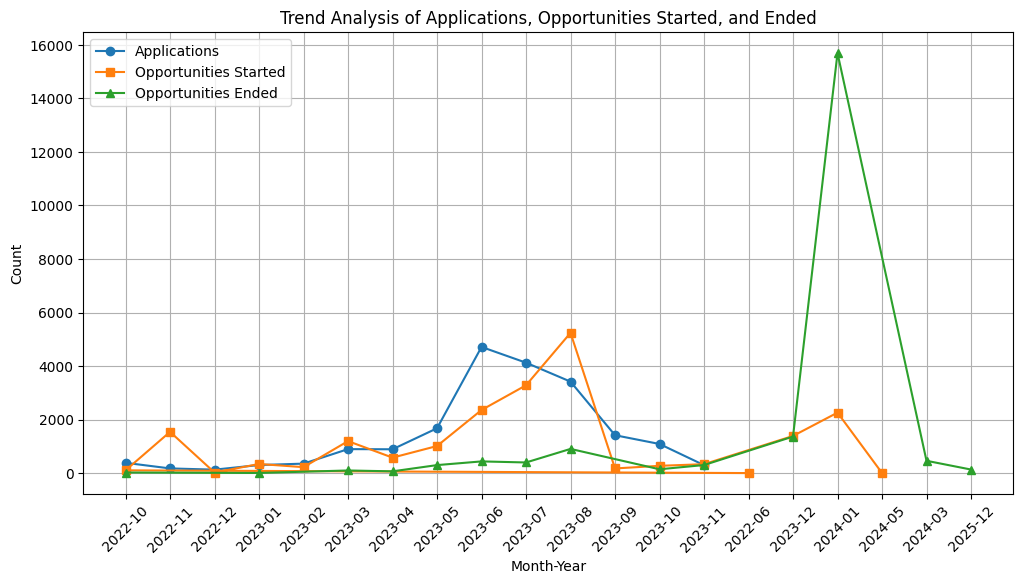

In [ ]:
# Extracting 'year' and 'month' from the relevant date columns
df["Apply Month"] = df["Apply Date"].dt.to_period("M")
df["Start Month"] = df["Opportunity Start Date"].dt.to_period("M")
df["End Month"] = df["Opportunity End Date"].dt.to_period("M")

# Aggregate data by month (number of applications, opportunities started, and ended)
apply_trend = df["Apply Month"].value_counts().sort_index()
start_trend = df["Start Month"].value_counts().sort_index()
end_trend = df["End Month"].value_counts().sort_index()

# Plot the trend analysis
plt.figure(figsize=(12, 6))
plt.plot(apply_trend.index.astype(str), apply_trend.values, marker="o", label="Applications")
plt.plot(start_trend.index.astype(str), start_trend.values, marker="s", label="Opportunities Started")
plt.plot(end_trend.index.astype(str), end_trend.values, marker="^", label="Opportunities Ended")

plt.xticks(rotation=45)
plt.xlabel("Month-Year")
plt.ylabel("Count")
plt.title("Trend Analysis of Applications, Opportunities Started, and Ended")
plt.legend()
plt.grid()
plt.show()

**COMPARATIVE ANALYSIS**

In [ ]:
pip install pandas matplotlib seaborn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Opportunity_cleaned_data.csv')
df.head()

,Profile Id,Opportunity Id,Opportunity Name,Opportunity Category,Opportunity End Date,Gender,City,State,Country,Zip Code,...,Current Student Status,Current/Intended Major,Status Description,Apply Date,Opportunity Start Date,Reward Amount,Badge Id,Badge Name,Skill Points Earned,Skills Earned
0,31ce84c2-2bd1-40ba-b2d8-f164fe125306,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,Event,"Jan 05, 2023, 18:58:39",m,dhaka,Savar,Bangladesh,1342,...,High School Student,Data Science,Not Started,"Oct 03, 2022, 17:29:17",2023-01-05,0.0,0,0,0.0,0
1,36814990-f854-4f76-8c63-91f27567d080,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,Event,"Jan 05, 2023, 18:58:39",f,amritsar,Punjab,Afghanistan,123242,...,Undergraduate Student,Otheraassss,Rewards Award,"Jan 05, 2023, 18:58:37",2023-01-05,0.0,00000000-0GSP-A3RB-BT5G-1ECTG9,Statement of Purpose (SOP) Writing Workshop,0.0,"[""Critical Thinking"",""Creative Thinking"",""Comm..."
2,8154328c-f8fe-4bd1-af05-783e140f68b5,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,Event,"Jan 05, 2023, 18:58:39",f,satna,Madhya pradesh,India,485001,...,High School Student,Computer Science and Engineering,Not Started,"Oct 04, 2022, 08:10:07",2023-01-05,0.0,0,0,0.0,0
3,a83abad6-db1e-44c4-a8f4-9e397e282d73,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,Event,"Jan 05, 2023, 18:58:39",m,hyderabad,Telangana,India,500039,...,Graduate Program Student,Computer Science,Not Started,"Oct 05, 2022, 13:41:47",2023-01-05,0.0,0,0,0.0,0
4,c2b8a15f-2ba3-41e4-a553-7ca68b0d4a54,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,Event,"Jan 05, 2023, 18:58:39",m,bangalore,Karnataka,India,560105,...,Undergraduate Student,jknhk,Not Started,"Oct 05, 2022, 11:07:17",2023-01-05,0.0,0,0,0.0,0


In [ ]:
df.columns

Index(['Profile Id', 'Opportunity Id', 'Opportunity Name',
       'Opportunity Category', 'Opportunity End Date', 'Gender', 'City',
       'State', 'Country', 'Zip Code', 'Graduation Date(YYYY MM)',
       'Current Student Status', 'Current/Intended Major',
       'Status Description', 'Apply Date', 'Opportunity Start Date',
       'Reward Amount', 'Badge Id', 'Badge Name', 'Skill Points Earned',
       'Skills Earned'],
      dtype='object')

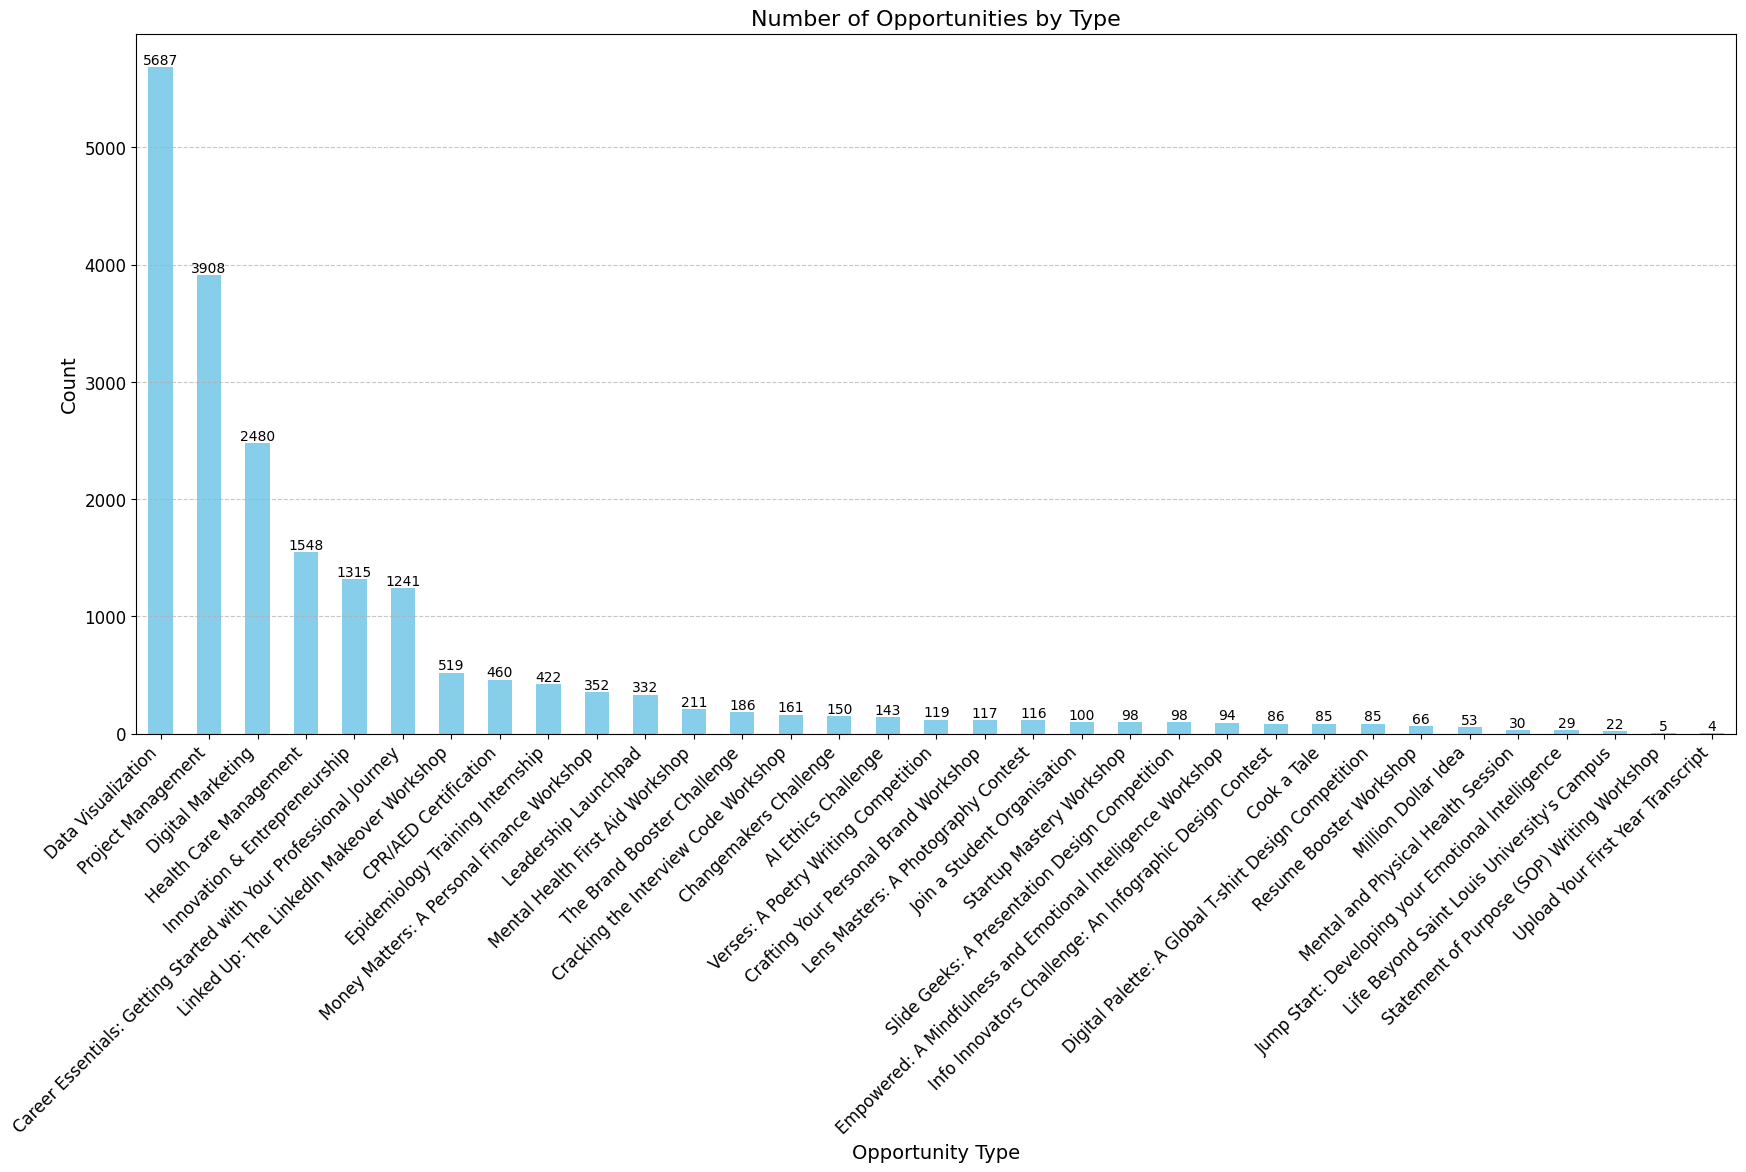

In [ ]:
# 1. Opportunity Types
opportunity_counts = df['Opportunity Name'].value_counts()

# Check if opportunity_counts is empty
if opportunity_counts.empty:
    print("Error: 'Opportunity Name' column might be empty or have no variations.")
else:
    plt.figure(figsize=(20, 10))
    opportunity_counts.plot(kind='bar', color='skyblue')

    plt.title('Number of Opportunities by Type', fontsize=16)
    plt.xlabel('Opportunity Type', fontsize=14)
    plt.ylabel('Count', fontsize=14)

    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)

    # Add data labels on top of bars
    for i, count in enumerate(opportunity_counts):
        plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)

    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Improve spacing around the plot
    plt.subplots_adjust(left=0.1, right=0.9, bottom=0.2, top=0.9)

    plt.show()

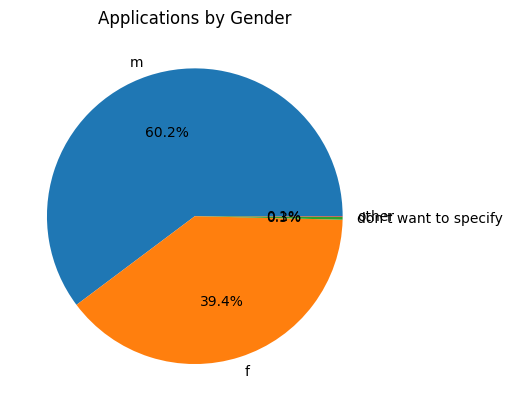

In [ ]:
# 2. Applications by Gender (Example)
gender_counts = df['Gender'].value_counts()
gender_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Applications by Gender')
plt.ylabel('')
plt.show()

**Comparative Analysis**

In [ ]:
# Convert dates to datetime format
df["Opportunity Start Date"] = pd.to_datetime(df["Opportunity Start Date"], errors='coerce')
df["Year"] = df["Opportunity Start Date"].dt.year

# Set seaborn style
sns.set(style="whitegrid")

def plot_categorical_comparison(x, y, title, figsize=(10, 6), rotation=45):
    plt.figure(figsize=figsize)
    ax = sns.countplot(data=df, x=x, hue=y, palette="Set2")
    plt.title(title)
    plt.xticks(rotation=rotation)
    plt.legend(title=y)
    plt.show()

In [ ]:
def plot_stacked_bar(x, y, title, figsize=(12, 6), rotation=45):
    plt.figure(figsize=figsize)
    cross_tab = pd.crosstab(df[x], df[y], normalize='index')
    cross_tab.plot(kind='bar', stacked=True, colormap='Set2', figsize=figsize)
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel("Proportion")
    plt.xticks(rotation=rotation)
    plt.legend(title=y, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

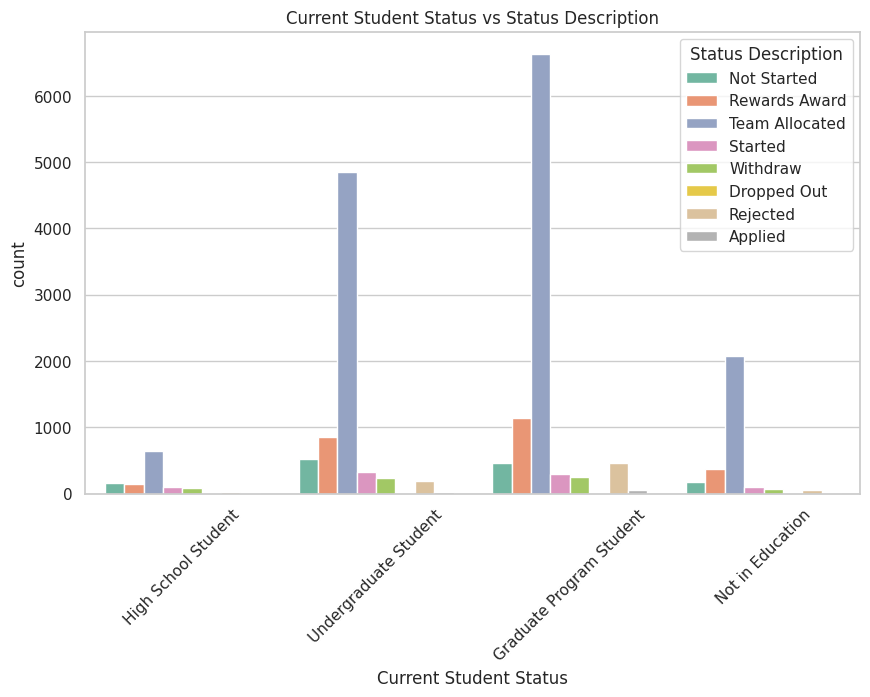

In [ ]:
# 1. Current Student Status vs Status Description
plot_categorical_comparison("Current Student Status", "Status Description", "Current Student Status vs Status Description")

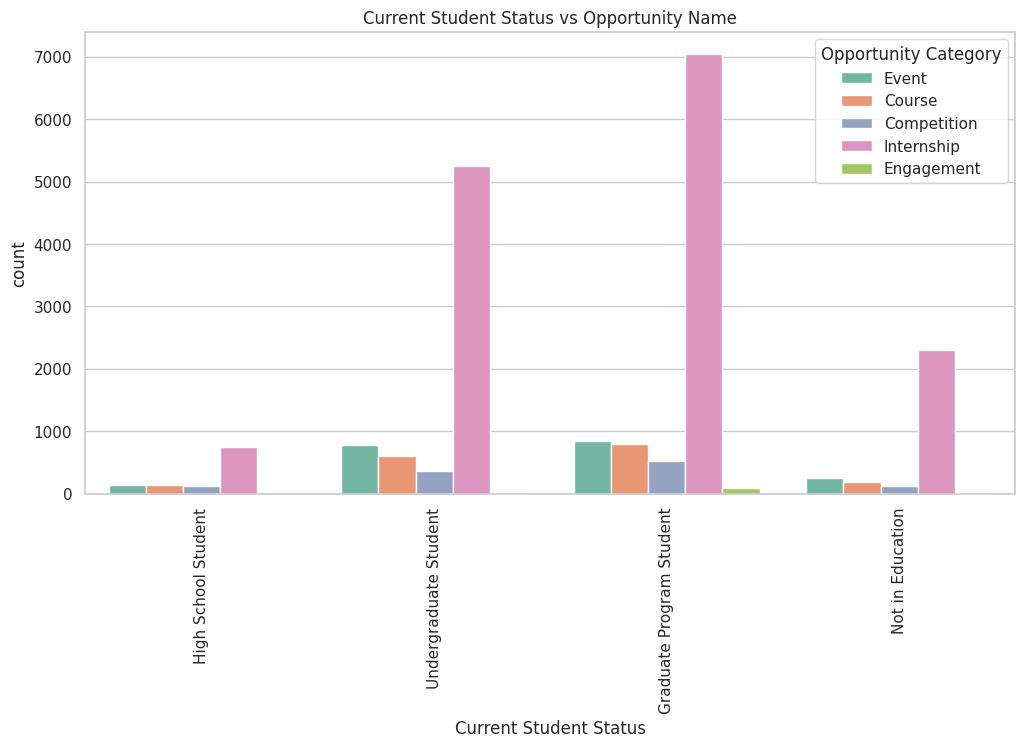

In [ ]:
# 2. Current Student Status vs Opportunity Category
plot_categorical_comparison("Current Student Status", "Opportunity Category", "Current Student Status vs Opportunity Name", figsize=(12, 6), rotation=90)

In [ ]:
def group_top_countries(column, top_n=5):
    top_countries = df[column].value_counts().nlargest(top_n).index
    df[column] = df[column].apply(lambda x: x if x in top_countries else 'Other')

In [ ]:
# Apply country grouping
group_top_countries("Country")

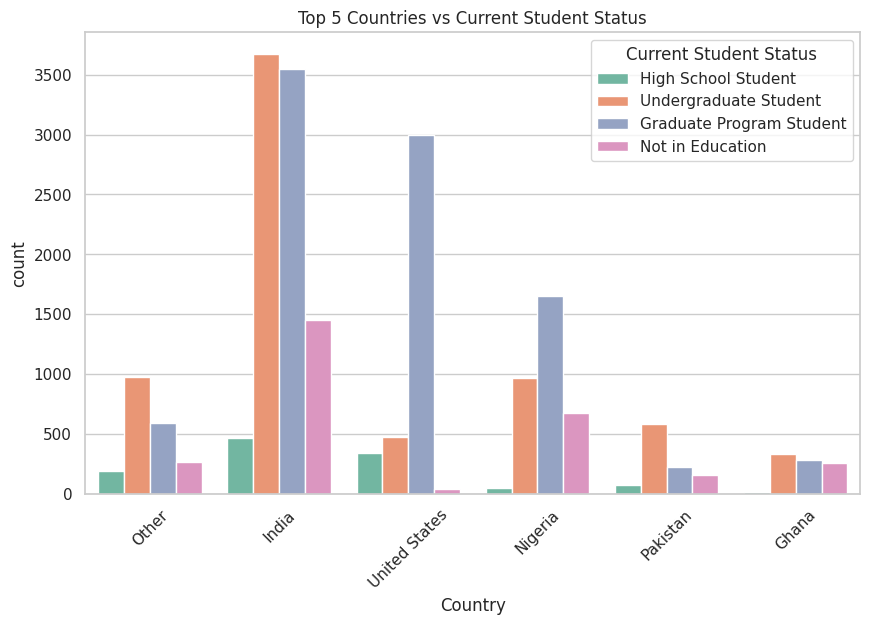

In [ ]:
# 3. Country vs Current Student Status
plot_categorical_comparison("Country", "Current Student Status", "Top 5 Countries vs Current Student Status")

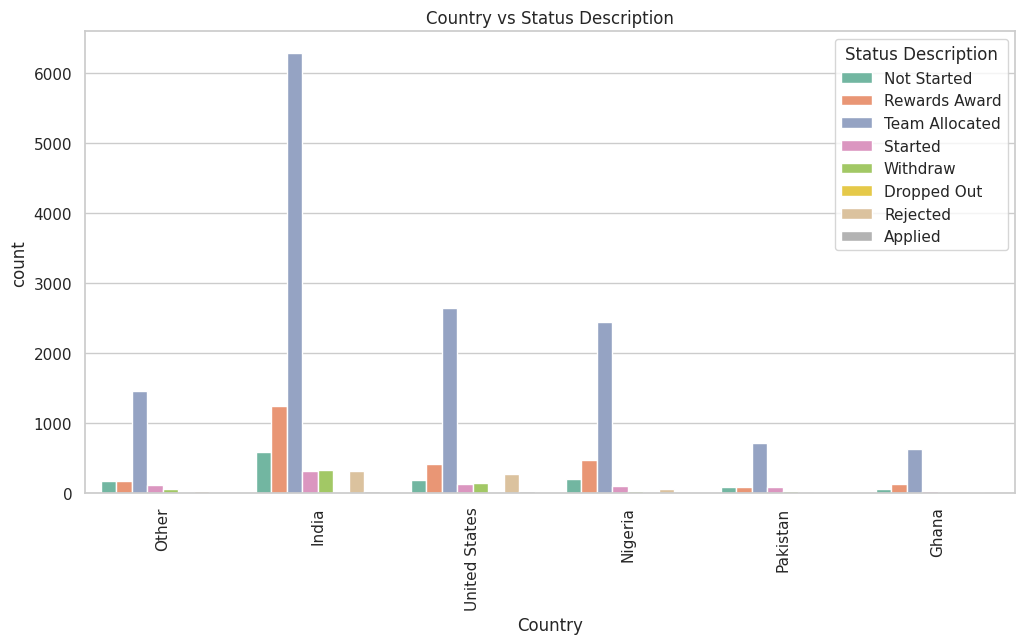

In [ ]:
# 4. Country vs Status Description
plot_categorical_comparison("Country", "Status Description", "Country vs Status Description", figsize=(12, 6), rotation=90)

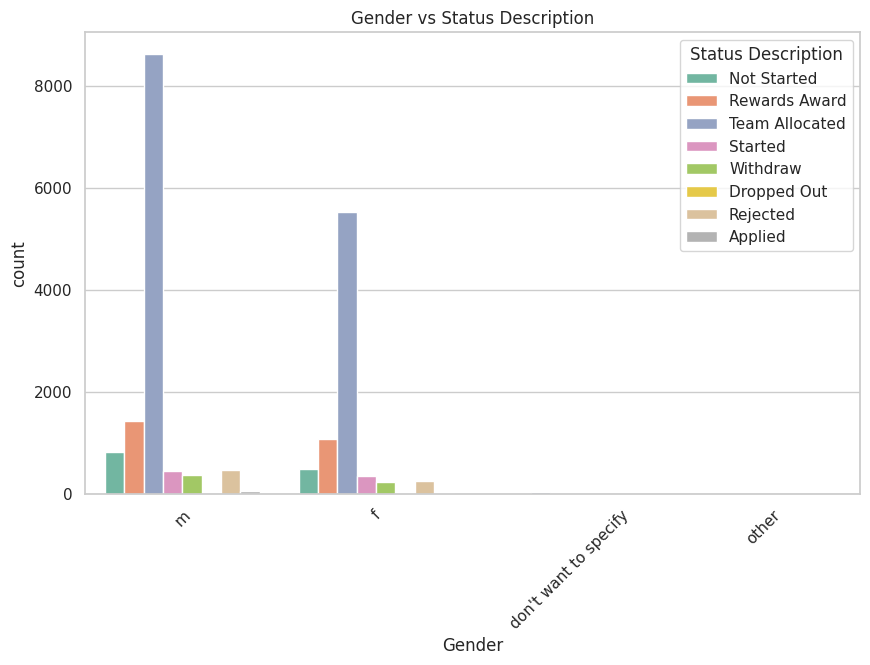

In [ ]:
# 5. Gender vs Status Description
plot_categorical_comparison("Gender", "Status Description", "Gender vs Status Description")

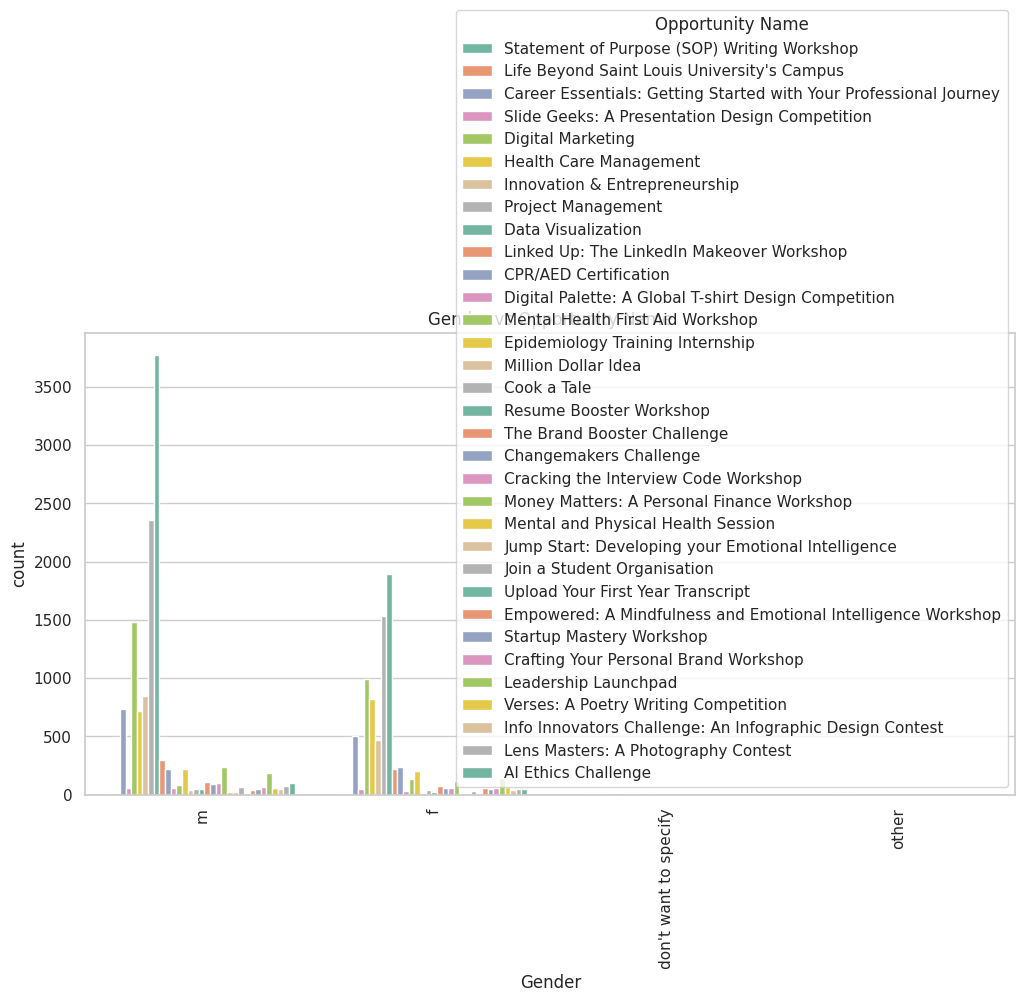

In [ ]:
# 6. Gender vs Current/Intended Major
plot_categorical_comparison("Gender", "Opportunity Name", "Gender vs Opportunity Name", figsize=(12, 6), rotation=90)

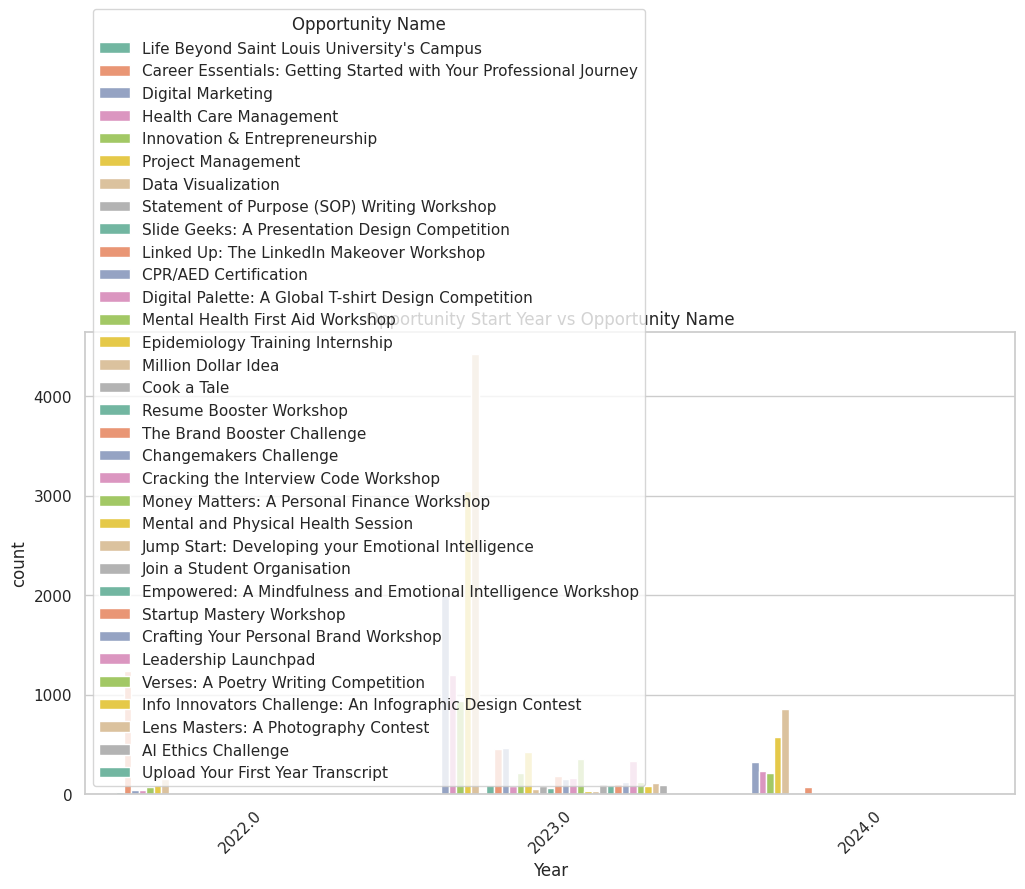

In [ ]:
# 7. Opportunity Start Date (Year) vs Opportunity Name
plot_categorical_comparison("Year", "Opportunity Name", "Opportunity Start Year vs Opportunity Name", figsize=(12, 6), rotation=45)

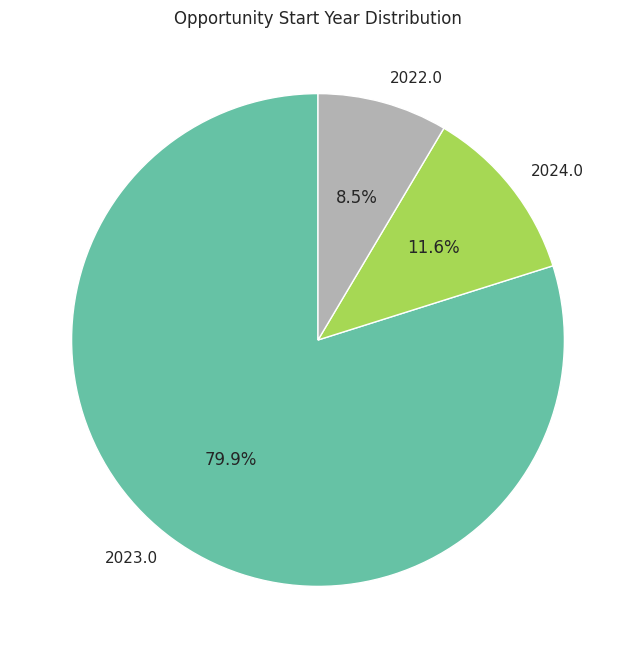

In [ ]:
# 7. Opportunity Start Date (Year) vs Current/Intended Major
plt.figure(figsize=(8, 8))
df["Year"].value_counts().plot.pie(autopct="%1.1f%%", cmap="Set2", startangle=90)
plt.title("Opportunity Start Year Distribution")
plt.ylabel("")
plt.show()

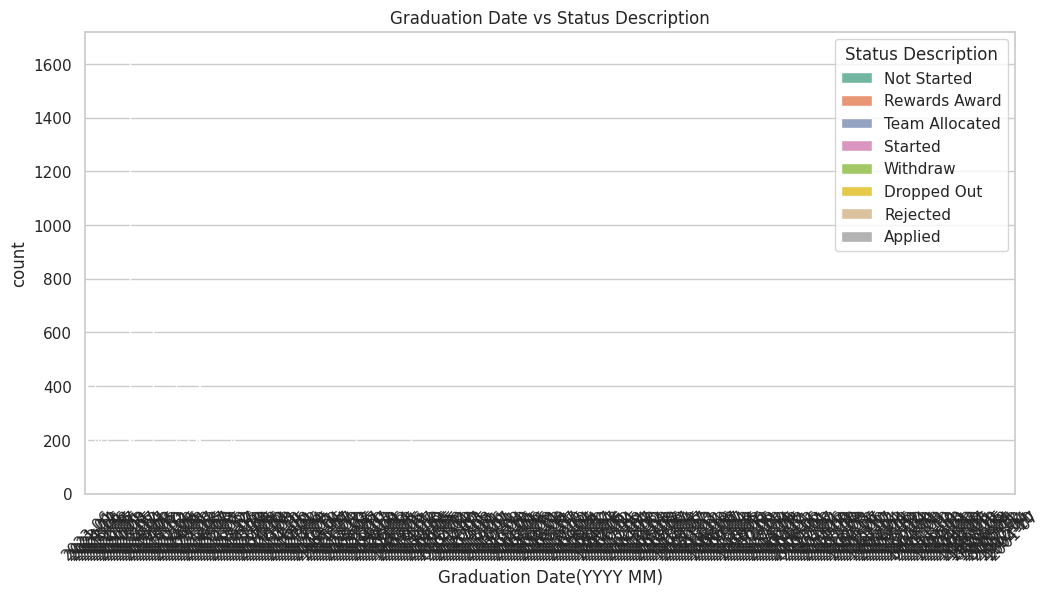

In [ ]:
# 8. Graduation Date vs Status Description
plot_categorical_comparison("Graduation Date(YYYY MM)", "Status Description", "Graduation Date vs Status Description", figsize=(12, 6), rotation=45)

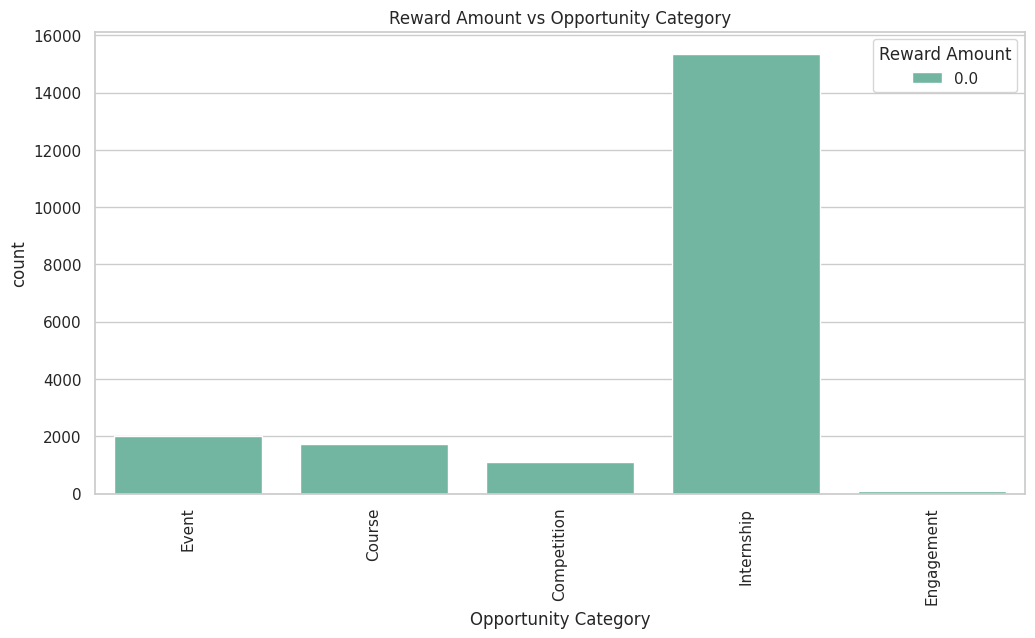

In [ ]:
# 9. Reward Amount vs Opportunity Category
plot_categorical_comparison("Opportunity Category", "Reward Amount", "Reward Amount vs Opportunity Category", figsize=(12, 6), rotation=90)


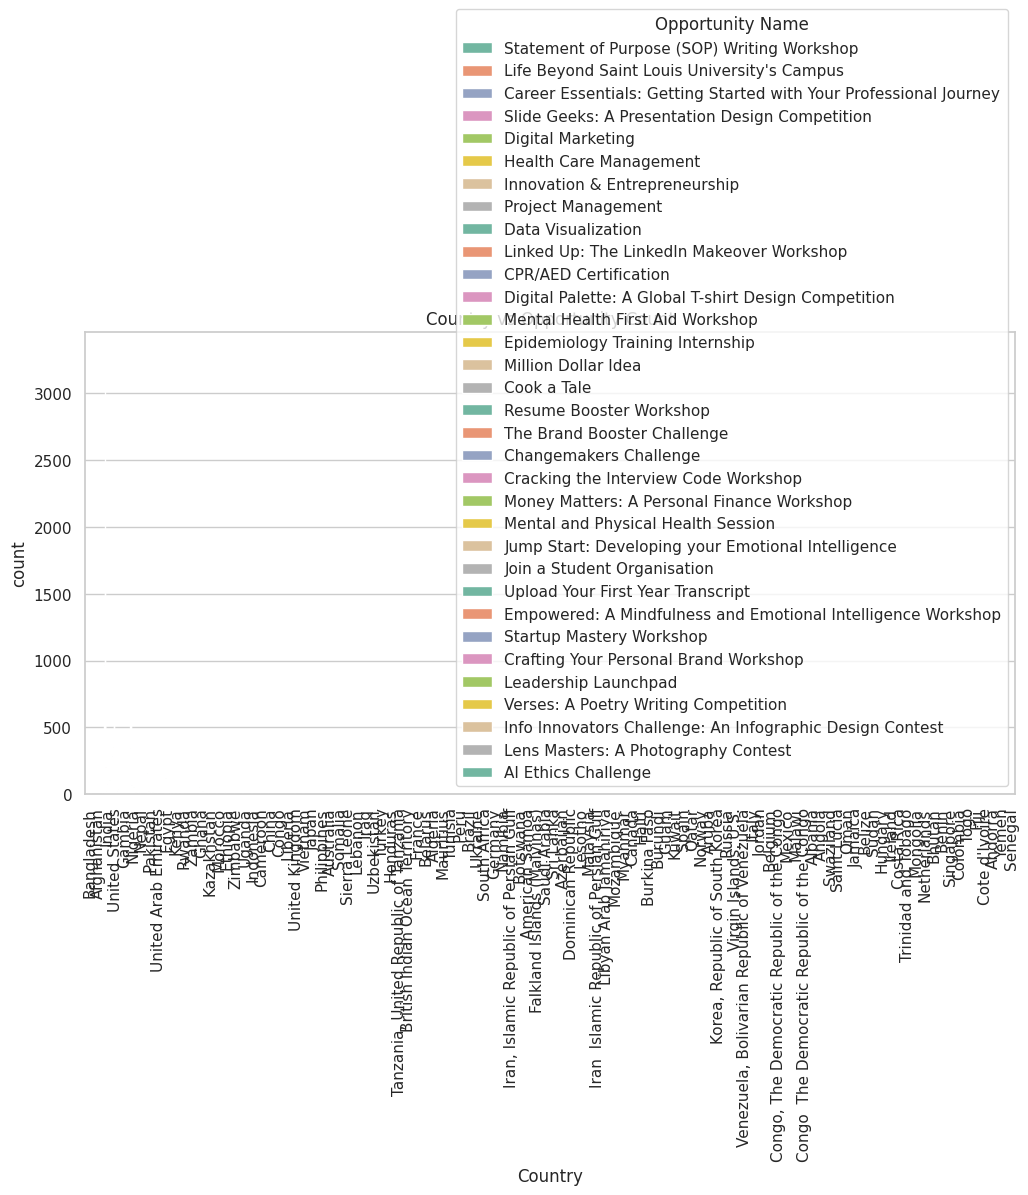

In [ ]:
# 10. Country vs Opportunity Count
plot_categorical_comparison("Country", "Opportunity Name", "Country vs Opportunity Count", figsize=(12, 6), rotation=90)

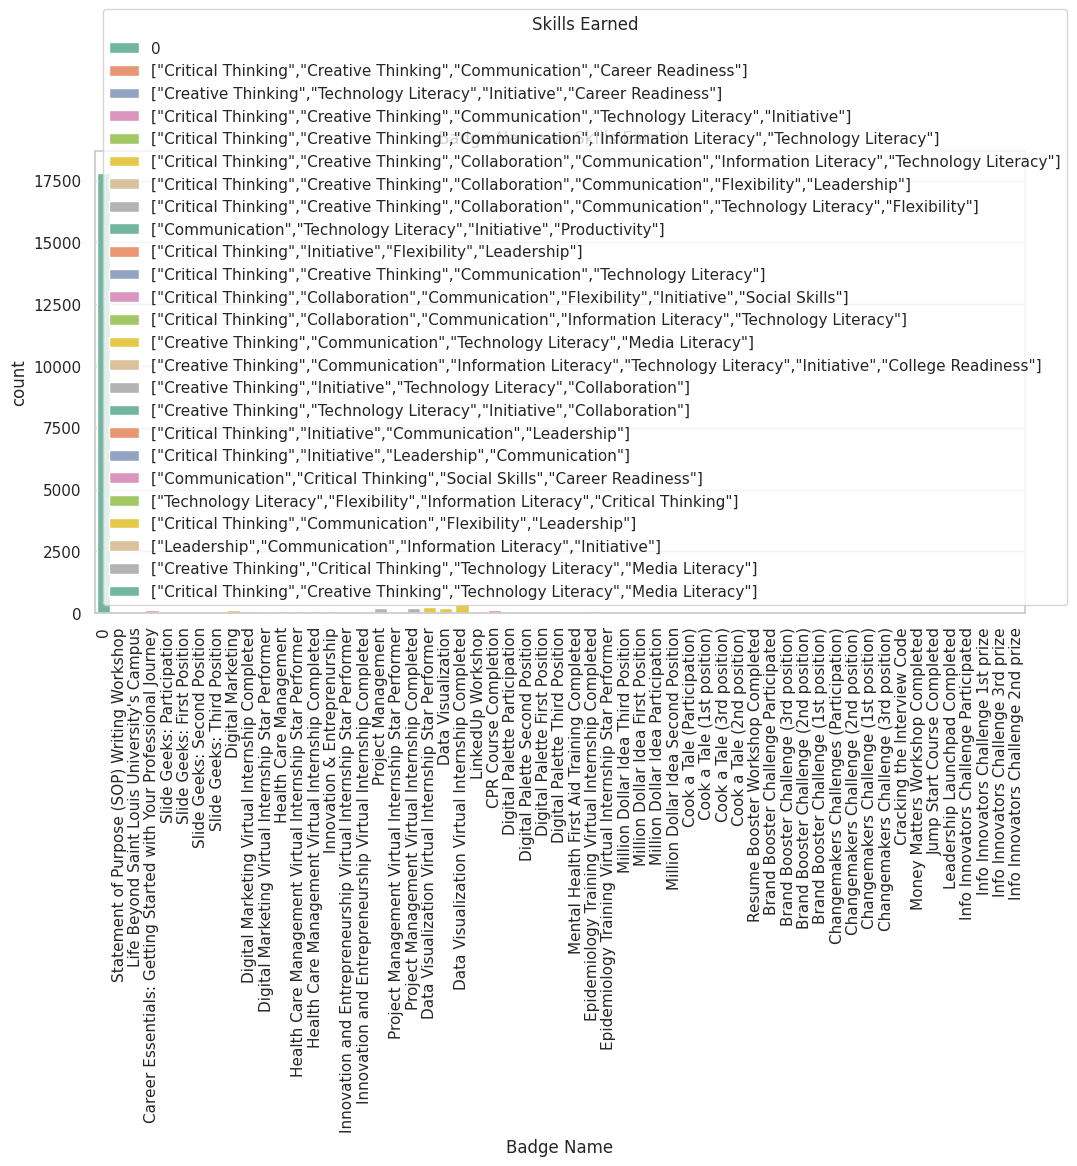

In [ ]:
# 11. Badge Name vs Skills Earned
plot_categorical_comparison("Badge Name", "Skills Earned", "Badge Name vs Skills Earned", figsize=(12, 6), rotation=90)

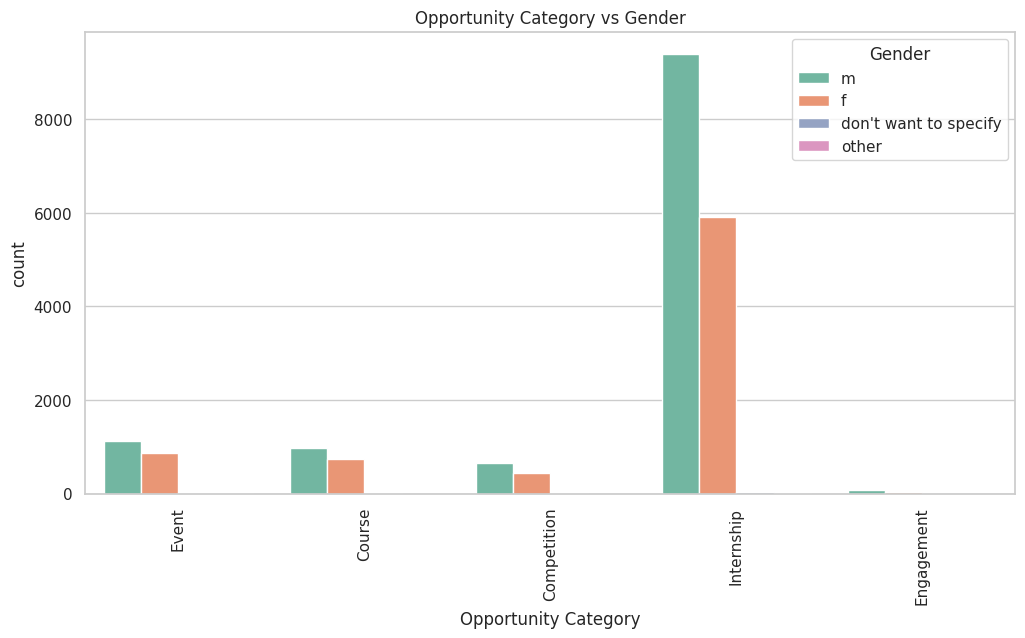

In [ ]:
# 12. Opportunity Category vs Gender
plot_categorical_comparison("Opportunity Category", "Gender", "Opportunity Category vs Gender", figsize=(12, 6), rotation=90)

**CROSS-DATASET ANALYSIS**

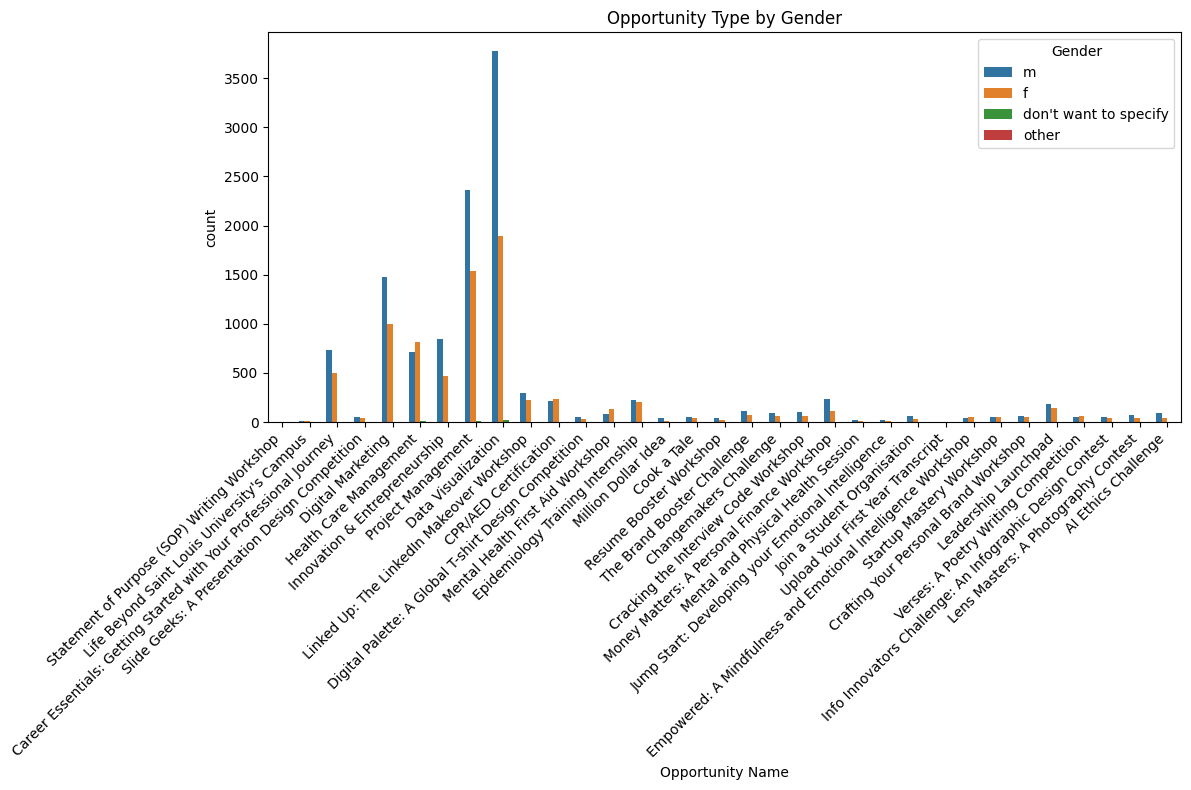

In [ ]:
# Demographics and Opportunity Type
plt.figure(figsize=(12, 8))
sns.countplot(x='Opportunity Name', hue='Gender', data=df)
plt.title('Opportunity Type by Gender')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**DASHBOARD WIREFRAME**

![DALLE2~2.WEB](data:application/octet-stream;base64,UklGRnryBgBXRUJQVlA4IOR5BQBQYg+dASoABwAEPjEWiUMiISOT+kYUOAMEtDIq0WpXpeJr+D/3+Sv9v9l9gL43lleZ6D7uv0OP9J5z//Hnl/velR0H8R7/Ver/w6f3nldWg2ls/Ik1Pa8+cv/T/8/YP9a/1nKI59/av+z/ivIH+G/6X+h8hT0n+4/9L/M/AB+s//X9db+//ZzwR/Df678QPkB/aL9kfSd5kftj0+f+Z6Ef7d/sfRe86X6v9HP25+3Hue/xF9lT3/l6oGM/jH7j/a/sV/j/+v/r/mV4x7L/Of4T/Pf33+5/9b/P/fF/T/5n+w/cv/b+q3y//J/7P+p/eH/L/Abzb/nP8F/lP+V/gP///3fuf/tv+X/o/9N/1f8r///+L+Qf6X/h/9x/kP8z/0f3//6n6Cfyf+df43+0/47/kf4b///+P8Qf9H/yf7j/cf9T5u/23/kf9v/cf67/y/In+cf2r/k/43/O/+r/Pf/////kH/uP+j/nf9P/6/3/+1P9l/y//M/yv+q/93+s//////QH+cf2j/gftJ/5v89////3+Y3/V/9v+v+EH/G/8j/1/7D9//oK/on+R/8f+W/0v/7/4nzl//D/Y/7z/9f9H7U/63/sP/T/qf9p//f+P9i39H/v//X/yH+l/+/+w//////AD/6f///8fGB/AP/h////X7gH/d///qL+k/+r/geiv6V/e/7r8sv8B6h/nv3H+c/xH+j/1n+D/9P+7+/H+H/1/8/+6Xp9+T/zP+Z/o/9N/1/3/+Tv53+Fvy/99/zP+8/u37jff//N/63+s/2n/c/ynrv+xfzX/F/zP7u/5z9yfsI/I/53/hP7l/lv9z/f/3D+6vu5/uP+F+xvo9cb/xv+//vPYO9p/rH+z/wn+c/73+T/eb63vzv+T/of9V/6/8t///nf91/yv/B/y3+s/+P+Q/+/4A/zL+lf6P+9f5X/q/4X///9r7//83/r/3H7u+xD+J/5P/j/1/5ffYL/Of7V/zP8X/pP/j/rP///4PyT/0//P/p/9r+4H//+RX7D/p//D/nf9d/+P9f////b+hv82/s3/B/wf+g/9H+c////3++z/+/87/w/Ln92v/5/v/hd/aP/6/6w2eoQFc/riEs04XrEl4YJitQGR5S0xl935uisw8lsD0O01hyS7vfXwvZOziT6ueT0D+TPBpbgVxNiWqp3ZTJArXKXHspPtNkOUPkXQtTvtOu1mO/3vIuGtD256C4NKXnl//WNobMd4nclnEypNiPzTvJORoBOo4pFbPjwn+lMiymB9x6mMwbgDCF++T/BS++N/aSG/3cy80+mDbFXQXt9mI9ks/8GXayfjVdSN77HOSftCwxPN1kv4d4e/WU3LaiLocj2jdqQKXqS4741OoNzML6OxG2FoI08XhQpWjHm4jR5kF8usk9Q53sAQnln/gwdEioX1Or5EyCfmXPF7ib4UGF0fO1Q3/gykSMJPPQlfUWh/xEhYlf8rm2XrQ/BRCBb0iY+3qN2cYG6sX0XIfpCE3jKRYmv3eQqn7UT/psxgDnBOQb4ZX5+kmVm2l4tJ5K4fzRTXn2STLtn38taP0kjHOSdPGIILpINPgPAGR+B9vVdxTBD9ui5rQi/x8h/+VjKiK3XnPqvNgs5SbYkMxUN/Bf5WI2Eo60vPHHcR2PzGV2/Cy0y3yyPM2pygHQF2F7+LPdLU5x1jKx9O+icgHes16pqNzf76//5dQU9r+D+XRr7eV4fJjuZnmhqlaijD176KdEZztPmiYHZC7pwG+bGZ4ucXjHEPFclUUP5p4EbQS/21nybBfueWsr1B7veuCP6aBM/ltapolRGl1L3X6c5DSPkm7Exr7toUgIKjd+slxMBrhu9Ui1tGbUdFYC8XQhWcQ6AXa2QMJSUIRkbkxsG0QxW4L3hKm/+r8BAg8rcjov51EMvI39gsfiBmNU+OuiLcgkFwTN04dOLGi3A9c+YN4AhzEmawQ8vl0kKTQS2PrVAa/qZ727NTGYoNs3bJRExJto4LRIUd2c7JX9YUd+XBMpqLlZjW1ULsgUn/X3j1HwXiLkfqtnaoU/syFG4pw/7e4K6gyhyFp4Gln4yMe2s6Ej9x2Q3yzDwNtnSZYft0rwXElBsMqMwW6nkz68IneD9O1JPeDzKIMR5IiQ5XPeuzXApC/gg/TM71rKqPqe2Un2s24RAe/26g7VzBfDVoDgW8ku7SFzhzUl9y+XsLFQZpjk2W45ybrv8DLMyMHmE+1KAWLgDLlmR+f3DNAEQJ5rHhWEMM2Ar07ZuUPhJt1q3aZni6vqICfaJHvtwScmmViUPKo8sVL6SOAhOY2JO+1eC+Y0TTw/QKwy1QNsAsjyVIhfDe0WwWtg4VbQyh7Y7TQ/xp49U8guwXdSKlBZMla01B/tpFAAK/bD0ZOCllaVDcajzZlzyFwwC1+5JcCBA0UMt1ltvoQMowErpsD6I3VFqg4BJlBsl2lR/UwGoC2UkBgwHut53h7wc2v7oxCHscfjjQ6O62Voxm2ewQgVRXoW7tQ1BcJ1j41ZizPM4f0lBTofJCauL6jayCZW/TBZRpkdWgqo1eY7LxmWqap92b9CiROHw8WfhHAHan2lh3Foxvxl91GqujOeMOc3IySmL3zlGWj0k6eN9GXGUOy5NeR5QBp7MKtEma3R580CqNwyHm81gUkKs5/URU6KpqxMH8XOPdm4l2fEwC+KIpCs8t186gb2/0dlbDToFfYM8H5rEEQRaEbQghgnkvPaORhv7FMUkxI6d6eE7xZgESmmm+lfmlPhA245Sv8gN7+mBN1OOYjmP9bBL5e2fg4tHOmGPLpE88kS50SIojMzCJjf5MRxGaZSVRf/3m74Eyd4Py+jOlYaxPMQjrMl3v1mBwCQubgxLLFrzoNfmaLgv0U0EGjdev/j9vkxGgb2VXVxzIaBm9r6RDHWdipGAyY0QzOzanew91+eSpy/SvzAiIE/ME5+b4uryLZdGbeXKvWsn9yP5VO7LMUlm3U5Py+1MZL89SDY0pDp47ez0MAw/FQ+qlYdBXA4J8kl56Ck+3PGfXTPOfGuvS8jbnBwaqe1J6JxKaktJoZUgUxbu1tPv8LuzMIIncVn1KxaNpaIeI1PKgVs8mAGC5v/p380dXtncaFCVDFtvjDYvyp5LtgflN9UBJ4QtsFiTOHVJozXajlAjq2qdpG3K9P2CVpUdgj/L69KQNeU2r1jyAnM87MswUUtrW77Gx7/fddipAM+VHol5q2y15FPNOntuGfcQy+DFYzz/2f02Sxf18LAju1k1ah1ZbCF9vmINpDB9+8I4asXIrYiQt+wIjiKhavaFPtZinGAZWnVvsfri+7ae9GFdnVjO/wjQ5txQsXCrkWRQ9+sbaiv64YqPID5k0OHAU+Q7OuG5QuZNbLq440R1+uRgTSOfAYvm904M+z265lksQGxcqzuKoG1pvDsvlSejf54QvZVZOtlrWv3Qk55A0PJhc3u7GemPQuU8e1W5oHVfucTniM3iBRhKkTfLtVrKfsK1XSJ9ik9CcAzJnSmqp2dsvCdgIGGwjZ1T0LDOeAKF/QdoG1nOw+O6goMNSKbogDTWtBHEhOKctfwZEVLE9gv/vX4iFvHHB2DGTWIxmCkdKnkuvaYOc5jrxe93pT9ctqtUJokGK9dShHImCBAM4QPG1alpgQNjfS5Jm3gaz2azN9U+Ra5DMO5BnepV1GnoQxaMyd7Pp96I2u0q9nyVZxUl1UHIUg3sV9oiVdha39MKginJmieUy729z896R3hF16F7zeVMq2qydzjN+Czx2p/aUyjSO0Fwk/SUfMLYnAtZlfuj7OFYM3fVOeXh10g8P4rMlwkjQ87Eu2fA15dO9kpGO/Ozm358vRDBEsCrLC5wcNzswyVCRCaCYlkptFbErfTy4HC+andWDrX0aK5agDd+XiBpdxm5RjcyCUNL/kqimyWSWgqFU4kqJ1tnTcMpSxGBmwgTH9tVReGx8hf1bZvYA/fVrxHCYzyLfzg1/xSJ1BCTBGxD0FryAbFAyoMsqMhLKbwvc2Grbx3yjXAshGQDzuLyInAsSsJZjTJuS+Pm1zsrm9akDCVNXQ7SeZry2cffdp4wY19AY7cA1QifkRHGslKbRQ/qzTmWghw1J3hFMyGSVZJpWa06nwaTDX+SQdoDI/w8fwKMENPuGBghAAnFWzxvEx61IpgaFJZVr4M/7GuZntlrvDmgnJUuW13R7fmcOMO6712n+rUf93ZsFVDgnqVXLY3rk/tsYZmtoRo1rJCWMYTt0ZYpoUY6CBH/byrEptCkRpr3Q13j/q3S1jwFN6OguMOh8PrTY7MoSsc5D8Q9xLfAq3353XTrOdNggdXx7GOzjbVIZKy+IOT+DOX0eQfjSJiF41jOuubC61XCw5pwukLfi+ebJ1fc1BPq96zoEswPVnSPM3weT8kNIhYlO8ChKtPUHEqcCs2w/H731aE+gKLuHZOLTjESWIfwUl9LJqM82t1hAHFmUj5KYQl1b66pfzpIhmSg7+2k3tefMHddnlfKCt7fRI6Mv1S+LjjQ9h8BHcQhue3ncv/pcT2I+s4PVV/9TCoOyEmovRsCSRSVHaaE2j06MGjXIm653fouMp3W0RPT4KdGnISFqe/cdpwOewIeWBGvyqaTaaX2Pl2GXGiqZNgjEK5MH+8mIBEMFEIpISeeS7elD9ab2jmV5wUj3iAe0eH/79r+l8MteQywIeW5tKDU0xgw9EmXMFWrFq8SxPFohSbalrNkFmBl1UVFem00LTiezrYSlFBZ7mX/stXasphMbdmgmTfDk4bzBqw2mRZLmkHqAUyNqTPrZlgP8frj5L6P8/VZ3cSt1X72Fa7AeyoFOPGl72CCRdYb2Z5TboPS5rV1iA0+3BM6eEl2Y+glbqkOUZrNzaNXvE1C/ZCHpSqwK9lStlWeW9xTJlXa+b7WdoCPOTGXwasMOOqtJolJTkVp5Fe6eRKdWV/zrbZ4qE7+EpRP52JQHeLkBK2SB97+dBj/wzQybXs8mDgwKOoBFTekbNjSNCFwxlYNZkp29fVeVEu6lwk6QRfogqv/JTpmr2EqYq0cJYaHNQRVzMEvP5UjL6dOvpoIS23EWJHpBLIMD37olm5KK6a6WHXPqbaRCOuMRHf+tw1+i+6NhuYvTwa0/a+E5WxSRTO42fq4JOequOm45501IdO06c8sZ7AqwgCmBUw89rPzdY7BmqOxsmVT3t6JhPTppJRyrdAVejMyO+IMe062Ts08HStBQPN1JtzcSLRVhBYa5ajYAo50OcJtwwkgbS/URSwxlN/TWcTn9CCg0Ifq0HzsH/ik+h95Uq2T8kCvHKMe8qo0Oa1z0Reatc2Seeenc+RnLo192Wj4mrJjlwo32C9ZBKtkwrPUBT0A0NZXIuwtvOs+5WeSsW10rPtsw5ECTiby+zehTeBUHWDSnJ+50PdOM4dPlB/e6ahk6/BNzm7+ASoP3zqMI6zyxAX6el+UMkq5Puq7skehkgi2QH52HhyFSa1mKv0Owktrs/09PF30oJt0zLEpK/GMt9qvotpxTjVncTSyhXjBK5Jr3LFZXozHknxC2+g+C9aFK3G/WCz06Wg61rUgJlkhjX8nBlXW4mLWtBRr0eshWwIJk5rbeRlwMk7FMJDdqqzf+K/rZ5W+6sgS6WMq8ZMtzoTSJnC0KY2jr0zmqpn58fH3HL68H78p8QechrwXFxc4Ws3ycBg7SE2koXKJmIQBs7+SzVPF6j8zFhKQDfnBb+rmW2rJId56wpyv67kzZ7HB/XaZUXMMjnz659u3wiY1Kdn5k32/zpFzeMGXTqRkSdXqM2SL6DamFhfmwZGK4saPz0jU8osPCkke6uGkkV4ILnduGs+gguVX4dXCO+2LLNOsGE1ugd0HUIM/phmIF1sUSj0TfGFOZGao1y7JAZCoHDEHXEsUBtj552sNFqvvBwAD62q9RNpg1CZ5ixNDnpKjfq5zEKzwhiQ6XSxjfDDqw5rJPepdEr1q21AmFpDwKBpS6zWHvqsAVR9xbx4tQpobQG1lfASp384DpVGQZ3O5AlmE/kOqT6wdjFkxUZQx2hVh4/149MzKDi6iSMpnhvKdogVgNYHXCdP2pell997YgMD+cfwB+pJlg33ztY8fUOR3MXKluUoYaWWA3A5FapGnfVJxv8eIZOz/oDsG4AeIqt9fndW8S2C9bvZil89tx7a6+/IovcOs7ilk2lGPHz+F85NKEg8IO0tPks6VYMQJAWqze64rREzvk6GUScW+9OTS2SWcoQ8WUOGFV54Oh5r7lpSEzjp0bS+5utvPTOGASTd4C7tCT/IDAeL4gL3hVeFFSZzPUDrVcPOaRcLEadCtnSfNumsjAO5v5K+KdC8Bxg5Xdrw5NOUMZd0iYcwqaYfDUxWR0R5HCL8rOhA0ne6S1UyKFTev9illN2PIDIilhhBL6e17D5beu2RyQMEdtZjJ/0C9Wugur4wMkOIebRr+O5iVFTpAXNHeysLWXH1jh6oa/5BRt6nqjzShxXZH8NxyJHEKl2a4gX2Wly/l4MWCZzqrcm8rgTIQeeXIkNGPSZC8QKyfUj3+BHgFa8PizLphOj+lrBHIOywzYTR8DIWUkPanWSLnH11aa/6Fe/iyt5cvOEQyJVvgPWNsbdTG9TcHNb16t7HtSBCMZAxQJ35ByR0FoPDljzexpKsZ6czk5KmghQZeNgsoJl57joX33FfXrNovKTRzYJEBxDfNV9U17ZZf48ufgZJNv6y8sT2cm8aCiMrE2drp+SjFlIHij+Pu6mO4bTDrrxJOeFZi1A5U4P6njSoDUIuyPkKDoR0u+Hjl+okgO0Ezv70hrNRWhwTCnH93Xu/+kMH4mGvOKIB1wyxPwP/nO/9nbDXbIZz7HGrjgVqZe1OsOgqq1J2jmN0q5qHvV/9i8NOz/SJxPYP2jbyyqnNXhY+D36EaC03bZUVtVCQDQj9D12l2X62Mn3VygDNlvTzNZanBBNf2LcnCULUvd9OuDAVtaPt7iv5vmKjX9y0vkR40W0HHHdLGq0JhTQ6dO7LHQ2bfbNBgssam4LKXjTJpKGA+9k9cdRVdxA2mTaC2WwpyGbHKVaUujhw5Pdxq0weC2jRDeRDH43Rgu32DCKW66Fs7NO7ZSArnFOGt0Z0PMGDajKJ0XcbPm1O5K2anFGDlY7p3yJt2crfBCX7176IU1q3lY/DCmIB7MSBXpvS4WdX21gegI89cX4evzvOF50sy2SWf1l2IQkL/HfNGxyIQIBpEK2nmIz72u/ikRytSENR/kfEVFnZz977klugmJjnq79L2ZG/KJe/r4UJbELh0vkaS/buKEoXn2HW/GfD9sHY77xRkub4Dzb060T/Qsl+XGGd8ux5lrbLzuYfskhGDA0zTb2da2bPBQgzuOoII6iOAsk3WYMn3o69cVET2Tqffy6aRJKESG1xQ8O3Oxj/M3wemr1qMc/99SqrjFfAlG7mNsHSLY84eCqlpmbW3lYlvUAbmWKvxs9guqBUsZev4UQe/wg0PSJQm/s9kAZFpAvwsqSO2hi5D+9AWEkQzh4zZ4Ei12JFtRf0A3QAC46g7miy4c8LMCmRqsDum6AH30nY2CdEw5kYy7JEkrtZoHyGyiCBzkgZ8uy5hDRMS6rI7EQNxTll6yA/eSsaDEdzbnJ3uSCdG6tBcRCnqtPu7Dj6sJPhyoceIFbIsLz1WAXWhJKShjXU0ZcwacPJFe2dth7sJsiVPbY6rkpddJT6Ajw1EYiLYl3iMoHLBFzI+JzV4FCVb6S3tAc1jaxDlxRyDze92+1eDCklD5FBhgQoyGHZ1VycSWZA7+pwogoWABe+K8dKxAJt7ERe6jgo37ncKWYKtMu66ZGUHp+PpsyN5CZE6cMN2S2dXnue8lszQUpvU1j0KmKTruCYePysIrxVvIitpqfUnBnW61oSBsp+HR/IWWr7bICjoTx0qPf/DhVpTpqcvJj7/hK5QLOJwdVptaiXyPRMIgBz6p6QgnPOL4TD6Z09bDz2wExpEyt65iIi0i+Dbo21fjzT0nlcK4wBbqVq+YijWz19uf4sbr0yGEulZKG0ub74lZTxrWXow0/udq+iAHvIS+FM5unEwFhkOtKe7iu+FSsxYPmFDaTsC5LtbqYN1tkPeoj6TVS+CaDIc4+b7+Ggrs0ir9nhq14MPCxeW1xyYQj9IghT6iv4q1oyoeHTtkTGMEFa6wpe8QbwkFrkfxJi2FxHnTuTuaYnNtGL/hAisEaqzRIxy9Ct9oZnKQrYm6eq6h2rOmhz2Tq3NG2org8RUcmPV9JYjzM7VcL9V+AKOEwOn/f24n3TBmLeHVDT1aETolppS67Kf5hUSEl/XJdAtTbyLTTMjWASxVmsCfnwQfBKGflLgGyGD75LwS4n8jTiztCVXNG4r0aNHO4K6G+XJPvVSkgK1StALFz4hVOkDKDXLkZiLVZxcoB1zO6mV13wWP7V4DcsBPcVTiURN5UAOdyRoY6WtOhC0ZVjeAzk/y7QGw9gglq58KPjdJoyWxt+GIpY36ThiGWKJGZS8eW/y9Wmo42LwEc1/HSPNAzCT/OVWBZJW/+zxNc676fgL06y1wUM6txggTDT468g6phlrwidcaI08/IN+TSfUjtkahY4oDJuFwGNXdGw3RLNDHtEcpZgTTBRUWyQ3o+Q0npR5ry6wsxbP321SdNvDHERMXcH1Vv1fK4ko7EynB1iFOmJg/LAQlo5QqT0O/ON/8bUkca+xgAkdIfsbD1o0VpLDJicQxmrRm2XIb4W3LoB0kdhw+GC57C/1shKk4PEuowV3S8DB6/D/xeCFdNmJ5kqhzyfxPZVTuXQxAfwiBANjKRSGR2c5rIxNJylqYZZHZ2PxXdl2TbudT2kmaTZG3T4sTi2d63HEIKOEVNVtlnjVCEjqRh/+MKF3N9EM+PIQYG/q7ijbfsHS/xinRz8pq4vYCV+QTnThlK+MYPhyf3PFB0tDfWTNgbo5cD9JmQYJfNQ5T/G0YzQ/nVxPbKoTRHDOewXkS2vmK8VlHYkMj6saVeNGqaZV8Jh3HTdpMf46d1L/SCNDXiN4qgN5kJ6XO9pIYy5aRtoVjvmC3LkU6QyaaGbuUjUgYFcVANt0mbRhvQs475T/DNIwLkAD4uqv4a7JVQOVg+6iKODd8w1mBLaSrfEfN6oULbGdaR0Hj5BefsTG5bka+WF1VbA2HLgJvGZmRB2xxFn/m1mw7oUnrKy6dm0t40aby7t0pJ7juAc1Vx990YOOUHv2PsUZ23A5Jt1P6whMO+e02AOskmF5jsfaZ0AE0nh66rIp+rRsN698HCWURrSkPxMaZ5t5KNFqilNvEvzWKB5bSPVVtKW9O7eW2d1ySE7bmlOaLXok//N7tibFBCeOmIH9GkNuKXBV72QlAYCYiDj/ed5HTctHqbPfXddELgg/DRWGd7Swkcnu0CumFonZviRW2lNZRGYjW6upt9uFmU86oBzji8ENDVTNIxbHRgyH0ZED6uhXCF1m1MF6cm2oxSReUvLh680XBd4aALWgiAMtRl2YB4UyMztxwJkhIKGegaCooGsp+D3nrwbM+UhpzhJqtSQ9oaiFjTbh4QrYFKh2Nu8fJGmopJm552rb4ss5CRXlIYf13ViEoJC7eO6Heg4tW/loqReQiWOF6AjndhR2J6N7/Q+iWwbyXkzd5wGFypaYJQfumKaR+Br+ssxinuMYrXTqYV/Vv0YRqWFnkP2B0aHx0nzI+36CfSqHYDBsOEuv+DQFzGxlr6JU6tGUYR97nnlk0w2D+1PaSZB0+WAERePCDEJWiLoBwAXOtP9q1Oc8fhWIdpF4pzVDk6oq9U7mDdNEdNUmNGBb1jjNxIPtlIlut6Rr7I3RY4Zk0UvMUVnKrQWGtLZskz0Rkau1SXQLT7LBu1qnZwYSDxpb/odQuM4pPh5LlyTUqajH1q7Hy+6V8StWOJbetxWsDJ3te3AiLRJBY9HErax/RkYPRNu/9Jklyo5KMncXLVLIy30IZxo8+PmyR7qDVmy/J3JdNnxnvnGzCxdtwcfhzLddTWVpz/ompXHZgAF9qrP/Y5lTNLnAq1DIik/5kGTLgrE3+eEizU9zEtAvWHXFXLpWdWRsa04tz2nCSBQONgyb6hvGAFCH2mP1BWpO7T3BKvcdwpafQfq4LlSbWS6s5HTfB24VKJMVEQ0E1WaI6ERfz6fCftBs1rW6GofTazhMz1fgqy43d9QAuZIKbO19W/Pmdt0sPz3gpH9FkD0qspQGqlPFV81uqo4NkZyitwVj7zqiXFkB41t/KvfNAiwi5q+DhPTaJtgrifE+GwO26NsBeRraVmGElY8ECzVQfwqtg9F5Buu19mUsSJd2I3RMXy/7zjDX42FJvP8W/yfMECiseNfJZ+bkotVvFRbmsj1nbkV1b3pc3RUsbfHSawqC6uYcRC9oKXaGskwUXTzAGreYjzFVkm+eiTqVnSWGt+6YOvLpB3qqaljsSZgZcFEW9FSCL1rnHSZrjrAUe1kWUMVkIzK/MCbLhuW12PsHjXIq3+evsIwhw+8Etdd5v7zYM7zMjfQsVe7s5nKOW/DsZqkoOinQJHqcMO++Y8cOlde2DdmvSBxdOiniwtAuC8d97BdGPItWJ5rLvmPIu1sWjq3zc+ExKzl/AeVg+t4MMQnfrFdQdY809vqfT6ClQm6QW9vZjdWzxCy0bj7/Amu+OmulCbnQCXnQ35Aypo+Lr44gglfHVMxgSnXIpJL/EhuduurO2mYa+aAsYPx6BNaFMFatkbikM8T9Zg3ZdUZCqg6PFxbKYm+JQrXJzvu2SIiWlwfa0+c6QZOwMYZ+Xe0YfAKYLgYEPElirzJoeqUtEZvysKTdWJRGWPvPPIOquVlADHucfRsnPVpI62GsVXO8zS/elZX5pf1ulNGhAhwNCDgnu9yaFtT+jlaR4PiCONjsmTFJzh3BtEUQ0Cx3xYxewATb90gHLtnPU0aAodjT8eajHSAe4IsWbtuxuyy6IG982oK5tU9VH3qSdRW66+qeft/W5zb8DWzhNcl/ECbKKwUYW6j/ItTvGw5dxJLyLvQWM9T4Q3TAEq611g8jSYFnWSO+ANi5hLuCa2myN/ekGlbUJQGD/erkadwLF1tMFKrQPl3zaWIwjgyhbzggMdzhHMrpi49i3fnJofihsK3ZHBoWrUjsXYoi4MacvpszMHT0EhREXVrcVF5KdJiAUxUINPSe66u0q8NMW7qdGFWSYBxQ0tiaC5La/FtdhU7G0RxjVQoGha3roNPGL25/+fvi1cZmk9pickTi6GFWAjQyZeM1GQ/crCapUY0YUMKG1HaO03QGjsVTQvOPmHgn4xGXun/RqcwUgfsFunRy4btHP+rrl4SWGHLLo+dbHB+X/RgGipVSTLF9+G3n2kdP2H3y8hVB9RJhBVod4vyv0llz+c4RWAzHbQHzNY1v9YH1E5ED/nxUvBsMLL4EdZscyvGOUQcE8LSHqSya/7yHjrKjG35ebXoTcagFgFczrIkzRco+Rpvu6SciBaoBE/rS72DXa5S98ncCffpdJ1iZpgF6zU5lJ+rbyTeFsdXgCsgKHjE6ixb2qxs13TqgJbYfDMxI2BwRYOrt32S9/uJ1Evab/AT5hqxbdJOnHGvd+iD0PBoFfc8gFWMrWtiJ5iT7bUeW3OI8BM39rMSHAD4iQctJMKAvztQA9iVg2Jc0n1XbudkY35MSnOnJ7iMWMIm9ZYT+zRwQXDzPRSTMIDfgoTAvW4Na9w219uMxIx3PDwTu3cdb2+rJ/Inyf4ZdWaOm4y77Sy7tSWJTqfjYrht7sY/PZAVCpiqRkGEo1WbFBhKnIxLyEbxS+UAQ4qKwiH8TORr1kdOtSURIOdByf2o9rXKwIqphG+Yv7C8ROhCe/IEfaRHhlEgX/nXG+2tIgDHRe5EI5A+n1sN0LmWpA+mRFc7OdObrbT751OsVhgh0vfdxwxJQHskye6kUNsNcfkt0ESOZKfLNXCTvXxn4I/qEmkF+buW3O0Gm50I85yxIqgpHz/HeS3Sbk1eTyr+l+WveHuNuFVKmFj1ZCjRGyHUAQLB271t/pA2gvomAcNf6px1x5ZKedoa9SDp9da5WKw3qf3OBtVm7ePWXNGdMS8SyOjwK90bBm96pqeAK75Rez/BtkW4R2Ku17RYBxJVTXT2Uxw8VB643NS98yp3pE1Yju5ihmj/t/KYiC+hrjotViwAz2nwldAMfvezYmm2oDC6V/vwgm+9eyZ3l3507wLqO8xIX/lM+4A3YKHfHBR5XjmyHqzOF5ZlET9MLHEgAXN0s2DdrTeClJP0V37h/n2Xf+0HAO9nL1bQv5DD3RE3DtTz7GIHxvUV9czx9EEKz2GnnYhRWM+BveRPTIREKvVUEu35TfNhavrSl3IEZ20v88XXXVoSlbg5HmbkAArq2CrJQI+ad+APNAStLlKsAj92USYmn9wn+uMAfk9c2w9jXRb/pC3yJo7j0KgT+c7Juwvcoa5HsvAeDJz+BBqrt4d6vBpi6jEeqfpkt9TP4sGKKAbREA+MFn43D5mKIlo35V0bgxg8MJWQFYdlCNwd2pNqDy2fmI4qmYfQh6hYpvK838T5bestGm1wkzDCpjQOE4507497SILJa/7HA+2ipuGsJUF0Ipyq9FCTSUxtWw/eAYtQGVLdDHQc8yukzPB1j65dkhmiLbmw4WR+EJ0SualKE+w6u3IycTDrHCCHmEvG7D0ec8gbtlznEnPvipxjwSgXQ03IlPasNQS782d1N77cOn4SnQ9KzrpDf7VWgGeOHxBA/T4YmY7zpzT2jZGjBWvaYK0qX+EsX/FnpQSiKpWB6Y1rYRSr0N3EiqVVbWVLZcEzuBcb4V1l4n/HC1ECP22Ci/yn5KKy8ik9Yp5lRm8y5gsjQcso187zQz29jVQM02MwzAyHX9OFywBGrlIRz6/OwIh/dl4+Okqj4ZU7EapfzVRpJVdp+/A7DdmAHIeDsvRiSSVgwEZo2TLlKLx3nmXiKlwUudBP/DjmLASxx8POYJGSwgGAk13Wn/h4ywmuNDa+kdbv4dn4rAOPjlVePnrDSBiGOA2siUxPHshk5Zb+G2AQNEATn5Vl8+UrX9aER6H+FC1LJRLNKZDyQ1vq3y//9OkweLgZU6XuyMpa2F9Yaej+p3Uvh2LbXqk0yQWfFO7lPyvTYD0Q67wMmdYO7cHkb7/OQMkb5ZF75/VJ6Xws94LdfX6D1RL0egvmhOp1zB2ihUkz3HN2S92GZ3x+eH/57PcrjeC4Io2BcaShXcor5m1TiUt4J0+4N5pzmERObaKMTn1gDfrpHuKPebPL62W9sZoF2+IqfHXLEXoHMmOOBwzaEL/NE20bsYAe5pCnvTO4odAtnhZGR90tXxJra7imG04bn8hHovHYbKUB7wElDUyGhEWPfrTRiRgIPzhY5NykV42gEo+iGfUhEybowf0TfnsHspJvMMxSwwRxMufdps+hy6Udc2SKZKJXvbb0ZqfHzzeewOeYPewZ9QnlWDQK+kcK0+cTNVIJT0obb4AefYrVuwnAKJ5B3yXaXjjo1UAatNZ7a2nZAnX4kwDyxerLFx5UqlWYI82BurFctD7Gprm1wUTA1/7MHr0iIh4zGDshya7nJRY0Qzjix7F6a+IYJyDdqLaSn/r79yDj/ie2/MX6ZPhb1EfqdrXNcNUk79DNEfluG9brSqjXklakeSJyFA8FhILQYiBd3yHcTxjgwCz+iECHWwwONRywDRSB1Y1MHS5Xd/iV6KxjNc4CoqsVGx5eKsw7asfQ0zfNMahfX7ITtyEDABhtmTtQ2sllr8myPvjBI8mwsr1ebaiZHtzif/UI9Z/1FyYNLn+gd+2ngeVziG2I4NVPrqpLMKcr5LIaiB6GqCF8ojzyTuN+0iR0C6Vp4l8WHBkIn8wiaTCobp9yzO78XFqk/Evadg9LylBIyopFDZcDtgzqq3JeYikoQUiqR36uvYcT0X31PgtfMAd6Pt74zRrnvuiHVw686FgrX6qrff4NcKm4aEhoXYxQoTwKT5vl7bwYSPzoe/sLaKuHLcpfUcbFv0s3n7ovi8dRtMmfIOBez3FKyqv6lU+r16JvRDIFEipWz9b8LrnwJ+AzC8COrDLGo2S4RAQE9RWvNIykhmC2FejRBWLsh2mZ9dyrvhVq5B2yp71FopYmW4qZsGal/8NG8iMVyxovUvocSYT2dujbrJ1OwW9i5oSG5fB4hAvU0cyNuZqwINmjFYJPD/ttt4euRbs7Vwxh69/pDXeVB1YdeUFJvIrUZ6BB3AFSNKJhrsKF/XGDStv/8Y6S4IvCrvREXn/g+h+AuCFSR5qwIgfS79qmWGzPzpAEYEr9a+qyaueJ18+rPOi+zkGKv/S8440Y0oIh1TqnkUMCczuxO2A7x0r27QsmUNpt8GfwrBKyagUPC23GU9owQd0WrWXYcquBN6QExQv49MQGkMrlf5tv+zYZLMB1Naecidhxkff9OEWMzaOrOYR8SJFEjWN8k+1hLbM7vx1ZuClVJfNf2WGoNyiQo0NTguvLweW/yw4ggW3weepBX1uWyGdHYJgL93jsaj2PIP2eb8ORekNV++VuUCShjp2A0CEHs22EbgD4cfY7ve2thr/AxcPjpGwAdMhCfCdRcERuDS90SDUKVjqb7YKt1i7k6oQvredVWO04s4A7Myi/hmCIbDHawM4zqTjuEoJUj93cSD5kS6bXpLaSofswHh/EEIs84wmv0eru2NXyZJbRy5UMfRxRPQ4cFouiUARPvI82XtYF6zjpUIbOM2uaZYSVvjY13GhPsfjNGv7KEavJ/8mnt55MhM6kY/bfYLOsdLPjRch9EmBjlhDK1qxYt02oyeC0Vo7xQ//lbS3oJcp/WBCWmTzEDxsUJ/3YcXzXxF7MkjITAfmouSg9P1SAPhHkdl7hUert4AU74Y1DF+fcf17CJmkOqBQ11DIF3JnEc2H+EPkXZ8w8duA4iWPeZfWJFtCMtT4R5q+Q0j6XczYRnqK6s1vM7ovBasvzeOclJ/2ZFVVypeQnyS6182mbk8OuYJqyTDVoLIZRtDAo5EMBrQ8SCzOPRA7iJsi2Ztp5v/lz8u9ewpr/0p9syLubcdZtWkPzO94uNhabUCVRCjpq7xLDzEtT3cWafCUsm8pImmHGjIr0RcDE0QOJ3kEud1SpajfIlwfYI6ynZVMS80UPVy3q3mSGYNHFU+sN/oCoBF+t1XdlRl51SRmuSX0u7gNah15YdWILmcKTfcgbXf9wP4Pst0JA/fUIrrZ9mHU/jXdkHoOuB8O+HTBHPVhSju16Mma67VaZZ+tlopdVbhU2FZdvLyepSyJalXLXKzW2x0dCtfouZKmc2tU5z927bSHhI1frHWSpJp3d3MgWTIhlP4a/JrJcRjzySRMGRwXC2uZKrCQVwm0bxtSbPk+LuCqR4XBY35tIuiNYzTPNjo1IKphtyqdMq30XcfdtwGlUn44njvvyadZx36HDRHpOxBLMe2MXIV+9vA67rJ0Rf8tlS9AqgMwxgd97iD7755G+iKT2xzeG5OmRTyGQaHYdsW3neUdOjUc4ku2FqxEjXD8n85eV7XOrmJcCyGXATh4l+YcbpH5XHsAUQLAADpWQfpRWl8A+dcmwQierx4A7qw9gNpXNzr3wuemLirAkjtlDUE6IAzNB5jOlpvCUqJT2aKegpoRmmA/VR+vwk4/OdLJ1TWkNFxs5BamdSiTtRzJRXNS/iZOBreVzXzvgQOMLibdCi6x3XsAKij8pALyWSgtHn+tz+etR68O5WovY2r31g1nhk9I5o+0g33r9YVuOtdTTH+mpZAja2qVMH9GK//xzXE9ZtM5gsxvd+0OXZf27RhOFRf5ihzrJVcQcR3SWoOiG3MNsKfehMK6uvI63If3QZyn6ZebEh6aA5MreTuGn8REZLroMVXy00cMBPBxwe/BK90OgA6vkOe02v672cz0n0vNYYxDG/Zc+hRwPQh1N8xtHM3uS4o/lumEk0jxPnkQ8b/Hjw2E0IgyI/WpUmoR6e3ZEEcMMcIJmvGpeMLzRrNSg2CjGTfcSNhlkZ4jzPAZ08HIEByCc9RtFjq6IEpcQl6g2uuz1o1FzL5ZS5VdivePb7auYZaLpXhtadIGmCOP+bhWE9Wx+OJma2HoJOCORFO3z1Q+I5WTBg57rBXhz+luI78bUnZgHzGpmuz/5Y006EvjEhAlVwgCmpjSjlcnYYuPh3w7bT1BTjKZWeiP/9oqEJHo/8g3/0YoRNmKr9VE44kRlJMr/hzDfhd1RuGbauw/38F/isDXXibcNdy59ZTBPCtt2qbTRDyf0/zT8BYE2itNDWSABO4irwkmsNmqm++b3b9tThGR0gTWXpN8Kx5W2qiRnrSjFZTWL8K9n9KDFjdAeDxfCjcQWLWblbz7Zet3USuwR+UYeNOfoiZZe49XUdHwnwLeCm6E2f09XI/P31jhQxyTyUd0onNuU/5J36xvSFHWB396V0z0bNuJMlQqGxlusX1X4TTpXXkvYWYrM8oqtZa0FS4yW+m5UtQ6ZQQIWPDp17Td8b7pRr1f5knYgrqhQlQ+s8iUfaA6zCz4iiIlCa95q9BRHVGcbRSbaCaN6cQYXihNFuDU0va39VkbZdnI/plYyReu5iAWjKsPqibK9qWAkJpSvgboR/GrRldF63DvThkCe2d3ft9G1/h/3vUTLMEhad5w83KkMHWL+IFB7ivdkbf2yoyGzIqLNabz3GaPjfwZHisqI/OvIYv0TSMCX/FLEFi768HtTgA+luxo5lJq59SHUc7bqhD8Co113Z0/zCZZnJ/yBZmVltfmbMMSK+tjiR5tnggWlONgBcxtlfvNYrXbOM1QMZF5n/LL0FwLazfL39ap4QcBtl/qvt+C7hjcG6WvInnIrJ7wLPlM7l0L2luoM68e74Y3dP1hPOQVq1er1ybX2hv3KGVRSuG0wAPGrBAMoiW31nYUGB+kNu5p/BEt9IvNL249sej40SQzFEguaSp56EABWqJgGV54dzawpu/oSCEv57x79xJTLTmdTDNr6qCG4bU0f/X9s7J1jKbIp/wrZVeMcTvP4USsDWN95ymmCYZ758w78gES8soZWLgmjrPFsiGgQR5oUOjPhmB4FDtevHUZbYtY4mm4iI5WLqKkWCeIi77yB5x9W9q/5VPUcqHTwj39QOvQwQOEWoPhIrO6ldEzycgvL+IX9PgKPb9XUgPEnPsMHzRlrEgQirpqOG67NBjRkjTBoDlgKTLg+7hF5KuCKNXo/UwcPwI7lclKbgbJzs7ZU6kmVrjMZunSGfceDa5mW+EAqWAufE+5dKcGlxmv59iDlzR7y4DScJrZ0vW2luaS8y49t3Uy3wdq3YsztLuE0WdUl2dhr3Q6N+Ut769BCjx4pOUrCSkhWXuE41RbJG0A0WBQsdveg+cxQ/G+SWDX8dnaZ2yTVQaar1VXd6j0sKcSxQ5YysRwkKynZ7MpQNi0HGzeIzkXVOCxepYyCI9TRkO3t03RNuxDKMe4kTOpGtywpf43H2YGlyN52KBnIyx3zG6KNX4oeT63GzvD1yAfVc3UVNWCCXmmpNH4kxvGh+BHqjWNOekwtvXKrydD2wEQabhVvQIVQ+Ce/XrJs+B+64lskhmSMS3R/5DEZf/UsUWZY42LDgAb3h108zs79WD5ANzCmuJZOp1DBphSv+VI3aUpcNbKPWdY5zsFW9eyf7SvwBTecU78jljDOQ4es8i5DVsiLrFiQe+iSD8LTTAMf+36K2H5teNTBI1DEl2a2eg8cOy4cAs+mck6fdCet80pxV4MNX5Zd3YY8GqbeBYv5/yfTufW92FyDY2rk3BhsoYpsxQ0R+pO3SN9z3dyIemATM+chqGnHxJ8+egfIKLZ33fb1H9sZYclGE/bbyaStLz7A2nQNQ9UEw4rhQpqxOsBjZ4u4PNxZly3YwYhlIck1yS41OcI1w1+XCO8aJ0/rB/NBWW4KazPRpTuPtya3eN6nbkHl5BpvokoaEsTffUzLFTtoH9OZ/d/s74iURWYhMqueFUztwTQKj+AD3Q1NV2MukuNNZsV76y5/p7SSlaeVw+4qfIq8dSvCEtqmCf3UcvZ7FsLwpI8HXngceBAZaQiCzA61KvC/pyAZYFOpI6v5fPKDQLwgaU01QZjdeQJ44L+2oXf/9GHdAcEKjwKfuadGxv8XsCq2pQLrjaF8ByTYcIN3A0IandA2VxgXKoWO4WzWyOCDfPpdnRMbR3PbizG2x9dmAPgMvr0wd1AoOMfpuRK6zlD92cyMwHuInDyskMrc+13fshgbGXL5agcGLT6rTx2x71rVxJBLYMWM87973Tmr6Z7de3qVJKNnYfpzkY0371l2LRJUx7IB80Fh9wcFf+f8a2w1QATPdcBUVDoXaBB5RjkT0NUTmts+yuKkzLqyIp6/yUsQ0I1zxkZt/UKyuTgjTxd4Tk2xlYBg+oLobbgPtULCKpi4HG22f9ogGkejO9nWC2tXHGBfKWP4HYjvmhDUaHoHIAWxeLUozraESik+E9KrqqNl+V71U9Sb/9Mr0fupWOcl7nMVHGlOY2H4JG10OIaOL4guMI0uPfT1ukZ89e17BYOCge0NykMuzw46GzQ9VSMRHDXPKk/f4tKoGeLcSIhpOWwRxEp36i0DPmTZnsEnS5bQ41EEyS0xA4AnccSwYf3VwDamZJF+21caH0r1W5mXrqG3bMdUcIqCc/emc5gOTZFRPRO9EwvogLxOj/zLzlWnIIoIMZIMjBkPQsdsUSHUS+KBqI1woUjKB/2SUftUbBoj9jrSAVXSONdcQR2yihzaIqm7vf8XC+wvdyqP62E2dZAxjy6CbyPsAbtp0BrLw/OgnQSEs/AOjog2Nd4lnik+RMAye2id3KOGbyEexub8P8QPe2Ua1lMruScBmIHEHv6moKQdhW2HexVGb5ToUS966UZToT8IaclwiQkivx0ym2HdS4eJWCxh5TrZWo8XOUQb/LzR+0APb8mv2o4CVZFLb8qdIJpRbA4owr+6u6VBDMavZ86VVIVNh+F+wEBk3MgcmksYwbADjTe/7obrrvE7OUxmOSXcDZb699H7lYvffwL90vr2P07y5j3hsB5cZ3p8Fgaa6HKd117iw8LzWQbawSx6P0fMTZ60+dDWXFlK4rr6UJDyNmzAWzEWTvwlBT9j5Rv4LpWSihIvnrU8uQRDV2M3a3XNU70xHG89RpzFX+aU2c3PGW//vqYMMDJmH8WEUkXXP+jxldbpt1ym87qojdyOkXjr+w3PjUJ6OXGnmEMQi3j0NkBcWyJqhoQG58ouSyifOcCUlvDhgl8tbWWKqP7nLyE17MEX/5+IOrXi3cWusPFaSZnDwaTfqI58cEuAqlwosFDlA+T94Q3J/7taqyGgq8B5sH4sfNfBPinV+tGonlx0lmzoZvKWlDVAauGifA5UAZDmlt/0FWBaMPCtyqkfmZh1OySsrNB0CnL+8WZ8slgW51G7j73w+M3mnDP5GhwHFJScj1XeEjUwcpbGM6xL/RgAtrPyFAqP6vM2EUOd6CT5fWcOVOkr4j5D688bLxuIj5+SwyORHFM2wyl+hAVgsII3t4uPy+RDyaB5uY0h4nZZZyc+bOQy3X8hUTrENg2dybiz5NyJFaB7SBjO7mTmcYbHqimH55gssgifW/oh+H95eTSkWtzax+gXX7CV0V2mZuRj/P7G3UmNcoN30Tgy61W0ym6lFYbauWN064Ta0W+LSB5xIDzoH3uWVRs/tOf9wx35NjfdhJhOai+QPpSQ9FFcOmxlyw6qKTi877WCw8AsTbnK0q06yz6h3CNXXgRic5A0HUtADDuz3/sGCpAVHFy8ObGKL9uxAXGPV+t8wrfvTWcQbZl6KxWIDjhb9pIbRCxT39BNamXDqbpxiFhRjeyDZgeEtJU/YxSNkCNdSOeNKHEux7gt5C4MoMzbRScTi5/cvHakHyyMr1lw3ciIZE+lXfAeSH4+3Vu+QdtzEWjOc6L3pbg3ocY2hmi1ivUeDg8RtjoyKefb1/LeNZ/w0rjH3+YTk4xC8YcltbgXhQZDIrvsHrLwq75D78f1kGvRuRLdDfJDpyfHJjg6RPa4mi9FupDi3J1hlmwNRzqMHaMpdG7qJ3Ht7ISTOVHiXMdMKiwXWkxFgJIVvU/vZ+yIbsVMtjApAjJqjxdoz9bJ6TGQng9TkteJWQ5ULroHydDKSAZuIV6W2ZurR4RffYogAcbOjk5o7AFbXOAXmP6gShB03596GVzok+lCMZMcQi8ef4mZ66GdYscSn6eAp3+2mHi6Pse0K5dYit59q5/79I58m9dWq+dkMGDDcmarbu1kGt2itm9v/crQ5rBABwGArQ0Hy3+Ggd7E86XHeBeywJlPmmqtkUxWamJWcLEafFr9ufFtpQ3gPVQlPHX5jvrdnRRCQI2uWjm9p1WxXlhuyX9tTHVViHua4aUiflFefzxdEo8GJPObHu0jzhYw7DrhT2qIdbH3AKRDTdsf/kNTR7Z32s76RoMFU3VzWTZY+ddQop8BJmawCLYN1U8EIUUMV5mZV2YOLCVJchTZT2I+Kmc+ZZ3IkOdIufHW/+SPIQHmslymnL/+xJE43+zM0xQ2MqGZ6KYCpDo6v4s1+gXzAVIKrPpd0q8p1+vtI0fQ4vwaqicFu30SkZwSzlrF8QlhmvvLHBKQrJ6C/nlgv2/ijlWVMHNmBDm00E2v2kD+jUlIupM1fgMEb2OunFXOxz0m408wK7lrhM3WgUpkdciXnlxKZnMtelhIjbx6KfH8lj35Xz5UPJHnREIl2IkXkCa/xxPTnGt9EU8wp0oml3itJmvuBQSOkeka1sIsFgOc9paxyapk9Pwc/jYl9DtEW6sjSHUjP/VONjn+VFpUYfP2tCR9A8Vx2Nt3y8A4gwHuTo+w0E5n30SjZUXbrUraH9N2vANdKf2bQfSxJ0hqNrQhaqdF5XLNEccNN1rAflRn1Rs13nbr4ags2yFWNfGVsiZS72wE3aJfibcrql9fX+/4aipR3O/bsmOHOsQpO61KZwGyNVuZHZ23U4w+NjyAlu26fq2HxEGi/0IvpOBOWWZzdT2LTe0yqz9fO3ULAu/hibiBr+XxzlgmeciY6IP737VcgFTf2GN3pSFEb6ghcQ+0ENtKqJWGPK6e5QPPtLPb7gDijKvFur49qoKOfii2PGW+hgOuvi6TJyZsi4wv0kCe1/2lRDbLM2Efjp872D3bxZa90WAAIstY6rwm17SzESltC6Cg6u4rx/FEuFtkNxJtbu2RdUyqu1rEhI/fCqm1w+U9KdmvFi5x0wKSIX7yXyA2H34b+u/O035C/2bPw8kgTLC+sPAWM0HYEIRjlcYOZTGzJ+s0/Uoirbga92lkmp5sPNl5HzAihoWiOBU9tlwkQSOJBy4qfuc5Klpy2OwQbVHS/6xHULjW+Q5VlhPWvSuCo1tiRLovCOJPOJuLEUnGefFMnF0Fj/ZrvpNp9dY6Fq+0P/jp6mWJkrB6YlsRMzznnjqwAgEwsWfR+89Tg7R0K5/IZGL1H+61KwwGPIJiRGTBSEgaBvEh1ySrBHOwvawEvDQZMOPrsiV7Iuf8D0liMz4SGah447C0SOMHMqmVYVUzmGSnX0V0IOi+MMexRgGdNxCODHGNcP2JbtxB4p1NfDhJ+69kuvL+bJwb87EQpJCr9YwHLtlxTcSQzPHToVlnhnsOi/RxJuDVgic8HcykUC1TI9oC3td5CUFOvsxci3S2HxasYv1S3H+fjDSp+Y6pq9OgswCjAPbh2cstTGiSBWnRfYvJ/f+Ol7r4y/jh8VOka5QNYwpZTMWIl4RmJ3E5FYxB92nKZ0reWpEAk8HkP6jUgdLARqi6/jCpD0bH+v3ESB0MTinCRIlNC8dWcaMs4pVMOruFW/Mhd8S7hgBS1/GtO/YsyqmlOKBgOtIvcHft/Hgj7Aj6Rv2wUItCXqKkQi31FPXka3/A2H8pucD1eyeyTW/fhJPPJcY3gL5FC2Al95jo3p1abOk8xUkxE1Scq1+RISTnSdMwNjDqZTPaUbP1vSwpRL7Sye37WJoCBpw+IHrb7dSWUbzEsYVVwwJ0rILx2PD4c6SUnGNm6WggQnQaok+kxLuTbyPlGiVT21EKinQQJ5JhfFI+ESvTbSWUFs0LhFM2K1sRbnlCHUdLD9aHSkm+/y4N3/kMSLHnLPsYeuOwDk+KO0OjzvnapQDBJ6hqRDaj5C7XGSROiffxIl3OHRdMwlCOC6qbgmHaXm96Q+GL/W/uwkJeeIhCSrZGwAwtu7QUCBA7Ki38n0uLSP6rnv+ptZrL1XlQxArvrgvJ800YFQNMx/F/7OddzZcMxBR1/BXwtWZOoJX3/zCDliKYD+UGfzBQXFT4ZjXsBTyjQrjpTkMzYqZFTAvPVRsOkxfK06u9Y8h4976TrsJP5JZfanwGVpEPtL/OBhHUtHIn/1AQP3sEFZbNGj48jfz/cvfRrnEbUG61Fld0HYtTrmLrSkN8FSxanuvm4uAuFWmfDYtAI+8p13B2bAvH/yzkrGBRW8suLUb6hPpEn0Jz5AwmMFLxLMzoyIClTROfvI+1yCwUhdxYUTFf9+y0SwGsXK6StvmJ3SgmdbT/AEepBYSH4RUHIPdFaFh8iSzMN4v0IQww+852p/9QWSua45q0sMQnNb+6m9DaLlAEH9vruofqNd2t4zavnvWWJItxD+TTYHPE5IYwbJFUUq7hOUIf3buyZIqA0fQt6G39H0xXuu8rFgomiUfMqV6g5tyh90j6Oaa/v5LldZ/m1hs+ZSpxzE9ALkoDEvHkM2Gm8Uf0MhOoznz2gOyv3bRG9mSvJ0x3qS6f/lbnwpr6A+y3dvjZrUD91juxq3JjHOS1P04gstPXvG1w5pkZdaNfkfqDeY/gSKYQLlZOvwmpC+pjyU7YUB1c+D8pTUc4HfGE/O0kvUmEbVsZGA3UIKaqEylSWOMfN+gwEAFaTvttyNtBzDiNCZh9Wsd44UW11RAONLy0F+iLKSAqRnJl4mO5TrPBZf/8AhjwqeeLgD5dglbLJYtB9nMOd2Bea/n3BenZVrnNVruu0BEwNpkQNWPHKn+hNd28qBE0qhQBITrZm1ZehvXsgt2+qzC6HIaZRgDz70leXE8BGFiFd2gvtcK6ePR/lPWZK8f1nib23Vk94g4k8MfEIbQc+Y/PS6KeE5C4EndPfrKurMkdCO9+mn+dZ9qX/ypXODFQSDBDwIsftU7z20rSxPlCfwHXzqOqNlZY+DbV8wLF452bFQ7AllRcH7KxOJJG15E3hBuA+QHxVciaD6hm1ebte2chytkrkpKuEd92YoTfEPrZi7SvpcN1DEDvor3gfv9c62f61OimemrMPpO4KohL2dKR+rk2O5emihKOqJva+BfcNVdpz/tI0MC+Tqgr1pS+uATWmKnP1pgZhOcUME7A8E8qn61F4qHKbR7pTpjyCrcH/jxBOGYy/rHFrdzEcS8nnQn4cSU/nTZNpnFaxfipbHm/LnTV3JzzPfbtQICpEcLYOVj3Zf67FxL4sA7QWwqkcgizzOR7FPtE5/kUMsd2dhhBZa2zApD+/l7V91Wi1LQo4YABNMYO9sx/g6db82L0jCjmlr5dwQvIFftJZll/KheL+nemokbV5eZVlJMPxVVE+GbhVCkFlOkSGKgb9Q87wsBGlBs9HAg1NWIAsK1ocv/i3DQx7Nx4FXjqI2Ce4nwdEgcDkzqtkwouidrETUVh8G+G1tuJlZmigS5JJ5tAdC5JqeYBtmAbHWnReDbUo7CYLapoZ9KHPMfu/utvnonwR23uiTp7g0Vx5A2KZoZIKFKeUGSJiANjuwbGWNV2A55YvWSDexRMc09K37riaO+y/+QrINjopcU6eGoG7h5VPj/E0E5zf5USG+Vhy4j8aWCQBnCZqn6uyrLN8By1YLcf8P97mo4mKEI+nogLSCTv76v0f8qBgrqeI4UfuvsnqFJVUUeD8W0IY8WtSfgRy0X/GjVzxKnxf3UUHc6cP/F13UepxK+7Xl4tyCHJ7OFerAwWSP3/0ZpEoivmpYducfw3xTy4zL6bOpNWQCieekUtV6ab9k9rfx4tVQEjTiNrP/c9XhEAuce1u1igo3Dl7ftjZCGwg0p+urrBbuVdCVlFeO0N77H3L+GgBtYPWF277wi//rgSmx3VQW64z9IFB/q31EEA3pjils1E4Te2JJoOyzLmD6iALZPPxJIHD7Go0w6VSI/aAxaacnLv4PPsVQrIy9L2Bjd8VPsV7nM2Eut4KLtS1hNuiQ8plho1lkwvkSuzgN0u2IzID5/hHSk1ZBkcIXxVl8Tbvd0EuSV6Z5lNQ+nFUNPtqu7xmN4Y54EhFWsCto4K3K5pmK4j8Lc4akGBDYfs+owweH0zwB/3P05MzMawnv1hPRWSO1EVP3hxja+hu141hoELfoWd5ZjMtIGL4rJGYZjvWds3DqSZ4pgFYafumDpUCLh9y96E09149WhUoqr2dttG3Qai8AW9iJ01UG09ZwPxjXUWqISENc5L0xViylTkZ6s1C6ppdgDBW/c/XTwxvoFTCi2Z/lkspltdRfDSD1m5b2CAeqtenXJ5SUrdi/dlleK4HDJoKmZpkr9xrEu/+LrWzu+0/zFSEdWtqBWVOUBikeGuUq13zic6iEHGEQuYlZnFI7VjLbYq5kdqgn2W7j+0rT6OilmcvqXxaigsSSL3cHpm835T+7sKyHuSvzosKut5wqPaS6XdY1+3JXhL2dxv84M+lNujYAGWrSGShASY/Dc810xEt/AokcRcqQvCDmMuBNYB5WIlUuwjUpgY74PEvSpx1XW0AFfJpSeChxEI565m7nbBrgXTKALmhkd0jMjqdy82ujmSq+LVXTootB/c2hiTfYPYG4afjtOVhflPFKOjSBPjVZfd2mkx6LUrYcfa5q2krbjxXpjnJZbhuyTXInnTBT6aKaqBJRhEcTUsWV892pwQGDKyreJf4L6OlbOG51O7ZcUEWDQCHx6yQ8hfVNx/2cWMZ1C3Lr334FN606qx6nS5m46trVj5GZKEaL5gvmncunxFW33nQb3MYvnjdUNdWcTiJ3sitU8ZHOl6nSEuwccVmnOjx7fZUwZ0MJXIgkPlXclWxGjX6Fijsr+u1k0thtUvygD2Q9bZGNIlEqqdU2rNg26JYFSfSnredy6ljWjPSKHFxAHlzIppoLB7p3Gp+pyPAPfInwJTBVHsZIZNijq4qav12L0f4tGSi86U2CKRO7K9lGUk0CwBskpSLP377PZ1O0QCpZAmBE2tRpXXCUIy9U4ci/IQ9eKmg/riHT7bDMaWLW2Fp+de0z8jeC3XseYCdzDHwvFfewwzwJ9TJDcYZAwV5xKzw5eWYok2Ll7zxucGz9Sj2yq1dC5nvZy/2fJRYcOQ0SiYPgy9FA9HKJ96smWTf0Y2B55XyGCINoknPdQXNqYtvRxffzyO3wgF4vksO00/2+Ks7iVGNrV/wIi5gJ71VNcnNEivsuawebD+lWjEIO1SbnXYw4y/bVjnI9xuVHlpEA3P1Ls9uhXkYKDeEKXpWQjT9rJd2/PuRzI6t2jmn0LfGU5ptqxpSTVb7VR8LWixT05Sxg0Q3yL8Sc6ceK6cPiiFvpx+svb9rIDRw0uKLJWvOJBLU+zk4oIQ/5XxiwQzFNGvCHASgYRjIceNdNvGb3gzC1Gh4Xf8tqudo9QGsjryjYRJ4OGcJcrWMdlRLcrATve8cG0V+HtyFF+rEvaUbyzHkMqlB7nEhC+CIW4L85WRuQnXUloYKT789gC/OQ+dRbKklFI9sPYludNH0A55efBD+ri/8VjSm1cjYxBI+bQGb4Rvs0xLL/MRi38NMN/n0RGJQAMnWIV2/QGlY+pLHQNsIgKt7/SNWhVEEwjsGaDpc6oc4jnB0w4Yd8AppbMEYJSk5xDQzRg1eSDfjbmbNEOgeK7jbwYE7BPrybrYlMq3aIkGWHC4nH3NMoLpBayFvdiwYvcmwjuivWuSPfhu8XIBv5l6XpdmzUlmWTpdQXFWEnXnKW7ewrn8PrKTIOc/PzfGibTalC9hmc/9ovdcaN0GeZWu5HOEc8Gsk0E/9PvIiSxNUtD71o6upLGu/KOJC1n77NoiN6YqurFI6FD4KtVfVBVgEY4G+B3+V3c7i5QXO1Qxr1RM4AEsOoqC7DdOhDltxo60Fg0GpnxkjTuJeLM9CKVo1hbpZV19tjaJHKgWZJOJ4rFCZ9B5Nr6MnVGPlzCyxFMEK7ObTbTaoqCvLWlE2RibXeM+TuyDZfExod5HiuQ+kzCDOOfcRX4CbX2H13u75j0crWDw17BamGA6O+i4N8GPPY5iULLnOO17pFP0j8OPSwjOIcfMSYQ88Xm7XbfVsjQYDchmbLawKS4KPJh8wMB8rEC6E0ezDRiQ6/lKqf9neNt4Kml9qmHObZ1vK2aFqmUcc8xpy76jTSQUi45xNLRF2GDsHXBbZ1nwsFgSZLQ6SnpfQeFvmB+Q6dbO6aCAYGV19hgc/qeP776Vx2t9JA5H1ziYkwM8cvJbmUDYK0d/nGwCySzWdOtfu+seYgn+XGKOT+5xXk+46VXbCVMc2wqdQ8+cxHWVBBs7o3v692JdeGG/dYs7ijz9JgQDbqiW0BOxMGXOQdtpAPk9i46+yMHjds3sCVS4r0KI94Fm3e1Uc9bDYW8Bpe15rB0arBijhHLC5+gc04RhOp8XqNtHKb9S96kFRLBlsY7bGGMLwwvhUhmPkE7AYwuwQBBhOnoyPXuIHSIfNNZuaAQYeWjbqv/eh1uT3umnHe9nv48vQWsgMqgfX3tL64f4/BmpVf7u96JuCzUxGaRq1+6Ux+XIPFHtdd4yjIHty+eWuU78eWYulxfXZ2JVUaVj7H66Zf291anKaCZf8TrjhNo3vLr6/ZUpf/HJtfAImtLGZWIi+Tiwv9X43n4gq/2PpqKom3D3eMVkilSD/FrZlT3FQGNHkMB99axdFAuf0hgFf1Cnpi/QT1tLk6LU3l6qsgTkFThE/EuRjubq0T5iF6aJPA9L5aaZFNDI74DTaNYgvDeI93aXbgknp/D8pnvbQn4MeyAYvkw5CbeXE+/cgysqgKnhvIoYnQUq4x8w2coXzspQoPpjAJEQs+45ne7g0uFqb8zEoDxKnmrThWQIHwKpyHGFDy6PMMqjj47AZ+day7MD9jre+K0wwQvAGYyh5AVowz9b/WDDaOMb/85dSK/MKfhyX+BIcZ/lw00JIIGaw1Ba+ZiNgcKzNKvB6j4Hr7j0m8aVKf9l6OyINRE5y9+WAWSK0841XI1nFVUk1OUGD2ddzW+Cv8G5cuJKtp2WQc2CP2seqDZCG0ctubD5kdNndwCpYculUqEssRDKNEDoEfyGKFLjGEuxcrkhq03TczP//TRR46k9L3Oro+nZT1a7MWb+pTik23xM1ALV9JoIcO7aVhzG+pbBVluXsa2aylwmWz97W7M2dEI4bW/nk5wn5QchMjc301+1XkZnwHtD2S6ICd3QcheBn66TlbZ4HuRrPdpWWcxVjDhrFIYnVNuDcHz/hLZB3jFPrr1SzPxYYFPK9BCS8rWSDnzYq7N1jmH+/v/0DSPc1uxoRZFvuL3vXwObHI1ZeeBCIAq0ajeEn8H8xMeXMe1mymWe7TmoxYnSZh708CQQb9bDMylH98x1KsV66i2QhxM0p6U2eFf5hfZBcsKpXUmKDdvBeZ15BDw4Pu5TEZebnoSGCW6JdIKKsyGWQCJkvIQxjnSnVZRtvQT7NTP3Na/rlu27DiPdaIdcITP5pzwEPxye3YWEZ+lauI80593CvdqS0yJjIRXrSNZrWwkWd/sW9KVQ3DaYQlpou/L/iDhLesljYTXj9W1C3NOeL/+lSOEmwH8ax10dj6o+giZLhK4hh/VK7pU6DBfjXiM1DE0WyYENf7PPP9c026YQlP2QQCZKCthUm8ceP+/pUQpP/CC6fC/PNUc7JYwNv40GOZv5AgBoCGTguS6DB7rbqs8n1eY+heg7/jXT6Ztohm/vgfqAZ07qW9cA3Q/yXbm88e7dwn+WYqBRzlbj6WUw8y9sQC8p2oqFgfeZZExuPPwbnQtwX7e+7wJz+WrfCKuxlbQnxVAY2lMg8FKGCA911ULa/qz6r8rfF31Rf7aL+zLGlMNKzhXJXpVxZaYUia2O7VMTvX3/ga/mDlL9IlQx8gDKPiEVFU7EiCzWY4Mlmqf/smZuJUODiZaW5GwZaSgx7pyCFxfy9mkkwV2l5tUd2Hj/oAxrdv8geP1n0j9Hn9YRJNeXc73ddmXcQhEfDIy7YP3M2ovL1T5OouLLOabVzQL4GK2U1SYI04o/szyd0RPyrimnPmvinxfQTDDV9b1AVRKVkRjuuO/axe5cMHjciPnA3K2zf27u1gO/xx/peL5bPv/9kZbb43Wq3dVqbkeWXiXtKlkW7bHqu6zMvmFf/+dk35tFP5W+VsbEUZh7T3g9ujo9R7N/kjAGfh2T3G0ORkAF68+BuK/ab/UPE5AuHnssu77RDe9zdIr0ZDmcq2ZxOZ+F8k8fUuGBam5hDIHH8G+hHXngxK+4su7mqdfu3XZetFePvldaKXirKnOyv5tBxPRZvKdDYqAhVUELFbQPXMuoc50D1R+tLQA7IzSJuehc0NHlBbunwdiW56VbZgIFP/ZqMqW/ESXw8yFnHKgCqY30IGkk/MwOv/lGfaI+5cnz11pSIjaeA+/Z58/tKk6a6xBXuJHOF0rtLWL6YCE0VB8qimHrljI9kxqT9rbfWanNKocuIBjj/n4OEyH5/kzs1jM0n3y6DIB3sTG6ayf+s2JOUADJydTYi77VKqwZZS5/MBnxm9SuNJpE0zACG2v9jfACP3F6d0fhY9mr0gAhBXuF6uKED0D8s1Of/jLXy4P+FzSvN+Z/sXzRV8QfWHv9GKcXZm3zo9g8IzO1Cl3ifbSF3Fn/CWnJp4d26Eua5IMnXih/FgAsXhAWbiP7FPBIoKqbaQUFrNQyV2k4UH0kPY+lvyGnfuK+vfDSnj9BhwRkyKopkA7bpx8FvaJGPHxAo0eUEKG3jb+VULaBdXcTDchwuyw5olmYAbCl41B88SZaDstHXzwXwEKYxLpFtHDvEzotWR0Cp2ri8SGxoXpjKDNoLiMsaIZfEtoSM3WEXd+5h3FTLDjfhbAdzqgYWYl/AwsZutH3CqHL4JdYB5ZOKumQmF4kYk5W1beiC26UCL0I0SV1YPp7a5kKtVjd6iDm33pki0iLAr3gy0vEzUzwT/fRYBb+3VLGG39FWx2APYivIz6fxY1rKpxoEeWrH/gOh2n8jdLju2KtK40KyxGsJSRwJC5eo/BTdf8F4/lvd36dziByXqzmPQm07EbLgxJz9Da1qOSJFjR/J+CBWJhZZiRUbs/gXkDi+xVYgLuHmXMJ/orZFu9S4ZMMSDWjFgNxAQtIqJTdSKNYwlbMMnwEHCSNiz/uCzMXoDhukxGoLzO5+IYjJYvE6x+08d4zjQ6kFypCCVdsJuLUa8pln1B6EgfZ9W0TUUrnOQs3gISSyndjWJF9EDaVHiGkH2gGreG5qTA5yKbClgZd7dtrXYQrqI6eFoUDFwt//7xo07Ng3JuhJoQBzS/mE7NYVca3fxL1G2KD418C+Mc+c7YYm9A6kv3gCYVJWx0v5H32b2qngTjeO/tuiUpijLcqyl5p+kaAJJu7ixeQ7eh1M6TbaifotTN/Iwptme7URpJQjm5KbuPKIY39iUKwGAM2VJ+lo+jia8eQDp2isIqRfb/SHua7NYZhUfMMh+98mJ0NWL9112NjJaedzKV8KnVtlJl1c0rwOObsCDkk+62Uc7DJMCJVwJKS5EWVh/l+3ClhFStFokwOM77z3gSg8pcxJmw3MYm0tJPae0h8u8r/JjzbeyiOAP5SZ3Nz4Cj7g4IY7slBKxLC7Y6hlciAE3f0QI1fuYMz9GDH+biUVIMwVuoRzn47+5FunmsstBWKeSQ/0r2mbU3VwUFJsxw/2UzdrTy9FbOrtPJC0czxbY0PVdYUd8T3uSi4zKeGeHBxrAEiWG9NAAK0mvykzF/uTHK+U2hOZV32qfl3KNX8C39QTDNl0FfLbWxne8plw2hanYBF7qWCHZ9VxaUqMpGscqawWR61DzYaEo0Z4xfs9cW0F/xmsgHvOWdigphCJ2Mj1JIT4BezZv2hmO7VTD6zxsuBeSIyWDEx2uTqDztSGOln/nVSQGTHNCrHHF7xDkDSaUVXnGUPG1Qee/W6WvBd0MPT+IPKoMJNvG+KzEZM6FzpCihlcB8lR5Bw+dxVzTZppGHuWxbAA58nwcUJnLSKn/K5DurRD7qYIyM3cIBKu5uKt3ADtKrj08qCfeVD9miaS9rrMKCya61V1PoUE6fh2PvgChMln8M4SPGTdIDHZm3u68lumBT+JP8mC8iYwcJg3nKV8cT2p4mrC2wOeP0jzv+vbCgOtL+WUDDlM199xQrgYLOuejKNZGuqnxPOoj9HKykJ8+M0GiqOZE2/smdbjrn0fDEoH1RcGbfvSixAojo+WHpJwk8q0zGkzPyiCZbKbRWZL1vzT/ohLoMbilc6Q9dTD9ivVubHl9DORy2Qd4lJXbSgI5FKe99BJ4WXv4aWu5x7LWblPA4ulMz4ZH0A8EOcTe5SLar72XI6rVJdm5OA4pEMAkl4e7pZ3SdE1kcE9PMZnNKgmMkH4AJneXrt2Yi+KSJvC/e3LEvo+BpaLMjfAn0hVCGo59elfnMeQ13oDXQwdK4Q4JGA8WzUcJ6KZrhMkkdYTa3C38tkwLJZJazmvISLMnPmiN8d480LNZ4Cfi/KlPzc6kIheblHGxnGu1HntsWaOl7bNt5Yc49g0Ct3/5mV/sQn6uHtG8AGbsiQX5K2gkimTl5VU53QIxxeN5+z5rOmfENS3tMH693LHsDEOY2dxBbAW0Y10GsWCRWMA1JL+I/srfpvoGPYbzz6NoS8y7gSLuVaUa8SnVOa64ompmNukenIRnJFdGlDNwNkIVMGvdTGuiqKvzLQZvoaPIBZF88bIt/siDMKxo4878B+wOPuspuxRGpGz4aSj/cXitHsn61oR1Cquey2ihByUmQ1gu7havx2pqWfcs0HD0ZAejV1NcMnPkkvDNrY1aoL3Hx5+8eAQ7yVFHKClMquPDBH6QxISof5N5UfAGIqrdlKdmB5QZx3xII3sti2CszrgjjcWQt4ztLZFAOeVSDoW0b0LtEeHbkt3FgDTEdVDpvPIIocHFXdzmOlk8QknDCDe1U81vafj8W8OWykvai6zQNk5A7K+T7gxCNVakjNXNCmoh2OGopeWWEgV+K2BDhUtUsKLT5EnaKSF5gpsDmK2gfweboxV8/+KO1zMFmtJ6naNPOhOuFNCrYpCgi1VGBA5ScUKLoJ2DVQHWN77N1GRBPg/QDx1BWgusGwBYegskehPdgHqCPIKolPvrdYC4QnC17fsPnft0p2JksWzGV+MrTzomo4e8v2X0jUIJn8h+5QDL/HdP9tBC6iHbu5nyE69RUvO9qpeIdkD32bfDxqEauVfyhk+tvR0RQ675jm26hiMCLq3maQzRHnJxHiui+J8+azrDT3MaJRFFw+3ZoD2Px3yR1/ZMYMqlJpM+jKoUP+8TXEdADfmKSfcJjrToXuQyrNIJd4dpNTa/gTQwtNTB/VTitdhZVIKoJ/xksKYnFlxpIaDoeaNhDIhYm9IAW6PxPMqwgU02wnUC7EK8T2yd+6lrVWilV+u3xpkghrjtAGd5FKx0ImX4TQ6J+EBRcMD6pU0sGxLdcRhEnbM9pSVDibgYH7NyoXBKiyTRP9/irIbmSRxOwDZF8gTSOKhueW32uEmcUqiB0LFtnVloboHf+xFq6RpyHALmEFsIDHMnTA7xOjx/QLg85PUDJOOFsVe97yHDZbSA917Ka6gn47RR3IGOrxrQNMRog6+yUSFGhPLhBQXT7GTZVW/0xYgJMsrYGaLMcjF4/79H9OvdWzDMxF50QpZMKMjuzL0ufESQE5s69IUA/I6OKxs1fB2L0vKhnbqj0OtU+PjPiOI66wWE/63l1qik0WyJKkEqdG/YQEKiS5QE6Yy0XiY/7EPicBc6/t32yJr0CR/01Nxst3/kYPXy8IrDdty5D0SZ4brMviWDkmvYW9gVVCG3gEwZuRGsU996L9Dr8yFPpk5HK7sZ8pJpU0mmu27KVGizrTPe/LZsmfRxCcIvRqf/32b5Rkf9r4aacEGd+dv6TWdtXgbtgsDyLyi4ME5//AIw354UZGRXpZaBLBGDMN6bZVCV/Vy+b3JOckcUSjWFj6+8vVAiu59Xz4U24xObku2U1IAWBmmUXoSwKYLh1x/Q7+muePM+bOa+ddlV++0bxNu9kp7B4LhijWNC1JEt212Jn3jXTqJ1yYjQxIHF5t7PV8jvSP7AUqsdqGTO7gJ+TAf8J9Dp8Dhe6TAcLaqLvNpyUxs6ZbLDoaCxS6BBsCMr7sgy4TCYRpMAfzMfoJlasKhDTYS8W+oAzIwQbX/OVUG6QprFyg5ubH2UrV4B/Ndv2BDlXqM4mrmn91WMS3vyRf+m87pzruAQN3zzVyI0uZgWTln9cAwqo/Cj7kzWEoOssfMioM5/zX41qGacOOHxYOwIzn7B2fw34bwyjLgjmjypacRhZi1GmutuvsfKyuLaeQYHAuY4qZ8VJT/xhYZvvLeCALW183WY7dugD31Nz0sAuedqc2uwn7HorrDZ9+NdrQGIjkqKxn9hr9FVpMy0m5zuYyU3JLUluaDnB0hYCIpc1eHPHljpKrAr59quw0HvgJkkKkBGnyRe5tfpd7RmY7X7BOuUu8b2ycPtyUob5wtmxDpz/l+kqBaWzLO298hDRe6o7tjfMe+g6xHYCXLKOzffQUvoeQbxO6PjhWiPC7Io3keAdSiSSqotZduShIJ5z39CNBvAwY5O+dxC/lyBdLfjPW12IbPO07IqTG/JB/ncZYTJTy3iz3NJ8yzIo6iy1nZXcoqiwdWi36WRt3Ro8luEnrbXb6CpZ9X/SHwJu5OmhmrziO3BjbIRaIEZS8AGXnlZeEKsNzB6qPYsQKCbBrk+wCKQsNiAXnzk4S/v/B2GG2c+EG1+l0l3l7Pn4Rrgq89llz5gBsGH5821PCllnmzxLooaooVTz5ss5YKZT1fHyIOqsZdnqibKU1eOu5iXHbHvgpsjiD3+lW9lMMaI38iQ9Oh5SpLNtoQ80uw6S0flysDQnwsiBNk5LlJ2f0v7DmL1t8b0fMm1OYciWUlyvhFv6XyToL4kdXhkMjoc6h09v5FOL0K7y68YyEZUuTKDje47kZQjJ5yLzCgVXAfn1KTOP2bFNnLjYmdayLMs72V5Jxf3+Qh7IJyv8XIyvFr/1U+5PLeu+09+U+PW5Asg/eykxnj+y7gOEIx3GWhEYv5OPbh7pPu24qyw3z2LG4Oidxk97v2zLx7JQlUXLzBXhuSst8Mh86I9NybucUluZ7ZU2Qj7DfqB+8tGhUSZi3Vi5CRYX/HXZ0XxYDhqii3fpQjAQ1jLXd9+ss4fxJ3boZrnQprY6qERnlnTwrcWjE/glrqTzGwd2kKu2bX8agsGUaQl/m9DoSIe+EfvuRIx+IBT11cxsZLvArvCSjlILGD3VxL/hGB5hAlznawFLChcLSpaZdF+vk0h4L3dECTD6UaV7tHncjV4GJvU/xACmER2QmT9B//88SnvuJxsrBWy/v8jqRiTJeByVgphobgETqZ03ZEguIWCCENe3X4KxzcGMiFN5ufOYHNEzifAmn4U5QpmO9dPxju92OCPfEEBR0k5GilWIhS9Fjswmi86YS2vHa27WX0I9ZJK9pong5AHaqxpXvLrCfF8xJtGolckvvHw+Qmug9CPmgUBzSiGv9q1DeGkaEvMgL2CSRQ3JRBRLo8t2m1VAA0dvICErqSuUP96Gsa8HuEm5bFSEZtMFJqsGLegE89GpsDumnKZZWKpDQGT2j8kYKzdE02e5WuEGHF+MdtS2febVKVqjngUkwfJo4n5iwLgnKeDvFq2Ryy2kEZRSVkD+smnUfADfLLAJas+x/IqCCGa18Y0x6+mVuYNMNal8TYxrVukpr/irEiCMydGMMm+8vX6DHf7UY0yfEQ/yJHTx6qG49Kj3sRcsUVmHmNmyqq3z2H/as75BbY6X3XiLRxu1ZSo3AKe1AN3w2Cwso29dQbQnhRn4cjAkug/kl9/oT3WGc4c4Lptww30edqysM/4c+RDM+Yqs7huo/EJM4c3MYNTBAqbx9KiVr9hxY3tRNn24Qgj2nq18Q6CYq7m3M39rRHzlcY4dcSx/+VKgHLiQLXIl3ooO+6l+3/RqgjcP+25lw3ovOKtTbMBBLqBQh98X/MfqlbE4DbCCofNFfveA/NTWmii5GuS1Mr+WfegUxHF8Hou+zKmrv1XEyErCg+8yWuj0gX7z2dXvA8E1TeZL4oclQ/aNA0DhSnPzSaog15eC2p6HL7kWGK7OF4SUFBDL7mNabU8yaDfX9Ny+EKhO7w4v9GAHkho4Qgt6pryFTW6ZYNb8IduPOEMFDZIMQh0NFYbybQyA/3H19fQ1luBsBBlo06tZ0l1XgUzIpYDuhBFh31zOwTxQ0rHA53Hsp+17OKl4IyN4xd0CXa6lcHs/as/UQf9nw7LEFdRil37nC5oyoMQcgT3A3cxKvOgtYn1z7Ha/yUJLsEZXQwhC4vbGztmLai8lHET8cmRDQ3CRc3wIMld9BE8/5SrHW/JAvhVy75NAvujCLK84l/4UGFuv6tbYnjXEw11sdZviO5XHNGYgXpb3sJ+cgJXFXwpfg9/tmbPieIiUhHX33eF30kXNLpBJoaJ3Bi8NNNKkDJw588lgo/RQcyJFcjrZdCf/kLdzCOLLLSMtNQjRpW5P/UmsiQ0rOjMpGWIAT8M+vqqU+0zgNRGaCsuZUCl++VtR+A9bDInZGi0l3G073DOFOt5H7LntuUd+JiOPe0K+2gz6Ms/oQtdZpy6U/2D8ZAWw6wbotNNTiKbGKtQsRtUEZlHwjlCwEb3geZ+peqUDyqSCMhK2DzVCkzWCONnM60pNmpLDEsGQ4qlziI9eyInEGOyCqb3tdj1r3NldzuQRxAXQzSO5I7jfxzY5Yk7Fwrqf1Oud2uy/GT0WC9V3wAztf97IdE1e0wlt9dNfq5IrekmwNLses4GGGL1zFxEakP7LuTMmWe+R91iy9EpMD7PxkdOQaJua9br4gnPZznHHyD9aWRJ3r9I4INmPFRFfx3FjjwPlEpIEaVerKpUrQDRvwKJfmvb+g862BpJXiNWbvZgXAOcHtuERXH1V9E9VLwrHA8cAucWgVb2toifz6ZFWCXaE8Yb3TtuKcBqQw/znFoSNXRp9kMv+rMWa7HNhx6F1tvS5MLvXeC9MUPjcwd7HcnrMWpvDHt+FQtQv2FgSlpAB7Q/aoUZb/lZ63WuQgdmR/88Mkva3GIImfucTt8X6j0Zu5V6hRUl7yg7177PEclVHe+Maosy1xShB2OnUzWabGz7MFXq4T2lFeOT9+6C7/3vamoqdpFFi/OyUS3TrnIAW8n7kbPABbA8bvmz1xpXt8RomaTQLE9SFRbAFClMlFHlXKPpxRgZPB/2YV6txUlIGowArnQ4H/eS/xTYn1r+f4+kO4cqJ5rKuRNJ7YgOF5aTOBITKoGyvoINRYxvi3z6W+/gsYp1kG14j21NEnTeirXezjbGOJ4M0NgKD2U+zJdx6rYbEWtAYDTCaeQlVNVm/GCL7un8mQQepnZRkW9rUQtRpuRamBsUuLBP6pEZgJ9obkVzIJpDCvDN7YtBNA/4i3yEv7He6/D8omSSIjRoPTzA+Xc0qPmYZLLjJ8OuvWew4dcMGqVKw62XmV/MD0+m5iS4rTdCLhIXMfZLz1hPIEcD/q/UMPIpN9IRQpCZrGVHKwGgJZbWmk5yKefwgda8dIxIL2nVnKGJA90PjZgF0rGDc+hNAGqJVQ441CSrwtDDQyzNtho9PAwas/Q9OnmAl24lmLyo8Z0nfBqxQzH638iiO6kTz5r6rpj5qH19Fbs2xUt25BdKN/2/oj/q0XJOAJ0/HxhUZZQxxN1L9ODqKkrI7olAwigGn7oTqcLdxs1ZG/iFubUUEASzptuSogGzg31HADg4Tl2GXstUjTXBd81TCWpSpQniZjOVENpzSXu5Ym+797u0oVwB/VyXol824iaKFky8Y+DL7cIChq71q2bcvyLUeWQPlKNoTH46sCN2V4pZ1B2t6gU1HOrKGVhGS8rmNmbwhDwDrOt4PphcYi/nfKCOwzwGDB0DN3PIdPhFRQCkWMMNxD5lyFKFbXa1YksCAP8yngfFrHOnLVjpmnZNVr1qgEkLPQb54xawc/1pBGVMCogufSammmB0vaL2iaE2cC59tS3Txag+WE47Q2+ykledVmSep2FmklwGdvD94qfVUXmypieZbIhgylqdvLVDiaXnIQJz+Jmt3N5GWekzSRMZMZG3+uf3QNbIbxjxCXlmdgmkvmE5FCuPEpjeNbqlM2EHZ4LxoP3Y+8cffT7/qPg4nvQD1hGM9L6fElDrqp35QhFU530R7+B1x2VndWBSLhhfAc1a3LfewuPuLkeianeo4GwJvx8WrwrzQbrW0b1fH/8U0Ygz7TbLGm0dKW07qIwEbL7WAJ4RqsN3LbovzHHGuWgWlr1jcFNu0RVwVEcfQpKcJYz3uiMVg3AYB1fDU4TNzmtei2R7U2pnlddzRuGLdbB6z9A3OWE/rHJvn1Vn84byVkvl92IBT9/RegeAbhEoHjjThBBqNFG2GOxqjsVPwgIx6KlZijQQ6tCM8ge/cZVnHDGmJLb2tQafdmbkm1P9LiNTXwqsB8SLzpwcHZKEjsnFQ3WVTIv7BtR88iSN1dgx/lPXTNqkN6lpvnH87trU5vjef94EhpK16muYVYS6S4No367k0BI58iGV9PgD3RglnpH9Kpf4aeBGInHhGEIfoYahjpC9W20tX60LjPVRExW+XxC22uVO67fQ7XrQdxrKdB1k1YJ+TDWoqrH/0eGtOneQnDoYNTggAcdLhprLNp71T2I5CeoFuVKRtU/zYslqWiAmf35yRhvJaByzAfPPPnyM45uStQV8Gl/4wcw4bE/mfJQd1i5oGDdXOtZ7a4E+lu61a8pz292Qm1s3PV2LeC7E5AuR1Hsd10jCg/1vdoj3pIc6VOo09pqrZQFym6ACgKa1R8jREbdXSbyhQ5rYAgw4/BF/hGe8FHzZ/AzgkgCigctXPamBTnKu97zZ15C1/ua7hx85DY0gWINZDc4ftsyLI3KrsA4r3jP3iLEDOFHE0VxPi3J9KsIg8RY+Fi+CSPxAaYE2sPiR6f5T6IyTfNoiihi1cSSH2X6uJfxZ8EhCFZ6mYP5GRwaC8YYxMkLCYqIQVzwBfGoTxHWELn4mqK535TP6Ctb/YTySx9B7ESjUmXvzcmwUbQGyqO/Rae7lMwIYeP2Y+tWZQe1mAC/CTw+jgvgC5hRPUrJBWZXYG2uO8VFiD+jqCJpekmrN9uCd3WRfYVtsnX/TFF+57kqt0bhcBoB+AV/ZtZwOQgVj//UKZnvXmldavfURXqN9ulMc/lsVa67tjLF5IEYbhYq/Q3QWoNTv1IpyvIMoYnAyloFqQ0ZJddVjUsbdKy66PPvWXxAmrw3zDPp5j5/Koo+5+FYJ81dQO5Xh13groWymcgOZrTLR5s55HUv0zlMiEEqxYH8pdQvX/FfT4cy0OGCYxE2/0ypDJQKn30PPSC+aEcv/c+ZNP63iT/uyJ95WcQ2dDS/cqfXJHFg0j7bwfOEjaRFZ379PIA0uNiMikNlSUMDoGp7Jz1bxolmrDvJ15+3xTnehWJNlwD8dmfYOxMSsmQ5kliq3rLL8QNcosv4bnK+FUlrCyHP6zlaisf+9cF6rsRJRNNzBLgPjJNbX6vfOh6dumaSdGNpWo4yyY0Z6SCz5dPxQV8Aed6fE9cT1VipBOXGNXRDRM9VuXjueF8qWgj6DQgzo6gUz5VFBA0ju66gn6PwEpHTlcDkJMiRNwHTn1bmGD+mIC1PiSmasDcVwtH/y2JBLGj/YlzgzYLNhaqJnST0eJ3oN6jz2Xd/Z91bAe2WBEbiR2O144JGtl8u0IrFM65yEVvMR5SMpSppfOsRC82RfcJXldg4vk/YWfnZyZp0LkTKNysbtf3OZA20eE/CbZPIFExvZgcmov654xbywE8EDtQYF6yPJsBpgzCn/5NoMA/OHA0aqsdBpbS+wfMkOAGAdmaGaHGi6rbIS33Mq00N+BCSR9+5WYKw167a+wC1BD4O3PiIQGjM+t1QleTWL5wqKpUeSQUz+qmQHfckABgscN1VqJE1l2of0LmzxbJL+Y5chFLdnvyUbeza127Cki2gyjnK8Zla7HZW0nrISlFlyV3HeX6kULUmfiHDsDCkQsFDIji0sswzvPhWoMRw5xqP8/ML/9iJa4vn5HSOPr0pn8u2Cwo00lGw8s75FuS8lpQP/5HJ+7+pmp9HLN2niQSTJ7qKyil26YjvypBHp6EWKTc5GnT2rZ6JhbTb0EXw0V8XJ4oBZbrn827vPyiv703ThGZ6JsZimfzb6N3UZgYVm1jPrUu0PeyCQMJBmm1YS3ROs1Qb0tfKj5jp8AYzoPOf8v9MxarK+m7Dv6FVtuu0TduBPAp8CSUAkIoRANuPJQBkxqFIWnRrRs48V847/j/Ju50EFuLgRaTxJcbBkntGBgbLkDWDFcjp7R9X7qPH2wkwSnXlhm8F0kVJfvoe9P2fAw34vNqDD7TFQu8fqeqosq1l9zcpaZ4mHtNmVcjfRzw+26b+O64RyY7doBHoH0rJ/istntXDr94KQIbIpcunDk9q0fQTnBGAnUuDjtGj+u8wiK25U1ZvWoX/oZrLjACikWfQgadKMWUQ6xX0E0w3ZGsB1eeFkq5Any40KiA+c77ehvstMa/pvyuGB3ok8K2CduHXth5zjUJUkcetM4JUcBKjb2pf1pCtkMZnzdkEkeSjFmG/l9NUbtOE7TKLI3nM23dEW0jjY8R7r/uEbfgHTTMglir5CkryhNlSDuCx6umlL5hMTFvUNKo1nGpRnboA+OJTFcIOp7vXHmMKf+cNZmeIghyhzWPgF6ZDj65AaV6byDbTkcDm5VM1WrWwpwofXCF34xTIaDE5MQb6m6sPdHowkZiT3rYT57Bb1tniKEe350OUK7VxRcrrfXwVKxaUIq6mYOWrapMOUF9bD/3fFozx6KwxFD7oSqc0qIpAx4maxSBcnDxjxk4wOWNT2AAmHzioPhus8leJ1tkhgMl6op/GAZIraBlr1cOjFzPxux2wzRXKJ0Ps8+5IQt+Gj2Uv8gqqdeUk/ZZAH7iY1mFZ4pGn+jP4wqDqzvZf1R5/gqkha0jRcGadj1dW9kuPXOeTUuSIudEEOX0oz3+ByGedjfVDwsjoxGd1nxRritgD1J/Tl4WZGqXP0stxqZHE8lory/2MFx3iyGhf2V5T2pCD2J4HQpdAV0k4o8X7lMjQLgI43brdF/GZJOkQfdnjMBH22Wnlga8c6T5ZoBxRTTFDxClJEYFaD8+QlVTdI+oMOCoryg7vs0gbu31xmfZ5pIRpmjxXinYlSIY/kGuH4WCEiQCbGCUUeAXdv9Xag8n05cR/vzQ0xHQKkgKxWsWK0hZQWKsH9quBHcfVJ917IroFwbOB5q6u4f1+RCOQdrYbjr99zLusC4g6Cp+0wPtDknR0yaT2JT28VJloa4X9yLh4wo0YEJlUNRE7iuWbxoo0fvkQbuJM9GkfmiP0ZyWiXIHK0/R0nYKggYADyk2WVBX7enl8ghPm4GXVOjizulm6GAdUaliJZdHe2fdWuUBtuIVxAuzYjhTCobEDhqBJdbVRadTFS1GhpJlOcWuT4t9BLgaY30qQ/ASCPg+EZ1CqNVjRUlSmY6azzLkTSgeZiw4s+0VEljCu5CCGcXHQwmNmx8TwywETJMsSR3IsnNv0iLbG9pWYp1OE2kgBzyDBe+1vZrV38HywgLIfzPyBZOUNnqOPw3E72pSr5mkZTJV981RhOgXIgRA7g0ojyAaFDyPAYbEbi14INDJVxYMLBIQrwlzjvLup9mM3aZYEc3DKJ6sqwqi9m2qg7r5lVjJFOgcDzqW96ZXj20tp4OSSRbCiAzaJuvvo7mL7PVQUOeNk/DDaTJJDA4DaeqvicbVGaF4z/RKdSSTVkumuxXyLKz5J4l75dFQ8Q73xYRwK56ShU+XIYP+yaubcEz+K/Z5XWCBEdaeMgdwhCDd/VVPFmNVA52QhMxEKuhMaMmAM++xNBgxyph/Mo0ARfVS6vG1tpn/pHPkweJNfXJxXFQl6KF8odBbUruWMgqM+0y6wHJ/zbQvzUzBU39GbZ7yQ3iSsPC45LyIvJ4Y72ZWn/Q39fOwUjF6qnVU6H+/vkwar3PKCjjJxckbPPoPOT0D+iNxkONsDUSH0Qllz1FRAitsA12yFJ0980UvjFMSZbpEwkl6lJdEfpBoithDlPOYisU20UXwETN+VsF5See4L7Ps0V3w2WRr6bKp3UvAcMqODdrilfrd+NfqxStw0jfTOKsl6vQtOeZraHLI/SWyQ8U7yWm++I2Cn0zBiiDXUd7NFSmQMPWP5ClhNSb5G8UHrC86iufB9mw7Sq6Yg3pwcrNkXK6CbQjk9HitAcoUb5QF/8P9tIkjAKZ0GhN9wcrhQc+ndsAqUi5KscXtWAm8TAMmr3nu5pptHTQqLoVcMTWQyCCVNAmwh9HgukJVO/AnwRv26TExfSVaDNDy/9/ZhVv2s24ZNhkPDHu5fdzJZH2s8X13cspcwyOGC+jWf8Gb2ogiicLvkX4GgUcH/P3cxMzZVts+dB09rM0cmeJdvxGnHaA0rLJpQLkhn2tQgEZJ5M2DvuCNSxa658JIa7XQ4ECP/H21bdr/xLCfq1ugY1YsG8ZXP0Fy2snJk9X2kGwt1rM7d3PByBfJhb2x1Pd2oD+If4fLl3dybOalSy7vGQOKF6sVfGPqdpQPEyTpa0HBDtl3eMgchkEElxXqemLWCD6Hp8Pej5dTaE5tifyWQIOBpdHYye2Xh7J3n8/PkqPcwszmCQvGQymxTp/cf9Mhkwg5LBjVL2QIXIJsr8VnhdqycJQrWAbZzGLlIqPHRR5kwqDxja5e5sE6OXrz4tvN1A8JM+eb5kqF2V8bv/3+tt3Um5Nx2EBbf9p5GOY9fDjaZGKhLEToBMByEPCsDnvX7UpOMKQ5KGpXXKPZROB2N+XRsbD4wZV/yxRbrD6sd2yZ+wdyJ/zKKpnqcxro+b80rEqfiQAbyhrFmKKMSd1wT+8MgdwpyGXF5AoQppcMALpnpws7+XYb/yW74u2HFNltddAI9s45wAnKPtZ7LyBhXxOYpCRfDqvFLMyGcN9q8FLCZqzLgnsOxmnViTw4qeyFadSMYaoU+OJFPZoPm6+uKnWY8+nDXOjNw82cbti6KKKZWbaau/+5DQ0WIfb01HjK8FaZSHlxbG7uWsDyZa/zScW3w3/b0ISztu4S/MqN9kwoBo5LmbFZXmyWxqcX9sYPmHEWXyWbfKd9v/ahrYVJX1dG3VfLcEOm+nnYkVzaEzehkPcAUy7pQYkJDVUAKTQvnzNhKXUhRMaq7HXBJH7neCExzrbWwZRZpgAELyJ/Wdx3b5aMin1CC249LIxoAuUTE2KS2fjg6uKotEcb8rHEyWpxYI9Wr1OuGAl3gu9DT7r1k5IwK2qfflTz/rrM2zSfQ2YhiPxrzHb8Gz33S0iKtK0R2PFMzCx+8+lsZ5o4YJ0vKV0D6GZ9w4J5ENAIytpqvXNkYk0dxGaBESWTsd3G90NklRvQR5sb8gCb0fg9e5b0CSUu3/k+lbHLnB4TXnp5hWNVAp1r8emkJw/bzK+Lv+w79IEBZodPm3Y/7hifKVIxXX6NbCj1UeoK+LbHwZuat+klZSqEZ2DJBjajrLLoRVFHESf2UlQxNWKW0L5Hc2wBnwk/hhssG7coBXyh3KFVggIA86pVEnB6a4L/T02DyrraguXlvHSEuKAYFYDbOqG3R+qfRayxNUPC1xk8/aTuEh6+OX/Pkl0ZObeawRpAA/upnH1mVIZAKon4nq2Oxs//rIQb1W6oAQxf/541ff1peTgHSQ2snTNbEQxGobD7Kpq2C2hOYBTS74T+DYQcALkXMk7qaMuidzZwhO9oBLuH2xl4qolntf+MFUSCP2xTYahErRjt9ASGTf/RLwedDKekaWoIDRXzH507U7IHjZjBo3p+u6Yd83hqLCxO0UeW/Y9NCmzf9OQCFY+OM8RAK5gJwGpA9msPolgKKMh001RRVdoQKZPZE+rO+g2boWBor4AQoVUcoBcspHdVjMUE+l1qT1iLp6v5mT2Bv2z7uO39Sm45GfHlH+a/nnVBXL6rEXydpHyZXQk3J7UnwHiCGDeHgc+FSgHShQ6mfvlQwiyeQsiejWAHz96L+RgUegNC9StncJto58/aqYOxA2oceYIFUvTvx0kAxWuGoQr1b4IQOi+WQR2sflrXlGtYREH395FZbF3xoZVLAs/4tu9D1I2NDypK6qaU5njIxIcLsrwnh4DZN7VFNOc9r6NIxyLL+klrFSoPlJmwlHQZ/HxyfUL8RIfkGxOwG9mJu54Bh/JmdHWRY7IUkmUzGoFQsPA0qzGTK5kLUzJ6KI21mLoFzvplu8UXf7zgbyyTd2c6njYXpp23yTfmdt4fWlOb4Cs9LIinmthyBoKeryxOC3BOe5VsOtCp6d8a6bFi327iKevyYmjwLU6YIPVtxETVOykXx3ikre8de+UJWyXS8zKEyHQPTmY4blukWJEaKjfJDbseJB49O9LAde3X3tdNEIdLQGWZHsHXjiFZfOQU2R+NhjT0RUQeprVtuXwSfvszCgMZQdnQc32/QGko3gjBPCGnpShLFcjjrYAcyVfawQMIcdhENbAvYTyljATRSvVJ51oV7lnYGwGz8VMhul7XFUCXNls/9FJz1ZsmpcpwwDT4uDqFccPStw4zVzqVNkxVl76dyUYYdC6crTqUYePlM2SkYV94GYfccM/04AhaMwISQI9f8nbDNx+W4/jj6bAp3UkcMNzmKJjUmdX7ZgB4A1mlWRB0Y0jWcn+TagtUiwKgeVsJ1X9Q6LOm/pMG+kvXdBHhRXpzPYEsScypRTpzLezbA/iAbYNq1h4n2ophu8/oBArusYfRCgilmWYOzSV02WolYhHoFhY9Mgtdc2WcAWJbPP2dCG7tDhynONeHjRyBxSRozDMSV/nfYwP02OmqqUn/n5hcS513j6Wj5jE4sg37J6Cun/Mdwa7MPnm+dLWjhYzY09fsPyyf6AwFYZbqJ1WUPonb7nI4c8Aeyikc7THFbGBPU9dAdjuCgWmXoMIMWaCAT1HrxQWW+BiUdC/oCDx1wzBSqarJO2X1Nt2Opt+JtJ6saSS4j/ET0c+YmgpG6mYx+wukPvKjr9EbbuDm6IqYhT4l7dxinFBOhSJyFhvlQxMyP/gNNPNc94yIMyDlAslNKHP5LcqXqyF/UW5w3sN+IyZoW8ElEBFXHfrJASn9xJZXT1t5KwLuET9/+MLfZ9tFsULFWLoSK/54lthbzyqRatyFzanWGWWKqSjVzwzInknJqnwETjfxYDplsVEZ9wmM8zC9sk+adyEXpkRhv0gzbE0PGlD0Bph3vBRn70CfMP2VkFA9l6CrjCFLcqXouPVAyrnBGddJmz+fs5Kn3ut7P4RSXWb5b+ZWDyQo/W3SgJXOj7/Nh+4nyx/1PMSf8VNfpgZLSwq0jWa0epi1fJkSj6zpqWLEeQ5IrLBKUOKKlHGLlAnZcqTeh6AmkOCLlUgkbnNkQ8cNFhX5SOv4k/uQKZ1QzULs2fMSNdzoDiWR1mUQ5g8CtE0UaKWGvPGlGv8rjeswe51HqS7eSW1Z7hk4xqQdY1VRRpQFOMCe3V5RzykKul5jGCRUMUkYuH5n6YqS7G2VV7wpuh8Jvf7R5zFl8bGinJuWkcscPbm7eA7LK3KmotxqBzVL4ECc5Pio7WX3cCE+VRpnTUdbNyzgVbvIBowa1VjSBbJtYBA/rxI55RY6hYEbxJhkjS8+HKW33lMTl3RuVMmPEeHGxzY1FM3aSY1v/4Dui5aHKRZE5cP58Mf/8yTeWaBOCwlxmLvfNHjODnQT6yod8IPiO7ROvqjExqrs8yEU1Agt//Ww+GLSwCb7A5RWGaP2OoxHjvc7l5POFmb9iZlUny6l9CNOv6vG37tDmoZAdh0fk1zmkv3HHuBsu+GqCt7IEaTO/h3lT9AnbbaHe/glome7hd192VoMHsVuEXCrjiwyTKURYmrXrb4AlHWRAfilp1lhnXzHLPZfFc4xgEUpqAX/k1C+f/TuBRDXu9+DN1Qb07VmDv2IOeaK1rFlfnX2r00cS7s/8uZSHJc4B3cB3aD4w3Obp8g5DX0khxKGNGBqwA4xUzZqvEV3nOmuUHD8zA/go2hTGPmHv5RH3IQ6dmqgtuny1a0cumYlq3aPtYodff+y12UnldI8+nUlrxHgJKVU7hCwb3NE3lyWG4STL3iOmtPWu1dU1bd8PLR+Ao/h7KTmStgl+3vHHfcXYFWwEBMbX9tJ8DoXiC5Z82YBLBNNS23bWICDjq1S56k+QydQ73iWiAHwktrkS/raAqMIbmZqtJmCho+nHA/8jWTNri0rJmkKZwQEBBWDpncK8MlCMZ30eOgBOWqDkAtsRfFRLQGqstAAp1bDsIE2xxJZlaE25lv9pZU5RtFdiPIuajasD4bFJKp+I5DvZVAzJvVHTrm8UFnwHUtwbcUVIjbFGYq+Tuq0P5l1rogBH+1CjVmmxq6gAxX2mwHL4Zf4pH8+MJAt7oL8rMjBTFpG+JB6TMB0pciFdShOEWg52WW4vKOECSkBRIns+HfPm4dvAsr/8B7qL7pjXmySB0eAmsGoE+L2xC48wlFDzTJFGJy7/6hkY5tIoqVbil9N7CM5dPcxDyPibLuvHqFDk3+FPsPPimuSlXZjB2f+VRhnkmQ++ASDA7vaCTjphq4cXGiouLLA7gniFYtbWb+eflez1fJSfoMveFDq8mdzlw3Jtq24IWxR38RRvcd+Hxxh6Me13BFAcepAvT0MSTPtbaw+ZB5iOCJBvjiBAUYmIGqwAATfRpZ3k0BgXNcLBfNxy5Rq189wHIjFL1MWjmBYuIEXl2xKcpyldTnS5BEQDYG88XPXZQJA6MFOgtIhWGOahDQJhl8EMOiFlcd0EOy0cm/84ZcIkhJcRoUS/UYRAN1XOzxkV9o9X0VGg6DiCw4uVCNMXeybn5I31hNnfosRk8p+Iuw6z4XPYMvsKZFjgJHheli3UhloGEeQr4nPQXhIgNhsSpzFRYmkLErpD0MkiAoMYlRIvnMMhsAA5i7o2K1j/PJw6hLYrbTboYQtru/xBwgSlAhV7e2TY89WuPtQ0oZ+0XQaFOr2l/i6ClPe3JWosIzkUuojr7TX5Ls9W50vN9Bg5gjkqRynWpdCpx/SbALIW1rQc4b7QUxAyhE7KohP6IUVtWLnsaIDkBOzfHhXD8emYiJRmm5nxfyCp1PPnvBGo9/STk6zIIUCtp04GSwBfpI25LbTpO6pemtvEoGQ1xGZBECTGsuusmYxd/47d/2GBYG1dx75r8YC1BoQB65f9csT2ztt3QtQRZLJ5UjLkirWSWEHteFkVEcC3BEsakVXVoCJaX5apfDwILyEyK8uf9J63YD/4IsyEf0AHtLEIKKed24DTzxqHs62zR/mKvoXCWACRBLk7eu4zeg5MuqgBl1xDZg3Qemnye1HUW4BvYIHrFD8itGlgFO9290/o7URt2rwUT4njZJRRbd8dJbfJf7muXllI3gCWl6dH72v/r0jKgDfavROM1wlOyCwb+xa5bJFvYSZN3PMq85NYep+MEotb0RfHPhLX5ISdQU5OxvmAV7b6sY5LAX0ADfinEY+xn3aMqV/TJfAxQwNg1Qe3ATYqx6b+gI68EP0shSkFu9LmsvCqhcPt6oMQjDstL3x93E9lI4XpcEkSNCYK4lbao8wjzQ1AnmyGTLxsJj/ARsTwS7gQN2THvL0AoQgtOAVBC6T7iM2rGX2eOBUKoApJxDtORP1N+500ibv6/Z9mvwykqdYUB10nwPz+vaGLaQTXmaSbL/LHJaUE1A792KE12w+5EReb0bdNrwETRBVOVsivQbRNB7ibIzIzFSnrmXqmJef+nVlyB9bm4dYZCCPOZ7d7l5M5kZOkBmIpuGi649s8XbAqt5IhIpkNgz7bHyCUrd8IYiLyMv9c9A0ht2rUE4n5xbht9uxjmsIuHXQk5NLSxuKzyG/BzliJ5lKirPSmiKQ9YhONDZyvJ8aNhxH7lMxfbavVY6YkBAlR2SDTToudvv89W+Qvt3CrEYUEhkF22hBc4uipGXrAVslOe0SUczurKI6VvUjxuNsbQjMmb+MKUyorPE9vCOMf4DKKHS2c8TuKrMEYerr6ZaE8CUB7ppfIrHG+Wo7jntegbhrsSbFkVAib+5NSIQ2ukaEkY6Iwq04pJYBxzir5RM97pbzZNB/FrP3u5qciM6N1PQUoq3vFjuZgpuTzYGrMcsbVfrBeNBLdzCNUigfQEMwUn5VXlzrnp1XbdbKMAWBw00r5lhGKxTUeBbWMc2mjgi0tTaRpLimwoAo6ibybsK1nL/gh/eAKNyfftkRilhmn+2tMimFRFN7XCF58JMQ8MVqTkTSXKIw4ZMUFMGpXeFkcWTR18i4zH9ys5gndiHRGCvdCz1d7XOKzWinWPPysSH+GQRy/6oFce9ft/rnuJJJcKL24pFAzjOp7rksVQqkvw9cQqyer6gqqVM0mtsCwgH9yYPmJMvue142Vh1q20On3di06f/8sY5Vf8Ekv4/Eekv05zT8nO10k1yEG9bfTz6+IVOr35vO60uHf21X5CuShEVdCwAS4b+fOh0YlZvTSq0nv8bR8OqkJ2qirapC6had9dYdKeB5C3Or1Spo+MBD2l48zoB8jCyzVomp/bwOyPEe/v++RxxCk3iOpp67FUXtHlQzjuoJF1mrXa5eLzwZIGSOJBRCWIHlS5qY+HVajGwypyiZGLCszck4ZAx6q4u2mkPF0qJ1px0/m34Zd/HsCgnxeEY7Pb1fmjOmUrksuMsV406YIxjb4D6Vpm9EE4yoXqrLATbA2YOlUR02zyy4tAAdJ4vi8dsA69kiRyAX0A4INURSYDD2cS33fKBkz/jfdzA3MvLzkkdZgUNc9ihGMgDT5CX8bfjX4EnPEFIBRji96JrCgXb262AirAxXTc/Gls7VwMzOer/Qx7W6u+iQJ1fdTFnYq3jIXhQJ10xJTEnLaHW0JIYema/Iq2LnVV6KpfTX8KKKjqZ4TJLMHa2Uev3PNgTSS+pzElY9IG4vM5C05wJ6lWVO7YsBefMNS43W2phcgSXWrp4cyuI4g7XmuvcPRtuBCKZ9kV1AwfVN9llmVMACoSrzdG/2aETjgp22yUro98uCLPTgj+cHwmrq8lo81cRTXtW+YHb2DWIXor6e/e5vHC2ZW2eD4GlMi1ffoaq7p5e0BcQhagFT9JV1PXMjd6YqlUhSgxhTxoRLlA9eP+l1GOYtA5htkwwaGSjZZLdPTUZCLxGphM2Yp+sk10MKNlTRCNLmO/wwCe4vaRPba7Xv7nfKOquDuPO2ol6KTk40U+bKFCtig9Fqta5DnNBNuzVAAvjPjHNTTUVoQVZECeRPVfG5vjzeeyHhjKYWz1Sjxe1sKqVNCBpT7GM4o3ga2x2LUFwOHmBbPYV/Fw4f9x/+h4m1XVHZoO30TUIHWohRAb18UldathJh6orAUS136qaQ4sLyOeTNIdYdSxV2P0GH+R2PxFMMYl6XizejBt6ZP4mfDMlsNfjzQQkz1YzHTCvhb/of2bd4tHsZIyw36Xf1y7Op6OQSHRDCMH0uA2abFNPNJFMVXu7pJF+3pi45QXWk6td98HQKYjRJFkfTsXJcMQbBslYMGl3SXB5SYQKXiYNsdpAYIZ924cfpdpJiBzjNT6JGYzcOKTKL8S0W31K8KKc8d0L8DN31SB0bvpZqcat0SPRckFswS8zv+DvyMWqvREa1nm5A1gwDwQzTTtyYMTFwpBZFlv/jimD7AtpCAvAVmxfm9NaQBFroqsOOVMWIOZ4LkSKvuREp31B60Yu/ewSf0wGfqVfgnaoWZMh82AKsVjQDCp9gC+oEGDCTSHn2TFVS8N1Z8p8sqElIi4SHlRrbnTbTV9q/zPqTwIG3PvMvjp5u0VLmx58KH7LpGLDTbp5MMejtCenrQVg1QUuU1H2JsN8R4iDNQuiNe6PyIhKrFTqraRf/t4JKsDoA0jxixyTRBl9zXKGHJO0umCk50NQxDmxwiSAiQTlCogm/FqbDoliVw/7bLnWp4TCQXhPIn81pYlBYgJDVQYXFg2Tc544xKMWCO6bxHcVjxHLE56Y2f4xOn6D2BAhywK5peSsbqpQKJRd5rDeddrRa8VpGC8f6RlAZMoR69RIwgHWCXCERRbi2KSS84zaRorWiImISyUbQCDjhNYEnSyjl5bAJ0u6apYs95w5u/X20vc1dXBzIiQNBOjI7W8CfOhcztTAYkD/2rWumEH9OT5D6sm9WhDZEGLE/OwXQAb+Ds3O2ZUQFid81y7G1o8+35YekcwOYEdErM6db2clAE9EXYVpuAKvnkqiTpSKcSGROmDN3PHKPF27sU0dP4OmRpJ+0CKaIkYSucVJF1q1hPoVu250U/8Kp+sOnAnojbOKbmBKPNJ2NyMtxUoyfd1iblS1ePMNpn3nbNkuPxlkYdUMgMhgzp8s3rFcdLRt5aLD1S/4iVP/aXJc6nGjLIeCISWOpV+U6k0nyHCw/+gdCL+JbQNAzeigpzdbSXasQ7daMHTFq6DImVx6J1BN9lgsoN52wJYXfEyH3SeMgxUkzRW/ZIS4Us9iSauhkoIaTejybWuG5swd6SPsOcioOMaQxrurRi9O75DADBGNKVNLwtrXznEJXFJRJPvWOTs9lx9OzvCce6XiehcRW1pon5uSFlj5QJBRURY4lMsQLJOhCQg7zcuZIuecc9xEpdQC/YKW9L+J1oFPdtZaXNmKiTrRKc5RLpDMLBvlKQKiPlsjzG4rqTtIKIdTC2lsRTNpyo8AW11EpEBdzJI2xYfMDt+0ps6sXTnQ2bTxRnzqiF8tDg97J9g7x9s4qcK9efRudxPZuKjimix6LBZHP9pYymGtOBsn+1nXXIap4Z+qu2Qxh4dJuk+J5PTOkvmhaDCLFXfgx+u0oNYnnq2spfFVWD8iXApz6Aq5Jg5qlZp8qKvGbt5IUqsvBE6d6hR8FP+dAmOvmqyp/tRoXXA68lT+fiCDMNOowu1FamqNlgTu3qnSEqM4dTvX9QuWcJJNE9DwExyXjNWDxY+LjlFbFkksbLdWrwmsiBGGkQJXKgm4EcSrvPCHuXAzKbLUNlZwxtBixKkGtgeGEqB07VT4EyHhQbf/f4QkHZPzlgyj+1dWmdwY80y8A6WSPbtrFJNnSZIfgb6Jdn0YFABd7JYRHSlVzOz3xIt/nPOPna0H2FNW0bk2+zJWGXTWPVs/NFp6iulgmS8Rt7+hVI3WUBSfKDiZRaZVJbeV3tc9DPy7VqZ7E39qe6o/diMjblTiG4smRdvx2Ox3sYhd91vDoxP/Lpu+UKgAyUqfBCoUYlpq5uNY0kO2hdW1URti06nnDisTiasKADNj12X0nqWIUXbzh4/29QlcWtpANyR7IKmtUJpsAi0yOcV3dTtVU569p7zNvH11gtjDzTtisIki4X81aGtDkBtyX+RJ99sDWd725mNTMCVU+dbLV7iCjYfSgAC2dcJwWK/m4YRIixqLBhuu36lu+7yAsjR5CHxvozjZmM1hmHkgEJ1QEMbyOl24536mICRFZn5QEj6yEhxUu56n2/X2f5c+GPpUGop32PGovUbyQXgjYm2xZUk4POghEO5d+vbFa89x9vsSTU3wcoY/MJhmixqGdxTI26pSUMAqXNXNgIDXEiercH1uY3kTxbUOMxt6ROWv+8nPR0xxhYtJtRNuwU9hl4Q0ssvhK59ZDiOOFpACvjxTMGdZhdp50SfLDNypmj6EEJOVRKZ1r1puQGpQdfdeO5lmABG91kvmEsxNg12leiYh0y+pqAQ+z/JfZf8MfTwKTJYEsv600z+GBvHS6WMJFo3STve2uinEovgs4DqF+Irc6pRAfhALzE55YoqZxq2JrGW2mZA8kF/8CmnCfkBbJxSPzMcVBsyzMLqmuynWwzyAcLx2rrLy4/kZoI7lb6PRGqdRfUWAl6rCg05zZAf3CSUawHZdL79s0QqsBjwOoeiM4LRREusGMA8tkWZ/qPdDJKb/gXtAicaPZEgB2HgRsjr/yQZbGNdFN5u9deNEPjGX6uJuMKDaOKErP30PHYOn9lMqOXcO/dxhyZM6tTGOW0Z+P4cGxLyQbswSF18vPyIkeZQc/kASb1GE3rwHstQy4+jshld9jgOaSsSqJg927mS/ZZ2uGJx2egz8wvPs9qcsgcVN6Ca3PCZX5ANr85QZeT41P3WWVTjDglaCvudYwybJ/5J9LRHfHdExM6VEMjFkuAsdew2RQjGDHVylBuGzWVyMcxIkyF4k422paUVHLR5mb1HC57glgFUYGkGxzs6MQAGx8p6NDc27dsYlPw0soeKeRHFrSbkiJ1fO1UR5Os+t+y1FuCQhAmc3+U2L6drhrfN8AQTAr24YQfHkBawODmQkAq/EGH8XYuHAJeYC9VhVJd/J6iGTWaejfjgxCmy1h/L9PASQP5AcdSrUBOvUkSVfmx/IquBNNFlJts6uEy5YuvLa31PdCcrWt6bv81WolMYPeWpUN1SVS0bIzDn9KTcn7ovdiMDJM/ImbQ6sK2Ar4cQ5jE2VMFEF18Pmswf5uTVrLeiE1bxzBoHbqFfsHaLWcehXDoHr3Y3ZXf1srY4QB3s9JuT/zfxg0D/FBfnLmNGq6MvjH2sPcvjZI2mDCj3fXy6OTqZSm9V7NoE7D407BQa4OzVQiD5i1E3O6AsUU1IE1+7VXBefjP8reZzHk5zvsKos7JHtjI+K5nKfOeRoxswvsbziha2pUOX1MGUAK0isheH1/zvYgjkI5veRveR9py0EuKdFAP+cIo9B0FG8w3/N/q8NvQXkmAmJ6XurZ6xs17yx9h5XUzKAKQeJwQZDp6CjobQPxPeDJ7PBL/8nw964hsG0z2N/j4UA1JUzKJvNsJYXNsTPLhL6k9zs6XKEP+uzkFXQMDoE85uJtigbiuU6+szm4sPXkYD2ev+kE+oCbxc/fFkWr7/0fJLPgL3y1ifpHOJGDc4+DsdwXA9guBKP8qZf90Fed7UFh427gOk7EcoVfV+28OukeOoSc4cK4BqkQvTOv8HYanqQAqBG3Rt+iDfXs9EXl0r1/lhH+Pa0GNrdkGdG+oezpOE/tUoCeuVCvQiCkQEHPJFox4l2LoFBXPHd2YpI0ikePt/NcfrNLMTLIV+FLDzeeBBjj0Xoz8eXUNBsYsn4M+tP472RLtkCxEZoZptzTJRD1cuulK59mOozvQwp+vjpUO1DX/FmpPzPHSwWbXaLUD0W/Wis71pf9bs50zkrAJOpGqmxlhpBIqjeuRrjk7LCKFF59B5guSKY5uY+9YTnpdc0gAZkXaMoW7GPAoKOeKkIulOUAiDU9Wcg+nVFswrOurQWRyty3xp+R0bvXgLwhtjZJMWsNUE526H5mO0o3O1nCgpylUp95ZLqhJYqvO6cHFTczqfyZfqXk24YzzTtGaLEeNTecKMvmVAgWUfJGK9TXEmud6DJbpmpQ6NMU7C9lfHf6G0d83hdIBE2neozZLPdaE6MdSoJP7seUTLv5WvKPoHiXy2cVb7gOQr/21d0q6tCPQjJgWlq5C7FioelMwMhTVMCgrXRctjZEtCWx7gwl2AnLvpWE3rqXuyrdvHJhs7fMaPnPPJYmNblvj2AHOby2vP+6H0e8eCI2+T12L2AtkbwiP+FSc7KofSDXRpWZ2jBf7M15arYB02qoK+gp/rPhNFFW+jY5iSC6L1OJn+wZy9PQhMeZ+zk4on3c/Qnk8yVnOFMuJUwoFG0SDc4luxmP//YSd2pXwYpSMcJTcQOE9jriDY1n+ugffA6Wd03I1xMBl5myeHWPCXUlxzB+VtigC9O6HIqChVkZs4iOfXwCs896KWrGDLGcW8DBqstrqVB2ZLQ73AyWbNaUWKgoSVzizNzhXKJ8kvZVVTpxp4Oma4G/YSBwFmOFpaawagfvmIMmKJCzlYFZb9cqhtFlRBV4AiwBm0SxrwK1mufFKtzTnm5JHOqrKzYeWJ5qMWNuVQEtwaDSwgiETgHcFvJahL9GM9PcA5BohjI6s3rwNddXSMiGSSahaXRvvMd/XybAhTUla34S9WYLq0ZiQQc+/RM5fiPqJZLYLmK4/9UX9/Kz2b3ERbWD8IbWb/djyKrooQ61FmEGBtjJCprG4C/Csx6+CzQtB4bbqPAEbFvBAw3+tcmKhuaTLoM8ofpwjfnLLkHpNto+y642eFK5FQc+4d/ASJr0k8QQiCDTrvYODRTU8mA8/Ly0HBFzgl/uUMv1yrIRkONgDKmDfwfrf4ISrlHh0xzbBeamSxvnSgzJtnPNyGCXI5TxTNBBLobHUQoClEAAfwYXN1UR3gGWTzro2PwtygYuJzQWeoOfs0M1zB5Qw7j7DB9wIA1IK2x4zrNgEY92/iIyczVKtN2iEz1pK1gF6yilRD5VTEqdeztDa2WyrFBDdxwNdcomycxgSYOEWsplH/FUNtC8m5uzu2v+xWU/Y7IBkRCi0lkl5OU8FNqLWwXOHH7V4txw9CFaPwEhJCLw4K2kikjIwRCjVvmNm/IEWcU410tjL03WO3MAHJVGmwZ8XlDXob+Y68RZHEPLRc5VFNbUFyIU3pbY5/RnbriS+pwXttFO+djmadXqEFKnLznkGBmOsbU+9c4x/9ZfPQYIAzK/LOutl9QmBq+Fkgr8DcArWPUzYBGMCF5Xm5ZlodGZFNMqRQ8uqpk2GVWJGI7UfTMG5va7j3HEgxCnTJuNNfrH5nVaddkG+MllZ92YbcSWtEPLe4sdtD6ijgx1/+Q1IokEJaCZzQd156Z2XETD8cWwOcuFiyQt4wlPbVUxo+xdgl0VE/UGWwqFfT2lxYC5dB9v1t/mhLuCwIraJsI1geax022BQfSCw3jq31DtJ0qTenGN+n9zhY8RVuQ7O8U9UNdCzOCW/n/hKHZr8zlPZocXV9RBtH+gq8NPPApOlM2wgoxtWgJgfGuk3SKXuO++eSYsVjjV6QkNcfcpodoz110dRXN/aALwDlAQzHwQ0h3JrgiD6Um+jEYCptXplJeAuyUQFJkK3siCfnjSqQsoUv3qdnZYBjZNWxkXEYYAtmukn3D8N7HpXJLpeYffhte8m9Ll36VYd5i2KjNYQ9hBaIeXcjCnII/CgKglY4ZRMtPCFYsZkM8xIipsAv/k7JTvhfRwF13hNm5s7QxrfCtkntc2xvIYCEgPAf0Ckupqq+TBNlHgnITnmpjJsEmjHZCM1tIrq8JzdtwC57zCQI3Yypd8OiOwo+bK15cF1XzgdRPhpIb3fpqtYQCBT93Y4V73o7aMZnIFbSGB7VhZu97Fmpy1+eMZNDD66+4Lsn0YDIoRD3SthURSe5YrHP7cf4CAlnMOeuPzEsYcK+yQD/XHBAhErA4brCMvQenodJHLX6IKz8eqSPvCJOvHliRUCARZI1YoD1bX0zGsISezek8hHdX4wFOt8KWsxlOpPJ6s/GzlALoACOk+yBWRBVWRqZ4zW+nw+vOjQ00kthZE5KLu5hX80iiC3nicoD8BZFKqtOVuIwvVYn7u9qXoVwHuGn/RxgSJ5r501fs8noJgElNIgdfVLbOXzY0j8Q3OAFV8GeerygpznKnK6ja48FUCXLmAo+xkAmGuDl8FUlQWKXAte6MF3V69dfrNOwTdSdigaYJ0YqHb/ije+Pxka9bEmFXeiKJQlsKWBAQIOACtukwiVLbUZRzkza+HOgrAp7DuvyOddzV5JRjrw5AZvEknRd58XD3zPxEtj33VWNFgzhlxmisTq2oheFS60JW0Ybf67rBAIv4gqRkskSSu3ddoAOT4rxRytSyHt9k5n0lBdSX3L55l4i3X1fXZfWFlExix+emLcpdtbCxVscgnhgX1AnEa2cbM97BKopljwfpJSVADiHYNbwAEO8qrDPgUTiFcUtMs+yi7WOExKkbXyB7HJokUTCHbHFqBRJhhW2qmzMT0GaMdK/jCZNAprGaGdETGqLCRSkzkJ1KOvOmz53gxDa/JX0Wojw2QIFjqVdYyi/K8N23CZ4iC8ANhKPYSBkd7IEMYWao/Vhy5Q2DnyaEfbqMmMUEsH4ihKCQrEfMQ3na250BwlRRGiYeAvFyh8uw6tYb+bBfDsUYtPqm6r+9Pb8SVdF6cyXyi3rkiFrzNUjwqDscfR+k4xrKtDVXk9UA5AbG5qDgwwq43kD+6jVeVkKO/BiWGHOaj1iBiXBLQDJ+ZnOMs1DJG9Ne9FvuUPwLJV0C8ykfgzJqk5AO/UyYuE7LFuTP6X+obYfGq+SwQV1rkOv0EO735Rqvnp/E+HCs0aaEcQdUKECjC2QIhuFnigjq5iH+FMpZOIJYd58zqK6rgHd8uMvWwrt+CUKK/Cpi+0JHrM05y0N3HEQRYXCUl9N4/Jdqyy7RONOJZh/m/vhl/n+C64b0SrCMB5YTiV33F7GhHZAKgXoBVxNPfqvOQC1a8+2AAEpuoiBLxhm85sww/0PTOy/0B1PHpxvmmDYq5i0ykk7XJ4VJUnXVEQUBLmqo1ataZK93TSFK4ra7vy90scEYZEMNHAoRUel/H8DFDSIy23snXaCUeFsR1Xi4eW5dLUVyt/nlPT/A6A7WAFlscGl685ib8MtqbeVzEmWL/IqbXh5y08WxU6/T39MoZMPx+y88bnMUwFC09+Ie2b1PT1r4AAcYBrjzRkiCNTrLmvsOCuoL0JJUzDfXNFotDOLsKTlboci4LIdEtRuTjGOi6Q+HfZzWv898LA6+nr4mowxlzfcN1PFY8viDwPwTIZsp9D/PK3MRDCI2gNw6PRjv7SurEuVWXrxRpe8pyr7M+x0ImlcyD4sYEydw48/gfrvxRm1juybjD9dwp9KOhzC3Cr5osW6FO6YFFYBWJlvQMHND2YMwSZOFZn6OahVqdjIJl/2HqftfCNuTkw2+z9BzaTGQy8RuBhTzdA7vN1c0d/CCyNWJUzvD94+YGH+JsWV5duYJ65TDOg6+VIHRfbyv8dK6I27LRPzhFuHTClejX5mQ07RsPIPUy9Nr7nleRBVbdu74hg5hG4lQV83H2ibae11sWl6zjVRBeyb8oAQcJNxP2LH6I5L6kX3KNZ/OKVcU4wTv6bCa8+FeBzufZrxfyfEsaOdoE4rPMto/LOX6GbBj98IlahNpbeIRbPG1JOTubQr/TUrvLPZKRE8I8HXTo7xMq948m+pCROIDjh57W5sN594l5l+UU+KnW0iMTHUF88cDhHws9xav4U0vG8YhSHVzUZ8vh/cEZZ2sBx/m6iSQ5Zn8JzgiWRdBOY5ZNRtDiQV3qQGh3fMXcmTJhEjUlWknm/PFTZyUTCSRXyS730ooCNvIFsvl/7wd/kyIcg77crqVOcLYQuvCpywaJebygqF1dFE38uKYl/r3GnZJk4fXCmgsVNhLrm8+l5xJ2ao3aU49rFFSiAX6Du29yj4Kn7Fgmrdy0puTK6tZPVn4+dqtUMrFTBimfw9wKRlBSGvFmnY37F/5jnC6n5z49GyQBHZirpx/Pe9PppfUfTnBJlVfcPIeVebVA4tglaGu4L3gqiXl0VWuRbN1wKR5NLlRmSg03Pt2woz11uXE6uvcw9zUo72Ych6IWyZuJc7dPgiLz32j425BU/OkQQDTPnYIBfk6JhSTR/brAgY0lbyCQqwygBGDX9u6K1K80mkCp6PuMNGowSDtKCvcnPdIAVo9tjLVZkhLKgzIJ4Rl2PLrkPvD24DR5zWO/4zxYXFkLcTYDnIOuYKlcMZwUAvoaf2+xNs8JcT2K7wL1uPS6WC8ZKdD3RnPLHETp47DvpHEqSXQfdFgceyArxhPN9wO7mDWFkAT99aVpwPCC9v8StnFRwLl4w9djYPbmxBuvKgoYI5y/1b6CpQakeMBODeTvMd+aBtH9jjNqqAiC7V6QutpOzcPKtLNsKum7uoEmYLatbsU2fHeOSMMU1QYMwd6BlCk+3VKHsYpZOSkOLUna6hRLpL7kGHYYcgQYenP7CDCRxDIxM6A7Rm4LvZJSSbtLfIKel/ecoSuKa/su5KE0S7wENvUd9J2ZBVugGxuv1DVBxMPGteMEcAfz6j4kGNpxB4vCPWMiD2JPEq+/ny/NkFeFPsiw+wCkrm2hJ0uShRg/IITOFyn+zwezbcugWfXdX/U/yY0qiayYBMCAM0OO+mX7lshyDD3MsJuep0QdFMXS3cBmJsAC2iYoYgbQCyDl3/AqJZLTZ3RM+Pw3fBI7P/5QgDhg9EgVAWQo1K4+hxO0dMfcNNAW5oYMs52Hy1/5Vs6cSTv5APFYqpbh/VymQELai1I9VYFRfMXia/YOaVxju+zdXjEr+we40VCG8xIQXoNtodleFoqrtEcWZYNy2NxgZBgNxkBQyxFV/ohkflSGb8Vya0NLPLbHrrhjjsF4zfyOKg8JAncNDBH0k7nahiiXZ+AqgVaDJMTnW2AdR0paVMVeQ3UQeNJXjphne8yw7jattfsrdfrUIuL900qpaTszIqYHsGyPSz9HmmgLP424U+xHHta6V9saGyo+JBMV14ajPhku4MXui6OzQcnFXM2bx9X8Xww0q0xQiWBZKo3uOT7HECH8nKcNIUA/mJgP3KljAlZJ25CyMtwYx0m76mYjDcinqdzCCpgnAWAH63ZCGFWg3C1RJwHsRLajp754LAFbX5CCUbme+BwvLmbolOZjJE1bOi4wl4FlDlbGCFFXuM9jBKegSDOBvmegV7HqdUH4D96zmHM+GtUhCQ5u14CA10Xbjl9nvGYbP1LdoAfpFaEwzmPNST2WEq1gEREwWqvQphpxqnq3HJYrNt7bA8G40MZdwbjMRrKhI7RrJSeAgihyyt0fT79bZDLi4FdnMrcKsH9miEnPRD6qn1SaNw9BnAaH7lL6vEmRKqKEwQ0MAhiYFPi/yR2GKKDZFBjs+Ca8VQxqHI+TJ+djMm7Od8nfRxwiScoUFbmyMGXo7g0ETN2Roa3JpdHIV5Vbrb/NF6XKIZofsMJrN7WkxNyyWJp0eiIgGJcR9BC3r/KoCgfxpXnqcbYc6HbIMhiE4ApB/ghTsvVFRQtLME/4cCHHtYIInJoqJBr6oectnlboPjsIQLBoHgaB2YUghdXxL47mWEZuWmKtO1VU8+JXIPGn9WMHho2V9gTVDjC69CHF9EyYv8sAkMRuMGhbsqhSomqxZmGZmF1qOQkj6YZFtGZLlaR98ig+WiyQsIuoVMYEZS1lhH3Hkxw/e/FcLCIBYX77NSxUoj/2S8qjXR9NshOthdYZdh5SEcdXZ4dw1SxYMmtJjYgPfejaU7d+yz35NxQFjvuAbOyU1/NCgFf8w31X1wWwZvvlED7wE0n5wnbtpJ1F2RfyUa5OsmGXAOIWKGmIVHAkChaQyfntVgzPMzfrN0GN6x6ZLimEeYqF7wnvUxghCMDMUMXJ+dMWDqwGrpcbrWevsz2v6nLiC1ODykZDeB/BFp2CfUk99V0tzO1t4TbX5VTm0BSELqL/mGdEyDGPS1WzULnGf+3hRkeV+B+f7XA2SGL3UI5vLUeX/RfYWD373akCehuW97U0XNvs/G4gKuHCp3lglqFQFL1lPSo0ijl7S8QeMgOKbY2vU3Ld7VNmhVxiZXT1Xm1z53EYyAqnCEskG6jd1VOeiGttRN1GohzofqX16tQBoLocs833jKZnOV4jyRfqgn4SkS6sZlS4qIuEaVzctqZrHRat53wR8dGeSIarjPuC6Zn4lyIz0GdQMSmmPa4ccSeAr86pKXBFROqp6FQkW3JWY3y5+ZMkUHpYhoSfAPyDv1l9+h4AcL8/FrblmX9LnL9KdN3W+UMeZ/f6pPTLEl2lqzcuq3fb/ZDvvEFq+Z8sHSsrOy/8+NAJym3+aSTQ4BeTf5td+pJyBk/j+a80HiC6RmBBC3ufJWWBDgKHWwxMyf8+mOVP5LItNtb4lg0012B/nNM3ADGrkyj6xCmy4w8xdQZFntrGoR09ILYThkQ3CiTiGBSJ8YqajNe257H+Y3hdzPqyQvM95Io1htpZ0Wx1SBSonCbSn3EPWK4YJfHLQc3JTXIWoBNdB0TmD4acmZiFw/loH4zVuIdr3hKBeThykUGMZc/jP0ME61SfZi9LhdmdZeCnHQ3tA+/vkpJ+L/0JW2eCEapkWpwRoOL3BYSVnoYLxnAkgNagC8OKN440mHYJELcMp511nXV9JDbU/Ubm7zroV47lCnn6Vs3FfwNEB2eExiEidfkwkD7dX3x9+r1uP/taQkXQzHv7ECiFai0PpNA2P/XF/OeCePDtmcrPEwJQOCYFslvtbRFj90JWHvvVUTeM4bP6Mc2LQDy/DJfKwwBste1XSgwL1rXUibTlwe3kIS+iagWawwNGUGGLyTcRWnUHQjttlpLyy6Eb9jdDE4X1m6/zBz+RE6fZE6gYFxjSNNUPYo0/kr19ckGwWH8jG3Bpz9SBwtrnKmx+W/zXd4hWwgILxU9IibgSOy78yLt1LCgBVzQTzSvnAgXMBN4iZgWm2DNA+D/ikUxC8vrpeKnCOzf7tm6PZftUMFgMpeK37CrT6zJM29gSeQZrx+uG/sMWsdJJ+Zd02wOfCrWculw5uuO7Bcf7QSgjV3ee0NC79KPtRv934rA7tftm811q2u3AnwpeDKEISPP4C7K0BiECSedjgxWX4RJaAbf5dvtxVHkQM73Md9APB8wXh4UjjWQc9Efa/o9HgP+KQbOpvh2UqCCmf8ktnXkdpkODp1F0gxB08KsBMfLLLvOKtliRu3AiKj6WKED9w2COpQJ7QEp9mnDjftU4ymOkED1m4lTFuQO4ksIwYr/goFFOxm+4xrpkl0tv7yPBRUWYkGC/kzoc1aWAABvmPvVk0L28S0CPBUjW8apKVwlEWr6CRa+ex8IHFre+hAlnY2SWWhUxEfyoCvvDlPkr5kivbiTAS3f+t7jPYU/RNJXAVMDk85xGs1oLNfK61PKvA6wVNavfBSUhvbFHeL1NPrYihrnJ3xpLkzApzdBBEHA9kiZIn/GIuWwyIWNNJCHoNDT+TSLXrgV++lip1km8kcQfoToM2QhbyQM3drSLr0vk3Bso8CGQnugMGu4Q1+kb3aiVXwFPuEo/K3W4tSY+oXN4MeS/RyS47conKDVYjC7aD3LYGx1aAu27OkGXeUuQJkM82DHffAyIujqod+AU4NhnbkKl5ok9/sfMkN33Rwn/spPT2L1Ige4KaeYpXgRTzQrpCxYBmkGj0YSwawJfnwFO1ifpJfjYUv+nURb303J1e5rKdJVAGGtT8a19cAZiB9v5ugSpj+YMVk3E+TyOG0vLLbvqgxKlaOfEHbGZWGRcgq8DyXe1Xu0ijX82RIPnQj8HgzfCxdUx7e/sep6qqQYUqPly5E5tm4oCWhWN41djCwn6Cj9MyRwmfUELiaOdzeJs0SAQrLK+m5Dtdu7v0eHAhmL/EpLaUwtRtTvaxmdgl+DhVkxCQymkNXOh17o7fsPal9RUskpFEljeVPvW4vXXkpG5pOcYyAcxD3cmyBiXZvFASWDmjOAIMthO953oQXBBBhTCTQNQMymgsxtGpyg1hTmXZYcM+PXzbUcPT6X4VNe3z8e0E7LPKz8ndrN7gQ3t7Vs1UvgnP4qjglQi/dwXbgrERrpqgO8/praKq4fledOz76x9CdNsBbXCqY6wC2hF6amsJ/5QOfT2WPgeUBn15z7qEIUPZ0xHOYiKnPBOL1UG30WC5UYX/wgjD1ya4WXSJVw98xV6hYc5FRnLQu/T8xZ1PRLwNqoSkZiioa8mcBqBf8GZJgzXRvteZEPt937nRWK54f+urB058nznLK01Wu91pGnUk1xKT6I9FkedZ4x5NPO53x8wgmU5zNXL5uKNh0AxsKLxW7cGEtUki/asMzvvj9gaOl2daIooqR2PxSYP1+JsTlscz8jCKIZnwpcS8gdDHlZEsNqKt8Gc+JcJULC7K1SZp4X37PP4cex6YPQeXQ1KfZ3xrzPpLzXr/yMXAHwbEYKq+QLHgD6HjzbeL8T7k5t7Nk+9OzB+LtFbc8Ap3t36SYMloy1/Qyc2vZqJxE2R10F1bbx+F3HVqdRhYijgACrWNhvg0o7JGzEAcngDVJAoyz6Ja5jJ8dQ/EmvW93yJOQ79jqcRKdMgpaE6Az5aeFB/ECm1POsO1goizLsUQYKzQ+7z6jSq9YejLxUFAiMAf+tKwX25Tg4xJX4XoDPO4MVwVaGjpmn5sVB/lYZyC97fUjHq964Y5eI37wDZ601y1ycgLb53Wkfq01z2pT8qFRTbhc/0xH8+WWj/0MQBpJ7dzvCjUOpB/IQ8CyFyJguTJW6Z77Ostd3jdYflNglgufUP4yElvyebYcEDZ+KlHZ2tKfhoCHrNM2Zo9jHkSoTkVuXJbuN4IgrgR6jDxWeLrmsIGASD7Xn/1yhhLb8lnJGjG2pa3qJBLHTY3Tp1SEtWBfLVX4XwpT+sL3KABX+R6ymJjqau9sRRljezIxkHe7nqQizyU8wkI/IJPc02C2zhxDnd2JFeCT415byD6GYXWEjJnpU+A4Bm/o/r8o4k6w6eXu3KUYh/w3SEGCoCbKaswjm1mCC5vbm5tIbr+13/Aqy7AouYn4ARTpMw/xI1Y5K4D/zq6EQwjpwJw9G4s4OjHhVivMvfg+W7nfXdB95zrNVFVD6k2Kw5uhtPBODmKQi9oL8Kqx18dx+UC/QWO8qlOa9aTx2PYZCUwb7mBMAHBJbYUbjp853FDLUhFHves2IEgAv+wEY61oKUCuVAF7+6cgXFUQuwCDzYvhQen9uvga/BEwbf7b7fDMOgvysNPUiEMHG++T1Qrak3RJjkl30B0SVDtHr52okGMt3HUyp1n6cxwkrc5cFF6ZgXh49AgC9CTgltCjEp+3dCj95FTYIxm8McGG6ex0Z0DeF8RFjQC5ydkw+kqjZ90jdK96fauDfKFqiNz5dSb+viAaNF1v4ktX9zWR34WK0wylO81fde6zg6XJZ7kP/ELh4+UHJnz5P1shj4zijKZAOTaNNCXuYPhSIi5RRHbpeRCfTujVlLrniXnKmj1aj1wrCWUbJWpJimBKLcnXRN3KxPOJ07szCMCRlI09nIXsN7DenI9XMMon+E+EVxkTnyGEVILxYm/dsjxIGt0IjBSR3g1ABgPwt/96tU1ge2fjJfnGG6LTPRPbT+Y+mvLtXSH1D0cGa0ThAO3b18X9EwRPNtbDTAjPWS49aQkagaK5dzgUlxPc6zWafA4MsFqK6ji9WENHQNubSLErtP6F4Z9rR9p5nxpXZDv14NAPrdaSj/mfSRy2svqIMQLoSwgEBnOhxxGc9qo/qXSviTU5BeNZkn+09dmwlm8g72ZwlMo+ox5B0m3UvlrKwl79ANWes8Ll6PygESZWdxf4d+sbmR/Zj+zS/QqBXuFTzYx4G/7rl9Jx9Hr4FKPbV4wBxBptHjk2jRPZxc6XP+8gGb5h/SIZj9KpgEJ6aztrJVEBBAkszkWregFr/ZtNjNkTKC7sZrtTZwkFEA2wHWXY86lPdnbWMxqzKczw2+0jJflD2xXueqnrQBUzNkbmdCu6Vnl1ajwJGAXf9cZuSGfGR0n2qRxycBpKwyBczme+dEXxArqB6k0GqZpL/s9PB++Nc5JkCGyYxb8Oyguq0iEiv94Qn61sRqZKjPL+0oyUiddUNRvwGguakWAQ4DEezofQLV0fVoO9phgUkigsDh0V+CUSfxTAuOTRs+qbFXqgtm+Q0AR7N+5E8pttaR+ldRZwYhh15aiSjhSeXbZkt4Dtwawbf7bc9ngC5e2bj9iLpX0i7ZmFqe4OKT2I5JmYQ2FpCptbMgW7hpnBQeLqYdM8d8MsrkDtYxsFZaPkaIWE3618uwnaMCpSOUVda/tqybHBbYyZJ4fW8x11m1PaSqUMvpk2CPnUzEsaw+i5aP4Nt7Jxq/dcSU4osbGvtEEL6sip/kXpW9ESw53tGuXaXmmEc1nLg33uYyIen2EWwYjzdr10s9Jd+D+nRPMf8LhhoAi60mErn29Ov8WthS6K+FBCekuyxqYnV7nRI5cV2UpGZA+E33+fnTlTfNACmUvyqCbXbfp2XQ3yBKl62wLQr9RyW1DnOfTLQI4WGRfTKJOAaTlbA4RLR96WG1LcmeT36iS6/U7A9OH/QDZPLq66Ivb7jz0DVq4qjlnw2UYmVit4fOIp1xfUX6LvgYaLeHHTvFtu6YrWKux7AGiZ2ks+j6T7lOUJL/CQRWDOjJAairytNEPuq4lpc/2O+e796Zteogfff33yNOxEL/YvW3Jwbby8jGnR15zHMfKIorJRSomvqg1+vTKRw0EXzM8k0XO64lnqUzCI2ROAKQMpleaqS3QoXkr8gIQQEeU7fsJG8+my/zFT/siorvGXyJ2KNT62OpvFhoVCFVotJ4RJdrp+JoHGLsisYA0BZLBkNbpZD2SUNJW/bBC2aTqrCsJ8EQpK3SZRP/lBxx8utGlIqgXKd/v2PzobHRbsZ8bfN0J41Vr3lC8bIJC+u+cD9SXWq1hw6tAdwc9z9K8EfEV/kSu7qqnoBx2AotdUahMyGhay1Bo9RnGoPDpI/FtOylMw9Mk+CtrWsEbmktCygT3x3aSLGuBeoWhfs+nVlrGZxGuextoUhZrau36rBW9QV0Uz75mXz5X2BqFN+SI/8sKCGSBXaDwW4u9Q3rh60MkrIu8wEXdwFE/JpfuUmbfeDou5bW6/8FuD/bvlO8B8PESuPaezL2KGaCuE5i3HwKoZq/QJ8WwslOZnHRsn/62YKcsIMua+6UctWjHYQCZmXGXSHH9D9LjPEFd51jIPZFih2RMpo+GOivp+Ssw2/Fq6aPcepTEwy9Et0r1WdbPgT0mMmGcmXvx/l1L7oCMQRZirHxMSeNKwkKRSdHv3pyc/tTNCy1irXY7mFAmH+hIFMbX/eJgrj1wLB49BQdqfIwpWI1OhCpc+ItdBBoBTUf0eN52/+x7t7S1rE0c5Wep6JqFVVhVZ3s7ofFnzeOtqPJP3vD71Kf+ciMF7EtNq7vwqJUDplCu9d3tXNTGwmvb/yzQXgClg+06YVWRNU1r+qwu/695BiAk9FokM/zvbdkK7jRGO/qto1+30Zl7aTChsDWQHlXJv0DCDQAa5waVK46IKeyysVMqB5gIwpEB+u9FDLNKBbgpgL1zNgK2jV6Cb5Hsi7oRd05TFpQdiIvb1A5A1nYBo8S+sIUSALrUzQWpIhviMSb4ASMGhlg2XtmgPAHdaHl9NK0s4I3ds63jXbabB8oWyJ4YQV0WUn0olLDYNPW6A8b0CCGZGGbVWP2z1p9j5TgW/fYHcmFNriDmOebq0YuTZPKE1wFpjqsFlj+h4La6F/PC/2l0ZIxVL46TnnpkGq7Lhpl5D3iAc2GEGM1aIwcN+UhN95x2cndoVsevbtrNSSrao/xxQughdIOwT5bviVVBcwrfO0zLqowa/2n0djl+Cuvh2oPJ4h/9IVgxFrG6D6Dd4mEUfH0fm/RpSow6yq74/aTqJ/FSV/OV/laYg+ZyCZHaad2C7OVv4s7G58e11KVPPXUyM/vWtU/4huri6xMkRoDZf1p0Jf1ijshn/z9v6K8P+MzSPTUTvvy0Px8pFKuQn4lD9UjFcJ2AfjULimaE7Dta1/dSWC6OHj5UXA+GKtb7a0UQE+/9OUXu9gfQzEFYfkbhjY80Re+mb9qKkwYRYfwD8ksn9PagY4yumADa53Djdvjeu4lg/nb+VpJaJq+Yzpj69LAsbZjkiewqMhSGWNKqscnhvrZ6NkTO4eUYskYLxKl4e+TI8dN1VceCZatj3hYzKsWLS8s7PV1tzeTZRd7je26nBqXhwxA/zk41q/Aol69H5uBXGjy94FIlavCQJ8Pn8McS1KHUFMiBHiBdq9YJ95FeX9D1vNWbsTzST71vV94LebnhXG+2k8c0KnEy2cLhTfL76ZMH7HS8E/8cjO9BPwBjenJ7Frh7/038M0mv3JzycU6YH5+7SFd6D3ej4JbCgAdKl+HvF9sCzQ5TpWWorEi5pAnrtyekDxLLjSAYGLIH7Y4DYwxGf0TJewPyZzdGD3Meq3/D37TZuiYB/xcgSuwJA8J5uvCH4mZt44YBOZZZI8fh/UcEpljvpaF1s2CST6DdOTuiFwhOosOAjlfRdGrIPW9kMUb9RXoA9a4NjfogdIkF5lfpMenR2SKFrNlGnx9aTqaEsFInCmzarOkyMrEpwqumDZsiPLuqYMdbhE00aDHtLUloqLensUcP5evrZDLBx0hkcWkhpX9+e8Of0QrrmjKwpW7fzwt1zUhhrmDtm9vRieQtzsE4L6ri3ByTGZm3PxHua5pPq4H4ZZVRg8JGtyIq1JzXrZ3iZkvic1LGeCKWIMsaO2oQiAhmeCc6R6R9g/mE1tKTNuNSx0A2Re1EqcD+LE66d5CDKuEosMpaF+i2FMhELpn37EG5oNtGqom6aZGgimRluFm6hmK+en9AsKBSANOaf/QXRoF6VjZ0L/F0hH59Ger4tpIc6tfJdRfFBmBv/Yiitch05qROXWvbbC0a+RusElQhVkN2eKhiMyGMAP9KF2WQemL+uMEmCYjR/xIjokMjm3jWctcMqpgvpYzEIZ/DFoUPWALV5EwrA6AyES7tb7k/HbxhZRXy3metu7R4uUV2hwrRP7MHJ9Ql4IO5WLYsCwc896mLFKDDmFy0RBO2OB2hhJW1EeYUC4ZyboYnKa8Eu/Lo+sC9pNkdcFkRJCWY8YRERWBjR5flhI0sekoXzq6zsmGLlc5GYXStgjrvBvDUwlHXajmKDYtK0FXl60U91L1rw2IpEv6Yj4uGndQ7rhmLR0KY8A6NlyP5qNhAPY1sDLPLanZZOy+WdgRRYlH2GngtQ5lnwHPW4egzTXqSZRzIjFNI6P4J3Iuey1nFzzVQYSCKsF7LkwR5XGx+l/N3LQIuZQI8D1ijpZu5kPW4YAHY2BtGFLseLrM7oSkXNb/Ffaf6BENrdGOEFm/WKtO6v9Ki9rvxPxr4vIFzhhNhdx2CzsHFz88Qdn99jAYCksBIBUntBrG421XgWqu6g0x1lXloagVsYq2kWWjo2WYGBcbtzKpfCc1QTxSvUPj9DCVJDH05z9LUqragtIVXOiUlzCIKIbDy4rf/kOXj3t3vg+f8+MlvU4CVP8U7Rc8/eu97o1NnDiQrPwzhHlv2teP1KqhqNXFwdHubmzXAd7NVTmmGDS69rSPtpY3YPfs7GmlS/Ubki+TstjM1DQLhaxHIZfry6DVS3un9hP2BrGX5bkgY+U5z54Uq+yehTTRBtB2AOUla6cLBlid6pAZCAPOVE7SLRaxEZS2vizNvTJxfKYpU7OVgx9U9c3Lid8/QpZV0/CtpuOE6cvKfR7BWe3su+0vfqO+N2+9US7nM5cMqWWuXjnjPSl9eEoG9bkNHS0u2jBZxSsFru2jcG11Cqe9vBWKO9lTRBtLObF87zfb07DWTZXrprvAkHHzwXXfcbwfzYkyiribKA9T9JD35kTVxrujVdao5T4IO88n70bWAnPS2qSG5oVJC4RQzHuPvxzvD47AmtofdC8lkIOE7fQr6uc3Up/HcpBhOpfRBXiMfYhl2vJPrB+BK1hVGkGiPWf6PozZ7H5GcA/8rHjqMtTFCfJqZGhhXWA/EQChvHJLeTvVM0dWoLOAN1TWNBCFRkKIJaApmsKdbsqZgKNCxMS2j15HY5T5gRmrgARZa8DDxyN4IJCqQIu2sUpOT1DngP5Vq8RfNrbvr7NMVeOjk2a9nCK60wJOcaN53Bmna87mJWWP53bZZl3jP+uigPnrIkN6jHVoW4DOCIQ0ML1dE8L77GAUXFQ0IS6a99IjpuptH1E8PfyR+INvl1XLl8utCHeO0FmBxTBR2vFM4f4vxIqzb8iXpRE6W2vmYZdcpEZpR9mSN8rQqEIn+nYsiXch4TkoTrFKWE9kHnlCU4azJqX/lE75cK2lUQ7mCKGuwLHWtCfkwmocyozZpj3BukTj5CWBoCjZQsBivquCmBr/umegi0cFVEDU08inapOYczfRM2zFKYSXmp2JVVc+MIy3UYjoPjeY0zGTBTyiylLXiEcqFM5J0P9vOG80EQajjbNWABb/OyUVsPdogXxv7B/In982LqXw+H6/ldH7fGxMDXv8ynCCiOJ5B0q5AqddDW2K4V0KzxMPiKpOjt63W4/S6RMwfmiOrcWRY+wwm2PlTHARMDiSSjFMkQo86zGmaNG/WZsuh3fhVAnDl8Ca7BJTXaHO05V+bJ7UY3EQwmLogGkeJZN90vaLpOILuFrGDUwpv7g7Gk2YWZwti+r3lA94DQlzeZ6fvGG8L4fu9MFcjpYXYPyBDIN4Kn2ubHA7HYsNeZsWRVbM8jcYZjZidC6migqbFZCJKDY7YvSU00S481cvf7JObAVlxCmIM8BFKFlYkVeSxabdo/Wie8Rzw6/Atm042gvp+VSWBYNkOxbdkX+y5B6p2yLQiUuKjkHctAJAupJSJeHPnytIq3EZXuvUnSRhXG6Rw0vRzSQlzQBqKtbxauf7clReIbdi2g+IgXKEfK3+M8uorviL9rzIbZlgAWWKLcdsyOTfiHTX3d/GELbBenl7eHPw80kjMuH34Y6WRpRbjxYaPq9G/PhicMHEje6bSfXRFJkklTPrFvhztWhae5/cby7NX0zDNRSUBtnnqQRkjZ5WETHgM02/MoJNnpo+swF6CSjl7fWAFy3XwgaI5rZ6H6kmGbNBTSuTsfrEBfI4Ytfgx5Aa4kGorTzjDsGnMeOUFaRGmt15lyGqjzPoEZTuST8tEi/p4nwb6h8YLk3X+0hFBN0EoXLsEYTm7IdJdxBNnnQl+tM1xlG6kpeYQsb+xRfwSJDBig2EFTnv0DAAqHNqa3YcvGHQvP4XMdxEsdf0ezRY9mo7nDQeSdSyneONPjPzhtKGy+919ccwLShIIF3WxA1seD8pgpWAc8TUISD9/1HSarVMqmQmK9nFst5QNC3aLxehlDtZ0P64kCcrGabdNMuU7MaVepSM3hz8b1mxrqslfKXnhNW0VZlGJPIy9dSfrgM+eDPt39VC0tXA9GX1AjMn9QH4qeNHtAKf2m6kbDWDvyj5FT/bAo7caLtDcZ1vvzNK25vmYbVFXJbDJTSo9DGGzDvv2SAWEW+jF6iXL9JlOwRvHc/E6Sysl+zFBNe/IXVf6vhDVBF2PYLVaw62iFqI515F7KkCueA91TXH2Nv+uFOyDjt4oQswefrXTIBUDZWLfwMorstsx596Ne+vhctafC/YY7Y7+ai1nhmJWshuxknGDnc7n+svVKJcWjyMOvgSuCP2ooPxZZlh7gRvvvSCRVbq9xQJbvkOlJ928ryeEmBFTafdjYTK9n20mCjSHkQlagzDwGgHcerMct3Ox9BvYUt2M2rcxkT1MfEq3CGdktfFw6EY+7OmVo1lk2YcRiZ0oUq+kVxZzEXBQjKuveiU0XC0T1AygwLasZ32MYFCamivWWoiOzndC6XQxIwZIuJLcg9MivhTmtzvCyQaLSt/oP/onq+YsANpN0il9sR0Djdrg83G0eoozksLo/FTN/AlYDya0wO1z4e+eIQvgg1DlOYC5VXYleTC5GKm80E2b1EV/W/Nct4j7CtVXIEXsDCIqd8NhbGx4Nmp2KXmV93cgBKIqi1S9dt6fbcFn4WgXBiQXW8oLfg0wZ4KzBChbLHGH5207urTfwn/sUJtUjPeh/5/juESAisPMQrDUc49Sy2mrJ9JUstVLMOfr0HfVTdqEIFyoPpwmVWJ21sOmTS6BpvNX7+pQQboaqfpUIBzRLrzq601+LWN5Qwo/LVFOpsjCOGYqK+yPbrZP0XHJxuXG9wxiKaYcS5vGf5eBkY4ejibVbBqNPwGtkrTgn/z+3IaBXAqNU1FMkSdlM6Prbw1WbKk6ty+MQkGcOOIuwjbEIfPK7Res9dnIzFIRCav9FqTFVbP26N/6PPATlIHuwQ+SeNLIMaSK1PnsH5BKdyoCIy1kT35JbUEKGQNd9k9c+M36zyMJCq20seCn4zDVVkbj039lpOC1dBA6LSAZpKpJbhbToseKMvX6ltLLnfn4Q/68DAg6y75nuBsf+NjGQuJ1im/a4nKlmU3IDEw9UuWzb9fmps6VO660gcaZRlojn+p5k9C0GWCf3ZEmDyHxvuAYpA2LfdissUISe5yDWeKTgbGrb3UNRo4p9UdZWgyQGT40oqauA6GVOp1UioEp81vz1eECV6bldDze5e0W+fT99ZOR6dTBR1O42r6od10qlnC6NiZKuLEDm3jEYdgUq8nfJaeJirPI73ihPDzVspegbAbS9y3u4E4dXiDie6sL9j+I6vgnhYFi/ZmBLrKiqY1KC6m6qTuGZUZrz8HtGYKHFQv7i4x1R4ndShTqBybrcyf32xoDcVX5RIl8AJDFUPbtUnzYz1RLvw41IZ5u3vp/3JRzCCxvUZQ1DPD8aIv6JKQ9d2i1N4BBsfU/mfvpOGtLNaYjkFrHqmeB1rQPqH8KKa605mmnhfl1i9tHqz0PToMO+hCIaqDntOIQ8ymBBCLtPHx/BAa221bboC2yl0dnlDSLgCPYCe25gtOt+keV6ARUB3FjeyY46Lo8M1S8GTOvLqVs3ChzyIzv/XstZB5oXrzo/6WujwA9CoGwEgm2kgh9J3wCS7SHiufkrTcVfL4saSY6feJrhH5k59NqTEAt6w7jtQ1VLCHn+a+GCK46+tOYFAENcssO5W8oUcmsYTqXvaBigQLO06ZdP1d3lsUjte4NGsenO7lfjCF+k3bjpeD+3SiNAeNPqaomhIRH5LuAtJilvhb1Lq+67NTZLBw5pOYymSpbQIAWYetMH3NqhvPZI2pH5txmXtG3ySAmf3iqpg/IM59FzrKPiSNeqGP9mIqqTZvlJZsjV05Y1nL9seWaSd292MnLiinIww65X9ZE7htSoIAYsiNYK2ijHP6tAKbGmBoII6Bd56zhLIshCeXVgTP1m4vk4H+xblor9xpAMB7NA5lIzrTJe/cMyShpOuqiFLkPV8tce2zlEXKD3wdvcvyphGSeOpv6rVnMXlYFa5/+MJ5agigcbd+juqJ0fw/Gwx4DaHPz8M37ueAw49p16wKAZF4YJK2q/Kv+LLuIpvE43jB2XA394MmvwtgdindcqLgMOc+3CEU2abb5IzcqGZYD0YLROLSUhoQxmFi/aJ8gdxQIYKNzDSbomuvBAvoLuE+Ti09yDJzPSs+i9RUt74slhLYWRbilemP4T/VATg8UQPgntMasASWvDwVxes/cIbt86MXCXy9hFUWAB8gtoqO01FSwdvmNG2ICZoIjdVbk/481DMLSNGc6Al0D8YHeiflEY9Ur/VfFfjLvSRWQ/0GSdWGbyZOVhk3u3mvYg7oQ0qIlIdk8hpkhn3t4JZ7QPkC9KKYUkXgK9GoQzHc+PS1FCKL/vgcrCmRk1lFQk08dXKTNhm1F3emssoSVM1JYGPGhBbKWTmCIdZbiPNzASjAulTkVnhoxxqnDcWP8+nN0DuqBoVWamn819TPVkK3AtsJos2hXFoS8tHRRyEePY7nGn/y66dbo0XdmlR3lzmmiuxmE7QfVI6SwRiIPX+oVE8kz+mYX6dGPDvk4A+nfsR7jYke4xCqLeUPd9/vu6tQmY8kYGwUK/tIqMLnv4FDIzd8TKqQi3RAbbstaTb1po/7Ygk1HrcJFxfoKhVolwLnEVIAQ2rfre5qrw67a5KL2DCE8HeT/C4kPCyIFVsVzkkwJ9xazZa4inolYzZkRrubMi0w6nRJe+fRTLQ9/1wFV7s8QFZz3zPOZG9ECCkcGPNIsDbFMGYsb43q0jf40BvRR14cFzfR19wvMV6PcsvC5+vgs1m4rCqhY6wHf79x1SwCeF37z8eugiHkM7wO/IhGrs5tkMnxv+x+5LREteiyR+C+2OMbL1RXNvS9qMD+Msl+Z3zVSNcPdcXIv6myfxTWsMwpJ6Bgd4b68VSTz74mrbv5AKn+U+ChUOjpSW9A9b5v+buKvmEzE0WX2iybcml7+klg8RccBaa1W7TYWL+BGHNsMiT1ija5EEZqBwoUciFjAfteirsi7XT8othMSIfcLH3BcP+WVGp1nHHQMWBQfJw449Xr5vWYvLBUE3+h7kEOQeOVQ38xmwvKpy/WR7DT8/g49BNRZ/XprezdMfVibsEXglHUGUBbKYVCDsdwf94DBmOmx2VkEH6MdK8OuQPfwB2fpmqOr2qKvfjeSCrqQ1/5DX2lkzoclNLwuKIu7EUQuRFgJdD4/xHqTuBZY/uenmmzgSegr0SPPr8+E5GAWW1ztfF/SV8rkQONo4T/4IsoU+e3/K4MMjBo6zaGCOpfwhzkZO9gR+aTGNV1owpr7f9jGN+wIb612f3w9euG3XdpgkF3rsIuufKA75I3s+7eydUgW80uFlIpQPUML/P6UyQg9R6zGyAdnvJbfeZT4UtqrXQ4LuesIz9Eqayo+nvCpWJaAbe6dI6qCB5aeMrgeGwkXa8fimv/ogDrOAEYxD6aJ/EUP0q7iqV5bRiw4KLM0qK0IG6KcPEXuYhSUKaNkhLo5Lomff+sEJTSchurSDgyb6bk16NfXsRlUeb3gXS70OWQxsRRIhO6XAC2D1BcsOFK2l5tA0JxSnN52LIVPeSHzRY7kS6sR/HS3m4XdXn6UEtiImwVxClJo1yo5hmvTd9IfmBf3wK1T6Es/KID7zz7yGZxUBQ5MskRTjSq93xYZpYz0aEhJIqPjOSWauj3a0IoE0/yTMXj/8lHms9TzHIXjGY2WeetVf2ZceAABk5LRH6TCM4aWq+2TscjZWXY4v0UlhnoS6UHDX0mUEh7LUPT2YGGmvX7nWImJlDum4JFrM56gj6AIWPQEousWK8+kNprLAIUGGiGEpiMv9ZuoegDpfEksG2Et4Wpt4bzR2QHDtJiYOBrFwDNUm4O0siXULhGfhkeylXyJ/vo/bionLFPBnCHHDvpYCQxiVe6M/uDdq3aejLpxgha6HjnM2+RrTA7XeqoGTTWDwjR2wFTI2YclBreAYNMeohfnSwBBIu3uq1eBj1fB1FO4fsLsr0a9YgHPLQQrWWPAy2jpgUTIdKIYlUuOwvO4gOZxTpa1h8v3pGsXcFVhWJrjfkBi4NjzwPzCDIYXzw5e7uZcwAt7MDaFfgH+ObwLOTj3o/mOT2Jhcg3YQJyyO1SIiUq3GJNsN/ZK4Q8a0OFtbLp6BWReIj94dttSxc0Z+plc6EOwwlMwIg7IvOqYXv+QTcJWPYkh+JugJCogbiKWFVdtLRFM+BPhfjN6fPe5xYInlIGs0LKD/CYldVAVC2FPwEhZRZAIJ8ObAuCdgnHt5QqoZUvGxjpdGtBW9mnB8AyzU36x9exY7g+CAU1l8inSvvlP7/1dfbrDKFPFueGyvZHCj/DJJuB5hXKgYbPYa/7kKuMQr+/jjth3f63prjyFMaMy/K/gQZKsw+4q6PxwOwFY4dLr2UPokWDfKaxYQjvvBQESXqUlX3Lj0G7DAY//SwFqh1n7I3C5LnADDJBI9PWIeT0EbobV2nRsIuLbj2QLhgo5hWaSFF6DNUzukF0Iv+72HCtmTXsBUYirrxXmq4fm1t9t9zhn6roCH5pd8uMftNMBXBhynPt2lUGKjsIPYrul71eRSjUlilrilWhVRY2Je8BtqN6fYMhMUPPiZX5eNuCXTG3pOZK3rquMj4OIgwBtiC1EZ2qMGUjEBc+tvLHn7kYZoiHifoGVQOpcvpYRCAU36is556tFhkGuGQa3omwlcuJpnmqlsvRD4ER58SUrYhJgmrvfJfeIW/7Arkdp6hQ1vcrKk2m4XCpvg2pFPPpntjvdpqUFhYhYurlsSoBciMcLfOGbEVSYhE49K31V+vAAceMqUOwyN9W7/7rUmzOWC1p64vqtxua8lpQ5/DwR0cHeeCRjjKZ7tXNKFOJRORwwoIzZFqrbtRh8JuyhgVyZnjZM1fOUuvhdh/ZPLVpoyrjDOt4emBxy0wZp/xhDmjVExW47H+vkuebfxboHGMqr7te1sNwGSSJDJECTBbbv4u846C2yCNhqG4UZjQVbm+je09sPaC0E+atGg8/VUjl1a1OyiBD4B7UjOVsOt+v+cQuo9kqokrcmEZWfGTw1boEVCPtxYX6Froccd2miW2RVcLvstRHe3I+3FnzLZczfPFf3KUKIfeCFqjmpF6DbFeZnPFZJzm41VJG9s06eSN9KE3h2FByCnqp1oDWpE0YY5J6mmO+ZAxuJPn/1VYMFGNkCxSZJNQaY9mtu5R1ijW2GsQL60BmYbavYDzAmEwOIWGfIMgTwZFurrZZxLMatBMXOIMReb73pa2j1oWFNX8pYZOcb0eDcaZfNgg+vftKKllTlBorNfZ3hUn69xPXs7PU06fiLKVeS3hc0aeh9hkLoLebnhvh7RemDdP0mHAubVaBBxf5Q/OoPsJRF7mkR7hCyaNQX7FXl1LcrP7raVhQPEde49kKOyML/lTPadDh5/44ODMz+jWf+SFhmpu6YZP1f5cI+/xgQE1tB4qG8kMaHSqbxOUE2HJTewVX+TNaoYHXRcKnaGn6n9BGXzQt5KNNl+KG/5GW8ds6YQb9DVI8fH+16yl/tZzkiwLSSwlzibSbY+j/7eLbP00ag/xA6HOqz+dp8nMDe6r9oqPyc0F2k/dvppcAd0W7ikvysziDFtieN6EaPHse23/hOPEH3Dn8PrjQm6gTaMoKLmvXWFWxDm/YVvExCK9XFwu96YX9W7jcfMqqGfCGRfzAKmb4ros8TLioWUIyWrjLFDHLAq/T5h9pzAXtPce7U73j5u+elhEJasqOGA1ryl6lPi7cfBLaysUGEfoomd1hGYE2MVOEcPtqnaEas9cXJAsi+w96MGXU32k1jitgmZ6Urglaj02Gifx9NZb3A5oTz5mGj96QqrNh2elmJ7oGIhB6ubpcjUHUnXEY0ArkrkdfKja23RWcmNf0rhSbnj9mTrPsEHAIcbvfAPCu7ZPKN/VhHpUo15wpB1fNvvWz+kc4mOMumpj4CunZv7nS4dNTzpDKw7/Uf8ht6DYSnj+XqG89MGNRn66u5XKGXc+mODOzzQmUte32W+7RFZLapvBV9Yk/W0dv1M1IbQ+2++fmoseq7DFk8ZQdnTXpC15fw4ZA4nbPaUNSnqCdUlNhzlwAwMTfCzsadb3ODRI3oRvDZSgAt958nHpGQK6m3urcS13WIqQ00/z2/XmGzTYmZf6ybMft1/gLvAlg+Fmk7uALMftHyl3eRR78SMsMm09gV6X/ZWPC/WjysP7lhSRqCSzcCCc+ee5XHexeSRCdTEDS994+XDKBxCzPPbEGO6QZdHR5UJ3jxdMYl2MT3eLu/97rAVr696uV2xuMSDK7HRuoATkEI36Ype8hQFtDuxErmdsWogm2vB8jY/SwlvuoCXiSxFbLb0BC29Rqz13Da6cqO8tpzsMrAOxAJbgsOU2F1Bcf2HxmaQFNA7dFjvMGnFbEvg8kVC48A9t2L2pnoUK63HNDmL3S/DXoKobTYYRFk5ksmP/8XN1yzUXR2EQ1a+tuphrKtHSkl6Bwz2W57pV1t2k8zrUlwX16HSOheQ6+iINGyzD0kO2fnvb5y8s57W1Vmpb5crVrdDmOkZjXU53+u6/aMh7rY0/DYZH57R7j72eaKsgUR0d6rQ9aGqWUhi3xdCjsI2WaKFaYEmbMVfybpMsKNdfx8RTQxkA8JDcFrX5ZkZaTCo+ckmF8eqkLFTCoqMc0MF9/rLkYj3rNkh39lbizec4p8OT2ZdYj8SOEVeTzr1xswVDDn41Y0hfQ+/Ex/pe9THp3MXMg0303Y4V9+6asGTe0IVjrNkejkyESRnP5Fu6mIUYs5qT2/QjKmioZS9bLvSPDQQpMIBgIHbeXnZvyieIgFb2jwdHCgggwauL7gem8tSV39XTIoYei0GBZFGFNVfR7L3JtkgRouzN+iBAdNc0gO8Pdk7L3QU/66XGocT7Wr9oy256eIsgGYnWtqK92rqSX19+D2x4wCpcJCr9WwobhKB+o0nbJypjsMkGwDgu219frUPfdk2p6qNplYVaJ32HCjNlv9HAt4Dx81TxUhNDeh2Ei2e2I2E9FfGR2M8CS84JsxHLZmwbb03p9AiZCeEamJebw9WrVh1zVjDNrr/y8PDX99iri8zRz2zz0bDg+ftkpGeBVqrJ8Pg2NXbKQIK0fi67lzayQl9toqRiQv3gfKybIDMikh6O/HfE/+Jm4d9Wi+gP4GVFutOu7Ax5pqfH5z246Zm3kD4fMqRwHqfRgrPgR+LqdQ01dT7tP3V+hLKRNLUPdIBfLNMa2LZXfwroVLskOeVEVyXDCYZNtYtpCw7Uc6MmWF0sLxfgTrigjfzbl+sDcu65E7RQpnURohXMa3msaSM9UtREePJq8qlo0dkQR8rd6i2J+a7iOqKql/gLo8fo4A5e4s7mSyiOU53j/OB6VfaKhI+MBn7LNMmh3h8mrhWR2mjeW81p/95a5NdCmCWvT1HOvpDo7qwig834e1+KiHgrcVIouPQd1jg0aYAhNgfU/V/we3Rz/MEkDX6rCLaFpd9TBiWZavvOs/q4cj/3zBLZ4YZxphc+6OsNxm5XGCYPC6RJHZKDjBFjlvBuKV0qubuhJbVTbKlSRM75rx/cWMivo8a7T143uSkFWbZJiqx64N7e81EvkPZj25wmjENZ9Z2b7DGM1j2sSDJRkc/0l9ttKNE/sj07A9g+K63N/TGZSHVISYh+3PtZVNH0knff0Wd4LsCV5dvMh5dRnY4jq89UOdoHiLbGMAT4voIsi7efXveFGd53gaNeg/CzBe+5nMAZrlHt4dWQWzJZGi1oN39D65oIlpBPTCzRr4qBVWsMlBXRB6KDfABpg+xc7EqXOBZhD7HdWuHciAA5rXpPZdQQ6lDGEOpMT7qYZq1HmvFbRU46nsyCg4JT1OP3ywrxSwLH5nQI1LhVNwofCQ2e2FbkOlVLPcBBhQp8S8LfFpNYac3utf/3jINLnXfFbf2hxaOhOtXbAHMj2dYNhqrghfOXO0OB2jNBQixuYHrQ9NzpNUw0KwI6i9DlEKRfS1iYQKMJWR/5XzOmLOLxnDi413SsfZY0LNNriBr4KwRZgFgw3j5MPi6V8+JldMTHxX05H/9rb91CLDNuMeWl1K9A7vuFmIgJ12WVKufBMXq+/SLzP52GZzNHW+6U4Pmn0LpgOUWSMgSMyjvaCGVjCGViciwUwza0wHpjCE7iXfU/BLPEWqiUPnG2qC8hI0QCSgesjjXdjtJEGN8e5HiLKOjTS4W8DIyPQX0r1DJSf3N3V6xAL0N0JIHhmOcZIVUd04vhK7pe+JqmaZauKRdonkpwkeRq/2cLkuOKe97puGuEaUMY7PW2oyKxpq7waMt5ejRUsQTchokFXJTLWL911BGW9joRH30ArNQ48tpviH5mC+RMewKztKb825pW55xQqevC1jvTDXZQwIesUGyM1vWpfXksKSdsO5jiq7xWw9w9Fyjrwx3mphglZCJq+x7yZuQSG75x+A2eMdhiUn0enyDnevgxjbvhwg7TT1YLije6p6BJL10pzUGZgG+Gp7v+krgUEZWLkCLUoCM5Wa1neTyfbqv4jPJYaY6u032pzsb6mEgbIudi4hu7idxIvUPXwhnoFwe5D9EbX0gshGGLXXMGIPaE9pgv2ntHOhV7mCGW14SYln3dxKz8CrTkL/nkK0K1YjuzGwZrHWY1pKPKzFkJTn9wUAoYu24PJwHhqymgIM/ct3gs8lUsF6aFHWgtH7C0FgyujThV9mlbVIuEMa+qDL0w1RztYFQFWUcJ2rpoWBvJkKH0kYoudcvdAZH253u1z+LCOETLlGaVHhPh8rd+tiynYjMhys7FUGmAOBwtWdkK+gFOlrDGSvp1AAdRDztWgIi8BjHfjiUy+38phogzQIGoyHatjeaprhtr7TAZYgVyQaDFv4kHDjpO3g4a3R3WcnUBRySQC6cCbd1lAcR10+8Y9HesBFecozrEdBBWIhMM4cJBtafx+E5msCve0Mqm7OOLndi45PDg+b42/5Lz/2B8KTOBdtUrvIMyvxbUVGKPMbk1QDO0RZ8PMrVXJ5egmfrORu67X+jWnSi815XnMT7s53/SHx0Jlac8x148dsbpM2IvaFytjZGb0mO6sYNngnVHtfTDhXmRavNgYjPx+EjVvNt0aOrpLws5+x8U9vEsDRkXKho7AAEa7KTrOF+/KKHb2nmW1B3ME/HiFDe+UbpPfsL/Br3gIlk1r7NTaPLQK3Ef5aJCoeUvhMGyGBVWiifGCib9CRtgVhmuzYyvf3TSfpSgGZIkvPd1p5u+26QFUi/GWwbNSpbiLGghK8se9bUW7086//ppMYPWgRbz1JRWb/xaDKHgaJtfI50NNNeklT9TnOwDm3RzuqXSTJy3wtQM/QxVQR3TPVNiykG6POkHY5kHI8hh+ecSKaszGEAORit6WvHZx0jIIK/hkFYXGKApocP9yvRUT+HHZ12g8aSL1ZlWIHRqHMaDwK8BkLd+4Y2KnUgWRZ2mkzHBYM+ZvTrTME8BEmXGIiX3dI0B+wD5jy/FB1L4vZUeDiHHDHnwGnMN9Bm+r3v/B2/FCMgYiZjjWMFzL8kJZ6qD3RMbphLqw0ug8AGyvl32PEyfoj40gq8t7kQM1DUi4SSDizU65sVpWdNAcPh+/kBxYMiSZhJsbYZbmT03pyGyhFOXvvkx3XCcMJ12222fbV8fPBe5306N3SVg5JhGmO7H/eOCBDRgL5fKNWZo+v4pfDO6unmY67UobmOyV1CTeXL/ouAUigjVFOPv5Am4v/eshql9WM8EHAK13XrpomM9QkggJ59xZdl6WfGUt4FEX9CD8UfiaPozDgABVR6VRhQvi8cKgOGy2lPyAshAWSk1XxvDKl2Q840jVGkh+2UN0ioAeHB67fE56yV4XlqWaGV+pyopoWCAHzF5sap5JldwgoXE02WnVT+97O5LRURn0MUUbFrZqFUrAVsRiyEewnWcoKc74AaxIWO5cNOXKAPV/YZVPRlh5DhCKI+YbuOFrRD7rT3vVPCCs98VDloBd61MIXTzcZw6UU1sg3LiCII2AMpGM4HlpOob3+f4LuU79s7FbzLWRnn51LKt9cnO55kfUzvYESPA0COWD3RWdIQwPBWvW8nYt6BQQ+zZQPdJJ7t7rhgeR+b/4U0/9ZAJXKVIoTSwbsj6DLEEUoWeikZabWMvBkglolpM7ICGN1oD40i2kAI2VEvY57L1uHjgmubbDhkkKl1EW81RjFNifwMRlDLZ0mAYKJ4vb7VhAjjhOQfKrRIcPlbLbpQoi/ylXQXfsPJmxXKVD/VtBR6N/q6jyM1pzlFMFFVaXZdnHHAOyjUTUzz+IPDx51+K8JHinpZtn7NarDv6g1IAtk9OBKeuK+Hn/d6rhs3XdXdVak8AM+PVYj7jf8z91DrxJ5jT5kGSP8OOg0YuUaHTQ1pWXUl4yvuhqb/ppAN3EHo+7ShC7Bq0xA6iVHVcnkZv3//NXmbW2Dh4+OHjGpEcWRzWnlJhoSTUsL4k6BL8hREsVz7haYZZ63gQs/M7KCYYmu06deZlb3MnR8HRCJVzH3hVIUWHumHBBuTB/L2QhUKVX33yIloW9+ILDI2R3ch5Y6WYkD3vdpYNAHdRi97OOyD67kettTu07uv7igjfNcVxcu0GixOs69AowOKcjqjXXsxIujUuN33zHe5BXc0S1OJ5pC/27Ui+5Jg6nktJCw5f9ewf9eTqr/EnPAYUe+4ek2l1YagwxQaToaeWR+WbVuonoCgGpbY1ZBzY1LeTSKrQ8HY6fBohAsgN4sTpt4hkv9v3OSgD1YcWwXF/wA9BsmWLFkjfw4bEnC7SmfXKm4HfjvQNDxXyyBgnp/KwvGu3V7jZC6KSrGbLCJU8B8yGv0L/UOlxq7j9smJhNmoUP/t1qo1vKTEqlK/PeVzFlBetxwY/k04TpSD5uq0lCwqvXkSfvQbbRoLV9NTI65IkgLtd5c+i6UaQlpIbmwTgO1jb4bnHOQXgtmfEojnWeBj5d2NtM98VPm3SoMtMFUOOLQO1ta5+kfyvAvrfmk33wYIFYIJVCuCGtLY2Hv0JSOsbUffD3JZme4+rkEuFHHZyTIpDh+rPfLvvtgTEAhCcoWSvhhz8fLeik5tvIdyPJC5RuBNHH/ERd4RDsUUVvkC/AyxD2esTYTlKIIO8PrshKVR9RSJOnRfvByN/SlXhOcs8lKXwcOB/ScmpEmFrOakZbfjnRnsT4/3eDzQTNMKNQbwNMP6y9b1D24rjqlZWEnjgTihgZtHimDSNadrQ421AQIX0KlBDz8Iaw0xI1eisjG5Iwm+PxNRkcMUyQpHUgtbRcy1C6gbGQ9phz4uQlOcTpa84hgDf2U1NuabOY/yU4WCLE1nltzliefgIUJwhMWcHToLl+QxXLYU7JCp3mEw+Z7bjlSR/xmHqu4tl78HyP/YdGaDaptf+MmX94qJEfNtc75+KmGbdh/o0RmCHTUm9vzxayUh7O5mQ4Bx/915hBRA6+0mmjLyrOOkPpHP4yHfKiT81PPMto+JZ2k9aSezQthte1rqhMF38kwA6gKfba+ZkVfdVJ0TVuURaesqIn0dzbKckcKaXWnDXGLYzufDrttH2HTrD/HAfBwd8m+wrEu4yMW/57Xai5hSn5vmGoKxK/TXgX2hZtnezTwyHhaDNuY9DOEYdm2U39L2Ly90m6xrzb5MuewEC2gII/HYrbKY2pb7WzNDCNISrjBigY9iNYh913Wg41t9K7Q/35i/1Tvd62obnEcTgxcNBTqs8o5JkW2TV8qW4YQzsA2COIeg3KIPeqmnZpKS0eOVIFp6xWcxbbWC8RlK24a/63ppGdGdjCaSyTYk8k/5n3VLWH9O8V1T+Bw0gIxjNRPM44FKMsuLcACr7LF2cclpHX78lSS0RUaJuqD2i3QLgqOINBn5K8nwen0plTtBo6AHLpO9WLLunmsbV1LnYtczpDst/zwNk/3wNeqRoTGiJVOdZ0K8DDfjlE9VyIZsiygvncuj7lIAQbpaf6qDljpsjehVA/xNuodeCQ+/sr9BsOMVthOroGTCb5bFKHdXKX1bsBgEnpg6wF8/mOpS3XQtAsA0DbBwuXvIpKI7xMVV3T8tg5t8ZbiRsJU3NOhFC7OofcVlhhj0uJetNGdrFYtCZvM3ETjoXylylbKTvr3Gije582DBtLDnJ3jARVlltS1yYl0cU6Y2rgWEqqF9XLx2YV00YOd9Q0YnVJtftwpcOSxe3z+Av+eRJ1brV6HnRMKn0TLsqYqRP+65Z2nogaDEiJCDiz7qdBsCUKv0QGnQkLJCygAk5KXrtNs1rMIgkO33XaHbHil14xe6hs7zeP1UXu7leSHr2WZ+EK8xuaMP30uNDfqmbjBYxuIXAv2JjZ7pQ2GxL116VSZ3OIP3iU06Zgg2zonJoHYlv0W/RJwrtGWrnIYYuhkgOrjKcdxo+wr9ecVNbYDHzlnbOiD0Cli2+e6bNRLSbBvF+HxnGFJlE0NW/P4HLIiBuNjERV1aeysZ7TrrJGeIbEWAvNVrRADjy7nYT8yXgk6F5tlRfb7PrRYiKFv31TggKc5kbkvcbNVbtEY6bIPRyBSDZBuihpI8/lLNZdhvssmBvp27dwZs5VtOxH3EmETkVy3LR5Y+Srwc4J0pAHl632ovsHvJDpLihXsrVMqAeVlK8xXZcnGhw3Ur4r9ayMs6UiovD50FdXiHhudWba3XYfW6nPMzQ4yia63rDYKHlL3dmN1Yx+/F4alaatt1hlUHa2OK5UwlucyfX9V3pi8P4ib/Ct12/iq21mpv7bNPF7pQMoMtSzzYsY/XHCCRPoQS9MidKQO1+p+AvKQbFuDvssDz4GZP73UPOZW5rG0UpdJjYo/FRnDb6o6j117C2hcwwQ4VyC9eF4WRwZ/e6ZuXKpdChZ6dV54G9kpRt5CRUvD/fkW9VrGlTKjwEo7HIqxoZCAYfkR+G9If06Uewmxlym6uiXluGf4zhSFAz2iWZWHlmhj0wo2eSC29X1cxV5EXV93Wg9PU4b4E4TvkKtiMc5APPdvPCGHZjyF1EcW78GUuXSbOaqsSZNZ1xmz9wPaUtUQVUjNSyzR0wa+ZYR3fYuZdq4aYA/oqGf0FVB3QqO3auzuE4KD00gO19Eaq5GalLYUUB6Xev6w2kF85TkdBFDoR4+FjjNI8qsk8m1BPllJAv169aCjILcRx0bVE4udMQ1aUgHW0bFzJ0qbqJ+qPg/XFIlXGY8kXCpFFH+FOURTok8KhG+UWhwyOGNaXGNfaa69fVD3GB6AQZQQze0r8ElKzDLGAyRKV65ClbAusjY7alt1NgwrS4xfB1mYaWxO56sj4QKaLmP98qvZe/r/y0ZH24OqmmnbvvvhiYxwKMjATykbKEMxuzN5AYRuXcoipzyS89VND0sFFWgqLe3L0r6CYdXe+OSPhDxVBxfYuf7W3QA93p9L382lBCCB4xj5GSqfe26zpdUkgyYK5pcivsFh9PttM09Bbkqf8xUW6R0nuYliEuF7D6FZlNfDVfph2LIfYv7kEx7SZw2a224nD7HE7YiRznGCz9mDU1uB8UlyJQc4XE0hsfq8Uf7lmapoLM7Cn9SwCzMYPCmCnLOjzVQQdMN2jjXoa0LfFp1Q2OaBtkl116te2FzGpEnQf8IGmpyFx/EG+BCC8OVqmv4YaR9B8okwQknyxN0JpH0stJb6yzqOKkQzQ9VY2mzePA6dEOvyny5PEzJ+LysU7s3pXBT3jJaWDFDBrotRzxS28+jiYAIkl3J5TJUup/lk9Bzulb+z0fS6FoVRs2utlQCaCqQKfw27wvhVFWK4KO/Gx/1TvGqv/DGD5st40pLdgIChcb/xUfFl0M+Wk42cxR9uU9Hq85l3iknRrM9/Ene3II2qaJ6oI37HwOiYMiDLe17F1YUUJ9VtIzOw7450j8uUkW3Ay1BsXwJWhMXl+FEPp2x6XP1VylUJkzrdbOPs4fASGLmVs8tAa7L3PuFba8s90u/WKUt1mAiVwlORcGYLDnRTAgxAutfvd2cXwFr3pCy+UiOBGAnlawDv4oFQ5rgr1QNZoytffTSD2SVgzbUxDDKY/c9M2VNgRwO50A/qJEjHqu3XkzYQ8G7LB5Sriw+/fDoc6G6jgG/1FmE29rZBvt6ij3hv4fyFNfSZjIvVrO+dSa48zulFJ03eSVy5C+bD8YspbMD3S1Mp0xReq9xrZBP+DqzYwtHkyUIpJ2jfv1C9zCmNnkAM0UP3cyKsHVjF/OyZyTUnhelVdhEHZj900w1nlcDC/TKv9aNDfg4zjalyUQMPE5lioUuHXLo3l27kXnIO5QPh9DlVFLWTIWX+T+Z16nQ0xOvw+qUPvjCZbuBnXSOGZGEtiJsbZoHyLkxpmEXCgO9DO0mmBnuTfaTZjx3ZnE7504MFixdPnULjSy3Jgcdpus8K96mda594IknJsKUO0pnhxP8gpaAaEHBRDRB7KyPdSmC1YMBx0hiLCoLBinN7Ah2PpA6dMAiff4YhTk/bWE2AVuOiD9tHOaICBJmxvuJSc/KC1cum8WxekKG/SNf+3wux518ECpb1za186cQX7WmcgNWYqSMBkNlCK8mMay0L/e9HEBkrNCkM60xKROEP+4QOFqhW61nbI1BX3W50TRv6QBvt+dobWEEq9X6zU2HN249KYJwLXvYTo0ElWctHVLWL3qLIiDkXFB4Q3K1xXeRcIeLat6+WZ9SYwReLrrZL3ePraMOjUyabkeWQ0AdwAgdmAGkggIQdbyPFqZy89QJCJIPKc+2vSdzV1NfrE7vAWUFIx+N8VoHLDhH5ZEVEEO5Ugp0glwiH7Vm53deAPXtVVX/j3GPZD/7v3fRrLyzOH4epnlEP/NPj/SmpdyfOUsFVZ4k1F+XgendRHw19wwJGW+o+xVf4d0RQthY3Qi8WSxC5gmwdFbZSSdhw3RwBUrZsMgvSyV2rUFCjRegEXu5+K+Sob1iu7yErzP+qVZXcF8lok2dbmauxiTxRODTquoPjyqH9hBChfpxLTeTH7VxYX9O0g+iRMx+lTdAIa6vdC5T89MH2Ui3495O87ldAag2y+EvSEu9T8EVtcCahz8HwnUirt47uBBWKwlpGxsOHt9CqNUr0IyW14L9xSN9NqpfdCpgzXXEZpq3xvgt9l7sOM/CuTXOqP2dyPwWTVQrAMIx9BtvwFJsoN1yf3TzyfgaeuFgOUPEtWuhwnp/8jSz4SpjLkItA10w5rb1DOiPqb4U7ssvh2TPlRznJBUOGnTMZ4xUCyfTQElnO7IAQshxxEQbqihoOl9TFcAgSbXPIggUG5WIoMkaPOcSvaVNtxP2BaSTduDxodlQw3inUuTbP/GO1w7N+n9SYbx4mqvv/eUFwBNjEVhtwE0+eKQtVGN+/UBsBLZvWc/N2XFuSThObSuviUmGWqrv/VJK6R9LYuxp0xcoV7x4Xyz1aUIB5n3JaZltF80ItNxXdgO3y5VCvPplT4+3KX+/l6vYqUN7Z5P8oJ1QrKwJmjfmc6pLlVD+89v6Qs2cqIIWV7xiU13ccmDRO8TrbxNfINM1Rc8dvSZ5LTPy5nj7mWv7Rt5eKyPZEvY9qnkZHTBmnZHtvtlp+U5wXAuYp7swaiZdQ44O7OrBGb/wyMtQyeNkIC6kxIeaqnu9pEHCFMizHbnC1rqgM9N87KfrzQBr7p3U1RCHylAdK/ZnIkb9OEQ0s6OFNqysyyy4FOJszB/UrgCTcbYEBRCY+wbWW0dqeVp2H4uZZ1Qn1mIJfuxxdj5Lor2qYpN8cMlUP2b7ZZD7R0Fxg6t3XBRxfRNSN0k5DBuWeYRaDA8f3HyL2m6X57ypNzFOj//3lLBZBLY7zi9QcUhu18iLleDoMpLE1X1iFdDBX/qlJa7x7OPkGIw9g5LApSgTQ4i4xMtSmVvnm1euu1AmvfIB5zZwViFYlhAXX8H/uSl8nLVeHg/99MibRrUkHW+P4HYvffllCbseGvX84bpvf6uIwp+qY4Rgz3UgW8ym2R2S/vI/E59VF8Uhy+IZrG9UVZ52oPHaNqnVn/+UjjqHDP5rHazfUSRrOVQyofRxcf/DnAEed/JODdsfT4K/MFoJLLKkPci74byMaVMc4FABZQbOe4k49sRILw/fbhlARveCeVmfgLgAk0CGsyE/j0+3KJn11Vh9mqSleyX1EsPwUIIpmhYLc4osKad1hCEiohSFm9x4qp9ZnZ4233LVtIC7a5f1HCCya2n90lj7uEwXWdsy5UQVQpUppBIk3G7ExRIjsSj51bBdq2J38LAw4E96iYpvmFT4I8c2nvgtRgGRA1Gt4TyivIMipj9KhLRF9RsKfLDOQPVYr2PfvZUJkx2Tb/dvYrQvN/KjkYXU8Rabqh83OwqVCHl+rZPHQC0UEUvL74hYTQ5rGc1wDiuHm2F3+4FUwsfB0OWDecT3V8ouxRgEckkOo5R7YFebbLYIemMq6OTsNERA3+yQtaKM/XSQh7ePP+v2eULtC+fqi4evmtOViYE3pVZQHaS0Mksoth3s3PS/oxdT6bGyIV1/cX3Q5ZMaB7Hsn7LMVGnBcgJHLXO4oUGzJzGQBSjYwDfEyjARO4zD4u7itIzd8nflo93UMsLGvEoKe5ULcbvDopYwBrnIingvtW/zrAC9O0SzCbTT9qacUqJQEzHk26Fz8/Td+3Dj3Uu+UwDB6Ypt89/bEQodum1W0jGlpLf6JfemBfGzWjorlfWUgYgfIp0zTVM+fqpcSXsYdFdhb78n864P3qfJumTEPtATuwjcJTgQfmY3HKN/OTPxjPi8l6SuuiKYj3j+HqnQ6FQt2x/jydq0gnjQs1IduU+Gt4xsBYq1TfxPdhg8VAcHOY0ccCRgGh331DrNTdlCuqGvadsUFWfokDRPLUSNY/Nbdf/XwgPQMyROfRUrsCNJLnRzA1kYLX1xSMTLrVFC2xp6LLUZqo6VZTQrA8RKvDheVVZOnShg+vV/N82BdwePQWKHBw38Pg8kV77iywR/FeUccWJeCS8ixhu8ES8kyn709L/XSaipaDD6WFIFimW0L1Cazpn9po/sOoGdhRl5Ty/K4Hay9lpa5rc0YpxfltIo0azkShqBbog1+1K1JbwIyL99XlOyNDeLye4VITWsbH84IwR9akDTjELS2cHeQ9wAwhJorVIqRtQavF4o0CZ3xy0V98rY3R9ENKawB0nUInS6i517q2iXPUYgyNN18O4lBRvh99XN0YkOVfsGLzJNNxEj7O6A/7FzGHIGqncmbS/Pl2wELhaLx8aW8iwYTFEAD7bq1AYaCZPwuVPqxi/rUE58doGfamVuDf2viwmwpq31WReC1/pOek4k0RR7KfFo3h5iLrj1j47NoKHVmlTV/vo5IPY6qu2R9agjNZYLfQE1lCgIUix3yaKBgj65ycFTehoBU36yCEAHlnSyyfTOQl+WrN8e3/ZV51DWSYh3CaF5nKbyHrDTXCI7dTqdGd8yp/hFl/5IkIOVy+158DxHmUQ6CL6xaEZWGK1JVTLm5thcVl1+sSfJisqsLwaisj/8CcYdAlipVmAFXXDzo+OAsmJVOGg7nnahj0nUsXhhWCoeWx/HH+EJOEtHDPzHBHbctV8LQgJH0joJJXmPo8k7KZOxJUOqzoIyV1yrVERpoUqVmcto4qvyb4W0cNrvx0rBgKyc7k2BqZK34OhhHgmukq1IWboMshssDzsrRa4MMlU9A87gvjz0peEiTVEp4oBGi949TmiHytzHObSvFWnXL6D3SdLRJnGrEMqX6G7/YEes5kkJUqBPbR4y7MOazagOnQDiROk86iAT/kwKRBBx37wuri79EoRrp+XYbWTYvcaX+00o7tsAZBOtOalA6+8cQGSVvQh0IacDiS0PROxBqIgECa/6ZrGQnwasY4KYr5LVo3do8onpaIikoK3B2QIckNpvKKWA9x4ywJyf6pMx/0O5BNhlaH9Af5euyBeZSdKM9yvudwUU4Ctezi9NDsGWtwUXPRJPYPGPQG1xGTGsEz8RFuwKG8B/eFagETYIIecZDcQJxzj66Np9byYwGSwMIXi8YvsFFGE3n+hWntkJJRT1MrYNSd8XGi7YXy4S0eKoi1JHvf4BobSIEb+L0TMTX795lSg57vVL6E1U5KOEBg4Vo4InQk3UH7bYyt/kqgZFeIDqJ17oHRYTpNTS1dkUBQidGA9Mhqv59SlNlftAPvkmOxxJ3cPxE/SkdOyWjTkHbaMNvmiMLRR9Wi/N/4XAph5O3zP64vmywaRKKfh+p7mnGxNoqwLLnZTbG3QWYkjAhvzgQ45xMzXaX3Mmeg2VFCm++nHrIZtXJ58LfIdWfVPgVpOvikgmh2XpK3S7GBGvca4kLkME6DFHV2hiyQ73nS63AMZjHDaA7SFT0TTtjXigamVOX+3Wd1ByUfmSCd2Q2+p1NtM1oWqOCblCBrJluBTDfrkDl7LzF4H0F/ts3bA+zDBMP+GF6Am5JCp+pjL/VN97NQe+DLjAiPyjVaHlhuz9MSO2acKy+XgK5MRVkGtFFmYJngBkDLt0S8joxfGfdKWWhr1qoYJ4E5DnIZeMbZ44LFoJbcvFzHNtgyYEiZkU+NM3UVHZJrBpJ/8B6GN2WLhARZNtBeGSp615dL+dM/P+BiPEkKhIbhj28CraFzSYRpZMRUW4bLLjZhGH2VKZWb5G9VTADMwd6kVEnkczX7hyIFnH3kv7LSYu/IzaDRxPc9PiSpqNOUgj8n4LuIH2R64nO75wcXDMOo4A7myyMmvUG0IuSMjti8oSTGL+iSTr2FW0dVWd9lAZ/8fwYRmFJdqK6FwnY36IWWUVRiXj/i24wr63dBqg1rITtnIoOEjy7YgW1dMutm4mOqC6Z0Lxb3gerrwyODbtQu76YjMjiGS4ZCbi3FhE0HwQih6WSdAyDGQA27Ci3cXjBxHiK8pnH5e14mu2I7oOjlxOPaN9eGr6VdswYoGOBkfBdwwbiTBaj5aLygdaGajfCSYSBVZ3WThpd1vircCzhqKVLjcpYCpLy5C3TVdfMn17+gUNJbNyG5BWqkLwKNfhJgSFusBbrxJToQljMb5G1wCKOGzLCQ2oG/Z4DJPxop7kuH2geVHNRdOKyrMld0gmryp07gtPV/PcawHnQ9fK0C0ptHZFOrlglEGrxbFZZEqj6c9OH+oAbCTjBUDjYYkcsLXKAVaevZXm5JB/EMn+oBrtMtyHlMg1A/bWBGvxBzdisvnXN9rSZtYQnbzPhbTX/K+Tvn8HJKKqV5t+bMqcWpsuiJ2R6Vs5I4DrsXz6gs5eX2X8qPRCPCyWfvFhgcm8ZrCO0bWjM21FqKRYWICS5EIrQli70+B6ec2/XJW1SRITx/6GpPOGli8huF5nEBJh0+Jkp8Z4x8FYdaAyEAWpV13qBi7cgEWvqYKeWNOv9h6ksftJlrWMZKZiVz/0vTiDiYq30Y4CC/RtpqvkzDe6QVrjSTRZVTrZvqjem0g8PqWfGhORSNZCXMHqfkaBOgJ6leurLHo+zUXC42wQSqEuaUud25ULLC3SaD2in4Firfgs2vxQ0rfSiPW+yaX9PJ1Yu7n1866/iuqHlXQlWfTQaCOGZDid2zGiIaxrZbqOZmjxUz5qKGC606ID4Kj1Sn7Zn+j3JTeTFh8KvE1Q8ZNWpcrDFmagHsjw0dKOBLqVdTYloR7tzcEEQbXRR2dNGSOabxq/AzwxggVQaNsITJjO1Ij0XrsLusQ9SBVluDkyDPJvScHAGTAXkq90Lgv/EPApWwOzbp6ezuETHpcSGpD/XaRRyy5fbPm0hr/TvbAvs9ELjInMtXDXTjY/hd5tJ0nse4m+F2MnS07H06uUwH7EroiFtuyUpC6QNxVNneg3oN8vvKXS/tf5zbbODonX1embQ4q17vS+ymdV+DcbKhQ6us6ynK8bIdcFBOqLYZH3rrRYgd7swpJpnnrHa68rjuHXnWIomgAnlbD1VCChOXlcMRZEZSRiz4llrwX/rRTbPwrJu1uG6+hfx4lMSFlqDM9MEsCoU/dMcLSvemX8kvBmHvGvEwXH5bVhVmeXdsAxiAv6Szqdpmq9B/X9YBLRqc/wp8slNbTpCik8x7kx/4NHmRrcVKTMG7TT3cV4wkWWvaMc7bbk9q2tnLK0o0qe71J9qHqAGXjvG16Y7qLvNDbnGtuzVTVsZsbhhrDkTY0scWvufqDVrq4QXndx8dnLT6mX1zrhW8DRB8mUDXmg6BxTlhLykJyKKsAFKHf/XB0Zr61T1dAJLSANEQCZ/J+KFlZ1UP0NzDFPkq61tSk1SWZs3Sae16AdgaM5ump9rWr3SNHOHVehTTgPhgQIG9iboYdtS6dcaMN0gp7jvuppZMoPqejtvfGgzo7Th7SH9JkWn/fZeiSuw4BAshW7R1MBIIpvjKmhFA2245YteOJ/uvYqG28KQrW/NJ+3fbyP0pBuOexXS7AIMtdlFRhoXYkkun51o/4WnWFiucBieYFbyXRPdgLies/Z8zCdYrdVtHkHNzY9DXRPzZTQl6+BfzRxHhLEZsvX47XHOTuPi1yHjtnybfTuICL8R6NxS2UP9i6FFxN7bpoz2R8fN4XnKG5uDaHumPB/xXi55DX/Fa9YwRneO/8n0wBLd/zS6XAroW0g/L3gBwjtnWCjajdK4wJQ4KrR/TeKgRsiGCpbTzT0Mj7bq3LaYAl+tI+7Lyroyzx/TyxQKK2DJUu5LgIcCCO8KhjvjuBZ407d027q/ZRzp6M6xCiEv1japgwg7wnnJ6TXkJ6DuTDoMbiZ2ODOf2FwLhd61Y6XGN8/BGlq8NSolToIc1IbhIh47sfCymhTtD/21vi5HD+6Hh/jLGnBDHWyqzTGOZoPYdJMyYsSIoTAOvBWEP4jw95rPErksFk8O/SlbuVWM7AI7HpKMXTbtlFCz7TElVl28L0nHDflWRLjnY99ZrCHtHlXioDJs08/PojMIoVmJetmfhLSL5mBVL4n0M2bPpOIZeS04pFxdNaf+CI+ylyHzSHOMNzK7ImvPE+Ed3LSaucsskUbHtKZIwh5sL3yvWADgYySDWU4myuaMqNfDYkqlQYz7HBOtE+DXEYQ4IDEXzx2DeaItPdSoLSgWAXUsJ9E3bqhWUwViFJVuBE74kenXiDeKaRNYRHLuktmsvrnaVIBYvd13Il+8UwUYz+CtopuzXvP0JqQ50mqUqM+ZQp9yuMXbj26js/VtN2HijcoAn9IP/jhUuUsjk5PbZOYvWDDWu1zILkbfTOzPKeGi83P23x5huJQgK3YZ68qEnAv5iipJGdQPAwrINeDZ0YnJrrD2YmNS6vZF6Wk45NFLlLX4bfVJez1/D5g+Q4cT4C5EJmP38qUCPZADLkdDH1qDoD8a5sMO1GG9voPQI3bF+pt6Zu1f0YloejYUYujh6AXpfNBXzTsJaTeKr6+f4lDzzqOXBS5Smds75kLa7HXtfxhQM6Y/L+Fk/fQw3eMeCXewLtkgtVoQKetDC61KNX+kcJMzTTNDoeuIqh+ScR1QiwOPzgvQ/TeK+tuGHU51l5/cWe4ujH9xG9fTNCAtWFBrgMzcXNWgV4q88nnnn7rhkWvxOsDZNHmJLtUYq68wzh1Ket0wvjDt4Z7g1jWqfwDF4xV7Ykb7smI0bYn0ZSY8/uHEtSSXirYVwwiJCbKoltnXUiMJazE79VIxYjtGRT/jyWk+uG1DXhTUd+IVAZrqMhRRaLn2MuaMJmiTTg2Q6SJcfPOAmPIx1LZZqHM6IsB1RwjfCudAD5jmxMCieiGLrRaIsTe1TjvrNqUUniNtZqzCJUxUopY/Y9lVAgQlCxDNojl6+MLuguRX0UxRuTt0YKGNcwPGYJo5mgATjpT3DamBs38QT8Vk0lPo+iXlSP2fB+EyD0XAAE42x3xyuOt+WQPNPl4WZI2LLaoe1qPUyXYrGFwUucik8I8WPcxvkyYbmA3BkQZdP0o1ysYldF4BYZVQCkwkrW8tGh2VGTJsR0bcXhBjVxHJcKw5MLO9GDkN2bNlqFJs/3VYMTm22r9c+nPM0xR67WmMlaPZxnKlcw9mGL9mHMcSlODuX1BLXVJToNwa8n4TZ107TAbQcxAPNGVgzqgTkeBAjLNvJ1hQSbq/qPZIVGAD3irEu43+KcqfF5gik4XAkigXDqgVkqBYUCpu+PTCHO5K6sUYw3lQC84YD8W1o1ZR4RZ5GAfZ5qPeK/k6QDlUyUI6tWdfAqxN6TGTCQDl7D5NHw3mN/dv7Kw3IzSsJBLTINtchakftiKvOboGbSwWdaDd1XMSUlIaXXAjVg9kbIJrgYxFZKYnKO+9nSrVtNJslw30YYxZ2YrRaQMsp3sn2D22ch55cbCJ2ubc0jDQblwxvVm1IvcgHA/J1SCVK9Q+mxK5VNGKa9t7+Qz1XrlSING1l4P7UQnf2oHPW5kY6XsLUlJedUai43tyDm6XASWbWbojipzR8Wv+Vh6xBdmxIhNEj/Eh5UrMPcIeIu2QktS5QzgiOht9Y/0MA9fXjjhDgvBfDC4qVvWa5zmvL3hn+uD3/BR9itQm4DgNEW40CD7PIzU+ny1cxWw9GksbyeD2GjJjLRFpcDMym7RXI/pg7kwJ4UdQ+qMCXp5jVNeC+M7yN7gWlMfZlVGE3ivdBtftO/kOPyLZGCC8THY30OHtyORVL1EvUMmpUGDIfly+gZ/qx3dc3HTDMEMi6T6wSgthSqmpz41RLEY8cql5QaqQ/e34OI+RLiBngkLyvMxjsYd9AtTCpToRZiPiys33z0l9iDtNl3slXxrPMFkC3HmIQLcDaqybydLnczk8uZzwo2O9WTBnw5oiQ4VUIaL9BjfSfkrWv4Vh6PleLd/CMjfbxfhc0EHQIAX2a1v0nXAAelFS3mEHz9dEbb0f2RnJky5D1Aq4fJE71rl/SRHGESCI9ECg93W06R+lxhwEOFN1uZ7RKDF5QxYN9PjTBwXZwTnf0S2qk8V/QPl6lTmnUTyV/5a8rSi/6zrbaSgHQBodGqQukSHCl5yViKSPhRjzMeWsN/qMyi00pi6T55DaiD0Jrx1JVVwaSp13GAtaxpxuQnuJ3/1HN6M1PUA4uJcxY0Tk3sPlth6LBwwC4K2NNdjpP0rfdFuDoMjt3z96ax0d9gICRGqCEqpYr4JyHYOastHxVDQXLo/uvwCU7IZipVLJRb+U6qLNTpPWavXOW2asEPEl1lsBh4a0YFstmzrPWLw7StqmAKIFIptkhdiECsxktrXqnrfDHBl43LvGNQr1jeCdL/D/AivxjRw4hvH6jMs6WLGdaE+emUcSHcy65AU00flcnAaLutm4pZuyECX7goBAlBgIUzu8VQH4qzTsdE6wOYhQPTLbO3meCiVGUW1kxeHq4/8QxjM1UNvE/AZRxQPJiCxOdi7pMNU/GadfXO8PeHg1ZBxC5B8fVPu4+EjDMUhWRnwzD/DnySkTCiS5nfrkzdPJGBRrqLaZTWBBImzmuAp2JT+urCj9QUZxAIU884MdG3sZZ5BfAAR0oLs2DQYJBJGJYFdghRuE/uU1/KSb6q2rC/+uUAryp4Gvm+jrlnr+gFCJuXcCPbn6YdqgCmD+pp52x14oLkFtj5k07AIle6fzCt3W9cLYL/jxzPNE0Gekf1YRgu/In1r0c0fcuXAtd779JTRDNx7uP9gbC8SSpRDBFS5dw8nlKQZL20TQiJ+IJ/f9hvQ/LD/atJhhY7WMp0RDPaEYhgo2UuA+0hQDBQZaZq8yscBsgACpnqVLPr/DlCIWsvlfx3B0PUqTscySHEQEhUXygfkjsGvLVPX34Dei0LkDx3WqIQjbMo5GrliIvjIrj920tps7q8vCV/xV/+OPFJTRBGBNIXahyX0j37UrMuISWorV0uOPG1oiExXMA9uPQ15Qn7RFsOVzsWadKrQmPHBmYNDEAMCNTdmLbIDTcNYLGXJBhurKo+EcYs2ETBp5kdSC+WqjlM6ED+Y9zD3jDMojHTopJspjA9tzOSMVdrlpbTfbW16tYhtrDfmj8FYbPOCoeHD+QevUf9fjsI7CPrg76EShCMQtGtCBUy7wKm+KmmEudkEXAB1yAX2amked9dEe1UaIhLpg1+UtUX9VqMWDRCwsN3QHRze3J/oLekX630rLF7GvT9Qlqc5oWcqkivqmDebE15baAqd6niZAdBl6vw3ae99NqTwc/h28JhymAM7IQXj/vuzU2RYPE1UTXGN5Pz8jznLeBMSlqeUiNggFW1xZuYvgaCGIlJEUYX5KIj1wcd5QIxd/jzlbJ9cGDWGJ1qTb/Ta4FEYWbtYASRkoBh/l+c6lr7RNb4NW2Nde0NnAzL3tHDriBsgxxJ7kuCf+lWXlfFnuOOmrr0TCVEzKd62JIjIOdmlRFx/dqyEiUpSMao07UbwB47Bp7qwjFCSTcw9MTDSCxHcJZoAbI1jUoV4+qKZX2EHIvVqiHz+92vIkxKWCD0ZthMhaWacn1s2Q6Yr5d/1CFMo8E8yqkNsSXfugCUlRJjAsGRelMHTcBJGawoRgcjbzAmEJSLvKpY1kSzw5Ld/X0lxRg+TaCGrHOu3Yr6LfosqexXfPS3wSjH/8IzNgHXfKgp3gG1xE4ekGfvltiKSymf2zNQcG9//C/mRk9WWAZnUTsnUqdRbDbsbaD+cJ+t57LWbBfyTEGGOfeYKHm/FExdObh7Qgtj09NfEcexkKTgsGiH29+wQ6/EaVgZdfSU8fLsIN87E7gUHRnJA0pkv/IfJ+Nd4J89e03iaJ8xoTQjUSUKNZkRp+fHakP8awSSmrY8pSu5jJSXhYp0GnNThdNJxqv9xiQX1z028lrvcduJJ+NSzszjcuRUD+I5L9pr31wTcbCU6OL+Tz6Qaykn/kagOnQ7yH0s6SSUdQUNLwTWRMnGKBfrZBd3lSA1ji3zL5ytU4GbLx8w/lE1vb7xANchndi3QuX+ntW0AjyhzQX9hoJ+oUArBcrv8XaeK+ZbmIPfXIQ6G5kWjas3bR12qwUd3j4WDncrq9Sdvk3+uV8f3S4QyCB2QsmwQpWK9cell3NXun9lQ6XyKoJDBkPMl8nNIkbhSDNlCvACkt4d64/WD57AogUjVjwo+rp3QWw627r7ChETQe54gI2cbaMvsINKjoZMJVc9+rg1D5ldWsD8uIKyWhOTmXHZed81M8g2KBxh6PvLHOC0+oOgBnFgCfU6d2qK/xBUjk952lIBVvgo2st0bCYN9WrrWSmKHSBZtKeo0ICKKC2i2KJX9KcSDGerfoHc52JyFl8V1QP5wAIfLvC57KnG9Ka0kfbUcmUpYgtDlbLwh7MKir85Jl5ViZUIB8cTXI0WbucXhWuQC1NBwPFm1Q4J4sR6mzG6F60Hh6J+csyl6UG1+738FNjl0cPdLS/ooIltoD0tBMC6T9UW1gUqgtbVgo5zMTc8z/ofx+e4Plz0ybR53kwtCsrqQg1e+Me6yy9QsTCq/ax10JUnLjdkaNy11JtJh6CmzyU/g4+RkO16GBxcDPZgBuetjGDGc4nVt4M+FaBd/F4abeNZidGaAZGG+xZFXnGILEhcXeRjHJNQb+AWk383cVtW9ygErC5F6YOHB63oSkkPrAGme/wh5/8Yg+hU8A/lAUwWlYdFII2CXwSrhhqAunFWQZEYBQnsCWgniXn3nGfhz8gU5/gSwBFi0zALqASmj5CKGIsdN3DAtiq2wfQ4q/LDsrleXF0LMNHeaxjLWOOUKLpws12nfx8GCO4Ynrp/MwA5uekqPBzyrhBNYCNdWcZ7DR8mP1xGoGLAe2BcFO93G54XdII5ek1f94L7uO3/aSgAtR+eEZBpwyn8/WxtyBoJJt+iSvVIQZQBEybwJGSZ6Fyf/wpLCy5+d7vpMfGXVj+prTkJck8NQw4oDbUwtHsxcDTlTRivQz+hUI2xTqmolCkj0WXGs2CHMwBdy39mH1Pi+7FiQBn20bwW+AwOPBuG/tj2L0mmWl8dt1SGYAeMa6Fx9SlBYOeyX//udgZbfGf8qPL7/dEXUaygJQ874LSn1oiJ620d1ZUKRZLpjql0QhatLIattUt7k2AoM98rWzCHaR51ddXU0cLgPHWy4AUgZwK7PhAeu/yjjyomyp+dJt6f71+Kw3hi+ig/SwO11GEvE5wWQi4hUrW703k2LUY2+2K+O2fnLYxaRgFJhunZcf5AyW0upp2xFp8xDrFognRgEtxlcBbVYnNyhbCpfNBzNLMa/QWwsBFCzz8HrB9/CZ3p+MyUy9+fyFLwKVUSml0q+4QB8vBhoFCWdo+W/ImsMlORuOdGFvspdFVwpREUcncRH3u3wWwr9ZqGt2oSnfJP+GBcLvGHXpBd/n3bFkvZ1b09j+0Ila0DazIqiuSbeGjUGLubEvlUKDLLugCmTIsjWXMsd9EfdbANM4Jg7/JW0vRfWqpLsFPlpkZ9wm1X0MBaJBpXLq637ilIk89r2gBRYPdz2drN0AsTWleNAc+JMHJKS9Mq7rwt9Y2+L1zRrPLVTqL7xjQUWY8+BjrbUuZLtRvYcRo5EZu78/ZJqB4a+l/dsgt/Y33JcAXdFJWriBai7zLfNQNACaQDkwkVUPDDZnJ88uOpPJ0trFF/rOSlMPOthcAxv1jCPsc+nD2IKaCyQr4XGCCtENwA+Vb5wZUOPmtfTvHFvMeoSea19z0fsm53faZlTe6bznRf19trNYBY+4ED2d9awd5F0UNpdG6EEAwYTScutGOgeYyU2FAw9HnsCWflafKtXjZgfuPmnnxJdoKmxWIPagsgf9IlMY+B9uEva656OEZNQjTtzQwkIJSdhqVgu6S7mspXdNMu5AKLF+IVaKLa1wrvMhHrP9e9rmBnrmxWDVRNdJOvW+4MrslAxwJObHvYpTNb9Gd+6RviX3Q7qUmUZBzlP78f7eIm5N+odzPb2hBot/jHzojWUIBbSJQniKafSOKcMu0J4YATjjs1zQjCbwdqACJfNHwJdGWMzvGrcFzMP9PnLvGHofe/DgbJ4QQBqU1g1Kq7RReDfpj4qnznUOM1Buvl9e2uUSMhHsk19TXs/Bjvr+4g7u6u7lyA0RPEmHSxdj4fZ9RB9mJvJfMRnStDZNeCIV8InYwEbdGKTtqCX3JitCgNaaT3iPl3OOzvrvtLss1vyyUnBMt9V4/doHMwdnKIpWo8WXzAIOHQOM1qd2tqkrospeUJqhI2lpgCp2OfCsRqgSo+G4C35cTZraVpBwi0j/9Mujr15ZJ7bNMccrEARDo328qjtEh5H5vaYKEUrMLKLg4WcoVCWMXhjhX3sFiKjtaoNOSkqjnlgk4TUlm7sBc425HLiIcrM1In8z4SWSGtot4l7EJdiDkFBlyoTUFQWkM4UjfkYA/tsfG131V7Werp4yW84+INGrPY07ICTTzKouAPRWVUI0QYkLI8M/7YIFdL8wBAp45PiVe6JpA1fMfH5Rmwpt/43DfJ20L/vo1SkXTKtKx9EcmjeBgBg71Yy8tyLGbWMelQUFJ7uSleK4yzPUXBepEO5q8V7w30sDKWUoqO39VsuZmYlHzfTaXCcD9nTcl8KMRyfgmbfPBbmmIMpivG1TwIQ0ftOqZV+qkfb+PIAsDdMI9Y4NKhFwoPMvXuaF272VroVdrPPmyCm5G2Kbqb6syA97D85HwAizFNexwRCSx746iWKehq6GmdqJuFhygHiS2c5BoxCmde6TEDdjqQh8fkygStYmAqhreoS8Z6zmyfTz1VNJ29PRr0dwK1qbd4HYa0B4W8CiYpkdHfDqMOEKNjRPbBpqWd/8zI6uSNAQ310vUCOHufcMOiWfrDSJYx86H0lLcEI4Uv31SNT3Z2op8OxjlkhAAGSbAeHai/EGZ6ePPqavjuGuLN86rBSLd8jJCdMacL9bhQzf8b0BOIGzVg227OUs62XMm+5bPg0jfjj5G1HEvgjqlw7Lm2SfTRkaKvm2sTrEPHYKC+UgQMDm1zLPj+zonDJOPLMazIoOL/zGSy7qZfqeAoMxO7MDWA3wAYmt/xrUGZ6NEK01uHeuowSTG7yYo2fInK0wReSIao2zcYl2a4mRayDV8332yNKFBn6fGbwwX68wJ8khXPu+Y/gwmbRX+j2G+5ZG4MEUhB0LBIjADyZqWrBHmUS56vxu2fo63lOf41u1D09uNB1pdF2sK4AeJrMVR06E42Y1VAVVWRmqDLcYwXRQdbbBgjuN+b61EBfEpt7tiVgn8j2GlxDPlHwgh12qZKP5gdZmgCgTxutXZCC6ze8ZMEQTQvHTfm5DT3Gq41mRwiiGVmPXt6lvHKidFoLkff/oiQ4TenoFa2W+rO8gdEJGHA2tOhRsHhiVjO9zrzIoD48xJLYhVu+pwiJpf1hJj02VRXMd4liU7BTFjTDoiVqFV42n5F7iGoLc+PWMFrfpYVCIzHPQiEe6GnPkWIuTmZaNkHo0FxYp6Bu7wqMLlCht+T52fGP6QhXvJ9buY5tVBowJ6yZIClWq4Q7cJJDe/x7mc6MjAsW/SE3O9yIKimEj7U5KPzRY8dSo70nQYF1d77/sgO/zjLueypEvkxxh8DuRYs0McDNFOG42gZZkSg1moiZgRNuFNpL52x+F9WL+5soxLqfs4qDuF6uEyagMu/sUJDJvv+MJylRLwYwV8ffaQEQlJTky9GG7r4Tj2H6C7OQX5iPFZ1UAzeAsSXxF/YTRZVN7x7BarMqJn8itJNZ5s55ibUCNLnwJ5dmFHvPHj83GWLbuJOPxa/xXHDARIHikXfqFhWkXCqC3MoeZTsKPLjeMMPqyFkCwu2QXh9cRnYme9jd1IRT1mbBDkeCWHnxdXNa/rJmSgb/MkFDNNjRSlVXQyYTy9onCtDLockOwZa1W6ZY8loL4MDavStf6idwzTnF7l+k7HSfX25OXUVxrGILwJgqM2r8BfbrZQm/6fqruEv+FE89tGvNB2Zh9q00NLavXIstMRv0foxopKqm/+e0dU6zwwYQkAboq+V5hmELJ7+Y2UIov4SfIs1FOXWtTaHdkX5rur2h/work3Iy394kV8gUkL5QwUZgZYuo+FHTprSeWUvS7drxnbLY0xhxpnD4EO8Qv6f54O/YPBwxvZ/4ubTJiskBLDmDRNRJ3kTasfhql7r2BA6P39v2jRuOpoLB2gkHxNq6k+dg1hdUaqxXRLAnCiyfqzJ5wasdUpxx+an5jYRKfrKx1cQzCY6IbVi2rDHI04LcNTqOWd0M72Ux22qiaKuKZnB2MT4uhK3GX68Uaxb/o+L5USZi+xm7YD48nZLxX06FyWye2y2uGnFp/lszByDWEH+uHAkO466dnFfKx1OKyNUeNAAdghupZB/bT0XUylUWk2om+xX/FgEv9coUHyIVFuc+WaWWl22sJ8egakCFB7i95SWtA+YBWYij7RXUEQZ5AQAB4Mt4z7Jxy8Y111jRijjF1bf7gd2oNBEAwf7tJrvYORqMKUFdLO9+3eBTsLOtm6mzCQXLo0rUb3XueaCec6gEan73OCnVR0FlKIcbH2hUw/uiiupmkzgjgWPeBQRfjWFo75kB3I6X2khD2pjWhaD8wW0xRkZMl0vp5FdfvwKkcJZZIIaBcK1xKZeGP7hIVbXPQPabrH339PcQBKf01VSBUnjQ+BliRJ99ToiQIuwwxOx9l3hhDqRr3PQwu4/IYAaI1ACOiyMD/kMuG7/RDi0gWwbFOlRF+7DOxW7MP9ll6dIF1hEWrwAfL2qvvT9a4Npqf1lqxEe+4xj7mdvgFc7kfs/WawKgJkF1oLEcrIdtP/pLP8brs2uRHFFtFFZqUQJyZE2fnf9VAo+pr3n3//RKzEjczeoNCMmuwvqBM1qU63hP+/TKwvoMHHX1BobHgYARWvP08dAY5huYkJGjVjtY1FnpH2+NOAG9gsdMx4FS+rfi1k+L+YmNSO25GTzKY61LzK/1nPNO+1NEAyNOWSc8k6zmwnFDIeXDBq/hABy0XxBPTWGmX6LOKfpNAzE2sJ+BDRSSSzXIaaLuo91jJdo24croUemnOFxSC28a1wOsMUh0SSb8SGweZyUlTGMjhlUri0UhJSdUjYsa5H9Xfm88vPSfAw9rFJOMwLPL/meRRtVgTEJBZJLTKTyagRJ7AiBZix+GwVKkhEDbQ6Dpj6mHDGxR8pcpAAEiE22lpxEJJSeAiMavJiWAJkSb8ULLqNXMghsrqmVqUJt/wUevfslAwqU0cCDh1KaVy5JjMsa21ldzH0LEXTXLtZgGdDdQ4BOtzuJ7TDPu1uoCEOgWGDcz1O6A168RmBX7mY+cyuwWwxSmGLpTkVVxzLRyKmAXXfAuBAvsvLVFK8U3Q92EIfBcy50nABI+RRQkHYSmlzu90mLZYsCglN8UaMM5sr0bDQ0gx41qh8NbxVhQ/jhfbeaG4kT8UJCjxi5Ar0HS/cRVpO3BNBY53nOR5bRVhETO0l1L8n0lS5hGWSi/Zta0OjaCV1QFvPeRpWn6LiAn7H/Mx6g/q8cV9cb4Nw6MRgnZ4Y0fxxiclS06fn2SZFhRR153/1ULxe9NK7U8FKaSOJE6y9diPO3QzynXNaKapt87ZCrAs1nQojRa4gb1tBWDzFNiNsCRlik3QTNVtGrGHkDL4MumH+qA/KWAH8+zonsVkcf/N5UTMS9qLKvUMMHMBn+4sFYkfbRB47M9f7LnTu+m6XyEFFzxtUJBdmjyzyl3kQaOhVbVTw1eZqxkD19TSvx7Dc0c0bpv0i4MYGoiizN3Yl3tUeXSx5tuCkMRqlVDr7kYg/yFRWyOOTsT4k1A3DSZkfgoK95eLREIFWuZfHRSEuSAAW4/CV05Hj9363GAZlbPRwmxkcEG13NGroUK7qDkPX56EjgmZSghzmAA+cScqqLV9b1iJkw5C8SiY9pdtNpEc7Orre0nUSBpJkbU/b7E/JoVNP1C0OF/0YcV8wkWVUbHQifKUWR8CjVp0Uslr+zlmlhFKHKQDqUDer5MfdL8KAbHDa9+EuqngIZbnYA/ebO9o36Xni1sZvQxluCwSn4lDghcKOfJytNRjrfxtxGSubrns7nEKZtgOj/1bYc+Pg5djWEHfIpjZjwaozvTZ4Lbxs7yPQxswapi7OIhjnsZpt2f3Jcq1iDNttJkYuOlpjbv90p6fklz8fNyMXmiVoly5xLus4L7vQW7P8g56sTeGxo4eA1e6xYnIcARqAQlGJQMmR7SjHo5N2JN1/abojQPgmsssY6rGK7Et/jVm2EVCRGIZ0l5MpJUkN953ATmj8aupNaIEo0rxoFArA1tRUsm9KW/VsO9jHBfX+OeRMUp3itSxHFojJqnFDXBUsFdnrDcO9GXJmdmAWGNWHPzWCKIT0xd7b6I83IjGvVKN1+uButWJ5XvdWhxyMic20VihUdtjqTKTGymDJcXvNJzznIkDt0yffHBOc0JKbdMp8cJLiczLc5xE9Y8mf2hMCXm2/uIKP1m4bRwlSpw3IAFwkIZ6vSPuKdinopLD+GGH/NksUPNGd6zBr5HNwB9ixc8Cz7Dh9u7wEkf8kv1rifFC70IoC/HcwoksQEVff0u5zw+DOv6UfonINoqiZ7MqYGUreRk7qFcN5dJM5tbFxByitvwArD10xPXV0BxjPb0iCJ3KsLr55YH+qH1s5TKWOSVvimQs2jV+mB9av45XH4h9bFjtKYGsdJGpGElcfXfqqvEvAsO7wUZb1Z1s/RzhlHA9Tn95JwMXxsDVHFCY0CV4XUr16w9GUuWtJMhplnNpe1SinAAixRASVm9okqEQSQu/rrJuG0fxODbHe5FiWIU6NT45O6v+7R2irVeek79q/TaOoiMZ74wo3/iNylNa37QUq+Ne3+TiXRY2NbMZc7YMJhQ/MrvFyWMoXeab9j3ak0jTofr5uWgJ1cj3iCiOw1IwXP/DH63ukPoaAPGJXnZIymF282qxSbdFkholUYLU3vUBE213XhumlTId3x3CQYlvy412onH9seRBW/gMvFJ2dNq2PsTKrxKxTX5dxPna7s4bJVe1YZ2Dwt1keVjH9ENJQ6Xy+2pzHoXdMkA5GvhysVDkp0y0lAxoXvcaadontm533ufPKj38VrsBCKcK73pE4BU2ZdBqOx9GKwr5coikERhMLfMJ7wjvH1HF4NIPjSou8tXjWvaXa/cmp4CDAVwnYkOB3WgQGFi8/7/rvN7DK5dqKoETC6lVmMekvjNB2nYFbEZ/m/FhGgX+d3hcwTotAJAueyuswClEmNmJHZTIEJspRDyJldgZ9OBWStsf/wAi/q0HMukPcJHR8De2WT3Q2TjqHe+hrR/pt3ecwi01g1Vhx2refrxckJZkdSYnMahaVYeuxwKCiCHYt3BjB0ADvTRAk7IfRahw7LWxo9XEPrZlZ7rvKrd67H4XPQXjLTkB0pKymsbPWMr1kJIFOi+lGocxMPomyEDT1gCjdDUjr1DD+X6b8i5igy0GYLYcEPW5YY9vJpbqHi0554698hpFeisPpODOiIybp2FZLuhzWLFQXHWRid110HnQhBg4WPRDTJleAnu6SfjevYVZ16Y3H35bC2xOrik5y1oSB5T+5T0v5AEVq697CRi4ZLk2GR0Pa3ZpcEFCHhljc0VNir7mRgnDPOWqZE6kSxRx5tvcS+vEhi/WSCDlPh6WIgdif/vwpsHhn/tFYuVZVrTAzQNNU9KFZWY6tOXTcprYgeRqVd9bdx+ggJpuo5ISTong8qEHaCq0GaZQl7NcjHHnLMM705bwW0GzN6Ghwa4d39bYzxoDZ8UlazU4ACGAukI0ypirWWA04ZwypTBUxu+HnkRBZrxrK2lLUgdV+l5flRex2b0Go7TUGDi7NjU11+uh4Qn/cmib80V4Gtg6UAtGeLiijV0+eOJmzYRvyP3z8CtJVolKj9IQDOGcBEY7hSek0NoSrvIiiG9/I0giLlRy8TwQvBE/H8NmyA2Z/i92lKe8Z54Ft70bgss+UZ42LpcUu3+1qvIVSutxGt62Fh/QkF0PAWNXWwvk9rGkuf1QHcgYPqquG8llsmgBEQBJZZ1e0WUiXJYuwflrmQ5kDqb2pFtQHlkrkkAq5Yabj37MhUVZKno8KWXucfmayK9aiOJdlAouWJyx+z1iZzhzQ1IbDgywB6q7vE7ABptH1n+oXdzYGTqxWdKQeOYl838xFp7Io7xaMX7rPRPf8quPOJOvLsps9YgjATc7z8KqvDevsQd/2dNP3iWF3LFKw9jNXeLbCQoYuIy00Ta5YsXVRFrT8RmTPXZu4I7zwIgZFCD6wz7EYnmf6LHMK1H2VGJd/i8OzHmEfd56KrqfZ142xs6jLjiVIYSU7t1JR/V2HVFEh1soaOdkhOa1FgoHVSsSGWq1anG3vvM2Q/DPazv31/rj53b0VevA69/KzxZDCKAl8KGs/FSlJjTRtqjV2CgqfxHzQVsAP5oIX6rJbSPj/9yI8MgVzwDbDkV+0zLk1fuf+3ZHamECVWPSLesZ30mS1faLvf1j15kXRT58vjzNDDGTvphSYeeA4OpskaTlSMeyT0tU1fIt1NQSd/EcrgPLyEmWOPzISIIQp6By1ivXagIqrxyzshMpCDrQyH85p0kIBnPcuuVAKes+tQPqf2Z1udAUWzJjpeVCTZ9HT4qjaRqn3sLCbjGJ2hytlBHOFcPMzBk6pCUVw5z3OyqrubziZbJMYVPZmwM2IKc08124Toh1lHZ6k04eaQTMK8UYc/W6JEShoZvdjIhZGPa1oskyB4bce01GLUkhzejWqxqxMbf+Q8vCinSNA1xHx8KtIC4xojwfCKd9PxBf05XKgAPLYIBsdu/CXHo3lrxsvpACSq+Kc8yv9tTzLJVXmSADKu50obn6FahlZUrVMhy2tzuzUc7bcPAKYsMhiyc7Nr2e5B2rATwp7PZwSS3JmWxYIccDDUjMnY93mQqpjnbtuPRVH/yFeum+gLh1+nd4nYzU8VLt/9d6JMlwxgG2gW52fbGiIx2JZZLhbCCr+C7XUuP4P0zlKsGCphTS5PLolTYrjXmXgRW9GJuNncTmH00y+kKsIxM+HtDBBzXhnkIhXCwBsI1z4onctvRvK+hmjdSoqPDq2pAfOWwkv5VX8ALtRoCWkkkSLXxsEfWsicGfoXmAtM4ik6pkFnR2kBHeb7LUBqq5WSJPRRUf5ZPqfDsu6uK86PAJBWEnjN/5LHnFNcVxiKc1UvIadxmN96InjoN1HI1OVbRnKn67imNqimTv+T00XuF73UmokQTj9j7CS5g/IUp8U97FHiKrLNxT16QA08z6R1qs+0+VuP0N9sNt30gAS8+Qs9eTcjxaa8FPLahW99lsWC/qxlZ3uw7KvRJ78BZ2qr22AJi+UXJntkNgqga/y89HJdXNznuQNea9srGdMhSHl/O9r0xeGv+2PuN1Eun9DkLuGaIJJa4H98nAl+EPjUwbGn/wyWYVleBQbgwzk1ZyxmlPS0SQllivURhatCPqQ7uuiSZ33nCagdnyzfo3i4rr8aGlZy0LJSumyM0Ll/cu+/0p/1gp+dToYCfotbAJMFTa21YjPgrGeh+W3Py9svk279xeGL7GGyBVQFgH3xu1gNli7t3levinEO6TmEdZiHg9p+mX4ghi+iXWBJ/zKjxIC2ZUDfBOXW7Aka0Oda2MGpYVApZD7avUuaH4HTKrK5Mpf1+YSB4FQ9zapR6neolvvHF1HBsCo7c6HYfW1InsFbb9wztamuHXJQ339vLoqSbTnLR4grkMCDVhXx78uExl0ZtAwcXQ+cC+YneGxEwPxGtKjfcImcubf+aY8S83Hg6K8N/t5uy5+0n/UoNJCYJVKEiz7Hx+ZpmWf86zKDZOSijGDpIuvz7pjIXSuyZYKhLD6q1wFm48I2Gqmn2qA9PR4An5uP/bNm2CTyxHyJWpemSQSX1GU5jvrgh4I9aaPb7syuZcYiZBanYNimhelKBOhqB89yJePkMg3C/2dwJWyoMNvPglr4wT5I7y9zdSwFyWc4+B2B5s1he8dI/zgt86hx/FR9Aul2X17DFgRPzHKWfY/wh0paqsSaIjUMKNjPRoj6vjdjoozMMhlUhYVSXKoFh0IZKbegknw2iwVi9J12Q/WtGNTR4QYPIRjCpRjc4L83Mx9fRTCzKB4xZArI5DLPdPwVfryoLReG/negBspElWxm8tXEkDU8yp83LAG30UBDGukgw1lpSttJpWfWmiYGo+zrO3CV8fjuFqsoaF95kymjdrczByOEfDFpSKIP9octrHKP4eZ/ncn+ris5ilQGY4lI6I3IFUKFu2rGq8U60+jJMIlRN27Zu+cPREAcOEo9EhQzFXVGVeNEBGafdZVF7+td5K8d1IrqJtDAO2QVvaFen+j7oSjZzrwEAv8m5epEwzJaKWtV3qe/hAlkxwLr6pPew9wjGc6OKt8tRiMJfjVf3HN8tZx9MyC5W8qSzq41SNhO90FTIN6t1spXbKfwXHrop9c33AlFu0HX+/Cxzokkibp5bEbwtC+XdBlgc8zXKXHAtl8s7LQh6L0pPvrzlljwGLBajQbRt4q5MUXSPkGpoarjK1w3sI1eh78znCeIsDzfsYBoh0eqW2lw9VWVKIucjORHHA02v4wdm3IVokZ7NCfEAccByyCyNJrv6+Y9L2/Ivu7i/wEhY+O6XS47LumpelaN7sUS7fo7/8aN8OMTh8BWty8RBBewXtKOsW49OHi08V9Ynkk7px1yZrdNo3s0UyPqoKcYMZ+8IIhXVQ3Xev7L6UcTH0GCLvMa+E0NAKKavIkHkOs7j97OfxT7aZkCtoAD7yQjKDSATWNcOzR6kFWCQA0AJfQmzyGpqM30BjJWuGtfr0gXRwHV9qlLM+iOkZyS8baP60cqKmzL+chwyv9d+njnZ8TxgcY9oajGKMPSB0eBjkyRw32y4G8NIWjsC6V4OqdoSNhV22hJtTYG0J+HtCxSVYv4f0SvAtp+lRyg2DNY6HWzW5wJMYWoeqjGfI/mIZc5qdfSPgWIkkUx/mfr48zX2C1OEgvaUhNObe3bYyDvuJHsK4dUAXjcvZj57PrvQJD1GomUBcN51YRZtgZhPWXONpcYupiVdyZ2/KAj8h3vXGuOm0yN1ibqRUXVyRJUs7k7w7t/GkDX+48Ghmu5jXq8rh0NYlY7KgCPzNZJ7X0Ff+TyQa4SrlBSgQF1TXLRxMccrmL3uiMU4Eu7fvyFxUQYySszma+2ngqrAuoygbs1Fbk/wk1hEyzf0O3e1eoDdENt9/H0C8AgNWL0Aj5K38+ZjXg+L0z0blajtNb8buhwqf0mWah134D8rn6s1m/g13JJK/pL2RmlK6O6RFIX/3Lvs1ajlqjm1vNbE6AsN2wbcvdnsiHdo16NSY1HY30FzM0spUPTF3ktV/k71xRLatv2SlehtglRMFUhFpTcM+8WehmChKspCPsJrNf9QQI/o+7FEL75tQrzBPCfm+IPRq5YcOYE20x1Ur0yltWHj7SEDuAPSFZOkyvGQ1bBVi75KOYyqFL4c5/5LPDQyWxC9lWZ/AyKfv1T1Rxm2BZ1+9qnQw/bO03chPdOmFcaObutlIhkJ0ApenOcqwAwG2L2Av1rDb1k4iHf6Iw/vmFwZgDLlRhj81mySKtFzP2yEiVeRNTAK92GoqlPhv5dhpnpnfRaoDr0aNvYXZ+sVlhZhrkXXJfr1LyWL1+QQ4yGeWBVzPm8+X16CponpgFTv+4r5p7XdvcaXZRL6AuuPOdMeRk1iIhOP4nsLuDzt/PPIOkjNgaCnmjpvJAjCcHvdicCq23b3LkDqAzDZ3L+weZHhBJ+QJpZkbrluobbilLmbLpJCyTJ6Bvjic38QPMUgGNNw1qlBU3m2aJbB0i+rvnSud/dNQeNNWgHaRflUGScpu+GFg71IPBnC5cwLkBXa14k6YJge24qx52IG6SyxNL2LuL9eWB2mDqYhPKdmNNnuJfZJ4ejTZmYajPxULIlg8lZ2IU/hfmOhWTOgyEwIIsIQx24AgPRxZ0hrkwV7WHxwPdARsDzi5DRX+7HBqEvNBhH9fUnQ6kF31DImsOHbonJihbs0ReIq1yM9ayoZP5UczrOO66M1jniipk+U5WPA0zqWDHkKKFXCHkBGq54dE3z3D2aFuCbRkQYFEDbVP8gDpfgacoiSJt2xwdCKmPzgnSLLaBq9VSHEE7r7hctholDlPggP8Z1Pbq4SWmeI2qx6UMkuCBSFsVnbAy0J/mnziG1cTDYRM89E4K6f+3B8xQCVGsb35khRpKmZvI+66WiLTZW2uubNlCrGUO8pisZSodtXG197gv3YupT685pXHW/WPSmLSPxqj7w06FA5T31Azu+R7juADjt+MVQTB14FUJgfesh6IxsVmukJmpb09R9qKb8OPHuWpz0QY8XoEb329fOz4O/+IEZKvN2/EATuvPBEVz0n4cRLzKZdxG7yX8A2Thw9eZ4DZUHtM6SVyaJRIXVeoCubjiWUuRYDf/Mz/9UVZXD2HVb6wqp+oFymZd2ovXXVprjGuvlg8VN4X1koP/NOupsf3zjdD0Q6aO+Q4I6/KPSN2bIGp/+Vf3fjSrfEqp4eGVnh9uAoUbf7HhkQEQXlcxRUOYPGQg+bZx+rvBiMF07Mz93tVmmGM9SCUj8OYppcCITCK3p5GCPnQHMkCROOKSu9RCmrINVaP6ch00Js7BooMJeSHavVNBRb6Y2qwRZtU9cPu9vix90lui9CuLGsKBZryo/2+TgwI79vRo+tPKfAawek82hGW9gcWkhlORiauZ93ZNHJOJawm8MoFd6HjYks9+IB7uLfOy58YGUxilhG/D4vfuwO0AM3FVOSlig6f4PyzuR60vqZbtJazlEGXyZ2rrU5qbnAhsfG650IKzKalphYAob3juHPsyHoGxdVyiairjeyfsFUecHoPsBXaSLTgYN7j3+ZqXRfMZ2dt9f4HlQmIHD5FZXQh8mQdDsq+bDfv2h+rAXYzJjbbx5AQ3KGapNQe+BIpjbsnRFmsFeo1774gG7xNwvFgGcW3Tn9hZX9aniFh3r7gWKp6Qngpd+BIsLFCR3edM3HJ6AW5O6Mqt1KxxAO4C+I9tNgy/W44CCSpVdnaGS8Ucallqwr+aMRUQJVu02A/qLDz0SPaOSLfo0+uZim04mn+8OQhx/zAlwQvxWyyv9yEVsLQQn4Dwp1rvAaGpOgd6nvZ/wpsiYIRk0sYMsadf5Z0RsOMHgkGVnZmpvNat96KpbW5yzIj1B2cs27obbOkoic4Ly3WWYYQw6P5i9te4u8bnqaJJqRFplrREW5nD432a5Vi4VfRhBehoOkURloEMRyOuQ+bS/TU5rfXMenH+7T6dZPQxSWw0HQOZ422749iV98dTNXOz31roVVcI/ul2C7UECfWs00LDmRqcx627v5s+8IYTzxyfIsQOnHLJmIbBLzeL2YHgEQros2vPcjbows1okkuqQ/tWMwEr5lNLRUfztMcnhur1EtdhcCqvp8n4Dc+/zFqOkRHHfesJwHP28daztheWdl1MDGz9jam8gezozRw94gBa5gD+vcPAMeZznu1ySEYBY8hl7jtLo8/2M2mkhgnMvUvRoVk+OsPcJ1FlRXY7VpU6BqraNwy+srHTxPxk6PyxZJ9rGqG02ooSeKZTZfZiVYbFQfTGs7F9MAT8e5jJyba0RnJp+Ty7yxzfb9wIQ20rDEhh88zCKP7f/o0v3Q/9DoKlLBQNXztUJoX19mzFfopq7kleExcFWPsrl8c6oQQrD0qGIpEl0+CvePJbS4EcSjAGndedqLUHoi+1WVtKT6ipVriuUFWPqXfdFiVTzTM/v63kN9YIGMq/Th06NnLyfIDt5cvn+cet/7iN/f747FWzW5aTL2KhCGeRloGFTDOX313cA8Pk8zRxT8Ui3zaepRhouIRrttXcEjVCowuTIg/QWSS1gzsZCp5jEtdEpBEdM8AlKemFIl/X6wJTfvLJdnWgFCXsubT9fXL83SP8IP2hrWXOsvLMkd+U8EzkGdY/sTZKbzqpJ3Xg9umh2HME9SAUtQFhHfJ8eq0TvHWE8dXkxfusILqsn5NAkXyFQKSByvs0QLyhSuLbCIkBfXSO6354Arz6iT4bcjKmkXw+DR3O6F1329Yi58gdsEbs7Qj6tvhelHFfO0BZwzClJTDYlbwk96zdaoBAtG5rMlR13n58vjX/qHi2cRrgku0XFxBbWf4cJr0QuQQQ6PByQJCVa9UKgRjSsaSTxblIYWuzbmX9n3M4kAXYwx4GxkJ11rneCDMIVdxH52o3s0JTmngdWmvBFVf8dtOhkxMXsZYw05PWR7l0BWdmkr2lKuxY8zK3MyCkWipNyzpAVkd6VcQod/a2xFIIMBhR7dZy56x3YkT7sCP+gdGbk57/d1l+j0KdEfEuQE4EGNbS0anaEuJLuSuQyOjIDtHJT1vHnxI4RQt+CMFrNZt7kAoDJIrQVoke17ZXO5u324bqmCp/uGlPUDCxzV0dUCQ7Q/Ff7TohKF9IcVXfXcCQhxOi1GyNQ/51N+OgPyMVIWsnJbG1w1bL3o43cji/j68Bb5GRZYMMyOvpywlDkSpk1i+IOxkQON1TyFUnBRQpxz3QfH2uvCFttJBSbil9AN1wHymQ1Teac/cekc2digoLxwWqlKy4C82I2eVc1QgtUz8BPXU0rovAyjCcpRkF2IAfZRT+a/6F+Ybe1HDWjE2K7YJjyEIL5KlIwG97B2AzRv/MZMNn8temXDQ8kOExi6w9Sw78dpWI7v+ChdfFF4Ord3Au9/pHLIDWQBA6CsRpHU0LuIDVds2cqtuhMmd51gg009pWnpqmYtMvdFlnW1hHXwVqTqsLTr/0MGkN2vkYxsmbEiF/I07iylq3NVSPmGV9JhzmSyZOmeATKAOQrbFojYWrJ7xrdv9grltTDXryw4Y7dd6ZKXQQ4losGKVljyxhCDTyohNqIWsUesJpEHBOjIncLQQUKC84hKK5R+2cvxlCQ5rZzeM307GMvdl9kc1g+3Vk22OBIa76vNbeY/feZTGvDYW5iouj2EElgrytxtYYuNyHebVrT1vMiEdQyQavSShjEyQMiI5qzyoDDiCRV+mLFxLXKusRbdXF3Rzq79wq7xZ00/lDmvMR0Lh9r2uAznZS9Uvb2Qxh9z1EGw6Xw879IEusgbUQ1X3ys2tXRvmhGXS5xQrZ0rR8ZVPVL41lLrHqGXIeR18GMMnObmB94NITOVP+k4cspdB/kQuRjJt6oGKcb0E94Rn9xFqt9hpFaS5MVh+xipxkO4Ep3RyOlG0mSrEEnj93REmfnRxbyEG7WPiyFCzV9eZV6yzOQccvWwp2VZWvy7SUDwidYoubsxR+xjdF433K8eUJxqpU7/VAU/pKhcdLlqSPqaSEqPkV2RRpgXmzgz3F4IOolSQndlyK9YJwVMVwc6mm6rHsrzVwb0J6CTJBgU3nJiyjjZQLC3n4WvL9I9ziu33MoPureuWQNVP2MLAbR5Cwa4s/tqZbyPg4qFjhzCJbQfH+lC4MOQ2qcm1z4zM41GSXqFAF36aiOc6RNrR1vLeVb57h5zF3QvDZX4hw1fj0awFcvZmRVr7xWW+oub1fGx99WCyaAQiHPq+ksXBM2RaKm+CJOnBj7fChhzhmKcShJJQGdySPbqQ0j41ZvoE038ByUyfP5P1n1yFvIwPuImpXMnR10lIdjJTTHXC1cmLEaH2Eq7vp67VcYJVzWxk7A55YoyArkVu1qFG4e2vDkIbSEgqPP0M8K7GX5MJfXObb202DJw3uas2Yjvwds2RGYa768zRxEcf6DbTTkwi3omkpPLbgcTNBsgAumHcVtYhFkGK9lanqOpunku934Ag8g+XT5Xo4wbV7KK2+IXvswPDD0UXzvaJ7XLhhRCD+kYV13IV4a2o59hcSOLzSLDe25VetZUoyQOPW2NgShxObCrDCfzWwJ0jNh8nPw8RJDtXDKPMR4PYRFsV974v0YmvOX7S8ITw1TVZ0yGZiLn1lRuXK1Ighdj7hRI1adgGzO5QuVhCqKOQnyRe9d3AE4qsP0uTDk0vlsDFrS4PhTv4SfqceZNhpSHSK8kBXHM9rl7aclYRX3NNg/G5WZo8AjYKPrZ2iQKlbAdbC8kt0NoO+kHMYiE6t5XYYGPm3IUQTkp5tJG0KYH/gXeduQWVEFaGaXcv79RQrhRVz39ymeURFlQB4qRLEKwTLsndR81EWP+rJ+ckPfnQ5i6J07iI6vxc5h7cz4n4EvjMTN8gqzfHe5szhitTOA+89J6odb9/oIU/iEXhEjJg2J+zOlP0zl6b0R6mCL8Rm+gwW10M2xdTOombv7QRzy2pxuO6QIGtyxFHcJYY4YrzIIMCVGE+Zuf0snFAis9I91/dSxayZYRsvWR8UTBl+AizFv3b1c4I4HaNOEGQycmBfhPJZTyU+W0VeMnJhwpqMwuM51XCIsEDR076cDx6WVyJ4yxDZkX2a6Lc6AHML754wXituvgZANzjhh0Ga922wjl5Cim4IbvMucnlASk9JSW+kzycwBS/cpV85J8yeR494w7LQJOwzoQuPFiW7vPxJARSHQWE9NlpWvDS2hlbMTIGJTHd9kCvgBFo3VtsblapZcdbtuoffAQqjnKDZlv/taQTCwQMI7QkIwWjNkUQ14pT8cANnnZsTf3PgR7shFI+tZcVl6/ERnDA3SDrMXDFunOvPPzeEWJ5ht2vlWUuTdr95/oUi5sfHsjEwYVI50UzEwFxgWQGx9P1iynoNfXfuE1hv1LEM2qzGcVHWLd4S6dHCBs7T6kQxp7sRy4+CUZD8pudD8LeKh0cAuQ8szmDMD1kRbG9tt4ODnDqP9+HAAp8I2binSndj1duRI8OY/RO3JXm7GFY0aTxB+te1Bh82ppxL+R14TarazfyzlOGJBqRPKM89vs/NHw1q8lWeao2BDcTBirZeh/0MJiOfPb/znCrxXSrT5SLQzgNrTc3cyoDImBie+/1yu0+Wj2p/BDzAHw8lNJbHXtga81mS991BVwYhOT42HWz98qkspovbWFbx8YfwFXLQ8PNjiHZ4YcK+2QdYRc5/9ESvR80SxxqY73jKHKq002skDrhNTfiFmcDIkjY6JYCA1l5BnRNCMmtzPfb1uKBKwNprGjvdYAbGQXkQGh2ytoTLL3sViYYY5NWvZGBPViueFeOGr3CPFvZQy0psdBEjYK4284nag2HkL4p70JDAawlw//sdHMTqb/R9fjf33WCODfI90WBtOUHIc0xKJIj9SlCaHAdsY5YBOP62gCJf8HH99k4DQG2XyD0Y7wc1REdunDBjn7RR6H9vwzumTave0Icjy6R5N/D1CD77e0JrJJRC6FS2F8+48O5cgIDX3V4pqs2mr8EQQ6tBQenPLstHwdnxdCYVpOMcJIOCN3R9x+arFYqp6TmI4nB19SbXt6wqVLOtbfE14pXi+jdOD4DiUgTKMRefTv0t/zlNzVf6l0ZwHciTdcYK9q3g22LAOuN+zQLtMjHl/28JUPCfnn1KYbLysDX7C/VI+b4RHEolwUU8UOTbNF1Bbc2GG617N5vVgdIpQhUI+AbxhkFmx+YA8hQ7XQ8EpZgdRuw/GUoqG+ZxrDtkzy/mLLCbm0ZsukeNLf4I2KBXAGFm6H6+3/iynZTJHEA7W7KbG83SnqgQ+Mridn77nKbGZVWpS3iQ/oeGTt/cxZ+p64j4mXrGMkKexYh4d3aHpYSedyTU+Z7Nw/9yJ0Xf3aKkqfu+Kf56Ku0889JQJr2nQ3T14PzlXlglYC7FFk+h+c4NzrBFpAXdk8VLEIjaztkGx981VLkvE0OI3/eCVcHO2no37Uaf+vlDT58xXFU5WQZ5mOZf1NSxlKA6I9mWC7XNr0sLhXWRYFM8U7rCQEqugsdYAqJs/7uQ7ch/ImgRd0cJSaR6uMP8W+DlsEaTk8RBP+070b2W1unwGa8d2RDYmOO4a4vbmnLIgHofRYJl4BO/120y0Xnq4h83RoZyegLhCYeg7CaquiF1+SzcbVE3OJmQqZLz8IhckEqHCIgmS0LjTKCHvsDHQkcPXodKHOc6ez9ItW5RNQNi998p1a2EDo4BqcULc5FUNQIqzlJXEZXHTUCbhGn9B3zMjzdktWzPuNnzz0qDN5hGNA6SxdlKQeDWLE48ro1zu773WMJRSiH1saOiQdiDqykuWhxh6CZGuRsaGyWf2mRPiWu7T812YKehg/Ie3KTAbHO+WXmrw3rlhh1YyFvCKmxMYb/LoSC6yEd8b4nOLIVIfrMw2pPpNsXPq1Q/rTOWCI8HyWVbyPTgz5Tr515IA07W/bMaxGx6oRc+dJDuQibypN3jL8kEStVfRFU69vke30usypMCVmTUEXOSwMkoyq1bm/X8oM9DrpDeMN7aqAVicO8GLvQ4XVEAOCxDc1cNKYtO+o+VTeBkDFImtKRha/Qv96+pAyYt8SmdpvDjx+cOccilKtJrFcEnGYJ9d/aRmwAqMZ8lde3mwx+beHCwpw0GEJQ5FbNpRlXgAeeafYEoiLErPavMoKsBJDlyKoa2of6UN7SSoumH7YxnecAcdj1qVzfMeaAUDGU8I3+7nr01lUPDaRsfFWX1wgNIn6k8OE+ZBsCAVVL9qyhCzNQTPDbhCyeqLxxU9YlF4/JRI0nPhFamRVbHWDqwCwvX7viyOZiVDL0EbUt6tXH7B1IDHiVdIfTYSmOlIMqNlFg/M+QObBNevlmAiGRjXoYgyayw1Y5WWoBWsYzCTZt37eD1zZaqHZpB/0j8lnSDDsoRPdRFthXnePtZYkX+oNINvM7op7mlz2++po57YMigxsS0/A2l2Vl5RWNWKPdKwx+2MhYtd5htlhq5KH8FW9ux9DSc4yt3CTfQ51wxadrLR/JQlz/m0QWO2I/mg38KpfcKoAR5Uzk3NOiZMridlluLOclGlainqs5Y4M33k0xItA9Raph7kHq1JxRaSHoEZnTJQM8kSj5qf1nYl+xCn2iIZOXOaAPjj2d3L4ftvnFjs2wTW3TCRjnx0Afo20wBUrSSJ/SDeOVmiNNysXupHrCpruCaWnAPjhvw30UFY8MXGIW+Gsa10ZnXfHFmv8fQkt2G5Hf738+T75r7vXBWZRTtPH270YAJCZq2iRmhIirbnpW0xTd3fsjMbvqgJFzYwHpuUQ33z6jQnvePUtoucQvpMEJZhDtKABV+xTX7EY4GSWjnZmu2kkkTVuYEWvvFOyDxV9XiD/oIRtIYxjgm49yDOoVt5ZGplNxISJOijYur/jiNL0H1UAvX3RYZiQBBA3kkTjA0T1lU0J8f7fCVGwSaZJLtzPxKoInjsZxgoFF/cwDfHsGXV+WLRWqV41mffjsvBKgQJeY1OAMkVOqz8cmtlyrQHewhr3BHKMnQVRgKPJHB0j4mwOqNx9Wn7v+pDbcu0RWhYSxUmk3gzUwb1OaM1DcIrjJcgXfJzc4l9bIeySxMvR85CDIjg3GiBh1o3NbUk8v/SaXZNRMtm7O2hRXiobMIz98PmMmR+snIsGiK1CgHqz9yNw+S6+WD6wG2lt6jxIj7vBBBXc84Ge3NmXaTf7RVJ+j9kCR363NBmBQS3cBsjOPOWed5r5PhJUZb/tlwWhUukgHUVJgfUelKR47TeXHFdbdhtU/7HFDb4WyFpP1exDASQPIdrjYcRilmCUlmyBX39O1OHwfni5ZUNmOwm73hlGNzZt5Yc/dHznQqcYXl7Lpx9raS252KsechKom2OR4sSuFLFHojqA7kG+Kbe5qfym4ThSlDbHnIOhe0JC7Va8xonnamrGXaAiJTMosYnn99qceeZdKcwgjZJGG6jyYeZ2h+UyKGhlwgdMnydEpsJgfS/PKefwRt8cZHxE+tJg8w7eOLdMkq4wCFbdnmB7ATtH0M/lUlebku7rDEralKE2yFS4KzpyApRCn0gsb2pzfdeHHYVIszsDY7xMeeLgymeOB6us7xO5POSiaHvRjlOaJ0GezRXb4mgbmiw+0zw3xvqGimKSnfC0c7jt0LDTKWV/lWr3Ncw07wy8DhuLGHtDwciRjWjsmdPJ7ig9maW1Na7ndNijwDEcN7e2ivDlgP1zaXz7dRyIEGCUDf7JO/xzdGwgTWo5s+gsqM2dLlSOxzQY78ItongQBII7B8Za/JT65u7rC98F517k2bNLzlEse/EALNMvjZhYb/KDvf7V3ZFy+meWFXw4bXNa1yM4wGgEIoj8jNG9KwBoc17I6IAU9fANnHgRrFA7ICDAg6jzcZTas/bioOey80Lq4Gtix3xOB8LhdEN9xyyTpBDY4AM6yIPUPxMNrVkECZYUAb89xRM2LHbQgM/5jN8ZEJFRO6GllaLe6a7G2J9u3vbIbi0IaXxrayR2T/00RYhToHvp1K7bBqcr6b3VrFpx40PoBlwTd1IPWZ1zugMQPkwyXocY9geyiEv2/Qbmo/xFvg7WfJwra4CP7qW6GkAgf20+QoH3y5g5Ub9SSOwAheCh74fvKRodfTim5EBHfcLgzI2S5pp4sRFtXjr0/kXIuvPm3LPxDvQYwZTw1LdGy099h8pK9bJNZy732GE9KRzR3CipBrXygfzcdwpS7YvJiGP9r+Ou50qEgbvE6iyjuR9ZBCjdgKrH6xkfNExIjCLUvjJNdRfvaTj/bfLHqa62pm448def6+JQn0HXQgrcFuevRo+Px1zA48ob/CDSpmaH+KVU0TgStcKvN5Qv/Cx5mmUZ0Wng9LG8/stI0OPR0gbgfy2YUUWMM0qlNc58ysC5lwqhRNRNU6AWi/bpVNsGUJeWXVt+XEcl1MNPMHVaLqR5yaZi5HXLhxQJ38DvFUTjr25YTwwWXwUoPDhM0n1OrcBfqeN2HWnyMhs3lnWhCycQ6OqaN+IpQQG/8+HlB8GOVv5Kh2D/CG4hCtrcPO13Id9Y5Cp1t+ete+n+kgMoYR0jlTGmYRDKKw9H4OgxzV3tIOqVaIOZ+BPPIFZ2Yw/r8IGhuA3YK4Y3sqM+3is78YqnEx6GVgYYGZxTPogplcpvVsTCz2eZcKKAO081/wHRi2yv9D11+VeeaoorM8FRfjl1Lnm6Ndi2n7JacB30lfr7VuWHjAcmK0k1mHkNxfHtHHKtCaCnKDyr3PNGvH2Kyp/iX5v1jvDErzyHzJmJQoJOi+dLyLbSXan1zbRoZ+XCLChOPn5RnMOmb7Ic4WJ9bkm0BOOUTDPk4waHYSNnJmwHy8GuWSMeMS2yX+GcwvHREsamh6wwM1wg3dFq4fX4ffhPmHAwM5QwBrba/w27iJkE4yMmfKR2TIfMT4CBB3JkCJQLHCc2L1/2PZv9SflA51H6HiMt40CzIxH4l1Zg8YOWAT4g3i4Ecy6r6QHyHf4P6lwxZ9EtJNKXwCt1MqBcMYTdUgIOJx5KnHKJILOgSZurRR0ZS7ZYSG2zp84ilh0kVzTziJ0u5xrIKx8VUN3DM2s7SOO5T4gFIjLHUJVnGas7M3trg8mi7gV5wbur0lkVcCzlddGWUBjvXqsmzGjVC9jS6Aq+VAQWCmao2Ikme1PZp+jvD0EKI1T94YC1P/P9CgUOxagbIzKxYqLm58Lr4RQVE5KHoCvhs2PDCfp8cmvRmetDyPA66bBmQ6qFqY6B7X/3y+04NTEYRQwtJ8L5zGHQzfBWV/PzLdb29fD6SNqzZuIvTbPla0EgA6kqEAw8tVs3nMvjPDAuZTfKV+nFq4jzPSAlKOTi8hACzT2mAHKCrMjbUKsbfxUmAmuNV+8ETTLBpEXsonDtZiqy3lsBTE+T1bdrdijJ2wV4HfodgX+UK+TvHRZrQAQ0YyjgYl8ikjoeX8+PWti9EDx7a354yD7FYNAsNV5S4VZtZG5QKxXWHTCTYfC2eo+E58Btm8nboEO6dpSBKQrLI7QeZGc7JeicV5A3sWBwvcHQcGnJRO69eIJoBSE722MJWHn9Tsjlp7avaQaMxZnKRixpfSECUir9CIS+gZRxz9rCRpC+w1d6Jvt55wbv+IO1MEWGvzMeQ/X3UQCvkem8TvBHOX6sNT61FJgVyX2+4TTWXU5VJWfw3yZmmgSCj3JsWcXMHlK+NN/3ZAhTUjl1pRyuihHKgZj66oTkhXXeEdpv6ZlkgZVeXDG0xMBAfXqcYNIcTuxKenRbTQ4grrEwB07KEN6+OLqCtc6jAcpgxm0jQQ8pKEjA4CSRneBEMMdJzrsrL5gK/Dy6UBkB/Bi/qYMjM1JuxbK68yrx1/J+fQl8I4lMN8rVbwll4DssVmMpiSLMFancISokBnEZL2K4s+nbCWJ/2p5tDjLyIjvNZhZ/TOxgcaA34fN6nTLmLy+hwtEp3gwIUhy2y1WC/tvc7B5I0ew5sneeqnQqiHP5gBYjMVtbHLeMHEbbdQa+/yk3JlImLomI5G+7RnqZVruNcyHjSqOQYgYsczBf0leX3qLDdsmAsMWglhNyZGUFzC/t0yNmHerBjX1JeKuOhPmEp4F2nXPYP/Pu2+ZBZQpIeaRMDhvVdTvAgonMqQVzb1eFgm7n03V7+FoHTXtWD+4p5ZR5JxNN50VQRXpFODbCSU+WktNBbXvoSftc+F48DaN2d7MUf4O+/A0+AtPtyZDaPQBy0ei3dyaheB9I61UNBvocF6ApoJGOyY2zhJTPsSfoMTSpisk6GHKo5VQdZOqK+Zei1+s5WyRz2n/4Dmi122kY2rfhfJbXEEwgrQIo2K2h1RZ2JXOsAJ8XeYs3Wh4nqP6bXbfHKnDfljktzM7eZSyA7GGQYx8Shkwq7g96wXe1h9B7Oar4sXep3mnoOh8RBbCsYog+sXnspnnKmu3s5bj2YeB3I+u6/si+ZELwjYI9ztii5bjybO4dpPxmp7p4ElHAmZsOGfm8SdVIhtKbmXncn3txvH0562hh8wwwcaHFwWXuxdPkCOF/gZIdegna96Ix6i05Vxxv1vibiDLblhbwJXwquMU9Fg+iHEVGXcchCh6wGXOWKSRXvK0Em7uIJdeQ4AwJ4FwAK5EKeUFRndDuNhyuruLhUrUhRyXHo6aXUnZyiOY8fnt0J1VQCo1oO9JDFGyK00Tb8DCTr60jOKptPF2sGYRP9by+vw4HgLFY40Lf+bFa3ODUJBscTQaU35K/eBRXjLAza/eOdgGnK5cZ+Et/bYoGfLlMyJoToAaqfXXVVr3PfzfDr82CGRfFSDAFomKCe4J8Jf++/HSA2SS5a553RcQm6APF4y9cUsyLvoox1uJC66RV2KBa36G/4EAh+3Matd+HFveL4ypn14IRCGB3I0ld+pbKHoRb07fC3rgqyUpbJ8i+ml5RMV1otNx0ezROfHT4ocTCmoOyXkwATE3GxTAn74dpkyUBS4j4YAHPR3AQHlCqObJusF1rEDwUg0EF3T3sxzHKhIe3jQRFUPdKYESobjKPjq3oqkiHBifZsFXYgvLCztwaYCFPWAquiKgm7T9SNB81JzFH7wv4EMoB8AqmUxkEIMoVg0mKGE48vgUTRnTZ8dPoge1KeJ9XzmcKhHHb4ExP0RMhg74mrYLRwHJM4PUxghqfgW0vN2HYt57CfQhwyxem8GmJtgn5+UDLTug2LYjEJCihYohOht7famlX4hSXEsAvBkzxqIRCg9uBlQZkOX51W1yL6cMSZyg0kFnW7xrQPCHlSdcFvGkAzNKWOOxqu35DG99Y21NE8CPwdDufgdMAMmLPaAkFufuoA9Lw1F6/VMsuOJuRnsFd8SaasPgZCymbpbuC2O1ojyUJovQDMDepwpTE0T/oHh8ZFC0hKe5GYa3xSE6kQZFwu7CC9NvuYEP3WrUyGqf3bTo0z+QZvLCEsUBoFVb/++GjNI5x0I5r5mIa4IClTf4Q7n8Ov0ydqCHiJ93qccrjHpYrkTOwP//f98+L+VQiIsbF26zVek/cQNR4EybYPTrBY8Hiez03bMSGLN/yP14lAf7CjZRcPJaaGOXA93e4zU4/UN6q3qv7eSDrAuMcAR7dnl07MBTLyU02eTOMiZKvgoeDWfwOy+NVopygmcBICcO8M7p167ulo3bVDA+XVPX48N0702A936Te6Nq3IKPvHDUqkfzFytKBY8mPzY98+GOMFvfHo/Svro2CfS23QHNZ0z7QWhCoOVYNtqNPdvuUZGR4m1FoGbH7OV/Dd0ikZ4V2lRoka8ibQELaB109PV+2O2GjglrJ3XrJeZ+ng9NDLyxe2cZ6+STS1JoRXkHGQf0lJXvQ9Q16GmIX7IQxiH1o/XCzenQADEMvOdpFZABg3+Lo+2qSOa+Hx29jbDRblHcgKNVg6WsQDx+3NfvS+kQO1dO0fjsYfhgVmdMUSltrap/sdno/IAU/8lrkp4YW5Y/w5bXEkLXQUpMgawEltVu08i83pwrStHrRjQ0rIYLdRQbYkrXAKVvZd/Ze4qJ956VhFNJjKiBrO5czwz0rL0JFEAtSe1DKHt4ypi4FwsXTMHxGdJQpzw98kP+gbbZI26aBDdkLTxGDfowDGjKcFHbDV4RbW+CJ9789MQOf7zdiXm0I7i3KUP8oyDwlm/XpknQgS9AdJcDZ6su7QRyxAZvnLTmVytFq71fCtNi0ni8cJPX2la76yZWbfVnXbgmm/QGoM+9ER7nPCX57wH3AxbqtkONrUe+HU7ACjnqj+d8Wvj5m7Lz9axzF05if86dlrq7NFt+ULTAyMWUFvRGxK53CnXH2QZjSw3YauZAq/6wfEgd2TxRJ9geSPKPrT9Mw/z3oUCBTHuM2G82XIgRSA1qR127wI7nBdyekPBmdv0+/TFR+8+YWbaN4kRRoykhJVwF5P83W7OrOFpaErffhuThn/6QW6Xqlp2SbCARoHZEeDjRay0jPwFMPLkMCwgTQzR3Py1V/yXZ2xXnBcfdSj90emNC2aeoi31nIm3etTxfGeNQLbDdBMcHvqr9KbzLrcCYC82/a7pXOxljmPFORC0WS6qZMu6ZdeSbqGQC4rf9SD0kJgrUgWUdgO+O51PExvRpzFGiO7uNNyeNrOAKBnoVKp5ZxAQKfER7fXZnbjrq6kf2K0ZG3UHNWqi7P6xaI4gmOEJYqsdJRUc3Al+QyOVnAf1pqVvIbFeSMXQFxssF5kO/x45tVbmJeofRZRxciqZ1/n5hl4zNqKCJ5EvhXV06S/PjAepRU/24MZDrA1AG/We1e9S+J1QfP6BvHhPuXRGpvf2c7sG5jnpslUDIST7B1oEoYGleOtQqwWC/M6HPl9YByu0v6urxm1PuUygbFhy5rVdHGC5a0EH331i56GsQ0mZB0iM3yM1pl2z/1xqd6Yj2JwkLWFLdoi3fgUjEsx9iUsGNX1yXhwS8HfhEzraECTnymsUS7pflcikfNpUE4iyiLq8ln089lZ6dgopkccvnV1Mj8l/ydkxLFSPN8tboVontrQxq10c9Xpbif+eMDsR4+Gvwnvp4c+ScxEh1gFuNbKU+lRmUGQRzxL3vm3vhJ+GgE2Yq3eL7uMhzTMXq+f7Z5lHJYk9xUNA8NgRuDAVeQMYBzIIszxfvqJBxruLghhb2k0rCC0rTdroiiMzNx/HNyQzIIlUM/Oleo8OVIo2+0IStrAAj4Bz8HP+6OZSHQfT9TGzhslZxtGXESzBZ6SmvmgUU6me3FTefO6rG1TIsuDr4F38BWMLz0C3BSmHnSGcrYkCI8xvQLw0S3USCn2NEO9jydGC4qpy4+8nfzMTk5zrtLh3e7PExdXZaVKntQ4Ib07WnZc4hpju48mssfZ6rKdp+kBmRhQRyKqOprgpEA7Yex6UJWnjOpx/OQy8up2zEFE1SzP8zbo/ZAcQgT+TYVogISnR6ZAIbFmSn9h9e8J2acziUzhUNKv8W8+LX0P3BLkBCQfjMcoFIVh++mHXD7ZKcUfCf9O/rTHlM7ODVF+MV6IH46Fr+M8SnO3a4jooxp1xtau6EAxQA4kIaxYwfn0Lze85ddk/hxfY2ILhA7fp3f9PjntVbB6RoNco7SLeWwNNe+ieoq07BPawtQrYcjwbG9VFAhxSGqmmBGWJ+mj/wvKvqDVCzO2ILctVP/+G66WP1NFYShTVM/SSAVEdmEdwFvFIzY3gsE3u2YXDO6tk7FpgG84syj+l/k7qzOGFbj96J6TukixTUiJrhHRCgCY+jRuF2WKahJDsouSKlyGO9Xzu3FNfc4KulDA7LUh0q+Mn7nWzpP+mOQv7My9kRfNLH3CUv5XSsLQXLN24rRoAd8X/00tBI+05/unJCAOWbxHeMyy/T//+5GFme+VIhIcTaK/CohABrMzlFaZJ656xLmrhs4H3sBLbQis0Tp6xEBJu7llKh2Za7rMXUdqXjOsnHaD5UJ8r+CZO+oscHw6yVSQKlb2QjttDCWKVXNma8TEmmeOsfF2dcqIsIMKMrV5D63O3szcV2Sz1cP4Fx7YeLXkEUTp6rPJ6F/b3C47u3dMj9S7prciFCe+9gQ5vhZxjWKUWCN/SCDzXIhvxfEJEx2CkpTUSeYMiEeovhV7B3uo6CWjloDv8piYmVWRkHhKbxX9cqXebe4tM7fXdIllBhmIjDedi6PlS8dxZFIT3z46AMm/2Skuh3/HrN9AJoBtp7EKZfG5VcA0ux3CVsXoI2UGZhNUAhhtZN4XN8TiF7hhZdkAs1CXgVGs9sdKqYZj3N+0GsRp2kjTQPdwG4KNX/gNMjOLH1ynQzLfJ7/chuRLoX89aI+bKwXYBtPkV9Npa2mMHchSEeFODJhzrRxvfI8DJkhIm6xiFGsQwPj7hRzFU/k43x3PXFKeDdqWksuM0M+OWr7XcfnjF4KwRCS2HSmjQaAT18i3g4Vr6smEMQaeFy6VIMuCD7EaxVcXj1R0K6Zx6crE3kINgOrFczRz1GTQEyGv/JZa5FprOYAELKSXjP3xh4eSdc39ebkx+ND1kxmx3n/FE0nftjqMqdZovddt8TA9iteGZz3zHazC+2AF8cy5MnKICtF7F09JEiMx1XmkgmgQrO0EBQRLIhd9QEYbqL781WGWJcDW3yUwW0jZ1AEy7/pP9BUSqW5VaDQeZaW5TK/nTdtUSZvBVTx2muJ0RYlKSwI0vV8ZKKPCgxqQ2qxjjSebYjZLw7Jo4G5i14DesmCZIh2ZvN/5qFiYViM8qWhwVtuuIjo3KK+lfqUhqzwvg4Be6ptGEcb9R60r+7zMI9Guw7yiuTnufhy3GtH+QlwiIKyK/jNiSCVg/w/vhi732mHETuwZFHqXEw8RHAgTEIYTQGLWMMPjze9TnQYhzt65T4sx+MJtcF1GHGDZ0/ZIjPl5efWzbhiDiVpe8Ko7Lr+lUjVsjh5zZ9t53yt5RprGBHeUKXuOFfKYTRkFMuaDvon+F1IOekjateaMrCidFUr/Osb33R5NGNuddpqFM5GHbnLWub8RV7GLa6L7iHSVyRE6x4AMMpdFJ7JgarxTHSh24GuJnyZgw53LnJ51eiegYYNxVPsqBL4xGrPoOksdcI0dwu/ToSkEIFoSrYu6hNu277+j200Rj/cw/f1S+809rOLUuyNnRJVV7EHnEk2g/r5Vy11cgwTfdUO6NZsJHBHd5WfNMzf4fO22SXtMpDhGRqXrqcn8zvSHwqGRWa1KxM7h2viL9OMbjzf3gK0NG0pyYKQDSQrRLaIBrUx7P0skcEan9NGYtgQqdTohlnQYaHogxwNK7g8xFnvUHTUKBEPJd42oVgbvB9hJmHWGTK/aR77xFlBUYoAGJ/+dDn2Q+ylBlmzosYAhQqgsd5owaqNgPf5C0yXJjOobhQ5GgIo7FH72MvzYkVtwJB36acgIzydVnXSfz93iCManOi0KVOtRyd5jxjhJ9MSYwitrH8wb86kOA8JKkK0JyESQmLpE9moTFOOM3zEQUuNV/MrK87ADsKyhlKXgCdOxhORkAWU0W1KSa9waEAYcl3WCMUx7MUZPZKoX3+JTB9bBq+xIuTnezajMYNom7hVnB4fjf6RX1dzI5KeYCAqfWUPMQlz6pxuqMEt4UZAkRMKllYB2+YzdMDbTioWcI4/pqb6oDxteqKksmUk51n+AuUVIK9PQhsAhc5ap6P7DpaSU+fq2YhT0wVj1RdPfoMN49r4U7nUzmN5DrdOTr7lNgT6SsKdcmc4dWTNI1cUCk3LvoE6Dd0aXO+Fy3fEkKwET0lNthqUVI2udjaS0oqYFuTmaQFOH97X5HW3t8VricK2i59b6zNTW1CTxwxG/qQhCK2Fmt0VxnD52NoTCNG3AaIB+rmr8c4mLYktATn2EOFf7BbdZkxNXJArCU844hZ3p47if2INqUo132SwBK7056IdjSxLP4CvDguoprMR0DAYglZ2BUdBLrLBEqumPqAZ1gVCKihzwHnRzzHJftSHVzeX4hotl0ix7RwVie/AFwhhwWFw9a7OuF+jgub62EGM6WygreM+KW/HcrXdfn5sSlcyfL9JXhoUXmaK7AYePzev2lSEYf2FNU+gXNrX+w3fuOb/3nFZoVlKtj3pun2oJ4CKptgdRfJk78UAHlhB4lDZTpoZ8BJRCsTDFlkMbQ99agaGjazGNRt65ePy21pOrTFwJ4ZE0bZXJnPvKQz+T3gkKFCEiqf5CpP/sUZWe9jDYPThZH4HyJ2Qmy8g/Ujc6+1HszCWJBPlLclLNAjyXO4pIgGyzASvWCigX9PIUIr5h8FIvGrQurN2LbkFL5XaiNYgc4hoGmaDRM3GqCvy8J77MixGtgvd1UfLQzAldbtgbOkQ045LYbzZaa/z2TcditL+kZg4u5PyhN9KQ+xycT1AkhLLvRGMNiLz2ly+ZDBGtOZlUA4pYSZkOP94J/URfSIEnILjU259GDbmPottWfEtmxp3HEeHaC0sZ01W64TEJV81wZcsnbulJFxN4fIXwU3uL/VWMfsG0ZM+GiYOZ2H2Rv6ZviTlyzvpM284hMmfijmYt0uYE7BwHlnwBfJmrHsNPOuhsHBxo5Gz0YjRpduNjROVru3YDQqqdPd2WrjZOp7M6Zat783a8EPkMAiPy1cf5dSUqVqkrFuIW5M2I/Zyl4sdNufdWABad/eYe3WxN2L/chlgj53uW2J00JaRzHCcZ1sAYabxNbPiepTHsnVX5lvyHCTnAdHrlGUXP4FJDxi2+IewYzhRM3n6q1equPdTcKpvvibj3GxueqkG3l2aVYtcCIfce4kuKrSSlSCaMQvezcoL+M+aGiKyzePfeHC6t/FrUgeSiA8RiBr92/nzH8z51mRNILn078gzc5lz+uOP/PJkpGCcoV9Lz9/m9ZS9QgpDK8gttS7tnSJnduTQNYw7wQLUxiTXraRgeL9dmSHtsaRCQdZZlLAH8I+eYkpgJ7ELB2ltz1sxmBrEN1C5J7M7spwIYDNbUlSC6BHhzw6dAS4x3qIL5crgnye1yQBDXbQQ8LnfU6wevHDsDnSywwREpqTIS9cg9UQmu8J2ghNTFD93Dfw5roImWplDOfNejqgc2ZTH+ieyj0R1VHUZBs+RG29mFnTl/U4FM9azD13ZnALuu/YO5Olf77oIufqPn2Dhn30760MuZw3mlzru+6pYcHuzLuhXMVeEaDIFrjveqqeDD/tS2f9f61Jrxx5Sc0/wd/f5rwZDoBEl/O0/77ukAwha+GQPiFdUSJaE3fstAFE5iE+CI0jhAUvQE2MyGmsUtGTYX3R6HQYGD/+kZ8CC/i4OK6Asz92SohGHkjwAqAKFqQMQ6oAphF0jIqkBAV2W0+jMG5/c1S2OOJ2LjOUXgF94OzBEZz/v5gM4GziSx7mLZWiwKqpQF7kYyyTwoYx7+2TjzQ164uqJuGG8y/hCXQE5lqlc+B8RbgeYAIKeu3cEGHQrit+I3YBPA09JotSSpQdgSikXAY2Z+o9kpHjHVrXaQ/I2j0daHzw6mzIYOZS/EXGe5jSvN5YK41xL7eEbldCy+dnLrvHlKUqMR7quwkPLcwtVEZp2U3v03/4bIyF7tkwwOlc3E1ZAp6YfBH0EOwoWYJmXDnW9Fewk0c+7+26GBkOaNDCk6jd9tJVG5yQ6OXN2LdFMUtTWLigTnuEWQNLGbssaCihDA1OIingt+jObf58FDDnfbuUHY9nyzm7NE2S7a6+HJDc6IpQlRCUs0uLx7ob8fW7/5+LjDk6Wnhr2/BbW8+ztlvui5CJlRPUYjWlo+91/9Ze6kI4GpuvbgZz+R465+63Yoo8HotV8jnOt7mOEn7U0kGF3NbtzuvylEViLp6fc9mx5Bnema8P1Bz96wF6pjCKVchguzRDNY/F8SSKE0cigT9yBMfVCw+3l5WIyqCbMwbLBmswnEHApzah61ObRMd8RH0MUMc1KQ+eYjBvn9zm5QsROBqvkMmuw90/zDDIyl1IwKXonlDZHPqHLtne6cd2L1XBH0qeriVEcITakQeIP9Bn+X6U0wk3C+LsRT9XEe+9Drzw6VQADjTF1FE4Cqz3XoKnkbroAuoCcLW7gD1EjIO5570FdCz7DYfSx2kk9hcgm/So+roxHO3HA8LvVbAYPcC1tpzME2aB/Du3F5Cxk/2oSbaUGhloJRAx6Hq8bmP3BDpJAzukvjMiqNkPfSP6GOuoudkeuXNG2L7mhA+iZXjWArm9Crv+ZWQSMtrpEKSauTrriv/iX/dqEL8K/oXCtJ0v15a0I8SAfAmcZyAV9lSJ5FfH091GpG7Jtba5ra4ySQAbzwzT3DqQCv+JsY9y5C7lYnFnYddQr4x+D02PUpaSW0YwZcdUweJ6nGOF3zZwN3OYvE9d0R5gIG26mKQVl6/UeUY04ZKG8JDsZq3giV/hb0KbXkm8zyKn+pigDLYiHkPE7rnwBycJiauf8EuuuYXlmB/PNWWqNqarRkF7X8Ai5YIYhig7ct5SCx9nTsXjZMLyOCSHY5/tn3MGeFfHBW3xQl1Ft0+q/e0fhiJ797Fx/RxXAAPstv28KzPNvYzLoAwxILzRi5vIdHjRVS81EntiTGmfgXi6ndzlkwNYK4rkskgoXXtht9UWgij1rApIj2wnA20k1TSzds3ETRumUA0RdmMeF3E4bCoq+PMh/RDnzHSgAci4tSQrwx/QVMOk3aKU7DdjQGY9vG/HE66MA6BZcZlDogKm3Y9dHbU5AzykgmRfe6blgE0BC2uExSzHwx7WHmau3ZTR1Si9G61OlKmL7hBBGh4RWm9hAY73XMCh49m8098bP5f9Z12zAG8Zx51G2h3xajHkBY+c++VCCli5E+rrB487pnLc1sZ4uLsB9ufeIX3s1n2k4/M2Kp9mKGros3ryGdrJIRAhV5/fzaa2Tm0WG9NGe33ZAw5iRoFqmsDIYynVDi3AW4BDxcU1FtqNkUiTOZOZeRB+b5XckZJPQba9EHLv8FGN7K9ZhHyYsPhXd6KkKwQkRxSOac6kG82WdBNBEww039L5ysA5Gw/IRMViOWo6yjB/bveSwIXUOiUYRCrk/u0uyso9M9lEb3ljw64VpN+RxrZKqBYe2BJ/1c9W+7mFm80Nl/PuIugu8DxxPIngZdlU0KKkfE3X1djnJY9weqNhJ+dZQExP8w79TVgPhRipqRYLdc3wpIhnsA9LW9lB/7XNYutURAmbMmMOK9GbXCGCdFpzvycmtN25AH+4n+s67yxb6wkOPErnhtUB9BNv7zHMoxqdU9fh41H4RhwnUE7Ae363s/duV3uzHu+I+P3ZmOwHwxeyfEIscW+IO+/+19IDRb3BHvpkfea03me97/KvR0Z96bsbf5nMPq0mSCIBxSffRepMx9oWX+E+kxsvSXGLACZymTJVnwyd72a6cUqmGXChVITbypdPphxPNWEtjINV//953bk/dfUjR/KALCnBPMDSgowZjxh/rikqQ+XT6Om5PXxzXaHPd/tfDXEQF10Ii7xzf7VITgtS7F1W8wXA7s6FgizoKSbdPY+TVbxlA/7lFmaqouEBuJMYAL/AVW+XKuiiVdOm0wzIcuqtYDdu64eN8WkCXbzCLcoyrmCK62b28BorWGDdK1hNyKAVaPBb4mqqiT2hHKOgMDvTUvnPnGnPKFlFjiTVXW2X+oiRvy8eAlawYnhJcsiM57XtH+ct7i3tpcf42HNsWbXL3J55ldLGaGFEnHVDhZaTsAZ8apkT85ogKrdPEcxm+RXbLwltCjEAE/NtReoDjNk/6ZdAjERNUf2YU9xNuuSXbwH4bWK1YhJ80q+TW8d93f72zQC3VTc1ITXNu26mGru/t2iT0AXBsuTI7qxk9BlMOVpKCZ6CtrXX/4IH/dOxcYFjUfFOT36tcOYJCzt2wVVhoUsxWgB+0qJCN0W72Mnl8XmPHr582DceEfL7Bz++kgSz1wT59b9lU2QT8+/oQ9h6lP8VUhV28DqzRO1muogz9vCT8wXNVLxr19UfjgkIv2lz04wSC0WTAp7ndpRbdzhRc41+lc/YhJo7Ln49yDdGCqiUQHeyJPgFiBHh0psy60qHgmp4PRfK2QKc7nqNWOBb30GQAdw0Xxe3kQb52SfCKsK3iCbHEKk4C4j5BJ5mgQpoViALNmh5u1/qX45mbn34yAKaze93SNZmZiss8RImmaF/HiQL9sp7rJkuMA7Qboh3twnNp2kolrj5LhM6eTOtqE51CsNa63eh00MxrqxLHa+TM12bLODeIBEjd9pv4ihDAOCeGQQeBqwg5uHgNxJStuNdCyzt2OcXRNla45kt4R48Ddst9KP8l3Heo9cigUu64vmqS5NHnmSiGZb3HKxLtXBpmOt5XW8eGh/IVPKuvMWA9EsZu6gt4+UFI2a41hZBsfvGsZ1XfkhCne1mZfmn3dBkbRyck+MJMmN5IbeBzlwV2WJIlVulgqsyk3wBnfvtw0d7WMjGqBlyWlrLcrdH7JaK2cowGR59RvFIZIpc3CqDWiI4JvxCEqjotdo2yz0qRNGxNrduFuzTeCfEmkO3jS2Fan3dU0BGDcmeSPFyvClvRV8QngzQye+gm93t2Wd14+eB5YEZQmx2w7sP0+4zTmTTxdXVcopgnD6H2GjYkeAevm73IzY97ELuTV3GF2ZzTfs2r5MPi4CuTrERF7kJ0ZhnLHbkpUImJUTLmLIHYLkeggzLGmsUE0vGiw35/XX6q1GPdGijOG1PAK+R+NpRHqqxohR7V86/Xsj27rY1C2LPQbAG49R6+UQy9LGMHpbd4r6O3ewc2A0X6b5iFSnIuTK60QKhu+2N/rgq+uuS5pM47zeIipKhOv/R8iJNQMzkSmf9jVfC7+nbI1b/Ee7jHq4TkCuIWcreFPgEAy3Tr6yWL+sG2+9tALzHap1VxFQZDvr6IvNWPJotiKpoMt4ntwMPMXIRqXUY+ZgdMCpgmQ4/GiRHep569X8VUnxDD0q9vJsL99SQc1QrnqLNjS1Y3z+So4z6XEN2B2MtjspP10J9DSE3U4/b/xZwLpB4wR9pLlG4wTPC6w07RZqgWj6AO/g75TEWLxKCH2MDCPxpgsQc5sz716S7BrlgvJeRPMDy0IYHCkpN4h3Ajj/3Fm9SrgvXlX9zPK5CybrsaursOiPNtgO/1BnVYxeHhA091xHTcJfliQT3X7hcf+WncHHOP78tXZhseAiYkVkZ2zmyxjW4s8Db1ZOfXuIb/38LtDjZzHjYk/Og0RswP4E31PHSjDJfxNHp7ch7UMs1vGxxjhkPAObSecH9mHGGMZ183lHsvVVTgVJ4WcTT3NuNzlcjlGmMVzTAcMwz4d3y/Dr4iUE1IrhVL5JLaFrVZDf8+gKMNmyxVkVUY+cY+uI2CB7NiIgDmWeQupGDAaPhZdKrHsQMit+e5n4uDXMXFPojqHgn3bfEd2kOpA3k4TurNC5R5GI9jgcANOPG7lCX9xE05oCxOAaCqfulN0YTOMClbi0KLYZBwK+/MQwdoshUXaz8MIJfuXRPljWZ2UB0B3Zs75lJAF7kFl9FP/ZK8AjZXTiGQNi6/QUiZklUyWDAD2Sql8MeTlCWwtUJB993l1LcbT8VEuVoe+YlriFcK733rOyHC4VwGLrqkRPE9D5DcCWp3SR6wETn6f7AyaO8tXbmpdOkM0rFD7Rq1ZPhT20/La7dfoYJ+TTXajvXpP4+AFPzsXuMsAfWkVAekWJdYhN4RRTJq9s7CWd4vIm6RzSfelCt6nPuenLVuNKKfCKyGoEWkYsijLbo0SV3KlGH0HVa41aBcutcOJ4+eUtBo9YWCU7tfqUg8V00PZxOmaRZbISw8M6jumRmnQgU78/B2zcG03Xt9zjirUJEccL3X8e7qAF1zP+tAPkn3OfmTp/A36n3UPR2ybkfdp4Gtfbw+L/l/iIkQXBkNqBs+1EYfqR+4YEA1rYg2rAxqF3aP7SAanc24k+d2AeTmxe3IVHX70I7BMA9R6AL/GvHvwvrQb86WsaEdLYnYVngDzIGmiiUOhEpQQ9sFIJYTOYypGXuX7GQb6EomJw6Z1lQEqx61bsAyWnMFZmiKymfD8Cxs06xfK5cRRCZzc1igON8i5bYSg4ChQQ2EORUK3fpA81FuB8R/pRMRNOdJORgbTeKXMlUUf6/kdaSx//E2HCEQ89XEVH/2gq2GWVa6MG0m+4Re82nSrHOKZrLm164U5lx7DL5R3OkjyHkcgYNSitX7cAME/E/GRgzSUfLvaR+WqFxAARA6Yfispv9cEANQfu/aYLaYgbKkmIOPLe1FgnEewUzv1tjhFXwEj4munf8YfJaP9Pv212UmJ+RbTkc6hOHboEcC+SS4N4qtrQ7gF8rrnWknuFrdwQMkg2b4ifxNN4L/Ou91kdftffTQHECQz0W95//KD+bg7N5EmfzXthnxcYFHr9kD35zkoavIpPNRMo0RzwDXLP3cDtpmqbbX6x7HJABqsZAY+pHoMNCuxBNO+4zX96QgGe8jtLRbiVeEa8xIvFFXiPA1uJvvt4aI7KJd04Cq13E+P3LPhzbvXxmNZKLhiGAZFdZ456SXB3bztUv5BZWjIFezomwhtDLQ8ENtvBrYrMLdU77YaXuC6NeeyHA8Yuvmbw+JtAdWvrw6gxBpNQay3RpdzPg8l5kMsvvx/I0M6wg7Xd2q8tRqMDPAa03OlJFJCt4I5Lr8H5iJs7B9Mi8YPTETjQ2thTR5qW6VrE296/br6W7NLL2ivYiiQgPSCkPP98JtwMa1BUdUJCjsTkTFtQw+RmotoZsdHpaXwu2oLgbvKtJAkH1pGfmiAbQgZOtOXyj6MtSIbxWj+IfOPFnlzPCKdaloVSCCSI/EqJoFx6B+OVscRInwoWwplQfD+fVzroklsbycqzffw0cXNAMH/OmCezjp7mQZjWBHiQzUZbOF5ryA7TmbN9c+Yu/YR2gdHD2i1dao+sMATV60Kkn8QfNpzf/1xFcClIizMqr5jdJWKVauhPGw8VAjv6Hz0+gL+vBY2yPM/GCtj43uDzJkfZzLriP/BaQOMi23zjHF0EUSe1X4Z9z+L5c0ovocmJe75Ls+XhO6ZikrfKrk+KpTCvet57L7fK3yt9t/Jh62PNjy94orHg5lqOyU+keTJiOJlWJxPyDhK/C/4OqjS9FnMmEwbSGcNiBiIg60T6c/5cD/uwUWXz9QvFJa3ZIkBpN+XeoSKkP8RQXfQR/Tjd+NlyO1Y8OgvVW3di+mrtlH68y10Lz8asEw30c0RrwX92KHzSRayGR5kTg4DnE92urZVjVPdskXSo9ig57QESXHhIGUbpmpuBuiPaBhTkd1eUmkIWZYWYHs8cmJxMc+Jsz029zFP2Ew5JIzK60tXsvSljDdlPNRTEG6iiD+PlpNLn4xLXaXYvhJlI1Q9F9Xsgd1q5qORBSi6ncM+AEUFVme6/48l8mPxT4hNhLVSvQgSRBx4elU1jegLuanM+B7i1352/ERoKoyP4U0l4XsBjr8TCff4cNAkyB0daQ405PfQfsnUzc93BsT5oxZ04YK0SelvcSwuwyBHp4CuPhHTQefD3uYBUC51ja2nVb2QZVnybj0XP4fZ0V3H0vLvQjAKkvyqc7s1gxaEyrDeO0agWYHQcKin5UccBYvRbD9ix0vpOZdCJo8C/jt8+mfmFQX0naREmVAcKAjsex3rZNzQYx2vSBU9bxqReV8Z/EoTvUf8UAzsNunxvVcANIiTFSaakYcQfr7aTblgMuDH57phiVTd99G1ulPKej4lT3HtKF/3dn3PZnThEkMUWIiohpfcJwSk6CcOl+UURevk6n8ztmu8U9MOlpF7xCAnp7aFZV5wbjpMmFvZNeHrC0Sjkh4rH7DcHkrLP4d38mdH+h5DsRYvMzvsvxYjSCVSzOtt/zyEKxVz7I6jdNuFt0WcdWahehqJpyaZ72j+rN9K98N7o7u+l8YRv9GIBieVh2iBZiolSbSExQNfyls1lSGwD2lz4D0QC/F/2+oQavflD0yg6rozTodAMADe91qzqcsr7prQ6YyJWQtLuiyPGJYE9n7dqc6yp9IBrinywEnYpDVXaXjenfby78TRZg8W3b8UxvSeb+O9t1sa1S+e9Z5OEV6v2mz/9Ylmxje66HiX9kncRgzPs6Op8Sti8fi45+UFx6dSYZAXEdPNCvk64BOnG2eDATGX1/I7FEabtgNXsyXpQEOwPp2ArUewdIuvXjgm6Ru80OP0oyMIHiOtindZ0xyxr0EtxKhlkkPXavnQvIVuBU22fsBzMPA5nb8cNDjwWgaj4jEwzrChK03UbUfi4uj3rRyw15xGYm7eNiB9/pg8L/KKTi3UACqQ7Y4+CfWcJjjUNqAYqpp1uRU2azAXxgTCgyisNwDRAcpMVHYVXcuy261ManBqiX2DKmSJ0db2aU0kUo8lbQz8EVxMro+HBUcm67YJ7dBE6Isv0henGClYgB18UJ84S5Vz6pAjQnyN6H8R7s2ONIj34rD5QlsiXKcV/5RO0aGfbb33akHp1AeYiIiumcOO8JP6XBZplOPZs3lIVRZgwFMRHWaQ+BRfNWMYoMo6q29ppBWkELGJZtr572NzcCGvSBT45lSiaJPGlD7x9+iPMUjqhR6s4W9AfaMCSmmCPpAsE+hFBp0kywkMWdl4AZlexBQUq2S5ktwYOzmex1FcQ1ktNjRlmTTGy5dm/3mc0ZTd7jcJkIO9vM2vzY3hagco8auaDV9baz4FbQdg3IYL1xbHKd14J/6sJdadP6XK832+Fepp2FwtZyv8Or6tw0QvxDp9qfk3SjR/LbwwhwTlHJQWvSrQ4Y5IUuCw8If5U4de2zvw3rmdMgjqosUQrSXXHMpwJCN/WeZnLFhHdPp/m+dnwLCU9zNcysMs3kOjA4NzjhJaYSl+1ufWnAX7RqnxS5PI2waTDKDdCDATa8JhdnGpxcuRqPq5Q0UMzkMZnTt4GzZKZSvviEFCPCtchAW1lgBNOgRgwstL/7Fp3ghUZH2SRoXEGO03W3VOis9phOxj0HGPQUrtr9n8Vqej42BiHy8XPHf6TR8JfNaQ1WLyMi6XWBotJAQOv/CdQ9EXjx4+k2yt+KNn5rX5j92nKZQLm/HSMtqxAVw5aJJfPyJXp59ITUfzJwCqdo0v2e651nWPC045dy0SysByL4xp0SL//nV2NoID+1VqGROxUfsPBHrLCboZdOQQ78Ac0Qs1Qz90grdKUtITOfEB9bOGaoeM9CTUIq4SDpdTXPCvLuTmv2RvgABJ/O4nQx3EuA73wjx+n2hUvGARipGSOTGbbg7csPtDgMFmn8b8VU3mWt71JxXkeUhhonxZFqZ1DjrZnHPAQnqjC5NTqcMmqo0Rr/aJP/OexXCHJkyQQ2F9OE6T5S1Fb4OuDUY2PVzqXV6rljWVY+UbyzOUySrED1eP5SaGsmjIF31aQvtXZqtj4xA6Z+cdzPRDsH/NUjeTKawbVL0Wi65gx7EgOdcMvmpm0+Pyb8+S/pt7bHN+Wsw7pzMKXmqKhTtC5Y0uwp8yNTQNKMphjUesDFom93f3co6LGYA+xsxFEoboTcVBp8g0yLq0Is/1MkLc0bsm9I9OzT5F3FS6Qc3xBf9Rt16faPH30mD2NvM66SmWTwwzb1Wkna33x7SG8n/3PFrjk62rvyG63E0fmMruCDyR4gJjKLd8P8bc+OQYqCF0TQ30zAVmCHzAf8d3yv1o3SjA/NmzbOI6DX15xO2hIOcL0EKZAvwikPeX4Hw6BnD+vuLLHf3hfsmDhGMPsDRAWxFiqSFysrhCJKCOlgQF7lP4DiHm57NwDslvyC9DVosjeng0ACFEdJjYpQQWIKm6OjfpclLyIgZru0jHuV7v5+fkz88nx2agLtvb1bNHoZm2pNv+SgVBPmoAZg+Vnv3+9+JFMXFlF+zw++DGG2mzGJZsoLJmtb903KnLVDoD0GmDw04OkZxHQKsxAbJiVcTbrLF1zTvzmNphhEdo0kgZLs1SkNnjPROZKvPc3A9ePQ80f10rtmgCrxf/I7Aqx9EJWBGRLCtZp3TkSad+SP7zSJQVTa7Ac3IOzN8FhA0iLMeedF7uicq/vpjx/nG1LmGjEQsx21khl3t4/o71ymANwXUobY0HD1XDEEmW/m/QZkJTc8xvsMcIftijO9c3uE69kLNMNPTXBR7pI6jGQe4hT+Yh02ClcBZr2yODBcGe9SsKYW2a6EuGf94Gz1HVy2bwxbehY9XDt7Q0ClCtK4m400sYxDulVMaZ3HbRF6jk4mEjc8/vmaDxZ3HN7dVhAd4Auc3cAFRsqkFaEb1isURapwVu8C30GyGEx6laXCBgIZH/9/f0/gA2SAEy97yNlCb6CPEw3KtPNT3BUVMPQv7y6OBA/C8e3QOLggJ5VRYGIXbdp6Ut6b932ad8OJOzGm04QzRDpGHasQJSCkbvsXh1ZAyA76yJYQ+BwaEbEXbbs3u4eZEGpJJnf/UQ37s/Ee2MUwPj+vxoIam057c21VSv99XTs3RWu7CghX/1SHBJFxqWtLt6nmuRf4AJZiq6NB0UIlP2rg3veD5ARBD0kGs4m7I1ltd5mc4Z+bKZn9aR+fafhrdgGCJh/xD8wib1dRP93nlXU+bQIffvuIgAXFiQ+Y7OAAZk1KKsIx0TjU+jTMufsDbzuPLN+MGYehuzhy/OIdCbo0AoWb4WpWhK0OyYIN2XMdD1r5hayInCOixIrlAIMZgxx+L2A3dS5KXOp6SPri2Z0EwsovhLvcLZt4d7iUlqo6G7Cik4MfW0gbe3RnWwz0dT+p1D79Eaf8t/8ln/y3YAZs6D/4WWH7E/1OPXClSC0rrt9tUrXTE6QpBG4VADvhXrK30Yv+CasE1BHJkLtaOPj0zrO6fazZz8NKfD7yus9Cl9xCLZEQPat0FAF+y2tjjctjqH32xC81fnMIQrE/h78PEV8KBgZK42bXBUZLeNS6kNuimo50vNzE47JOJlIav/sdPuu9BnTqXYu+QIonF402jfyn3KyMd3JQzY9/mohFArcoC93REWEv9w7ck3Y9tRIiv8TKOdaGFpjbkQOZtVKVRy3DxAXn1jMVkFfNGa9f8WI1W0mxgdGbql/zMfpAlt2WzqCzvBEToKjfuYxT0VEH8avBTtx5mjxVs5PcN1UE9IyLHPHVyEKtkwab0/4Tcut81j6+S6e6Iceum6QKdtO3g9qJtptxMgTkiK+ZNnwgubmjlrjJHA7GZfL6epV5KcDjg+AEHs9BY6io9TPZJjQ/zCFSwU6vTCJhWdX3GXsyVxcfwt7Bf9f4+ncMSSuYTSflAdfyeOlW6UDZTYuahNVwAjgNA/Wv7zRzCqoWJNRRiIo5V3KE1XKwyJaowi3x1RMcz2WbqmtCGT3XHH0uc4kVMe7S7kiVuql02huKJSS2PNb4rmJ+dZOlVqtVZHlGazDw16wmFug2LGde0c7v/dEbSAUDSYN/qKGUBAFK1hMSZOxnWZVw0P0f0FickTgpc6ZowSSeWM0o1dAz/Iz0tw4G7NHeBDrB9qIMpe5gFqxYlx39Do8bQ/cU+NI4a1XCwHl0dy3I609uoJlQUO1mThrg9PtVleyloWUwRy3GNApZiWs8dmeMJ/43U0OQ7fmz7SResOTwARtys+J4BdZsKwygIh22W6qeb7wMMEpZgh0OANKRrSCIJUL8sqpKOt8D3P6lyjMAbtGngTMrdV+4b5ySZCro9bB6vk1vHY3osHv0YHEhCgLV6jk/gH4anjJ7RzF2gaK4BaFrekH5qVP2mYV2sldk9I9PTF4ZNxfaY8x7FphivofaZXWYfXb5sf8557Mh9vehfjGyTXKilTfGmGNbuffwg+uRNCrU1TRyn56LR/3GhNpNa0DPqp4fHNklVHIykimmE60xPZmmxWMl5XNAF0wKX2OoIGqskOQYgB1tJecULNMcYl6+Rg7XBFPNss8FxAuJ5qz4wasmudc5DBk9ngHLGpEwU4AYDeF7HXMrrMxIUt06xwUbrS/Ym9BWI7P/LjTGPDOYqTdXLSRvPwBKJqSBed8oxSvkgIl41KOSK+gmwO2EuhsBZm1sX8LIytW62bJ7wXUOmFukp99xQuaM7pDyASfFJZb7YVo0KxBBJbZqCEKFyog3UHCXvaT3uwUazb3jGLu6w8Z5voVbm4/xs5hbKNs3kus/vH6Nwa0QrDlFXhKYny7N37MqaYMNRqjNea38dV+VrhkABiWwtrLDiV0J/ja1tl3MemyeJEFVNo3Gb/QsxKzVNin9VtsjUf75I7CYz6sGH5s/gWLbcrYVHmKBU+108apsdEQqOFb3oApaMYjsCILVRKK1oBlcwq0p2yXsFZjjOvAQ7pXzEQzPE3/pfWo7/Bwt7urMS5s8cJYQl5gtVn7azE8nprx1uLhg/38aSpCsMzbR1dtCkuxux/0a4Smsivcq8OpsYQVuxKs7RbEUBqB1hGPBeu2FKL/g8GbAbESyeR54ZOMwPTzPl/NT3mh+NWUI16JEdZhNRrfmC3WTsKh3/d7mvhE0x5J7gungbq1sZnKX8/a540vHngnOKspJHjhzICKrqPA2R/FOwbTWDQQSQvGAnKIU6ZGjrJHE5qBONG2HlSbEoMsnP40pEHDh2YelRdzhkQVZwRh4zbSso+AL1m3m58Arpu0wxH9GsroNkQfKL1MYxLq2S9v7EDWgRQpmsupMiYb59zWfsCR4Y1FOizT8Zsf3sFPASgc3vA5815YSnz4qAKR36B/fqSnp/ob5p2OWNIwotL5yfmWzD1NUCWQS+N5idqOqkPC0xYGirc5xSoF6z3Mer6zhACLZx+0ep5IRUXDK1nGnOrwU49GfGuDAmQbIli7gV/aOQTcfeqtsfnCHyCt1TQ9j1db/lDONSav7aB2SxC26AXSlD3PuUGpmb31jXi+BbPe30ItCggEDCijTQDrzauviB5voe+WWqhZlGYyj0qEzfDq9evCogc3laQLcLZ+HPJOiiwZXsDnQ1peyhyodADBjv3JO7saFi4Pc9ZkrfI8nL+IrCZUzAzTR/6Nzg8x+q8dwWNr1+6y5YaK++lqZXQjdeQGRB5VI7rsGFfEv/rU4DXHDB6GHwEji7k9rajq40e+2rretaZOxJY1PHkAFA5jeoVjWXyYkJHKt3fZPMJPZsWQpu9DEvBeb9fJm9+aaTl/10t36rS31pg4Ppi8eG/468EH1zbRUyAqoGFH/OH245hK3AGS0wYM2BefygsTlx+INF2KSm8EeFkl7zlUMVm6H6RFe9zTEa9TI9f83IyTLvpFIB3YKW8sMF11bbF7AFG5g5hB+SbVk6EIZwU7WgU0Z3ZPeY0thEWruwp/k1Z8sbtK9j/HDG8y2wrvSfd9Bs7EFT1sXPOzMhejiP52MD3DixqHpvZTWWY/EMRJ7qk7Vw1SF0eoS6Mxre2LRqizAUVbX50lbWJiq7IpZVVYFwmXc9wHV6Xe8PNjJxMWRSZah5lW8hWoFHqUviMTMcnCiDv0uFjG4itV6DBoaw50neRSc4whu5z/HDTzp5UfS7w/Sg1e428vzdfER0frrabCrTSHktM/VVrU58z1On73/3q/UqO5Ql/7XLSMZXE3YR6GaJIM1ZHXox5tepCvzr4dV1rASes6yJikC7YK+CxEk/vnx+nRdHlmT3DARJkbJzZlLy/7CCNShzqJMjiHaAf4wxA/TA+QaVMuzvAYqJ3VASU2pX9AEtKU1yYXT8D/bvAN5Fm/UQztwlG4UB+u1elhGUBOTTXso1ZDD09plOiTB9+aPBGatPGVeopJRvsBxxeNM9txQM4ldJG8BnYRbAUr0PmHYSgmxH9aXFIuM0l2yrpb+xbpjhvoThSiP8xW5xl2XAro/UkAJPmATcVDFsuqj2fOWxs34ghdVo5wY8aFgR6eX4AlcFB0juPmD2PPXK1387GZU3oylQ+Ql0CTQoL50bLFTWkhOmy+rCsIhngu9ogBvXuf7mY4SPBTiNlgcznfI7EL308QQe9R0/AIYTsob1W6iOoTJlCRn/myruSkcAlFN0DQoT4BCdZKN88kM1PPnSp0YbBF/H0tVg/1Ha0O1aAvSFdvcFTCplgBYdEQUWjAqvcfDG+T1ep5bLSN7jmA0Jl8OJjwXgSvk1kHDUN5tnZ1kJPP/BHthOkoiJa6r5dNk5pK9lOkI2UJh9dsZFmUOGOa011WXP+XyIE0EgSRh8/OLsAnocIBxoA9fWlInuQx47jUz5iqyXJqi7xGRRAL5G2EPe7YFxHyfYRWhX7uA3Fuqt/3Lj5YGivwZmBczAvIw6Qbyz8DTbepq7u0a6SorwQhqKqQ0D0lxqzOiWk3QEhzY1hC66mCSpViv1V8DxCOhNdFVKuhoEqYjhmkrHc/oMyneglzbxyKAG0SNJzDA0jdLTteS1QJacwBM3c9o27h6Ufn22P5qSTDdER6vP12guUsvgoMiKURG3gRsOXJFi+bTfTlUxqQ7srkbzMdO6w3uaYj5UacIv73z+z+i+yauVPxca79zJCrJefqGlsedn9pDjUBJ7oXBgaap4JcikIkC54FEJV9kUYIxnZfKu/0C4xUsBi7svZm6flVwRAV1K+ezYmr0UcFxlX1Z1g3MUFr/9TFgyOZoz8L0pmHJqEzLn2Y5GSEVWm34ukw4/TmYF1cpN3Hyx/I4uTeVQ8x8n86d3Uz3B39NDhzGTsejoTj9CxYVP1XYolt/QiUs074D1sRxTV2vy/A4HCaivQ8JAW781pPs4nOzoYoJKjbkJq+NPtdyJ/ww4pN/Gq16+Gl5icqZSYOZ3+mLGRV6/QdCZZVC4mh9GGXkTvmHPty8eCvTwWusdcV/y6Qx+T5VyEwPRb80nlK9GmXc/6P9Zqa4+bT2I3ZoZkM3cxEBjkp0ysRORTkSvrBFpru5S0RscG3yxR9g38/pEcK6NMHukmBi67S/5buIm5oB+DMxKQbrhYuocbuT5uMdGkA/RT5yGQFVpo248/LkYPjMecKN+yoj+MyL0KwtgPQ4/DL2JuNi6qaU6xGtW2xJfFg1tkju3ZorNZ5lChWB6UmGRxIVpy3l2F/a589g4B2pVlJMwqzFDpQIr2+miTLIs5nqIKVx5pgxkxTCB0nVxjke8JsDP1IA+nzp4XcYcCcLXwniQI/CPvvywu+xjm2ypanNG11UlNbQjMdu0LHK/8mR5prm9okS1gftSoH4CNbiClQv2OEt/ghQUjqwGacsCIq5ajDv9gmt1HCUW9/Q0qVZ2wptwFPbHAuBaDOlbV9k7KTh8nr5Z0njQBYMfy4nyQNKCj5RKFtJaCL1lbCHxAceEaNHE95eyBvSxhuVIgFDajKe4FCE5eezweSPsKZtIMbJmtlUvHLT1ly/+LYUnbdoWudnQQ7eA2z2MWlcAtcFXfVvdsTvMYQrwuY7kbHe3K4B9hgON4Z49TCC8SCTid5v+Q37Nu6EllRGg8ZlGJXoHoMNyE271Fc7RQjN6Pq8pTnNGtG3ugKGKqPj4KMMa7cbTa8Ig85akH9cih+U2iuIiGW9fmSCgyPvZW5iaglYmHCywaO1tcj3Texihb4Vb9c22Km1Y6rQ0Usr1FNP6qD5jcHZUmL+ofZcvAhPgWkA97FzNotN95gWmjEJ22A/Ede+OdRJWGsU76OWUruza6zGPJJdBeVRB7v9owB47JF7tZLXPRpwwoZYH4jksAQ53Mcf4Ld4d1/OcjU/ELFBXKimMbPAcbwuU81/zlxvpgv3N+uHrvOaT4YzQA7+0Rvs9/kdGFCC/26KWg4FZeOVkxPvNPcqxiKtXjFxH47zT+X9pcxF4Noz/IbgrFy/RVinJCmlhx8WsxwwDDsSxPsns/DLZ4E7vLzbTIGKp6XBV6Q/1GhEsvT7ic1bPNqbuR1ERQOhX9V2KbDrsgkp+8cZBjtfXggi3SJc0jLHjHRWmNoKJsgrVdCeSIt+7PgqCC/F1nJ+xjF2Wi14RiV3w/+GM2bhgtAYCk8mb7S/gQHNETnof7imlPj46AUEKHBWReq4DrUW0lxWpt5NTrliJyzFxlV9zAcZxiQhV87Hf6Nju1StW5WFJHgpJ8FQKJVhpB0DZCjA2Ijbk6xU8oSdPiqtGzfjzYlVMhEnLki/i3l49AfB01vqczzRZ11aqOzd7XqHRGpAljfXCsMvBzvgACprZMmCScVUdbNpuIhwAmeV7adhpUHccXhg/xh3hGXEUjyBDYGPOIkfIh21zp+AklAOiDo4Ro9uR9WPVYYUQ0+GdmVloe9EbQRZtzLDP+uxrqv8TZPtmUWx+O8S2vpZLs8kPvTb1RQ5HEDOLCoBoVhzbnXkuEMPGyroCGM0hmfoWgPqCoJKgQyPj+Dql/lmDK3jjKolreSTTFwtMhfy4WgZpEIPfJu9pjAVjLf5ybqeXsD/0yC16PKJTlFMX6kA9eTNBeD1t9ISm5KV0eVAyF+FFwuXkFZFY5lzbJBLSgWdp3wK647YBc9JBDmHsjKabZRSHc/Az/hh3Plncfj+jHWNYGUVqPSD50s1blTXG0vTQd0AZ3CXd+nlJH6pXsyLC0y0vZOLBckEzi6znmygG67HlBTsEDyAb0gRw/RPvDWiWXwQYyvOls2ktKNDl8Nf/69oBWWAm6CyqQinTphVq+8yARXL8rJDmcp8784yQzJ9VyHAcw1cj3dEpGJdShOG8BqYYnR/94CJbDib7CM7xmg+79UFLNxG5DpwKJ/9oYOvAiiHZH70oQE0xPFnnI+VZF3T7BjuaOVGZoWdImpsGbae6uxslJrgxvcDI7KcCEZuX8tig8kl95ayI7dCix2NNuWwZho3c+i7mRYWbF/Wgf9922jH7PqCQzGZFzEaH4bDrYrthOMTvU16aO9X42QeFfaZuagXPC3egg+He/HN7F68idGhqJQ8aRxAlCra1CquAgCokE9sXmoBaH99XQ7oqeMsmQO0utqSyoQh2jqMCY+dO+Y7kf6JW5fu8B5zMRAomWNCRZBr02johTvysIzj3e5K7TmbGJtHy7veHU3OykyZENpG4mVI6k98hHA0QlMGUnRTEtBoShwC3y2DhyBqYeBgMe0ZW77++9n2kYN7FLtWbkAITNkm4zNFkf/Ex08SvNnqFkXDdjLeXMMD0rgTeAwr0jCyInJlkD6Bc7HnYmozWviQn7zzZlEfTh0n761nNNmrSD6jrRexvUnnIx0mcPdKL10sI15KbT0auSJsU+D49qDZr4zFFbq8zNABrndh5LbHPnJgSM0D8n2HiBIrnadoVhvcB78w/OXh0jy8LCcXoI57pa0FFhsbD6Bh+pZtgtqOhx6AhlvNaXm8YFuHjuAgt9p2IqFp36P0Sgm6crAw1v7Akv7XCJvoo8Yy2YhxDoQxYVsjS4ZqqZA1+wmzK7HB7jg3KiuFN8gWWLqZuaTXcirBo1z1zo7ygVmLvGwgzExoGl399GdKVNAE23BOMcRRq0JN1Wdux61DTYJuyYHQVsdEQyw7Fz5FeNXoqIUohp7GBHmlb0XBvrLSTOmDbLiFNEUH5zYCPfZ18pnTddXJvnQn6nQ+6YSZoZtelEAP6n+KL0crDd6nIdIY8c7ggLuQbV8nTptFJWVhRzydRZjydXJQzwOzUKfRSJBPvNQJwVVzwpJXH6GpF/FtqJGNa1GcvW90VBlMvu1X+6X7C3xjPMvDw+NZXZ87EsXFPKM83pFm5JdtLd//qKPGnuORVsbfQ8Oh0I0ZZAIGXCXccSDGYYo33bmPFAxEiSw/yxgUNgwpJQn6FLMASIenJmBSsFRIzrn+CANuyF6ZCmnDJ8B6/19BBwM/Y1iEcrTABA4skll8yE3dqz2CbvVt29BO9LRaVQC6m9Diq0WDUIZS50rYyUEgv7fwOhdaoQesVRrpTkXnfBBqu8riP9sTzyba5SRjftzsBvSTwVMdtAR3WlfWVO/kUmu6h4/MrV4teZ+9tau9gIwJGkQa4wVVXISolfOh0wwT5xn2pDp5UngLgMSamAKmgYHaKkNvcv/+2yIJHJc1fEOg4YE/y8IoUhtSDtOTSEsngUhBzfWR5T6m5dZSg5woUW1iWQNGrqb3jktmHvlJ7HHDFmCFdvETiniIq0LPElIXl2Q1Fi8dM9e0WIAr2UUIt8ZcnePuwaN6rgnfTlNeJ/hM4yo82wPxLr50p/q/vRDZ9cwNkvJFg2QKLACHhEV8UAjV0vpYRwbNr7sDWMPjMFDr9dhllPiC1fpq2/5JUoOXz3+JCGx5YqSMfXdW17di09G6EBGIBqReVr/M+RX+omjbEdT7UKwy0q27VG8gl+rMb3AHHghYMk7kv+15kgPj/l/vGeH1XEYaryT7/5Zrx9yIPY651Y1brseB5vpiUXAlQLuxVtT62yE5nF6LBPLZf0PTRvYfQbx58wo0crf8KaZ4slpNJbFz3ewdQOmkeVwuSwh+E7dBGzAqqcSqkxiGGn/HvVw2//+SryGJm1PwUqIym6G8MDYjDmjDTMEtBjbqFfAd3fAufLVpLnlZBi6EDzQu99NAggVTbIchVEZt7RfLjsFZXVvSEkHUreZHp8mlVMrekSyjPqBOTKuTkQAOISBx87TZC/939rWsubhUTcIKLRaJ6W3w31QJcN0szpqpEtxlZqK0sYQMsEXVasHd3tNfk7TWYDK3l8spyVXOp30uYdkIeq/W4Z8BpsCp+t1eDXz5qBWfSoAB73uUnwIV4PQFdF4GjfUlwrjyN9DHtRBuXKIqRq6gh4YofM9PpcGSrxm3JeQQi0AxwjWyy02RfdJiu4GOwWS+Zk++Zi1xPZZwIzJN/Ut5J10Xr6bzsUUNKkHsSISeJY63vSbIB7T3nXSSxAumu9K7nAw+BU3jPkzKx15YA8j6O7Q2QVwSkslEaY0vXsxCfKr9s4ErZ/iRpjgAsD8n/ZdqoaM6XyoITUng2t4ZIwfGKh4GgqGyOZaP614SfE1lbwOahikyaTn0ema18OD6D9AzD9tIBwBRwnUxQDx8CQ+0ghc0vCgNnPIpWKBpXB+Y3d81O0+fFaoCWgwE7JNEvdnzZuxpzx1uy2mMMCuJk6cjVay5UCH1D2bOHvJV8Wso0ofOqC3p//Xkfku6Fy5dpWGHYX+2r6V51bRsNMexplg5U9HTsu4OBnszVsDMBbUxZyjYM0R4+tzt0Ctuj1CmIH26gzVTngi2/fFWydmgYgLzYMmQMcwWSwzicK2KPw8PlpDBMV75pr5gNba9o8XzbTQAzzMGsn9Ptk6i2kX3oDoP/wQI2DU/RO9ArvhAvQlz3Joy1JSR96IwXEgDmslEu0gML+Fk/C16dvPaygIbcGma6O6tnnRlGtP6fUFo4qrkTtF+uoW2rkPelh+0t6wYl/+7hJee6mD2bzwUC3fspXNCr5VNJj+8rJNUXBSXa9W++vCf2qFxSDWwirIHo7D4rOdnN1CYb9Yte/U2I57zZvG0AbZmJnFxf5JQKIsN4Etw/7AQFvFPjCo/6r21ZoDv649Ign55YHYFoXSyrGuNR+xgKzYxLNry6MevYOJqwu9cNAW75OTWW9NB+AlRg2RxAIYNaUCXlM91jX191KL8mxTvARr6H4Mgs8EslmPYBGPBRIpOcsXEuSSys+on8RKPDtAMgk63b8086Q6l5ha6XBvN4AAfzJh0D1i9rz2oM7O48nvkVRkQlJuRJYu2VbwC/PMbxGAAJnTz7MjJxQXtXT3HIuAbBVxZeAbpjUoooWuc/c7sLkWlJGNNVpX16iJekIEHmyjzJWUetB1mXFLSUxCbpmH2VOFYu3NrTAqfUkrq31C8omA340aDMrsoM/+ObUPJaNO6h49cVR9l8HcDFkhUGViCQW035wf9woOpMLddnwqHi/y1MCgrSR630KkrIlzRGd12ys7hYLuQ3rmHLDzCNFwaejMn3sKYW2W45D3lig1vgorTklWL45yHa44rvkwFsO1UPKcXQ8mqz2IfLmdbnsplHVQ89MBSIxp7T29LvndqZw0zpqZGxnTV857ltDmb363PNw3jTaAW9yfoOnoO/IG+u2w6qUFWqWuTLrostYrCcjwGO+i+nL9At36fV9QAXsBEKzLnSq54IGgmLQYLxKLxr0p0w5DsNsqhuDD/TFij2JJ0FexF619Sw7USzHp7Rh2lafwpM1rJbmAwXqYj/TX1ztSW30b0IHp6DQ195zT4QuekKEgPua0CKPZ42VIHkEf3QBsEAFBrkMzy2mlY2kn+8AvPGMlP0Ho5IulMR03By4+AHnTZ456UmMwTEXzfL101qKwaloIjDf3zP4mpR/Ivc23UE4emInUMVC9YeqCKe0uWmsAuigfXcf6XDPbSn1DEmdDhMgD0HLPK9tiCBEgn/24+eedydZvdbiCAltopJnteR6e4zdb/Qbq98Iy/l5a+QjKI3DOkoB3Ir91RuGf+mjjOz9oDzJ2ObDsEfZD1BJbXui4SvKRAneyOFV2HaUnbdxyTPhZQ2RV8bnavzHXHWMs46MiFZgDrf0bGOLEzVRCgOcdahpLIOWA6TiTFCke0dzilxlppiPI3Uw703joAqUgH4VyjQ3/+2JSRCxeefyBUZDd+We7Id1ok2gupBt+Y7+t3kOS9OYOcoPhW3DjHI18v7E6fKZ6DhnSAMKl2r/Pt6i9FPRcR0hGhU8z1IbfR1VmgMkiPYoM3kN8QFtC7fG1BKe/0Hq81YfUGvlhISxeCS73WjwxZSfdF8po74MFlEMrKBvmKX+1sqHflKuTCMeGVWxfTIEcUj8Pg6rt03K80N8fioTaNW+tH2gtpKAAjNZ+mxjWh+5uGnF3AOEA2j8HmXNBETDLqoLNImyqyegTE9bw5JTgaGwazH1RWam8sCHWzKWV5lCkl1ywvCkQyl7AKOqN8zEBFAF/wBU3dr6Fj5nMDIsttVrdV7Y0Lfnrn7vc2e/CNJMZpJaeoLKl91iTf41tdQJZMW8i5b0ZjvcHQgQaE4DANPGHd5T0waFhKvKyf3GsmGxF1jY/Qyb/R7cQ7kXp3nTlbhopi9Rite8D0qLOKQ80fz+MbBp+nCLh0fXStXAQEM6drXvN0FEDjhZF+2yjuvcuVB/AphQwT0T/q7EXL/eIsXyd4KaOaQ6XhGUmvJ9PIHQr5ewzvPgIoN1uURQmRxdg5w3ZXEIL9krN0a04V4yR4oydD4yVkbalMYTrAp7T5mk4JIpDaLngrFe3Sw+1pAN05k0880VHuzVohyUS6ApBV2GR5iVq4Hco5rlZ1f1XXc4y0GUQnbw+30YGCoSewH5ud/YjYYedTbRKIziEOc4wkmqMtt8MFhF9Im/Y+1+jpyLPmptgLKQt7vIMhPh6mpyQVwmYUwtQJ6yAyBG4kOVGljkPDX8YCas/aT8yCuygjCt6Mwjsi22vkm22VgD64dbQDPudQurE1RKEvyWMjYA25sWFr6BBaM75veNFfoPwp/NiuG2Qhh6toAv0p8SgSoffKzUOdbpBzYsLevKLkqyYZ2E/CNtTrKlcxqOU5zQoQFKC/gLXIrWNyHN5ar0NUUIGBH1hndgXBpPL9snC+r1AVMA3Qw43hDNlYvKEEUGEGYP2m0L9fjuF+AQdJukGb/EgtANtgacadEbTj52Lm32M84yiXIeQXEraFxHeXvPZLy4EFjaniQ5NfddYu/seXJXdI+gR38dIOcVcGoWhMq0kCjpah8UmhfOOCpQaLB+pKcoTdNdO70+Dd36ivz6sIJeUNNIiOCjoFGNNQARJ0lqc29v7x8OuJA4o2aEm9FKy7G2QIEJ2s96aAD2WeN5ODEhoNHSKcgD0pRhvOariyXsuoGcN4iATUYvBHeRBM1L2MbEzQ9d/kMKf4VYw+Gf+Zjd9cDHYUchUXLomSDd4RSN1HHiTuyZ9pDIvTd+7KZE0vlQYC7w8RkWxKO86zDFCTIn0rRzD5bWjYKts3IP1p766zeTI4dnSUmP+A6J2Xiu/mMSEx4Gg7vJYYY6mJqhLcmVjPGnd2sLi25BpdcLR7Etp49D/7yGGUGbqyO2hBk6sPCNSRnHcK4Z+3aZUUbaek3lyuLWKAfWCBfG6mM4bw+oUkebFEv1RUVdHU5ETSV+WIhrXJCnJulGCZA63hwy6kvdv2NIp387Le4C39mnpSr62XHRd3ThliGvUeIwalbp5fUGaRn1uCDK6XeSHwrg4YShXgvaSyF7o3d4qYlAveETk4FC8e8mp+Y2cf9+Mc3Zt5O3jRThiiTEXlSGeQwbdpRETLkTrH7eK3lbXoxDKK+lPyKAHECImHIjgDyN5P9TNMeQgSDWMw0VKK+bmTyX7OimOKwRc4sHofSLIKCuM1pZOz9CGe7cmh65P7rD3M6aHGf5qZGYrrTah278lk+esjPN0ltjCm31ElIheaSlDbyiQhgadMZAElp7MYlrCegwOeRW496m6qW3EOEAUKX6ICRbw1XJfZJSVXYFyT3G1LM5jYRDhBK5oj3954zPgUIpT2Khorlu2OsdCBnDMxYr0mpmYe4fBrqO/dPuZiJZNoPl+ELeCNM88asXCjZ9RSDtjDQ9cYCJBjFlju1rzrZHgQMnGouzPe5+FDXwnPxbqR+GqQq+o4C/Cv6O2kXy7d0n2mL4f2dDfqzDvgma30SKZ8bp5esLrERodFvAESHVFMRPK9wUwtqHU7gWZHYgSPLzGeJ0bqnie4wtLe+hH7NYyxzLI66x6yWTUJMlwfh9RdqSshphf2byrBhh8c5gwX4I1euCA1VBi01lBsJTsowWTrV9G9g2UlveK5o14fBDo8EX/aaNqLGKPqA4kwgQYYTD1FwOvggSNEly2/BSILwrT8Geow6UJvcRPX9QNNo3pvwCD4ElBU5S9RGMLiimpWAkY9CdhUy9gf3V19uKui2QQjrQdPrN1Z0F9QgJD1SrpAlLsSgMY7PmO4+5SIHeqTbqRXLDhmJHLcpWMLV/YXmObB4g2UAhk61ogh9SH0nvWLpSkRZxJAYJmAcHo4bljDvoowtLpHkewTyf1cKhiQ6NLlvoGOw0qZCJo971jgs9el70LCiJEH0reEZE7cT55MbG/wp0Qe1lpSgb8vdx9k/fLrRDEoyI6bqrC0T0JXvIhQ2qePZ163xeYB4OvNGtr0ePpuxUeBj266ImWEB9hiEq8hw++83VrSCyUTEEp9GBptv6lrm6jiSakq+sEFRVyzCeZHjJ2WtrjSkPJ1T6DPIzoN75vB963qgC1RMofR21TK3Ck/zJRL/JMJp9Z5CzA5tNFjlSZKoWKleRDoEb1+igHs1RwpuOdnV3dnBxx9uSeTYUr6w7CnZY3YqKlDms1D0sh/cjWQmFLr2HWptR5+PK6063iQahPAdvQOhOyPZrGUIqgSWAPuShXSGMgwEGgDzltgh4j+Vd6xsR28NlLnLjIzwgxs190sTv6usbBBo7gmiUetNZ87kJMn1yO95pJJjkv//LlWDUqwpGB8gaxCc46Br3YUD+YbQ/98nu8Bi2utCvzdkK/yUz2nSBpJ/bO3xIQDJl3nZJ4cZ9vJ2Q2jvzd2m9wOdwK0b7aZM//udxgwWhk2nVD1+gT9R0v7CDZ0BVo+O8riJunV7gNNtmx3VlEBgD7WhvNk0KEQ6leyGpEhaZmnfYzmttDI/9TB4HstkUUAv/lQ9xccFtivXJKmdiZt1mseeFCc9Nbz+qb5k2A0VEbrUeY3ojMH8nfdQkeO+JCp1qF/pAK4T1P96lte2k900iAHrK2IQ9USydg0n+x0moua7GNbobYMRqYXZMWZOhCYa8lLWzas6gHKTd08I/ARjO4WAV+6zzF8f3I0k4Lz8LfwBF0S4mg/gcBo9HQZCQsmrMMK2r09EMGq2cHT3kdiZYX+v6fMNplkNo6TEcempiUuG+lArsgel+milMO62Khr2vXNLWBo0/zRuDs4AIDoeDDjjAxhnF5nbivSp569sJlg8UPHlO1ch8M10cF7LeUVeUVqtVDnt6WXQzh5cY8dl539D2QNcrwB5vRHQXxUrzyKca54573fg45kLglOiSKLbUtjQdMrfAEIirIbRmiEDMhl192AZ1byhjSUDjrb3vhSPaLkuDMrQZnOYZSrB9GEZH6C9EQHHRgguBqqJqPfmz9jobzdZwiSmFCC7vuvxrAgnyDe2gYX3Mz8xrtFrBbGBzsnEIr1ITNfUGQ7iuqFO6Z6BkfBswtJJSbvnpgYzkxVBYI3aTTdIqba3PocfX+xvtQQn0ld4YCQe2WL5dXV/iFY+sZL9VESzh5LlP+suFWr4eoeN4B5o5RIDlCaD/la66PY8g5tZ9ELuTykxWQHBPqO84zD+CF/DO22oW3hxoupq9lDtjA3k3sEzAXf2eLDwUir78dWq2WfXSm7y5RrXUiQzEBEVJR1SrWVNp44xJqQ5Ss3a861/Xb527c0dn+FNStcogAdN8UEQCVgroAe5kZl4h9T2XMViDujQJ3gNKPGOza+iESCPSXhPttoEqLKQJko22XnG0KPKm9DlCh3rW8Tr2Y4lVgUsuwha9C6QMAPZKFUkjtdHCges9B1t882Ayg27xLMpm9TUOVEJibh5dIrpq4P830qXRyZp2sbcGAgus/YPj5jWxXp4W3zx+zIjHkS5xPPeKomAg2Lnp9jfGOKvqwIDI8loiH93PGCH7ZXidLdemEPIcmJLcB+sTkZy6uxqjGfLyhFX3P1DysVVW6YHBVGPSuE4DK3+VeQdH7sjy2YHWlyjSFtxm/CXb+Pmqv35ua8E7B41jbppHQObii1MDrDe1r1aPhg9DzkZrB2u0IGdE2N2hNLN9D4BFch2UX22IDVGxKZKA4JCDWM++1Dpm82zy6lOnPx7UfLF6/Qt2Gt3TfZwRpnPsO/vm6uUPos4l2luxFACDBuBp8rWM7RvyIUz12mWzw72ReTQy/73RT3+9XQQhCGY53xKEWm/X1t/eGtR2L0oqDatpKDe7eeiSMIzG221fru31YwtEVwxf+xUBywy9Oo2ffPLyCSicahgkH+fBul45ni94YfIml4zmrm7EqETzlfLOrEnECs7K56qsCcHTY5/6XgsLjPClf8C5AMSp6omFyONN7oBKm5zapmnR0Q5bT5bwwvGDBAsynv8Pb0rfOb8Djgx2Xrg83C4DRsEh99idv+3sg5Mg0cqFVwemcAwB0lmUfqbjWPE5ktNBVUPp3JqDjTF7j8LFKOPfTnlEy0gkKg1DKLmi930ns1cZd0QX7wLjrpLbWAQFmmaXRdxqe2EgvuZhJNtgO8QPU3YiE0UHCk+lB5R5FvdrwfBX4RpVlsPCg+gGcMYe7LZq9vXSiTgiWHsFkkduXOlAjb/48xOP1YvxNGk5/sKT6dsTFodVT88iAwzP2hYzDNTnF+kjxF5jaq40vh4aHkl4V3BjueMCBfVO6ZNc79KOLPt8+gm7xlOfUHsflQSBa7Pv7ooD3x3/5Py69Te22XTf+cuzZXx9tEeyYYbV5fLR6wzz9g48RDi3cPhJF0gVNbWMh5ZnvJ8qxlSS1Rn1d7udd+4P2fq0xFJ/MeCRijF/cfiaoCEQDn0oUjn1ArBDDqMEcfBvKf4exz0EGAViQdS0+s4TnXxlems1qkvZvu9Ztw/LD9p4qWOcGxQa2B8EN3I6Iwf+68kkVdJnS6uSvezivMD/UnlbjegB+d7UgkouZfY0M3hzNGeJ4pyTqIxRIAZkbuc3RfS6JonlL4zhd4rCikZQYlxMx0wZjIDdNECQpt3OA9D9l3wxV0LDuiw/BRljOLGkmy5VEBWMsQUOaB1E01jKwv5b7nhZzdud+OvkRSI1MBjofTesUZKSatMhg9gPY0Clr74/XrCD2juxSzzEMM8r1QwH2b1ukg8hYr5rp9iD4tBqvKY2+sYRmf+oZTVeKWydZOI6iXt3OkdCSW6Akc0hna8Az1QYl5pZ2bS5luB5HSlzlc8rYJe3b2ztKjpvPB20brsIJWnYXtCqcf+8FLqlESwLbX6iRkGaTnYiOpuxkX2A8kEw9sPPD6iQqHE2S0nWqxlyruT+TqRNSPi+xsxqUwW9QWRqjXFZvMI537CyIzXr+J9dOAs3VMh2AgrjwF+NeVJHx3ggN5yNLM30L0gxqSKr1v7kxf09Y+KNq9vdc1qQnd+93hXxQpdrwpVepdK83FJGoKjAaquGlswLV7DiwXC6rVYvTWzeKILov54GK+VTIvCLfd9kYKDTvcTJMn4bsApP9kZuQVh8DhoyCBtbK2MZbAY2qyZw0eDjHnwh7LH5h3HsLSVqnd7L/HVFSnFwVkHEuDVSb0WXFNUvIZKOD1I/+oalW4DJYOfuRZZCRvkx8aO0VxILe97crcEoO825AN/uKrE9jNawu2K5FJBMY9XHnI5kX2CwFGaJ1PR+A22+az1KNpc0SkDiQhGcy/oiTDXzq1aLbIb/IsXPrLldOue9ypO599idz1m2d5WjsnXIIWl9SMltKNXk9LGPX0qv86z4eL2dtYZRAyKTWEp7MDrFbDhD4gUNROHAMubiTpQ06GU1OIl54ITbCTXHkLE7gGjwOeE/2jGuSIHU5A394RnSZ2gGJOwCm4XwObBpribJvdgdZZNEyEPDwU/PHPX0MfJ4C8qplyugKB1fHrGbiOE3bIWY6E/wzKLZHLvZ7Bs0obhgLD9rs275EqNO7yeQ5aYHg7QFDi5Ib5wmXTwnYLNGQwadeNzpnuRwuZMUUJjShxiB57Roguu8d3kY3ZX7F9oOZaGnaLxru1qKxnia7gP2i109cpn5yQJJaOEvJ1dtij+7K/3t0d1ClWbHOvoaiNmjrwHZpbRdI9WP/3BaWn9LDr3QtL7yUhez5ij6lw8A8xKJwr2dINBdrobvF1CzwclPf6iblwyWjOAUzxVFI1BpPAeYVvGs9M3o3DxLGYqPnCUDSAo+4qBtkInXAKW4UQYeQ5Emk3eWdxxrseYsJUx1pivNWANlCn6i/Bemhqm3apqnyVZqGD2djGqQa1+Gm+bHXScZ0Oz1ZJ/GAbLuCTp/uCXFKPPZxjbX8PrWWi0R0EBnVlGDJ2KCA9jO/1CwZGZoeLTFrRftFZhkukgX0904ZWi1KaaCdwY/s8QspFPNijievo99DsQ+GF4oyCCV940dMNDnGoedEG3wK6DF6OUrR0f4Ti8rGlZ3/Sz0ZZO7RqDdYe/S6lg3DnqMZgoyqBexdA6qadoPni8aWQ7CJDh5mx/lrhH92nQkO01ojkKMVxXEHM7knMWiQconFCHP4pEZvaBveLoTMgx1BB7lJRNkvgb6RexzSVl1+MO4YECqAlzXkE2D2uZ6P/pbjt7uzh1OhXoSILEkprZVrmTwWG2HJgolkBz6zjuKvFCdUdDxQPWdKKf3wrk4pf3vWtuZuOiiLFtQOAvAtBmgI6eWA7TdoxSsiXxKqeq381jky6MG7LFRfYEFG5ZcN6nBY3oBWUHxo8+n1HizH8xRnmEmenVtVgeImM2q5E9+ZH6oAf2PVc5NjEFJ41v6aosxG9L/isB+A3SiCgw7AJG9/olS1PFA7uiRfgtuSjMOjdj/1n65D5kn7sob879nvN12IfMZAj3ANDKOObFCjgPUR4jKfKkqGx5KUgK4ccHx9d3bnL79mQ/sp9yNBaMj4z3lOeun+m5+poJ6e16QfDIl+EvBYe7K3tu3BntUHO5o5L8WsBttNYF5aGME0a8gSiJJ1eoPKsc9mjlxO5pGlkmskyeDfsUp5OG1T8ooikXOg3rNL9+xehZ2Jhf95AoAaQ2LOWcuMV2c1/SwJfHHauyj4Ou5b2SHXv7vkHLAyu3toxKZqUwxFv8XJMRgaknFXh35j4IBoBdIYtXu4PAcd7nYb89hNz3DG6qwrQ80oDmjjt6BsqsEPojzcKwkYnjyvvH64Mh+qZh52CVhtWFM4vYcHaJ1HbaTMToTYlGKhZQwb+h/LQI3lNso0DGcczRCtWEdBoELudqRZocXrK2j/Q/vCo/mNmGHeyEwZyYOLPRZFJIOPM7/Kf9xermTXDTn8l3PQSi3/sDAWN6Y0MLgKus3k5N37eiEAsZz6AQGwGzMaI3XRKWmEJEkKIxMaN2CAXVh3BZpGbn8BV/vn8+yooM3SbzJFgUVCNgkXQryO8IWZhXa6LvxFdpKZfwX+mbR5OmJp7Dzkg64CfO4yvyKMvwI/UWSEDRdU/WDdvqEvz2DcTL2GTDGNlJB2HVg949gvJNDMQBDXZ0n0WILNaBPJ9YaTXhb0OZsGn+Uv1nPlMyGxjlGZIrsz9BAhaePBm3LFPXoYMAAuajU8w/8EBAfGe7onh4UkL0pGpfQ6lTh32fw/Z06k+X1vdLwphkA+uKR49uZ/RRZW1KhVqGntK1Jb3oO6GEhWZopptqa1iE1visX49a8wF8lFv52kCWYzuYHEfxVwPJq/ChlFhbSRDyTrzgfz+vro/J5rf0Qru3RhzD0xoag4PSImDgo7IQsaP2BxbJTf5om9uFxk/BCXBCmkOFRgETAY8dGg8gtX1Iv8WtkV2ufhJ9OzObFc7dubGlBChUafNSqQlxPU6hx157jP3bBpTxngn49hkELv4ZaFCqtVAsKcF9NvoZjVCJO7xP6Mza/xEU0cDr9oFwiBY5iVlMaxzmJ/Olyl67ny4uhhsp48TxjFG7Ifx2yhen/+cgV47923c+3Zb0NLy75hzSyjzUXNdIxMks5ezMADPyH9jdN1vP/4JeYb16sBDfbEJE0sySqpLye6UjJOiUPJnUzpzsC9nFTnGnjHnfxWSHDHNkHa3sCeUqh4VTsg88UECSZypZHMT1o0eqf0kJ+whgGnhicjL/+TqZKthiX1QUOJmhpbCxFcfCMBPr03T+4cmx9Ybfy75XpxpxajWgAXKISkR63NVwYQBAUgyjyhjPcZ5SDgzkLLaHngqRrfu2nFzIISPcFcg/AMVkydtA470qUQnprPcYkDH+osGW34Us/wHsv10FXH9YBVWVapgY4ohFAUNBJWNlwUSpel+FOmCpx2LTm+udvTP7kPGPi3qCbx3z5pAdQPn+HW88FJydyzY7BvBrU9sjuBYNi6WoKFg+kTYZrKh3CFbOaQnMFORP46g0bCOnV3Pgm2HoiiCDUNM1D4oN0gJiEd+d1ss5FvQeijbKBLmhwgt9jpkHSJHygnJ9BPSGATQgFLwA4E3rk9oJobxAmvCsRT5VPj8Cy9PAvgRZwlstMifaitGRzIj1EeMA3J9/4FOtWoaAoUvchP73TdHjDzsvuaUaz3wqEIkvdFXworc1I26gScPIvhJMlNkskeUH0oC8wV3JNIAjFOoJrF2mGfGVpAiHhmHVE3g7PzzilsrggdrfaG79mEUfpyTYm3gKmZGFrdvDvFcWUIR8vLR7U6xXVM54hxQgI98xfR3rKJ4VmoHjugzfe/1svFYVNmvARYVF8hpsSsRV5KM/OiqOKEwIO3qYXRzcQWXkel4Zyumr7F0mOkRc8WAdx8NFPXuOvGC+dklLxivjovBYLveEF+TTxeQBRDWWx4pHMbjek1WLmEE1KGr+vy2s9A7u9XbxBZu8K3HlTc+i+RW7owj6i7SwznTcYAdJB1ECYjcUfl+xHpXyeFQvaoQnPHahBTbJ5rXPj6tWUzoH9T6p8urDZwsBz5f/6V5KxpB6OJLOhdXPTd2ASJxEELSGri0ClG3AhWVNAcCDlV4WuIex8o+LNnbaKFVXO7BBpMFSb6cy4y4x51qX4uoVq1EaHJZD+21bKayM2IedMKSmbWKYxcGgokVeGC8pZR2l/ss54A74JMS48rpwjVByoms9o4xsGFcC6tqvq+cnDZ1l4GyqdKUTVtupieAHW7Bw6vIdYDa1el+eaB5fGKkPCc6wPc6yf+DUUI7DVKv5sDJN1GH++uiDzFYV42NNMXylj22jV/OpnpRhyntoJMd/W/nxEtsyFMd11PE04pY7dubFd0ijfqehsTvGH9Gf/3dlVk6cD14N7/HOG38eT8EThc+JFovZ+emdaCiYv1Ccigsk1C5sEFiwYGAmKgTLyR/M3doWTle/hb3ZAhpJTiuiD1AcHWTMODwD+X1STyfI/Gb4QQ2j4xUhVewH/38c1nEs3QuoXxlTFWDYsn1UK0xYv2yLqKs/Fi5kbEOV8yD3L7IOaVlkfEm7WyWp9qTPJHOr4vmDKc5Iaor7gWr61BeucoNKOvt2INniKkhDOqINQsn/DzlCA2OVlmMr9De/VK2KzmEkQPbETqNAoErzPnUrqOkPinufpgL7bkzhzhG20D6WQ5iSE6mbqU1lMmcN6qKLPmGKpbSDfJ+XmOU28cKqcBU2Htzgz/zIe4BFjiXPnsWDsgL/zTomrxEsuamCIO4o+biDLPmn6jZkoRxsMJ52JJggOXRq2zN6NCMBsVUsKJ4xUXrBt9VBMMI9/3OUoz5nLnevaUVhJFxs9BQJi3WXy/NJvv32Dm/65oVcop6kkM22mBlnnrNihrsdDxIVbU2Y500cjxAGFEKyQfsT2nIcLz5LUNDYd9sTXYkXVHvE1i8kBgQ5DB+QmQmHvc/YzB6ZZh9Dr+hqacfj4Ef3jVRLSDdVao3kcM5pm8RY11RmT9DbAUWJ0WvAa2LgNr/RLUwkBRZVpq7cUmdNtlybB4/EfQDJtiOGU2OhskxhQkzQ4ERFTYQCcM/VXt9uYaJXugDFWo05mQVQ2rlYZcuIIf0UCXWBN1TP6BpxhorieH+6SJGA9IKEHeu+K6p6yvqADk/Ekn9KZZCLjdIwFjtLbxsCuuASHPggWTFSx2GjsRmz9TDZCnciOu9BqZ73q4PfCyigzGSbpwduKkGvkGNjfS2wikBxhNliKcv+m1Iwg9TcRgJdADYCPW2JeChZkAxj8TM40WkVQmKapodGFWX6xhCVbdhGc6/K2M5ofFCo6tXDS5RWm+sPGPWn5OD5/Je/k4hF+7ZyO5cWNIJ2lRWlD01bCd5gyOs0PyMDrXflMYDCd85vboEzppK+ZoXmS+xzKOWbBENgHIvfaQlhEuVvyPNOvE4T69iRCAEwEO7YFXRLH0OSFG5BY5YsdLIHTrJzjCRCcmgMbNqSF6sncNSk42PmRr+eGGW7b5n8r07x3hTt2rkLfI68BQ/TVCeikjgH73K++u7Hg7+lq6YXVYxvKZc8F5QfakXEf/RHEM4imtGgeLal1Q0Wo2IoEvywXhhHdgzfWF75DyvhctNFlUpGYmP2RmKTO9+a7PNInisPZKPZd6iD233Ej1usp5C4jIJXyOcHyox+Tz7UaK7mxdQsZsM8ejxgrx/i7F/hGWBWhagQoJHIycLtWeZRk14MQ4Ylh0TdL9USxSgtV7DJWdTRWbKrPun+nkZCnYM9ul8p+V48lGUUp/TQ2bb2i1KgdNT21PwN0s1FoWbnRY/ojC0aift4oJonFeLW0thHY51ZOJF8Qdfm/vepNlVR5bE829VXRLKA/cEBb+UoYInKIv3+PRPRRwmiJZfw3a51AR0NcF1UcaADQJJVN6UzGkAt+ZA5WzLS/sayjkocYIWGcLyd3kOyNSSXxLJtzEoNm3v9Ywmtq7A5u9cfkqyGq6K5y8ZrBSeMCixm/KFdkGn4SvvtV6XGdcGUI9lgaqXLGPi+ihT42qWqXj9gV5j16odmWWJQTy+YJjb2QuounhLSR9Fkrm+sPUVVz+DFXwPBqOeHp5DbaeNUAo0BBwtVE5N10lvXPMRW0rduxgPyOl2hCXu/Ylzfx5ThLCg55P4n0dgN1aMnhiyMG5zb3bZbXy9befl6G9xPBFuuUUnb7Xmp+/zVEgzogwEi+8ZgAOu3V7DC4kMr4Khs94Puhe9k+34Y7rnUMJ/DUT4KksQgRsdLb1+w8fTiAPJ5dOV+n51ekidMsABA7LHAM5kMe09InLs4sRnBLTtezvEni6+mT6iq949GPmSJF3PwsWs5W8tKyK7aVZoZ41qKlsyZz2BKU4U1TfUcdnsM8kj/OAAvL+nEgog7doetJn+yQG3P7a9dt6vGXNAiQXZ8u6e/B6QcmpqiGNvKmSxzY8P42fp86BkOiYBf0AuUvYAOm7pWBH0rQUaqbQfLnaJC9YiJ9k/faZA2BY5Rc205jth4jQwtXHIJEl5WDIfzkJU7YbXyYOYwqaiLqWEJ7+iolQuh+f5tjW86S++v0eWIdKqK02oBkRd5f3zUUL2iexqUPlfFE49a5zGR6EDy92FbTVjtY/3VoAopc96aY6QZyK0ZWtcXywv9mZMT6BOW76RqOgE/WChApVkAsFbf3zF5PvOIxz8sRFqkCjq0GZ1+3herwTfx304Pu70clycs3UdFEoOgJc+uHJuKUDbLa76YGfmYOL4rvGoAmhVHO45qyTnrSYt2TiT7gWQhz0vqhE4XKW+R5ydKmh7vOmsclvkA29HXF9miqhMsl1ZCcbVj0Rc0tl+wSDbOeOFqcW7fVb9ioUNkeXkptm28w+cM9GsyTNHzDTK3l3WtlYZdUoSc4zECE3Rz5/1y1hiIHbHVfwr0SPwsKTpaE3eH34TE/OQZwZfP04xZy1Lxp/EkO02X36Nb8GpBrhraYawWjy9a/HX8L2gOL5y4/DskiiMUaySsTwYUnP96RUuvmzolYHy9+87hCWkvBRUPQnY8JfRyiCxN2e4QeTJEugAnZUg25uU4Sdn3ZO2EiGIj4a3qH+NCdd3MjlE7Ia5n4aNWm+bElCfjC+CmHWOTd8l9dEeTibXqz5HKnkhSEMLOqX4/YzD+rEa9Bty1aHPY7RLB1F8XXvkyLhpnH3o4f4UtPWwvBHZK/kWBy4g8brtWGm7eUh2iSmoQqAFj9vAClFJEWzFBD9JCaBrzEkdafeYkqQrO85ahmFGM31BeGEOJX5Yba8WI7NyLrstzC1DBnfGiyWBKPyyLM8QgaWUdcAtsBX4yyQ8qUo2l9AN7GAJ2J8pquOMFDEpB7JZk5NhNLrxk71EY3Gl1M0WuCmfy5tHDBqBgmo9RNUKbXbwT2e8lTKwKPwzAzOd1kop0Z0dYZav5MBjFXMU4AOeuUwzz/5qXUjYA9dm43P8uxIK5VWlwa07ShXocr+nX8d6JISssOnulUd9xD1BcWd8ki7O9b/EZkpn5+y5e863a1A9s2S/ZRhBdcHJu4MLS5bEy88ZpsOXWVi4L+RHW/2WH+UzreEH5/dXnedTS9bTCal6GcSz2b794mnBAe7pc70aWXt1MPzGJurWex4hZXeFYDj2sFbCeCEbbZobO3jNTAUYYfrowWN+lsQHOKMs8r5PN3SUO/F9Prg6Y7Xth0Gfe3Q5eSnD4rlv2xDwcs6dXTGi2bycOCxULj63EkHcSLMTHYksTAQ27wDlUFh3t+oIp6pd3FdEk1KBL3ZUBx9rKYgUlTVscoJREsZkpGnJ1OWBimvpqnNOTroDLktobXTsMbXOOeP7HUfm5MUbd/s9mLXcvcMc804be3mbHQzkFJUobYd5Q6jw9XZAccqoeEAfKHaUusmDL+ompYHbhA+nRktwVaFRkBf5N73NEFLzgMvGz9K3LqEhUKeOG0xglE0JOH3+mBMj+FQAKGEdH+1yGbCPGBjl3weZSIqxf9XYSkecNVNFwBTWsKpyDo9zrNxzS0tQzVZd9wfLw5P4M25MGmlC71hnT/p37VvWviHw6t9cozFI9zrsq6rIu42+SR9yjE8i099SFaIppPfBgzrrc3128ADlA7Pu5naHsE3yZ/yTSZb639vVPCTppmsRGc6pRfKZF66ypNi3G1ovvI+1t+NPpAz2a9cSJbN3rvff1uy7k6FnkIJfWHzgpwkW2HgB1S/753KiLzf3xryCwESlpAcI7iW3ZU4JpQ0LHdsGebh2BvnJKtUOQQ0qq1CU3auufyWUn6mbd5KF/BcT35P9eGmeC73psZ+Qg4w4ZEzqdjubLGS73oj147KXNnnNgHq+lDJv35OOWT7wuD/zbNRoW/pnPUvSlWOUAeHMqt4iAST7mbTxLvkYrczA0FOleVAUyn7cWBea+M3JViYsj6V2LOKa9gw2aTHIjNl6fIhiBR5iH8ySvE+0Ki2zW0JNvYQP0Xu12nSFV1TkrOupEudgR9G7zeQwLavxST0q0M3U00GfwxofKJcCBUrXNfI8v61JkXYMKUFLtBqT2KzkNziyV2nv5EMe5MIfOWaquZffZiG5Te8EG4ZFIVLM7yqZlzaDSBQYoQiqqKWpcZNvxXpT71CVlNI6zNYY0mm03Veq8KpucUlrxBD/Z23DlxN06lHlQvT45z0uTJ0H19yJlXWEYYp1APJK8j9vRvIKyncRjcdaP/56ALD8st9sQpYANWcvfLb5/7UP2ZLBBlIZxPv19qqBftqjf09r5RjK+KiTieiCFqco42qjDYncrAJK3iNp/9KmfHG6j1SALNoohf3wUpdUT4ymdGOMDetARlww0ZWNIXdKoS93SF6t7i1g8omkabsZZAWocOY3Q3cqyiqwo0cgcQdKSSLuM/sb43WfKlJlCL2hrz3nu4miHQ8ym0Udk45MVB5AoZwgaVv6dbkJGKcdxQ+qRJ2Ujiy9qtOzyXcid3uIo7oZrtUax5CviZhXMp3BrdADs2MBYbDEhh/aS4LWNR+L8DSDh2VTMgYNdQZ0BuqwSwKlHQoHQN5cHZWvpQao91nMjkOamOf780YmaFjBw6zgQ59DxPnWHWyDOuv3KED+yfHxcQXXsg0Tr1uneSYtTdWHcGXJrAEscyG3XrCuaX4Cs80veekffAePKJtZSkmO8UC/1abcE/7Dx4QpQupu31rq/NsGU+m+QxxedGZc8pWs5hzwyzewYh/SPwljt+qay2rgH/2uTbb8R5LwKZJVDOAF+8RWeVauMCTIjjXktpprrXZDeuWrEjyJv3AnAXhqEOzFDwS7KxzjtPQXO+tJoMwC6VQxjcwkP9wNPsEENDaUrI2KnoGJetMbGc+0QYUrESdZ9dI/+fqfqKCYBF9E7re2mUhX1Vg7OXBzBuUzuFX51xiQSr8KijbOhrohNUeCKZpu3rCtMJvQ2obZxcQekicGlA1WuQUqTVKJrjDn4unOaX0LRiJ4N469F04LjeScGRZ+MSVey3tH9qApZ9WMcV9cNOyvun3Hu7ZRHmd6HtdZVBlFCR2ZNHNsgXk2dmgZF8rP5OAK41pbbtVNzQjisIuKPPl/odWV5HKvJ5QEVPNcCQ683KQOeCxhF3x2gzMIyLt8asPahZXgVC8B/OXQGGbP4eUm6BJAExNY+tKSSlPV+AivsBBnzv4VcJWmm6qebDqSSVbtIq1BsVRNkgqCXPpWj9+R64n9mxR4if7hNlmqfoTB9aljULbScWMPitHBw2WrPg86fqL79hzFiWTeWYJJ1c1wP7tYbmIgxHNIH3cPj3rpCgssfSLUNMyal7bqu7Vhe3wsGiTcJBkAg7Qfiy5rUiQ2rRGq3EClRN7kjsx8MVkTE33wA1zCxpPMio/PQQkE/1Set6nvNw8U2mlCxtHfqc7Da8+Ks4xRmHhaXOT2dwwKsZHtboBuyBn7e8mlsTBQQg9xgXNCVejmTfoMkONhWyrgKUJ/MQO6xy+PsNoLrHyxd9AML2mpvGVFMmcW0QijuY28FbaM4n3jtn61TqaBUZcdxVApW4/BTHGCQPNzGiPk9NYCfeLK52CCuS1T0iZmfuYmZGcmCaBFpc5/2NIJ3xPsCHbij4Vl/bCxak3VSbOeUjzExiyMkKybbxxCIYc8rbND0qX5kHUsXzqUVHcnfDqYkLHhK8xYlpO/6/m1LRHLFyjHy71me+eqMzysCptGQ/PfJTpb7NwUwR4ZFfgii1TlKmZueS5CaYfZsxYPE22dgqsSLaPadZkxD2JwUps88LWkDyw8P30DJjPs7UgRhTZQ3uMbLLwk1MfnejQknAeN7zzGsw7u/Cho0fi7Q+i8DJiJgk4vXUhezVxkVZ+fpGoZ6iOFSUWo5C0MtHjX3+ExRmzsJLb/njVj/xjwd9bj3nWs6vvPnbNisSQ5ODsJllRksj4dP0e+5eg8FL5JvFW81zN+mdaK/jnFLcur9O00r0cO8SXJ0jxbKki0XCAiWluCUhlj1AXsHEt93KoiGCKHsol1jzKi8nsvFtS1ymZUiCmWtvRIAM0P/CSQwykqM/rKyFOoQgDqXKb7tmeR0ihhVcmopxZS2TLQy48DcAtaehzwOXaD8F5ApLevMbqF3PY+RzpdZvLXFpU/Mxw6GL/5EEwRMtqGYFBLQ2/x3X22Zjp5c+A2QN7OfUHDT1Mil9wOcBSlG9jeuSyQZ9/8ZmRzfUdGoFzdYfspk3RG1NohgqyNvlpX8HCspfeofYHGZki1B0v6Hws46vbA/owOOZRFTj2pV1AM/jb8tCRrNNtR7zrJH3YHSl0WxeT3CJJmRpYIHt6M3+7Zs3EqJusjJPEaz0RMaDofCmQLjZT4qqSQZjMIWZDc0m7yJvffaHBP0dz0VYq8b+0fGxFbyo/pEy0DciFLUy0on8kikxVgNh2OEs7Yn27fisKqsFObcY6Ix8SVb9Bc3f4beIcqBsqa5zh9fiGAVLY21bUqgv1bCNmJR8b7gEonCVaS9e/EP9NWAIZkwjBw3wmwyGA9MsaMTNpGDFdN5Gd/+WlY2dDinW6v7N9tIvre99iA/83JbuZosMCya1QtsHeXJcqt+UVP11taXLAr7+Wtwg+S8riuJWP3n3ISSpbcxFO6K9FM2xUpkm5Sy3bbqX0P73cT2BhWhPMq/FmWLCYtf+eu0Aj2mECzB2HUoCdoOXXoAWaI1NY2DvE9paoEpx1gDbupMqNQg0m7ldDUVLi+VRph0r6s/Wa/CF/Ap08Sm3W1/zBmY52w1QysN9UTntVeVsetgWvfR8HemVu85+StFbQrO6AhagyuK1Rt7vBZy5iDb7rKpuEAHvPPdL5/OQXq5LjABqEF+LvKAA+Sq2a4ZgVX+Kfri+7KU/K3NGKMbFNGQ0vgVY2xUopOfaLlnGZ5gzKcyMBWPNVQ7hf2rSI7gM+z9meQeT0v5Pybe8iQIosEvqmbGQvR3EJ9PEKKx02+X+16YgXIXh/V1BiAJBpBo+eMZgiEseEri/XR/Xo1ZJQiFgq76g/YCaKKahPPcrcx0m461+k4/3V5P+FbpB9NYcHwe5YEeeeYIkTE4INHxTFHJ1s/MfnfmU68xcSj5pgfo0TFO6iwdQwWja1C/OU1y+alsIwIbszcjhTZiJ/5u/jUoz0Js7AZECjPlxnLvxvQ+Q6P9vSczyVtU06FhZ+U6pFg2Zu8bqeLn3Ce1bhPcwZgTmabMD1ZgtT+JSNkCaN19Z/Hk9Zu0EN+vsRnzf2FoauuPMeJkGQirDSr88G3nzLkeSIyMTb/rpyJV1PE+xouth8vKWkzFQHnq10uXSxkv37/RUmPMe1abXFykc/wSb2stwrgdGvPTSdruHBKWW3bfCkhSmTCy+nAVRNm06MRtzvCvV7l/6FN+9DgJfwzdJmScpZglOzjZzjPfv7NYofPTETbg7UPiOd8YSP2Nv47P3duN9vbZ/frW4cTzoHwUWbobHZGHtt4zio68U75ZUK7NjPe9BZFpusZBcG2UVOG2P32v3BfY5eTKvRlpOYjn1gGJcAJ2JA/vKJGU8cRuotPuVeIxUXh9T6NKYvfsrQC5G05So8YtQClU+T99xLRDKmiScP0epTOZshOYm88RqzbJ8pWqBw9F5G9FhR1DopB4LZ4Rjj2d+Fln+/pevZIQBTxfJy39NPLpo3BiUSQ7LF+JG7ta37xCMyCPRWP/A6whSA3nBr8BkhN/0TSCw2xF4NgPhswRFCJPKdaL9yDwCR8iPeFXIUsu+JGUhfdP/u0ffL/OTaposKPivB+uiYeiUU6ot+uQ/B2HO06y5pZPyM9OfaY+iMzuSnLN4/MQ63bIxnVHIq9zbYstV+Pn0Da6c/wjR2rS4rLrZoWhxi6dcW6oY96C5LBTrd5xpw30nbDmASsoR0vqMl9LeK+m19SDkpzFq1QNZCB/w40cxOdrVEfoecWOd3W8+wkgdaFuVyhr9+EZwjRbjqoQz8RN85dafQtf0s80FUJPS8ZPo8EoTQgauRcP+ZdPWTefAMIoQMecTVD4oLSvtz3HVpgiV+oXsBXUNCZV4B8f0UDbBc8PBuygm4ac9nsx1eboYD6YrBHe97DLa+3AjJgfUcMxLn6tls0SIeIOjcMnP0djrz0N0XnOWURU7esAHCs0gLIuo2p1mviEJK4Rf1T0l206KSPnE7OZOXZZK7dM9dGb16C3AWEUXJdjc1Hoj22vJMmhDckRH9dssFKW9MzpyrJIKmRxsGv08ZbekQzviRFZsqdcFGJK6TTsPxTlepsB+fvOnBq6xvPieiPOOHh3FjLbwmbIFVT7hDsKaIV6+XUnDchGI5y2i4JGb7rmsRZRWkR8IT95y+9vxZlz0JZMSP4ZDaDUU0hQLQqjiQLD9Z030USDErAyHFDB+AovgaXsmMY4g9VBB0BiSqdqgYsNCqwv6EfMCjsq5PSwrE9DELxiGlzEN1R+G7eRoeEW3R8n0DNxrLaE2atKlPOon43ieX62KC00HozxTdzZHIGbyL6sn1eP9tFMlbeCUJaRs4O9Jv0HJLslygbap6UlLvsI9sp9XYsSvko9PUIt+g6+zuhwpxZ+81s5oVfVRqLa69+9tXXltkqXwF8KMFt5+LPXaQYQugW9MosZdX5A7EsVTGtyjHXgS6gKe78q5anWcTdtEHvwMemYVx8Kp1muS4YEefOVNI5NInvvokXbV9M5Ct5i7VhYYLZrFYjcJdpcRYK5VDbtQl31bUFGFl6KAtebfYosC7OZ7cxVyZycEyBo6Fs0JEo3NsgOtNcTwg7JTvH72OXtBkbgCxBBoGbsIqDHv/qvyV7/42RrF17772r/GXbUxAqKoLo1uKOATEKF31xP6pwKZnuUth9pVhcBfEPbKlgPN7lZTSGdbe9kCUpuh7H7FaAjNyjzhghx/GObaODylmHQgwxE1xUAUBEXPd+Sx5A8C20QFOTaoP6Cjazqppcm3EQtEvSC4NaLtm9yRkIIP2K8Jri+w5j5wz8XYQRr4XshwF6SvSuE1VIIcqpLkBZIUWGs2/wk7zBgV3aiN8PKhxDKws7v3p79aq3aFabdZoj364R5f67cCoV5bohUHOIOX5D5j7Pa4t84xcVLiFiTxqHvpdKNZXLiTisS+4CowNprlo4TsGjw+ByLcgwNKOIA9afHKHArfMsXgW5bJu9xP/YnidrX677JnixBTVK5K2DBBvW2RKLdqjq0KqyxCQm8FyA02GAVwwmW03gBxDGDgMPpOvKIaDJt9Qap7eEHbqwZ5AnBFRJ8PeQStZgk82Ar2FxgCcIWXG2SyeLA4DiTubIn8x5vZaK8O791R4zEODryh0yrgOYnharLBreAg2gn5C/VCV0HUluO1Vt5Y9msGQxgOO52GjCgIfsqFqHdxG+9KzxY8L5IvqLs980myzYJFmA7xYPy54vLEgAlGTIRqUkwv6CL9ptBsD+gsCCDzSG4Pdk5eMCQxlxQ5kEvUYlV1irirKxVRgSOG+4otQfaXjMDZMsXluYkLTWG6c3W8mxeS5ZOT2X4bfyj+3S5MYRgBGtJyrSrz8VefirzZqSCVtF9lN/209vS45J9sutwTLsBXHmV8fhCuWIJvIAdQmdpQb3qvq3RQV/J3T44luvLsmzKPIho+cOMLgO9jkIlZSZKiOT4MHTRDWFbZ9TCS6rtju4jUvutlozYEJENzhY0JivtPke3GfQ0wdRRLZa8M9XltyG9uxdkasZZZm9OySAg+iCpbi9fvMJTlVS3YEeNhgjBb5gWH3z7HufVJK2N4X6WcAtmRC/NZBjGq7Su6h0i+GV0N9yIo13Gq04piEMiqVEzlUxb5JrZg4O3ymAl0RP69NMI+x8X483BO6U8i/pzFI/QbMLb8/eIpSgMsRz6PYN3L3H9adWA2jzGgkE6Ovm+RpP2kAFa20AY0PbzwquKaVcjTZOa8z49ODgnuuQ7CPGXwBY7UjMD3Su6wbTMb+p/EyA4k+XMkqez9yv+fuBUxNmNnraAi+Wl+DMzVtUaqmmCfDBLhqRYs5PsmDwmabL1CSbeXNfo6n9pJolmLWkBv0fovaKskHNmlZUN6P9rS/Yp63x34WHL+hZHZ9PKgx/UFX7y9okQlSxjPfcCVAHbymVQkPgjSf+pzQ4KWs7syXZ/IeGR/CeLIwcVh9tAI/CCLmX/JqmRnqtvMkBPI3MEFa1dY9bXp66kTF619C+MGqvOw2tnhbuo1jeq9KtFLgs8cU+RbOYUf1NClZIjiSBcBl2rSTlS5OXgctVOb88xZzgvP+cPE3qFf5rVybY/wnOXIuj8x/WFimb7VCOeLmEbhk8qqhXomLhnXiDC5nsProGMhKDBe3xOr9eGYAvmg4z2da1F5GAke9666a+KGeMzai2CkqkJ0Eiz/AAsIi/jhzgg4nTsztwHe0yyomQZl4RuMZOIxuuIDMZEDmyDZpNkGUuij3wtccEMlzvGa1URrNACIx9fRSQM/lF68rBbNdo7kABYtZadoFk1rcJ8bnRiWNYFSV5BVcSHpqeJpYZgNJEsOAtiHggttDhIDEJd8rpefngmnZSeQi7ci472RaAkSUDyEKjn4cQnhDoEEBTFoq03QEljL/wnFkVD6f7gTpkHGtQwFWZSjeVeVrGf1eTILP2ZXFw9rzpaJdzx7GmsWyHMW24zox2t68F0sDxVhRTYi4DWlhDJxnhiaP5HRHWVK3arJFdXtVnD0iqNS+r2zB9WZyQI3lHjxyVc+W0c1iaPCwxpm9xDY0GGxxKNYol9ZIn9zS2AuYmPXiiSmmAbmnGZ39rFlnsK5b2NA8kkV2i/rUdO8l231SXLk5rY9k4NP5+mF/bBOPa2MNrLYgIotSnqLY0ZeA1VdsUjKKpRdsJJr52cx4GQQ4noYdEIjlRh30t2ZrpRpv/GaRzEULAsX2fZ56HkHgjbZnaBZjyAcFvvHFVhNuIkZXa7hPhHzJ30e4CCK2A1eLclh3Fl26bMYtDiP1MHUjM1WDEHk+lDRVzq02j0/miUYdivc6e1EEK4mlFM2dWhrUuXEjgll6dLLoOSGZtkkqGJKz0lp12MsjgpR06df9u+HoJPaeDwSKAAWWNpj5AlDTH1vih5YNe2G5FmuDqU0N7+3qsLHdJjob5xa4CykYN9w/sKatCZcKuxz+pryiwALetGJOTopN0udxIdVHjdCYGqn5Q/gI4bVAps3HfMg4ActiaHrVaLxssQvuU/ruLQzFawf+1ASVfNcqpm3jkI7kvZd0cJNtB6wRRvRaonQx4nCp/ziCPoiU7teq1hBsEpfbA/FD4QrQhkxIO5IklCgv4PsleCN6IvVqZZftdZsB5X6WPxOvSpa9MTODjAiPr4oZSJMdhyVzBFdNYOzEHGtPrsv2TyESq6DZ1NsjYa5vG8pE08/CgWkmspzlppkBFvO4t2zGtnJ0YFSkCEw8OQE+My3OwxIVXIIjbCGx3g1Bme/QqiUcrJM2oQuL3q3zH6DFz25z05QKJ3C4U4zNTB0tWwgavgNkmaI9N1jU1tizqogMHoxlmbNM9bdalH1Ox6LmTmcY7OdYI2XoOBXpux7edDAUj8NqoDM8uHEhXxjIetbBenxCnn7iNwK3cQ293dXh3sj5u1FKDwkmFvj67GRWGyvB0GWGMXyHBncIYtjtuiLJ+uy7rjOZfCuqhZq/wZFoJE3iaDGNyUc8HP3sfWQlACakwTAqGcGSgxTRX7xrahlXRbf/yIvv5fLgCMKT5SH8uEDIvEvWSkhnBuHVSEzX502sc7Kc+MlaPvL/8jvBIyOb9WJhdtOZVl6ng/ZGIPzJe3bDOcXdWqqps73Z0Q8g3LL8VhRK5LLbSKXejRmByqKZpBlUahZqSUSXfF5ImXe89PqA9DzclyF42ILRPUbIhdhn7boJeYkQLc4USjZVUVykpczfP7LvCQw2BCb0IIsA8Ibtk5+d7MW+ndoupuRFeLVxyiuvrcO4uetxbLdj/undm3qjtx+sxxQZAvVx23aZdykp8GdZot856Aun2qDhtFUNJDsnLZOAEZJbn3cNyr23ccsOHoKF0pFBv4GsSc2A2iuE/dpqvreKxDdOmGfxs5fPxpjPgDLIa4y1iIDTVZtkwDVi+qveJyDbHwLaeUMmQBby1VwYehBqjDm+dCilTEeYJMoQ9OMOzaSmqXMYiqOB5ad90jvW5/wQ6mQ3VkbNGcXW/7yWlKO1tgNmfoOAGpnAvkajllFGEOMPAQTg9tfx4t9XNTpWNh+xIKm20ASlHXMdNeScKx0G0pcs/8qCVsGVjS2k3vgRT9lmMwUxHHSFtbhtqNzEwqugDn89I3esEGZrkT9vUkDl/+ngLssxvAFZhE672kGe6jBPLEXqWPAhLuDoLUQgldfW1UZPaH0qgFBaiBvekSYhRyqz5YRE5UnE4Dex5bDI6Z7HF6ftu6UCT1x81AOGV9+fEPwJ6xW00n2WHqFipPbw8ABp564xYb6yCQ0TnEqWcH27Y2trH1RMBrfwuPqFz9nes1hlMRRnbx+0VNpl81aixXvu5q83wHLF4iZ0rKApFRgPdmI9IFUxo1b7Zyr2LP9kcvK630LCn+J51IJfC8H34phb4SGvLbOYvB0dQPAsFOXz8vLbJTXF4J24hfzmugDV3YZ/4qVN+6fYWeREIBxZYpqwwGOqpQxxi7bWIY8Tg1TcRTJKs0WFHDURUr3u6aDXEouVJxiqKx7fm/GpNMPIZPRuJXgkemGARBqVMx32H91cllotZAMTvXYGRkgHL9nAh9d3AjsySglB9GSO5HF4FCohVD16L05ASakbH/k+JEaZNnzga4Fy2alI58PwRHYnpoCN83QgyMlp6o8go2yU++kVEswHFd7obduAuZPXBNgW2a/V6vA7MepD57F6jW1pjq+K1fMRDwjV7tvZiWmOSzyTWuuGX9Wz4QTgikIoHVI8L3Jc9xLt0hLHOmbKlS5JaUR1zs4Tzs3OjheJ7A6OwHGN49MhGimijJTzGkljjZTr2AxzcYIOd9xq7R7vJnjxlCSK2SNV5UD32s+4E+iDl8u28gzWW2X39cx0Db1xQwOnROoiiEhtljIwnlnaqm2KPeZKUYTVvcJb2f/AE48pzY2aNtfl27NrVQQKqZ9qNxFWi4VLa0yAQeW2Xv1EErWVkre4ws4d2FqrcSQPOsnWLWpsomrOXrFbNVBSelZwhiQmpFaFQEaiGoT1aUB7WAb2MtQHc/1paX1KrS5HbeXo/T9I+pFj46MM3qrh0ymuJHPLUJxrSonmogvIHVUhGKwNaVwgkFm8I2OpakI7wl+q/U/mX18oW9N3FyKqk8CeE21PF2hFHcbn02FpZG/OMYtAZV9K/aXa3EnHGGUSIQTqf6pUczdq3BNjwl8g9CNHc2NgwLQTgnckpZbRs/8ByYW3smllKOZnwfJH1Jecswxf7KOuVvsAT62R0oJEpuO8FUeO6ZisLB74l8gGMbGxP7LzLhTQ7IBQqKq3KjpkmbUluhft6Nc4F25Xgvb2bw3IdG4f256J1ySPv1Zj6D7VKcbH0KTJmcAAlBGFIbRs+1vrwL3N3MJB4g977wEuZ2BoqHZJydZFJNRWBv16yk8SUjt6I9HM8RzmrjTKwmoxX5inDLatEiOcQNNErjuNziOXNvlimN+cM9SJil3IaCBOvvIWlaUPMMX7n1Ab8Cqe5Y0jv/wndPhKe3TXWWAP+PfR3ieTuNfjZyLiqmYkQ54ySBeJMBrC2qVjTikHmbQsw/ogKjIFK3DlENEr3PwClJ1rixlJjr9l1AAo7LKOpr9iqrPxwP6XEv9fLFYXtBiO354unLFIkLZDzNd693ozq07HhYfGY05Wpy31Hpu/9v2A/ULd0lMqJjkYU8ae3D2TC51UAFLNSH/W3tO8lTbmy8UtWE+LFrU0w1vAvuA6Pp9dny+UOquyXzKDPv49MvOX41q8EjaT74Dd6/r9s4W56w0aJvwwZa8K9xPQqcemY7Klnup1K40ZkrAx2B7Qcw29QPsbKk9xH7TkpD0/6/tey8TVdDDnllcqaicUrqovkPZYnsWEeqBsW5q7n/o8orE3O4C/SNy1mLRSZdi7SBlbQGoSeTDHmdqzq99Hen+1xc1PvBxWpf5j/KmZhMXanYHnrvwNgJ7rgk5t29mvdyGgLMMPB/tz1yCyC3xiWxDbz0Go2VUuuOsP2bRqA2Ld86YAZawkg4qyIqRBY9OSQVP505G0nQxf98bi/wIgL2Rvn8n18GXy5z3NhCOYgqHb9F14W6sO6+dVskR/bOhGQFymbI1p/CzGP3yaQlJnjnPvUpOe6pwoZZ+NHzzZ+3ad1Qt+s5QLJj6v6tMF7SWr8lgqLoUJNi3joXP1BMW7dfX0kw1z+i43aw/o2Oal3d3mTqXv8WfZYcC32abnryXbR7jFC+O04/+mI2GDe2s409wYQ/xuPNdH2/dHH9VBnEPKvvKtLJn56BxySlYWeQiHgglL5vABnaNSYCZFvkkjCCeu+pFCy8xpR/EIiV3NngX59Aos+ue/IpPyKWwT5117YTqoVaq0btIfaJvTDp0Zq/DL4iq26hiCzL2bdodsFHbmuoVNnRx13aWJHPv53zHqlJa15l2c3GKnoYanP+E3pDyPIf70v0s/c6oxaI1eQ1L+xmk2PPvE9WcSuvLPGJufZgFEfDMWjiaj7F3Ew3WmmQikeCR+A3XD/97XAXBSGJsGC5w+ALfestungl2pExkW9r6QrCbdMqd+EwMj90dHueAVyexuC7uXIR0x/pi3qleHSqu0q/U0sPkvCAFZw5TJ+k3E42msdYJxGEO/e43R8Loh/JsdgwVBIgSYj4GIQrqLOKOepdXs6ydea7d01kEZhKB58hWuYQLqRahbgavjFkianFYRVHZFVFUgCxJxBtAIt8ljgL19vis5gzlQPXTVOMO2A9cLe/OtIsDDWunG9rxFcy9vBp6TI5OqeZxNsOY+h7JICcOk/O1UntExR/eeS6jxSaM0HZEBtwzoMhyEgdJUcYzAuChAh2V5YUlLyL/0jHYb4vprT3azqAPkZNWJpX7rJGXf3locg2fjgj8x8D8bd4wblDJ/N3jktKptDUUfukNCqHXOn2jFlLpyqtZnRrLcqwIgdTwISlIE3mgDbjR44NCrVSxSFaAEsp7TtN1+QoHpulqGKEtKuoHdaTyMZP6QT0lGxKqs57UYyvud7zfVD/kqAPbVtvOFvoFMTUwHRMABfUxnkze/QmEo6y+ROSl0QcEnuYvLBEyWoxYVOIWZAccDGuz+GVRgjSSXVtBruBoXJ9KBs/C1ctYmTyiiJ2ZlDh2X3z0ifiRLKL+V4swVmbEDUG6aaB0mkH7RWzpfwIHi1sPsNjzPLIAjzMQH/naONJ+frh3K4To2BAqfA+Il6yEIMMjQZyy9TrqdmV+1LxpJIbd8XbLnUjUqUrsaAEguNyRkNniNUFI/qwPQpsagseoTE75f+ZUITJb/jPu2C6frAo7LRR2OJCyJHRUaUrECE3Vqn2z8Brnc2KKAFMGUWbcdoOt7iqYhw4zMwO0VzOTGibr+bMFjuXfZfHJd/2u50WiGz4l9Tk6aNfAye5JbgH5j9m7gd7pCt0XpUMzs++9PIk9WSPCVjyvj0DporSQFzBA1C3fTZf9VJVOvKiRZSafnRlV1WFCehpTPC5iB3GiOTdZmH8I1YS7Wuld8JP60UYF6eI0m73KWx+Y+GUfyj4Q1YI2+gg6vJ5yXDeMe7dwp9VchvmsstwjlBATVZXKIM1bt0IxNRBeaMMqxVXXTZ1r1A16xvQdp5NY643O9jFdcQ2efWc+/EaJe2Ty788oB/1xlQrmoI9s8RyFlwOspYAd2fhsC8ckhlJC4TrnV5bSvLKjP68t4RgEFCa7ItCqdk+mxXn77d6l3fGX7Qsf+tBkjBLSO/qJLoXQA0aGl2IDMoO2GX/qInfOIjNeInBDCikaNtUtLP34molXrFtkVlj81BeHZH8wtBzOTjI7MTINWykVGgxwR1rBQ0Q2h2eW/umHfo4ICB3ezXy2ivX1Bfrj0TpltA40Flr6xXsVM37I38Ohrg1XNCC/1dVZDb0Wgi2LJxKC9uHY0Jhx/fkZIGdR3qJzi5Ij93z+c5ePwjhko9FHxpvmvuqZ+exqfKLAGNVmg3BkCfVHrDMbGs7/3zCq7p0+b6VuOZrk0dgn4VimcM8aaWSNwwIG7v3pZk2KrQbpENvq6XaAEe4G//BZul6wvpRlk1WAxhRY0HNE9yaTYS24gyUHwoy/NkDZpuTId/7+eBN8o/QmY1ZnLUCJoLRNvYYc/06PnFGdYV8S2w4cgqAt307PaIpifKUuBpUbxKyEt3Sub08qZ0xXE7/WvPJ2mPo6vMJS0fQxpS/dXUy3iS8kCZLuacT8qSPwHnpHkUf1q55WzLzfULAwi4iQxdTKLWgQCPwcOYIuzUlsX7wSNP7gUiBe0xUHT7pK1xSQhuPfDwbXqrtx9nN8wMmE3HTIqpP15vZMWxCWEYQea8NkZpMz2B4GDwzr0P7e1Tp3kmbgav4lyL3gK7cd7KAws2QJF0nlDFK1GycpZV0bp5+Mzx8WoOPEfabkWbOFsgRvzDWGqMYeg9+O0/WfeIp3TZyrHfTCN3tasuBSd5EINIQy7u50jZJNquhqtCWIiiQngfTAQiacrrgAW+zO3OVgTVVQMCmkketaxxLZ4dVoLJc3SK3g/pycIEsk2roFjakVDswnwiww58PBvmcK0v2uHzG0weTJkYzxUN0Qr7cQYfDLAMnTMtWmymT+hXhjWPnh3+G3bibH5whW4A3rqO/b+ah4O1fUPU3di8FjmcRhQUaGQ7OV++pjh9U1+UbpoIs9xEu4q61jzMUUwq+iKdxp6/7vb+tjThSbXXY7esdDYrMG3HV54xmPVb+Rv8LTdjSgQrwm6c+8i9p7Iu/K8EZW11akjyYra4Kki28HubqDMQIVxZiLDUMUy+GMGfxRHeoYrjFFWiHjhT9xsIvGCwUnASLpXs56YHPI6XFOiBZ7bvjfvffgZhgzJaYO0LNB1UOnHh12oehHzWi8FTYTOrmDOeK1w7cUrHuLKDx8Eef7OfcODzmfvJiE5Oue5UE7Criaigw0F9oFrW4uG4dlCscFPsXLl/SLAwPVAjxbIXa4BgBuTNzM9ojqakAvHL2TplDYlyNcg7kkpuSm7bTW6ELSeo2DbengdfAp35zVLLJZiRqMvnY5u7fFh6Tssuz++WbAbaLAQGr4YJJWjV9w5kNjSDr7YGS5EuQ0wEaRrlRIIRkNth/YsaFSGWDnha6385fSDH130xI8VTpNsMD+UIF4cMwlsDEonMml4YIcs5yz7yqNylVaZ9Pou0J78hqInJtR8/gH8QPL4WSrbACSrjvpuMnz0iBT4I4Zu34wzqt5DvasuG7asWYBqwMWCuXiGGGJBwPYTu+toauL52hWEYOk7ZkHoDLixcBOpsPJox8RopCtfCM5RGjgzTo2XDPBYKmrgs0Y/6rl3EinVp6nAAjmhaSLGq5BPS+261RxQzOeaFtkugq9punr/tuFWdCRQtY/+PXK60Wt8n5TOKlV9tp/GgXIlQMONPH+eB5xjWJ4pYDK6V/LbyTep95GSD0CDvRhhfSEWsoxyW4mH0nFqRvG7RSunEOzsKO4+bYA8ueIvkxzTtcxMe9jfWhI4MfNXn9OD4xD1IVYHwFE5dAKCAZBrip56np1PHwDJrSjkqaXFeNADRmEPSNvaBPIVSZMSz8QpOlGabOoStBNWHTCENLchixxt1yYphAYsB1cdO9cRRseDK0DJMEhi6WGWHtvg67ttY53ws0rotbiz3WUnV/VkeQ6ydxi4pmsKTfvX7mwJ7+vCpBkB1PLaeb347AzlMjKlK9Uh43DZyiub2kxqBtQMasQbuDCfbMXnJALgQEwyaR21akUbyHlxNfnXZyt8SDyqzlJpOpxbeOmcvJadR5V9St1pLmfEPFwxHRQmTpDGZtAIDOJORUzZJg2Atb0WE8+N1W40ziosTwdtng3kGpxSGDdmnInJ2hpCEMXCSkBprOQmWFduARr2/YTF1I78BuagoTrrW3j29s5Tag0WVwam00INkifoGw+W7mdhLq3UWqJnfCSxs+ATZlQDTiqMfB2dwSZ2Z5IWjgToNbQ/bhhOeIHJqU7jYb51LADppSc+odbVpZBdHAaqto5s293l5iWxZn2/7CwL0DtthFEX0KwpTCuweQsoeRpMtybowdYpPO0IPv4a5VjaeQHTEOhjcCt2K2o0ugnmEtLa8gtxZIAvZ7r8AQp904FyK1dNnMgg/gfBUElUkqKsjgOGtNdcbBSm6/GDSHznFXFAABD8nt2QlF+j6yuiAB87t+zGGoNd/YGzOtO/X2nO0ZZJxBWd0ait3jDKpiZgUDiO57bC1O3N/i8Y+gwwCieOtAs0ICEhhMvpbP6D8MRJm3p5L6tR7Yv581wLBdpcIXjJeB3QlRdWmUOI80JhEMh9kp5Zvu9qOSdRMv8HPvJOBQr7CGVXoMM1bUoIEoJYjxX+H6u2Ev/ZkKKUHLJHv4pqUFz9tsrYMcB0Qzs476+gmAfEqkxFjxIq2lDf7ZAK498K4hqV1tPCN7cj053JUR47jrus/P90WPddTQXLR6pdR8eejHuMGu6Fl1lSNbv6nIt9NbU32B1GpKAVz6XsGs1enuxEIMgeyjqyuQcLDRwbCfkkqRru1JoU+oyC/O7TsxSaoy172LYzBNjFQUVOShuXyf2CTN4cIlQeT6Fn3paWHjM1E6WXWSK7UnOdqEbGmTfLZ2p63wWHgEu36lwYD6clIpUExJyjlkZ2xT3zF71dtVZT4hlFGXnPMohSdfspdOxJ+TNSA7pYEAJSa5ohnIqpaMxloTn4nGqi/rGUuPYSIrakVSURnldIB/a+A7NQCER6uusxS3GqwPqWem+tfUQcvm1qjipsG6VJeQM+mOv6wgK4GVy7pQpcjUpQ3XTPzUGPkkjzWeUh5jiltLRGTlljoGh/atFlCVD6KhSJs7dkyME+T5coZA0E74lEde0NAP5IPf/pjxge/4nph/Esy0gFW7xaZZi4JoEZRl10lJyxn5ThQrtb5KVLwnLM8mWskqaoWtqx7Dva74iNjh/EJqPkbK+GUhRcbR0SZoW7OsQIHkX1Dx6iyy5OEbCaRz+H2v/VWgBJZdHQaojtbdTRASuOcxLsvAkqn3ArL3ykB+cxjOIFlMNB5kT092LF2NYo54mDx6MclroO/yUU8oxaWUrjYOwFBuwwoeYMyJVBk3hOVOBROFlD5e6y6MrT3FGK8tuztA4zB5Ya1RwH8t9QQP6rEZJxiQE8mKtYikewTSpvW7Ydst7fylV6ia8u7TQyEv0kooEjYoYvfB4Q/xvLKpyNaW419RuDGwKCTR7He9UMAMFmhceCh4pY9y67dssG0NTZk8vL2hpwhJlcpgQ/cbvYSWR1UcPLhmESTFmGAd2BpI3qG9qckLRUCqXvRcDxCSaLEAI/HmR+6bHFPkjPwCC/Po1Ut7zdr6d66LmuGX/U3jcDa1RCtslEdLcTRLoeBmZyYWMMElYtV0OHoFFpKhZKG2bZJwmxdAhVL7hLgEBDs68fZi4GrfB6zjET5dlnADDGmEPyQDxEfXZbRg/2W0/2OkQFRvAAjsHWkBjs3Fg60ZPcaY3S+Or1QJFcIu05tDU08+3uXz3QwX8pjQ+bCLu/3Atk3BTklrmYi5GFudk3oUhB3oO4mFgHSuJglir86Thtcs19gNRUCofxuneNCZBK421cl3Z1y/ImxSzjpDEVQWM++K9cnqBzdJPiIS6pVYvrvHPwhzThr4RDEnDpK7+wsEFIXhI6ptsxdsiJEwpe4VDzCarMvIPIPQqcH6QnHws3Sj9PBY74KJZz0F14vo6j5O6ga02dMqEd9mDWvxOmGSH1plz9ECzD37DN0tdqe9GNXrI5Q5OCAIYzy0ojHPNg1vAgcZfrx9hvChk8tBQ2rkMAlsf8YdC7qcQyZhZZpVcQd0ZL5a+k2CHPiN+JKtG54RM9iQdvZa071uWkL2T9HzK1L4rQOxgsc8gRA/NQYL45TIn/DiQFgytal2wtSUhh+fRLkp38LXf6qNf9fQa7smv7qbniFPtfqZRnKV4a8zM8wx4OkstEoEfO6NGsBJ5k1EY6xkM2sWVkzUZSfgC/f9UrnQ3hggz2CecKBevyH6O0K3RrKRhj59Kp9SydynRa0y38WKKwc63STpPmzPNM36FRHWESSTN+i/rF3E6CaG3IZ3T0/014Z+cROlra1nND8XTWdlYVv7+BhJKF3HckNmXGUjwIvWyLHLuFRNUyxMaC78aagUK5qaJG5N9Z2r/jnPRP6K4VpjEXUCw5r2aMZLk0oCVOO0AiU7WTq14EKJkwv+gTiVVAff3IDTmNsFjlnP6YyWBQrqSt3ikpcSh1w5Qxy4OfKailOvi7lQLCB5mtvrZuHKb8ZDhNds+CuvQy0KtIPt5jPptu7XGx4+/MRa/2bsDxqaQMULMC3UDC7zjJPtYDx1XXlcgB8xWN6gV1r+x20KgcEffY5Vr54R1Xy7A66pdrLklGwWmf7hUL4ea2G5pK0mvsjCAR4Exh3jw9/ah/n+6yBbk6A3TAlbZSLpDITbvQJbWU/sUvS2nyFqiDbiCZFJaPce7z+0vioDK0eRss6//AT0Dv6wf46WxA5ov3lUEbMp5BxtgzaMIOCFFhv8hLLPMiC12MX1IrALTesW3L4pEID6FjajOh6l38aomTgrB75q0fGlgKckiEwGSNAIbQ7xWdnNkhbrTDI97vLOBtCp4AmEfuy5mkh6tUI6WGeIxEpYqeSG1xrYRuptLzvuEsb8yhoFP91gu5rRW6KjoJDRKwwE+dD8iTrGu+aeAibtCWnaUzMl8N6dZU+Ey3CYuFv9zeOqMnz0a9e+277iEVK5e+yMuAi2hTT65UvkwpTh4BkT6stB313WvdINfENY2lyd+XZUv8u63iKdFB1RwgtIk80uQCKqeNqt6YkuON5U3zkw4RWkDkiHrskAJUhKU4duI0K7TicaBR7m5a5kuI5BT7IOwerBQkpEQnxrEFbbsRJl1jbwocumpcQATVCWUDf6eqg3NmRnH1+++4Vu7WBNoD8Cu+o1T/HCSkDGQKEYbZ935ekp25zcpHDJek1C8FIe4kfRgmv+Vhgg6WiqXR6plD1S3wDzuWUGvx7Wjp9rj2K06uLka5rggpmRvHFJ4hnaCLTO8u2QyhEE9tIClZgM1e4Ag538o6c6fgvXBUq4NVK6JS2DGWWbUqBYyBVcpuE7cuIk9c7XmKJw9KF33mAAZQ4y7Ju7W1lNllrraEHjb0H5/S78EY5u9Mur4zQ5LcMrt+Np7nLCHU4YWu/57Nb2UrYw3QDdWe3L2W/vwQv5vZ9DJtvwk/xNIZb1vRgDQk4t1wFN5BMgsA8jsgWpnu6zMBfTlI/Z2Av2EntpociNEYibICpFjLFSahT0PQi4kQM1SXbErlExzXHlphXmj/5yd6u+GKn2gStz4UuvIrXetX47iLFb7QH3zH5alPN73HJQwCsH9Dt/7oOD4le03YvH455x0gEk3/0H/tgddbmuXt3e3fn11917mWhxd5+cWD5TuX/Ol/IDRPM9DLEZxXvdMTggXYpR/Gh6Bwe1RNrLPF8bpeQ72n+7rIL+X+B1kw4x3Y4r6IUXnNv8zF1WJksBVo9kHeWNWy4gUmLBF/gf2GwwfjsZLKpUsgd12pzBnuEvaH2XAExcVtWwDMhD1VcoFfeqytWSG6G0jj0ot0MIQWCKqZc+zO9RWAnjArGSMTfXmaLdVts/iBSycbIpl2rZpDN9Xg+JkaAiYW/pUu0+kGi7QBaR2zV2XOGajzTfVQAGgCyIh4koAZTCK1JXEJnbZbS9AtkGEqptRsQGnkGiU/VDRbIbj33NsZL1kyRNnLw48V6mIfMCo2S3kUNd7qh8v6SGbcrJySeRgjZ7KeBy2m4+Wbg7TSem6rGPIa2UmMxpJNRGUWOflKGpw1C25/M9ioj7hdrpORhVLW2oTyJyMipoahu0RWvEB60ODAVGWV1teHgiHAVOTtspROajQs/r0riZcJPg83ZvcPsNwd3sj9Pboa/JdGKeRimXsQlJSaftTC7ZQCHKTbSVaXjKedRexKPAkRtzWhRS95c0+dvRlxX5q3sbvBKdlwYPjcdGQ3U2eZ2I1sKhZ8PGw3htPcl1hpJ0IdkhbyJTf61yxihAOBPfnQEUxOVwXIWQFz6s8xZU5+jHMCVbK8cwEjAhwuV/jCncQTr+kqxGIqKSYc6Q231f0hHjXqsk469tCqNtwjioc/vO7IdXD0hTZ1TWdRBGcypDF6BlH2VWJdOhfE8UybC52oE+bKDuLcYvGUbpz9cPerd5R+BxRRibOZm4p+AhOux0JLzm+yZAIat/kmLiSRk1F3474L87vfgqHzxQNFfMhf/bXvCGa6FimPdOII4Jr9G4l61Q0FyiD4MxhQLshIu/T94evHHGNTeHuSrneDjB3U40ZWINiLpFIfEmYbq/rYCYnB4z8PWDmfX7HEoWYTDPsmhtsHuh9ie9r2p84+6fNCKsj393C2b/FmVUmzcWSYYOqWZyyOO4of9zEpWrOQJumlKoUfwKmxXxtKS334Lyxd5lE2wccAy6z8wAB/sLj4XJwLuj8eFlqwdXbrKmo13U+TZvaiFG84F/M5asMWOwbRDgFqnrEu0ZiA3bid7s/z97SooSDpg9y6mxNK0StRces5FoCqoaLsDi5jq4wdRQHExsRvPoX+Lb1ZX1zU0CVUCz+X7fliCGScRHfoebS6XI2qeBgjHwVWfZPZM3zvJNDMvgE57nbx9edidG3tDRep8r7Yze25Eu6WOKoHrQA0ZnxXLAczY7EqDd0iMeTp3PR9DjLRlrxcdTYOzVZQORnyIys7C9eYUFhZzIwTr5y2PYHJJAntrDCu7rvxYq7GziACsFjmaYDC50v45TnaVboCquVevbvq8IY2zmQqpRNyLhAxBarSzaQQc+T4YDSKgeozo1yuJBS4o2Gk3hzGn6LEVSjAJVcuwjJUGd47Qy1yfTSjUqg/IbcNSUl32W07BuhcVb1NZPoTJrsz7YW7Zy1ROjs8PuOOodHPVm1cMhvvF0QcPppA0/Oq57/7njlXtRy5/TRKr7IJKD5vIMk7z/4zyruAIE1pRqoTTrEXXtpESdKmxGQWPlRP/HfVEpRdnnThIcVp9LcGIRUBZ5adJPJYh4PxCYESBNN95nQuMYwa4lQwmq7WtpLrfpWLlA43+hMT3/aiavdLwVtWfuWbIM6bDSlLk+69F8+3Vu513zAvMyUclibtVE+AHPmTc11ee/0D5H+jl0rgSu0+7NZz1ofwuTiI2spduvIYTtUx5+2WdwgCicLcGvRVK8SxgLQ5NdzqDvp7iQHmd5xBuliJhAsaEs/7YdaXWwq44eqpPkbtIi1RESPMDRhqJ8/JjRm1QOfb+KPyr7zi4Es57zIBTE8Pfqo6vf86BenonjZzkwlhsRPqWWkRKV1aQwwVxxx6X0XhAo5fbU/NASpKA32il2Kei0/PCYgOo5pr570eDru1MZplysVdVKbpe1kUf9+xv47bZfwYRJhWg1Vaid/oSYCej32BDhfbNfBAN/Pmmm8/7PNEgNrHEMhZlG4p8AQpE51bxbEYyunI1Sz5LC8uQ4EXt51x5v89JBMvdkwuAD1LG/13K6QPL3zuRE95zwHYTtzpHQ5tsXiTHMsxVK8ahyFC8V0uvRTbiw0kN/C+DNnJRytUAdc3wp86unBNKPTfV28+ra1z72bGFEAfiOAOPhzghrDGBGiG0aXMtO88/TRTjDn7ObuoX7EYx1zgOP7nxm7MrjuN5OKsJEh/WfWkIJIS2AGt0hozuRxuHwk1Mkj2oLqEhxoVhIvShXNJuLt6Dd34yZMY5nBSoFkn6sxw6KTjH516HONwUx6Umjr/wfdxUW8EMQTtspUxdj3yFGHf0AZJgxrnWkA5UnptvihNyIa0Ohf+xJkWLWnNJWP2tf4rMTVzrVUJ+E5z3xJWQwKWL0rH1kE72f4M29BkCgjlfGmEW8AReEt6GiHVKMfvTCjqQYaBqzUUAUZDi38VaM/5Dg4YQE7ozbi2MlLxa/hZ7Br42UX/4FjNX5sA1KTRg8QWmwftZITb1NGzmGqLkXwRt9JjErhHNfn4YnIEh7y8P6p2kzVodugU//E5ITpNHugkR3pPc7Xm2Rb5lUW1ltUGqIvMNFATeuul4ieqCyNvNPeDGXor6AU/lL0YquNa/wubfZBvCwy6VR5JtMXAWsN9sCWq4bi5EAoAs74f1sOnn2JkZwexXEFW9GZ3cki7UA62o/4IpXRtcGnAR0/CCbQSzBGj3LLj2W4QlREzkBkne+X+tt8eZK+kQ5W7K9yiPh6n7UZARWQayrj88JFqPXRAGk5C493o4fPNyV+Ajlp3YTr8ORCKz9lZjeaRuJz+tJjuoMYSx8nnwunDtfoaanrZrvNSeMIB9ztK384PoMh0vVjbrE0nJke7yxwhGwA1ZQomX5DTG1VGLLnRYmaVyzocjMo1sB7u4GYjcytZ71jnvgAAjERQ3UXtIa7mCWezk2YBYsNl6DbiU3sMxssksn//nq/FeqcIK/Ru3E/17D8J2DZ3OgjPM2b5RFNzTzUpoD6xY/SpuT7CxugHbdWnwZRkvEv7AYvayf8rHOsS4aRudKWM1UtHgJIyTq8WW26Ocgys97VQU/vm1GafhqNF1Q9vkOr1k9d4DRlWXlQmfeOLt8E99/YOkooNqIoo0WQIfYLQsTkbvu50w2aabQ9ZMf1/xagHqFSGXb2Z6imwB+Vsn8CA069QQyGSqSg2pMHYtXILhA9rYbZIoQndkrrs3EsIHxXoS1Q7IPdaTRyTCRuRuD5bfVYyloy1VBeAg88m/6oIsVQm3A02Szxyefd5Hf/SgGr64rvHqU/XvxWqqmC8G6UyLpOcZr+7nQcdQyGOXEjl9fzytlJ6xplKCQR6sdqiRIDOdE2SoPnHIAZl8x/zzKu+QCmNtHtfXjGG/irWLa3JilzbvbbHmdMtPbNOYv0GrxVf21p15CbIznJHydbNbCIDfgiis3uNWFFp9iOmwTAf7rpafSp08a9tv3OEKHNL6veoVLR7WFJoFLGO5z3m8MEFKpwkpkYb80NjC+8CAfAPIxAyPMFo9yPnI1TFYgDfI7qqdnS0zT7T6D72coelHUbz+2M5vHQbJt0G5xIhRn1+pXDunGMShyKvwKFk7XDJwzQQ5JZU5ppYRvWEqNBsMktFNdyG5QEXIeq05JIjb31v0GSHwnF5cglRXVeGhYjpSd67kqtdnKPMTklcX9Qw3XNapzJQvuDtW9oB4O//TOhl84Ut2TyftYQu4sQFI4cq6Xixc23sSWt01CUk0CMI7RQPClKNmOMi9PzkuPVq36PwSWXCPNvaCkGDNIbqVKW4YBhfMwKSew9xK2f71w+apGdnZKZedQZPxaOhNhlCyBxTlTb0nh+2NKssH6EJGVCsJspdw+z6KyeccXLi/0ncckMQ2zfYBn4Pf6jj6peiasq2iqnBOh4hbpHKhYWBAMYQck6WKZR4rlI9EyGaMs3s2tYoMjbNoV3WHhqtDOZMPGdDeeEjxsfTaoyRZAh7w3QloEiosO+Wud1TDUB8cBnZw6vkdYfSKxq0zfMge0HojFZqQ8piJ5h6f828W7TMrR2cXXvbczlrUEsPsRxJD/IqfFF9A0olR0Hsa4c+p78fIhlDYbkXfydbyEwI2iQyRAsTeihjMgvCxAw+jLsCIRSSYvMNtxjwxxu8W6RU0fBw+lN5YwirWOpBThX1I+sPlcxlWArVDpjGsOCad/tGLPX1wmrJru0Voh6o6LeU1pwA6Fp4KK+vUoDpEQfhz+2sPCuUSA36zAqRtunwBiPZWc7OjgZ3Kf2+JeaAjX28DGwDSV+SOVowUocBpkZhpUSSM5fnLGxpfcmS4LDC+FJX/b2LO+pIm/4TLk1PqU3uCvV3nMJ6R6bhxZHI0R1e3pJigAdCoK09+2m9VwAIrRlaPJMWRMxNy3p8TblBK/wQbIy030Tpe0oMAMjKxUY9IsmPQVdaKjwD7dqvsOaEG5iKYYCrF4pNd2dXt6hOiStiRM9EFgelmYAfLVfiejCXtoNvQe1UOB51lVFUcTUxoao6u411aJeOVnzG13D1s6k0U5Dq5ZErVsSYCqprZccXj1bCJ3iOiBCWCvY5BozAyq0vSvMhb14gxM4ixa+QHOEmqYYvIG7pB3btNxTYSAuobnRxVygrBC8oHoETacCGOEHDaJMjH1TYaVEpIDsnSZMjSxjNs5uz0r+V6U/3j90B2jsUrge8gZS0Idh8co80f6zAWWSGPMx3ljmbRxJTR59/q+KPOmzsQKNPKWEwLendAkwCuZswuKhuxhMcZIIbgK7iuuUo0cgWKAhIkhjR2YiuIl486cJ8cuhFZ4EK3nm2pAcEMEjukWYDYJx7iya8Swxa/RJ/teFuzlzr+nRzu1ts8T529lx7eJzqK+EUdBwoitGjCiFLILZgfvdsF6tzvgliIX4r/apgwPnnM56hSHwPBb++UfBBtJTpHCXUdRVFyVzbpQtBH3rjSaqOEVX0Ph138zUTFCuChOHwzWo1kAgYk/jVJ6W9fGf0kSYVZAQhcdV1jLE6f2aj8ETNruH5RCFqv7LeqAoT22CCpqFKmh0Y/2oq1QJJfjxjO8EEGq2J3ssvPTR6I6UMKJt5FLIdPDdRrCGkmGdLPMcLkizcxHLUltVr61U+HScDV9sXg8MfQ7BpI1sU4wnt2Uh4RO0WLVYSIHbqh7bY89MwcP1YTNyWoM96SXfdrGhOzglLYxGiCsYjQPj8mAwKEhl6tww6DMHd9MdaulFunmywHXhJZhJQiCqdYngsWjE3rFLYUV8bWqp8yfwh4XA/zBVfbcKrbr17caJ6AXSBts88KpWUYfFIxXfdCMNZDhDe7zBkLInfoIf5s/SBKvYaLPYdbGhKuOxrJmwyoFEKM7pr6AmjOETdB+BYyVobhkNkZARDtQi7q8FZaaBtzVjJMUQuvCvqEIgPLj9iDETHsnSU3Mpzt9DXifaix4FNJaKPLGTA5YKPyDd4V9vB7i37Kytn82HA2M0z+nS+BLrKvDsMYVn79eEHFLE80wQkzqq+pl/Ndll3321NDQKWuZVWoCvQ48V5Ec2C6gbTq0/AhDkmyeYcFksDYwYZBer3JJZ3jimVarJ0kqshqIoDcUpOu7QecOXXtaYy0ysjZEpBkwFoRC/LTuPjJBVF8z5dbUYsLbBjdelIQlj4PaAB6Sof8CIC/aKjipW7OpnD7xJhefuXkWmio9fKmc2UxOcOEDCIN8saQf1WSr222gpS92ajlbukUoE4dc6MEeCJ5oyqQJCUI3CHOz8QFfWEY5RigQrI1BSERin4gH4ME1RIl5Fk2DGefjX49UJxkQll/grNNFVmXli3xjTlHQ36SUH2UAAhuC0iH+KCHh3VyL/9tzFKKenSZcO4QStiKsmQ4xVgBSSTM/h5gzLM3y6Icqls2pNCij3vIvQ3NOD6AE3uIYa9IBFOFCc8I1JOXaDn7d0anea4MoDlmvZkuztiPYSR6LC3defOAtSML4w6u85oATU+KINJ0OQ0a0HNjmSgELKkzGuIKMA2DcmKSM6cfNxupcKvqwx83xlzJASUM8tYxd6y+8xYDI2c95uhJ3M3nTtexuef/n47/gVd/t72oDn464ML5bSlr6npnPeyJsQk5VM3Vyv1Bor/zV1g8/PMX3me+qVJfP1oT5rUP1QfPuyUiwmIfNIaPrP/LPP4mpo4rzDhQXgeMgYTzfkxRdsxK2kTNXOWPYKfD4TmEX2i2/OHAe2vwN2eGLELGjj6txbzo0K+nNr8aQx/vzKN+u3zSUoY5fbi/2bDQCZwB4iZnw/oATsol7fSE2D4uYcuC35K3r7Cb8eoz448N7Mo/jvSDFFI0SFYYqFzOPK+Lx98Gb/NkDVdMsu40TJbeh91aQ++ndegzqqrF5n4zTX1qgP+/toToZWQ/Sm+bxavakl5T5HByclHkx/Dj4Oy6IGui/JrNWgQSy3AoJXwMcXQJycPiurPXd+TJBEHeC6XoDiGZAsjNzyYgH1AwM9RVAVcY+ZtBL5k73bpq76htHDbm/Ff5TWCb6mna/Md2jrSmQF10S8apwNsy2UFq+v8itQG27wcUj82uB9lDsLRhOSscB8kREXdK8qneRbvoLUoIx1DQ3TNWQZt+w66hFb3vfzHw1BYTQWyVUp5ISj65TgIxkEF6bz17+/6uZclsjhgDH7jdGkYzy2rFmocOYOUIllOAmnFvrkJNaaoJU4jsLhUx/cddlcfXwFR6X1jNCim6G0FrSdGCM03KtcRaIp1eeKLz4ElYyXT623La1BMnBlHmCPTB9ngeIU+R1sfjPS4NdUxi4saVjZP+aCslMKM6ol3BrbhjADrP1YfC+64trl2dPD/9eATv96ydNkdbV+WVl8u+EpZ8x7/Hk05arMkqL3fau4x7xf2e3GBYGPnThwDJvYHGX/gcRgS0YOyn84RniP/cuR9TN45TeUGyB59wLjxGY5prqf1Ocwk/35DIyCcj6h5pt3FuTHdELBKWCHPe9FBPG6wUN3E2WX5RRTC8S3Da28NOLkW9dRMsYzVeYAx1DBYhoHLdog0lIsuR8T+1/FJW1FS9L6IC9Gc1/cPgMUYww+JwVLdabf/bbfcWxQXJ6KNAFatH0HIjHIxEs4ZFtheGw5XWTEpM80quFSsM/oFhgF2HJLxjvMOIUrMdKXIg89xT2/JIHD4C0JatAWrI4vPVyC7ShE9FDiYYhxdhWUgMAhzNjlv3tScXdEfY9Tvues+ubGrtKdEHxstPhDhkFaI4HxK2kcg/iLDvhkY12myOyJVHkTe2TYKf7kds/7ryaJKFlr8/TZ5j804ZQkSMc2yRK6j4R6AMR/mGTrFKgx87YdBr07b4xO/GQIFoALHvDyrEgBt8Df5ktqVoUS7TODvqmOesBJ3zUnzybNrbfc+Zdobtc2a7PMgRSh8sr8c0pHYLuLzRKYeMG44kM+kD5Fbg1gPEdBgr37kMKLJgGwB/N3d7Cm00TXX5lgc8ldTz8fwp7O+7h71/R1dT/iSNBC9VSPRfWjcjY/LIp+veRry+TqcvWyCMG/PbHtV3q/ZqbiBotlRfLOkBXnA4EA6eU7/ZtkcqEo9KGNsV2SSbYw8JrZb6+pwR7JN2Nf4fT/VyTQzsVf/0zKHp7ySYjrNIqE8nQXMWrBiQSNxJSm4TuPFFExn/6rXjs1RGl4rjAsTFbYPS7o/IrEmk24U5cHrkxNg3TuFECUOekxB+4DPToaJYX07DuPa7hAjuxGgeCfyiTwoQ+tN+mRrAP3UCB1lkBEm8QzUfp9x/hnXxFMFWZXYd1bbjpLQKnEKMWBLqbLFFeR6avWJtDAuJGJI5vcqyCqVbHOXrFBWBXhPQVjKnydN4LsDQHUCEooflMqOTmA2Y9Bch6+sN86FYGPLOOu9nU0xc3jVxRYtw0MJCj/5QpfKYR2DwH/Rtrxo7db4SDTjw8/+VIrTCRm5wTrcYUYNcPDpULGOTIKZMy+1WbxliEHhMBDOcZAlTuTWPFWdGEE9LJ3aJ8uDvftpfq0nHaXEKIdX43x4L5xQaLI/qp9KvuR2Rp+h+WeG+lvT3+1YyzvV8ZK6dGXwRDJv83L3yeTKBsDLtfkIGrXA3cuX09t5r7/kj8T0UPl6dwS224EffH3madHOL5OLVPLBTLy9J+DEbqKQilJ2l5yvvrf0R/zjxnyLMftH1ad13Pu/z2K0bfxxQlkWYTc6R6E1dtljJ94rkfc00MNoRWVSt1rDut/SCYIJR9RtLzd+dkHcMJVhUNOiK+EDQju661LCQ3k7tHvQFpmbS7mwlamEhBBEjlK9ykZTteISgRUfYGz2YudcBIqEI+RKfJDy7XnxZCXGEFJPdeCmhvL7Tj0YrWIaZKrcg+m7hsbrjDmRme1ldHglVOY8Kz84LgT2G5P4DUcf2mWwTa7qrgMKWEe5frBAb2Wq2fUzFQFr55PPOUFu2u/AiDYc66E9J8TO6NewLpl+Ybec/YvxolohooHC1olVcM5x6PG96dXtxK1uVUVI2Bikr99CD6R7s3ChQPKl1hmWdwZdwlbhetSVqG8l7rTUgjultHDTUUopB95zz51U/3tlK1YgT37tkcY9otWzz0QkBM8GArCN3fTKklK1gaHeNVqpUZCL9qr/29C6aMfQFsodgPbOKu09K70WgXLDucEU6ZefQ02Hsm1mkJDWwAMHnpK4qfNzeD+Ia8t7RAhURLTRYY13RTbo+UHycTkZsu7nkwZpYBvGoYZ72eaaOw2Q2w2V+Mw2PBpL0f+gFrJEd24oXGhIIOEgbhhJ7t8i1ww9+RnMN+RfK9kmimQOWHR3F/cCszA3x8wOF9j3yL/KIb5szpjTxMXt65xHjtqzh5RiGkbP8qR8PFpwSS1HNFYzbOczsS/KLj8miZJXyoC1gGuCGo379ZXDv3i/VYTBEXmrEoZP4sHB15c0pM1env6BvtNudv1jgdSi4no6b3quu0oRdikpm7Hmds3uIHo4C3IgFyirotIG/APGRuoq06avO4J6gCE/brUaza8yMP8etnhmBxMLSzj3R4xApDxdGIMMIzVv2iIOEO2DaLKLI1+AcTvZwpm9VGab7WWGAP7GKv6dFWJNsplPX4J4L0jGLjrzRt5WJDxHeLX7Vxoh8eJbaDFXgI0ioEaFIXmCxJ72ChonIOolLlOjcDpdlsP1XqlW3RpyQ3St28zsYhIRQ1sVYAeA2Hm+24v8X7HDaGE61xi48jpmz8FO0PMGdDW+B/NrQRI2KnKFKlWB78v/FydBJtFZAO4o1sXO4BbzoSZTimAABnVxVb+zTFvJsgkm+b/lnuFqZoHMzYCQkByEekJ2dI81t6xunwWJzBA/r1PbFYEY9K2rFTiXwbqHX6RnFJbrfkS0Xgmg6ICsFHSzt6+VB/PTzcO/tZR21NjecpbwUOszpsxDJO4mmI2KkM77/RKnYm33iYsZn71x/IlNMRAWmHi6PxlJZ7haQZj3bE/70cr3Xo+19fmj5G4WUtDITplqnbSsNZg7DZ6syHgMWEg4KQyEUKqlkaHo7swDmifsQ0ccrosiJmJEPWw91ND3vk8zlCPDdLlo8mWt2m3nsTKPXwTMFnvHPXrADry3G9/FvSBhokt7KF6unFqPgxh8kTK2LLuLXvR48RrJ/6HpleeAk1R/z7pB+z7GcdDKcddTUk6R/N/8VNCRMHpqhxJ+j9qfflmt8/88Zpc4Q9EMkhcie/3vcO0hcHuzS6xFUAN1n2FWUETcxzw6XEvN8CQiBSEFgE8nGGDv8+i0ILRAmjYXQPVFK3W/10/sv5g6GPmA0xCelXByER2R4EPbL0NqyxNSTJxmBjOGpyZIGJpnMx88Hlyj0qdxbu52tHNH0alBvJhKezuJruuSYpPx+BM6uz6Eoe3A2+y7c5bPa+9vii86u/senj6GfV4ojGnjQ4xXnt8SO9u+l6F09K+DDPKS0AVak8vlnb6Z+Oftg6I0kuwW5Pz0zCqIIVD/hpbj2kUVxtYCYZpBtlOJmOBBETXd9G+7f1ZkL7F3Ki6FROdFAwEeKGQtf/bweJPXz7pOzrP5j+x/CDf0iOq/n/d0Yy95uSwLjJGkBbcd6PttLlnM8K/BfLhdlKLnlcp2zjilMa7aZg3i0s6CTePn8gRgR4lpg+tQV/FOn25nVqXeLkkIe+xUcNJ1ZrWXWTAeyQlxw8rAI4MtWYoZ/pdv1ppmcqFd0di1pxo3lfC+tvOTotkMrtZxXwgMIbtpcwyZaIePInGh8DRuRrNveCs2ATCY2/MBYk6fOdXyIctma0EJyrw/E7kY8D4e47VarstAZTnu6MuOXdxURaTjgBRR4Vdv5TJeEZp5DWnGAVgT5VqrCvQHCoXbHQzKPgKl1vcdzaWOqQ2WHw/C+XbTKue+tyulPJQA3JgHU7ffxNucvLh3wPXrVPT6laC5zBG+yPG5K47jGWbk8AGpZ5J7G8r1fkTMFkHXFXz0K2S9G1YZC/K/FMnUolq6keztRHiC5+tGtgjYzTY7VOP/+4Rk5aaUj/dQjKOAvQFCIXzfpYso911NerhwzzhICl7L6QUc7AD/28XPuia8IjPfRn62v6cuJFQAwSjgLu6xtdTEy/bQO+En+UQu6wimxbzsBwKlc0jewHSLqvmBxNlXLFHzqENidCsweCDMnKHCp/ySpZoVG6LVWX314VsGbSn861iJ4USsWXeFsVJwb6Ir6cW8QLae8YjPRTrOJvoXLQ4mVyhHegVA+Rqgpfn2164/By/4Hvp8KGkE/TuTF+NI1ATsAEVsGFy1bsypv2XDi2I6tUIkIDhER+e7AHhskrwDX+mo+hJkXXNrQhscZQc+aei0UNh0xG3uu0OBAVmxH2SgkARBvqSD+YZBpImi1S327VgDqQG5YJF87WTK3UzRzXaUM6n+CIHQdc7wlFWJgKwMSUZmfQFzu0O39enOZu6V/6soJHZUn2GxO0GwMyKR9ewEDFI8TGBUUY8sPChrX7GUJxEWpEgCG9HHtdWarV1eBEF0aJwdEE1TNWTWww3RfNNK5Dfd5x9xK4Nl1JkKy0CXkFb9SVXSgS40GPovyZ1EAkspBr8BIHK4JcBOE/3ScavyCB+MO9K7G5VTgtwLsiiEKOvycbZe36fts8UCWyOxx5AGBSrfRo/74dVynuFU2ZzQnZMv8vlwGfb64h+kdtiK3oNQQIsCRUY+s75gB5GWXrqH+Qa2WnN3PLbRfiI7FOt45PoPlePOVQkcwSlEtOB75mty2YnVwGJGiYDgvYPBvpKV2ougYobUjp7AfpyKkE4SD26DPmvHbbtTolGNkGn4rdPTk6W7sxgoSxWThDMTjEs+MsQvKJ0NhU590wjrtSaUgHB6V5xEqlbfnTlw1oLO86XSBb/pZ9e+ciRaXTGMy5Z1lfuU7ZfmoqPBrDY76R4RIRLlipUIx5KzbI/7BajPslfnVquhtmOdcED/2YXjxTgQqaMHZezQzSzHOOT6HRTGhEqCzPp6eR2hecAFxnQk/yeaNoNx6YYaI1cI0d0/fsWQ92gWLSPT9Lf+1+4YTYBzygSPahXGpy38Dolnd7EMml4+03j0jIGhaABEMFlZU198w+KI+CQ+mIWCnAQG/u6JqPv8vwgbGEhkNa9R9bmdEhF1KzwTGLx+IN2io4NcHc8f75u5cneGzA5zCALZ/NeN3Z2HvqWKAnRR5YrIPOnZ+yJBBQv5o03oda977Y+vR19GH1ES/7bUg0CrfVXdbhuyipXqQqhesAmlRRvz/Lb7xsqQUoN+N+ddFVJiAfLmjA7MtsxcLsdRxWfmP1eZdXDbAxXvHfcHzLlKLJ9/7G4HIUSwilpNaivoAk3X0Ii+hPb8nN4dNOhZ+o++TnNkDG2D5Hsn7iusfpdob7uQcKc5J3hwWRQzNnNffVi2PI/I9IFg+Wb+ARsxFReygut7HdnTy5UqFQUkysmk8LhYcFeQBcAogNUdSqm4/bTGfe719Mwg4L54eyD3pp3Pdr2fQncq4AdmXyVwF/gqj7N0X5K1qaYc2inBhno6megx49VO0tDwkgG3AU/Fr03dAnh2hmAJ6FjvV5K5K1F6g4U8YX6NbNfky0N6akaZMTCi2f9PzI/w/M8DOj2i1pFbGPepkz8cWHcg1nf4s4blh2VtiqEoVflGhHjyZXOanNEmg/fCqmcqeqaOk3KvHe6YPm/Bnla55EhmGTYDdIGZsiKD825MeQoQBlW4kBJ+b+yWbdVShCXTuDo24F3chpCYrfaym6HuNZt4X1HcAAKfNjNpfTfHrHY4Y4hEtJiqo6233tkO38r4QUzbCAMPDbkApVqtG+eVlLRnjcb973IVZhyWrXd4QcvtwAZHTg1GqUJcMMprKj8jQpGQJvK8YsTIilbqgqOE84vKcS4+a/EbM38LBY+1MvTNSASWDQGqeXpPVKeUapSjJ6xJWflB8BUxZQlzT0zeD5L20tnyN6Dj15Ik9jpdifhc+yWn1BVhlOFZAqzq2yFoPETk/op2UvfKjFloigNjLk9yjFOwMtViI2+iR5jfk4XK8+QXcuJi6R7vb8iKnuLjlBGUcKClBLkpdulFn7+7gIJGRPHJlMcLcaTx7NcIhJOVZnraMA3aw9a+Oi9e8VjANaRfQg5jSQvwo8udB7srPLK8uB4aZ+bcpmuK2/7qJas48EErW2WpuZrwPJLDc795Rw4aUHKbWrNBKayYOSruLnPOqtxGD37GwMuGRxw98SpGimTH2kzUaiMQGlVAyK0soE2tupmvSN4/CZ7p1mTZT/BMK3m8kdxUldo/YdsMbZrD8jdcxqF9eTBS4wW9hLWeJqbHqMqMlSH7T04US8NZBTj4wI66udhW4623kCzYiwpRCoYy/KSr46jQQc28EUEYmKIPRvbqeB+jRpZpObExpPbvG9NSVIT++yz2lAoqSyZEeFVlrICDlXjRXmddE1o+gN0Q6CFztzjfHoHxZuhAHsqtufc+JdHRZnbib3QSWH4/jhK3RPtjA9dIeH7xweWlFIaM/ISbSRnKIATuiZfV308JbKRHRKFM9EtrM4nPoWdfeR9nDdeyyadDLKExzvyc4JaSTACHYZXlvchYVQViTd/9DFBiBN8onAK4OxzQxthH556z62nENYvVtREfN0iC89hj4pgmt/N+pJ+3UQTU0zlLfEJOuv7F1yjLDOnBLuIUhg3bXwe95UpR3Q5GEQzzxO8t9R1QXmNqUR2nmVBJq1QfSosQ1lhRkbV8ONrvo+ADxw3pS21RiMzlS8aN40iOJm7CUNvkp8cIWeozgaGGt6VRV66pXsZFd/4PZoLKAU3BJl7BkY0L7aCefhJKsniPdxwGSYdjKuTxh5csMFb+0w750Dkk8qxzVZk37y8mpPuAXLdj49ssY0Gr1b7WGKBz19/zZ/D3GmBJPrahj3hv/xTMlh+N5Nr4EQhFOHAkxwYMEfAKtbovoKFXn4tuKXx6VpliXy8v0U4dEyng5S4Zxcei2YrydvMaH+NdyxwN5sdD/lRtyOIL71GeiV8TZuthNH2oav0vwN7XWAre0hXtb3AiRdZClyNDeWqvzSwSdOa02NrOFMGtaZ3D0H6WcBHceLlrxMw5BiAdSqn/RqMQk8R0og/N2+OCgqE9SsMpj0RhtCLqO5ekuvG/VwE7EbDKhTSf3jKv8mMzgs1+kfJzEPb8JJJZ1KhTsV6qiFEKAlR1KLy9FPzVhcrkL0joHUlQJkpEbRcPI8MUbLgP6ZsegFbpfgsrI54WwYqR/zxHS1LCUMpUDS39QW5Iaj+wYMhNxqvQGzlusCUo+uzz90WG0vcsKa5dDOOYjsULjIiAqDBG6ATDEA3x+34hGD8NZKRAIWfAVAEc4er23gZvCyUev+awXL15eJDOY3Izh8ld9H11fYLtIK41UAB+8O1IwSgwFzqVXOaT+OUCM0RkRVMVxmkeOW5rbhV4QHhvu5OPo0SI8BFWJ+XrLZwHNZlRsc0t08SXTKYcXP1TczdgvU+W8Lp5mm9U03cA25RTcdo3z3CyloJvw4UUL42vHhCmMbIjJ3ahY6R6R6MRJ3fM/PkJez3ZLU2jeq27jZ/VaItCd71vbBegNdI+Bg01kopqjW/HXdhmrUvHKVqW57p9yY7ltqhrPC+Tx7j1I3grnbbQSdlQ4R+W1EcetwnPIK+IjO4R/5HrSscadIyhSq3eH78Qjcj2d3a92nEUFo8tfOrUTzbIW8g1uDYKNwA5pZKMPD4CmbySfqiHON0qxg5G4n4D46qK94zOrpH7SHXARMm2F56SZsAHspW0Z14N6Jna1Kg/Z1fTi0+glHoWl71T+rbqXgfGTQzBftZ6nOQi+k6sL1wj6WaFe/MVZvBHGsamtytsyXbYtUXklpQTr//fGgGY1W7F47FDmjeMpRlOHqFMIALZaZ8Hi4hRclxNQXG4LmZHx1AswAFzFfrVgdoHu3fiHf3nOObbvWCMMIYO9qU9t+JI3EAagjd7gfE+9Y61s6j02zUKQWJlLaqX540J4eAAVfQPuRYmLzETZRTmrb8mcMI0mHuEtE/5Zt2yt6q7Fw6jaNonbMPHeEsWsHZ4wpj+xJFogS5ZwLb0iuyVvO9AcUlZx3hoyBL0RucQ3dyvlIFzCKefJJva8NMHxqp6FjuNmNdjRQJUWyhMuxvrk8PwBG6vidZSF/ystLVejNG5QmeM5W5Bqm/W9gKGIJlpftXigzAjBNLgKqyki2WWWwV243ZyKRkmV1odmgJ0Q3AWno/Im5WPbL48HgyGya34cOmHfVd/r/v+4w8oNRKgpP/wZtu3eLnQHc8psKDR4K83h6QvSjGaruF91YsrtfhGu+fgQq+UeQiGI3+/yWMJAqkJ0Uydt0Cb4bj8Gkro91UUMCaPIrKb2ZPE4zS85R9d1j9wl6bV8yn77XnzvcMcWnTWj9b7fDbxrmcj5MvUD8I4io4iuDl28DvojirTtYsChfMjvrIhyaWMWGum7h6tOYKC+GlQcLZLuxulWi/S0M13UPbGb8UcCpYVUQ9d7J8R5i/lEsRniiSqXZ4YRQT25YPxxiwbtOyelC7pbIaEXot3TFJnGvF1MpQkiT8lRv1r9MrMrhy3hi4qy8Bdj3qSHEJOjTHaEqKgsfrd1HK+iVGbx7cUQoMTQecGb6CAJeWe7cRXDtDrxq43Wwlh9WwNb0ZYrcoIqZpV8h76CNCxIDzMeV4FDBkxYvBCRVj64k9gXgjskxDMu5/UWkfxWRv6vZMA3Ns3j6cGNjrA3w5mrAF7z084tg3HXhXGBTzI0IbxWEac++rLCrvCpH0O+hrWCH6SrsGj3n37xVHtm4GfCywdkomx8yykheheREfHgdu6gmdTnSnIS+oiLW4S31xCxb0IOUFbLqu7ACvhlQNQhqIUIepu7P5K0jc0CjNtPlOVwKLbwZDZr4JDZ0C+OCHBiosRCEbkOzscrPyiiDviExol1ZcaHdIgquYlcy6HLnkgNOwg9Ivm1K5nfTJ7iNMawU04lZJSSS2IUj1VzouGlZlUW8Hjlw4OTFq0Zho16mAErC38/1cOGVvaR6WXRxDUVzHkSaOVSeDuD9L9MFa3Bg7nIembBhYfDppObzNLm9SRuSOSO1L481OZrPrlDs9yWsIyooSJ+TOAG+AMvljb2p+BqZzWmE+3cmaLNEZ9nM54IIC5in30ZO8jGigRwyPGvpKBQn2nLkfy4sR3/TNzi5GuriL6pUSRzpk14Pk/yv5mrA2var9hn94Tw4vFrfUoQi1+Jpp4rm69/oBpIUwbhZ5v00Ru4Uy3yGneV6WVNMp6bX3BMw1h///jJfm/LDi5snyVdwGzKvM4nInsQ8ztD6wZ73v5HAB1aNa0RNLe+0l1bRC0jd73xsJ0PDCLUC1C62l4YA7QKHz291E5JS7h9RVEoDBuEjU+kG7vZ8FhSa9xd3EdWj0iZFnllot9i2Q+gQRRwC03fv7GSklLQLitlLcjAYhbpyoPvthiO3q4hWCxotIYewvGjGGeq4h8yV0hhYB0l3X3CnD2VaQrmy6Bz+sYycmDXWDadd2HYy+c5SmdnuKkaaDkyIBjRz+CLXZqSqeNaKpzV04CJMufR0HAF/2gg1ct0bjsMtbCYNbTEhvbku4nWlYbE2d4MZqnipUPWkK3HyrAlkc5m6VVktmEMA//2Hn5NBvJ6W8zK9YezZlwprkiyzNi+U141uegBNEbWjbUKzDPGZL9W9v4e8ktzqYhyqz14uWOKZZbvEVKXZXvtL3yiMRcuR9iAZ2kD8JFrLGNBwBzNV5jyN9TTJSutFdS0+OxWaQoJaPtU6N3M/A0LCjfYif0X461AFiNRUXX6WMjz/thwT1jOqhbPsOcl8DWCvjwvdDz73RSe5i4Hzuwyz7gA8WE3TOiIHfoKq4SjfqeAkCYnkdJINDXh+qiE7kXUPA0UuWAGVfTB81VPsAn5PDkKUik9nTfQ5NOzdMUDG0UT71TN9w6CjKJoNX6IF/sGyBs+kq8/Vmm0UOZ+/MHo33+zvXecv+x/yAWRpX18av2dNER5LyNJCInF9tHZz86tvLXWn8OISjnATFJADbOYbLDqyyRVMlcuIaK+qSjKi81DBVoHfN02M8Y46kbOzoMs5lr9Pz+rYXiEKXJb0KMG06Sek8/t/SmGT0n4+ESEIzz1nSF1X4Iu/OGBYPneB79D/JgaOeQfY2qNzhJlryVwWrfEqtTILR6mBnt+FJb9IpU0oX53Uw8GCn+SRWXsTHUGsCwUpmODhttVCm7dL9S6daGmWo6MsVaEHwjcFveUL7lKRskcwu4Mw+9SJ7ey+c/yRjUtb0DhDBdSt9sEZhPpJyAMsVST4COjbIOcMpi9mkMfeHULHe24qswLac+GOQXBcx03qLknKMCrD373QwQRg+dlLndqa0mD1qnAhDNMPK5yVn7uUvdrX2b+KI4un0ZrntswMvQfn83JELHbAKwo1BcErD6xJ2EDCernSE5EeFFWvv1xu5QRzClM3q06dgaZ0BCGjciT3quHX0oIKRUb1tA59ITJHI5t9AfkX7/RJD51QxLKCeI5YFi1iPeHZGrIU0GPpgc3p/4XQeIdm21ZvJrBFu/dwwYpfdIY3uBZMYufyUGTe/p5Y4+tyjJofbIfK3iz4nvwwoNfX28C68LlXdCCNkmjNeHRiJJGHMV+n/A6Fwys+ySNNN1zYOc2NGtRq4ktseNe9tlXf2wtS0LWlFr9WuxR4I+CVoZqYuhExk+OntTNE3Ac8f6fhoCrfxJDQx8e0SIBSV+86/zubMwWep7qQ5u81I+2HJ/vL6GfdaI/jyjGxmivxHLZSx+9HrmwxIHsA+688Sisbi4qg8YK8ZyEGLdtlEqfcHY2otZK5JyE+aT/yiXgcSIlw2oIzJshbE8QuELKhrPLP+ltFudWMxyrGIbXIRWsAyhJ2/SD+BUszooxCobmSfrr9Tck3QgFfwKFu5exC6OxmAH00Yg1mQUSeB4LrCFlX91phqGUIa1PvQoEk/FWJ9cPVxNS+6laENxKIZIClqNqsmZOUluGkQ7+NqWNLV4gy+TceyuAj8TnMdVuucnMrDRlrS5AG72PJNpIXFYnORsA5Dp1AGhqjhrAaaTIiYhA+wTjoa+eX3UjjemBcxzZL57gWgjexUTAJ5kcoO8jKawcVY8n1vwelmi/O++26HqOdmrUk9+zcp8cuaTsrgia1RB2Y1Sck0+Mm6TA1fuAlJwfxStMDrSuVSZcBsN0w2LtOjYRW8xu5gtHEHDpvLJVmATx/+q+axmfzAYQ5ss3oxsoLJWFxZBkv+V4VL9IeR1x4KFwG2+pOnCddFqop0vM7pPs7QXfsS/+2Srpv5xIrvs2N9rgc2eW/5IxCaWk/cqb+/KQVHEdoNTU0InVYQST/mx3ZVW1m+Ni2G0zQH1BhnL+U1wF1oTeu1Jc+MFjnUZPSgfR5ka9GZNyxFgRMjuolfWy0nK69eo0Z9zP4emhBfaVbpdirUj1ymlbO45i2YrJYyqahOcgnXgK8zhqDKImx9qW1F9hwwjMxNepH8GfZAb84Of2hYi5xHkonIeUArJIqWrRJN+S9gwEtTGBOcOVT+B0KoKV/YmCP1KVXuZZ7e2Lh5tyMRTP05jvaSNi5ttUEbZUv3MBf++2pKi8fYGSqaCJeGl2op9mps7w0IJfKOCno/xr7SoZaJwlC4PBqiGTSE4bfh9c4ie1l3eGiaqu3SbBZEl+QDPGKQrq3N75yMEFARX8rqb6Nt634aleVhPytlQRi1McYfsf0E8R3N3QB0V3s+ompfxKueuoFBXiQWaN0VPfB/wgXVYFLXpglVmiZ/DfnfBKvmEpNnGfIuaR6Itwx7XoKyG4TtE5eD2g7LHiVzK6M3B1kag4cch41Of/eO9Fcl2GI6wr4mc8WFVjuIoXXpXRkN30a3Jso9dhcmU9/uVAJMJABlFJfspcjM90Z2+b07c6E5mJVH31KuS6Ms722kPPwRTXqPTYbHCjcrBNl5FO//gjXTi2/StPefNSuXudALJlS7+di6MNawCKudcuXPOUQmPaqY/1Wthb4aSE1eOwAJhm+YmFGUKj+TQRoRx84sH2QY13hN5Qn9I7A9HZ99jtx1jTnoQjMeFiPCFp7X/oey9+AFDve0fSB78UxtKm9JDcESRn76F2eDXEtNxQcFyni7XXIu9OuIyoFYScFB3GQO50MmA22ksceHqTODmoPHJYr1brt1Ec+i56YnVjtUseYBHQoPihyeJYRFzctiAAswvm3E6b4qXkls6eYkPR0XWRYaXwAzJe1JvffDGucX9Gepsr8lg1gdl4POgWYLQ/pMb9+6GKlI/yfULsmK6EtQ1xNQvr6YrOkLR/tpOtr+O1v9iYLEKavuOaTc93/JCeUplN4zxVhr+GrCvz7OfBsLRFUstcWdFz3AImM8h2ijhF5NrDkg67Z1EdBvcg5gSQTnL9C1BbkK+pmg+G2mB/QzWV3YIlXBPK+5NqnjSTMiXTw6CwSp3S011y551Z34Z9gvJtMQpC6g5cAZ9lt7uctEqymEGC43G52RnG+SozjUAQkb3D/cRfXe8pBHWTD5L8OaIXQqW8im8nee+HMmhZ1x5DWQDga5secxU+6qyhJz7KOBei6/8OXPeEyuTnjLjeYWvQbZ4BedHKnruSP+L1DcKmn7c2kkMriwQ/5uQMwc2NhThObRv337AOI67V7NuQPSPHVhWFaZGuOsNbtlXPbipmp487OofMyq446QAXD/OSP+7KCR6L99zsi13TM9rnRlBZhn+2db1NvqL5/GmXCSmLKGfWQEYbjb08JpIZIYhFmQulekXeIW4epXmqzy0lZxvyQ4VwKoRZ6AAEPMPx9Z75jufjXGRvLhuzoI79cJ/cMQFloZMR2E5a5wYreIYSWBR0rGcdh1TqVzJ5zNHPZd0DVcHrt8J5fIcIW9pK28oFKtNSpWBF4mh7uHXNOg6xvf8rMUZ5nd8pYlQjo+UwAiILV8DXaL4Gr6AIjj/xlfjoWWlpB6OCLBzgY0eIKG71cIOGpX24EM7+eJv8rsRUrDk13ZQD14LeZHAXHHfHnfXv+0xH9Zp6/X4HLS0imShVP/TD6GRau/xYxvZSEGcp9Ha/FWnCD22my5h89zwe7iRf3vGp/ITPzWc7Yuq/zC+nyNG/iLUAIqHXLOVMbb/tIzIrEZzE4UjcdH3r5WX+6AK8SjHCgdPt/fcch1lZQlH+S6xJ94V6/01f4PLdYvkQBwCV02eUZxOFY3u53rDhRtOe4Ya6CeSj3iCmvJUIM5qfQRG7oVK9y8aCgoOQgGBNDNPyo3xKDeAfNHvm0z1YXhFjlIZJ49zv1kwD58UwjT2Nc0u7mHmsaQsdLIcKvC+hMzTscqJWe6iXpkyXGg89m56RK31alERpOeUF9sSKqU+rdkGPxikexWhXBQ/d6uczg46RX+DYjDO0HGjzV2/BPxiJ0kaL16rK4gzeDAn8jk8dzmyTuGr6qkGndiXU0ru0deblZ7gvV2UXguWVsWOiuQEC0z4szUxGuQKHS81VhvWTTWuijhy3xsU7JD0hMOBeK5nRncnmf3B75lkml+GrVzq4JsJ0coOTiXgnkHBeb0QkjCFIwFNhLeENy8/geXiaFjDeTavFUKGI5qiXAcym6u54tATiEHi4CNsgtgJLXEbA9e/S0Rgj9T3xlyT9n2aai8jKdlBsB4PsACHNjInVvKn+YTWbesSBpAJE9LDZidn+R9Z/HdVR1+6o0HyxYljLELo2VPtD8hDvaEt/lo4OiNZNzPa5IPFogDRAO4vFdOq2+pCCCjZJmVm7CeSn5D1gGhyfaQgdloKfAZLmPJFKOgNcFKBKIGhfjFBpadQgN5UXB3gUaUDiTZkbKlB36mcUZt14phW0E+nWH2pgbZ3/2U7kDdahK9a72KxIXZ7+z2tJJ5N+UVulQAum2bRyNCoOrB4VeILXd8z//3jc/lbRvdqi5byWy7kEWhLyxp0Ij1ORidWBwi9gZGc2nbAERHZSvxKMaiCWnV3kisB70ryOEh01V3izyFtpkjCiHFdj/+GXU79YnYTXD0O/i4rbnxF9tyWBuo3iN9MSSGZXn0OIT6mZxXI3nSAjqCGUCoSMml4kHS3fUiM3U3+z+7AnuR20DFQx2r8PwCWp8Fw1vT/vrCQHd1oKtlMFY3FSSQ0+U7ERGsXRItbbdO460Gwo6GyTGdLdHkGE7PzZpurHUQKBESA9NJRQPUhVY20+6mzDRZEYTh6lllhjXyInMukZqG2nzTHMHiy1J6XBaFESWr7D0gDNcQuWAnKiHGTvax2sawciXscguVDLBB804G9kceJ0d6db8ckUXYpoRtBUilauON1inaEuQiterUbtmcvz0mv9+vtjLkzHnhVF3CZ61dFlT1NW3xh4Z2hfQdNTiKRNNcCC5cBON1TJffZh+MaMwLCK59eOE9P5txNR4uo3z23RJrNXPpjMehTx2g7SXX9z3xmDWrjYyzmJCAL/S/1+SHAe24YTjbtXHkLrZCbUd1sZe6mVqhplY/c+2stLyCv/NxXkjVh+cK3KTAA0JAL2oxjUxkOt+rt8gEVRJFxkT/0i2Px07uuXqvdGCbrzHkECpE6HD4lzFuWGyl+JxP6KpbEDzc8Hu96X+YXparr5vCN63MlBzY5Am6fhLhdhkZaoGqQoRkT1xL1JkTZCOn4h4sr0g7gR+EjQi/mNygt4+PLVST0HiDUAN8lzw2dAVEKwj/YdY7L0ageYe9FeoIDCusxPNuDSUfgZ5nhc3zkkErYoLqyG1cpCwohQ3WvW3BZCsd/FXZE4BlHusrIHP2UP2rt3V0XBfq47hHUkomzFeOT/6fNcNQW82ymC0BexR0iG17syAMvNCiXqCrR+sti9CCBiZyHuYaGg4zsIXbYKtFdXMuOC3g042MlBEhEbigckhH4g4kErZWAKdr7P7mD5YshlPfnZXIaGnzHncLEqm23FEMLojqhZNe0ljZOxGRGzNssR9r2bSbje1qnU+F97CtWo00Fn7IGTVtKYnn5iO6wbmG+ZSjvV4npg8SYGIrc81Qm/54tqdLN6HGSyf4puOGSzAE3hLRUNLrajnypyD/bh1C/awZIuZbK3XS7QrjeYwSas+RBdYxwPq9Z/49iowy+o04qV0Q9u+KO+VdbQG6XvfdIKeQGeAxnBm/1OQjWpW5M36IUyHtblHjn+7N9CLjq3w6VJhCem1ovN28+SecueQBO+oIUyWYQQx7vPPXbLD0710C1nB/KCyAUfiHPZyyqWaOlMMjc+T+8pjE9pXCQi4kh98cZ/ef2l9DjFfWmUq/qemRrhI0IQIsjVOxOBEYlLqz+n0Y5VuaP/xC2eMB7oPpHlxCrOq5D54/LeP0RALNG6WE/dwiD/K5GFdhnlHtU5aeqz+z1znXtn5VHneiFRWotu0C2vKKZ3/V3UMgWSBqcr2eM7HASVP4oY+6FOLoDyGKJPUc5QTrsVUj/EmmwrrCm4Ze4OaPkHyg6PHg/81uxKGH/6laU9rZRCncfqmgrCDP/ureA6SrM6VplSlWcpBMus/08fYJsk20jUNz9I8XX5i7VhKNsGZtuahZKhVHkW7q0SHD44HEEGGM5FmVRgQmJ3KLqX9Kv2SXwU8IuWbOPxr356i77iNVl1Y7FFLJtEfUCNcFFzz1YD+J0pTb9RoHf/sNly1zq63k+CiLcEqweKhVQLgYB2JRQ5NC+g7fCm+IS9fIv6bxwLRi2MqhNGVAMVSsKHgRF2ZcoWRzRRMwdd8NdUFUrA8cJVGOaZkYCfzd6i+piwuiVbAbL+hOs2WYOFGOpMgnpXcsGHysuqYrWFlz/M7KTZLPvK66m32zgX7inEk1ndcvgk8fRXI2ukRWq5F1kNfIBkh2xCniEXjqMunowdh7vQkRbtBw+1bF/pi8WHnGdNxXdHVgzsBYNOW223f5CBlJbSWyONn5ei6F9WNoHbFnj1PCjY9ZeWcvKaoKje3oypvbr3z5QqGjP/H2ZYaTD0PGnUx+qMuJp4MKcRffiqv9YMuqbgUna0CjIjJYqA9G6P3KLbmdyyVIAAqn42WoJRI8H0WRkzERUU0XdOqmKA0Dlky+9oDDFnGE8Fx93Kfyy4EkAA8WlHI8HgcSe52nH4sX4CHABkCm5PHLFRIlGpboZK9vyj4sUYmtcP3WvKobBAz6GkgWTzmXSuDXjkdGHlnqOoRsuLq7zPCQ4HEY4KY8jH2UKUhI7aC+bD1XD03p3rFwOZ7YXyFHNeDdO2iPiQSUXLtspvFe76smxmtiAkcPPHs/95yxp2+YiXb8vLM8JQ+excn9Usd02QeMil+2+KHbAUYSkvuLrLrbkexTThdj1GFN4CiX8ITjEEIpnA9pEJh4c4Yie2ABgbMlIaHntIKy4c6YI/fpyZToamgfkenqVbObJ4D2fb4W6aPWRPSsccLy4tIxzrOXdiEzYwVNjIdVupgECmzUbJFGHG/ld9V7Zfy5EiR2/cMX2QDrGD+iJN7zgsqogAASp27ca8Casy7mmRXFkOAMGtWJBda22yd8aMKA+xNFGbBtKNOPxho1JV4+tWP1itverf0b9RieyOPGhDaGm9yw8WP0sgPjnqp1VgPorE96+yqpPe9cR6SM1vBYErXkv/hVoOxokWeBhP0Y0CND+XZr0yT0RMkIH49B00K9UPwP5wT+qfQZWpGmsQcJSINyCDOM2MfJHyARTnUv4hYdSjiq8cShJ4Qp90gZCSZ6IGnrnbmzpyxPJbs2J+v5aPVn4n/AYi+40zKBngvGOt7KNdr3+3pDMii+2thUz6iaIMJsBK8hanmS+CM1U2TphFQwJBf2T0EpFxRypo1HYqgd0NAGarYn7D6pSdPQpcrlrJaWD1Xkpu6xRr+SNk6ocfKOaklyJcZqR3V1q7n8SLLQnbxoZ8Wp14kP3jnn7X+fbOnoGcXuhjrpm4sa5EuLXVDgPc6IRr4qe0KJ6zH2R2wwwP74eV5DoN77OCsq0iNCpdJQJohikMnJCtIV2lXp9PW17+ZTIMz7nXZMMQIj0zrshetL0j7VHJJOSigPj9601l6pwKpvWD6y12NLa63jULGX9mOcUKYeHLzQSGI+2kKzG71+YnGz76oeAqjamMHonR76GQ8vNEBLq9/FRmFwyes94naMARe7DU2yS/22BnUF976LZW7QPBTDF4ZY0ShCruU63/w57jVAa62oQEIDaSGH3lVWUiu9wHDHfoxsu6kffv5vneyWMN/moW60SKv1gh9QngXgOkICp4QySctJ9Z+vOhq66BPoSjQ2wUwNcRYkxNtDkyIj/L6+l38vjaHH8EDMjsePA1IiZ6dLVW6nHhmIbVcFESbS4XJFpwvgP8Ju9Rv5PvqsAChDDwZtjKKS5X0uaxwQWSVWdaFTUEN8CZjw49uaWc+6sARlHooHopWPs/6qEpJQ31oNiF9EyomWUYDSiSnkUw+mZ0EVLpaYMJegYtSg4z+5MQKWNExRyB/XZJ5CVuq/AMxQLBKs7S3pkDy/5m6nP0VXqZ6oomB7WAWEv9qFU16vD9uaLiQcA8hnRyMI6SJDyeI+BY44Nm89DDcjDl/Nt/g7e93+3jFp90ZJ/Uz+dl0sdfoaBEbpbZaUhi7UR3nF8GJRjPs6I8W8YZ/bg3Z7ofbtUNRWE67oMKPGsgrBqU/lct+jqrR+zEtCyoYZ5Q5ManPCGKOkt4fGnAmwWD/M1OuqkdIWpymEc04tPRywZjD+NANZ2P4/MsPV8RPvVQNJut0JMSwZrK0G2cTlDzz5pROTH52AUTXwpU+8lz/5KLZ/4+yq99311T3teS4mFEe/Yi0Nj183xYsNl4iLZuWRgFI9jC87UAVbIODnVT9rsMwWlYMKuhWVafIT8bNFptHsemsaW3pXIg3qEwe2qeqZO0bHgCe5qAFc6trRy8BLdC7Brd4tmaDt3mpA1gY6K112rOvbkndecMJfFFP7mgvMYdHTK3JesMcbjO9DTAynokpNl7LvhVBQtKaCThJ36mTxi0i5sELizoxHhvYcNZlSWETKc3UmdG2ROvcEPgZnHnKdn09gtvxJ6M6FK4h29r6Cq9ptS+F/A6+dQkFTPYjzQmiFbYL7wq+/zaABQO7vJsun9/OFGDRbIiPw0Z6K1t8UJETnhKdihj1brIdvmoeXMNXk0ErRUMceQKmqKcnVA6k2V263CQfAARVM+O2iQ9vY+xK65CsFxJf8lkDPQ1+GgRJhoWvQT3ONxSfy0SJ52b4Mdt8sVtB++vrDembvQZgATa5ONWhJpQUdCjgIXaY6F9ko02ounYDq3287CabtZ5KgXVFkPZlAzcIsFDRKzZw1TcBOSPUUwUOOxeZh0q3EwCnkW1u2Y77eH87jFkyY6v4ua5Bo/zi4gTDbZ35vXEYtg3g8233ADlSlW7Ts5aifiAidzsAiI2dIXFujIMUR4t9YwsoTeNjxqxRLC9jaKJp7zKc+sK31pNohWJTmKGp9aJQFb+9d776GXg6pWS2YuxMhfjW9KxIGv7YXb88Vy+Uszsau287uj1T9j5KTkPuycPlBjNr4eub+47Wabr0ftWClrYupDD1Emexx00j6lYCA2L2tb773yAjKnfnoG/yDW9uAvwIBuazXcALG/W5ukmXeqkeK2fk3Wu3Dx081Fl2E8Z3ADmq5Hl/n6NRhgMjMMfGHPtNHZYaKD96Grlvc+zXdxVDojYwM+D3kBzZ4+o1HcnjFjJr6TO/aoNpQ9hMj9Ou87luWRBMfueM/YQoYj3hys+0fQfQu7fqfHv1WwViCHIZCi8dfA1Ygsws7Ijri72vQ7KeyoraGw3vDyFmgW0L/8hoDrmTY9aGd2wi1GC86VMPIbIep5u0mDON4PHxzhAPpu4shkpFDhgzsOszxWfXzwFCGVjcM/40UDYUXfULZAcRpigc1fF/cj/rtn9qvpkySfxAp9kJgVCJeXzH40X4QDV+3tdg4Du7c0VNry8nzncZiZulD6owFy1yO5agA+D9m3NruSMDMJT61/YtVCeZOfuwk96SVPWL1fcfMwC62U8C7Ns4+b8dp/iLBw0DC7OPr3sFdNpla+YcT9hjHnQcVazRYN6kzZdr8JV8TyYT7FjTvqzEqbMokjARI3kWMjrU/FKGh9MXKHBHNeXMMVCvai729Z6PwnM3ks8S3SdQ9jN2woXSwJHev57deVI/B/mTv5Gp+DzKd6gSh0OWz0vKIH4hfLKY+YTCkJILdPMX0L1NLlf3pl2KjsTZNfQCl2wZbkasXJB21GogfhyjBrZeWEDPNfM+i3nEQRtxnY3aLRY62jb0naW8xYxMamr76hTmGKlLht4E/5MGaWaafh3b9dsBMK9KQP+BeaI6RIEcb7DbJmh5JlKI0MKI5ByEYnJTeTdEoJhcuYEdR++h237XhYhTUYMcR1WetbRPL3pMuAmDuKGmYXT+6cHsR9gt5O9YwX/cQ4NDmORPMZ3UOdHWQdz9MPKV58XihzbcEbSZpsioUF8p0UNMPtGbqCcv2JUnHIyOwwXwcAsWFWq7AlSQotEsSP8zR4Y+ULVtwSrCtuPN9/Ktn4HHpyuUnucLJEDn4qw0YX5yaql0uudH8G4VHVBQFDwLnQq84/5LviagKH0Qax97mbwMiCn/ugBxNbsOtbKAghysqaZsHY5dy1vQGBvHyw6uSZbDPBEmT/R70CV5zy1cUQ38LbEhOO8RHYtTxE5Ai/AiSu3xwJifMizlLCQ4tth30jYx07oTNrkOI+MwZJEBIPUNnW3AIk7EUrzwi21Rwm3ZMZO6jHuNhaMtumrVYxi7du2uLpK92UhnywGbrNY4lwO6FXeIiB4aLJDb2du3eqhJJ+OpzxfyQz8yVqgzn9MCZNScDEHunRVI3dAYzcoeTG8gn4bmfYw+8K+0M8jC9H/WJv5G25/8kYsjBBM5ZxecoZ13nJBe7EsJXtECZWdve/pgUAs6UCx6PLWuPNt3evt1mc3bga0cKGrXRkMPMf39oUGkDEc1icXexYrXwSp7QMgJM8zCN/Oa7YeCO9PgwdgR6mVA7T4iyrKfb1Cc1B5Z3avLFPNuidX21V2mTmbMu8s8ErLKKVPcNA3+pgI57oTlliEHNCVwx1OGlv85fqNjb/tWJyukedZLDJX/f5S5wQd3xsuTv37/yDkjy6Tpp7gqlG2KGnkEV1giGf3jA5kx5wtJfwFLWK9piaApVltldsxfSX6fjgGA1NWcfR4ebssFwJI3M+1pMMmyI/Qr+Z6dUbvzryCFQJ+FlkbT95lJMfx/exjGuV24GqUQyAtigWpgRS98pd9wslY1i0uZm1LcoJj7wsLtUTx9YHNpAWbTh3ycX5f6ApmQ45iXyNTiOangjA9X3HxTcRN3t/IrsP+oeLO3zQofVZ0S09coPDkC1OQbm9qHGmmzy8KwiDEPPikXCWKzHpBiQSf5oEFSK8l5/3fMCe7n9QMUAczPJoBP5wT8wNEbMrmrOc+glxHWwRrW3uOkXqq9YIbZjoFAdhg4T1GGWr17IxpEpcfRSnstweiJU7artC9czaV9olA4nFZjzEREvIDeOHYXYyupM9s3NRpXLtiSwrUCQY1j94MY5wcshqwi63jhXRwZnQuZLIP6W8g7xB4Ldfb3uBtU1/ktc+4PnxCeZn8oEpZrE8vvuvHK9+4iHWQXO3SbHKp7d8VICupepRodiLm2w1KGb586/NU+PD2MEFBkgaQqTLfJP1/c74UzqZrIWxJplZ/3kPvmRDjxKR/81wg08yVZsmyEXlg2T33mIlC2+GV6NCeM7I4a6UIDGOk6FFq9bmZzYsjkpAs4JySNIrL9+IWxwq6PT11xk3H2uSz/rJXPqX6G0rcsgHFosnZ2gM9duHaNhBE9gYkF8mD5uvQSisobptqYSfgLsdQez41meeseFIEnGziYFMsbgTMIWpUaOr0QDMoIfJmvnzRwsRzQGAlpVd34zqyl530a5LwkNe1P+SVcQLDCsemUDSr5B6WYsaz0E0v4qivsuzFrG0CbxyypAUaL8TvU/TUHxF+ihsnx3/tVliXA/8OTwrmsjK1XPNot0SsuU/t1RUaOb+8wnjwEECIf34wZRn++q/F7+vMCpSvqS09MjztSfp8Ry8qBMva9yAthNOxVy9wgmlagq5HXZsx/7YkLvjf9I1SGSCA3/SS6po/lPkCLdrZ5gYeLT+rxw2/7/Obl4vZoefNLA+64moHTHrY+MW+ktHzzdIbeg5qFnPBfeaMzuww2Mdi3beHIzfq53yLs72x5XbGiItlCDZd2q/2GWPmE1jcjgTl+m5DUxOL1hVDhZy083M/avdETYXGSEhdyqwGyBtOZVAJtf3fLZv+op/7t9NNbgOc/UFnKNEofAa8JwaZZR1iSwCd5PyaF8uDJoYh2wnL5IAGfWDuFoHPex9Na96L6R6FKzoM5SLeoG6RK3FTac/eDmdxAf4k+x3xJUaszxfq3tJz2hbaYRVKsledJZa9spkF05mR1fx3nFwyVTIMBOcsG/5pmImJ+fw4UwU3C69xmKHIYAtB2GkBU2ZZDGyo2tqgfXmCEg0Z4CYaI9ZZShwzAuvgVmKh1+oBLDRrxImHSuzLIBVR71NVQglDzYmYBdzIlIpxFiJlKo+dhZ0HGbXUdLD7AoHZXTEK5x2Vn56opZO7y426bDNochIkzXC9n8HrnE6rCg/pMFOCZVoGESPlv6s2HBjQndkGLdd8LP8nH/cMM7tXryM3fsJsvnJ8O6DGxHgVsz9ncmm8BJTR5RywRRmxdwXkKhCScxzrSOjOT1S+UM7UaO7qNGbiX6a8+fG1ZLGzBIlyiTYReIeyB/6OFeil/xLgsqOUllvfeQ1H7FEENNt0ScEzP+q4bEDr90Qz8nlfq0PUIOO6tg+eKDNQYzFqmbWFyolCnu+47nc5FHg1Zk46PFXML//5KjH68jPxOUa1JCFkGzaRXVd+EYGRIdHqPjOT+YKHWTt9z/rtRyye6m2PX+iCfUjn9b2jYuRnsftoKvgpzlhf9wVpPp7ktRwl9U9n8NlFoBjqCfsYh5SgxO7m7hygT4sskks5vD7Dzlg7q0wOWC73su+NjGETqJlOF/K1a+8rW5woXbiAaUGTQDxU8QhMB48vvGJHjGK34ajiqfIYts/hw9eY3qNWoBYRFXPMqUYU6ebF0/PGsxKwqNVIJalFz8xId1PnGSxHIYzZsklmiaGi99yBc0iThdF8iHlxpQJt7YQEki8MtZNEUt0+sARwQlP/L3bwIRgtXncXfgCcC5gadxH7Oa3zrECp9b4A7ZK2XaVs7E+kBErkdM+ZeBbqow+JtuOCrBvYdpHXsqCCqFWHU1QpM/Jkemk4cBi3BhrB+uZFbCjtV8dihcBBtf7BILU1nt2lWhV5sSHe/UcROG8M6TnqUfToQl8ebew+GcdzaJqElKw/yat839i7YSmB/TiRxIOpXim33eg7ts8oDFOEyIVXUEwkLsxu2nDDdDI1gQzwtrprHN6w6hwh/1ADkQRFkM8jp4zgUGHZiAswgtwmPCxAUZV2TYugHOG5F65OKbxYQc73JfyZMMQzcIvqx8Lx3I+SzuVplOGyScpO0Q80dubHHhkfgyS2pESZpFIT211cn1Tvte0Io7OMsun37HBXbHbKIeNT0eCmqYcmD5ZtxJtzQjyCKWKiky40Fy0g9YIf5iBZHVkndK4hBTPzIk5dgA+bmHbVVTW4mZeBNZr24jgs15I1gNC4kaO50+YFiVEVB8lUqgCx4NMglqxwyMrynFQPRYXCxxDXTyWxf+41MmQKkaUaT09wPlqSRYI8VFFRTyh1jszxLYBDsbF4SzqFi5c9EcgAF6ZG9S+V0esKKHz9XibP9DPYapa3hyHrqQjuSmyuSGW23gGHyYnERqKlS+v00+o62nTLdeVk1mv3NM1oBLeaPT9/cDVqscyTmsQdU5f06LiFTnX2WzMh5D336R+LiwYhUCf/QsKtrZqJJ66CvKo2nV+qMpIEnRsIanwPncbfv3OdMmoqNjrlzLz1t7DiHzwxV9GakN0z4dBCgP1+Y0m1LE3MTl+0jrRuLmynV5keQ0epaqpIPeyA9R6ULxhUIcMitFNMKR9ARzOlVlVK8GWDRqTI7lWfMnRdxUwm4H8zgsPEZY96ArU0TJWgUak2sg+fU8aNHBzgE5YWNhZN3bcNpHvpGzmAKeMTBIxogZJIGy0HFOcP+j9dCcQ9tQWXoK6cx4l3mQxruKvyP1kaBXTuRinlhbuee05M4RBa49Izl2LKU+/MlZ6WISMaF0Q9vYzfn/OFEdt0NI0XkYEtqEDGr0xkcbGxnm9RgXEGSWrYhyV/tYFpW8/RBEyK/By6CRd+HWcllawmqCYd23HGVMXfnNOxFtvm/ODgVj5/gcqekRIn1UsJZevOhPTuNsxr38NYg+c0Zly/kgsYCjsD//CYDzRM0kgrHfk9mdfFujWyWR8bUiAFvKV6LdHx3x6d6AM14cW3z/vanR2a/CP2wIw3sCB2NhOTCNW0GfacTSmvXgIzuvfz5No8tfshDVIbduvQ9frNIitd67lUq67fDLgO3EXApe9qxOKkY1dLm5WveO05VyAJ8unyM70BMx0AqZyhKp4KGA68ZRch/Q/iAVOKyoOY0r0zVrTR/fQjYR/Xd44jbZOIFBXCg7HH95Mh6CjLjFg/wVF/aFOoOwOuppE3cOi2xL58gj3PXiagxm4lrofg7n3XyLWjBYi8Soemau+7jmEC9+6z6o4mp7Sh1KxVHncincuamFBQgDlUxDm+sDraecIjTA4GJwrblW3Ws0hXTTYL7Xe8xDDjgcX3EdOzaVuIIBtIsNXisHHgiCyxEVXhm5ADV0ScezuDQq18xEypgDwbIhIrEzMVF4BbFvWQ6w0JUjtupBGDLFfjrhnQaIAIqMtsiny56/oQI3sCmMh6x8jFDu0JtbCOGkvUHMwwxHzRJKrBOBUkoYfHQPBdlNYIIpC6KAjCpuvH4i6wLJLmmCLSp88NTI6hFO64nrw5g9HzdjE3HXGZ2uyG8ngRrHQuXloeNEVyvMdJ9uT0o4yvFJ4mdCFwmhkvE7gfIIBGKgFDdTgLC99hPtu/2uOmoJvmjJb51hfaM9DlD9IU+Z0q8Xy8Sxo+4R7QwJUTVSvrXVorJvv5flrw4bGAS2+4nJzuM2Wz4hiOPc16yBO8GNhmqQOFZ1RMybvwamiQssY9BcPuN90Ev2S8F8quNem14TVqSpKa85gOF07IAApDfYhVfXxo1zRa8wBkxBCPoRPl+rgmuclLkk27tAjHlnvARWuVgtbmvQbNMNH16Q4/pLXtI/noqppBR3z3QIzFphphLX/b0b3jk/B4gyERo1etCNMF/ewhffK6c0toMcA8YS26ChpzXvpOIWalWTDCnGahmC1WJMvT7REjX44whTyGLUE7n13mffKzaT7/gBdkOM85oUOBm3g19poputsr03y0JvId3KmhkBYnIBdosVZRM/suUKGvGY/FF+maEGbmETPcd9AXNXAx8WbUI5nrXNkgOsVVAR9ggvmXKT8JPIiVQNp38llwEV3RFy9UGy1MDpFuJ2nrSGTbb3trwLHE1O8kp2fWYW89T3iVXDVs/qYAXESh6BsOLDBJf6em98MfRzQCDlk7jiINH8gNdHZzz5lezaky9ge1fEZ3Eebv5U0VrkAhT/HCAmXv+siTCATSHYR6aqHbKtimqZwK8bD+LhqA7S5i2uC9M2sAtN+h/rFl3gccm/SNpzXTIa+6m4kpPzDhTKgh0pG3iTUu5SAP6VpJVTLcdQTiE43wKHDcSSEt5S6szj+1PV2Rc6p1J16wy7znd4dfolUZa2GFZVXZptVtJ+v5GOo+nGGXQgfnM8hlbPFSpAQB1N1S9/UNn+pp+598SqpiBfmYK2uQiTTQ/pa05nhmwYIx8NMjtEBKDDMlcRZuAyCzQERxl+g4Kflp0jV3XAxU3j/eDp2ny19MExSAwBEaKA3VYX1RgbGLG3CG1fWDJQF9bweXpEcpwweUfbCujoinQdSYFjk0qQR1QN5XQplas5IGsIIoRsjRZDTpziwIQUQ4IJsc58HhgX/6FvD4TzRV8wuksHotswzCnDCq1kHPt3PTWXvPSL1kBIfdwaR9QIvjlsjLqfjR2NW/HXAyqeKCIkX+CCBaxYWAoOSjgWgLbsdo5a+WRJQNTBoRwiQoqmILVQQ8EJ6/fzdpWchA2eQWvpMhNSDjUkEzzTY9jkMeew9oWO7FssjVrt32CcOwzGxsFU04gIortLf6yCSKuCgzEoLHICjjHuigZXzjZatpSo+Ioo0U6a/KM3GTX/76vVOqW4iZgzYDS8VxzcBwpfrfgr+EROVYkiYjarZ80fD4gUckbCJK9F+cNnvcicruZstPTqKfU73K6GXEB1Cb2m7aSXyl40T6jm+kzaneNPLjOkn2eTYpm7IT7xi+KqqqwsCfjcy1+ruIRQ/WucT7/XN1YtotiaFhA2akv5r/KvzH0TvEaxS7Mh34JuyC/WhnbFsgYJS/4xZicnLD21TmemfU0zbJ0mbq45f14TtQk67hYwunQlykbQATC0PSKu5vHkGjyU1OJ8WqUEbfMo0tJqNOExwcy2N+RxBgHWmJFqCY0XRpkFQGvqzVIv8Be8ILSTvbBcIsuin5miP7zdov+1BY5/4rOIdGzdg4IAsyJ5oeBF52cIHmnHJTbD5llxb8roe567IKYWrUV0gBcC4tXIU/aQC9ftogF27s5NtjlR/pja38EtPUsdv9/JT6ybv0Bkv8+3RnY15xxSceuLRIdaLYtAs5U6xweO9sQjKN0bIqXGQDvVVtu6F1wWMd/4GPN7xH2zfRhXg+b1i0w06ic8QHAfDoEJN7pe1A2Zzwf8eXkR5qQHDAaG2NvWYfFQE6SssAG4Sa5qhOpDI9HVgIPzz8eRmx7ph9liiXRK3t6Vvpz5jhlQLLjAKoTU0GgqMot6gBDMphdUgt+FdTs7XuxyuTS7uA0bc7qY+jMWeN1C4SNPzkRdIe+r82nCLIfaSpCPF/9YG3rItSERABUXrHBIyVDUdpbsOsWhI0+6dCrgR/v0rrP8QKyflAejjo+DE2R1J9Kos50+y9aB0x2M3YL1HrUVfjTDcj4aibpSZ828ciVIGsfOtXx3nj1eBcUlLDE5lFwRlnS0LzfsRmCmVxNf6Es9IT7X53457+guKvk+A5dtf67OqItAqhSfuOu0rw+Q+GJaluq0jLFLT5pjicKwtFGSyIfB4sCALfkZwlnk+7+3PgKg/+LgzXOL/54gmsVoRN94z4uMaQp/iMxoC2zfJE8mrUMFxbF/gYMbaaB3Z/5ztj+RKMxa8e8v/Sm3PyMWbsJtmqL2X4RbpqoefrUFlsmyHEvmwqBRNQ6nAx/xJT1ZjcJW8jqajQ7ugDpttcTn4TVrN+1HTm8PaZ4yZMCPDPNXkUU8tWIGeB93NJm1uh4mKXGeXG2UV+kGU4wDIay3vZrlmMCvAht5pqxO3IRKuJFbR+3EYNqkJ3nczDOVsz6aQC7nTHBKci6lzNPbVY/dlEursRM0K224Q5Z2mpHf9PWKxnRvFltC1d66DYuwE1UjwxFuxTb6332Qf8Lu50YA+9OasNHZo3w8IvvVtwA+ebbQ4QDrCuAbITlknsb7rzc9UTcF7m6bn61q2c81Asyv2mJzI29vEcnyJCoL1+/SRUiuhXlb/u4+mQ6FcPFhY9eYSswPlqOxbXSXkRyQGddF48M6s7XYhgAlz7v4ON5Sn3N+2BLnK6XENeIdKY6FBsthX0ftPw28bJe0yyXiPI4ZL6Wap8xXay/iT5NtAvH6e5I4pNvKCISUz5duW7usQgLcA8ZqZJhcIyMq1tQ9c1qhoWTGu8FTmzth7bMCuoi5Q75Vlf6Lh96YcxbwO3uNQ5dpsxppM+fstGQbkNBl35oeaZW+Pb8QYZhQLfoxJFzjfKvmCEDDRSSrU45lJ05If5iGz+jW9wRlNxuH2Xv15TaLLQe286Oe06PzlKLYob/vckzYjbX9abCbxgrbhjftoyixb0alwfDXgiGO878bVQCgQnmf3pU32+yMocwytpbcCVpsWPYKMyU7IgzbO9mle31QXwYwF8akIH0pnJdYHi3Q1+zYhUe2NWKyYz7EFUwkCwCA+jkN9tKahdAroU4xVuuSALoAiYFmVMqHQ5tHCQOHunoK9OWENZfo4Xme4QrAgl7ulgWVVz9XIdysuQYgCS5fJ/DbH45g9rbglzIpt774aEDOCOSD4j3/qV25qMIVovAbMN+9IUacbhdp/S9bT+lAjtWu+HhNBZMdEHXNRFzTPwqlsMXLy6/ZojcABp5845TsdR5xlljpvkOVL23aCcM3dc5/YbYOeuSiKrUwBr3LWR7ZyatDMkOQTagd+3c0YtbtjV6uX6m/jooil/YxoYYN1MWN2vpMWfcdhxrXbeDRXiastbVkTzbgUTuOVEOPiUesv2Aa4uRxnZv18IOC7YpMPCJejGm4mC1K5BbVgZ5e7ijmoIg0XELOqugxyHuIZF9CwPZtMDQJHx8EVzYc/+BQgErpGn6WOpltOZnB+DXa6tgE13g2menUvlPECRla+XhwjduRPEkxZoAoMpaZvFBMAr4MeKB5b8qvDt5MsNrghm7jhiLagvNHQuQq7zzeT6YQyqsSXUiyzunriei5wKZi+YE/JSFewTIoIAgLrfxlnWDZqbG9AUNiHKkuNf/pT6Jr5PLIYdkzHOg1vIXZNBWP6Xd2242P8iEca7hrRf88SMV607zS70zh7AVxFwTLpThCAAetefwVM5fRi6bWMk8as8fTKT5pV0LS9E4nhwcFqsvMkERLw0V5KJ/t/CV8JcpPG/H54/fJ93vlvYmCvXrpIUR3JreWWIGlWaIc2BsmkpVleq+3JCeTI284kgivt+ZQbISaEPFeQOxGuDgVI5YctnOHfR9jJS20zqhNyoCTryLpwdTqzK5gCCUk7lN1FhLbeF1ASVDasaRwMndE9IzHyf7eKBrnwu5nQtDZ5Q32gn58cg3q+GqPBYkIFwMbrDlgsSONi6s/LRYZQtDGRPh8oZWOisd7Z6ra7tVhUuLy9TUB3PTGKxr1+dLsfBQoD64xsDZaDHiTMFxI2S4TXRx8IqXD7rbO3kEmEviMw+Ov7jOxBkQFPxvBRsfN7+sSAPuuNY9m9IoyCrL+U6nurzb/kQ0BNJo4N5qqWcZWOmgKvjKMA4FLwUayXpBLvm2ij715TFfWqN5MeyG4IvKq8EoHrZFDB9LTyXxtX7L7PwX7sEBP+mXGZAyzUjGRb9eeGF9Fmzmn1ggSfeDHu+bMYcqq9TflFvXhw7bFQxljzS4nYd4du9pNAWqcl54782v0mmLTYmZIpjMtTTytK2KJXvxk/d+/zH5SIKZQuGenPnV96wCtMN6/OE2ZMnLpzG6SNmwJ8gLrBZZrdDh56UqTrlXrQbpDqvcQXxm8/DN6kEHCx6DUU2JXqOeidtz2kvNCHKyUsPtavBZZEQNy2ZRqHiZU/VTFt1yfCAeR7mfFVUNEx+a9BKSyglmvp0MMrf+ze32qe5pbCt5iBP9nVf6a6KPZeXUm6VXi4ckkQhpXYcLX/TdjG+rynkl7msKC5Bz9PVTkheZkSGBYtcD1ga38okzahGgVz0vk2+f0F+DdFhzFRG5lGQvuUcAF+iLbzpdF7xaVzfZ26SEtyl6U9Qac922nudeMfvduTkJcT0iSp64+ejKWvX0VHUFzOTHC6JoXm6VgATaObzxvEtpr5nINXvEBWVPar76ZFb1SYbTNhLmlOMxORkuviMAr7m57KcxG750gMkEQ40wiUxBefeeQFZSoL0FnpUYhyRCggbs8aLej2F9401qKoucTr4Evat3Viiq16XlwWmjVuUkwe2Mww4hqNiLVNZxjciGhUx/NMDiW/BYX5+Ki4vl8EL6WE9EbwoEv3EnGwycZwNRlk/dhFLG4X5KkJOtu4sc/sdOLWKEbJPGf6YT1qVi0QnHeHP7UDUwiaOSbYaNlaDGpLEFXGOunUKVuukwTAqsCjYCT8L3ZeBHtJPrT9cBX5e8hiTUPPmd0sn8aoy1EQma/X7wvKzmaSTaj0f91hvQA5EbKft8vtiMPAvEsLLp0Zxpy2AeDuJ8ajpEtjyfQ2w7M/atpOhtH+lYrPzqZs9tUrjo2N8DJjpLOyPKIsDfAe2tHn/1mZIwTp8mwoC7kWvsB23ApPRDkHqArfPA5EtW59YeNZmembeEAy5UHf32wxQtZSsmBL4zAxPGfh16lujAe/h1ZvDTmIApXiRhLIyHwJMbfFFy8GFVsE9UjYr77kGtQGqlEkxviNHYb8ojH9TwJsb/NZJ8mQF+hL1MrVl8VVbhzV00Ksds95uq1+IUTIf4UUGS1e1xmnj3j8bMVW3LwIr8DXNBzqgNF74h5565lr277QjqaXyNg7WzLqvtqSzstRWpN4V0BAgpzZ2X4SVSii/4UDZKYXuZGR0geigUEZ7Xd6W2O19tGn/5/KKWTDxQOZZ0aDiyC+OV3+kEPDQzEzaUtQP1uGRuE3UpA8WjwWn1nL8GL8czZzlSUsxzMtYkpY/zD1PNAyDa+xmP1iFZWkozBQeXo9jIThB9TGgznEmUtjkNslQr/gnOCEsVSx24H2g21QS+uEJc8TjAi8C4OFpUqx7d4AkNOzEcCJuvQliDcLp5j9B0Ea+Umx3cwSTR5ad3EZY9sxVsFZcczz5Y8t+zUzcZiNsYadiGN9od+hYf5KcXGIgY2GlKUhH06zdgPnwn71dIqQvLdBaJ6EhZSTcEIHnPllrcOwqX3LaHWfYv53Zg4Iu5EcTIyQU4n7ZRBdk9E9V2TczlMsnPvM6V1nxK2pNP3xFh1wl6NBchV91HWyYHMpTy/AfhqyX8O9LVeIKLM/A2S422IWgZA+EFIcXFnV0Jer/5oWuzI9HL38fxs/Nn2KgP8JC0PnWo4KtLB8nZh1SzNNqDRBAFGazlBWwM4vS/NxOVYNH8bNbrVtMTC1lRhqf2kZd+Q8Lr+zMog73ctOMZ4lx6OMAKx4+rGRGgEEtytgv6pphB1zpWQpMWi1WQtalvfkyjRL4Nzqa8RLJze8LbGiL/tPYFwY0gIcqbkDjyz9bGLpH6dXXnXsmRfPxvi3fVJ0FrwcIiaoPSFnT7ZwHD8zNgK07tBlOuLJvoVNrs8RNeF2usOkehHlXY40bnfCSuCW+U4+4IdtsBD2ZPsM9dR7SH6OiU0+xz75uppeVsDhutieSN0ZgDkOuhvfYZCM5+HXyfd0T85mlwwBMFHJdBCM6WRqUjmGjjKjUjUdLZyrV5xf1c/k65I12QHZoD9/pXFd2yEriio6r1ND6ELeaxigXdAAjQrA7MAyWwWC8bU1yfBGh3Iz0pr6of2MXZoxmCkDnj5d2TRDJGT0frNrDW0fyepFjl+moydeY0xPZLkaDsg1j9zxcPyQA8rV46sAvqz0NTQIUiUJTriJv7a/V+pmOKA1h+E6MU2976RWKFlOsHqkDAzNf1hxkRLLJR/0pgoTHVZ8j1fNhXdAh/NeHXc7s4AFOsBlW0GXybCiUAWBokDFIFgaSvYq1TAj3DNNG8rwhDW/P3WXAcOsuAma9rs5mzluP6npN1tEXnHtHq4FgxpbjIce7e/46JnEpCVctws5eW3Sg7UiuxZjVZWwMwhR4sl0zvT5tfK+vU0XQeGSmn9TjXIyrxN1Aam2qrQX8+z5Sq0rMmcuWbNJsKpUU+p1ujjCIizWiON85plStcKV+MRr08QLoWQAbVDd/wHfTck4Yt/k7q1T0NFQs3yk9J80I4ZhIpjId5mpdcJ1KCf3XTXnHYZrnaNX1xKAiYDY7Ek+Ts7B0/JdKArhynbvM87dPJLFKTJ7mg/w8eLPM6GhB8ATTc1oYd9TvU3FI5Ae06D2xLyA2bYUL7xKwPnRGMYeBJdF5puTeVib77FnShRsQqvZAUnhiQm4qFb1mydwgjgIWZJmd3O8K/F2622HMEY5u3XxfG04BW8FIC3sXXkkYGZCUbqzv1Azft0z3inoSOxdUPJlD3Qg04csPiYU23SX6b8d1LHReJam2IVZT81Q3YxGyLDfzPlC0RQxCD8uX57VrvRklFoXrnk6iuGG9+LkhjFenh8/ass4bpxJVmWNwz4nsIYX3Rj2s02hKeiRAei67gBWEgVjl2PxJHBfiCnLhAWQCoeShGrxJCYwwf7ar5j4h4lTxeQfPxFPoE735a7GXbalw80TjtjO+Ui3Kwp+Iwx4CKG+QxUP1tc8FswrihWSCDy+kOVQRf/RuA4jfSYk7WtRI/sV4tGa5pWNlupS0MiwGoHtHEHsleAwicbUIQ41vN2XLP0yuVmoK/VYYjh7VEpq0e0u3BnHO4C9YKtcvkk4BfjSjX6YKUSAUmD0Nz5Z6SypZnUZZxKidCreLZKhkVE+roJLDYRgAgAXHgapdLKSz7TTPvTMrJjdj0756uCyN040Jzyk5O6Qwx8ZexHQ0gMGqpiiAa5l9WjIUnPSkRfQIri9AGKIoIsZooDMtEO+rEQa0/8grCYRP5JVo8y5UBruyZwEe/396rc7scvAOnEZJNn14LroFJhfnW7apUO4hGh4ihKu77rEsFR5c1fcd/i5haRE/zzU5gRqBXrEJ5WgYCIk0u6yPNxIuHhaRV9A2/KwpikkglS3uoWny97blBwoRVbWaAKmlGuAdt4Hx9sZV7/c67A/78FhplVYPgPNlCqe6PzbSTfj/itRjWGaALZ8MassYCyOK6nfViPCW5EawNE4QjQXnyMzIAc+aaEaW+lkDkpAb2oZA3X4vi7kNMWYfPgnCxRCu/IDjEC+ocu3hd9mnL3ZL+NG2vnJh+QQsiV+5AtzF4Xwahh4kAruCcQYzaovcL+2oC2GpJ76SgPL804C2PCVIaQHAOBYQtNOC6/ckBV/WDS1mXl6VZCYD+jBYjxNaeEvqYYWH5j5bZiWPqPnLijgzi4FPicl31roLlKiiveKEdJF0KNGxMxS0pBpqzPm7Eub2ShJeXSQFgwnFRDFSqU+dxHyLX5fmxXWhhXiTCPZe4Nj9BYe573mxF7HieTQh8LQCybvA9hbHmYxYQ7K2AbRuvUVQCQlMmm0cPdupuqLF+Re7gK8aniwEtxRPsrcInre08LUEc/Yh2D5iic1IwsMnSXwNfykVorbFAtq4qB4tEpI97xUgEfherdYc+8TzpUKkQsE3c/Bjqb7MuJcOeoidTqRlRp+60hfWff1d6ZXWDvJqxVZIiMCCV80hMfSSHomDec8Y/rCOZd9R/Gq6M/GEFzzTwLijzp1SON9Es2z2E9cILBPteiN6bEzNBzP0UGf9G5zHDIZ2hmjSd3I6Lv3N2OUWiYbNW60COlIpKvYPFevuXP8k0M3ZP5rTLeLzkG0m2h1CIAjuLF4P1mv8psBkY1Sx3VWVnPGlmLWc9MNrI6VB3LZdB0d+C3lkumd80UflFyTHRivreT3q3+mmzsWfc6UvJodZd2UhsYtRVSyfgDt+Y89hMR/GCTQgP30C1v0kK0PrYoukR+uq7pbPuPfiin+CN4QRskZBB30ZQU7/16OM+O4cOvp0WPwOp1U1Aw6unpAWRb5LhXysvcfw6GbOaBQvRCR5E+FW4AAIDazUZbwWefR964SLRVUN6nFO8HaWd9AS2d0hQ4a/JXQoqAy+Bx1eSx4uGmukA6zP1WMfLbLDOVAqWG1QEavAlIm/sx4ZK31dtcOS1yM3eUvaP75FHWT/ZbvYH3yvAsd1V2MYi5PrU08QzrcsChhG+vKisMhUBK57t4lnjKnOjjXr3dWTiIghKdiYxAu80jJ+JRJz756V+NBRvEjzyQVT08OdWQtO64ztvuABagZGmBZBcIFFwcHCZwAgxRYcm9Dn2ZgfrAbDZDvKKExxtv9h4PiMKK32H336pqjVaMm5S1A4yAksEXBXcpHDUmQG8HMQuU3qMvrCbqVJ5S0Q91W/k41RJFYVfZZM7H0pmNRCGtsIkEjdPZVDhgRXDrN3MREkV4jOFndtjfquJaCuXABTEjV2J1a+OSDhPtezphdGla3/VYUqa1aAx4H2LQdt7+kK6dPWLXfryQHA2Xwp0vxko9aqdJ7ctVgiephILxWV5/VClOT760ZkkyCabcuO6ZSn8LqYyN/slTZVYaBr/rSnGD7oraRICzSaXQxD/CSwyNYO0P6aMFrxlMeimCttyphwnuFAyWLEGdtU/j6OIlKfl+E4kzDDLMNCYVBFnnPWQYryL6FS0nbdHw64Uu0ogIK4hLRKWIBwhLjfU+YlPagfcziOqOTwMdQ3Ms7IkS7pxpCe/7SmXsyD8G0STJu84E88TVzUpZM9UpkEOASqy6v+SZYFCqDEYFER1SWRaoHQ33wqFo3ANmlHPqwh1WC0IOGzWmWmSwoEYi6yWmGALYglVgjQObqcGxnT8p7YHgUu0XEt8zbJwMoEt/F64T1UXWjcsDE+y1sItXLNpYNIxxV9+Ewl6Dm9Gw64V9FDv29yTROzDMFyf4EwG8+p3Y4Qw2NjJURlgeX3W49uVJJRgyYWcSd1Sn6rtQYkM4xbdylPaAtNLp2isMLifLLZrP07fY3QDHyal2InnptmuFcJaDLcrajQFf+y3DuyAf/+0BXrS8wZIK+ezAoZ40+xb5+zPLMZtt4BBHW3f2KNHPTjaRQAtyoUeYpmStEoCPjvqU4hulhRiHpzLrebZOCAjOHn4RFGvyFj654xIIzts9ECG+SvAD1W17cPfKTbQXnDX6i+YvFSC8wVLEFK5jpSfi7yPMqlZrcvTVj5nsz9PT2omzesm+KpCdbTfSXOokp9SIsOyjgt2tTiLNuXvuglNjZ5htEFDPb+NjPrsIBDrzkdBXdytgdUl0//K6y0fnSpwgS2M0gLeOlZyHGKEkhhfA6G5daZwe0mcwWeJGV92kgKURhjN/A+ZfGTTEw8hFNMmr6qMABW7DZzPdmHx9p8Zkgv8jawthQJnzNHoZgUUC+x0/MvHX+mCV4AtUPE9atYhQXWkIuUtr59sUfGthn+DzeiPfAy0v6UBLOieFzEe94hRGpViCdM+ReflD2GNpMqk5cBZWKnjPCNQg+fnc+s8TYQBREhZ3cbSbJhNXSeHKtHbr0Nu73CjUdLBlB9IyB3iYvPINYoOmw6PTOFABDljOONgQpmeZzVjZqLDr/iQflmyyG//Ozn3TdqrKYUWo1608gl3i10QFdg1vA0Jb5bzKKA0ixyC+RkpcxER5NS/n/XYTLZhZ8rI0ozpr61VT/Kv/2t1x3vFWnyndh4XMWsDiL4tH8YNKOMJIak3e0O8NLrawm5/DmNfVTDI4tpkhhtrMUTFHEpQP2ANVsviwBqVSzKecPNAWagkeCiVHvqiQeI0fGWvl8f8zi3nBCwlV7pXi3Xp7vfYj7JOIIDu4EmpXW0PjenllQ8TiCFPfnP1a57OCF33o0XmLrmmU/Op/a0MTnybjugz8XsGHoBFqD8cmswVGBtSfNZHlR1fE485SvYmyMgIAhAWOo8rfB4WTX8QZgfZMFbLxoPGFcKXaFQueZPe2ZPWzjlw9uUoPcnpS3xUMp5wStfRQGS4pCNzFMXXk6//aP4N2wquSSZT2MZqBwDrXk+4BTfhMMjfaLgNbKnPIFGHKIxcXjOsSUY5Y0QhlR828VFoWWwoEPIozvdoh5esx2nTFJIhoGVdGis3PKeoIKCb4BzPZ/YTtiflJ3bxVi0cgaa/R/fRLOp7ZfWdt8hU8VEZrMqIBRAAKtf3oZws9WgG8HnJRjUoJVppxNLbpXlXNMhEOwO/1GaRQVPAHhuPrXqYW8jBoICl10Ifo4MgNwPQPJEilziwVmUANwUpGqFhU5cmWgvkANE39mrWyhKSXy4BQnRYDzwDtQlPxz5mciLrZNPbPLpVCDZd7UmVtyGAgDvOCM8L7M+JQqdqhiJeAuzGxBjenEFU2TyNyMR0htD3CeqfhyJ8JUH26eTfoshxQXL2RdYvl2M9WDuLmzaXcozK2L/SAAHq3cKxmcga7hwqKqSZnX2vqdTEPqK8RGTfGa/QbRRNWFicJghaNj/IucBRMlfSJ4fCY9CwWKtQe9BlNDL5Ize0HjIHyGBGFsLMkVs0do3nofCBKRlBS+TphvSj4jkQ217XGOvIftota0hX+x7fWRBGM1agsZ0NnN0HV8iYOlVHrL2YQMDpFtvstE1ZMl40bdi+SYjs5vWMOkvJZqIMkFwdRXXpd8eMFplUssinPjhDFkweWl2WwhbBGiRCxhgy9NUCABp+RLVDlJ7dHwI9b5FmGIb9c7pHqz96aGpaEwLLlFhyl6zUBOAgafBAtgJ64MCjKXjxZERAZL/Pc9Enr5zCiBtchrXRukPIGugpMDanbsIwfS94LnVMtvZpwkTBZFO59EwvuDC9hizyx1WjKpe5B0BT2K3tauoUm3Z1ZeYTdoBRQMG4j48UVxeWHePP4UTR5tQxcSbw1dCFQIigrWtp6HVy+b22ZDNp291+vM6wfM5LlJJ6bftABFU/lebPj6gG5rd9ZF7OCf5p4JGtB5CQWge95025IzfctlCu5MQqfSdXS1jYiy4XMF1I2mddlEvb38Vrn0weMCApC+EXpH3wQkEENVM9NuQp8DmE7ik+39/J/VDcRbkB1p+ZWh6oMjwrdXWZjv2Dw9xQcg8I69EWc6lWl7E0YB5vAJmYOKNEErNTPW6dRjM3OUJiOmxMnyKuy9kSYas/y1iUYuri6aMRMl6eHvbKiz1BHMFW/PsYe9AhlWsXccbiwHBk+gAKjmgta22Ky6tAI4dZ+xbAv5kV/t0CKeLrNSxsOapM/50+G/0jgC5ocYAiO5bQNt7TGKy1z8pkkskk57qQs1ro/VYiF8+C4CC9TYoe6OvgJscG9DgPSVbiH7FemOqx2wJVUbkj84jNB7j4y9RbBMD3xavQ+zVZ3E6TdB91WNbcOG+XH5eqLYnltM0m9EOu7/E8nnXlMb1zesD1KJhJi+TpTQa8ys6BDo+OF73pLweCF8b6oTqm1VaTP5jir2mwyRdnlDFP3ZbYYbA0EeyVotz7GhGO9nXbAbTZpsNZTe7wuVbUnNyPnTVseUsCl0KrAsVZMRrP3qVDbgXIclam1skzOVxPN+OpTGDKcyjJ3YzBjiUcosKTvA1NY3FzBXvZpNMrE0soO2VOchs/54uLfejB49fm1Y149k5eqE0LmbsHA848oW+kfPTEs2rZdAZ0q8jy0l4q3mLweOLKA3LpNovimtTVeowYEtis+ulQYhqUhiiR5Px32ymGlgZKXw2ExrrcoZBtMdnMSRpsha2Vpf0T3kbSwlFJ8GQyI8wdA5RUsKcL7ZO2X+dvBzL3OGlzJ+cqNbNOUIOMCgQfHMNkQCtaD7uqbpt8I6yDZZa6IxX7sKO0JB0Glac0ShY+wa75B8u7fr181DE1cm4dzI11lEeFs/SOWFg8kK512vhXPgjC/8xlREBtPAzNli7ljirqK+8Ij5yEb8thq4gqf7lTKXlIzS0iCb6/OemwMQNi78ubvsl+pyoWhnLGkvsEwdLx4lVnR2e7VT+k0s1LBWHcv2vWXqVdZhL9nOhKN/JRivJwqg/8EN/26WCDuvCxSYZF7OsUWN2duvyiuqZ1h1G6bMmPwi0Ogt5AXRXojnbe75pZEmCCGp5q/8croC8o8UUURXpVTW/M8mzLJp2ATNA19BAixBc+nfAqjbdd12Uy6bB0p7JWrA6leGCuqUZSnHFtGH99+OWEsuQXHTbazwBHS2ogqaZMsvZzT95KgVOniuu1HAbR7uD0F4qF1CLDZE5PUe4Q4GTas9iPkPVEHji15fyCYrcgRFnfE6ZLAy119sAbQUuROREosG9/OIPiiKsZPlmyN6EckOOzMKpCE56+k7JC/2PR4WYQVAqDzEqqZb0uJOVefEMyMnkg4r7Ho0DFxrWHA5pkqXYEAQf7nQ7Us0qO/6PvN8tRlZvjWOV8asNbDrn+VSynxrwrh8pZsROoKzCAFDcfDiwse8vQ7e8Gyy4buQlDJrrJmryJiyrQjM4KUdklaqJ01Ca30tYfdbgJTlqOQ48AvLq4ehRd7rsPk2+/u1grjTuE/bV9OkuqsIKsOSHk2kBwdgybe+51CU3fSBIReZ2mnXgY9RWo2/l13YBzlG5+MROCla0zuuEAYYnJQMZZ1x0CD5z0WROCS6EEKd6UZJp3aYnK3RE9MFyX2fzL3MRk+1xzy4KrccJIX9CdFcZxnxfDcYGoTsiI5wdfQFKadMbBUzFXODlNMJ95TsIB5Acz2mHvjS2TWkize0CglvJ8Nz9h3P59XHNe8hZ/pqHfjvoVpOhVfl0xn1FipzAYPRmlei5LuHonzSwyI7u8drLPPJUipxnQiebo41hWfz7YfJvBNZ+fta/3CAfk8joKjZWmQ1Q1fkthSIon7PlLHLh/0dHodgWxuKKfPyui+sRxj3Uc1y5mcz8wMdlOVcl+hq6tFz4r3/046zoF1mtAK6rpzCqvL8qQQA0tDOPmA9z3mQzHg1rehSl7jgQRdipFGpM0knl4SZYZ1Kjkt8avawBWsiTm6GzGPTuujFGo0BsbCrepottNzhPTppIQeZyjxlpZUcVEV1DFzLwrpZrG1QjCShtZRsDX5Xuf8vbQdf0M77V0SnAjIzCv8PG2wnNkWuauEZpewVNn5QHtPYIKwQQ6mBujhPwbrBGTunmh6YTW+vuznu+p+/+u/o99IRg/RMJIvIWfZt0px8YGG8rTMEO+5Tghq441ktpSGlDZvhDKGTqxgJ98PlOzsXB+2vN01Ekn3Xsu8numq6Zg9WAPVe5SJCV+rx9ck0U53scUQLJ/EcXQ6cVgqmiRwejEeEc+1TxcKAqVMqBrsIffmkPXyZ8o4QeEnL5E5hojKGBCMCmTL5i66LMa/onEtRP4xJl1hu8pJgd8Ch22SYAwpwWv4rMbbI40eIYDqmEKpjsE1cnR2YtUguQoI/Qave/ANVfuNOZ7+P9bpVfrXP4WpkJWB5UNUYIi3oGocjPoafnmsF+nd7lPnVU07yFhKrqE6veu8tv4+16BcWRcMH6CrqgP3wrKpI9+fQqVc5Oxwxyo6ipHgSF9/xsRVkyag8rbsW4UA8QywJNQoNt1rGDn0aA4G+DOOf2xiF5+N3bGZX+BmRUhRg3ung5l2TI8tmmMwzWJc8a9jyglPYV/M8NKrtGi6UVLA/vndhktS9rFcCHMtkSIImf9PPIO8HqFm+m5ymNOTc/PxCXXN3iz9fNQK2CgO4225uI4X1A/KEszW9j04IfYkS2IrKrele8f8QNuTSeJhmJOJLQpDhYnwsLlqHCUDcH1MXyiSiVLrr5v5d1X/ffYLMvRH390d6KsPtB8z0M4DLyNhEwbU5fYG+bRF3CndCbnYgcjVfSZZOZJy99OM2oElsgh2+eu+t8zZEO3nhySLMjkB96MuxIoAxHhSAG4xtUwraa0wHDxkzZgjYO4g1t6JuVa0/f1fNx10QUtqBbBdQIAhs8GxsojoPqjVP6YqXkI38Af2Rizb/FwOMYbUofu6updHTsUHiqPuB1wqg/3RHZwZwH5r8Tj6YK1X7CNmZ/lLhKZw4OI6doWBjI3Eic1hXGeGMHeET5TqcJjrwIfoqHOFjhIzv8GcO2M7OAsfGgOZ8/FDCkOBj6MTbKvwdUoK9Q7sKi+rAq1tq/R/iFQOVjFfd01cc5L13SVO0O856pmAZ0CO4yCk4W6fgYBEnmWy2d3VM5kIoXN4gdAyLU1UWwW50yTNeZ9RTdR82Cbb9JuEAMm6IgH+rc3xqVBxG9GAmljni91OxH0PR7ju8dl+nYn/5CXI/OPlSGcCwYbQodgsYcDDlhOq+iB+Om3V0fjUz6ne4YoZ82KAEFDh9o6N1mCbwSPIR+1kxlX5EnkAsDqba0d6XjYU+D5Vbh4bka0Qw7n7+dKVu8HOvPCLki83uHNVg/gI30shjD6K57K/WyTjitVDcBrCuq0frVYPNBwi8eVoS2hx5X6hpZ1a8Cp2sBWRsjzx7F8wpxPjeXEdUi28Wr2MFtJbRcW1M2HDy+iY+KzUXaawmnEYr20zEseF8lLYyEZvKEVieaVz85Rd0TCQATws76ftLe7IDzCj3JoOUL7xQ5LZf0rpqiEplaNJL7QUdeLD5YzFw2OF7zTendWt+XWdGfcR0+rF+6VVlSeEF3HYiP4gtsSjCBYP3aOqbrEyj5JPqyl/MgH4u5WzcpJBHp5qMnpcYrVXXW+4Cs+KSFWGrzn/d3eZ0+RIPS51KcbEX9lmFzE8r6a7hpq73umZthqNwkOWdUxYlty/FQe9BKHjzdNnYC5thk1vPaBsXn3vwBiA63oEn6jAmNMbnJ+gl7S3/az8TMmAsOYnZLb3HL1570NCC9dJWzjtyeBmMhRaNFX45fvCvWbKwshV0hashelV4e4bUFOQ5mGsA2FK4EKup9xIxw0Twr1p9OTMUOSFlY7/X5NAgSvuh5KngDjbW7I8S5LBtJ0XGnkqNJVOc6gAVj5mMIxhIXWoGlWEdBJeNI2GRkzQxIPq7GsGL7XvNgEicTxJ1l3soOf/Lv5Anw/F1pUO0M9e8Hox7zf6HuYQDP0x23gQ2XlVf9bJFgEy/IHseCCVmWe8TZWTpb2dXCK+pfjeVW9CmCN/8MRlSgL7t+G4n7u1aUE2Kt+cpRhZgpzdOUd2kEYEjrAjXAlNozZ+T0r/puLEiY3dgZQ2SsS8VsU3QJTl1BHZmYuumqEKBdjJ9W9Lgp61zbw5IU2R7jxM/Oi28eRjlZ8tUat2t9UwR2sOUnxsXVSiTf6p/C/xWzr8Lz/1bTcxXm3zgN02KLN8K+ENUcP5Wt9EJ88Th06zKWe/W+nyotd8NC/4S48G7NB4vwe81efgfiu0Q9skaYlZYGkemHAzF+7gzgSk4OmGhRdjtBsJqlPLM/mc67GMB5XJhPSDslv6AubHI9A1nUmenroGV/rqJRv/r3PK/BIvdRtDoHpd377UCMmmey3XbuKB5z/RUnCJ6SwmMoCpL5DIFss+SHVxAeNGlwglF8b0HV8LZRE+nYRRH2zQRxQNOwYEiBGreW4Hnl1G1roksmJoEZly6kF4x/epcSuPegLZ+R7zgXJVlpaV+gGUPdLxF125IiKZuWbq/CpkyyZHR83uLdzteomL0vdLMlKmqUErviPOYFFLWkeEohgs7pMy83Ukbu6KXYd4CySGiiHCb/FJnrhpdJ9l26pSd2MLNc/g0j2dGTXq6gjlFz2W9yGSJhd2Mp4PBzITZapAgm8AEj1CpID4l+30JXteRiqAPRIh1gi4AjJl3kWzeAMJ7YM4Sfyl5e+VsSqf3l17lojMM2SLT4dxklQe+Pubz1Xaw/q9gR2pvFV7JHyvmh/eRegsGQyiPdAIHzJTZZW3202zaIugzbb2KejA+4auUj62wKk4B+Vc7goDdh5BHkuqD1yZb2m3tl8/nAVtUJye29Q8Lvmnw71Tacy9/ohDyl25/+he4oBDrPq8AEQtQaJDk/wRuLEE7seXKnaUCY2T/bnZ+hWnO8F5b3z05xdym4U6KjR5qDet4aHmDF0XuzYdEyq2E3q9dtwahWpau6hhNLZHPG5VJ7k82MsmGN81Y/2ZZYIfEvD4cbZwT2o95Ok87Xhck5X4C/02vchgcV7l9bjOy6A94SIyFJ7uYnCdNS3L3f3sASOnLc/nD9sBxWl1Z2V9BXDtG1LsSAmVCsBVIy00aQJzmh/pqi1oXmfb34+p20D7ek89iTSpZQmM8z60U8cx1jc1pP64lYBbL0qqAwpLd02lQdmgQeoOPRIFxZ7X20ulXuzdq66XA62sqQESaOnD2jf1pQrL3BfkflEmABX51NjxEBPUqxR0Lq2pVAOipqo+10WfW3ff2BL0eYiXEs1QvkS/Jcq1hkc8tI0dv1tNfMS3BBNIp/+8EvIh00rJaDHEwtTIYnpfOHtlAHxsq8Qm27v7IVOX5v4zJyBfOJ4Cbv++gMtyDHX8dGITSJQZonvzv02jbsWJWxeatslKrnX4nmgbHf7t2UtpygjlNHvxLlEN3RCKhSjjBeZrgE3KOkSx0J5smoWcp0IFhWKg6Kc9UY+8dlxsrnBKidf6fA6/Ekrkwis6Zmg84Mh+osYflf47g6gVF3HAlDH0RDcmJlkhsGWSBkfec/gCTsu6M1/9nPSD0433CVNYEuWP7JUdVZ9EV8tFBDqelgieSXZ3lVRxwvX5YY1/S8mmw1hTrmS6a1Q3vVuukJxzZUTBosh6JOuaDxRhxpYysLoyE1bko0JFiGzKHs4HmFer5KlO4URe8QpOXy4wTNoSrHYYbnA28EWn/NALr+lqofNmUwchPpLKM0JEsIcPxTC39QYspr1twtP0/nuNCb2ZwPmAUN52eRQHQhwmrSI5DvdSevsZf/rH6RvlkVSKvPlec4XwyLybZQzZXX1TA1TUWIe7uKwAbUFMz/L3jJX62oCBhFT3e3DugEVVXze5yCwdBGBcdPmJNyAMb3E0yeMdx8kL09UyRIrWqUpjmemXIbBNYgkTIDkaGAdaI39qCYbdGZcCgN+L7S6ouup5013u76butv0VZWYyxftkLORVDaGKFHemnQwAwPGipkDuqbOgtiyfh2T/elJHMa/VWiS9Z+E+y78f9OIC6AmKL8xuLgkNwHf8z9qh0xPo3QowRjxXYR5ORbXkWlpnLBIMyKILIHZfZrBQvyO3a3+qOLPsPEHGzNdRHR7XjoLjv07ztK0Je08cSeUSsR1U5UR4yxIEy1Nv2kUNzUy9AqY740IZyKbhRhND2ZHYkNMZaeUytg7etBJiPwlKZMb9YQB0mho2rnG2F/blBrA09ABcZTfXJ3gehmjJBFJEPuXKR4pOoKGlabbphi+h9V3qQ1U5vOEcV8CY4VV2W9g/m4vMUE2UUSnsC7I54IcMV0FeN+WmhV0IqZC2dM/V58XaTlT2W6CHsSdbyneAWgzJSxXZSc0HCaZXxwL57RoPc4SFMC1TEKT+Ij3j8kclVIqibFpq6/Nu1FaUuci60eNHDzLu98l6K/Qde+AYd2pBriMYtx87NkatTKqkOqFuy44qrCsgjmLRMQuBLPRVZ4B1t6jsgorQLsgC3oMPAr8oL/DRSU76aBQ1wZ/ppZ+F98fc4Xf99aU1Vy48vP+OGS67OrharbufTlgh4SFKmINdv1A5WPFoDyNNZ2Vn9lyS6/g3RjSZ81T73OQV6I8SOg4Zq4MS8Rev/T57PqXQT/xlkl0WtVq/Vg1LlJbB8/KKFi8u1O/LvSATN4PgwN+jJu276rruWH+9CchuhuCIv2HoRsaxp9u/tSioLmBj320oztY4zjOoAr1x2ixmtkoQQ2b4+wmu79HuM+sTHcJJUsKPMc72m260w+Y9unHSfCLmTzy6FAxR/U2qplu6/1gh1A1JODXCDDPQthnlteqbGDrZ7rdDYiftjIRFpLcsCgWsrJrPIzcQ9zzSn8c00jrqwxBnVm3wjRBdom7k95KHss6WiG/kdCgDrPot8Bi4WfDaiTF2HgYM/MMM0ieadZUL9Awjuq0nvrBgwNFRzZ26FiDFQ+a46ukl5GR9IeHqQ5Vil9aSZ2PBso3Tc9rcTzlkmUAVGaPo4vgKXjcYWza/lDtL1d8LkUOjP+n6Qx4GJsOV78zTxiPES6s6bAW9WTxXR945MwAw7VGHK7RP/YcG1tQOLFBsUEBUZO1jvH2iOeJx/X3F/XM11XpWVXss/5JUCCsp4Or3shUSjeE3gbTplWVt70Z/q8hcMOzR4GuJRRVhEd+XAiZlRKJHCuZQHQ2tew3cUDG3i54zaVXLZPKYMrTqEcZp9Bbi0WbMA3ALJitEmwnBvDQPXIJjMXhUBhqPMVMhJXXYzxXfbFEAh7UBu3xeBcO0lXwm+8MSGa43+rWrTD6vNgH/dXGOahO4puKazB18MUMvJ+QZsQVZZX55d2tu91fyJt75rr3muYvJyL46+sUyZXwV/10xd3V3BBYj2o2UJ8UpZ5ga7rrOAXIBel1agtWJbt5JSwyqm/v+AEon2U9RABPXbOXQ3xDJ0VqjtGj33KIwligyAEDgaOmrvtgcrN9HVjetDMBK9ZpOCppZwcT7FKcMqKl48HKwC3Cul9djpd+cFAVF7JrcP4I+A/35/naKv35tK6rm/ul4Ln1fK5/h7Xrceez/99qwFJh4nECJyue+82aUa60ZDvaHlHp8Keclc78AE+zVEzN3iHjheyXNZvFPq1nP+nPD/QEnUAdCNBblZAowWdHG5kulXRHrcAh4DniKIHS746a7odmSHSzZhnO5W+lDeyHDdbmW1Gcvy01y8WSbxDHAKsDqSUWTxGg+QlN52UVSmC5x9lhW/0sI4ymkTJ/oBTLdCOOU9zayQgvHVLPFZujF2qQB31slZ8yPOooggl4SqgBWrt40H47COK3MqvuJCtb+Hta2CJjXOCQ9mug+0nQcnG3MR5WF9HlyV89sqy9/eMbjcb2HljVufn6FoacE7mmYYy4v/EK2um5whoGQT+VuFjz47PtDaFUCXXnaQqaQxHcpHFmEik2thQVuovdhtDfU9ZMwRzUSXM+IERWxQez8zOtTSoS0/hHRjhvRVwDGducg4botZppJpw6No2H5YxwynJS1Bg+eFWBqyzH1xExLECJIaPoF7tIbSD9Tt9cA4bx9PpJmFUH0M1rM8IG1vgnbPSPDYBs1q2rWAHiJu0zcRw3q3mJfVgeYYO5RPD9bSiJyhwLB9vy9eGv5SWJsmO7zkGm1gephF+93F7e8dCvh6rHX9oqu2+++kasskdYLVYwrbmHIo7DIqJ+U3DshxMHq64N5dYuoIe/SI/K4XQ34Hu2riW6prTXUXoS94RezI1G5VQxOiqgfY4QJ0f3frWoEwnQxE1PdEUaShgSVTy0mtTL3UVnpS2ANUPW3rHVNA5pR0cXILbAoL/BpmnwxEkOJfX4lBqKT4ZHyBTnIHjXwx8TJOVhV/hWAK0YVcsuD07cXfc40zejnIaFfJQGqn2xgq0ybB8k2qgVev3+OhQWHsP4NAJD7lEfpaq6W8F+wh1OWSn17w/kjrhU4kde0PlYGes1rwUxR/I9OVOhlh4CsgEwXHmUQMauxo6e/3m4KfZx+TqmspHWF76YYwauJxuJkNEHqU7CQ4IrbQXlbhNJKKSz5kjjvUEwANgvoohLR8+4ih/TMH1X79TgE47+oFv0e6dBd9JQCNzufg3n8L7qjynnaaDMc1VlkFjfhx4+QFZ6SXi8fPMC2/2g6OdFtqklO2CfhJV6lfFnCAyibVYLo8Y2GjkQpRCCKWVoGeRLqDdY4ME07LOvhkg2oEeMmX0Etj87+EfhPMGQpgV8yK+5XPKFDfh7sK4uDnnWZsOBo+IMUsP1At3A905XYrpCg+FiVl1wt8PJI/vgEmJzfAE57EHgshrOJYnVwlPjrbyPohpzroDOo1cxDL/qNvr6bZ/r+wIJyVjcjSmMAZjsK5IrST3orr0tYnpG8nI+zrW70nErLXXkuLMdDFHC3gYIMGh+gVpB17VMK31df29utgliILKEwlV/s5t1r96VmXkL2EB8WydpT3ei/9knVfGiB5DlItHFMFhh4DdMpuIqJUoA8xIVZJyjCBd63vyT/WUGDqSpvutQ5BcZWdKkEVQJtU2uDu1RjjuCSxttHNg1hRLlW9J6qMz19yCmSaqeJG7lERLT5IlmUwJgAMmZUzSKnZst/g2illDa3LohVwmLAJs5AZQSaqYF5c6Ru7XJCz4sUv/8e4vA29U/Voy2OPcXOYPqrv/G/IcGL/G9AylDA7gE7j1+81s364d4SiQxOBHhLkS9KuZVfXYgOOQwNmP9bgJqNvvb0kyFhEKKGpGbaQC4/kqV4XRJqRl3R6ckq1MlB1p4g/ms4B3METpaw30/R6ilh70wyEJ/qli34ucuSEF41KVXsoP8+6+It2b3gpCvR+X2gnQ9ci0wJR6gh4E6XbDTfuRQvHXJifv7fJHlqfwGyW25XKGV/Gslalk8iQYkEiDKNdPVldfVDYiKZMAvbbjhcLmqkoPO2Hc9kxDowIJDfsPt+GDTekvOZfVfLfhgxNMYXSB92IiMxoeiTqXiPFLNH+nq9EfsyQxHfVducscFDCWJyotGXobdskYOVMHFwXb2MRIwxbAXYnEZ3RDCwK3qVKFDbeRatmMDFXm5rKcrEqGQo1jGBVNJD420OocKh7EPuTWnNk/xvb2I5Or7pZALSYhoaEabGSofS2NRe1loR9mzWPUFM90jneunT99lo49BIWb3y22z9pHGc6kbEPIyqa/Wmy5mDbZd81B2uBBGLCx/I8DISFYCfhpTuQ508Eshm0qsvJ6Y4HC2d7YWbphhD+sGXHRxTLmznezgKt0WYTHbLS+tayQTv4nzeub6p+Rvj8TSCxCIs8iNFlz9mc0uW9GpcE6rFKHqhzW+4WkGX5AOP9SZG6OxdZzZzptaeRlLdGo03RbfikwAMtgEzQ94tqNsFncRsG6HWnB1OWhuO3XHixtebMSbOpqUcpAN0s/cgdTb07ziBegf2T+RQwQi5L0vgdkWMlAdhpoiKI3HL7liWvHzYdSnHRZcS4Eac7cXVhN7WtXq6Vgkyv6oiMYYkQb0Qm+2t7dSBG+zjuyL6Wl3r/6fzptuN3ZZeTaqjYY5KQ5JmtQfR/57tYo5cgHWeN7lizLOYcmVOE4FAnuAJRAbrQmd92ZWBQOzZGE71UeBIlhOBWC7qCicGv4CTt3Q7hJVu4T6nan1pHU3gTwGnW4N8lq1o82QmudeLI0bpVh6qGacBVNHxHQskoZEZ4Nxrgp6eNdisjL84IJ6/jj46Gm8aOVV6DzDgDUC57+QlU151Dx9GoDUqYo2SQRsHNeHmwqlc4c7hKzUOUr6UYg7GWyHEQCpl8Ps8aGaoqUqCAxfVWpT7A6kI8wnWbUEno+yVlWF2YArFASzsykTc+NeAgo0j+yzIugnJu+4U4DH0gDtRfdifuEjP6eOJY2VzoZHhgv2WdylminlBy724aAFRO56ofljBEEWduyHAMu+WbPH4i3m0rk+HiNuwoW9LQRswfIMwA4jFpR9c1kNf66OmpQdn3KB1RQktC49y+rOnidrCfu4sqgB7d2CWbpj8i/4TH7C2dpjPSSw+GvLVvayok3jKtS4HAXnup3PBfgAO97n73U+ru9LjYBgjbFH+ja5BCaF/s0b7KiMapQI8e3IhDHZ4iwWB613sQEwvbif9PpWOXQx83N7mZ/UiJcGweatuzb6hR2hUxcjYwFRRja1zeApNrTMVInVYzP2cVTu4o3fY9fGP4x5Q3Dvii6igYKop7UHNQJrMHYTjS7QVmFF+3vUz7HRgrI7fBP8LLJTPBOxHJAdkime2VYU6D8wU6sj3eJUOmJj8A4J2rWd/fqY/B4tbKFQcFEYkeKH9d6TJeMpmPotH0AMmAk4f95+zPHLiBlx8/s+Hb89isgy/YO8AnftgtDL/lPYw3b3H9yI9fiNQSvbqK6cZcIgOJnUhjwsWV2c6qgKQNGq/uLA3yK+yuaJMFDTAkUG2NaYJ+RJCobVjxkHG1Idjf0tpyO5sMMUC5pFk0puB5z11XcgKyRtfBcaH2HwKPI3GbSBV9sxchbQ19DSeGDsEQSvQGQT6m2/8hqmnQ8TuDFMxepGzKAAJjbOVvVDA1RnGBn7uIP2HN/x19uLvNvhuTcz65bSBcB7swly1/W0T37nkK8Vy+5BrgadsNF5PSgNcqujUssjBIC5BiqYnzbSf03fuY6YpYuJuLfQ3kJpjqm5RmBvsx2ZWvg1KAWZXg2yO7eamGkaeFCNypdW/ucBXpe8UbhAutsdb1tzy4xm4lBi4ULidJXyW4BKYv0jmxUQQLOmr1ijjisPNJ2ihuoxodS/CkuIN5dPlkotXqMmtxbe8r8CgeUtsYTPDPeJn76X6vCUdKPAnH8roAWCzbemB13Uu2g0KOKI85qCyV1C45VIdlrOdGG/A94pWmyNsMV21T9cn7G0Qyv8JysukqVWi37Nz/yKshs2dP1RAjFg2zQkhUcILb2fLs0VwhxM2KNKl6SxmvjHt0xOwp4qEqOdH1tYRvvwSN6J4wvlhn6ey9TpK6Ka6O7BN7mHcsJlFN8c2v+e6fei/1J9xG5tYSXVODavR9rTzAuPAuiH9Ke5+S01WBzgOGai/S2vvUAoJh6LopbL6GIfTQjJhnOutFXq2v2i6bUGaxJuLMScQb+CAjQG189NRurbqr6VWS0s5kntOUiQpISi+AZkiKp7GagO3qtPmLVT5WareESE1Kjju5kG+9mUaXqKekUBoXMclgPxx0zN7Ebxsg+OVjYWE/58UhaAnEnURq2hA2NKmuqVrUEwDUlWfW3BgvhI5SBWeIHwGMA2OmiNFtncN9QX9HFrqTSgyg9f+iwQoqLEwB9cwrCQHWgaSw9whY9FEf05smDIw82SiOTS5+GxrfuIi3S4ukun+9tgx4THTl2BPIKaErwfK95e1HswvNCzptoKmqF5PStg0uQIW10hVg/WJ02i+U1gSnLdVjW2wYQ6uh+BGsFZoMa6BQhoikr1nKvmV1KC4sWnT+Y1vgLmDbYCJ8grtCzWT/oob89wRUV/BgIf67nngQS8p7lF7UZRZS2OcnCEg1kbLgo7WCt/FDSIRbEaqBrHLcUpwR91fMRgjRsVTUwEdMkvwnlQI7AQTh64hYsU9xEEHXlgXB6cuPPNUP0O0m20kHi4bTOH8saUjIPvHP4lv/h5bGqBJssDYr6sk6SQKXjpr1l1194+03nVxMh1HHiJCgm+Q8sYCje1KiJRXXg8/OcWEasEDYVoegUZnwAdfe1kn/CTmHeFWl39NWgnh+vqB3DVqCN1x7OiS2TpDphK+NK+h3sO8cVDfxizmYEt3rDU3TiG3NTnVvaFHZcCS/Wi6AepN6L8wJ9RqYFTVs5ZnlcDRoKQbii8njFRlYgqr66Du58Xh0rIbNGuN6MfmyALUIw18sOBWwcZQvPMMz25L6DXkRmPVCkcjt8dv8HvEmO5V5oixAHXI2RF2TaWBqGph3ajS/3AuRmyGf5F7M4riv/YTm89cU+y31Dc1KkaU16EeNh6+X3yTDeQPPgev5DGJ1qXPW3sTsp/r9rcFEQYnRWUmGt/UHJ4J8/efjb8yhMTFxDBTP9N5TK0Q3X20LYvgRPVk32tsgj5uCS+tw1Ih4zKmnb+fFuyvE65oD7sRqp6a5dxTF/0iYpQ1/71ffXggLgaaDjxUzvp4MH8P9Gt65epf6HP9+Su/xcCYzzGUYLKiizSow0hKTkz3CEPYzyObktoZZ6t4stBxlVpx+PnbA1piV4JspX+Bt52IAf9RO+uWlgj2F0LFE79GldXmfUQhWSsRpcwIm24urUom6ZdJ5f7KWb0CRlSkBZA69tra4R1AnEhnzP4C0evI1F2QRGDoQJW9uk94ivSflFFtVEYet/KgEyM1laGVhuh7BIgqADtHBS5CnFQGRIwmpDkWgsganqQi+b8r6UqSkdrA+41yeoGHwzqqggnh+mI7g6/3cD/2cRC1+T0BAvM4Ti/CqIZ55CYgEvIb41Z2c2mtqkkfpNfq6BNZBL520uYucGq8NWlll/E0vw8vbADxUWCymU+gonlrDGSlDPSiOjkCei0kPHoZWLq76ow3+xgVpz66mC4IuXY8HYhKrcaocKmvTPwQjh1AoZHazr57X+yOQulHbwPRFevUICaixhZEzyK4vjk67X7NrlIaw8sCMdXzEN0YSQeywrJXHjrbFd+xg0EMxe2qpDYr4vPSVwjKLLSTL9QunU3GvQbKD7FHkriV0HLSoEh6wnvuFLKfL0MQdeXbhFLfl0iRFMEtDYZW1M4jg38zVPuyhMmCIEtErrHs8Os1zKdUmOqPmgBvv9oZRxwGeM6U2qa2z7jxFvZ6Mdf4iDfuw3orxNDBy6ooW/rkZdn0aof48nSFr7gx1wlpz+J+h1lOvFrgcPWqRXH9QMe8HhLn5k6TKr0cS8b8slBPOWKU9mZO0VGi23K1BtTeG69bwAK5PVF7FX04qIN9UIDoCP/BLEwSD81Bs3wzG0D20j0BssPBgjkFi2/mBaxShPuGAzsknU+oUmfs4NafolPMQWeALR908UK1MR711HAccDhOax/MAblxxnX9KphvWRZ8jWNJo/5qOUcc+eSjn+dzm26d9b8hgnTr+jbO88PZbgeWJCAZK69++Q3IDV4B2+26zB2i0mFXF9OwzrfnX26ZGVPDTFRmPWrsPnQQnQHdkmfpIXU6lYN+azOte0Ms+BWZ9fXMar2sn3Gyw0TeSAuaVunvYv3ZFO0mx5u0ihKk1KQ4+dqIs4udeUvLAhDSRpP9Sgu7WWNOz29bmUAdjUjM0ut/+SfVh78wKKD1TPs5TfgQGTxhMQIaFTmOdEPlupaU3b420wo53fQBA8DxKikj0xgvIf3NxXPM+7xuTvI8CoJqgideLPgfZ+Li9AE068t7CMs2aVCTCsTfWJKE0y436gvOcwtwdLnT3WhXI5Y1goMqd8kdT50K/1KBLm69sKkvKcpIZcL3+rt0farlGZP9LIDisGWii2fGdoVovqGwI0TwlLJm6QXiEfzvGltqoatyths/8H1gZJGBYEOoGgkmIFUALjoH2uHpKWfEhQfKFCFp7xGffJLvkYbTh8Wu6knKjao00zzmqsGExjrO0uXm2aRtqCEYKbfwMbMbeQtdd0WrMMZJXeXYx3Ck2UUFr+MNEIR6jJyr3j9iPrn3ZoV22dPjVHCnTYICGv3UZKQ7vLpvD0BhOx/E91iNUhO8/d6qyc/+KD0vFJDPykkhr+IB8PhjQxEj3Y8kDCsGAbWpIzjR8isbqP0Pkc130sAf7W/mi6jjziO47rLiuMgGgE3oRk7fcWOKSeKlRAIyCb9P3iNUPZJuYJlJr5PwTQbdLpgtj3frZ2Dc2ERJQ5UdeVeWghuZuIwsmEowS1th8QLwXPpuEDOX1v+ejT7K70B6PjDG6LKr0v/9x3ZZxEsK5wKNvnVRfHOH9N2YPkACysPvsdIpSPyrzB0Q63TU0fjNILltreg6JfPkX8KuXqf9wJT9a0E7E7xRbv/LzETrf3+aCtwmK/nwMK4CSWDRPFX0hEwinQ832db/VNCtD6mHtxvKW/IRndy6yeVzFmsJ2pM1vRN8PD8Hi5g7cqpy/t3D0hz5asOxh/KG2cSCd22Nhy2rfGpIEfDy8H1TxMapP6FgHbwBHJoQskBy/iFxC8Fl1bBbktAgwEWQ6PHNy1Eaojk7UtDLxAct8gKWUvkAA/9xsUQ75e3NiOadM0y0de5GcdsyHieDmvpO55KA6MZrj51c8d03YSsPbBSq281wpc8GKtdvc4EY9YFqWHFrGmVinq02nb9WYlc4G2WayQKKhWHSidah2K4R/CH0emdVnl+TJsjdRtpdOTR7/mcWXsgKnIn21reyLEFga0QTBmcvJoV2hH9+I313vce8GdRkztCteJSrT2FoeBqwI1UX7GDh4AgXEgIerNVTcQ/oj8VpK6y7VChlm5uFVOCROa7m5PSdTx5QetPeYBCqeD5FDcoKK0S/34UGVysR/hbhSm2qsQ35PlJgg99g4eaxQecejtZXQo01jVgdKlbkUfTthX+yqWp5ISHwizi6Z9yS2K1UmMUaaPi5JS/J1yIfaRM9GEj5pdiCeqyOfYafvUFMyHyBUNzVWTbjr9yWGDM3/gb8cep///RbjzxAWocwRX8MTxWvdR7JMS/jPlQEiSp0jNev0yHj1qSmwcs3wdHmo9TzNa0Eg29LnpnPFBfT5/eM6GjEjPYKCbG8/t2M0bQfHZj88x/tsWePEJgVU9oiiS5S3a1mFUANmymGZe2eO3DsrLykDi7JsixAEWwkbLA7BeKKf41sgqeoIBVu0s6HzFYmlECpMxCvbkN8lh7yWIMMng8A2EMYgAjFBhsFVWB2CwmLfDTHMIyvJYAarxxfLLQAKf0trQfOHX3wTCdSALEak5+RjJtPa4GqTN7Oo/qU851l5Hs7uj5rWdrTCJQcv/cfip0vIMVuCer1UNV1m6Zj0MGxb8j6qCa8Ej0OsHKUCLKHnbHTy1jWjruoGQteVeynBk2S/eVSZZlxlMsBGwKDafdWT2WARfWoxlzIGVOXNIr924cYWyxC9GTQWSOoLnFw+N6+YeslvcDge44HzzXBgpTHHG6qEAiV9OqUMZtizV9TN3tvMxR8DGPSKo5f75lrZDEDjTdMvDi7UtZ0StBKwENxP/YgaPOSslv2VfoAJubEqRgH5mdD9LrYcz/X868bH/r5fjsrUkUHdFgdkpuikQ9jpKACDWZxeV3BoNGuJkZFdURdi7BZlF7H6/6dCfPguDp2gneh8luTd4rsyxCPVJ4708kTY/5XyM2n6J+HXy2PMauKb95GRLrdSWyD6oKLSbt4yYhi/C7J6FO//8do5bIYA8VPgLytti8Z50q7Zfy9QMI5N2aex2r97tX2riO8zu1U41+gSFk3Lm22Ww69vXFOw99ZhkjlISHb8wziOd3UMca3kXrUNg5r7AJQT9h+qXKqBv7EXoNUuVxqE4Y+in//6ragMnQq0/vPJcYUGsGxJ62ja3wmj01o0c17YyWMmLSEzOPmKLsJoJr72CEqffaqJOVHXpw6AxN+OxDpcyCm24DkBA64fUp8BAFlRCm2mUubJl+mDwfLYKV6n/8dgH0qscCdtxVH+BfvODNTbJ4GHLE4WnD4D8wnvYd/xMoUIaRIAzF8lEnh/sQHwiDdXWbTTgGkFyogZPx324Bx1IHGYw27J3Mx624AywS1Ptdro41HJDn6xQq0qQCJ6G+j9v5HWC74VVY9J55n98jk+2J1TI7vPrUJ4lNUi1s0EOb6SuVGZSMQWz1M1kAZ3nIh3PXx2qs3AlSXEpCMfChyW8Z6um6XliyOQOObaU7JUB1izuLbCukd4i/7jPcOx1igQM0ShGXLni29LJaRE3Krkrv/soAHFwucyX1yOJHwMylmmRJC6bX2k9WRPmVG8Gkla+4AEMMjzcf2Ym6djspxxmKMzwUwk/bKv1y7y7g+9oN4BQtm2X1XzMzWWJRN804jKq0/kpx+TnS+7WgV2RaUB7WJG16zr1LAd86IYXk1jqQJros/4zmdt8vB91cUrw968O4bwfMR3wa6qi1A7b8TL8OaLCtpBlwoECtnAbJiuIw6KeZXHG1r+ndgb8060tPa/O7lfERZWgRRW44k9xlGZyFYkdkNb8v+bRewupAbR5dl2NABV3pEalxEe5lkixxZD9Pc4SrR+1cNMGPXt65QBHBLmaVMIAY7/EMsi2IL+YNDT58M+xMXa6raGYB4Xs+Wdcr9Bw6lqmvgBgwOPtMaBNHY47ULLe+StFmtIDzDcklfM7c8eJXR3NKnQNh8zCHSvtzRDogulUxptpZoBcUo2CrjdCmhx60kgKMYwpH7NcTXi8YUVHHfHoOrWZTmq0Wh8BN0qWAHsAv2l2EWBsDRWp8KUKuvpQceGRchHHz/kEttOKuWM0OmAyTAPJiy+SxkQqxyNOH7hWkM+z97kgeGzKLISWej+MsydHQeefFGLtzX/8cifYYjo3iDoVWUQwDtzW7pysmB/bsxgSPLfJ3Hku0+74I2+qhbdKPWO9Vr42iSHC/36OQdfFFovM92fJJOQy9Nt/ZZrGNitgRVyI2NP426z+e62rLhIodUN7uFmqaHVmAjsAWfX1Vg4kQBHYV+5ktyArF1FMOb3YNyy3Nmb7uk/pNTlASXS9zEFqFgXDII3+T+sDO8LPnRP7wGAdIuW83GFKtJjjNqMpzK10ghwYPXG93ZDSCl5S4sBjMDER+wLZ8ltvlJaOGcf2/g1bDU6DYglpqcshdNIAMxpCcHsggaruXteV5anz4UEvvWzqejmobHxIG1PfdZfqDdxOWNUSd7d8nLVVhEjcpiBvQXD5BQkItE7UyZyCC32zAN/65++s9HiUBA7gjS2GemCEFyqJ8AAYZmZmNtvbwBN5KrESq+UFDIfWIS7iNlvFoUEoSCHklQYLmIPq/dW904ISN1enlakD8iA7d5WUzNs0h2yeRMQW1E2aFewtV3PFfhgwivO98kdBunSe2uU1UDnI0Clb9MMudbeqxaXpE1rtVvNepWFKciOIV2tu71cgv01boMjkC1ljHd82IAc/7GH5O93rU0l1xHygPDyv9XcwRQVIExMPjkmoX1YTB+Lal7saBKuXR9xXGYaZRbAVVT5a0NRXMp41dbzmhRBLW3iSdyCi2WYXrdiswgNBkExja8L8u2OnmrrvhVf2nO4czr/Efp7kiZVhHaHxa3Y1EA26/kRxP6IbPMbXmoWGfsHEGCYw81IYy1jEaxTpAYFHZpb1vf+bs39UCSSqqAM5yXD8fJqTRlH89TBsAA6SxTHDefBCmY3sGb+zBafeS7QAA64WaGMuXlEqUQqoE3jiRDA7X8/LzEgMPGST5u2WRuVTbZ3xglu1pfRIVTG5Barva2tQIaCAJmEH5biwQylOn4Y3KfgHXG5gLLB3vq+sIEr2Izq8LR09RL0xXFM9IBPmzvvEd1bLDoZtIwGxn66GKLTzQ5BcbrILNRi679mxF2DNz4LDlzs7KzIa3LrvhQTAGs4cQ7Tc6fsdpUOpU39T9hmgaaB/PN9pL5lFmB7t/ai+14iC541nbJUljU1EQQ3/+TjxvbyE4k6JY01qYUCOe4BkOYrj7N9PpVEAtLnr/p2Kjs1Pbk5LNbuJOquNvZ83foufg0sfZT10Z6jdlRRLsqu2skOB0oGhw9y7w60BN+ftSGJI/jDGf9noPmUU6Nk9UZleh4qkT/KUEKTJwerMcQ7ZDBK+oRJXDzElnNR+oH8PeiqoQ/nsb4IH6nsV18cqpuwAClkd4lji1VA0snmDq6iVy1tgWEIkvJw5YYWMZoxAWqz3b68Ae6qRIvoM5PAe2ECwVEsQ6Ax26zHpWmtAlyDxad5BFY1ijKlvAfPG4Q1TxfB6hDtOhmD79MZkgtTsmgoDXgL+T3SoyTG69iXA3WZf/KMYypndBdaoZCBz5tbNJZVmEBHpz97jql1Cpk46cLx8gZwabL9pgTHx/oODpVIKPWg4Gx70UkAzCHAARGY+tjcM4FOdELofmx/XixWaE17jZ73SQAnen7KRUViLSiFyAV5vuucTF0MyRsNujFwmUQ2pTukOgY82ERoDu74PsF3NO4Ni3EFO+4MneFjmrIv5on28dULBZY9USDY/GvLfDWnlgbSSxuVY0wBtjSIQcFbord3AUjPd9Z+AE2fDGRaoiPXvlee/UaKwqGONuBqIJl4paWhHYH3QqLFBNR7avLj+qlrz8GAKAOKzczrVj9D5ArOc/bVUfaVE3wNzpBkdf7izyG02xgdrojBmn3YlGokv5Km88Ht/HvnT3H2XNuqquVUGj9pCpnubge1wdC5oH0Jrta6eQz56Jqo+0DIbAbJlw03o6rmNKksl7x0Wgk5MhNZdsE8D/938U10GdcjxBB5XIICD6cqQxamk35yrazZ3xYuMxo1kum9m8CtuQVzVqiGwwvgQhzORb72Yrhclyxrs3DIqlD57U2VWDuy1pBOFKxRwdMqCMuQJJW90QGuLNI6lTMfESv8hXmT7+3KZhPCUT49k5lQF473IWhkajZVQjeH+BiFult5hSh7lUmuMzjbeS/gOVkSo3xRm5vCPiVraLCHF6y2VsCyyyWxfDvNMTk+SwGdhKljdKiWmF2ZnUG4Jicuf7jiCwdX0Pyqmt7fY9dl5e4JPLQo3ADFNeI1xeZJQPPg+hogCpoFnJgNDVjUp241G1dnu/wi8p3ARZBKbL4IeAzCw4IdF4RqeKPgqLRs+cqQ7/uwN73D7aNxqaOo3VASstPsTpLmw4GUZc7EaA+zCsDpSIY0a8f5Nhktc9XApotVBarFfGL+KflHD1WsT7yj1Uo/mA9GPn/E+fthcLnx8EOMqkd1G1LruQfYwCwUknysEjtdxTmIrdXq2P6zSHz+IkppV8KkxCloWS4LIxhSW0CqB6h1jporFLuJsNNBSPUYssNrnncjlO57nV8GCQMHLQoaRepng/XpLj0FluWoGf9E8LIhCDWUqehHAq0ekXpXRuLDbyqAEmgxf0sp+6nl31xSfCRR87RpJjNHOUp1CcnNwfr7ZBEP7O9k/eHt/15Db25pftvwicOGByL25wsLb7c/PxBG2SYmMOchscKbXLy1n9ZquLZuQvBgmqZ64jPvtYOf6KYpG86lcSlxzZEMTyL5HlbkogoIPbyq1AMbz6OLE4nKEgNRo1mxshrtypfUoQXYi1QT093DIiPoOtC0uFeXwJ/bTeMQUbRC4m7G4UOsoNXep27sZdn4xsT65uOOfq6rbl/8g6ZSc1WqMiwQCjLaOMu+zqj3czPKgqu9Lq5pNpxf65QYS1qS22etA/eH8j1BAfPHB9tGGnjpVYDD/XMAydSrYbKTaUsN7UGpYIeTeNhUrBbTTk54IaC81MyjvKx2IzdaEIsQdBi5zWKoU86n0GPZuuJTaQPO1FsqCZcoZOPzoHL/MuDCy7+Q3/2lULah6+eLBaWrJ/uoYwekuGtuCrvoauuliPwNWwa2qIrJP0UMQZ89exZLYeuCmxodiS3QlkdOCMxp6I/aeFk9nE77SL6nK5Q+TKUktBVhVB5xAoIgvVGEESh/W6yYwDkxlMN82sKIRPZcm7XquIwuQwCVZ/bgDKTQONREt/Zza70x8EX14qxxMrLz8GTrs9q90sKrovpKZTmjmw5wuOAfaNsu+iS2haEepjvkB+Y/sVdbDfrZDYcxl90qnQesG63PTOMxtmhBadO49RXrb/IdHc/Eujc7NopZVoVRQNRge3qDPNxOgtG+/YVxGfT+TL5XpptTveLckeQmuWcwm6XSEoUwMrrA7FkkoHf/3iBxHXJnvL2AOndQMHS/MqYBZZxRd8m4NZjOoG8bDI4sPxEtPhuZmg30WQQ0TzHTEilvbeHsb109C+u1k/1+SizN3oByS7RPEkV45aWqzcCxYEo1nqdhQhw3G0Hf/Vayvo8v+FE2kmN4VPYsBtlxJNICZ/e0nefSGcJNzWY2BRwjXHT+L6vmufbQVeV7yVHjytCHREscPMAkzGaPQs5moPe8SD9Nkj9S4jXg79N7YLpE+Lj273RkhbC7FNZIn0gQCmNLm5P9F+LlupFXfHP/dPY3WZftkYKLk87We0gBz78ZkiNXfnK3hfNVb1VDtYllIasbuRemwOOJiN/OIck6L/LYVTFhuOY7Hw9z4QScK8O23PG6CHE20NXjfzD6dpagcypsYHfXk0/epJSzPc/Chn4oqsA5QpVDtoZdY/Hbv7ejWydGO8pDkh8A3D1nDUnuueyW0I0Mbx3nyoKLCWZUiPvZgM7kUu8+sq8RLvvI9fL5ZpSDvZr+5bKaW/Iw7fHS+dBczBDDrCkVjevHh/4OqqK8z76TnQk8RN+F8tj3MlBtr0uPocrR0Kx6k0oLZbxrv4iDvWE7xznPWQsoUUDQnizFDu8cHS8GKm2+qN5kjCVVQDB3aBx6PtGEKHLwEOcHJ8+mQx8jTE04JFEQpKK8VqkvYFX/cW/hl4CF0KNfxxEznRUwQGkGl5E438A2CtGUMWt6FqYxMlDfpCGhjoJf2sRH1qLBvzWFUqyeWTOZzqCJfqyMIipv3iV4VZZDZAXPmW+lyX6a1beiQnc2JSoSAF75YbUqYJpF9MTQ9K6ocJlu3AVXX+Ealni3C1/A4ikUqV00lJTiHibcVcMruUq32SDpT0DysTUYwLibWrhAtb4+PGVEE1AuSp7zaf/9R3sj37PfauItJN9m9XyASgoWDbsaXYyIlgtpsFLCThYmw4HnpSPhI8A46NHPydnlyhd0VqTU+yqUbvEcAX+bWO9UhK8D07zIMPIN+4D+WE25O3/EDmbW9Z+AS9TtiUAPQSurqx5TrJGTOMjhOGaKg4UsXZr292S9bERyxO3l/ef/y5SgA0+Cv+uVJDaNqhkzR52XX+1Pe0jIiJRTy5Fi8EKNjBxnfm1WXO7tivmBr2Nqvt7/9/LWeHEHwhgKEi+mqWGSUId2tgxiv0D3ujwZtDZInHqRHbU4W4P5XrbrePwYYuTYUOn0xpw80uY9ewM27u22UNoHPlRoCtvJRA42uI1xukEKsKecsclwXwxWlZ9RoNByhn8nkh+K6hevq7DPcPdi6kCX5HHF4A0rtRr75ZhgDg3wlVXr7wGT8f5AiWKspwPv8HbbIjRZP6Kl96Zhx1FqlOGWUrGan5kAMtuHUJEoMSfxJRBFuENRX7nt80kAz33o6Yq0Pte3m2BHW+uer8BXz4CdIZjagVF4Y5B+HInR7wZ6KjnyozuvZY8viUwF4rnrhcQXPJ/LlNpry363/uo19D14oF7RuH20FdeoNl9TPlhL47EmoGZh8JLJ0+oBT+W7hh4IVRbBaQLrwxuiBI9Cm3SiiV2KiZvY3IK13yKsBwZK1XxZvblICesR6QMb+hQEHdIUZMMnFUkmeNDy3LZdNDSjfVFXC92WsDHEa6vdK7hNwGc3IAy+Lbj0WUDDrw3ZWSyBbowKasVS2OwZj5trbX39kKnPINxAZ+/jFGDriw6/aKDroUhNGa5ctjT8MYAOZGp15httqtxUfq/5oDg7At8zb4gLbwS/6/TacPorMW4Va9yoqXDjwGElocgEqo8TGMNid/c1tO4owcmGS3hv631vhy+0eqgBH+5g6nXeGWKjw1Q3ji+uo72gmGaMRinP7G50d8nb+5yW47XSGlpeAHAtTryOznLCkb78s0McLwkAAeM/8IZ1PUvtkiE6ERTMTyRVn2TSMuyahXBHXgBSfmnULgBEgF52jWBaZtwaXG62KWM8ctmJjGnXBQV7f5jks995bEgZoBeCMRqKFAVGz7XK8jvL5SjT0IRjuqak9b7JBOtuYkDwHujDjVBnG/RAABhDsNM+y7EGHJtdzHThlz2hmYvr3QkauH/sJd7UfqUcwx+TG6KIKBJUKC6HGDhbSdgC0cLVnAqeX01O8nHKUyvLBkNhonXL/bmo5NWfoc+5UpJsmrxtEFyBHgpoumwQbNLGFsjrRZVYc3ocU2Fbiq43u1H35CYSAuwShsymt4tOiC/L2Z7fm2PN8NjZyBMsXZBkh4h2Tigiw8f5faQPxamFuuwTiDAy0frQaXQEyksNVp1zMzrTijy0la8KY3M68768AxZj43mexygd8I+Fpr6wCgk9+CZmwS+QmEUMhjrB8BD0c0DcptTB3qj56u7OGZ1/gmbuFm93sQw5JnIxgKv68wxNRKFN4OIWuJvH0kbiEhd96qc+HeocFIg3cDaA21eDiwQBIi7Psd8/tLqc5uvpSn+rMkD+MB3+tBkQ/a/f0BPqjFOPEFCXl8I/yG0w7CYMSCV6Pw4u/Ivf8GkyQCmzl/xjEjgkiNcKlrsROG8F0YVUX5V/ZS8SvVgxwmlumOEbXVHmQTKp0TOqY2dC5y8YOR0yuWmGuOOXGxcsoG/BtMsNEUlyxGX5Xw786IYreyWnlKqCWRgHkmvBxVU34aviG7KESs6QhwuSy/IhvXRNa6QcvPRxJrFgwq65a+sRJ347Hbi+7uAkvTU3+emVwSs5BaeaOY5d7dhB1DjctuZrHyi+xleAwLh2hrxI2dWKdVeBlnVOmthIvnigRhwRwbmHhDnf9OE512A6gBRd0n5uxxmPGvSFzHCX8dOGma29KsnPFQrEDTQ5ZgyPo4Ub9Li6/u0qETlh1KIB6Bcilq1n+ZGdDEN/tv06jmvoglZsp/PR/PI5idwvjze0hwCgWwGyGjWdiUKNnxA3Zb7/5Fa3Y+SkBWqAoXJ+JzufzLE9tpklb0KFKGWG9qIGzrQImeCtU2jsdyjFG3t+GFkc7FiVl4jV4QyJiOKnBkCfu3GDmdC7lzyaRAcrz0YjbcvM69mTvNjtgld/mtgLKeBKyDKQMAQRW7I0pRoRiP7+N8nT1nPt0sTmn6DAcyQRiX8tWvEnlYXmH358JTRoKacPQZ64Uy4Z8Zq75ZAGR3zPIJaryc9xcOshr7F4C5zHNQ7NP4iEbsbvw46OcddgCTz7d1oZMNy0XFGhqHkUpIYltAMYsM29vbx95WrOtKMZevSsH3eqmnEfNmO+3Rj+DgHCFL85dRMQTRPWE3YZOn1RSZSCEOwiPBCIAcQQdqCr/YPpWQ0NLzhhFtpy39E0lCz8vRnI+AmOQp4tJxNJlaYUuMPOHABiZUivrzeC6134sgMsqHHsrK2wlCSHbJBeOpwbv48PNKpOTQeVHmnS+yvmIpN9BThVnz20YSnq/G3X0Bf/8H60e8NHMmaCY2SmRtldDdwEdR1+zj9imkCJlgoOovPwIcQ8hSguM5oCJoV5Yohq78wNRHNfE3Wy2TaX6ft4JSWCydk/Sb4O+h/I8td826G4VGVhYO9jV5mt9t1mEYx1jaHaUXuf1lg00lIRAfxDSKTiOOxw4oOQ/j6Ev3KAV+Qal8KH4Yc+UKz9U1gl7+h00GQnT+sSZ7enUI3JaZe79aoLzJc2HfTbc4J+Eia5syWJH2kjfnsjMj9l5lR/HqIkUtQ1HyqsPsJD8LoVAET+79x2aqtA5yoI8iQeXJnQs5bTM4u3zQ45ZdMgRApNhkLyB6eCjaRr6pHz57BnaUC3bnamNGIRg2E4XkkZcgEjbz0zfzQx2qEQDr/W5+CyPvMAq56azmITWSQjarxPqG+HiaVYumzJ0QuhKwf2XOAbVio+6ITGicCp4cFzxVq+GTQc02cRxHfeL6zqnGcdqfW8qTFM4pEO80dJs+Wct0l0z1ZGF/yJhrsFSCzs2PtE5TRNBBVcSfIW5LN1NBj58Fe7Kpv+4Id8q3C4WZUNZF3T5IFHbUwtXpQ2vGzx4kL70n6tChy+rGXP6WuT7HpEhuDktMrxNkU1UQ5LvK8zQxgHXeWxNeeQEyXXlQLzvsAs0jT+OJyPM9Qw3a5jqEdLyPffwRCWi3v+mu+Bse4Kk20FN3B/7ImIJ61GZudYhPfa0+p8RPkqfG4fpLrLRkNxMKh43A172cHEs1mWUGMRiutyYEJk1eCwFA0Mc3KokQUpnbuyKPRhmo+klLneOFsoVF2YqeD5IPulh8Plr0wLPlRfRBtWpGvqoJvhuuTBUqad+665eD2hoZ51iTZRQtn5yejexkXPmmT4l2+itAvtj1P1xM+EQDL6/WGy5xzMYdstw38raWwcr4E9L5eH0jrD95SrAYv4VTWjga+tro9wjcNb4o1uKA0Zrz9QogTkRKOAnDq+NxrcTBGuUpBXA/WA6Kiz5HiHmr9YI3Eyj4oN5YrCf1nCJEM3U7T0bQDzQG62EN04m9LsU2QYciextTQyyoNMldVGqSHW5tTJN7RmpRcxzE5+uCwtQ2IAVhlw8QZFjvbN9AjHYPw49lzkvmRMdRjZR75O1AbELG8f8doSTT+VoALubl84Q1qk7I+T5JDHTPT1MmTj/lP1VIkmAKPr61ZPZvsAeOCkGIMKpn1uXfayUiyWmnl23IwigFBjwmu8gzgUXNdL1e7OdcVLtTeqsjTeWlcDywC4/vqOlNfDhS1H3yEp6wocM3fa+tmoP6S9UOug7j4cIKe3HB8Gs8agTk3V6332CmRsxYE5z6hZ+8TZdvVKQs0Rgjokapb2mENvr/Pk0ESr1AUXR3sblmsEFBkEc3CciUf5WAV89xJUzjPX6XiTWrYd8JH8h687ft1Wmtcw8TWNJ+WcMYa5/iYw6vc+wM9R0RT0FaAoQ4WU/YtT7dcoS17fJWNI6TKaWwFPvdfhsO1Pnw2TpjOeBNffpkaKzGkp+GZEYICkA7e6Rew68tCvOlwuuOdQx4xAORnuURzo60doA7cAQAX6igRdNU2TBsBWYO8T8dMIABn0S5HJ/q49iEKibOb9s/bIQuVzR5Mq0Jctakw0lczpmKApQ2DRipQ4z1XmQHOER+6bNaw/zpPAekJAzLs4U8cbUqsqzBy91L0H33XGFdjSkxsnOjEQ3dBZr2YVtt7NYJhou04sIZbYscpqHbUfe4Q11N0+sN0pdK/OCxSvKf/rfg6ABFlKdiutkiWuwwSBl/yy7KxgM9I4oacSkVBxX6A3gTkcNkLLd19fyApgfdhA+ojl1JfZKjPCCyay7zelO0CtmrPoqUO3jl4i9QdOUiBVALon/xEgEaIwJ1TmyD/T6SubRADFqLbEj0i+Mf71nYd7fovBsHRXoIO5qDbZ07ft/NT3gUcMYNhUYKjY2U2WjaZuqKsjjDhbQKFSS89X4ztTZLBOph4h6yep8SX7eng49QtYxG7dJgp9gWVSQBQn1Wcx3y8fKQerE73RF7sGN7ol29Vy0lDU7HfqGWLQHah9R9LZ4Qtwz6ODUEigiV337JrPbzxHxAgvWr2d+jZkhs+Xt0nZA3YMPloIcItiXvoBXMtNQLRT0HT1dHgpUnz+aoaYO8QtC3kF3S4huIhV1ShwiPhNa6tRmTR55HK807VDvYHS5cJpkZMz0kLY79vSF00vv4pHYe5W7vYqZwL4Fs80shAC2KumGVPw0EneyoBHpOvwo7TEub7a3KAiVeFG9Ep+mbmlANu2FUjFe2FZvaM1ZEUObbalfnuCerwVc5AHVUFnAKFbcFJcHLX9PE3Z88EFmurAasvYmaM/j0jXQCGaTTjK1YbKfuaGiECRV4u/EHaTc7YsSbljlw+sPGn4pLWgAgv8E0SGI5Xcex4S3xUWsnMivLRopPrq7Ka/hsWKUwgnTE802/QzfZdhsGMKNc/KVrjLxSj0BIIYySGeBUk0dGpF5icONN6wh+/A5Y814RDZcC3FusdUfgY10WuRNuk+sKTncXenLM2J4O2VTJsignmKlvqIIgyNdi6BJxQ+8cctDaTQkXOik5eo8wp7u9JGdvgNOH6c6FIYaVMdOI8XHzsNp21Sw0J9d0gqrUe7LslFaSRjyXtm/2nV7gEiv6W9O+8xMKU7tgrG0hzYQouIJk3RnNEiWgWVUscrEYewW3D8gruD0vukP7xXOWalTUfTLaC6CWrHRP37158ySNxYXg2J7ubtu23EhC3/4vs59GxOd9gtu7J/yN3JEQEVFxcsGsJiXG9oDD9b7+WQGIHPSNpIhhRWQdukVBCwU8PlW9cC0BERwgZjftAtoBEg3EGAv2U0LaUHnUT2OKzGWU10HJecxPuBJsbS9rwl9W+2ph0iOCUQMELKiUCaoRUnL+9o9PdiIEkLD/1J4JtoVrTogmZ/+8M6n5s4nRQhO2bOZKpgCHu5ox2DWMVuOKdFhVuysih5CBmy+kowCIeuF6DMUoVfZchtlM0ZWe8Zj64Q3/n2Smv9Pg2anp1xZeIGrpza0b1drQBuaFRCHjXaQw2Y19U70zdE2XJ8rBBn821xgprFfUrObIGRzDSEQIMpgyPuG9ReyglQqMJgBCrpDrgylwGXJ4PWCIeSH7byoSAzWQVGjazVApgKKjZR8xlRNiDdmeQfICMK28TEmxaDszBZGbnT+KzP7GccDrbMCum5FLGdzThJM/HkscHLlZZQgd92ekiAaHGYAc8UjYVogBGc3YmjcwFNUA7U48+MovOR8zqHhhfxZpvS7IqFiqcuMuLXshe6sX1jHWBxG6g+9nhLUfVFtbNlgia+qWxUVIG5yQmCIxrKoPfLJuosrcEFagk/2ThBhN53J2AjcY2Ix1WBTHACRqyZFr9sDv3wv5HcVTr7/xRU1tVlzEREgAo63H+m8KV7R3MgR6v4vz0uRcMiRRC2BaTAu88Xxlnzo+KrlKIU6YXz1NhgzsTpGIWam99zZ3ilXOqNvifDIKexOWFLpfJpkjJe/wAvHSE/F7UYj6JBuDumi873SQGvtM9/VhwVn/eL/YtH9Jf9fIzSY9DVnh4/4JlpzY6eV4tX8dzbuzuB7RCTANZMQy4mFivsxEcSX9WawVs9hfpPQabTKpxHTEw7vsmIiPnjw4CqICX5ocWUy7boYkLOmYJJtpFG43GnZWSXzPYqseiXguiQow19EGky9rRndRTjomfe3+zZ0DRfdmM4DN2Fmb3Ho7CqoMbK3Lgc60p4hAEhhL4V01QZT6kjtlnX8n/UxLqmgfUY3KutDWxx5b1EUcMYiAvwpg9Hwp8Pj+ZfU1nP7mOu71T5zWO1OzED6EhWqLXqEQtD9LLHMHmgrQMj5VEHcgrW56d7oBC2KRGr3v0SkoLMgwghfQq0Rv0CDNrHJGsWsMPKniOu5Bl8EMQCbEZidzkPIbBXXwW4KXaEt7193aB3NvPegsoVV8/AaJQpJAnD4eJdZ5doyn78blRdflml8bEuoAlqRuPuc/kplNiGUUFlZ5184BfUCmklw5X8LMJu7KSCeFSu5kBo9s1687NJ1rRUjt1BM51zqQeSA3daQQvC7d93kLv1NDFT3C50MBpAdPD8m0ZyNWAi6wFDXJceN3FV8GfawKfJuzrLr9ULVkSW9aed5ioZF1znH899v6heymEpymKcrGtxoN+a7m5RTFgja/PE5Ge65LE4eROzG+3B7vy8bz8ZXK38Lc8PBWIV1uWg3XGDxwaD6xk83hlfKH4MmF33+NTyCqIa4tEwZCQSMElb8i3GVNgVmX84lv6dwWOPCgD8cUFvMeQjoR7PD9KvUgXNuA98/li6Ang/bSR/KtTMiNYBLnSfO2633SVBYtSTH6Oq7MIHmzgvUw39OS0KWqWLqNQI21FP17y4UDM9/rYEsAQFADQG0YCaPxo0VtvdQP62Q7KRthYKj3RrNYQfi3wx1l3llHNo3szLVZgHFV05ljzg1KbTXNriOB6+FERRfSFngzQC1HqF/+brDIts5JyXaAujXV+hb47eQl6vNQABTBPYLr2qzkPr+DbRzwEVZWVQ3NyQg+iB9V9k5eTpsHR+nHndVBpFf+wrXMxflG/4SWWZYlEu+pHPDqIY5sOwqbr5vGbQpf/VmMq6hFHqSlaKJXB7ixHRYjoACh9yEVTT8POojJw0dypukFt3t+ZWVOdjimclIZhado30RNqsPlR00FgFI3aGYdMT30fnlPJ05agyqfPI8hfbnYpW3Kg+16XX7FHZRPs/XtOCaD0hfzEOQl2NfgYrZb35CnpqbSSl506cxYgyZSIN9yju9sLs7liCXHwHQUWdSzbmOYlSMsS1KTveqhBjfc0xhEtZdqXyADRQfTsdBTgj0nr4XyLeCCqVD08MG5U9UE6OyZkhNblj8zLGus2Lvc3J1pt78r8svRNtOibToLglZMA+MZXRQ6Hwk9ojcqyz/pFPEm9QwSODCQpLcmMbqCXZaWkRvbPTS530+6g4FAXqSUMERgZkb7hrosMqboVDDDbkHtVK+Jp6tOHsvbsLxCX9ws1hWNCurxBnXZWBhJNCCwGCoP7QLiSdXSHpeM5y3bIR2gY5NL3ILJS+tuXgB/jjp0omeDliVyuhQMW9lUb9gbe0rC92JOrmOM3YT3JYb3DAxfx/Y/cL59/zqppbN9JCKETyw4fK2+nyqHDxb40169NT7LSVT3Uemac9S9lIa/+vUFiPMaZtTyxkH23jzJtnklchqduy2bx3RhxDUVqwCOnvDO5J+sAxz86V9HQmEly6EL/8zMjimUY59xqoVUUjzyrNz4q1vSuq6ussZ3ozcGENqsTlT2yZ4iTJhhte7FHxLGHtyNZS/Y4/GJC+C7gXLF54DmzD2rnRoknBtM9SkgQVrbJwE9MIxDmGYH5hsfEiM1kGKIlZFwGi7Aj26mNF+EZcqTxzMLrI7dOr/hqPvxZBIjEyDPzQ2/ClAW+YWL9r8GmHde9nLEE8iNCC+4Ltol1K9TGtF4iEdW7Ch+tehI5phab48BQv5KC41wa945RwdehXGj4ZTXw7DQ3Y/kWEOdv1YBF9TStxWJO2ENybn0v6WY5uaAFcplTBQhUNRKD+PJR+1tP0ggmP8Hzl/pwXbk9/+vl2Ne/rfqxEnnKtkamGKwqAj9jpdfwKCimH7fBS01p+WGmRHoeOZ2GfN3Ih1Q/vkyf9uY2iWosrPrB7nL8Syd57aJ2yEHMRglSwVK8VWFMiaTkdSATilioqd81yVCvWl/nFiP1tyyk73NloWJeSrelxIS83Yv9k/4z3rU9hjTP5yR5+Cd5rvb8ohLOwfpR9uN8tJDdEOTTPxzjLakrPu7ey+vkqBMPPI6reN1ki37d4kIF8Y9OpadaQUHiY5+IF0G5Viy91PEHG25SuroYf+28jpAQ8OhsaiuylC/aQRRBWZLkAd37yqYRU4X1qlNwp2730n/MU43RB5hDOAu/iXNAmh67t7xX0W8+ju6cbn04vD92sLLM4KRtbqSVrJH6Tse6l4CosOzwEgDcq2gUexro4LhMN6SLz0n4yv00AyRTqUlt1j2+EIGa3RBZEySVghLQdUISnEZVp2qSSQtVKjYD4lxOUq0TXx/jJgdEOHqM7J6w+YlP5eJsp8ylSc/LYVCoj9gXZHBkw4SyPXivS5R3unx8YYZc3L53iw9oYkCy+R5U0xOuCoBle/L1QUKAsdgL4gliHAo1mgq/o2k08PVqQkuGTcWE7UKoTtSfpu1+QP8LUlhAVBZNsgGjfWfIHelhICA3k2eaG5sRKCl6vAUdfoAsgo4clJNxh6BJRZmPGLG/N4lk6WzdtDmnCeas2ckQ2mfWQw6Ikd3MKyJNE3FFxlKVGvF8Sw5K//DLwOKGFOmKiYT+K3SO8kqrgbAgSNLwccYSwZAK0HmPNJ9wjIsOv02glUQE+UrOYEZ3X6rGsGzfRI2vOp7gZP2fa8ZqHK6LjgUeiVDORIIO71kRVsX1bwf+4fOOhS9hxeS9HXdhquBAbamxjEmgVyGWIRT4sKbk80pM+2cZKUohjsIXDt7ewrSpnYPRpn0oWRKOncmKxuFyKyCQab0SCHZ/iCKRTP9u6mItLx6yLCbl26JJIdNpmyAUXCNZc1/vw6G8sdAkrW93+NmcBPTf+SinhFsFgiSAdF9wcNgf5Hbohy+n9H3qrMw6mlFsYqu/1Fq+J+RpHZPlm3yXxjmbH2wNJZ6y5GkSoGaL7F8EKeeeLcEKyPejXnUpPxGxK/nPHf8UeWuyWOKSk+B7hUPGyMRCSZlNmiPE96NQrwHhX8zspRnxfwyIIViuXveMAu8WAf1K4hUUQco14j/RfwdEHyY5Jnp/Q902Kg2NkQwws1nebQ38RQaVlAJgqX/mJjMrWm0x64amGn57zhdW3yUOqc4GFO4E6znyT1PeL1Z3Z/uPfu976FrLe9a3CtWpHJVcqT6u/5+u9Ds/aMzrnceVdmAmTzWvFSdspDIoIrLsYSijQbZrWQdrR2u+Q1qPiHYATvtQKocsEEeRZDzwS8mmmsNreaOFo8+CeNfIcvoe0yx2MPiXl3N56tu8gwCXhzFAx8RggirLIIFDhxZsLYQn26/S6N1g8DAE2Kix4GP4FDxa+LxGLqBdxQ6O7Sfy3rbpfH5iim6zieimdaLZ1nV4wEeZVKmBN0aXM2+ljHJrakHtiynEGj4fYXZ1e/zFOhLcofKZWiZLzn7w1f+PNp0t/kFMjsAoHIvmxnEFlDf2GPPFUZAUsFRSU8PcIMxri2P10yNoszN/HDluVGxvA2DJlw4JMXiRInTLj63PCACv6JkUstvrYMhXF/6yfAKePMov/x+fRshK49nmWdj0tJ1mtdTpyaR0rfB2DTvBkbWpixNRNJYG/zSAoz4Y64c3vonR7KbZWHNSw80GdVvROgxAYI6poydIciosN+mXNJRPUXM18lTxrPya9IjU3Y9YfVNe/B1oqOF1i2Qt2Q3CVyXsaLVgYLLct0sTl+sd50ILp555AdWjd5CWeCZWHqQozvEPqM17PWOhiTLg6pBpxYnP+goboqbeAlip1DCp2rPzKV6lIPUHSktY54fRiB8KrQFR3QRqsYAPjCFKoJ4fOftV3frOBNLbP8jkn93RFzwwfA+XzJ9t3V8yXk6x/pLoTZrOSogGRn0fDxbGK/LyeH/+qHcB/Lw9YWGZ03+JZ/KycDycixC7upLy4XXs81efioB/UMxpizN6jYO6r/2GWdYSaJtJbQn8C53Slp9LnvkSzfIB9KMsvOPgizK7FNpzkxqu6d9hwFpe7I+DE1NKQhlafc1jxmpoOFHSgZ8TRHaS0P4h2/BhtX+s5mmhF/p8fr/9OffwJ7FgneMFRxzg3lzqgl8cCKk7ym4VdbazQN9qWXZqreLKZG4x3f5mBO0RhcINgUI3An1W9wzbDSpKVEzV/BmUMl1IKFSawqRR1wI08/0QZ0vJFKKK5zoXR69uROgGrOO2uOmH/zXI5Ck+N6zjwwFUOSM+suZxR9yKPjQYHLfHylRcLY0rw57IcesKqjA1s45ZCHLvXsjtmFYrbV3WP8C7RL55LE88C0w/kvDNvzi1BU3F9UeusM2G57qvtWyeL+e5VAcFxkfEq2B2gd0mR3uTZ/wStddE2aY07wmpzE+SJ5xJ03Iul6ltXqL+B0avajOau+YZ7Ze0/otFa0GgoDAcm+LUMfgaS/7lxvqfbze/IGplsDTjPQTtUDXkySFXBWhrwHqxDDfUIXblhGO3PX3fvPea5J7il/Z+7bxvp3Uh1rL7GwkJpWpB7CwrKhFuX1rb69kK1AsLtZiMWP1pyXgqbVord7hhCCM0lJYAV93a284J0ghJTNpf8D29LbAJEbaBNLQF+Hygf1nv2y3N6WOyAireZ76VQYD/CrEdbXEpbFNZoxhqUdy4cPW3tjRjLFa/jVOK1j3j7uAzOynfpMKLKg2u3qdutgYYbw+buQZhlgzdxSNGJm+vHff+IEyBcl5MTozB4WFKaZdkgyB6yybOvaDjvhS1BZZyfhSS8iW9P4bBBP8jxLH8NO/NrcMHk/txL9E3RUqJp0Gt/aadfsFJ0WPcpLi43+WqJNDgsqo6J4OOfYpXgFv72ikUs7InahfzM2e3id3lPZmUvF1XarRvz+E9obATJbQQ26+/nPQ+KVap+oEUirXI6SxRT30/6XKq0Bxr/bcetxeZB/CZOH4uYct+OiZ5z7xEncI2DUVI+2Vc4VBdq7aQvosNcl5MJIy73EgNcKEN2+HuD3nYPfqRLtwaWsuH4sGRWsmUVWtm5Syy+WmnWBEuuH+6cZBipB3ArAu9LeWrrjZvZ5qHBgQAH5RFfOSsyFi9dBnO/4WdhJijc7Oq3QYXg8UPjP/NH3hNwgc4p+ey4F8K3X2q86fhTJxWglLZ+Ke1LU/HphltU5ICouK7nubZBrUGqruLFvPbiILTbTjQPYT3kIattbRP4sIWW4lRT6/n+M16utnxvU97mnhQcf2YUPSCsaYmSMixawZ15gb5LX55vdm4VU2ZNC3jR1HTHSc9uqed6/YOuKO2bTPdye5LCHhY+VA/9UQr9QNxO1OBs5yKXhl33ohHhhfwvwpHIrbX9rNZXnWwps7CxQF+ZqtyIYYvb82fniH2tXpNEe9b7RQbLc/irMj/edaimlesceLb20dKCrlV3m5H6Im+7Q+c8iozO9vB2RWi8UJpgcqBUeTzDvNPnW8c3IlhiBvBNmmovlxd6A+JdxBBgrfA6w9hC8SmokUA0VRkTFHwwVzxaJgZK7KglLey9alqegvk9/nUxs34sbZjEtTSzcw5HjYyyAyYVKQSf7Ab1HlpV5N6hyuDd00673TLfOTA3gv9wFLP4+oARODEoSO4DAABRZL3E02rlS2qV73vHPGVFb9FzOhyBnqHohk0Ei+cbjVT/X+TFHPL761FND/23YMd7X4BvWNFzrtje+ljTBB+TH8+6GMFT2+5ukTR3agnI0bl+y0Dqii8egqK8EikrihmpmpAfuiVFDpLfe8AbKg9B5bL7p42UYUdqD9eyeid/6GetvoMGv8HhdywuUGyl963R84wWts30kJXuIBM1hBfY5PEhpccQLgAzDwEqIqFyeR9gm73x0aqGjROgq5PiwKCPricAq6T7cJJH1DFEJ+87oUerMfwn+LKZhzEVyfhA5bER3GSDqgG+xOMQABzR1aODFgyJgVaJVGAH4NPdMfpre3VCtCxwZCDEwvrO/sIWyXTCx5CDQyLAoYtswK09Ex+TlsmA9SaHZ+b31IKmfHpuZEaHbRG9iVi1kVOxzyNtcMRjilgvWusGLiyGCcjvf3UXYYttthcABbgtoGcWthvyjf0hlRe17uZLbuPs9T0Jn8DKi3VXnMq1Rlut5fU1TrYL+XBJk5Eh4rvjiVJ+XRAt7vNozNUtXclfxtSYgqT8CYBNNYxvR+iozIjSdtpQRIhiJSitFtHbV6VoKnVTSFmiuthePhfwtgm4wCzOrt64vvc9nlmXwGw+wvHWy1J7ibiN5HDMN29B3EaMcXYBNXUSUPIJhneahMsW7hxr1W0ya0EupqL5FDv8NoLofEUppUvUyyTKr21f/2/0fMs5qYrZhIdHQ46Kj4rk3MweAS2W5layBcyT6u2Mc8wIpZQl60g7tre9jRc8n/aUiG+T1WCXGwzhVrQHePfs0AXBkVweImWcsmqnDmYrwBgH0bZWSCGUER0/s1Om9E6FpDrJOadI6VpBJhQP6TwZffENelVP14kkW+K6gbz9ZFbY2CMLtDLRnjybSrvbAvtYuAnZeEkvI/X35CQAWIlgKaPYk07sLl/iYJp5Mn/T+zM/85SK8PbMTfc7L/ww5sY5o7DsVJTO98dPtxidh29ALudEH5465k1c8k8+iPpQhMbQgLnzMxDvUML6stm+DhT0u8ggoMW5G/+0EQ1wBhBPPqW1Way2uQllv0J9mijO0CuimICGJKMJOj/r6w0w2KQAR0AGwF5xChk5VjEBQrH76sCduCPomGl+/JL5Q3PNVunJAv1e+iSGCbMe9xjI5uaKdRlHx1Ga81HnE4O2br0V4+mR8gKpLl9quN79taDi6Bka2nQ+KXiupzQkxqW21Hr6iub1Kc8RYVCbHH7/etX7YrSIt7kG6XF0Mr2BexIKyLFjI8ZmYlpd5O8/sapP5Uwc9NHto6gRlkDvtwJzAB3pClkz2HNPUSwJJwSaohAtiqh7NkE8LCHtIJRaU+wTm50MjwBjGAUFVdJANC29NuzkYMyUf8fNV69n2DhxR2f0lSNHyxE8L7cBueI4alFgR9YUhdlUEmOBTdEa69m3xAxmfXi3Gb6dOsxzKebOQcYTtPmrinpNSjxi16lp3Y1p3HhuetFvziMNmFcEc1D96WcjBDP9ThNXPA75zveEUzOOshRTDj0aUrDS/2vyZiqnJHZPYe/CCCU/JummQAYtQwha/mSdJGbIzRcWOb2lr8r7eb06xUJE9G21EimWzFDYbXOq6UXJAkmCj7y58nGDB4fZK5lR7q93FK/Xdqo7o2+9M1eV+CaLlaVR6mzAX+jAqB7cHNEQ3YOuRr3jRjYaEQn1IQMpdy8h1lmZuO7o7c9ttYlsVUO9CA2mI25uPkCelIWWB0V58ehpGVATpXQBeXKfxAr79ryzUgS6gjyobf2GrZxW6vtRlRt8CawIRfqByxMHqOtcAjjng/q9M9Js+WZx7QkXCA+HGnKVOKiudUci/ihUkuevuYhrVWxTlQpqumN68xLPpEPQWuv5wEqGHg+iI2YU53l2+7WYXj7hH2ehlXGDjgGLOaxHvJVuAbfgghTq5CxtqIgwOvCBkAK72DZNswlytGrynOmE1hissEt9xw/NBOaS3cJ8+MDM4Xx2unPAbBC5XOQUWP2s/qpB4x6sJ6n5WRSssPXDlyPyurWC2iE8qwfK/Z8Y1o+e+upog30+QqGDhpAM1rLFKW9kFNZDuxqPj1cRy1QGOQVlZvY9B0MY75emtNctQGYlKnkJXV49rVi2VIsicJhJEYS5T7YFXWb06SeVeB5VvotN8YknIjQgKf7dmAwHUahNn4HIw3hU+2PCk2bTuVSNpUk6PhqNe6Rjg17o2LjajtH3Wr3qSWSv4MHd0rA/OHSO+RIYssVpyRbqSKE5C6b0S9qtp1iNivwIj0WaXclzm82blZws9RGOivctPEpZ0gR343WmO7i94H//8KutIAIxjluAVuOuUoLW9zypQo7MSKRtV68bc6ZxA/P2dBA7mjviqMhK6Tu2QpWiOSugzG10CLIBN3OxNJgr+qNAnrasbjAvX+J97jAFUxA4PAym+7j/xsUtfvXn9vqwILA095iMcFoDe3k31VV60XWUqNgbK6WNOt1SPDa2Jc45vbCISpNd2vKBn2pjlg3ceX4GimYYcyjL2/y5BfEysRjNbr2PdgFfAJne8GO4bsI/YNdKEAL8uON7Alm9gGu+otFwFTxqrog/oW4KdAXEKc4FN97ZPsNslYHxRTAHIXQOPVisEZGudHK0qot6AcAE8+sj7t6Qc3+bnL2ugGAJ1e4oZZ8EFinqLzE8BNjcLkHzPGNUwvsBtHG0roGbKLRi7mBYq/r9StpMRII0NInMltLm7GmtMxZ3LLX7YJxMMbYAFa6lsxhNBi8Qs2tnvRh9MbUuM3wV96mNR2Mebu+Ntz4ScbHs8UD8vcbpQ3xP+ISLtt8/FECxd84EsMgeoLYeaDHX9fXfXbNH+d+Nqlij0rluaFtxU7O97HDqqOve7+odiKrCXpHzK0G0SfkVXpyr1AComSB+5O1b+vyaLJvq55xVmvjb9WdNQxxLT6D7/wHYwcZSxjjHW9fVbQM9HmvqH3JbSiuNTpqwgZVEnBlCfX/i4/AmAYf9tHx6BVT3kk+XpgF/d6LZoH7EYynGL1wkbhu+vJo/GBKxOBN2BZxqu8fRSafWuEUA52XonuwDFWwUbSZ8dhRybQHHiSNI5RlXA10+MoZQSZJepcUNOR1G7aq/QKRynL2BeOAsfHYsmn2IaeCjoFhlwqm9CtVecYQVWAdet+jlKvjGBUO+pgdO9uYwdpWbrgF/8YRMsGPM8VFqPB/1kXtj+yzVmg5NBLCQRWxvyXRMlEqegODbNPmLq+8Y55QOtHRi/Uw7DLpF+pEwdlVmC+zNUNkkxB1/Q9GKN5sfII63rPtPTcZqsN+eFtZROuDLv4JaacWoNuA2S1MT8xBHdn+vFIcHxXK8DeBV95ZaSLzKK5B1BMLigGdalWqwSxSSbIyuuKHLw+WvU5Hje96MXR+wi+003k6uTOp8rKJqoc5VRKEjPOErfToRN/n1MwBv7Ah+3rjjfartSKEhTFYW065Eox4aV9PlEp5FkRw8tk2RbagVenNuHTAl28tgiMCvo5Ssy0A3L6pWecfcwAkUmDTipiFyX6yl676kLD5gzkP5m/QbY2eoshcj7hcjQt443wexQYQC3LjqmTni/0npW8WoaM/GnLy98vn0JuKR9QAcVGG9jdrJhhvoGJROprro4EeV88B8tNErhXOnQqNv6yDegHeuay/TwROoJ9v8H+A0CDag8xUmKJIeUU/FqBgtVJnPd9AUiIQyj8O3JwAPHcZwGcOjjjQ1fMpCjRblLeFcNl/fGLjlkxEmrV8WRDw9SKS2XzpjO+EWmx6VCakxQ99DW1/nZik7Ln+Wn8ByjX+Bk//t7OvQhiNGm2gG5cj9hj7iURFI/waGpCR6rG7wgGArFWAiWhZXJeGsGon3OYGC9HM9JJNDwk3lGSa1zyYohG70jqfHwerHLHhtcMlxSX0lhd21zSz2D7JH1TIi4hJIKw8u8Dcm4HA3TKZVbtd1kN7yNrfZFtQfn25TOKq6hTL34iubGG03wDHtrzu6/edowbq9Hdids7fQBXAUK7/ugc3bYjjf5MTAWeRYgG3G6ybpuwDakfZpQ+EjwtO6vP1jkIbcQYTqj+nlVkUE0Abaa2+qElGSTLzyb1elpxUYpXh9NLxTF7Pyx4JDqk6h3H8ddbL8PBJbZA6/zjJInStnHaLMGnzg2hV1kOc0nh+8ZuQTZMz4C3fbFNj5/TRdJOhOFW3N4AFKAicDO2dkooNJCHeJeYqyFI/gWtiFDgkmRrKcmaYOtJVH4vz1xkSBwi//icYNALRIednGIuuiESfZB5gAdUt3CGBvw0QQbBnEQt8GKsbxZiq4pNxraefNO2VBABihIPZ9FdTqXfjJihLKvAcQwzVlMEOZAlKjf6ospoxyCiU3CHD4cFPtl1kKnqFc7WThsbteAGnInDsVzWLwPEfCMrF4vRUzGtlxixX0/uGczPWrUXhfARrwDP55zv7maDGnumaMXKpZnnGN3cesrLAMyy0gPNcbXx4ha4Yo0/vGnVG+bGhNQeA5zH+yldwMWmuLtRgRqpXL0u/8++UyQtNQ5UDPmJNIOI/Rw0yqs/Aq1mU41xq8JzNJGdvS1FMh9IeYzANddCEjHiJA6B3XEdgt+094YaKTZk0Zz3tjudPKQojfczORaczw5oA4cKkY22LSMC/EM1SKd5Qka+2e2l19wv9dpctxhj0h6NsN2FeZ/1bcu0i/7k5svTUOqe0DPc/OdFaPQ8RKRRCocHnBjoyf9I4hTDqdMJ3WaFyudZnNptOcGpJNL5bmHx/JmRNmyIiUpQUVaY2pokUgTKlRG0qJzsbLadYofbf/pXCVKS+J5ZXYMS4O8noN09Qwtmb04ydGAH/jC+KbrkJr12CdXnU0wBLZpI6vr23V39ehw4ma2SgGMW0gJu482D7yb38qViW/v/hRXzWLiWPNUA+JfKwczsG8o9IuoM/NTHaKZtwseWEaUd+dfZjzX92QP5Kw+nCabEKgUcL98oNhZvFVNNCBsIXCL+kc30J+lNWxpv52Q87oMvoGKQxp3Ur1Uw/xzDF9GJzJ+1/Z9pZUFEImfK1IPBNMzReqyOqH3w+VHvYF8nON/f4FhIyfaqK9BHyUY7Gnihj++0KW9cpDgjSh2luOySD7XESo3VROxx80RI/Va2G+LDOnY6Xoum3kGHh4vQxnt5TdQZxxl6lHBJ9of3F2H9wwriPP6eNLK8FzcB5W4PMSNWrqM8cgTzXH41CDtUuOIgx3feoC/1N+KUzDY8GkhrQz8JtLl16koxFeg+yI41jQyW34HGRQiHSzOlhlvqdjdPFClxCiSxJStsuOM53eVGhBniONFgjIVV7DaBFb0LpaOXGqiDGlkL3ld9ZA67KapS63GwThH/MF+S4TaQzUigJDKxOLHD0MhvPw3gcxm6+jmnC7SKP8MissvaRX5dm3nkpku6qUMs1mX86sYVADbcag2+elh4BKpZUxctCCpi5my3Gh8eDouWzpKRI1Bl9L9/OcbjmlsddSzjMONfLJnD4blV4DVtKWhY9lYs07C5NcXJv8Eu3mlOSlR1lEx1cYQ2pvmXb6IHAkMou/FURP2lzBm7eDdzPyEqJqMXGhnRNGa9vk0MBkxBPEzItZCPfyhnpdFT20aNCdZEdwgZXTJZFX8OS7LzeGkStV5UcEq7dyZvUI31MwKtjzynMrFJzxEYdZFbUyLCAbDth7nJVN85SozxCyLiPArZcN7p0YU7FxJxT3QGPy8+DOWFANqBgcM+cuboy/ZPV+2oTXiMR2CenKw/kbeL8+kB7BELvNrFz4DhvX8k8z/Czt/qewye03NXhuXr2VYBJaG8xPFCQ+kvJrjQHSkWVu7xy1m48Dxzp5jK1FeJG+sEWxjXwmt8LXbbrb0cPRkTqrttYo3SMAmnbiwpbJ5U8zseSzYvO2GXxx1gUF/x/DunbYZat7vF5TxBUe/q8IUzWCwWEAg1YvDqwdSRrvjVjGlX3YPlzIRe3o4ma0FrU0Npp/mQRELmxgQGDgg0bpotopL2gXqLwvxeKXHE8vdGRU+oCFXQ1fOuIKG2euUYlGlOcB+iWNt649Y3KsvDr9tM6iGZP02ogqTz61lbP+khifu/Y1RD1MrYMm9hYMU9Ncu1XkhK0y3aMWYi8YmDjthVm/D+fibHZ6zerrThbIiyF2p16IG0zW7HhYUfo1qSyF2vydRdqHS/euK0abq0jfJy17/IFnraAJvtAWP+b1V+PlNiunrwRKP/6Te+X3D5ur3PzI4Oz+vb4zDT0UVJk9Htt1GsOvLEBNmr+dVoUy5JfboF9ccPJf+eTQswqhYw0dCGWRAA4rLDsAUpnK/lZQ5JhiG6tAVGxl8fP/XKte4bSMJgKrHHKIo8AFf9hOwII74rOb6fM2PXMLbZLWQHfJT14FC2bP305yvn+NJJN5eC4ELSAIYY9lRMkcsWQwZilKdIcSy+xQf9PV5v/KSZZoGx4/dEbK4vPNbuJoQHO5w2ewi2E0bPlzB3vEiTsTDwqKPKEcJm28kx9+RczK0U2INaSll+JI4yGpZ2DY590SC0iVA0S6SPNofyp2fWpdfcMZzCKpRKuZlDqHPXcp7ON1omdq/NDQgkdqoZqFy9tX7AL5ERPWscGotKb5+jVGO20DjQd4XYEyCjqTeZvLhXDWs9oaDGgI15Nzn+TZHGlp96E+cqdhDaqxV2xYq1YIEFIVyftQyJyzK4Worg2G8jZCxFj/BIfGyXUyjaQYc9y5dt+H+laZv6oLxh0W1yKpACrzTSg8ntSqnkGcPzefzVs2L5CMSsafay+xS84cydN+W8Tkr1E7Azg3QuKqjqjsYocqD4BoIEds337YGohvJC3O/5i8+lJiM0TfD9MfTTAy1KrXSTJRl8ErLXPZfZ9e3/dmonpeWm3BQbmmHc7wWSOQbDbZ00gt34OzqQDdT95l1G2Z2Ab+ERoglySsRCftSinOD/+UGgBfPL/jwgEtZP9dgmlq+WGXPBtjvFFGsB4u52qoKGFjo02Dzz7RpGy3TmQ+HwBoKCXpjbPxGZqNP8xg1IHliHu2bYm8b17k1n6PxpHSU4IKAv3449VDGjlTv6Ky+ojD3t8v+vTmGzDGNLrZonehBqX1Y6BzrdsbRJ1lGxaULzf3hrD3cPP2p81gwPCRbY1uXowSMaMMleRstCQQoGxZcy3Uur3TYqV20BPrPlgFA6yJol8cX2s3pWz4e9FCpj/6sIPtxifIpuKSo64jot4Wegv2mX5xmfc90NW2Ze5qKsiAEeNb92zQQeok9ADe8mzp+GmKNC07rXRfXpyA9pNsF9HMVmA+Ohfc1ZWfveXE3yrwMfxEiAW48UCD6Z0dtYtTt3fbh+XWMrLlfBqw7fkWaDZMtPk4jZIHFnNsk19WHd//H3R5sspYvl4Hg96F13bisHhmx/mhDCNk1GsilIIBP9yf8tkScMH4kaBsz6xt9nS22FF4WG+FnYHYMKkeX1lXbbRs9YjL82HkW2Cqn8WGvODVivL6UgOyq/9nlZLWY4yofUyf71Br3hkCx+xSMWsOLwcHVG2qTuef01t+OURMzCUxJz/eWZo4K0rtdQpF/YtGZgQCWd4/0LfsjR0TfXLiCu77ZJvw1shXJwkCu1TEGhG9JKbPtftQTZhaKT4V7nn/yB48SCTqdy9G7DIL8JB5JTc1curCnPwUf/8j3ANsi2NRDjTMlLNkvflQDYQk6m42tiFQ+QayXZzhCT+sO3++yC/H+3bTVWDaPD9rHGj+GJX6apMN3l3FQaUOMFW3yc0eBqoLyv+LH1R525MqAWAfh/95ugmbGB74WZMeppSccoytdneaIALf2TfmdQfShr6MfmeDG1gLqgPhLh6xtR5kIRRLmX6GGrLEwT49LjfI1NkHlaJ6jIdX6iBmk6BQp2CT2uWYYTP3i0hE6j9/NVdUDaBwmFoG+QM7epoe41Q/N/utnYqiNMSz4rBIwcdXp3tDM39Uyg+/i9ENHjLeZ5GshYx3VE0Z4WWUxm3EC17utu/II9NhcjQEdH4jrVn5i6AZGOexbFrQHlkUd0bjX0zWoJpbtcsEnU34iHg1XBrV4ahPlFam8ouN8gZGH+XAjo/RAy9wVU7MTO7T4/n2wutb73qwJ8M2O/GGGCFnc2qSS65Q978xD+YmTilBDHfRyaaRD22BRi1I2wuEfD7QQiWvy9qnJms/ejXRH7JJlRygLZt/llXmVusIKCg9FQ78NJHjrhwlgE9YfIVS1nJnIkgn+QmW5afLK6aOh2Nxt0hwqzpmxIA6+5Cb9wcEDZUvvg/sddcKDJXH89nq/lJFSb8+LvO8jZn6mXHrSI7oht1Pvs9z++5V59m2UcjcO1CtpmulDV+7b/rLb//UIhCEilnjGtB08NLBQO97z6z98Cj7W2vl6YxE22ztH5tCDaqTP0UcFKRa11tCePdwWR2MyZGkA6t6WvIFS0o58C5kNKBCMnoHnMl+3UJZZ/mQ8663UWCzRqM3zaMJHtMxmZIBOi4P4CisCoovj3oz0pC3vlyD9PCf9OEzrgbiio5Uvl025JLVC2fVcf2WR0cbelu5HWHakp5+tzf1ofWEVmaC8L1D8OgcPMOSf85UdTcB0npZbVe1A0E/LMgPAXEt4Z4c9FduCCsfIR+wr7WD+arVusAAYwuNshMF7q46Q3W59MpYKKd/SQzBnkkTIjsZ33ZVyo3w3IqK2HBNL3qTsbXjj7Z/cFo0DCEx+iFyMvSF+2ZCpbu8PkqXZEExtHo7Y4CZsWzCAP+Q+nxVkekyZjMdaBL2O/tp6Jab533+X6/YLIowvqccUqy6Hpn9Ysh79/Ch7MhxUo3cmcxkd2P+7273L2prOMk6nLNrmDGjHWx30iRMQN52+MbFb8/PvDwL65HaAzM6z+L1Eqe1oFsGBl7m7esO5pW2+GtQ2b3CIqJsIvQg5Ncti6NGrc4E2wWTMG37zyRWkwVCMVXcUZAS0vJKeIjoEOh8gdZ37m2lvjUwNURXGCCEjuox486PwGgIqozTkjVNYrZPmu63+ot2Jume9MryefTS0alqjux+PUyIEdp8iHNIcZQpSRuBUIEj80JB8TjRSoRj7QeMIYOcEiL3hgBE/UViKSmmy00k/ELo8XEAefnaFrhX+WTf3w3qRt4LpwwYmrbJhKsSU6QLsVILUfrjgChcwvXHyvmbh+DNIdPb6nS72aD0dYuarSTlpdbyzcz3RveXSQm6Hf3KdYFbG5wQwepmiArjKmt7HKpsvBcrEyc4qilf6mJ4xUBMPwCwVrIpC8DTqEj+no1garWWY+sEyn9oZN/W5i02y/F2xpXlMpZ4d3aoHq8YEyfkrq47pMzcqNsKcV9eS54GG/wUayBnIC2phQX0hL/3sqXRGeRcNK6nfRdxiPkv7n6eRg+GFnDczN8Vzmfkpjcky/z1lo1kHSBcSv4qtZdbLKt224vqENXC+aF9IMGaPSNEbME0vpURQJAs73X9e/+HXiPAIN7lNeWwoxRh4EaDOmPVazNp7n/Ly4oJ6FC5FkaobZFIOr4HjHkvseK4PtNeMX6YW4pg30orNeEmojN7CNU5xfr/qRXRnBfdQMZ0Q7ZrHJVnCrniDIC+BJq2skPOxYDA9npcW7cDQANLesemfkF5wkVUHeGIN17FnmPlLQt2dw9nM3lbJ5qJC7xMQCFm/iZCzLcD3KuCvzswohEdcyF4fdDaLO1NU215mbyKpHuUZEAMDfnFAE8OlIqpVwy71WVibyODgB43MqV6vFY1y/eZo7FUVnS69UaBPBi62TPJvAzKCQ4POL471Yb0tNPjimRo24jEfjlOJZrZgDvzppO4Er+weIWhKJoTqxu3ZW7vgrPyaJNBlijYCZ87BARuAjvPg5ZYA4OlFtLJDkY5bzFvhuJ5OdT3giakt98sPwdm6oKHKorzWKvCuwBtipCUCG0U6cEIZYjgMTnrqR57pqW1+MNTQnxok75Ptw1hEm56RPqgoMc1aLzD8jXjLjeBMxVYctBDo4V4GG2oye/486bv8RyIFGoi7XTnh0nhgDey//kkkAR7x/EbyXpGhHX4Z3mtSviZOrJUROuy6jnl4ue2cdoya5d0TcLJI0TZaQYkZa+94RZ7wUZlAoBLv+m03RVpKhk9bCkKTmbdKMvmofwok6QkPzk5hRKfBg6cQdAdj+W2mAYkEIkGLYpOAQj3Fmo1+4oZ50a/Jm62mnqEnsox/4aOrE5Mz8tC1k/vgMZDFDohukJi/IkRoOCY6+Sckmvo99v9u++V98G3RHatvSv6aQCJDYkbd+tX/qqY7ERVtExio11evhVGlVCbB2FMK9YHAIKt54MqQNnFEkzEgRYGUySJTdZ3SHbMfh9zESdcon63YBqLxuHXcuN0XnMXTusf4HN9rIVMNdPjf+5836btpNSwRrPjSKyfcZoFqaC3xepNpceN59fxqeMREMAa51LrEHHk3ap4ksuyJAHpjI6cl16ToKbP5Opp4sT3uL+LowhIVniJEnWLHwBMzzy9D+SqY4IX6SOBpSsRhNKGzpsGGPvM2cI0xIu1vAefFFE0xNxW6Wtu2QQZ7D7KlofIDjDJlaGQmHg7LHWZZc9K7z1f/g5lSfKbP9M5RPWXMEEhjqM+VV6lq/LmjllhfNmyGGkkxzJ74CfDq63iOjygN306gW4V1bZWSAbf2K8xd6FzOvcUuaL4G8GnBMVphNBSOpW/SC856GgjnqtefK3LvK+z+KU3YhMEIDP5B5n16RkA1iqsIIMoPbtK5Befn6mJPt/a0l5mfuDX0G2XEJgZgU3L5dXa7LoS9vZ1ORy+1typzSmHnBpH7HzegIhiwA73m4GKS6wevTlTYjeH8Uh4PungHcTHH4++PrZmqFigBN2tEhRVsJ9y5Ap3T9dqeG0iBy41KYj4pns2DS5jI5i+J1j0KEcIor2LZ1s9hvmT1QKXI89fdFpwBqjwqDSYTp0WM9/9873rgwiJeV4GKf5pmD8+8JHtZJYyYL5Fl0sfSFoj6xwaS7+k+5uO3xWPcsJtiOVBKk5iMQ16WPvJNmT/PvMCiYh9s4QBHYcooEMN7oQsYqYhTs6X97eOZUl3UE+uzhQq0TdCWhpNFONT1nFdXQla61tvilMOieSHAzk2zPVs6J8DA0YYCFZ0PkGKpZ2i7Nm5+p5pd5Y9sDMz97XvDLeIJM59mCiIGx/ll6eX99m4eJOoOR+8Mdra/rADZwE9EVuxtZx6K9G6zjwptD2y2m7C0l38rIzqpzquIuCq/4j3Sm/5tMfBkZUcFXvqEa92n6myRfEULabBLQ2SpYQd31Ghfbx6c/KFKvDVzrhlzEBt1ICnZ3MtMshPerGtvt+3JXkyOBmSUbkVXokSa38GubtHjKfOG2qIuoCFbU7vCodLKSeYfETeqVNuv7a3dRht4NLm9SkJ8fmYJMD1f4A5VrlbYTW37uklLWXH0qcg6OPLg7E07ksALyq6J6kUq05xxckQKo9uYBaD//aN5haybgqcmc5R2wWboF6TCSG/n+zGD4wYuPfNd1OGAtz16Aj81KevEzSVmoka055oYpr2cMKKITpLK3Fy1KWH2nylimPhWG5NaQt9ioYDzzvXgBqpv1Tg1Iqos/KzVYAHpcP03snLlDU+3uLHBX9ri903SxQC+hjuJuUJ30FJgubWO6luDcSbSF/9FzvDtzhfJPcTDLHo1YB+1fcPWElXTQjyfya7arHyHyqulnRDBTAWj7D57GZxe0uQofUwgAmEl5kk6aOZbVDdcZKHJWv0Cw0aRDAw5RMIUKZOg3ZzF0SR7JagWdqfh/IufyyEl0tOJVj9baR+m/LvdbV0WSRTJVynma0cgfKF1h6FEVbXCeBnDmR+Dbp6nQUTuMoxyHIuQvy5Qj+jCLXaUAxb4ii64q9WbWTkpagaHMzY2rJi3ve+8+CLnRsgowYqK2Fk5XzJ6EKFRMALXb4qxn3f8o7wqAf4+8HwlPk1kd9GD+pI7QJ4G7thlHlX/of7Kp4hmQ6nrryUUdKGxXYCi++rJkK2wuYxl4cE2cDP2l81hjchx5e+xJlsaImPe/MF34vtY4Y7yJYUkQJNFfYu6v7exz9Wxc1kHIfvUrJGxyylo0OsIOGLSITG5bQWGuSvz6LCuL7dmiNdORshkOEITpi/Rqdd88J5ESRMQNAdcnwBwABIk5ZyDSlu9O8CJIcaa2rS+sFrvtS/PlkN7TgPdbL0en2OUMIKOTolZ1rjIh4m6lc0qWnXV9AwXm/mgK3Uq0DumURfqtvyey+F/OKn5sClgpvb0K70CDqQuCmbo0eQXALIFkbQdYCEpZ/72HG/+Hr8XORCdCAfjygsirZVokkqb6esgwBg+/0RDktP4lx3ehDeIu3JR3KBbiBjBFKGL2CmlXLOnGsBc3z8F7FWcsJBbu2xbCVLbz8fU9tPaCNzkCTVa+1lEF2ldwzIFP9AFxitj9ee7/ZRUCsLbImxTOCcOFfu1Ys9eQBD8XpU4qj+mwmb3EvsHFEyJGq94fo7J3AqpMg64Er9iqCKOJjfGCsJ8ajaNMACWmiF5RyArsEna+kvPlhrrNioVuXYm+vdeFuLoFzgygn6ZP/gXPtmMHWIY0cOpxHNdfE1EiGCVz6WrcFLOABpEI35/JyUPDMf1idtXn2seSeSPYifr0C6yukrOS5ofhCUmkbiJkV6681qjzMmWUsy9YH9CgX4oGae7LRiT+jmvx8F4S4vULucJOwMh+uQwUY+3q9eIGIuiXRWOgVQGX0PlmVDR9dSyF59TyIsxdOGwAfwCvHiFdA1R92GGkSp2CCjl8HVJBYBUOOXPXYflum9r0DeY3UZ6qYZs5UK8yVAZDGZJsTmfYQyP/h4MbTXFyL3p1gQKq+Rv78gamhrBQXMxV03E2jtfsqzVUq1B9g0B1WvzVG1yEG+cRhSgvrq4LBjJ/UYgotVw76Fh+9sdWdC1xN+1cfRU58OElatVZyI8mM+1PDwvnGwZAofdFm3ZAtqGrdplHqcHiw1YE9JnUYFDjMNy+Xj42xE8X94AEEWhkcM7+a4bIE9JyMKSZtywnu+Y4Ni9AVdZDOwlrnNKKZdeZCaFBYvA9R35x6JW0UzMxWwfWkMZIiFXZb/Ks6z4A9XsitjzLKrv4UDp3Nahj3XClCyTLLjnskFfRsFZgxoFu39imb89DWhfgEI5mZC/aWK1JHyb2qSoVxXUQz0b+5gYrBcG04zkrAmc+AAZBdxOhLTEDbmS9L8yW+PVnGJguJzUKHUUi5e089ms9/Ps7aXRRZAr6BgV+V7y74xUpRj9T9cWJl5GSM5+VQfYJPeMhFJAx7iX7mFLTzpO8QksV4eK3Tc8qWaGiV4beYsJ+uXjgmICHNFQcC9/1lzY4DgwcCQMJ6Cp3KOzNnZl7X0FTkpxNT3dQ6hWUbeA1g3NS/bcJUxzodPkoFMg1r+tyI+5abQ0U5DzAqKcezcbOShmqNukwbnutj4uj0ILFUZ6B2jhu5RUb9zgyUrA6I89dJxx7XRNG6Zd5Hy6xLf6lCqKp4yP1e+2Y+kCJbDuiK6BaI+7iw2qAd0MKUjAOy1GdkPBP10loLjLd2BCdClA9hhgNKkUU4nqiLLvhtOFQvMeBDh4LYNB8dX31gWSG+FLiDbLdHZQ636p/0qLOM71TDNNsjyt3WnFo7WSDTDwQxCi1AQG5kc3HLjbDl8tYVumLpZ03hFpKaHiObHXYYVoQ81dmSrwH2XWuETOp6kGDIQ6Qkx3Vtc4q94DamxASa5FpDdSJfHVGgB4qBU2HHvvYrNUKBMNFleWHp77Hf8nfU1TiniwIM+XeJHBuuBbPCNeOaBxGLVHCHno68ooy+1l0HP9mS3x66b6PjHoL8Ov4H5jHJy7TyG3xqTTqu83EM2AIuZWWLTP+yKMC7XtGi/S49M23hgUVih8A6IM4YxZewW9nd9oElX3FlP6eyMKEXx0aW5L/zxep81KG2xuvKESXXNGdXhwESHg7GHTOeuMYqZWlUv5iZPx43/SCCXNrXToazZbysYKHyxyaCYjPo+jAGO5PSOMh3KAobnAB4opS0w2jwMwE4vufTBV8QKIPzuow8+78j4Yn4foBpZgdzo2/tik+ZA+TGha3LvZ8KhmfeFJrwKJTI9MHrVHxDgr9pHAv8VNVG72hwBtM/8w08azlPvtsGTqEwTCNdJ8IC07ItgwYzHTInNTKRDiJ24cQgjXozAmbAS95npocjslimFS5ZrjNJcsoDvHRd41lCKYRRip/1KtiMc4EsDa54+dKz4RQoEwPzTMphf6X6aMyM7WPcyo5jEhkvmus0mEAQn6X2wUdLDha+qxerWt7wskfunREb6AiVSD8xzhj9Q7Z8fuJ1eoZqajw2HRTfqNENpE/Q+JTH/Kcx7JRamRg6unV0uVACs17+ywrnExIRxBHY/ghHhCBN+/5/QtpdCNre5wB3DHHOQWXaEwtn6wQOKoyZ2yLk4hfGx0l5Z9PBq8VT6fzO7n7be41jdPxXSG8yvu6RfghsI1xTQspj3d1n2EAFVltuvLdJRb1ktv0mLRyyG70XepSTrd89gYd2UceGOdUC8eopBgYHZ940/SpB3owFM68+GFPbzYtNS3VRqvGhxuqPYbZK5nTssyiu/KWzh0dIfmUqRoywrC9rdoEaP6PiEmAIXwULg6c01l5Tijuudfq9hGf5+mHx9q7BU5vCZn0zztfq4Dv1MvXyXreJGbKR7tyGdrK+vFeOuS7zbyUOf+1s8YhV6sVGG+7REAvI+EmXd07N0O/bski1zUKxBpO8/9feDt9ZeCPn9weWSDf0B9OmRi7mYxFAuTouvbbawwEF8cOdWkMaIUww2+Ssxf5tfvGzBUtTESWYulz7J2jgD5qZLftAz7j8h0TDRlEEycqrhkGUBxr9WZvIBnGbXHO/mPDkYnM1hMHbzvwmg+zyR2SFWE0lIl+twW+a6lrw5WFo5YlSV7oQCwbn5FrqVwyD6NlVydD+74peMl79K0FhT+oP4bERLq4SdLeHM0ID0uQ0aIfEs9c3C+7FXo7gWN0wqR3H8xQnA3XAVZEiXRP+sOYuopU9Ygsf5cLgrrej6OWYg1VMqadndKqzlEBSC2hnoInLlhZZQ+XRv5l8gsMDr6JSAimw8tSepYQEnlC7X7OGzIvKIfFarU/aN3wgAOvqIGma/pB9nIeEpdzArOYgAokzc0IeHixduUqZvXYW+8sRkCyTPDiQmexo/ziKh4AGT9tTRUnDtGo1UplpnBtbIiieOsf3MTGRoRDrTNeITZMv7TUaoRBr441ULRXJBn2dMhGynFVO4pgu3G3p0jTVQXODrkN3M26qPYf3i5ozz5l1sH3xT6O4vhmRDoki2QDsTWGDO2wiV1+DDjGblgslE4Z02+N79ue1p9bcJvLMR3KIxsSulxVLbLjviW1CmMyclIBc6Y2IcySn7UKAZc+yWPTJBnuYtDnlVHldDhKa089mUbEdd8jrCXpw3u7yGhRjdLmPL1jq1VzprblCkqh5HnawWpwgQ4mHVooHQ4kWI+ddBuQT1Vy4G8520ndwASyEuyavEgOje8EARaHte3X2hwl4bCnYbzgpK3zO98ijoFp1fB5QNSgth5Fj4TQZ5Yw1jICRp3IudNy7Ef4+eEaAtpyZTb5TAm6ghZRIutKscjvFtURk24nSjaN0KiGerjiKLpuZ0gz4pHg3KKyOXOxmWAZnHEJOTBcWWD2eDKHR0VQfGWMfazIEyXPsla6UUbHJY4tW3A1xxy9JdgjMuVKgIOliwo7adhD2GYjPDv2MKL6jyZutizJIbbH2ddSK+me9lP0JexW/VR3lCuZqULUby3Nfw2w+SITTQtzW7RA5kX0T3iEABjU0PD4TC7F+JxiWZ/lXMIXEvVZgU0b2JtI0oBc++LNEKKTRSfTjSi4QY1HX8SGQIgtJ8kNdsV3qWWazA0ZrIfxWPP+YKGzBgVmJpKTJR96nMSV6G9Bm+UTf5o4H5c7R45wDzW3aCkW1CdNkMEw2fB5Hhfk1AVoMQMyW5WSmWl4YrIQahCOekU7ajLOd1r3ROG1Iz6AARinPo/gCrNESgQlgQoyUMexQAAMjFVsj7yawFHcRb6fMPkRIIUNrmRT8W0QuECBFuENe5EWzm+poyx6eLcQotcHFLnWRKSxb9iumbsPKfi3ATGb+ChFVxSj9RHEqGBownGmm6X5A0buXV4WKVIR9c4GF2edjJw4bJ20c9T67y9CoHYRxQIVJ+AqYgRWcn85Z1nDLRVjscBoXpgQ4wcnaHLUchqvCRjvyoJrwqib7KdyXTWnJFl/RfaNGwMbjOPVhYe3hUfLBBf43ABnUaibtZgCstIS/8VX1rkBFhfBHnwwk44F+HmaRt2VIUYCkGCMYyyqsJ20TQC08auOwiWAaBaUlYlR61CbskPmt+eLc6wI6/lRN7/2O0ienGOBf5ubBaoaBZpKprtVOsdiGaqXFFkHqyZLR5y82KdD3B6bTABoiKgracYiYwlO0x2B80teuH9W894Shn4DPM1T7AYuNgMXkjBSsHzEp0aR+0CUqjUxPFAQr56NO0yYn9Lx7KQ8CZfDgfZFQalql2pcIXI6dYfEdUoCDrwY4nsUxsq9US7T7bnYZeR7ABssb+XekiiNfQwROemo9XDE/yJMW6yR6lU52gZwfQkwO4E0g9Hj0IMJ2sxmC9ZMVOeXVYOO70KfPv7lkHnwjh0SCAQz3TOm7HrKe8EGw++9WQ6MXd+jtyX7BKqrIqjQBuMWapThx9fsyOygQF+MvoA/eYTRmrgF/nHOyD3svNmTHi+AM/zvpouCugRAl4P4Q7TdBIU6dXN8Hs+n0SFZzlCKiB2vTzF9/3ooFMLAQ95drao5Aw28uUiEJ4WaVPJW19QIDuen4J2JpGaLHxm9Ewe9YS+kEniEAwoLRjfBWKPGEzvnncU3QksxETqHcz/UEMSFcY5pHGnO19j0RBuZ4vH362ooJYI4yWBiiNQM3DS6Gk3nVDlnw+M/OTCC1/NrNUYX6WXLI6+Vd4DDQ5t4UzZCjs1dbeSTJoEWR44Xe/G2mUH9czqNjF9YvL4DpfnWppQ0P+W3M3wiB9mO50t8KLUVLGuCKObvoCIGD8r/Cchk2B4rFi50LgSk4DEufc7jJViS6L3EpozIn04xIW38jX1DSFT36RoJaYx69hRV+Nact73sKv5IUYmOL6peJu7xhMVQZu3vbcCojW6UTt+TY/lichqsZgWE1qUUiJ3LXTHMj3by5CUH/aSLw1+qFeGbR1iUVs1dP2Jn//9PZCIR/YeQs/Ub+PcGFS34xKBY680HYU/OH9SetH84IUOMjJbSTFKzFCJM9c45S1asTtTCbmeGM2sAvIHcU1STPJ3fYQAZsYSNgjBrPkCG2gQtUqSSJAEIneCjdKDCktTx58tUw4YX1BK5SX7S5jw4CHyovUnMpFEQnZkaOajZ/wHhAoAvEARLimNV0FM0XMQmPpF9vlBGS5CvK2DI+/kU7C48omreJJKqdyTRWymDTA2+H8257YmPWkD3Llda5RZbH9kmrcZ4rpL6tLj3zDuMacyLQtETTw4a7tmDWO3aBoyLqGCiA7/NHBm9x50Bj4DTf4ZEc/6nw4fV+3/Q6cgCswJhya9EEY1K0I0KRhECuSX5SStXBpsk2UtxF07Pms5C+Opy2JSXMyXN21XV61Bu4433FAowFAG7pFZPcdbNpqWBBNQrFs+vJrsawsl6oVzZQOfzL5gaGR/6aJbYbj1zVNZcjdKCGWYbJMuhuHsYhXQU1RZqN1PiwMjt+wehbts2kqONDLIU12TvJks6Yt45LpZE1yxEsSNuZKGNVcuevnMMRe6T+r/S9J7i42tanny44cWc9DRFb70HIiGqs8SkbVKNY+AIUpOkebj8Zt7yAdQGiLr2niFOtCF3jdKoGhQ4pIuEhHzIO+oEdzLf3Ipk5XxQxvakRHDn3lRsE3p8il1siUV1Jheg5Poe+UTGDXvpdsD83ZtCZQZm7aLyLRbToyf63TJ3OixWXxG1OvJ45/9hcVE9zHdB1vMnqTgEbZDFZkUd9uHCrBDxYkfAZhyy+KoN5FR2fGkWxdfinQ5GM08m/r4M3e5obm4KdiKd4rP1mwG+jrXGwuBchDPspWWtaiCiStVfp+c5/bRm5r9RxrEERmV1lx0mIKybsRb9ca6D43X8zyFEsaSr8VMkFN6SEakskozi98rI/LMX1Xunpkd/fmY29etB3r7yznyo7eApvr6mN4g0MRVgOLKMRQ4esColEf4N9nISrIBO/rYMgITIxxc6ujsb0pbiXO7s3A5uGfrUCdhn5lE6v0rvYo3oKVhBBGdozLPqrZ6HP3shuD6xVIDE5mRWG5ifIRafQI6DqDFCcaceBMJpuCEDnCJ7PwCAS/lqV1U94zv3OKALtbawNE+yN6JbPFarQkdn2pc1Va6XrxxTcpJVkGUDX2h+pTMb1xXpZ5Avw+dCDacjT2yy489lnjMM7Kt7LiqyFUCheIoLNx+PGj66tdSSGzpQPHIX5D1TILUH938jjwWAOFRQcHrESwlkyqgO7s+3Am2w/4mtgbSlMcwWhvNk8zkCaVZQRLOct/RNkaF7f/pmLKNNjjld01Wh/sa8dSSMLcXXRAw8fwUyebWCtV8w8jq0xURhsTvxB2ivF6UwG2R+f8QXVmERJWMeR9NdxBWhOb/V9r07GCBAeDn3F2sCwip+9aK5A9vQDcb5o3q60WJd3GpEXV/eMxunrvgs9QiCVyzbLc8C1A8O3BlgER3x3c5YYU09TKpiCAoJ0Qj/juHzSGjvfj5pLZIz8wnc9tr4iXTeDxDYVFECV9IoIdqb5XXv3YwBJIrVjD8Cf8nnJPaFEzUSBq3ZXdYAHMJ1oF/coVsYsdwvIeJnej6bEa3pVQbb1aZpKDuZw0+/dPQyxZAD8DMdFYTqibyoMYYyuOAoW7SuH/8LIPX6u3kH0ulSIy2nzhiVIbQY9w2Wqv/8FBRNBRpqkSGTa9jzv3m9cwF5L7TkH0n6URlx0p0x+XOMZIY7oEJWRriIybH8R33G0UnMseqT6jwx1LsVt5F044zU2QC8uaLrLVlKuzMfMf6sRW+659VGZ5CE63hMai1kLORSCmqwgQaHacYBqhZSPet/R+MdXV12Ow7vc7vG7NPApLXzHIxIdbPeipQFzN1HZFLNdQlWnXKXcRk7BTo2fDy8Qiqp+PmfKQLD7z61cfKoarTaakr8SicvYyOw8VGNbjQJA1mW0RyhNOEzAHLygaUrmN3SuZekEUhAJ+HEyAsW7+i8yJ3xOq/o0eUq6FfhNLmgdOkxh1fglDnKphs9B3VD5QH/81mdkHPq01dhvfDWqLGyU7h3vKa/LCbZO/JSYnJcY5cC+knIsNQX+leUC36zJTGw/iajKPBZRKV1i65w7UttUOTrLIMJckHsmWTvIMTy5aDXFYKWG+8MMpeKnyxYnMMGJ68QnKw4e/zoE6ulOGkCx+Qx+vcbgH+L0ug6bdd0GNsiLzy4bKws23Eq8us9HKACl9BC4g5cu1nvXxpgiRcFpHkNGDluMvdLOOFcKLbtw7WZAcTQkFSQTqqZZvhoP/222B9YrqkHpjdNGMogNCc4gvL30A1AMHJj6SIrJfn3IiyCf61QQUai71DY//gF3f2kUlwiTXJlBDW9O372juocrLV0a4yvF9nQLhpY94AhYXdue7GYnlCpdJHSYQQ5hmBdWoq42sHag73CS9OsYy/racbIezHEoHVJOV8l4L9GV/l9aXWu94l7tkImczV0LqqZz/M7uXZi5Zba6bPjQ0LlT4ht5UdfvQ+R/gobY0h4O2OoCVQd7ZYQdcWS/cJZhPuX4ToFmu0qWiJifIWnbnRBwheY1VVE79nOoJz+aqbn3xk4D87VPKJxwAhxukl+KUHGU+2gf1SN2vuflz6ujx542We4ruKIIk6dvaUa/pOhPmBvMTlyplRMjWXE3s1jo3v1rFcHxaupUmOS56xqA0rmjeUcJ4mAdswaWHSa/YpajmOkdOQAMNM2lz+YK/ZjiHQ717OLgOjRa42cZ2o0kYR7MwyrWfXqg8NwWlhMZ4tj2Pj4nT/hBj9IdPA68Ueg6hrZKL101NvJop2IxUd4+SA7wbRRX0bzzfmwVnHu9AVX8khnVVs0lCHjUVEK+1VNoE8mo6jSiUV1l5yojqcGbRqEdCy+5P0v+/BDAH0DgjfZEelkAtssPgmYV5r1vs/Iz7fUnv1NBX+EmVuXmxyz0BpREzduoDxS3c2P/5uP1xB7oeQuLN/HBG6mQegtng4YPsmEBsPbbOLdHiEuQ60A7uacVBobaY2bJPAvcyF+oy54Jgv1k9KQVUZNslE5EnoPZEA6sdErQeWdGRPt9bAgltfc6gn8jEtmS1DVnqQt7Dbqr4syrM8SAFeDdrFwHr+BhVkfwYEcD65hY4rAdoWAQo1qbV1RIgTMPrXYycbn/+U7cZNt05JDVkrKPgoJhmhwU9un5fe+7DAUQ+Gmg5hFM1mmr0Y/aBPT95JpzHptgCSWczgbarrEKyqQnaFR1CFCHdSxq2LVZwfo78QsdCNu+2s2P1l6PYTRAxxT40HupX1XW8aN0qnAG7M1P6bGM9eMiWcGATGSlb0VoeXMudTw9UwiFRGL10Bcy20NldhUf3ntOez6IngrvGSNU3/uBHkmQVIKTWiRutV5dbdIus8y0AsL/jl6nGTziFVN+SBXKWbdO7cb3uHPrx0xW4F5253Qtfuy/HiDlXecnVgHA53jmR6x6/mN6D1Wu1KtHDEDY3Dvz7B0scZiIblkDqPF5oTK2OqjWD1i5QfK5SZzLKhP/J3OGBH6xWhCCtL0Pi1YcWb+R25b7d7EQAFa1mbBzY7l7zLt+B+tfeZ+KWUQ9Jq8OWzRrR5Xn0pXPdqqFcL8T4jEQ7MgJQp4Mn+q2TtqbqVLnTcU97ltPNbxti7/dL0SojxJV5s8fOuKO3TuxwOKFUhUCzySgw6ZvWvoZu0fOWwhda9seqoIpaycexLE26f10OpWRBDqf/4SMJgo83PlYxHPN0IVSyuEk4xN7NHMRBrqx9eCT50yTscT4Jp5iJI2oP/uFv2CiAJXHpkpFSD9i8iNE5TCfza6Wqem0cMkre2NYJqKvB1PPRgq1cxl4bFou83eSmZ557CauWrZKutZcRIQUas+RY7xcLWr7aj7y92ql38oPzu0OspxbYdjMRbefTULFlBvLAyEpLt72pyA9ZgrqpjOw4qRX5hDig94LiISTU7lY1I3wdYhBhgWzr+10coXuANNahT42Nm8zYlLEd96g+ubu7IX1KV/gzadgqUapYZO7L1JDtJkUo4BvSIeXN2WAOk/fDmwBeBFcz0Qowox0E2BMiZk9J48I9VY+Pc5TfFXZQTPRwM3bFfdnsJuFbHH913Nx0uO25EZixuuN3ybso36Y//l9ZZ8SWnuJCTBI3W8yz1YJYvvGq87Dy3MeEleaNlfNFPClAwup+DAO1AfeKododoMUPQ8KQhFca3BJeOqr8iThZeCjsxtvCmFiwIGXRe5Ww/F23t24nAznpq1woY5hNJpPtH4sjS61fNkMRKgHwzTn0LBbs/Gw7GgXgP+a3gnGfVHJezIb42dkeb4ND6fCXzCYDycbFU8YcKdfYm6uGY9RdFMnQY8VWiiR8bKGbEdYrRCDbEzwyc+J8tfr5SpcEtCv71V2U1aqgjtaXxiqxBK2NoTQc2YQy5sPnPtXgM9AmStYn3YRGTrdo9Y0N0xiJq0WrtWuBds7JxZKyf0lqaz0Hfa5f/eT8m3cLqu8iHn7XMQtb5KAAbQHfB2/HPH1Hl27f90epUplxO+0yC7Bqg9+MM4iIyJK8FrZTSMPySVK/3bVIr9Woz3gbFu3iG4ObuN7DZyPqxLWPpYYtS6DI/nyrG1Xj7CKtZIiD3aJdq8mZ+qTvOS2jHOdkZ4kPIncfiU88bto1T1eQtzpFiaDr7Jxm+YfeJcxB6Vl0YyNZraLAgTcTgnr291zu5kJk5hq+YNQiavKdItqv2I4WXE/POd/H6mUvJN27NP1g2RRDmccSEHGp3UhyUXL94z7fZAwNy15Nq3vUZWc5YNaqAQ4qB3Fl1t7GfF4JQkKIOYPKgEZp+zdVsqln43zoIm4ZBeneQ0NZ2+b9NigVWw7dA9UKRp/qU5laGP1rBBdlzroHQRwnMqTRs5p6J2HcrdJDE9K5T+cPCuJcZHZYUw5mjQ38WKCcAcIYHsVZCbfhi2FLcKit5nvOivN69mS7147lLLVJ65Gtr31JN2eXrDP9WSDbQzcn0+u8TyK9m2qr4Jx1c/uJMnWyZa3pXM5R47X+H2zecHBAySE2elGkabqXqdXkknIpBpeuwXdlfqpECLXuipBNJcRkoUJiIqQ5lqNjhqT2X1eqmfJU8wDNKZpcAix29izYzje3sOqjVxg59JcXXhQUWViR7TMG+j1PKHaC0RDGOOmX6VX9bL+/IQP6YT7ZRqgbj3tt4p41SnNpvZiiX6+P2Y6QIhWRnL82gPp9YNzfrpi2r8pxE96b9XwtrIJVYR2aidelqB5WY/boaF1HLya+86vJBQWDSSWci9NzHddeUkQAtILMOM0361UH7jbAt87xH4L+k8AZBIzEgL/6p171LdvTve3o1y6oPyYN7oF9eXRhBTsf34rQSrlj0nB0eYQd9n5nr6GR8D8CzJ65XuNOLpll8MOIrYZ65IOdeV+OUcZBk6bxf6C1sEXqKxxtxmpzE0ualTdGjqSkKV0RijpHKvV3RJbRY7086gSkTjgt09ZKDIdYxKo0LVj78exGdNqma/M6cPu5zGa7k+SDlMHqOOon3nulPFfjHPO070H8mEplfJLmk8C3xQCyVqlNvLWz6crv1pPJLX3Ibc5m8Ee9cqu5Ty4cos+A2u6ew2xYFYXF2YxKU3vqOksqxXhmoaHuyoH+r12thsVcQEDMI+FVUQC7pBIXL4028uwrJtd8orxKa+JD8K/ypKKAejI7xBCYaD1/ca2XrXvv5mKFRlbBZ0snf2An/Z0lqTEQggCNfZJbnCzFc/7KDtUP9VVssaW0KWs8lCn8Ly60MOCuCMJSOh0Vath6gDUql9iHtDCC6j89MviX/w+yjOjF2kz0OQ7XoiEoCOGjYobRdApNZZ1L041gEDovk1SiwBNF1FxTJmwAT7FxEVxs1EUmX8O2dMHUXNuxlcQzGxQqkDoM65u2ConunhJFvx8ZQCF3guwER/81lGVPpFzqeNN2FGryC5KYwXEJD7sKNQblBkgkkzquPDXt0tCA6v9IRCtdGwVNn1gwuZEZpG4uCRQMPxPabaHaS3Q/n/KNBjcsqBFn6MuDNxQq/vFX6NFFJGjMbCDvEJ7wc0LY/UfLaHf9eHZDIb6aIBFo24SexVSvYNIP9jQn/yHy0Dc4SAcZMEMQgARIkbP+RMStb7wSKa+PK4FcjOzfjRFqRd+cGNfxA4N1xtjvlRoXO925BfgoWFktAKwL366QmGwD0SpesqFN5mlaZpwelBcYaZSH2NVKxbcxRd8f0Ps8YgJwehHIZHZ57Bl6XGSG9vB/FuH5VdZZSGtqU1QEPn7miDHndMMbOqw+YtD/dAwfu6LRiyvvmGUrcZxz/tXSBpsdrPIxunO2UvrlanqRf9JEZxUmAXLfqRY0TkFidGpVV8WRN/njvc1OCy6Td8Hm/s7XQcEfXYo63gDLYkRkFVSFVi4+8wyP+iNvIiZ1MY78Hc3iZ2IWfX8ZBa/H6GoGvuiXa/TJQCizPcWS0g6B9vBavmXuelLofXfAVRmHnbKehxuRDzt22toNy8UITHfiWEVYX9ej0BRrBuujYowC3xramHIRt/vmBLs3f/x89QPgTKQbcLURY4S1gMgEw/xvWZCIk8O+FA8AnUVjAbNltnPzsYEiBzGkdGMvj2n8MudWe3cETnmGUUNhVeqIaryz9QVta9NmABEBvwhHhVcm+2gTS7UG2pCLmWAoJ/sVDtR64GDPRqkLgdb5WTKQdAu3KI/bAHrLdVgUZYXEPjZprtmfsHpy48yW5/J7UfgaQiKoFxd38unEInlkw7B9dU5A1X/kSk15vExx/zgtfcXIvHcPbp7Ti4XKVqqoL3kTaRjRWzqUjTZov1cNqh/bRr9gWJgPscnvno2aIM5DdNwjvTRG44STspxgOitGoJ/6i6gMU3m1ofF9Ab4Uc+5qJM39a+80uIBLHpv+iV6mUlhz36GOajwmNGDIRSJ/YfAwRvZ9z5QLa8sCw8RRW1nVCZG+HvwIszSrOJbtZA/7I7/HuXNR1z38vk75NqAGT0xIynZnKcTluPLLjZq+w/NfDBR70K9+GcdRslrJzMQZTf/D4dbKqNhuuvWryT7RKhOgV4amdN8mX/ZKhkw+1KMTLhzFHvn0QsjRGF7ic+MJvh4a2qrVtdU2iilUGCnsm9I9emYCBLfv51z4rRnuUdwzS62E4FYoOh75Hxo6KR3Jt89os55EYeSWqZmNl/tWeq8aOp6OsW/Zba2ux0VTA1GrqQR68gGI0cwYwxOpL5ah4yvEa8TRf0wUjNuYTWlF0fruoVEVildw4gU5WeSNpzCNDKaTJaN68fis/lMwdDIPBntmpZZqa73zfpcpo1SrupQAojdlMBYOlwkabOLGW86nGQssCCv/UxEVgMsqY7GXQ/xylsl0JHbRy9oiAK9PYDB+Vv+Ifkr6F9BzCeI4nITVK4UQdnHI7z5PD6Rzv2DZJpxUQvfTwI79kPSsy2DKQup6YD2zgtiGxha04Ur52yZ0b7+UC9FZGMQuL6NARr4EJKz6nttDZrVwSxHkp5rqXBS09AjCJwvfbLCtVoa2hoj/NEbg29WM7aruNbLbajb45UzPPr8+T0RMD2EdM3lRDzT9+hQLDCjOmW9S3DN1GRoBnqC6mO4AWFxxg2rV/3kDt5FMCQKx8kO7ezsGZvNDvVL3jAkaqAD8jHdjkYcNFWhFR099OwpNF6GsNd4N4H+esPWw5570QfnaBcu5kafYPUyIN3mg++E7CkifYLs48Iwb+LQ3cFUIqLu6aBU99Y0pk7+3xlYf234TSU6/d6HOngSwbVFqX/qWAiwgH9Y9D579E2anQ2kQH2B9paRl3wYXfanDSU2gYYXQywS/Ap2X2CQXJn8tl2oG6xd4/yywAQTzFB3jFTS2Y+UqnFizZLQRKQwkD9Nz6TGkGAXZzE4JYTNnKykloWVjkyMwHLXx6nHqHTjx7nl4R6MZYTMS1JYbw7fNlhyaL7VK1EzFmm8q9vnWlT5jler+JSgzNhkhReA2u2PnVdIdy9L5sj0yebKNGYf9P9kzoehV875Y5+hzH6YeppzuWm8DFc2GgZ3qJ1TxNqbEtmBaW6tWDNNXOC7ZIbgtBmf9Qq2siOAjgjCcjquJplqxT34aciPJnlXzPZTTm5H/v8h5d2lpUkry7P9zm2caTSKbtiP0fDlQymQI9EYWpBHfCTUDn5w/NouY9kcy8LF+rDVJ626kYPwiFpr75LbBIXoATy8HlZco3OLHJ80h0sTnsnzAvoSrOIoZtqjQL6Np0J028MhEW6XVUbC9HY037/FYYJaseOQIT7hsgG23ci3XsxlXe7QHD3XDoECZc2lhK6b9ztXyPpPK0L1jN+wTL8rhKx75PvRtKwfCCpivF+ft1Vf3oIyKZczJBRxV2hVlpj7ELm48sjLV2qc7hyCqdVqR1m+5bEtN/nVmLWeDravFMXuFqYyqgroPbzIUh4J2RYLb9D3t6JDYss8aA3ojSmr9rvWl2MqQg2CkRuT50acuRkWAZKzXKVepzBnSd71OWps11VtdcOkm9RKhaIpFCgB/twcK8fIFo8KuoBSg6kifxbJgB45CidWx75nVDQybfoQae+uRQQHL0jmaHCtM7EZ8AbGQSKcphLO6FGEXo/jBcqZBgTAbySkqKR6Kn34y2rDBRLfGnxcqKTzQ1vQJ0/OxCre2hSQ/RntfVC1NPfoSCLfY4X+p8o6adIQMU0+qGYktmleuIUDiE3KL6VzZeHcaeFfVdyY7BaaAq78tKontFUGUhNHYvMtdvGUlwgcfmFntn+ehJD4RzU1EzNhS9UJSr9s5ZGflfblS23kr5HpfnHyOGRC6ofj/7ZPJgleuO1SV9PkwX56X3LXstsvo6xKWOJPC70n1mt2Pn2b9m84fZ76Y/RMqM6V3sEKVrzWXVAoNnsONjhRef/X7wNBpTRlTIYSSkieiLzzaCVT80zKkkUuW/SreqTAC6AZnF4QjR0e6PXgO0pSrH1bWzkLCgusPHRqsbqztkyG/Pq0r2NQppV/pivkAlMjz2Wz+WtuLMvq2U7/+24eRybXyL9TxMGA3C1fAtjyuEqMWW+5cVbOq0Tvho+A5eqKkJLOKa4kBFYCE//SZZ7Qh8cw7m5YvemVy89L0JliSFs7kFLzDa0fkjmN+OUEgLzkwFC+yofcm53AKZk9umukYZ+PnPR87rmnhHjNzzuFRIvUPi20/BMD9yMDQolz6PXJQK3j9OfZIImzOYNhvofxkjvoK9tLPiyTGrSEIvl6h8VOkd05MZA7xJ8osrQvc8UDQ2mYrCzuuKeEOcv3cjNaMKCYfuDDklGJEU0QPe2L5JdbWpD1j6Z9EaCnyeGjIoQN9R/A4zZTQRMnpH0s0sxUiKqFk4mqURrfUSLqlH6S8qbAYdEjxe2W6ECv4R4ddEHImfPaiu+Y8rSywzvwIVqUyDnc+YTSjVlFaU4z/oTWLa90nt84nOfBBbvTzuGsu48ohG894SYSJq8Ka9KOrSCKyfozcj6mdLIJLPTpd1YTZtpU6DSztuXnkzb/bXrAsfLh0XBcWmafYwl3PLArHngItwmtvmFS6cDw7Z1FzFhG5qawBC1bWAHR1Ifc2AM7IlSP8Lms5Toeuf3Z/JGo37+2uwc8OQXLWvl84DKFT44ZksqTbCTXzntEXLIL2q5w3iTPquJmUf1zmxFBc9w8RbxQUMkLAKYWNwssFQJ5TqxxnkTlWwgCR35yc1VXOuxcRCGtIL9wtsNH+u89LJo3zjPq2HfjBSYJkjnld5GKwevSeVYPix9be0+x86anxvUBw7X5jR5bDjTQl7f2f+0ZH+5AxofMHuLyGoI0+uGIq1WDftSTjwMpmG2SF0pKO9ykRN+8gk0d4YIVXtsTkP4qk2Oh7Enmj1wRoa+vTvFtaWtoXuW05J1O7079Fen0DOAf6HqPu1+BNy0ww0xmll6TEGlUiwBawsniFlsx0PQShu2u0xEiPyasjjK6FOKvikCZID9egPXF+DsoqkhSRuIDsSZMnnckyp/94BpTt2HnvLt9RUXRe4Rkbn+pR9V5lcZmqdRrTCa3ZDJp9PYY+OVFV4eRtbu0Zxx2fbZCSrTOK6TLo1oDKVCSk6Kq9X0OgIb8sKHfvlEUXEjpGQSNtlvhNOozbuLyTCMWzQJL0GMXKYyL8K85Z5lJRU24OiL0aYb0UXyx3VjMUYnJ9hR/zQuXKLxfXqZF02oh82c+jZ4SltVfnHI/nNJCkO2LxswuPg+oJh0dTPEdqrh7M0izWxu51ZbPFIwklPLVEDL6Ee4BS7eHC4vzfRkPos2K/6vRkTSJmYBCFhXULGFmsvFzuypiENpJtOP/Yn1JOqNuGuAo+wmusYz/SBwAYSzlpc25QTxCwbdKrG/ObgtrpIIf6OXSaJ9RX33h1Ak/TxAHgO8BHjDl45G2Vv1CmvaIHwn1eyD92cdA0GrtPfp7un43VG5u8JZvT+sRnk7B/86EOHKsUba7TiObopsJfSppshGHYWhyUgE9P8GSOYUV/QcMtcqOvLRytTpYPfU8G3Fwqgu3NCbN9P+mAnq066tDsZzuCuF+NtLor9DgWHjxilvC6D3yw1sWW/1wmPSECv/LdGL6ZfooljC0CUvg2qdsoeaSkLuSIo332NL0hO0tCSebP7d8xNdn67jIfCibUX1QBO9FnBDYVuztz/2bnsU7pCjOPvtMjWOH5HIRywQBMsbD92pqC6US7UyfLJalH5QFCj33CuPj5fHtZ9Q2KF6SzJ/X2faDPneaVr1DqvHPfAKQbcs6ruUkxLC2kDmh0Bo16P4AS/OnORTPmjCF9ImWvE2o1ckD/qVfDihoLg4BI37Nf2J4QuEhfFF7zB3LYTbQLLLq7VUZdep7k1GfLFSOs+S/o2hFrxd8ZFdDokA1swda4Bt77VNv5jF+2DBatHqvt+Ba+Rcu48xuGr1gVSSmDX4MF43rJ1urVPKNgMGGZMFspmnK6a8q3JKMYZZ54WGg424UbZWnfLCzSaizBlYis110vfWn5aSQsalvQpc/hnmqwoxxEhVZn7tGw+vIcYAsVnzFamRWRvGvgcGtkpBGdD5jLWVoYMeOg3RDcd/CNj/KiUZ4fAnJQrn/dqKbiVZnZe1q7VY1GTvJ42h7qFUQmFtwX/UARZao3lOH4cVE8svCCw0EBOWF2MOu5s0LkbwAJUo69dGRcN/XAlivZZG04D4skGAOfsKLWXDeqH54/zo0vJnftFeWti7HCWjVPxd14Fdf8TDytbG1bjwhSJ5C9aCPl5qnUQeX3huqtNHw+gxDqR4SFJxpixi2Wnb9lqnqh+lhBSE6xGD3u50D9sXjLWUz8ZpI8+kGGBLYEcMctEUpDKkJ4YXvwmGc2Tl6MnhdVqCwD9lghvcH8h6Zn51kz9FDL9hCkwCCwQZbtqtr9ZHZX7B79fqXVTedV+fcCIOI4U/Vnt/hb+d7csgQIgsmQeTCCczsgC2i372Jzf8KJReyaF036Jx8OCe/yX/snON7Y6bqedSaGs+6Xq76suLV9n8Hw/Ab7c5XTVc3eAapWwOVouysDuPFE2721aMsbs8dmkZvWA5Fuc6PXa9jlnaq5kOuTEaZkmnm2fRwhV42EeapD123TEfXQneS+xWI80wYB1/t924N4wEdKMVprNgO/XKNwCevayS8LEShPQsIDSCIYU6fM1qwunmtOm8McLTv9cWu5fHqasTBvpqiannx6To09lW2uBqbNzHfmiILrjy1hDfDwDSWm+GQMxZOyhNJS4LrDFp9NiId5vpNnSvgKOY+CY9uyX9e57KO0sZK3jtXGkAH+s/Q533Azsk41XgQEAJgCG1qUkpseiS8S2q3veJXpoeMBftUEaJr5ljfzpN0v2OdFTpdKjFMLKjeEj2/nUviS5ORcUAhz7Xmr4ZNMjRUmsLjJ7I4WXKaMVGBqYcKmDG/tDfUcOIE9lpQyaiGusAdrFDwepMXaZak401CRFlEUzPvXSSIbV4fg50xcySQ79vPJO/EbFACie1nOmIFmDxhdzpUiQdR/DPNFk7VZO2Csv/VaxJl1BezO5QRxAjmc35mtSEXsMYx5vR8AfDUC2rcsmSfdHdHgcAzAc0bbOJehdNGN7RY7qlYGsTtPKgIGwefci/K2DyxrJtRKeulOACu47aIGWB0ThjJXt5yrXWvhENuUzQfmPd1r2QeVoZNf6WuMzGOUeQ35B8VlxQEkN3NrnNDMI7ufPUUKoXzPSsOGeyDqqe+wSZO/Jt32VYD19sYesxd5TJ0yyWXRuC+7pAF1iypbkI9CY0Dl+6e+nN2nvH4pinhQa4O4GC5KWvT7rsVSfLQIZLmdHndhqWSKUcLov2ctz6buCmMA5XVkKkTynVrmTXryYq76eazk+5ua2OcHs7j1RJXoSNDeLpkE+Ypvpb5NPQsk25IPTpU9l2TUnGAUqKYiHZF3++ipiznF8FKMrleZDTCnjfy5MOe9WxFm15C+iCpDd4uglZhDQsl9ElvtrCA+g1sq+zSS3TaOhI8AIGE6bBxzpyIPcbaPZWTyc5NxRIkdUEC2LTu8wCnpLtcLdi6ywC/pwvBkSiRRxpAGpnrV82W8+3ssMhcX8wf3w8kBsePaDtfA4MPsjFrP+edayGCtvezHH5jGUL4alIgsiN0WD8ZgTuUa0+k7zJnIQAZ+cFWLcWjafM2f5stBOBpbs/frmYQrhj/786sEfhZH6OuWZVBYJ1seQ3RyOhtoE3o1JSBJivgiWdxXe5bk7vY88Idmu3qAeAG/euIYZ3BrbCKdFd4A1Ep6lGGPSPBmXsqBMRGOEF512MMCM/w2+SFv8FdbPahCg3ERFGMxz8XNGWA9dIhOncQbHkAOfBcvzyJ9wGMocV//AK4DoenAmW0IsVR7LyJXKPZdawj8J7yQaHlieG9SzKVjAbkVIn7vp5QRCe5JkulptvJzprCgImwGnKX6qWQZifbZr03KkMWSJEd7rdQIdrerxMwQ0/Q8EyjU3TUlghO/kxflJtHkBA64u9zTN/6gxId7WbUb8oNbE/Ujj1Ngw8eZw+5XOPyHKHVGjRM0HB0q+ZzB9vX7W1m98w+J2huIYomS/zRMoBILV0c7ZVEKdFk4MMiq2jhaDyBL6yzrEehDZ8Z2KNoMFNQvNO5TZlxQw1qj6H1rasopG/uZ2OLB6gVqvJbhW7bdnthxYhF9uQeu8LaZV+HiejyGhOa5gyjHB3h2hgKGrMiTScpRh80OKBjy1ZERmbVinPhf8WoiK6kghIvAIm2FTT/DG4fRGws6Qq/tpC7v2zcKbJB7T8dhK4ACj4AjQn3KEcyWKtrXJUCSRsoDivyhOm8+o59t+SkkkGdTVSOMWUkHOFssFtS/qhapL3y+0Jme+xEh4BmBWMU9oCDnvWan/W2UhniiRgyt62FJ6giLxNGFFDuVYD4BA9ylDmnmihlaqbEdPuTjJz4eg2RzSl7S1WevZ5xBNOq7avQ5n3tv/aZCW9ABhdRkxf7GknxB5IM//pAnYbulC1QbWvtsxYG5RCNEO7jKVeSkSP7wiE2wX18WDWlaE6nyC6c3zF77fviRaDuX0NOEIwQFOmpgm0YH3TkSmxb5Fook6fQN4LoZ9kyNrphad3ocOwKKIJG05Hx9T5iQL3HSzf/7dA3FadH7wp2Xz43W29hHM3PsskO/Vj7AGXtcqvqe0Wx3i6SNXm5TRAG9J4WpsdmdINBw3v8E2EUb4DQQpjRQ3YryKjTOJ6CbxKdNECNMGVSVjcM+h8DCT7yWE0eF75rl62VIALc0xbfM+yoce9Oa7sfKEs7n1c8glFrDzrY7YUkTOM3tMRZbUeEQh2wA2xvrpoErmT7/8E2BI58umBSYzpuZX3+LC2S/3lVo9azUdUQgSavMwNHDlm7BE4LMEautkN7H8zFFGzFoV9SfiWYmmdJo7tiO3DzWPuEkAPzcHqGDZk3xAVXRU6Vc8z+mrK/gReXSxMw7Q5T9/rlU+bc/tnDha/Ewo5HTgu4ksJCmk4LvcPzApcxSU2RL/C3P6uO7m97OW5x4PeMZuPXSvxW78OTT88sZ3GyE4Jc8oq4KTHuJOGl14OV1KgGNsE+yIZhcIoljZwnfP1ykT3htSf8Q+sHit/ld8CXEk5XW9rhc6Euc17wYJFjni227uCZ0rNrzgxEU6wOSryr5iqNM2JXbTcN/+aPllOh/rwJwpGZfHpEnGv9WpUUwr1oeAPFFF3jYJ9UlfGKTGTEitrdXrYT4GpF7q1BdcTnofyPxCjyYbv38WBoBkrfZAltkHZnCswMlfr37E3caVbNR1ftqG7dRMgeteYcsjJk6NF6sQ3ZdTh2iNorC4MgDXeQFTCElWs23+C4PoD35Zl5CePRAXdOazaRhVZ0czXjo3TgLAnZrMOU+nw1pyZb0MeSt+NG+Kr0OaVm9YaCL/pJoe6knNabAhFZC4XFYYZ/JkBpA8mo+/B0RflVcAReO69+8zJ/WaREGIRaSlXILoFOZ/WsVxzwYSS5Xy70Hqp3qe/9w3cS70wDCibOLo619y4ptT3HdfkexQhKSUy8OJe4DMwtS+nrdlPhiJOZIHk+fr4yB3Cuwx8uFLYszmXHqrEECqYeTCzBK++iUNYEh9Ltk9lrQTqc61tUAf533ztG4f9kCyGU5akFaHGYgxPiu2muavu67Ll0OamkAE7ljcYJMkhG33iRL0MqR34K3EZ1j2JmjbOdytoSZ3tyHuvAfvB/TqSH7k2pML7n+78ebx/24whQwgCYcUgNLrarOzoh/OvZGxQy5UL977Doev/kjety4OttqhIfz1rJO9RDb2wDiO20o5re57Cq7oNkE8840QjDFfKhw6MjnTtVc8ayCU7j4k/WyHmrR4N3WU6kPF7eZw1FcCNPzrh1c9UiCXQ9cONiKOCFNtj6Tw/zmN8YI4DeFZ81lvACd3Bz8rgwvHGzMBNOUKFjQE21wV8dm0wpBZrV7ZOuS3etKVB9shIHuhzMPj+jWS23TcJCZ4U8IB6OalP0fUcestfhZw1Wzbbwhb+64sePqlw82xxGbFvs3SdCLM0+L68fAJORK1z8vm/jHa9hCaH88UteEIDxGxfh9KTyyaooWhVbM3iNjXPxVdt85T7W4e3yUHMVb+QIWrw81wZgRQSX+266suJFxNl5D0cyGkpg468m/zRn+LB7oy/5Tko3RSscn2cm381Bk7XZG4LdFEn7EhHufVQnINvgeuPxWrW3IYQ9ZU5NAqllNJSw7mgornRwJA6Mfl/HHeqherEGEIjkLtuupZPpbF47d2jHd/fwvGzp//59PXZ6OJoE3gbWa3JamVWhevTiAR0WFVRUEOWhVd3KhcogssxwnnYBZbyxVUOOrU903+EwqyGoJK2JN8s5NJ+/LdKOJzzPIFWmkZz94AU9OZSjZnOCmdNNb6u0EdPYIQ3P+1dJqx9tQoaPh6Xr4ciYavcIaeJaCi5jr633Iexm9cQNOxxqEzvwVjeGvjU31RkPB0drkCatztz66/G6ULeVStk8sPXd9c7OojYVnBcyghlTtOTP3LF023nENWn2qjH1femzu7JGoVFBbIhM4OK4OiUiCQ3NpIOXO+iF1uTtpPUwi5Plzytr/4f6yhyFn3nUq61nNjNnedwlhMv5goI6oRB2LHdY9XUI492MaNZ5Bk9lYVCb7PeCLc1Pvi1jjS7Iz3n/Z4NZv16nRflKltZjf00e7cgMZxmvPra06Rqhs8OvO8criuIlKT0LOw+HmsPDihTZWysClxURMMynr4LRBZgUxV1qz5dhq+UWnw30/dQXoCYJOmV9wppcf2233A8A5IVIOm/ptDq7I/mp6/nNPqfotBPfJ1M9IUevhjG/gbuXUwHLJEOeAWmkUO+7UhyaKw3ETzabBn2J26PgX/H7kAeGGJv9Vv+5gHLrvCG0QfAa6GGZB55JzaOzu9blzm8C25crGnkUjtcJlYuZDwcsLP21ptPtmGQ/Z6so80X26s1nr+XiP6w9uSnqlPa42UKn3uTDeITB0w8d0apHETFEMMakf4cQaWFamAtC/OFi+WlP8EbZ1Ye7FPxUJWwqnIfcMEedZTLrK6KnJ1rdrsBwkHvnSJ+U9mkeGTnLmCcfyjmU6gOtLvb9XyeRYi9V3UxERtRuL4mVj+jxwlFFe6kI+M7A1CVlIT0FtJl/G5XuUdhYHrlE2OWzJsLJYEaieMKo0WR4axD2Uu5tYBwlJPj52/2mELKg99Hz9mBb5NxS3ShSaIPoDdqL6xGp1KV0n6T+D1qymQB6VMWkkF0q8ZytYboIrfyhkGgH1XetWbmuSsEJkROedA/6/LPExZFY9Oq1c8Xy6Vu96ukRNw3CwbkVFUZ8nY7cCh2MDmqXOZPTdrFKvdv7twbERggs4Tg1NZLKyD1tXqbqFU5W3Et3bZTL+S4gwaD98VTf8at/1Vc0m8pNa1EVEy1ZxBiqCDSi8kzoB1H27vKa88TU13qnaWiWkDo8bWgV7OuFqyBoTcR5RdQoAiw0dmoptmmr0jdXJI/gh7uXtQgGrRhv31IyU6EDtUC2sbXsvr/YWIOQPUx2TvW9smz73hsZkhH8YI8jy9XQ4Be5GsRicC38R438slS+MDEiQ0NsSUTxNuAGyPYlh4e24wdY7xD0EnRALs2eBKScTLA9ZJ2EblmaNqm7WYlLH2yyUXas4oz0qo3DpfXpR6fvFUvAi+T9jPOtnyjKF/H45m0oeB/4q9icNnJ12uvNkXF7ot2aAH7YfJRI2D6my4x4UhduGlZX2TVM3uNzsFw/b9YEoYn77xoMh3+SI/4ZQ2FpHCx6N08+oL5H1/7H3g/CamOQtVJyn6RJusfL9pYNbOJt5nIlOAtAjIA4lLam/I4yjHnbbkMOpEvS2EXA8aHToI1fiyhPT5TDCqyIPYvfBolrnP72WWShsfcFXQLBwSyBU6CZNs2F/h+bR5DpZdtXEsCpnf01IFYUQH8wutac9ry52w1vITbwL9iztWSm7S0MnJK//Xndx9vc6SShLNnXrfueo3Z8Am1ZpejQEAT2ML6ss4qfvaMN9dBBeThXr7KqqEWWmznwUV2H0+oYqbju6V3XxNv6ZU78m6JWVCc1NpCtZ5/gXz0m6sMc0V0qrAp9GLWvMl4P+goxafyw/CAKCvfzOGQm61b1kbWBOqb7e2DYi2XutAZ9i5uQ2XIutHd2tg7W9m4vwJbeNAMN9bS0G8YQryjpVcedaejAK3VoC2dIsTKm6wOy9dWWe/cXyWi3qpoCxlXn1OyZ5ulGXYmJ1Zvt5AoNJ99a0btaAMiKdivnWKuL7cp8OLdfZMb7xsf1X9SUaldmktaIwJKIf5vMyii6g59faxi1g1vBc9SRTIrNSuX2yOqJYRYv1f70xSkwvf1KGdvK+rv0zkvSZT8+BeqAHlOIRamKyGS8wmj/A+nz+nqFWbL+1ozaj24bpVWF2o1ZtgU5D104MVfRN5bulu0Ik+RgFUb/4lRRsNFeZT88ttcp3yMQPxxDbfSk2bz8c97vMDQ3dWKjf1GROHRIQXULXa3tFS6ETODJDlWDZgjkkPUS6frp+m2rWPDGceGs3c0abTtGXyFZ++kjwsCTdzo9xxjuojtqBhlAlVpnckP3DsaYGwT5KpJDC7zN6jg69x6DvDKzQeTvKHnDG7LhluVIhXMztUG3uz1r/4yVIQaJEcfrrUTBa1EqjAFmDZhfzEwrql39qH1hZhDogm85MnThIvPeHZMtpAco8zFyOrg5dyjc5ZoRRhPrEdSGbbCh/RdwcnnLmR9aSAhJTRUQ/0iAhhw2HdJpOXEiJnaL+Cm4S0Q05L5NoIrhowCLe+se3f2z49IBvMg5THMaheGP6SG9zJ1mY9W5CL4IFhg+M9SoCV94XEDOHmqtsrb50auHFzo6Olw5D6+ytm4YlWfdUtPUPmifg798EaA8cm53t6LD8aMFyaHb1QVv2fTY9dEsRJ2p8tl/+jKnF9hjvXD+12Jbv7o+hQfA86EHNqJgS7E2ash/DlENPuyojsDSj3mavSdiy4SvPXpEEB7SFivwTf7vUeafx2uCCV+4dEvI4BvRFYff9E9B2mX+M62xeaBfbennns77Px7v8p+9JPETfRl1IF5natS7AKGYlpT8vukWXPVxR6KypUrIyPR/Y++72/Yl+nNCui/UGVNlMiSR1j/k8x9XmY5fdPr/D+BNAS8J/57zaBLIL5awfDT+NWagniK6/LIcASP5j5S0wbdg5vbGyC9NPxBjmHBn4rTjH5dx0v1obJhrb5qYcxBELOkACctg9NkWuW7ay+egEJJSEfAE8UO/B7bylvfV60B8+IGoPc0syxbO+ScJentGkooLZ2dzfkDxf3SVh7NyAA9dTL0LuPuoM/lxCia8NuGVPDWkBaJC45ljeCG6H6NADXXpOY9ZndEPoWeuWrUnSMveCeK+c4HV5IljOiQuZv3E1O5tOx9zSfOr+Em6sPT8EITi7U84+EPH5KhTZ9AWCuwcRNZmLRIwP2MpD5d/hC8BPbcVg5u2CFKtJwSkgRsF57shi3XBnPA2AClB/LfnO7XdEry2bsyOx/xh/z4VHR5WrrvquA27TA9WcZT5VZTbS8ao4LU90wA7ulIS79RPmKmEKlllslFk98pLcB9KIqlsfFXxtSJVKTX/x4NhOnnrbufEYS+f6T++9RxNJllhMgAl6kGJfTCvmw5a4ErgEDq5YdZXtXJibk95PCBcfAh7bfz0COWaVuAd7/Roy8dhRh977DeGQJEezRtnXOOpkq39YcySTVkHptzr6Hrcsqlm0xlv3QdW1DH1rS2bpLV9rd8Jws1HHDvO0Ej1qEMDaVwIGWARNEkIghE+CVArKK/AMgZNctqpevzOlCLjCkOW5+5PfZuFlTmD+M4dQfDMJuyJQ9AXcXzqJrtjOYMXSySea6VI94w11e7O1wCT7WQY3crV5Pr0yT+shaUNCI1nJtsTvf/VxcbFtqb6p+G7iDwwHbJbPv0Fq/BxnxCybLoSppmJD5HyXsRWkNWqxtnA+YyBpRENBO/PIG4Uvm4VquWfXq7bqHzLWoK5/Ix/r/TRqcMPe9j1UUvK/e00OAGj7m558wkwwXNypxXo4eu1quEhlBZAoUT+OfqEgCZeH3f+x6hdlUQddXhJk96UVnqxG9RfkfhciEdbPj2t0Q4k6SAuscnBxzbttiTpNbbDxcvmn47SeCVei8CC4giN6obNciTtKwRDa9YNmDnBTvOKorAj4u3X5tVvSW+cybpd7YkecwV0xgJoVbVh2xDxpImxDGrJpYPbTiltl3nCxDa1YdsIpnCwJVADKmWXtDozrBNy51/nB8SsVAaxUcPg2m3mBcOQ97G9XyteQhbyhqUQ2U9CsZBNQj7jwpFwnOBeUFULfjLTctxyV05Fyb6stNtw+kSyLIRnvIcWsLmAZ01Ii7KykSSc5SjlyyYm2kWcViJoTE6M2Mb+Nb+bvMjlFQz6Zghr2sCyUP+himY3gdYkSBBiz+K3yIaQpL2CKqGThvXBYF23huy25yPNyEGjwjcTc+oM5N9NoNupOA53xw97QZqk3OVxbNULJKfj2KPgTL2AzZZXUDESnMpTTgC+3DZQIkS9z5HL8khDbp9H9hWUMbboWWjZynUBYYf1TmZzd9Ta0HSUFFcOGKXz13lTTxzy4OgtVYooHc8ZzjP/fHXQ8TxaxLHGFOWaSp6cLYxa3WHPabPqaNtSD8AE5O13cVCTAts6ITk5mt1DUr7HSFoNZY6cASUZELPfI89sEsnaY40LQ1qx7p3NpAtMnWdoQg9F6vsa2eQq/IA8r7xM3AofctA/Eao7Bg5q1Uv1AWMdSlYaATQ8C+I/cwFKI7OAM66z78VZsG8VLBkjLqXEoBx4UP1P4As/j7yYihR+YnrxSvo2flrc513sub+CFsBcioYKnlzZnZqz/3V1kQO3lV0BcmfBVYkz8zhOjMG1uY1mUozZdGwgbjemZLkhHi08Plj8hnbA0B/G9oOXYK6bxevVgXC3wI31rxaxlz/NwUt1YhtSPw8V2YNeUVg0Pyenlgj/byGTauiz8uU9O2N3qyCRRHY1iv4B1kxV29Dyq5rh1tyathIOUlSRwtIfj+5h7qqo2ddGPFwoeIOEM77YBd8bwgJUpgreZhWfZASyRf8aEDNB3hiBSkQZum0UsGrJhBH8j/l4rAolRj+YZ7/h0HkhFEzOvChoIDoxeVl7qdqy8Rlq6mjrWVAuF7gFbSyqsgZyYnMbWyXWKydxgZdo1XZfc4NVvPFoce04WUKWd6Y1kA8hS2tww8pQKnaPDIOoLdFRifEHd+T1A2sfPRtZn9vWnHeGPkEj8Ht9P5sInKcc/6sSVahLqngV4cvpcKHioQ5X++ilkn7qpNbxy0yQBw5fcLkydv8fbsRUQnr83aFmmLwmb2ka/ZzOZul2wCkKJBIR4MQSkDmZQEMCTqFQHYplUdO+ySg2PuDxIFMXm/OE9PgHXreVnPHnKBM1svy9B3puXQZVm0PYoCKL6Eq92G+HsrTfww3D1RP13ggihYJ2ANF255zDLQmm0WuLUQEdrXcv0lYx8RpuW2yiq701GJlW7HJlIiU6XC1pI4bEn5K6bhsLUXNjFQ7B5y9XxIKNAvED4LA5v8pfXUvl6ecdHSc3L0nQ+NumwTY5HldcjBCT7zowU5B5gi+Uc96VeTWX5S9HOGbzSYo2PsM74GtF39z+xmYu0ahcUDajej5AnoD8Yj3DtW+h1lb2gpBqu412U6QlXn6F889XZlUavKvOKmxWPYZve8yBzq3SqNKFn3A0YBqaHaRPZwITyAFnMmpH0rnoBCc0miOxYTwBcKvX4Sbn37tZMeuZdT94jOPm/Q0+MC1VrGuEDk+GKKNtm8n9eIdNSMyvamghkx/lUrqcM2Xnt3mydw9l7H8fGSJl7nUoVkBP4pGmLbDstxF8YwiAcWrsdO/DQDhneMdvi0ioXO37IORUy+Ya6qpE8J8iOvuh5TDb7FysCWSanZ1owEQFD/wZg7yyaW2TtxEYZOUXfGVAzuKZGJrs4a+n9ZTd5CpkdDL4jk5sKa51lC+ukgPdeHLZ3C2yDan2Wm40Tr5cZWhamWT6GX8WBQorvc86IKOlb+KemmScvm+ZQeQKssT/ASjo0jDw/EH0HWb5x8tBIyGHHa4XLTrqbQ7jEHKQZOujrJJpD/URg6EyW4erlr5bDjIk/TIXhZ5iS7i2yT21uH1uVjWH9Qv1K3CQRLvBnOvudYezCQeaqYsD6e/vOm1MtspiJOAcA0Kz+FmxBCztw6XpHAuz2Nsi16w7aXMUNNrMa77nWlxnF8ePmICjif1c94Kz3vZvm9WQ5TicohfSOOwuPWkyzNUBPLwYrwVxeni5TkMbsGH9LEiPdLVFLjm+fuVjCELGAnp8V/qQPEZc9lmfdvQmJ+YdvoKHUxZhszfiWyQpPNy5tLProkeH15XtDLKK1fwvjkuGDgh+NJ4f1+tg3YZszzS4/cnjq+3UsV/5k0QG7OTOp1y73qNrirHCo1mGrtQIkjjqXKKyeo/LF5Hlf8JSJFJ8tp5InzgilDs5E7ouuTWRZGoSHeAyZZYDCofAR3+Soflsb5uLtDqMjXSkEyyQ7RGbaFGVg6ZpB4FKKw1WiJFOG8xur/qcHGGwyqZBUdmlohFdj8R4/iBnvxcdxUXGLwxKAWbBqIxcxb4ldhRgdkF7IAk0fGyyx4oHN7ojKiJcS1ll3BcmyiVhdbSv0fp3cf8IFLbx3g4QxNNVX5ZL+qV8r5a7crAY5awXNYcLEOlsSOsDg5nw4SSmx2JTeCXpsoDX51jDhKWNykomW/snix0tCtePGwhR7mfnKjBQUCzbxy3IuUkkAL57SsaX3rx66SAVafPXxntyjPIIgNrdIMNSM0nqqLbfEo/6Y2XKtTfqh8ihTA0aXbCBipYxBoNlUpNvEouMYZRdfiCFDnMIFdj+SSqwIqMkn6AuqHwisJIagaD3KwNvvHucv4tsCEF5g8dn21J+ZDCsJ3Yn5ioQQ9WfnzszgZW5wrmJbjE3CXbetg8rWyqPz/LcE8Rz5+bDRZTk1pRsOdMQ8BEOq7qRqXqDdLSXmS065oLsxZ1wQ8K+AGD2U53C9dzJf/Lvt+vTncTH/dS5aA5XMDndfiUnT7bACVxzKt99aa4e35AxnkM8mpCfiLx/eqG+gJ0aKGjALzQZ2R6wqiHL6FjjgLPrgFz42nsHXAyxodovCQXZvOurndji4b/rznV/nmNdJPZB0QYpIZJ8uP8F9f/usqr9PAKSO/8eQ57p8U1O72a3envePKEb6JS4rV1dUrAcsIO26fX1/+IlkVumejtodCLDWV7l6/vRF74ZRalug3t0MD4G/30lgWehLNl7wQnGQnJSDhwD/pyZLhSSWkqinNYalpc7b8T8Ss8CVMIsf8fIzL21SDQ8XFPITpakhfx0yVawIrDnoNFKkY0vy1uTnlJcBsotvQQmsnDa9d3mVXxiGP6krdIm76kTwezTgyCX3jjcHvYYDQSN36PQMJYWHJNGirgWOZikrZ7d9yOtxfzzRDjqhy3nJxGFFhZY+EKQIA6zQePSBjg0xP4ZLOM5ULzYMmk4lfGSUJbG64+ZyGDl25WGQxLuA3ctQ6k0uvup74cGYcHAgUNcaEzxK0OV/VKJ88s3GdCDd+WIYsexJjDtNhNBfzYy2gnuBIRcbV6UZqW7AVXLPYMIPsA7xLypE/oxmkVfCXRBa5CCLAUYIl/7Hg5WRwJpJD5kvAonNTdBdUamWLx+RUir54Vw1MEZBe0I395NWxrT2Ra2sxDLOtKWB873ZKl3FWn1XKnk/LkSy6kmGkAn7qJiLYUtjzORZHfY+mABbVuUQYNfLC/Cg7qJ92QzxxBpD3GxWbaoPHSuZ7kTE+9H7IWrj+ShruXyEKHltP8dBUhF4mztk+WOZT++y8nM64stVl5f/LXoZvfUCgdKgixOPt5ynP7oHIAHNPtOkyQrUHPdLQlqL4paX2MGb/fAn6zzmrX3SKlZ1+4jeesFNXWhrdPZZEk7yNrQ/+j14v8iWW5lb/kzEPRFOIQfyf2orMHA3lLmhUeZjYkgzoOgsFF7G10Qr+dtpmfcxTH2REmzukswEmJDaXwqh606CDGHlFfBBKKtP1lffBx7A/SoOip3JeSElJMR8dT2X3VHhjsKgAWoScE+2xb439I5KbpOMG+Cv8GjzVWtY2m98N1eqCU3F0+j4UkD2CvUMaXPTOl8Gf/jmDpR9iu3ysRelLCgddfIK9slWNS2zwZ8OaDHf6WPbO93h7mikjn3YsLV0Dco29ZmTcBz2T+5gpPKFCSW2RvjzuXMPQkclWfq5yLOjfZUFAJ/aHyAeTiAvbwQ6MngyqXP8jsoxNBdBs/X2r/84IVygXl67QwEwx9y04+M+H1TvGfjI4VH3R4yiyW6fIcJYzbiu3eW0Ym14R2YJ1Ze2criG/L1aCxV7QN4joG3V9tq4K9h2fcb2zojUxe3pApf6Hhgn/NEDO+CxKZWaPqrXEKs2cGS04A72euw/YNEjg2kmlgNyTNWM6Q34YAdImdR4OhaCvVDE1zqTXCcB4gX/237mkBCXYpuiUqH1gwfGkZmVsJBS8y5awdDV/7/SROSF6URH+vdjQ9+/Z30A+yP5HtEscPWJm6cZOrkyIbwBo8fF7Wx2Oc1FmpiqKID+XNuZBWIT4m1YuyDGaeRagO2HI9epHnH/LOFjdux/uB16p1vW8va79uLNoKNk2PoSE7bGTslZFroE+JZQOdBvpC0ELiG1zjmJUIvCyJY3fslYDlDZAHbpRZCWfI35EH8Yfgt/xYLKtGqrG9z1q6z546rTuJF4ainwQnEy5jJpf8/zdL3rpKEru/j0ufvyiN0YkWmvegV5HD5nzUxyFzF/7aZ1mUpqYa7bgjhzm05+y8YEM8Q5i874/pApFJjqgyfG5hSBG5heJSmMgvZQTvcPcbP3Ha0NJU+3CIewtR7dHrBQl/KtJ2paclrgO8TS9lCdIdDBQ/I+iTZApiGh3+xT1jI2qMLcHZFT5ZuX3yTXcmAOdO+mqu2UUHmNoDEZ8AHbOarwEqkoFnxsuPI1pFoOIQJADX91pGrpJRT45nP8iQl/DvlvmnGEixVexleVusgGxRe9ZpsNPNiTPjYZzWUmEZTBP61vnyy8YaaHtBwP/E55T7UOTjOD2/1P1qMXVU1PzX+Jka8BZM2bN/hiyX0F59UbKeYDOxUjO/THi7h0/zyRTMjRWOpkrhNNTF3Yn+LIr4miS89b14Mxq+3qeuK9obl84zt7cfgFwsM9Ls48IQinHsyknu29GJq8Ka3OgH2JlSKTamiE2oEA5FU/G5qPGupGPXWTWQnjii4W8j6g1uImT4gw4X5DT/0Z2A9scJJgcFCFFjybUFtXgsTNgNjOsWiBw5RYxdBHLOfFYTrtH8qHOI0eqRu27m36wuF6brARYpv5SF/QRT0evjq7anoioEoe37icGNFtzubyKRTi/J8f9hsKwMHQoLv8y6946XrgznKlw++fNqtClH8Y1SYEzTsB3xO/vRQ6GXLdHTn6JdoUY/avdsvpZB2Ecpw+D8h4OvKaREzqEWrtRCxZMQsyUtQbVrT4J0+XCn3/9i/odJLQmNOY/WAiqrXcW+YDu9je3bEUFcGTdVdJoUhZMXu3Nv2O2GvZeMv0kuRNqx7K0lhO1+njwNpgxkblq7dBAaQafCYP5rdSg6GSbjetwfg4y5WV7R4YGqUPWswqvZTqKPUQJMSrvLUKFF91YOQsci1/+oAEPAX9UxJmdqZjCi/FIfw9ooWwu96IhzFKJcGTMNdVvmYwqlcXDeKlZWkQXPABParKWMRSDp0KD4oVxLDv5hSP4N3QsOx5RHwOyOYrOwrjqM5xMdK/f/HbVyIkGIGU5+ZmHUs7X2tU1Oz9zA/DY1va+lWw7faz5bsRvM7Lp48w52mBF2wv60VdR++Ktnz+XBzImno9jvLU7i3ST7FJQhDdksvZzuAEe0TwJ9TWrvlIsXOALmFNTOq3fjoVfWHPIuZXE97T7XZVK7nLrWLUq6keQ5mmaZ/gxT224mkxE04L6g9JJg2XTzC/SxEfR3QuFzF1BYY+qhIHXWrngqAGl6Nc9IYkl0GOEr+e6r4fQ2t+QElxSCUtsFxrgcqHPng6TuqF6RaAytziQyrEiAdbuyIR+v8iAb6hJnLKYp5Q3+syJhadlrik2OLiOAqFWvuM7RVDdkqijcdH7y11EM+mOs8k7pjinTRjoBpgZJvkJhqCWdx8X0kBU8zBclpb3s2x43qZzKUqo4PRiS/KMP8+vymgPJsYOrYyah0FsxSOC6wxQzPLuQOsUAQ5zBY/8blnvEs0BenrYcDyk7+mtvNZgKhwGYuVsUNa3wotoBfDuO7dlDuX3lN+VlXWPTloWXtfiZcVlLUFXbtc49wk6m6ax/9SQ8qPWVYUf9McONSk8LFX1vTXtQZ3YI5A9+o9la4z7hHL95LpXM43xCwhJsqpyjzjiL213nXJVJi057SQeKGVRGMByK7O3IVO27DBPJnVJou+Ex7P8z3qaNNEh+MDm8MFofGmRaa8/jzO77C2njlAnO6KleZrN2rW6R3vPwOF2Pk6E5ag+WzNqBNIOKUk4R2/hAgytmu4WMj3/r3/Fa+0b1dQPYxOUPL2/lCnBdULvsKDmZhNhz/Icxpr9U7pcBO9YKUc28N6OAplx5olQH/kR5mr11YZPPRGRFlEeUZnQbp05QDqPaAlfknTxLzigMKN+b/wD36A3PrJK3f8KrBVGrhAjMRUPZ0OTM1/sPOaGovnbME+mUcivVl8UNmWinZuEobKdY4jwCTQ5tp3Ub/+w5hmTuwBWqS2g9J8KnX2mv8vVTi5OfyN/Znm7jYtRBbPzrN7puJWRUN88V5R/b4aT/X8pudP9T2iITXZoADtOsTpsSnS5tME+ve38IvzOJIkjgPn8ZArRVIEGtGUD+V24CPPG5lEUemuRlmulGBJLTlosqzfHHzongejDoP0/1Afx1hLCDzcQoszEfgsI79MpCi8274F+BjM0pKppvwOptrUgaRjKZ+uaPzDyGF2hcOlE86Z3e/AKBkgTFe0lzEFPIZnVG6Z/BHgPkkKdVcjht7v59UuYpr94J7qb5UoRCf/IZGDcpccmXXOlJydJmGUyA00N6a/yaWYTxZc//4INYmoMw6z+T/44oR7qUzw24FSBSzVezVQ+vmGXdzbAYNRf/mPTxEyWBlzRysEaw+EjSOaUVMr4k+t/WMGCFq5zmpTbRzW1DkGYa/iw4KWnFz0PAsW6AZiAyWQMOSSngi3FbRcmP1iWCzFfidEoJRGN9JGk5njY6pDB4FxwTeGJmA33GH6+GXCF4R5LbrqRwfRPLib5qfhgnjBKOr6EUywYhh6TLxfJHrwmCmAwR7tb7QYLn9gi4KVxfsLb8GTzZEjOi7U1BGZ/N9ASmdms2zYXhsHfFIowyW1mKPX5ZRTziF29EdNt1YxIMh6w7VE/A7zF0946WGybLi3rKFhP83h3VvJPhfXVyRRL12wFhzaTMXcIzz4XawiZONP+WvG9DW4vH9CGLiBS5Vk9SNIPZ5/qwVzURvQ9keJ8M0QMBAynx1lIcuXcCQ5aG9nSIkV+PKIcQRqjjYS+Rr9O17/DL2m57iVXSF/id8zOSUaB8sufPFVdLVHeakq9x1Xqe6qyp+Lq0P7yImpK13HUr8/zp4wPrz5cIYOyoPfo3P3hW6C8aphBxP+03W3n1b4i4WzSQ9W8s2qxr1pQmtbdvGE3AOJckd/yrk7T4xZ8gb9T623a//JJXlc5bg7+zGAFWe+dJ+m9IkTg++7SKOjx1rhkZ47amsnn5iUouSQ7um2KTWxKZ3nar0rKqAGJxtQ1FW/b69A8ubnYtP5ALWjTZmLtjrrWysLSbtSu7s1PneAGHGv0u5UMUpSJinCrcMQ7SKk0ADWKZyp+wikv/9uwiNOYEadDxeF1+L0mCcIaNlCvs5OsR61TJXDXeDq/92xnz9mKsn2MA6+3W6lm0ruFbqmY3cTONlX+LU2+OhAlgKmj8Z/53AiI8Qxdd2ajiXkg6g7SP/+umkpXg7xNBgAAGq8k9uzpAYxqgBFxaBRkleVWH8SoUlIXTsMANnN8Cc7USFaHaVzLB8IApE+aFVXvHnJ03xNgd/HDdPZwKkcNbvKp4zoqjE5h5RGyQtE9syW8pD8a5Ln0oqMAGPykRzN17BldMV1VJm7I2zB0XagGiN62Tgn3vJpCU7jwv0ih49zV8+JnqBG8h/jAcela4Eak7t7c7ScynqZ2gwFx2r6lVc/qW9kj3Fj1Xkx3F2RSsAT6+Rtvf+T+Muufww9y4nizanUqekvLYKJXO8InhKNEHiieB2IvhHIVyWb73QpBcFFti2eNO+t1z7B09NAoN7ih/NExzlrKuwhhhUPBCLjMTSzgGtQFwDW9CGP855JjjI3UPnQada8RYZAVwTluX8NG49x73dSMIFqio0SDXZPtkYoLz3NA3+79qAV4JZkEK/uDnhGI/vwdDIIO+u6175acwBdS+0EHWoGn2PQxbBxLhk9Q4HmmNfQr8oawqt74cP2PHJbDP+JM1AclKRgL1wymP9ycrCr+rLMz7GKIsubxeAE5Bmci6k7KDry8Oz5/pwiC6P3Tg1LVuV8g/Q88hF/AyP592jwawfcXG/YvcD/AHHUBiB+34uPdNHw6ahUN+IfVbFQiw/LcY5P+0xCYGfoUkTUQs4pVGmRE8s7ys/zP1slL5lgErTG4HCR3y5kuewS4QSFp/ZqplLwouXj+5pXmOqSS/C9+GyhTkTKXkPmiPIcStUFoC/RMkx+c/JonJUxffIySHfCQ6KZgtEXSEsam8BZ/C0/4ZjuKsR0ST8WqFkJERGz1kAepBV3KPi2xuOUoCBuiKlD0K3Bb+PsVz5L8D32/9PVun2SsSTB+FXQNZe2mQIFEMjaFeMc6kld52rm3ab2mlfuJaWUniBn/fJADY+I9NF5G8woM9d5jHy0BYx0oK9ufgFJkdAd3H1MbfbfHZyS+yqz8nq+fkS99IAfIK5T9aj7TUCUp82SDlP9+VXqx+j9HeJ5CKX6q92ZnuqhF3Vpy8dSKbHUhIQCy1oLrTJ9SzhvQOXXOJXkV8yC2KxGegiDKXhGne79ZcfE7k6O8S4KFLmLZuWHQ0v9oTF/YkmMkGLJ/0ARV0afkIcourBC6LJB4hRO9emQy9jpedtg7ZlGwk1bK8NFfKcUaDu8+jdCTLDK4Dql2IFxBrN5dhwdCUcEwlfI69qjbg8FbSt1vN3mJtY5q1ZwA/E+keESIqaHjcNnj9j9ql4DTc1Lfs6tcw4ZtO9XSQoHgYpZO9N5yn1QqF7m65snnqqmdakY/wkditEJhLmXO60ujOHicjjMsYAMuL/t9Ju97CtF0miffvxB9ZaDkZ0MRDwR9TpdmReNJtABpGRY/MkaiMqNdwALxLGflHoCWGy1nCo1hqzgcEYhWp58x6BDDDsCA1Jzj9N51Syg895NOU27Gw0ETU/MKgUS8XfASaU3SPPzF+dxmvPkrAFMwYwgiif/O+Vj6c0utqNrWx2IJ1ow8XNrmPcQz+H5olTrMPBXi66IwvJsUUequkYSCarUmvIf2RnwlBCar87DYAA/t+iIYDWzarP31szFvUHaK9ftn1lqBLdu44kqBfYHsn2jRHrL7PlhoftUqSqQv5BAoz0CUjBgUJvK6ocWZi7d6loZEigVfI4EJwLiq3W4Kg06tHe1ETPY/KDatYGAp0xOYBG485fGPiyXTJgsDg4qDSp5T+CtH+fGH5EeTsU0ebZU6Ygmg3iL7olgNf2vnNEiQkdObb9IPnSXKwshXVO4DexLQuP1Zl/LFzfa8bXvN3ebLpKl2T90SK6/YD9b6jZRzfJPFFOUfNSuve5Ok4ng1KliVpTPPyy+K6klKJ7FU7FHjwl+3RDlR0XCt2DoC/k0VdPT33qDZu740d7sgfFgxJuIn+ATzklgGZPcqohXF9jCJKcdgyF6ZoULy2f+XVXyXTfIoi9fffZoypKHfgmtRvJAFP6aIWF0Q6XdHvxfKtAtWRsI+/h0LlKLvFFIBTJulW9TbFq7CcbC6gU9r3RBwhSQosPhkLKVskSmXzxys2vkomJJUewCRTwCS5fbwlfKFIvLdxO7fDkv+onLg2byI36SIOJ+dCGXPSezCgGgoBcflyAc0S7VFyNwaUx9QmGbTNFtCIdxOG50R2bxduLueKJ2zL5LqJ9/k0fyDNezJ7VQhV6hN0xPmBtCWncapvtSq7SjDvPUKCfhH8E1ODadHq0VCx/mXQlwxsn078zyrOMtL4bj2VFHWrrDqSGR9NuJGVntLQi0upQpz4OB7otrybxiPv0dNlMmGWcsgb8cuk0O1fQ4D1TWBgonpjNVMKUd5kygo/OzGBAK7i7s/n/KzYxR2exWRhFTUS22CQt9tzRcpf+yqzkKXKEPRkUi2j+H3CFboTU8d04gvys/pso8FbD3ephrIQthZsUTN9i9ny+JRDWHQZIT2VAAjBuaONVvHtGKD0ua7Ra84tCr9kxP+UCahaq5i7Lj9VygbABdKladjuFQBJSIkzB6JDrRR9oc25kO6mJV8HmOMn/Gg4PV9t4V/UMSBkr6BGEofNevbTJQ2FD0aspqAsijDJHm5togeQnuSk2IBj6d+fQd8ojiLxZUoJAovjTAR+FFnaa+dw3UrJ05/hlb8282EFDnxowd4O+oq2HIpW7d9++74qHgHvR6EyXoHRDc/k4WO4cBBXn5hdw7Bri+DehiHU0S+3zsw/gLkvTsBpJ8I0Jds7rzPL34qK/oXTq5yKVNrCLcEurSQpHymFohVvE3LQS6pHD/ZKlhMx2e8BXKCq8X/QzpJP0rx0D8x+OddP9gjbGw5XPkjVo6NnBELDULAyy6UL4EuEIeY/NW00Dn87WyDh22mALdMCBM2kyxCgytj6yDKAp1bvp8jYZFUn8eUQj7rDbOsvDq5wynEkS9VCilynImzcNlz2iYFK5KiKajkmknpB2I4W9h4XfIlyy7eJFewDj+5/jisMKLfF4RvrVGPSMFZQY07i3Z+MOe/ivDYuwlEDSQq5avlSC01eOlz+nUz7S8Vzbn8FmpKjKHnMbY4g828uvS1Ghs14d6C48ge/3J6/mAfOchoSen+GqO4GWq2Jee9T1j47e83EvKxjk9OTxdcuuVLkPMORoSeKdl4LFnCvJdzFAOASTVFDmJHYA2UXBkKwGI1CGkVNpMewch9/sfR5nr4aMU/JGNg9xBaAqliNFS4a9Ow+bAzZ6Oj/dyJZUGRsv8chEP3ry5njUui6nb81NtB0c1zn4qvahlRkngA8q1nmxAGx3buWKmim8OrF+s4smE3X3WKmO3gqvjuLMT8Va5oKw1aU5RF/44s0fFbULahbg1ag4uKK08esEfifo0KeWRo8Yz1LzLfZEXV6qe+ijdtl1gGD4EWnIv9lNFu9NJFouOU+ael2YWt+mVlsQ2vPm4mZ65hdQ3skLmhcKYZgTg3cv5+wBXfrmp+Id0eFlscErjI4axicwkoOolzTSJEyJCpPg9P+sTF9vrNAIwZ2+OQjgtTAsXZTyl6SWAwToFXSARxBWVn8UIfB60Cl6/R6mFdHKdJGffitF6QcfMzYjdc9H1nt84Ayf2sJcute6o/cRzs9bSsgmu3yU6mjpDVOcYm4QE4hwWtNnIGWwZsTQdIOUe+jO3wvD2gavHsRL1gECfA8BdBtUc4idW0cJJJd85Nc/jWuvJbbhU021siH8Re7wtpnTnlsZb2bX/geGywrUQicpvoE9ArOkFqwiuZIc1qJKmI2PPeBY0291/IpuqjvfO+dK1aUEctOC8XtuKH60Vm09iHiKKyW977Nz7w2bB8Q+w/BtkJWa/RiQpvtvAjLR5Q+IFaLA6Ht1BwgftWhwSBxajB1vSq/BM3IOFZ3HJVruLGh2VH4UXErYisMLOj2ldpe4i55R2vWhMxRBlp8QBS6PqbVwQzI1fJPtYlNXTl/nLHJkc88PfzU0CvOgGLYElsqm7E6HE3ipr2s5cdJDTPS07iBfmn/xaznopDdRI5qF0YBdpritCBhSN41RU+jhcIstadA/D5f1MMjt4+nMwmXDgqEHWVZvA4GQ46IzgE3S7o6zf6amtJUnd7bHG8bL7zr41p5v3gg34ChS4fXteUKzzBF6+nICn8yuhwjQK9TRUOVldCZMRYz3GA8Pe0X+EHlJnjYmYvrTvn3zMcAfSEIWqeXT+L8vtVAfn6JPOXZ9GLUfcYxvlTh7VccFcDfKfOWp0OQTztHL0ZEcQtCbqdFmacJZbyQbpZBD3mlQCR7F34KrB/2f52HDniZND293+ovOc03aBx8WsuHXILdF4Vxb6OZJdfzanV/6up+iWgPQ9Ofrz2swkknEFqvc9Ed/k0ysIh0tEXu5/jXuTaIzSR6HvB4RbKFmVZn9cGGTJa9lxtKHThuWiegUd880os+0+aw5y8J6wsh3ueUOrMqqfDfbXTzTKXTgJw1vD7z7v5ezct3OnL4QPpZEmPo/SxMyokBB2lZzN1iJdi5nfBN5WfZIXjMQOIym4bXsEwkJgqafkDxCxo1tN8rHmfW0Z2rnP8LQtjuG/xBjGNtBwPs7Fpbyr8z4QvoKY5p/0cHAhoMmHYHZTcnUZcd+l9C71OqfJ0Rk5JezI8tfeuER2g8L3AvFY1we9oXtAGUlbHCn8B9RQQFXal8W9FMC0+rSqEEqswU/dmnQeF+CgIFqH64hTxjN0gGab6HLFqLW5o4wNMojmFnN2JbnpQ4zsre13s4PuBTJCQg/vuryVU1B+7cK8TNepYW0eBll4ueQbKgQjxm7EDdsV+1ry25BMl11UQW3ZfmOp24zAwFvX+IrkeE9HYJWZ76DoLQM0pydAz1mHzNX7VemzKTvOcENnrAdJX+Akm/vMZSF/q5SdQyGnOYG7kpP1Bu5DE/K4fQxJCyNabRXRupUVjLl08W1RkGDMRNFKPGB/odxMCyQqjmVTGXauLGW1oveG6U02fhBtdW7DaDdAIzQPrKLVRnMWYmMh3S1pQFkpyYreC3Pkp0LmZBzX9UULHnuj32uBqDdVuBNgK8Dx57FNYUCBYWerrKDKQbD2BE8V5by7hdun3rtu6TCWCdSZxIATY6fpwB/L6JaXoJz499oNbNYSijKzC1N0iRsNmbwuWeQ9xr3AGtFcTEFJr8ZcTQrrAwmPj0xkzQ5+bTdUaapBfxZwhh7ulr5mPrMy+yGFkKWwEQmT2lW1tmR/mqP2s7rxKZppF69wHpOtS30onJuVf+mleT5bLevISSc6ujdUmRISDN07mvInWTNAP8/GJl6/2sIV0tV4CcvE7xC6iaJrlJg2iERm6J3wIYUVfC15Lfjd03o9d6CXJRUhr8tx6eJWCcfD7AZey7rGqwe1TLN8fkw84lwF5C9mPyCV9RB33WHuen6scvg2/8RKqjhEWzREQfCUsDLBdB3xKiQlHZAbuzFigGYOr4k2EvjaI+vv3uSF+2jn5w0VJSMc2SF/EKlu7440/YvtOMA8w3fRi4OmDYSndNmEqduTAQS4x6RPM7uLk6dig6ctlwTtZsvWgtvjqXzrQVrWYSU60ugOdJmai0K05dDfB73JYnn1IMLbVWDu6OhMihg98e9CMEt/dxX/Nld5E1tStzU/joOC/fyp0QBB3C1lXsMcEppQ3ttLpIITNGbYAxk0HJ9uvvXLL5HkT1SQTkf0FZdUzvfEhJhPnHuiWE/eCXq7+rs31awJ88loYeCR4FA/F9xyfLxEejl+xVkEgTDo/4U+eFSwVpT4ci1ETmCKIJpI7yRT3mCxzHOsDlz3nOb8UNxU+H4qO61QmyDi8jjGopqxx7dgdCqDM8dWpSxKWJLyYkn81GY/LWN8TqeVeo5VOypntxkARxUaCr6cLB0SWGSgZ7/n2QVsGtaWN2hT7yK20V7g2YeomvCUvQV8aGfsGdbsc003h0V9cnSlRqsSDDpcj6qpELch+IupCLZs3z2t1HRB3WfQd5A1vgFy70rQDN22iDHEpxumLNH0sbiSvvY81j+csTd8pyEyCKQtdwo9MlHwMeIe77pC1NtfUDQmcg10F4cMTKV15gxLMp4u0ibu4K4g928aHLjwDvpYL88uMTcr+GDcKTVgx6CJFyqPjll5JmwRBYklnp4vrS0kV2MU/UXbW49yEzOebOzdDItzFHyY2RYMk3GU1tDEybLiluCsZ5PqBvJLjQSrjoQaPJCxv+fIfLAVlgDkaqUzg7xjvPY7oJiFWGX9QE0pibleOwy68trOO2Ai2N9yzRY8ZVBBTuD7fXA8UVE+VjlQIUvTr0PVy9XBqGrcA15tj7S9gfzl79wTiGWnaaZx7daj1nkj9eO0v0FAhU8NwGXyREEPR7+F/qUtCKpmgGFVo7Cg/tRet4Pg0e0tuXMBZU4Y+5KmSAiUKsc6IT1rCO4n2lkuYGPY5sL/2vcnAkppDUbeWVcFBl1EeVZn9KT16QBRepnP85PHGEMYSsQZ9LZq160+1TCLBokS2wuef0oSGegIS+jzSAwukToug8exIwqiZ3w7T+k/L/qx0Pb+D3fOo50oITPHcz81TlPyO6E9GH36UQnvoHgXXG+dT23zkkKfQo9Kq/Zz2dbN09gSmyP2kkUCKy36HF56nU+KR/U7kU42XX7z5YYRzNc+ctiOP0DZp822rdn7z2kmse+UWt5zxsAzdVe2QU0jXwUuUcv2k5fEW1dbM7E5ulfiDrcp/s7GZIADyfPI7qhsdDholPIIfYZYwfWhrRBtfVzuwbuW4ImqgSb3WYmSKEQFe706Wx+c1GIGLeYwL/VE1Opv3ZijxKQhiJerD4K14mEJr5BznDjtBPI81gzJwF419HyYrf0DbelEZ7k+J+NsnWGGvwsunLih4UdMmvaAsBMwBPZClubCPFYhK34G2XafRk64b+Lj9z2A0j4N565qF9AcR7XGOMuOXK3ElGM3rK9RKSAlhU7XQT7izR9ZrL/Sr4a3HZL4GwZMAGo/MATN4J9+cukvnI+uWC8e4T6Dr1bWKCbtT6yY40Db6BYmNVDZSQPt4KEyLbu0+oBEUJATbzmRdhcxUhFIUqs1OiOX09eMg55M4nyK2V7yOaSvp1PMZB1JQO3G9gtj8qi4sSWQkZECWVRAxkhk7B5Tzo1EkUzPpeFKFpS1+O+08Qy1FHg/4zEw5fGbb+EIsZEsjsWgBte1Dh9HU5RYSPfccC1gTsp184VvNvuH+4dgk3oOdJW2I8ndG2LjKnks3kmEoFdaqloyjbtzrBuW66SLPGEpWTaOdkQtfgpN17FzkB2tghL237WHHtcGm4qFI894mr3SrW/e8sGfmXpn28k/ZSGb1uU6C6yh57X9v4jjDd66dgW353nX+yktF2t9AmvK7YfTdxKAirKivIH6asNJCjQ2OVP44xXqJp0mvFyn49ccR2/IljoKTn/CkGgbbU3X32MPR/iOaCnHO1D6CW9ZQWB2m6zEVK4mCa+wtaf3fxSM6fVxU+tb10oP84f9ouGW3e0RsGe1PJIz/uk4lJkR1OOQsv7mUlpHp+QLocyTuxPk3+YwJYrFz2zZz1PpieuZch818qr9NTb3pn23pEbQCb1OFTf5prAEpYfmgGhGsBKkFo6RT6TSgKfqR3t5/u1ADzyV92RrTZ93di3qXGwdsjAP/sjLOMalWJEEICPggOaMqfMzDqyKcFST2N0ryVs/c+rCrZf2W3E3nqx/f2W3FFFw9SlMPs2RrzHB1jMLELFw/UsTJOZYgVbujhjOKtjAN70tNp2EAhhq8JfVYYdRGItGboRJtTleagkt9B38ueHeH/PMBu/HQDUie8B7MmGzo/AFrbf4+e690aWeh3fJ3UpZOV53ZUNfkEZ/9EHIWeX84VOAgGNegJ5H1icxMSi7OS+iKTGrSsYiUSaf3PTqSACaPEpnW317EnjeX6+mZRPZLuzKcno8oa8HDfpO+Fmm9MMa/JEVhNISaNe/gOrAalFQMsRXiN5vWahWrF8Pyqbcvcu09GnvvsIDaQeNu8D/GXBOnh4eVXg570n3kF3XQxZcxEOpS5jcri7lm2H+31cw5Zm64sYnTSwLxYKSlsADUy70TaCHB9mJvamx0XzbmG7DjY48FKjTXpeygHIQtb+lGYkIv27008g8EwIBpk8x/btyodv81dNQGmAxCRdle+76QShc7qi+irzqcFbFUKGtWt63j88V6QBjWdYEoJgoSNSx6f9uyeB6W/HXgjPc6xEAPz6LSBIygKHvVGYDEVL8jCtshSWNwwNLpLbgUazRsJv5nfHZBMNbDMDW6hz1XB3+U5zbprtBJYZjoiRN2h4jNqc86JH6iswjaLB+gYcetW84XUTRYzs1RQYb8lsNxMWR7Ixp3aWDvJPIAIKe1KwtqELliyOytbG3a8Nuk1RxxkHj1iqsCgNkBU4/93r+FO7dNWgMutzX1ghVwtNtOlxanst2LLf6YRcbCJOsWo3KZMQcbUS4LzxPrW7Ix5Iopt3AvZHqisAPDCv+5PMVEMclLBsM740Aal5kqCHZdAmyMxRhY0HFY6VJMOhPl30nRexbcOmWBotvgp5wJnmB7aZ7vFude0Tt8IyqFYwYvhKMFCnwK87FxBlnS7y7qgjp4hGwMX84dxvA+KpBCMn2aMjOQzZJVwdhVQ8L5qzjcRduZDw4OFbQZD7HpLKlc2+3UftXCy0ojyqQaIR+afBTx+H8f3yipYmauHkjk7l4BrPFoBpEluwRXBVyjuBB8DvZcTI8lo+Oa/PN3ZnaxBP9m9SgIejtLHHNN33i7IORLt92nY+J1sow/BGbFIdVeBsZ4hH2zc01rG1RuAF02Lm7VtYUYNUgdM7blfp1WomTeu96kNZ4DpEreyPHVUCfHYwGg3lo+ATAsRast5uByNicxadgO8tV2P+ynS4aS8Vv/ElOz3Z5moyC+pb9S6TBibIWKOH4dmaaS05GD6o69kom9Dxquw1SGeS7KCfhQVSY6VfnBSzJG3wLtT81t9/u+TfD/4tnkokw8HcLIH90qu7lfeowNSwgQYQ+q+EKGZJ04P2Nrhu+Ju62+zWUcbQvyRVGtJFBOjE6iVkOw4hxJhyORxJRL3JwTw0YkPgYD1TJ4gHP8NU0Tz09B8AICDOK776Fh9m60VUHSQBCnZVRjV3TSAD2w9jUyfhTVVet7w1ShlLF7W4WB7MecFweI3D167LUWXXAXsLqTyWAF+pXXRUMOBzeR0tGCITn4YvN2iRT0CwAzcqZ57gFQ7gEMQCAcM7t8OsY6D9iTz5hCipCgBLpr9RQf7P5kwfXz0M00S+4fJZ9U7wcs/PMIKGPbG6FoGqz0HPRYslXQ/AS8svhwtDHM+ICzt7LmoGyGvj6ZCdHulpayv2i/4iVkhrQDfNlF16LTUwqYiJSpe34MwncN4+KPX5c15ffxJK5wO+UJIpDxmfoqDUkBJfJUGJuCDQ9d+9ZgrFEjRaEf/aeKbEvzD1ZdXjqpRcK9k9qzzlL/a/Sp297aW0Hm7W5xVxPIIgH1jHgNUqagnsECQND9/PCOXw7o0ckDi3RX1HvxjBlKMyBCgXhqD5zB9zg3G9Tyym+x2ywsmxC5APiWeAN1h9zWUiEdBDtF138rzq1jAZLjO1SQJepyJZ4r/luFPgLAMPGeKYRUP8eHFgXy1Kg0QjJNA5K8OzlkvemPq5dLnwd1+uCDKJNGHrrXcC5+a/8dbFb986HdR0CQFb6cki9DtzmHXVcvwqOMJCKUx8s4KKO5Wj1mHvKiep21gNoSLOmZntqdWNncGMwO8ADLLJcGSHw1ymBjkbOyxmIsyRldNxbvPdLVZ7T8mvS8OTUEX1pU2oOKAbVv1KIwo6ElV2VBfgUVUOr9WpyUddKpkXa6shZeqB58q7/twdiWE66GlmSUsz7yQFbuGfIyQqLtvhNuJNv41QwbmImtyRbQYhDGK8DAPwMNEh+MXJYz7RQhecpB73qKHuHfoY5eE4HATCf5kFsATp3/OJ+ofIn102tj2sZOeBgqlcMPIKwCRKPc5rc94aJ85P/xUdz/Sfb1wSulEFqtR4vUtk1wK8DBWFgpzFSHYcRVn84m5Tf07wYUmr1jecKA6lUb4MM4hMjWmQ2Ol0vGFeuqflJcAzaWd/3/tAJTV6eKw1r+qxRfh2iuzGEsSsmzMvghSeNDVWQuLMvi9NNaOq4z9CXRTHr61LMbrsG+4aycYJ1Rvb2OnXCMj3E/3gz+V8LKRlv5Nfj9nybpkfVxBQFAfIY1HNoOvMomb6LN5hewICe0oGsfaeQaMRrCb2Y+ne2tNybXPAtRtgSOAxYpVQ92C/5L47rwbWMigz347vNTf9PIQKZTKRGWlZ8kUmiggMj9vk+jSBEgUblRVMs9O+H4NGsTXt+38sFYCZu6PPWsPz/EwAAjleX8UuowRabsPUK5wG0V7c/+zAi4rPuU8u9pAwjjyvh5mmz2SKvpzionBHBfuPuJyC0ana2YmTxCM970qubbFqaIl4zxYJ2Icy/7PGBD6htt+9WbrG1Q43XprqsFcynvA6xtgA3Lgjwri0C3mqvLz9Dmh7W8jjiDTkkC+w7sKIaHtd2us8Pry40U5A0CPAwob8QheqRC45XVOSIRp2hLftQh0n1SK0f8iZaFs0K1QnrlXxhAdwjyR0GNOj7cd1UxSTDmJeThL8ARAE/wNG4CgcVMnf/td6kxcI3iXywL1yOF8XlInsYUuR2nhu6AtmMnmE+D9kIV5VgXopntM/M4K8GjfzKjI+zUzLNnmKYM8FNmXs9P8RoEF+dr9AjcZxxs2AEIkGloz55v/Vf0fhs+TsGsRPHA/vrb6TLm0tOouC+bMCYQZGN+B4EVKY801giERhOdbILVEuRstMy88knm4L0+IfkFiuYqw/3JDERhHSZw/jASK5ghRn84j68ypziW5ualBuCJklRPAS6XZvYchHtHznZfMN0BE/dCneMqcZNWgKwYdBuzu571UJspH0cFSKeDimtlMQ5JaQ4U/xpbhQlguItarhyjaTksZ+TMnJyPTZnN9psjcbFdndVOoTQwwnhFbeYCtM6eXLW5miUWVv2DDhbpdT4nUxypm/i3BdmHzPhHISmLalGC3yd2lrDcRjHjUfd00W58yV20BY4w/0QzJVATBWBc88lzdZrulkwH5wFXsb9PPewGY5+qg01F2l6k3iXko7B7vOTtZ6hdt97NTiZbfVRBRmO6L2n692HvLly7A1BL6A4GzSaHmG8jxknn4FimFqgkuzJPNgNhDJqSvnNybzDv8V1bMlhYM43Oci+x/n6iHtbZdpBXj5E6J6NYCc3uE7RQd7myhklcLBAb9NoAC39lS3DY+BXtvaZCDW4QheWDmO/7YqwGyWPqnA/doYU6WTtafR0LvXlKsEziPFXFs3H9V3buHaJZ6kp1EcwjpEw6v0rWYuKhn5xQ2w34g3l1cmEOU9VzTJ/Gr+dgJVp/iIt69FM3Ex4NmACGAZ6Go4wxq9zQmGTsCRJRXXw0MEsWtLBJBBVKkjhKcgKC5nZSqbcllzDVK0SEBg8ZzalJIfQPt7jgoY4VBjKc2sEJQR99fvWOsjRiaa1wt3LwzP3VJtQbOl5id5q01unZliKR+pIkdZuteFOEypEOurw3Z35TYmils/6CGEwbJk773/0KLKJFIypq24APvWMfnVBYls22ug798DdlT6q9whk/CWvVgemcKH5DcDhLUqwom7PMFIGoXQFDeFSpa/aQcs9q755/ZWpPiyfDnlfKmaobnokRy9GEva8i5tR2ukJ/YAjgZmqMwEgJLjUe7jHX2Xxdc+1AFdr7PBGXjvAfAa/o2+31AhI3VpKeajS/etVZtsCeMYHUqho039EORN+ckVmNzkiYCLPQCPGlAQY2a5WsuqlamRagt/zmtndFu06ZJRQsITK/yEHayFn0E32Bje2Sxns+gyfGDnKJdGbnhK6ydQ5M9U0FkKENuaIAqIFBtvPDhSJPzVZiLqYSJZShGr9Tsl/5bgQZ0JlWqRuIsauES8Y1DQcR2m3IBayBLCFN98DYmtXqPnLhJarTds17FJwoBpCEZLexMwh0NRi07PAHKKbXX6OZ+IneGYSD1YyBfdrzHQNZHYgQa3e4jNZSKPO8Mov80u8tRPDsd3pTntuFxAioGHpBcNdzHMWUdAJDrLRHCJn2XWoRtoZQzw/tNwYOAg+0nbsr4om2I0sW6JHqw0cY3XK7C37oDf9WyLua5p3nzbdKtQ3CcO0MRna5iKUKMoTN3IQ6EoQFKe+x3C4hcuJ8lVIjvqwmtSu6olXd9nVp9XD75YgH57+1EQr9K3DCVNdMrkOu70J2K+QuMp2gMrAK1paIG2vAtC6SES9zNw9fxgLxGKYCXrxXk8PusxgvTS2y11fNw45DG8bWDl2IXUjqUKa7Xuk3vzpyOKdMiC+ZmjYIWV9WAbD+Z5bMyXTXbdvbBaKnZlfZ26pcnXs7XIgkIOsv7L2BcvlATCgNbec32CVHWtGSm370IPVehQ6DA1GqrT9XiRXsdrGo5G+C57NgiC1YuSXEx7HGXIZCT05yJMCDkXRt5Y/yrunTgjxC3C+58lGXVbyuSrxuRMxukYFWx6cXQ9cpS47e87I3Di1Zeo1DsQUIUGmKC9114N32In1PAoUVXP247toPqdnRxof3d9Oa94D3xbN+aBCSTypxX5XP+nssZqRPn59xsm6QRKKIeNnuXuEvSzs7v0CdxIyAKflrZVv+mS+HPw/rMzpyNbvthkpuhXbExvpMDMLjaGs3hT0FDLazxla45qwMFBLIVMi1XiIZw2N7FNar1Yi1E5a7gd7EMLm0iWKpytOXgzJ9bTL6mtyGxbYsP+yarrsXeypUM8GrcJ0kI7YFkFRODtZUDBdKUZIe4MLEJWvP3iQOl8LI2N+f/sT9XLFZusLYwPc20OIFHPPSKec4UvGNfWe3CDYrSq/bshkzTCvUtqfRzbCDcqBNesT6cUClXcWlIcQ7Dz4On/HIl3WTXOBF8zgTHz66p75nqKtY/xKM7B3ZazPKh/IVgIEDdqjXrAgR36c+mIw/ZrMc83v6zwyCDr7JRqx62eO7bjfIwVglj4BuAxjnC6/wj0KB9xzpPzvapQHPSip81GjZctNQEb343d0g6q7KwvOZEeQo2OU+vD7sB7tJYTi5UjNbaQJq3Cb0QH+inoxOgIQw51zZhZUOG4Q6Ncl5QN5KdEE45esWBBYOOc9SKN8eWG70rM/9tqpgiZeDwd+Kj6Eql4ILsHUmUTVxIxVYUi6EjoFUjDC0+kHP4DEAxSMgQLj/MqpdJh7605EiNlDmZlB4KtGgvGXY8KPWVcH9JUIKwYyPPlDLjnYMcVDyNflhQp189JujOaFzYB+lpTjZE03+Xdl4yaeIKm3rOzv9c65npUBClwql0yUeyF/AVnoaRumMtUUnWaKcWfvdCRYJPzBWfVpqz6ku91I2Sm5vcwD02AoROcXwVAT5DP2bMyQyTOIu/zFfOPSdlUo66EGWUlHigRYkdEUv5scOVYLjtkpNyrGLBhGpvC9NfFHaUFjiAx4UxBH25eHL/E0qUkbqiwVxuy/AzEA96s/3eWtUwewSKIvBK5BZdp19LTwlxLl4MganCuiDLQEOB6oWyfkJTOYd8qw3OCaqu/9ap353BPLvMvj7gx6/p9o9Rt/1i2eJ6ejVBCgqK4yAQMt7iEMvzuH0rJweBtSrNv7i53Dpn2kwEEnWfoXndbAo0mpiCK8t3kNZMyhlalRIxcl02FwUg4k7Yumt6O6oz4NkwTNu5OCLz9wmqRKJfUw6KA10H5DPbfR2ILblT7J/D9IlorWphkmI13fwCccymJ1zDTXk4vCZ4ErlMsioucj3ZyGR1sw6kA2MtGx/0LW1aALK1mbLpph42UW/yg1jbWe2I6dQqQYmKgzUM8gERFhlY/sUbNCY380Z4h9+yC9gEl3a03whwvRUaUu1cFtIksYerep/9eHKe+OAyV8/ot58MyK9OhXydCgbB8DrMkYQQIf9pqZdJhoHAQLaj4d7tP/h7JEpxpBZvOyBhFSfSnhIta+0HV3uSM84vaFDVT+VprfyHXRRkFlOgepS0cAifBixhJN+HIu2YANQjIWoBKaO7YvYh6jo1fb3oLRahM+sO6cVkDpeMkZk1MZrZ2XTbgZuG3E7zuCo+x3LPpZX39lcIVuR+ieysMVJF7hyNblSklcg8LZJsg8ihknI2/CjlaIVXAR0ZIeQ+JLIHy7eRIMavMs/MyNkz2JAISUf8OUVbHB8fAPoXVcGHk3DolFMc9OKfV91RTGTyMpz5dhqYF+hXsTTYrLdSH10GYQCxKSSx0VKPA8Eg6EpUiYSQ1hRnnjKGkHQl50OWR+yp8Lruv177rz1YV94IoNV687y8y2WUG4YnqyxS04jiaxerQ+7qSRDyB2O4nsAj1GEcAh1kwrwpmwi4Tqyv45rEgd78PARWa7GGPuM1QZ1Zo2pEWMbCKpjAt5dqLw272qkmCBR+JlppXrL6LhRyOJFHWt4k8TWL1jFctGX94xi0gQNSsmYeZW/gYxNmsmW8Ub+7AvYDi/+K/zc34IC0E7ElfL4dDqjGUlHlprfEMN7/OQGiw6Wp6Js2A5KtckPaB3tS6pibnXRmf29jEGGJ8kg7PYKcUUj5qj9PYVAkqCAAgMOSN7+g2nW4af7AcetSV8LwjAJPz/j4IuW057cI/Elns8YTUpukCflaNoTgYgDBQlvMuTk2/E3Yu3Xuh3nbY92447pW7/CdfLrfPQNylpPHlcSSQPre756sJxhjrg6gaJq9d+W8uU2w4zFd35frrANb89HXSA+l2SWILrDerSIGIc43PgWwMkdqt3kb/qlnSL1jh+ykIX2I2RUExvtwQUWIEY2wWouWnRib3arrYeAgzjtV8cIB70ZXDSL8pdxXaInnE3y9ORcBwu5OryqHHNe9iogjOtsSADWNGqUMo1TEWZ3dRBnvFHwmPuc5zrmgf6T9LY4cilCLYHHTbu1utYEW4YASKOCUy1afFadgTjLJBXey1ke9ns/CA1aZ5WmUoAMbs4rxuxLPngK5sAKuUDPItV/VQNVDOREPhLhmteTmmgIxq8voxA6UDVO5CLiOZeILfJiUdsshUH78AQjlhEGWgWAViTy1Ri91N/12kb/6FtR1s+MZiB3car2hB5zg4+KRLNkcG6+kEEYCAApwc6F4I6HIypLfYIa4nLOdsLhFh5OlBuj9mdJuqzz+XRkSe2yfP6GO05YDIKCmUYHNnKW6MlE1qz8wsp6WbEWuTcfGV9vYJAfh88BTfsd47Exc8s3NG6kx4na7uKYcJ+s+SnbDYR8iny2WtmJHXwKLwpHY2ibR5xQBz0bmGa5DFgkuar7rE5Pv60cYmd58qJEpFZhMm2Vg9MlVEbhQAtk3x2aV0ajdZFBxA+sz98myEgIRv3vmwg0Q1JuD1Ao/E312NWnUB6QD0hJi6sUvXyKfzZC2oZHGBB6TgmfAYsxdU5pcSrUOdKmDgZ37ejUZIOSt5CKk/NO93c8RbLuGogf5b0Y5nqZFJ4eYYcJCeLkK1BsI7mfHgNu5mHQ68BS7s2GmoPlVXYF/QPSdFmmhNXiir4oO6DM8XLfyXzZ7O1GIyhwSyLnxrD5pi1ZiFJMh67SRpWIFzTKu5Q83raEbWP8lKmEdeRXfskMCBQi7Xgc99Mysdyt8ZPVbYIUn+jJMljXhX/goEBrCajw/DWwNchKuMGjODjv926iIi1BfrTriN+cWLc0O5OPDhkvR/HAHNVGWoRLtmT3ZoegtFEUwvgq0Fq/Xv8UfdiM2o5qZBMJK3RH4MJXqWwDv2YTeulgoS29r8tloFEcm5fEI/rWkFlqDDF4sSYR/3sSydeOfOXTPagw42je5EaZOmgeGkX1rNJb4I3vZcsFT0269uJGxCPVH2p1GY7WcreDcwjpDXS8n3UpuUuSyHBtgyKZ4xq1EsBIrndG3rLlyNEG65NQzgyMHXacxfYvBji8ON+D/ow9ZQDj2kbKxvtF3E78z/Kwqf5wcKB+VOm6+9uDsdmdNU8zZkHSWYHbGbsAy0fG7/eGuqQ2wPEhzbzwaG4MpSBYB/4yb1l5WRUU759Dc8v6ROzjg1uGrmSAnYCXY3qHqiJ5nsZt2zOAcSI20biItaqtpTcncdjHW/jRDWqFiHx1qkQA0ZI4RL9kuGS+7v7gXO2mopEUhcXVErgjfcw3dZFsZzz2JHhTsEgqjHtsOcZC2RcvE2HRS3ZuNWmvJmSjR2rChlEKfgp72tm/hxoBphfpUUTzD5txa5iWLHdpj1sAacedpwVj9/MYlYI6aZBRiLIyvmf+5bBun7kmtfh+Y7rEX17fX8MmPvJYSRf6q95rygi7XFmEA/yn5uqv4Q42YSa3ThjBEcPaTZJXv6QdbuY0o/ORjb1YFC64Y6DRPgNHFgCjaeyn0hCv2+kHRF0/xcWIS+ngFsXUEyVwbZePGB8Sx0e/L+s0dJCNqa+omaBJDSzSIegHlAN2OPFcV0yxkXrjQ+bV4duCXZV6E++skf5OyEvuxC1nhN0fZXN5Oz6AwanJp2nLutJvfHI1wUjoAyPorCriynTGj5RvlQPbYRFZLaQnVs4fqCZy0XjMI/kTw65KU9bjVUkdDCog0LdlFUzIgnG8tEW83Y53MMvhzXQHjnwYP0bTaUt4ZUHL3yh8y0BiuHjGiCBd5uaWPzrlDKNpUfVm0rf02MmViiHmVgtEzcnmfEr4e2AbsNCfskCM0bAexhEuFZ+B5mcrr0T/kIKZAdl+43TpzI7MW489g45xFFBm6foXi8e0o+WVMb0AvPSwN6ApBl04asNK5ZiNJ4r2h5rkjU9p+BsgKQop4S3+08aKY0u3WW2CKpmDU/+XzpbIbUYzD/92d+LWPBotJGRUNzACpEMrI+YG0duQJDlpNofJvDekIHeT+jpuN9OcwAMoBkMRl4gFRcpjuHcqmErJWnTMGVswvTqImq04Ticw870ojOhE55Ejtk53oOFzR/b32XejQzjXhGMXV0eRI3WJu+fCwab2MMywXleAcLZ9yMLO/LMJRT2NTgRz6Q+h+a+ErUWN64fQudObxWx+RyaAYalf5wkniMnEGJ1YvACpDJriwjE5cjuYB6kIrSzZMvLK+o5fsYQkPByUPGbjd0aiERppgNpAV1jbtUAYXxvq0gTC5vLxckgPkmxaXwYyvVIz1grFGl1ff5uu5in0h6xGKWb31qD4w7Fu98ey7S7uB14WnWMtU1495TR5RpPzhWg5nin0pp061osK25c+zj1dBVenef+WG13nOzwy9iLSJXJXXZgaMx96htqmv8P4Qx632C/xQLsE5+9jAznYtmwJUogmAcyWV5P39bmkA+be4/xBozfqYZCGquGKmVkmv2Ji35XaC/mDN9PF91LEdNDaeksCXCQIz1uTnsA/sVeIRQ49rzu3El88s1KGbwTj/jxVss9iKD3UQETFtRRkoJnjlbUb/w3SsHqBUj9MMlOAIzai43dsh3b0d+v9z0EKzNWe4eicE7lzW8Uf4aV57mGin8wM9AAmWTy6OaX3FZ7gIHSQpnYJWy0L+wcVXFprvHgLCqx8EkHDQa+qYlhPaamNt92WefILnMrcEPOq0qLFITU3lKv4ryaszmA5eDC2zWfkqCfcEJDpHBTk2xlatPSanYB5BXI2SPSBfGUsHxmXU/cyxYVT3NKsVPwcHjvcs5f8DTImr/zkib7mxc5Adw4SW7u5+1AO+rD2ZR318lbuILYCJ6hV2sUEWGG3nxezBPxbyjwv2ev8iWu/VCePk3l5s6LZVC8riGzWJ2ib1xFgkSCJVMMybTFHwZYNtsCMSNH9B1klmyJdIlrooD5XH0OCvnoqpyD8vVMDT7J5Ytw7qsu19Kre/KNdpZml7knzYPHxjmMPY9JNFKz4zutClrAxLrAW7gEDT+Bs6LgX/DCQaZG6GWqV/gO0FSoEzHgc4uqJ3yPZ124y3H1TPzL6+iwCfhZNmAjjXRieFjlBnWhTsmI1d4sKP8HiYfKBGfr6t6oEynvQiCp/M6dw6gyuA6+q1yk2GuArKlg4uNFybzYqlv4hOfQqSFZ0iS8c5E4BGcXozay0gRhYUVk8l54OD6tYLJHDdQ1RVr0Cya7+gSktw6Xxb3tBDpem51tEOtvjjoW9YCSggw/FlJDJNGDZ5yDblEu0dL28SgnHobSWGj2VyRIuRPRwwuUYuLNFmOeyKeSUBff1KkNiGEUrt7rRal4rGdk5fUAROkCkjqntAO6mfXKMHDenB3X2nrFXiz10wqKUZGvcxf12ggffyZpICEzjXWbLG+B3f4q6SHNoyDy8XJl/dwbe0omzkr2/NjwEtMDz+jZcYxdqLMTGLaqu8a6UxwqYWCG+gMgL+SvQmhku+Sz+HIcj3wbEi9cqO8EmdXufNGtrd39KalgoFmnJ1QWSCG36Y363XnGW/06SEiVZ6WcWbg8a/HO61xFEOzk40v1v4MLYnQo87Y4jvhmetGUFCucr1wXL55QoIERzgWkXXbYJccWGbXoytiyLne6GKwYdO8HVQ9dGCTdhlb3AqePXf/ZAgKwl5+jCMrKBN0YQ6OBWWNzZ8+gUv0aKKeaKe1QPBJ3ICnq9rwi1XcE4MofUeeXblnB+D0vhRiyQeIoe1EuyGdkiZYCnkDF2/UJCBSOkLu3NZGEbqH5/42uRC6UVkSQMuB6rYvNG4oJHQhHOCC00cC0i9aWt+K1oPqEgZnrazrrdqIspUcHnEf1yLORbrs7oVQpLkpNleXrN6JZMFJR2ofDPvse4xchTk5hnXVg7iTYdr9VjtpurGxdrDN+/Tysd5MG/yt9nk8uqPagqPpkFpH46luSmRwS55I+gWpEzjKgvykzqv7BAu1KbAEoMcLbR3KkJCOrXPDH1hiZxpX+W7HgUjNM5qD6yxHBT0kaDkLw0Sr8uMejtZiPkAXPUbxfMbKt74NgjXfGdBfW2ToVgKB6sLRdmNa9xLR2rqbfUMpmA7UJegB4jFmqQnoehRjJokREptxHjBFG04Uq18NPd+IjqkSgS5FJEBHZ9GEVvj65lMDZ0Z5jDtX9hPUVOAdCOPZApTifQ/tvbXKC32KE5KPsPdyWlZVwWmbeGwLPHaDwOfvEc2UFZuUqVNN+UAeBQZgE7vyJAmkEGeSnJ7IEdQCyFQSdYo5DKCuxr+8aHDnSdGN1DdK1leO6Ioq6+O7tYQWSNv8FkONqvW7VRhsvGugU5DYjGqbmADPTDeKiKgYSMzU205Ppx9v8MDKy6CeTGDozKLXAXpHfxy9mkTvTmOfwjAOi8bwCaAEffE2lbxXSj6pu48YmsBW3UT77jQj6nBYLDi4bY53zJIsoPZFPTTzLJV5HIb8lzavENA6d9mbtR3duwXmmfqTmwQfwPljHLVYq55oSUPunEJSfyf2GERsxJiC2V4Z9vlR/U7gzqMSy5dsKtBqMw3fnsE9IQBO8bltezJc8T64ncC6t3ZpOrg4NuaMNwgGMnhokdugfK1Q8dum/czmmLpIw6CznNUAxh5SDQRZ+XPT1ZLG1EwlhL7UewIj3PEVf+9m9RBq725yrVHee1BXYiwsAaupaCB4R7VkWKOxHotzYy7LtaSM2T3QvIEp5XF71qB6i2J/f7YrniySfF33eUYOwcUwQbU3flmYMcIybiIlUsI683Q6ElAaf7KmPywobO154bk7CGn/BwSinCLQmH+LI8ytUyGr1JoX0UfguHH+C+nNFIW5cpjuCSOIIceDYoGDi9f7fe9F2NtsMa1SrMIMu+awuci6aSKkkQ+ZQJfwoCkSX546eCIhr8DDjZNFNMmdrzIl4GgiL3eBJSuWkZO/632JrA/lTAkv2jFalHRDzZmmHToGAvm1cLVaLcdfUu5HFdAkNYe0iUfy57xgGv1lQoUNRID2RWnBwJ12zk4kTAYLn1pMJx3f7Ia6fSq4tDVpxOB3xuHRyd9fNA2Vg5dvPiCLVKb49aTSQH+m0tsTW7O7HVwZIN/y3fw9opQBVFcb3S4nOtsNYhCZLy8BXw9+HxwBLzt7PnznD4WP8VSuGhSJkpYcfOYih6E/505m8ix0K8tU5KZ/AntglOlr1WTWt/sujYUBgTjd8bmiFFAjUSKnfA18kqEeeq1Qcwq3Vp/kQFkja3OG7D9kiXXqy3tE8dU7QnSpC7w8/j3wMNFegmiSXS8MiZjS8CNQOzcorlSSrhUzySIjaYOkt+dcnNJFZHd1KOrhyTbpfq15I8bpkG8tT6GyFRtYwAtgKC0L/xeGIOhSBLVhOstX7ZyYrd9ruAhuzDD6ZnzSJXv7sO+xQfrcbYJn++SmT08rJWBOwhSDKGLii0WVGFQc+Zg8lLkV4sfxUaWtygNKW+o2YiPFoBO29FORVErWYL0adJxc0j4dCHNcR6ECptPtLMdtKAqJeJpD1djoTc1bMSHQFUSTnBss54AwIYt6FYXNp8ioPmndnBSxyXZW6gRIMr9ALIoY+W/DOJ9gvIbWrhrpdv7k1f3n2lUZzy7aj4vDexkY3pZ3fzi0n8o5B4S/P/5CmAEr566KQbG2Uz4EcGWT0SXbNXoHs8SbwB2H9Pa+Uv+MfeDbFY09MMSvRIdoPxQyLPXi1Pn2mBsPLhQ4hPoPS8e6OnibzNWSLBJJt6IruTTAyYXAtuY77+LMiVdVEfMi/jcTKOiP+lTKiE7Jurf1Qi+TWGe496AtVIHWc4BWjg0pQlrlbtc+nI9CxzFG0HXmLG2Wlm1X1OQN/08HAUGfqEmCNYrKGERZWMIR/rk7CZwa4sHSLoJI96Ft+dTIJaPSws6qQgq+NcX7KJtuiGWbPqJifT/Zv+tfhDHOg8QzavQNO4Aie0gmHHSC0neYwugNUPcoKIHv6j937Ha8aeeI+zkOQcwoutxHe7sMuPVIyKMOhJBZb1t6Yzc3zxWH+pdSKXIJc6hRWnhWYkS3WMpSaEDAA9RyxrU6NW+Kb/aGUgmKRhQBoM864aAOZy7FSddMbxK+3U7u0zT31XCRFol/29NpiuX+oqBiRKpjAoQWaVsxt6SvUZMni6/D9MqKQRQn7/Bhw2E2bn0XaLWCHhvlcDl3nBB/n44wNT2UPKB9Iv2TeBudiapO9LoepKHO/8A2+j3r3X226rS2Gic4Y08Hq9oHIoiw9xNaqR5UhdxRU9Z8IPp27SILeXU3Ks6rIIKdutl69zCmX3L9Y8i6nLezJxz/naTHBO0YPclIJ/QeMn/hUDJxKi3Q+QK+Mmj0G0hFtm1WcaoyD7jbKqEaCkd+WeC4uY3BM61KvzLMH3cexDdOwS/yWVaKSfI3OsAryTNVQgcAkbfo7ymn2VI2tgYZUh+9oeR+BOl4cptrm4aZ6+Imd0PRXfrjxq/yKxf8kr/p1SfXSYX/4u6UilEwEk4dyGhYK0Qta2SMVWJZP2XVUnWHffsSAzEoQHASqfemyGq7x7OQm7A96ANV7cRVH2syhtkG/aBtXccCAyHXywkR4KBirEWqQYA0TsBvRzUk8QsFlmAGIOZsbK4i6e/NhNp+aGFlH93v9V9e28DfrTfoLA+Gi3iXaeSJt31OKRbuiTyb4s0MppPE6Sy/LRB3PqSt27Ys9iMxTEmJuXYzK9x2j64dKh/mWYNakldNzqdgOoAFApzNQ5dNBXUCdlPcy3QA665azgzpta7hHvpu7ovehkn+HlKBH+kD8p4/+QP+SysGrL+6N54XFh59Q9pkZJpVZ6q/kK7IZ8HIYWdxpn7S2RFnsXOPcGzenIk8N6Lo4GWsfQS45hgiTl219rOiBJXJwbfa/PmZa1ZTC2pe9VWfRHMaqIHSfcIxAh8KapGmMafHc95bSpPE+2VkQlA5iytBW64bic2/VwtfZ30a4fHmN86j4K0QoX6Kik18BYiCixO13OFua7VZtqDWReFcnHadHjWnIr7L2j/SaL1CmvJbIwhv3K92WdfZHIPWlEoutDsT94RUsaKzrjL4JuS1JnhPL0Jy+wYjdFlDz1kJ/LWENFUDGchCkfp4/YS3euBXPTx3/O6eIxhrTQPEcWq5e+7l0CYfoyeMWvpxw85FUKkZKNMBfjCRTrpiKrAv5HEkw+f0HQfDJR3PVTEYMEWtyO+W0dRX5M1NyuHVacab/nIHny5dMiz1SOkAMtrYSo67o8TwBg6JCVTqioAobakaIHpi2QT/u9W53PvVzQb4K1SRiDfUVCpzfTcCOVXV1B67XQ1Lsw49bQ7iBl5cELEKN1sBXJTxF65n5NnKr2xI1swiyosDVuJmtDYPfPo1nzjbypq+bd04NXetifgzWHhj8rgUvRuLa4H3oRPTYTL7fkocAqI9ncZF3eHLXHb8kTeETLDLJukg5VylvVIguA06T+2KfJUozFevWffEuJDQEPqtF4t4Tgj4RNgV9U7bYQAMMIWukeA8zlfEqEv3cm/ThLt8B91yNOu62aF888LbszSjPzVCrDtwEwn/I2/bnoZ/LW9cp44PwHaehabpxJtDkyn5amascHYjmKVFE5wIQ9mXjXl9OVBXKWALwKalkntKe0UTH0+9uNuMqVg7FngpOzES1qox2NH11J1vvXZZxmOyv61+uJJ7Eo+3p+D748DKzTOkygLOuxxyT8+JHBorWCNh64Fe0cYkrixBbW2IpKHHSU62RURw91oN1dV9lPHa0nZOV/CvPh0VpdAb0h09OTC7RgvZ7/dmhUHb8qdl4OEEXPW1uQJklHvZg6HyjzpvMubJ3fx/44QwxUo3TAuUSiV9vJQ+QItXtGTo/wMdI2douvLoBMlNYX8/jfqijOQphixPw84oX3WjplDXkxlAlgKt4sEXy11keU92oqRGVyazfx+bXCqDxQ39SGkSTVfGGcrPTeknVxTBSgcfCcgcbBrnUGix6rgAj6EeG4GSm5NFYN7Q029hFnYtmh3A8dtZhppc5O3ePmx87BiNLXMNZSklpBbKCETIGgjwysMnVhowpXTpHb7HyJbfLzPSPSYnCC9gnQB/QjRM96A3tHyvxhs4xqJA/fE38pRoJK0MYWKAJOZk0hF7XZuyNIhcMxo5sRAc/iOvflN+pYTM2GXvaVrAJJBD9SdGqvzOakyXVT0h0zfSzcAG83aO/29rOhdlW/pFxcr7aIOlQNmUlH1NB2Vz7gNMM+uMSMKFuykrT+sdLcgY43mwyOJ/+QB4fOA1EbBhOHJN0Gm0WZ67mMkiNbhii2+x92Kv6RHpUs4mywMICmRa+k+HtdqKQqCtL4ip6L7sKedu2lmjKPIlhgIlwqFMUCWEWD6Un8kUtLmXKX1uXFYnW49k3tTvXAcn4c6NB9aYWdHGHkV4VpiKIK+0oNlh68ATNILNDG8NsvwsGgDfamx4F3Vb8XF0/vwvkRMD0nUdrJTq2LZO4kwzrz/fycoExcw24kYLLs4QvbLGy6k8reoXpMWKvmdu4S593+TJ/fb+MELLclT05wvujsNPjZ7oUPYzlo5sOWOkWd7NlTMYc9Ys2JxmpY+U+EX2pkwMlQ05YA7Jmiivw3rrWb/Gd4wBRd7uwDVzYpT82Y7rpbOGIST/yTcMBpVunhfdPCxMDCoBPpm6wzd4uiHUgOURxUOs+2ndrl0BnYxM4TGJ5Za6USADZiIWgjh2doBgQOBsSWQe1Fz2xaPf+1fhninkUC+94kBA9Fxt2du9Yr0VuAGpNt2mkL+DI1S+eSM9+k6+bLQZUNamw1tYIg6YNPBtDKKB0vBmLOWb2jvf+nbkcniu1VqDQCYRIvQhl3q9uCsJ21dXBNK3od7Eo/CEThKdVpDDLKzNr8ZMM7xVwRxtntyKfmX+qdd7lFu94/dbFF6ji6cQD/9tEgg/a0SCREHj/33UvY5al96A5qPfEVcr8jx/QchHVIiXwwKyYW8qViXoFz6bQSyWYxPYS6U9PluvfhXxb4xX1eUnOmlyZWPHByneMgY7nxP2JUsR7Oa5I8Y2ekngxxmJnzZaa4NV0fKSydU+JNU4+v8TlpMqAAb+4oDZ9pfzhb4HmoEmc+tFF/sxgCqih9FuLcoMRDqQu4XqtvJxkvBvinjIQPgOhro9ug3B6nyfLb6Bd4tRAHrigwQr7fFtT1AEFLPiT9Ib82XU0LrBx1WZF1uOb2otU0MzFd5IwwFBm9rOSTHIHhF8IFxgXUR/qOFOY5B96UKEKzIdnGoz/7qXJI/mi+4tRiCwz8Wgulnf+hcwUgaxqW3eM0cMbVNdyTlcXnPIMC/Pr0/fTO9JzdBt3Z8wFVMytjpkk95ZDosM5w2Xn3raPXoDDlznehtnaipyO68vgktYnz3NweEdziCCJqks3fNi97f+dnK0lgDeMfyHiI2Yps6rj+2V71pyKQBge1Mt8uiX1+OybS1PfISicacsBOZZTQO09yESu6Ho6SqI0mOdFwkifYa6jlPzjhhQWY/JwhgaMr0r94rH4xkKYLaW1zi+CHkH6jAVyQ7ttVb+nK8kZJYsHl0ezF25/ZruuwpHdgvtmNxQ6tSU8YmhF3REH0PqbZxYEoaotblpwbcLiHazCKnCIiqFvQPTSts+1qnHShKrvv8ljaQ5brpLRi69sTQ1zY57Ud5FxfhCG8Guc+YPlEuduUTVqwDLOa0yZOWnmLMhXCsM+ksQi/FbhvCysfVD6UIBSlmkXyL0bDuk9BhhPj090nwQVC7saGiZVk00ymT9Xw22JNvxSO+4bx5jeR5jBF8vV7UpuLoRDfpfaY94ATi8nSbHdxwLhYfoeMN87b3ZjMRtlvfYyIdEy2SnUVlg/AcDXLoUEeQCcVOjWUCcpu5kwJivbnCxh58cuRUjRtQBKMQsDHYkr9h07C8i2xNBwPPCfJu5AQzLxyRcixAelUyMVKNhuGF0ImVgdEGxk1xxFEOl9J/wL68aSbR/PP0umc5Dpu/nYss0/SR31mvJY2dSx4XGrchXm0tgIFXjE+52VyR8t6HSvY4A0TY43lSnnbgf+llNdrbUqdwk9MiAcH9Zna3SIcNRbILSw7fCaUxip0tsronfg6u4egkTYyfJmQHlObSeRmYG6ooV50gTReBdIKYgWErLQbZyMfqtzEcXhH9mDYPVB/NfW4rshT1qGoCkoMxfJUN2NwAkZLgwAZcnBHf1Yu+Dlz5ehE0/OFGQSdxArYDJzb62zI9QQ0Zsfrh44mebTHvafCUXEZm2zjLpoTPo/LMXFPcV3+sJyImCzbAOpSatzxw8bqdWDhTuyHdmzrjV+o4vjdOjrl2Wpm3tbx0+6ZU6qq7ZYeNw6MtzH/hiyWjFfiGN8/mC2ovSP+/zlZWiKMk+3h6fTJmQewQTjjqRGedYKJ9Z5fPYl22G9brgszrb+R9zWhkI8co5zEhfLegscrrdoYo+jEWVVpqfM2bSqDINh13T6nz5b+vjfq/4xSILs5FbiJWhuP1mapRMje+YcZ4AHZZ2eebWWE6hgY5Bfm79MyA8F8rv12Vx44rC8Yk5k0rR/bSlCyG8Dp3pFAo7ev9Mx0jS8QlOPrSSb9mLIuaiRymj+HeCxvavfBfQk8DsTRuM3ICZ9s8NTeHel9xH120IIQB+ibG4bFebeBvrbGeWUbXP/hnEsMr3Yy+ymFVxDmYfiPTrdS7DT/oRp8bXrTKBTXFZqM4ljlL2CMyURhQwNX0bNnCYUJuYFKdX4I5xinvkwvHxbnHtGLdYuRbmgqII45AjcCA0RdgSmX2r9OZn3WtXU7LAXldWNXSO1OTWzHyIjBRC39WslN5177VrPYq9hISc9FdIXfcUY0qjoIpyLkm+uMaadUw35P8NWf1E0zaIUpufHW6PU+Frt+u0U5PtnRoQEHvX7jzrlnkmdkqN2a6J6koZ0RhWNdGh/Av9tGc/Ii3VZaUX1hY9r7TZci3PDmYWpqN4qyNc4+nphgzmbSJKTp7CRKLAabn47mmAWOS82BsGmj9jk2VWFygTd+LkNuHy61RfQUXG55th7CLSsbyyrH/MRO2TL5GN0SovksbQ0DO85m62u1jRXo5ykrkPVtA8/S9VNJTVDZrioCCFSI34TvJh4piQaikkXrSCAz6K6pIL60VqE4HAGTxhmTrLN7trKwsq1MziW2J7Ijtb9F0fi6U9sNfULfLa1F3EgQwVdf3lZHMU7C8hMYb32FigoKz+4zyqLvrAP+8vQv3Ko5isYBuUQlZ2i/MY5doHKW+nEQVap3C8ky+6SqxnsUBx3kli3mW3VZb5kgdawrwRds+5v7b5ecY9oC99EWzLhGqrlIUrqoeHuHco8Zc4rCiWV0nGdh8OkSBCS/qdPUbxrsvoSTFKxPGLuoNz9knd0GJ447so15S2payW7cOfUWuW3/DliFQGqmWjPck9iwyigzSbLoKJvJueg0p2CRf5ZzzIqoyHQuAs0nw09uG4Rz825U65TgyHkuB76fa/6gklItMQPDyqGEGGnYsJhDjdo/21EHvy8D5G+qPjCWkZhRM5a3uDQNXJyDMCoZxHL5ohBCS8zUomoopglZM/LjKXjglXxeQKSXRwiNyAG/x24JVLaXw6C8LZU9DPTYia1GgE25JOqKe7yBOh2IzVUl/1X0e2YUzBMoF0JnVwZ6apq9Z/JwtoHwnz14uCncMfUigQtZG+DpdCLwSFlMIvbMsBe3GUGE3WR5HbFsVGdqfic6LNArX6NF9BoXOuadMzEgSOmWlai08/xaNS8rjzZqKF+bekt+bJsaMvF7Co/S+TnvnVWQkPwdJ0PrSvlarBGPn4xV0Ukz352AxrMPLD2+zZeQQSWkpLXBVXUfWmCHMk/hA0VJqE9Ox349mphE8DLrVmvexsl0RuS6kHqGIdeO2jYJMsHatQDQbMSUyU3hXPIRYA/OpjWEHYRpAdB3Y7Lgz0D5ngnaXbr75A3e+tVIf5n2dptn3hZlFtkMkTQRz3A92BIrbVSe4Q3lzLInmMr9zRx5LTw2TOsuTDui/v9t9NOXbPfOVcm+7a37pSRLcOoxLw7supl3Xe8G+1QQDzdl1b5SaKTg/JHLdIjb8l/afxOaI1abDE2hDfDOpaLNgMtToIbTtr/W8XqZUvfN6p1ti3wfc6Qm81JOXFPzNS91VjL5DhAVOt38FmuoXMxkowG+CI9un/btjvu3o8jvMIkwVhXk9bBJ+DrARCwtXn0EuurDv4BS73TMeafp4r+kydmYr+VhXH7AIXucdn0cg+F1q1mLRn3Le4LsDW8HjrFplm3/QIrGgjnGgHHIoUpqyXA1BopPS2Tq/zdtrr/ZHP8J36gcrxk19vnU5DwPM2YodaTpyS2OV6ZPvXGK1i1hCVwJPs5IvyOw1navNhDH9PJ0urbG9CZ91Zf0SY22hHCBsX4HikLVCnbMO1cj+TsIowX2hZ2F3Qctv9xsV/runrOonBldV64J4FwdYGE/AilXl7t9jz8U6jmDJPgfNgOAB/RYOLzZCW/NHxma1kybETkyax6nuOYvK2U/4gf+TFU9FbLlbvUA94ZQihWlAk+D4DPI7E9ekQDrD3bvjpMSd3mKjprnk7J20A2jwakScM8RQU7ScYP3UHm3wqOHgPKZHy5dO4AwrOD2h9VYRadLYLPAIMB1ieawfTL4CafAAUcVFjHnG0ILJJwFf4CIcPmrhTxkVsEHP7j/Cbfma3efr4P/GdZKdYfCU21RjGFv4WFibqd56VH4hajsdt7tsd2SkmpGGR1eU7FUSoePLhpYd3ikbyL+deKYT+WO3Br4pHgEvZB+657tfxt53WtOddSUcwtGMi3oUtgDgOq5x5Mr5yLgQ4Ii6p5ZXtJOBTK7V5BGmqNWZ+AMeg7k/Wxa+FQ9qcjYvPb0ps/H+2HN1i+9vsrEnqYbFAXmkrw95R+3cPQVNy1p0SSIwFnxgryzIt8nG+oj38IxfHmnVew68hhtab20aboMT7c5NZbmOo2OOByKXJ9b14M+rt0RWxN6dWnWOWcGYbUenieJ9cm9aQ8ylsBQn5++Qq9RZ+3lcOvwfVyBUrS5chZJJOAQXTrgEWeQyR23XlMvOi6nP2DY6je/J+WszaRgzhfCjPNE7ZWe+6nt6nnafaFKLfLzewewjWXqzb6VW+0jWOE+fL8XZJlvTK7sB74+qitJpxlwfcK8cKPgwq521/fA01Yu+GEp/YUliWr2zMitoRS8vvcn3xLMus5RLvN5k8zdWFTa2gWBExbVUZtlO5WiWVFcbuDfo7IIVmKxmO5ya2YG+4In/w+Nc7RUyrjM2+3GrKGJaFVknSXS7/3Ansth1NpxNy8Nh0PgX/2zH/kSVlYwl6xJmZe9beZMt0X3yaKIEoDD8QcpelpFyh07mADxhrMNYKsXqGkYNjeyCoZKXMqKcTByrzJhfjKaM25t91TB7RjIXZokjK02oxVQ9zhyguVMkPJSxzqV6ksOLn60H50PBLElUEm1flRjGD5G1VXNKid7EW0uKa1OrDwWO3p5oyUw4FXhpUjQs6AIYRVE/qLdRKwPVCwZxRqiA1QFzhxNMJM/lUi5iSt2SNnTue8R5lTg3/lwv8xINMZCs7krIu3K2TN5ryKhzWf/WFJoRtwfFpSZV1fOJgxfSAlIEV7wMT5mX/ADl3y2EzU6QC9dx9QfMj69vstOF5VlYCfT7qbtB9B0L/S2K5M1SBVQbrWjvAzCFf2aJu0K76QkBUInLyIjgRuGqE3DWjfAE5stwhM32fRGZez7YmGW5f5chxyzFT0kTZCd1TvVpsynU4iafQkDwzTgdSQb26gBulc4W96t603bGv+amPY8JKjy9bfTLRLClYqbQ4ZHiDRReUMP6J46c82bYYAy9+UghERvY8ZWTfulYqRVlvOtcCcSEMLsLZHGE3/twfLfYlAoBKAjOc76KsB8NwNqOz4chpaWKi+qyeJfNklvFsdNrhm/lb9Uff6Pox+xxDYAnBD48/r3Ef5CkFae8CPnvJPMktYv5KOLRSmEWJ8YOR1e+DF8c1sU+HCVr69JVZ1C1tItmSr4/zm/PBAhQeEi2i6oBi4USZMTHKxjHow8Xij9JX5FMZ1P1/Dn9/OAJqPk3nKpL7zNndxkmMOeJMLqiQxuPXMiBN2oNWiDbZ+HfRMxyqCEIBu1T+pghrshroFWA86K+1TrRfWRSVxilHpZfok/UBo8XEB5xipEtjyjocglVEdw+2oTJQ8IyKn6xZ1p5tb1+SevSPOVziD8uXLhWpHYXr+jumrizJyo8xZif8gg6PwcM4MBqxz54gwRV62rT2vlzMQB3hGw/IlaJs8zUzR/AtgiGuhOhoBpvIgmApdWRKNh86OteyypAfuWJy1NXv/mnVRLLwlTD94EmB7E5Y+GAP44XgPyVYF9XZ0VCexj2hyRC4C/Bi0F8U2YvRKbCMhqsu7k+zobIooZh2/UdtIl9aQtEJcbufRZqgXVxDwaHgHUEp7bi6yOfT66q6W+zjDFduDIBkx9Tm8/UkeIVGn03wLIg1pd2EoDa9pj0BASjaTUfPoPt6ELP4CRW46h0VrrfI2cgv7mL37OuIeapZ4NDvwl68FM2T78UnezNmUITIKmK6d05EWeLQxBEKRnB7MU4gYhJknm5HUnJGp21yGUgY948roNsK7Cx9hmPdc7+3DT5OX2St9Lko69NWbplAc6BzWwchWefE3Wn/f+HMt9H6OeW98P4Fz7NPPBCOx9y4IZu8K4r97NEu+hWMEDPM7lhkVmmYe1WSfg+D9g4GsE9133P3HllVZFv8t62pnDRu6uPhwPb0hsrvo5ixX/dRb9Gp0luImwOaxmE4PFn1n6suduG7+YVR21rcCMdffNjKXUp3s/oAHnjrGJV+rPShcCqefFNgtF4YSnkCUU1EvZcIx6b3dhi7INA/KbFc14g8DsiOnEDeksGecRAjxXeg5vyhq4OcSGniJHAt7Q31VF7XvDWtKsuDYHU8jD+xdksOgSwC3zp1FTSE+coV5uXhv/haNM4FIALVuHqlXsLmnuUIHmUvfdsfwPhSK1m+wb5C+JLXyWim7TaZp7Uo2culIRL8Hqljvid6RJ5+F4DMyxs2mAIHz599Gmv0h2hqz7mrssv1pagEBbtVCy3+p3NRZSdu6zMdBF3yYNfYhzQneFgHQhxVn3brV9b4uEgmFYhGTXPpwLQWmL6GaJTIi1iDE0x1Zyr+2LvEBkXWTT/GZWsAUcehWUkp+Zrc9o3K382ipFueMD9yzQJjSgTZPsXAcIZ/WCEcLdBAPmIBO9U6BnN1FX9qbzKX4IRLnlyffrEorbOHJ/Ydk9RnWoKRtMb62QvEgyx/HpGBDxhoxVqYeJq9HZf+ZuDeLK3mZ8KcFSqfdNHjO+TTRMowuULJcpa66Tdjp6/pvWnY6AdcHPSMUiCAfYMv4Y56SktC/JCvvEkkPtmLrg0Dpd7mvx90lWPQfQct7jr/LADGYL30YCAqd/ilVMPIGoqLjnbKWyaouZtYmK4e8pNXK+fBRBzHX1DaI2044ZPC4IqWG20ms3apDLgkHeM96rd4eXMfdyMOm4ao27iGB7T/r3l2ANO945/lurVIN32Jyj5sH0+2MoOIBtULUNxsD3wK0PQcnMdR+I55JbRlHAvHNxf80HZ4xHmkgFXcR4YNI974yHhNPHOlaa0Q/B0TugfiB/LFbt4ppx2Aq8zuJ9LUJKiXraVJyisml52If4jd8+f16jeWqirIeGnPNhFuGl9B5iezAw1h3GgIDvH3NZTjexaFPPUePcrroP4NKCAoHCbNhqDTVB66jDsQx+f6C0tlelAWErC68X1EeY++uPDGVPoumVcQD5F/vkG/L++VwHBBLf4ycxUGFo6JlXhql5VlwEh3x1hh/QD4m0yKeT63CkGon7pONtuzM3wGDhugIFGQpIa26zfBhcePEKMJQjernizOqr8qiq7qKrr4ZwLBTsYig4Z2j7JntBaCiis11XKHt36vV3XQZiZznTh+F37bCw+ssiOGmnD6cqR32c13sio06zIQQC5CoZtH1P/EBWl01j4OjX8JHrnNjo4RLowDt+9ZfxPzEhfnaoXeZeIr9cPqoHKXGeVkA+WNV9vKMeL7AHjaJCplJCoTMJHgCLgpZtW2bOg4Ca6Ao8UtnhfR8sBtBTOltgRfvdQOWG7Zbq14r/YJvctI5/xtH2jUQim4WwNVHsPEXvEcWBaESWZUypePIpeuNShzQEggshY32W6zsykEMdtIoEXp3VWMneiNEhJpakdslJc244ds704FkNqE91S5EXS9xH+USstNCyS1sff/I/XZGjC6qUv0ACDD9K6G/rWZbrVbpA2AOSj/LocE1bE7UFpFsDEx/K7QmzizE8dg1kGUOnmjBPlCEUH5XKd2hYAZtT65xcVhxR+LGQj8rWqwanp3XJRtbbCQk6Hhl1+LQ0pxrdV0bbx5i7Sg0+B9OKiFJp5zTrZiFk95Z+LWKs1CnGrq8f3I1bG2wy3Mz+KuUVlahsPP1Ro8RournWU+c20jVF+VxXUmQ6E9bY1jxAClGLbTqxvMBgAXlfUaFCzZJOUoHHXE8by5JvIyqoWVLsReTNCLalqbrtNyF9kjeXX8vGUnTOHJhG16pGZgwQYx6FgEsq9jzR1mzihaeiJRMVBDb3KQexEAimKlEGes6jOYdWyckABpEmFcfm9ldxTj0uuBb6g3mSxLWFkvF75wKsxQVyWpgbTb2MujfMxhO03hrG/Sc18vQ+aZY5t2WxGFs9qmrD3wZZAilmdTnTAhFz2wUdnq7OG09LBox5edOxBF6Zj/tziA7D6vEibW76vZhcCnudY+DIO853wYHDvTsbCFLMBefD4nJRJFBKYoIv12mS44OHW4waHzTUgjIyLRDT6pF5Aa59pJ05T1Jwk/80kKta9WzuFM/nePUdcOM2MTzWC95WphJr8VYsjwiy2KUBazI3dcCYc2FmB2WFgVAZICRa6U47DO6hQw7ubbH0oW+VVyMiK+PQKgis5Nzzy3qFBzCapKjRLHiAXmB2fcQ70c5ARiOyuXzPSWbg9Ufi5LH7H26iAVjaVLN+pHglXm4USYjpGXy5h78qoIwEeu1Lt6rDonnXUBFqW69CbrEyVEQChXWg2l+cn6iN+mCosjj797gL2yRsipOLnUfVRAKQrzqjUYq7zzJTN/l0okfsckTfFSLTERwyJDtmYMPzqQ8solZNRdJ5hWsOtmzgwrpaLbYkGGu857N46HwNdxVlABrG62gPv78S7ss8JQOm2aMyPrdRBUwn5Ti4cWH+TtIB8liuBxEkaIZWI139iF4pLU5TdSN+f7mWYmw5l8LVBWkM8ShC8no3ZAIwrrYut+MyGwLrG4x4hrFJL6ynkeBOn16h+Zw3IfOhAMqNAxaCG2LKThY0+72fqkF8gD2CKLx5YR76hxSe8tROYPNG8orN8Q2enVGhMjzqGVQ/yvxmjFu3wAqdDputDYZtnxb8Pjy4bx+Uezeq5hKBWQN2lBXD2BsJBWE6f2he9NeX1KlAKqBy25qzrjdF4565GI+ThtZw8sj4o+l7IlCFN3Gb0ZekmviRCWAPIaSE9+aaNrb95rIbOOzRVcsxp0yyR9t9XF5lbMDHqVcegYAsErhtWI9zbal/7ZoKw50rD0Kpi7PlnlmcFhcAcTkDZiaJ8bur2jzl7nVQOzVz9LFQtH7c2f2eCT3be3oYVXwLJY4q7fmy9MnRZCNx+JYrWJfiCM1uES+VglQmySuihbAWD72RB9EtCxyEbqnJGsdmXj9qe4Od9P/8aSb6fQafUtmaYVVyai5WXCz6H2HvFULfKkHTznvjPUDJlveFOYlGOFVUcxK1PzSDe8ZAv48BPWWRtuDN+kP4NaVs+NMYV6DtUa/sbzrBq3qGn7M16s/D1AiyU4+ygeXFVfQPAkPnfQd/uckrsSILffhmEuZQDxKwP+sPJrgrjflLU7waaEgFk6Vax3Al0rrk6CTsj4ItI/baW3fHXSvY5AHU22LKFEiD+kBnJP83S3bqCRBA5xsi9kAdhfodEV1mIL6CXEHdcrjfNczJ29S+OPpMgJ5Wl3jrRiKEzwSZp/J/imylvA6/xVfOrZQh41TFvIPe37nldlL9iKDOscrlHQ+E6anziTc7+LpzFgdUCj6xBgnJpgCJaie3/n60lqwrA9RjbjzQOVKXqYO9bLiLubWCGKVjYGuGZECeBG4GbVQtXCURoCpO4FliSaJ0OwqdVJkE4dI2LuwhXSDYZM0PfC5vIV1NNFqiRvQE7n5mYKJTRbttoBHcvHU1NQHnC2XELUXdcAD3+AG5hsxpCOHV2Fu8GsovwjmSDXC+01lo+Pd30m4rCEUB6awrv8KgMnkzzf8ZmDUFDdZpQ7ip0NTrIdRXeMZuMMl46oEa+FgSPP5nLrcBrxxbxHuxJOItfgJL7bhSjJ5Ugs0sFidCR/THyoWNZFsVPJgdWHZuY+j1ibR7eW4PBe1H326DnNcFFtBnKuycrQbb/vLeFJ/ld/z0XQvICHGeN8vUXLRQR9Niva5mxetQmJSE122i3CdXZABQ14JQLjwmzfLyUCZB07Edm7Ds0JrfQLkn1fNB0xTGsHxlyzayjeZ6hyEU/4hehiwIeDXzWFEoilCkM2nxLtIcSqKx/c3qOemE2RqlqvCKbudHQKyvi4Yc79gcAf8sxZmbqrKOyhYzx9fFyEKzoIxWbbatJv70NRmyPEGGdgSY16YVX4NP0j8di485j/kiScMqY/W5J63MHclQtaSAfVsEdcTnU1V/rLT2rhBhhRsDeQTLevwWJFf3t7ZitGq6AB8MbNOFoMnhWgn6xyqJP5/DNG/v2DnClNk+zFXpQh0vkn/tDMS5H4tzoyQmTp2YbUMsAe/fMsbbJAyKLWqCMSwt+QjZ2YGjHUGq/3v9nkg7QYwRVlm9KJFqYXwiJQUoGli+EdqOXLBms9lDG0OLLV58bmyu4oXWgaz3z2zoMaEVF9hpN++mFFjNsnX14FOgatttKDqVnWvEKFV1SrzkZb6sTfDU6DOEMV2BBRN4ZHew4I59m7AqI/C4U4WCkLC3mZvV4kcnf0QDuZMNqpZhBW9FNMEjsovlOB8ROmle4BG4S+nZf2WQYUJzM8PZ04xHfOgEPfntYRLX9ql1HR9iS57D46MpV4LnZWmmQBGrSPuvJoI7vYu0GBoGFIGvFyc1XQdxTwDMsqcFY8oylsvjuStGJ6VhrH46NH1tWqquWb4qHn6VYoPUlYugNU69P6q8pPEHRMCGS6u4kmjUwFMfXWZgTk8J4sfZd7TwpkYC31joymDXA+6dNfBSNNl3H4K4gVJ9h9tpTzfSeHk5RicGDRWsXHx/idh50rYeJR6Pfv96Ngqj+f3UORndEAqbrku21AixxTQJFEQGSMoI5cv0lTBKsH7RUhqITy84YIViSNfS/Dn3DiVKotHCTDL2crdAxoYEngJeeVGe4HWH0ZxM2JMuBOY1N8c3arNvTmyi6FsRa/SPcEnTHWYNISRRPIlkZsA+7zGk0LuOWxBK5Im+Hz/IuS09FFm4i9gsLhxsDEHJCbIUxx8GJ16Yf2Z8CbgislpnsF2MEztOJrR9eR/G7rEcByo0Cb3xv55wFlbWGffAd0coUcN7CkrEO+97BWFv/8GbvWUL7oSkXkdkMZN5T7JvFbqX6xuLJrViOHaKCuMUPfjp0LtTfX0y6KeKj/4gtbKyX3pUDOavjrd0ic2NlXplwuxygiCl1G5jOZTPgG5Iojo6IzostyEkchuGIu2BsW9G3lmw1PXegS03B7K77TtraT7sQ1m3+Tchg8q0eA+cemdoNMkKK5VxuRaMbdFcWXxvXZGjePkA+kHaWtuxm/RcQs0o5UxS1EyIKHR53OgZYesIU4jeTdqfNRLIFoFd3XQZijBc0pv7VZw60Kuqr0O5mxlVp657QJ3IbQjM9Frc9GmQb6qANbtYL2tVr+q9q2fAXQfXdn8/ZS2VDNPDZJMAkyMsyaTarUiGPxTDAyvk18Sn2OAK2v4vdPonUb6KGGgdj+ByC4LnhHmHVl6hJy0ovC+SI5MklAUvVC7C+Zp8aBmcEDrPC4YF9ttLBUELN3MW9E/+rAZEn/Jt8CoHMD0/HlkbHw09+zwarwHeF6cSCwmazuWwX3JDdV04evdWY+05w/5Gq7wkxC7ZXJnZW/M52TaoihVNjpPXaod4ajCSTuzSr/P5yHXf67rE3cbl6nlGUtV9brp/WJhDo9T/IslZ9gNmNnplTRiyS5OMWF2r7tqLe0+P3bmv2smr1DaVacoj2twvjPA+vKeq9L3LWw5KMs+bVcjWCualDmVYHcs9ZYCuu5xYkHs54Rt9XTbP9vQZ8MYXv7Fs9L+qP9ghJjG33ae2VPEgZBX2r+67L9+5DWqkqA5Xlm/Qji3T4L7OlzEciTHRaZG8xUwV52dQsnJvXgPXGBmW+OEh7cKTtiyUQQ5lFHvydXO1w+6ds2H9Q3byDLlVlHAE0XTH3lUVwDDNWDC6HbeRsGw5ebl2hvnFjT7M/JwP054E7rwxBTN9TbYG2AVnVnS03ayG3siXNNJdvMFvCNUpgYg5PhK7T7f0eW/CS1LnpDBj58pMahCAdHn3lAHrhQoz3eXAqOHZej9WDnCIDChDGLWTe8OammgyHCfTOkdrr2X3XwdTTfFweSixE4wRgs3SM5XTt8wJnAy7HvDlwwwuXroeFPnACyFg3pozl60Hy/cOpt2f+vNjNETN1VY8pSSo+EvNfXazdmOdqE/oPRGvwH8b0YoxlXWecFLXYEaYhE3NhtzsEq+Icl8IKIVTpRRApGLv+/s7TjQ017OGM4aT5GXloUR6XO7LbT7KGiYolP31VoHV4yVP6rfUDZ7PwHrvrjOXXU3HI+/Z5P3iLF17OnfYPKlNDftEcUYPYbm4QPW3BHDgEXJfCZmuZ88Ab1ZcWfapjCUohEY8Z7kQl5SZcYk0YdE1UmgnkDSqIQDrhSP9inOkmjmV26MLs/WPHYsIj+k4zDm1f8DB8W6hzUr/eKuhc/dd6iolNGBmicavbQCd5u0wMFesj7At+sCDtJIMXWX2llvJp4zMafPPs68pOtc20azw38QdEFqwKHd2Nqkf2MxREB3WYJVYxlJ98sCgTmb5kZSwGBXLv3QZP7C+2sxpYQkj0k5W5qLameMfaCtKJghUPgthtltJVAcd3D4saURvYA4Hg3uNoKNdiPZxowJWs/xXykNQzk5cMaWlujnuNJvH0cndEKRuSZTUPb91AA9yqarvbTJpD8RZBtuYHHJBsnR38SSloNJU4BnmvxD/kOGw94IBlQWktRPIWi4EVLLz0QJ45Sd9pUTnqCT+o9Je9SPy2mYd1AgKUjo+fw7VDm0kivlYq3NiwdeH4hmK4BXrAp/mDSpbIKpI9AMWEk/PQfLNCApFGf9rcZPMTK51mAREbZTQMGnBytwvrtTrhS9hpwqDs8mkdNjm+IDYLKNQVjNyX09GoAE2tjDmhX8PyPQfm6e6rREi5jqeYOMHDXCgGHrKhsQKscvMAO+Y95XPkqgglo6FUtCGaGHFlGO7tjBTjglrYJbhzME3CkbYeLmiiBcGCw9zEBB0s82WmD2mDSAdcEp2sSR8p/lGP3BJgmhyBN1rDH3SbUuYx4UNK2BpMloeWFLs7aJkJ14cSQz5rklRIRJqblnzTQfXc3C5srsQ/YExB2T+kMxktOb7HFLMHPr6XcXXy5qzkivqBE3dMg8WLO62j/RMng+jVC1QWq2ae8+Cws0FBAXX2gcKJ5GKFSzK5wo5pje2MnczoK8KIBN+QJX/Sbb/tXGOeim/VSkEq4HxYs7SqIljXmhs1WiK9crtuZXDm+Tb4AvMVJRiLsBUZYxoVOhm7KsnHWlc5W0kGnR2fK2a9A/9JUJ/Vz4HxuSqxjlyqldhQPeUrqA48ElT1sdv8XEwVx8L2Iy4dXTiapTh/3V6BXByXbRsCVqeFYBWqJHcesQRwenfT+oOMdVPcR4Akh4KanOQg2EvT8XJ0YsogqTm2YBc77+eMgidkmKTMWyRv4GCOJQ7UZOrprtuztpkXp1yraQlxmnUgO/mPTmCV4gs1ruKh/XQNyyafGVNheBCo+qxoaEQziPR3BBJHmoUn5wVIR+HjA3gI3KVJNLCc56RjsZYXcLtNXz9E0l9UnXkrFD11kNt8f0wY2h7Ycrkah+DitoT2t3WvYzQoxZyXCvyahimAl5YE0uBbZ7vKIx4R25CNiV7mo3NGgSsf67GqPjb7XxerSAvDPv5i70H/o0MUVDnGy5Hd7nq8mtu7+1p4PXOKBS8dJALH72Yx5c0J4MqXN6yAkWwjdqYZmj0F7atr1Twk205ebugvgvTiUqUu5gIm/tB+kcGjf3hhGNv0diPVfzn01st+Cpyac2wF5Xeh9p7xPxjQZGaR8Rul4PgipunZ4F1LdoiSpKeT83UmIqJy6M2hARP41drOryVBxKpklZnHo+dkuK00XBaHK9w3J3rIFBcstzz6TqQy2obw96iAVSwFEj9kqGtsd/PBLqjcwZRm7+VxVgQtpd2RJ0C9e8eNWg2u0qdNDSC+Ja8cCg3BSeh56nplquLIXDzLNKKPDR3XSfY4+i+K2wZzZ9DrH0FxDyzgBT7Zq6b05UbtRVzjWDnWzXuo4zoJR0QORT2HmATu+hZgookl1ZzXNymkff/E7dzHsQTCipDTQNd/VoVdFkiIEl4GF5VT/OaDy+7szxFifBN67N1kxBdLMQS9Ob3lT8+aeFx3Yd3r6ry1aqCRJSc3U6I5K44I/p8kGLDpsS6SsXWN1L1T1Yyr/Py8C4g+0y4VDyrwMwRcIPKKP8ZjkxlT9K6kbvo6CK6wN/R+c0ttJ5GBObvdNqhogUnQFWkAsBV8wtQPh0qJTsrgmQEEOFbbxJZYEXFFaZmPB+bwhAMQfDtC8IYPkaxs9Zu29DghDzguKo4HBFJJFcYsou3noc2k3D59XFDuj6nmLxyn/lILmhOFnM3VJuWBzlnE/z49KHwHrLoubuMAUfDOLRCFZz4nQGCbXUFD4hZNYwBqov0InsAECtpAwcb2Whk9P3D2vR7oolDAixxl41hbKq024mRNfnNJjQzE0bvdNyOcQlycheN74Qh+c6R/Xnvhh48l2Y/76G2IWRPSSwbwQ1zjb5uNFAvIuYixQnI6kdogxWfErRnDdRI2BtPcE0/DE44sHmkjlNasiRYLwlZSlhvw5YVZ8LtT7ccXxq8ViNIU5Ywpi5/sTt4JkA5XBa58ZgD6VPSzLvuWMt2b48E1zXJBwSUrAlnMEuHwAhBPv7ud3oG3IheF0z8q6kq2dzKRCalo4nswMNnYDyPiKf3uAJwTI5dwx5hatQenTkwSQFzGAJWbuSv+yRXFuF4Uro0bYKZgRCYnvyPMXv6stsoZ6PfA14rXnl1hInyWJb01V4Av2bKjEa+g6nwA0oNFn4r+AcObOB1HqHVrHx94Dq+QHhbHnKTLrTRpXN4+3ab48D88qLSsXXkyZJcP6eSu+7EC+6n0GDKgtJR4waUVhc43EgUHJO0MYN4kQs3NEAIc5ds4TwUrVr6CRZnThptr87EyBDBbrQO1EVdpQBdNbcMe9SErQGlSC0ESLK3mEY1XRRwpXNMip3anwl+QECC70WIvAGmOeeMw2TKhqKh29x0ehDcsZW916EdNAPE5jOcetd7jRiz1G9zmIlUfkcx+Z3pLTNAwJ9aTdKnBygFJAWNEYFItFOX+rA82bVpnEss8fUb3xcEnixkgjER8Iiyb0PzmveVgZHx14yEuiGvTJSYGM0MU5UyOLDNqmkzPt1M54YquuAnkWNXaoI07T1WPYc1v/xmlaD6GT748OtBQFlmltQ2WiEVBsrDbkZWvn2hPZWdrarj90F/BvfEqqbJqZWzgRYgo6mGfB6JOWFiUQwGce0kxwHbPCxkypkKnPy3gzSxzj43y7YoMcMdRemlrZRQZnfLSp6FcKGBzkU9RhggXHi7GfeCVI6IfwgIbqu87rZp79YFxPemS4vH0PXeDhi5WNU4DA0Yjib4Blr/pDsof2iNkPD//kQJeIGINdYH99mtEK2utef6614vZ6f0GfOCXRMJ7TBOkvLHN7Fwu5EgV2BKifjvoIQFsadLr9eidlLytBP1/hiEhjp4V888IOdtnG0o55xxV1WwLkpWHkbNCeX+feVzDUzaB1HRodoxn1hdBtb3m07P6O+muClpNMbUVf1cX+xMkJdxZ0IuEFozc9nrcBWp/PkxKsmzFRnXwK2oX5O8hBrfgh4P/3k3OlNzLc3nfIAgl6cSGHwV4VmQ1z0nazMoEnzXDa5d6cUXTo5e9BnrO2cngb5yQWi1WpPoREih3fn/walhQb++Hs6Qztp1yVY2HdqtRxEuv9mxKUvh+8gMEsUoQ4Nv7w+eGshEbuoy/eRt42IN5dRFLFTV65nYncgF6fvOliOr5hMUBDuF00CwMCwKMj8rhc5EecrT2a9dv5IA3MOL0JMsl/17D8lamwMo5s0P5XmmT5oNC8Bs3O8cRBdUvMvW+gOL206gb5PaaBQghbKGmmTIVnUPbJ2aQSMKIRnQfPeOMVfbcN+6DH1hfvFSz4wZIrlkLmXJgne/YnumFUfNOlx4FyoriGRlD47xOSxYBqF0jXQTIs1peDvbQmq1NUAT/w5HQzNbKnoSG1C3D141yQwhp1kolQ2l4WV7XO35alRzK8W07R0aw9HUNJWE2ufhzuSOe8ajtZq0IzbkfZvSOlx8Q5ER6X50mALVObVs22h1a3S2fXEPRCDxGc9IIpLklZ78xb1/o10HGDr9gkYRDgcABBkkT2alyxOU/Tylxjg2oBKRjlItREE23f4biOBh80XCtM/z/PCYe/GW9Iq4hrzY5D86IK6U99cjP0cyI3+cL8jlsgH1tK+7T2h0rcHYQkRHbDsbd1uuL33gwoPDfp4ijuJjpdHOdt6KaSD3L0zpUSuDtOyBTl+ZOk/0Pwdg6TX7a1hjWrGkwEFww8dK2P1OaFLwxIMuT7ivH/Mqmhckqt5MRyx8mwrK2BDH7CaC2yl/TyDJklCOcNpAolSwmk0DX2Q7Je64n7It2Swi6ab0Vw0cEpKoJIQ97WhMV8U6aXKiNaXHp0ItXZP/DfP4SKvMNgBtfkdnUMxudGc7p7Sx+dM2ZNiMl+1RYmDvpLddfP5btRg6N9plB/AYsA7n3e6WcbrHSSyTv+r4dkdRuk717EKyBgjhJPktnVtXP1v5Kf8Xq2cP/Yf2WgFYcgI6zh/rdGMZvwglRO3YSS4eJlmv8rWnbxPZ8e0SpZil2A1pfGHdDe8zyt1oD7qEXcaHnS2rS2GovJqKc3M0hMLNjLhsKYT0Kq5xuxlY+WY277Umk2XoUNutIMWdAayHbO1lHOHG3vBlanfG6g+0O9cEOeqprX6me4KbCpcxJQncuYKlOQbJ/ckrnwCo3gm090K37NJYPMFZg0xPdsv4okhTAG78rWi0LdqueWgi6D+HC4WMwcMgPHsVMatTUpvYx9gFQtPwIKH0m3OFEs1ZrIDY7pVNdUVgFlLG8AHMTFQK2QlEovYSG6qwtjti0tlAfjycZ0cPvAhYfQofgpTCUGrQCWQe9LR7lthEfWTM4ivNyTbAHWEimuWD+J29FRYieY8kFIA/lEP/jZ5kwRgFQA20GjsL9A6p3eWcUooBpczvvDT3mXHPakXx2+WmW8umGopqouk91+2+Z932MFFHB4GtkQtT2LIieFN3zevT2A8RBmQ/Autko1CPsQbb1sT1y/axvt1X82PemkA31PsTCYlYeBksm8/4LoSd6ZPIObkvmQmsG2ZXvdcNoNAW2PpqD0ijEUWUO1C3BuV3ukuatdfNAv7N/Bzaeq71f4N4r/CmMz6Wc8qsaHc6WN8BYqRDPNjpT9hhXqbj+/WS237kB2bo5TfjLx8W0bjti6rRRa/i5MC/Eyh6aLvYrs0iN8tT5JI5Y/hNWt20Gwx7Zh84AGZMPy53aKBGWfsY/+4xz9l6lBPuw2RJEEkVUMcLRMmi1l4uWMtEgk2fNWGUpoqDYDxo5R0SrlF0Vr/Xpw1XTeBfj5r3eBnjrpjnAP9i+THQayfWsviBMhESMiSF4DZMN07OBugsjwtR1lZIafqRMGwz5FHpMytb16xo+6MjZ+Zmz3WLlGyE3MsHCZiPUFs0rre+A++9ir8K9GoB4EI/QV7eOG6l/4kFj/mp7c3A72/69VgsockN5bvvzbMfPtS+E1Fgju2J6SKjA2mYefAaFTtCnW41G2b3Q+g7JLiY0y8/9PnhWxuBf6yxBNs5Dt8t6T34ln4Ku37/Fe3bkhBa4hjl7JJkqglUjLKQbakik9NWWSnLJ93xrP3tY0z+SdmwiskPDKpOQF8n2/KVQ9GRYz0xSmeh5ncvv+7PoCrZUHy1+DQjaSSUYMdieOFsbPhU+4h3eA/fQNhzZWAh/h54C9bAVAPBX58pwd6kPISogr0TugsOiqLZe/1qqIBZI5xQYHRLVbd3E8zJeN9K9L+x7GXLKCj+Fsh75J/dNm/t7i3hYQ00s+XuZICk0uDfPlCRWqTOlUQjXETgH4ARPrUWiqMQO4HdjiQn+oIMJbg1AvLwGX/3OIKCo5VJACW+l8MErEAU97yQo/jOCKNWr3NYzUzocYOdxTA9Dd2GmNk09a71etxDPL3RNCuekV3jmt8B4Xf6TRsFXiztRCrdiPllIuoJPiiPqyHAcrIZ78Zggiryj9UQXw6CTcpwoyvtOgChCfddw8X+mhNKmLak9Qf9mmmO4/mnKZHd5QgBKrUlxv1JorWn4TrMIQyVb3mlElk0Y5dX+JdI85A5J/IrkkBjQxqQVB7pVKnwVxnXQ2nNqfas5f56tVo+nm5GpkdLJx2kLQeBDxrMK+zKkIYqPp4OsVlus9dr3S+SJInr8WEJVBl/D46PWbBvViFoqw9pmqhN8/aAeUY3oTVJHSis+uEBnmeGaVRPN3JaOYDiAGMFEW2MvL8NCg7GS/CFrMso4vqgj4aahQTTV7xE9ag3c0/aB2DL3xdXt7AqeR8AW9wz27MRD5+mwrtUCiGMyLvL5ZE4V0t6eQ4aYZWFtTGESuUbuV704jJBcJUxJJLAZpTYX3fE//UgoQNyBh5Ih3MuYjKy95v94Qc5qImHvl1D+jQlLNyYa0U7niyclo0e72nyQTiXCuAIKf0i64u1G2QPDS9t7BZmF9k18yh8pPqsfP4Iu6znZwwJkXSlqF6jYmfLstirj5TXsZfSRfO6bx2gqS8m/4bRQgAyWsasgdPYhJYLwtI16z4yBQh+b3whBuxLQqeLabGtxCwLK5Cikx44L5Gx9DEXg3ZjxYvXiJ1YbKe12EDasU0fnY43l7rDUUN/E6O8Wdu6HU+8VYXCPR2sjn5+f9cfIeU8ukte6Ye0Gfl+lI0MMttCrmJ2mwVTZcUXGBLjjzFqsLRVn2dFKV9hZZean6EC3HptE1V7PDKlWPfP+iEfdRMkCNXk2tt1KNHvlpAJMzIxmlje6aF/GMeTjOLroV5z3Gpzbjt3HPU3yH8+05NojD+MvIy18JDFm3UbQ7XNgN28TJM1cCTI2oHxtnObaZBY/7EpvouPXHGuTKjHysELuKZvcInhI5gDFGULvtV6d3TDpwy+ajKglH2Ti88BVupTk/BQq+DIiYZ8r9+sR/TcOeh4zCN+Lr1Y1fRboPtdR/MB0gh1OtaIymLVDUzZQnTGXq6TGtfO1seIaNG8yrAAOIAh18GjslUYo4NzhqQbowExBEtpiTbQRaAnpbuavnjmabNciBpQj6EMvZuxUEj3uTwlGRatvkLF6rgFAdR0JDhNWxpqrrGT0mpOF5DV8yASehx06amNuhu5Ep+WbTzw0e+kswkI9l9DZl84CgCH4gWwuRHuPUDaWbHbphb26oofuj//lME0PJHQHDNUcCw1NRZOCLldPiqZgJfnSiuTcsIWeZ4p4z4Px9tw6WbjlAybrwanx0dn7g8vrrhkIplmhZXH3jKEBOY4MC68StmmDhlK8Epk2oaGKRssRTFVTsvsxV5Ubd+KnTecMQM2IDNISj+vGLsNGbgeUqNnUoZMwAmroj952mnAAFdMgam0JAzMJrgpibh/CXLTcvBzO8obDnJPWNtYM420cI+rqxSLvXePAeC1pdZiAaQ5ewFQtN0Fk59v3sUuGY0wtdLFAhnkWb0NzESR2ZoppK+dWCnZM20BRegTrNqsKwqgcHlcntUvm3+3LEYH1QbdVhICzHxPeB36CWSuuoowXvo/MoXymOrmcxTGpbpZdHUDicB7Fy7ksaUFnoN6TYJXm6XNISjnh6drK8wk04/ra/rNMd9IeFFXessJhedTpQI2bIsnB8YRDkNWLGedXm8JzNpPTwORp0WRNyIWdLuDAcGQDp4XwydyfDNEmpS5t1YVqbR0rMAD1ZDQqMobAPHQq2sRt3mA3Fe0E/SC0Adh0/SvHM07z5qFWilFRse5B5rKy3I6ncVlCJWG8BsC1faBy7wHRIuEMt6EA3P+EtTz1fQ2lLZglpDNE/QXOGTeI2kplwX+BEgZ3njkkGUHQPXg0/bgtro7VhGQB6zOTFU8OekPrmr39CQskHbEAXnsq7eFglLBVImQI6oB1tjYyAm/vh0tHePKucX8u9SQTN9mzU+u41oS0K+1mme+/suJachh77x2DvEc6FaNYSJLinWacATYMLj0CRTT9mDfbnE909bF0G6RvYA0u4BHRu2akAr4fhwX/m557SuCQlK1CRZdACU6y5OFfRvEhcaKlTWClIQ9q7R/rhZIKVhl+apHZ2ah+x8Bk8hYYBmSitV/9CGScD4ufPXxPaVYA7U5mASBv5J08tG7ajjSDFaMYK/0afZ3bHfIclRDei7cbyYek1wfEYi/nX3MZAU8RdraPQLvedUjC51CaabN1eaQWd1W+VXZp8cWzkKXYVtyqz0cvWzXMpKadgh2oofFZtdGBOdmB+ol16Va8XfYPyDH9V8ztocYUAgxPXcr0HvVefU4CHhp9h681LKcsfoVi//dk8NQ4vDjAfaaLrUaUQPtYivVMWjzqDHeSbbZxNGZvlPq2jP42M9q/b1HrRd4kzgLMf9B9MtHXCHiVU4sq4ngHuYpKV67VOxpnS0rTKb0XZFnSMvOxWJPYPrLdLXT6jEud5p9r3FuzXfDJVI6q8duN9rfjFL1+EblgJxGBcu7lz1bkv8eFvyaN88ql3mPJ/3UvYVseym3ilXYF6xksZ+xcNdCASvyIedGfYeexOaGh+u9u/aa/NOw/6w/AHVaPfMKCN6UpqSWHnn4GMNcE+1a3k0LYb8qLbz4IDvuR6k8mbm0aTOwSApw5uSPGPgTVl23aFOxFvhNq+IZDuwODSTS1rAAM6IpDVfDEAgGmznZ9aFWxFqjphhSnqKp1+tW9pSMIZavAI3zg7rVgedh1yoksLgGWIOELqDrbMa2fPhOQXf+FQO7dVvEylP1O7LeXLnf9h8FeFEbo48TNk1tpwpPpojmk5MzBBLBrFpEPWx7juuQXaz++3+c2UPNdvnNet2MkbOa7PjzvcyPTyJmuNRvPYdTiBRyVn3EJV2uMwT/LKczUq75w3gZkLNGU3Rd4sEDd+ztwhVP9Sy28mcH0hVqILWGPAmVYkaBzfgmZHiaIaLyFx6Ipq1oEECmBM0Rw6d3dmWra3tql0Moouk0aihidvnBQW6DFK/mFG/Vn5DPKi+miPy4/7dHsVP1i1vcx6W/2BIivXhiUtEE1oeEJR2d/ifmdYHUHI+iNIpN/VNMLmUw7omGP9b2O+iwqOT12+4Qy6V6lXL3ppVefeCOrXpGYsAiGFiQoNTQHNW3RTZ5p1thMuuDVKlpwo4yFrWT/T3ZVa3NoP9L4M/m3DvsmeaQlhulX329BCh+ozO1sOzfNbqG06nwlpBq8be2g1j8vGaYp8piQ8WXcNkiqsDV1SdlytEAvjovqQ4iKlYFjf1Itrp4ECiZ/qk5/q+1LqOF01a0bJjh7zR0drf6NXb4sB/wR7sLCEDghUmH3zBLRQkF/6K3CGV/sjkA6sBkLmZTUqv/R90QiczjYiZJAZDegKsPFnhDe50JB+AzMbfwdTR+pyh9T6QWofkNToRdydKc/9cUS3oAYLdKlPSlGOjz5xthxYv6XQckuXxWl0Ae2ccOjQPWwfurr1OON3GFM1STGQg/gbrOK5nvsQUWzUznvTFsdOsc/OMw/gokAIOzvoKFwn7XvlanFtGYrtDurbEqRmO3xf7MnNEqIdsuLPjE14+Ilbkl8jZHaN44DBglV75b7coShiatKFmtTudUsIBwP6M9KbaNl3xrIvyCFt/mnfAi7SkXbzYigjjoU+GoSSEQW5JfYSb/3uahp8lEPtPYGb77sVutQZI2hH1UJ5vkcKdmLbvvOwM3R4Xknox+nybh5bOZgCsILou8DVes49mIku7S3In/koA80V04HsMYpZ4J3tqwEeeW3tEvWLMfSy8JnUQrKawBN9j8kuyPDT4c3r6KC2xfCHqQB9PEB3g+YkNdRIXAwatM6KxFR6zY2rJxie87Q6dK5ePzFgUrPUiaUb68e25QZbcFDTHaMeK3jwta0tjNQhEfvVcpIRbvwCBxrK8y/rvJT52Zj0CrdsLia2VYsmy82ave0Cz1RkDiEGPemPSO+dFYD71HPFG+W43x6T0eMMLuWMd4um1F0dqvoo52sM7mwymeygVZQNzQks2A+aUBgvb7Gy1N7nnOlu6tzwUkcERM8OtpWPMExfWeRa95gt4e3+M8T5A9o51JA9k7yG/fydWW7SXemCf2yeRpQ41UUF0w0idePF0Xe1d1ENluCt84tNN4ckXxtqAjgrBSMc9v4v00F7yG5Lzlt08YxdG8z2ItB9CT6M8ofFfjTgozKOH5F7V4Ka0wgn4FHmUuGxhY9/QNL8MCVvpAiJeBuXau+hXjyT0m4Vtnc1/rfFusdhVs4StSetB4OMQOH28YNCVVeBfm/B81CrNRoLREGETayCb0GkWS+q2A5MVzATN4+dSw5hKz6KfxBk3PqRHiGZ0f3RXB1QF2Rta7pIzm8i98p8rgpRd8ibJkdNkDLyOcbiB8cLrZof3y4w98M2ypiYRd1wbBegd2iRqYnytFNE/W0V8tsKFpYZHVWSTtzybZwmYzFmWngjUxxlWiloqRJ6Z7gj86yuBOG6+kLDKZnFFNeKn66M4oINNtGoRS1D4d/i6OISeGSaGzR5zyUl00iioojND6uf/VOj+yaW/IooFWagpUsGFDbeKBQI7gQGa3IArH9GXkdLXyFFSKl3L341VBfBuL2ldSUzU6us074FlIwJEIpR2ua1SFBcih/S9SUaZUDMIOgWGHWJd8y/p4+HFHL6sqYDxYAt0462TOv2GNPhyJLCfLQKfo9ZfkL7klE/3aLcR+t8s8WJJrK6MIffRdXFaqbJfC8hjQobdJDrtzebqPuzHq/JAsxOJX/SVFUCUdo42xtxNKUXWFS5oDOyx1FVkJxB9mc/57W1RurAhrVFKU8GhBVIvJyjYNQLst9cfa2JJuTVMktGPGD+RegIQQaVu3cRLETi5FkF/jHunRm7SnbLZxTuDj94kc8hERUjeNenYNc5/UZNp3fuOEQKU5UydpmTBXXaKB316pZFbIqtqwau0A0OESxki8RwbkZP1HKR6v3adEB4q6cKYelgJ5Ybp71GQigvenFSmelIpLQ1OnOJ/WFiU323isVxLoddadlLgvHrYZMCq6B1E7BdS53VVN+hutSm1hzgELOIVwqKPbjjPQY+RzJsDh9YV9KsvBMZdC3CLjb9r1eH+i9ya91Wt0WLwrEStQYT7pD/KdHIuNUg1HBexHEoAqoEWzkN10yxnOfQcPn+FdOGVZOgJIB/vPB5kHfKlzBecb/UmG8eREZSdKKqRvg8io3isyO43QEoO9uyJIOlQQI62YOjmycCE4PMyW7QYvTpPT9FxcHFBTFvguFRzgLn63KIh/HZuYwRv3k4Tuu9Mc489KL1T7E5dOc/U2YwaVF6hIkpH3Q/mfINR4wX5Ix2l+pnWqDw181zD+4oPFc69PXy68n4U1w9/1tbtyYllTY2wEPe5cz56asqXGWtOMIEi/uD0Yr1s6wClG+Wi/PiHtKy8W25ohBrQcuc1st8yhu0SZaSsj41HdpFBB7moZR+OQg/dZB0gYrF6FYsXPvfvo8T6AB1xzZU3vxgE9sROoic1x2/Jze3Pjjz1rYGQ0v3ZxyKLCA/oa5zjLBuuhr9xNHHs+yOYc2u4K+UhpiLagNVTECd0HaOfYk+joIO54OZo7wTdqNfaKDnhFwPMWXTR8yFPqf/22H73a1IZq3cJofTfkBhFw7CMIEa/1ScVgsl7CyfAhMH+hndMQ+LrmOXpuAxpQqZwQAutDsuxiAfzmQPeV0oSHpCVvGHlT6O64JZe/YZYwYJzOeq1aIXV0PyYLuNho1565KVNjP/0C7/DkMT3PsUZZqtTTWX/qOnrXHMJuB8XQScfKPjVsvtzCcgaWXTftBvD44QX+SD1SYr3Iwxn/h+o/9dFbWFDXDp/WVXGIc2eWuouwsi8kjzAi3QWbqHmbZYFDjwqVEVoqr93s9Dfs30ckXbQQuiqJV+F32V/nSgo2sNLrPI3y14/ttpMqg/Cv5ZKPfLeWN45NWTgDmnlzgiqB+gxyakT7Sr/re7nLozALYZAxw5NIyLFvJNlOLxzh/35xv0xvgfV2FbgF+09SfBrx59hIJVWh1uIxLXanbBJtijupDZZORPQZGnpwbrL3Y2rrrZ2Z+krEhpHS2JWIlJe18XN5xQvLhY+TTxp83VyYIGZA+Y2Afxgzdeh87rPn4iKK3P5PYTduSOIhpebP6p4zeYMclu8t1qm4CjbwjX5dnLi+yF3sJwKcb6PtAcWjtnpgzDAXBXb/Mg0XQfuWTHJNwomb1GY/JKS2F5cq1LC5eWvPaddEHxAXUojJvD1ZHo6Zulw+9mGIOOF6mN45tN2FTXnpd1QJP7zG1GVRtO3zkWVFORyNV6/i8R4d/GwdYLHBrDcIRBLR8uoAtzVxw8bOfhRCgIgSwZqGopBoAumafKn3sD1fCocRdUG5U4IbGgZE0TepWjIY7daOFYgheHh7U5vccKlYrG8iXUdOW8MgJwoYXrtPvynKpEYhSlUwCgcqgNCzSliI9UaoNn8yIXYCcdGZJqs9WzIU/f2q3RDwcN9taZciQ3YEJo7vEV+ri68CbKGzrpXukyCdYctpJoQF5AnpONUbXXXJM2krnDdbOp0yzamOuaa8YDsvUHwiFVBiePJzkEOAF66gMvO7omF+2tBhSLFqmL4ZVZBRYKPMt5Gb5OH76KqnCpks3XxRA02s16FAF2NI+iWGHaD+tTffivmAbiT01nIpQ7jHwP5WWmJUAYz78C/gC/0XTZopfIAMfNcX2NZw0yQ4piaHGJnDv/UHso5HAQUaxl0YnlOxWLtJhVqbpdg+FWGBrrR7T3RL92mXFQ8YnP4kjCS9UEx6EuKt0HGgHCAiSjDOBSEfTKvqp18ftS+HEgieFmJgBlZ+q2WIoEu2Yv/ilNAajRmT1ZOYJhzvGgihBKZgnVheXRU1alML5jDWXzqg4kseuxyumWFeLSEXGuh5AZuHMbfh+r1G8EBhRCFPYNG5ZXKmuPIlpEOsFHVX87eWOjZE240X6UdxCLh2pJBvBCZXYeJxNw3CHCU90/SuKc4ifd+y3hpLjkyeIIs6MyFREKDAlQKnlFsFNo9+YsHIf7q+YiG281/mGp4jo6l/vAMyzCQ7UhtPx1JoW5NuiiJpINj+/pl8tffYK66UaTglXYepwnsIZ3X2bYV9dgmeZ1Z3luWYCwmqtGchkxoE7OfRNuSWlvhEjl8R18ttw+HjzzeALuJfa/bk/mIzzmSVNxxAt8EcAgq9tQyyjjx7czgXyl3K+LoBrG73mL+mgFWo4+eFBdV3ys95VAoGrFVWF3erahak7LYFRFb1CLH+EqSlhKuACI1IpC94w64mCYs1IohiFeskpA51ERvIpxZqhKePnkY8Pvcnd6hsHUOe8i5kVAOVJbZef0IM3nMtKpRXaGyggeEpOGdzTLEBg0vU3SAzdAZwIMBynKKqd/8IrXGVJEecy88M7InbALFyCGGZ632F4w8HWcAlMk5NQSAWCtLswaiNbeQPFfKK7T/fy1iK44y+0OAdfafBZrl/EcNWm5eTFh6GY6KVnPpYus0IxjYIgjO7hk0faA615Efg2C7PJilsW/uOUoUBQcoMWbnRx89c9gnhN9olORxZr6JBjXYS2XqJUQJoM7EJJV/XfzyH/yPkUUc+rIIUl45Wv61S505Uz592N6j8FDVEWs1EEjpLuR9tHjaRY8KzzVbne4OHHeHE8ixtl7/idiEZz0a/1mTeYFNry2HkHTes/j7i/7S70IcGsMGhF5QULcQpgQYwSdBt7bi34l4XuvjXcxDxJuKm0RhtgONS7sF1h2GghkuxLUJKT6F/kbXi9mSa7bA27JWgkWVDgWS6ODg0/K2VdujgeT8HmBMjGWOUsWjrMlSlCO6nbznLmG5XPjkH0PiZ8JlAR3KHdUTuAGkVUZW4M8lc2ZEawMxGev1okTYQYltLgFd8jajH6mLQH66doOV/I12Aa0ZTdKOjN6ARL4TOPTtT+C8cqzvCCldsPDf+ykvFHYsrul0nHm13uWrn2t/bd3vjJm6CKdCaURluLW1Yu9ffWFsP3f6Bdh7ywwolybyzFir6Ds0I5nazn2zHQx7deCa/A7YZ3L1VvMTVaMtDTrS0onaemVwBgi2vn4F/8TbPYHiSNL6XVIXsIFnb1n62mDg2azo3fql9m06Z4W2XS9bo8QTG+7pGuyRcKJ9r+SN7ldggK8fsC44SgZ883FKxvhF+vZslCfIdUQ/S8fZF2LZCBwgvV1nWKEAdpy+wwBmxt5y3yNjNkTWxC/MekxWyGNl/swiqJ/6blK4p5AaMisirk63YaGIFjuXwVBGYeLsFxNIOsKKXCwrFQjLTBVgirJhCCqlor/qLY5MTKtjVLSycWqYXkcJ10bGziGqEjG4eJp+VMF/AQt0lmBKOA13t9AY0S4wXVgZztSgm+8uGEB412ZabZZRRJ06fmkco8joC0KZeqjlFPV6YD2Mpfkn9u9rV5O9PFMJxs3mlyqwYGRuuhy50jbnOox4MBiTCdxM5bxOouK0Q3KPDZBLpVRtzRMvguTeZOHLZ7S8DncBGCo/7mBNsnjQB8gtc7EQdNe+r7cXfKPyQnjdbMy7uw1sHESwXQotHNikZ0+tGkqw28ZhV8DhhNyG2Pt4iUBO7u66J4kwCPvS3qLv1aXpemSkI95DWX3fgz9viT1lCub6O7bqdEUSrtcusDJaUkEdcPY3pneBkt+XyyoeW5izchny9Ty3hv9I8H10FTdUVAtHZskH+tEu5j6grPx+sy+mBj8faO9nKBjCpkH1IG38xRNSBzK/nkjf/CF41kHeBB8iIPGqI1uHmfplVLrkOS89alB/rVvcDKxUyfhAIZHURmnx04EB9/3w7Lh95LrTSpeuvi1CAqRySuU5W91Yus9qKeqOJWExuw8k9JImLT1FCn2/j6eaIU/gRn3ZfzfgyzgG1gXvCeY6i68hhdO8TTPCHRgTZOjFvUsL55/+n4KuFqyJHAr6OSZJ84C2Mb6Dz/aFk3LVBieIesw7v/OshVJHRPOeqMpIivECFrtRccjMnicfTBzo2ZLPiDJznuIbNBEyFf/7yiTXuxI05j8/dcMPA6wu5BrV01y23oSfii5nmm9C725svFVkHSNvczUutLNcEzNFtuWmJKYzWTmGmXIK+FcayxulJd0qHJryO4LSRkRxf00S+aM9Z31B48VKUmOGN/WBE/cHOPfTQ6EwFppkQoW+sos0q7s4y+3xq3s+PaNGg8nX894+604tOwtCKkY/WZkRPTw1kjYL4ZpIM3dVHD3EJ+tcrnGZx8XPM0N8PG2AA0q6TOXmKxzz4tsow83ht4ZD0Upni/1HM3sfHDc5wjHmh29cHeujpRZbHTza4m/ztk0kLW9lSBW+f9HMUCV3wbCGKsjWDKY4bollPvTaI/NrAdzNcoeShp8RkDuv/EJB11GlUnaMimnIcLTDkOVc9vsoo5T+x9P5VHSDF7v5mGgz8XlpU+STtVpvLiE95QAbOZp64gn9PCCKnLqiFxGk3EA5gEm1byi263qySyRKxlzdSbA3Fj6PDgBFymc7T/KtkhaJg6UcIcQFIAXxraZu4I0oCjvwzAV7n4G7TZcIi0wMbsGzXw5Mv2Ipyt2KUFyFGpJYyvx6BzR9oHBpeiy6EHJDxk6pnDxGvPWrUbaSmV8U5Hzya5nDgamOWkQLSnC4EM/FfjVxUp7SgqVpjLAj0UrVj0H9lzFCetjoxrK6GZTAvllht9ekJ3IuKYCDSXJJJ36MYCmmYqLEwrLJNSYKkNa5sw0ZX3S33dUEIETerHrW1gPY5EgGFfFQyQfpzjSTvE9XvoY2cQ95o2IADGJh6zS2K+OKDbq1BtiWQvfdn0QQxEhAba59EMgdHSAFL8rq4RtpyFzW4gT6tmELMM/sMHrsJy22/PhqxPwelk/Uhw+oDWRTWBm9bSZ7ETDR4MF1+GYqWQ91hCDTTqV3mGTnoJrHWXNAw0fulVWOD90Iw8Me7AKyJrTWKYe2e3M3EUh83ewD+anLbpj3sBPfCVi85JThoyr1z70E/Ctdr6kX7c53eHJqoGWLe4dYzGr1m+1LXLaHvYf/rodK4NX5LT10HPOSN1IDc3WKNrBizN8rgUPycWl+UC9ib2amsyWdCN/WFQO5+cf5btaQzIPRQ5/BOhS3Ig7HqrYXWslC0kVfBETqhSAqmlYApvWWGMPSEPOehX+/AXa7H3+emdToMAQOipscZ3sKAxBYbK2lmuiikbEPiNjYfkROHe5oEWN3pN6ZC7AlQEFfr+d77OKGhE50JcsxKOViBYpxBXTrq6zoxM1pRvZzfv2KqPMwzwwB1FnQJ/XZp6Sn2XJJue1IMg6Lo+VBkReFiMXrZo5JwQCOgxlO4TQRo+OwKSNIjFmd8ZByqHm54NU50OAdzDgmYcL33bWQMPF4mAYTUzDgSM9srVH5plHDn4m0Ym4rLmhcH6iblr9j4UsS6t6WUNnjb6ddqhA1kBoWk00alvkvEgI8CCMQulgr5+OWOpdWwTes31Jlh4Qly0WvorujBTO1A5H8CLwqrZmchoIaUdQc91YfOsUZXaRPC99njmYIMW9yeKLXEdBboBDIEhQmz6KhJsTXwrw9s9qLerRTErSWXzz2nOhSM9cCQ+C7d2XU/j5j/STAwd67FqXCIig/giPZXtWqlzH6299kGGWUU4u2TfxijElS+Jgql0A3kOmE3pHHeK8oFSiB0Jtd3c/i8CkORIEMKjcNOP4EWOGHT2MEEwa4BLjLGs6vXVLURRGx7mAjQuGE7HE6pfVtYryjvL97Xn4byzXmm8mm99NPCvNtiljKc1H/BDwT1RAbQBLl4beVpXEAJ5yf+1TOnl987H49Wsqavw4BKHgHWNyOq1TaImO64jY5mi2LdqUoUUuF77qOAfUxJbDJshYC9mll+sMTs1RKA7feE6mmg7E4uw4t6W0ZbjH5ArPsv1XTFoj6pSVWAczLiwUUMf9sAHb8shpbgu1OQeJP0BeYmQ1pCE0pGiXSIx9t1YxZ4UnhX6Jhd9wUv+rTBlNu1Dwzvb9CF16ivEdE+WLasqRqyeFWpMdbv8fDmz6+ax0bWle31MGMmnJ+RTlmEgx3C213QpPLUqzT1Buzqaj2ZtUzqeMXuiG1J96JnKifNTweFcKxvKVZ/IHk+mksQvkbWya1WbVb8Kg8dbzcmKBeja+fS02fL4xxxqt7ZLOENvNlWgkzQnhu6+IVfUknGnOpiSgy8zyPWYOv7cbSrp724bpNCegRoDlKa5SBpjcweN1yukLPjgMTVjjEkNoANBhKZ9NkQhV5Cg1FieS2WEIUENRPPFh9eOwztWJz9FRR5RFSTSizMt84xWkt1B0iznFc3Jvw5fagUdiJLxSGlhzRVkt3uhu2Uy6Kd1eR2HWyW5GPHCFQT/gN3wbSIdzoVUOMgVj2WKI3yXCEA/GieJbcUzgVJPegRw6IOIXMD1H4Dj9RQD9An6M+u6wBKNsXceVtKObBdX3yS/U/u/bUDFrcVaKfLxGhrOIl3y8Q+U9yp20zl0+RVR9rZFsQ3IAmog+ZCX+3nC+bGUWqfmFpTmhzbkN2F+ow98iyu8qsvOrFLNW/1w+RVUczFDlGSZn+eTo0KP76gaFwIVuf8NhYcwygNht++7kPhFNmDWP6/p11MyBVnYiX4fGjr6TEINctiuyBgSBMlzNitLetauKfYPFDjmcuNh+mNC3viLyfO16ySHDMaLgS2+Ae5Ua+/z30haU4rBecfKyu9XmMgFTrirzdLtdvk1KZ7IgGeCYyU8VABt+WC57E1sLb5gOMT6UYEO+3VsUlB5yn3rBKQvZuCcw1om7ukBzSkwUGcLCbxc0nNko8ohOwogy5Az+en9iWOMTvWOjBbz4MqDY6Mq9Qhj0DhLPIubZDGxov/j7ZnuqiiAF6ogG2E3cX3czpAalon64i/iRiCNIMow45gHnYNZQsP4oi2anf4jU8k9DdEkeVb1uOLamS5LoVeH5+kUhDutnZunhQAFGR28rLYbdviT2RyLQ17ENUbJp/fMULyO+T1Ck0B62E7gI5PWUdMBdWQqBDLt7uL/Hj7XGc2+VH4ks44vhBpCh1sm/FDbB90Kh5lXRbbDtlvk9cpuiBrhnvMsx9OoUJ6PmTuhoPfqHUXDX7oF+7OFXCeruTALHMPdfO/OXXmoWf0lMl3dlUM6Mjus9aGjjwGD1po0hEAj+0uOv75uqpj4sNR9HlZfe29JzbimIEmNnz/0PovnuUJc1RKT/ZXpPcoeHuk5f1yGbN1ELtkbJ294mwYQkf+KSFMLVnxbj6lkLy2B9Ht4fIZfcAFhLnyHSAsApbwdd0c6vxH0zng8x8vN0ftOMpdEpcq5cBB2w0nUqyv9T5tST16CtC0spuA4KzE23riqJ6kgin09sr6HCYGAN3VRUhx+x9RFkk53NlCReHFq4VGtCODwVD+3lM8xIeLW+iuTpRGPb3FTz4xHkrJmpVigI5NrQnnc3cCMlAThx7RNxK6rGQDVXsEKi0xPR7shfi3pCoUNl15WG+tEMpaUmacl6KbgKJUc3rOYSqjPxVIKhl3J11awAz2U+NFL227VhtIL6G/MjVL5uNDzaIPnIIf5BQpHuMjzfLQ0tbQnU6P1P0lcZwddihTNQ0l+SmD/XvB3a0Yh0yAn15/yi+j6mcb8AR4Z/9zv/gAkwsw1cDnIvIX+crGJY49rsYB1/uCGwSampAkiwWUCbOkQqNCFmLY9tLi5RmMm7kES73HH5jO8aXp3sjOqgW6hWEYVKFEZY7JbCa+pYZOSUmJFnDjep2NcYY+/SJ6P6209UR9jv3c6CK+DFNAVX+yKHeE7IGRudHhpLTgrb9Mrx5rlLqaGilP/t3SLI0bLPA62e0NnvjcgjbTgp1kLWZTi4kHvHKXGAdJqlZdrSlZcHbsSaJ3rUIFtwSY3dGsxcNS2fF+k2tJrdZP+vE5yFrPmlVS0LnTiRl2syg3NDpYGyliF2o2l6fEmrISdNMhy3pPCyfGc+bysavLdlH0UtE8kZNSPDCUtJBbM7FPIZcfACmdM5XNAEuVkEDA+KZgEv9XMk5RIygmWvUVwcAIerb7G5gVAm11bv27Z2jbbwmX+8C2oxnXE5ePKEU0b4cMh8Sfh/i/WnCv5CHFM+knALvEmzlk1E8wnZRPo7JjggigQFXS+sb4rk+zsHHKmqiw8o4fD76LylfdJbihLeoV1Tj8JGgLMhvc+zrUr2YLGilW1xQHzYohXBRUPUdprhOfrmtkR/aHAr6omokkt8lLFUrR0tN1Jl/HaNsuPLIqNqMCH6SAWnQ9E50lcmWnNMk2zrX0jS8SS2/Ri98rCtnTlVu1Zl22mOQDfATyzn32hLjhpMHjQp2a536oy3EUqlLSO99DysAv5xL0+7+SfXZlu+Ra9zK7n9QkA3OXa9gW5akaAl1UCgxdixUX63WhBk+yq/IYKZMdu1pW+NIirFuFW1Jfx53x/usTazA3bedhTUJiwCgv8WoGMD00SiN3baCw2NRDbzdV9LQwN5A51tUCu1Fv9SJ98cxouGvKtsr88S6RlK8MadUWMLzip7forRLEix65kz4tsP/VWwAf7no9Qj5xfc/KEu2QC2j568IoFVGtBRBm03WhVdrWXIkRjpL4vjqioyiqnrGbKpaQ/TylhNkVwdDfsAXGB4RGYiKrsSEcQngEOe8X9LZWi41Jx1l8JRyMzzBDJSYiFLTtSJas0j2E+96nG862jMc08Ar8cSUyiLd/wudLhMxKixsbaGbNe5zPG/fRl467m9kCSxcdZhB8qnIzCKWv8RxhOh1WDDf3peUbYjDtuYgkkX24HMANunvDKU8YFcbIhGIU6wriv5dv6iQgw1sFAlfthK4XFDOqTqP2938g1MAQCJLNoTwDw07wD3HgDLXuiP+A+4NX+aez0wGHhN7UDK5hdI1Q6ZSpt0mbmxPcNI2DHGfcclcgefj3rAgnuozVpLAMjKbSfnXLbgjJG4VhFdzUZqQIWrZ0BaiH5fLVMFx1s2euEjZqH+248ixnsJrYxnmibkF9L/X/07K2KYqJM107Kc9C02Pl0ak07UxD9OdFZ2t/80bH0H+/l38zjXQOjNxbVNhelC3QBZH9jWKzoML1ljyQFqPJZWExjzJd+BfrFKwi0tr3HJ2PnfUHpjxiaF/ifFhYA1QdZErzfWtshULZjtmHovsvhVs9Bi2yS8RfOOzHiQXFiVFi6Sq6QnujGyVuGz0L9cf+cGFd5vWOY0azXuohQU9tDhOltAZvzTSBtiabBs6Ad0qINCT8lZYetdqzDzKOij3ii7q5XdUnuWK5CocIGU5Q6PRA7qSL6jTNhIb4PJ5HG7poir/p9Dhk0LwhdAJKjmPoc50DV011hAwlAKm8tttURvEYjsijUtLDGqAGTe1AvDQ5H/9+3aGfZQa3wz8kklAJnOs+bDsUnEO70RuQm8lgSet1/EHJ7aPzBtNpzjrHQiVwS4Fxp01KmEEPgHt+4w8iVgzek5WByG/6vbczq5BW8WfRmxLFMQ66O948tRVxQeKMIf8VsXO93D0/s4Tt6Eid6Kcpb1c4zxkVsKJJLBsf3fWH3IRztvMfnmIa8UPsjG2dTY+WPS3IxG7bzxSH78xw+VzewUJgrCXvi312eDpu+gfX0ufNEQPesWQ4DqvsSKxDvYXvEaxEDjQbi4Z2xTomK8gb8BpjhRgKZZYlR1ou9wCqgAKjL1Z7CWaFrUXKdCFf0y08puCWqNfYPcj9G01MYIs5Litr8QSv8ZlYiMB2ZAY3PEqry8PD5DrK4U3SQnPPTdGXfliG1GvvpK6CJ/cgTNdWsqDcN52Hg5IldmTw4PhGFPMMVmMohB822lvvJ4lj2dglsrDG1P2VNu0Vcp1+EpDMpKGZNyCZuFKgrRN43cCMfLL+u783wVqVOAwpZd86fzGJr0y0x9xpnTbB9T65D/B/JzNYX4EUcuqmpeHTZJm9TlYZgM8NK4Qiq26BBpwL7TwIioJZ7THN94vsZQszeSbpXDgLNCS5mT8CRLQyP4b4vkHIoDxJqH3rUfZfu22SXe/KY1E0PTog3w1SKXlDi1+GZA+qNcprrgqjGrgMzKFEgHdJsF6gSEJJjWwjfVi3RY81LD7ltaZvNvGuIEH5WIeqxtUS3pxBpb0SD91ErWMYAaz+2GtLPZGaz/EW/WNQVtjiH520Yh/6A4A1RdXsU0qLS7L0334BuKiZ9zgSYGTD8tQ0ewJjkw7M8D+QAFfPCQawOmFdBc532G+3YuklCRZwl6LUX+tPo+x+5smn9u2Xr7ar4jzSv/+gD9X7+1R4TTuod3/07LpAZLrOO+5VWs+weVbF/OWaCj5TAtWY0RwQ1GToJ9u0ZBLzQ24wfYY6L5SLKuntimUW7l8In/t9+3ba0hMvvXMhd+zxFp9Io3SPgbjLVbdKwoRhS0RkpBm47w14knp/M981qxEn4fUq4f4D/w5qUEyHOMhgUqjtVA7xS7AtrKCqiXR46YHO55c+0q5mZwfNhbcS/bcZJyVOYblqNXi4TAH5GtY4Pg3ZiBDI2ER0CEfgp6IyCzD7RPfvdrNt+pC7g0QHq+EL+FEqIa9TsoFfRSZzHnXHAA38+mFX8VKCvYOOtbh8v5B9gZi8EHHkxmwSkfhDpqgpXMETbIn0cHEEs68dt8sbKpUXZsep/CFTxScxZhJ+8Zu6NpEQc8fMXlx1t7PMFM46HI6L+1C+Gll6Xi/fe33xfM04LU45/zpnc0IFx8CYdsx0vCfpkCXqG1nPwsISXERJAGdzczZ30p/+8yK+xIkNHu9u8wU5HP7a8zwC/0PMW9BtesczZba0zhz1bCYBq2CiwunOviH+3U4hiS0T7/DnDdaaGbdH1hFBrqSDCZgOEXdSZ5wXqtj3UoUVIKsjOXbD2BqPgE87AXhqrhqCeHA+tH3ICKEXI4Z3Dv4pJ8Ttgy11WULewTsV2W7iRwWbo0i823dgWoIBF2Ajh7149jHyYF41zkfIUvby25TbPOokLFmxr/TBgs/eVaAGYNYb7HKrabJWHgrVjzYeFgxNHXk6eK8Lpj1CdW0jZKcajK2QdcPWKFTXIhZu580lymkghHPgKzgpW3sPLK1S8jec8g3zmtSYYleV6JPtOSk9KTaS/8I6D4k/ClGBaYrwFLvejRgg9Kurg57zYPvJ+3PFBEinxh9ahkdszaDWQ4gEo91SDdvX9KZq8secN+yaoxrL6ThpZVK9QnX8jGSGxwkEY3OINrPFiAsb7oyMLuCFaerupv5Euhoya/IwB431gyts8QbDw/aRgcjV7V2Tms5M6yOlXjVyf9NuqsaabpKA61ccfzpMXOoCgZO9c4ottHqrwB9tuKgC3d9n9bveiY0JKpzBtHXaeO2BIaTjNGZ+X0H6rPAHIe+Vrz+48VhWnjKVMatv6WTu2t1RFuPOKDCyWf5R8A6cRvHhBAtjcYry3KeOOpD5nrY8u2ebhRKt0tgOFBt+Zenvslj34xzM/1Vo9yEdXwIVhJ9mLcdYD+yOYZ2OJST/IDm5nbTUUdUdvfI1uoE6u523Ba4pM4T9zH/cx8+kmUoH2jFNoW4bNnVnHy4MxfXfccXyWoRQYLP4ufbpwwwv2OXKpr5Uie84va2F3+RRsdHlo5BpVRz0YNmQYuE13TEvK9eVw6SB+OUMTkTgLZ8EfIev6maKEKk7DKZ8NpYuO/QwwrwuTNaXJBtg4wApzv23Dblue7gvDDp7GebFu6PZhHMg2LJYFaygAdMXa4MQ6kiRjroTgLRej22w07wphBSueqzwrUItaK5cVR8iPvU13AZXBrtgySX/uWVCJZsqvkELiXc1iJ3VavViNMESaOYNRwfdnWvgslKqeXpTb8ferIBf9cS8HNeTlKt9s3irdFfvvhpXOJtwBI0MFxI9Zn/8Eq6UyLr3fhM4M138R0WKTA7z1KXDf/POcgfmVa9QcBblGC15ll2DkX8lRnaMJ00Ab7MXbYEwL+NHbeHJOj+9rsQP1IqI1XTfYeiv0/9b8TL701c8R1yANGjlkj2IdmINdtGdp9MMCBsBAW2wfYAAwb6SDtKOPNpO5PXq22RBeKL8VZ7dJ7JT68sHCacBtDNkLKl3uTrVdv8oxazuRKM1fbpaYYUkAhxPTQ/bIRJ21a2i27oj1EIFNseXhHM6jkT/NlB/RYnFAILQW53xaDvu8XIDFODRYoR1auSedW425GEV2hUwhU6vRi5LKcEZlK8lXahsFGUXKjXDEObimBlXOEyDDsOEHvtzp2POrIHDp9U/tOHl9haPfalpKCwAmP/5BWYQX7rDV2AbNJSldeb43faulLZvmrHY4RO7Yy/J63NQMCTRTNGkU5YOkx9A976rkDefup9FoUX+KQwv7HiPSo/mSK+wz0OZ6ShpmtcQR04y2wGboMFzO6UVEMCMxqdXBzGjDor2CzEb9CwnlFt+2sLdREvKR+UplRyiVZBHhwUTz4hoHvDOBNPlYrFi40t7pWTzUoIHKzqiNwQnKjWYTAKdinYwXZHZ0zK9CQ2qE3zPVM5USux5E+e5JjRyyeIutSzqoVib+w/sOKvNnjiUmdvLYHzBnTbqWse7X4ThfoWhEdArvM6WQApHZFg/iAe93a2Nrm32YDy3Yim5Ff+UA386KefMZWBgihjh5RNZjyfywfybTpYxFPEfG+Zel76tQvkSr0Dz1+GjTsQIEIplxe+/2BzU7b5GS4uE0yIzFUB1uAHlflTrnEtxA51BNuU5Qx17mzmombEho6iFb4ah1gaA7AFhG0VW0LGuUuR15XmhUQSWuahQ8BmHLGE7m6c8fZnqF4X2jXH/7ynCupNoTrkdrnRYYhriES640jGfcGkhY5j4gVbx7I+GxySDF2vAJdHk0m6aJJuv+ZuOe/xJ/ZPSYbO7Hrd3tc/l9KjO2E6IiSSbxSk6SCiaFBYIfn0/X7WvUOXaOdpPcfbri9I12S1y9IlomknQ5jF759ajKzkOSyNYjEBW+OHLoMKQ348axZ1bfJceY8uUe/M+0zaeB6dAFmthaYEWu+BotUpllhFDnhoxAb3Yhk9T+eK7LBZinIdP67eW6T+RbO1nFaNacP7/sKiRS05RMhGAZLHxYIji97e2iCS+07PhBkDD3XKE2vDRP+G3UlKPqyO/e7E2nNetBJn3ViJnsmcCkuECD2o6+PbmnaQPtKFIAs50X+vvP61Exn/tbsYgjAw1z+rmDM50+onqViUA8kSA3ZwE0b2v7o1VouIsA9SjLcQYhKoJ4Z1wZze/FWX5hF5QRJ1Mc4+Vb7dGjtHyWxPZFQmoJsJmxkLPOlOeJ5y+g1vYcNpEduFPuqdK6kr6zR4LzcWIcX7t7tHt3vMu8b8icYQxRNpF1MA0YjledEsextl9SHaPU38wUwyxsTnyBZ8pKYibjBYviNbwUeYX+x/mlP4zw6wySucgMYckyYWyJaUJuBFacXQmTDbW5G0hRenGSPuMcLP+0wY+bsv5MLkiGJA4UbBBqqgvNprgSi0xeFNCjWnUVaioSG2Myte7tsUEv/fBSxwkY31V8jRH7TyUHfDbMqhz39rYO+eYsK5isIUSe8l0F4Ki+ZFrANyj7EB3wf3GzR1kTcPitzNv+k8PcW2JaWb8BVMKLPF6zUhNs2F3PTf4EpPHSa67hTSL01BFrh996ByF5MjYHakQVYcSj+19SX/1Kl7fHL/IcKmBffzIc2COKZmIOqLVwDb+vsOksoyivFC+BdEGLeHuJHJp0DhzVB+Ai5OyjjoErydT3BkOQYPlYvoZ2UXXT8tTAS6YE4b1YWuG3A1ONjLo/2knYLLVk1IgkZtPDs61m855qPOrWkSscNlhA5kXmzJ6yogXWFEVXGSL/vDe4u/iV8uZ6zVJvQhVl+5pnSZ9LScSuRKC/dj66w4h8LmVLziGZMarGl/jKkNMvZ76ZiNopRbrLvrl7Mo9Fh8SuPq8zA58yVN4KhFufAK6m7jwkHWDVrE7Q99XWV62lTcPMQFT+d+iFTJI5qcQ8iipFXwUzFA/jLUA1ByyuR2NQuYEc+dn1oa4DFXK1fwrCVxQt1t2KVrlymczL0Fkh8yz02jBY8oLuxPgJ32RQIsQADtsaTCwJFw786vBeLR5n+sJc8148fQojUCnvmp/Hjn68yPWazrCNy8e4isLdRo+GcCW/axXQ+KRUSOPG9p61YYtg/8c4TQFM4aIyKCz5+iqr6PK4IWg0zNy9Wlhq5u9mm2tQih/A0b078qsDqfjLdqzi5/sPNStkx7NIVSoOnSlF1aMfGC+8iYzOij/91TxvDS3KgEhx/2+hyIzei/eOlA2jCzL8DgcM9Sik5ZJUXVfNUgC6v/nd7VHgUcgKExUevPQBpTGcvchwF6BYmdYd5sF+YUjSrapdS3WGabFeiSmzkptMpPGqbUTbJKZcUQHufa0fUDCPOIHr31DmrlTA7l1lWCxhIQ0lxkdbgpduj76qowLbiZmWepi2WLTpxwWRlGvGjLE0ChxgydIipyTMQkb6bPjRUH0bx8GOIhtmv5B9JT/LKeQ2WcYO9lfMjVqFtIZh6t9MD2VSkwRHgsdGIQwESxlcEhQ9QibskqRcm4Oa45FwYEbaNPO0+yBZeiAd697dFQFCq5yt09kZ+nSqj3S0l6mVt0yzIT1GIGcSLubT5HSBbzIJMLAjIVuSDXGjKa+shBm/s1IOv2PV88NU60XDWXvJQNMJCzYOV1/RI/5UVTc39iqPY35sCEQwvNWr3xQaugocMDLblIHz6xFQJbourWjZlXqYinn0hHZqMaQGvwMWaBTskEUInHkySFWHpsi1a73Txqf5p6TyzG4XHFFnYKLUy8p1D+Yc3wMgYczVdHX2QfGiU5P50M6/CqgSBefz55n6qKc3dDEgSpoxfqEvFU5ImWf26P3RLSkWNIvEmiwAY6dSCSSiSvVvPhC+Jynrf+NO7ddZ6rGuUKKCiu80TND4j9CS3LuuauP76Hdrrj4cGB+tDmVVHCu3+LpiI7FtO6kjFsNzsyGGJ48vP3GzY7vTI81jE3osdun7/l2H3Lke/lLiobGfspFgoQABsYRI8p/xmo7JFDfpN8BIRK+t/2NfPDa3+a2RHhproxSjGIp7RZskc6fp40CfrM9L4oixBkiqwpHTTVoBl9PI4OSsQRx+fZfEopzYXTJwlgzPchsaCrn5rfP1xd5qwPk3BC0eAs4UD2wHZw5YkENIeZMEE2HhCdETc2sQmG40GIK9Gk4QXYeTUIXU0iS3MayCJYZOjQyYT/fEC48/oV9VXy2Ei6Yj6B9bnK462Ha5KhFBXUGzftCzHqFKLkTUMjhvEFNm7fK47FvQiQeVcySBPd/kC+wt8em1BHeDFOYezSji8aePdlfmtE7qBwbMb8nfTd0iHv0E1NBcQb+P3uWfWrU9YBUGyh7dSzkMzpWN50Tp1ooD/wDc+aVb25h1EmL+h4P+xSLGZJWX87M50UVNKE/w05zIy5B+7NcIOxV56PIyeNCPUmCQmGOmRcmGjMQI3KvLUMMYkAKtx/MdfGKaIQLgL5XiaiVlXIS4vJ9jqo3KDH/a5IZD1INJLvJUk5/SKrcwX1lq+Bk9o5cjMySd0l5vWcr4h3oPfqAOWbwwmrv5UQbStIdWtgdtN9djbB936+z3AY7Mzq2DhnnqU7VUTG4mgPUjgy/qQhi6A4m9JLLruv9Avl1TTsdQRwZjGZU0yoD3dbeUOeMfesUv72C8vao8nGOq5D18K3oI5BmrxQZc99UEE0G1uy+DfrQDjc2d4ykQZ4N/6SglybA541rSfCxBTq+Tinvpf/Czgzjqa0XAKUq7ldolsmB4pNr1lE86zI1eeWMCp47vxaqvZT/9b8gxArcKaLw0EGcWVWNXtoOuhsJUKkC4K7iGN/2MdTqKyd/7toFNr7BMOXLIWeH/U7xNG9hY57QwCMcHl/KSuHtozNDT8g5Dt5UpfPvLvPRCDAlzmBbuaZz9FU1INm24aVVepnqZ2jIPbr/QFAhL+Uqd2BnhOD3RWejNYJjtsjp0G1U7eJdVg7IvX70T8hSncoVZddJTKy4TUM/gZ8TCb9t1+GjW/b40S28Vrfw7TG+6xPDRu19hEce0YiFRk3AOgpufeyoGtIUBzxKYXk8P2uHmgaLRtrJYv8syVpOlynTHb32ZEL3Dc9wWOHKCJFtIj2uTa/ugMYmrbFrz1cPRzlFSAaIY2fKLphMJ3pqYwM1c0a9wVI1pNn2hD+5R9B6ZsnoAgR6vnUYTENycjIafpZ57KVILQT1bV/Jvjq5QhVc4XbtU2ToiVmm1ZHWiVOlF7qB3peWOLh4AYR0N6f3FoPMU4CKDmyGHAJeZfk3+lM/XCzHR0bM7WS2G53EDEl1GTcx8Ta7azEwNcFRccFjCcmW3TcFT63x0jEN0XrlkodNwQWgQ9hGeklkL/rsP8HF2uBP0nUzg7OFSR3WupzvTuvtNW9TrU0QWgnKdKNqteniYwytR30uFY4sYTdUjPJt3v6ejq/XsBZgMdOCoxYiu0m7vy9azcZhicrG/BXM1UHW7uFU7OZ4VrXhb1+DJURcGIZeYlQ5VgPcP+tSRVtuZs1Xlyu9tGhIZ8/TgbznVNTZwtddwHbrJEQIZbuwukv9m5hPmoPclYtFp2ZMeyY0WYoVEg714X8D6ZneY4WIJXpXYvQXGXGM3IlzlqMMIqfehI7b5L8JATR7IleDNSFkbjPEl4WREyJaOLIkNMM5MaHv9oAZjjQBfCPUTNGR8Q+a87ZU49AzgmFMwowcx2lCEarGpWzF7wCliL6kd87G8R5knd+ull2csvXNpNWzNTA/pOxZgOAIEWw6LExxTe4/yR0SUR+2ZLCQQH7Amb11nPqiqoUF0hj5i0rxtfRZvEaMYKDa++xQO70EDdK3EkZvJVqRIxtEl2+6+s5Aoze2xHgUGEQPoJMQt82tGj4ZqBGXW0BPkWperE2Q0x+dAdeWYzAlwQ2wt13fAujWeEQlHtHe6m/hp6R+LgbEu/knHnyxYTFCCItZtF109hZsSyt3SDhVWGoFuYlYEtymlCqtRq2VvZledxp8FMJ7wph+2LASSu0+GdL+Ou3O+3Pi1YPeDqNg2Xo1EVCt+oiTkTdqVdL+moOqg8/OvMHNBSosVPe+0qnRjS6obcwLagHL+e7J73Jn6VfLDgQwvpzXbJiTV7Y4pWKc5JRQyhVGpYd5nTrrwwPRTSPfZLFJkfVGwr8/vbqSyMtDpTmf8uc1uVSsrKCcLLeptNAEISnm5fjmkAiUYkEFLTwPbcfbOJGOwrs09uiC4HItFrslHXIwN5/dsC9JLRurDyVr1Qf44LSZfPah/VOCOpidIPIgRmXZ8QJCug5kNxKZ5kaVnL/F4qt8m/zzLwlLzqVmYd4RTgQZV5syixRM0kQlmGGDw/HQ3OuIm+PbWXNh5n6W+vlFHKofV89YNxCobGcGYLDxTc4vlzfODtcqVGKRtn1CX4NvT1jbBQiUxUjjrtP/nBP46YZp7mCO2DusYTlu6twEfc8f5EZYGSL4Eaft8ueOuWeSO/TDz9FU6UHLDDrwsWO9aKr+7KAyhZYWKL89p8ehN1t2jfwZtc+tG6a27T8bVNOs4I+FIteEzu3J1dOqcPvbRDzAVNFhLfEdC0KhXDLHavlHHslLTXVRreLhARUe3VkA0STox+Saex/6V9l+PBdOnH4R6vpn2BWfHvKzPOCmdLsdQnkEeoWJFCGsi7fw+L9CK4a7J/LANvg9Ayhcb0TfBpK0GCDGW53nCj0Xa1FOT7yyJmUZS66FkUbXWNXjWu2tsa84PwfgM/Dp6sxZ88TlpL1LIp+f9uFtXH9rlPRV1x1/Owcbrc4ilo7bKFQ2WL79DLdhqDciWikM7uzhm8BEFMswQ5kEkIuDST59f6tR7FrrAPyJwTMTwrTVwV1YNQw6UEkiShZGRKkz8VIDawbjc/LVOiHeR6l09xPjIdpPhd4aNKhAV5HWSuNvfZn6h6MLOhBhEj7wBrXTM4AVkfd3VQ58YVTtt5JkqntJAFvhI4fE2Ps1o6jZtXhngMjxgf+dGPVPcK38utlpaSM7cXLLgNNVrsA+OyUoDLuSv9aLcsm3GtXkGCGBtpZ15GpqKFAlumehzGog0/O/3/G4Df/V6nYCemqDEWLzJfRmulPzevGb5qISCHVra/IhbzetGN0wMvX2wPqAPZgxb6aUtlUsz2I4swwPlDyVBjD7/FbwC1VahBicS5BxoJ7+SKQcyKiI4XFm7Miz3lUsDQp8qaOQQn1PqdokfSzIfYX/muB4nlV0cH3MrZADq+H8Q3tu82WgsejmtvzYshTi4s7V35qwqkPntZv4u+RPW49k2XKSpEw7//Hv/tCo8NxaUgqDYwPxalU4+8uVnQIqDgwBtD5vR9JtpzIr+L00WZLxFmCPixhqvFtdEdb2ZTF57q5cwxcjGF1iVH7HTxTYU/wktarcuBivZ9c8kqEsBMGWexS9RHjaDZPgSN4P1TWI4+WxDj3Y08BW23h7i4D/GcQnAe9wErl4atsJAb18AB9FdNOJ7Ocyo1sl3ywpjwThQ7JjQsYpKJJVA7KLpxEa4EZx6jTbOnPUAfN3TRPG4p3Wxs8iGS9dD+2TdKKOnIBS+CSjRkL+NskEsb7mdCKJrAWZM5hsGxVckOYBwwrp5SyfpqNqd/PsF8NZsX6fUZGqPVu3sGN5t805pGxPKalQanfuIjy5C3H5wwOqlBrpm+HRxPb9yH1z+PBjY68PDds1Y2tNrZSqY2QW3SD/LuiAWnKchceCkAQmygtXYibo6f9fTDmJvGaGVhmkiRw+NwndYP29vEaEbdL/3RK3fUPUuRJQlKpoh2NiF5HsF314KcFue37Yz711/8nJTytOsbkBRF7TxISQo2XYXhIpVHdOQO/IJ8wX9RgXnfqVaMZyYrGC2x/EURhAAeBP+8iCr5SLl8PBIXlJ9w4J801gfK/JAzmGG1pZlP006GxbteyNcdKCaNVZgfXwNLZpjdocIPGAeXgIe/J1wOu51Gc3M3zMFjLbyngRZ4fPnaYugCuERSn0QVbN5YS6CrmnnpJn72LjUP9KcAIxOAKPzZ+HXJLuYvnpU3tuberu1QsZvg5VbxBqKYEXPF3PXYVSeZt8hB8DCgZT3GUUyG2g9QYb4EcWZmpL/6zPcL5frbfLrsoi1Eb1TXR27NsYVnenOEcAAZKioSuGg9g/Fk12uZ3ldP5uhunRFqmwAeaMjepmiQo0lH0kEOdpCWPqjiMlyA+/dg/uAYEumsQ/FZ720xSCWugi8wHpkIoeoIEknTjmg7GiuBP8gTNAvnzOjiXByCm76T9ET/llzPU3h6Lzf+YNlm7PelRjy+wYoo7ghp92S72jIIS8jMs+UkAOkqZ5mx61m1fMB2kjkUFJal9F5kb/vrfXKyqA5DlInxsWhg6m6KbUEKo0X22pTcrV5LeOMeXj7OUVvtB/FKRJKZ1PMAZSgJjyV0aUKbHWQJFVr0W9RHEGuZfxBixL5XDcp61dglHUnudlqvPDQGa6dKuLb+CCx6SUG016LQnLnFkSjPrV5OE3cI5Ax2Uy2MGjjXlzyoTaOM0cdT9zAGeYHyvx0Y4NRf2m8dkKvNSvCd++VZm7UWbLoTYsUGVUZaP8beEgB9hr1e7OtXsQHZXcDIpnwrAGJvfv2hJZsD1CoudFEkOR8r22bInczeTk9JFHsUSm6LSdQJwqpOS7TaqYEgoCJSeYi5jCf3XaH7Jo0MfXR1O4OpOTufuWHTxdgHVx9TwgY5aovhOosSSvXAwiYgKjKOUehi/K1U0iUbnDB1Kp6u6DWVhYQJoLiIzM8XRV+0jNmbw1oarqdWkfOj2w1ORJ9kw6M+Kvba3DH6COXZd8ObmKusUwBj3JD0/P4TpoL5BsWihYEPmtJJPNOpdgOY0K/aB/DaAtD0WBJ4S9QMSorCKvJyV51OWcuJbuZkJvIDz4aq0Q3cTjYKzBs1ypPQdg3hEj4v2lDmhozm6hEn2MJLL91OTWqRDtpzDDmWKgfehSFmIF5V8JCvhHU4lCj/Joo4X4EwtQ1GYGuSj/+O/B6Msij9HqZkm7yi7FQ6cSWDfH6zbFWsTX0CwIn+bOQls/bC+rpeQxBHICbMAJ3x2ePGGvR6mSsmUVB0TVpBnOUP5ydkdtvnZR2FPRysBltJem2b7CUx4duvtPJ+hNOn5LiDZ+202T16gg+QbV0Ky0pmph7tjsO68kWuZZeEciAMyJf/rXa/BpObeXDhRwOITr4psGKRzc/uVGiBNM7zZabN01kc07y5EWhsGk6GrZ90UBXIlkJ6SBx735szTR2N/5jkHsb3WQq9hqu6Fo/ZwB2RvPTIScHnDWeGXarcmGLPQWW0dru/NteM2P/ULN78bM9lKDOcjDE1xRUoPA0lbl5LOnI4pDPKSqPQUdlTltJpU62z4PClb+wxHEMMPmm5uMemCLKeVMSrROuZgNhysQ3CT2zrZVys3eS7lLoDyBUQRWhPufM1fBaqHqECf1gmHUf4y91xNVp8YpU8XKz6RDTKE/NUyQcu+hYiewYHypHeV41iidX+l6kP5I2Ngav3JEabBwqYKHhOYiruu2kcRtM4xXAFOzD8lEXazVCLQY1/WC59GdZtEtgX351FbKGUI0gqATTOnYdQEPWLd2GARV/JleCklWLF/+x8hsRGb6aV0FHhztSmJcME++TPWHvhSb2LnG53z+R2mDE0vDckN8t7bEs5kDzxM4vIRGoN4WSj9Hdi/JQWysW7W77ZbSEEIrJtxf3YXaig5jkLSA6FH06UyoKcWPuN3t3USxiNfdT5AzvL+fCRMDBp40F/LIDirlFNuaIakn2wht2sXtHqm+5oadY0JAYhP26m1Rexn+uLseSSW1ZO2eyKI//FuzDh3gQrMBEPhkwrbYNWXUkdJuqKtnxmJB4jYErqWAud3laxqO933WnP1AnLgjb+zmsjZpaWoBpVCqK/rr2bdvQj4O1EiOunAZNof7ieoU6GNM12FeQuqk22mIwSqAuKaWJTeCFx9vYpDtPK8WwPaBszO8g/MI69+iY8GWlnK/1oXQeMU/VukBPNKHeIig1lzMEW0dej3GRoDW4HeyDcFbL+5CvTUwJ6TPVao9CRcKROvFWwXtBbyGRJnShG+ynJtid3WFS7h2XNaBJeoNqBaaIA8Cp816QvPC23IRsnLrzArCH0a6/woEObAxRckhZPoRdWmGWrH2zOmHp26Gt3jWiOzJpHRpponxblTAk1QRtJ55c5CWdCdYyGtdqYlbSwzZ8c5DNuzV0K9ClWD1G7ZzGA8o1j/uu4q3cpg6kEagUUw4gFxaNnqQY5+WBD0+zuspMcuCCOgIoT3W37ev1/eyucClVaaV4lht3mwhE74HgbaY47DHfxrHig7j6bHjMMrQMv2oJMjS5+8D2xjsr/mFp8VIZc/1yVNvVpNQwCod+maEAL0YAvIM10dd17KVGzSQ/WoPe2OAWz/rL2bx9Pn621geTBp4xiwD2ZGpqQJZUpTn5dkSEdBj8cYogbO5a/EF3x8fM5rHn1szhbvg9RpeafH0TaDg/rvbE2aIVDa7Mz8D8NvXPnCDr91y3s5bt98Zo6EdG3zRE6YBwghbDRXYhZzauj1d5FvnV8zXhpsN11sLszjXhZ2YLhlt7crN5rewxt2gOCVUzbipt2psI8koY/nv/LtIimKwLc/oK8BZ8bjv/gX1KH+6n+LoSrZTPgtZzFXLNf3t5iY8xVL1KuJgNYMMRJJ/FpxbiPQ/Y/l2o1IXMrPsTJ3QlbdFN753y2Wah164UbevOFl9tMBqrAeuiTMKBwjjlf3806QH79jUNM7cLN2USVyVJqSV31dvS8ZHNsLlns7k/mjt98zpqTbBbels+gJ93kmLrDjzbT5fofDBLXQU2VMfuKxdZngoL/lHczgboRThwk/cFofzd4XMvqcYrgmBD9fAtBIp5VjMyeCcPNyRhfDeEa6IGunKVR3lLGV+YTFM/FMXMpVUIScrn4fS4SZQI1v8unBl/xjIz+EnUref1MtVhIh4Xq+lemA8dJTmiVVkSrCkQdr9RNVX3UZGDFFGTUWrN5Ijn6A8wBXTXnVRXqvCVUn86oXFekczETl0wGIqRNKg/AcMGua7Yqlq8tXrpNbeD64whY9OFVFW+jCZ0YKwcieaszzj4EdcTHcF9lq+9TeicbvZ9suuxucJhmjtAkBCxBuXMW/g/seNrtaMahw+rUp4+Gbetq0q6CdgfU+Qjm14ZGQeOhw53lfc1iDnPa4gUzJjHFW0xXRoXVgqo/qapm9QLGYoKKuVAnUy4Vpt+S4xJjk4TnX3i+wOzMrFrW9MKwLRL7Y8r2DVmBK8SpG48r9ENHyEiA21qnUCJ/Ytpd5tP2EpERyWqRug5ANnPxw4lK0n2DUosUoc2OoGqHWHCbn8V9Uqa6m6rMwkA9ZwtrVV0T7UMz5Bu7GnhTaoYz0VIq/RlaN9UoXTSu+xhOmydwRsSQxUSPXlloyajsJgSh1nEwxOvlXHRxZmFXqNEDR1yaFwNpoVPQtBBum5Dw8CHjUFzpUsaB6BJnuOFlDMkK98ZU7sAi70FzoZ7kg/QzVS7xm0Cw37OdPVpS+Hpx/bl6yoZetZXjb7/gx1V4cdiN5OJQ2vu7tygRqadLs/0DGnqPST04VSHOgtMYJbDaNFUMfgm+l5Fm5WwsljnCltPQSJ3dfwqFYStDs+0TBZC5al1CKpY3QbwC+h+4SBH49O6GbPyqXm4EVqUXkeemgQDswAuZIbIZ9qIhkQhHrTYKXk+w8oZ1/oW1vpb0DhKJrUluGLBt1lsbC6X1bkk5of85iFgAbivFqFZXjEFmz9JZItc3AaoaB+PChDjDt7gVhl4TesG+Wov6TVn/J91kk2oAt5PFI9w0kXE/IrDdTvFXApNuc2A0tWFhE4H61OTlnlQ7wS8uY33BGGD1PmkPp8I3FzEAIregRPni/yOLQLPMBzCWWhObDDxgw4y/SW4Jb4UhLPsWYz4/LMpNWb1YMIBlpEU5VJbTS08hLqRRd85tlyyqmT5aL5NmkNbEaiWOAZxHspahHXugGWrDXQkYVfujtYvPWkSgm5I2cN6YH3DicQ4bGumQYxXujwFsonYMCRwvKWCddx5o8Ya6EPYvLrE9pit1LmdYsoxxIJJ0eJWJ65adWWK0DGP2pKwHAwLF/ZJZZLiM3iPhfI4noyNI+4FdBQ6NVJnxaGhtpI4lDKDfUFhr3dpisPMR+lqdYflKonfXO/sNCrb/gTTrPKOWb/sCNX9jupVcXKpzyopwy+BZyy2OBlKwJRO0TYUeRGYLSDo9hxN/51JEKf1yOs2lYKjQrXvL0Fe4zBgy9/quyImEI5Zn3u7JqzNaiVKTDEiwIH/oTxAkF2WKycM1t3NC5a/dX+9fOO3rJSCNdslvHzHzAW8MS+zmky5TukCZ4BMSWQyIurmEhZHylpu3C+DgW2zZY8XHWj7cvDoGyi6SR+ItiqdtUJyz1byQpdbqhkMHgZsoea4FItA12RPDTBBQI8Q+urJduXQogGY5duQuJNJ70/I3SnyzGwcgEfubcQQyaJjZKeTaxvvJTdp2olI11+zO20nIdrGUXbJUOPJcN9CKWNJP/Y9MTKbUrwwVhoMYLXwq46hjNmk+ivJYW/MJ18mUXN0NHDLuc8yJ3v2pM3xxV+o7ZYMZJZvL1DupdKrv0U34F6V4obxPug/2jOBEMKMwTnxy0VKFDZCE9BQucFQrhYKbbr48VR3ybE61ffOz/StUYNJbIymnNY3ELa9OUld8EUaj45esuq6YrYdI4pgVQojIl9iQG+V/HvFaqLVw+MPSzwefufki2SadQY/Gm3zW3RfGg+IZncduWtBHvHK7gXrO8BTlocThC4shsl1L7rSe4MevK3nStjfzPJNd2P8wjl+ut+Fcf0ObCuZC4bSpP7zmUP+5xIRFOjKghLytiHQKyy7YB0g5FTHarzYQYQq1Pxjj/qi/RkLidkLIYDA8iFUJgPgqhx0dY/r0Y3cweVcVpvoObwU5NX6C5H7IH3dssXpzuZmT1RV142+fi3bfg5Fw2kTeVIhM9y3qtvHF1fyHhi0AXsaF6y/Jr8l7krPgjDg9D8UAvB62UWMndVr/mL1pvA6QCx44O90VETAcCjKmszLfYlBnWCGKBYaymWwINg00g9py/rQ93PK2/3uiV8YcSsEMwiYFWelsgsyCQbAcBAUAp8JWTpwT9Bq68shrpcYPWvVnFFV3Ylk/nKT/fZsto4ohVcaw1ZlKfBEj9AO/fgk3CKmZoJaNzBqUuc78Xa8K0W752DuTheK1Sstc0jXziYSKHPNvIwoFxD1oeDdzFy4i8/oKuZw9nT1z4etjDOZgYF9rb+8x6MXRU1o2TS9Gbjn554lCMRrBvnjKOHIlESYraezfoAvU6MHGF9eA6iJbzy4n0ShnsKOa75xL2ym0rzIQJ2V8C8/pzd/Sj2JCvkIrnYVD/7fIE1NQSVeyZ2Fv8QeDOwYb4n33jlt9yIf5bL2bO3+tJNskgwjF/lUa4gk1gesPBhOWEGdz2KII6uP3uUxT3vGa8xzUtEy8nDe7pMT/S+af7mgAGB9+whQ8VLhBbQ/neJVlpdEdrpuqQJF4SNPEMdzrmAff1KCz8lOjVWf9c8rgwhNCodH2LMR8kgPZ374/NzqNggAxTCS/Aodpk49dsWLxMqd1FIRdMiAlqjmv7YEM4NTnYLl14mrnCVZ7N5NiqS/+i0k+YFvLz43vuBJQW40ck5JeKXgd7aY0+su5BwuR37AaoIWoCvjDarcJXMgT3A7BvJuIx1JlfP6oPA1NGtmWq2bPWX+vngDy0qPQxkjyo/ElMBS8MNSmhGVn1+32rBXjxPE5lbrOqvEaJGpdGqbitFYiYRm2Zg0yUTj34wCCxKN1tLRgLExjUE5/apWUJlUapQoa8p0jpmrLVNvYadMTkE2YQnteygb+wZbLsniW8ms5QlGwcEdeH36m0unexEDckYMh/Pv4Z6KNU4U7L4U/I1El8mlvJgyfAqit0Lmn6hxw+UpknaoIHy/kFvbb9SlvBbBr8chlY6JHG9oS2BHXIybnw1ziKS/N/O4apBC4aw1rcZBEeYOeDNBrIY7WEPvjx0AEMQgmqwuFfoDkw/pnxujx2sWOOdWiR6mqh/tBF2EsAcgZa+WryE4pYP3yxSKyNZDzkHUd59GEtrPyYzYAcFlomEnSZqJP1qwrT/XeaTjZ5nyTeB4kWVhn2y5lZWXwA8WbpSMK8VOXy/rMyLKHdKurF7pzNWWU5DLxVDlzXnrfi/QqWmnLkYHdlPLRt9A5gwCuiSLoX1JKTlYV9XAsf3wxlnhMjio2OyLrpRRTjLH+bQByj0Xp9poMYox0nWev6qVVwGNsQ7//ySazib5/3tNbBE0WHIsKRr5fqRMOGUudRV0QSMzRPzoCctHFaznI/6DSqbCZTHLyiZk2+3ZrRJRgo+639V65SgeW+S0Oe43O/13cPdN/HL1JAQW3wQi7ujdU4ZCZ91XECXR4h27HEUcmPeEManrHV+0PW+amBazcNygJHLaZWQtWdafoLZzuLG5ipbBCGZ2xR3rl2A6Bn9vozUh/QlC/0cqLqpg6XPReJjOTOVg5T1cdAwBg6tnM+BePxGQt0mvQ0qDn+MDJUNxPRXpS/F1WFqBXMS1qwHah0J6He/+zdfn4Atvv4xOArvjnfutoh+Fu3X7g/lFgzemG6sFnFa+yjYKLS4mos/IvP+hN1y6qZ72m2WJPkalmBK+AVijdJYTQ8cw7JnSr4bjDTyDRtAJTOyE+ftbnN7GT3XDYtV1qEtpCeknCV9mk7uUCGFtH9AxCZx/WpdCGdbojZU2v0JUrzYwCMKQt9aUXZowEJAOX7O7Up2SRdGhNZbm5W0WT3IButZa2+wVf5DvhUeeky3S8VrQS363yHs8l6Nja+vhoFbztzKw49ZDI4JU2wVltWLx6+poHEm4YOJJJqo+FHugySCNxdM/xdGHIrPm9uyS+opcwf0TJR2dbIZBo598ST+nOqYv/wLe/QcLHkvrn5DgDLMP4tgnNDCrIdoivh/Lz+OYDgLkH2pFIo26lhiilgWui8Iqp4dgDr8CgLv7nb4NsAat3qEq6AkbZJ4rRhgGG6uaQjWLvJOaKYD8TD7Ir2ZCSSSqASqM/F39/XqQXfNCP/fIkfAldbYDjuGNJRqK+L+Xt7MUxHQZZ6XZMVQylm+5TqxzNxDrfNuaLmD609h06NRnfKybes2WWdBp6QJBUiN7LoJP8IDs8Hk112dFCrreXan3Bvhn1prSnhr7HfEVUWz9iqE8NsvPAz29LpLibK4ykjop/JfffJyl/EoK+lZZZXp/qRkZgYe+1wCZixgc8VJRJBEPfhdvEv/aSlSRSFObvv4dKH+6h5LHu3QAKaGWuigM9DAeZvaQKrqlR23YlmqidnM1T0VNAa/t/PPVLZTkGmoTWbheJCZwpVr7Tpdm5+falagaWVm5meM6Yj36mt6g8ZcC9vnowW5KwuQj+Hrx/BWWss7Ws4oyEXe1o2vB9+VGxN0YJY6WFcSbi/OTRgzbbpyrBEwuO1tCGp+Xn73DhlLiKI1jWOvOkjrUgyqNP7q6Pw9o+kIG5DcK3aYkg0+ABUZIfTxgcxrOrUmcBzhiDTPkhXx1qsirTJCWMXWIrH05L9dU2dg96ffbqf1ct/AtObjwvktcqQvKSoqIHd+ux5XMMt1kANRlIeo7iRErvJbrLis3lBzgXz6X/jr5eeTONlv3Up7dFLG2ayd+ymsHX7FF9cbWTQvwUrzlDrB2EzxwEJa0ooGMsWN5x6belOI897KV6nFjcp7sa/LJQOeW5Q+OGV3Iigr/CBWc48nhVj7ZW/Ex2MeprN6ingReNsulegKjhKAMmumyGUQXmDevkqMPfTY6/f191LY6fCa9Lshxhq3UXsDJ5z79cyC1eqsTJwKzIcl85QujuSqvOZvVKowqFGj5WO2PX1bn48iZhV77ZsgDh1nI8PrMJXU5Ag1jM/zgVNvLN8xRlBKNzgc7WFflNejewfAUI06jHrFEBLaV+hb6Axfqpnw0PjqOuNLVmCr4nV3y5GX5tFhES3YiXYleUBX51CkjL+FmbxDg4BPN/hJizdb6h8libZc9ryMSKdbGdfaRk6W5PsaZp8gPKF1zvxAhK78qUYcW+kZO0g10hCOfPrUnRdpy1stoU8sVm/LW98wuOHSwv7Hfr5klTPgBRJwXlsHM4ofGM6/A3vyBS/Fdz2jKB2yb6KgVJ03GYiR/ou8Ov0l61J147O0UCsK6c1ThggG5jnoSKBZJxsuFnnSltyLpeBglIG0yw3nArY9B5AmAY1JKNHLMyXPS9oVGST2P8NjEs9geq6eGsECLsmLP2mUM8unX3iy3yPHXBRLO7zN4846IScYK9fGQYKNCWFWAUX79waNmm99KRp12DBf0Fumhrh/5uMofXwd7sxJQoimODiPi3OIvIf/lson6NPIKW5yWmMMcs1oONBOM5wp9iJDwMrGOE+Tibmt5WvP/MMt/kFZp+1j3cqdtASYbPwFrqcn1EYI3ZPetfH9tGOij9JJcc70fTKid7+eI4mcW6mxEy7UEVYXJCuS6wxhLdI4/EdS5wYiOGQRxra+y6rV6ZNdqC73R90Q1JlOcIhnwOx2p1cUZS9gezMfV1XSJyV/Hoz4nBnWLToqq2Pyigz4uHlncLSlZonbIh5BvT3MCYDWagwXkYSJ66qlWwd/DpjcOVSccOxv6uRjXgt0exZlHLmGa6adbeuCnnbMRiQzGj7Q+KNO/Rx9ezUIcdA05pJqfEopkptQm9hMJpLjOUtkmWWwGHSmSGD88WLlDctm+LVpvaYWYkr8oyMF735VitWBYryZ1lYG9ydnDwbNeVDKOhkJhzSbL/AOXYkRx5KKo5iX9padmnBU4BjNfsdfmlvQM89+HJqgyIqeOJiKtvr+M2EqfCtbuhy436+lHUjN4NQuiZguCkoBARD9ChAVF0Xo/yjcOHUGMoLoTLPamgbK3m/XCUsAxYRacuL7w5obtwlVZlSJJkViYp19fzXK2PfMwxRuJ+upg6jVWAtUEI9Hvo0lh2kKkO/I/KrrRzAcI2n5mDr4HSPD8a2/m6BQdwyHuNg+P/ep5s9aD8W7nqNBB81gFSgJTZ9ECb6yjvfsXHicMTADJ8GKky5OfoERt1pLdhGppMa7pmY1Ursm+YnQhd4I+2nWufbCA6Yh+P1JcnP7ZXC4Xc7QtpTQRVbpq132PiKRVqafIuCJhOS2bPnzHkcxcdBNgSMovLvk0CjEoPX6mf8NrtwJG7oUqyWLrfaSashoIadAnmcyFjP3m2/xOVNPLILHpUzvwbuixkPBR01n32ae5NHWKFTSc2hnFoMUjV5ecNkUu7gYtNMUbfwRxamz8GLDuYWA181/4kBdAiFKZDIPC9xaMQ/+r2p1fP9pfYE3NFE93Jmz8dvcSKLrCIu3h3su+VgvzpaICklYNtqebXP3lUj5yZdCa/hqQ609wh+cIHRPkiGJQn52cjXtP27xqa3eplKznP1qdg1z5aNKZa58xUeAy59wPy9KP8pEskKHtlu9Rkuhg+bG3D0GFMsg11PknVPyX2Kb/R6kyBeSg9yXGU/r9g5688f3MtWTSDaUkNO4QDLop8Ad6IZKuX3Hl0P0a0/qvL5JCelIISW0D7jvCAcKoULoMfO+6nbehhJ2tozBSB0lhJfZ9/ypOn6mpn1YT092WWJeIMEun/SXGZrJaMZ6e/VkMhf8PaEUb1IAjE14BRDpOZLktVtYR9vycTGpdiZmGm6scm48NKd/7g3SBmKjIc5ch/RbU10bCP3EBdo24m9Lsu7S3jkseukEOLEZBMZERDGjjUWWWBKubn9zL+cfLUTFyIzgSwgf4IbXJiEazkbaCivUVvbrE0Y0zf/VDkOLrEkDrl6G3YyUFUnxjkBcpgGJRTEZwkCoM1YBzuDUyRJcWSgJzv+RBnAjDCxSw3m1SF7sOkNZp/1ncS4og87DrmAJRwF93RfmEaJdzyvIWR1RtUtg1jgv7J1BHLSHsbbOU04ZvgNLCTtMcR+o69UPSLHQHrMcBQMNK5sZdaRm7YWqu4fe1Z0RQvg5RFIXpgiQ24clMN+2HEotYsXky9VB83ib6bKAP3Ek1jjW8DxV0fjvHjkF14847Ngrcgcufu3Nr54sJoGktomcIjOinC4h8e104UmhrCEkhd1zCyxICMVkoAfvAzicgaQuEuxTzIJqHwk+zxmymWEHto12y7v+AstY36aKOmLgPynSHlwBx6cjLhxQ5QIqKgWws8XQL2xOycouLZ87Qj1D/wI0f743e+BUStbtrFa6A+yGsNQmZ7kwCKkuJ7Dq1hLbyjo32iyPIMC4Urwh05PAZi6Bjk/xKxEKdTmuOOwUweaTgqH7xk/flDXxCXSDna4wgcRbsS0IaDDbnC/QaYxa2B+tYKgZEpIeMe31PcCW8TCGGXPbQT0PcktPiWyRh5FOco+AuYK4U54YklBEbwp0zC0LrZJgenqfa2NifNPidxjfj4K+KBnzXhSkgGR9vw+HOY2LwWmZxCXYcTjtxt/8jneshfzfeGqJ6vTqztf0qunKNAlmKCHhIgfVeSaofHsxa9YQ8rbi2b6XNkZOh0AikN3Urh0kVZ5wdwD3FQlvGqx85U/1njcKs7sgeAhM69f+rHJxBx0S4PZmtuM9t25TPlQWSWMYIvP52viKsULhxM5ixiTH4X7Zd5KufkjBYrCpQ4ZaDMimqLCb55zlsLRP8VHyKyI13GaKBC9FxO4p+2eu173shsVPYfui5olOFbRCcX79dSJWQ4yNX9sUSnK9XZDW82tUh/4GhSa35E4z1lPONTe1ya/pxeWnLGFcvutL/i9A4VnBZYx6rVtT2TTXItinMuL5xrAvGOfOleiSHHcFjKaAappcwTGgOKOmh3OyNy1jzBbBoWWi0QNHytksMAHBXLPv4xsWueclDkVngGTx41+PFe/O1eSEJU0cohAHjspPyX2pcbU+7bNjznAQKwqTdIk19dxnxzhfLmIXWBfpI8sv9fZhbW8eFR/IA4txpmDkpwXYJT/4CO2CwbAYiWRhq/VLta2AbvN2O6c9kQLWFnnGNyaWUjaFlWTFhuDtlATJKAUkbiZyPAe+w+a6iuIFjYhcUjVyz5ddbOm1BB2TCCrmh6FVgNcjM/njuqo12dob3aHh3rT4EJts5R0GmaBcIJiIsSu1kvK264zB7Nklfh+wtZ88YiLrXomzGrQ1kBa/U49RgeQTFcqgp+h11NSmTLG3NwHuXZE4SzE5jSP9nm23kIUWMNLkWj6HcEsQWgl4vhcEHeh3fgo6kdOTCPrs7n8oGEws4yM7DaUjic7Bl/GFq4fdPkKIYYKH4HqmOq7XnCkWb696r7SIKFydh2MwHHiyD8Yt9r3VGUqWh5VxvxIRdE9pVnbsvgwfsg/8wdLsEzVBCBnfojvAXczNKAuCOi1vI/3AAKz/ekrHqsk+L7HI29tOZxRsLHhph5+KbIS+CYkH3yEjBnsEnIz5oS0lSGrPorv6WBtkaPKopfqtoaJdhGpwgnrQ1S/P9hEGhMBm8oidBGzsjeF8jwpR+bHMvWyuGLAheNQNb0dKz9nqf6mC001XCesfmwdeC2vv2HDgq9Gl8DqzCSAQw3OnYw8p5Tg05iCf/4s/tmc+Vin31DUmCbmlNSM0TN6UeaA6cHheuoKSFLkRwt6Y/QATu0BlxCm73MZGl1NRNnydgl7FAfFdqVCMF2DPP1yGQZ0k3FGQh18ThN4IIQ6u/XcK2dXC0k0tNTOPDazHSdnJL1DL0aUKSSVU/AB8rM+n3XHvDZvjVFEX1EpdIxXJKWsaFdq6S2orbaLLt7ovVcnPBfGBtSdBInmVm6mMGhs1YA/Xq36IkWP5VRJsD/tk9vl0LQGO25nAsujnzzpYmFjiAnTA/XsRYmX0oOHQglARq0gi5WtlQK8gNUIVfRTqjVa5bziri5otzmE9wYhdCnkI4oqBF9l2+Ih49myrv0aSvvLqDSE4jGmX32moAolU/82FODdzCQRqmsIzHed1fRR4PPyJAEGk11g/n9IYyPsgKruNk5Cypehs0YswT2Ec7rFUp6Qt0lEMownFuzISoCBAN+Jx7lsGr4V1pnvHvbEN7PgPb91Gg0q0L6Vdni1rssVIns5t8iTqQbmwzmLGiJduK6ZPnBsTtXmmbWfcOegSUtq5w1axlfAwBZ+BpdvRPu/qO0LZejcI0zt5u4hm9vduXqVz6Sh8Sq6LX0C94u59AuOwZgyxefph48fpdAM/6ezVplwSPPmSOuUV6uq1nK9ib2NS9fHUcGqfLQDMLtQ0hh/vg/WbdVmkDDMc6J2mz8o+bsriVUg14hhJMYloTAUBYF98aG0v1kZ403Vj+Csd0RKXAPD55igDN4D+w6K+tbYDzoIsRgOQsrHFZeBFPtbrdj6L9tZ86LPt1OKyFV9q0oOb9nH+t+Oo0IFPbx7KlBOtUjMTF0352EOa8KZFu7eDMRXa3pEkduimHZf/hCKcoE0x19ppQSjpEk+H18K9bMV3ld7QS9s2mr67v1/7FuYz2s2/GO01EO3c7UrTcWwLzgk0F7mylqp9gKJIY7HkoDVQ2Kh2LlbbLlRbstTuj7q05mNOhDPQpE5uyWfHywXHP99sn5RwGrltBKKLo6+rRw8JtzzMSY4phU0G8iFmkh7Tt8G3clfOGwT68zubcr4WNbXigYZOBSCrFF+mTbxV/ujtY7TIDQM4O7KdU3czQFQ9IIUzXIdPCxVaCGvGHPcDkx6hQjEl4pVDbVy1METgXDOe57GuGzmxvTekyshlwDUUaap0NvvSbo77vnamzva/qxQdfNbneGemEr1aaCvCGsioAB5m/YrY6xw8q5Wsq/5uTF+uJQRItKo86EIV5onmYCTi0zomkmOIFbfdXEi92e1oP2+Ul4kBoaSSdkFUuweVUlE0XlOjGwXI6PSwlFpUIYOOzvFc4mR1vU8tfCLeqLIwWEXTE5hc8I6TNWiUp9ACjT7c0WYlLDgjhGOKOSzOauHJIx2AUuFzeKXedhkdp4albPnQQ+06B4aGaeBKm76kIqv462xtIOOynlnGy6xxPHvD632vzvyLjIfMOpryvpate1dv/W3kXH8fgzbWj4zv29cMtjtc+2NU8FnLK2EE+3X5DnjIsu6Nb7V/YSILr5fnDnWeXMmvb1GeKH+qz+q1+7CTXKXrwMf1dYGIwUWDle6HRgGKa8gw+7y7tsSbfsGDAm7N7C0z7+nJVjDpo+Eq02KtLfOn4vRiA/Uf10otH8iTHmpnRZ1gmYtkJcf09dzbRSUo7y09HyrkdqnTBbfWR27Z+5NJzf8PPF6nyttA64F+Ug9q2mrkxRWF9t2Ol32GhDrqKDllCdRqoCXjQ8EZFFr/8fwAN0n9ZwSLyLzPJkeHlEfPhQmYoUMeNEkigIcDZTx5CWMZ5BIr1pZzlToIG7raEpHhBEoYhKu3GlA4Sdp4yUFfJPCjMn0sgp3yBPzpqTFGLLPnoSXjlwC6ZVV0Ks/ansBwdFZobAsFnwgqFpPISFbCBKMjcfM/xOeY3N6QBPXQ3TTPPXY1H0Jtz6Bd4qdgmsPIreWycvSH1J9/DcGrlfOUipHXypHwVTRtdevOB0savw8SZyl/XU4qDmtIB/CW4v45Ztp0ECmofPuNJ1kSebvZcoXmh1mdQBg6pH1abUDhnruwDqpme+mc78JTzfeNAdf6p4aJEJxq3ZZrTMAU58L+HCzygDJdDu2P8/HchToGWfI3tgOFFffsCob0J64lCh7Ke4ToXKAL6soknVCS1ZIKoySg301BqtjFX+n1Rrw4BnrLyuumQ9PpfPt7fHToPRRqX+Ho/w3h30s3iDA186HXmZRFoBnrkM7+EK1rDSO9ess5yYOHK5PCeCd92BMAjVPOXx1cSE7odbsxvQa901vAeQ5qhv29ungQerCy+dNkWLYEas7e4Gc+rPBy1CgzfaV4FkzBM1F4cB1ozmldeFAwuOBiDF7xvVRiMd/otzzc6iwb1wNiXIPhP9A4Jeua9KkbSHTEiZnV5HVDlzIeTIGToIpmA7Nc10zRw0LK5Jf/cm8ge9yd6L66juGpk/3+ICD+lMQ+TW/gn8OFkWbtTp3PKz+vbwvEHqSNKInoJMJ8iwMwTIESzk+AmIX6sIU5H6zuNjHaNsP+6miCunTSONl85OKSM0KV06uA+yhwhUqsT9RkiqnX0R7khaep7z3fajjeHVSq79PEMMIs1v9dQg9L+aFb9kJtFDlH0mURxFu3yfCm2zSw3BMbseGVQSy0Ny6cMV0TBuujHRdBuYxVPQEzsUVAkEgVgcc40q9uQGifhuCoZ9pxn9w/7+3RL2qdR9PqI2fXtfGSbq8bDikRF+ItsenHut6OQOg62F6tvTgL7QTKiV6Bu3LItEE9aH5fKPKz1JXFleMHZXAkmNnnIfjjWhjNhqa6HDE6SrTgaOe5vQwn+lqIq/3zHNnGSx3HJ9qyMXrBSPP+8wqgbasCYtgOYXl0RwvQnWSmcjdS9xLR1Z3IZmCoNum/x16xir05NW2Q4BcZd3A8ivm1uFk9SLXklrYwPzAhWxpBgLI86AhsGVBHbvYrJlF/UkPsFo3lg+vN84Q8gzhy7pilpg/4AjOnkQq7r5dwMLtWUI03SYhpHwjgnfSzbxJMRvhuEdLD/sfrIvSQ0mJ6yvqZkTehXW7JeGJKNGod+yZtVFwOe20y0s3XoERF56NozYb6dqt1ZZQoq6bbiS9CG9RR3sMsABc0y06ibNhGBQ+wIlKG4XCOTVC4ZySJhmsZZ9cZAI68kq2BdcimMEwScOo3/NnS4qMZtwIX2rMZuZwU//4iZwgckovgXu4+uz2bbLQvvty0tL3PH0N6QMPrNFqqIDBboN+my3qfau7N5bz4hnukvt6b5Z+F8gdhAph1MpvdUbi/OYdvecb94pvjv6eqDsCdtnPYcgenKDifGJfuIBScUgnCXfc+gX9/uLUUKVXz199lVP30uTbok9kXiNsweZ1aVlijDhhfHPXaQn24HiavU5FxdJkM+mRrv3IZ34oFOGYxT1Rgb9S9qMfQLI3pTgdpXWptAbbqts+AFH3P1mcBWbHmEC/u6FaFgpEo3vkdXX/oDf2lA9QHxqw5Gp9RujfwjV84MqQB2piC6SezgGQddNbDIxSDdj+vpLflIdsrbIQXp4XcJpMCiTrOYidbFb/nDXb7HoHXG9NTpH3KFhXsOXfndY6a/GSnxHWbD5rPVvR66fHUOtTRQ7ZGqUgwSz30J0V1U6S/exaBMLJpSOTweWqbDQgv0uZwsEy5nYr+nDOvjepi5BvdVGO9wGpy9YDlOh6YnUMxoj8xY1pWI7nhn2uP0KSO0ajqszdqk1FNpwrwsO9fzlqMd0V0R5f207SJzVuq/fjJLwXuQHtX4sBuCEXy1xmab3ElJ7v9z4lY8Am4Htq319snQ/c0J5lwpy+Fv10jULmIVIZfT8nNPWjTrrqoW3e9e+mvlr6Zf08y3awiCurkuF86zoosXSXKQALpSFv4WO5JXlc6bLRD448wYM8B/YdyKoHkmJyZFww0blJYWy4UFA2xXRzs1cCE0qEsOXifE90gh064LNHO4Ab6moTXYPBQHltwagKGmAWLjEWLNjFvmliHEUwZ4ApS/kQrqxumS6p1jZq+rW7eRL6vNAx2Tb/AtbWircoh0k2eKVr1Ydu0D1RrIuueUBwLdCK0zHNHfbdKkN/92KuT91VSMhUfsWURd/E82DxrnYmWeawZCSONQltF2Hi/9TmhlJFF7MLwZRutGE+uiEox7bVvXg0hugP/DZX4kGJUBPqs4nUOlAwuL4QFSU0NJjvkb05QQ1M1Qf7sDqPyQH9oy5XzLiA+eQaFPbiYfuVGhzxwZJT9tMmFEZuSpoLm2xUzGE19FPYM6h+TziAyeUXj40SLvNYYNfJD4Xzo78hXXaqVLZ6BbnNUiKIDfBVAHGM5piL5oqUyI8H5YfAjCdVF3O52UJehn1Bkd/A6c0/73xWjFVailGWzwx9BJ8t3XeIjKeXsFobv8tp/DfCdbq0GhF8IG43S5MRw7YG/h3p0vvy5N14WcFBMoM1zDcHRQxM99EWEP4ci9tNBYgflnxuYhh65XTvYXvaBLs3eu9BFpjqQWof8vF7douF+5coTrPg4ucihMOaKwPFsKzzz2gdbdPo2Z0gVz2cwAheje4zM3pGkl+PWVapM4s8c/HfuBdbl+Aqnv5er3sHutCwU/8fiONqoww2AaMUpNsh4TBLnpqROu+XTWJd8YY1NnJdR3BOTYZMxM1lsFeeLawAsXGLCw6WZyfUVSbdxNCCgzUFc9h4PeepI2Nd5bgCsY5WknFd7Hh2H3gBecE/GUusv2b9FkZg2bwotHhgtnqkXwm1s2cCboa1/VQTJIWzLbRLB1xbgvA2nPJdu4IuWwUCTfWFL8NQQXkzhbcUzEKdNhaxhxVcB5YUyCOyKlGCxvo2QesEJCWBGUtekXm+R0USAkRdFk6lgksaxgvnKY0Sxt5LUsv4Al9lT0LTuDfndTyCeDKVx3QuQDqjXUHR6xjL3EZCCUHUBTajtuByJnZ4YGDQs7dvpHjVkQnphnYOwEyj0WYTD6niIwyiJqEIBwT5tN6kSNIH5jL7jF4rOgwkIAQZLIkIrF00Z8Ueyk1YYl5QeBTfbWrZwyEvj/BFSkj80FuxQBKKMfM34eOk/IjqFy+KVoKgPLfV8v9NW2UHL7Us9yvNgxZrr8N/piNzyBOK5PKPbs6z7uJI994Bm4bNl1PKOFh1d8eAqm8iwmmy0PJsgKfyQmBAhi8bcRdeROV7k7UXJcoCKppAK4Y3QA4NCJ/5ggSYQNO7sItSB5gC4cemjOjr6birYWAwjQyIS7J8NqsbNLNGrxV7VLZxd0AS0j365+cbAq3M/Y26qvA35g51LQ76KoIH/xglU/mfUthk2z5Ljgm4+ySau4y2567JnLdaYi4Lu3XBIjZJGuMhPr7zPltX0XBg9a2vwrUKoQILxAMjJHaTK3XtsscPRX5J+IrZDjKtlIicHTFAkDEUpxbuED1pkiAcmT/sN2PYT8DK8NpOsMC+jdwuICwNkUQAWu04lms/MCV/UlVqmw5+uaVS+3z7IdueJhpV+gUc4S5cF+lSsLxfHPBbpLAzog/IYimQCIiLOW6wZwUB1gyOmfMcGCl2/h8demhfOeFW5WRCNlquULcZOtKj6Lwi28B/Deppty4PhaiJdYpy9AVD4B3kBJkKlFzUUyb5Ebsdo1yRW6GIj3xgAlqWrpz9VrOTpYmiGUcBpuCqbGJzsc2UlCrrJZfAQ3I4cKF+l6P7EitTAPK45U1wcsixYKa3Y06uQHM5AoFkfIo0G8EEkkQ9QEZF8vcf89nEs35TSX6EV2MZ/yb5eOVkMv6AVnVsqomAYMDRUe/GTj+0QNMRryymvMn/RyPilWqxhmw/DfGkPN/jBozZBdibRgN2kpTNeE5/ppqcdK6Iu/9R/75QcrJWWewsWolEWnfTZXfyvtxHI1GEMB+gy1OMgFLm8kTMqry0vjw3sDMVTVJHCOezTx4BIYMm+g8o0cWLg17vuD7QrK6CNXocVQYm239wdtYpcLQEm/IKGEHgFkG9ZtqXKy7SadvgOxYBYvIH3NkvMBokoHrJ87JLE7LvJ6H1mQ1/BSo8eT4oRKP06goRoTzlUs5ODSkDHwO6AZyNndeC4xzoZt1aU8h80li4j0hEpA7ql2t2Orc750qLVOG2Lh/bAR2zMlzzFU76VxupXXaHNR4sYmSqRaQF2xUhtFPji9sGr+V43TzlBwn3eRnQE49sRY7O4K6Uso7/HA6BEXF96N2acqjOpS62D1QFlzc6TKuq11HLOjnHPJRAj7SEEKpUZ3fGmOMQTCE8jk0sbQMKzHegiBBugYYcPVw6wIdXlKRAh2oZztNC8xbD+jwg1oiWwHND6LOqYb2BeYqTAMOc3kpBU4QNgm1vRJKLs4k0zjeLUdnXaLx1cy2rrmXf/N+Cy9HWmoxZUAoW6bHNGmIh99PlnQFXtaJIrs444qvvEELBQkEKkFMeinmlC1OXbrlXGl3AICWgdD5kFejMlpi1Ep467tNHbEqAA+DNElq6xBh+N+PQfvTMDm5qPIFk22LGWLhWrieADCxJryvSUoMmBCVtgfLss5muswh0iAFf8Tyjmt/IQG/K2FDX+oGs86DgcopfDYTRzhoPbWbIoaxj8d8lU7Olp8qQTCKlUW70kfU2R3VDwUEu0cwlOp/Zb6WeLh6HKw1oUrukryGKupPq0ddRA25gGr6EpDhovSeY5cMN7Vrb6jK10RB+oCN/ZEtDz1j1rjy5J2E943DMN0+5a0dAaehPrYIlUHfbha5V2IagVFd26+t8wb6rAlNGT2XMT9FGFd1Iqt31IyJPtrpMDyxEMi0tqt+Sc5cHStqXo6hmICarbp8XT/Rs8KuGGzblasavq3spbtSLm1R3kCHdAgerFLMIr7jJThO76LpjG2LJzenXpl1n6448L+NSE9AhKIkiaM2qZs8Qpt2oFhpIOLRjqgxl+swx/fMC2xaGNxSwO7gQwQ9AsQrcbhKUCa+KMrwaPnPj9sFl0vWqBPkHn8kXCsmu3gALcKQeQQAOr2koV1rFLpsJJmUVw9u91kHTA9+wXLXC2fGmCgnHVqXwCILGIWu+YKvL3ys1B4Uc6nW2+LiIDxbbf3SuEGNRG7Y+pvaQx0gHD9+Km2KctvmnsCn061VpCGt+o13aIKU9XzcPBXRt4oyYY7UiTf7ifqdyPmR491B2dfQQyVVAuM0FVgdLngNNqqjo/vsIK3bA5kEpgMtRJY3Lgb+nnIuFE2LK1bymcwGxYfc1RByb8Rt0gDhd2ZT/xMWuY6WArO6hQPBNVqdt6727fW18phr8qiUkrH/1wV/H/mQ/ybL714Lx2O6rOwTfGgDCUb4ihVutTPrafYrrm3uq/nApzRHOOPQR4GGK4fhQ9dlIVgR5gHucsMH4doKMP+CIK2NEU6kRgEkFRm8Swd/jcLQ+FHaomdNu6C//WNElqdsS4J+RHOtlMHorncbGSxPUmEu3rHreefyBR1i8aAlxKdRgWS862rnTP3RZYpx84FRYKEkXwKzACmgXP+TSk9bFJABrawt5RdWcKOFr88ExYQRq4HE+0RhE/8ZtkxTfHr9PgZJcSOEmB+URjWOupyoBMciqqu7Fj/p3PvoGlbqrmlgf2rhcBEO8/gwmnMBtQUUb6RtwH9larovrDdLmkI5gjjsu++t+UP1asNOuKJUcEwHZ4Q8pPFdzzH00pq6TrEyk8qQ88Zav3fo91AsjjXQthaxqY8sajM/T/88KK4E2zxqGh6e5Ed2KCod/Q0BXl7JybTkwxEl/dYP4TmZq/qHSSjM+nxkUYsiUHnsapn66r4xN5YJCoHL6d9z68AwMUuldJ+icFCRN/LlSYMBcV30Nlo+JHHlG0nPKO2USDAHK23R4ZpZK1B5vMDJ1FCTu0ocbliQsEU0E0vANprv7j/HucO8CP4NecNcNsp5NGfAwS35YEl1IgFG9++3F6wOYaa3rj0WUDLW7LgWS2BS7x0y1T+056TRLShrnP9sZIUrJPZSJSAQzyzqGnZyu/6CiSY3w+28FmrblzDUJ4iT3//Dp2N4Um7M+R2RVp56iEqZmoClVDijCbTguixJN+i/5so092SOCfiFWfeZGdxqyuHXnpRVa52nbUV3rdF3ORbqUvydhyrZB8k/YC6UwzXZH6h+RQHjpXRjzNemQaQvSv1P58BAGGgHPXBLJ4nonDDyeyYgtWmzaYM8yW2WaOO+2iXUdvmOQs2LIznqI2OrPU0rcRWwIdkb1H7JHH3yxMFA+4q4w31fCw2aQovvC+1nmmgxR5xIg3/vOhWY4n7BcZw+X1MD5kymAOf6caIo+4tGWbbw1l4OoG1/nXnjdaeXVL/aYQ8Ei1s9kyWPsDBhrZUhWrDSPZ/4lEOG9Xg47Sh16LS2PLP8A0GAwJcBJOBVcPASdeYAd6/F0zIXJZXU5ouq5B9ImHcu4HjxRpWobhpEC5y1+WxMuHL9io3NwBn8Wqj5ruTNXD/T/KPBIamtQ00X6xra6ShdyP4nlziZxhH+X+KyI5+nKjtwYPOdS6S0wkZlX6fvBP29mMgM4x/TcEePYV8Z67ncnKXZQEZ9qwqaOi+qeTEQprIQCMfm/yjRFDzURkPAbp4zwUzZImYtLEMfnFrc94BPG/b+czqTtLS0ZGVw/gqoPnxwgx/AKBpcRulye9bgoL1TvllX6zNnL/li2WVtYDObBQDyq6s7flmPom9r73zMB32ir4IgjVtlSr9S6oPD2mHTkjgscZqUWo2exV8usPbdQHgo9Dv79F4gS4+jH+51KlOSAgWLpXwapu0mO5heWloksNXNC9MmYTSQk5nScfagp2RhoFhwkNbwGvrZr0JUpTQD3lB01b6S/XwKmaNiMRNWrDnkG5SnWdN3PYGwuUFpw+s3qBIxlK2YPYDGdvn7MUvBK4wDDnDtNa1LJI6miWW9CGATVl3LyMkAq4+sfWx2CU6sPb+FYhSPqnNxNtlMyRLytANe4xeT3hItcCF54Gzc5LMTipJCK/6jP9qwFppmkgknwdHTz+UQLmk3elNfzu+9Vmr3uscLxo70Ii2M+We1CM4G8aERlV5mp3DNg3KVe026oUBlGRRLCwmR0uJYHr7uLEeO44XxUE5r6xUzRxDn34kZLJ1RPUWMHMJt3ofGq/vapf/ooG38Rxn/AjbM+MmUqF8fC1TWJEv3rWWyMH+aaM1z8er3wGidWWzBTr6z6Ib4O6AiL/ZRjFKt6wx4NjjUU7qAjEddlYSBkDFTS1nZ5vGvQ6MKFEchTWrC1DgnKfZNobt2DHuVYx0/ULNmjamTkqYejLirsPCJoYcWy7CD011qcqFnDJoGh5CJvGAS1xEFiCUxYpq7q5ARI0ovKTC5ZExsi/D4Ejr9z4x91tpJURTPnWQQyQX8e9jdohQfH7GNg0QHHs8seZE6SRYTT491KFdJQaeZc3C0Btlk7CwFhQZQO3d98cKErBf5xU46sd5fIw+u/h+b26N5Qfhg2C7Pc0B9LxnbxIrjCeMunMDylC6/5qfngKMH7fga9loyM+hz7HD2dQvZRn8i+aMow9+OWBsTz08NKhEK+UjdZEA4AwKd8YdAMk/iOKJBEst+szaL9WxQK/CFT+0ec2rqls3s4jAA5/r/9Ij8Drpclnpz3K7o46qrP+qQWDWzfzVl70nJ67tKJi9PjmcEpE3p2bge2BL7QdjVGP8aE0/HnStRt5F1Hoelbec8VtHEuJPPw0yXM9qmNG30KXOREqQpUtMiBTqFvDD/Jm8U1Xk7pph0oogHJooJleZqKULajLzBaVddjaWIbgO7GFwyoaMrmdI2wGN4YnSYxnMiyZXuuf2IFMhmKgrZPRuyRXMc4buQqZzdqiDmDVnDD2wSgwrvE+EhGsCE7eQG2kPJ+0zm7hd03SbsEWB7oIzzopvOvwBGCjOJytvxhdWZONlEnrWOF5cDYtJND+oxSaWtSAT8fJMchT0dfkvWXiiwl5MMF5PLJ7D2iu0V30qWmwJwRRcZI/lrFPyvf3CONCUNGqm5PbKui2hfVbgIhacR+rC0wtuD8gaBxA3gXw/8/LE0s8ATLX12oWtZwTuJgx9WRky+kUOc2jaOrQF+1OESAM0SwTB5DfnAQzFzjgt8pfWdxt13R9gD0H3c/eBHaMVzJ2KIg04R/AirgGVtwSMkCLbWHM9hWbPKqcuJ6N4OLUJEHmu8LMj2SF1auAwFJKJ2hwHn4Ga1ck9Exd5+lZgWeQFjcfiMhp/05GZkaBchjCAHmkTCsdbi9ETKOrx+q7SQROmlB6kQAqZrHc1b0H2lkV8sZrTj8FApX3Y5yi7wx5nCeYrTRFGGmjmOcRk3u6HnIVU2w0j/Eqr/FeF32CGKub5iJNgpxjHjrOr6xHJ9xxFLTrvBKrE/LzTa9kdEblG8I3CXuBjRnhnk0Carxyuvp4HEB02QqCYSFL/N12TEfIPC/hYRsEx9YI97V0IvjzCmHTqvCC00LMH/f+mjQP2jgwNX2fyFI+gK5HjTTXnmMQZICIvZZAsYL+V0101sa3Q7ZdDzdi8Kg7ooRy+oVDUBtiim8wSboV2mZ5P5YSa7iGaD8L4nyGB2+rHgKBHe6wX+FEQ3Ir1O1a+LTX3xwH4SRq6ChlxyIHQZFt87VFiM2HdwSnMIRKEkjXaaeLehshWK9RxzwQ9cJH8F51+9+noKDD0svn5vkKzLz3UVAiJDb8zRZdcPSF2T35xfp345VnSyINmf7EZaBEhO7+18tGs9CAYKkR+fsdpTlciqnY/8Fdh5fB+uyVmcJFEty+jyOzRdgXWh4JhR/HT2hXV6uEbC/kFR+0LQvVRgxqbdxNZ4HfnIvhCDqzkQoy8Zl5UJ3LLAwyFt5OLYer2xOJW86fzegPCDmpa37cW2W4lav61pge/NsqjJ32EX7emVXTwVbdZGsM0OymrTPnc3ive96pyCidk4hroJ6qOr1WEtyGSk52REg4IXXhEX4mNoree5ttCPyAm8zJx66Eigclwcn4MCSqunZDfndoe5smcd8lk4ii5+knRyQ0HQ/9xl3aJGGI5i0SXao72SXOlFzw29gBcdJBJmSNDR8KXEIX/mPeES0R6ZkDRehnrpqNtu3u5hOtqz1o+O7ezV9bB+xQJ6H/AI3oewMOwnzcCjBMxavYWa7sGmz6PQNyM7oLEf9XBRXts9OKESLyar1NMH08rmlNJu2Fh65gN+ozAywcHIumpKhMWwztmq1cIGe4AiCsnqMw+84o0O87Q7q1z0nNhBQPBZG1O0MT3w15Nd/PfGLY1G5kt/Jc1pKZ6P9Ns5fV2ZfkT05tBvp7EYI9OP35vAC8jnA+ZgPl1OZKBH6xVxiDB7Are84HD7vZJ7ydXPRm1WlSOG2XYEcs/bYCEFZYN4nZcGnNuL2PVr8So0bFUyxPD1tTgy0a0uircSSXWTTC8l8Gpz1H5pSytF1ULqVkFS2WXWN0l8PyJDP0a8ykev33UewkaDDLpKfhGH/hd9Og7N5QvWgvDAimXM1wGAIu4EVBmj5DtLqm8o6857lIh4I/cYTqFWVjLAMWTBJbKvxdgvEX0CKRY0GStsJ6eqZnT5iDJ6eYjNSy2Js78Mj+1yYATOt/5a2wRf8LBGnIYnXmRfYN1rwvFWCKs67z7ptr2ECtycrU6KTIYXZ4y+vaCIE4VmXweZ//CWDxFmAIf/iMUaTM6u22RG5f1+7HTeIZ+ueHfiiGXjHhAqxz52xmaDwEKzrBj2Qi68zzYqAYaQzJQOegZVH07tvONV4lOdsXRq+z8qfmHyOkoUl5jjwxc/8rtWqZ0qBJIOPtHNQezTuk/OmosXFKQ02vrumsbwJcUSIfOLrmQ7clnPaww+GR4Lc3sowmBXGj0sWRwb0NoWEr/qm5KrA5QQTbTnXfD6Ihfhr+VnS5IsKFc+KI/7tevVM9Drw4PyItUdaC5c/CuipfM8jSgdcQwZVUaT15hMbVeuxVo9O9i7h7/cPRfkTR5RLbtMGXjvFKdfHLfU2W1fMrdyhPwBGGzR+n5IVx2sGAp4TQUNua+Dfd8Z8m/bAlrjV6WUTOn7wJxStbRSb9yngaXL0+CZ5uQlOp4el9kABHhtpS14wqwGGI53CZ3nWtNR4MbmtaUaWR+VI3jN0EvT4HtWKIJ8gZflCtwneaKke8771uUmygNHjpSKfmKnYBS4oLHaQoq/Vg6q4+JDYKYg/kPMz8vrkH7cM7OWrATLgVCMDRFQNVTmOPut17y4JrEcFMADS/vP3pr0ceKwxNSMvabiPjhXOwzu2lVmIfmW3QZfGWQFm0HnpnYAKzjfAFY8zTXDn5b8Po0iH7lPPhigDNIk9Jhofg7uesoRhwInQe9Rbwz9Aja/oMfwJceZ0I2W08I8VLJzbTv0OKyG5DRTUxXo9osTM5ub33qtnu44OyGdzWg/ZFuEc5ODQe1tdSz9hDLnVrgZyvvOzyvLZs2MO99VBNAcXfCsQ/UpeqRgOYU3AhbgsklhVQOPBc1l9yY326UypSFgiR5wnZakkIrFe733GLSpKeHEmjadtXtuvvJFLVGcs8yRWshVv0FPG6qcG6VK19E/mSc9yLpuAO4O/EfAr6vBGipP3Kh86fDgR/WDSvBssyPAVvlx3Lpp+dhfcZxa7qVWBQLfvxbBjNFwf6Fmo4kGa4jFpTx4j1fATuRQFt9GRX82Qn155/HiPhz8ETN9g4KNkYY3wZVMefN9kLot/cpDkJtmMx3+8mh98uHY3FKpzGpUfcJ902utwSAJVPqHmqjuS+jPRGaUfDTXE+a3zEhhmCzzHuBL/O8cTBzLxEwfnVbN79CIuySQWxDgk0CHzGRNTlfz9JBtOwwZO3aH0jWkS99tgI34b77uKIGv5wuOQCIq3kkDutDl9+XRyLsqqWXsBox54RIiVtJeJ4bnYviz/fw6DUdBRjbIxAxT57kEgr/j1qR5s4bN5888VdKZEzVoLKYOGnU3EO6o5pmztf3VA9a5UjbQB8gqv5xcGdSZs4zHH03F+GLHqhkNDh4Bet8ZBlQhSXNLgtLHq7iW1WHnoUMGeo+KjaA3xMihMLVqNi5AdKXGGnQ+iEHKlzDUeM5dTQ1WgN+0yNwGH5C1uYuDbQTuFPM39bdsI6ZaIkkDalbrMsYQDZdSGvex8aK2TY2PXaxB9zrVEQAiNe2D/e+2zYjH9rQQyG5KQk0/uRFG07qCDbTMhecK4RiZoJ4GwwO2pwnrT/i5NEtL/hO8TMTrSpm4UrqcE04jPsbginspsgniIwVg9dMFMBpT8XywJ/fpSjhUdII8AR3zrwOhgfaq792aZ8bbtm4Q1LpJ++k8MuO5+R2olGlY9eVcZGtHrvljaHk9BSSTTTVJS/QZfj7wjnAbUfWNKPZc9fi48f2+hwDUKO2iVuxxBTl2F/brbBKxd4ym7uka1XiRbEWRbaBbtqp7vn9ygmOmgNce2Zx7gxhZf9gKupj0rlDgrJeT3mwbaFQRFJbQLzB+9ZyKX+Lf3hYG/msy1NpeqqJs5Kq8pLVQ7BYe3JoNUc0cZlHTZ1rWo7T83LAKJiwpj8Aza3A3F8Kgv0f3HZGWoHncWy8I1kqDT19dOqGkPzCbdZn+wskOn51O89H0ZfmjP2mV3x5wJXhdkAZ103t1VAtchyvHHc9J0tAw7yvBoR0twG2TTO6FZHjY619ss9Dj9MmEOOc0/hIXIoRV1TF/8UnmIdMhmYhfHuVfHx0JRSyGbJ3rFvkQ7jLbWqzjNz0/L+9b+q0PH4xAqE7LMciYwBK2vkYC3khMFspRYzVsqamaIYr6LJo96ETdpRn4Uh99XhWzvPae5cAvjyiqIFp+gR6FFqc+yNR9YmKKqYpNek1/cGZS7UHdX1ZiyZafkfz5cRwDG5xW6PNKUUsTUG3pd+KVWxnqggY1IoonAntVJ9QDPY/O89bjGVikIk6znTU1gxEAvW2sRxvrUk56Pf1H78ejKJxbA6QKgbWRGgsrMTZncki5YqE07WHIlRAWaU7iS/C969SfiHV8P/nnWBqnOrah3HThmLrHqYQLfBHtnC3Af7RcYo+I6OmHpU63QX/AYSa2XPASYh8nYOCa9SrlnGz89EWMEGPsEm4U2BUelKaArH4TWcBlZR/d6nBB3dOKsbntSxzRX7SWVtuupZ94PlYLZNStHoYVqWxD9UtoXxNkMWlYpgF6Wh5XyGM82C2BIMASk5iy/1lbL9PwAxQZxuB9kBlIsrITJWaqmFRw/pt/M+6++sWPYZJ2FsOse1qQx/cafUFGh/+fNC3CXBvf1p7up5oLklX5WlbLD7eKZ/9UW3e8RdjLCwccXCwu2La/5F7x+8gRQOwp87dUu8KWR/Ys4Na4kQjp0RMGmLBWunOTjB4ouXZqOd+O6sQ0pxdfhWV5Cu4/zayigiWG725hSxAkgekJH3Wsivkemkp2hjsxtBZDDzMkbkEGgHeHJDciRNRC+cAa2O9sIc/4xFiN4dOcxN5uKNiw0h3DxYJdtPHvcYDhqTyXKyQ1lCnznWgwEQN0+eT4ue9JjTCEmLxMhfifcWbFJUBMAE3xm+ykCWUmnUAR12DJvRCpauGEi/gXq/Cir0NikcqFwK80xE2Nz8ce/6BnXbTSYUFyXkWO1rL+K3Or4j6c3gGFJzgFkKRn2Rm7XRtcClujE5wnUxxGukhPIN4i8DGbDDrGDls+vaVewFGKj09ohKqbNe12g+fjqkK3mRVoI8X1r/bYvQOcz3Lm74k+Z93tVeCpiuufTvpI/QTKD6Lap9Eo5X490HyariQQp1xNz7vFFm6Ps41SESJsBq/UDV/34bmVrW9Ie3NisSrL7PPeySsK2DORGQM6eYFK3TWAhZdGuiKABXw08SYoDsUDFI8tEVUe2+jXdiRYr1J9p6huPIx5wg+4vSJblpjk9aInudq0PTypYNlMbxXoK3KsKz4ePwhj6esrl6jT9t31trNavoQg53Km+MhsUSAy3gqvwBYQPNmDQmqbYc27kUAPOkDXKoIxV2fPHnBMZ7ohZCTooAot19YByBEM05RTgc5xa+oIlOwgpqQjcFwQS4VIO9ItmdGffaIr2J2WmdDcJLj3cMolZeMn9joDhRKImAiiLivhxHGQCIT2CYsVlo4XuAtBAw36a/55Rb+A2jU7siNl90xCVaNqbvP08wxu8Ad3gToprEUO9o39asrJRvSuYeLF+UR5AGcEYhHbZHekpAzhVwLnOT0HqD+Xdk2dmcjmnsUFoRKmCfTIYxY0UEbfOpugcQzMf6IRM8smQaQynvxO+ZLuQoLytSdoOmOWFM7VL4CpSSxzq/k8tYEoqBMJgBBDY7BtEOkCjxQSuN/Eou5DAbziMlQLuQEXQqh8jxqAWJGsj/A2BI/ghDkjSL24Af005xCK/cFOJJNy8LXFay+RTEuVdKYn1hGds6SLm6ns+Zk3GrfcxY6PJGeCBSNKIvBxFNFLzKb6xUPF6PaNCdI8GrHujmwOdtzlQ2T/PEw3Tt9xLaK53mZZlUTu2rfeD2CxbvxIvF9IxlgCCo1vx88MT5bIruX+8tbT/LqLzkMuQdvVAif6hTVDQAfZI5so/YI0clBauXQvVH8DbjPaTNlQ6mrUIZHIt8J3q236onR9Fda/4A7Nn2KU/j4PYtCKyXQMXSYGDpwI8/gpeU3GscaNEM1lfw8Ns4tt7o1ylITjCD1dmyJYItY1KLRYBoj0h4Td6vwTilWWNPy+6vME/zWpdey5C53E6xsiYlKmIXOT3ecWf8tQc2E3e97w82le3jPrqPh1MuPrbq6iQ3BLVvgwCCEm1TO+SQ03CT3nlfKc6Lxa2SCbWyoi19AeE+BMAZeE+LqqJLJBG/XdI9qd2E5xeDsXwz85u9T/QDs+WMnyQIfoBb+BFO4fomoRyh4ikGMtnaPwh7YkS/ouhV/6GrBIVs5UasMnMLbP6E7lrSPAx88yn7LvWyMz0rAgAaxA2tV+GEW6+0mSWiu3kIwJLrpUizDZLNKMCuJe765JMPy+lIDiIjwjdx1x3f0zwnc8bw6CE+gy4H2Uq8fO8nZ68e5cIP0ezBqQKdIPHmRQtcdq1IBnFROh7BHl+0I2FjwwsQxatIWTJtH6JdfuzSer6FPN1y1vBdMe1bOdR7Glwp/1MVwHikd01rsLJjXnRDeMWCX+T5N9luJqlyryq1K8UQBwOOxl8eMIq8vFIeI/s4LfKh3vDnQ08ZJE+pPsdfheu+l68JJDj5PyIWyY7Wuh/XYjZTNHXKT3Jz72KumdAX/q6f+D0RLwj4CQBVbx2AI/s/RtdMLiEF1B64opNbVyoHwrjd+HLA098zQBc5xnfcdFpYzr3b6OBEhpYO+X0UPEAqsnxDBLf1umcT7OUPm6WugcIRrvCNSNFrTyqQl9jGDO0q1WOLuaOeUdjQzopYbVl4madwBqO3+94FjLUYa0st0bJfgXPFTdh5ouCZsqxATJEAim2bxpgbCD2zQYtRoHjth/hqorDWicw0ulsW+fq6l2jstoDJwuktpi5RV0U2xZCu6s7L5zwwq89GJAhJidGKQKEc2IYEfh6i1eSfk6Aam65wwknKX4D4KRgYrhfoJqsBJOEmx944LG2V/0kO1Btc00mywIEGPHbVD6Kw/ux9owZ4bRDA5CywZfPe2BfBoIlstPdRmdHg6NbQoEDBLAGZJJUXSMFf/uAzfSFSOeCHTfkOBw/slUu8I4Ef2aAJqAxVDvcsAEEmsSw4xF/nEJNuhoKzC7Zx0Q5Z+CqKJ7lPropl+WzeKzD2JWBlZImKFW5+iusnmvG5LRc2cmFyeAfu6Iki65g866UDbafUEHVBejuBAM563qy8AUQUjqMvS9Gz6DJRnFmHB/ZFuzMY9PWKZF1tttvqK481PzrQrdReEOjWU4imt7s9NM1NYd7wq/IR2lJiKJVsLIq5cmMhfN2Bd4GKvnD/M669Fh+T/gjU7bEZtRGXckZkP+0+QjoBy6bguRgZubc6wFnMBrzriFHva/1AOpeb4QjRoEigtCar+N8KEcOT6yHYsYZXnE1vZ0BRZMEiCiGUu8L42sUlYyPZvKqsvPPBy0/av+qNZnG6S7PPGzoEWpr8AoY5Buhf81ZaSQtG45brOp6XHMwqcIK+uuo0ATtleqfh4Co/8eljBo4cxZ7ovIIFdoAPUqySNVRMtkBd7lPuoeoWuK6tAqQf1a4HWN2OvTlqbG3PDgvghckXWtvDwSLP+KvZ9QZKsfW4IyehaON8KWUBWVlFbreHk92vFfwxeWICG+WqiQBERW2sNGUTkBrlpVGW1fZNEBzyRmP0wMjb+m5i2GTmsXUpf9K8z7PZ0S5nxz17+xeXyGvcoi+rJF9FPQIvbm17D58gnNdJvu5XyZHAYOoEIXdcRr/x5oCu3iHigP9yBspKqiRkySxOnaWxbP8O+yRuTaG07YbxV6amip05+IiM/u/iKGreV6f8LyQQFBWeYdgFwmSjDymFh/v0fPfLbhjpYJlPpHPU0PglppD6gdtGKDd+PJHWblRFJuz7i5BoTexhSTT6H7OYRpC50WevMaT1OYdn3DxFfO3/1xK1NRsF23cMrLl1q7vZli8lxSVQSEyIkPD1t5qHoSo9VcFmEHd5iSAIIWo5N5juSQ3WYOq8LBWSmGx4X9ncO5/LQ6dEQKkSmjGybPCDARJkytXgPXzpI+ISBbK8AzHUMfSp+ctvz6mefd1XhysZc5LBeApgHdCm8wdu8b8/pAJinIu9gCUT8tEwVwBKIJc7Odn7jtrwm/UrumPa+CGT02olbsPjUwXfimdM8W7wXv/D81bTq8PqLto7s9XuYwWRIHRU8ac6XWEMqMaO4qw5CgXAxknSoywFkR7YDgCQoqXYuhP5N8wZHpkz86v755EV5W7ytfLOKkz7XX+osfcqhvnbdlvLs2KxaZmDTmxppChYpNQNKBJyEuBJkkPLpR/gdAuPUKz6ZOEyDYRGTDYSQXHrLB/SW3QXLm06+/R7R1DpUjviUV17TUtCN4j9dJoXGQv/vsho51Q1JlNpjwKNybK8jMUzm8n+MGgv6ZcqNhkObMpVwHxRVwQNCjnwTPHuT97puV2ibPz5jRMj7RMbtol059JrKpakNmapmXKK1/Wicl58nOaj98p+XBZR2js8PRxTVwbn1PQe4jlAfFYruJWEsrDvDFjroyG4VvTjvu9XNZYO+1EZgMc+tayj6U2xxHktmrl8Q/LEGWhz1Dj88HJzeLv2+TnoDU2FlO2651QkWLOemycvMeOUkoGvgBSecCA4ESXLGAQcOQfP+0bMLxZbt7/dheRMPGzIGTvQksl1KwCyz9zAN9NhCxOGjjxclPSpQ5/FNYq7oC0ltfFDeGBntfEuZbX/r3P/cx3otmVm7Nq+XOOheYgaFAxtZqQMbHGOGdMAh5QV211EZkhv8NZgBCBcKoY94p2yovVkvH2ZHovaR4mSMS9C7RxH8gEJtBvPSOOk4n5vPQHrrp/kOiB/axGKKmb5wQITznBPjXtSM0bPGNMTDMF7f2n9isYPXWNJJaIdTuOgs59MxB0mVYfObwMgYfYHiTfRAHztDnHU8xSRoFKwUak//gcSHUcC+28btCgFgbGwmGSaFEsTMBm1NWwS7JIBzwXumiOGTXK6VxbhQok8kz8uGbemc9aaafT/g1sA96m9Hcm37KzeP8/k4QDnRGlEx2dsKkSo9DVI7oHVt5mn4k9S7BVN0PRXf+fVjtBlz2iZ3YczjomcE53jpEFnnW0UtJf7tOyJlGbc0+NPXbEb1YsJsKHjcvoy7Vmox4KNBg7UyJ57+AUH/oY0PBUsMh56kt6y2Kx7kIDRweQbGAZMzTSstd9PpNkVD1bOPppxZ2NQ0chVZ80jf959XaVO23QQXvyTtU1S8vFwVo7u/qrrwdF4kXiZr1FjLjs4vnuXzvgEMtbO3K16zcLudjPCpr0VPMO+l95ANdENYQaPcXZvCLue2v+GbEDmFYXX+fPIa9GjCKRfhvyGL6zLDLiHRYQJVuHdArQpXJcbUE+GGH4Rb/3KgZTme3X8bCyxwjY0PktDGkVUPWbf2kX/B0JWsyOJQr2ufygoFSQRUpUzrSFbIkr529jLkIYHfogkeh4+VP6V6alJ8IMlcbGQdGfUEsEeTT1W3PH2v72MilojbNVh1tm8hk+KAgbrMaDiDnJ/s6nJgJgn4DzAzhuiy/guvWl52zfbK+fk2TAC5e68z2D6ll0RCBCIaijcP2ZyU9uEdtM2dx07BXZwr3VLJvEP/oeOvpobIRS79mS+oCg3rXyZajCGwBgRUslpObQEOgQiKwvcZI5icSJtwtHmEvrYJhGLvBpz6yTlmBmD/SiYzDDBBZdNrc8+q1Af9/Afzlgsf0Vs1fB2ikcpvEKPuUnc0KvMSfXc04YeA8DhzMTfthFHxx/4M//jNn64OxsgW9vgPZPoJ1JBGlBk3pNk0NtDIR6Da2nzUs0hMpYKrv/ggZJduzCIIqYAs4/a0P0OSQUf3iXsOn9ucp9G53r6iDuith+Zhh1IchhoXzHLa+bBioiqHf47WdpeUMivKY8Y0dOn1MkH5sTyva5ONvXsuqw4aQjbaIHxkB+OQU+TmwWcId+4o1pxdzs3KtZcaI2chwJKQn2Ody84s84IQheFgcxWj1zvfFX25fCib1JJ4mZaij195Et9taS9MxcUHhzqxQbDr87aHoElOIVOyooS9CkC/kbb0ZeUAmL6UOODjZB/Lr+8OcE8iizldv1P9TzbyZb1tfOiduskqcQp2vqyOxljtyz2h0wk/ZVlSJiGNCdUCpf5NyLxTc/82daZymu4HeSFf/400JSbv+1vKWsCccyePcyTYYQNMRO99sS3bbQ41KH2UuS7RbXJMRvABRUiT1/ZbkYianDlg82/2NmrEGq/6k4woc3UUBZmOi4OinRwQWcdFbBejn9HOpZWkYV8AzHltc1JAyC3gBsN2obG0rQ4Nqw+uitkol9TqNueUTWARWftvaEV79+Pv9BbBNXEn/dMwkh82LY3//Q/7Hi05EB9dQsbLQaxv88InvjR2QZBLIIB7+DbPMF07YN6T4VD9OFdFkRYsMa73gPuM3prKXgnMnXqzREdxXytmS5TfJEtkjHeqoLKl8ICIar9bY9NlfVenv/6yqRdc1k8nO/sf7AeX656NQ43cjGLWxcyFar4ZaVAVArgxi4BhvGDoHQte3u2EIMvN5T/uuakece8vNFsWnKwk8CRKyQ1UmlgqQMLDSuc0nlhp2pQtR6mbYaIHVkrRgvJxc6ucMCN38H31DzCprgfJso7dRRSkX5PUlyzLc1KEXfuccPgKq8igcudOd5+vnp0i63nKCdxuSdsgPCHu1UP2uF9zP0fdQ5G+NRfZhm1DlawnU4P64Enq1+X2mzMLDhF2hdFXhVUhn5A8J0Q3UHaPocQnKjHbJLZGm0xnLBtoJ1r/YyW1X/Xaw73AhhMWZtaoJOrPX/k6VOtQa7/SrLrYV5UhJ3nazhhutRPscAt065ahFbCNJIlbovPtTp5EU9gWWdSiGMWqADG1Z1JKADMTjxpVaklyIvrp0G41IEzXg4Ui7EtkGoqre1wvS/4lSby7EAtmQuHM9AxGbZ8BUwkSsBgO6AmTJ+yW32+JQPgU6l+dxBeuTnUcXpemdiYh/Qkwk5AhGnxepIsjS5nAnRAMIM+wJJzP+7YULSglAChiBa1WSocExMxWaLbIVKaLIr8sA+MXDI2whx5dnfRB7t9WecGoeBiDCmMXWvoBImMpfgmnm0TnpqWp94INMm39mWFw/4HEi3N33AdTCI+8hHDbkpwm9eVDvCpxliwuj92/zP8dCBK/xhAr4ZntzOj1o8yNj/MvHzrn4zph2Jq7JKVVdL0qpoTKOySx6R7La2yB952/S//5TQhTCk9Glax1/QlnxlvMVrvu2UJjJG+JNJQyysxI2H7/XGP44QVHTNZTYBSMD6mV/r/FqQ98h7ga766s1BkiE4qemPKSRCewP+pT46EfYCrx5zlsF8NroPAAtsyooZDvf1hCMfzgpAJEAluiYAZnFFR5AbR9yIK/u9qCev2A/uwkpMekMIO67Iv/3A8i8s+Lb2m09RCctLpp1i0U6rgMa/Q1DkheeG9bs09aEb31MwuHlsJXlgFccroPM0EcxKdX1/7YDYFe6Q4hAdWPBSF/22NLbU0LIrNQb7/MhZZY/cN8lMkGfNzwHN3qMt4RFHjKa2Ejxiw+WEOwVUczel85/wPH1jB1HTa9ZFE3odBbiWbwEi6+wMpZ109qcIB62vLGxF2bl08CJ8O4qFikPZfPwHeIhifyAuk+Kh6jhAkb3VotNiTYZuCgwIl1gydWrVaCUCCmVkZIJkfUhw2/7YLEGkTDsWthaUFBnOgQQmpGjMFre5jEtK0s8LaMgOUDZGn2HNEQF62NYgvac+DgiVxWpssua25g5fCw4B5tzRiVeKuy4py/HMQhLXGStrgHA+cLhTQE3T1EOSVP4YWLnHgCvl5ER/42xFjhAcw7Sc1Tthy007wZqaMKN8ZoX/3QtcMuizJUYVjGeRrxwTmQyCN1SvfUeFZEN6HUNKBlUlGyjArsMuTJQe/nIMipeHXll/3P/15K9oj3PSZwnaqhc/tbpmoaWscGhxe1qPF2zoVvQrvxRLQotWrnm3XGixkjnUePCdGg9xuCjD3eBwTYBP1H593WPm5VLvEeY+UE29U3i+m5h9enILzhuX9nuRazN3NyjZdzHi/MXaL0B2IFvPyYWd0FdNeKtEclZbhCE2N7ovXWkyMgA4KMMN0bLdZ5cMFkd6tKjK6QFWfc84U25itbgqvzt3WMcGJq9r+UG0WDP1RksWTYzYE0Jyw2ce7A7axfo4yFBfJEe0G9jjBQiJVWAxnGqTLoglakStRczhBGKZ1FX2pd7sZocXNegBNZzTpNVmGjFAH1r7PJRImjrwKjB+1PhuQlFEL77rslmnS2Idy3knUKeHSIHMogG0cC1ISHbrpRiFu8gxoS12+OVXihbBAc+gxXWNcAuM6CQPuOfxWmT93GEYULCREzgCJCfmaIhUDSzEnDnSk1zwxnNZaXwbQyfqfbJPzVewjueh3f14XNaTtgvL7v2y4meSz673yQ4qYLPsGvzdUXOJT624+IFDp5BlwpGhZeMpIOhZFROik0cqmgoHwISvlT19UY1Dg6tDhdVktKoQIAO8jBQFgqVE5A8FJnwGB566GLakaWbDUfBrgUno0FTaZ64TToF7SK/Ys7bHOHX7h8edSnNZzEqr3EwrW7x/qrwq38ObewNjcs6hUF80kjsdBoNKtZGVAUYFpYMy4TKq6Qw8vU/Ck/LY+Bvut111Z0eGlqmt5T76kp9o/Ues7GJeCbu49GedTq3+pXfx0ZDEul5bkJnO7JgQhEQMU2/2GwSm5jaVb9a/hJwEoo1nxHAFS2aVam6vOvhfiiwNntoro0NHImmTyuV3PnMrK/BGRZMbIpvlpzosaB7MXSQJvs49kd5V6QVGj5UoMV1KO2gTBafEr6qfL2Z/77nM5vUb4WlBhLGPQJnjznPSvImySSfKHbWfnSHAN0Nb3hyaiNkNakk4obLyKHv7fSao+isEbA21zP3/LiRxIVCHMUlqjmfhyqKtLBk1RxAVm3NT4PnARZDsCyq/MJ4mzGxIJuuf/CefjZQujGBk13MflA6Q+dzhxPfEvJMW2bLlw/sbzbBnqiTfu07BfPW67G/onLKRIerHSL9M9aq4fI5AHTu0hjQSXD/RYW1XwZO9x3+CSWq6PySUFDa6EEEaAJpEwp4uzHINamNOZux3IleuVZHHsG/ThlDlNiekCsZwn9bBCrton9ilyE65/u0On3peRY4NGXhnX/iZsPEp/t8U3UljUPyFdJ8QdRsdQQU+fP6vqhRVaZBEWRMLDLQcUBU8JhJ+hzzj++6aMRO2g0ET3lyB7DjnKy0Ijo/WC0Akb/VioIHTFdNPoSrWnStKkhLhk02MaS7kfJjwHS8amOilPUTLs2v/lSqpvAchXz95d/A6DHubvhdq7asCx0QXCMzw6OOAxqL7Kh4Lb0oK6rwP4XyJLtORHkmLXt0YM4J81RZl9jKh1eZwBISDy2XUkcls5TjBC03XB1YbpNNFmV3hQW+BRy0X0teWlT7zI6Fk50G0Gg4FwxUzP3enTzS2VNGWUb7I3BlpqhrvJbalGZLN+jaTkQAJWT3n+E9u0iavFwt0KQmtDuSwAPJl4agNQM3RnGCwd64rZ5INbCL7FWeT6xqk/tfs3fDiDU2x1f/kh8+dqBekaCDjrC4/6DvY4TNVQrhjVSfgpTKMeFaCDwdlgOEDwjdwqt2W4Nbmls402gg/6t6Up0pUsP+6uedTMz6ZWoT057KSPLRJ27V6IFANCwhAfrJcnzcIot4tpf6o7GrkW56jpHkBPRo+XIqsXfMAvGn5zHwd2CXEYO0EkcR2Akw6OVDVyLP4iPSvLhf6+maSBuPJqpgZj+DabDCxP0RGISQlvKdLh3Dri+P9reR7HXFcxrSK+8456LDhoaf4NIuRtuGtl6v32pCcMLcKg61KyL10FWVP75G+Lnr5Z+YnuUbYhc7e3fesDhSSqaTi+oUJ/9EO5vrgDdRLyFv71gnM4zWFvwxrCqxmkLlO9XgY/c8gQO2XyGIrrJp0rJqoJspF9Ze1L2C0RCI58iAUzc10b8tyBX0KF/3xAKIySKMPI7fvDau0rkJQaXVY2v2mLlll0r4rjUWoNmoGVGEv0XVBOmT/reikhexbzAQIlYUXV5TwWDrOTxmQQj25zF8u2NJzy8ym6kM0P0VE+66DCcoXcEh76EiwZjHEYrfksC++xMXGTZRU98jJ4aQMu+liPWcQUTlAq07yLkgGTIujcvyijRG4yXbEwgXTGQBmFACJ8+DJEjnHQtAuOFxJcYFKGPrUk3JPowVjLgWBbDHwOnONsWtsLBToNEEbD92j3pPqa7Nw8tEL2OxLgZxVIl43+d8mZqjAgxDRntAW1nzB1HGCVoG+KNV/mYBaGiMojuhYKbnK7G9S/GWAwpyMftim159q9fdpO2LVNsC43N6waGvpXrY7TrcnGPTx4M4bNb/HW1xRdP5IDiJdPllh3W7CRm2RdN8nybNT2WVpuGTVm/8ZjOCgoSfwD1g+URK+VnM5kyWs82MmasF8s2FBxS/7VGeba3xhufnhIm2+GPmnmAAnh0vgDixDPSLDpoE4uOR0VtFbzEhllBAriWNs5cLNw4Ot3NUb7Fee9LKMRj2wdoRMbMPaRmX8Px0yVERt2zKDwdGt5ozkl/WjfQeCjq0LeGYITWqv5AU0HG8IkxtDIn49ldeLn4e/0toCpIGs7t1Dzo66OQ5oxWCpaw7/bmWn8HQgC7qjAp9L1nkfcripLzJQkf9OCsXjrntkS6DYLoSLeVuODEiLzYkeVZZjiUq2z4rAin+riGPlBKghcS+hEcELCHAwLl35b3GuZLG8v7Gu/5U/NFbMl06uTh0SYyRUvtespBDorX7hDoWSfTUMMUvv95n+Zj9fcOOihQRBOIPFQRMt2wpiH+pakaH8zIknqakFe9HUgPy6HLAWvjFBFZL0d21Bn+IZNqYFBVCbKFvZUVcvznjOUzKwa/aCMn21bAJ/B/Eh8Ey2dyRYKUEaRCTvdv2eWgHe0JIeCYp1lcAfxlnZVVc2btqoyS6+6TgiRnVNnoWiM0cH7096fy8LJftyFJtkDzoyi2EtZaEPXiFbCXm/zZv8YSOGk9qgdIjAz+BxcYqdvuM6kKgG2CfoOVape5r+KEA79vARa+jK/ck5/mEoLDafwwyyrx82Fv7u8Ro2zczNJpYaGLaRdLwmHlKGJdhOnnHyFciDP6jSr3Q/iCYxsmptzQx4zNC9lX+OmHMbG1MDSfFfs4SKNeiZkfRNBPh6V5WdBav9F9XfqCnO99tabV0/PBRNhsgAQ+4V3wFwGoM5r4FnfRS1obnvCqvhXcZdAoVcDbl8J0PxukxZKwfW4ssrLy7vhPdDVcIQOkWrZk1l98vgkCxAdkhyNjtj7IFWZmlfL4NlB/uka84PgJw9OmBdoxlgR5CLD0mwux3dLu2ogw5kzLcUrLns1F8czWFbLcNLAxWgZRCDJKEU4kZqbYH/LxuZVLejehAutMRGcnNCk8NHgmOo1+c6ye/r8tc7ZvPkJopS1dGF4QHMTu3r3JWN2r2znW4S3PAoDQmZeZWqL5IxsTqnyncjSH/vS9+TElujO1wFbtpyb3/8YMOTMoH7N5XdbFmU0TFr63IetOjUDYnKhk1x2+Kh8i1KuiuVYc0WuQ90FVpUkZy3jfQ9ziTNQYYc+h4P0PpBhsIQOiurDO9ym5qjgWJHJktzTA3pVI0x7IKHxOV9YqdNUtrrRYhtZg7jeBq4ltUIhENMtbjGIwr7iV0iWqenK4tIQzDlDBY98jz2YruIWwGLrhVImdX+CJ0woSe4O88jwi72hE3KRp1QkeancU+wfp7fksqWVeBZbmetzabgjUqBGWXw6FZK03ik8i6z0/J0B+m7o24ZzhZuriPYhCgj8frPv9gYX0ggnLJUKo2uoYWe4yQdIuT/tbCHShgeh9BqLzYIMj9DMIvyks0/0R5r3WfuqQWFCM8X63nFzHRFBb8S7yJ0OoSwJ/fBU2/4zcxnS6gVHmNH8sNL6YUj4PRdLGNlK3fjLJdmFLo4Nntd8KTYGDOaTH54b6YQdQlIiuwLm/upVPX1htZ0ZpjiSfvzXAT20obgb6fnlfziinIdkrW1NWhyAgCmWsBHwkHsqvaO1UONHuqO/I8Nbxofkxx8TaEuWbySSVZjHQcwpdkjovgTRoK4cHkBjwW1AD5jXYqURwAWHs33SHQ0SyqzAgVaHQvdRMjo/2NDjwPfgbsZnIYIxsGVL+EKjGQ6VwaAFzvYCehNJy7A3BDblnI0WIb2ehCFSzGPkkha4mUCScgnmn83a4ZWXPuL+X6/UqxYOA3/IsS1CWT8PKgNQwWFSajVTQGb+uwkOiAabQ1iTbJBaK4Gp8L2JIvUjrXm0vEVt3yXmlFNnFEa8+IDI1ZWNYrb6XRxWM5PhMRUXk9jAQ62tD73yXfYDIr1xqOtMrupjQMz4InFilag8hNwW3oUH9kJAVbe/aFrQ0aC9Bdhr18nUiq9x0PEnZp2BUGw0NdgfHcAX8Rkdiue0YPEUCbWSYHlM8KTyt3B1jSOiDHZ2asSL8O4NT2HaqmLl7O/a5KQl4qSaDr/vc0xd+Vq1KOmhZLfHe4SXPGJ2sCEIUh2fFUX39oCuWVg2MXtvnwSbqf/CvYjdoIDRwBfmb2rGuPcSOuELrgfQDUIlqHjIB+HkSoMYsyZUkzbeXpYOn5P/6Qvf3oyNZsH2joVRkjtGBX7UliNS1MlT75GS4J2+MdkCcC5+lYpXOaY5eQGlFYGGstIrYaLb/VLoFwFmNM6+WbAyzkSDNtqNf6Ui3g89iZ4TnH7RDIu+TokGORVodBZ4GbSZR6G3sEck7k0HHatZU8e8QmhHYAvEaUxl94BO6ZvqW7A3ET0Tu3KcDYp+UVCiLBKZQIzn7LlSfU8GqnD0DCj7+/UbC9358mrwxbBJSR6OsFrqJ9+Br2dqpMRzbbuQT5qKZE4LKZX0dWRZGE6yixX53Xn9UdzL6WIj4twss9/KAQDKLpDGGuF3vFKEGQIVDH+sM6VL3Pw23wN0zmOLq8bcqYHYNwRpIk2kmpbrAiPfXm5HZJaw3E+bm57angKFjNzO9Uw/Y+ugPhMCJfk4TNa43IO9Pj3E31pF50jjQ8u0kr9zpgaLJn0yb32zRzk0yK71dr8ULpmu67F/E0PSvCXT5HtCMmbAzvMHPIRMhS+y5jMHIAb6t3Vax7QEmW76RANUdJRjFCmdQxX9HiZKSaQDoPTXDAih53GRV+8TB/3sQfwCDXnNpDlPGPky0aJvyR6L054t0m5d9O7yJ8komerRiUWac3Soixbp7TlQtb4JFr+JkO76f+CAH976SmRp5mPCJJSQlBS3IkdK2rRJ94CLnj8I+3y+2CtvpOJZziD9lmjAl5HApxASb4n7uiLldRvAj2nGyorz1bcxut0HOsdmCP0OXTioPPn3cTkGD6Fl4giqMgqt0P63MSvX1oYe9To6QI0E9Iv7B1fCgtqJ2vK8Pyn0wXc642CvW6g0T8605OL47qzMA6Rg/JRnFaen7C8qxWanz5lEE6LBePIuSWWDMtOKhnuGOWVsdh82QKLyCt2JBCq+bN+FlvxUP5edmMukEU4+ohAaCLvX2sUfw5pMrxm8TniyQRqbtdkC1ewNo00EwH41GrBTgFrJDpbPzeFvvnUqKMN1XtmyQgiB4zIWAFg9nrz72//EwPG9gEpXAX6L+3D0Wehru2yHfjo898G7UvBSaeAIhTdDSR3TuDr4BNR+xCvPE/FV9Ohsy0bAiKjo54VCJ9KLhDhpiM5xU7j+N7gjMV3Wz48unRuZvyGPQDtXqerQ0TyjUjqLgCrvXKoA9D2vV1SyTdUIJWFrpNmYmLnJxD3PwOZID1QoBxB8Ez3+X2fxRNVK4oHEpdM9aR5xrZrMnVU7XYF1o7ycTLxLv0dbtqhVqd8rkExwMEIm0syB58kn8Afzn+q1A+KKG3YlevSqXD2raGHGe1LL5oRr/SeZHARPYlSTsLlH/TcDmCZyU5kJMbezb+12AetAYfVscKn3S91Yroy9WD7Bu+7tvNeTP2fgmnuz5CIrfljc1ewNiVwphAa0SOEtDOYEn0oPxxdiX7zztGLDsIRc4ACCdl/o/j8zi30XKccAI02g6wUF/J4bcLXXwzuRozuxvgxdKFcNUyr5kD55eXt3K6VHyRcBYOyKuDd6efYdbTLeY/JkpGgaqb8SJaYmIDrcZh0ZJvGiPL31sQB2heZO04Y+YEXP6sNrZ3MRvXn5euBVSWAGpNuBURTj/gMr0RH+lRr8PV/Yn9AbV2IsKvpAhTCJPSxozlzrBNg48L3CSMRx/19WCYd6yK0zw8zLeodEbpON/Vld6AVauHrAjFcRXQ1+0OYfL2ckfzJ87kRf/qgn6/FXjgzdXsycz6qKuiR0J71iHKGk6gmqVDz+42a9i9inua6mTWMEG4+GWEdkAMZV8QN1oywzEHZYkf0UV0nG3By6mHPDzpzzvi3D4paXkeSW0+F1JcVkbJwBlp3OIuJ/yaLyPhLzdvUVPDqK6UJJpfJXSINH1C6bPtqoXx8LzjSY1wVAbxDtPPqWdfUIU6Cj+NLdkPOr+wrh0eOEs+9tQz6uDD+QgbBKFvSSHMHdvRX6YZzoS3K8BYfJqZlfWVV3NNOnHVIr2jhsKl/JV1TAEZwC6eJHrPMRFH4L/Ukd+QqtZ/4v6MfEyslfMlxk0kMMsGIeQeiQj7g7iadRFgtJqH1b01jCLkS0TFA4l5mbpeyrFY9bmkfEkrecoxn6x3whISDE2UquyGkg7kusTWPTPzBXUKhNMjlXRTgvts3B/hpAaq4+IlSZ7pwMDjeJX6XvWfHr2danAqx26uQES4dfYF7ioZ6PUe+jCvRk18rhTW2bZ5tmOvYN4wv6lz5ncfjmHH8GGWj+53E18YvnrhWBTtZZL0jCUow8I3QuNc3rw7/2sP4jzqzylByVcVjuJNqlMhf9hpFXvx+BErh/t/08nLAtSJVV6GeOgnFC8WyI4eozlpRJVT9/q8kh15SeuStSTL+a11NigT2XhKMMj52MWS/WtkeNZb/A6MoBufqmbSV/Ni8CtxVzwFhXjiWX6awQ1HdzWBpIs5kAy9nAnPIXVYaIXuYzwSKMRcanEro3QpZW/fvmQeLnrGwguEyqjc3GEHAYxwrkY2EP7EYu6aRNRvOLsAYpYPaXEAf4jWT4eb4o626a6lSU91zOLTFyJA/w7cvKYXqe36rGne+A3C5UEPtfOIQRbb79Yv2CPH3wVg9LjKmAU5tZKBkfj8huYpmXEq3/PWMgE5XVo1kXw7NNKUkB2LHXKLqhononRjsn5Cn1XspqV3DcUZiX+dcIhTygRhzttiQJ5qu6z4C4YVreweQEIzk7wb2yl29hg1J+xbGa23WWBmOdrwXQzKzGRGLQ743zzCrFgFPs1kGMsnyO4SstIFKxwLeLnbyUSNiHRxmoEPVnw+uzQ96vErXYWiGqfyQLl5LM1vFt3TfSAZmPJwi0nTK9zTKtEzZOvpT1JBCV2GkEGJj3PN58xPiTuNmzXm/Sw36u3Ey/jwCmr4ITSBlZUzZ6+/AAquAU2CNQ+h8NtY3JZOtO2Y0sdujpq0rxnT2MIFKhVLWbpJTNs48CR36dBJe5/K49VupB61tjM3Jdk+2SEOQTA/VjebCiIZyByJMT0tI7rpd0v15q4vGC9JL46yzkOHeAcyX5IJiJvSCSpUu6A4jKMHphneGvQFqNagqv5rSnrV+MXNIZ0gmb8UvzFoX7NLmDUDXcKpVUbHIAE9o+Xu4YynKkWXscbRmfXFLOgd8dc/CxennhaTYG5EVPUpX9aXKy31uGnfSJLpqNZh+okPv1UyZ0rZIJNGBrqUfCBFEzPLrE8qvjddXzgfxhIqpPvyJiymiyY1MR4TrzQma102E9V1qnEq7SMme2odtXMhFV3kdV9AZvXv28gGK0nHAPtYUqtw2ozd5qirkmThpXXP0r73lrF9Q/iu+6BER+abtgYP1/lNhDOCFUcy3goKh6vEVOdZAafNFiM4Kx6lU+e1W/TIY+oewiPzmKftHCQG27wksOZF8d3o97DYzvBQHXhhTG7VH89s9lQ7i3mPqrXibQwSyhX5gLG44hWVVWGYO9kqFW+ZvS34XfuykeqHVnJc002QiYttb9OexQJKDsRo6g5HVQd6D93/Q/9oeEXlT6LqXr2IxRdAWiaa/ORvKo9tVKNH3YVL58w1k5g8DwVNk6NVf4WbdrcJ8RDNmEwvPnOeo6LKGklurNfLvmLbDP8cq9iIPunA/VGfA9UAsstOp3JG27IkFuVHW1qoWzJoG4Gm46r25L99Q1xh1V3kr0Nv47qxkHFq1QTJ3vZVVcgXE4erjuavvwION1ErgC/aGo8UU/kS8e4TJtAwZwjruvY29y/31xot5kOfZWjyGs/HIQf0w74b4bvHSGk5PJd9NbZl6YfF8sh2AIfthrVcESFaGqaJhBpxSAWnqBLQvMiiDUYmB/aCyfWT1r9E9+2gq8lIYYrt0KawkEMNxxLugthQGiO876V3I7DceUqVTCc9xH6q20pDK/WDdQoxzLdDyrGFD90RDt5UhS/YxwWnVbJYhJaLTcV8MXZbVXNN5tJ6blyi7S5aN2wcOlqQL5AGTk+EDYKXwOJUz8iQbY+5IXyJolq9vCSqJTH/vZ3+sjzqUVtjUMx1u5qdpV4vrEaXP0Fj9qJ0LNOff8cXrLk9fneE2gqx+x9AMLAu11/cXySSUcouCiwwzpN5Lp4qPtXNwRowK2Sz67kAOMNYbIOJRRvwyM5AkBVHm1K4IV1XVN+p8kF+9b58J61kYbM0gJK6nzemMxJJNXtihcGqSgCTj95or8I2GPPmnzX5glnOXW1sGRRGe7N5Zw7JAP1YACWIiXmzO++/y5YunUkampjbpwRCeu8EwFT4AWUUQls2Ql42o67TqGIRpj2ILOZupzdosh8jhjSLlRGz1Y/sQZxDAplDj10NVl8/PiBKbN/gF9LfI91B5KdFyRB07TzOjku5XGg7QjeQRUxYb5Ztv03G6Rp3l/aEQRWuBtICIyTkv2z/9AamWkFV8sPy/67/1SJzWjXrELHQjvUOHGknQ/QdHb+kB/xg1c5eFrtUh8ncrV2aQGOR6F9zRg454ghDZ6E7w9bYm3Csq0SZO2VXYu//OLBJf/d3sNx+cGrBn9G0Kq1JWq/UbOAmWg1ZXDJrFOCmjyHvx6NEAdgQFMonM1SlYVChTtW/S33UDVV1HxMwQxirBcn/SN4pib5IK7wytgI3KJ8FAd83oQo3sU/C5GwyxDKJ6xs0/zv1E08Jh5BCzItAtgxLhJ6WFcZYAqVthdVaDrVPxz0WPw2CWOt2xGFaplMMDB9cjcrTZhgJd4roMfngEeN+s6nuuAlSA8lB2vlC4kD/9tHt+t4ZpgWQLrkryDChYiawsMv/7BQxyAnRlkEjSd1aR8RTwr6SatApl/OUO2KSqyZfq4Kaj6Wz2i2lyHLWEMTeY4zLUMRpEcF2W1WT4GySiFF7s7rnWP2mIzj0FjQj4xQywYEA2/ELcOpTr4+nqc6RGqRXjGtSsAViAbCRNBAhbEQKRYfGu8R/vFGJCdGpP6f7zf1BHU+AzXuSoNmaEEXKIRiufXlotSTpqJGoAgYtgxApfQfsrdiW6jFgQjVeqRHv1VKz7HaSIZd7LAkuk1NFjOf2D9sR5BxCQ8Ri7oxgPIO3mrQ9Lnqewmy+TrMpuurrAAGx/WBjD9kE59VLBZklKqNckUn92bRJ3ce3qbaKp5sYFk/aRQIqQ5HsBSjj7l1zY0kjAzU00lXja1CUuaA/KRPZpTuVEPo+nRTJ/aTt0PXDIdA2cmNaV2iSKWBexkqLEICbKlt0v0ZphjY/UDeOPANiiBHYlsaEMZKxG88jPziIi1CzTbUt8IopXB4EBq4pjUkgeiwNQ51G22houOybKvuwBm/Lwd7cqlSLyON+sgUyamE6K7fKmKOE0vmf+AGfbFT3jFWnQkW2aM3+BTyQ/laU+B58QOwMd2/GCrZxBQB+GauDOccpHNgF0ObQzEPbK4mMf3W4x3SoWlOAxn6DRa3v6WUcFWZiQmE2pLWzqYT/VNPVO2HS2p6sfjH5Hch2Uak99CoJKBOJHgBset0oFJJOtTC2ADvcWTfSBXWSXARG/iBoU1Rp/gngG5Uzy2KA/AgS+4TSdzcoprlXIiN0PmXp7e3tJtFz5jf6mSOxegHqb/jdq97+19aqYnu2g8lg3DkKOOBI3ExeIf4FQg8iv91TxvKVWzHk+IqDtikp4La7gTBjxvRWFaNDJxpuKL3KFUoWq82U+kgoXzFxQYg5Bi4iGcwrrYSDeATg9MTLKXYChVBf9dPViwHHysU6MuOUW0zM0sitnHz5djFx0kbOhTC/s4Kqd8VKXcDCU6a8kxPpSoBtgrnwLGDxXzNBDZdVTJd3+B8Jg1ECELIplPeJkuA+jl5bcVZ2V61cHMxP5djNCkID4+yti3uGSLNUoSwakHBDDS4hSFLYQOzcW+obbVS2WiDGxgfBR50bb2e7fzrT7K+WwEVFCjJS1/j0lRQ7+UtMsLL7lEC4E5CqbnSaci7i0xMkxNye6ScRo3HnFzrXMqjWOK2wboz3jb7UpddClXjfQHNXWHVou1Tak27AguaRtYmPsZoOtVMyEtESzpPZNVU31Otch3oTljST7cE9rSdEuffaaUITZlAWVzfxjeS+HKZtmJd4ezfVFWDcuUxKnisF0Q8BTi4Kdj9d26ipwcUK3rRyLo85P3CRSPaebajbcNhWcVEcZdFg5mtMHVrcb3NqmTCTVuPs9OsEucJzFneIp9FOKOvnoW/grm/KiwuStiN32oT2Pne73O3S+jM9/3bg1k1gedk7TfEOS3TuFSVU5EfrZXrK1ji4lzEtSbTEgrZGFI8BLgRHChTkAcH1z7+eIj/hJ7llpGWhtiLwRxYZJMDg97UiQfBWX2dKviIbOg85VlwoMuka4SMtnePCn7rDb/QeuS3isZ4Tns2ebzvqh+CRFbUhfYxFJwgDSV5apO9lBG3jdkIuMIT7pXVDOIFSzZhNJw2waNVhvPDq21msgcWbEQh/AmEPTxoYluuRMpRcYwWHAHy80ayDUTbJkCQi+pB6yudV9Uts60iEkWLg/iGdpX0cTL0z7vD3V5XbBR5vLn7LzfMQ3Dx6qi1w5WllOxPnafRLjrrU8Hed16G+ph1S2LVl+dP0Z1C/lJkU8FlkkP1WEoFsU/QziBV2KKZwqIv/M/QN95pdVMAQmYYqxkLxxDU57kn5equ7HWgdVmtVup753L3D3+YCTGZYU22NsrYD3hCJgrjv4d+RhqFpezFSwgjrOoQyqVtwiVMpeg59ebwx/srCbshvLUudms7gSdHJXMqGMxuRSfuI4ht+93Davqiwz2LVq2VnxTE+FqUvWu++5mG09SriK2HDBrtRj7+SESwHseV8VUa+ufSiYYTjgbR2/EmiPUA73XtjowWNZAZHaNj+uJ+1MG+zJ2+FQCyASRaXpticg9un3/VPXQlgyv+WWuZBHW+kwU04TduCLSoARg6DVb+cRMLAMUien46Go/WwI3Rt+qf9bsSkOLO5V7KG2fmXQr9gEfTf8zUXUfgUmlEhlpSSBNG4QgQz5TAauCWnyZw69WI90qhHn4MeexdOk3VRU7HPgO6HREqg4Hc9VFjBGnUr46aJpjZAKgQdu4BDt/C6MfZQFkv2DJSTNp2Wo325KCNvwJfW8Eb3Soi5veTDTM/znAQhfDpQzUpqcrjiTnWzoU9R3gcK1jEQoX4QZPxByrSg++xzSmkVHylukuCVGevmILKW07m3MBs/MxrsKDHYdwouKkaEFM2kjmMYIw8VC+UjMAH+5FO3hLsAt+M6djcHUGmWcmntldUK7GSB717IOiX3rKdrE6P6bLmM0/E+33/nQBjKp719Cg2o/9AH8Z5rQdhBMGH8GI+Povh2W/oB1o1oNYpMLRhUE7JLluRWzXzT8l9QSQImfa47YiTtww76CLIU3mygFNZjh7e6gB5vQ3tuUaHiUXPvfodVrkedqP464tE5wp7UzV1NjXyzl5qGMhl9UbzBzQYFMqkwBOgxoUY4LpOZEdYnNPvO6LV44sQi9Zjlw1CrKBg+P+vCWkdhcMHxaSDYUm1kYDh1ovBxDXFbsfQ/99VcCVtWWDJo+YcTYzzcylcjRFP6Uvo1m+4fUfo/DYI/BDCaPG47dDif8zaaTfVMokkwSphVj2C3Y4vy0ZfacLBoWecsvwDUg4viSz06/S95iwu2GF52XusBFVIE8CCXsuEUd1z6k0OLl131Gy7UtUtQUjYmOrgab0iTNeptbhhFpCcA9SF7ycI1gvY/GOlXEAbsrINcPbz4sBXSjqeNXFpJytBZ2GW1BGHBCaOt+jdNypbOfSSFx036coVUaKRjn+hGp2wNjOadzREDrqX/04ohgRVhxJhml2B7up1mSmmFEHNoi5ZVyJ3HQzOmh/fm6KTfx9KjY5w1yDlt0s9SNhesrfIgphu/zZ4AJVb5+N0qRHR55fKnu57nmA5IS3cB2/SU3/C2oxX8rCHceo3e+EVe0drPkV4f4JmDkvSX8jwRcoWN2TwwYRqdGWlzbz6skf2yS1h/fDLSl+L1d+sKIC3jXkgqdpEI/mVUBAGgxwP0jPUunKmDNrWYEgADs/f+wIkB01fXu5ccRW1gbLlKO6CKq2UmhpDLOOz/ZDRTC+t1XF0YTLBVzi+ZxLkHHfvFf6n5l4eyhZQldMpWSBBT6gZXEPoWMLhIr331Nguj1SCQyg/aHvCSxOHrmu2O7ACY5vs6a6+v4rn/Jki+kivYoiyDshndwQjHOqhmy4urpg0g/N04IaxneyauYuABNuuadoUxSix+XC9/tkbBkX6WgJ1s7Le4M4yxyTQXkBTRsqxcKzh8gL0NocwSl6yUP0dZqlfmm/CB20mv9/mk1GIi0asSjoWgYdX1k3kgnYOAyskQBKTDgGIYNoWpIkbWsW3ZLsoy6d90WM40y/g5m1Vgjz1Vtaps8Ggf3mn2LdGntQ6S/dmb/A4rFvuvejN0AxphwSEAlpIv1E9SQzk6aERcTtOE/lfMozywEm96o32JlZcu2KUn7tbLfeLBVr8i9B4UN9rfd9VlAPLedd/NOy/jC3ZX0pYbT1ep5d3Q7krgnwNt+O/pzkIOesH2X4qR8Q+KtVxViftrAAUzbi5KGVZDCG4BBCQtMROxYW/LxxLZnmXLh1j+n4OT9OUYevJ6t90y0bJKoY6PVl5PpAKlJi/MLG0oo+4ioR89g28/AZvM93/4f7NiPwowKc24eHj2FM6H3syqm3ZRfKbIvKLSkEVCTWxHVox+FkcEoaXWb/uVA1EiRdzSXUY8QPuhP4cjmcUOP9joDRE5o8tT5RQLXzB7aiZ1/JFgF3o30R5liTOuNGd51jnjR8e09lP7nuog5eQUfo8f7RCa5eJyoaC5DXC1PgqrPjmjsloFvnpvU+D8yav+9AeWM4McbsvOTZD+RLGvbMQ9yXTdduHkOwd1IkU6F3dfbEvahMNh25vXV44znQEpu89JwnJILg5T339hi/L9A1YGw2lbbStJL3tb52zJSSZ9wdkbl37KDRMeSs+o2ji6Lq/OpzjxRw5tKsFYPxrzPFDVtbOrco9USVGsOYZt5cSFaeCztqxxaNrGcXus8RT+m7bk5QB54lHTRCyLtEfKaPdwxC/VEKsDQMr5jRRc4r9l2iZTg3M25IzhUXFxNURT5Y+pmmpQlOSXb5dmjE4x3QRx4oV1F2aKMmrcSt7KWyt1LNCLgqf8GSZVqGhHvxdoeeJnRj6RJDPxFDF/N7Ktw6FfB8C/lUASbXNdsPyIw6BXyFNfIRW163H2MdHA5GdnyI1QM1EhYvwsIdSf7mBONsiLNJjDKYPY8ldkEArfcGDVd3/AVVq4ii1+os1xcixQfg2QKdVCchC9GydWOxeUpHE85SxaiVL+MsIr+gqlJJ+VM4udjAReHhTzSnm45BpF44yZnDrpe9RG9KavaSW8JJZcPh78AD/4gVlGmDMMlxp1D3+c8g5i0652Jxj5UbrIKPxnszoVHZkhSurmIHy+kgGZPslJ8ZUjvfGxLaWbyxyiY2vkyliWv/8ARzEvVwf6CsaIQ828rjaZp7TvejVZ5TfF1H5CUp4QDZgGpU+xZUfRcDaAHkw9hOWSaAAHSGS2peHmAvB9/TCDQqC5QJlYgsKyJAwinZb8MkdkeakRAmBJBHfzMC1xQv5DvoDm5cFHW/SkBU8H4xMHjQf/UFzVc0CR3BGDBBGDXTXEkywvsa+ZY6pHgAbFp0EM9WXNYaHM8ovbbM/kOGIzfQVn17YNRfXXzSU1IszrM3BadwFJe28JA1iwRJoU1bbATyx9ThTZ3Ru0rpdiR1xTo/+wycHGGQCNZ6KQIjAJJPfJkRA6+eHe4+7ayqqKLKRgoig83WdbDxlBlaiuRLBwlYe38uQ8KOYLD+EPwacjCp0uub4CUezXjI+FKdI0HKf3Y5qvVDVa544lSgmerVaOUaQdB4nUWrsewtSx2ae5roAXrVfghRChRMjeTWLwXbail/tUVpDuc6M1k7VfPwemIvhn425gw6m9/TCrK/M0dalklOAnKoqUimUZvP44JC5zZ3YGxrjD/IXf4Bp1zADUJ8innDaP972LUTXQjcjefolTCNXbJrIuZ5ZKIv7TiYaNw20YGzxw7tvCmBb8WLxR+03E7iIWZX+Ec605mCFkdddaDCKW5BrvIthEO/+qi9Cowdhz+0tNhnu4rdJopAcWTXWIAES7MX2MV8QyVSI+VtlAYa0xLECWCJKCc1/vyu7uGqkNQbyIZGZ+COEx2jkghmsi41ImhflJYmL2O35kqWjEv6jimReaAYQ0BKgcVqA10UKJLgtUzpI8Aw3fNQwsLOhcLcjVY5w5EI7datU7pYVGT9f06tNbpdorwc9DtOv6QEUZgafwU343tX/Qxbk3LkI7MD6T93/M6oK6LZISXyIroKkTkhbNfG+PK0vaWFdY/OtU8CydN/NO2nmN6UIwCYGIflRSrAbmklcA0Xibr3ll8YX1n4G0jgAI+K23nzcr6TDZBK2wOdsSHctiFWHAkX9rXrt//BTu2UhDmbhgrKWfskOQmF1k6FW1xFhd7dmPjGsr94KbzQAT9eLZCvXxxJx/tRWB6m1l2p+Gb5YhEjwGKHvucYUeW+gVthLx9PPE8px93Lv7wwmxdBNs6KkaVy+bkul/ov22xKmcmBuJ25UJaJKUtyGkDHInLetZpRHsoUBoSAI7taftjCwGfaJngItsbxQ4+1czRETiIbPK/0dOCte1ujv0kCbpg3jLrdA4XCNi28tV8FgqfJiH9RRiX7Cyp08X3rwsPi0fRNoLzcUEFYcHPvuM+6DCg//vBsucrpHBNM27V0xHCfbpZe0ooD+YrRzEWBUZ9Gk/qTPRR89xb/mCBmraGZtGlJmsAE8z9hVXd8N+Sv6nCTJ87nkJRXBIqlCKgR+1F9adwtNOCax3Mj42mC5idlEoYj16bmOzVRYiy8tlrOiQmWV+ZdqRBqfR1EZ4FWohTgiQ0YKQRpGXIclax3bIj1cp8tWIA7lmRYwenv5UkpoSzJchtb1wYLY77Xh7CBEDzydtIJp8oczi+VOZfhK3vrQT1FNk3Pgn5iUvt/vCN8RCTldCBo6NjeDQoQAa94f+uAhw9OTDNyAxCGbK/zQ6I5EwXmWHNxAa0Fg6val5aWUC8Hh9aUAc5HzHWkEYDj3E+oz0xyEYquFKcuZBhkEKMy0GLZOX4cLwDuEygiAjv2ZCyQP7PPWNGIKxX7Jp4pdBka+x+mlZosqqgBwvfTRdpnqm8EUmFAoo/x8Q8pqWwd98xHf2XIR+zQQSjuzLqSlcIJInp4lQjLdCT/ZEFoPijNScRN6r/CG1X1K+d3MOgxz/GZQRZtieakfwVDK0xkGLXLT0euOdtT9I+c5+DrMc27JK+0vwBhhJ8+kofZnYwA5G+bXxKGufOwxL+xtl2z6yYUpsbDNcJDDvmexscj8e/GTPKF4JRQNOPqudXYtB7T5RQ2wVWyCgbQZCKPT//k0++OJfBq2IuE5UX5UtDxQfjBuWErdTn3QEUG1YVJxQ8kOT7CxNYjtKFQ4oTmprpccKuSdRp9pSuHwyJMcMlF/kOy9iOsGvmBGKpZFEhchcT/UEH5RVorAJBkJ8Wg7ULDaAGJKVgc14RJVGYC2Kwek/LCUGvMlfndt4auYL8KOIR1rbwmUlS4dotxuFs7cHUh+tbDyeDHfp2tozFspos3NOKbjlwIViam0gOgzciaiP4YZvlgF4KqmdBh2j5uZjTgLJmAgeE3IGDBSdeUd/kjetppuiqFTfsZdV0PljrWoMQi3A1LPO/Ev4L1ZT9GX2hbiqhuzhhycSOl/moTf/p6pFi9YReGlI4nnEBgcq63YoMBKX0ZhHM3OHT5bBcZFRcdFL93Ke8eQFESSPby89hS4kAgJ0cR5CTjiU126IpSUieMadOk5pCH1JdciRFmKYyFT+T1JdfBAE3c3HgYPpv1M18IGAWkG16yWHgP4MsAR2cDvSc0lcgKJFZnBWqi8Qulcjqpq+cKTtF8COPuU+PCSiQWBI7q91i/wBs/dDL8hNZvAXj7SnCPnljUpX8IqjTYe4tuRytMsmHQOGG4mM0pQLNZIHbUVogCoHxw8yaDr+uRrhY0ElX+J7JQKrCjBRBavllecY4LgWVzhp6HerWLFS5CdfN27B5TlcedoOVccSS4glaVolbIblyIzFRinlDJbtn/JjzalGczl6JdjzU1EUhv8jtU/mKnmrDq0AqUjUhrIqEThCt1hTNqWmb55IqcBZO+BcdK4z3csM9f67dogXceS+S1nxmhWePMNOwvMWVe9O7vPglE9pIyXsvPL2GAhxaqWrfRlrafKCZjxTC7t62ZAFXLOzR+lGs1n6N+XC3XPcvXyJrNw/WIZoFPYOTOrc9EzoK61MV9FhhsJUnliHnyPqJLG2aohPDUJUSXaliayHQOwwGc8HFOOfDV4vdlgudW75X2gdBncRAInIR8rJaij83D7bHKHCX8zP+6EnVAA7rgvXHIEuLZLi8c7EASVqwuMYd64SGzD2qJEtOSep7RhW1rGeu+jpiICBmyDlo/MHst/UT5RAInYmezaGG8VHeXEpAgvwfngR2UU45AnR8Kqal7afUxVxbds1ZnmsMZja7chJnNUjkRPF8DAOKQlov5f/OcxxFLw5iPq8SpExf46qL/P5W70Rhba0wSV4FFn68aS/ZPzlAxgFwOwoePDRc3B1gzFsV8/VmSxvip43dIgGEiXhHmk0aInfXoM7O688e4DBB420Kvznp2okIILtPZvUnP9mTP0QczwEq41PLapewUjCGgvzGM1nqyJgQ4aYwmI9pKpC7mykWs/UcQaP+aHHb0PoeGaxz5kmnTc0gDZirCFYJ/vTHczFHvbDnew6dYMXLij6iXVuSnawjWOrpM/l0cUeDivk/Cb+7CUviNUSaHB6BltmNv77kQ7tAIXsW9AnXKzbgtuHbgd9druFlUcs83I0DzZIP4NYUHKVPkBh3b/KZSZQnDcMAip/of37hS9pYbpXyKtjTt326BAcuCj6HZNynrjEk+zoiYEGsfcKmXH4ggVZzz6sZAkx8umKjdEu4jiOFB0QiiYJBJgfsff/6vDf0ssE69NWoRzvkaRGfAwk3kIXCrLjIlSSZZHflD+66gnVDRxEB8hxw3sCx9i4CRChNTSW8aBFFSEXlmUChVCy3bJV0okuPIULGtwwlCqpvyYxTm9CfoLPp6TqbGEiyutXyczHe+HsI3xxDXgKk2V3JIlAxPzpGESuXrRHD3Z5Iq6f5FdkYtACxmdSn1RVwobEaJlM9SAT/3oEF5kJrCWLr9TN19woxoyLWkCUY+5OuXRevoKxfEPnNo35RA8m6Bw/dN+O5v+1SpFMBiJ+P3+YcNX2hUtlubcx86PR7CVP+1OOp7IWB3Zd5UBTU/kbJqho8Dhwd3VZW7fF9GmQPB6qJ4T25/HOHxwboWjCCevSEUzA1SwBUoTio9Si6lT8esaipqJG5Vw5ADwEdiVkT3WfMwcndfG6Q3knrxXiGdwC/1O5fhHS2j6dZQ7WjMbb4rESrkkzBTAw+YLqdv/PbeEUhj070Gqp7XJjAaYTTzH8BH722meNO3C//qfua32m3YjLnU5gs52Ki3Kr7zUcKWwQ9vtZIc5wpMF+V4nNhUC6ywU86Q136TxyHugHiZANqxtoG8o8icMcF8dj8yRZS3z/A5i3vLOyMl/xzSJjckOvuvjlQ9rptbIaeDKHsQ/bTl9/DrPvTJizD3DlKDjMdCmqmjMJXUne7jCrrKegX5kvfcBoazlUWd2VOB2JyuyQJ8WVYfNrli3LT3rwD58qtgO4EF/ozumuAZix1PMwJj2fto9UBwo21fMMZwPXy4u/hkl/4rBvYRL6hLYQvbYU2eTBnZr8TTM8VzZ4nbgCeM+269vqtIKX/nsUZ8xHE2Him5wal7feXPMO8wHy3izSHHf8dhLHCKTdIe61ioD0LPUX7bRw5ibwQnevMfJqocJMhMAYxFwEFm3aNSQPyVy6J7dUE99z7g99gpvcHO4esXiZ5T8Fvj10fCLc9ptkUuYIGpxHi/8S50iswZ0Ycxfq6li5MArTVtc1v1vYCNBM/C1kfFiS/MD/NZrSA3MuslI8VI+4EpBgBfQsli+VbTFpm5bqfQyaNHv6FTxBmd218XaPHSC4gmAiYTRcSAKKdO/RUyonEdYzCgvdbpxN65XMkRnUqGRznQQAl53RzWrxJ3WNnYk4+U807OgVGSH3XaBme1vIjTShIq3cf+rog4e1KsPYF9K1WrxtSODwWZqNhvTOVx9hTj6jeVWLuZ3Uzt7X/8jeI8f8LMxIAfcRIMfHIxdwCQu09JrM3jX3Vd4ORm42zcj521ql0VADvN40YeWUQrfUAiD9wlFPsRuVhP22GikRoQXhYNTDy0xqbgfuv8N9AgkRETJ07L2POp+Kt2iGDUgF99+tIMBRXkcfrGG+eMQ0Dmr06FzC/yCJ0tcV7nWu8Te3cueaKsxIYCNqe7nB2uwyTSsGcMjeuKCi+K0/WwSI8rFcsobTEVCNvMUocqZ631xGehuLYeCl8Mo9R8WyzLsQJAfXZDvuvmNezXOyY2XHe15RtYn4e7JcNJIYltVZY+y0KWSW3LYWjYi+Zht5H9gr5AdpBQIdyjxGN/2/BiCmw8Hw4g8FFNt6fsRweobrbJQlRdtAAmDQtr532yUJ7HD30LFYDEIDnEINsPkIKlKn0QhmkEe1uWNz9d/Pt8+fcRevY2CfP1j3oEzUMX25ZYgkCYuZqv1ssScu492MhxfAjSzN2d73mLDhYi/+Rt1DOmWA2deYu5KCBIFoDfX3aY+UDkop5BxErLqPR8MjCUv0eNYP2ltPOoPoPpF9771lJd06aCjy/mxBSLsCPERqu2I5PddWwDbTQcoISlB3e9x45AAe1PHO0kfrTD/c9fiKuAyAysn7pIu3Df0d/Fg7an+G1u5+ve50OeiUjzTnayDB3AESHfQZHpD3QwIcZL3I/VaXVnrLdDFuGI/uU3oXj6OSKvbwJ/RzKB2ZqlFdpKhQ751dOPG8SaWpGDKLPavwPPJanzhLXI7UG5FGV8LHwOSRs+a2U2nY6ck6bRmZt96ef9RAwNoF0KfziAxFbtM/XYSgHCUvdGYadPzvDYFcyrOykMxWlLXUOU3avrvYHK+J56WPP8o+Zi1NfSioNdC3OtBvAD7a5kEdDAKGc+at96plY5do7jtG2gz238P2wXoyeMupe96FydGVMb65CJlgvzEyRT3NqbLrZGjL4TO86UEvsmWi7XI9PGoANuRtj50Qq+t8AJanXOREWz3fvTduGnv00Cmf1QX3XXz3TUjkK+GitLaxSfb8rx0x6gE3WG5cEs0iVMjhkfeupgfi8wGAVH9LXa8mSsejXAONoHKyLLUVQQaP5mEqHtAZtWLUrqdRZdYHZ2Qt+WE1VJ+owe/iVKxEbnG3MCclOFFJKeuj9LQytVfxCR64RrxZWxx0rqhbKB0NLI2XRSsGvrywD6UJiDQR+f2GbGNUI591/4CxtHKQ74f5XKWFIK9RkO+Wr2mpfqPafci0veDYv4HNJsgHTpW3LwoT2ZJAxFjcp0JyRZJp++FGdCnF/R6M4snc+D5F8Vec6cMEcm8GQCjv3cfgW1qs6l8ah1q+wIm43k8epA4e9MXNW9jWAKIevf4dVs37FgZfgDL9zQGnKbhVjzRXxfh1mlzum5HN4Q7ugU0PtRbqd3T3c/SE6Pm04w/n5WCZX+mKumUjivRutaCDQ7bl+dEFOB21BGkDKWg6eNjDEMuoIIiqR+YaaEcULk082oRi0K05ctGjgSo6nv+iwx9IDlYniOIEzjiCaa7YtlOx+j1SfI6ESG0HTMjFwRM5sPKK3sQt9+f7OR+B243w+UsKK+Tg7jCMJ7U7gIsjK99Xiu2sjw8cH5rSWZiYbRPo7b/ck8UA/MoAmrKy6iXTpny/SrS6cpHZ5zhUgxxQA/2QaYa4emkQwmVGap2lR8tN8HFD/vNNfZ7Ye1O3wGmYOyjZ/kyEBnXjtnyIsE7DpxaOdPzZkRzq8tc+cTcUh+8Hc1QUvJ7om8rImRsrDbmcP7fuRu/h5qGhj34DNrRFBNx+iSGLiKKw4yjxybV5e7zpRhWgxiZtuvuc0D6gAGSKjem0fIHWa3xSFZgXYGTO1TRsOekcg7YtpfF06z75gM4bPX9agMWeLp4WD9Hqi9NUzO8OTshpNgAhbVXDVyA7h9SH5sgpZFwoOXEnxaqIdycsjO3kVFgxSkQ/uFZenSk29d5vNNXzw2OwpNu+a9xYDxQkd4EO/suOANU0uEYMY+3nDpHlBgiGhSo2vzGm6xTneFduH1+TWWyTD4VD+e+b3RogULBSfQqeK33+YK4G3tnH/GoBxrBjypa/cgkAgpI8KDrFotJo6Xi1NeZqvOLbv+V5qmL8Tjz7uxh3OAeZ6CoMpZt6HcORaHofeSkzddsNnRss/D3CDaDTeJ0uWgd+cDKSIjOAp/ANjZ7PK1ptVS3bpGhUK9Jc/70/RW9QOe9pSqrNmaH2VlwmDsjBl7b2nhe6IxQ/gzqQhOwP3W/MHI5aAIFri+9kLMaElv1KNGKwst4WVxWTS2fH4OX1TR982OBqvGCqyu0odavHbXIP2oX1L1gpRbqBUDGpHiSbFR573TiYRLnPU0TmHLqKCyad2JTWAwc9j076P5Bg1jmx/nUjnd+3U/VpnDQHBYDaHO4sknAFo5Oh5s3NQ2GvLsbGNu3K0RXaw0H/5bHtLdGcQ/kCV8BEq4C9BD5pzq3AWWfj5x0RnnZQn6cHD0rDWdEo7R8PkCS6qO90LE71hijzqgM7ksYLK77ol5Ft9DxPBujl/8KZ314kADnb9+VvUrUppiFEZqwI1H25IwE1D3spHTV2tTZBEGfMiGe3qqMh4nD2paEBHqxmWyFyBL+VprEkF08A0cekrMw1SoHZFTlsr+W4Oh9TchuC/HIkzhyGRN0FNQPY182dkg2LpLV0YPP2nbgCN/i9/R63XGDGS6QI5fDgG+i/JkTGWBkWO7g8+fm2e0mexgAuqDw8pnlDKc5JOj5lqszNqj2Lgzq0kvf42F9QcTEyhFYsVyt7Oe+KbHX1Lye/QuEtHFGpJvpwAWMocRuKgQTnv5N4UaMmUs9dU5VCG6tfdfyJGq45aNamV2f5mOvMsi//7fN4UZVVqOMS3baoHdGvy8ZmFOkZocaNl9Ff6uOM7/NJAskDA/ZpZRgRd4ZN2e9FGw69rio3D2jZSm+jFiu7QSN99ZL+SlgRs1ZdtCPkfDR8bfaM95jf8Ctef/z0E4PsgnGIDSSwTwbPyIMYCDcJUl2He8pzPz7fu8yPGp9IOJBOE/AR8zoiCZtHhS41ZWrekmiIkAK31p4gkWtMIK4aoY/QyhsoBxYNhCTdbCgyiCwYnWyOhih4SRqghbZKBy6H/naa9Bo0aksxKq6582pX80qRJXzAF4EkeUZlTSK1aADJIcwqvhCOkSpYiNqOxkTkctwGuqWef4VmDIAQs8WiAmz+/mgHxfh5S6LDTy4CZXpuj7bzkkbCvN0sfDOnhySb2vE/F36YsOyhPTNaoKz79K44x/+AsMES9Bjpz9MaFVgIUSrVsH3voAfJN7kqKokt30aHH3EO811By6/dTpy+8hLTY6+pOKCEJVJZ88LL/FZF037reZnyGd2C7lWdWk/XlNjJkT00mVqf2Wrv+k3SJvA9zmnxIg+6voNMoNsWGxhyslHbRLyFbPMYwFbO3fBAdWcHnZFeTTztYqJKLbg82gpzLTkT3YQJ4n26od+c2iK0QTismuULEh9T7ZdUNBqTDszL9VaXAHmma0XrBk2ccY0M0tQc2sGTKc3PPKDpUBMA7C/6XzGqBNi47dxI4svPaujKYV/yO6VOs72Dk4m8364S6Cu05ZwkyvlaKOLUJcXCW728uXJ5zCJw6Mo9A25DfvJd5AFll+Tl1XgMQqSTqEPhuJVwIdpghmZSHj8ZggD+ZTAP/nOzdtSDENJKX/N0RaXwyMUdSChqshGtMqytBHmftIQH+syso9voYp1FpuVWx8tcquUX32fbJKhZ64YUl3bKUJhXWfC1TI7oAvNyyvYF6PJANXtkfpY0n85nxyDLMz6sJ2nA7mFifyQmhCA4wzQG8FgYqrSvVIuzi/O2T+0lcqC5O2XAlXKuvX6UZbz1A5MUAM1z2wcFqLD3ZXMFuPcBALXfaJl8B9e3iMtgf22VeNLDwnUyrLYxGTVX7Hs7u3Jp3PsTJ5nH6wVAfM+zX4HkE3vDfkFm0cKfBTQyXLdXV1KV5zdiLJnXZMoVO5Q6J177ZdD4HdbjlL2jHrPn2GzTX+Q6DIxjjVSC7cTL+VK6l0/6Fn7/V7+AQfZuMrqJO8tNtqQVyTnlszzw4scniaCXCjqcx/rn1f9Q+15Ba+U0Xp2XZfhGqtzpCcAPs/cjJ/pYV2Cq5+N5IimcVd+drjxyTNEpPuy3+eWW1hoRqkvWuQmzSqyZck7VSOUcb38p/lyFh1v7ieUvdaXREajNC4BdP1dO/qkDzsraxYA4+909zR0jC5ao49R4Q1sSG4ZjJfLWdVZnwWcER/oaV7TRkXyaMSRyH9keBexEBWnm8dpHgd2jZuq2rwmdWfafobpjugPoxSbvuPQRWuhxiAR9G/vFVtSeAppZukpvE+r+kCiIwGvIEpcDj2iK0w+94Ed1hjZMnj80wXwaVDOyvquwK5XARYOFc20J7id6R9qadS8kbn52SnOyaMIwV4E6x9UL+BjRFMzyR1CZqHpTWzWwSFBrbliwGB+mdhg07g1WZfgod9INimv680qiY61wsIWF/AKISFWlvNfktJOvZILgu56S/gLKRcYb6DBocS/B0GQY9gctcOtwbrxQFvWRrIoCQFFuN/BD3t9OyDf6H9kbT5YPTW4hAyRctCfv2hxax3nIrlNK8MsKe1Tp+ure8A/iu7u5YL3PnEzJa2hQ265oaJplS3E41sbogzGsiBfiuDbOfs9VDLV3q+5O62GHfbo/wgaBL/GgNsldQwqgKIP+Jgl6ZFiwIfoizFW93jyOJUCLp0C3Hyrz77NrEzjbur71aWm8HIrVTIsGCTa0pPJu5UoJUZExOTRjXbA53mXhTBh7v4I3nAH9rIVevwfkeMxm0OEql8mTQn4A5+47iU7165wQPSYzj8cJRT9Oxy7dhFIDcnkRhRmvTitCn+K448TVa9/vioBD8hpZ2c44rnABesMKT5Dt8wFsreF2DhHuoSo605H0SKiJHIvIaojMLlgvKjD5Z/F3h4VycOnnQwhUu49+l6dCz8qH8pgDzORZn0qZB740wfa2ouiT0C9HFQoJRaIw/j16zkOyKJ3ooqJkH04zlBmpDIOqBjKMLkZhPS6rzq8kiMbSBIwEdAXrWVD+ukPNknXOAMbeApDn0oSJCOxyy91SnGxRFGETKU2AdF8SG0lOwvX9iIF6mMVahGWbdVfqOCNWpkuD8sh2+dTNVcVfl8ynyczkqpvr4iDHUeH55CG0Kpxz4ugV6X0LStqsEeb8UD70quPGBFTYJ/pqMzkZdqmezvyH/JjAnlzB9nHmHhlDalZu5+my+4WXkY1M5Pj5g3aMDQNUZ4QzPKf8BivPVDndOSq4O2/zYE3ThmbXk0eUzNcTXr7zpy/tHQkVXu64aHkC5QOu1myk2Ov3V2KeogdpuaQOozuHsG50DxDSebzChemStdQ+KhITqbBVeS39EGL00nCtintkodZZ9JBqq4RSPUOXHX5A2Ji2jCzbP3rahxqKx+F3wtDREsGFvf1cwSM7ByVV77HlKGXJtEla8DWVizpmRA5+GHgZ5nhAnKUWdpnhMPGFT6g5uv2PkGRfC6pHred7WUc2V9vpYBvowUjn+P+oe2Bj4sBSL0dUgiBN5RJVhgBCvO4oa9E0FFZ2xvEuXwMF2B9vDMRya++6khtTWgcxd3xjdZJSn1KCDrTb8Ta/6aKGbvdkI5LkGiglhyjMbmCMzNhKppW3WovAUFN7w84HdwGODhPFb+rm8212hSztmgHyh318WJY42e6yN7Pw7EwY3TWYip5RIN/rfC10rj8iTyERvlbZWtZ3Gj/ARnLLe66QzoDOvHsdFY3apJDcucQcpv5UQOGgOys3mPMFLP/pt9kK7QuCHghFW4RstVV7CQShG3s9Yz7CHCSuxaOSuRwQ3M7n91me7PXA2kj9ENW0Q8Xf375Yqg6AYJHm6pir4cCM/hBI8YaiZBQisK2yL/ggBq8LLV8oOCKOuSYCIYJ8DfuUSJepXmWiEgUTSWRiJx5IujdAJNYHJJCfttIEmQrXRhCTt0iVQ5Ez/MnQ83BmKDWTy3IiJ8ibCKpOfo8qYhPMViwGt9wFXHBObdcKsWSJoEKmQnAEuLZ5RlC8n8qcygx4X1Ym25Px/Kh788dlQrW2gvwFIS+nFHcombFgf9Gd/yPQEA6eAAkUFSJ2XY70Ux87nEthAsgkKvi4IyvIQM2AgfbMRAdR2drNJV/jWddTqbTVHrqPY9NEGRl77FXVJkLGQYtc3NPxeoCZvjhT7B6RpsUC4DvkK5jipTiuQzeHFvBhvfA4+3kSG7e4RGUjZGSjHpswUK0n0D/dtjbJoo/ypPmH4f6ZV06xyw/NhEb7UGFgUC0nhn0eo39IgIuvXLevVQhe+MXmxjua2TZmpOy/bzM1kxwPeVlWSI9sHjupKm8XG87I+fVCguF624HkpNc7c/Pa7BSy/FS4zqEz2Y8083MaIFJQH1jpRipZyk4oPZ8xqHe6DIluofaHv4qXakS+1Gi0I/LEi3kZ7Y7VMshiom+DT2LRITfbaV+B8XxbjLBL00XulZV5/9VAQsoU5aSUQdJAWSw7KIMM1X7JTM8/u/RsTu8sdy+QcjkcmZhvmMId2pKHvC+rw6QNn1VSl9V9BynFWyg2Zp6hkLLyUq/UTlSMMlWg9Yo2OR+9cIOvXK+AkfR4UYnqewFe7KUwFuizS36p75VLCo4Enu6K3SkzFSu7jd36hnpu/ZJ3/3n72ropoU0LT93uvcuINfdYKtCQZQrqgJi100sMwjq2JzO+sLM9Y/EhO2eLnBDTRE/WJLzImd7GrENcYjUUCCOKxesi165HzLwP2lYYUXj/TuqxpNBk00iB7WQ/L5Hk60DXgAPoZ27RA5haR5rJMaz8DdsjtVCzBUYsO6Fueb6FvQS9q7bGNSxsavWS6zbk2fCsWBsJM92rfXqQJG0CqWcbDpnT7t4RUR+PSU+iF1O32y90i1uOR7Njmqi1+9LGEZcGnUmpSguHBGxjOKMNjPyrCyhyghL3VPMachtnCZjS3WW23FGz9MYcADidow2eggZ0rxEFI/BJTIa6O/y/sf3+q/cWTxUUBmRIOLuUBRdD7P1/Ej8s6IKFb4xDi/vbdBjyRmeY4Dc/uA8vGsU3/AaZ6tZwmRPKBYQUJ8JmgqLZ/rtJZaZ7veiUb8ZA1jI8l1NrcnKDyJ1lYSPvLwlxHs0754jHAo/7w6MQH0bxBFZODR3I8gXuJWBWyixisgy6uxg/WaJ7j7H3EJKPDhfBlV6B2OKFYt7JshqIDHKh6MGcLI9WQ+CNPeIc1ArztY/fdZ5OjQLzNdK27uJ6p8LXMxGW44Q+3cUB9Txy+Daps9PGTXNNf5jaX/f2DcJTQNTm+VRugyES2uczcKVgDFAfcwsZR3S7GIwdHuUX6JQ7sBHfh/B/LAz72yCA9+9d1t3kn2QrERH3/yN29HMJR6xGz1B6aFkFnxYQNm5fY/z80GRaoUJr409/YZIfPteocP3gxAy0y+gUwv8y3Dc75FG9puZOMHgBJJCqtLJiVbhIuSOr3xAK0esuZrRBzarkCqhPDJsijOArauzmGZODO/zzd3jN0OfHOIlQYn6ahMH5trX4d2H9coDVL2KU2/CtwP9M0v59kNf8sWvVI5m5frpvEGKxyroLCF+ZlGSgd5mLruwDNM6ujc+rbo22kFl74OzLomq4VyKhW6eSn8MFH+QkpzkTi2xeHp8u/ywDxUqnOKPjXxk1B28XSoxzMCIgXrPBojPSMhuveMGiNFM8Gm8U3RWR7in5UFOmsg/79+kd1n8R0FjVvKYeFuEeru1zX/U4twG2L+8CnlXYrnZ2km/iRPt76Xzz032p8Vkw75gXpQu9GdNnAr3F0MFulWCYA1APY0cP90+dGgHIhOkqkHwgiwxa/c8gByL38CF9K4AKVTU+Rq9n05Oalbz0DacYGN2uHEDNNJ9pxi/YYEz2+ufDPaA5ar2E+WbnbDsr128EB+08e+Hd+UD+kDqHelU5kjI5+ztogBkTiu2RPBoX9irO6N1i9XmIALBR7c3vGWqLau4PFUORWcK7WtRgTM5WRfii25DPQdp/UVTIVu3Bti6c2NZXwI7zOKji5zDYFlburY5NfN93bJ0Zhub/bKWjzelPdNdhQkKxTGOcNA0jWi/uKRso12APMfuMyOslSIHWkdnMZYu5MfX4u3Twj9dXwhxBgQL9Hyawykb7+9QvSlhM99jA86oHqKmyWDUc50tzJOVL7FDqI4CzZxC9uSUD7zo29P+MzwN/3xQ1LKJKwvnOaNgRyg5/NXA2iqp9qex65xXpuk6HGBe9+sYzw50svXRdc0wQ32K3hgNzBwYqx1km/6oESLOzs9DQXtur3ljwHZ+ZSj3R/K9SAV5HWwKTIAmyrGO/9h0dnOxK61NkD3Pr8VLOB1wfRZ++facst0Uz0Q/AsxTgYYxoX0l6i5f74pBorLKn3ST6AfiaILxDvaGVIbe8F81gx36ci15llIRC/LWvO0jpQLr7oUZPJy3qtpUCjO7L7TCFYvbOyesegLHHWBuRXsQFBDBmuFma4xmok8y4VQDDC90tafuw1IlWjcE1sUOdq4+fVO3FPpDZpBgI3AQRJYGNXO/yYD//dyJT6t8o63LE98ToLo7EiOkNKETxDr75yribvGcHb7ixhyN43HdBp+9//JuV2tAr8ElJx2p4uIYwi5kX3gy92efUoORwKECXrTIO4ct7Ma9Uo3s1cV6SeLuOFwSBI7CXfHo4wkDpn0oomSEaJjw3WDEVV5pwZU68tb4zH0URzpTDADZR9qNFHDjDSzzVM3uxx/ssN/Bc5XBiqGeBAQHkvKxrhi99SYCAUwa/9zKtIEyrSBMLDn61cvzobOtDA7ld+MMScWRmTTf8q4t4gqqjjzg2raLOgN+RJ7BdljhUPMy01nOeCbWB2RzYtxlMVqg1x8bQKsXmzPQ7ZyOxR/GBNh22gCVOcICFBEhcZHRhALmyAVs4/Ty+MoVQjyRjBHQBwBgOjPHuT7AJkKh54whR1ibYFBUurYVd8E8+ZIdEj8zJofgddow7OaTTbofR3b+1+9GdOREu2CkwIAOrfQuaR/JSVFlkIZTl2+lZC3JCyOzcJuxvYaCmlrSAxvlFyoKxlV4mI5PZOtzFWf1vbhJDvtC4rYs58qUcyveWs8c0c+myVXZfn3qySgtjLKFDmxADKQqnGzL099aikT9rAl0XC/OAaoSqBAwki4uY5YNmOpQH3dVNS2DPT+0ptcTthfmpScwM0jsIUJluuK4s2ZUB5dW9NEilQs+jpXC2/3SBRgf4F3kX4JY2CDBbjB2sm28S62Y2mR49BuB1ugIe1WMfgp33hoFkTFaKbq39D04SdkxjB1qLbuzzXHCwvEH9g5i1VxfRR8o7/u5RC1Q7t9h7NJOw1g9p1OvGmbM3Xz6H8i52/D+b/BmsF5+caNbxEGYlzf+0UoMLu1BUYKqUKv6ZXN2NcLWJf4hvctRY4OSkcXpHYd1XOblJFDkZsYubVSFQCMtcKZQqUFCNhXoIW/ezcOjd9pg2y13+cVelRlsx3usdsEWbvZohobi6Gsi57jN2RB0+IW8MbXfIUyFN/L4Rf/DUCOML0IRl0dZwtRXlaA2QMBbQdukqqUkeYyfqRjKNsbs7gVOAS50ZosFc5s74fHwd91TKhqZ4ibk6K7C6tCk6XLvRgZjXFmjKUHb6shxT02hEUoN3TY4UTDPjBCDFuPqwC+oWhh3U1VohjK2E2OoWvgh9mdXRFXlUIkZputmZPNsxh6WAvuvZG36urwf/YIMqNXlqFjpm6TpHY6THFdDPnwuoMPE5L0wqURN/oEpbkf5jGZEGOUp2TlN+R6/k1S96AlmuXkykdx6ae5gPbgpYCuxKQUPWDEWDTxlWSabOw85PRiO07qbWoozwZ68KzsUtzk/2A3D9cClYEy9nDysIVXII3Q5cJyHCqNqqIqcqMDc7al948lgMGDz0io9NACIdPYuzEIeomecfqUdliCKDnvLbOYj2ATLpzgn1QNOCde/ckXRS3Qp/dQGZsZ3uu3RB3EtUR6MfCcuel+ls40f1sM1P1k9QiA+kwOi9Nro57UMsZUEyAXdIldPBwzk+oFvl2WgiewDktwSvutJOvcMkoVHLInJclKPWX1nvUIHF2ThzF/7jk6JIN7onRo2qqjgezNKdUn05itkMnppY/OV2ltVslGRl78se4H4WCR00Ms0L095qy5JR7j8YW8R7YJkWFJVhZMTc0RpUrDsnGXNkLiRPDeC8dadpCWEkkPSX0IWFTWGXUpolaKa0bnFyZr27c65XYohGpDRPwO4asvoNcRQh9wJcTrXSVn4dgaq0PMbA+otWqeIqlkC/bt8hxcVkARgTe91YxBe+055looFlfvyoieqM4yz8BTwMjWdEcoZKyMZC9v3lEx6HBRnB9FZ8gPDMO95N3t60oaqRFBVpV7yjnMTt/qnkDKj/rxNGwPzmQhWJWfsM+QIG0dHQZmyWAzLQBmxmMeXSmzqpu3nHzxiV6QYk0pMQmGUeDTP4ediwqCeWPwZzlSCTmy9VumlxNQ69f3hLZlBwSCDcxgCiuXnp8mMIuGXq15j7IJb9gaDW0+tWhIWfbVW5RyaN9xUm4/xXUf+qZfnIIK5v/+4l/0UB0UibXDnzVQs5XgvsVarF2X6331ua/aPfnpJpZba/K0nPVb3WHDzJ3wy7/4iS/+bKASJ8OVEzzOxzRjdx53C396Ok4GM2bavDPbNk65T8C4WJrbJq83//cYLF/CKeewG8yWGK8LRMXRe9Tcz0u78ulthQspB25XMm352nHn36ywgNg5bAdyi9lZDSp93bQIt7TiSwx8ie5k7fKWWrtQQmaJ3B8cGH2bTStDooo3usFkI5IQOZKG2HmYEX6GS3/JyWONuzLnW4BPJ0xrpXtW5LB8M7rnPc1/VLLruXq2fSjZbUfv501FTprN6LicIuNQv1CXvDRMbzpUnM8VisRpX0VQX+DYTL/v6y6+EI9oBDeorxeH2wkagLvtBqI8l7jwHcvdwiGiNz1uDTKVfWrieAU4fTnliV468BCIHPe4wUYZB88PNId9opLcKlbSDVoH+CCCF9Z9UnPjDfMmRnZVmyKzfcPbcev5JZgnARPn897Ptncjw4qulP3W1YyZEghS6ej0mruuR/KSue92aHWdSp0JPQx5GN0OPAFAB4JXlZqzGcWTjHWf3xvED7c8Wd1AmrPL9C050WeWhjDrSDW09SdEY/3AWwOci0pO2f0o/4XrQoFflXXFp9W5K5fE8yMy8XbEsPf+SqqyaKkpowKxBRYXtpuJFLsClXyFcx1nhS9at/vYkWDBK1XX65WhKAe+LPGBChzAW+ZJ+47ZT/qcXGfqQSofpj63xmvN8zvxyHjk0He6CSB51NvwVlZeVOuJf462wWAVkoiIKBGLkk30j+tSQ2rb/QpOPAhmqMwszweHrzuKR2FhcjtJfjo8b94H+MQGR9MLgk41VsUGd3acaIGA1fA09C1UoP5hT7GWBQQ2APQkBwARUWLmX2WNMXf/JWNvgMvzJkizS4XCGHBuLjUj+9RxkZDfcpzOuN31jv4b4T5CIS5DjfsvYJnEYVrm9MG8SYmk0aRZnPvyYZQ+A+NBTdsHw43p0UOC12G1wXiGmvrYjpiRRZ+nMXkXpk1x/XScTDYkwIAEhSmRJb7XenKKGN0KGRhLP7A0IFPzo+4ntZhb2Dam2meFYKV6hqDIbPb1sxfy57EV8HKW3tFVILZg/KJDqOd0DoUUYpL2ba2S5lDnQPEDfe5vaTBTMGwVeC21T3kKmMWgT3H+eojYMAGdbWMvUJcNCTPY8yzNLj+/1/tOSzyfUYA3ua2g+t0+Zx18JdKPeohGV31g4N7NZ29P6RX2Qu94W7drjLbq5oWLskRlJyI6xHab5OHv6F9HUpDDtnMuLWo9+BA80CdPa3HBjHbSHjRpSEp9qqHVGZ98w15IglcPygDUs3r3ogWnYnwZxN/J7NirUW6pK5ZOeGzYz89y4OKZsY19GwqoG9yA2/1f9j6Xq2YUwUCzrSNZZplOZoovKU3J8toKvPuiZTtosTQ2OocAYjU6lRPhGxZZSc3qyw4HGU2M2iz6gDqrav0BhnqmCJ0LNMtt7D+xtUqez49IpWo+c3YB6YAHG9a0zZnKjL9SxGBvdTAIsQi+HfaIMGhj7Vsv1s+5TLBar9yUWKK4LYyVrkOahmLEL3vFzO+YaahL8Qr/AZS5eHSsDedzPtbhC3aBBwsiSTBqXvT0N2cmZM2L+xnroxnYfYwv6mS2tlrKLw8xyQHjyb2m/sgDbvMpYniv768pwrREKMSA870GEkNpUaODVdaCFUTce13Zflr9fw86y1ce3v30M5zVY+iTlMpUCSPWzII+3sFQVABnLS2KN9kzpco7llIyIAkjkmTLwauTWuO8bGJ9qJD1lfroqzb2cGpTflXpdlSd9SFp2CGRSG++2OX2+GrtzrLPLHJmfeoEuLJSzai4VicQHZ7oR4RMkF7LHZGMR24LWr1uQRjoxqrGXWCt0iA8AK6fifX7EtXagWswN9KelUcl8q121KWYYrDHoM/1lRM0sV7L00hq4+3529VS9cRPnZuWekaTKeEu5lzJ6d7YqmScNV2QeaFZpyRtL4bf+Bx1kYpuEHISBf6zfXyBm7rgTy0vpSx1dbs4Lc7lU7Xdu79GuoazcKUg/bC++5uL9xQtNR+8lC1mOD45tjkOTybASL/q01SlK/DVJkvDCA3/7cX/7UjZjh2+Qv5KFqrjZOsUaVnjSOJxdLHsv7jNMEuXUdAe8m291qGlvAxIewOq/XIS2f+XK2LB8MUrVEa8tKsV9sSTeJpJTkIZYyPWsAYrIF8eJJxIdgcrgstKyy9qn+a3uhmIIjs9Omsu2/z7oMQR55ld7ZBw7+fkRzJNe//1uNEtm8lYxTA77zd6SuKhjj+318a3eqsZFbzPTodDT+W19V0NnO4ZgK9nr+Mderzslfj/kLZv4fnO/RcPG0KlwVEU97e0mrGHrg2Av92jtyosyHyQfHgOl0yi+bqWjewVVwhMNFeBVYuMGZAOLUu+GUFh1D1NeGSjB7nBBsTjLRtsUfczyQG15T97dRJ7TOK6g44i+4+rfjccgMYGJ3SMpoOs2hyivpUi9BwnP7ZTZxqoEwE144ZvN23tb4KwZ//txcuZvh1g8OXFyFk8EI1B0b6rbKf6gBjts+hy5c3AhGvUiNzwcEVe+zj74Ar9PhRI1fYEO2m/ZzFJAgpXrOuj+jKbMxZceVArlWEC6VRw9WwyQ79Upv6jDfHLQMQmL8Sx8qIo5zHLhFuVwJW/DqdWTLRizrytunSdNFHgRLap2i/x1UzrxZnMEsH4WsXcQjGrAd8lJgjqOQytmBGbIJqNaCw/vwBWqN4mCwIRcV7o1+QQKlNVvyCv3CxuHRZprCYgm7VIAuLSUzBRut9Um6nb6QCEhlInyzxq+MkDIuXGsvj2lw+Jxo7w1/VIt9okAo85RCtONPjS9B8iGkdLgZIMFJtLZg3AUXOhJIgbRJt8zlblpuAhhPMiRTtJoLSFJfvTeSvJ5pKzWSA0rQgENOWJsLkCYYO0/3D3GH5gxxHgZNysvlQPX3md5Eo34fCavHus+uLxDLfZcByweITpX9VqcGcbAEMeKaoN+zAPylAjSGFSUwvFiXGCloxDvb5MZBS5iYieptXHhBrDW0JrB7OAlYX1VjCVV2if3otgtnoZ6TO2fBQ+gIwLAXRbiUYYpBpDAh5vtVXi8QznwZP8qbQ2ujnZbKPR5lKYS2df1KBltf9RWVcIsn92trnrxaQtSPfik9Z0odiadPCLUGkrCy703i9rRdB7QNNNWfpLuoKjpTs3cZL0pl13XNx28+z4+VZPH8OU4Gl70d9SgPe8CAj+t1Ctn+ELVEEgKWTniNSTekxuOiiYJvUFSpOugqunL/YN/SMFvXyLeLhz0cwsWUcFhdSiO/B6Xf+cfl8nA+79+oQFiCLiyzbtDIM+1WhoDkZ1B8IdDpk6NbJ2vkcQcP7tpJL1JXJWaM3s0d5vhLQGBmGUkEWYJsB2puYBotu+Z2JzOS/GJOqsG0JtX4MHCTeZkloPMH2UQGOnx6GXdJG3OF/CtMXiuxeZmbbHeR+SuMnQoVuLK7sGT+HUn1nPV9G/1KMiS81mBEGIXS7l/VET9hIQg36F3Cu22UgnC4zJyss2fMRIa7g0r1KZ7cckYoT9fWOXS5crH+YKRXniohiBWAk/N+DiYFfnP69AeB8BBjS4f+MFp2Heg2LCpX74F2iWjOr2kfDSQ2OlFeZ4PE5ZHmB6yhm8ivXLqkU5wxgr3hvb9fTc4xFZ0vb/crAWKZAMDK8bLmN0YjPRpenLT0Wi2vYRUqEV8L90Ydpa6uVezg0w1jDBOZzUE48CiGyRLxhREGjnQkIrehOFOh4J04KkJ5TkDuogoNcYgBVuV/qsTGdwbsnch+07I41GQJmRnKgZZSxJpxqISXIEcBeHGh6rPXDpEavVvGNVzhoJNAUP6BXIWP2RjycVxvTnD/8sZkRNWRVz6hith5x5O0I0wR1zJ95JrGRNlXaHf3Ai2oo+pL4Db+QL+GdjSpEHbHkWfswH7/ryZ79R3lyyT8/O20AbuXOhPyAyhEX5ZAdqBeYEK/C2rOobEbtBt+f3Um2wbqpZc1CCcdcgP/vznA0JvJEiB9tQ4nOOcwRlIo6yjyTa9yQ85sIV1G9fbbDaaStT6WS+OiH1N0KQefePPvJ9b4zlTsGp2yO79u+r1ncDl+djZPtOtm95UGVyA7/KfXpRbWh0882l8OarBGW3L0ny7P4J/aWM13g/6cBmY3C0Iw2pY4WJI+rvfsR3vknwJbBBuNZyRKm9HMkEnLR9fQpkt/WhAC2/zPlYDsPR/N7qBIbzsM0X1ddwHCGHYkq77T2endyeGOw9yoltg1A0TxPLuW7uFInBXqCRGpE4vIggeOVaQmh9MsoInT73hzHDWmpEr/KoTuOdAeeeU+RQ7JMr7LJCzDzl78yboMpLhOsytneY5GBk6fF001fWgWktKXfAXM1wNg0KtSME6/mtlSASubdA5ZXV1aIkxYhYkRXyL5FGo0mqOR4fkFlAYlri+bZqBZT2TQQyFcsR7BPTa3/xaAj0rWfZ0qMouD1W9oCVMSnt6n+gCuC8zz8/qIsv/qn2pgCZ6pgQpz5sJc2qeQ97zxaBVBXcAEUElFXGNO+PNwl49MhjRbuChflpt05igFiajmVz9gj7IPIgY/HCf2I547CCuGe9gA++Rl75d3j5RERz7ptrDh/UjZvgTNycsxK9G/LBEjOc2B+KUYRYNmXsnlmuRt27sfYxYNu1Mib7jQmnaAPbx+iRHhLIXZWCEl+GT1K4fNb10h4otpAkbAFXC6QT0bukj22addWqqaAg/qPcHaCqf1v4zdFF0K+SoA8rD4BckZmAML3q6Y18vKTXPj/xBRyGgIukl8bbjTEyCBlsLXAs0Y0h3K0mLPqVrgHsQWRvtsa7SJMKEIKY+XCbuKmziZnUvt5VBqnZTMtbrkn9KtV6Vtt6r7BlJBOII6spIja/x7gMueMrXv5zP4K4so4a67l+tn6H44trpmBkcI1ZyU16iUhsSQzk2cLlA9JdCF4t4Ynf/tyFD9sh7agZoO/g5UoMjTgHvu7F2fVFQM6c2e7OKAReYXcsUUwNsAKtkVvrMPk/uOK4XQAQlDhns1ocxkfaD65C6tuM/FbayG90Z2Bp4b2FoxIW+9jJzMB4rN8vKS3u1j5HFENu9aVEmaeYB2VwFpIlbWBkIQl/mhvzdCZMsS9r30YHPpLaKxAO5KSx9tbkqw2wZvaSfAnOi4y4ZhLFHP2RW+ZCv2jRhARKp6XbB3oSE5uXpn87HVB2snXbmVenCpwO2YrGdgeT46cXdSUO7ARsL4hezKEF0whoDdtCUHpsTlY3tQkJdePaQm8a0u4nJrkUaa2m1313yZHtAKhIMtsjuZm6thIF2tCofFuUOlGluoIja6i5SBttwb4C7HEF61JKWz2EdbyEkMOun8kWIfKqC7roaLbJjD5mFbCjQe9EUe+JO1fPpmREckzAZhS7gQXy4uydCXsXm3yHAVVF4CxhpE+VlfcHDQIxKS6N/v2R2+gx+F1DjE67g8/DEAqvG3APNU3wyOarL7bqFeGwPmWcfFcD402fCEaRoaDPf8XZmDg8wmwr9EYs/v8MZRWlchMzr1xJEzCCNZM2UALxx1AwKwTfYuDUrKbgUAmErfhcNUreRiuNQKdPnTZtz4rSinUT5dW4rWGyNaFzwHITQlghjqXZgxUzghSsTgTFD/+MSSUW3naZBOgaNZtAsA/nAnCOU81u9RsJMwMnkCjzS0vNCsGETYtH/DYUsZbc1EkbDUw6bdbQA2wEgbtj6wVaOlmr/OYklfQlubV28tAZKSxUmeiNbZrtkph0CTH+/qyfaYzhPhH+yxezyN3KwutMJy87u+amLbceLKu8aHYTZyqzLMUfkiof01EdpIqZjh/o0lH8NsE6FRM6MoQvUN2+ksPvS4GTlXIXGQ4bNksft6JyzVfIYhcWLAn4HdkKAyDYE5BB3tfGDKPBlyCZcLBchP9cwJmxnE8zQfLS/mruwiq16nVHV1QfcdQoyDV/Fj3yTrhbwJe4KOMaCiNStMFnY1CeqUXiz6Jw26ldjDUMSxYW1e66cjXfK6cwIFhefTHZ1OM5wCDibNkSctFsVFNIwWR+Qi9ImJkZZufKNalFpZPfFkBAzQqe4GfucETuLtbnDYh1SErXuNwczlIS+s4hEnkhBN6+7M14SCnI7NXCwABP3eyKgCP3Qmpz6grNjDl4QmfhKsVOysVKiI9ok6nAGay0clyeEugF3hfmkoBmxcnVw+J77lmojoXYEBtlEKdsoDbXQprJp2fN42RGx4HvnVyFRXeRdFkP7Yk3e5HgHaj8bCR226tHPwyDypLsraF3fDsGj9KyiKAqEPJsZO8WOXchTcyxiLuCUr1tn0wvR7rvLyzVHWlSX5hmMTh730LX0SYF1Tu+zzrby8f04X1XNliNVDbmnx+Sk9KtrYuBz3Rwb2nXQ/KffEBVZ8fPcT3gmj/XP9nYFt4OyW/HbNbCJFNTYFG5IxGOprdmNqMv24s3AXCLBpgBstf8SVEsZeFtX8MmzAnEymDHt5ZX29iYXxmP/ovnB//q1+EykfqHG11CgP7oCztkY9HuFo7tsjcwRBbKbR0AmyQz7VpLkHkQchWsF0sTJmcQHtc2yiQbIw6+oK9RcJ/HLib2/dRb+MrL+xwEFnPa3lKe+r8hshT2YCv4O5KrQQ7SkoKHy3nI7lEApqqd1q9ZofmJuky9hpLaeirdMRjjuQqaooYctpXVACMuKMK2SbHzxom3LH97K2I9OPjaPB7ZKBHPPFXinsfNTO/6sidY2X6r2VWpP/mu8GdGwUfI9KBeo3kZ8Px0Aqs2B0/a3hr4SpJfaUxU10wbjUS84aeauxGzKKi30lVypxSj2elwa6kTkda2vc9UIgPBp9X+qF5GulTl086DZjHKP9erZhh/ThOTwRzZYHEW+zMl5y4Ujn10/whZLpV4xTKMp2C8//qeN6f7bWkyp/Uh8dUGs0CxuHrlIRBjhpKyVq4+9q2/1khyZ/yeU67EN95D+b6JJ7+Cn2eRl2IJx5Qh/PB5UV+FsA/oW5YZXooKXI9VPiOmAR5k1/e0+/C20bPDKtSvmPutC/dlhlyl2q5FdfzeKUe1o4qLiaCXl37V021dgah0Foxmmhmqhx/TSqhCpHtvKXqL/BgZk79U2xQyEghG3RGkA2p2KKWjCEQvarfnWveeDrCYhiQeb371gtin4aUOws4w7ONwRe/9SMHP01spwM6IAt+Ipe+IwSNfljngoajy4Hb9ssc4v2pTEvoAKsUFnBV4E05YZIH3dHSvIu3cCnxAPwtSNJAgosw3jrjgPTfQFlJuAyq3shLCp2/uZq6fgKGtscWnXOV09Squ8in/flO7etnEi7dfo6KwuxBJK/EjJFzENYjxDfgnRosrK7intYYyzKoX2Qhbwt3ZXzu+Y4Tf3f+TxvZjIA5d8BJvy9WcqIPumBH2v6pS6UHLICTBGlfzR+i8QfqcKXCBxCWNgCjP2zy1p8rGM97r/G6FTblT7RvNvnbj6NjgAgWzpYYpuhEvDONYP8XJJMJUI9eX8aEJO9m8O6th7Tgji/d+eI8zK2UQAYNtRTOoPBNsXKqOE0fg0+NPx3tHsPp5cTfZzcc6nEwQGOb3Pix37IfSYZMMKDhGMQNWs9YGcQTTqHvFonTpCwu1dDbunRcCj0LmtfQPLo/szUXZojVVVFyDKjwsxsPEcYoQPX1VnnRmftidla2pSTFQh5kz85bNMH86d7neOdxAKbTHDjzlfjFIKwd8WYXL++54Dqv4xp2xUO7i8zYqV4de5PNKgB4m4JVpDnLLz4pzJTITzrKPxOVYxv2odNnvutjrEDoqM3y+UxOWRgMPtwIiuWbJgd+weqvnIE1lFrkoYZVlXCmnwo3EMUmR8ZQSNeA+34Lc2O3YLfjzUGbtvHHadND5c9sJRQtgFuSe9UciKdQ1eH4uxgozzXz/ItKaa0ziTvMOFKKGUN+lODGwd6RGUi/Lix2gJY4MK3m4ZZippHQh9V1X4Sh7t108TEOEtxRD6j+GtYgMoY5MIYj0UoQcED/aj7fgcIIm+JbH91fJO/9qgUpC6PH36Yjr9Gbu5T7YVamKKug9NHKUThHizwQGmL1FXBrvdiBHz8iq8Dr5t31YkHQofQpSLzd+DQ+nCRk9MGM8iyLR/W7bZZ5uV+2znkkZ3Qhf5vu2obkUNeBM/iYiNpI2ihZmq+E6G4bo45T7XY/yNt6xJ0GobWTabo1BgyVHzuvNQRfBTYX9/ZXzLantPptCUNRtZKciVaWstMS8M4W8EfqaVHwgi6B5ZAQtdg6fzQ1WfGInyFcYbasxxtkrm2eT9pMQrNA/aDki020VNqkgqQ7iyeA3GYxGBd+Guk08g9Yo6deNoHGCiBZovQpunGDLvPae3alN8casqynuBTZv9wxQr8xz/lWYCsCtEHVPLagvXpdLztp0w/yZnwMkVgryDiLR2MMoETpSkeqyMeiqTdCeO/3b9//BdkesiInN4CgldO9JkTUVXdOsTukIBX/ijn6yyb6jypp6UgLOL+LClx7I/kj8LVAJzZzqWFDmyex5c7eJpz9GdcrsdN+7HrNLMKJZT2z4sOaAc/gANGfUZ3abgHjwtrcqRTNh7wKCcQU/Ub74qjyaqdYB/eGDMLNBagYbSjhjHYEGO8tAQIt4m1RbG8rqcGbqFHvIDCQ13Z7y0q6SWsUnIRuWYB5o0acm0vde19J+KplbpiiJiOytrNwCit8nBULEBE2VwNGABM/teJZXp4siQosTQDEMZTDfpVHqGNGtWxJkfLZCW6zKzVy+GLtfizDjJhddV4ppStndLPt3iTSOmFBzyurPapED231oqX4nNLTTLC8EB7Lqp+qTk4pMrjXeRfGgRggOrSC+4yx4dUMdcoXdW1TXlpVnJU41wtJP4VjBZHmnLsRKLCNJDT+XLlisE5mpg8+YLKGdzbRyOQ3Zk4VHqtdU+5BQKUefNI4rPjkhBTvGLHXC3sA+Ra7jECZPNsKdJMN7hx5XwDIbF8rNAeRlSfGRpbq6RdjNbTmhJvfLLJytYW3zD1Tc7GZv6+K2+rHuwwWkdpt8Dwlm5ApEFej2d1gkQc+rSSmsV/PPDvn4dY0CfpwwNkqwBD76eHIs9zPwZuENn2xZVGKcsPmVlLTrejaKbu1cC8wm/JyqnbnydEj02s8bHKp3imMRdJDc1lOeeMYaR8mfnMjxFV2KeUfDnYg/FqpjeaM9snanpiWeMJ29QhidF1AdfKIG40oyPRXv7JARY2gU9DEQHVyV7m6ARicZzWpNEwnBU60aAo1PwptpLLUCD3LOcJfDJgN9x259xkAGPDwKnOmua9SQMV27T9gZI4zhXVF8phP+sfYf97kfdjyqQUCaINuYkam84DTZeVaqMlB5L++1GbJjraFEuANDJ8uwKByDBenXHuO3fFadvqulB8SjneHuBnbzYJje72mHlCqMVCZJw7YUJLtLiY69PHnthFMmF3I8kq+5e15r+ttKGsFvBHGTJfh/FAvbd5poCb6TyhD0j4HuRtcyisaYv83f6mrzR9ziOirYA0vmZz7T/cvHPxxgmCScuSzfoLET3fRurzhimAmEUGK2bbuoOErFUzcYYlAWdL5aTWY8PAke/XlPWKDEBsmDWyyaWREy3IUYhZJ0KzVGSQnh9SANToN9Rl5PsRDzJOXUMo2Ydl98Td0tRMorn7OeTp/r3w1yhfMbFbhbc7vNo4Q5Us6arOragD4cyuh+D5xPYkf+ns2vVTYtw41iBo9rziO8XawXusKmPA8/S8LUdPes6NpZpRa3ycnk5v8S5jnlWqrOnz+iqHZ2YVAqxPqvnLWMk6c5P5FMbhaC5dtTTZ/2v7qwRYnU1MW44iKn4dwwHSv+Ar0pgI3LExd6bBsCYGBod4Ry7ZVpCIMWimRjMZKeOElGWrX3ZLuZYHeIgaINiRNhDc1copQlA1Y/K/1+al5yaKrqkiwpBGcW6efJSz3dcFlCfqjt5hHtaMPb1lZx/4o2A8FYUIwi4UZGYNFfegDlybJCw9eUXvEyxzX4x8O8aE2J/SOWpY1okRnpw48/dtjiJ2YlTO36htPaz881hyyfgEqmhndjJfhsJCAH6iOaMjGusvWW3QzcOPJa/cgk9MfNWkQxM3q29A3w52cPUzlVlrmSmLtqHCy83yU5CrA6bKX4tdKlcVlXthmchIYfPTt4liyuJO1Vny3hu/ir7qP+AEnGfZCSimudHqlzTqoGMRb+rzrNiHl23gaARkJb1acUdOrJVw1hOGS+rdlel3MoXAzp4jFpykAO2QE2z75jtMjx1gIHQNoluBGdDrPCcdnMyAJ2qC77j4jHG4DWJ6cIVCcsqnyL+xnw2nVZhLXb52C2bE0IgLYs3HJNfg7kGOZn3H8z2W/UhpKZaKbwISmfOvmJxBGmKB9ioJuc/XhX8s24nCHRuWm1haLugzTDQZtU06cSJv4uTkDvB5Wv/aFn+D2BUowg3oeS7iOv5zyilhVRty+2TWijYxbKBlFpVRcJud70j9ZBQTT10WxQ9DQJ/ts/KBqnHIWY3eCH006g/gsaoYHXgiKt0DG8pKTZHVUS+K+Ht+oQK8BlYNLexzW8VWCpN4m8NK9E/oNqatW1sX2c4yXm1BbTqOdlnXP91nkQaLbxU9Zlm3gZ8/xh8jYfaz7XrJFIZgFDU9MrNYCwQBjx7of1GoaNQz0bZJd6RIC0fEHP5OySdidZQJymTARfW2HRPH31JqZ0UjqaDNXcwbmqP07YdRTg1JuylKOQj4cW/LbRqFF07nPVZpfFZ4kfh6BePbs5RG1FhQdpI1H8dU7Gyitbhu9pLZdSp2CZPHhZBvDE1IlFj89cumvGPmjA6UiKH3T8/dlKco7ZmTEXZQTBy7CtwyrisplMfMKGyVERCxGaFOr2823Hyy/gwX4UFEvX8FKJ5E+ON/cHRZtemMSiZ0FELXMmZEe/iFVm9ugmrBNDW6e/MvI27CaEd7G8mcOAmCreL5lWcLD41HXyXve8MhYRPWzTF5xD5WwILEIo+V3jrxgtZ1sFDLXlQ8jUcQB5ZC1Bz99rsWnzL1Fu+g/+Nq9bL5igj17FQyiChgN68017NH03/AhM7MmUcD8WtRQyHONu7BaLk4WuJI/uIN9flSHlK8yQk4yeQvTbME83ExsE+qfcNmofERwofHIkt4+jlsb5+d73BpiJDqegQL8BoCQb0AteanfWlcrRLeS5QxyIQVUdOuf/CXCq5ZQz0cm98KB6VgNsf1vfzxDHn18Yhr+Qljo+QLe8bNjJynweAnsQx0oPeZBpRQS10XR6BstTY2YBZeBC3IDk49jXXnEjUejRPkgQWUGuTsraSeVXonYwEc5g8SHk56NntVB693y/z5QuN+StPPD2UFXPrX176K6j16KcANs0Jckzhq4oH3TDRr1SJXGra/+zZlJkOS/bUMmhlIdmJ85uPsJGrohRgUQAGuT8iU09laMTxLCgmVty5mAhaEcg7w7M6ttFN4AxhMMVzq5dpDIbUb3+W8FDh6wPj4M22y7AMq64KWb4g78iJbwXDH/P13YFBYkJRxFBRMY29IptzDd84IBYiE0UzynDmuDY8+kifzz4sPkN98yu42J9Mjab3qZIhGISiib5oN9QxBz6RdkXb6MZCjgGabBZMTp/lPiLLJPkBnqTSr/qnk4z2j4BoRJZXsbGVPU2CQSjiXWxYEUukcLRkC5YZR5bfcTuUhBkwXdthTTOedFlUX/a0X2Tx9K4UV60ToeSpB0i2+mL9a6s3d7zg8SaBVkmTJu0NNjt/7aLSUE7UF2GZsa38jYkcpyUvc5dj/FTAh1y84peTavhoD/BNI8vqfTs0of4RQBsBstaRNWRjbU75WLnW37wsYQm3M4KwjSCGPS76ItlJJ/zB1P6Wl0c2p2HArdsHr5D9aVkG847bB4UStEZwSqAF8bdMOYGrDYt9Nm50WYIsGdpYUPVv/vq7LCcMkqFsI8udgNHcL18IujAfjvTGM4DrVFlK8ZHC9JwaaPSCN4oXmZUBVRIqEpmPq9N9wOMAwrCykTRQ89j0B6ktU3JxTFWdvZQkuouAG46qwoWpZkLvkucBz83E6TppT5jmLJUfp4lhP0XQhOPjetZeM+FZC40d5wQnmIjgPwXrI6d27etYgWXBHs6OiXeMpU/IVppKSeCLZ+b0z060NxIAH2a2SG7F5uVfWBiKpyEg+HVCgUJmY2OcAR0a+NYqEViTAFToR0MndW83hFfPqFS0o72qMTVc4Qa5XurSyF2KnagwbqfzvtafcKxtlKGh/IcAl3Yyit/umuWWGrUeZjtwkJ+DRc7FC+4T4mWhnzC7oCDH6Xn/syHEp+Xy1UbEbDkXb+5nhZh44jamZDNyq25jFym6k6LVTzjWsCdMt6ga1dN8J2HEs4P+4nhqtq0sUvV2vIVVfqRMD6ABQTHXIh241r28xML0bbwy81Yd8DeOmEhJ1PkLJcB1wSD+Xq19ipyDbn5KzelYcRv7U1D9SHi1WKTI7crUpEb4PiFJ7xkYW5MpMKMD9Bqg2eGkQI/9R2hkr8rDO2ye4gz/j76OVgPNLo/szfHapmjfyMPZv5dRm0tFaxz5ajRuGfk0XtqV+sP9Rm8VVvgOTHDio5rrqywrcI61CxMBmprr3zNXmJ/4XQ+j01Q1oZyzaeyne3WtYH7221Dzosa5bsuClaZuqTlQJ/x+jj/35GWUFifTxDEYgPvTBX1f2dzyzJ+L7QXFynBcquaJwmM/OyrJRChsEcXmIa9eCFfIArU6ySbLRqfjDCkxjZ0HTA4bNLB3uKiDmYwbq6pQo0ZZCuCgHKnBEi+0O9JEUTauD5AvtiN6cxmiK3tP8/6kwuMLDWi4xM7qwiSuCBKyb8519t2eOxTa4gTySQHEioZDRirgeAK5164YwlBSwaHa0142CVmqN6KWoMrMTbQMFfYiTJpU+KyPJX680kuOaDySlKQJid/uyWtDbYeOk9/calja1P69g32RO6Pgzmcqnsv4FWwsQEB01r0UWTbB+lgO1E4lB9ET9EY0dMM76jVrIrY4K2Ox3QkNpiL+flxLvgvysvOgwpiyA6p2Hoj83Y+UnwA60Dzk8WhasN1+5OxKysYmEEbcWWeedQw/urjBd1zXdqcNSb49r7IWrFo3bU4IiyMf7HdKGpySrwQoZ7vFN6HstkISIxIIv1gH2bmUkchhm+lLj8c/6MWcPXr+RSb6tbAPTqU5R7eKFq77waSBaQKAGiibdjkry9Y0Sy4uiIVmiOrlSzDCGZsPhjIc3BrpT16b5tFutB+mma5+CbDNaO5ujTGCHyWAsglSOhl9OzkHZxIfEQe0Dqi+OqyN/UgWX+sF/frGKi/3xH6imWMF431+Ld+X6/yKmLVbv3t9r46V4jOqzwq8I6vp6fVFXzgDG7fr9A7QZEeaAM+W2jTs4DvzTO32d+szgvppmkQuPp2Gdhv1mo/qx+2hkeh+oDdcTpN2Pddq1Hdy7YhP3wSxSVWou0FXGjeL+moKMYo78nCsXe3fV88LhwM/O10rWCYd+aujdW7fY+14sKOkafGPhPO8Qm/CPmGuiPID5GSNfHLwwymqeBE2ENCYBhrwGRJCjdJ+uEo3VbtfwwuFIX12isyMVtyOzY0+N2+4CfH212uuTXiSvX3bmuJqmzMsHyYwxbNgK7GhRTzF2QugVltQb/qVW4gSCZyk2jqafo+SDzHJm5bGSHrrFKktOq2PmM5ulFXTH1itXayP3XxmWbrT7EyVKrLDz54MhHjd7Rxq3atULkuM1a8sOdFhujsO3pAK3Q7jqJQ7+txIW3/uFPK/9OnnuU8GZ0R3cUMpvzRSybxJRgdNJLDy6TTcYqRShMONuyu4CrSG28cUTRrfJb2wTv7QvLbtgwIH/sJNj7MeGEdbmHUaiMUtIJRt6CBjp54WOh6q4ftKd+Kpr7I47VaS+zB6mz4s6TE4u7agL760WINZKJDyk6kGcyMqNl4XhCKOkNWS3qDXRcMziJR6vnw0VP7ibyDRVmoGTubxsz/p2WrkltNuWchbrATs48lWhaCN4fOWTEKN0+zCATeyxiKnzoOIACGd5m0psmGU5eUnOeMisnm+ptwAVnFeRggBcysUXHevK/rUUTcCDZ/jENT/bIrOcipT+7F7cjThskXzBOgyAN8GfvB/2MWxm70vfF01VvnDkp54t6uoG0XmoFdsf2n2Z657w7x+oz1VGIQ0+DPDlUC/eoiVMU2lO3jxkpe5ER/bxKP2SNDr80GFzNpMzuHSJ6OMkba974MuPSbKeekkZwKeHi/kbNkrR2wW2DFcZyMAfAANVV6WI7dZkbOHyQiYfjAeqUp6Yjkqvq2IMW0SMJYmzLPUk7Bw9YlaVYznHLy3SZlFj5ynR8yB3sl0tDdWVI3W5XvGeiUOrFElehWTC9jPWyXYyyki3K7cNloLyv7K7HthcFlWs/N4+lDgnItcYcCDHAugoyldPx+I3bjW27Ur2IqCF30N73L4Ku//jU1WMz9pxm5DaixLcnCdlh00Be+WkCvH/Ii39D3W0FvcBthQ/8K/G5c9DddPNl66QZ9PO+HzdO2N0Dl5BVgOjmUYpn44fJheoFeBBYbFNAup7FjWJmmSl5FvOQZ/QSUiIGI4JiOVLfqWYTkbPGB1nrFcL/dzmV4kCZVzFntLCAt8RdznWvuImymKM0t2H9yZ6wt7n3PafWaYh6yNP9PCHUHU3opU0iCxV/3V68yUvaOtPSv9bxMig6jLkGXbIxSqlTHPYB5IeHVgnqrEtxMWkBXUtjnye76xxPWyQUr47w39zGytbETcQWGofHN4AP75GE7gEDquD10Mri/fliBrYTRvEb/m3ZWv7QTqPD6bu9rux/nBmXM/1KFgMBDB7kMnHHMWF8zWS9LiXUR1NKGGZuakLmtGr/9GWWhUzUy01HMu0pacGMAkaHidRaMMXYUonIQVeALN6XaM/Pyc6aCw7nQ3dH8vaNRlUFwgsqtIwrCyNCyjhXJvKcZpSKq1t9Za4Lq3eLKNpvVlJ4uWkEgUXPktzwyH01dZITu9DXyjx+pvZQ0sM4ivRw2kQAD3AwTO0evRWwq+2srdAJe/67b1Bl/wWTLr4ZfRi6kUmLKnHPfBkcutrOs5kB4mJtbOgIMvkGWh5ym74o2C+8d5IGncEhbw6SfqgfR6Goo9svuSZkiRHwuOWMroFn7ZUPJuTBFmhuy6yUyH30aJiIbL6WdA59U3ves51IfiI+SDdXH8Pbn534kbqOoiIcYVE+FoXVsjjtKnK+c2iMrkqrw9V/FdkMGlydT1roR3cRQVrO0nCA3Y3bDt6lN6/Zszuqy5YebMIMTYsLQjGSVhvarJpiF5ioRgLYxla3KDifnOj4UZVyoyAy7VVq2etMyTfGUHtc0mHpUjy4W/UBDh2ZQqhl+OkMuxR+lLjR5m5EwFgNnclYjxDRkPQWwWNYJ8M3D5+ViVWCLFGPktGh545YWsONEHTRXFGHC4p/DXcV0cpylheCTMSIlQCHEMu5KHR01JYpQMUYX8AOgXJ/9G+i3SgN/JYwcdIFSKrLVj/RUlwmP0H4XV1pgIQ7muMEPY9e0yJoJQRmPLNTTXp5D+TzrlSeFhAXMAl7H86n+9fDzMmWPZmEjKS1QxibAM+CH2NwPUixi1eCJdTW9tG4uIqgAaEx2YapcVyKoNS8SdSxqVPJGluWA6tbrCVIRurfAN1kcqw4HoN+slWU7MpbRLKUYGSWb4h3GYrj4C1gRisjDBMQj8Vj/4ceeU2Bgtwz6+E0LX01GjB8sp1/aRBt8AZTEQZ3HH0a5tXMmVkCepo4YVQERoqLXjqjsSiNQjax+KyaRyVbJD0W8tAzg3gqMXHbqWy/wk2w/EzTtbZ5WbrmKw7LnEN/nVWkqxJH7A/6uABfrggTiT4GstU5LNKMR4MBVFOdASUt8v26hW54QbrrZounuViUw1LcOKFGFPmiJAxsY+jtEok8SxltVIpO/GFXKQxQ4GWcisSM+OjahYTA74LYyabes+JcS6IOEjc0QhxKtHJxrlfJVNeje0v1QCPzwfw/bb5KPponMWlmLFYGNHj0Zmwx+fJ6UIbivoORzEFWYX785hkC5rN8Or+rrVBHI+WFgfKojeNJOLAwH7PtokMebVV9l4m7P7HTBV/P8rCe04BbGMV4ZBvfAOE2fKp+d73OTGbfuQPCO1Nexg35QvmvhdfxHFLahn5Ocz3VbwbotQorRXJYxleMrGCRHN6JscQ+iP14eNY8iQFG6DaQ8c1o5bCNGlvUN8CI3FBa7UKz3eky+C67IeZ1pCEHlmPq1COMmBtclpTUgzzQVrBAxzALd9hqzu2mhwPPaaqDji6x85GPRpkEDEgGebp9pv1KnlNMwS/w7lXG7ZD3RjnmlCWQXlz2zQ7Bww/DoZUxKIfY9zr2Gi7kDLULJLPHGj2Wp0XXd/O151k5hbRC6HVHU/Vt3E5DVqD6JLSwARgpf+sCgmdMDIttqqn66i7kzDZvIyQFQl2iUMAQ6WqYVq+4Guk1T8EW3A6FIQTpVzgqHMOMlJkdMNw2FIeDwLDeR5ZiV054cwFmnAabFbW4trowuPjXB/wCWwddIETkjaAaAz6pp/hgDec0rP0lZZ1h1y9gc8wR54vOptUGpzxIRJW+4H+iV98i2TGZ/184bXRPabDxWLJQmBRHaVVqs4yMBWOGQphx1nml1y/Ss/oHfXjv/wZ2P8Ia24K8nY/nfZRS1gHET5pyZOkAnCFmftOg0UHQSxvBXxdP6mM+G3siVmOL3puvCfc6g3WIeI4q+h0PFY/ATAJ0XS6eJVseXcLOjxphQzdhgOSxH9dknvIhf7ZzDKub9RZKgFh0iZnZ451GispUGAr97MCMTFxS8EVlXEoJKijC60/uP2vU3mPq8kw9FMukkWfDRzky6YLmBdI3QimBtZPwVd4xxtugQ/bfytWgXCV49UznygIc/xV9dpzAcM0AVuh7my/L3K2F8ASlukw+wtUqaRCpEnEGt0HWnYkJSjOFDVF4QeuFgh8a0BDvYyjf8u0qReL/yETJIcFSir03CXF6xtH1mVrQawUVSGsditv3bQYcCWPSejQe0YJgqv8JNY6PBo4MW4R2oj8lcSfE45y29MNm/Lu7tiU4s+ESLjwgVXXUG1mr/YOG7yLWooJaJ9xN+4PvewwE9MqZqaCPfnT7Vc0QdecB11ZTHBWLLtYSE5APfVTkKL73q7yXq06dzZiDrgUrhSVLm6IoAQoxKkM25ByjOC48KbspClaBFvNS1SN0j/5XJTD1MAJahR9E+H8dsKk5JdjjGOVO5m5Rnnav1bvmDtrXdncgOEAkfXIfCXsHApduEMRGzPkeG4NYTeW9rUru5qX09Whl+fhcM0hNoyXRlzNTX6gnZImlguqxW35rkYYKay3MN3NWcuYQB+P5ikTKy/GumIkNwUxsdCkI3Kp60a7+h3j3EMLjeEMchqdYgE/vsLaIzntstIZQk8qey5ksgmCKpUdMc94/HepHOT68790zVQwz0+AqPuufQl/iRZAIIBBRpMH9tWF1dsr2L42ENJ2HoD1mAMHUK6ttegIRsijATyyrycw6YKSrbzPSwzyI7QXFAEQHNLf+Xm/GU94WWEgQyDyPHuO+1IEgnPnX3oHHCKCDULdO/aIBOciaLBy9wvF4BoZYPvHxdumdyhD0GTH6tDZfx2DeugbBfKDb45zam7/ucoq3kZuVZuqsSWoexVNLtKlz/syFXQNxs3oOQ/RJgYwtggYrDyYK1MWl/c6cZ8Ijjce0HT95hG3ARHNJeEVnevnisrFomJW/VtdYcVS0XEvHYZ7O63qoJKHTuBbF5JEeq9Kwclt1fbH+FxtSaCdMASdy743eClJS5eMi54DvVdDVacnCAW+p324aObbCJUfBbJv3gokVTLILmayjNdi6zJQJXV2wu0qb8Qwp+fsiNVyIYE98wo6vXR1NNa9V67kpEj2QoYVAr+F+t29KYt9kaIP+GBTLLtpK49x4WofFa7fQ5LQM2CxTv5lqbXg4wmZP0dNdDOHbmfDhVmjnhzNMuZVvUvS5R5JIGQHzIwM4i8tRq8P49tOAVRg/5aa57wc5K/96bvPkYfiJj93tERPOIKrfpUM4zZVaBncGKGrFS0fIDc2+81hWHjR4ewlOEau5NnI2rRoLjPl2pUo/kfOvUEDGJGDs/vzv6zfMXglg/TpEn3IsJADhTpc5+pDi2wDmAqHUGHeOnaE/pCOgFXBQxz2Gu5bj2HtBdjtWMVBBRwTXPXEvfYJ0RHO330vF/xHiIq2/zDtdtB0Bh05si8qjV4Be2oMVMlRbDJfqC0JSWdKXfd/MU5zlAvjXCIJgPydKimS25GGOo8lM2EIwYihRmWQ1UPE37AuhCxhZ84ZGsV3C4t6uSZJJdBIv6oDDp05qCOVOrlRzmpqBbm2V3y6g9JW51SHbyHux0vVWT+Rd/JcccljqrKDQ37WbQNpA3eId9fHb/QuVknBl4Pfunbefp/NGXeRdeUPSuuYb7jfgofmneit0WtIh4DuULRf4ZYiLh9vuq44nOw6AGGMT0nRff3i79/tRLYt8IKFE1B9sT3neu5bFc2BjfnBS/77TfxfVQJ1k1XPlYrMZdxNA+ZqzFFiv+kMh+RNh5AP5mNDCiwZR7Fopf6E7XVpmLTClEMV4Pf/Dzu84+nRLZHXkL7T7ln1WbqFO5tvDbcMWCIN2eV2aeQ3WFN7IWhh8AU+aVdFL0poL/eS1RWUKLAOrMtitYvGc31GpwrzqJjizKaRmHXBAnMAqA2I+VWzybwy+XBHqawpQS7jfo4m8TcmodO35j4HmbXVgDYHeCr25px5osUUYABOraJQDJEaX146I2wtHIrz/oCmNXLWjLPLAbPS8JAAqeYnOzLzdy66uHkIslHaa+xjbOe+/ne6TRCt1G2PCwnK+J3VsIm6gbCnAqa4oVdSbLxRy1BN0aBhcp/WeYPnI5jYH7tfAkAiGod8QW9uAxEHjK2TsPM35X6wyv7S8t4d1xBEpihaNwSSULQXn2i1DWQEi4OX5D8LNjm7SqM5TRWx1aDCq+7YH2cNQDosP4wwpilppJccWyexmqYgE0z0XpWnNRs/3PVk34rVm0Ng2Eh42SV0zRJi935U6IikNEn8Iw0anHv6tVLpnjIjJ6TabA8tCpLbye2HvLHJMsRlQR59pfg3LjSG7cVDQgM108HAW7CWZAwb3V9XfzfeSCcKlT2DAcWJ2Mt9PAyCQh2B09MwxeZp1oNCJujwoE4SxKHjjmgS9Oh5wgqDCyM4tF99o69U6RR/ZfOrlO3b879sXmhB+DNcecmrSqrCdVD+9B+9fcamqj529dnaVp6deLnXPticwSH3Le/MLThLd9x+tmr4+TPaAlAmN4LKPXCKxWpxGanD4+2VJUZ1gDo2bPZRkeqSpfAjj/MQqL8vmjACtnTOd/MR93m7FvdcSBjpMW+PIbOB5EPTnrR/mPIo2ZrCESzMuyzFGzU6ctcL6Tso1SPO8z8IB5E7+f8itfaVhf2XrL8JDyCEX1jo2KbVPVoxFuzXK8hz9Xgr2qSu542ds1E/BMAlaKbCbzMquKzzyZpzGbcwkIcBdzvnEAQY5FU26fbODERLECy6z/fngMUnklhsoPcOFriOqb+t7Qe8ir6RFuQ/X8f8W5Qr1GG1BW+6h5hK70ezWy3MMz05+rlSTg37HFeHn4E9eIz/5DSez2UTZC2/KJ54UALhk1F7P2Fg1d4xq+G3jbzpcd4yoV1SKjnFtqtPv9NXGkWmOJgcVMHddkPEyAdkHOFfV0VXnVmqEDLo5CcONQ5Dpn69hR0km3XT7Xkgy/m5SmP394tenSBF3XWDk13W5qSxy72I346+XiyBKLPwOVGLpRPyTWxhp7wmfEJG0YckGmDy5hh95Im+903oWvsfZ+CfxieInaH928PZzjZ+jaNAGbI8aMgzQzVxLJihtUukOwOqVdTNvKkUBzjUg3u9qymQwKBFGnTx875EhqjG4yPIKxsgm2jQYt0L+IARK8V7UGUD1uBmGnyi5s9HkK/TK8oWhcMC+2ZblM4HGx51e3hivICz1CxYr8q1uD6HIS9G97AJUZBfuGqpeAx5SJo17z5BlYesgW3E6yMW/qDbnD1bWVcFF9DWeQ9E9Tq8NCHaPHLE4I5HgcorulMOrBYj35gs5CyEtITvFyY8vjooyN6PuzU0YqQCR/M/cOs3ZtUP8WnYjhsml6uJTB8FChJP64SNEk+hxs0rfpE63trsPX2JK1HueU8WjWBMUq+iFipKq/kKjz2tsoLfFTOb19rg84HZwH2eEoQH/LNsFWG/dBOPK3kVvqp4LKn285PbyfgSXWhxdZt3rWLx0Roc/9U9VbtpD0HGeB1csnOG0H0IFT6MAjOYh/PnLM+YhZgiuW9M5C1cBIU9SDs66f1zZVqk6fgYk61c3n3yyQCueI0ahXg3qq4LmAebXGEwHmYPnK7ZsARunfvWAylPxLbR2QTKO4PMY/Gyrwc+2gbrIlkupvxDgr5J3VcAOFtNejBnVcgvaFCIJSRVRs+rHKXaxwS4jWW2VuyZlMg9XWF19tZGCsjhbIrg0h4kgbH0bSkrGGViQcjm+kTCRBPv0tCJxfe8OJpcy1qZtlZt3sbNgd5EKmBFHbeITd8vOeZJ+05K6qy+jKLcGJ1DIzSkSxPU+tjNS8veUrTksZmcC9VsWg37DQWT6dgR6gllZvxiTGPmZ4GeF+ZEpq6IRyivYFZPdKE4h04iKZjuVIt21miBQ0tNKAJk9Kf4/WaVsSI2/UTLAGxYlEbIK8Wia6Iyc+d6Om57QEKH3eU+F31GUsYCBO3v8dCr2oMaObvzG6q9AiVqFXu0/gPLhXiPmjiEA1iRe3cX6azltSRC3Mn/1ffLlYylj34Q4OWl6Ah01fFWoq7d/JyftowGPlBP0ND1BaB0A62eaqSfaiQWuFD6S099Mg4HT78o9Bn9KhBtIiwibCHWkPk1b2KEoG2t2UE7hZTQz162TeTvWkUJgVJEVmkbJ89c9Z8x4R4JuJQGPyw0LYlfAcujVUAyfGgQIyKTBbJ1BT9Ev0NLjtLgbcvmztH9SOcclA1dYNXnZMqJ2Kfw+OP/5G8EGG+kT/u5PBjDckbJZcSGmNWG5pwv0+eG3BwGcBDgdb/0cCRHGKmxMN9vsPbrjpDtJlgpbZDMFd5yZuAuufdKRFfbi739yWB3CjxssoFK3JXsn9DFgkRF0sDC4zS6+1uHZ5T/N9YdjtJijcjeOQGg8jmmqtcmWg6P8URvoDowJUDZg6ikZZaRIE2W2Wkp5Dk8xWCocgWqDWFjq0mOXx/SNrHPUhwVDCK8eIRRgapjqktET+4FV8ExUCzceR21i1gAG5suRVIN9mAfhEdbC1ROPc3zHvtKvEscd8lHKDQsdh54wEtocq8RRyoElmFmGi95f4YTYsuT7z6oP2ukfomK4Jv/7KjmTvU7jaDbB0nbrmye7pnoNpDn4+b5eI5Dkc7lqlfgJhOhRxpdDOwfw46hI54xXG6FbHzIJPilsGqvWsVLqy4Wfp8UQ4U/r93ZTQvRrpnJGr3J+gQltiZ7t5N0RhgNXn7N0pP8s2DRLw91bWeWQGzaAIyiQY7YUqA/L+we1IEiUMkz3MqW7W48+1Z0GtUhKe+8zULvH3mFZ8uyd52yiOBzAb+u+lRXsANnIbL+0HovCQYtNUnmRZEmTicckYRoxCpRIe1LzUKdLFri2SgtyfVfB2FRy9pBbYdkGxBl/LMM1dCy/bzpQlGK5hulKnrwzLi2D1O5tN6LRsPJGZ9kJm6dEJsFFqgogZf9DUkyBvsUKcZ7wpbSSraoAUIqdYDK1Tzu4XJH/n5B1N1I0M6RcW6n0YEY6fj1qMBr4uvZla5JU9fJyB73bjgFEXZm0UUFNCLJEvoKFV+PAXn8UEADu4OPEa8eDwaIho8tbuM5ASO7mQn2m0UdZCSxEcCPTyQij8flrEwnHk1tB3506BQ+Nb/7C221GchntT39KMnjf8yvgh8GUyKqTwppQ1H1RxH2kvJ0hQxRuWM/OjAaVQhdEjW/MP7eiAEu3zSGFmvI5ZD0Q6o+9c5soNGMAXJtYcR78xRNMigcW9ra0mTvqPXbKOASQu7ZOfUsIzlw4XH1nO4P5feN2U8+Lqfwj+mCdh0OdBlc+ecUu3KoPw8tMcyaomhvHEikbrQDBH7hgwIM67ixxidgTApWJZtQeHDs2//PTbxMJF+XxxnGQjRuHDGdGyvhu3LVreTQaZUfr0YHTZJLWC87VC/+NL/0JnKzZcR5ryWvrIjG4ysvq7yVpLTl6nVLmvZeG8awaCk+viV9xpC6cjVummKeCa65iuthEOyIHeHzfywvQ7vRLRJo4U4Dj1Hpb8FndRrvEUpOJ1bUH+mSEaktIIYK6FRNb/1ZGxWEFAr39lq3+BraDN1cEnp85NmBN/K4zGbs0SsR9sSRxw3Ubg3fRLbcMTUIS6HPlL5WSG8N5SNiaKVhfWq0t213H6S9yDTBqpUZFuJfHw8kvO0jaZplKkgsASFxfX9Hauc/B1u6iKJ6cHw/NLNwA3gHchcn6OXYm6vubUP0aaA2/+Wemt347GGnftATH3KYf4y4D6B59wYHsDPzHKmxWktnCQrF2Mycgzuh386ha2px0VkUKLcb5E/K1q1xavaS8EqMCZgWFLsCDdFM33CdSgtL6si8U8DXal4l/MiKvm1UMdOt5m/8BAVY9AJL2T5rJe5aUy/InK2tAa7jV/UT5lDnv5zFGwPO1yiDQmmKuTusHvh3CaoLOJ0afeWhBQ+52eKOw/p7k2WbV9KOIXzvy29jfT1tiIz/g+aR9amsyP+G8nbDg0eOEwheIFJGJiaD3DA+3AnG/c5DiXdQN1HCIx9fJuGKQDwTYbjqwtmBe9qvGbANWRvnQruaini/ebKuja8MheQ0gU0aTdivUgi1LMt27xW4Y5ya5tSvm1isxHPMxxtuzLtgrkxDBGUoEJD9jYQF1dwql70molNxSInMEiZS5wULYar5SE+whYSWFmoEumr6T/dIInzKyNTf8FXFzv9grr7ZbkVEB4cATdFrTxFYlqTTkkABubNL4a6TO/CDnB2gpknGK3yWsGJp5s/lU0SAPqw3/suEJG6wgC+EhlMrV/0LqdwX2iqEDTBTKuPcypA/1ho2ujwN1+MZ818IodpU/bcz3kDSE2uOsKW7xkYM07L15VXRY44v8s7h6gucd7MelZx5omYuPOQALAVkLIKNqzEvkyBJSe7li8DxAcK9i8jW4E8zuYmOHCijFn8chKlR85M5kVcd0KIkLxlziNHaO/IJDKTVYccJ3wjiODt2G4lV1eiNRvcpHasTxExXNzRr/oRQJIViMWqKQjjQAcPzPB5DCz2iywBZKLnd58m7FVo1QJ19XQniDuF8IC/pnmnnig9Pzl2EFHEagjPw0wktulb4MO1sVtHPtlQJw8LdMs2G8Ok7Uj8mpqXxs33UUYNy71DkYX2PgwMnSBWlzMvsF2YvBJOpjQO9ggDHINxzLAPbpYdq89wuSEwKOG3BiN+cwzvagV8Ds8Lr+XLL8a4PaGREeozFWBgeXbzWAPZiE5L6cKDcyMw2xlcaC0NKguMXnQc/iX3bgUjAFigOJW9Y3d2J0X2Dwxt4mW9d/8XcOcCfk2om59cEB75pU6j6p6cOYAtY0kSHIyktn4HfAAo6fXCGsrrsEocmQrz8AKX5if6C1Hk8atcrZEkHarjQJ6ZBKzt0t5UXvifEP2fe4IybZCVb2xRukBPzlTlGg0V5mlfhtYv7t661RTDb0bZMRWsOVbM1BYKIr4B5kiY0z4KKiEN/5hbmWrBLGt6kHgCXm7elgGEUoRC0/04j4qte0OFjhDEss7W0I7PiAtHipGQeLHC/yLIU65tjiHQpmR6unLFkYRif8mjk6UqgABggdvjh0D6i9WQo0rJwEMTtadbRmUGddYsh9vUemOdF24vQo1HbUYOL22qu2T3WKwJs+xKks4Ve+WsV1JO2A4UCsbt9ZtjeIrD7puaS9xSa70W0vahD11Rvy82JNUMp87ynf/0noGjTCE27LeLloIQkpiwO9Ar1Lu0iztgXUKjsK0tCi9z/vNsBF7skyr606c9zGYL4zeuoYGg82K+5DZTuWGXWlDtz+qqa0HzlzSl9odjMRdDDyYx7nyQgLzU6mnro5pKWFkxS6M5wOdqCmVwWvixXZEezM9dX/xiKzHQi+fY/a7w3JBHX9OtWoJkyKTi/nG9EC+ZS5/SoVjwtPXFbpcm58d2Tug2w+w4UlMjG5NoFUIse1bU1VfWuV6P8t9jgjg1DbrlIuTdSfbqoZRFOssPQFjOz7Seny/6xjffrVRxLW2dp2sB+kcHQKDCqDdhv5T6DeRHYsnMBDEv59onM3WMl/iFi0GQ3mn/82rtTNDZhoQnicepFlddXd4Qgg8NxGPNK8ga0RiKsdf8QrGold3G342OeZPQVsBsntjYfJW1MqPN8zzJTMfqhg8RtkiuHSXfl+UyYXwCzLe37v6iatqNq5U2ui9Ryr0nk8CgsdKV9qj0MnGTjgdMkjgE14xfq5axMLyQ1fcaPS3z3ZNcw5YfZWoMrlPiH3sLjcrV/9Q1HayKF/7a/5NZ1v4wVdOY8sefT3PNyxiarhKMgNxbjRGUbaSeqTNUBMnmjI1h3S1QCTO0iY15yTqasF5SHGCouTW5cS1yqkYN86ig4E/ooeHDw0zpCXGuF6I4xGc0G5SKnurxfoiJ0OwK0EznMmHSYhtv2Lk9LKvucMKnBcd1QXuFAn1ylnBFP2DvIKx33DXZO23rkMHEZ34ctQV0tpcUv8ixM7LGqdtL9CQquruB6V9SEIMaRRut34u+1/KMUiWnLoTzzlc+FkGZ1AnJJQogGHK2bHTbrcv/DF8+g58r+I+j/aHiZ/QNpvOEdXmW8D+KKsc7YMv+8E//XUIXdK2fvBiw1uPj6fkM2I92dfG8BvtVHyTROmtDBAizCAd3Pv1+/SnYGz2t6ie90I5ah2q+OGuJtjBek7SdFqsIGTWifhWIupnSj1iyLnhp+eD44fFcWgQHrnL6/eHI1GNlM4hu0/gBS8SGpDGbU7Se5Ofe8/PuYzFHIV1pB7yiUMh/pKhlE10HCtkTEysKE5Yinny1ko8BXWQoJ6J3K5LYsmgJSFxW/9z7nrtzBIDnD4H9joxj653iWIUKTDxroro+dTaIqhZvKvpPgF98dLd8Rp6Ip1R7BF20vd/5Bsw6Ily6zXMtLHn/PID9shoP1bmBcmcRmEZ5ynPgwOF+dZ5nVnYlpa92GcFywB3fxTZQnvA0yJ3+4OI1JRq6dsGQl6mIH67x5r3i1ZEYmqSRXEBoyYvz/JiOEF/dPv7B3dWaiQ3R0NfmbkaFaVH44vE5r8KiEPWNMP5zY893OdEOAk9JLql/hv5mhsWYzNWYxthQB4zn6SvCY1mgkIXkYpGKD+wTn48o0ALaJeBJiw6MW9S2OaH+24BKRPGR2XjBZmf1A4bT1fcOFyurzp+hhMlSLnvNSn8THt3k/5LgsFk4zc0B7rECYzHYx1HN1zPSsKe045jvi5B8u/XKov8X6XpNmJg1G0zgUU/9UiAZuBhtEU8sLs3GvdF2QEsvs69uaUN+68pScFQXWS3iwAfPG4tFKuR+j0SdNNnvH8IzrveN8F99RPBs/h86FRusFOMuqcmPgz5YOlL79y7Yzn6oX9DLdgmel6xF2zDkg8bu0aDUWI2q1a7tzHvD4so5tDjnqjQ83wcuJ1t/S0SR/m6paC6eXcLKfo+ez4fIE9mG28q+5XDucf4iMF9Zo0DKnIfcxKdikQPRIH5Gsf2gSpgZwQdMbmJvf8ZKlgSDfX0T09nzgkwb2ThFWYfg3UdPqCN6r1JTteCxhewB924JOfISxPIQxwt8SXU1cSq4IWTUCkaqFeXrUcHE0IqaOPpeKWTb/gzdyz2nbNTGItgL3aU051NNGQ+WDpgzIvJAT+pfYlDKkEUHrEZknCGpO/M32+N7pemq3uD2yId1I/6PSFpkHQ+YTEJWnru5VSvHbHnVeeoXqiSaQbPQ22pco+S7m4ojMPQRsD/c4trQFyOvHhN6fDDpnu702ftF0FIjXjS0YUiI288Xjmkx+Qvjbzqz2xtwORPhLirDYf/hk6OWy2y3G864ra5IMlkG/12J369hI4DF30+W/dbzOQIsh7lMJqXncREVBg6L51kbTAatA4MrKTgJXII/NWQPEgnxBhDwpmZjQDuzTYB5VLUxvHPHS22K6Zp7jgWnOcl7fLxYbZsil/T73fmcoD+AWov54OwHWueanV9K4eW7Jp5IrN8g+HrNWaGxaOvV9m/QT6RcAFh6KRQ14QX0STzQI24TqEnzAVvo5bvu5FF4jryXq45tMU6grpst1v0VJ8OsRmUIqjllc2D1QZiM/SmDOYuADv7VGfO6uWeC/yfYBoXbRbzYuNB35P/BRi/PVWWUMR8n6rILfvSFvdT/wlCVMv0i8P+lmixVwd7Rc0ax6JOhN4EUwPy/E2oJq7A5DrwZS6cScMhlxCTqs+y376cy30j2Tv84Pju8VELOb/9BNvaJ2+4fdoMgQapOQN6CcfmbWLJKdQI4ezDE4H5RqdT02GE7P+xyb5iWFF7VyzeTzzOTkgTJrS8nsmQnb9e0CWsyg3hGhfzVEWYWFwv/0Scb3Rl7F9mFFFIyeVGp7F5kbIPbjb+ZfJAjEl0WWX/iPVtijnPsoTo3getgfXmIlQtd2W6MTlWluBGlbWShU/Za82EAKaO3cvzWCgHg1Pn/plFTAr7dMiy07jratbK+p2yTwhR/xbmlBA4Hu0yINKj6t9+KoeaGhpyjdFvErcKZOVCyj+lHTBhoeNLHzt6qxhTPTo8QB5ljhvqQP60OPBLpi6iRDfZq3te99gqNUO3UMIXuSnNv4Pjc0gKkb28R9MS0ESUvIJW1BNg3GfTp08I5JxEnGZA7YCSTPY8gXClXsXeotROAvTbHHfn3qjPai9wCqt5ZPyM6PqDBhtqXiQV3R2h351RXflxWGlgSZOqHF9A+XxPYsfoT6OSPE/ID0/SIqHpSmMTgAVJEFmWtOl8FE5gaD7dVDQC+JVkIh23/3Du9NQUW14ReX7n1DNo6nMHKfrjirXJ9iR6M8ERn1tpd331Bw3xV8oC8xcxSylJAWNRuHA/xMT8i+bo/5lPB6p7gLgDq4PgxB51rikhU8aDzB16I/tPUINkemw70KqHmISbbQNYj2kRu1uSNZLdBmobzOWPwDG/42PKUXcuwTFLojgeMhT/bF2u/eyiGFdc2OyVipOfn/Vp2VVSi36oWno0a/Y/5xREQ6yhOQpg3khCohDPTnfo3ZBlqIcbxGIJX1C+/mEQUWX4x52US0gQKm2zNCADPfU5qyhowvSP1QkxK5O1vz2vxKqa6kPuvXZSSt3W8yzT0D+85DJ2/1VjXjzpud0D8UspdlGy7+euUCmSraes3ZyFe3OwIvSp0BzlfUoD4SGPn1KLtuvPjm0v+cOmB5AMe1VGLoKchaneDYyO0cKESqGFDoDmDH8e7SlisCeAHbMGq0YrfBX4u8lOwrjqFmPmornT9AfkDOqj//Ia9GLvPm63Dl9u1zFHP/QGInsL3IFIpemPYsCNGHaSq0e7+m4LpQxKbCEyCqeWmCC7Pu3bKXyYCiomLBr7qrIbGcJbhdmKsnJiYQwLswPTwtJ6rkDIDqD0ZQ78TRRSza9M1MfUUjQkskSD3DndtsoFJy8/Endgwi4e+Hbzin1mtdw7HYutbu5RgEVExNzM0EduNN0Uox3wlc7nYnm9QYz+l8vrghAGaQzynqKxw31MBoYiDc7y10Ze9bgB2S8hlf0Xjhd04eCCtMcanWK6xyZcpw/TaDqeCO381d9Tw71Ow4HGh3XrdJbKufd7virG8vKnelLd8ZpG4VKwNFHVIj13Le4COixYG2sOiFe3eDIJdV8GeK9kXF4wUntp3nuQemnX+UQJ2gVd7XexxEKJmfuieuveJfPmiMzkLrhFhasTXz1YUkOs5U+dK0i7rCIoHC70lGKoUvUnvYHI6c4HSfq18CDOypOwtLFn7qpWz821W6YWL2xeivikeSyZgIN+PqRx5DLg/nh4Z8gcLqhAKDjsLDNylgyrIH3HPqyk0BmuqeBUdArr+sHvWqS6WaJ6nbHa6IW+mpROKKkA680RzqgJJgdB55De3SUa8IpJZUw5mR38npeIasANrxhL0Eu7ndAzruaLSaqtNUnsFgePAPgQw/JdUuMLTXsVJHUZMmCCGw8hHkBtN389ugOCunH7XD+4KiwwEZ8zlruthUuJw4vgnxWsMzuQLClSg+/6VGtWwG+UFGwERExdrnQNMbqR5bgyLVybwIKnqxg+J6TNajB05Jh8vSrl02UQlR67yfcd3G15dbttjxZ0ZGXbZM0ZZTwf98d0hUgJSpbrx0q1IDM9djV14a2ZqOXV515Pknu8zKAy+vFmuksQbPka/qGI9BjdLzrM9n6vB/lGZDaSnDiYOGSaI0wjKsGVj6XDmggSeJTyIoMYaHckfCUNrL/IT0ePjN4HxQLAJ1JAWA5AVyYiQgbddUnh2Fr5Rh78SsJkNKRChxL73BI4LeDLwW1+e6AEK2ju59/AWRV65R5yUXPBp/s2UpBOw7lxMqLNpY/Qb4gBI84/n8MZMKe3oqsvu59WXODHzw0SnYeKTuJzQWwob5ivFCjTJx1YQDtX42z+3SZGeiMqAqgmxLa9Xl6lNmckWUzW1TWmyHaoTFwiTFFr/JBsBesWBe2Ot9DYJKMlPkZbLisLstLVq3UtxPRVkOonkqlSs665HKfzMwCYXkYQ6KQ46z7PQgaV+S79FBEFOOemPxsjoGAY48Td6uq3KleBYYBfH5iLs+jzB/B5FRNE4S4t5FoqLI5odcQiLm3tRLFFtfxq5NoxKe2EajpYB0L+7dhOIZ+UFG2tWMEYAeEtrDmnYqG+Ll8737pgp2aS28cZ7/wa/vfno9Jvo2Xf5/eNrruzbV/TBcOdn6xumlWAfYcZSrXAgdQ+zBtHXqXzrfaEN5TYhs9B9orRfEQq86d81GSFJGIAKMu9l8JrxpihUKLcBdWeMDqZmeczzl4Y3Lv7+H3HBKvjPbJlNzLXiIaEF0+SkXjl/YTmR/JoJOUZ7FbIbeaJBFPyr7ohewyYjJw2ozbyADAn1xOpUvMYOGu342B0XCd9Mr5rJbJW26W78xCf0F21TAUjGOH6YXRjSC6yZV0zXTZjCC79qTy2G+U5syb+Lk/GBvpxQjb+F3L6Aa5yL9Cnm4dycEGTB/ONvE13YnCsX+Er9nfDTu+aEI5/G+htjP46KABsrlQclTWE8pxJzCVrub+r/lPdf5ytFELcj91odzyWsBoDCX2Fg3LKMBlaEBnpsYFaDBqBFsvE4+++SEX3DN13HflxTiLPv9gKzAba2T1OxGY6lwRaBlXzhkFZkePhUtTvGihkrgu8940cQT1FUE3J1Q0WSi7pdokQfIsccRfSRv0tavvfSNG/tEtrC4HlkN1hx0Obhp1a7ySl6EqGq5n3hqh3+aXVgi/wHKK2bKi1rxOPN36iaREGZzwxpWBHG+X80j/dshg4M+q4f1dEJe4DQheNMw24Yr3M+Y4LVR1HPFMVokF+pKyojsckkYqSUFudLHxzP3kcLFXOyQ1XfJc4EErIhloHK1Nfk6sMqa2t9ga9dY1KTK4QEaXOLxk+zo0p1X2X+N6WbXmkf7M2m8FQ38dQHYDJKDNXomwpQC0SGctrQP3DaInG9CglX9hq3BS8WvAm5t9Z+txiKmByDP0Syndx1z45mvtycTaNGz/hMPJLomW+anMrZcL6gRBMEPoP2B+Bqsiz6YIP8FbcnQiLYxFF7Ih1xx7x5UthBXHOUdi7bObvYGUZnh5hINg7bgsnzamhxBBYTfSxWHvsvz5yhymb4lWb3spb3dmwkUPkWgnOpGl1JO3jzhNeMZvf9VObyUYMPmpIhXdo7QmXfGhvlK5qHS6Lj/GDSSDZgUUw9XhfO8M+gF2qqfBDE39iEYeuyqTZiMlxTpj8QC4To3d2ZV9MeInqLbiB5yf803CXtKmAhXK807Fti3/jWyBbO+/pOZ8cBYobP0xVVCZgGWUeNLYVqIZGZdA+IY1rCSvtBsARQ8Nh+rtfLY18oxv3ZFxhKH3AOo4G0A3baUnQFllkaTXyEmOO9wYTswms1anfex77KnYVnybxRbWZud/K36b50OtX56vntnnQcLPxUo1a6U+F1Ym1kYjxgcJPFyz/yrtrUmTdQ6WOJxsZ6Jnxi1DUT4qWc6fTgczVDCHcwi42rYIBkp51Gvh8I12akXKkcOTwCqLpfxEr1g3I+WzybF8pVFjdDgkRfPKeiYf759blRgCIgQGzm0hXhoCuo4Z9T0mTyICvdzAbM3IY3f7VzfWywp+AOUIrLg2QeNKpvwLcNI9Y9MoXfD19lD7ancKZVoXuJUmKkFUbuedwMZEahx5B1aiQ3d1L/PZyiblkg0sculxe9TYUhhVzsAM/1AAa/3Hs4NKsQxBNzUGBU0tcW95rJAZypKx3RsVpKgmIkgBGi19WUgJobZcQItPemuxj5SX1BTOBPDFVcq7kyzDHWuG7YXtIOKQgyKPl+aFPoptkdJxd2IN1twU8ZnUQsd6ur9E2GRndWiF4JuFpsTncFstYYe4F7X/RcISjZvLOyytiHsugYmlZvzL/9z65TIcfx4TZk09LwlnrkaDyS5ax7vrhLP2kn+HJAgue5GBvRVnDbTHfo/CR380Ocpi9mrdZhjthM98Wit2PADyQV+Y6fe0JzDW4J8hxCJ6dnTe6Iqif5yU44gViE8hhX+e5fJh1hYKv9gQ0m6PxDwn8+twuq6CHg2fwnTMRJcrQIxoq3sRB6fiytzk06IuzUs0HHqboxxfX1lie9zWuJO0yAbkZ6UMbWKzDlpreMoe/R5Tuvdmpzx2ExEdltvED/MOkEJklhdnxRGWLe3wJuSPalHCgHoxa6eij3Y5mrKcBF0ore/c5wNvpZ7ct2eJZof8zENkA01S+mEglMk8kboHUZTYFS+bNxMac4W/OcKUK05b0QaHLIkFybe2kLM/+PT0bZnjBV1eVBhTg6JgMNRDWrJSMJBdnpuRFQraYJFb2YKF3t4ewk9ycqtFzh2vwl1ue9RFCOkK/mSKIspnb7BDscA9AXae1o48CLG/Tkcw8viUuwLNVpuFe8dB10d1/Ei96RzrMjj+TJxUECzwLq0V2a1R1urJLAPNg5UR9y2lUOMfuuIJ1k5ul9tLK3V9efm7B8FLxmlp9D2Axov2ym52YuPRDe8SqFpRy6F9Pgtp+6U6kTQFlOxwhUGtda5N9ttHEs7UCrC1hPSr7JMfcHDSn6kv6qIHO7ezo08HQaOU3fNvop7u8Eh4BmFN4OIkBFY4gIjn0xI4UAS/ckKtS78Pf+0y5phomkDTJIOQYazaQzD5py3GlwQ4H7pJqv/cSbFG2fUU9FIhAuKyLj4E0LlMaa5uc9HN/RxRDXAMcvyWhxBLbMUMu+WDo8XuIUWq/qwYGBFuZy0SskPLgynH+xw2jmO4uQe2Yc+c2nrI6wjpvfDo0QC0WTtdyVAQOYKiL9zUrXIEthc5KGakyyDSMEofBzukactkhq6EYHVboNQyPyFq06jQbJhupCf2zrYUvpv3Q0KXnsTpd5yfow14rosxbp1uHkV5HzXDhS8a2RGtxBhGyzei6cJn82GHLwjOOUnLyO6WsTtWhfluSC/areZIBcbB8Gt7XvbnU9DH5wf4zAT+vAIXg0bc5mtty13XtovaU6wycVvj94SyXTipVbdDGZfZ7ed1aU9gTuPRsgRC2yJLIlY6jbcxCdctzxg3igNXcPPmyMV+mbHlthzd03xIp0z2OuVUOCl5Fy+Kimya92EH/XgWOH/AZsn54QzYyz739nOipgatKBw5PYBhlHyhF4efl3rsPSxJ7FwQFDiwk3FZ0e1yBCVw29oAOu2pqjbgpc2yRul18WfloIQ+/YL4eBH+FAcRU7EIpyrNlui2akUtINY696mO2AmEk8AG7DWeN4TJM2J6zgbQwxnHLG2YIAlcYD6QBTLiYMU+pqWurWoYLhoKG8prjHxGGRZYA+Bjj55IDEm4U2mz8qG9KYqK87Gc3C3lawYxv2cvcbwiFvKz16hu3oBzyaQv6Jldtygs0nE+LO8Oewth5sFSp3nIIvF6+YRJEu8RR1aEJJxPHuiw7K7qj4seFoBxPa3YZ7YnKsXnUO1uDB5K9GStzdy5XFc0febZFwTjx1zmKqgG7/AbtidX+OtxTKhdDKYpunEgSfNSX7npphqzjTEbpUGojWm/grIsgoZV1KqXwfxN9oGEYN7DU1kLs2Y/z1t9O1YxeK9GnkGFjQWHDacow5hWZJ+eLlMknlXI3A0i17pXfi8+otsO4lFyG7HDkOZc5UwXYjv/qqDre5WmEMsMBBp5muJiln5x/LKmQjHmaEn3XeiYoTf8QUOIB1qMdSHHio8siy10X95uHiC5dqI93YNYiyWamd7uadVEK4sP6N8hpvX6CxaknyVWkM0xOIVijGeuEv2Q9c9dVfQRBnl6zcuXUS05aUX9HZ4LnfZzbfXiv5y7AENoLE3G/ZrCjmb5ue6SixtPBi7UYkAafhxrdm0bKcfMqGZPbKWvpEbtnho+zUcwjmsmTaD4QrHo+pOpg7qf+wkNt+mDWMVkHySLoKLje7xGBHbRx+iuN3WTkghDdDn4lPZT26j5vgrq13jn7EFon5kgIAN3X2lOFF5G2R7aGQcTf2U+WIxG8gb1j2cphsAArzuap17L0c+ElryKoE9YI8DZpjCzoYL+9NTOCDRsxdl6UnHQ8SffIjmVgmgSjCRJdoEaHuaL0YUelLx5aRGUKIHxE3vcecpZk/hBSquMaiAghYepWg4hHZF1sFdU3IdeAi+l44QmAz2pdWvz3+7N/djORY5mTCNRwCsgtW9OqXYZarppno/POR5xj8KYj2kdqHHeL9T9oZziwofHDB6jqKGBiHqCQe8yIrbZ6d2uP3uLLkf2HZBPvo3Us9EPyD+2vieEI+KV5f5WxsW/9y/A+KYpmHLJmxRvuSWGthZrxa2Mb+YuOTc4nkedyNLexSavMWZP7QSlTW5QxgszLpQQL7asmfyeg8vRA0IisiQSLcqg7QcewZXNAhqjxlGbVmkZoUaxBDaYVn1ptDpQuPWuIa7bwq1O5w04/ZXLLHxAlNO6U5N6pu1DWI1G6ATAWQrW6iearJ7wiGdouBFLPpvUjMoazT3F9Bprev2qGaem8zUSTVeymTyQeYOLykIj82/gFpv/fAE0LlXxkKIMmTwD6qb8gF09mAREdtZzoa3ndcyfiaXhcEDQr8s6ljraHkf7aKvwOa2d1KB8BiIpZIRpzdfwZZpgzM5nrPK/G/A7NJbq4ifxB9RcT71ft4XenzVYgWUMzpQw+LI7Nq7fOXO8oUZfjTMyUjjEm2TMn54iQySkVsdvEJRsLMWIJiJrdOinPU/e3ySC8SpgcvDYxdnSg4O2A63gAPzu7XqdG9fU+nXpByyc1xASYR6JzUF7ZUzvXcdSMrGZzKU7uvGIaDbztIUDpltehCRf8bLRNxdYt4usJVTht7rqdaU+BIp63NwRZgoD3Z4E61wMwOoj2G4d/ZkKRtGK0MyPJEu/vD3R0oRqBPTDMP4waBALUKJwLTyMOCZ9P4VEtMjOLMHoyAAAx2DLCBJgal5JStE+hPdR6DgfBlIX8mGUqBWlaORp/iEJWh/nqHBu6fNAO2kwb10bZ5U/0ezwm2LO9rB+4BgPtjWzZl3Rr2ubvsznsn6U19wcilbdKEeALj8nC8o3oZNi+d1Dh7R54JXKAG15EaFZA08KZDC1qXnIFU2VkLf+Azd/5Nv+NH1GNYd9CwgJG3WhnwAVHf/+4QUU4jAKOFXBpX8A9AP0IrvGTCoE+vS5uqgqwzYmFb1vBgiWVLgvhspcqnlvTketZSX5yPPXCYXI3MmGaOLA43YxlZKK2sDET8eP/XxAabpkZVtz6M/dGHhyTBZWqnHG5gfJOq+gf81jgQnfkC5Pj564m4IbQbvquNXMOclEEjqbCjUsGcdtXC9/B/i7h8WPD0bR9C2xAlXV8VHVcZLgaADCKK/SQ306jinJI+8GzTEtEQDAeTyJ14HB/N4xyBDth82emcqStyw3g15qxgW2uONTFUIiWQFvcthvIDvxZHeB7pLdHnDFf+mdLC+zf+TdGTF9qAy61srGN1ieB5DTrPfIVNTLJRoqnyEPPddfQOqVeW7oQw4FOipGWlIu4a9STsa/IXmRajemJFugC8Gla1oEf9ONkgC4MgXoD4kdoVnhZobS+e5WAhLcHwVoNUoJDJCKcnmO50sdl/v7JiDQW3ooGuXdHDtyIBkX3uBhDxvSgy17VRVyWqgU6egiU6Y6rTZ41/XQJpb6MwNME9/u53Y/taHjhQhi0oezzCNpr3tMdTl8P9hLvS5u+wOMOa8zx2QiTce/wY9LE2V1E7E9bGE5/a0x4m2ZUsN35ub8iNw2HjTCd+20J1m4pmQI1m3+yYFra4ytAbatYFbzlir47qNhq6Hsycy6SBxp3VAIbaVepJWvcttXy8TbrBjFh6aAn/cvxgghTCaHLW5EhigGCdjyWeLBkiQOQGM5Z/VcRKhlf4nYxmcGxGgbDoj1TWktBc+JDPMdO3b+4nakAe9jx6rap769Bj/S0ZT0sRrcONPK5/hyhbvlHGb9nwEAKwHcKkLVQmOpxMXSKojgymYhGmX3c0aB97mhUGde4FKJdLKFyN0I7C2B4ebXiY1DL5MmYpbEPiaRPMsZ3wunZJX9A7seLf3B9qcvPZzyBLmzee5wlxavbre37WwSSrKU5QQW3BURlI0hRVwf0a90JooPpU0byrO1YxaGV3nPxgRJsJFohdNNH5Pj/ke+BkAxOQe0mtsIG8jNM2sREI4GKWa30bRg00PYHY2lXBTTQqMzvTsfOzM89SjjZLYBMnCcWONrVzm7psDCyhyvkT1AI+OcPPQQTd6jBeK0qwsfUv50PKPQgW6cEhtVNgYmT0Trv5CoSexn7Lr6mRKxt/KuCXfr0TBFDfY8xVHFfAS5QZtK1DgZDNzSaoQLYXX3fXEyfcjfd8losJgnguhqKOcZibDly08knkm4KaCwrIgWlFBf8WdQ27ic3R3k1AAJqUq6+JeLPOteXykNL98cDtGdjVogIA773VZ3NtZFwwXsyh5DUArBVhkE+OEQWDO+rFU0foLAaSxd80JK85Yr0TCzaRMnhnY3Kz9A5AKLgLNNT5c6PtJOnBkU8jVK6DJQOR4TjEI4pM7mJ5BqQmGk76HrJ4V53HUkwOYr4LE7IR0i4qVRlqDQdJvx6ksSGga+C81p6OSNifcq76OP/42U7i809q9kyP7TW5aOiv+5Sk69CCgyJqv7KjNBaSMhu3A42oJtKeqvoIl2vOz2HaCvlg7DPC05qenSc7EhNll3wrOnlL+Sh3nTIrYTS2a4V7YJgXFx+nX1ylcFyRm6wHKiN7Ttq1ugAtmSILVM7zAbP64G20T6OIlLtcsayts0nWUFfFU/igQT3zmdY5nQkIvPO0T3EezAt9caG/FZmtBlYEMvZMm0cIrkyC/+0YlWEHtmKoQgArZFqu+8wigX5cLz/C/pPtP8vpFxyjzwKz5ye7KBuOxCg+LH5We7z6kkDPDhH6kNnSgKYCS8pbiR8+P/aUTeW9kdAz8YHhLGcW6fbX4sjkTem2NJAJQMMKqbNdeMvOLKMoE7hbtHsHYquS4gfOzQTqjY8e5k7Lg5FKHcBLN3Eq3J5rvoyF6t8kr5BfDNYRlH+AzUNT05E9iqdULAhSuLoQ/bfSurrYX2pebcR5Coe7rmszAqy77LZfXWicoHXhR9j91nEonkuqGYvLw5GtTggX93vlnQttnIvEJdD64aNti/KPRufTPDM+3Tm7VUsL0UpyjqPqKYz+jtV+Sop0g2Y93+AV0IdXGQZ9ML6GbiRNxAjmFz9g2oxzo7JLAdkV+j58JZ9ngnAOKSWsh2x+XOKNZgWDWfyfkhSiXCoYdh90BPC16eaySKLWoR7Xx8dLWfHPuJx8k7T2CNft4KuvEdmalReN+bzmWAQdNvS/qQ4lmBm7nvVAvAN3Ve+l1JGVtd55usGs2M9iu+hUGOJhq2FZrAuJVwC8I2NFQiAYT6S8i9f/GUaBgQKhYZk00r28s12p+Bhs7V5Ko5ChjdSJdPZjs8ZK5Meh52t6g6jtsuTYNXWtCOUYoSA0nM4Q7evBLtfmaZgN/wBx740tdLtNiOM68XnCMXx6GXc9MxYgZEtudBfXIMdipITAjJDUJ+t0f9807BH5m6xFUz2zyI9+6Z1UEZugvc7XH/Hwo0gRiw3cfA2IE85+4cscWo+cAwPm5iMCRRYeT9k1SzhuXhcs2ItZM/OhqbS65/GRneHmHeD4FIMcvC/cKxqHvhNyDR5rHST8dpZ/9S30xueybv5yM65iQ6PqCkbA2jrPI4ZJxpEPaHZuXrZHU1TfzlijWlss1TF6XuOlVVF+ymiS+QDk8/j4p2yQri/Fh2c+k79QY2ioIT73ve+FZ4rsMJfvIE1dw+EHwZC1+9OAxZxk/HxpLM1/4N4gmnzYh9u4XUA7sS8iYHLJi65446viHJSuiQ7Kc7YS8Qo4dhIcAmf8Gv2YiMcxfYW4aPvxx9vLB3kNy7uiUWaDe2fZFGtLY3OKZzb12+kA7AYTnIiSjaXrJ9xt8lqqiS/O3YI8ntjvEph5iULWsSpbiA73bZpLE0mR361pyBykHjsNX1lJ+L1uAxJIXxKSLieBNpfzHGAQCVYn/JdEcjlyNOc//DcnwIUBkE4ghOJauRkbJW4aa7KQ3Y2lstpbLDDZmzCE0k/xza06X0u3uuP3BMZ+fy+QFDfonkFnK8O4n7nM2qT4gKevjUuvYc2ihZn/BUsn8ejZXhpSH5cDCNgbwQmTWm+2LwW5GmLOMgJFFvm5eEQ4qv7EIS/585ZirbP95TD5ms91htQ12YZ0wYpfYVp5LLmGTDgswidgbsNsBK/ptW4jkXApZrNMVAzIPjsKUa9uT1fxmnktFgNk7/h+x561dgegfuPKr91PbldjBUFzDKmqR9E3MgooGwt3PJpv712bsM5/SmsD1amlyV2301i6whHyqi8Wa1IyWZZTO5IvaBf3jO27xt0k+8Q44ffn+Dq8hRkg4t/6V+o1JI+nPM58R0OVjBrPIZAUVDbDg+wE5k3cXdjy2inuj6CSIpL0vlTXzuUfn6AvszC2nxYcRMNud10xvj8rk2WmoB71yWjH8Z/Xs3uJchgM4D2MdEUya+2H6bnJspa9d8QBYmsrR9YQzqZb4p39gPa/g/8V9a1XQ07FU7d+npf7JtzfJmEZYrzsIpLS+FJunOj2R+1olexhIFl0DN6BI6x4EUnOU3CHrxbeIauIQUvi0DBlIHt2TzbGAQ6HCvV1DDAMl+JkCiKPWoKEkjunAqPAbkMS1X/BthRXxVgJ6LjEyvxDDWk/JVpmZHuL+Nsit4m86Xch2fK/OZQd8BIna9Dt8IdMVfnzDlEoL3bM2yXCm9pawgm9sffKJqGSfm2cPSlOWPefC8LzO7JYNOMx2EmS+H/gRfH3PkoKEtwuZIsvCgj0G5Wclp/W56UVOAHAGomOZY4WUiIP2b1EToCg3XZYXpNX8MvBUdHJvqc7r1LjYPz2eKYTbL8t5XEadwwVPnc5sC83Z3m/X4f5pKGg406wcd8v5tCv1AYMsc8bYVjTiElKaeuOVy42t7eUxyXbqZrdEdJ8t9yVx/lH++fo2fqAfEd9hx8UyveTJ2P12ed6d8sJ0J/0sEVWyfSwZKHF5u1ltcnAK2ueYVWjgvLfYlEWpQfE7yq+q3A0HYF837hm69DO3A1/ZYpHhi8IlUI0axY9xMLM9xPp8Bf8nJhl1sXVJQ5VJ5rjj5jx/gnSD6EIALxnvg9Rq2UZs0pR1G/hE0uzXRiXFDBZD52v2IB4r2PLXeLkApIo/mLdpRsmA0jc4DGqHBAQbyu9obbWf1MWgJH0cq63XGSC9UsS0xpVht1HLgNkWYoYxRS1PwamtaePKq41yvzFmWP4DOWaf4jgjmauRAxN2y4DMuf4K9EuQQ+NnahDaknmCP9sHEiecB3Lzc6xahRTrllmgvSmx4labH8NmsEWXmNDecsqg+Tzdfc8DRw4Upo1G6A3P9SW3RmlhNC6rxCIZsKUivHLi+p+kBcvXlIak5OHzz7/lMOUVYntSDmFtOPsvAralLOI6j8A86vz4sduISZeugq8ubGuTJ9U26pFMV6Wlhqdseyuam519SndWPm+NN92cFrksicEPVtFlYXKjkOqS2dNCabuBQr+fso7utpRkQ5U/8xqEt6HwHpuvokDSAdh1ywdTKmmAwwaA+frdxS/kymnSl5Cx01gX29pZ8haPi3/5UwZu5P400bm/3+cVrosR+JwZVY3zhI453nrfG5F1HNqHtoecM0p8fraZ5e/L9n7DH1JGfxs24C833ceRkiy9qipqT/mhzBT7ndhVbnW/VBh+1ngcP+/SBkUxs8kZgVuBzLrsVaO+XbaiDpWtQaNvqCJQN7g104p3e8ZOTyYVU9Qlcpv/zrvzXq6xleUgebWbVP+etm10qrkYoEtaBL2o7xwmwbzdWbHPHR9CZ9QhpHtF6vdivtHbkRu/79skMbaTEby1rHtWVVwMImeAImPx+Yp9yIefFqXeN9yWLhWKOCeKcxfYejMXeMIq6f66YMD/ye4SIhjc6ysjIGTa4elEI21eYwM34Pxc85oqZF5uU/vy3KS2EzZheS/gTo/NBNXZMA+YlxqGIZfggEH7MxCVmVbF352/fmLZ6dAnfnCr5DYoD408zZSnLEOIEMR1En8ZyXvyD5arVgKjcniE1EOihoi85RbgiMKWoChYBV6hgPWfy7pr73M6Z8il4I3I4bVm5DXNMvwOd6h9J0+HEfKnYED5PnY3uhh7mygDPNBO+sRDSH6KsTB6RrfwAGWUAH0gnUbgOg2dn+uMUhafSayBMeSseXIvuDshGS86My1cBItR53UVgoTL/3BYqejBMwea/USBEtffTAzePrmij3zPOKtFbv/NPxnKZo+CpNwK0fuvAxp5cXPRLcjbLf9Arnd0l+5bN3Fk6Abtrx5g699Tw/muq76N+Qph7zBg5+dO05Z1wbiMHBZ80jETaS/HN2eQwMC/yD0k2gNErCX5Foz01NnbUMQ6bY2aPrKb5qORNL+EX5s3DuoZyRvCoyrFjoFB3xLwbQNVzNfq0pZdKpntYP9Ly4VmL7xD0peD+TfZqkLcTVVXjj6ksbUvl0omELPX07ZXP7MLWLTUokK1K0uKzD/UtE/fUk8ShwxHDpxJ+4PbzBMvZBqv0ZFmSUyrzwwOYsNjoGP6/8o7WKVp+COgXU6/J3oqgLfUZ/hRAV+jHBsSwjx5/f/Wkm8qcJRwcO/nn+vaCRRv9UQG6a/imTCL3lZG3lF8/mqsc77mzcMU1n0VpSehEmd5aT8mv3CAX7Sms9maw8BAe/XDwxLYbT3ODFcz0gvl2mnlo2ZHUXHPgv5kqE5s24efeHiKRYLizaVOS9kgTML5fwzjPSAVnUeeQTyYgcqbPVh768Cbf6sEsHmJo2+ZlD3kHJH60dQNsnDsx0ZG5tg54Vgef5i6zwru4t8g/xB8yV62bklSCm8GF6O28rn3ec9DwdWgFYRM0t0HSPDtrKEt6/RZ8i7i9vaAZhDTTFlmCWmkNvoqylN8AIMpIDI861tQaTSFIJJl4tgr0lMu2eyeMO7HksgbhDL+liPm8YELj0YCpqsYyIjIZqwfjIGzsruScrUiPHOShtaX2VG3sJfJkfOinESqk4Q1Ev6L9nzDf+RA/NiFSVj+M33xDqpsVom0imPY8rmehO69Ws9ALOws5s4FOTojZ1DCvZ4CtJGyKHjFOiKDKB/UIey/9lkhYrZTYP535xZRmR2TcQ+6FUcDwwuYYWErylqU4rTqIaanP4Mp0Vdo29uwGbSl8A4kmcpk0S6Uxgndk/gs3wi99l5zkj0zFnt8eNJvuh+t0251puiiNiCLXWj6qzr4PPCSARFTql5lqAobtkFFbXd+Jkp2esk98Z6LhuDPfOaAEZlkyYryL+OecoRUlebt8JVsdJQ4KspM0Wpi4C9Gh1VaHTC+hbgbALmpXorwMbByjP3/B+JzWYkJ73dUnCpRIn/jFvykO/WxMHAOfIvM9dUH9GuEG3QExNdOnQf38DyKtbpluxJKT824ohSMiPJHzFOl5Dzr+uPGgGSVgCSAMlKcTIEFrdz2QC1kQd+O3vw7zVmDJKUTXhi8UWGkjMP8pWxZePylREspy+4W4EZIcRBGSwMFiXGqkhk9L5bt0aoHryIxQOzpBVpEVVtwt1N2yVKQgxPiHmQrzB3r2b4+HAvq0MsMvTQpD/1I5sy0zwYi4i2kvvq56GWQPi1zI2pz/BgZP3PwSm1epewh6ls5487o3sEVjB8z/qCBzUlyLt4+0X+MYxMZ+nXeCa+yozChTYQ8QOQo/mW5cnezrzojZLmkxHGrN8cmqqIpvdXTuca4pUcKRDPe2uEU71hTNbcasc2phs5SnKbUBSWRB95TixaQzF+4py9WYOzzeREVTtf1wAtgTtg7fugYKvs0ZALBZ4Q8v3vddzhN77sZeCoj4lrGUT/nkg39Z2BDG2d16rrJgBnK0qsTGY0C4baNzvCtsb8FCRN0BVeFN56hpVI5w9ULvNLT9U0x7nCQn1BoHCcD8Q2w/JbrLDMsTUMhTlBZ+oQ7cA6aEuT/G1Bi+9C5MHpGqbp0Av3XfdV1joptBPOcO0ZRgfXqDlthO3tRa39G0vLTi+5Uwteddoyz68auvj9MAIN7B8mqEtTbaQiCeQDmftS7hVZYp4IfpNTpn7eLMsDNIHQuEFTwAMA6PdND/43vbNlOLNrzLmMwUI9KgROatX7a6HiUfFs38Xm0aRtc/uJtiTSReMy72mUpWlcIs1DwpkUGG8bTSydZLyLjB75XR371VPOepMtzKg1r0r0joJH1RxXVCsOnTeicb0ojWOH8aYZn0p7thfL4XT45Qg17BkaYyG0FVqcp1bmt43zAnOi3TNOqr/QnGKLV/atEbjnId571yNpSVUIyfyNgpbuemQDnSp8Rh/HTUDfMjPbhlgobUV0528eRbDS9lMeqnfwOVJGiVgZ+fha0kb61XOwOy4zzzTptJ/NRhvC7hHeDCWvLi2zmgzufowxehuo8uPCfE+w6dnr+5xjdyv0fOq0a0j9NfbOEDQyKFci2WB55gPmJVNPm64FStoqW9RW1GnmWNXojYQijTb0sx35FMXCE3f/+BqEaqT466HHd2USyrVXDbGyY7olFzjbwI1UVeaCqoI4RX3X61U2xjFG2lqJYLODTauxfGQGKb8QH9hY3Zbd8NhLgqIDV4KDpStBjLyYqPl2u0HnfcGudrWKHiDDJZwSgJQaV1/v0MStcgzS2Q4ydrfSQHJaMBzfAAgNe4mnHQ6CpbAjN/ncqGTDGXNueysscMIObwvIXpyUp8ZbsJ2WblWVC3Ws0BgqOgsHD17neyEYHLD29JFE7R0nIpjmVWPU16FW8Rz4V19lMDIyFWjwyHE45R3nLNA21K9XOwh6vBLRLLVZ/ju46tt7d41S+UBCFYitNiesFWTD6XHv+6NgJzT5x+D8/z+G4PfXeFWfZJUHQ6du9NKzVAanfQLfGIomQoec5fFBj3aeRDTBZIULTMamQrwQp4S5PAXykb7jIOIOoIeEmYs/aTiEtyWKyobu09s+hIToXt717Iq9XjKrkFoKnvhKOL83G47Ip7cPWmbz5/BM8sYmW4Sga8PbzVrXPNKdNlguRjpbEap8N2L9Rw1Td66UhnjzivL3HYUQ6bMST/1oshbK1vyyLpsYGUvhCP07b5pkUHtgzdWYHJRo45XWjMSTavl2yWnRvcZJ5KmgI35F3yHDFVkME1nP4E+5egI1FYQwnwYhcgt5L7gqGl7PXDcvt54kHRLOj8EQ2JhVvcVGAfdFoKkehkAlyrxFr7fXCcDR71Baz+XcL7zw5f1mm0A9qRrK3iHnL/UnJjFTpj8k6dt5PntRYMf2UNvqvEiNynzxAupV0pUpfioe4xJprXdtihCRQFTV9SnWKxI9QOn36Ee7//E4MfahrOf4hk3ZWkqP82h/CKCuUGHhiFFayzK/+HF5ahWZMXkt/PaoY8oqzEhl5tElVEazHYanc1E6hAMgxPUd1kf9MpbZpmNegdY2PFKv5XLUiHFLV3nETXbVz/Jlf4fwLACcccWfvSIFHM/vtBXbQgMQMzMEHkc1XKPiUT/E6HVC0XacZhZECcpoVGob1sN99JQ0ZNzMwWNbvjTl5hBwydPLTFLlO6EpWYDCYIu1xZ7Vi6nt49OpRHNr0onjSLT/sIzUWKB04lcfgivIE5TgcMs526LOfrRWIdKiIQsSwkSWkQBfLgdBAJ/FnN2AEVek2h2E8ktI1LcEK/iG650/i3T86k8M8pF31/5qLuzeKVyeU5fwgevMNmpCAB4Joemy6QAAoJXuBAwYz4LbSRpzIc+mUmnFryXgT8n7Am9yj2xui0HVEbpkiVFYwyj0ksT01oRE4SxmfGEp8vVuYhrlqe+aZvGTSfh+PzcK7QrgcpBBErAXDSwQfFGrTx3FROCwJTFJsk77vw3kow9si+J5ZIrVAk/yQ5X1e6HAPcFCcEAmVQ/S+5w7+8zj6PZfZGSTd3V2OZr3sXWHEjCEGQTUH2jd7M1J7posK+2lmO6BCKszScw6VKQTQyeEzUKfUcA5drs1bANFZ3j5IrMZy2fQcR5wIR7MkJSmtnUiTkerNdLMiTBesuaX+tOdn9fDXoXj/3kHPMH6rzcWBiow9dHZpop6oJmbr7mpxCikrWjHyi0ick4H3exfUnBOvtlNezRufEP3lKKKDCmCR5TPFjNQuxmhORbS0afM/4OW7wCMKsOZS/j+cWn5vBrKG4tj2QeB2RT0+yXb/Z0j5Ovy10UwUw3gOCiG5Rtr/14sPbeqSFrUZ76dLSU4nnb/b1titvGha+A5E+qfKuo1Bh7E2XIBTMXtem4zBofoPfmeA7wqrDg/Mlb/iE0+1aXr1H5BQ3PnApMGWg8Kwg5gSYmosGLHmZavpPa3J0DQ2sKiNUx/aaj4kMy/KROXa1bqNxNt6r9/6jOv+jr6XA7tnfUGkgyRYvYlVtAStTOjx3OpPQNqIrhaoH0oS/AKl4Jbb378YtFB4aE7kUoLhUPgilBqD/iaRXM2gc6USBAGFvOGgvc8snK0U3fafq5iqc5B0rb9SoJ7puet9jPDfXOCOQYJh/ZNydtnEwZU6oTkrEGL9b2BkV9OHMOfeh7Rd8EInPHKfYxVvUhToPlWSOERyY4apcYYkJdRZ8r+1V/kPV1m/YfdhKSnbrFa609EVG10YtOmKX+UW0USX7ZfMbgXn64qpryHDloMaGvXvW5U0kH7EwRw9GPMfFnlDbAugL2lK9nqmG2DaClUB66gdGTSQbY9FWgiYZKO4VHy+rTT/Kguy9Pkq5Ea9enOBRfl+/a30fZSLIQ/jMDoKTBqD1lazQPUlHFxamrwLmzUJr7hrMzRd5ZycdwNDkZwlOYnx0XJkq3miR9SPeee44wADiLwLrO7Vq+4yq6ao7jKKwpLzA5BVK68U1Q6B2io9JtbEOWCnTWb7B1JlU+ebN3Ov3O3Dfdd1xYL3YKRT9G868WuI6/r3Zta4rpsZYeCwNqYpaGmO0iSP+Buy3Dmh0PkKMcK33sFzOOrTaDWpEI1r1WOKzxZTASwRKBpS0LRfo3rYY1DANWjzB4K0cnfgFP7s5fNfoXZb9cHk70s0WP7H07oH7Ui1flbDCkebc4FFy+myzEsFzKNkc8Pyq+u73MMlUo0S3XLqs6Z9mhFgn3i5C0uC1ZQH3D6dqLdlspAjGoMCpWQe9Qos694YYvrUYoh0vXnMpbJTplSfkWQoJLt+yDkF4jNC/IG/RxqXA+cnGmF2UVykFbEuhKq95mMuTsqqSunIeJCxyhZCps9+NLqHbLKlEMObFfzQPZDJ6m8nWcsxV2U9ilToaEVQnzu1fpACWTdS0uHxz5J94igg9qo41faqP1dP19dev0IZ9e+LHVw5204I6u0QlnLHPtSZ6ClsSHy4/gYcEUllwyEZr8nRFC1vzorg2KgNx28EJyUsuuF7o6NCtwYC3u1YfsNcOfTSVnh0IJDz3PFb6yuzQtsEKDH8xFoHy4WqCc/+nDjKZ6GYsuwQTQoyJAx4XQHgwAPnQkCb2uqqk+IGI+LtYTy5vekGmLAUT9fm9KiF6llcTOWSeuBr6mfxlFtlViiYz4IagSvmR9nk8AO+EYws6W51P2r+rhgYn6kV6uqB7J6d5D9Qk4IKkviZNnHyKBfXSv/W01SnWxvpg/N5PdJa03T/2H8E6EboqiVJzWU9SxHPHHyq26OS5Z15AuERLUxGLZ2I2lmEFjRkNS6Bmnv3ciUdLyKttQbIqzHzwG9HyeFpYL0mNWD5jrGfgbNzdCERm7tLKiPyN7GE+ur36l7eiF5nq42ZySI6H0fITgOwlq5P5ccrVLk0tmRzMbNwMAJXqrGCequwteIH8YrEFgeKVTV/14+inyztJsF4pNal6xhmtcLjPqP8CwrQsejiuXibLhJChhWppIlImvGWWBCsnK1AhWVrWhjwEH0FE7qpSFlPTHauqlqukzKP8JeJAso4uf+d6pjftSE0ez7deZ52iniQ0DR3jB77FP7sfBUrwUVP1jU5yJxR8mvmt2Zl7y5GgTdHVvUht2ukzCVJ1SqqtROj6Mb8hS8HSGqVko4LSFhPlIUawkyfpT1QDH+sb39Meayw0y2Ge6y/SHhsLhnYdQNbvr7fZvqvwA/dWlTuRT6gAYgqCzalvyRJI766fdq/FLzgiKMN6kANNlt9GaSe9BcW9FiVN59P6TY5u7AaBhXWn14kQvMkXTREXwoBlr0lwQtxlMCZUaW/7hXbEiEeAL8R8gK3oS8/krl/9hxG2nilTxn9JgZhtxyxRSObDTle/ly3W0gh6+u63Uf3CJsvQrRDvipf9Y2peKhGUe+GmKkmRofX0xySc6Va3QscVHc0zhI8ryGg0MJ+MuBTpeBUPf3woJiSwv9PVb75DjhuWD2C8y86HPVgsJO5FqOlGPjw2juhUHFsrNzsT9xPPnBgAd6Xs5Ve3yMMg0HQ8pE3AE2Een0A8AYHzlEavcaLQHUDIY7mbLfg+XDnIg0oUdhQhifXHLGeZqbw57+wsulu/KUdm6dLqcavor81HCK+ZQEYYJan31u3HLIlHXlNJHuwaVW9IQQhYN3UnNewe5yVGCFGwMo7aBOpO9206RTOZc8kIZbUEp/WALrD5Lma/DzEq4tkJr8vvG2Wu58VbNGwAvC3pbE+3ofcfRz1ftKum+kV1PDx3tYwDDb2eG7yRO3X68GSiKeBHlnN86latBkJ1fdUxwrTYuSbxA/chsOv+AFqmORasYSKGdun2klGibmpyGO7HMQaLDrK1C5RZJYTU6nxbY233tlgnXZf8goVQ8HGHIILevy6mUtiW8mfqDtOwvd1RvtTZKgbrugwqQGh6bHCDZN5SZ+KOox7xe5+lIsHHAOaQ8mYzHMjfPw39/KHcrPrJL0N0yRp442R3kOuGmoBtBajTW/7d9z+iSpyhTaiI3z8qC+KvD8OguADZ+LXQOhN6gUfL4BuzTjLcMNC9WlaPXunMMOmUbW4K5D1GnJndKdPURZHYaxihNUkGU8pmtbT8D1cDWZ3H1dUTy7seHaVpMt0N5aJBA6T/FM5c61cUb1f945jDjmd3HLvNn1ugKunKjoQ7LYYghy3iJ1lsCDF5GX0JoIZPoQp3Lss0F1oJLHXNOqbgsx0100YYYOrGffjPF5R9aUyy9bXzdYCcrwuNgPPdIgN1KALj1cGZlUPkIrxSetLH4xNP1DY2HicMs8vd5DqvJ2GiiEaA7U1NKjNo7drY2w+nxQACJ5Nw33FrdveAMyJ31dBMyKAxTrFU3F+d1XFXbe79Mt1i6wF4s3TlPALPVmQCNdRK77+2SFQmXPyk5TiSik4xAhYXfxbAdy2HYxf9CXsBaGfuR0YGBMyMbLpf9fbVU5cPVOrMuMj/myzUSMtNHIgZ/EX+95auceVNPNdYDiVVOdVgfETCaeUqiW+DICazA4U2B7WzMkeitOTU/cV8DegU276l7tmud66iuA/MmS0jbrYm4xHmIj04Po3aUNqoqa3vRyveIfzUoqwnOzHVWA/3ffkAeIO0i5G9cJ4FrwLoOfGjfp9VMrWMKoypGAk5HFIJ9SNs1xitzx0Bktob8ebH3++J3NXBiJeiYGs1FbAp4FvymovDv/RaNyWepfCyHWAMy0PSorfErcXDOgtU51A9B7HVFEiDjEteDmqmjM1Oay1hsmy5NYhM8hC2hPOBuUJvb1dDTzuY4wPFX5On72too7ov5xznULdRKlAOVS2tHbtOmH0UADtxMBjtf34KvSEtoHcfCZCW9ycNXq5EDYq/wfrfUN3clWfH73ayX+BGhAi3/K/Sjp58R2glmpS5gpAAO9E2y6C7L6115zxTtoM+1fbGXX4DiyDq1OkCRRhFh1r1UAkq35y1fO0mrG1u5Q/slBytls+L9r9bjfWEwKZCA3jSyXCNqWAeF7oexhdceSLdyNNHxXFlq/dUdi0OB6GelgGEWzMBoA75y/XeA89aUcYxk3f6IEaVMtckQMHiHkoqdJst0zRxuPL/ke0LqitlWF5bvJHlmA7soNdZsw+QnFKnhBTNQrZAIK1sJgQbuKUwY+XnFKDyCY7LkW7IJbhGXUYw+Aze/heCP+9Gl5Rh+Uq1APNIyk0sKz5Vz2GBAigH553QJT2edRWRFkIkBPVun1QBjjiC1zlV+GEJCup8Pmv0XG2rII1AhsPbU83VsOcpDPCx8pjBkG/qwo7hlgYcXaIgPb1mnjqUdtatx0eGvJh1bkpDMCa/MPB+q80YlKqTo/XEyTwTBm9aOqD4apbhIXAVnmqn7dKzx6YE1nyA4EuLaPiCDshIb2QTcHKFoN8MGw7PhVAgcJkARYNtBJfR7mEOgB5s+41ghPJY7/R0avHpfAtXu459dEj8Hqa59hDb3FeXRGO6dHGoaZlSEUYkPpnL6gxLSZAEACDwHzdMlE7RwvwE8tO3vm/oIxoRyACmuIOppOavzTZ2A4Uxs1zjP7ZMcvWKQwlPy/wTuE73oGe06HudNBtW3lr3yVcGsE+mMzfgXkyOO+PRjzUwLKZMQE+jRsUC9LbcphfrWACSOGiJOkAiGwl4e+42EVM3feGBJ6qFzUTfzwOfPf1vAIYes/H4VWT3GUejcZ53thtKVdH2G3WvNQZOgeZBlMWIwsZVYbjOz8Wg1YH9IZBdIBeTPuhz3QqmmAtTvwrS4+9gVbxIyhXCnEVypzak4vWvLNq6EhsN+u/pI9Qet+aFbJZQSGzpXdPbJX/zAv2nQBVux5miA6iWEfq1biXXf5+Tv7i2W8H62HZGQtz5/mxY/xroPeu3NTRJ1JgNzmC7DLwqJuH7vzWaiiS0To6F6ozAQjsqO2f3WcIprZv3t57AhGYE5s0gko5ORRSzDdKRyaEurGQL5wUhMHGRzLqkSza7sPsayC8S0f6mwDqcn0zOKXn5pgXVqpF2dSPTr0YQjjGlfvS46FZ+afgn4diGPo4iHfwMqd8RqWCjxz5GUB7lP/hEP+yRxRgERgWYeP9EZPlp9901MLHhT3rzOw7raQSpLSr18c906FKAizJWbNr8+sTuhUIfQ/mVmVmSuffB+XdZAN+XpAX7HM4WM2uNB9tACIRIdnE7I0+XNZRr9p8WUsN4jgxw5BkGIh+8fDoe1VwwuT4wtX8+Pbp4YlQUOVgRYlJKDzLS8uUccNAM5m8k08J/zCXxFBciiZeKA/FoDue0j7c9S2Cn0/7tVGhxkOXklVyvJ9tpfY7uLDwB4X5BmM7ak4rztLT355iyUedIQv+P7drDKvNWzSnEiGiIFfZFoJj8jebCGsEbcrql58G2QTpmTszKCvIN5PolLA4ntR8gP13CE3nSu2LX9VpBPaUvL76mOdWcgVdP7B5Vpw2tTteMAmxyZAlD98Mo2m9Uxin/GNaTVlqDCE/DFtUACL7Qg9FvzFK33LNd+CCedU7BvUKHmTym0pRZYCkNQl/+nkoHxcXL2QYZ3IK6gNNQRZWso/gqGIU9wsGAs+uHiWbJjYqCKgF5hoduhX1BelldpTaFEPo1kwoIcHAqTPjTg6fnaZLFzemMRt0/LJzjfmZ7G3pKnP3q6AzjR6yBdNHqu18pXqwYAgXbB7gJY5jLNIgmLRmW1uCVUD0xM4pXbzfZV5z17xEQUK9DbEGvaVwVHLePGmYuSj2BvW5uCNKowMETrXDPVIp9p6vs1bDw9EjDU+vR2wY8JEdYth9Pg33ub6jiGU4hNNrZWMz01S1r7L54Wf/eT4TgiL9zbWbtugI4dxBLbmJo7/WqlDNYdvNtJGwtsl1y65MWNPXmATp8xJcaiItT6WGFQtAB4P3fXK7KAiwGIaF9SwMHYhAMpfJFNCAk2PB5v9O8EGCD4L29meDME/v3BXK7I7zsiqah/47AmeOiW/HZUUKSYzz/exIK2hT179ZAx0eEkCyEZ7HDKgUaeTpkJcjfq+bvW7DlkfhdaettH1a1bvxUd4iBywJuQ0jox4ERPdgKAG0l+yn60PNXId1CIxm5FUdN6SppqBwdGWysQ/UzJu5q5rUeoY+DABOqZPho6LORmZ4gMclWIak6KgDnT0yT5u3IkuhGP1dCo6PL/d/Jwqzy826ABCg+PM0YDjHv0Oe5Q4aKRptLHhMjpLvAK9Sk3emTYY97exOAxmHfIYqGYlyvxWqlYGck6ZKuNcw4aELDqhAT1oY6UjU837IWZjIVDjFwCDXvmQko/IKZwMbTpmMQjOrRPUNJuTtKVEMyrmnLMQN62/VcPIk7Vxp9BfwsQyzTDyjoPa405JYlUCKQOjUF8AvAXFihl7/lOA9CTQnch4GwySgRXzLMlJpl8CWOlMLNCnbqcOTYkdtcwFT0vuvOYCJVEsK5wNJ/3uXhzLQxn7z4IPIV18XN8MT9g89ZY6OHpW533+rtljwtd2QqCQMxkIfrtTSrtixaYzGjewwIWWd61aza3Ieb3ln+9x4b9eqlewzZ7xqx/RXpb4taIhFQrx1iqP6OfKBmn+vsux16DNZ4lRC4tir33WUxJ0CmavgtBE0b1CUgqoZu7cj+sFaOd/FTL21llNJuoq/JRXmRJqrYceA9BBe5BRNLwFs9OgqhSUycm8/rSVd6mvUA5L95YPo37sBxyCsSjVOsMdVmkqZDKXHwqETSwd065p6+T9PDrmYBM2ErCblEguyG4NrbiXI0etFkgXxg2SNObRiSH3zgP94UraHGuSz8KWNrbtxcPjIGH0YKQPrb6N2bhTpDBOgBqt+FoFrfm5+T4hvnVZFQ6jjhAnUr7brUdIkKELqv12cIFhLvM2p0GVq7KUntFH4+9gxqo7usShJmmItvFBvnp8zbj4q2errM3I6KJS9JJN2qbolwPTC8sHhhHhaaAEYfN9ABnhNO8MGjrb/DKR6chxt2q4iqfmo5LRLZ0WEXRNmPkIYaxvwm3vj6DANT/2lue72/3rfSJ1dKWOvCjkDE9EIxEHpOWk/xmvRVBOFGHddIWAM1mYCv1bB7ZLFa2k36PYA2ajYyd5XaEeq26BjUpUL6+xMCb0FgMrQmgB5BYdGEOZ0noYNpcw+hgeURYwYN37cXmP5DaJKFhGP+Ss0bCDRdAlk4lF61788h7WHhAjEXFoXsP1eRV8MUj+zZOA+9hNvGP6177cXsxW82x/LqEMItIojL6PNQOu3aOyqzy4lSSH8UmcdR5NNVauo8Wy6rghUOKPyR37QlRn1Xt8Vzgr2eWqV88RTRwLsySo1O2gOpJRbaiZMpRjAs6STBjQ5lYzZLI2fNuziQHca3c7hoosYBUdZzBLasFyKc5bmy7OLVyE8sVaSrAfKuie0la+1PJD4LbBR+SIPmJEDuQTrr3sKOWhfDCeNJQR2DJwv7cZYYz5oQ6ixyPQcCjK/6EuJOSsbk560Uc7JuRH8ywGhQzPPTGigqz4y98Tfz9cugQbAyYTIuwLaHSPDkBnCc+BfBBuTRQCS1LkSwr6eTnAcYsGqysGqd1Iz14XN02yuiQ3DsR0yy6wXJedrNpq407zbKRxNRol6ezNelHC/2fxQM0HuT3UaAEMWj3IGbQGyBGRKTsSk5dH8xpdV7kESMVl9WnaYdAN3sOibQO4C70QIAOdW8ttATmYV6VJbvF93HoLCUZkuE626VnK3Jauenh3lxl5DIDBfjfkEFSpW6tv38IHGpUpcJ5laSjfYwQ/orhcB6WTnIM9fPzEaMqFVDxex5OhF9NWVKLJXVf+M0GuFPKD5BJCMSmMP4GeEV76CfFsWSqSW7oU26iS6XPZar06rjbtwBT+kgAYw/XXGZx0slmKFphH3KK+1BBJNH6HRzst9mCsC9v2OJ/Dh11x2QnyJND442vkrkdPy5zUfWQmdx3tCaRiESZMYgJI+QeP+yEUkiVmeBjlZ27z53/c1egJCafw9fNweZxhobZxxRKFgxVjKAQiMHiicpgnGbc0Ro4Fs93qdebsa4pY66Ixw9JvkxDqV18tQB6LHuCwvNBDewAcKZsVDpmRAHwqvmU1D0mDndeF1P0HMpCpKCKO/X8O3iAgQMfXiA8SKTQrrrP++gsQv/gQQcWTbKf0/TRUnQcyMgRvquoD0XRl/D+GdCAEkByWHtNbJQhSwz2TcCfGbXaX5U4IbrumwsAuNqHY5b2H86BOsDeFt1Wn9RYYY4bdECQRSXkPJAEXaXU1hQ7B2HYTbJJygfJeGTK6VxCCVBJ/wjOW6DGI38z6LmFpsr15y3AXTIUC/7bIheZxLP3Z8ilfPE9JvfzJTyHx45aOdqyI66apPfWLij0/9d/2kqxJomJqzpBXoz3+FOnK2XmYSBu0dRVmoWJGTW9ljGgYpyXE28qYvQDxOsQiYN8ySsVxqRwJ75U0HXmwayP9mEiP2OU0sKnROGkcKpmwqaVQIEELvqNj1iK3Ca/nGuybogrVjVEr1VhDVvV1hwH699FUzyMFiB/fRO5q8vFnYxhtJgZ4ItSdhF6CyiPd3JyilkhlI1Vju/vuZ/8PGSBLONAOLstLPeueaaxt8ksK7Ma9nXjbGMUAKWEgGqpsZSKrOoXsCmEEeO9CmLjMVa/LbCbKoAhM4CaSFvPMZRFzOzxDR0ds+iPvP2UN2Xl3SDGE8PfbfpRWO0IWi4mF7DPAQobsCVaKfcFaCqIDDQWP+HPMELIn3IKiYN4maEczGsKCHsKMi9eArzouqS29hjAgp+FsDkZTBzbWUmIxwU35oAMRmQoYVuDb+o7xCigMWJhF6sWzMniOqjj0pOfkJbSgwHvMrpQ+TOdZD94vSVs/nffH6HHswnzily38dDiyLAYb+BQoKH7hhFxIke6hegtTAhisIliohxprgbwHkDDxtsUkWET3wijToH0LehO0ug1DlDnVnjsAENx7b1llt+HgeDT6oY3tWNxmYCQjJJcUl5ljBFOplRg7SznmzDxsNhVkaT967b59dQoeobiyeQBONIvWMAFSD4bTaAV5i3LO8VB+z0ga+xOweknvCwCeBs5hRpGIBiMvL+3vOwbEOtnypGUaQZ0gSyInjdZjsGghJRaRMZ7YzRfEP28o7U0kIUSpKSPuWjvrnFNJYVcRlA1IdIyOIGNLFYlXlS9weGsa3gAfq0053X/HlGEc9MI7vTqubvjL0SnWEEFZ16SwIkDKhXE6S8oJq7L19YUOp9PbAqbUNxlwnfCvnM31XGoCsWla2iWCQn2OKkbfklkXV9uNnu7wnVyvxqYZ7upKWvxONS/16Ycd2mn7y6GzjgbAMnx8yyT1i0Ugspvbd/NC8EWTA/S38RdVnUBI/pWnznCw7ws2kzpx2rt43g6mBnmuPqakHTCt8cqpbatHJUh1jCqBqn+e1j8f4MJB0a5oYhtz6+hhwgSxLK/1Pm1wBbBUHAhBJ2bHu6yolN3AYWiOSibTxh0n0aQh8RbszmjjrAArFjgTQNraxYNwjsTBptY9GDL9HX2QI0VHDeWN48pAZesBqtYcdB9QPe0CLM5WZzTAXdhPXJ14efyz1Sv+kgEkgQoDPfkfWMFXH7ciiFpknzQCJfhdfNly9yO75EP2D/cxKKfVGoRdMfZbsagcVG1QN/m8k5kdNwgAkk78NMAUr+PO/Khj6dHW9LRE4R3YEk0Ex024PKDsOezgZgKcwePBrZ9S/mJJyc4CAx4ar5FZMy7ORdK3aSdTqzzFhpX6+I2SczOUVlaQCwkOfPp6nh01sqh/gP4ZRi/aLNgGyvF6jJYlTSE4FFUoxcsFFL7fjHRhregcoNLDg6bvemEFO3iXXZ9zdbMw+QGWTeW23/gAJzYAHzXOsYtgmz5sZnw84zFNoXj37z/ixFEHRYMTg9KSQHhQ3KB/6qDJnNkO2qbYVhXRb/LPws1LGIpC8PfsuO++sz+c6aADTWNkHhEOM8/irBY5EbYbnoYEt31tTkShr7HtDWzYqTFHiCVW6tcJylVtatPReRkcP92d9ZnpTHLFfI1WBjIOgm88hrx2E5iPuk/c2GF/zml8Piqkra5MsURdcBdfzuDCKfAaBYzP99iMWJV0YU2/sZU86qxNqjv2HxWKcJE6HXhDLTgu2LRDsJKzGR6560ZA0BRymQUN1i1YiCGy3MBOd6Vv/5VcHKZZXJOzaD5B1ickW0zhP31/ztCfB22EQbbjulGjPuUfar4ACBXmg/KR9qozlRy/qcs7zrRYxmiF94ENiKY/vYgA1ZXbVhjneqTdwz67kvh/ocDgPiPNsoENgmAlAd2ET1dcRqJ6fNllCNLvtA8jyzP70y44AB4plhYMMxZpKZegrVVXkw/mRHTxV7fGhuROsBhVflV2bcDFVDGLFdwpDYf78vXArghLMR6XZ+xrTm6ZmYyJEgDQoUxmFXFKtKw2YoNzHXf84w6J4UTzRVNq5jYvG4HojWy0AKcB7J/9PJBkwfFMSMkBDYJmoRsfNtkRrdft6JLA7SPmV1wK+4Jf3/LpZCaM6+esfQCXHMO9WlAP0BdDMePLe+73dww6ig5i/sntwxA/LrkfOXRSieisePkC2mBfoNG+gE3BrUFgLk44Cgqqo/mINonA7k8lfaFjQmqsK6aeiqBwR3x4vSTm+reXwvSM4OFaO0yGsCI1TBBTsPUxF9SYM0u/mRUxu8QPzyA3DsHkYhOZ3oRqocRSB6GVTEYMPcBCle4Kldk9xcyZ9Zi5AVgU2hHgAk7IpQt6wApJVS5rMxi4J1BOe1DYgOC6Mnox7IIoB/Cih7BJOzT5BggCE4UeDC8hJ9LjXyYEp+LgkfGLXO/UsGmGGP5jQwxdAi7VnrqhYqd/wZwcWgvo9S2UWLI7rVmVDXcwqCFKpQ2+dGppwhu9SFL0HWBKZUnMWBgep0P6W+3QOB41OKCS+/kvwBMQF4A29EJvJ5XPe+yCjbYClbxI312W4Ba5EH1nKlEkxo5SBXwfEuJSDO5U+Ade6bQxnBRydfhrXxn8EG2R9cHr+z6uQ3kQH5LkdLRt2pfNvTWvIFP8mNMfyfDFRJgAgZiVVgY4YTOqPENKRmctVuipo+7NJlx6NffNjSrPTZKfcSJZkmOwacdqVnAllZOKCzDPpGKEi9mtg49WeKuOYyJ2lfU8rKCBP1PZD3z8Xp/KfIb/0ZxWgSpIb1LUUEdKhqUSwVhS7apnYOY55PF22kx1WGHBNLjSHeDBD4XdJuYdWlkHMOWLhAUiEEz1pL2ygC/+fNY2pc0ebTX39N8EIM35uAI96ggrMkqOG7mGG2qQRHZOjNPkU7J6I/WBwCSjhYCVw8kIflZw8OcJNYfWnxJIrRJi5+V5IPR00RrA6H5UJnxytAaZ+cWn7l5AxcXsCOlBfBfdkYMh6llftGejqzJm+3l0doitOfowY1HegpxC4ouxpMDgobusTN2AWExZsLDCsRLFyKVHwFXvX8YjgSmm0rI1LdUm8uEKp3yutb2cOOrvDYGCzLgCuEtiSeoZa87CUXcopg7oGWU41233mYVphl+IwAc+ylCnMUvtyzH5IN/maiLSoUN0Z7uCqhOAhIXH6cNqhGeFHZPp6ZRo97a45fmc/t92FowW/FPHEl4cULS90Tx09VPuN4Zb8c14twPNEXb5raftR+jbsiM4TN61TZv2VLZWdiYkbGFiojTVAGwXHZM7Z40w2lx3Id0Rc+F27f4ZhXI7dKX3r/BE30Cx4yXGX41i07fN8WtlEIPzWfpInlGmMgj/8nL/keLYEzCCy/rKlDOnH9nyraoDpdO6fCG1AVEteo51MZPPj2ajMAV0cmFx2ZeYZfu4forgIZ6ibsVKqYqHgJN3rmPyAx0u93knF/GNs7kkc2N6JH2o3X/U2TbuZWs7D4/0Ng45ph/M7EPSgxldsEEF8/hK8xGOlMZD21a2llM0ABedTMGghHJgCuBJUAKpn1n59UM+PXFh+PXH/+E7OgNMTgYRRzzkZSn8Zup1RqlK3Wtw7/yM27X9U6yQ9z3MDmd1NP/6l3n6wLOOKNLEDOIv2vU5TS6blV1gy7NF3OP8fPDGZoPLsQEBENYbj72ikmbbEGWD/RC6+Np6U0geYQE0cdAfokxwEOa2duPupuCi6CfgYnJUyH6OWoLsJHprs+HwrySiL7oUxVjwM16FG+dSzWkSs4x3JgqmrrC2GWqLy+eaj/7qW5jq9aKMNmRVUWdc6xWRPVBfg4X9RoRFmMBFAREijGxLdl7Rs4R9tGhtDqIx83fEdqQibEIRAiGu52YDR3fT07gsIeLCZeJGwS4KaIHgBBCy3ssMYEBYHrY51GwK8qm/d8hA/hqXL/h/Y66n4BICC/BV1kCy3pSCD4B7xMQQqnGgzg869tJYR2flYwwAGR7WrZY0YAXHL9pcVdsqzXGCbongw/2HgaNtJ/i+Fg+mulgCfDnnrFnQIz7uKUsbaXApFniucmOO4fVGohvSAGKJ8ddRRaWicyWC4zCGHNLEQswi4fEoiIeI9lxGvE6KJOEasDqqZiG83/2E8kpl87ojYpg5r6i+RSM4m237kTgkNNmk16Malg12cfjH5To5alCFvyVfs4LLDK6iI9Nl9tn66WdAU0JOU5+tWD1EVafsr32PHJLqw3mJqdIc760UEqWV+e7kU+RT7MAes9rqkea5RdU+qxVV9zVvzHlpDBZXybr/LbB8YMYURrd4IdYY2yK0C/+ot5esTAI+MZi47aQF1pswrJAusN7T+3Q/WuARvFlsFlJgCrHLErwvZajAr+Brl8pmtPSIyYNZg5fZOkaGTfgtbwem0YqdajdlzVJFblm7RE40kaolp4+4Kpx1mX2ShWvke4pjOKyZVPeyxuhNkmiSFX8yqgy6ssOJuVKHjffLtQAsHXIVIA2XoBOyg7jXJFphVFCSab/6Qjvq6usPoxxpC+LzqVf9YDFOoxe+zOVkLGYdbhIgOXnYzhWF5pQYS3gqkC5Epz1L+nw+sQ6oGipi2qvoXkU5j7JFI+mTrqvdT4ML9RsttVuFmcnB1wEHwk5B1MYOIHKI6fxN+DtaEF7vMKP1DcioEzsLzNahB42jQm1KEoxVNyhG4qjQzs3wefOKQ/9uDP7fgXm+joxV198fA430Vpm0eFOyHXrxr4WTenYBnwsm/yXL7aUzWo9fvF3MTAeeWo56U3C47kNoaKTD3EHlAGUn8Mb6Jg/nTrXWjkGBAG7uyC1ayxkYjbUqhUBR1GiPppG5QzYCfxRncv3khTFLdSABF4wZbbx8FszQigBB2yMVy2cFe8jGX9M8ySg/1glr1A6xjOAQUi9IjCF30apkkVGNbcYgiEREDRenykD8gXdmUHprWE8iDEFQF3ELIWUXPXua6QFdVvCFYWLknPFCr2wCwpeU28IaoFKdBI6lBjx4fMY793DrTR6ycno44X7Qe2wDTu+EDK+FIeLeD9y9lImDg+Jgu+bk/NigtH2sH7bM8dmWXSabvKZnZF6hfALDzKcmXCS3zqhU+/YpZK556Ya76f10Mq09fAWSLktaXv9JKAvwRtRSAStbfS/dudxmyHR27okJAq5Kkk6pSDmIxtty/kFila7RLPemPQWFUBKPC/4eHRGyz3L1eatKalqFZt8/cQ/FlN3GpA+cOiVHj42X6eSfrTsOFiw7yjWyFFJLSAvrPRlsUe9SC9Bc/QVjyw6XjWqRHlOfY6Rw3MTvFFeFuh/tcRFcCsBnqfUsp8Op3ynCA5nhAhIzZElSqVPSVoNMdYTjzQYyg0TOM/4FxIJnqMYBoplvEBnAjrAMRoyCjPL2obX4aEkFF0/wjj0fo0hYH3Vm4Sm12J43XhujRCm7YiD6QHLG6WAnj2B59vCYqGsc6V6hrcZkSk3Qioc1iLROD66MIbeFCc0VlSPWlpLNONSKVXMDPYoQoskb211CTSlsmavl/Rf5lXHS1UnJSlK4aELBx5Sun2WwoqOSwf9umki2XHDcnC3cTL9Hosth5aNYRToxu9xdh+CFoB5iARgMi1NiedBNs0yHQ2GpVK8mPWogPd4GAgT0a3g/htlrWCqUuQ74KQyF6uKwOX5Y2ZLCwM4chLVQmZdfLLxyb5t/7ldtEDNzJJYPa1pbyNK1rz1D/xTJlyQ7uQQWpAYqxqQCnFoZM89h7CySteYlCcg5Giqie+IAN7opBr4SVPzFYSJxClm/Jzz1T4Xfr4vhmhTZGlwXIEa+QTenGJIil+tD9qIsQFRJ9KcBPMVPHPg6b9Yu/C9AzhQyekfhuKYPr4sfMRypLBwvstrqDUEgJExS1dkyGgKKG8JxEX8A/G/jSKHAZ4gjeHA0xJZswkPHkmx+3/vtvYAc017o6kWjN19Y/UNUGftVHkYyj0yIkkyBjN5NBYTJoYuzxDl3O5Y2wHl3KownuNdf1biZ2ROlajMhOrn7BbjqJEgmUwsjAfZ/uw+yCocfdezXiOWIDE39bvqrmjOObSbzZT5urKRhG9yDaPxD01Xz7qQ3TeqFJvIOZuC6AJPEuOwtOFrJQ5OeCSvU+VqzLGWzl9EdDAdgHdURJeRMskOFOpUlGhO7CkN5sreop4kohcicz8ZOquteWv4r/YynGM+68WrX9dkoo+keLwW07H26aqPV90XDZ3Aw2N94Tj+8XZ0XT3UAUf+iv0R3+q82uIjuhJ+cieaJuZdRer1o9unDH1xPocAVlQBhq0Rr6c4w+JGw5Ut/zFlzpW/HZ8D9gaB7RF1VlJEL40UKUUSPn7YTy2EexYzqfFtQhY1njyn/LhlFunfz/7ztDuBiYxvERiP3xHlyCRw4HXF8i/Db4Q92NRLE4VNhiuUjfeetX/9V21IUf+BwLZcFeF9fZgHl7OllEUW1RKupsJ2nCDfjnDgNrM+f1dKkMeHQOPtdkgxnIEh0/xNPTi/JguxgxIR5nI5+h32CP3g26WDGP2VWdjyi9Peei4HRB2iGpgVpN7edLtPBU9KoZh4miu4hnVUbkk2dPcJnKUk6WHDA1KuOu1wKfy0ATVopW5O4xXwccEkeok/eHJ8GJSydsowsqUvd0OsMSp2aNNZEi+So65yqgv0gLg62nmoW3wWKUAYNwG40+flA4IJ4d0uTm4hmOY8w/PNqo5zIkyzOCzU2HxXiel67/na+C26QLRP0aGmJNk543+E9n9ClNpR5tHoSIvZPvdIannlUaZIV5CnyGFAhRrmUEUKDK71n7zsGV0ejWES4H8lVQnWxtoFkQ3txnaWvINbmvMarNY6vLL4/rbVsV1UguOC3G3WOd3pq3p32s8pxtMLE8WHs1FUX0C52ky/jkeX4T+a9Vr9xrYhrM7u2m34Q70Psg0W10QUY4FEtztPMoDyfqc3P8qv0Y+STVrkLwcipPQ1ZlZvDE/MkGIhzWN/1BiGJ/0/AQXaaSAyq8tlrJEz2b/SgMiXi87JTniGQ95RFrj404kWo4+U/Y5iu7fVW2T9TQgviPNuxr09WW/+WIVNBt5OY7fplaY8xYLCZDTlYAD4rSeVAQwWHaB+WffJOSL5aeBcYC1SYVDySEcqFJ7TdApHkIhyUX6mdcB2CmdhXv8o6o4a62eLbR3AEIqWYKpiu3iUYMu6yU4rwo7fMoeJeYEmwxP3vj/KvMKLjtKOgvrISqqZyMOC2AwjzttmrlVm5k0XYJPmxfesWeJmFCwJsJVZ7GVGggbfN1KQt2RP58IHQjYEVWdy+K+Dsnt2kEWbYsvOYFJbzTIiq6IpUPH+mg2A4iMBr7uSE9pIktrLdGuL1UxV5FCKmz6MvID41bCAtVAlHqbtXs8sNbKSWoMpJRCBZMfDrRZUV2zU1+5LxEzTrRxHDTojaJya0ndVixIY803ZIgPKc5E0llASE/to+MKi6GyvihH1gAViyG+MZ3EjxGLm5MZa4qcYTTlLYAqO2NQucHJAYYipzzyYxPFKbCligU1S7jRZSyGmAImjzgYfFUoD8qTqM/JvTFj4ePp+Gmn7xOQc/pN0xYxvMrFROxD+09IW1lYXWz83TOUWoOzjK48CVN5tTndS9kX9VJrq66Pd9M/B3U4G94HpX59m5JfrXitXx19dagCyQI/xPBbDB7JkTrbcpvAm07jFlQ7t/EP2NrdKcd3LeFm6lqZaJodUF+H1axuvASNlG0kr4v8pvqfJT8ty64rBUqGjOXBp5FQsqLKCJBasOUEbU8IKAqlRuO9abHtGGUUl/Urx2X3zyflwfJUDD00EWHAJxwAVPXNmAj41QbpMwS8SWYZSjwgbmIxg/EvMBCQCch0qsy5CE2zA50trjdHXhgAhewO2aAL3++8UEZHsyR33vQ7ashX67IYR0bis7YqA7mt9bc5tHBYfsnZj6HoP6cmk3HihZizIUqXDcgOXzs/Fk02n/jt7nZISZWDqaNfL2lMcSgR/HLzidceVqyXftQqc2knmv9RFIyC+OlLDkU0rfTKeXGPU3n8lMNEQhTy8Y+ZF93enLM/UoTrGRL/scXsvHn6PqZ1JAygR5uS2kyYc+tZwoaTymJ6okRUNfJjfSTJD0ALrAvoZXJB+SctkFJhsgaA4RSqDPykkoTO/5/FZT3Q7smxbc0sQXieAhsJSQmfKmzR2sdej/CWQysMYTsJZHyIH+Fg3nugkBLXwF5eTLQRbn/aQYnHmivTKKD4JeQ04xw+1ioYhEmKy/T/YEGZ922sMN4DakUPFTU2hXJM84E5WaKRVEImWrJkzXEXbR/9m5lN/fSOqdmDZRoFbKk1ZI/s/wu7IO4oTD9w5JXt272xwxZT755lfVDqAd4ROCEf54vKcdsGQ6o2v6/lfpZoZK720uUVV4QT1RW/QV0A3AUKsdCwuLjxmEvI9CtuV0S3EksyY/QACnZ7KYDBzKy26CLPYIFR8o/8wMwnQx0vIEUD3/QQJrSqn/idsaZZw7K/gaAAABDMlBBgXgBAAABeIFqdW1iAAAAHmp1bWRjMnBhABEAEIAAAKoAOJtxA2MycGEAAAA57mp1bWIAAABHanVtZGMybWEAEQAQgAAAqgA4m3EDdXJuOnV1aWQ6MTEwZmI3NzMtOWNiYy00YzA3LTlhZmUtZGVlYTVhODgyYzNjAAAAAbtqdW1iAAAAKWp1bWRjMmFzABEAEIAAAKoAOJtxA2MycGEuYXNzZXJ0aW9ucwAAAADcanVtYgAAACZqdW1kY2JvcgARABCAAACqADibcQNjMnBhLmFjdGlvbnMAAAAArmNib3KhZ2FjdGlvbnOCo2ZhY3Rpb25sYzJwYS5jcmVhdGVkbXNvZnR3YXJlQWdlbnRnREFMTMK3RXFkaWdpdGFsU291cmNlVHlwZXhGaHR0cDovL2N2LmlwdGMub3JnL25ld3Njb2Rlcy9kaWdpdGFsc291cmNldHlwZS90cmFpbmVkQWxnb3JpdGhtaWNNZWRpYaFmYWN0aW9ubmMycGEuY29udmVydGVkAAAArmp1bWIAAAAoanVtZGNib3IAEQAQgAAAqgA4m3EDYzJwYS5oYXNoLmRhdGEAAAAAfmNib3KlamV4Y2x1c2lvbnOBomVzdGFydBoABXn4Zmxlbmd0aBk6HGRuYW1lbmp1bWJmIG1hbmlmZXN0Y2FsZ2ZzaGEyNTZkaGFzaFggO1uMTuUN3TLnfOe2V8CXivwbpMObcocVhrQtAyHB8JljcGFkSAAAAAAAAAAAAAABump1bWIAAAAkanVtZGMyY2wAEQAQgAAAqgA4m3EDYzJwYS5jbGFpbQAAAAGOY2JvcqhoZGM6dGl0bGVqaW1hZ2Uud2VicGlkYzpmb3JtYXRkd2VicGppbnN0YW5jZUlEeCx4bXA6aWlkOjQzNTcyMmE3LTE4NTgtNGNjZi04M2Q2LWNmYzA5N2QzZDYxNm9jbGFpbV9nZW5lcmF0b3J4GU9wZW5BSS1BUEkgYzJwYS1ycy8wLjMxLjN0Y2xhaW1fZ2VuZXJhdG9yX2luZm/2aXNpZ25hdHVyZXgZc2VsZiNqdW1iZj1jMnBhLnNpZ25hdHVyZWphc3NlcnRpb25zgqJjdXJseCdzZWxmI2p1bWJmPWMycGEuYXNzZXJ0aW9ucy9jMnBhLmFjdGlvbnNkaGFzaFggPMxniNY+kCqWhPutEBj0JF8Cqdivbvb7QBnbQe4OPV6iY3VybHgpc2VsZiNqdW1iZj1jMnBhLmFzc2VydGlvbnMvYzJwYS5oYXNoLmRhdGFkaGFzaFggOcDvPjOkMr8Ssivhit/Z8rVBbt6BIJf6FshJqZZSf9BjYWxnZnNoYTI1NgAANipqdW1iAAAAKGp1bWRjMmNzABEAEIAAAKoAOJtxA2MycGEuc2lnbmF0dXJlAAAANfpjYm9y0oRZB8GiASYYIYJZAzcwggMzMIICG6ADAgECAhQOBN3sxJDf6/5yvBW+iFUjLCKkCTANBgkqhkiG9w0BAQwFADBKMRowGAYDVQQDDBFXZWJDbGFpbVNpZ25pbmdDQTENMAsGA1UECwwETGVuczEQMA4GA1UECgwHVHJ1ZXBpYzELMAkGA1UEBhMCVVMwHhcNMjUwMTEzMjAzODQzWhcNMjYwMTEzMjAzODQyWjBWMQswCQYDVQQGEwJVUzEPMA0GA1UECgwGT3BlbkFJMRAwDgYDVQQLDAdEQUxMwrdFMSQwIgYDVQQDDBtUcnVlcGljIExlbnMgQ0xJIGluIERBTEzCt0UwWTATBgcqhkjOPQIBBggqhkjOPQMBBwNCAAQD3mduL5nY/vp0QpUfqscvyxADWny/hViqCVvF1+0Ty05CPNjldc4km6PODQa0xDjbrm5NDqtERyzzfY8jb3GDo4HPMIHMMAwGA1UdEwEB/wQCMAAwHwYDVR0jBBgwFoAUWh9rZtOU57BBg32cDHtdxXNLS7MwTQYIKwYBBQUHAQEEQTA/MD0GCCsGAQUFBzABhjFodHRwOi8vdmEudHJ1ZXBpYy5jb20vZWpiY2EvcHVibGljd2ViL3N0YXR1cy9vY3NwMB0GA1UdJQQWMBQGCCsGAQUFBwMEBggrBgEFBQcDJDAdBgNVHQ4EFgQUvj6yTBLHMNZMKAXZ2ePbs7VRkqkwDgYDVR0PAQH/BAQDAgeAMA0GCSqGSIb3DQEBDAUAA4IBAQBCw2IPrgoPvz1DTWbrP51jfRZypYzXkfZ/etcM+mbEcHmwQWd7JRDobmbMUHcfbNuElD2Qva/vYhHJu9iS9q6U/PwT0bJJ4ovAFGy8sWM91HDjoIJkXJY4o9npk7t836SdHJyUQ5h1l1Vfl2zq93eq0417lUyEcc0p2r1RliDvPrsbbqkKmxNGOob01uHEYzSPKLbdeuadWSkLkkb+GxAHHKAlpMzXja4dgj+Oo0VjVxAlaj8MfZHFxAfTepEYUl6GC1Iw7PXx0B0a3B/S5MZMNZEtEKQWcDtfhYO+aoLnv9dz635mB1MIH4d0zCIpUz0B6wsgODR382rip4PM0Ye9WQR+MIIEejCCAmKgAwIBAgIUafyQxMyJUII6Hqhf0oL/KNX9k5AwDQYJKoZIhvcNAQEMBQAwPzEPMA0GA1UEAwwGUm9vdENBMQ0wCwYDVQQLDARMZW5zMRAwDgYDVQQKDAdUcnVlcGljMQswCQYDVQQGEwJVUzAeFw0yMTEyMDkyMDM5NDZaFw0yNjEyMDgyMDM5NDVaMEoxGjAYBgNVBAMMEVdlYkNsYWltU2lnbmluZ0NBMQ0wCwYDVQQLDARMZW5zMRAwDgYDVQQKDAdUcnVlcGljMQswCQYDVQQGEwJVUzCCASIwDQYJKoZIhvcNAQEBBQADggEPADCCAQoCggEBAMEWEsOnUMGYzM5r+I6k8cVq+nKWiNgFM/uK7ILyZYDnQZyaxOFgFccE6Chr9cfa3gqKIvrFp6P2Cij+B2I7CssJeWV5DlialDyWLy9i1RZYzIqol8pIkAJZ6wg2568vpT37f5Pvd7G+6Ho4+BQeRBdQaOH5Z6kXSfW/Tcr79ryBoZ9kSOFYCHpcq3pB+4aGOgGh7qZy3iCi3cKoUTWdjJercnQy+RObm/q7Wf3U2FdMyK3voXEfhWwf59gd8L0q5DRmiL6ZE7B9sd9hbc2+btbz3+gzF1Mq/wN1lqOa2+cWKpEdGMdLtgMRVNbzmcZxi5O+cFK5EuXGhX1oGMECsm8CAwEAAaNjMGEwDwYDVR0TAQH/BAUwAwEB/zAfBgNVHSMEGDAWgBRYuvGp8g3nRQYKsCmnWpcw6ic9CzAdBgNVHQ4EFgQUWh9rZtOU57BBg32cDHtdxXNLS7MwDgYDVR0PAQH/BAQDAgGGMA0GCSqGSIb3DQEBDAUAA4ICAQB1OIZ6FxFC8Fd8BrC7d907jYXKacXkQVozjCF6hnF/Re2LfFPQqucxuHM/d1NhoGGfpk6F6vPwyD3bjOeQVxWwX3yRNmOTqWhW6UXHTzsnFIqckmsBXYIrB0fL0QRWP6vUQxsuNBbq0lPQog0K5Y2XF0QOGbv/2WGGBsJ7TVtafw5xWV841f924Y7fnSkzQGLqJaPaJhVVyeV8UDChP0qhuN2Rekt8C6gkyNQr4pXTlgLMqgLVD7XGwrL3wkAAILPiyz7R1snJrUKLYV2svkPn96tQB6GOu4Ltk29B6myonIwHHPQflsQl4V28xw2lrALtuZOtaSr47Cs2OGs/wn6IiW0cEFCed8smoUe05BvZOEq+S4O2PSKy3QQ/UoWib7QQia87XqXoOXT8Bi5vI8Ul+5IzqxezpmAQEXPfvT6LtSDtOS6odwROQsS8Fra4LUEiVJyeHkzAXJoSf1XdhKKcQJhoiuVp/+Syu5uTuf9KS3VdcyzuRMpmwWEncexQqSPTIVE2gY2rVo+meAkb3VXydFMz+RXnMKdJE0y5qCOysar+pdTfytTFN7c8idg+s67OSW9MbMlIe+vzUY7fjNfTfADQaZgypZQxlpjBJuchCR0a57dacDbg1SkSn6TCb4rFbeO7CSn/gop4Va5hiSq7e+mf/VD/nlxEYrbdgifp0aJmc2lnVHN0oWl0c3RUb2tlbnOBoWN2YWxZFzowghc2MAMCAQAwghctBgkqhkiG9w0BBwKgghceMIIXGgIBAzEPMA0GCWCGSAFlAwQCAQUAMIGCBgsqhkiG9w0BCRABBKBzBHEwbwIBAQYJYIZIAYb9bAcBMDEwDQYJYIZIAWUDBAIBBQAEIN741x8MfWL8zbE7USTCJgOIdrcZpoPR0N2fQyQ00SDTAhBuRMT5e0ujafC59IphsrV2GA8yMDI1MDIxNjA0Mzk1MFoCCQCVT2zONXaCIKCCEwMwgga8MIIEpKADAgECAhALrma8Wrp/lYfG+ekE4zMEMA0GCSqGSIb3DQEBCwUAMGMxCzAJBgNVBAYTAlVTMRcwFQYDVQQKEw5EaWdpQ2VydCwgSW5jLjE7MDkGA1UEAxMyRGlnaUNlcnQgVHJ1c3RlZCBHNCBSU0E0MDk2IFNIQTI1NiBUaW1lU3RhbXBpbmcgQ0EwHhcNMjQwOTI2MDAwMDAwWhcNMzUxMTI1MjM1OTU5WjBCMQswCQYDVQQGEwJVUzERMA8GA1UEChMIRGlnaUNlcnQxIDAeBgNVBAMTF0RpZ2lDZXJ0IFRpbWVzdGFtcCAyMDI0MIICIjANBgkqhkiG9w0BAQEFAAOCAg8AMIICCgKCAgEAvmpzn/aVIauWMLpbbeZZo7Xo/ZEfGMSIO2qZ46XB/QowIEMSvgjEdEZ3v4vrrTHleW1JWGErrjOL0J4L0HqVR1czSzvUQ5xF7z4IQmn7dHY7yijvoQ7ujm0u6yXF2v1CrzZopykD07/9fpAT4BxpT9vJoJqAsP8YuhRvflJ9YeHjes4fduksTHulntq9WelRWY++TFPxzZrbILRYynyEy7rS1lHQKFpXvo2GePfsMRhNf1F41nyEg5h7iOXv+vjX0K8RhUisfqw3TTLHj1uhS66YX2LZPxS4oaf33rp9HlfqSBePejlYeEdU740GKQM7SaVSH3TbBL8R6HwX9QVpGnXPlKdE4fBIn5BBFnV+KwPxRNUNK6lYk2y1WSKour4hJN0SMkoaNV8hyyADiX1xuTxKaXN12HgR+8WulU2d6zhzXomJ2PleI9V2yfmfXSPGYanGgxzqI+ShoOGLomMd3mJt92nm7Mheng/TBeSA2z4I78JpwGpTRHiT7yHqBiV2ngUIyCtd0pZ8zg3S7bk4QC4RrcnKJ3FbjyPAGogmoiZ33c1HG93Vp6lJ415ERcC7bFQMRbxqrMVANiav1k425zYyFMyLNyE1QulQSgDpW9rtvVcIH7WvG9sqYup9j8z9J1XqbBZPJ5XLln8mS8wWmdDLnBHXgYly/p1DhoQo5fkCAwEAAaOCAYswggGHMA4GA1UdDwEB/wQEAwIHgDAMBgNVHRMBAf8EAjAAMBYGA1UdJQEB/wQMMAoGCCsGAQUFBwMIMCAGA1UdIAQZMBcwCAYGZ4EMAQQCMAsGCWCGSAGG/WwHATAfBgNVHSMEGDAWgBS6FtltTYUvcyl2mi91jGogj57IbzAdBgNVHQ4EFgQUn1csA3cOKBWQZqVjXu5Pkh92oFswWgYDVR0fBFMwUTBPoE2gS4ZJaHR0cDovL2NybDMuZGlnaWNlcnQuY29tL0RpZ2lDZXJ0VHJ1c3RlZEc0UlNBNDA5NlNIQTI1NlRpbWVTdGFtcGluZ0NBLmNybDCBkAYIKwYBBQUHAQEEgYMwgYAwJAYIKwYBBQUHMAGGGGh0dHA6Ly9vY3NwLmRpZ2ljZXJ0LmNvbTBYBggrBgEFBQcwAoZMaHR0cDovL2NhY2VydHMuZGlnaWNlcnQuY29tL0RpZ2lDZXJ0VHJ1c3RlZEc0UlNBNDA5NlNIQTI1NlRpbWVTdGFtcGluZ0NBLmNydDANBgkqhkiG9w0BAQsFAAOCAgEAPa0eH3aZW+M4hBJH2UOR9hHbm04IHdEoT8/T3HuBSyZeq3jSi5GXeWP7xCKhVireKCnCs+8GZl2uVYFvQe+pPTScVJeCZSsMo1JCoZN2mMew/L4tpqVNbSpWO9QGFwfMEy60HofN6V51sMLMXNTLfhVqs+e8haupWiArSozyAmGH/6oMQAh078qRh6wvJNU6gnh5OruCP1QUAvVSu4kqVOcJVozZR5RRb/zPd++PGE3qF1P3xWvYViUJLsxtvge/mzA75oBfFZSbdakHJe2BVDGIGVNVjOp8sNt70+kEoMF+T6tptMUNlehSR7vM+C13v9+9ZOUKzfRUAYSyyEmYtsnpltD/GWX8eM70ls1V6QG/ZOB6b6Yum1HvIiulqJ1Elesj5TMHq8CWT/xrW7twipXTJ5/i5pkU5E16RSBAdOp12aw8IQhhA/vEbFkEiF2abhuFixUDobZaA0VhqAsMHOmaT3XThZDNi5U2zHKhUs5uHHdG6BoQau75KiNbh0c+hatSF+02kULkftARjsyEpHKsF7u5zKRbt5oK5YGwFvgc4pEVUNytmB3BpIiowOIIuDgP5M9WArHYSAR16gc0dP2XdkMEP5eBsX7bf/MGN4K3HP50v/01ZHo/Z5lGLvNwQ7XHBx1yomzLP8lx4Q1zZKDyHcp4VQJLu2kWTsKsOqQwggauMIIElqADAgECAhAHNje3JFR82Ees/ShmKl5bMA0GCSqGSIb3DQEBCwUAMGIxCzAJBgNVBAYTAlVTMRUwEwYDVQQKEwxEaWdpQ2VydCBJbmMxGTAXBgNVBAsTEHd3dy5kaWdpY2VydC5jb20xITAfBgNVBAMTGERpZ2lDZXJ0IFRydXN0ZWQgUm9vdCBHNDAeFw0yMjAzMjMwMDAwMDBaFw0zNzAzMjIyMzU5NTlaMGMxCzAJBgNVBAYTAlVTMRcwFQYDVQQKEw5EaWdpQ2VydCwgSW5jLjE7MDkGA1UEAxMyRGlnaUNlcnQgVHJ1c3RlZCBHNCBSU0E0MDk2IFNIQTI1NiBUaW1lU3RhbXBpbmcgQ0EwggIiMA0GCSqGSIb3DQEBAQUAA4ICDwAwggIKAoICAQDGhjUGSbPBPXJJUVXHJQPE8pE3qZdRodbSg9GeTKJtoLDMg/la9hGhRBVCX6SI82j6ffOciQt/nR+eDzMfUBMLJnOWbfhXqAJ9/UO0hNoR8XOxs+4rgISKIhjf69o9xBd/qxkrPkLcZ47qUT3w1lbU5ygt69OxtXXnHwZljZQp09nsad/ZkIdGAHvbREGJ3HxqV3rwN3mfXazL6IRktFLydkf3YYMZ3V+0VAshaG43IbtArF+y3kp9zvU5EmfvDqVjbOSmxR3NNg1c1eYbqMFkdECnwHLFuk4fsbVYTXn+149zk6wsOeKlSNbwsDETqVcplicu9Yemj052FVUmcJgmf6AaRyBD40NjgHt1biclkJg6OBGz9vae5jtb7IHeIhTZgirHkr+g3uM+onP65x9abJTyUpURK1h0QCirc0PO30qhHGs4xSnzyqqWc0Jon7ZGs506o9UD4L/wojzKQtwYSH8UNM/STKvvmz3+DrhkKvp1KCRB7UK/BZxmSVJQ9FHzNklNiyDSLFc1eSuo80VgvCONWPfcYd6T/jnA+bIwpUzX6ZhKWD7TA4j+s4/TXkt2ElGTyYwMO1uKIqjBJgj5FBASA31fI7tk42PgpuE+9sJ0sj8eCXbsq11GdeJgo1gJASgADoRU7s7pXcheMBK9Rp6103a50g5rmQzSM7TNsQIDAQABo4IBXTCCAVkwEgYDVR0TAQH/BAgwBgEB/wIBADAdBgNVHQ4EFgQUuhbZbU2FL3MpdpovdYxqII+eyG8wHwYDVR0jBBgwFoAU7NfjgtJxXWRM3y5nP+e6mK4cD08wDgYDVR0PAQH/BAQDAgGGMBMGA1UdJQQMMAoGCCsGAQUFBwMIMHcGCCsGAQUFBwEBBGswaTAkBggrBgEFBQcwAYYYaHR0cDovL29jc3AuZGlnaWNlcnQuY29tMEEGCCsGAQUFBzAChjVodHRwOi8vY2FjZXJ0cy5kaWdpY2VydC5jb20vRGlnaUNlcnRUcnVzdGVkUm9vdEc0LmNydDBDBgNVHR8EPDA6MDigNqA0hjJodHRwOi8vY3JsMy5kaWdpY2VydC5jb20vRGlnaUNlcnRUcnVzdGVkUm9vdEc0LmNybDAgBgNVHSAEGTAXMAgGBmeBDAEEAjALBglghkgBhv1sBwEwDQYJKoZIhvcNAQELBQADggIBAH1ZjsCTtm+YqUQiAX5m1tghQuGwGC4QTRPPMFPOvxj7x1Bd4ksp+3CKDaopafxpwc8dB+k+YMjYC+VcW9dth/qEICU0MWfNthKWb8RQTGIdDAiCqBa9qVbPFXONASIlzpVpP0d3+3J0FNf/q0+KLHqrhc1DX+1gtqpPkWaeLJ7giqzl/Yy8ZCaHbJK9nXzQcAp876i8dU+6WvepELJd6f8oVInw1YpxdmXazPByoyP6wCeCRK6ZJxurJB4mwbfeKuv2nrF5mYGjVoarCkXJ38SNoOeY+/umnXKvxMfBwWpx2cYTgAnEtp/Nh4cku0+jSbl3ZpHxcpzpSwJSpzd+k1OsOx0ISQ+UzTl63f8lY5knLD0/a6fxZsNBzU+2QJshIUDQtxMkzdwdeDrknq3lNHGS1yZr5Dhzq6YBT70/O3itTK37xJV77QpfMzmHQXh6OOmc4d0j/R0o08f56PGYX/sr2H7yRp11LB4nLCbbbxV7HhmLNriT1ObyF5lZynDwN7+YAN8gFk8n+2BnFqFmut1VwDophrCYoCvtlUG3OtUVmDG0YgkPCr2B2RP+v6TR81fZvAT6gt4y3wSJ8ADNXcL50CN/AAvkdgIm2fBldkKmKYcJRyvmfxqkhQ/8mJb2VVQrH4D6wPIOK+XW+6kvRBVK5xMOHds3OBqhK/bt1nz8MIIFjTCCBHWgAwIBAgIQDpsYjvnQLefv21DiCEAYWjANBgkqhkiG9w0BAQwFADBlMQswCQYDVQQGEwJVUzEVMBMGA1UEChMMRGlnaUNlcnQgSW5jMRkwFwYDVQQLExB3d3cuZGlnaWNlcnQuY29tMSQwIgYDVQQDExtEaWdpQ2VydCBBc3N1cmVkIElEIFJvb3QgQ0EwHhcNMjIwODAxMDAwMDAwWhcNMzExMTA5MjM1OTU5WjBiMQswCQYDVQQGEwJVUzEVMBMGA1UEChMMRGlnaUNlcnQgSW5jMRkwFwYDVQQLExB3d3cuZGlnaWNlcnQuY29tMSEwHwYDVQQDExhEaWdpQ2VydCBUcnVzdGVkIFJvb3QgRzQwggIiMA0GCSqGSIb3DQEBAQUAA4ICDwAwggIKAoICAQC/5pBzaN675F1KPDAiMGkz7MKnJS7JIT3yithZwuEppz1Yq3aaza57G4QNxDAf8xukOBbrVsaXbR2rsnnyyhHS5F/WBTxSD1Ifxp4VpX6+n6lXFllVcq9ok3DCsrp1mWpzMpTREEQQLt+C8weE5nQ7bXHiLQwb7iDVySAdYyktzuxeTsiT+CFhmzTrBcZe7FsavOvJz82sNEBfsXpm7nfISKhmV1efVFiODCu3T6cw2Vbuyntd463JT17lNecxy9qTXtyOj4DatpGYQJB5w3jHtrHEtWoYOAMQjdjUN6QuBX2I9YI+EJFwq1WCQTLX2wRzKm6RAXwhTNS8rhsDdV14Ztk6MUSaM0C/CNdaSaTC5qmgZ92kJ7yhTzm1EVgX9yRcRo9k98FpiHaYdj1ZXUJ2h4mXaXpI8OCiEhtmmnTK3kse5w5jrubU75KSOp493ADkRSWJtppEGSt+wJS00mFt6zPZxd9LBADMfRyVw4/3IbKyEbe7f/LVjHAsQWCqsWMYRJUadmJ+9oCw++hkpjPRiQfhvbfmQ6QYuKZ3AeEPlAwhHbJUKSWJbOUOUlFHdL4mrLZBdd56rF+NP8m800ERElvlEFDrMcXKchYiCd98THU/Y+whX8QgUWtvsauGi0/C1kVfnSD8oR7FwI+isX4KJpn15GkvmB0t9dmpsh3lGwIDAQABo4IBOjCCATYwDwYDVR0TAQH/BAUwAwEB/zAdBgNVHQ4EFgQU7NfjgtJxXWRM3y5nP+e6mK4cD08wHwYDVR0jBBgwFoAUReuir/SSy4IxLVGLp6chnfNtyA8wDgYDVR0PAQH/BAQDAgGGMHkGCCsGAQUFBwEBBG0wazAkBggrBgEFBQcwAYYYaHR0cDovL29jc3AuZGlnaWNlcnQuY29tMEMGCCsGAQUFBzAChjdodHRwOi8vY2FjZXJ0cy5kaWdpY2VydC5jb20vRGlnaUNlcnRBc3N1cmVkSURSb290Q0EuY3J0MEUGA1UdHwQ+MDwwOqA4oDaGNGh0dHA6Ly9jcmwzLmRpZ2ljZXJ0LmNvbS9EaWdpQ2VydEFzc3VyZWRJRFJvb3RDQS5jcmwwEQYDVR0gBAowCDAGBgRVHSAAMA0GCSqGSIb3DQEBDAUAA4IBAQBwoL9DXFXnOF+go3QbPbYW1/e/Vwe9mqyhhyzshV6pGrsi+IcaaVQi7aSId229GhT0E0p6Ly23OO/0/4C5+KH38nLeJLxSA8hO0Cre+i1Wz/n096wwepqLsl7Uz9FDRJtDIeuWcqFItJnLnU+nBgMTdydE1Od/6Fmo8L8vC6bp8jQ87PcDx4eo0kxAGTVGamlUsLihVo7spNU96LHc/RzY9HdaXFSMb++hUD38dglohJ9vytsgjTVgHAIDyyCwrFigDkBjxZgiwbJZ9VVrzyerbHbObyMt9H5xaiNrIv8SuFQtJ37YOtnwtoeW/VvRXKwYw02fc7cBqZ9Xql4o4rmUMYIDdjCCA3ICAQEwdzBjMQswCQYDVQQGEwJVUzEXMBUGA1UEChMORGlnaUNlcnQsIEluYy4xOzA5BgNVBAMTMkRpZ2lDZXJ0IFRydXN0ZWQgRzQgUlNBNDA5NiBTSEEyNTYgVGltZVN0YW1waW5nIENBAhALrma8Wrp/lYfG+ekE4zMEMA0GCWCGSAFlAwQCAQUAoIHRMBoGCSqGSIb3DQEJAzENBgsqhkiG9w0BCRABBDAcBgkqhkiG9w0BCQUxDxcNMjUwMjE2MDQzOTUwWjArBgsqhkiG9w0BCRACDDEcMBowGDAWBBTb04XuYtvSPnvk9nFIUIck1YZbRTAvBgkqhkiG9w0BCQQxIgQgpuumWtTP9SPW5TxNmuxbGyR2zxvXN/CYlyi/h8kPpsswNwYLKoZIhvcNAQkQAi8xKDAmMCQwIgQgdnafqPJjLx9DCzojMK7WVnX+13PbBdZluQWTmEOPmtswDQYJKoZIhvcNAQEBBQAEggIAovrOf38WI04vOluQuoCbp8FuR/YlFO6auBjNAMAWUQf3Nb05HobJRvLghDhfCMwtNVmWwXaHlvnd43xo+CVABXllUcAZdXEhoAm2mLeRIBv3dGWSEeM37f6B/ad1CStcZW2gcmCIO8bUAT1tMXj1+MfB9/HNwOwEo2uH/DzLgN2MLykshYQuY5Gw6pd+JmKgtDNK4rgCmf7s70t1E7EV+OqUe4Hn/bb4/L5UqOXLhzoBCnXf49MDSgnA2/GWSlZ8khdAqE/GOrmt8zR3jhdv/7uFdRCEfZcBOcq2VQZERvMkmhEuagVeMPzDTsgBRSbfSvUjHXkk38p4NWLwPX68piAxP3MZ6Fr9uBZjrm+eAqAHTcBiIfGLPNy6TET73D33yBHPzHxhmqmiJgZSmTwmHLDprrLwvUau/6KEu8WNh5v19kOVNVTxll/xuEWIP1F39z9oUYvC7TMFVmsTbk5EP7CbhEZh7gj/jA1/Om/n5xoMAiyNfa3i6Idou6iTG4r5bBkVOrYXOTf0NDbgvV/O7vmmN2xg8esvau6bBdvDV6YhZ990PbAWv+PIamB61+d495sKzQADKizkiMehmJ2ykIv5G/b+V+3N1+5vko3zeGKk7NtLZNcqoycVeRyYT06oYgJSB6/Xli3F1WpDdLBveAISadi8weQp/ovBtC17A5VjcGFkWRaMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA9lhABFQgiLAEkkLi+wzJWkt7jjzAmTWAd7/V+OwKkqGEEifceMP8aaT0llZH+thkwuMqVJxqkvdvMIurddN09T/IUAABPm1qdW1iAAAAR2p1bWRjMm1hABEAEIAAAKoAOJtxA3Vybjp1dWlkOjAyYmMzM2RkLWU2YWItNDIyOS1iOGZmLTg2MjI0NTE0MjlkMwAAAQXUanVtYgAAAClqdW1kYzJhcwARABCAAACqADibcQNjMnBhLmFzc2VydGlvbnMAAAEDUWp1bWIAAAA4anVtZEDLDDK7ikidpwsq1vR/Q2kDYzJwYS50aHVtYm5haWwuaW5ncmVkaWVudC5qcGVnAAAAABRiZmRiAGltYWdlL2pwZWcAAAEC/WJpZGL/2P/gABBKRklGAAECAAABAAEAAP/AABEIAR4B9AMBEQACEQEDEQH/2wBDAAYEBQYFBAYGBQYHBwYIChAKCgkJChQODwwQFxQYGBcUFhYaHSUfGhsjHBYWICwgIyYnKSopGR8tMC0oMCUoKSj/2wBDAQcHBwoIChMKChMoGhYaKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCj/xAAfAAABBQEBAQEBAQAAAAAAAAAAAQIDBAUGBwgJCgv/xAC1EAACAQMDAgQDBQUEBAAAAX0BAgMABBEFEiExQQYTUWEHInEUMoGRoQgjQrHBFVLR8CQzYnKCCQoWFxgZGiUmJygpKjQ1Njc4OTpDREVGR0hJSlNUVVZXWFlaY2RlZmdoaWpzdHV2d3h5eoOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4eLj5OXm5+jp6vHy8/T19vf4+fr/xAAfAQADAQEBAQEBAQEBAAAAAAAAAQIDBAUGBwgJCgv/xAC1EQACAQIEBAMEBwUEBAABAncAAQIDEQQFITEGEkFRB2FxEyIygQgUQpGhscEJIzNS8BVictEKFiQ04SXxFxgZGiYnKCkqNTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqCg4SFhoeIiYqSk5SVlpeYmZqio6Slpqeoqaqys7S1tre4ubrCw8TFxsfIycrS09TV1tfY2dri4+Tl5ufo6ery8/T19vf4+fr/2gAMAwEAAhEDEQA/AO9tl+QV+VSep9AifYKzuWKEHpRcB2wUANKAGkMXaMUrghNg9KVyrjWQelO4XE2+1K4XHrGPSncVyQRj0pcwh3lcUuYdw8vjpTuFxjRg9qTYJjPKHpRcdwMXtRcLjfKHpSuO4NEPSi47jfK9qOYdxPLo5guNaIelHMFxDHkYxRzBcYYB6Ucw7ieTjtRcLh5ftTuK4CMelLmHcBH7UXC4NH7UcwXGeX7UuYAMYp8wXGeWPSjmY7h5XHSnzBcb5XtS5guHlj0p8wDWj46UcwIZ5IPajmC4eUF6CnzXC4jR8dKLgmNEY9KOYLiGL2quYAEQz0qeYdwMfPSnzCDy/alzBcTyR6U+YdwMQ9KOYBvle1K4xfK4ouK4CPHajmC41ox6UcwDfLHpT5gDy/alzMYvl47U+YRG0Y9KpSYhCoxjFO5RGyD0pphcAvHShsQ3aBRcYUXYxpUUXYABTuIXApXYCEUm2UgA46UgOrhxgVcjgiTVmaCigBeaVwA0AIaAFFFhjD1qRpAOtILE6Lxk8AUutibEfnY6Lx9adjZUe7FNxx9w/nRZD9j5i+eCPumh2F7HzG+d/s0tB+y8xfNH92iyF7LzEMo/u/rRYao+Ynmj+6aVh+x8xPMyfu07WH7LzDf7UtA9l5iF/wDZ/WkHsvMaTx0o0D2QAgdqegeyDI9KNA9mNJHpRoHsxDj0oD2XmJx6Uh+y8wHXpRoHsvMUgelOwey8xMCnyh7LzDbxSD2YwgUw9mGB6UWD2Yhx6UWD2XmNKilYfsw8sUWD2Y3YBTsHsxCv1oD2XmJ5Yph7LzG7BRyj9l5ibBRYPZeYbBSsHsvMXyxTD2YbRU2D2XmBA7CnYPY+Y3aKCvY+YFRilYXsvMQKM0w9j5hsBoD2XmKYhU3GqQiwAmjmH7Iq6jfafppVb+9t7dmGVEkgUkewruwWWY7MLvCUZTtvZN2OatWoUP4s0rkFxrGkQCPztUsY/MQOgadQWU8g9ehrooZBm1dy9lhpvlbTtF6NbrbdGdTF4SnbmqLUndRsDqQyHoQeK85JpuMtGjolHS6ehAxGauxCEJFOwxhpAIRTGMNAwpgAFMA70hCsKQ0IKqwHVQj5RRNnCicVlc0Gkc00Bxx1dlF3LJqhGrR3phj07cOU8zaBsxk5T5t3vX29LLoNRprDp0HT5nU683Le/N0tL3eXqeXKrJNycvevZLyv29NbmVBc+IJdKgvEuLtYZmjhZjIhaV2nVQYwfujbkfNgZI+tdbo5Wqzw7hFzSclo7JKDfvd9bPS/6EL21lO7ttv59C9De30c17DrWrSadJbwGa3RimZMs+CxAw5ACAgfrXMsPhqnsp4HDqqpS5ZtXslZXsnrG/vNN9jWcpxT9rJxstP66kF94gvn0jAnMGom7YvAMbo4/I3Yx6biOa3wuUYT61fk5qVkk+jfPbfvYUq9Tls3aX/ALlvqd9d61a2Ny8tu5cQThDjJ8qU7l+u1WFcdfL8Hh8BPGUUpqzkr/wCKGj9LtPy1KhWqyreyndf8Mwtm1SDw7HqNvfzSXAuWhaOdt6lWkMan2I+U/gfWsqn1Krj54OvRUYqKacVZ3UeZ9dU9V93Yu040lUhLW/X1sdtbQtBpyxvK8zooBkc/Mx9TXxtaqqtWVSMVFPotl5HoUo8tot3MnxDrFh4f0t7/AFSUxwKdqhRlnY9FUdycV2ZXleKzfErC4SN5P7ku78i8RiYYeDqVHoc7ovxCsbu7tYtU06+0u3vDttbq5T91Kf8Aexx9eR719ZjuA8RQpTlhq0as6fxRjuv8/wADz6WbRm0pRaT2YviDx7FpHii90OHRNRv7q127vswDZBVWzjrj5gK5ss4HxOYYGGYSrwpwlf4nbZtfoFbNY06jpKLb8iK6+JOljR7a+tbK9mmlujZvabQssUmM4I757Y9+4q1wLjIYz6rUqxs48yktYteug/7VgqfOov0NCz8baXcaLqF+yT28tgQs9pOm2VGJwox7muXFcIY7D4ynhFaXtPhkvhff7i6eZ0p03U2t0Kmg/ECw1LU7SyubO4svtbbIZpMFGbsM+5wPxrsx3A2LwtGpVjUjNwV3FfFb0ClmcJte60n1IL74jQ2er6jYjQ9SuVsJWjmlhAYLgkZPoOD1NLAcEzxmGp4h4mEfaLRP8ia+aeym4qDdiXVvHqWltHfWWiajfaVJEJRexL+7HYhj2IIIIPcVnhODZVarw1fEwp1U3Hle/k13T3Q5ZmuXnhBuPcbB4/EmmC9l0O/t4mliihMvyibzAxBUkcgBe3qKvEcFulW9jHExk7Sbt05e+ooZpzK7g1t+J0niHWYdG1vQdNeJ5ZdWuPs8bKQAhyBk/nXzuV5NVzPD169OSXsktH1vf/I6sRjo0HGLV7kfgLxHY+MtL1G4sAyXdiCZbRyN3QkEH0OOv1r0c44SxOUYtYevNNSSakk7O+/zRz0s1hVgpRRzN18SbOHwppuujTbho72eWFYhIMpsYAkn8Qa7JcF4hVJwVVNQSbdn17As2g0rx1H+JvH76Fe3EM3h3UmijuGt0nYFElIJA2nHOcZFdeW8CvMIKUMXBO3M1u0vPXoTVzT2W8GJp3xASS80qHU9EvdOj1CZreOWc4CuMDBBAP8AEvPv7GscTwPVp0a1XDYiNX2aTaj1Xlq+z+4I5queMakGrnQ3evRJ4sj0C2t3uJxF508iMNsA7bvfp/30PWvEoZFUnlM83qz5IJ2imtZPyOmWOisTHDRV29X5GZ441fUdKj0mLSPsoub6/jsw1yrFF3A4Jxz1A9a6uE8owma1qqxjkoQg5e7a+m+/kTmeKqYaEXStdu2pa0XU9ZsPEdvoPjKztIbm8RpLG7s2Ywz7eWTDchgOe38s9OYZJl9fAyzHJpycadueM7cyvs1bozmw+Pq86p17Xe1jLTxfcP8AEGTTDDENENw2nR3G05NyFBxnPqduPcV6FThCjTyJY7mft1FVHHp7Nu23e2pKzSbxTpW9za/mQ6hP44stc07SWuPD0l3fLI8beVMFAQZOefy47VeDwnDWJwVbH8tZQpOKavG75r7eltRTxWMjVjSvG8r9+g/XfFl/pXi3TdJlS2e2hjt49VnRTiOeYHAU54XgHkdDWeW8KYfH5ZWxsG1N87pJ9Ywte/nZjqZnOlWjTdraKXqzuZItvWvgG7HtXuU7+7tdPtjPfTpDFnbuY9T6V3ZfgMVmVX2GDpuct7LsY4nFUsLD2laVkZQ8T6HnjUoT+f8Ah7ivc/1Nz3rhpfh/mcP9uYC1/ar8f8iSXxHpEQJkvUXHXKtx9eKqHBmeT+HDv71/mT/b2A/5+fg/8hj+KdEQZfUYVHuCP6U3wXni/wCYaX4f5jjneBltUX4/5CP4n0NVVjqdvhs456461C4OzxuywsvuL/tnBJX9oi3YapY35YWdwkpXkgZBx9DXm5jkmPyxJ4yk4J7X/wCAdGGx+Hxd/YzTsWJJUThmUH3NedGEpK6R3RjJ6pELXEQ6yJ+dU6c+xahLsItzCTgSp/30KXs59gcJdhxmj/vr+dV7OT6E8rfQckyMQFdST2zUzpzirtDlBrVoViq/eYLn1oo0KtdtUouVuyucmIxlDCxUq81FPu7Cb4v+eifnXT/Z2Mf/AC6l9zOP+3Mv39vH/wACQnmRZ/1i/nVrKMe/+XMvuMXxLlS0eIh96AyRf31/OollmNjvSl9zKjxDlk9sRD/wJEfmR7sCRM+m4VE8DiYRc5U2kvJnVTzbBVZKnTrRcnsk0OlkjiXfK6ogPVmwK56dOdWXJTTb8j0oQlN2irmVLDpj29xH/aLL57BmZLshgQc4BB4Fex7XMVOEvY/Aml7mmvfTVh9Sq6+69fUjlj02SFom1D5TKZcm55Bxjgk8D2/GtKdbMaNVVlR1UeX4NLd7W38wqYGU48sk97mJ4ksLbUtUW8tNW0sSfZhbMl02/gNuDDDDn619Dw/nmJyzDPD1cPNrm5k46bqzW33djycbk1TEVVOC6W1TMx/DSrC1vZ6xpbrPax2srS/M/wAqlcrg8Zz0PcD0Fe/R41rwjKpVwc7qcpq2i1s9dOlt+xy1OGqzSte1rPRnX3inSvDDIH3fZ4VUMe+MCvy9VXjMY6rVudt/fdnsRgqcFBdFY5W318ueTXfPBWIsa1vqQkA5rknQaCxeS4DiudwaKsTKwIqLCsKRTQBjigAoEIR6U0AYyKGMAKLgdTADtFFRHFEmFYssGNXFAccfFUJ1RYpLGMP9pe1MnmjeMMVBxjOCRX1P9iy+rOUaj0jzWs7bXave1ziVduV7Le3mSyeJY00n7QtmJSZ1hihRwdznBHbgjOfbFZrIpPERpKpvHmb10WqL+sr2blbrYbPr9pc39pElqk6PEk6SSMAQGzjaCOTxzV0cnqUKM5zm4u7jZa7WvzO6stdNy/rHPNKKut9f0IbXX47o2EkdhbyyXMO5/wB8u6PjJUjFOeV+whW5qkoqnLT3XZ30TWopYi7i1FPmXfYnTxNA+nzXqWLG4SaOKONiAX3ttRgewO4/rXLLIqtPERw1SpyxcXJvWysryVu6t+RX1lTp+0gru9ieDxA8mpQadcafHb+Yqu3mTqOSx+6MfN0z26isa2WU1RniqdZys2lZPolvr7q1t1CNSakoSjb5/wBXOsBzbv8A57ivndjqj8R5r8abZxb+HNTmhafTbG9DXkYGcqSuCR6fKw/4EPWv0bw7xEFPE4WMuWtUhaD87P8AzT+R5Wcwk1CdrpPUufFjxL4cv/hzJpenXltqd/fGL7HFbkSOjb1O4gcocZGDgnOMdaOCMgzbA5tLFYqDp06alzuWiat+OupzY7FUqsUo6t7HH2Z8T2XxJuk0X7HNrX2CGOdrskqcRRBmznk5Ar38bVyfF5DGeY8yoOrNx5d9ZTsvSxlGFdYlql8Vlf8AAs6r4V1/QF0/VHu7W48SajrkVxhRiFZAHKDkDuxz0/TNZZTm+W5vVeAowlDC0aM1du8rO3M9L7JaDxNGrh4c8neUmij4y0jX4NSOpasn9pa1qsyy3FpYRsyLFEAAvAz3UZ7Y6nNerkeY4DEQdHAtwoYdWU5vVynfXXtZu34GNfD1Y259ZS6Lsi34k8Qw+JE0zTo9MudM1k3kKpbyxlTGdw5U4HH4CvIyLh3EZXjKmOddVaDjK8k730ej8/vO+vjYzoqi4uMrqyKst14sttc8e6n4XlhW3W8b7VG0au5TdJgqCCOBnP8AWunDUMiqYbBYbNU7y1g02lrbR2fV21MJLEynUlS6b9zpJ9Hs7X4NzjSLuW6sntTOskmAckgsCBwMEEY5x6mvma+LxFfjGMsVBQmpqNltZKy163VtTphGMcuah1RV8UzmD4W+DL0xu9tbPatOUGdqhMZP8vqRXXllL2ueY3DxaU5Kaj5u5FRuOHpS6KxN4q1zT/FHxK8CJ4du0vfslx9rmaMHCKCrc56HCHj6Vnw/lWNyXKcdUx8OS9kr9Xrt948VVhialOMNWc54FsL/AMM+HLPx/oheWON5bLV7QH/WQFsCQfQkZ+gPTNfX5rjcNmmPnleJdppRcX52/r5M4Y0XSpqrH+tTOZIz8HLJuqQaxcxg+xSJqeHjJ42vQlvyxM3Je7Jdz0b4xIt34a0GRwCp1GDdn3Vs1+f+H8msdjI9fZyt8me1m1+Sm/7yOi+I2i2mteCdShuUHnW0L3VvIPvJIilhj6gEH6/SvH4JzmvluZ04x1hUajJd03b8DfM6CrUZPtqYnwmsETwsNZmkkuNQ1R3luJpDljtdlAz+GfqfpX0PiRj3LHRyqklGlQSSS2u0nf8AE5Mio2pPESd5SF+IWn3V9BpMunzWUVzZX6Xa/a5NiNtDcZ784ryuD8dQwVassQpOM4OPuq710O3NMPOvCPJuncp6hFr2u3seqa1rOix6hYRSJpttZyFYo5HXaZGZssSODjpwPfPt4bG5Zl9L6jgqFR06jXtZSScnGLuoxSdterOBYSu26k2rrb18yjF4GsE0AWw8U3n21B9ojzcqLdLnrvC7c9e+c101OMcRPGup9Tj7N+6/d9509uW97bdNrlLKrU7c7vvvpfudGy3F54q8Ma3c3umtLYWksV3HHPw8jIQCvHQk/h718/TxNHD5fjcvp0p2qzi4tronrfXe2xpLC1ZVYVXa6TOYh8Cx39nqMuv+JZzqd/I808dvcgWxkydmVIywXj8uK+gfGVTDV6cMBhEqNNKMXKPv8v2tb2TepgsrcoPnk+Z9tjudEluRpVrFqF1Bc3scYSWWF9wdhxnPqep96+Dzr2EsZUqYWLjTk20mrNX6f5HtYVTVKKqboyfHGjS6zY2zW7rvt3LbHbaHBHr68V9NwFxFRyPFVPrEW41Fa6V2mv011PJz/LKuYUVGj8SZm3Qvrn7WsmmW0sd1A1u73F+JJkDOZMq+F5DbCoxgbe+a+8jxXlaa9+Ss09INJtK22vS931ufPPI8fFNezvfuyjfQ63faNdWFwu8zvHI0rX4PKxxrgqVJIzGSMMPvV0UuL8noYiNeLdlfRQfVt910dtiJZBj50+Rx7dTQvbjUb6C4F9pGnSTS2rWaubtm8uIsWyoI4fcQd3T5QMdc82G4syqm0o1JpJqXwbvRa67W/Nm1TIMxkvdgnpbcTUbm/wBQa5lnsbZJZQ277NfCDzRltokwp3AhyHAxv2qeDmqhxNlVKyjUk0trwbttt2207XaJeQZpJWlRfyaLky3Wr+IE1AQraKgKlVnMmckn8OtfH8U59hMTg4YPD3k73u48vS2h7WSZTicHVlVxMeW6sle5b1JvJlyx+8PUV8jglKpC0I3t5M+xpVUo2ILa/gRXWWPfuGM71BHpjn1r01CcIcvsm33s/l0JqXm007WJm1eEKAsCDBLZMq5OSDz+X5UlUrP4qT+5/wCQoYOT2b+75FObUYCTgqoPP3we1S6NRx+B39Gd0aE46v8AIr3nnala/ZrAhZi6nzDIo2gMDkYJOeMfjXO5fVvfrJ29H+qOevJpWaaN67X7JaRS3Lhwo2kMwG4/iRXocLZjTourRcHeVmuVN7d7XPzfi/J8RmUqVTDte7dNSdlqYx1K2XGc/wDfS/419osxpvaE/wDwCX+R+e/6j5pfeH/gaLketWSoS0OcjGSyD+tKWYqLtyT/APAWeiuFMfy2caV/8X/2o668Qae9u8awRI7ADd5keRg9uayWNu7+zqP/ALckFXhPMalP2cIU09NeZX0+SMyS/SaKWG1Ae4kQqn7xMAkdeD/KoxWZ0qNGU6tOdrdYSS+d0LLeB8zWKp1JzhFRaekrvR30SJtTsrubRrQSssskLhnVzgP+P+etfE8PY+jhcZNuLtJWVldrXsfvWFxtHBylKtLlTVr9jmf7PuQSfLXHoHX/ABr7v+04SWlOf/gEv8jslxRli911l96/zNN7/fIc6bCo+Uf61CVwWORke4/EDtxQ8VUfw0pv/t2X+R5f9rZdb/e49d2uqXZ+X4kOp3D3kLxjT44txJUiUNtyQeOB2GKf9pNaSpTX/br/AMjrwebZfSkpLFKXzWuj8/Myo7G5LhVhLMegDL/jWU83o005ThJW/us9d8QYJr3Jp/Nf5nR3Vvd2nga9jvn3yiI45zgZHGa/PI1qVfMFOkrJs+WrS5m2ebW8pDDmvoakDE27K4bjBNcNSmho3La4bivPnSRaRrW8+RXHKGoWLsbZFZPQVhTSuIKQCnpQmIUDihsQ4dKBnTw/dFXV3OJEtZFjGGaaYzDbw1bNK7GSba05uNmRjfu3Z6Z6+9ew86rKnyRir8vJfW9rW7228jFYaN73dr3t5/dchn8KWMjRNMZZVjd5FVnwAzYy3GOQBgelXDPsVFNQtF2irpdI9NX13fcPq1NvXXd/eNPh63EcUSyzC3icOkWQVBBJGOMjr2PTFaPPcR70nFc0k1fW+qSfWzvbqtHsUsLBWWtkKfDtt9ljgUuoRHjDKQCQwwe3pXLDN8RCpKq7NycXrt7ruuvfcqeGpySjta/4kD+F7MZ8sSRZC52N1KsGU89wRx9TWz4gxcpc1VqVr79mrNdNGv8AgAsNTUeWKsWo9DR9gkubqRA6uVZgQ7K24E8ZHPpjpXPPOKnvcsIq6aVk9E1Zpa9u9+4/q8dLtux0cYIgb/PevD6my3I7y4toLSQ3zxLbsNr+bjawPYg9fpXTg8NicRWUMLFue65d/XTYivUhTjzVHZeZylgfBWl3bT6fHp1vOT99I+R9Djj8K+xxeF4qx9JUcT7SUV0b0+euvzPLhVwUJc0bXLkeo+GV1J9Sjnslv5FCPP0Zl44J/AflXnVskz+dCOElSm6cXdRtonr/AJv7zop4jDqTkmrk9z4h0C48oXN5ZTeTIJY9+G2OOjD0Iz1qMJw/neG5pUaM48yadk1dPdejKqVsPNLmaY1/EegSTb/t9qZgu3d3x6ZxUf6tZ0oeyVCfLe9ul+9io4yhGXNzK5PBFpWpTRahbra3E8Q2JOAGZPYHqOv61xYmWZZZTlgKzlTi9XF3SfnbqdMfZYhqqrSa6ktpHpumzXjoIoZrpg8+Orntn8zThgs1zGjT5ISnCGkey9Dz8VnGXYCq4V6sYz6q+pFb2+jWWlvplvHbx6e6sDAB8hDckfjmu2eWZ7VxCxdSEnUVteum33HCuI8l5eRVo2H2r6XFZCxQ2/2QJ5fkEApt9MHjFZzynOnWeIdKfPe97O9+9zX/AFhyjk5FXjb1ItI07QdHeRtJtrK1aT77QoFJHpn09q6cdT4hzFL61GpJR2umZ087yak7wrQXzRdsG0zTrGSytEtobORWV4I0ARg3UFQMc96455ZnNWr7ecJufd3vptqX/b+Ucqj7eFvVGeNK8PDTG077HZfYTJ53keWNu/AG7HrgAZrpVHiCNR1lz8zVm762E88yVq3tYfgWr0abeQLBdrBPCjB1SRQwDDoRnuK5MLlmb4Obq0ISjJpptdnujSfEGUVFadaD+ZLNc208LxSyo0bqVZSeCDwRWVPJ8wozVSFKSad07dUW+IsrmuV14/eR6atlZ2kdlp4iigjzsiTgDJJOPxJNLM6WY1ajxeOjJye8mvkjswWLwlaPLhpJryI9TuLe3VBc3X2cscjgEn8MGs8vwGIxbfsaTnbzt+qPThCVTSBmLf6aGz/bKY3YIIQc+n3a9iOR4+SssFJ+nM/yYpxdN2m7fcPa/sQeNZix6Zj/AMKbyPHbPBSv/wBv/wCZKcbX5vyFF/YkA/2rF+JX/CpfD+Ob0wU/ul/mS61OP2l+A7+0LBUx/asefUbT/SnHh3ML3+pS/wDJv8zGWMo/zodY3lnNKY4b5JnPReB+WAK4cyyfHYaHtauGdOK6+8187t/oXSxNOb5VO7+RYvwzQfIenUZ61xYGahPVbnXTkou7MB4ZyeIXP/Ak/wAa92NeC3/J/wCR1KvDqUjZ3G6XMRG45GccfrXpf2rh+RQ6+nY2hWp3vzfmSxRTxqQbdXPbLAY/z/hThm2Ghpa/yKlVpv7bIWhuA2fJIH+8v+Nc0sZQlJuKt8jZYyko2vcuaZbXrX0Uq/uoUBDfMDuzjsPpXmZniaU6aglr6WOHEVoVHoT68jpcbiu8OMD5gMH8SK68lxsaVH2fK7p9Fc5udWSMaaCVo2/dBcgj5nTH/oVe2swhe/LL7mXTnC+rGm1uUkH+hxkMpA3Ffz/z/LitP7XoXtZ6eR6EKtKMbuoR39vNM4K2iQY6hXGD/KtP7Uoy2T+5m9DMaVJNSm5fIhtrDUJpFSyIjmDKd/mL8oBBPeuHMcxoLDyjUg7PTVMyxeZUa1J047s6PxTZ3syWssNsl8Y43jaJzgAsMbsZHI6/UCjgbPsDlTrwxLcHNpppX0XQ+KzfA1cTyul0vocavh/VOps3H4j/ABr9LfHmTvab+48JZHjH0X3m5DA6NG11ovngbS4ARBwrDgYP94deuM9cY86XFuXte5Xa36N7tf5HfDJ8W9o/kZ17ZNNaxxw6SkMiqgaUSINxAIPHHBJJ5yfc4GNqPF2BhNynUlJa6cr+X3GzybGNfCUIdI1B5gkEIEv8J81OD69azzPjPLHhakbSd01rF21XW5VDJsVCpGc9Emjvp4btdNtXaNLmWI5kifo5/AjP51+W8MZrhMvxk51bpSVk101/UXFOW18ypRjh7Pld7PZnOLa3wb/jzm/DH+NfqD40yiat7T8GfnkuEc0v8C+9F9A+IjJpEzlF2nMYOR/+snnr25rm/wBasvTbjW0fqelR4fx8YxjKktPOJX1CNpo5BDpE0cjMWztUAck8fn06fkK1o8WZfCSc610bVOHsZOFoUkn6oyPsd8rgfYZ//Hf8a63xrlCWs39xyPhHM5bJL5m/fR3sXgW+TUWzMIvXJ6ivxqVWjWzT2tBWjKTaXrc/UaVN06UYSd2kk38jy2HrX0NQZs6f2rgqstHQ2i5xXn1JWLNa3jxyeBXE7t2QGjEvArnle+ork23ipuSwC0rgIRTQmL2pCEFMDpoelaVNziiTCsWaCSMqLliAPerhBydkiopvREX2mL++K1+r1OxoqUuxWutTtocCSTGc4wCa6sNl9etdwWxvTwtSfwo5K81y7S7MsJLRg8R+or6OGTQlS5Gte568Mvpulyta9zZ0/X7aeaOGQlJHztyOuK8LFZNiMOudrQ8qthKlLc2fOiP8Qrz/AKvU7GHs5dh0MsTOAHGaynQnFXaFKEkrtGgy4tn/AA/mK5rWZnF+8jkfHWj3OsabCtkQZoZN/lk43AjH5/8A16+z4Lz3D5NipyxK92atda2OPM8HPFQShujlpLDWY7WeO08OokzxLEsgnT5Sv3X6AlsnOcjovoc/ew4wylyTqV3ZNv4X16en/BPG/srEx2j+KK2o6Z4jvLK5thpYRZpkkDF4yyKFwUB9GO1j7j3ropcZZJSkpe2bsmtn9/yE8rxUk1y/ijWu/wC1JXnkHhiBJZZPNEnnRsylc7V6DK84OeoLD+7t5o8X5Oko+3lZaW5Wt93vv27WXne/7LxXZfeFtFqaTQNFpE9qiH5oorsBFHlMvy88Hc2QTyAqjJ5rN8V5VKblKq35uL7p6/d97Zs8txPJbl/Eu+B9GvNLaY3OEWTHyg56Zr4zjniLDZ3WpvCp2gnq1a9/0PTyvB1MHTl7R6v8DbKT2N9NKkM04ckgxOFJ+YHBznjjB4r3Mu4qy36lSoT92UUk002tFa+n3n59j+FsylmFTE07SjO/Wz1d+q+RFJe3Ye1a3s7q2EckfmLDPgSImcAgAc8kc5zxXcuJcslzc9W97/Ze7Iw3Dea0Ze7BJeUl026BY3txEt5FPp088NzKJGEkgySCpGSOOdpzxnnjvVz4nypuMo1bNK3wvz2+/TUI8NZpGnKnKnzXd/iXl/lqWzqgEzltCLIclcupILHLfw4PPI44+lZrifLmre3f/gL/AMzL/VfMObmeGX/gUf8AK3ppoUL+4NxMrwaXLAqoFKrtOTk89v5U48S5bGNnVv8AJnDieCc1xM+anTjBf4l9+iX5FXdN/wA+Nz/47/8AFVlLibLb/H+DIXh7nH9z/wAC/wCAB8//AJ8rj/x3/GsnxLl387+5g/D3OO8P/Av+ANb7Rj/kH3R+mz/4qmuJMte8/wAGT/xD7N11h/4F/wAAgtLO9N4WCXKqzhj5mAEGegwTXhZznGDqwn7KfM5K1rbfefqOR4bFYbA0cFXpRh7Pdp35t+ltL9dTT1zTp21G2vYUFwEjZGjJAKkhgGGcjILbhnuBXNw3nWFwVCVCu3Ft3TtddNHbXoe+m5UpUr2uZBg1KDTzBYWUttOrXBW6ScCWQSoQfMIxk7wjZGANoGO9fX0+Kcrv+8qXXu6cr6Pp8rr5nE8uVSfPOV/kWHN691589hfzkCLYDdKM7QoYOedwJUtg8ZZuK3p8U5UoqKq23+y+t7Nffb5I5pZdUbRW1g6vfW7RLprcqq+ZKY2l/i3fOME5GwcjgA+prbDcV5NQkpOo9L6JO3S2jb2d+pFTA1mmoL8TnX8P6wRxZP8A99r/AI16b8QMl/mf/gJxrKcT2X3kuleHdWW/ieWBoQrA7tw/oa8TiDjbLMVgKuGw95SmraqyRvhMrrQrRqTskjvr21ka0XBLFeTgda/KMDWhSm+bqfS0KkYSuzAmgmZWTFwuQRkQNx+le/DG0U07r7zeU6bVrlQ6bNuBNxdsc5P7h+TXes6pRVlCP3r/ACOX2cf5xU02ReDLdMCSTm3c+n+H61k83g/sx+9f5FqMVtIebBsDH2okels1CzaK3t9//ANVOKVrlvSbO8+2xsqzJCoO4yJt3enFeZnWY0cTSjBWcl1RhNx5nK4nibTriS7MyQvPGy4G0ElT+Fezw7nOEwuHVOpLkaevmZXg/iMFtIlllUzWU7KARjy3HJxzwPavrP8AWrAqzjWS+/8AyOFYKMndyKEfhmZEhWSKeQIgXmNhggY/n+nFavivL941Yp3f3XXl2VvxMf7Pltz9ug9dDlTpZz9/4SOSQc/z/OiPFWAvrXVvn/kUsBOOzuTWWl6kl1GbeCSJgwO8jGBnmuDiHiTKcVgJ0Iy55PZW2fcuhhasailLRI9GExtrbfKpc7cEKCTn8K/JKPJzWex3tN7GadQTP3Zh/wBsn/wrtUYvqvvOiKRmXF18vEE8y7iShVxuH1xx+X517eCxWGpVlOpa1vLt8zuo8n86i+5h3yTz28aRafMkigbn+Y7uPTHHrXv086wUFpNHq4etSpSblWuu1jNGm6p5gMFpMJP4WxjB9c1dXPsBOlKM5p3T07m+KzDDOjKCd7o9O0qRrS0je8zI6r8xAyf0r80g6brO60Z8ZXi5fCK2rWrOxHnJk8AwPx+ldDpLo195gqc+pQWRtihdUmyGDHdbyHcPQ5Fdkq2Hf/LpfehQw80tWR2sjwkG41F5hnOPszDI9On15rOrOjO/JC3zR0xpyRZfUrVOf3zeywuc/pXLGk290vmjRpsxNVNyPBF6LsYk8rhT1AyMA104dweOi4bXJmrHlcXWvq56nOjUspVUgEjNYSwlWauo6HTCjOS0R0Vndxqmc5I7etcryqtUkovRG9LBzqTUNri6rdPeWLW8X7rcQS2c9Of8K9TK8u+oVnWlK7s1t3PXw2UypVFObTsRaRfXdihikZZIVAEeSc++aWYZVTxtX2qdm99DPEZTOpVlOLSTNjSfEdtew5kIicHBGcivBq5Bioy/dx5keLChOpflWxpx6lau4RZlLHp1rnq5NjKUXOdN2Rc8JWjFycdC0a8y1jluNBoC4op2A6WE/IK1q6M4Yky1zmhna0XUDyxuIQsF9TXr5dGMtJuyb1Z10bqEmlqcwdUvAJCbJ/l+7xjPP+FfVVssy2ElFYlefXp5Luc9PE4qSu6RozWceoRIZg645+VipH5V4NHFTw7fs3ueoqk4bOxTk8MwMPlnuB/21NdP9q4jo/wH9aqLeQtp4ditrqOfzJXaPO3c2QM1nVzCtWjyTehM60p/EyZ70R3rQynag4BIPX8KiNFzheO/yG7RhzDvMc21+zSKy7T5ZXqBtzUzjD3Ulr1M1dvU29AuprjRgZ2Ltgcnqea+arrlquKOacFGpZGXr2uS2l7BY2UcT3MuPmmcKq56ckgD6k4r38oyWOMputUdo7aHpYXCQqU5Vqraiu2r/Uh+3+I1uHh+y6fvUD/lshBYgkIpEmGc4+4Mt045r2lwxhWtW/v/AOAH/Cc48ym/uf37beZHBq2vzRWTxwaZIbxlSBFuEZ2J7bBJuHocgYPBxVf6q4Zu15f18hP+zo3vN6eT/O1jIuPGWpQpE8ltbBZQSpKnnBwe/HNT/qrhWrqUvw/yPRjlmFk3FSd1+vyLdt4i1i5+xiKztf8ASy4iZm2htn3uSwAA55PpUPhaitpv8P8AI5a2HwNJzTm/ctf57dC9DdeIZmcJa2Y2SLEcSqSc7CGUBssuJEO5cj5hVrhjDac0nr5/8AzX9ncvM5t6X2fS/lo9Hoyna67rl0+y0topW3OpIThQm3cSScADcvJ45qnwxhF3+/8A4BrVoZfSTlObSsn997dPISbxBrke0m0tmVrv7EHA+XzsE7d27B6HnOKf+rGFtdSdvX/gGfssFdJSeq5vl91y+8/ioSiP7BZb9pZiZUCqOOWbfgfeHU85qY8N4Nq6k/v/AOAJRy+3M5y+5+eytrsU5NZ8RRSCOXT4lcsUAC5ywcIR167mXj3B6EGrfDGFX2n9/wDwDb2GXuPNGo7f5q/bt/kWtP1+Zb42eqpCshxteJww+mQSK8TOskjg6aq0W7dbnPXwtJ01Ww7bi+//AATav9QstPnto7yUxtc58r92xBwMnkDAwASc9ACegrxMJgMTjYylQje2+qX5s8ypXp0tJuxVg8R6PcNEIZ52Mkvkri0m+9gEZ+ThSDkMeCMkE4Nd0eH8e03yrRX+KP8Anq11S1+9HP8AXqO1/wAGaOl3ljqkltHp9yk7XELXEe0HDIrBWOcepArixeW4zCpurGyTS6btXX4FQxlKp8LIrvUdOtJ9QhlulaawMS3EcaNIyGT7g2qCST6AE81rTyLMKsaUowuql+XVfZ33ta3mH1yhrrsVNO8R6PqV6lpaXUjTybdivBIm7IzwWAz0wfQ8HBrfFcPZlg6Lr1oJRV+qe3oyYY+hOXJF6li21fTbq9js7WSSedwzERwOwQB2QlzjC/MjgZxnFZVcnxlGm6tWKilbdrW6T0V9dGthrHUpSUYsgHiLRy8SRXLzNK0ip5NvJJkoAW+6p6Ag57ggjg1rT4fx805clrWveUV8W27X9aDeMoq13v6ir4g0eViI76EkDOOQTxkgZ6kDqByO9YTyjGw3pv8AD077dns+hpHEU5bMfY6xZXcMU9vIxgkdo0domQMV643AZHuOKxr4KtQlyVFZ2vunv6F06kaqvBmR4h8STwauLDS7eKRwVTLgksxxwMEetfpHDfAeFx2AWOx82ua7SWlku+j1PiM64nxGFxbwuGitN79WygfEmueZbxiyt/Mmne1RNpyZVIDIfm4ILDr617y8O8jalL2k7JJvXo+ux5v+tGappcsdXbbr95YTU/ErS2yLZaaWuF3RqZ0BKmMybiPM+UbAWycDH1rL/UTIbN+0qWXr3t/LrqariTNNE4w1/wCH7kcuua/FdXFvJpdq0kFubpzG25REP4wwYgjnsTR/xDvJpwjONeaTfL037ax0H/rRmMW4unG6V+u33jT4h1cact6bCzSFl3qHmVXdc4LKhbcy9eQMcGs/+Id5X7T2X1id/T9bWBcU5hye0dKNv687hqniLXdJ2i9tNMTcxTakyysCOoISQ4/HFbYbw8ybEq1OrUf4fnFE1uKMwov95COvz/JlH/hNr8/8sbUf8BP+NdH/ABC/K/8An5P71/kYrjDFv7Mfx/zHDxtfj/ljbH/gJ/xqf+IX5Z0qT+9f5Ff63Yn+Vfj/AJgPG1//AM8LX/vlv8aX/EL8s/5+T+9f5B/rdiv5I/j/AJjH8aai3/LC0H/AG/8Aiqa8LspW85/ev8hPi/GdIx+5/wCZvaB4hh1LEU6CK4Ay2Pun3FfmvFvCryLEqNGXNTlqr7ryf+Z9pkObSzSg5yVpRdn/AJla31DVtYe5l0iCzW2gPzefcRxsB6new4+lehR4To04JVpNy69vkfY1qODwXLDFSfM+yb/JMZNceIorWWd7e08qMFjiaMnYDgyBQ2Sn+2BtxznFa/6rYXu/v/4BCeWykoxk9fJ772238t+m4tz/AMJJby2cZi0x3vHVIVjuY5C2c/N8rnC/Kfm6DFUuFcHLaT/r5ERrZa1J80vd30a/Nb+RjXHiPV4I53ls7dVgmFvLkH5JPm+UjOf4G/Kk+EsMvtS/D/I9CGEwVSUYRk25LmXpprt5jYvFt63WC2/75P8AjS/1Uwv80vw/yN3lNDuyT/hK73tFbf8AfJ/xp/6p4TrKX3r/ACF/ZFHuxf8AhKr7/nnbf98H/Gq/1TwfeX3/APAD+yKPdif8JPen/llbf98n/Gj/AFVwn80vvX+Qf2RR7sD4mvP+edv/AN8n/Gj/AFWwi+1L71/kH9k0PMUeJbvvFB/3yf8AGp/1Ywv80vw/yF/ZVHzFTxJchgTFAR3GCP60S4VwzWkpX+X+QnlNJrRsva7qUGo+ENQeE4ITDKexyK+XpYKpg8fGlPoz56vTdOTi+h5fAm4V9M3qjnitTS0iwEt1Elyz29uxIafymkCfKSMge4A/Gvq4O0fdV7dDszDGSoUU6LTf5F6zsNSkildbPbtkiUCRWX7wToODjLdzwMjrW044ZyUKjv6HnUswxsrzjLXptua1zol5FGYwspvV3BoYonxtCFlkDtkcnCYPc1UKOEnZxj7r6t9e1vxMK2b5lTk4+1v6Jf8ABJo9AuJoTDDbTLqSS7mFyziMQ5iUZZflyWMgyPQnoKl08LBc817tum99ej8rM5KmcZjJ8iqu4W3h/YCIrF7f98imMozEB3kBzz1UKv8Ak1k+WnpF30f4KP53Z2YHMsRFJOS19O5Vu7W5t3uUktvLEOY1ZVb95gZ389MggYHcH6DWo4Tgmuq/pH0GCxs6iqe2mrLRfn/wC54VvpbjSLdpnLNt6mvyrMaUYVpKKPJgrxTN5HzXnWHYduphY6eA/IKuvucMFqTr1FYGxU1T/WJ/u/1r1MG/cZ1YZ6MzzGM5xWkjquZdzqDCQxoCgHHua2pwS3OunRTV2IrlwDuNfWcMxUqlRNdEfnniNJ08PQ5dPef5AbuSDLK/A7HpX1GJyPC42m4yjZ91v/wT4zJs6xuDmuWTlHqnr/wxasNTgvsocJMOqnv7ivzjMsqr5bV9nWWnR9GfrmX4+ljaftKT9V1Q+/8A+PO4x/zzb+VcMNz0EX/C+P7HA9h/Ovn8R/GZzVf4hyXjeNf7aQFgoZFyxBwOTzxX6Fwy/wDYvmz6DK5P2Da7ssFZ4blmnutFureJo73zJUnWO3lKKEIwAzFwqkrgj5e2DXuuafvWseXHDtQXJzRk7xt7rcldt9bK3fzCwXWdM09ktbvS5dQW4kt0MsTyS+dM4OEXaUbcEJBPADnOK1lJX08jGtSwlZqU1LltfS1rR763Vm7P8Ct4ts7j7Pf/AG+zshNBdKvnwtIMmYNLuQZ27TtPUcbsVnez0O3BKLlTdOo7SWzS+zZWb3vqVbbxLdQW9vBFBaCO1x9n/dANGdjr94YLZ8x2+bPJouaf2JSleUpNuW/nqn8tiODX9Sj+x77uaTybr7VJl8Ccjy9qtj+EeUMDp+VS7M0llND3lFWurLy319dSzPr1t5jJFo9qthNFLDcWrSO4mWTaWJYnIOUUgjoRUpNbu7Mp5JGrTcatRuWlnZaWv0+YsHim4h0iPSYLOyj0yMJ5cHl7tjK24OGJ3bsnuelVzb36lLJKamqrm+ZdfK1rW2K58Qzn7Slza2t3BP8AfilDgH7uOVYEY2DvWcYxS5UjungISUXCTjKOzVvPumurGz+JL+6jvophF5N2FEkQUhRtYMhXnIwAFznOBznrWqOZZLQio2bune/XXf8AzI9Q1CXVNctbqZUR2ZEwpJyFXAJJJLHjkk5NePn2uF17kVcMsJh1Si7q7f3/AKHbeIJLM22jRahbSXMUkkkQRXUKfMieJlYE5IKyN930ycCvjMohWbqujNRdk9U+jT0totV19D5nGRi2uZdTJtZ7SKwmiNnq0n2gCSS4luleVMo0SgHkYVXJHpnJzzXu1XiFWVRVYe7dcqi7PaTv5u1vPZHHDDKSainr3Y3SX0/StRiuNEsdRsmhBRYRcKVYM0SsMEMcHYh4PZunNGIr4zFUuTF1ITT6uMu0mtrLTVL1RawKp6rQhuptE864M2h3Ms8zsZmklRvtB87flgWww3Ieo4HHANW8TmUocsK8YppWSi/dvFLTTTR9Hr6lxwUIvVX/AF1NbSbbTL9ZjbadNp05kWdp0KpISAyAKVz8oAIHb0rgxWNxOHoQp1KiqJJxs7td9b9XcawkJTcuW3UuWfh22tmuRa3N7ClypSfbNzIC7vknGQd0rngjrzmuOpn+Jny86i7Wt7q0sktPkkNZfSjqr/eO0+28PadchrCe0gMRXEazjCkIY88nOSpA/wCAiumvi82q0LV4StPW7i9bPm7a2f5mKWGU1FTV10uhr+F9JlSMGJ5IlYSRfvmKxnIOU5wMkZOOuT6mvOlmuNjJvms9nok2tdH3tfTsd0cPStsZms2EOmT2EdsXP2i4kmkZyCWbao7ewH8zkkmtY4meJjJz6JJW+f8AX5GlKjGm211M6yaaDX9RuYLa3mlhifa9y+yGEnC73OR2JAGRyRiv2/JbSyXDU3Jq6Wyu3u7Jf1oflucu2bVZKN7edktEtf63Lr3GrTpqXladYpd3tvGFZLlCnnlHUywcncWiDZAOdw7kV3xp4ePIpzdot30fw3TtLtaXyszFzqvmlCC1S6rfuvl+JakefyNOeG0jE9tZrDLJLNbtFGTZFFaRSoxkHdh2IwMY6Cs1CnealLRu60ld+/fTW3lotxTlUXLKMNbd42+Hrp89WVbG61SPUPtFpYafJPNJbLiW4VoZhh1RLcAhQhKycZODx2rSdOjKnyym7JS2Tutrue7utPVCjOpzcyim9N3v6dO5UhtpGs5547Kxu7u/snsbbF3CxSJEPOwgkOiDBIZRwMjPXRSSqKLk1GLUn7r3fn2b2umxOU5RtyLVWWq2X6pCeNHvdfsoNRj026ht4x9oLNJA6qkzFVP7tFbGY2GWz29edcsjTwVSVGU03ttJO8fVtbPpYyxvNiacakI6L06/JPdGK3hbUlvxYl7RbkyvCqNOql3VyhC5xnkdq7/7Uo8nOlKySe17Jq6OVYCo3a6vdrftoQQ+HdRlRJoBBNbN5mbiKZXiTYMtuYHA4IPPXIxVPMaKundPTRqzd9rIf1Kra6V1rr007mYtdTZypDs81G5Whs+Efm1g+y/41+S+JjtOgvJ/mfonA6/c1n5r8ibw+krQ6mP9Gjtp7ZrSSe5mEUcbP93k5yflJwOeCe1ds2na5+qZrKD9mm3zKSkkldu2/wCe5be9eLSbu9XTVm1KxgGlvfQ3SvAUKGLzAgHzEIVTIOPmU4yaqcUuWz0Z49KnzVvq7lanKXPytPmvva/9bEtnZXttf6VFDbaXcXsmmnT4Q90XRYyztJKwTBClGdchhjk81EJJX1OfGe/GpP3ox5ru6trpaK8zQnubHV47+bWNKFr9pkjlYf2gsHmXEaMrlQyscEv3755PNTKooWR0Qw1bDyh9WnzOKt8Ldoyd1ez/AKXQ5mDw1fsIWAtwsqb8mdPk+Xdh+flO3nBpOau/I9yOZUldO907bPXW2nfUUeHdQZiI0hdFVnaRZkZFAGSSwOBU+0jtc6fr9FRvK6e1mmnr5GVtI607naKMU7gLUskSkAHNaRFexdtVz4W1c+zfzFfD5m/+FOPqfH413qz9WcxYAb1+orrfxI4Hsz1/TZRtFe+j5totPdyTXSGIlLWFtrvj7zdP++R0Pv8ATlzvbTc29qsKk6i3/BdPv/Bepu2N7Na3KQ3jhoZTtikxja3ZD9ex/D0pU5KWnUqvRjVg50lqt15d16dfv7kmpSfb5zApzbQkGT0d+y/QdT74HYilXu48i6nOm8PBT+3LbyXf59Pv7DLe9+yyG1uG2hV3RuxwCvoT7Vjh6ju6dTdbea/4HU0lSlWh7WCu9mvPv6P8yWOaa5tp5HGyFlIjQj5sep+vp6Y7103XQipTjTtFatb9vT5dzxrwk3/EuhX0GK+FzRfv5M+mgvdR0inmvKaGTKeKiwXOph6Crq7nBEsx9qwNGVNUH72P/d/rXo4T4GdGHejKm+IBlaRFc9icV1KlNrmtodUYTeqWhlanZbjvXr/OlGdmdlCry6MqITFAzPxtHOa+w4UaliJpdv1PgfEeHtMNQ5f5n+RkzTvMx4IXt71+l0ocq1PhqFKNGNupRu5zaFbiJwJoWD7R1I7jH0rzs7wEMfg503uldeq/zPZyfGTwmKjL7L0fz/yOwlnW40qWaM5V4SwP4V+MpWdmfqkTR8LH/iWKPYV89XX75mNb4zmPHIJ1lABk+UuPzNfoPDf+5/N/oe7lTSotvuyMJfWF24e7tZVltxHIrJHKgaPaApBOMqNvJx398+/GKkRJ0q1O8YNNO6s2n719duuunoLDLeA/aLfVDJdSTPcRt5aFnlwycDORkMcHGB25xVtoylSpXVOpS92KS3dktHroCahqc9nMdRuXmiC4kje2SSQ+WVCnLA9PObnrjj6ZSS2W5dWhQVaMaK5ezu0td9u/KtDMg0dvscNxLMFVmbegwXRADhiuc/eGPxFN2vY66mLtNwgr/k32v6CyacI0QmYuCu79ygbjOOMkVL2K9u2r2t66DFsovPEU07IwfY48okqe5wOcdO2evHFS7pFOtLk5oxv21K11AYLmSLcG2nAYHII7HNBtTnzwUu41EJOMZNItyUVdj5I441YrliB97oOvp3/Sndx1Zgqk5TWyX4/8D8RttzqFj/11/oa8zPf91+ZjmekEel308sNvp/kyTICfnEUHmZHHX0r4bB0qc+bnin6yt3+8+XqOzKIubvZk3F9nBJP2L09se3613Tw+Hjoqcf8AwYZwnfuOjnunI/f3YB4+a1C4/SsJUaKfwR/8DN1ZlpFmEmWuHK5+6Y1rB8vLpFfezTlXQvI+UBGfxGK5ZRswaPPfGWu3V9f/ANn2QZ7Pf5TJHndM5OMe4zxjvX6zwZk2DwMY43GxvNq6b2iumnfzOHP8oxlXLXXw87dWurXqdR4d8Da1b23nXUdrGzhW8nziWXHY4GM/Q4966eJsdHNEoUVblvq+tz8vXDk5TjUlUWjvt+poXc6adunCmEK22a2wBjnlyPUdcjqPXivy/wCpV23QrL3ls/yS8n+Z9phsypYWvChOXxafPoUfE/z6ho/+9If0WubDfBP5H1CRzV5eiz1TU4pbeO6tLjMU0DkqHAIYYI5BBAIPtX9AZDR58qwsk+WUYpp/L/I/Js3k1mNayum7NMuQ317qmkvb6VNBpBlnS2tYYXYOwVGHlrIVOGO9jkspO4jviuuVGjTrc2ITno2303WrSeyt2Zzc+IUbUuVLa2v4f8OMlbV77WxBeSRz2QitoXs5Zm8lkmESIRtAOfmRt3UY79DXs8LSpKpC6k3J3sr3jdvRu3dB7WvOo6c7WSWmttbWNCB9Qs7i2gtrjT4bCeLEUMUkyJ5EIl8yLc6bwx81m3evTsK55exqwdRqTknq7R3laz0draWsaL2tOooKyT83sr3W1763MbSbe6tf7LaG603bZvKkIkd8XSvw4GF4GCVycd/Su2vUpz9peMrys3ZL3bbdfK9tTnipwcdVo3bV63/ryH33i6/tpLeC2tI7JbN40EQYuDHGJAYnz94HzGzUxy2nUvOcnJyu77auzuu2yHHESpe7GNrdPv8A82U7vxPPda/Z6n9lRJbeaWcIGJBZ5Gf9C2PwrppYGMKE6PN8SivuSX6GMsRJ1FUts2/vdzE03ULiy0C+0lN3kXckUjfMRjZnjHfOR+Qrqq0KdSvCs94pr7/8jJVpRhKHSVvwIQG9DmtW0ZKLLFvDM0gESEzDkcZ2+5Hr/n0rz8TiFJ+zvaPV9/7q/V/I9/AYV4WmsXKHNN/DHov70l/6Sur1230vBildYYZz8o5r8x8THepQfk/zPpuCnzUaz/vfoLa6jaW9vNZ30EN7ZvKs3lNIU2yLkBgVOejMCO+favUWErzScYP7j9HxlfDTmqsK6jJJq909GWl8SwxWjWkFtaRWjxzI8SoDzJzkMcsMYjwM/wAAzT+o4h29x/ccSlg+dVXXvK6d79vLbXX7yKHxKbXdJb+Stx9lS0SRlV9kYJLfKwIJY4+mKI4LEK9oP7i6v1KvJc9ZcvM5WvbV7dehdPjKA3ZuX061knBd4mdzhGkXEmQMBlLFmA7bjzWcsvr3+B/cEKeFcPZRxKSdr6rVJ+76NKyv1sQt4siMca/Y7dMqFnZZCDNiIxqec7cAk8dTUfUsRquR/czqjHCxd/rC0d1qtPe5n66/gUJtcR7a7t4NkMFxsygkz90559accuxCak4O/odX13AqcJ1K0XKN+q6mb50RP+tT/voVp9SxH8j+46/7XwX/AD9j94nmw/8APVP++qf1Kv8AyP7if7XwX/P2P3jhLF3kT/vqj6lX/kf3C/tXB/8AP2P3jg8OMmWP/voUvqtVO3K/uF/aeGavGovvRakMcdocsoJOGP8AT/PtXOoTdVRS/rucVTMKcp35lyrz6li2APg7VWXuG/8AQq+IzTTNbPv+h49aSm3JdbnJ2AxIv1rre5zdD0y2N1uWGJcLIvEo/wCWXqT69se/XivoYWtdniJU170unTv/AF1Ot0y1jjt1iCjy8bdp54oOapL2jbl1JngZ0+wbGZTjEhGQqDvn+8MYH4H1pOnfUxw9aph5pR1t18uz/LzLun2X2ZFQkbIxhcd/c0KOtzO1SpVdWs7vp/X4WJriCKVkMiBihyKyq0IVbcy21OmM5R+F2Cc7beT/AHT/ACrZIk8N8Kn/AERK+JzP+Kz6qHwo6iOvIYMsL0qQOqg5UUVNWcC0LCDmsbGlytqf+sj/AN3+tejg/gZ0UNmcrqxIu3z0wD+lfSYL+Eke9g2lTKlo8zti0Ejgd1+7+fSup4CVdfD954WccV5Pliar1E5do6v8NF82VfFC3xs1aJ1DwsJJUQ9V5GM459elerk1KnleMhzPWV0/0PlsJmD4uo1lTp8tONuRvVuXX8PzMWyvLOfAkeRJD2mclfw7fyr9L5LatHx2Iy/F4e7SuvLf/MuXMaR28h42BSfwxTkkou+xwQlJzjHrdGp4bkZvCY3domH6GvwTEpKvK3c/c6eyOo8Lf8g1f92vmq/8ZmVf4znfGYU61HvLAeWuSvUcnpX33Di/2T5v9D28rTdBqO9/8jnbmOGORMC4aNk3AkAnqR/Q19Cr21PQhOeqla69ewhmjRV8hbkSKcocY28545pcy6icZSvzJWYplZZjLHNcrICSGx83PXndRzRD2aceVxViNJBmTd9pO4YLYHIznn5vXFLnRfI7JJIQlUKmITAjvkDFJyTNORyVpWHKg3Z2ktn170Md9PIlKFnyxyx5Izk/jSsYyqK1o/8AAJYLeW6kWKBdzE9Afr1qas40oc0jjr4mnRi6lR2S3Zraxp8Vp4ddV5kMke9/73zjj6fz4J7Yulgpum8RX+Loui/zf5bI/NcFxbWzTiChQou1G7+ej1MK3GL+x/66f0NeNnn+6/M/TMy/hr1PTLu7Wy0Y3MhO1FUnAyeoHAr5LJsLTxeMhSqq6d/yZ8Vm6xH1aSwztPS33lG21iO4t5ZQZIzEQHWRCrLnkcV9RWyjCwrRpKCaktLddbHxk45tTtD2j5n5jf7Vt2s5rjzgY4zhiM5B9Mda58RkkFUjRp0rTlt/w+1vM9bLJ4+Fb/aZtxS1K15rNtbpAxnyJk3oEVnJX1wATj3rGlkFaq5xULcrs7tLXtdtK59f9aoQSbe5u2EqXFrFNG6vG6hlZTkEV8ziqEsPWlSmrNO2pXPGesdjz3wS62njbS2v2QRpcMj7hjDFWUd/75Wv2Bv2mFTp7NK3oernaqTyn3dtPuPZWi8QCHCXlqZBHjJGAz7jzjZwMEcc4wOvOfOvS6pn5vZnnnxB1by9Tubbak0wtVSd1bAM2057em2uulkEcXSeMlPlUb9Oi17nz2aUfbYqnGD97T8ybVi3naHv+984P5LX5PRatVt/W5+q9TAvxaNrV0L95o4TIcmJQx6+5HvX9BZF7T+ycN7JJvkjv6H5DmzisyrKbsuZlG31WXTSyWLIY0uDNBJLCC6MBgMDnAOPY16rwnttamjas0no/I4XifZ6Q2vuyOPXb5Io0Rod8flfvDHl2WIhkUn0BUe/A5qngYNtu9tdL6Xlo7Exxb076fhsQTa3f3LWz3U/ny28TwJK4LNscEFSepxubHpmtIYKlTUowVlJp280OWIcmnJ6ofZavc2cEUQ8lxEd8RkjyYyeeDn9Dke1TVwcasnPVX3s9xrEKKSsUi3mbnd2Zs8nGSSc1vy8uljBzvqSxWkkkElxGG8uM4JwP0Gcn3x0yK5KuYUKNWNCpK0pbf8AB6K/S+504bAYnFRdSlG6X9ad/kUI0Djhx+teg210OaVKUXqWhCSA29SMZxmvNxGPjCXsKafO/LRer8tz6HLcjqVKaxdeypLXV2b9Fu7vS/8AkS2kTSh3efYg4aQtwOnT39q5K+Jo4bloxXNJbK2r83/mzphhMTjZSr1HyQ6tuyXovJbJGj4Lx/bDkHOFHP41+deJMud0X5P8z2+DKXs6NaN7+8Y6WLXc8ypPbRbST++kCZ9hX6fTqqnRp3Td0tl5HJiW/bSXmylIuW6r+YoNbuwjxk7Dx9319zVRaM3JiyRnyl+7949xVxavqQ5MYIXbKqqs3YLgk0pVIw95uy89BR5qklFI0I9K8mMS3rKq4/1asN3I/T9fpXkVc153y0It+bTt8ur/AAXmelDBqKcqjWnS6/r835CR2VvMyiJzFIeiNlgfxwMVnLMJ0LuSc497JNfK7v8AIcaNKtZJ8r9br8lYzJkdZGQjaynBB4INenSnTqQU4u6fU5KrlTk4yWojJJuHy9h/KtE4W3IUm1qadpD5SRTTlQxGY1fkcHlyO4HGB3OB615GOxr1o0dX1/RLzffors3o4dys5f15j7kB7O5ZQ22MKQWbcSSeWY9yc1hTpqHs5Ta5pfho9F5L792x1a7UlRp/Ar/N93/Whqacf+KG1A/7J/8AQq/K88Vs7kvP9D6fD/7vD0OXsvvj1zWz3HbQ9H8+6jdRbxB1K5ztY8/hX0UYq2p8tWlKL0R0tk980MLqgUn7ykY4/Gp16IybqWTSNaCe52lWiw397NXqPmm1sR3F7qMSNstxKduVGTkn04FWuU461evTdlG/bff7vzLNwLiNCyElsZx15pI6arnGHNHVkFvLcSwzidMKE4bBGT9DRJdbWFhqs6nxqx494T/480+lfDZp/FZ9lD4UdRHXjSGTr0qQOqt+FFVM4Cyp6VkUinqZ/eR/7v8AWu/B/AzqobMzriwguXWWSJXkUYXcM172V4mNKsoTej/M+d4swuJxOBbw0neOrS6rrp1BykMTyPhUQFifQCvs15n4aqNSvVVKmryk7JebOXkna4iuJHG0y5JHp6D8BgfhXluXtKyqH9TZDk1PKcDSwkPsrV929395yV9bhJSy/db9DX6Bk2OdWn7Ge8dvQ8niLLVRqfWILSW/r/wSOxtLm7nFrbO6xN/rMHjFeXxRnMMFRdCm/fl+C/4J4uCyyniaqrTivd2fmehR2i2ejyQJ91ImH6V+SOTlK7Pq1pobXhVcaauf7teBW/jHNXfvnPeNXEeuIxRXXyh8rdD1r7/hzXCO3d/oe5lcXLDtJ21/yOfvZFbyGWNUUx8KCePmb3r3m2tDsw8ZKU1J3ae/yRArc9Kg6QdvnbgYyaGhRWg5SArfKDx/WmkD6WZIkedoaMDcMjOc4/OqSV7LcxnUlfR3NLTdKe7nYEtHbBiCy/ef/ZU/16DvngHDETmn7Gguab+5eb/y3Z42c59h8ooc9Z3l0X/A/r5Grc6DBI8RjZo0djHtQY6A8k9+Fx0565rs/s+cYJe0bfW6X6H5lh/EfF03UVakp7tb6a9fvJ7O1WyjRI8Al2UkDGcbvx7DvXXRwVOl72rfdnzWZcT4/OJclaVoWvyrRf8ABKvidj/YXQcyqP8Ax7/61a1f4Ujt4PglnmGSXf8AJnLW5/4mFiP+mv8AQ18hnn+7P1P3jM9IL1PS72ZoNJVo7cXDEAeWXC7h3wT3xzXxeW0YVsQoVJ8i196zdu17a2vofNYiThFyirvscp9luPs10IrGMRtPHILZphudR94Zzx0yK+0xeNwvt6MfbOUlBxc1FpJ3dtLX0vZux59GlValUcba6K/Qrx6fdubm6t7fyrZrhG+zvIC7KFIPfGeQQM9q6KmZ4WCp4WpU5pqElzpOybaa6XezV0uoQpTcnUtZXWhJbWl9pV5Fd2UEVwrwtE0PnKDF8xZee4GcGsq2YYPMYOhiqjhyyUlKz97RJ6Wum7XX4lKlOk+emr30sdR4Zsjp+i2tqWVigOSvIySScfia+Sz3GrH46piIKye3olZfkdlCm6dNRe5znjbwxJeM95YLvZuZYOPmPqP8K+o4R4no5fJUMd8PSW9vXy/IrHSr4jC/V6b0XTuY+n654jtrV7FrzUkhUAKhRtw68BsbgPocV+g1MbkE37d1Iff+n/APj6uCxt+WFOX3frsaXhzQLi7ulub6No4lO5Ufqzepr4ziri+liKLwOXv3Xu9vkv1PRynI3h6v1rE/Etl+rN/xKRHqWjL23Sf+y1+dUF+7qP0/U+lWrOa1Ge0h1u8N9A88XmMAqPtOc+vp1r+hsip1ZZRhlRlZ8kfPofj+cOCzKt7RXV2Yl28EksjQxyJEXJRd+cDjAPHWvdpqpFJSab9DzJezlql+JCpQE/K3Q/xD0+lW+axEVC4weX2Vv++v/rUOUinGI+TZuGVfoP4h6fSpUp/1/wAOJqJbiiigjzcxOrsA6Rs+MjnDNwNq/qe3qPKxePlJ+yw7u9m7Xt5LvL8F9o9zLMpVVe2r6R83a/r2X4voVLm6+0SAu5O0EIEXaqjH8IzxWuDwipQacfi+K7u366W/RdDrxGLUai9jP4drKyXp1/Uj8xPKJWMtNnr2P1XPX8fwpSpV0vZRqcsPxS7J7fNq52Otgq8lXqUr1fX3W+7W/wAk7FhbL7KTPqHmLL97ydw8w/Ufw/j+Veb/AGnFRWGwSutubXl9b/a+V13Zp9VqYms8Ti3ZdtE/JJLZFm1iCf8AH9G7yMMR2sIyUXg8+mfz5z9eJ1U2/YTSSd5VJaJvbTvby0VrF4uteNpLS1lFdF/XzLPgv/kIuf8AZFfIeIl37L0f6HdwdLmpVfVGSotPPk+2GbG7jy8dOc9a/TYzqqhT9klst/kc1eCdaV+5QCeZJhVZiecCqlVVKPNUaSFy3dolk2ys0SkyM+3/AFca5PU9/wD9dcc8xlGLlFKMf5pOy+7f77GkcKpStq32Wv8AX4mikLxIA8MMCE8cZJ+rN1/D8hXjYnFwrL3JSqS+aS9FGzS82/mz0aOGlSf721OPnZv8b/gvuG3G3KoJZFDj7sS4yM98Yp4eVePvTpJtdXK/3X5hYmeFtalW07KP66Agt/JbHnEjj7oHp3yfWrcsSmnZLbq3t8kedKdKXVv+vUWYWzwktazEBiciYZ45wPlqV9YenNH7n/8AJGPtKS2T+/8A4BHcZMsRN1cK+FVWIIVh6HB4Ixjv2+p56LspJQTWraurrva+lne6+fovSVeU0nJtNFSQRbjI8IYnkSKpYD2K8c9PQV0U3XmvZwna3S6v8nrp978zSpKEvesr/Mt2uWlSS4idoxyqsfmY9ifQeg9CSO2OaquX93Rkk1u90u/q+9+tk+t85ySjzT+X9dibVhMNMkF0yxlWASBRgKOP4R0/Hk+/Woy+lTeLhKl72jvJu99+r31ttovLY8p1LvV69ixp2D4F1D/dP/oQr4DP9M8l6/ofZ4XXCw9DlrL76/UVp1Lex6Rb+ezL5MuwD2kP/oJr6SnOMF7yv80fOKm53sb1ol4EB88MT6i4P9auVaEtNvnEPYstQi/3HdMmP+uU/wDWpvH+mg5F/VidPtODtuBkD+5KP60udf1YUqZFuvwJGNzFtVSxyk3AAz61Smm7f5GMo8q5mP0e8kvLS5dpo5FAwNgYY4P96nWhyNIwwmIjiIuUTyvwiM2MZ9hXweav98z7GHwo6lBwK8Z7jJADSC51kI+UVVQ4ETr1rE0sU9XdYwJGOFRCx+gr1MBB1Fyrds6KTtFtmQmvaeqIfNLbgCNoz1JH9K+j/wBWMfUi3ypW7u2xx1MzoQko3vcdrED3loYoWADMC2e4Bzj88Vjhs2q0qXsaqv59Tiw/DWCpZlHMoqzWtul+5zt1a3EClTbSt7oAa7qeYUGr3PvYY2ktWzI/se+vm2CEwx5+8/X8q6v9YY4Z81DVnJmGIhi6To20Z1Gj6VDp0IRcbupY9TXy+JxVTE1HUqO7OCEI048sdizdOslldbQcKjDkYz8tZqLTV+paaexp+Gv+QWv0FfP1v4xy1fjOZ8auU1mJgFJEI4YAjqexr9A4bX+xv1f5I9/K481Frz/yMC8cytExVFynRVwBye1e69DtpQUHNX6/oiHbJtyB8vrjig0clewPkfMRgevam0JSjt1HQHczLGA0hAAz2OR/nmk5KCuY4ifs4qcnZdfSzOu0qxjtIo8/vJZgWeRuS3T17c/j1PYC6GX+0kqtffoui9fP8j8a4o4wxGJnKhgpclNdVu9fwNO2YKqLldoYgYxwBkAcfifqT616VChGimoLd3Z8TmGPr42o62Ild2REJBvtgXUf6RJ+WJK63Hc82Wsp69P8ivLId0B3DHnyd/8AfrRpKJtQi+e/91foZ3iVwNDA3DPng/8Ajxrjq/w5I+y4Opv+2sO/X8mczb/NqFgF/wCev9DXyGd/7sz9yzXSnH1/Q9OurSO5sI1msUvFT5lRjjBwR/ImvgaOKq0Jt0puN97HzUoxqfEUBZwh8/8ACOxg5B6r2/Cuh4/EyVniH+JSpwWw4WkIi8saCgjyDt3LjI4Hb3NDx2IlLndd3+YKEVomMa0i7aFF+a/4UfXKz3rMtJdxyXN7axLFbaOFiXoolAA/SonONWXPUqXfoPlXcct/qZ/5hQ/7/wD/ANjUtUv5vw/4Icq7jxeX55OlxA+83/2NJql/N+H/AAQsu4pvtSH3dLQ/S4/+xqLUus/w/wCCK0X1KElhqeqarb3V5ElvFACEjV92M4ySePQU5YmlSpuENblJxj1Oev5rm38QXptbYXEiyMChi8wY3dcf561/RWSQpzyfCqpKy5I9bdD8gzSpKOZVpQV9X5mJeNO88jSQiNy5JQR7dvTjFe1BRhFKMrq3c8+pJvWUbP0JIUEQWW9by4WViqqil5MA52g/Q8nj6niuOviJybpYb3pq17vSN9r/AOS1+R0YXBSq2nNWj+L9P8xrwKV8y3mR4TyDJHsYfUcj8ia4lnEacvZYnSa6LVP0f+aTPYjw1iay9pRjeHduw4FLaUPL80qgERmMenHB7fUVnVx1bERdOgt9L9v+D6Nnbhcjw9GSqYqV7a2XX/gebRG/nXbNJcvtMj7ssNxY+uOpPTk/nWNGdHCLko+9JLXy9XslvoenioPEOLrJQh0VvyW79fxD7FJHIA8U5B6fuQuR070oZ5fZxf8A29/kjCplGWp3dZ/+AWf4uw63gnjfdA0UEpxtd5cuOeoC9D+VZ4nE0q0b4ublDrGMbR9G5NX/ACKjVwmGvDCw95/ak7v5JaImh0tLeaNp2dZVwzNIMMnuqdSfc4H0PNcNTM6uPTp4SF4babP1lokvJXfyOSrio0n725oQSqgVbBHiVuWlLZkc89T2HfA/HNaQyl1Xz4589topWhFeS6vzfySPMljJa8un5lbwi+NUcD+6P51854iRSdG3Z/oe/wAG/wAKr6r8jPjZA9wHszcZJ+ZScp17D+vpX3z5/Y03Gajot+uwq1lUk33NIW08KEWNsVRflbMgy2O5PBP04Ht3r5qri6VWbliqyXbbS/a97eru/TY6Yzaj7kL/ANdbDZbTVQpG1lwARtwPX+Id+nfvWkcRlnNzyqKT7t37CnjMSouMfcXZaDrbTHeSUz3Clj82E/ekjDYII+U9P71bVcxpwilRhdefur8dfwPJnzTd5X/MneyPnhVinkIKgZQD+Ie5rneOqyXMuVdfib6f4SYKCezv6EYspI48GxkClc75G2qensPT1qJ41v4qsU+yV3+f6HRC38jfrp/X3jEjfy1CzWMWW/57Ieo685qfbOTbtOXyfR+VinNLokUlS4KMpaFl2l8C6iLbuvy4J57dOR+m6jTg7pNdNYytbRJO62W++/UI4iSfvaln7H9m3My+W8h3bfKLtjAHQqo7etcyxEqumsktN1Fb37yf4FyxSStFfhf9BGmMEuIFcPv4llPzDnkgdj75PtWkcI8RZVmlH+WP5N9V5JJd7nPVxDluvvM/VGc2cnVslQT+Ga9vBxjGpG2m5hDVmjpn/IjaiP8AZP8A6EK/KOIv+R7L1/Q+5wf+6w9DlrRgjqT2NXs7mu6sek6fFHerHLHMPLxx8itn8wcV9DSqq10r383+jPnJOdKTjsdHa6WJAv8ApGAOmIIv6rWntV/Kvvl/mL6xLuaMWkIpz57njGPKi/otTKpf7Nvm/wBWH1mXUsxaaiBvnJyMconH5CovcTxDY2HSliEmZTIJEKENEg4P0UGr5tU0tvN/q2Z1Krqx5JPQpvFbaBYX11cTRpb7MnKBORnjjqTkACirWdTWXQyw2GhSfLSW/ZHl/hCNlsVDKRivhMzkpVW0fXWsrHUIOK8hiHZpDOniPy1dQ8+JOprE1KerI0kfykrlSoYdjXp5dXjSkm1ezTt3OinrBxT1MBNOuFDbr0uT3IPA9hur6+vnuGq25cMlb0/HT/I4aeBrLR1X/XzNVcKgHoMV8tK8meukBkGKLBYYSPSkMiZeSckZ96bvY0TKeqTpBps5ZvmdCqgnkkjgVcFrdjWrNbwyT/Zqhhg7f6ivArfxjlrfGc140Zk1uNk+8IhjjPc1+gcO/wC5teb/AEPcyxJ0HzbX/wAjGZ5JpoF+Ukx5Y7BnO4j0+le5dRTb6FznCnzO+l+/kjei02L7DcGYM0nlbuWPy9egzjsK3weHdSPtKm7/AAPyjiDjbFYfGexwDjyRersnzPr8vQq3PhpXu9onYrtB+b8e/wD9atZYOTldPQ3wvidGjh71qHv36PQsaJpEVlKkwdjJLEcq2CF5U8HGfxrWlguSXPJ3+R4+e8eYjNqE8LGmoRvvdt9TSjYFbfB/5Z/L9OK7ErM+VqxumgjKj7NhhnJyOeTgmnHrc5q0FyPXsMTBNmS65F1KTwfSXjpWnPqzmdN81R3+yv8A20ikA8q2wR81zKB19ZKp6ps6KMeWaT/lX5Iz/EgH9jcsOJh6/wB41x1vgkj7Lg3XO6FvP8jnLXjUtPx/z1/oa+Tztf7Mz9vzd2pL1/Rnfa/rEmnxQmPyjlW2o+cuQOFXHOSeOh+ldGQZdQjgIVLK71b+bPwDP8RWxeZ1KTk1GNkrPReZlza9cs83lWoCowxubJK7irHHscd69tUYWWx5NLCcyi5Tev8Aw6H/APCQSwzPHPbhI8oizjcUDYHmE8dFJA9zxxSeDhNq2v8AWhfsUrcs3+vl95Ja63LcRanJGkTi0iMiKrf6z92GBwTuAJOOV/GqeBp02lbcxqwmuROT952/GxFHrd09y8JiQFMjcQU39OisQR1I6E8UPDwjsOeGSXMpNhDrtyYXZ7R8rFuAw6szksAoUjJ5AzjPX88/qsG7M6PqnK7Kb3/DvuH9u3kckBGnNKGVGdYny6gq5fAI52lOnelPBUrO9iFSaT5ajW/XTy+8cuuXEscjBraIqsTESSouAwjJPzODxvOAQBx1o+q0oq3In8vP0M5UasppupNb7N+Zof2tLb3WmKAWjukLNuUqRwpHB6dTxXx3FGXYdwjWpxUZa7aXPseBsViassRh683JQta7vbfr8jl9TiubnxDfCylMcu923CTZxn1r9YyGdOnk+G9qrrkj0v0PHzOM5ZlVjTet35FG1imilm84RPKsrLI8zlwxzjgDk8g5PPb1rnzjFNVI+zUrWVlBa9Xq3ot0kr6v0PcyuhRjRvXtzXd7v8iXyhJIZZ2EsvckKv0HUnHtgfSvN9pilD2dFckf+3m/N6pR5nrd3b8zunjqFJ3hS5352t5dW7fcP8lC0ZZiCoG4joQSM9Dnufyrlo0a9K7hKV3fp8trP19SKmcVqrtOEbad/wDMYlmoJKKnBAzjHGRyScn16L261vN4ippNyfyf5JJfe7a7BHMJw1pxjH8fzv8AkWoJUi3ExsWAwPJjZd3UZZ2GehzgDGfSj6jUqJKS+/ZekU7fO6Z51bFSbcneTfa/4tkUzZiwkAXByMM4I59iM/lWtPLoTleq3r5Lt53OONeotIwsvmM+03rbUaaUL3CjbkZHXHX8a7YZXgYy51BN93r+e3yFOriJKzvYpxQSbnPlSEsx/gPtXqc0bavY5rVH0HC3Zmb5H4GBwfTFUpxT3E4zXQd4NwdYYf7H9a+C8SF/B9H+aPrODn+6q+q/IqWi3JlmNvMyIHG7D7cnnB/z619rOnh50aarQUtOqv2OfFubnL2ZZljlmjbzDKxZRndk9ia4Y0qVJ+5BK3ZI4JRrvWVxz2ZEoOxgDgZA9R/9anGSuaxhOK2EFsvloNmMDHIxWqk3e4OMn0EityJVIQjBPQe4rOXI1qhck3fQjltjsBZCCWJzj6VpGSWkSowmuhCsOBtCnsOn1rRVOhXJPsKbUBPu9Ae30qPa32DkkuhE9rtmJWPA5PT3pc7aeo7S7ElvbyEcRPjJ/hPrTvFPVi5JPoMvkIs2JBGHXt7VpRt7WKXmVCDV7o0NNbPgvUR/sn/0IV+TcQr/AIW5ev6H2mDX+yw9DlIRzRM1RrWUak4IrkqVJx+FjsnujoLLToJAN0ea86pjK0dpMLLsXrqKw060ae4TCLxgDJJ+lXgVi8fW9jTlrvqzSjRdaXJBakliNNv4VkhAII6Hgj6isMZLGYOq6VSTuvMK1KVGThNalsaVZn/litc39oYj+d/eY6dhraPZMPmgU455pPHV5Kzm/vFoth620cQARQAOwrNzctWF7jtuKQDcUFHSw/dAqqm5wIsAZFZF3H7AylSMg1N7Fc1tjOk8P2crFjDyfc1p9ZqLZmqxEkN/4Ru0A/1ePxpPF1O5axEjK1ePRNKnghvn2STfdABPHTJ9BXp4LA43G0pV6Xwx8/yOinOrU+BXL1rpOmTKDFtdT0INefOtXg7PQznXqR0ZY/4R2zI4j/Wo+t1f5iPrUh0fhuyEgPkjIqJYqo1ZsPrUjXWyjgtWKLjAH8654tuV2Ze0cpannnjjI12IBtpMSjdnGOT3r9F4af8Asj9X+SPo8taWGk2rq7/JC6SieR5zurygsrPu3fr3619NGCep+acaZhU+svCwdoaO22tjRlYeXe4kUZgAGc/7XtXo0Y2R+ZVlzShr1/yJzIv2hyZBwi44Pqfat0rdDlnT93R9SCBsC3+YcRY6H/Zp8ysdTw8m569f8wtto+zDeOIvQ/7PtWd9TvnSeuosYUi0IdeWJ6H+6fampdDlqw913YxCqm1zIuPtEh6H0k9qqzuYuKvPX7K/QSTaRaAOOLiRuh9JPb3qpT0aNadOTndP7K/QzfEW3+xeXBzP2Bz981yVLuEmfWcH/u87oLd6/wDpJztuP+JhY4/56/0NfLZ1/u/zP2zOJN0o+v6HpUzOLaFonKEEFsR79w9Pb61plEl9TpqaurP82fhGbYP2+Z1oK133aXRdWV0lnIw1y+fX7K3+FejJ03qonN/Y8oLWUPlOL/UkD3QOYLllbnkw4/nUKUV0MpZdyPW333/JiPJeEuzXbZI7wZwcdc1pGcHvH8R/2crXVm/UntXk+fzJvMBPHybce38qc5Q+yrGLw7grO1/ItBsDPTFZN6akOEm+WK1Y8zIhVZXjjLAlfMfbnGOP1rwK+dQUmqMHNLqj6TD8HV6lPnrTUW+m/wB5Ct2jTNFuHmLzgHOR6ivWweJjiaanDTyZ4uZZLictkvar3Xs+hg+IT/xOtIPvJ/7LXl8Rv/Z4+rPpuBopVa/pH9Tl/FNtLBqc7yoVSRyyMRwwPoa/SuEsyw2IyujGnNc0IpNX1TWmx4vEGEr0sfVm4O0ndO2mpmG6Q6d9kNrbFg5bz9v7znHGfTivfSXtvaqpp2vocEcVONL2XJ89RulTixuJJGgjnR4zGUfpzjn9KWLhHEwUVO1nfQeFxMqM3Jwb6EMjKZy6IirnITt9KpcqhyufzuOpWnOXMo28rE2oXC3s6yCCCAKoXbEMA47nPelQiqMOXn5vVjrYmdSXNy29LixXKxJcKba2YSx7Pu42nnDfXn9BUThzOL9o9PM2jjpWacN/IisbhbSR2a2trgMhXbOm4D3GMEGtZwjVtadvRmdPESpNvkvfumJp0q2nm7rSCcuu0GUE7ee2DRiKftWmqjVuz3HSxLpp3je/e46xmW1uRM9vHcAdEfOM+tTXpurHljPl9BUKzpz5mrlWba8rssaxqzEhFJwo9BnmtlOMYpSkVOUpu6R0PgaB/wC1y5U7CoGcV+PeIuYUa1anTpSTcU72732PvOFMJVoYadSorcz0v2sY+oWk1ndss8JV0fO114PP6iv0rAYzD4zCxnQqJppbPbT8GcGIhOnVfMupBeyLc3DSrBFAGAHlxDCjAA/+vXZTcaUOVzv6sicnN3SsPubgXEcaC1gi2JtzGDlvc81hDlhJydS/zQSbaty/mNkkD6dFafZ4QUcv5wX5268E+nP6CkpR53Pm+V9BLm5bWElffaxw+RApQ581VIduMYPOP0optRk5c2/S+ga2skF1deZbW0S2kCGLGXCnMnT71TT5YybdS9/PYr37WsR3EwmvBOttFEo2/ukB2cAD174yfqa1i4qnyc9/O+onzN7Dbt1ubl5UhSANjCIOBxippuMIcrlf5jfM+gt9KLp0KwRQhEC4jBAPJOT78/kBU03GCac737sbUmthLmUTQwR/ZoYjEMF0Uhn9259v50UpQhJydS9+7Qpc7VrDjcD7CLYW0G4Nu84KfMPtnOMfhSdWnCTqynp6qxMYzl7qTNnTUlj8Jal5ikLtyM/WvxXOMTTxOburTd02z7ajTdLDwhLdI522GWAraSuTeyudTptigxkEmvRWWUnH39z46tn+IdR+yVo+hs3sfkaXM1uHEoXgis1k2GU1Jpvy6HZk2eVKmOpwxbSpt63Xl/mczK888ey4eV1znDk9a9Ohh6GHlzUoqL8kfqFHFZXCXPTnG/8AiX+ZFHsgcmN9jH0alUoUasuacU36XKqYjLaj5pyg/Vo67wd9sk0lHvTIzk8bh2rixHD+CnK/LZ+TPxbHZ7i6GJqQotOKbtpfqbN2xhgkkKnCKWI9cDNcVfhrDOm/ZNqXTUzwvE2LVaMa8U4t22tuU4bmO5hSWJsowyK+NnSlSk4y3R98PBqBgMUDOhh+6K0meemWEPNZGpr6PbRzSFpvuKMkV62TYCnjKzVXZLbucuLrOnH3dzJHjvwcdxW6cqM4YW8pBx1wdtfdLhGnJX9kvv8A+CeT9dkvtHNeNvHOiz6ZGvh+/YXHmDeRHIhC4PqB7UlwrToy5nQv+P6nuZDjcPLEN4uS5bde55xfayl7KJLy6eWQDaGfcSB6V3Usvq0YeypUuWOuiVt9z7OGa5PSvyTir+pasfERtJYTb3TbVcbl2nBXv2rknw/7a8ZUtzzc1zHLKmHl7CS5+lk/8j1u08deElt0Et9+8xz/AKPKef8Avmso8J0kv4K+/wD4J8PLGTvua9nrOkazpd7daPL5n2VSzfIykHBI4I74rzcz4bo0qTThyuzaaNqGJnKaTe5FBfJeaf5iDAYA/rX53blnys9r2bhOzPOvHmP7ZiJUMBEuVJxnk8V+i8Mr/ZG/7z/JH0uVfwGttX+RRh1GKys8NaSxxzlzFtYMvoRk88cfnX1CkrJs+Mz3hLEZtjHUpVY6JJ3vfb0JtR1Q2/nrNaTRNPDsQMV4I3Z6H/aFbxxUIrY8Gl4cV6yTjiIvlfZ+X+RM2rSf2gkAsZ/NnVFjQEEsSTjH4nH4VaxkX0I/4htUlSdRYqNk227P/MittYO5l+ySN9niIk2sDjGMn9Kj6zFaWOyXh5Uhr9Zj7z00YJrKwwWksttII3jIByOcYGQPTI74qFiYts2l4e4iblGNeN15MU6ykElvFJbyhohz0wRgj19aaxUYvVHPHw5xFeDtXjr5MhGr7I4JGtpDElw7Ftw53B8D/wAe/Stfr0H0ZMvDSu5yj9Yjdrs/L/IlTVfO2eTayuIXaRyCOjbsD9RUPFxbehS8OsRSa/fx2ts+linc3rataG2tYJDIrGY9Pugk/wBRUSxClBwS3PVyngytlGY0sfXrR5VpbXqrGdZfNqNj/wBdP6Gvnc6/3f5n3Gb/AMNep6XLIIrRWwegBKjJ/Koy6T+qQUdHb9T8VzGk6uayjGHPrte19O5nnVYh/wAvEgPtGD/Sujnq9JI9SOT4zpgdP8X/ANsXrK4NxEW3MwzwWXaa2i5SjeR5mPoSoVPZzpezdtr3/Er3c1ysreWWCdsAGleV7JHNGs4x5PZJ+d3f87fgRw3Fx5g3BnUnkbQP60059jmsqkrSSgu92/6uaUkqxhHY/JuGT/n3xRiqc6tGUKe7O3h6jGrmNNS87etjz3XG/tLXLtrmfaI5CkYboFxkd+/H519bkmEp4DA0404atXb636/cfTZo5/WJQm7WJ9Kkli1OBYJTIiS7Ac9VxXn42jBVpSUbXWq8z1MwpxrcNuVZ3aej+Z0WvAf2lpmeuX/9lr4niR/7PH1f5HzXBelat6L9TavpbG2soTq0kMcE0qQp5vRnY4Uf56DJ6CvisJhcTiqjWFi20m36JXZ9vVrxoLmk7GNct4ZgWBshmn3bI4reSRyQ2wgqqkghgRg+h9K9Onl2cTlKCj8O7ckltzbt2tZpmDzKlZa7+Qy1k0CaW4RSV8iJp5DJbOgCKAW5ZQCRuGQORVVMvzOmk5apvl0knq20tns2tHszRYynLT9CdJfD5FviWJlnjWVGWMsNrAkEkDC52nGcZwayjgMzqc/LB+62ndparRpXetutrhLFU4213EibQptNk1BDizjYKZJLd0yTjG0MoLZJAGAck1FTC5hTrxw0l776KSe297NpWtrcI4mDjz309CIXfhz+/ECOoaIqRyVwQRkHIPB9K3eX5nHdP712v37DVeM9mSwvoVzJCkRiZpiVjGzG4jOQMj/ZP5VjOjj6ak2npvr/AMHzRqnomQG48NbZG8+H5DhgIiSPkL9MdNoJz7Guh5fm2l4vXzVtXbv3IjXpydk9f+BcQt4dNxJE25XjKhy9q6qmTgEsVwB75rP6lmXIqis09rSTbt2Sd7+RMsRCMnF9PIS5TQLaGGeRwIJUMiyLC7rsGMuSoOF5B3HjmsqOEzLEVJ0oL3otJ3aWr2Wr38t7lSxlKnFSb0e2nYui60nTViPmhfNLiMRxO5cowVsBQScEgVgsrx9ecqfLrG17tK11dat22IqY2mopt7/oRX2qaNfgRG4Wc4VlVY3JIYfLt45zz09D6GtVkuY0Hfktq1uum99dPV/qXSxcN0/6exR87wrGjsbuH92VD8Z25jMgJ46bQefXjrXS8qzbkU3B2f6S5bet/wDMHj48zint/wAOaC2Wlm0juvKC28mNrvGU6nAyCARXnVPrNObpSfvLpe/5GsK8qiumQ3VtYR3P2e3s3u7gLvMcMe4hfU16GXZfjcdD2qlyx2u3uzqpwk4e0nJRjtd9yk3kqiyHRLgRu/lqxjwC2SMdPUEfhXrf6u4z/n7+Zv7GOq9srpX+QXTwWoczaROgRlRy0eArNnAPoTg/lUvh3Gf8/V+IU6Htfgqp9fu3GTy20N2tpNpMiXLEBY2QAk5x/Ol/q9iv+fq/EuOEc6ftY1E49wKIsUsh0S42RsFYiPIBO3H57l/MU/8AV7FPRVV+JmqMXJQVVa/8H/JkBuLTZu/smbGQPuDucD9al8PYy/8AFX4mv1J/8/ELK1vGwWXR5lYjODHg4p/6v4v/AJ+r8QhhedXjURV+3aUJBv09gQeeBTlw9jLaVV+Jv/ZlZrSSNTX3tZvCN69mV2eX0AxjkV8/h6NWhjVTrbpni1YzhJxnuedacP3qZ9RX0/2kc8vhZ63pZPFe+fOs6iGaOC3aSZgsajJJppX0OavWhQg6lR2SMu71yBoZnhs4nVFLAyjOcDPSuepUlCooNHHgcfRxtSEYbSaX3sxtG8c2RmC6jYR22f8AltCNwH1GM/lmvQdK2x9xjOEZwjz4aXM+z0f3ncoy3EaTW0qtE67lZeQwPQ1k9Nz5nldNuE1Zora2v/Elvg3zfuH7f7JqE9SbJs8p8Myk6dCCei18FmEf30j6jobanNec0A6kB0cQ4rSozgiiygrA1RuaL8yzKehXBr6Xhr+LN+SPPx6vFI4yL4faRHtSOfUVjUEKonGFB6gcV96s1rXvZfceb7GNrE3/AArXQpSGll1Bz0y04P8A7LVrN662t9xPsYoD8MPD3/T5/wB/R/hV/wBs4ny+4XsYiD4Y+Hx0N7/39H/xNJ5xiPL7hqmlsRv8NtCHRrz/AL+j/Cp/tjEeX3F+zTNvRvD9joGiaulh5p86IlzI27orY/ma8/HYupiYNz6Jm1CKjUjbujO8Pn/iWL9P61+S1f4p9PWXvnKeOAf7XUtnaY1/LJr9B4ba+ptLu/0Pbyx/uml3OcZInRQ0kh29Aeg/DtXv3ex6qTWqSIyqeZlmZhjGe9Lmsi1tZILjDncHkZvV6FMcKaStbQdCsaIR5kqlhhgowCPTrzSc2yZQbd7Ijwpkwd3l9vXFNMq1l5kr7MFt7s/+1Q33FFcuiWgq7CgDl+OcDpmkpNA43d0RLtEj/M6qeOO496fMPlJUWIHKvICeDg4yKXM+gThKW6RFatt1WyUZ5kJH0xXm5z/u1/M8vNv4aXW56XL5v2JWgBLDnGAePxIoyyMPq8FPax+HZoqzzOfsPiv+hQ+zZOWg56/dWu69Pbl/A7Z5pmyuvrOnr/ki9aR7Yz8pXn0A/lVuzWiseZisXXrSUq8uZpWvr+NypffahNthhZkHO7I/qazlzp+6lY93LaWWVMMp4mvyz1ute+nRjrTz2cCWN0A7nb/SmlLdpHLmUMBCDeHq80vR/wCSRdmiEkLI3QjFawdmeFSxEqFSNWm7Si7o5XVNE8663FA56ZyQSPfFe3hs09jC17fifbT4hwWPgqmNpPnS6Pc0tE0YWsgkkC5X7qqOFrz8TivbPT536nhZxn8sfCNCEeWnHZB4mbbqelfV/wD2Wvk+IlfDx9Tv4KfNXrei/U0Ne0ax12G1XUkeWGKN1VA2AGddu/8A3gM49Mmvm8rzPEZam8PZOTi2/JO9vRvfufaV8LDEP3+l/wASnc+H7KU3LCSdJrl0eWUbGLFVK9GUrg7mY8clia74cQYuE4PRqCkktftO/rpZJeSSMP7KpNNPrb8BX0DT3hMLtcskmRN84Tzl+U4O0Dj5B0x1I6Gro59iqdT2rUbrbTZ66r7+vWz6Gjy+Djy3Io/C+nQqqQNdRRAgiJXGOGLKMkZAGdvBGV4Oa1lxJipc/Motyvrba6s32138nqif7Np3Tu9PP7vuLNpolpbaEulI8vkI6So+EVlZGDKflUAnKg8g575ry62aVp4v640uZpp72ad01q+z6W8jaOCioez6FcaFp80xaRpJZOd5L8sSScnHf5j7YPStnm2LUbLRPbTZdl5bfcaRw0I6sf8A2FbJIksMs8UkR3RMpU+WcEEgEEc5PUHrWMMyrp6pNPdNb+uvSy2NJUlJcpXfwrpmxcecHCsu/fyQY/LI6c8c/XPqa7HxFjeVwdrO3Tqpcy/HT0MlgacZc3X/AIFjQmsoJUvklDEXkXky4P8ADgjj8GNeTDEVIez5d4O6+9P9DeVCM+a/XQTUbJL5VVbie2Xy2hbydo3RtjK8qcdByMH3rXB4ueFcpcqk209b6NXs9136mNXBqpZNtWVtPMpXXh60ujsuZJ5bYFvLh3BVjDMGYAgBsFlB5J9sV3wzrFUmpwSU7au2+jSb6aJvp6mX9nUndO9u34v7yVtMtY5Y5VuZIZo1QLLlARtVlBwRjo7dqx/tXESk/cUotu6s3vyt9b7xTNfqkFFK+1vwv/mU08K6WXimgd2mikaTzQ4YsWjCHdxg52q31HpxXT/rJjPZyoztyytpttLmVu3b0IWCpRamt11+Vh+uWiad4PNnA0hjjeMAucn/AFoP+R2rzfrEsVi3Wmkm77ehrRpqnaKKdpY6jd6uJtOtTcGOLa+TtXDIVwSfY19nkcoxwKT7v8z15YjD0sKqdefLd/k7k9x4f8QPYNbHSl3yRJbvMJQWaJWDKmN2B8wByB2+ufUTi3e5h/aOWxq+1dXq3az3atfa5cl0rxG9tPbjRbdYp5JJZPnTcXZw+7O7PGFH0Hua0lJPqYwxuWRmqntndWS0eyVrbepXudB8Ry6lBeLpUaNDJ5iqsqkEly5zlj3JqfdStc6I5rlsaMqTq3urbPtbsXLew8UQqSmmRK5IYsZE5ICA8bsc7Bx05PtiHy9WcrxmVyetV29H5+XmMm0rxLOGEmn253Dn5kHIAwfvcY2g49frQpRT0ZrHMMshblqPTyfn5dbla78N+IbmbzH0+LOe0q46Af3vaj3bWudFLOMtpQ5VU/B/5GbceD9cRGc2PCjOFkUn8Bmq5kdkOIsvbUfafg/8ilEp/wCEP1Q9MAgj/gQr4fMHfM0vP9DycdJSqya7nLad/rU+orvXxI8+Xws9c0rHFe8fOMXxDctvhtwcKBvPue1d+EpXi5M+G4sxUnOOHjtuzS0bRY3st92N4mT7mcDaR/hXLiYxlUv2PW4dy94WjGvN+87SXl2OX8c+E7ewsGv9NBjjjIEsRYsME4BGeeprSnVb0Z+r5HntWvVWHr6t7Mv/AAq1GSS2urCRiyxYkjz2B6j88fmaVXucnFeEjCpDERXxaP5HZa1/yCb3/ri//oJrA+SW55B4Y/48IvpXwuY/xWfUL4Ub6dK81iH5FTYZ00PQU56s40i1GKyZRt6IP9Z9BX03Df8AEqeiPPx2yEQDANfVWOG4l5dLaQ7iNzH7q+tceOx0MHDmlq3si6cOeVjkta1HWJbeVrIzbwRhYI845HtnpXHl2PrYqreXwnrVKGGp0JOK962ncztI8X6ha3Aj1P8A0iHOGyoV1+nT9a9q12fI1syjh5Wq6I79ZI54Y5oXDxuoZWHcUSi4uzPTpzjOKlF3TEuBnSdR/wCuDf8AoJrKp/Dl6M3pfxI+qOT8Pk/2cPpX5fXX7w+lrP3hviGLTZLVRqjrHnIR+dw+mK97J8NmtVt5dFu29rW/E5/7SjgnrO1zkGsfD+T/AMTKU/QN/hX0yyziiS/g/jD/ADLfEselT8H/AJDTYeHup1Of8n/wqv7J4o/58/jD/Ml8Sx/5+fg/8hVs/Dg66jcfk/8AhT/sjinpS/GH+Yv9ZY9Kn4Me9l4ZAyNVuM+4k/8Aiaj+yeK/+fK++n/mL/WaPWf5kP2Lw8T/AMhWX/x//Cksv4oX/Ln8Yf5mkeI6f/Pz8H/kOay8PKf+QnP/AOPH+laRyriqe1H8Yf5jfEdP/n5+D/yENp4dxzqk/wD3y/8AhVLJOKn/AMuf/Jof/JE/6zQX2/wY6Ox8Nnrqdx+If/4mpnk3FMf+XP4w/wAxriZdJ/h/wBWsfDg+7qc5/Bv8Kj+yeKOtH8Yf5l/6zX/5efh/wDU0PSNHlfzrObz3U8licj86+bziGa4Sahj4uN9u3ytoNY9Yv3lK50l3E62n+jPGjjoJOhp4DOsVQiqajzpeWq+4+dx+Q4XFVXWk3Fve3/BMhk1nP7trEj3Vv/iq9X/WGuviov7mcq4awm3tX+A0DXB1ax/74b/4ql/rHUf/AC5f4lf6rYPrUf4f5C41fPzPYj/gDf8AxVL/AFiq/wDPp/iNcM4RbVH+AuNW7SWX/ftv/iqHxFV/59fmL/VjCdaj/AQnVh1msv8Av2f/AIqj/WCr/wA+vzF/qtgn9t/ev8hM6nnmay/FG/8AiqX+sFaX/Ln8yv8AVbBpfxH96/yHZ1fqs1ht/wBxv/iqX+sNbZUX+Iv9VcA96kvvX+Q1NIubu9iur6dJSgwixjCj6V4mZ5vWxT5Jx5bdD3ssy3C5bTccOnru3uzblUIgGeFFcUbtKx3xMOa4aVN7syK3KKpIOPfH1H519BhsvhBXmrs/Os5z7MsViXRy26hHqt353/Iitbpo3VmkZ4WO07jkqc8cnnrxVY3AR5JSirSX5HRw7xBjfrawOY/a2bWt/wBUzXJ59q8A/Q4nLeItTma5ezt2KomA5BwWJGcfTmvsuHsnp1Kf1qsr9r7adT0qMKNGk69bY5+EyQS70Yo4PBXjFfUYvLueF5JSj2McJnGFxs/q04uLe1/60Z3Oh3/2+x3SY81DskA9cdfxBr82zPB/Uq7gtt0YVqLpVHBlm6uFtoi7fQD3rPLcuq5liY4elu/wXc4sfjaeCoSr1NkVYtSs2lCStIGPAYHgfh/9avpMRwfj6cHOlFNLp1f9ep8auMKcpW1Xy0JwXjmeNyCRyrf3lPTPv1H4V8zisP7G0lsz6vKMzhmVD2kd1oyQFnZEU4Z22gnt1OfyBrnhZ3b2R6FefsoX6k88qW7NbW8G98fvGY4AyO55JOD6dPTiuvL8kxWZL20pcsen/AR8lm3FOEyuap1Lym+i6epja9qDwzJKgaCVEwoY5Vzn26jp7/SvuMh4Soyw1SjibSlJ7rePa369D5bEcW4jE46nVwSapxWqfW+9/wBGM8RXKXfhfz4+FlMTAemXWvgvq8sLi5UJ7xbX3H6lRkqijOOz1Om8KvND4dumtFzL9sRWIXcVQiPewHchckDnp0PQ/YZKo+xipeZ42dyftVboizfXmtMlxDpqTPIkoETSQqhkjYQ4bLDAYfvs8cY5HSvo4QoKzl/W/wA+x4HNJ7jbS61s3WbpJlga4XH7sZ2fvc9EO0ZEYwQT33YPBUhRS9yzf/DeevX/ACGm3uXNDk1qeey/tRDAF8tZvLVdkoMbsWwRlfm2KRngg46g1M1QUJOGvb70vyux2lcdbPqAkSW4mZ4VBLgQbCxBHRSNwGCcDn7vUgiitGgo2W787/jt/wAPsiFzrV9Cv9o1T7RCAsvlux87eqr5XXaFIDZGMZOD+vGcVRad2vLz9dvlsYVZ4iKuk/u/4f8AUDNrDF8/KiklGRV+cFwMEHoQuew7e9Op9XhFNPXr93+ZEZ4mcuXb5Lv/AJFq2luTqdwkuWtgi+W20AZHXPfJ9uOK4p1IuCs9Troxq+1kp/D0/r+keV3f/IF8UDt9qnx/39NfHY//AJGUWfZQ/gw9EcVp3Eqf7wr0PtImXws9b0vtXunzrI/E0DLLDcAfIy7CfQj/AD+lengp+64nw3FOGkqsa62at8zX8P8AiG0NkkN5OkEsS7cucKwHQ5rGthpubcFe56uUZvRqUI0qsuWS0169jnfHXi7T7vT207TLhblpSPMkTlVUHOAe5JA6Uo0Jw1krH6Vw9ls/brEVFZR2JPhXZMPtd6wIUgRIfXuf6VlUfQ24rxKbp0Furt/odtrBH9lXn/XF/wD0E1ifHLc8i8Mf8eEX0r4bMf40j6lbI6FBxXmNkseF4oA6SAfKKctzjTuWkrJlG1oZ/wBb9BX03DXx1PRHBj9kNToK+qOExtTvIf7R8iST5xhQMHv/APrrwMxy3E4uupRXu+v3nBVzXD0K3sJStLTT1N2JEiQKuFUV7dKjGjFQgrJHpOTZy/j7TkfTvt0cebiJlBKjllJxg+vUVtTXNKx4GfYGWKoc1KLc10Su38hfA8sraQ0cgYCOUgA9gQD/ADJrbEKKas76FZBTxNLC+zxMHFpu101p8/O50dwcaRqP/XBv/QTXFU/hy9Ge/S/iR9Ucn4cJ+wAe1fms7e2Po8Ruct4yulg19DcRtLEsY+TP17V+wcL5fXxmROODnyTcnr/weh85WrUaONU8RHmjbY53SdPu9VvPJs4iznLH0QepNfZ4zM6GRYGM8dO7St5yfkeV7P63XaoKyb+5HZWvgm02A3d3cO/cR7VX9QTX5bjfErH1p2wlOMI+fvP9F+B7lHIqUf4rbf3I4XyDg4lbj+8B/TFfZ4biTEqzqRUl9x9RW4LwVWP7mUov7193/BKnn/OY3+V/T1+lfZ4PF0sbT56fzXVHwWa5PiMsq+zrLR7PozoNR1fTLjwtZWNvZkakjLvl8sDaAfmO7qc+nvXweX5DnNDiKpjqtT9w2+u66K3Sw5zofVlGPxFbRdIutWuRDbLgD78jfdQe/wDhX1Wc5/hcmpc9d6vZLd/8DzPP5bnbR+A7CG3dp7i4mkCk8EKucemM/rX5nX8QMzxFVRoqMIt9rv73/kjCvL2dOUlukzGl8LxMjGC4kRscB8Ff5Zr6nC8S4qEkqqUl9z/r5HxdDijExaVWKa8tH/l+By9xFJa3DQzrtkHPXII9QfSvtqWIhiKfPH7j7LBYuni4e0pvT8i1o88kWq2vlOV3Pg4PUV8Rx5TjLLbyV2pK33M+myNv6w15P9DZuIpdX8QagskN1efZ7d3jt7dsMxXGAOD3PYV28LUaWCyXDzhyxc2rya7332/M83N5yljJReqQ2fwnazW+qSJdCC7jija1s5rhN7SiNZJYj0LEZ2DA6nnGDXtyzOScIuN02+aSTta7UZeV99WcMaPNd7dvUsWGjaTqV/cRQ6bMvk6faXOxXmny8yK5GFRm4DAfhnisq1etRhFuS1lNbRXwu3VpaihaUvkjE8FaXp1/DqP9rGOMiXYi+a0cmNkrERLghnyq4VsZ6da7Mwr1KLgqS3Wuia3S1fRa7oinFS5m+he03w5aw2WlyanexrIsUr6jFBMrSw5jZ4vkJ6ghVIOOSB3zXNXxrc5qlDquW60etnr57ryHTg9OZmpF4WtXMq2o/tV2KoJYpykUCGEMJmwjHBbcADgAqQTXNLMJbtKFujSu9bWWq2X/AADZUUn3Of8AENhFbaPo01vbyp9otoZXlbzMOzRKxwSNvVj09K9DLZKVWopNaNq2nRtev3jcnsYeDivQly3Ljc3fCuq3NhexwxuTC/JQnjPrX5b4kYKjUp0q9rT1V+603Po8hbm5wb00PRLkmaE5zh1wfxFflFN8tn2PolC6sZk373GwYdU2sucEHBGf1z+Ar6T62o+9vFu//A+R8+sshhFp8/l1KlyAojtIyHnkZSR1KrkZY/l+dTUxblCVR6LZHjUMFLHZrTlFe7T1b9P82bmMLXz9z7w47Xons9UebaGWQ7lz0PHIr9H4bxcK2C9inaUf6ud6pLFYf2V7NMp3N9DNCQtskR4DHPoc9/p619BBS5WmzjwmTSjio1aj92OvzN3wnbOltNO4KiZsqD6AYH9a/OOI8VTr4vlpu6jodGMqKpVckXdbgeWyzHklGDEDuMEf1rq4Qx1LB5gnWdlJNX7N7HzHEmDqYzAyjS1ad7d7GZbXXzhCgxtKks3ABz0Hbr+g98/qtSnpc/KalVxjZIvWk5vr+a4i5tlRYkbs5BJJHtzj8DX5PxJOlGoqFLXlvf8AyP0ng3LquDwkqtZWc3e3l0DW7iextEurbG6NwGyMgAgjP54qOFcHhcfjfqmL+GS01tqtT2M8lUhhvaU+j/Ag0HU7W7gIv7ww3Ku7FmfYsgY55PHTpj06eo/SsTlX1FKnh6d4dLa2PxrM4VZYiVdx5+a3qrf5mZ4pvrZxDBZ3Dzxw5LSk7txPYHv06+9ellWHlRU69Zcqffsup25ZhZObqTjZyskv67lm9he38GxJJ98GIt7HeMivxPGYiOKzOrXjtJyaP2XD0nRpU6b6JI7Lwp50mgXyWr7JftAwR6bEyB74yM19Lk7Sw8W/M8PPYt1bR3sTf2frUgwl75WWLfNKxIXkBe44GDnk59etex7elHoeDGnPqTHT9aa6Ekl6pjBA2LI68ZJJ4479DnjHI73CvQcbW1KcZXuE1hqK7lt5pWHkyAFrqX75ACk/N7e+PSnRrwjd1F1VtFsW1e3KaOmi4gsxFdM0sis2GJ3Hbk7QT3IGBn2rjxGITm3CDt6G0KWmskSNMQT+6b9KwWJk9PZy/D/M0WHX86M0tqP9qSzDmyMQVICFBD55bNbe2vGzg7/L/M6eTDqioprnvq9du2xNbTXbXDedEqQ7eDkEk5+v9KiUk1blaffQxlCKV1JP7zy+8/5Avic/9PM//ow18njv+RjE+jirUoeiOJ07/Wp9RXo/aRnL4WesacwGOa90+dZvGGK8tDDOu5GH5e4rWnJwfMjmxOHp4mm6dVXTOY1HwndYcWciSqQcBztP+FepQxtNO89D4+vw1WhUToSTV+ujMTw78N70TK2q3EcMQ6pCdzH8cYH608Zj6VWPLTWvc/UqedzoK1Ja+Z6pZ28Njax29tGI4kGFUdq8du541WrOvN1Kju2Qauf+JXef9cX/APQTSRmlqeUeFx/oEX0r4bMf4rPp1sdCgry2Jkg6UAdHF90VpVVnc4YMnQ5Nc9zY3NC6y/QV9Pw38dT0R52O2RGhyB9K+qZxI5bxfbNBcpdjOxwAT6MP/rfyroou8eU+D4pws6deOJjs9PRoksfGlgIhHqAkSdBywTKt7jFKVF30Pucio4rNMLGtGOr+XzM/XPE0OqiO0sY5BCWBJYYLHsAK5a1OSWh9RRymtg/31Rq6Oq0OxNjp0cbj94fmb2J/yKcVZHi43Ee3quZduv8AkE6l/wBcG/8AQTU1P4cvRnPR/ix9Ucr4cH+gL9K/MKz/AHp9JiNZHG/EPH9ur/1xX+Zr948OXfKP+35fofG51pXXp/md54O06PSdEhj2AXEoEkrY5JPb8OlflPFedTzbMak0/ci7R9F1+e572Awn1eik93qy3dRHzSyghW56d6+fSlpdHq02rWZ4xfFopHRhgg8g8Gv1mhH3Ez7zD2lFNGXfoZYCyf61PmQ+9evgcTLC1VUj8/Q5c4y+GYYSdGS13XkyWwcXNvHKg+8BgV9660eXn6bn4XUi6cnF9D23RNNj0rTobZANyjLt/ebua/nTOsxqZnjJ4io93p5Logi+Val28aRImXYfmU449q6MuyuU3GdRNaqx4+b43kXs4LdHFaxfG1iZCCp6NkYx7V+o5flSlNSPhcNhnKevQ4fxDcvcweYv+sh+dP6j8RX1VKh7JaH1+VWw1RLo9GO0WVZb+ykXoWyPyr5LjpqWWK38y/Jn6BkStiZJ/wAr/NGvcQ211qOrLdpbjEZeOWaXaEYAnG0OpbdgLkZIz0Oa7cjqVKWU4SNNvbVJb387NK2+tvU4cxp8+Km33Kttb6JfFWkktLBhHBJDEHlwSsUMs4JJbrvlUZI5UAZOa9X22Lpq1nJO6b06uUY9trJnA6UbotxT6VDeyRx2lhNFJ9m+dg6HBuNj8eYQuFGMZI/i6EAZRWIlBOUmmubt/LddNb/8AupTgug29sNNSLUEubXTYI4pZ1R4r0yXCsIkaABFkZWyzMGOCAM8gitKdarKUHCUntvHTdqWrSa0WnfsZRjJNpLT1+4xtJgtZNzXkc8rbuDGRn9aMynWjJKi0lY5MVDFXX1dpLzNbydNCH/QrthnHIH+NeUp4y/xI4bZrf4o/wBfIryLp/T7Hej3G3/GumnWxy+0i4U8yX2ofiRBNPJ/499Rx9UrpjUxb3cfxOuEMyfWH4jdFAbV4QBxz1r4zxClfDUvV/kj7Xh1PnqX7I9C1176LTrVtMheaQyqHSMAsUwcgE8A5wMkEDPPqPzDK6eHq1XHEySjZ7u2vy1fppc9jFVKlON6W9zJ1aw12WCRIbSCeRVkVJpAFIfzDsOOm3YBn3bpgGvaw7yuFRPncYtq6Te1tfnfbyXmc8516kOWaT9UtxyWurW0MEkYhjMhRpI4bUrtyoJHVuc5HOOnUVnfL6spRnfS9m53vrp0Q714RShb0SsaOhNqMtkf7VjCy5UKdoUsNi7sjJx8+8D2Ary8xhhqdW2Fd19/V219LfM6cLKrKF6u5X1mK/naS2h01biEqGDuw2k9cdc+gB7Hmt8BKhStVlW5JX6Xv+Ru8TOnL3EYOn+H9RjjluJdNhWVCxjSR2lBwMg4z68fhXu4rOKNZKi8RJxdr2Sjvvd2JljcRVT5tDpNJe/dpFvYUVAPlKxNH/MnOfbpivnsZSw0Ip0Xd+qf5Jf8EVOpNytIs3pmSFjbIHlyMKfr+FcdLkckqjsv69TovpoYU+m3087SPptk2em7155xnHHH19q9uOZ040lRVefL2u7fl6+nmcKw1Pn9p7OPN3sr/eamnfawrreQJFtxt2nOeOe9eTiHR0dKVz0IXe5aIDoyOAysMEEZBFYQk4SUouzRTSaszmb7wufN3WU+1P7kgzj8a/RsB4g16VNQxdPna6p2fz0Z8ri+F6NWXNRny+Vrr9CXTPD4t3WW7lE8qnK4Xaq/hk815We8YYjM6fsILkg90nq/V/od2WZFRwUvaN80vyJ/FbhNDde7SRqB/wADB/kK+TwqvVv5M9yW50nhZYn8N6gJpDHH525mxnA2Rk19plWmGjyrufM5/Sdap7NdURxWlils1udRHlllO4QlWwpUgZ6fwjt1z9K9j28m04w/HueLDCyo7jntrGKSSebUHdvMVm8yAt83lsB9fkI9twz3Iq4124pKP49Lr9V+J1U6FSq7QQJplq8EccU6MPM3o8luSwyGHBzwRvGD2wKUsU30/E6Hhpx+JbeaOnLTE5Xy8e+a45OotrHOlTe7YyR5gP8Alnn6Gs3Op5FJU13Mi51Bba+cT3Kq5jUhDkKBk8j3/wDrVH7+/M7WOavj8LTaoy0a1u99SSwvftE5C3EcgCk7FX365quZvRk4etTqz/dzv5HnF0SdC8TH/p6m/wDRtfKY7/kZRPs9qcfRfkcNZuVdT2BzXoy0dyGrqx6NEHvFge3uCiZDZVQdwyD36dK+hhKNuZK9z5erTblZ6WOnhjnkUbbmaM4xlNvrnuD9Kcalt0maXja1jSMc5kjcXcgVQdy7Vw/14/lRz6NW3M9BBBcb3YXswznA2rhec+n4Uc11awScZKyVhRb3Gw4vptx77VOP0rO1ncdJximmr3/ArazL9g8PX0l7dbwIXy7gLyRgAAe9JyXoUlzSSSPOvC4IsI9w7V8NmMk6rsfSLY31NeYxWJF6UCOhi5UVpVdzghoWE4rnNjb0T/lr9BX0/Dfx1PRHn47ZEUT/ACj6V9UcITKk8TxToHjYYKsMg01dbGdSnCrFwmrp9zl73wTp80peGW4hyfuhgwH0zz+ta+1kj1sFmU8HFRpxVl/XQ0dE8O2OluJI1aWYdHkOSPoOgqHJyHjM3xGLXLJ2j2RulxioPLI7l/8AiUal/wBcH/8AQTWdX+HL0ZrQ/iR9Ucv4aOdPB9q/L6/8U+lr/Ecb8RDjXVJHHkrn8zX7r4eJvJWl/NL8kfHZzb6yr9l+Z3i6g5UFQm08jrX4dKlyyalufcewi9UaQ1yK2sLb7ReJ5glEgVtx2gZABHp06V7uX4idSVKEndRknr0tsv8AhjleBlOpL2cOlunX9fU858Qavp97qJQ3DSARrEbkKfnOFBY5GeAoGSCe4Ga/QKV+Vc2572Cy3FUKSmlrvy9vL5vXfyZxtwEWWQREmMMdrEYJGeDW6d2fS05ScE6mjtqVfCkgW1tnb7iyZ/DdX2s4SqYGUVu4v8j8FzJp1qjj3Z7s92xyNor8Rp5TzS3Z8fVzqaTVkaUmoImmxJNfqHBLKyqzMhKkbmB/u5GMelfeYSne2l/6/UpZhSlTpqpVTad+raumtb9uljgtc8QWrytZNeNcRKkIN4qvuaQMgZhng4QEgkEgjjrX1VDBVLe0ULP3vdutFZtL5vdJ7bnXCrDmcW77a66va/3dzgr7YklwIm3QKzbWPdcnB/KvcjJ8ic1Z21MFTXPaDvqReEwRJYA9v8K+D4wd8qV+6/Jn6DlH+9y9H+hv3qwnVLnz43decbMdffNerkUprKsPyNfCtznxiTxE79yrOlmZQEgnA64Kg16jqYn2ejV/U54xpt63CWLTxET5E27rzEOP1rmpYjMudKUo29f+AbzpYa2iZTaOB1JiSXI7eXj+tej7SqnabX3nLyw2iPsYY3z5rFBuxnaTgV5+YVZRl7uuhFROMbpXHskWSPMkxn/nmf8ACohJtJ6goq2w3yrfnM8g/wC2Z/wqueS2TJfMto3EENuDn7U//fs/4UvbT6RYKdX/AJ9/iixoahdXixyK+K48lzYak33f5I+kyC6dS/ZfqelXEKy2wT7VLbvjOY2INfmmByvHYiPtaNO8fOy+65OYcS5dl1X2OIqWl2s3+SZlnTZ84Gt3oH++a9WOS4970V96/wAzznxzk6+3/wCSy/yGHTrjtrl5+dU8lx3WjH70JcdZO/tv/wABf+QLpc3fWbs/8CqHk+N/58r70aLjjKf+fn/kr/yF/s65B41i7H/AqSybHvX2C+9f5j/14yb/AJ+/+Sy/yH/2fc451q7x9f8A61H9jY9u31dfev8AMT45yVf8vP8AyWX+Q06XM/8AzG7z8/8A61X/AGLmH/Phfev8xLjnJ3qqn/ksv8iM6RMP+Yxefi1S8nzBb0F96/zKXHmT/wDP3/yWX+QLpt0D/wAhq6H4D/Cl/ZGO/wCgdfev8wfHeTf8/f8AyWX+Q2TTLgnnWbo/gP8ACrWS4638CP3r/MFx5lL/AOXn/kr/AMhh0q5A+XWLn8QP8Kf9jY7/AJ8L71/mX/rzlC3q/wDksv8AIF027z/yGbj/AL5H+FS8nxy/5cL71/mH+vOTv/l9/wCSy/yHtplzt/5DE/8A3yv+FT/ZGP8A+gdfev8AMpcb5R/z+X3S/wAiJNCW4mRrq8luSnKhzwPwrhx1HGYGN6tLkT6qz/FNnq5bxDgczbWEqKTW61T+52Ot8OpFbabqSzPHHCs3zNIcKB5adTX1OSXq4ODW7v8AmZ5nK9WMvL9R7zaXl83+nAoFLZkHyhvuk/NxnjHrXsLC1HsmcLrrqvy/yHSixbaHvNPbcTGM45I6r973HHvSVCS25hwxXI7wVv69Ad7WPZu1CyQEfL8wGR7fNS9i/MHiubdf19xbjgd0DR3ClD0I3EH/AMerKVPXdk+2j/L+C/yFNpN188Z/3W/+KrF4dPq/vY/rEf5fy/yI20wvJvkeNmxgHy+cfXNV9X0tzP72ZylQm7ypp/d/kNXTzC5eJowxGPuf/XpxpKDuhwdFO6hb7v8AI8znXHhzxETwTPLn6+ZXyeN/5GUT6adnFW2scJb9q9CoQb2n79oCSyID2Ryv8q5JYmrSVoSaRnKnCTvJXOhsoJWA/wBJuP8Av63+NcdTMsTH7b+8Xs6f8q+5Fm/kOn2bXE91dbF4wJWJJ9BzV4PE4zGVfZU5u/r0LpYWNWahGKu/JBp12mo26yQXd1g9QZmBH15pY3EY7B1HTnUfrfQqrhYUpcsor7i28E3/AD+XY+k7/wCNcqzXFfzsy9lT/lX3Fa701bxVW7lnnVTlVllZgD64JpPM8TJWc2ChCLvFJEsVosKhUGAO1ckqjm7sq5JtxUsVw5pDOkt+VFXI4UWBWLNEbOiH/WfQV9Lw38dT0R5+O2Q23lleKN5bEQyMMshYHZ7ZxzX1mnc4Fdoc8r8Yteo5+YcU9O47PsL5v3f3IOevPSmrdxaoa0reYoSzLKWILZXgY6/ieKq0bbiu+w9ZRgZtjk9QAOKmy7j17EV6ZW0jVhJbrCixuIyGz5i7PvEY45JGPb3rGvb2bs+hth7+0jfujl/DH/IO/D+tfmFf+MfSYj4jj/iCd2u49IVH86/evDlWyZP+9L9D4zOv94+SLPh3XYzpgtZTm7hXagP8a9j+HQ/Svh+NOGqmDx7xVNfuajvfs+q+e6/4B9TkGMWKpKlJ+9H8u5Uv5JEJldyZHOSTXHl9KE3yxWiPtcNGMvdWyOWY8mvrInt20M7VrorCbeLmeUbQB/CO5rvwWFliKiS2PnOIc1hgMO4J+/LRf5luxgEFokWOAMV99ThyRUex+OTfNJs9K8M60l9YJFIw+2RDayk/eA6N/j7/AIV8Tjsj9hiXKHwPVf5HwGc4OeGrOSXuvb/I0Lp8QsW/i4rpoUFdJHn0I880eZzSbufxr66Ksj6qEEtTG1W6aXFlb582Q4cj+Ff/AK9c2JqOT9lDd7+SPWy3Ce97eey282bejRiK+s0HY4/Svj+OVyZakv5l+TPq8kd8TJ+T/NGxJLeR6zdGx8zzQTnYu444/wDrV1ZRWw9HKMPLFTUY2WrdlcjEQnUxM1BXd+g8trDEb47k445T/wCtW/8AaWVW0rQ/8CRUcJiHvFkci6iY2QxzYIII2e2KI5llyd/ax+8t4LEtW5GQeRqGNoinIPbaat5rl17+2j96I/s/Er7DK9pFNKziFHcRthwq52n39KjHV8PG06k0uZaa7ryMo0J1fcSehO9leFiQk2P90f4Vz081wcI8rqL7zb+zavSLI/sF8fux3B+kZ/wrT+2MH/z8j96/zB5bU/lYg0/UR92K5+nlH/Ch5xg+tSP3kPL5r7ImitjWoFJ5Oc18zx2v9lpvzf5HpZLpOaXkd5raSvpd2bZpFuVhZovL6lwpwPfntUZIl9Spf4UfkGcTj/blb2iTjz2d+xDKssFyVZrpnXYsChSyOMDcXbGAc7hyeABjmvRlfocdOnRmlJqNnfm6NdrL+rsqTC6CfuzNIVac8MQRtYBfrwTx3960i09zqtg4TvOMUmo+erTb6/8ADFq4e6jurj93L5DsoQqoOxQwDkDrkgkj6Vi0cSpYJ8sIyvJXv2d02lfy0TKvnT/a7QlLgQvxgq2V+c43YH93HX/69XB6WNlQwypVWuVy9V/L017iaj/aaX12YI5fs+HWNlbI/wBSCMLjruJwc9R9AXe0k76GOFeCVGMZpOTtf/wLvft0GZ1JrbybIyCafdGJXWTELqVcMd6g4Kh1yOMkV0ynB2l2/E74SwFNVHUjGys1Zq7vp0b23J4rm/8AtVtLJa3CQhy08ZAPEh+VR/1zXYTjOSX9Kzk4tNfccGJpZfGHsac1zNaP079ubZfIpWjXwihF79st0IjaQqTIxBBy2dnykHjZg9vrVR5dVe52SeBelOEW1deV/v69y9FLdC808yCaRJNyFGXayrl9rtgbSSoTI4wenoc7qzscFSnh/Y1XTsmrfpdLW9r3s9dDX8kyMQDgdyRXzma8QUcufs0uafbt6v8AQ9Lh/hHE51H205clLva7fov1Od8U6hc6TdwJatG4dNzCRMjrjjBFGRZxVzKE51YpWelr/wCZ+n5Z4VZTi6UlOpUUl1vH8uUXQ9cXUP3U6LHP2weG+np9K91yR8BxjwBiuHP39OXtKL62s16r9SfxBM9vprSRMVcOmCP94V5mbxjUwk4yVzg4FbjnNK3VS/JnS+HpI5tA1GS6EhUygny/vZCJgj8cV5eRv2eGjy9Gz9ez2ao2m1sunqTwiyeUkW902G3KskQAQlgxIwOcsATknpXqzxzUdn2/T8jxMPXVeTsmrd1b/h/kVP7H0yEyJDY3oDuWfZubc7YJYk5JJ2gE1Sx9So9endduh3Kg+VSUlr5luzsrK0PlwWdwoBXqCRlTwf0FYVse+ZRknrfZP+kS4cseZtffr9xr20K28CRRLtRAAoPYUN31I5k9R01xHCm6Q4HYdz9B3qoQc3ZGdSrGmryf9eRl3Mt3C/8AaOJSicPbKc/uu5A/v/xcem0etdEKlJv2Olv5vP8Ay6fiaUYOablo3t/XmWrfUYby6aO0ImiRAzTIwKAnkKCOpxz7cetY1YOGjNfYuEFKbs30627+nbueY34xoXiYf9PU/wD6NNfFY3/kZI+ih/Cj6I4G2BJFehPVlLRXZ0WlxM/CgkjngV78eFo1IJ1Kln6HxOI4vcKjjTpXS8/+AbN1JLbWMpAKNtznpj3rnfC1OjL2jnzW6W3OrJOKqeLx9KjXhyRb1ben6HPzXy3EQS4vEkXOdrzA8/TNdlLBqk7wp2fkj9TWYZNRnzKpTT9URR3cEGfJuY0z/dkApzwiqO86d/VClmOTVJXlVg36o6bwfLfXGnI9wzyHtu5Nebi+GMLKV1Jx9LH45jeLatDEzo0oKSTet3+huTzGBC0iYAXd+FedW4Xgov2M3fzDC8XznVjGvTSi+qIre6huoVlhcMjDINfJzpSpS5ZLVH3A881A7DcUytDooeAMVUjhSLCVkWbOjceZ9BX0vDi/eVPRHn47ZFYvOAQb3eTznC8fpX1miOK7JN8n2aQiYFywwTgYHGeg+v40rouLZEJJM/60fjikmiXcsR+aYpQZhg9CAPlGP/10nOxPUrp5vmAi9YgHO3C8+3SqU+6G/IsXgZPD+ob5mmPlSnc2OAQTjgDgdKyru8JO1tDXD/xIrzRyvhhgdO/z61+Z1l++Po8T8Rx/j4510/8AXJa/evDx/wDCNH/FI+Nzhf7R8kcu3UEEhgcgg4INfaVacK0HTqK8XumcFKpKlJTg7NDp7/UZNoMkUoAwN64P5j/Cvl5cJYWm3LDNxv03R9VgeLsRhlapFS/AznXUJGI3QxL/ALIyf1rSlw9GL9+VzpxPG2Lqq1GKj+JJaWKQsXPzyHqzck172Hw1OhG0EfJ4jE1MTN1Ksrt9y5wK6UYiozLIrxOySKcqynBB9jSlBTVpLQzqU41IuM1dGjJ4j1cqqSNBOo7um1j+IwP0rz3goxd4HlvIsNzc0LxOdMOoS5Dyxxr/ANMwc/ma1arT0bsvI9Klg6NPW135liyso7UHaMseST1NXSpRpqyOpzcjT0w41W1z03V8Zx67ZdH/ABfoz2MjX7+Xp+qNfXrG4tr6adrYyQSHKtg459wanhvOcvrZbSoTrKMoqzTaT09f0JxuHrxrynGLafYyDIeQLRf/AB//AOKr3njcvX/MRH74/wCRzexxL+w/xGsXJ4sh+T/41n/aOXx/5iI/fEpYfEfyP8RRv4zYjj/Zf/GpeZ5d/wBBMfvj/kP6viekH+I1VdR8tn3yfkaqeZ5dLfER+9ErDYlf8u39zEKNnLWf/jr/AONH1/Lf+f0PviP2OK/lf4jSBk/6CPyf/Gq/tHAdK8fviH1fEdYP7mLhdwP2JR+Df41DzHAf8/4/fEf1bEfyP8S5odnM2rQSpG21c54r4HjbNsLiqcaNGaly3u1se5lOGqUVOdRWvY7nV5JY7MlN65ZA7L1VSRkj/Ht1rryhuOApW/lR+UYyjSq59XVRJ2cmk9nJLRP+tdjKurgLbziymmkXyXyRIzhGxwQxzg9eK7VKbmuxVLB/WFF46lGE+eKW0eZO/MnFdFprbyGXVvdx3cH2YXEdlJJGrwfbHkY4Dlm8w5IB+Uf4VpSrxlFrrrq1bt0v+oqkcsnXUXGPupt2Vl6bK7+RYkmmiWK3uJJlB82QGMNKUG4eWpbGTgE8n070SvL4f8hZfgsurV6ldxXJoknp01au9yjdXd3czrJBHLH/AKgmTzSqQ5GWymDuzgr26jNOMbSs2bwy/CUaHsqkU2+e213Z6WfTTUfNe3yyyKySsS5ZCCcBd2MHr7/hihu8rELLMqqUYVItXtFPXry3b37iv5t5aW8sv2mKU3DRlY5nXADMOxHYelWr6o8unRpYbFVKMYxlFQ5ldJ/ZTXfuSQSqPEFwlzP92WNYw986bfkXpH0bkn8ayfNa6ZnVwdGeBjOFNc3LJtqKet3u73WnkT6TMWvpo3lNxKQzmZJmZMbsAFDwjc9BjODWklrp93/BMMbhEsJGooKFrLZXd1umviXrtdGu8oijZ2PCgk1Dbtornj0qLq1I09uZpfeyKDULe7uLeysJw9xMxRTtPygKSWP5fma/PocMZjVryxGYU3GN7tu2t3tuf0NLFYfA4WNDDWfKrL5F9tC8PXcG67uXmcggyHdu4AJ5x2yD9K+voYT6quSlDlR5mFzTH4aftKdV+nT7tjhp9El07Wrq3iLMIHwsmOvcH8iK8vHZmqE0ubVH6G8VSzrLPZ4hL95Fpr8P+Ci/rkhn8PrIRguYyR77hXfmUr4ST9D+f+FsOsPxBGkvsuS+5M7TwUVi0m6aRgqLLksTgAbFrzMkvPD2W92fqedNKpFvt+rOjVlIBByD0Oa9R6aM8dNPVDpJEijZ5GCooySTwBQo3diZyUFdmVbaxHJdLDPGbcSsVhZjw5HY+jd8fX0q/dvyRd2lcIQqSpe2lGyf9a9hNUvlUNFFJhxw7gZ2f/X9v/rU+Wyct30Xd9CJU6tWUaVNP3nv2W719DPtJEzmKQtcjIKyxNv+mWP0496uU9LSi7eTVvyLjk9SnNypTi/Npt+l3K6Jbe4FxEGurxVkLFfJQ8gjqAqnJ/M/SnKy2jZef/B/y+Yv7MrSX72bl/h91ff/AJljSk2zTMFMcZ+6j/f6nLEZxg/TPHPXjOtJtJP8NjRYKlhpe5q7au7f4tnm98f+JJ4nH/TzP/6MNfEY3/kZL1PqKetKPocPYLukVe54r0Ptr1HJXg0d9pPh644dJ4x271908wg1blPzP+xZpv3zeTw3cTD5riM/gan6/FdDP+wpdZkqeEmA5liP/ATUTx3N0D+w5fz/AIEg8Jn/AJ6R/wDfFZ/XLdBPIZP/AJefh/wSzHoU8SBUugoH91cVk68JatExyCpHar+H/BKmp6DM9pOzXCkiMj7vtU+2j0RrHIp8ybntbocH4Wc/YIxnoK/PcyX71n6atkdGjcV5bESA0gOgg6CnI4y0lZMo19I6Sn2FfS8OfxKnojz8dsikPsuMq4Knpjoa+qscZYzE1o+18KMZP49KaBFdfI/v8UWZJbURrAzFv3YBzSa7iZV322QQ3XpzRqXFXJ74qfDmo+WQV8iTp/ums63wS9GbUVarH1Ry3hZSNOGfSvzWt/GPocT8Ry3i8Q/8JUn2o/uNi7uvp7c/lX7nwLz/ANifuvi5pW+/zPj82t9Y17IoudDjXfBEJpVLkxzeYEIIO0DawIIwvU/xHrivpv8Abm7S0Wm1r+f3/p5nFy0wu20UWM4hW3W42R+XgTZz827qcZ5XrxgHFRh5432q9pflu7/D8ul/1FKMLaGIcGvXMkR81V0MfEwWVGdA6AglSSAR6cc1FRvlfLuNM6AyaABcSpFbkJOdkJM+50DKBjnG0ruJyQ2emOleUnjm4xbe393z3807W6WNnyboSFNCkRCz+XOAxkDLJ5RLOpAjxlsKvmL83U7T64JTxr2Wnyvs99lq7PTbUjQxnC7jsGF7Zr0k3b3txPyIyK0JvZk1h/yErXP9/FfC8ff8i+P+L9Ge7kLvXl6fqj1ESlri1sY4PPeWMyON6qEjUqC3PXlhwK/G8PglVpzrzlyqOmzd27tLTbbc92tX9lJRSu2YVnren3sK3FrYM1p9okhkmeQJ5aou/wAzHdTHhh+VetU4cqUZOFWraXLFpWvdydrb7qXuvtuYrGz3S0/r9COw1/TL+C0ltrZwskayS73UeSDJ5YH+0dw7dsdyAYr8PYihVqUqkvhdlo/e0vfyVu/6MIZlGcYtLf8ADoQweIracKF0q4V8BirMgwjIHBznHII4rSWQVKbtKovue9+V9O/UcMfzq6TN21ktrqFJI4iobpuFeTXpSozcG72PRSdrkkkUCIWdBtHWsoqc3yx3DUzJNQtFRytnIxXGegxn8a9BZZV5kpTWvqRzvoMivrZ5CDYyrgufvLnC9Tj8DxWn9mVOW/OunfqR7Zp7Gx5ltY3UEUoVfOztOO4//XXhVKU6kXJdDSd2r3INbkulWT+zYxLMZAAgxuZe+0EgFsdASBX61k0HLL6Sja/Kt9tj8MzSjSq53WjXvy8zvb9bX076GXDdNeDTJ7S/Pkzl0kE0ADKybt2eeDlSD1HpXoUlKS5ZqzRz4zC4fC+3i6L5o2atJ7Ssl0v1v57FJfEPn6fO0UkZufOj8vyk8z907AAYyMuO4zwSK0eHg5+R1y4fVCtTVW9uV83T3krv5EqT6hepZSQ3At0ncoN8IJZQpbcQGOCcYxn39guSN7JXOatQwVGdWPK58qT0la2qVvh1XW+n6jEu9UWwuJxFKiNN5Uc7xqYseeEGMNknHqBWapxU9fu6nQspwspqLi7JXer/AJObtbcsT6jNbWGrh2huJbGPekqqVDHbnawyeQffoR0p1aajUSXU8qrl9GosNVhCVNVW1Zu70aV07LR37dGMv9euNKtC9xayuHRyHMWwIcoqbl3k7SWIznrjjHNbxoU5rfY7JcP4ao06VTr3v0u+i1S6EX9vXLzwxR2u5plWVWRS2FbfgFcjn5D39fSpqUYR1RX+rlJNWm7WflqrfhqXzqk/2/yXiVoWuVtV2ghwTCJSxB7ckY/GonHljc4p5RCOHdWM3dRvrtva3r2NGZAyMrcgjBrGMrO55lL3ZKXY4u0uZ9E1yK4QBpbaQ/K3AYEEH8wa+wnRp5lheW+/4M/VMLioYmlGrHqdtN490K3s48WEomOdsPlIACMd84xkD34HFfMSyHHc9r6d7/0z0acos5y38TC6mle4hIuZmJQLyCSeB/n0r5fNeDK8q/to1E4t630aXl3PcWd0cHhW5q3KvvH64nkaBGn91ox+orqzOKjhZpdD8r4RrvEcQxqv7XM/wZ2Phgx/8I/f+YI2RpdpEn3eUQc+vXpXnZFeOG5k2tXtv8j9UzxSnUjCCu7fqPtZRp9yiWTGaznOCJCVEcmM8YB4YZ4x1HvXrU2qsWp6SXzuvNt3ujyqsaqptwinKPayuu+i6fiOuruW6ljUK02fmijiHynH8RJ6jPQnA7+hqpxSjaOndv8ALT8fuMcNg6uIftcQ1GC/P82xsmmy3IkstYuLdba4USJ5ceHjKHoJCf8AdOcA5z0qIQjGPPSjeSevnfbT71boduIxsIVFTjorO13p56bffcrQRXTRrbRx/ZTESstwFPUHAMYPGSMkemfXFVWUYyTWt9bfo/n94YfMPaQcsRf3dF0T8/S352LVz9m0w2/mxyTWrfIELMSrAE5wTjBGc1Htm4vm372X+XToeTXx8MNLni3yy6K5FL4ksY52dbSQOy8yFQCQPUjNOGG9or3OKXEdBP2d3p07FnStatr+72JDtl2Eh+vGRxnH+cU6lBwhdSujpy/OKWNqOlDdK557e/8AIE8T/wDXzP8A+jDXw+O/5GSPvKa/cx9DjNL/ANdH/vD+dd7+NA/hZ6fbfaFK+Vv24/hrtzGGKk06F7eTPMwcsPGLVW1/M1IHve3n4/GvJlHM1tzfedPPg32LYkvcf8t/1rPlzP8AvCvg/IsWDXYuVL+aV5zuJx0rqwcMfGsnUvbzZjiHhnTaha/kWLhroudmQM9gK7alTGuTUY6HNCGHSvJjJfO/s64M+c7G4znt9K7sJ7az9tuYV/Zcy9meTeFx/oaV8jmX8Vn0C2R0idK8pgSDpSGdDEOBTkcSLKVmyzX0c8S/QV9Lw1/EqeiPPx/woz98rfet1XPbHSvrNDhRaAL2bK8QPKkKB3zS9BkIV8/6oUCZcAKwsVj+bHPvSYloVVEmQTFj8KRSLF+SfD2oblCnyJOn+6ayqv8Ady9GbUf4sfVHL+Gf+QcPpX5rW/in0Nf4jk/GVz9j8TR3KxxytEI5PLlXcjYOcMO4r924Ap+1yXkbteUlofHZvpiPkjvdMfxHqWjPe+ILPR/7De1MzRQwbpNhTI2BckHp16VvV+qUqvs8PKftE7Xb03OePPLdKxjeBE1OPwhBP4ct7A3Us0n2u4uSvyAY2gZ7df8AJrozN0vrTjiW+VJWS/EqK090qJpGrat8SdItfFljaRR3CM4ktAAlwiBm6g8nOAenGK0jiqVDAzlhZN2fXdXI5HKS5i/4pj8YX+g3scmn6StiqeZ9iQKZ7VByCADwQB/PiscHPA0q8JKcubv0bKcZNWaPLbdhlWkQuoIJUHGR6Z7V9RVUpRag7Po97P0OeyT1PQNM+0X1rI2oaTaWmgLAzkhPmRQuQwPUn3r8mzCrTwVdfVsTKpi+ZK19G72aa2S8rn0NGnGcPeglC3zKfha3uI9BW80u1t5riaQhpJ8YjQfUgDn+depnuMpVsyeFxlSUKcIp2je7k7dk7meDo2w/tacU5N9eyKpsr2/8V2ttrVnFbAjLeSoUSKATkEEg56ZFdv1+jl+UTrYGq59FzO7i3p2Vrb2Zl7GWIxEYVYpenUu6ha6g+m3Mt5o0FtYbW8rykAeLH3Sec9ua8yli8PhqkK1DFSlV05k3dST3S9Dq9nKopUpwSj07o5HS8Sajakf3s16PHcubLl/iX5MwyJWxD9P1R6lNZ2d3FbG8tYLgxYaMyxhth9RnpX47QxNagn7KTjfez3Po504zfvK4+ZbOGA7reIJwoRYxzgYHHsP0rSlTxmOqqFKTb3vd6dW/v19Thx+Nw2WUHXr6RX4+SMe/ntknt5P7Ps2kDF03oCykY5BxwenPsK+uy7hWpOMoSxEk2tbbfnqfn9TxAjOpenhk4p9Xr+WhZsjp10myO0gRo+fL8tflz3HFeRm2W47Kqlqs21LaV3qu3/APuMlzXDZrQ9pSjZrdPo/66lzaAeBivBPeWxT1XU4dPgZmQyyYyEH9T2Fell2U1cfL3XyxW7/y7nRh8NLET5InODxbIJT5lhbNGeoGQfz/APrV9N/qnDk92s7/AIf18z03kV03GevodHpdzZ6hB9ptEQZJ3DaAwbvmvlMfh8Rg6nsKzennpbyPHq4eVCbhNalDxLk6hpI/2n/9lrmp/wAOfyMy7f2kEqBbqKKSPIYCVQwz681+gZHjIVcJTUJaxVmu1j8T4gw+Ny/NquIpJrmd01fVP+titHFaxxJEPs4jQEKuFAUEEEAduDivX57ao8WcsTUqOs+bmdm3r01X3E8q2szpJKbZ5E+6zBSV5B4P1AP4CnGtbqYr63C6hzK++/p+TEJtgQQ9vkMXGNvDHqfryefep9rqR7PENWaltbrt2KhsNKLyN9nsN8n328tMtznn15pvE1Grc2h2QxWPhZKU1b19CzFFZpbtAi2wgYEGMKu0g9cjpUKq73bOGr9bnVVao5Sktm7thFDY28LRQQ2UUbZ3LHGihs9cgdegrR4mT1bHKeKlLmlzP7xqQ2Sq6KloFc7mAVQCfU+9RKtza3NIVMQmmua/zCJLKKYyp9lSUjaWUKGx6Z9OBU89+oVvrNSHK+Zr5lkzwn/ltH/30KaZx+wrL7D+5mbqtpa3yDe6rIvR0YZ/+vXZhsfVwrvTZ6OAxWLwb/dxdnumnY5i+8PTSyoyXcAVcj5xj+tem+IZ2tyq/qfTU8/lFa0Xf+vI2NB0i3sW8yWeOabGN2RhfpXk4nHVMQ7zZ5GZZjisdHkcGo9rMf4quIHtIbaOVWleVSFU5OB3rwc3rRhhZJvVnp8BZdiJZqq/I1CCd3butEdXoF3ZWdjPb6nJHFFIwlVpsBD8qjGTxkFa8nIMVCpQ9kn7yb0P1jMMNWrVI1aCba003Ldzq/h2W3eE6pZqGxyjqcEHIPcHn1r3orkldHnrLsde7pSfyfzJbLXPD1pBtTVLUnqztKCzn1J702nJ3KqZdmFR3dKXpbRehJL4j8OzeWX1OyYody5ccH1qoqcb8vUwnk2Mk1zUW7eQr+ItAkUq2qWRU8HMoFT7N7g8pxrVnRl9zKt5q/hq5jWObUbJlU5A87ocY7H3NPlZjLIMTNWeHbXozMKeD92f7QiB68Xjj/2aqTktmZf6r1JavC3/AO3SzDqfhbTQ9xDqVtuVSP8AXmRsegBJPbtWdSUnGzehrRyGthp3hh+Vvry2/E88jna58Pa/PtZY55ZJVyOzPn+tfE42cZ5jGUT6l03SpqD3SOa0viaP/eFej9pGEvhZ6O+rmx8tVhEjEZ5bFfSU4c6ufDZnmP1OSio3uWYvFM3/AD6x/wDfRrX6v5nkPP5r7H4lhfFTjraKfpJj+lHsPMX+sMusPxNHR/EYur2OBrXy9+QCJM9voKUqNle51YPO1iaypOFr+ZpyyWplbc0m4Ek4lYY/I1HvpHvJodcvEdNu/KYkbHJyxbHHvUNu+o9L6Hkfhb/jySvhcy/is+pj8J0idK8pgPGcUgudFCeBVTOFE6HmsTRGvpP3ZeccCvpuG/4lT0R5+O2RnxqFUB77zWxyxGM+9fVHBcuKg+yMRNnOOfSjYd7lXaAf9ef1ougsXo9pgIMh470hFdNo/wCXljj6020TqS6gQfD9+VbcPIk5/wCAmsKutOVuzOuj/Ej6o5jwxzp4+lfm1X+KfQ11qcv4ue0TxfAdQjeWy2x+ciNhivfB9a/d+AlUeRP2TtLmlb1Pjc3t9Z17I29Bj8L+FNafXdP8RCW1jDtFYxxt5smVICNntk9T6dq9LEvG42msPUo2f83T1OWPLB3T0Ob0mx8Oa1pMbXmrNo+qpM7SpKheCRSSQUAHBAwPwrur1MZhqtow54WVrb7dR+7NXvZmw/jDTNE8QeGIdJM99pWipMrzMu1pWl4YqD2HYH6e9YRy2tiqNadVKM6lrLtbv6j9oo2XYs6fqHh7wvfalr9vr7anPMkht7QQuJHZznEhPGB3/P2rkqUMVioQw0qXKk1d9NOwJxUuZM850mVYDbvdxmVFYGRAcbhnkV9DiaVWeHnChLlm07Ps7aGcXHnTltc7uxudG06/OrQ6sGhUErbBGMrZHCEHt+nFfmOMwebY7D/2dPC2m2rzbXLv8XqexCpQo1Paqenb9DnNNistT0w21zftYyJMZhHKSYGz9BwRX1WMp4vAYmFanRVWKio3VudNddd0zlp1IVYSTlytu/kak+v2OnX+hW9nI97DpwfzZwpUNv8A4VB6gc15FPIsXj4YytViqbrWcY9nHq7dX1OlYuFKVNJ35d36kVzeafpKapd2+pPf3F5FJFFAqtn5+7k8DFY/2fj8xp0cHPDeyVNpylprb+W3c2dejSlKop3v0MDQxtv7MHqD/SuvjqPLlsV/eX5MjItcTL0f5o9XDYhT6CvxmJ9OtzC1rU4rW4CSk7vL3KME9z/gK/ReD8ulXw9SrDvZ/Jf8E+D40w1TFVaNKPwq7fzf/AO8WTyYVtY9Faa3+6WyMMucbjxg5Az+I98dinrzc1mKng6VKn7OEUonnkoWx8WNBbEmIXDx9c/Lhjj8CP0rv4lUcRkXtavxLla9b2/FGOQx+r5r7Kl8LTv+f5nSMy4r8gR+ipGDb6S2oeIori5G60eba6A4yqnAH44H519flmaUKUKeEWkvw1OypmKw2DnGnpO253V5HbalZfYbnQ1itpAULjA8of3wccY/DofbP0CfK+aMtfzPisPjMTh6yrRk7377+p5R4HnMeqTwq++JkJJHQkEYP6muHjHDqOHp1JKzT/NH3uOxNPFqE4b2N7xEQdQ0n/ff+Qr4Gm/3c/keZaxNf6vZktZvbS3TKPmCJuANdmByLF4iCrQkop7XudEMFNxU20k+5jG80wlT/ZUpDfd+Uc/SvS/sDGLeqvxNvqM/50H9oaUpwdMkGDt5QdfSl/q/jf8An6vxK/s6o9poP7R0kkgacR/wEUf6v43/AJ+r8SllVV68yGDUNIJ505v++RR/q/jf+fq/H/If9lVv5kOGoaQD/wAg8j/gIo/sDG/8/V+P+RX9k1v5kKdR0fH/AB4H/vhan/V7Hf8APxfe/wDIP7JrfzIaNQ0fgtp7hM43BF/xpvh7HdKqv6v/ACIeWVVomrm6ljon9nvfnyTaoMs+Ace31zxivDoYfH4jFxwVNP2kna39dDx8RXeHTdTSxkG5tXiSWDw3fy27sqpKtv8AKxY7V56cnjr1r76Ph9jVpPGQUuqu+mr/AKseC+IlfSmyDT9Z0+8UNYeHL25GCcxQB+nB6ZrSp4cY+m7VMZBerZH+skHtBg/iPTUjd20O4VEfymZowAr8/KTjg8Hj2p/8Q1xqsni46q+l9u/oC4ijLaLIpPEGkCV45dKljkQlWVlAII6gij/iG+YWUoYmLT9TRcQQ6pgmv6PG4ePT5AfooqX4bZlPSWIj+P8AkV/rDTt8LLT+MLCWJo3s5ipGCDtINZrwux8XzKvH7mSs/pp3UWZo1fRAxP8AZr/gFro/4hxmf/QTH8S3xL6j/wC29Exxpj/+O1P/ABDfMv8AoJj+JP8ArHfe4w6zo5Ixph/ELTXhvmX/AEEx/wDJhf6wx7MG1nR886c/5LS/4hxmfTEx/wDJv8h/6xxXRkbaroZOf7Mf8l/xqv8AiHObf9BMf/Jv8ilxPbbmF/tXRNv/ACDX/Jaa8OM064mP/kwnxQ/MWLWdF3jOmuBnr8ppVPDbMuVuOJi38yVxOm/eT+83dda1k8JXr2TKYjFkbfqK/OqWGrYXHqhiFaUW0z3I1FVipp3TPOdMP7+P/eH86+l6oUvhZ6abeKRYzJaS3BGf9Xjj65Ir6WjdLR2PlMThaWIa9pG5dt9Nt2j3f2XcZH8O5c/+hVfPJfaOX+ysK94GnFo1mbTzTp02/P8Aqiw3H/x7H60vaO9rh/ZOE/kJ7Cxt4p1dNLmhYHh2dCB+Tn+VJ1Oly6WXYejJThBJonnuHWR1FhcyKOjK0eG/NwamyfU7LCz4Ok3DeU0RMTEoxBI4PoSP1rOWjFbU8n8McWafSvhsx/is+oj8J0SMa8thYkVuKQHSQ/dFOpueemTLWJoi/YXCxFg/CsOtezkuNp4Wq/aaJnNiqUqkfd6EEt/pcDFZJYlI/wBg19csfhntNHB9WrPaI3+29J2FPtcYHpsb/Cj67h/50WsJXX2WMOr6TkYvIf8Avk0vrmH/AJ194fVa/wDKyZdZ0oKR9sg565Bo+uYf+dfeH1Wv/Ixq6ppQP/H1D+CmpeNw/wDOvvH9UrfyMg1vXrFNHuYLRjPNNG0aoiHGSMZJrmr5hh4U5Wkm2dGGwdZ1IuSskzL8ORyQ2m1xjivg6slKpdHtV2mzi/H5J8QP1wETP5V+8cCylDI1yb3lb1ufJ42NN46Ptvh0v6dTnr0weZF5Odu0eYRnr7Zr6TA1MXyz+sb9Nv0Nc4/s1zgsDt13/XqXNUGmfZAdNLmTI+8TyOOv61wYGrmbxFsV8Ot9vlaxWIjlqwz9i/f0tv8AO/QsRppQ0JmmDLfbDgDdu3dvbH+etEqmZPGpQ/h38rW/zPgqqzJY73f4d/K1vzuQ6eNKNi3207bjBzy2c9tuOPTrWeY1My+tXw79zS21vO99T66kqXs/eWpmQElB5g+oFfSSc/Zvk+K2nqc9H2SrR9t8F1f0vqWybcxkKX3dhtODXzdBZn7VOpe19dVb8z7jG4jhx4eUaSXNbSyle/Tp+Y6JrVIpRMXEpQlAAevb2xXZjPrs69qS9z5fO55OXVcnp4H/AGi3tXe97/K3Qij2MqMc5/irog6seZfcePN0ZNduvoWr02PlP9lYs+PlADZJrzcK80dVOqrLrflt+dz2cW8mVB+y1lbTe9/XYi0didTtc+teRx/pl0f8X6M4sg/3iXp+qPV05gT/AHRX4tHRH1K0ZjeIdKN/EkkA/fx5AGcbge1fX8K8Qxymu4Vv4c7X8mtn/meZm+AeLppw+Jbf5GU3ifxDY20enQ3E6qF2gGIGRQOgBIz/AF9K/SHSyau/rPtI23+JW/M+S5MbH93yO/oWvDdlcmQ3V8pVh9wN97nqTXwXF3ENHGpYPBv93Hd9G+lvJH0GSZPLCSliK3xy/D/gnSMK+GufRlS4M8UcnkklGO4hR8wIHY/gK9XKKmFjiVLE6NbN7L1/zPk+L8FmWKwiWWys7+8lo2vJ/p1OU8ReI9d1AvpdtPNJblArrGnzPnsxAzj/ACa/WMCsrwtL61iakU1tqvwXU8DJZZlXopYmD50+qt95o+D9Dk023eW5A+0S9QOdo9K/OOKc9jm2ISo6U47efmfoWDpypU7T3ZN4i41PSh/tSf8AstfPUV+7n8jquO0vRdcN3dXWm2XmRSNjdIwQHDhxjJGcMo/KvvMuqKWEpPyR1YjMMEqcKVedml016W7PoyR/DHiXyYo10+L5QqsROvzgLsGfm/unHFdjUXsyI5tlik25vy0emt+3cRPD3ilERRp8e1JfOA8xOHyDn73sB9KrTYuWa5S9VN3tbZ7Wt2G/8I14n83zBpyA7PL/ANevTOf72c0/dGs4yxQ5PaPe+z7W7Dn8NeKnKt9ijBUbRiZen/fXtStEI5xlX87+5/5EH/CLeKRtxZL8vT98n/xVL3TR51lf8/4P/IcPDHijA/0RAQcg+cuf/Qqq8epDzrLP5n9z/wAiC/8ADHiP+y/IewjZEfzSySBnOM8Yz/tHoM1KcVK46Wc5f7bnjNq+m2n5GPCrR+Cr8EkBplJH/AhXn8OtT4op/wDb3/pLPG4jadObX9ajdFjvoF0GeGFZ/sd8L5rbz1DPE7RIrbc5A3L1I7g9Oa/WsU6M5Vk3bmjy3s7XV29dtvPyPznnakrdzUh0ObTrzSV0aG8Frbh5D5k8e+43kk7QpwQPLPfqM+lcLxcK9Oo8Q1zStsnZWtvdaXuaJcvwjdL2/wDCNyeHJrB3+WeS8umukBt7oJ5oLpnjCwkZJzjzBgHIpYio/rP1tSslblVnrG9tHbz9NvUVJtpwt6mN44t7X7Ve6lbNMk8tzKZoZWjO0iLzm27WJPyEHp39eK7MuxvLCNKpaySs1fvZXuu45pylcz7fRdRuLWCeCAPHK9vGGVs7TOgaIt6Ahhz68V2vH4eLab2Tf/gLsyVFsQ6JcqJjJd2EXlW8N06y3AUiOVVZT/4+B9aX9oUm7KMnq1t1V7/kHS5FqWlXemBTeqib3ZY8NnzAADvX1QhhhhwfwrWjiqWI/h9r+nk/PyE007MqDOK2bQ7MciknoahySHys0dO0m51F3WDYCgyd5xXHisdSwqUp9exwYzH0sHb2t9SjeWk1vcSQsm5kYqSoJBI9K6KOIjWgqkXozqoVFWpqrDZljRbYz6pZxSxM0TzIrAg4ILDNcWdYmVDAVqtKVpRi2vWx1Yamp1oRkrptG14+sbbTrqwSygWNZI3Ztg9CP8a+K8PM6xmZxrrGVHO1rXPUzvC0qHJ7KNr3KemMx8Iarycc/wDoQr4fiazz6f8AiPpMuX+xU/Q52yk2SI3oc1D0dzptdWPVNNu4bmFGhu4UU/3gD/UYr6CFSEoqSPnJKdOTTRuWs0MSOGvrUlhwcgY/8equeJLlLsXEvYcn/T7XZjAG4dfXO6pckLml/KKt5ACM39pt9AwH9anmC8n9kQyWrsWF5Byc8MpquZC5pLoUdb1a003Q7tp72ORjGyoAV3MxGAAB1qJzjFXbNIxlWklGJ534XidbJN4Ir4jMZp1HY+kWisdEg4ryxCgGgZ0UJIAp1NTz0i0nSsi0iTjHJ4qoxcth27EEqQyfe2mtHTqdEy0pERtLf0Sp5KnZmicg+x2vdUqHCr2ZV5D1tLT0Sl7Or2Ye+L9mth/c/Sj2VXsw98lhtoM8BCaznCa3RLlJFt4lS3YqMdP51jH4yL3ZwnjTRLqe6+32ieYu0B1X7wI7471+rcI8U4TB4T6li3y2bs+ln/wTx8wwFSrU9pT1OOlS+DgiCYMP9gmvsocSZSlZ1Uee8txT+yNkW/mUK9tKQP8ApmaqPE2Uwd1V/Mf9l4lfZ/Ik8u/CLm3nAHT5CKn/AFmyj/n7+DK/s/Ffy/kIn2zPFvOT9Gqf9Zcp/wCfv4f8Af8AZ+K/lGJZXisHW2lyDn7tdD4uyiS5HV/B/wCRm8qxV78v4onZL8rgQTKPZTWC4jyZO7q3+T/yLWXYr+X8URi3vgMCO4/I1b4pyd/8vF9zD+zMT/L+KE8u/TgRXA/A1P8ArPk719ovuf8AkP8As3FL7H5APtqqf3M4z3w1VHiXKL39r+H/AAA/s/F/yljQtNuptRhcRMqpzyK+Q4z4kwuPoxw+Gd0nds9fKcDUw0pVKul9LHpTypbWoacuFAwSqFv0FfmkXzOyPYvd6Ge2p2Dk/wCk3K/SFh/7LW6jOPRff/wS9RjX+njGbm8bAxzE3/xNXeo+i/r5hZijV7BOBNcH6wv/AIVLhN9F9/8AwSrPqO/tuy/vzf8Afh/8KXsZ/wBNC0GvrWnsMGWce4gf/wCJoVCa6L7xXGrfabnct1dA/wDXFv8A4mrtU25V9/8AwQLH9t2C/wDLSY/9sH/+JrJ0qj6L70CMjUbltU1iya1hk8i33EyOpXcTjoDzxitItUqUlJ6sex65pzGHQ7Z1jaRhCp2JjJOO2a+5y1J4Wl6I+QxX8efqxkuoXq4EOkzSN1OZUUAfXP0/z19JRh1kc9jRWQCBZJwIjtBYMw+U+maynOME5Sdkuo1FydktSjLrFmpIQtJ/ujj9a8DE8TYKi+WLcvT/ADO2GXV56vT1M238W6e8hV0niAOMsoI/Q17lOqqkFLurnx1TifB0cRLD1bpxbV7aaOxv2txBdRCS3kSRD3U1oe5QxNLEQ56MlJeQ9gKRumROABUstHiOr8aRrseBhb11A9MSmuPh2P8AxksH/i/JnsYyblgVzdkYtjrF5bJCYobHzY0SM3DDEpiVg4jJzjHygZxuxgZxxX63Vo0KjlGUpWu3ZbXel9r9b72PkJUpXvCxQu5NUura6tn1DP2uVZpXe8JZtoddrEnkfN0PoK3j9UpyjUUG+VWty+jvsYrD12mpdfM1F17VIJfPtorC2unDGW5tXIkllMTxCRjvIDASO3yhck5Oa45YTDVIqM5ScVsmtErptLRdktW7I2hSqQbaSv5f8OY+ozXtxfC9ZI1le9N+2VLLJIyhXBBJyrAcj3I4HFdEKOHcPZqXTl81Z3XzQnConzWLdt4k1Gw1KyvbIQW0lq3yxRq3ltH5ccYiYEklAsSYycg5Oc81MssoVKbhNt3W/W9277b6vy8ibyi7lTVl1SVppry2VEvba2s8heNkSoExz1PlDP48Crw7w0ZJU5XcXKX33v8AmKVKo17y30KlzJd3Rt2uFf8A0eBLePAPCL0HP1NdlOnTp83K/ibb9WTZpWHSI6sww3BIo0NVew0pIHb7/wCtJcti25HXeCd32m6Bz/q06185n3wQt3Z8lxJdQi2czPF53ijVUkQlPParniZ4XK/a03qrH3HB+Do42WHo1leLj+nkO0s+X4y0+1RcIssL/iX/APrV5NfG1cZk+JlV3UZfke9nGXUMvzCnToKydnvfqb/xVUjUNI94pf8A0JP8a+Z8KNfrHyOPiDaHzM7Ss/8ACG6ofY/+hV89xL/yP5r+8z2su/3On6HMQ5yKmZ1XNqwjVwNyg/UVw1W1sM6K0s7cgZij/wC+RXmzqzXVhzl2a3s7a3MrwIcYAAUZJpUFWr1OSMrGlJOpNQXUfaxWVzGrrCgz2KioxHtqE3ByvYKilBtMnbS7Xr5Ef/fNc6xFXuZc7I/7LtM58iPP+7VfWancfOydLdEGEUAVm5uW4rj9lTckbtoKN6LkCrlucJaTtWTKRHeA7lHbGa9TBq0Lo6KW1yER8Vs52NhjlYzyefQV6WCy6vjFzJWj3f6HzWdcV4LKH7OfvT7Lp6vp+Zl67qUljZGeFUJDBcNnvXuUuHYP45s8/hji6We5ksFKlyRabve70+RmWnimNyBdQlM9WQ5H5VzYjh6pBN0ZX8tj9MqZZOKvB3Oht5o7iISQSLIh7g5rwJwnTk4TVmee4uLtLcbdu8dnPIhKuiMyn0IFZ8qk+V7CaWzLuh38l9pqvMQWI5/OvArQUKvKjlqU1Ceg+7mZDtUcY5rso0lJXZdOCauyg06qfmH/AI7XR9WT2NfZIergrkAflSdJITpxFJz2H5VDjEOSILGvXAz9KagiJJIkCD0FdEaEGclSdtgKj0FbrC02c/tmOUDPQflVfU6XVE+2mMW4hNxJAyjzEUN9Qf8A9VeZicO6M1bZndQbqRuVJtRtYppIpGAkRd7DaeB+VdVHLa1amqsVo3Y6Hyp2bK416xVlw5G4ZGIm/wAK3/sWu76fiieaHVlmDWYLiGOSKTdHINykoRkfiKxqZXUptqS28y4qEldE6TKxBCr+Vcs6ChuV7OI539h+VZqESlSRl32tW9rYXUghVrmJ/KVSOC3qfavd4e4eecY6NCUuWFrt9bdl5nm5hiHhIc0dTnIvEGqzfMsUZU9NsPFfpNXg/h7DS9nUnZrvOz/Q8OOOzCouaMbryiSHW9W7W4P/AGwNY/6s8N9aq/8ABi/zD65mH8r/APAQOuazj/j1/wDJc0f6s8M9Kq/8GIPreYfyP/wEQ63rhBItDgd/sxqHw3wze3tV/wCBopYzMP5X9xp+GfEAv5PIvFRZyTtKjAIr43jPhelk84VcK26cr6PVpr9NT1Mtxk8VGSmtYnsmlgf2bbD/AKZr/KvUyz/c6X+FHjYr+NP1H3txFZ2sk87BY4xkmuqpONOLnLZE0ac601TgrtnB3GutqxZiSgU8Rf3ff3+tfneb4yvip+/pDov8/M+vo5bHBq277jrUvI2FBJ9BXi+ynUdoRbflqVUcYaydjBmhkikYSIynJ+8MV+uUIv2MLrovyP5kziE442s5Jq8pfmyzp2pT6fOJYHKnuOzD0NddOlzGeX46vgavtaD9V0Z19pa2GuEahmYTk/MqykbGxjt7d6c5Tpe6frmWY+lmNBVqfzXZ9jcSIRRKi7tqjA3MWP5nmuZu7ueieKaz/wAg7xF7ahJ/6NNc3Dv/ACUSflL8j08Z/uUfRHOwiPyYhKLojGeDGQMnsD+NfqM5+82rfj+h87Zj9qbRhboMTkYaPp+nNJ1P8P8A5MKz8/wFiVCgLG+wrHAWRP8AI5FDqLoo/cx2k97/AIDGt4ySzi8YkHB8xcZxgevf9KtVrKy5fuYuR23ZR1BYVuNsKyqAPmErAnP4e2K9DCuUqd5NP0MKi5XYQ2txEIJHikWEuu0kHBJ6YodSlLmjFq9mHLNWbWhTCPg/ex+NavlFJss3W8ySElslj/OojypIOZi4kAXl1+VfUdhUrlsNyZ1Xgkt9pudzE/u16mvnc7S5Ypd2fL8S+9Qh6nOSSP8A8JXqi5Yp578Z4FTjbLJ/u/M+94BX+0Yb/A/yI9Pdh47slDMFMlvkA4B+evGgrZJim/5ZfkfR8Uf8jOn6L8zovitn7dpGP+eU380rw/Cd2eIv5Hi5/tH5mbpXHgrVP+Bf+hV89xLrn8/8TPby/wD3On6I5e2GSKJK7sdUTf01eldE8LTUdUb8qOit4jJC6qcMVIBPrXE6dKElJrYqMYxkm0UXsL9TgQbvcOK7XjcM+n4Hd9ZwyfMoa/Igm0vVHimEVswdkKqfMHBI4PWrWPw21tPQmticPUg4qOrOrsUmis4Y52LSKgDEnOTjmvAnRoyk2onn8sWTyArE7Dqqk1DwtKeiViZRRTsL6K9tkmjyAwzg9q8qvSdKbg+hlYs5FYANpgbNv0FaT0OSxcXtWNy0Nuvvr9K9bBO9M3p7FO5uBAo/vHpXv5TlLx9Rykvcjv5+R87xRnbyzDctF/vJbeXn/kUJbhFjaWRwqKCWYnAAr7X2Ps1a1kj8OkqterbWUpP1bbOc1rUF1axNvp8ckvzg79uF4PvXBPOMJh52k7+h+ncFcM5jlmYRzDERUYpPS+uv9dznZ4pbZgJ42Q+/eu7D4qhi1zUZXP3SjioVVdF7QdZbTrtWYn7M5xIv9a83Ost+s0/awXvR/FHFj6akudbo7/UHWTS7lkOVaFiD/wABNfDxVpHi3HeFRjS1+lfP4nWuyK/xk+rFgjeVKkMmBh3GQOfTIr0sE46KSbXZFQ+Ew7+5uY3jAuYc7BkjYN3vg17mGoUpxcnF7+Z34elTlG8k395JbXE7QoTNGW7n5fWsK9GEZtJaEzpQUnZP8S7bPKyktJHwfVa4K0En7tjmqpReiY+R5VB2yJn0BFVhKcZ1UpWaPLzCpKnQlKnox3mOAcuP0r3I4Sl0PmVjMS9ZS/IjEsmeXH6V2vB04rYzhjqrerX4Dkmy2PMUn0yM15VePs1ex71D94VIefEM3/XFR+pryca7xiz1sNHlVirrt5qVtdzC3tg0KpHsIgZy2Sd3I4GOOD+ua+k4dwOS4vDc2Or8s7u651Gy0to9766nlZricbRqpYeF427XM8arf/xWjf8AgO9fRrIeG/8AoJ/8qI8h5lm/Sl/5Kxf7V1BQf3Eg/wC3dv8ACqjw/wANS/5iF/4MRhPM88Xw0v8AyVlaTXNRD9WH1tz/AIVr/qzwu/8Al/8A+VEKOccQL/lx/wCSs0fDup3V7eSRXPzKF3A7NuOa+W4qyfK8vpUp5fU5m20/eT9Nj6LIsfjsUqixsOW1raW73MnVRvTVD/dvCv6V6nA/u41NdYDzqX7n5lew1drWJoxbyvlQvyPjGD16da9jN+F6mKxLrRrRV23qtdem+yIw/EFKnSjTlG3KrFk67gqfs90MdvOP+Feb/qdW/wCf1P8A8BH/AKw0XtH8hR4gzwbe447ecap8G1nqqsP/AAAf9vUv5R8Xij7O24Wkr8EfNKazqcEV6q5fbRX/AG6Czyi90Y3h9mOvwMQBnJwO3Surjum6WAoUm78ul+9kkZZNPnrVprrr+LPo3SD/AMSu1/65L/KvLy3/AHSl6I4MV/Gn6s4j4s61LYx2NlCFPmlpZM+g4A/U/lW2KoKvT5G7H0/CeAjiJ1K0vs2S+Zx/hm5fVtXt7S2Ro7mQ9eqgDkk/gDXg1sklUahe8X+B9LmlNYLDyrT1S/Poe1abYw2FuIoV5x8zHqx9TXvYTB0cJDkoxt+b9T8xxGJqV5c02TXVvDdQmK4jWSM9QRXSzirYeliIOFWKafc8t8WWI0S/Cks0Eg3RHHJHcfUf4V7GXUHiU+TpufmOcZQ8ur8kPglqv8vkSeA9aP8Aby2pXbFcKV6/xAEj+R/OuvNMuVPD+0T1T/4B63CtR0MS6V9Jr8V/wLnpbEYr5ex+hHh2tD/QfEQ/6iMn/o01z8Oa8RW8pfkerjtMDB+hyCOiYzEx9cPj+lfqzwtWTupL7v8AgnzyqxtqgMsf/PA/9/P/ALGn9Uqr7S+5/wCYvaQ7CCWLHELf99//AFqPqtb+Zfc/8ylVh2Y1pkPWF/wkH/xNVHD1l9pfc/8AMHUg+hHIyEfKjD6tnP6V10Y1I/G0/RW/VnPU5XqiRo7kCBmVjEXXb82R14qHKm21HfXoD5reRSiTLc10u1iJSO7020iPh+aUwRFwkh3FATxnua+IzOrNYzkUnbQ+UxuNrU8Wqam0ror/AA6tob2wuGuYY5WVwAXUE9K+f48zPFYGdBYao4cyd7Nrqux+pZNQpVVUdSKeq3VxfA8jPeX277oYgcdgxr6XEt1MDQnJ3bSv9yPzzjFRjpFWXMzn5Ub/AIS3U22ttMzAEjjpXRmGmT29PzPsOAv94w9v5X+QyxV/+E7studu+3z6f6yvGp/8iPFf4ZfkfR8Tv/hTpfL8zovisSL7SMHH7qb+aV4HhSvexHy/U8bP/s/MztL58E6n9G/9Cr57iT/kfz/xHt5f/udP0OWtgcVf2kdUTUjnliIEfHGc17dOnCa949OhThJ+8XYr+8X7kxH4CqeDoy3iehChQe6Liajfn/lu35Co/s/DL7Bf1bDdiwuo34/5bt+QrKeCwy+wZyoYbsW4dQuSp3S5PYHHNYLL6MnpH8zzq6pU9kWob6SSW5gdlbbCHyMcEluDj2AP41z5hgqeGlTcFa/T7jz1UVRy5dkZHhJj/ZkP+7XzOZL98xLY6NTxXmNCFBoA3LccCnU3OValyPrWRQ29++n+7/WvWwX8P5m1LY5vVrpftroT9wAfpmv1vhnC8uXxmvtNv8bfoflXF8p1swcekUl+F/1Oc1ovqF1a2SORATvkA/iPb+tefxViJYSnGmvtXPQ4EyqE69TF1Fdxsl89zrdKsI7eBVRQABX5bVruTP0+UiHxVp8c2iXDbRvjXzFPpj/62a9bh7Ezp46mltJ2+80oYhUZc8tlueaMh2kbTg1+xLATejIxGfYVpxV2d34fuWn8I/OcssLofwBr8jx1H6vi50uzMYS5oxkupveFT/xKx9K+TxH8cK3xC62vmRspg+0D5f3fHPPv6da9PANxmmpcvmV/y7elzBvoszRg2LDEajAzhePu8ccV9DhJR5Hep1f/AA56OFlJU9HYnto8Qpi2fODxzxyawr2c3ZlSlq25F+zXKHdCynd0zXmYiK5trnJXeukkTuNqnEVaYKNqq908XMm/q8tSJmYjiEfrX0NNWZ8g5t6WETPe3H/j3+Nei3dGMYpO/L+YRKPOL+Uik9xn+pryMdGXs/I+jy9rnIYCBrtz/wBc1r57GL3I2PoKJk+JJ1jvZv37K7Rxkjcw2KGbpgd8/oK+y4WrUqeD5amHU/eevu6/D310+7U8zMslxeYV08PV5dNrvz2sYjapED/x8E/i/wDhX0v1vC9MGvuj/kcMeCM3W+I/F/5jW1WI/wDLwwH/AAM/0p/WqK+HBx+6P+RsuCs061397/zNHRNbsLYTtdzM+cbcI7Hv6ivk8/wWJzStCWHociSt0tvufQZbkOMy6i6VSbnd39NF3Z2FpLHPbxzQj5JFDLx2NfD1acqU3Tnunb7i2mnZnFamdkWpn1vSf0NfovA2uOiv7n+R4WeL9z8xkGuWaWiQSQMXBU7sdMdR+NfaY3BVlWk+5+YzynETxMq3MuXsSvrmn/w27D/gRrkjgcQ/iZUsrqeX4jTr1h/zwYf8DrT6jVsS8qrPa33v/IR9bsHTEcUof/fBGPpj+tSsFUvq0YvJMU1pv6v/ACMzwypOtQ8YwpwPTpXhcf3+q0U/P8kfpeQJx5097I96g0s3thbv9vv7cNbLFtt5dgByDvHH3u30rzsrq8mEpJJPRfkc2J/jT9TzL4sW76bfabB59xcqtu2Jbl97sfMYnJ9sgfTFeg/3r5tj7vgtJ0aq81+RR+El6kfjWFJioMsTon+9jP8AIGh07K538X0pSy+8ejTfpqvzZ6c9hrEPjafVLffPYvD5QgkvmCEny8MqY2pja5P3id3B5IHTGpR9hySdn6evU/KHe5Vi0LxHZ6p51pqYe1NzvaKa4lfchYEk5zjgY2jAyc57VdTFUakOXl1tvZfd/wAE0Sil5mT8Yb5I3023jCtMA7kH+FTgD88H8q9nhmg5e0m9tEfJ8TqFT2cHurs5XwHNJP4t05Ag4ZiSOwCE162dxjTwNR37fmjzMioWx0Gul/yZ6rBopt7iKYalqb+W27ZJcZVuCMEY5HOfy9K+BdW6tZH6Hyo8n1w5tfEf/YQc/wDkQ1y8ONR4jTf8svyPTzD/AJF8fkVNIutCSGFb2zdsJ+8dgeW9ufrX0Wd0uIJ1ak8FV5Vf3Urbed0fOYBr20niEnH9TQ+2+FM8WTke0Z/xrwXR4tS96v8Aiv8AI9qMsC9ofmc74kuNLlvojpNu8MAQCTcOpz2GT2r7zhinmtPCz/tOalK/u7N287HmY10HNexVu5UgfTd8gm83aSNpUcgb+evfbXsTliVblS/pf5mUYw6kN99lOw2bSnOd4kAGPTHt/h74G2GlWd/bJeVjGryr4SusOwwOHjO6VV2hvm69cVU5LVWIatG9y5PYJb6e10ZSWAU7duOpA6596+cpcRupjvqfs9LtXv2Pp63DShl/132n2U7W72Oy0bnwnIfWKX/2avNzX/fn8j8ezZ2zGPrEq/CsP/Z13v3Z8xfvfSvlPE12q4Zf3X+aP2XJH7s/VFH4f5Se+3Ag5P8A6Ea+3q65fhn5L8kfnXGMeZr/ABMxZEb/AIS7UX2naZm5x7VvmTSyi3p+Z9fwEv3+H/wv8iGyUnx/YnsJLfn/AIHXi0v+RLiv8MvyZ9FxP/yM6fy/M6b4qgm90k+kcv8ANK8Lwp3xHyPGz/aHzMvS2P8Awhepj2b/ANCr57iT/kfz/wAR7eX/AO5U/Q5u0NH2kdkNzdsY45srJGGAx1A9/wDCvoMLl7xUXLmtY8nO86/s2UYKN7/I1bewtNhb7MnHsPUD+taTyOdtKr/r5njR4tlvyfiXYrS0HW2T/vkVxf2HiJP3av5m8eL8PLeD/Ama3sgo/wBHQc46CuavlOKox5vaX+878LxHh8RLlSaG/ZbJm5tUbnH3Aa4PYYq1+b8T045hSkty1HFbwRywwxpGdm4hQB1z6fSuf3+aMpu50pxnHmic/wCE2/4lkI/2RXmZn/Hl6mS2OkjPFeWwHjpSCxuWzfKKVTc5FoW4zyKgoZdn94n+7XrYL+Gb0tjkPEMZi1HeBxKoI+o4/wAK/XeD8VGtgfZdYP8AB6n59xXhOTFqt0kvxWhlJlLyKY/wnB+lHFmVzx2FU6KvKF9O6L4XzKlgqzo1HaM+vmdtZSh4lYHg81+KzjZ2e5+jtX2INfuY/wCz5IAQXkG3HoK+r4TyuriMXHEyjaENb930S/M+a4hzang6Doxfvy0t2XVs4e9gjt7eSVhhVGa/XXXUIucnotT47C4ydepGmt27G54fhaDwkVf7xidj+INfjWMqvEYidV9Xc/UoR5Ixj2N7wqc6aD7f1r5PEfxgq/ES6wUELmWVoUAGXU4I59a9DBc3MuVXfYuNuR3MHUhAJI/9Ofb5SkblJ3f7RIHevosFScoOUoq938vI9HC8/LZK4yEReUn+kcc4O1uefpWdWm+ZltSu7o09O8vyyFuAefRq83FRtJX0OGupX1RakMYViZAfoDV4FXrRseDmz5cLK+n/AA5EzxY5c4/3a+lpwfMrHwsnBdSqWs8Z85z7BDXvclZ9EcUa1FO92QWlxZi6AhW43k4+ZAB/OvMzbD11hZSlJWXQ+vyupB1Y2W5Zi/5GGb3gQ/q1fDYp/uov1PqqWjKWrW8M+pyC5jVEEUY3s5XzMuRgDIGF5J+vavWyqvWpYNypVer93R2slq+vvbK3YK+Z1MLiIwpQ6ayfz29N2Qv4e0UjnUrVf+Bn/wCLoeeZjHeL+5f5HYs6rPqiKfQtGjhPl3ttNISAqrJyef8AeNZrPMxvvb5L/IuObV29y7a+GNOZPnjYn/row/rWP+sOYX/iP8DSePrv7TN+1gS3gSGMYRAFUZzgV49WpKpNzlu9Wcl23dnDaqc2upE/8/zD/wBCr9H4E0xyf9z/ACPDzv8AhW8ypZX+mJaCO4tgZgwO8OQcdxj+tfR5ngsZUxM5KLd3o/I9PA4zCww9NKaVlqrde5N9s0snhCB6k/8A1q8uWXZgvhi/v/4Js8dg3u4/cWFvtGQHOfpsB/pXPLL80eyf/gVjjrY7CL4Yx+4nTUtCZDiEK3bcn/1q4qmVZ0ndN/8AgRw/XMO3ql9xkeFznW4h/sn+Yrt47cvqlDn36+tkZZLbnqtbf8OfQ+kf8gu1/wCua/yrzsr/AN0p+iOHFfxpepx3xc0Q6noS3luha4siXwOpjP3vywD+Br1Kb1se/wAK5isJi/Zzdoz0+fT/ACPCkuZLa4jmtnKTRMHRx1VgcgiutRP1SrThWg6c1dPRnr/hn4r2b28cXiCKSC4AwZ4l3I3uQOR+Gah4Vyfun5vmfB9alNzwb5o9no1+jLWrfGHw7Cvl6V5+oXDA7QIzGgPuWAP5A16uF4bxNaS9o1Fff+R8ViefDxbktjy+91661nUJLnU3DTP3UYCjsAOwr7ahg6eEpqlSWiPhsdGdabqt6npHwn0giWfVZU+Qr5UJPfn5iPyAz9a+R4mxily4aL21f6Hs8PYRxUsRJb6L9T0qQjFfJn0x4frv/Hn4j5x/p8n/AKMNc+Qf8lHH0l+R6mN1y+Py/Mg0DVNRWKwit9LS4+zxvt2PtaUMR14OMYH146d/qeI8Jhq1Oaq4hU02rt3dn207nzWVN4fGTqRvK62N9NZ1vo3hWb6iYf8AxNfAVMqy1fDmMX/26z6qGNqS/wCXTXzRx/jC7urnV4WvNMNm6Kv7snLSDPXOMe3Q1+l8G4Wjh8BUVHEKqm91tHQ8TM6zq1FzRtb8Sra3iea+dJ80s5O3CjaPNVsDCegKf8C6DpXvzou38S3/AA1u/wAzmj6FXVLhZpFCWgtCpOVznrg+g/yeMDArpwdKUE3KfNcwq2fSxBJJbsbcRW5SVX3l/MJzgHjH5flWjo1Em5SuvTzOebi9kW9YOfDzZzjEf/oS1+dYVJZz/wBvy/U/VMb/AMk+n/cj+h1Xh3H/AAh79cCOX+telnH+/wD3H86Zx/yMV6xGfCgj+zbodB5g/wDQRXyXif8Ax8M/7r/NH7FkrtGfqjN+HsTSX+ohSBgt1/3zX0+dZpTy3KcJOom00lp6Hyma5TUzOrOnTaTTb1MNwV8YakrfeE7g/lXfXxMcTkMa0NpWf4n0vB+FlhcdRozd3FNfgMtCB49sP+utv/6HXn0v+RJin/dl+TPW4oV80p/9u/mdL8Vf+P3SP+uU380rwvCr/l/8jxs++z8zN0sf8UZqR9j/AOhV87xG/wDhen/iZ7eA/wBzp+hzVr2pr4kdcDZtEdsGN2Rsc7a9mliatFfu3a5OMwGFxqSxMb22Ni2s5nGTeS/ht/wqKmaYuG7/AAPO/sHLNo0197/zL8djMf8Al9m/75X/AArmWcYl7Gb4fy2Ovs197/zJxpsnBN5OSDnov+FZVM3xLVpPQunk2Bg+aELfNj004u5/0mXd3xgf0rl+t1HudkMPh4KyjcVbVYWuXMzyybNrFiMgDJA/WsZzlJxutOh101BRtBWMPwmv/ErgP+yK8rMn+/l6mXQ6NBxXlsQ4dKB6m5bjAFOpuciLaGsUVYZdH5x9K9nBfwzopbGfqFot7b7DgOOVPoa9zKM1nleIVWOsXo13X9bHDmuXQzDDulLR9H2ZzUlu8UrRyLhl6iv1jCY6jjaSrUJXT/rU/J8bhK+BqOlXVn+D9BssjwoArsB6A1DweHqz550033aQqOMrpcsZtL1ZXM+xS8jAKOSWPArpcIxj2SIcXOVlq395HaW769cJsUiwjO4sRjzWHp7V8LxFncXF4bDu993+h9/wzkMsN/tWKXvdF28/U6q7jEWmXCgYAhYY/A18TFn2b1LHhXH9lD6f1FfPYj+OY1fiJNW8zYRCqs/GA3Trz+ld+EUG17R2XkawbUdDndVFyZ03WKyt5ahiFcjPcAg+tfVZeoKjaL0uz1sHyundzs/l+o+2W5Fuh/s49Dx5b4HJqK8U5XCbpqT/AHn4ovWEc2G32rJz02kfzrx8WnzKyucOIlG/uzv9xbeN9p/c/gQfWt8tg/bJuNj5jPJy+qS5NXpoRSLMFOLVf++W/wAa+nppcyPglKvJ2lT0+ZVVLgf8uAH/AGzb/GvoHCH87JhSnf8AhixPe+YA1pGi55YQ4I/GvFzeOGWGkuduVu59fl3MqsdNBYGz4glz1+zp/N6+Br/wl8z6uCINYkkgvy32sJH5a5TzGXHzYyQARz65HI719dwxGE8JJfVXNqT95Ri+i0u2np2V9z5viONVu1Ouqd13atvrpcja4Zurhses7j+le04q3+6v/wABj/mfAyw2Le+Yx/8AAp/5DRP1BC49pWI9O4HqK5q0qVKDnUwsklv7q/zFh8tx+JqKlRzOLk9lzyX6F/S1uFc+YionYbs5r4fNK9DEV3Uw6stNLW/I/VclweJweChQxc+eavd3bvr3epqAnNeUz1jidUAFjqHvfMf1av0fgZ/7cv8AB/keDnf8P5mJFpyTQyzebCvllcozYZs55A74xzX39XMpPEOko6LqZfUIUcNTqyk25a7aL5j3sUjH+tjOOOHWnDE826OCpJJaCNZx79okRvfcMV0xqpq9mcUpsge2VZhGFXJGc7lA/M1aaa5kYupbVlzwpKDrkAx1X/CvgfEGP+z0n5v9D38i1dT5fqfQ9gW/sq38vAfyhjPTOK8vK/8AdKV+yOTFfxpepQQ6800Yli0zyNy+Zhn3beN2BjGeuK9W9G2l7nPZnnXjv4aSfaJL/wANxhkc7ntMgbT6pnt7du3oLpV1tM+9yXipU4qhjXttL/P/ADPLb22uLO4aG7hkglXqkilSPwNenSs1dH2NLF0sQuelJNeTOdt0mluxFaxvLOW+RI1LMT7AV9vHEQp0lKcktD8ix9NOrOL7s9k8FfDq/v5IrnXImsrTAYxE/vH9sfwj68+3evDzLiWlGPJhdZd+i/z/ACPl45TzTvU2/M9Wli1Kz2Q6XBpy2UYCojFlZVAHHHHXNfGc8Kl5VG+ZnrxjypRjsaHzbfnIz7Cuc0PE9d/48fEh9L9//Rtc2Q/8lHD0l/6Sz1cX/wAi9fL8zI0651bTorO7hZljkVxblkU5A+9jjOPr+Ffc5rQynH+0w2KlqmnLVrXp/wAE8jAZbinNVcPC7l/Xc0D4q8QZ4ucf9sU/wr5p8N8OLv8A+BSPcWW5u/8Al1+X+Zha3f6hqF/HLqM2+ZFAQEKoUZ9AMda+y4fy/L8DhpxwPwyeurf5ng5lSxNGoo4qNn0/pDRJqKs6k/MWKsNq9SwYj88GvScMPa/+fa35HNGTsQ6jLdzeUL1nO3OzcoHXGe30rfCwpQu6RFSTatIiluFd48QxRtnqgxnr/jVcjhF3k36nPNprY1NViI8Nh/URHj/eWvzPA1r57yf35fqfpWOqf8IKj/cj+h0ug5/4RByT/wAs5f617ma64/7j+es2beZR9YkPwtB/s67yxP7xeSfavkPEvWvh0v5X+aP2LJn7s35oqfDTLatqeSSOT/4+a7uMrPJsHF9Lf+knBSm1XqP+tzC1AkeNNTAPHnvx+Fezhv8Akm6fovzPX4dl/wAKkfn+RXsufHVjz/y0g/8AQ6mLtkWJf92X5HTxLrmlP0j+Z0nxXP8Ap2j/APXKb+aV4fhVtiPkeJnr+H5lDTv+RJ1E+x/9Cr5viH/kfT/xM9/A/wC50/Q5e17Vr9pHRE6C1hLBSo59jzXoe25OoVqaqWbV7G8IRHAgUsAWAPPNcftpVW79EzHEJxUeXutixPxNGoz91jncR6U8FiqmGpTnT6uK2vvzHNmOFp4qdOFVbXf5Emwo0RJySwxknFY4nEzxcZc+llfRJf1qFPCUsJH93o20t2S2MxjklVskluD+f+FceJpybjyu2i/QIOyfN3YyNw4u1AACZUH+9wST+ZNdOIVqkY+SNsA+aEn5mH4P/wCQVAD2UV4mZ/xpHR0OjHSvMYgzSLN2AfKKqocCLSDmuc1Ib1sPx1217mXW5Pe2ubQvy6HE2Wo66I7xp2QShV8lDH/FuGc8ema/T8Tl/DaVJU2td3zdLeumtj46eMzjma5ZfKP/AADY07zb6yB1RR5+SMqNv5V8nj69HAYxvKptQsut9ba77nv4LCzxmDUcyheTvurddPQp3ujzSN+6vGVfdAa7afFmNirNJ/L/AIJxf6o5fe8br5kdt4ciMoe8kkuCvQOfl/IcV52Oz7GYxcs5WXZaHrYLJsJgnzUoa93qy8jTxfalhhCLGCI8d+Bj69658LTw8q9H20rxbXN5K+v6HVXdX2U/ZrVLQUyzvpF81znIjfGV28bfSu7PKGCo4mEcC01bWzur37+hyZXUxFSm3iVrfTSxc8IPu0oH2r4XFK1ZnfV+Im1yKO4gkilQuhAyobbnv1ruwNR05KSdtd9/wLUbxaOev7S1d4wDKNkaoAPm6D1xX0eGzBUocrV9W+x6OFxEqMORJCwRQJEqgTcZ7e/0qamMjJ3SCdeUpN6F2zeJAUJcc5yUNediZe0kml+RyVXJ62HySQsSN5x67TW2DqRpzUpO1jwM1wlXE0JU4rcjlSAqQJOSK9qGYUYNSuj5GHDWJUru9vRlX7BARzIfxIr1FxLCC92z+ZUOFp3teX3Ba6PbpKJFnO5SCBuFedj+KJV6UqKh8SsfS4XK/YyjJvbyLVuceI5gf+fdP5vXx9Z/ul8z3o7CapHaXd3KkztBIqR5fcBuG4kYyD0I5+or6LIsxx+AwcpYeUXG791q7vZJ9VuvyPKzLLcPja8VVjK9rXW1tSu9paqD/wATBifd4/8ACu1cQZpLamvuf+ZwLg3LXpaX3/8AAIVsY5n/AHd5I6qRuUbCDgg9h7VxY7iDMeR0qySUk1t0e51YThHLsJVjXpxfMndXb3R0EBwoFfJn0bRZTmoaJOKvvnstUB6rev8A+hGv0PgpqGPjf+X9EeDnS5qWncwDo93NAbpZWWAHbwAcH/OK/Ra2aYSNVw5Ne/cwoZRiqlOF6qV1dLyGjSrogFZWZT3C5rn/ALRodEbf2DX6yQp0S8kA2yP07JQs2pQ+y2D4dqveohY9BvAruwkZUzuYxkAfjTWc076wa+4n/VuTdlVjf1J/DO3+2ISpOcH+lfLeINnhaMls7/khZNB06lWEt1p+LPoG11G0s7KyiuJCrGCN2O04QMQqlj0GWOPz7A48zK6MpYOlb+Vflc83FzSrz9WUB438P+bKn207o/NziNjny1y2MZ5wOB1PYV639n1t7dvxOX28SzbeK9JupLyKB7h57OJpZ4/s7q0YXIIIIGTkEYFS8FVik3az8x+1Tdim/ijQ7i1eS7tLoopVVWW2zvLKGG3seGXn/a+uK+o1YvRr7ylXcNU2iJfFPh2wkASzuLaKSQRRyfZgiySGNZAg5yCQwAyBljt603l9afVP59L2/ry1E8TfVmnL4js4GhWa2vY3ljEigRb/AJS20cqSOeTgHOASelZfVJLRNf1/X3iVVMLPxLpV+A1pcNLGWKBwh25Epj6n/aGfoQehGZeFqJ2aD2qQ3TtetNTnWK2Sf5i6q7qApKHBxz9eOvBzipnhpRV2UqqbseS6zxp/icHr/aD/APo2vPyBW4mpryl/6Sz2cZ/yLk/JfmcvHBPHHb3BcJ5iHymeQD5d2DjJ6ZH6V+mY7B5fVqSjVi3Lra+/nY8jA5tjsKr0JWXnb9RW+0K+GvIgf+uqf41w/wBk5dP4KUn/AOBHe+J80S1qL7o/5EUsTyTb5Z43YAAHzU6fga9HB4eng4uFKm0n5M8fH5piMe1Ku7tbbIsfapsEC7QZbcf3i8nOf51o4w/59v7n2t+RwwlX3T/Iq308sscUclx5yx8LznH4104WnGLbjFq5o5zatJhLNFO8QFqqEOD+7bBJ9Oc+1WqM4Jtzv6g5xlpY1dW+1x6Ibe5sfLhjEYMqzq2dpXnA9cD86+RwmR0FmX12nWu227cve/U+jxGbyngvqjhZJJXv2NHT7u+g0IWa6YHjliZhL9rjHytnnb+PSu7FYahXxHtnUs77WfQ+ExOQLE4lYhya2e3b5kfg2+udO09vsmnG5jnYsrNcpH90c8GvK4n4do5vWhKrW5HBWsot7n1mCxf1dNRV7lbwldXGl3l6bfT2uZN/lSBrhE2NuPfHPPeunOckpZhhaOGqVeVQV07XvpYwjU9+UrbmbOk83ia+lW0Zblm854WmXChgP4+n8Q/Ou2GXU4ZVHCOqlFaXs76eXyOzLsw+o4tV1Byavpe26IhDdW/imzma1JujtkWHzV2sFJP3zwOhpQyuk8urYZVVyyum7O6urbF5jm7xuLjXdPleml77Gj43u76/nspL/TxZmLzI1AuFkySVznHTGBXNwnw9h8l9oqFb2nNbpY4MwxbxVrxtYXTv+RI1P6H/ANCFfl/EGufT/wATPrcF/udP0Ry1mfmFav4jpidPbLIVXym2+pFd8KlGLftocy9bBiKdWaXspW+VzTt4rrd+9k3R4GBnvXLi8RhpRSo0+V33u3oZYehXhUvVnzK34mhKjuVKk9CCRj2rkoVYU1aavqn91/8AMMZh6tVx9k+9/nYmRG2qG5KqBk9/eoqV1N32ve6X5FxoNWT6DJIpCfl6FQD2xj/9dOjWpp3qX02+ZhjcLVqK1G2u97/oLEjRWs7S7Q20kkfSirUjUrc0L203HgcNUw9Jxq2vfoYHhDP9nx57ACvJzP8Ais26HSjpXlgGaQzeg+6KJnGiwrVkWiO4QyKWXBYDoTjNdeGxPsvda0NYTtoYMt1do5B01uO/mj/CvSWJpPqdCmu437dd/wDQOYf9tB/hR9Ypd/wHzIct7dH/AJh7/wDfwf4UfWKXcXMh32y6/wCge3/fwf4UniKXcXMu41tQuR/zDmP/AG1H+FJYil3/AAHzruVNQl1DULZ7WK1W3SQbXcvuO3uAMUfW6UPeWrJ51e7NvRLU2VkIs5wOtePWn7SpzGfNeVx+pQtNC4UE7lwcMVP4EVvRrKFvI2jNLRmPLp7SspktZjtUIP3xHH513Qxijez/AANPaRtox89m08qSS275XptkI/lSp4z2acYv8Be0QslnvtFga3fy1IOBIQeD61Sx1qntL6vyF7RDYbQwrIIbOQGQYZjMSe/T06mieMVS3NLbyD2i3Es9P+zMHgsnVgMfNMSAOOx+gorYx1VyylpvsL2i3E/s4xyiRLaTeG3Z809aPrrceVvTbYnmiTRxSJOZ/scryennEA8Y6dKy+sR5eS+noDafUl0+yna9mu7pAjyAAIvIUAcDNYV68WlGOyFzJKyJ7tZkOFtlmX/ex/SphUj3saqoimYWfl9OT8SD/StfbLpJle1XcdDEYSTFYBSeu0gZqZVFL4pA6qfUf5typ4smP/AxSTh/ML2iEkvL5VPlacS3bMoAqk6T3l+AOou5TsNFeXTrmO9fE9xI0rMo6MTnp6V6mAzuWX4qOIpK6Wlu62ODFUI148lzn7/RNVt5DFC7SQk5wrkAn6V9tS4zyuo/aVKMlL5GahjFFQhNWWiK40rVwPli/wDH/wD61bf65ZV/z6l+A+XGfzoQaPrTEZQY/wB7/wCtS/1yyn/nzL8Br66vtr8R0mk60E27RtP+1/8AWpf645Q9XSl+H+ZSljVtJF/w74fuILxJ5wBt9Dmvl+J+KIZvy06cOWEdlu/mThcN9X5pzleUtz0v+2oo7KFLvS0vJIkMSkhT8pGCORxkcH1rDLuI6dGlGlVT0SV15bHn4jK/a1HUjLfuRf8ACUW3kiFvDo8oIYwnybQhGCuMdMADHtXpriXD3veX9fMx/sef8yHReK4IgFh8OhECeXhSgG3+706cdKb4mw71fN/XzJ/sSp/Mhs/ia1udguPDUcgjVkTfsbarKFYDI4BUAEdwMU48UUI7c2v9dyZZHVf21+IsHiWzt5Gkt/DcUUjKqsybFJCjCgkL0A4HoKUuKaDVnzf18xxySa3kvuFn8T2820y+H0crGYl3FDhDjK8jocDj2FJcUUNve7/1qP8AsWf8y+4ZL4ogl3+b4eSTfndu2HdnGc8c/dX8h6Uv9ZqHS5SyWf8AOvuIz4kt45Tc2/huJbz5iJPkU5bqSwGec8+tTLiWha2pSyed9ZI5yDTDc2l+l+R5l7I0shTsxbdkfjXz9HPquFzKGY0lrF7d1s19x6tXCwqUPq/S1jkdR8N31vKUjVZkHRgcfpX6fR8R8DVjzTpSi+uz/HQ8D+wK3Sa/Epf2Dfk8wAf8CrVeImAjtTl+H+Y/9Xqz3mvxHf2FqGP9SP8Avqj/AIiRgf8An3L8A/1cq/8APxfiN/sDUM58gf8AfVH/ABEjA/8APuX4DXDtX/n4vxF/sHUO0K/99Uv+Ij4H/n3L8A/1eq/8/F+Ih0LUSP8AUp/31/8AWprxHwL/AOXcvwE+HKv/AD8X4if2DqPTyE/77/8ArUf8RDwH/PuX4f5guHa6+2vxF/sO/wBvNuP++qX/ABEHL/5Jfh/mV/q9X/nX4jDod8f+XZf++qv/AIiFl/8AJL8P8yf9Xa/86/EP7Evv+fZf++qT8Qcv6Ql+H+Yv9Xa/86/EBoV/n/j3Uf8AAqX/ABELAfyS/D/Mf+rtf+dfiRyaHf5/491/76ql4h5f/JL8P8xf6u1+s1+IqaFqRwBbAD13VNTxFwMYtwpyb87Djw9Wv701Y2dQtho/hCa3mcedcYVR6nIJ/SvzCWKlmOYPEtdW2fSxgqVNU1stDkbYbSK9GoxrQ37Ca4AGwof94H/Gsp4uys0aKbNm3lvyBgW//fJ/xrinjIdUVzstodR9Lf8A75b/ABrJ42n2Y1UZIDqHpB/3yf8AGo+uw7B7Rit/aWODbj/gDf40vrtPsL2hVvYtRurdoJJ4o434YxoQSPTJJq44+EdVHUmUuYsabZLaQLGnQVw16zqy5mZsu1zkgAcUDNy35UVM9zlLAqBjhmkO5Wu42ZTtJBq07FxZkzW9zn5ZpB9DWqnHqi1IiEV4D/x8SfnVc8OwXRNGlyPvSufqaTcexO5ZjRyeWJrNtAWo48Vm2TcsoMVDES7FI6UJj5mZWpQXO0+RPIn0Nb05RW6LjJdTn5xqqE4vJf0rrjOk94ml4lVpNW7Xsv6Vpel/KV7ogl1f/n+m/Snej/KHu9h3m6t/z/TfnT5qP8ovd7DTLq//AD/TfnRzUf5R2j2Avq//AD/TfnS5qP8AKL3Rhl1nP/H/AD/nTvQ/lQaCNcaz/wA/036UfuP5UPQaLjWf+f6b9Kf7j+VB7o03Gsf8/wBN+dH7j+VBoNN1rH/P9P8AnTtQ/lQaCfaNYP8Ay/T/AJ0/3H8qD3RRJrB5+3z/APfVK9D+VB7opbVj1vZ/zo5qP8qDQAdWH/L7P+dHNR/lQm0I0urr0vZvzpp0f5UGhG82rkc3s/5070P5UPQEm1cDAvZ/zpfuP5UGgpm1gj/j/uP++qP3H8qFoIJdX731x/31T/cfyoegu/Vz0vrj/vqleh/KguhGl1cdb64/76p/uP5UPQRZtWP/AC/XH/fVH7j+RBoOM2rY/wCP2f8A76pXofyoNBPN1b/n+n/Oneh/KhaCGTVv+f2f/vqj9x/KgEEmr/8AP/cf99U/9n/lQaD86qet9cf99Uuah/Kg0ELaoP8Al8m/OjmofyoBN2q/8/k350c1D+VA2IX1f/n9n/Oneh/KgGFtX/5/Z/zp81D+VBoA/tY/8v0//fVLmofyoegudWB/4/Z/zp81D+VBcQtquP8Aj8m/76o5qH8qFcZ/xNc/8fk//fVVzUP5UFx6/wBqY/4/Jvzqeeh/Kh3Gs2qj/l8m/OqToP7KFchaTVs/8fk351S+r/yoLskD6tgf6bN+dS3h/wCVDuVbmwubqbzLqWSVxwC5JwK1hiYU1ywVkSIumFe1DxXMBctrZkrnnUuBpQrKMYciueTQFkC4PSV/zrO8Owrjgtz/AM9n/OleHYdxV+055lc0rw7CLEQc/eJNQ2ugiworNsTH7eKVxCVQzYh4UYrF7nOWFPFIY/NAhrc0iiNlGKaYDRGOadwF2CkwuOEYFILjgKYCipGPUkU7CBvm60XsBUuIFbPAqkx3KbWyZPSr5mVcabZaOZjuILdc9KfMxXF+zrnpRzBcc1uuOgpXC5G9uo7CncLjDbL7UczHcQ2yUc7HcYbZKfMwuRtarntVKbHcetqnpQ5sm4/7Kg7Cp5mFxwtk9KHJhcPsyUudhcabZD2p8zBuwxrVPQU+ZjTG/ZUxRzsdwFslPmYXD7KnoKOZhcUWy+1JyYriPaoR0FHOxpjRaoOwo52O482yY6ClzMVxv2ZPQUczHcQ2yegquZhcUWyY6UnNk3Hi3XFLmY7ifZlp8zC4fZkx0pc7FcQ26+gpc7HcPsyegp8zHcQ2yegp8zFcQ2yelHM0FxotV9BRzsdxPs6elPnYALdfSlzsBGtlpqbQxi2qegp87FcBbIO1HOwBrdfQU+ZjI2tlpqTExv2dQKfMwHxxjNS2MsKgFZtgPVRSEO8sUXEJjFAxwpEsfjikAgWrFc//2QAAAaJqdW1iAAAAKWp1bWRjYm9yABEAEIAAAKoAOJtxA2MycGEuaW5ncmVkaWVudAAAAAFxY2JvcqZoZGM6dGl0bGVqaW1hZ2Uud2VicGlkYzpmb3JtYXRkV0VCUGppbnN0YW5jZUlEeCx4bXA6aWlkOjdmNTFmZTJmLTdhODMtNDc2ZS1iYTZmLTcxNjYyYjE4M2ExMW1jMnBhX21hbmlmZXN0o2N1cmx4PnNlbGYjanVtYmY9L2MycGEvdXJuOnV1aWQ6MTEwZmI3NzMtOWNiYy00YzA3LTlhZmUtZGVlYTVhODgyYzNjY2FsZ2ZzaGEyNTZkaGFzaFgg1ucQieYLKzsk+VHTnh+5VXb5xMa2CcJm5uMYKfB0j9ZscmVsYXRpb25zaGlwaHBhcmVudE9maXRodW1ibmFpbKJjdXJseDlzZWxmI2p1bWJmPWMycGEuYXNzZXJ0aW9ucy9jMnBhLnRodW1ibmFpbC5pbmdyZWRpZW50LmpwZWdkaGFzaFggvYexjwKxlBwTeoFxyQL8yjrXShfvUzgVVZFofY2llzQAAACwanVtYgAAAChqdW1kY2JvcgARABCAAACqADibcQNjMnBhLmhhc2guZGF0YQAAAACAY2JvcqVqZXhjbHVzaW9uc4GiZXN0YXJ0GgAFefhmbGVuZ3RoGgABeIlkbmFtZW5qdW1iZiBtYW5pZmVzdGNhbGdmc2hhMjU2ZGhhc2hYIO3e6lq4GYW9DuljkN6+WAN4Gsx0V2K4fLLPiljkK+8HY3BhZEgAAAAAAAAAAAAAAiBqdW1iAAAAJGp1bWRjMmNsABEAEIAAAKoAOJtxA2MycGEuY2xhaW0AAAAB9GNib3KoaGRjOnRpdGxlamltYWdlLndlYnBpZGM6Zm9ybWF0ZHdlYnBqaW5zdGFuY2VJRHgseG1wOmlpZDpkZmI3MGUyNC05YTAzLTQxYTktYjNiNi0zZWUzNjUzZWJkN2ZvY2xhaW1fZ2VuZXJhdG9ydkNoYXRHUFQgYzJwYS1ycy8wLjMxLjN0Y2xhaW1fZ2VuZXJhdG9yX2luZm/2aXNpZ25hdHVyZXgZc2VsZiNqdW1iZj1jMnBhLnNpZ25hdHVyZWphc3NlcnRpb25zg6JjdXJseDlzZWxmI2p1bWJmPWMycGEuYXNzZXJ0aW9ucy9jMnBhLnRodW1ibmFpbC5pbmdyZWRpZW50LmpwZWdkaGFzaFggvYexjwKxlBwTeoFxyQL8yjrXShfvUzgVVZFofY2llzSiY3VybHgqc2VsZiNqdW1iZj1jMnBhLmFzc2VydGlvbnMvYzJwYS5pbmdyZWRpZW50ZGhhc2hYIH+hJY/PvvAy2JEBiLlr6FxAQXJ1U1vwCcdz5v4LhQmkomN1cmx4KXNlbGYjanVtYmY9YzJwYS5hc3NlcnRpb25zL2MycGEuaGFzaC5kYXRhZGhhc2hYIGuiQjwdBMs8X/fBiPVFk/JF/K/NDgi4RqH+5bdXCLrGY2FsZ2ZzaGEyNTYAADYqanVtYgAAAChqdW1kYzJjcwARABCAAACqADibcQNjMnBhLnNpZ25hdHVyZQAAADX6Y2JvctKEWQfBogEmGCGCWQM3MIIDMzCCAhugAwIBAgIUbq4oo+7FuOQqNvod5kEVrmIWGzswDQYJKoZIhvcNAQEMBQAwSjEaMBgGA1UEAwwRV2ViQ2xhaW1TaWduaW5nQ0ExDTALBgNVBAsMBExlbnMxEDAOBgNVBAoMB1RydWVwaWMxCzAJBgNVBAYTAlVTMB4XDTI1MDExMzIwMzY0NloXDTI2MDExMzIwMzY0NVowVjELMAkGA1UEBhMCVVMxDzANBgNVBAoMBk9wZW5BSTEQMA4GA1UECwwHQ2hhdEdQVDEkMCIGA1UEAwwbVHJ1ZXBpYyBMZW5zIENMSSBpbiBDaGF0R1BUMFkwEwYHKoZIzj0CAQYIKoZIzj0DAQcDQgAEVh14xypQD33uBMgU9aukdnuL7dOjIz3VpkIz2UwpCUIxMAhLpTWV6JHjLvDamqOsAQruAtmJXwzVLbsuFpo36KOBzzCBzDAMBgNVHRMBAf8EAjAAMB8GA1UdIwQYMBaAFFofa2bTlOewQYN9nAx7XcVzS0uzME0GCCsGAQUFBwEBBEEwPzA9BggrBgEFBQcwAYYxaHR0cDovL3ZhLnRydWVwaWMuY29tL2VqYmNhL3B1YmxpY3dlYi9zdGF0dXMvb2NzcDAdBgNVHSUEFjAUBggrBgEFBQcDBAYIKwYBBQUHAyQwHQYDVR0OBBYEFMpeEy4sGzWibWJFTTNDBWLsk/gqMA4GA1UdDwEB/wQEAwIHgDANBgkqhkiG9w0BAQwFAAOCAQEAeWg+ez3jguHZXbm4bruh1xJE0JcUKfUHUy3T9/qn0/I94RHpAuJHGtOR82heKf3qzXyKXu3rRh/w5kFKudwDaaqvxVpD2UXLAK+N9Nxqr02LLYybAJ8z04PrvS3pWKY3F5PvoV5nxA9DpHbJVSBJBt+xGo2atxcCGn0DenxkH7pRhqD+nYFivtypiEnuwNH8JrUbjRPJa07iMEfe9I7UEfsXPCisg0hxTFlMZPJkxqzqA6OvS71q+KQqg2qTzuZljF2JIQs1lWyROHBwZS2lZbruxqDTLu+uva49Rgq9XwQV9CeaEO+aRKW2QQgp/S+IQJK8Lv0U1GN3qWhnDxgBylkEfjCCBHowggJioAMCAQICFGn8kMTMiVCCOh6oX9KC/yjV/ZOQMA0GCSqGSIb3DQEBDAUAMD8xDzANBgNVBAMMBlJvb3RDQTENMAsGA1UECwwETGVuczEQMA4GA1UECgwHVHJ1ZXBpYzELMAkGA1UEBhMCVVMwHhcNMjExMjA5MjAzOTQ2WhcNMjYxMjA4MjAzOTQ1WjBKMRowGAYDVQQDDBFXZWJDbGFpbVNpZ25pbmdDQTENMAsGA1UECwwETGVuczEQMA4GA1UECgwHVHJ1ZXBpYzELMAkGA1UEBhMCVVMwggEiMA0GCSqGSIb3DQEBAQUAA4IBDwAwggEKAoIBAQDBFhLDp1DBmMzOa/iOpPHFavpylojYBTP7iuyC8mWA50GcmsThYBXHBOgoa/XH2t4KiiL6xaej9goo/gdiOwrLCXlleQ5YmpQ8li8vYtUWWMyKqJfKSJACWesINuevL6U9+3+T73exvuh6OPgUHkQXUGjh+WepF0n1v03K+/a8gaGfZEjhWAh6XKt6QfuGhjoBoe6mct4got3CqFE1nYyXq3J0MvkTm5v6u1n91NhXTMit76FxH4VsH+fYHfC9KuQ0Zoi+mROwfbHfYW3Nvm7W89/oMxdTKv8DdZajmtvnFiqRHRjHS7YDEVTW85nGcYuTvnBSuRLlxoV9aBjBArJvAgMBAAGjYzBhMA8GA1UdEwEB/wQFMAMBAf8wHwYDVR0jBBgwFoAUWLrxqfIN50UGCrApp1qXMOonPQswHQYDVR0OBBYEFFofa2bTlOewQYN9nAx7XcVzS0uzMA4GA1UdDwEB/wQEAwIBhjANBgkqhkiG9w0BAQwFAAOCAgEAdTiGehcRQvBXfAawu3fdO42FymnF5EFaM4wheoZxf0Xti3xT0KrnMbhzP3dTYaBhn6ZOherz8Mg924znkFcVsF98kTZjk6loVulFx087JxSKnJJrAV2CKwdHy9EEVj+r1EMbLjQW6tJT0KINCuWNlxdEDhm7/9lhhgbCe01bWn8OcVlfONX/duGO350pM0Bi6iWj2iYVVcnlfFAwoT9KobjdkXpLfAuoJMjUK+KV05YCzKoC1Q+1xsKy98JAACCz4ss+0dbJya1Ci2FdrL5D5/erUAehjruC7ZNvQepsqJyMBxz0H5bEJeFdvMcNpawC7bmTrWkq+OwrNjhrP8J+iIltHBBQnnfLJqFHtOQb2ThKvkuDtj0ist0EP1KFom+0EImvO16l6Dl0/AYubyPFJfuSM6sXs6ZgEBFz370+i7Ug7TkuqHcETkLEvBa2uC1BIlScnh5MwFyaEn9V3YSinECYaIrlaf/ksrubk7n/Skt1XXMs7kTKZsFhJ3HsUKkj0yFRNoGNq1aPpngJG91V8nRTM/kV5zCnSRNMuagjsrGq/qXU38rUxTe3PInYPrOuzklvTGzJSHvr81GO34zX03wA0GmYMqWUMZaYwSbnIQkdGue3WnA24NUpEp+kwm+KxW3juwkp/4KKeFWuYYkqu3vpn/1Q/55cRGK23YIn6dGiZnNpZ1RzdKFpdHN0VG9rZW5zgaFjdmFsWRc5MIIXNTADAgEAMIIXLAYJKoZIhvcNAQcCoIIXHTCCFxkCAQMxDzANBglghkgBZQMEAgEFADCBgQYLKoZIhvcNAQkQAQSgcgRwMG4CAQEGCWCGSAGG/WwHATAxMA0GCWCGSAFlAwQCAQUABCCTTiyNdH9AXLU3fkKzC+7uwRHXTLkmRs8oFaKPwm6bLQIQJf/GvuEersSvBMbKlxzBDxgPMjAyNTAyMTYwNDM5NTFaAghaMn838FqLE6CCEwMwgga8MIIEpKADAgECAhALrma8Wrp/lYfG+ekE4zMEMA0GCSqGSIb3DQEBCwUAMGMxCzAJBgNVBAYTAlVTMRcwFQYDVQQKEw5EaWdpQ2VydCwgSW5jLjE7MDkGA1UEAxMyRGlnaUNlcnQgVHJ1c3RlZCBHNCBSU0E0MDk2IFNIQTI1NiBUaW1lU3RhbXBpbmcgQ0EwHhcNMjQwOTI2MDAwMDAwWhcNMzUxMTI1MjM1OTU5WjBCMQswCQYDVQQGEwJVUzERMA8GA1UEChMIRGlnaUNlcnQxIDAeBgNVBAMTF0RpZ2lDZXJ0IFRpbWVzdGFtcCAyMDI0MIICIjANBgkqhkiG9w0BAQEFAAOCAg8AMIICCgKCAgEAvmpzn/aVIauWMLpbbeZZo7Xo/ZEfGMSIO2qZ46XB/QowIEMSvgjEdEZ3v4vrrTHleW1JWGErrjOL0J4L0HqVR1czSzvUQ5xF7z4IQmn7dHY7yijvoQ7ujm0u6yXF2v1CrzZopykD07/9fpAT4BxpT9vJoJqAsP8YuhRvflJ9YeHjes4fduksTHulntq9WelRWY++TFPxzZrbILRYynyEy7rS1lHQKFpXvo2GePfsMRhNf1F41nyEg5h7iOXv+vjX0K8RhUisfqw3TTLHj1uhS66YX2LZPxS4oaf33rp9HlfqSBePejlYeEdU740GKQM7SaVSH3TbBL8R6HwX9QVpGnXPlKdE4fBIn5BBFnV+KwPxRNUNK6lYk2y1WSKour4hJN0SMkoaNV8hyyADiX1xuTxKaXN12HgR+8WulU2d6zhzXomJ2PleI9V2yfmfXSPGYanGgxzqI+ShoOGLomMd3mJt92nm7Mheng/TBeSA2z4I78JpwGpTRHiT7yHqBiV2ngUIyCtd0pZ8zg3S7bk4QC4RrcnKJ3FbjyPAGogmoiZ33c1HG93Vp6lJ415ERcC7bFQMRbxqrMVANiav1k425zYyFMyLNyE1QulQSgDpW9rtvVcIH7WvG9sqYup9j8z9J1XqbBZPJ5XLln8mS8wWmdDLnBHXgYly/p1DhoQo5fkCAwEAAaOCAYswggGHMA4GA1UdDwEB/wQEAwIHgDAMBgNVHRMBAf8EAjAAMBYGA1UdJQEB/wQMMAoGCCsGAQUFBwMIMCAGA1UdIAQZMBcwCAYGZ4EMAQQCMAsGCWCGSAGG/WwHATAfBgNVHSMEGDAWgBS6FtltTYUvcyl2mi91jGogj57IbzAdBgNVHQ4EFgQUn1csA3cOKBWQZqVjXu5Pkh92oFswWgYDVR0fBFMwUTBPoE2gS4ZJaHR0cDovL2NybDMuZGlnaWNlcnQuY29tL0RpZ2lDZXJ0VHJ1c3RlZEc0UlNBNDA5NlNIQTI1NlRpbWVTdGFtcGluZ0NBLmNybDCBkAYIKwYBBQUHAQEEgYMwgYAwJAYIKwYBBQUHMAGGGGh0dHA6Ly9vY3NwLmRpZ2ljZXJ0LmNvbTBYBggrBgEFBQcwAoZMaHR0cDovL2NhY2VydHMuZGlnaWNlcnQuY29tL0RpZ2lDZXJ0VHJ1c3RlZEc0UlNBNDA5NlNIQTI1NlRpbWVTdGFtcGluZ0NBLmNydDANBgkqhkiG9w0BAQsFAAOCAgEAPa0eH3aZW+M4hBJH2UOR9hHbm04IHdEoT8/T3HuBSyZeq3jSi5GXeWP7xCKhVireKCnCs+8GZl2uVYFvQe+pPTScVJeCZSsMo1JCoZN2mMew/L4tpqVNbSpWO9QGFwfMEy60HofN6V51sMLMXNTLfhVqs+e8haupWiArSozyAmGH/6oMQAh078qRh6wvJNU6gnh5OruCP1QUAvVSu4kqVOcJVozZR5RRb/zPd++PGE3qF1P3xWvYViUJLsxtvge/mzA75oBfFZSbdakHJe2BVDGIGVNVjOp8sNt70+kEoMF+T6tptMUNlehSR7vM+C13v9+9ZOUKzfRUAYSyyEmYtsnpltD/GWX8eM70ls1V6QG/ZOB6b6Yum1HvIiulqJ1Elesj5TMHq8CWT/xrW7twipXTJ5/i5pkU5E16RSBAdOp12aw8IQhhA/vEbFkEiF2abhuFixUDobZaA0VhqAsMHOmaT3XThZDNi5U2zHKhUs5uHHdG6BoQau75KiNbh0c+hatSF+02kULkftARjsyEpHKsF7u5zKRbt5oK5YGwFvgc4pEVUNytmB3BpIiowOIIuDgP5M9WArHYSAR16gc0dP2XdkMEP5eBsX7bf/MGN4K3HP50v/01ZHo/Z5lGLvNwQ7XHBx1yomzLP8lx4Q1zZKDyHcp4VQJLu2kWTsKsOqQwggauMIIElqADAgECAhAHNje3JFR82Ees/ShmKl5bMA0GCSqGSIb3DQEBCwUAMGIxCzAJBgNVBAYTAlVTMRUwEwYDVQQKEwxEaWdpQ2VydCBJbmMxGTAXBgNVBAsTEHd3dy5kaWdpY2VydC5jb20xITAfBgNVBAMTGERpZ2lDZXJ0IFRydXN0ZWQgUm9vdCBHNDAeFw0yMjAzMjMwMDAwMDBaFw0zNzAzMjIyMzU5NTlaMGMxCzAJBgNVBAYTAlVTMRcwFQYDVQQKEw5EaWdpQ2VydCwgSW5jLjE7MDkGA1UEAxMyRGlnaUNlcnQgVHJ1c3RlZCBHNCBSU0E0MDk2IFNIQTI1NiBUaW1lU3RhbXBpbmcgQ0EwggIiMA0GCSqGSIb3DQEBAQUAA4ICDwAwggIKAoICAQDGhjUGSbPBPXJJUVXHJQPE8pE3qZdRodbSg9GeTKJtoLDMg/la9hGhRBVCX6SI82j6ffOciQt/nR+eDzMfUBMLJnOWbfhXqAJ9/UO0hNoR8XOxs+4rgISKIhjf69o9xBd/qxkrPkLcZ47qUT3w1lbU5ygt69OxtXXnHwZljZQp09nsad/ZkIdGAHvbREGJ3HxqV3rwN3mfXazL6IRktFLydkf3YYMZ3V+0VAshaG43IbtArF+y3kp9zvU5EmfvDqVjbOSmxR3NNg1c1eYbqMFkdECnwHLFuk4fsbVYTXn+149zk6wsOeKlSNbwsDETqVcplicu9Yemj052FVUmcJgmf6AaRyBD40NjgHt1biclkJg6OBGz9vae5jtb7IHeIhTZgirHkr+g3uM+onP65x9abJTyUpURK1h0QCirc0PO30qhHGs4xSnzyqqWc0Jon7ZGs506o9UD4L/wojzKQtwYSH8UNM/STKvvmz3+DrhkKvp1KCRB7UK/BZxmSVJQ9FHzNklNiyDSLFc1eSuo80VgvCONWPfcYd6T/jnA+bIwpUzX6ZhKWD7TA4j+s4/TXkt2ElGTyYwMO1uKIqjBJgj5FBASA31fI7tk42PgpuE+9sJ0sj8eCXbsq11GdeJgo1gJASgADoRU7s7pXcheMBK9Rp6103a50g5rmQzSM7TNsQIDAQABo4IBXTCCAVkwEgYDVR0TAQH/BAgwBgEB/wIBADAdBgNVHQ4EFgQUuhbZbU2FL3MpdpovdYxqII+eyG8wHwYDVR0jBBgwFoAU7NfjgtJxXWRM3y5nP+e6mK4cD08wDgYDVR0PAQH/BAQDAgGGMBMGA1UdJQQMMAoGCCsGAQUFBwMIMHcGCCsGAQUFBwEBBGswaTAkBggrBgEFBQcwAYYYaHR0cDovL29jc3AuZGlnaWNlcnQuY29tMEEGCCsGAQUFBzAChjVodHRwOi8vY2FjZXJ0cy5kaWdpY2VydC5jb20vRGlnaUNlcnRUcnVzdGVkUm9vdEc0LmNydDBDBgNVHR8EPDA6MDigNqA0hjJodHRwOi8vY3JsMy5kaWdpY2VydC5jb20vRGlnaUNlcnRUcnVzdGVkUm9vdEc0LmNybDAgBgNVHSAEGTAXMAgGBmeBDAEEAjALBglghkgBhv1sBwEwDQYJKoZIhvcNAQELBQADggIBAH1ZjsCTtm+YqUQiAX5m1tghQuGwGC4QTRPPMFPOvxj7x1Bd4ksp+3CKDaopafxpwc8dB+k+YMjYC+VcW9dth/qEICU0MWfNthKWb8RQTGIdDAiCqBa9qVbPFXONASIlzpVpP0d3+3J0FNf/q0+KLHqrhc1DX+1gtqpPkWaeLJ7giqzl/Yy8ZCaHbJK9nXzQcAp876i8dU+6WvepELJd6f8oVInw1YpxdmXazPByoyP6wCeCRK6ZJxurJB4mwbfeKuv2nrF5mYGjVoarCkXJ38SNoOeY+/umnXKvxMfBwWpx2cYTgAnEtp/Nh4cku0+jSbl3ZpHxcpzpSwJSpzd+k1OsOx0ISQ+UzTl63f8lY5knLD0/a6fxZsNBzU+2QJshIUDQtxMkzdwdeDrknq3lNHGS1yZr5Dhzq6YBT70/O3itTK37xJV77QpfMzmHQXh6OOmc4d0j/R0o08f56PGYX/sr2H7yRp11LB4nLCbbbxV7HhmLNriT1ObyF5lZynDwN7+YAN8gFk8n+2BnFqFmut1VwDophrCYoCvtlUG3OtUVmDG0YgkPCr2B2RP+v6TR81fZvAT6gt4y3wSJ8ADNXcL50CN/AAvkdgIm2fBldkKmKYcJRyvmfxqkhQ/8mJb2VVQrH4D6wPIOK+XW+6kvRBVK5xMOHds3OBqhK/bt1nz8MIIFjTCCBHWgAwIBAgIQDpsYjvnQLefv21DiCEAYWjANBgkqhkiG9w0BAQwFADBlMQswCQYDVQQGEwJVUzEVMBMGA1UEChMMRGlnaUNlcnQgSW5jMRkwFwYDVQQLExB3d3cuZGlnaWNlcnQuY29tMSQwIgYDVQQDExtEaWdpQ2VydCBBc3N1cmVkIElEIFJvb3QgQ0EwHhcNMjIwODAxMDAwMDAwWhcNMzExMTA5MjM1OTU5WjBiMQswCQYDVQQGEwJVUzEVMBMGA1UEChMMRGlnaUNlcnQgSW5jMRkwFwYDVQQLExB3d3cuZGlnaWNlcnQuY29tMSEwHwYDVQQDExhEaWdpQ2VydCBUcnVzdGVkIFJvb3QgRzQwggIiMA0GCSqGSIb3DQEBAQUAA4ICDwAwggIKAoICAQC/5pBzaN675F1KPDAiMGkz7MKnJS7JIT3yithZwuEppz1Yq3aaza57G4QNxDAf8xukOBbrVsaXbR2rsnnyyhHS5F/WBTxSD1Ifxp4VpX6+n6lXFllVcq9ok3DCsrp1mWpzMpTREEQQLt+C8weE5nQ7bXHiLQwb7iDVySAdYyktzuxeTsiT+CFhmzTrBcZe7FsavOvJz82sNEBfsXpm7nfISKhmV1efVFiODCu3T6cw2Vbuyntd463JT17lNecxy9qTXtyOj4DatpGYQJB5w3jHtrHEtWoYOAMQjdjUN6QuBX2I9YI+EJFwq1WCQTLX2wRzKm6RAXwhTNS8rhsDdV14Ztk6MUSaM0C/CNdaSaTC5qmgZ92kJ7yhTzm1EVgX9yRcRo9k98FpiHaYdj1ZXUJ2h4mXaXpI8OCiEhtmmnTK3kse5w5jrubU75KSOp493ADkRSWJtppEGSt+wJS00mFt6zPZxd9LBADMfRyVw4/3IbKyEbe7f/LVjHAsQWCqsWMYRJUadmJ+9oCw++hkpjPRiQfhvbfmQ6QYuKZ3AeEPlAwhHbJUKSWJbOUOUlFHdL4mrLZBdd56rF+NP8m800ERElvlEFDrMcXKchYiCd98THU/Y+whX8QgUWtvsauGi0/C1kVfnSD8oR7FwI+isX4KJpn15GkvmB0t9dmpsh3lGwIDAQABo4IBOjCCATYwDwYDVR0TAQH/BAUwAwEB/zAdBgNVHQ4EFgQU7NfjgtJxXWRM3y5nP+e6mK4cD08wHwYDVR0jBBgwFoAUReuir/SSy4IxLVGLp6chnfNtyA8wDgYDVR0PAQH/BAQDAgGGMHkGCCsGAQUFBwEBBG0wazAkBggrBgEFBQcwAYYYaHR0cDovL29jc3AuZGlnaWNlcnQuY29tMEMGCCsGAQUFBzAChjdodHRwOi8vY2FjZXJ0cy5kaWdpY2VydC5jb20vRGlnaUNlcnRBc3N1cmVkSURSb290Q0EuY3J0MEUGA1UdHwQ+MDwwOqA4oDaGNGh0dHA6Ly9jcmwzLmRpZ2ljZXJ0LmNvbS9EaWdpQ2VydEFzc3VyZWRJRFJvb3RDQS5jcmwwEQYDVR0gBAowCDAGBgRVHSAAMA0GCSqGSIb3DQEBDAUAA4IBAQBwoL9DXFXnOF+go3QbPbYW1/e/Vwe9mqyhhyzshV6pGrsi+IcaaVQi7aSId229GhT0E0p6Ly23OO/0/4C5+KH38nLeJLxSA8hO0Cre+i1Wz/n096wwepqLsl7Uz9FDRJtDIeuWcqFItJnLnU+nBgMTdydE1Od/6Fmo8L8vC6bp8jQ87PcDx4eo0kxAGTVGamlUsLihVo7spNU96LHc/RzY9HdaXFSMb++hUD38dglohJ9vytsgjTVgHAIDyyCwrFigDkBjxZgiwbJZ9VVrzyerbHbObyMt9H5xaiNrIv8SuFQtJ37YOtnwtoeW/VvRXKwYw02fc7cBqZ9Xql4o4rmUMYIDdjCCA3ICAQEwdzBjMQswCQYDVQQGEwJVUzEXMBUGA1UEChMORGlnaUNlcnQsIEluYy4xOzA5BgNVBAMTMkRpZ2lDZXJ0IFRydXN0ZWQgRzQgUlNBNDA5NiBTSEEyNTYgVGltZVN0YW1waW5nIENBAhALrma8Wrp/lYfG+ekE4zMEMA0GCWCGSAFlAwQCAQUAoIHRMBoGCSqGSIb3DQEJAzENBgsqhkiG9w0BCRABBDAcBgkqhkiG9w0BCQUxDxcNMjUwMjE2MDQzOTUxWjArBgsqhkiG9w0BCRACDDEcMBowGDAWBBTb04XuYtvSPnvk9nFIUIck1YZbRTAvBgkqhkiG9w0BCQQxIgQgHZySl9fQ6zaRHvGB9blNAjMgzJZHTqQqWSpvISMxsH8wNwYLKoZIhvcNAQkQAi8xKDAmMCQwIgQgdnafqPJjLx9DCzojMK7WVnX+13PbBdZluQWTmEOPmtswDQYJKoZIhvcNAQEBBQAEggIAPqQYPGAvc8oGvRwVSomXWM4tQ4wioXZ1qodMYSHmdB+UW8i5KZ5tvllIJ02H1gpHc61qvAPT6Y9QaadWngLc9xt3ziEAS+ooUE+5C7LZw4jRJ0bkmiizc2VdM1BDGuP6/PPmMt33b+Hg3jHySgay0/vJrCsMM5CE24TBopQdFoSTcPs8D3Mzx7Vl+oR7VaUMM99F1cpDFRn9O3ctOG3zceHJD0as7sVz06DHR8xZpszDQpasUmBvhtRC8wTG2zsHZUV08kzluxH/fXKV+mVpsrnLX3opkXhplXha2zJjzo3pUUzzU6Fw5j6dpE/AP/fjpUueAdTlQsh07Kf8nmTdDiJUR1AhRYtYUtdY2ewKB9Xf6l2Z5f+VmlAAa2U2f0SizBxGS7sXZICl8gN1sBSud0ui2FclxpJvQRf6My+BrRKSBaqJ1kH7keYJR46QgzjwU/ftw9FbuWsCel6hM+g2CePtyX7iFd6scnr6o6xxahHrAkTRoI1xBGOg69ZKVG2DXtWucJ6gen1Bvz6zLa9MR4EthCxbNI9HzB3Fw9ZmVyLS8ld5BHEODs0u1TjDATU4BWyFAJQ7Clh4BQXZV5nHBMgCB5aQizvQF8zJIlbrswPmxrlC4QZ5nbTPe/c9kSDyk13lq4kidtTTqQdarJvhqJNz65MqbOb9dxju11FKxtxjcGFkWRaNAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPZYQONNI9XinPa+myRR4WAbCUd2qjEDcpnIIuIOGLqgmI0JNm1d5YaxPfu05N7FEGi6bk4/EO3NFdQnJnu01+m5zE0A)

**DASHBOARD-2**

![DALLE2~1.WEB](data:application/octet-stream;base64,UklGRppoBQBXRUJQVlA4IPA8BACwYw2dASoABwAEPjEWiUOiISUmJVIsUMAGCWVtfoxezsH9pzteD31l47f0X2R2cP0eZl/w+bf9zvS9S/5/qd/kn998a/7z9qP9d7WXgf+v6uL+76RPhv/J9Un8K/s3/r/yvvM/3/TB/geiv/lytNvqUA1rNv/R2J+tOV9zP/E/9vxV/vPCE9T/2vsAfr56df+v3mKAvhC81v2g/7PqwenT/z+kZ+w/7j9n/gI/VP/lek/p++07wH6n+H/b/z3bezH9U/j/6/9uv85+1/z6ct+Rvxv8h/nP9//jf/X/rvvc/tf+r7u/T35H/o/tr+W/wa+q/wH/G/xv+r/6/+V////5+8X/N/8v+3/2X/a/f/7o/2P/Uf+L/Tful+/////Qj+hf13/cf4L/Nf9z/E//////jX/1fuZ75/8H/4f/h+7fwN/q3+X/73+q/03/3/4v1Cf9b/z/7X/cf///pfUb+5/7n/z/6T/cf/n6Bf6b/j//P+efzgf+v/+/8z4Zf8d/4f/x/xPga/qn+p/+3+095X/y//f/mf8X///+D7cv7d/zP/t/wv+Z////N9kn9V/y3/o/zn+z////Z+gD//e2L/AP/d6gHZ2f7D8hvex8w/rf9X/n/2l/un/h9i/OF7N/h/87/n/7//4P9T94P7H/q+bb4b/D/6v+z/dL98vk/+efhb8l/gv85/rP73/8/9l93P8L/qf7b9yP9J+4HvT+sfyP/E/y/+o/5v+Y/cH7C/yP+bf33+3f5b/U/3r/7f8n7JPyP/X/uf+N/2fNZ3T/ef+b/dewd7MfVP9D/gf8x/y/8P+7f1Rfdf8//Yf6f/qf5j///L37d/k/99/lf9Z/0/8F//f+b+gP84/qH+M/vP+T/3n+A////F+/f+p/4/93/mv/P6sn3r/jf9v/Wflf9gn8u/rX+q/vv+c/6v+V////p/Hz+6/8H+k/1v/t/1X///+HzU+mf+t/l/9T/7v9V////j+hn8w/rH+x/vv+b/8H+T////v+9D/4/7T4NfuR/8f9b/tP//9JP6/f+n9sv///0DwXzTOHJbRJidN0oaNq4VK+nH1cKleHkFqj77IPuMkggvdbxhaoBbG8yYKo913vQ2PX8juD/6pEOW8CKFBG6CF6b51kCcrs6LuPSPURB7dNETwObPNN5BXqG8Fj+S/u60s8ZWF+4GFMmkD0cORal5gfILgqj4QZc+0a14rGx7rrYCRO6Fx66Rk0zbAJFdXucnD6K9UOq6D5ISc3D5wk4WX7LUIc8ykxiqBVbilZuknNOESAkAwr3f5PNU8WuF2QbDlO5e/l6jICc+64AzguqANz0MAyyxTpcjEqN46xDhNuXrUNJxbPSmud74MNFSIeAOLZWook/bY1Jazrwodh/R302AxVd4r76m/SBBaCHZTZoPzEyShFCQVAyJ1VUcNFlVBCajNTSPtcT3X0KeRgeGkxoIinbufN+Qlj/f6I9yVJk48tN1eC0lDD1x1vu/wTh7WOCsqM65ke/OH1eH+UVszRMRHHIxbXTqanMBZY3HSS67NOAVgMHk49TsQ6CKmLmclPhn9AVCmqdRpbU7y7t3sXZd6yNqdawc9UqJFrjGW3cZWcmHXBPCemBoI9dAyd4dzYjN8GIN5riHRj+hjNoq1L8/asoNO4gUv0xFPe0Fmux885uEYW9+tvubjg4J2oCnO/WTPDRya07N7/uvhQXOCKYWIqiHf/mYuq3e9x3WROGXKrjAQvYtuG9U6h9XoR/CA393DOqAPZQQG/jw8/cHQ9CZyW3A24fHoWpR2rsUdJsO9QgmRDNt7hoXoHVZTHTGHfyc+ELY/wZDtvkosIUpkQLwtcBVfrYqNIzwTNuT5LErsT6t80g7nj3kvaKQDq5dNFkDsO7iVM9J44uwrEX+eRCiJkWVXtLFhAAIg4muGwjhBJi1QldRVf9kLLXLymB1Q/WkWQpm+kSqp8ObIpKLnKVC/HCY68R3s12hxXxUUF4WB0xcEeiaVnErIg0Q2vQmiFQp7VeNh28nuDJATyaJcdZkHVGNj0waoxVgJClFt1tRbecRpP4wzTfN1GmD9iglelrZ7AsGW3toxOcF4MeeBXPfpCZVfDv2Je7q0dMZiTs86SvHCPLNg+niVKM+wc6J8Ecfa80ILcEfH5WVQWJO9qs+jgmbHUV7YSScyNcRFpHl4buE7YJFvj1MWsA0S2rai9/EaGR0SpVGmUf+05km3+vaai17AVPtU0KxT6+yn+vuUR/cjsdR+FAjFrDgkR5q/rfcP3j7Vry15nctAp2s8cOqWlVTcUwSLbRL4GuxQRoC4tFUCwkSR0OedwJWk6LV82RI9uIkiB80iuvsKS0qCgWJDI4o2qhLHIVQhqW72tnUUjv604kGU+lqS60DH+jIVl6WCW3lHhIr5wpzLUvrdihTUCu4ZEkGS0zodN0oFY0id9GD1dVItyfnMPX/X06dsYjfBGfN1t6byI9c2ZmPuVTgA+vCC+cYo1ZkJbBDIoO+knZcZvTKxzC9iwfy+G/iYHgo+Wo33Kbn0Yb8Xnf//r+zqplm7gITQUkD+Vzs0GqbMfeNzAMnQROG/XgfmFza+8yB8w8F7k+DctqJMDeFExzU/om+xcm5p8JCOQDlTQuYQXzhH8SzcENd9YaLrnPgMed6cjIkln382XASK+68g5LotYPmqULirJuw15k5e+eINnSqGYh8zS/XoAL5PGY4P77d1D7ppAAYTeyMkkxJYguoe0lv6ZcSDq/mf/yq/1SBtbeqQk+8QHdKjom4oEuUaNrnsSApamhS7mwcQ3d16D6ATOXTj4rcHzY8pRnde9WZpwm4cTMNmwBalt4LC8osfNmATloXir36TmMDpTD3A2mV5IeIEpnafFvbb6gzOns6Fd5p5n96RmnUkgpPFKIjF7KogXRFM+LavRQnNd1/cHnseSOYJt5REPzDVWSfXVHXgnZT7jmci1xkvznsOKTvJpSOxkdl23WQThaUhAbB4VcGNTlXQ+Bm+Z+itf4idhK6yle8PFixEwcfmamqbO/dGMrn7L86M6isD2jVo1xmYOfgjFXqXSWz6ZJQ7mcr/SdLMmWiRmlAvqSkbDQZJVWz5twxuJL2/PQ1WgU+1jp2IjKT+VADUSN8IxO7XfBQQM0QqbKhfx7iyGTobhniGf6CzL3t2TplykaImIq2dN/Wm8gGBe81ZRONs4i7bJfbPleCqsr/lOLngelE9UCFqrh9Z4RirFdztJDyLaCoyiAipBJFjdVbpbZLIfe1D298QPbu84qWIG+DD8DP8U1qNRRoRoLKnZ04y5+JSFpNl6rCEi18/ndnDmtYvotO82gS0V41CegG/k2Q889w9L68N4U3EEa8RVuVbczu5Fc4nSER6J0x3MujvIf5onKBSN32Xgwv3XJ1z6R5fxdR3fdLqikiEQHUzVRMZQnjY1ZW2+iLkd/mtDwgIzh3TK4Y6AaZG5heLndw1H/ekz6jyWzcYMrcbW1LdbPB4smT7smtaocjiTlvioDzRDCXFGli0TRnNCGLu9z9cJzJe0+oX+uWXCWaYb3MJ7og519REQBsbG+48gzEEfntfwlDlGnmQecxblYZ9+nvWg59c7drm6kxZ23G5icA8CE8+CL5UE+7CyuvvCd+5pg73uq/e4CV0zPGECqhOb9UdBvn/gVGRHd2XnAY2LOlD81dJWuSwakQMa21BrAyNxuFPZ/GlvXBZ8VusWNKKY1hV+tLJZ+XP5xXjlOCYFk7a4l5YEkGDj4NNfSxVlMxh/hA9/0pdw3p8F/slxTpat0M9/vaM6/PN7+/q2HyQEPr4p31sdlXXYB//rHrT5Xu/yPADbdm/BhuHDeAlB4EwQV28PscodPqpOEkeGaOUstkcXfO7s0iBKETILkPEDn4GWz5mCy+EwTL/YMMAdRGCUjd32GPx75jMuw4Pj3AVa/Pto1IsDuXPWI8JIVJh6mcgDPuxrSGH+M98nS517O60iPcddYE+3WP9T+xNh2Kd0FNnuBSO9tVEC7WfPV/UqCvvJKG0Nru4UzdYUjShsE1zY+e41g6e9HwGtJ4CyPK5+i8pu6X7EGyn4kfn9xvH9E+ov+JK5odz3enS00B9Wa76yBnh1nCBeA+d1U/pOs+DTSnOq/OMUD5mblHxtE+HyWSI2pmU5Hy3DUsW5utrtGVl5HYfOMGtYXs7R8vt3qzBnN/T5xgyslKlDh+HiTAyOFS+B3jjfhAkoG1WQeQsv9GVqFNDN6HRqWYfYPFx1Ky73NgdVRWQhYHuE7zrKUSdszcdM9pcxH9McfC98CT/4YfQ0ncXbkeKM39uymaUawPhW6rdy48K+OaWATLZm0pZ7HPWUt0jrSjHT28/yWs8zaRizcmc8Qvsx5Vf4V7EH3rnf1NGC3b1D9Goypdgq0dI5e+JWE+0EHPdnEqfSHc/4DLcoONbkw/uJdDDpCPeO1JsREyx/+3SxSYog60uHb2Snk8vZEgyRIKyvpkcb+JeK7x+0BZrsih6hfZUy+UPjjMid+AnYAluNSoFSONHMj15TL5O0a81cQ4ozLLMovsfI9zOXoAmQs39usolGfuk6FQZFhtuiMbURjTVuHEP3LNgvFG62m/Ai50cHv6Pb7C66rcYCYbsN+xFU8U9Xq5emOz1eZfiMVj3ABMtR10FgQsixcnrvcpv71kF9lGk0hjQA22PxcBrCcWpiNh0DCKcSQN9RfswqiAyHFwrUCZ8AwA+5rtFjiVyPVqiSt9Ywy4eryd0xHgoccIosozLvwYa6A3+zzKiJPl4o7TNvbPZfrxwxbXehPh42YdrdHbfm1O/VyuBsXhjOydozB/xnoUBR/rT4KVsqFV/7HvLMGr5OdIjGzyM/q5r7xPCqx2f8dMPrFRBsywTfhEHGm2zvYKjmkO3q2lwoNBbyRJZzVR1DMtn8xTNM7RaCKIsHGOoS2HQq2oCTbbIb7Bf7dDJOVuHEeAT1Oh+sg0nnhiV3h8FvFxt9XtqW6W1Achs/1K6cQYpqQ0Wj8iQsGfOcAZwpbv8Kk9n36Frf39cs3QQKNIyerS9GAsPKB8L9mHDhlFcTsfe5nHMw3hc+y8VJYivSdA3FM5oEVKwEH7U0Wohan+tvFOxakDxVSSY/mdvcN2aHgr3JjhCwf6NxvL1tyx6hpg6imh2iMuHGZUoYcj1YUcfWNYh4+WC6FZWLOBrc7rFptYEr0Znb7ZJMq0GFuyXEtEXzScHF/D1khypExkStYofR25Mey2HcGQnAwJU3uUOZSNSrvD+BDHFTcs0JKDeGftr6R+GSHZNa1hggYgqNcxkPqJIs3KAtSWG7cOIRI3F4+hof5NtNCavsQ2bR2c64SttGH80HtiDkZHNMR9eGoBPAUe59Q7kJRSFLMD1K3Pibd7Q0W7YjcZOjQI1rsUTSzQ7IDcma1f9e/dkZ+LNFBCcV96T+/r9mtgQdm4+mukVOQjUKm5BApx7/pbQF+ZAplbRQEKd02rR2FZrWWVLglHWOVJ3TIK6uqvx6HWVSbHGso4Eg42NupIoFdSbTTxYhmNM/u/zT1IkcTysL2/c4zJqrTjUOQHBJYksvrF+X/1fAF/QgVr8nH5tN84LXuP3dHJaNNphYrLEO0gbeB2aYAZWmQg3I7+s0jrpc1Bb77hBx4fWZRJrOeAQpg107/JsIwMBVp/MiQuyLYSxOYzYFCWOYAnmL8T99IO5cANzNcE5LgoJN38+PxbiHsKunxQ7Qnp65rzdt0NrSasY/JLHNH5Q0OmFluSEUD3GhopulPyLL5NvbAGcqwmYNw2dftmTwlZotPoEayq7PRfFji+V+TsXbbh7mBbVanatq92nCWKTTPi3W6m7qMdAqQE1JrfikrzF0R3IMnhVqmlrklyB+gO4nOzwrYoXwu4HPcjraqoeLB5G/t7Z34ga6yil0/a3i4q/SIXeFE+bTw63VgSLhPP6krxlr4IFu9bWR5d34f0X1NxNSNSStiPzfvHCyDuGvML/PWyCFdE50U9kBXuwqh50lchq5+sYQpwqSRfePhNouT5kTEVIe/iE9DfR5vrqhD3PmLp/BOgo6C4olhxCwKCY1K0BQ1bnoFPzNHj2EgL2LU4IINGE0BA2CClBfvTH6Q36/VwSoi6zAut80unvbg0mheUMRYlvuTAu9qqRg268SYeSIf/9e4PD3Q4Z4ox/qFKuj/LTzCMXpBFjzuFVq2bZaSt7FAr6zrSB+TdaztrgRGHUSMpgwN66Kpc6hHT6Fo7KQKGnt/vD6IC6S1YyFNiDlWfZTOnvaEhiy94S1b1sFWu5KW5HIkUbt1LsLqpEpeEJ5J5oH/QtMQnbq3mmDLx+TWGkO858Vd2bVW9DBLwwtfP4MtIwVc/XQ5uvWAR0jN+E4fVav6/p/7PfH6i5hPuspNSzEeM+mKmMNnyDx6UiV3kaXX1NCbhGV2jsRS9KqYRGhJkv1vSNEX2biUVZVEaZ1Ej0ktq/UDEBw/9HYMWWpM4QWQbJZoWsTqgdFfJMrf4Yylm5yQ/J99WTe6ote2K337IWCDmJ8R35OmFD3rrXjxi0hvUG9chYdtPtOz1h5LWWV24LXktF2pNx/IE7xtDZRU2zxUCpJB/+kF5BaNx3JgVQkq72E7dZm80zGHxWuSrUWnIalaojARqvIrKvvIfyiFnBb377271bcIWyiChRW06y4SQrCo5NQ7roaFr2N4rBd3OfgtCwVmm3Xb3m6tvcT35mCc4bdvMISrA/bPWL9um9j2meA7Z7LcZNRyR5qUWO9Zb4CSAuW++RCd6t6GsTjOZuKxFQjcms21J8P4GaXyFWMx3u9EEJtI7uEJvCmQSRnhGq4STpxMpPDJN5P+MyfoYPbsiqdsbz90XmyAWNzRaXs6oYCGzLKeY+NeEViNJ+EDunMHJM4OylYweI9HMcmZCgJuObRzxQwUMx6SxKwGIQxubpP3iOgzhWAEJpKlkVrGDFOFF3Fzln5/+uraCo+ZjaXK5+57twnt5Q9JhiDhjLyU8fg1DXOByj7jwcQCC0DNWYsBU8GXvfq174zA7GvLRrS+3I20NbLZSAlNoTYxDtW5iyoD9V2/z7cQWluHtawBvusCHGeoMLVojX420bitsKsY4LYiAosGecgdQHDWlB4ttN1TePIPAj3rKsn9hcRTnuX4WZ4DwYXdpGOuhVDwolc+TnNLxTNA8LW5lkaq1KHtumHFsiPtzC61jeoOro00nwgrnSbhrLVLTMyzk6DzSOiUXTbjd/G6A1nPgUJcMnzRMuIqDniWdiu/qMrIcoldv/vFkSGp2AI9GEWLSJKF4XBWKkVfpLzmO5cQVTgCs/gn0Jnhih6jnmh8bb4/Nf4gyT0hzf82QsTWq9TJkO752T5YIXA+9imrywKeKhZb2MAx+iDhVPRuRdsTE+LVhSbuXeTzQY5OqqUyXCASm6A6YyDjPlPxMP4LDZFrzGEDQP/876yh39UqyeXk8quWlJOfBiKUILTov1lTQfRxuup7I0rRYrFBPj2VJU8ZAZ5mUc6UC8RJ0LF5XcY8H0RvKuQFTRI04v6IY9VCJnneiHnxKdd+2QyuQEIw56gIZcVupPypw19B87WRv0Gmmf2RKXlFZRI8GJhviPTuZLoGwlykDc7UAAFgesrHO+9fB96JZFholpX3MqZx+vuBYh4ErTGu/RRKQNdflZs9nQ3Mh4Hm/FVNiNrI/fU4+vdZ+lFrQLVNcNlW37u/NdvCEHTVIkzJ21B3iwox5K8Gw71bh0Vl4ChRnUhDnpftxM7HSf8Y7tpEw78A/V2qFWHB/LAcm6ycOKfmJsl0x26uN84dROMGiHzFR2XkUEX1hy1QJV44zd4JGpLxNWIGAYmn2V9S5Dbtqltso21AIPUOOjkewja1TlrsDRRfVw7fFR2GkT1GQdmG73MsXSQnjMZYQ/cXWImzGgQS5WKZ6KPvpIX0NDcnHZOgpbYQXAVBnjxullU0Tr98yfuVB80YJpFAmnGXlBrGP11vMT2tqGJh5bXEQ+sjvwPp124xpHpAiOStDzE0gnYGV1L9S4482NjG/T+fE347NZpL8IO4sjscUXW+FnFTlUW1s7GROXl4nFSFLv+biF2iXg8ZBPUQPayCzS/PdTmmSPPs8Gxi+q8W5NOkA5b6r+E6t/dr2Nc3DWXr3b3/iJn+xLjSFgSuC0MUIVniCy2e9PQGg4haDy3CRAeqOuQTusKcQGdbXbx9PugJPvXW0KmqTv7uSupvQxd39ZC/TVhDrgUNlmuP/ybSisq/26j2bJelbGeSQzxhtsrq8q2RZlVu6e/HTgnpRKuKgeyRaa8+33fZXbp4Gu9Z3CMj5g8htryFEgYEzknIgaAJXgJ1xxEMcRbUeLBErWfxfK1tqHh5Hnv/gMIBFhYSube5ewFIgwlmayYQPGnRUe5Ckou6rhcQFqb775sZ6ml4EI3a3BnXfq+dI8gw1vNQuC/uHgN7LuGSAmjX/BXGWCRiPZbl/IHnm93zMgFbLuL9X+CRvLv+Zol2AJIRBg3HkLDgbLTKRrM8OyT1gHj7p65KeMbllhoovGEw6HZw8GFpsbSJHuy31JkXnntKPeTnJrnh3tZ1c35M4YiuTApRL2aLnavFYJ5N3hY8DA8uYpCifY8USJJeWRZbEnn2KoDQTNPPqJpCkUHGegF3wrUANZRmusAqKx7EgfNvyAtscWgRPxQbH1bwDt6AwBOlwg865LxWq/+YKazU5Xv+kt2ndkIf51SxdYOoccxYemqZQ4oAdQvAn7uPEN4GvPwzChQsoSWLNGicaYhUIrjmNP6QOjLb1vVxnQg+ieuFWsHcjWVyYCW927d7qkXy+GMhaoaTILXZvJ9K/BvVNP81bsvLjW49nJligai8ymiehUR7C5lcUzHlCLIO+UXR4q6aHT5vwXgMDNjn3zi81VBHlCK3Yr3B15MhCJWQ20EuMNTNw23PJshWGlAA6458RVHuIEgcnQwRT59rR19L8Q23Vr4XUD3eyiMnNfbg3kPp4riL5p7iJIRDUtVSEsPKRGirFhxkdkft8Vm8JV+3s5wXXPt5I9KN6dAUyCMkWOFXYi8FEHgLKA01VFgqRLE+neFBzdPADXzdsxMkYyM+uOu47xQ5i/BxdD1KieF2tGR7krYqHXPONGSNN8SUTPK8GagGE3Bbp1x96ZhqTl+f0mBOfVQn/gaKn3tNx+Yhh9rs2mVN311wDbFMebDmE6DPhIDOOh81GEyCPbIamrLTXdYl9e+tzk0txsOpse0+YO0JRUR8nTKv1hqWEZ/h+8z6JcG1NG7M4Kyu/ooXDIF4IWdPU/cfq1YKscipzRonCKZOmZCWX9qJyz1bd8xbwPiurR/sAQfzrSrY8sbXcTVKe/qo+/Asmw5phXjWg0IKKcOIMjsSAODiTPLQscsN9Po+xM4i7rIMUS/pLU0ytfACmAsNUNlRmQUkHPXmDg+Xm7RyCHu2rDdyLkf4u3FM4WB8HqL/EUgCbbQMkajX/YSulXoUzXd6Wq6Gk8QusvO0O2CwbrG5kUR+ORcx/JVnWIj7zpDQ31aVe3x7/14mfzmv9vhx6v7K56jKNz1gffmny3eDdS3JMGi9Wv8ICSiky9YIbyc7IuyIOV4HQf/3yrkrKE2Pj7dR/lSDGjz6EJ/YX6DN0czlKhDydKaUkA7JrtWkc/cNSawYcUnig4Jc+AXPxFYIol9wIJ+m/tyBnL1ftOmfMPK53QoJ6kAVUCrTncQmbDUzq6Dxq+h6IsEg2TM8YzScbnyOsxNEdv2BJDO7Tb9aDNcCEeYNZAt2eyOA1lQxi5tZUn0cjvWeW25EiY59ZKAO2ErzJmsUYQ2TekIeiqMu7cBBVDL2nUAi+unGZE0yA2ffYznRwEUhR6vJ7HwUF7CTDUuJxHFwcu5jmuv8H3c2ZhSyoGnhM6XqhVc/WtSJxrcZcxSend9pMM9X+bYmNmdrhqUZx6KjfFrbr4CvecoLA7OTo37L3vs6wQocS9eFuQbFuvntO7N4P5pUuVzkJUMJ3MfwZHYqw4glLpuU4BkB/Af/6NxN3mPbm7EnY00VKVbSE36s/t/gnJ4QjtxQDELUidjwE73ZMKsKEyRDnRcrsyT0u7Gm3B4SWi9gYnOy0Ana30TMXebJV+ArqLU6X7W8r5XQP0jS7XmN3KHu9m8uizNG7PzA9J4n8ysAQwcbmBo4L51PMLMzmOI1a1DOu7HY71LSe79dnzvMnNlkfpxfeCiMbnks+gdZBFYhs1t1e8BrZNRK09YWqczu5RJMiPGKqT55rsAX840f/4/+2asgBD4y3jMttKbGOdDmn2CiDWA2BjyjV9vYzxItyARAdO04CTV7AH1r6AuVGwkEWwLg3CgvQrecKMhzCfchHXJb0Arvq6p+CG4jfRBueg9okKi8bOSt5s5U8QbZ25fXcUkqWFOoj9HG7et9Mdzgv+IfWlFIRhYE2iVWgr1lgopGj3nPg8IWq0qGSjNGpL4pePvc0u55kHv9yDbRTxuUkbzD3NaCifqukPRc0BjSaEHlb2ejJdauUsAIy1gFpPqjonPyPxkj8Y3J8sIro3dnAEHrT45oQfM6/+wK9nPNikyHT3tgo4GwQr0UVC9x+CSEIExhvExNcrDC91biF1SNyt+v3a0E5M0h4rQd4FI3h85IrFcfexG5+YrnI6QMyymuHtRgYcZW2mBIfCfIpIAxPzla85PA7DZZle0fFRGfCOS1KpOd9I+nrdVp6FIFj54nqRZGOGkeoyuMcL+T0OAhErJPK/LSu7W5aqiS0xGUCdgYAznkzpuw5OG/3YvbxpgGm0SE21e7mqGWE7K8v9LyoLPdBAdQF/rpLckSZVKGoICvYgFWnc4YgI+dWNoeV9lZ1X4HhPNGR/pxClqk93yfBuGSyF+KZPd5oiYt0pWc7+PZ6lQpHoI/sbsnDTzCUp9Rn1XrgTd4oMr3v3b4cgZu2oc45f+y77igDxbzAIM+gMihgi6XCMSmJVCKKKY+f/jxXTCg6Fy9h6s5MC3BuqMnkCUBOEKTfVxa/3FkvZDlIx6X10BTMgsZiJaoeyo+ZGdV3hQEnzppEmnIqR/xX4ibfrefOK4LBCKNvK3gfJV44vILjdkQEyJ4lYR8lFQCc/PPbSbyS2M+udQZq4y6/L/FZA+Nfe7Bh+7j59f9/UeSzGckQX6xNRuC5u+hDunD9ueh60qCVkQq7Ftc6nlVQGBbkXCcJunrLm1iG3Li8ygUBoZGgQDW9QuiaODS8A3mzBRyYBRX7sFIF3Loa5fu0sFWd+hGRooK6TOGjFxlPglsZLHnafhYU5cgUq7Ie+Y2dYt83JNuDVZ8Emb/4G2sis4B8JAATT/MWWCorWsnlofwX3+Md6BNLyUDRYFNW+I9Gcg5bD3v2eEAJKa25MzqHh7qBX0BvGY0XAVrrvP0zlierfNJYp644iWn78XZjy9Qt3Kv1PFHErgwh8qqM1uUln+WtGWwhIfbSs40W8nO3Air9bTwqwWSpMvY4u/YFjVWb0vcDG7plSyu7ip13SPqLmqAWvsc/lDXi7bcr1l495HHRmWC21mqjstqDMQPIYm22JJ5wuJR1ufYb0Tuxjz7tC/vjv1wQGEKq/RlzilPWTsC7rGfd/RhERU4HxJTLJ+H0xZuTsDD5XnOgiLogbHapyiuwq0+p46AClS0+BkRUv1maHiA4ZYnj15JdHKzkANTSHH5H1yfNyikIh/llXyCDCr2jVDTqcoQ/y8GfNATdtNUjK3ohRWpVtBr5H6391DbdrfwYGan1UwJBMIxH4kbACDSACkEPDszulvAfDq8qIMB7MljfAN1nIkuzXml5xLhFL+btuiV1IvDAJk5EpbkZo18g0jRpvhJXoZP0C3OwGOTIiakgBdKNzihDCEJ4KETXnfpjY2N987sWJJCEXgzTHqxFVu0opB8tJuElF9HrpcFzCQZqXyJGSOcYIOZwuMq8h1ObtVV2r5ye0UM936KxyMlyTXpozPcyY6C7Mrn/Xba7r0tExrS3qwRS2xYxF4ysHLm7/VXSdnrjN5qdOQjor18nsH2TymzeFQNlB2iENG5M4qavoCTCYj6eq9Mbzqpfhv2T48t2ktSFYS3a53LhIbpZtCBSl2Kfy+wu9FmtkDu+aVpHDQzkC9cRL52ZWGzCxtwCCOaxDH4Q0LJwv41aWoJ9uL+UgVUpu70cX8jh7FQfqtBtcZS0DrcBWLqEh5nntKszYZTwL+p/JmDMeZW2SpVgHDNNOceVock6n+cCbwIV7olvspVruZnRqgsUi+t0ub1Uf+RMxyKNwr2C1gpPa+aV2i7HtBhf+C0unLsPKDp2tgdOb2XDw+C/iZeMkGp4DLDLP5heTvpc/qRX71ekJ0AeDJpNtVhkfb+QJupT141fFcW3Kua8uQtNalutrBXZi0+miKOsU5tTmxbbKc7fwecM3i/HnK437xI50VsDqD9bXq1rSheZrfMPAjig1rqX68SEsntXUlQRvNv7JQ4Gq7jbxzyjxKEfzwXYrRSLqKUfr+0MRTnfpZMpgQXLTxRA8tgH4IwrGk48FesnPbiG5fS0j0w6HgNfsiHTzRhKWA04DEfZKgmm1u63RwjexYznJQogxK2yx1E6MvCxwpCqYjJPX4KLJqVhDpaEM0+vM6nA6QcgyrL55sZSFA0Zl19shwsV781QbPxpmFwhHFbyR6CA7EM1abKk4gXuBhVgIcDM8obQSFjqyRsXbPtwNTy5agIR0+iZ0VjKnMpT8MlYZbgrTUJIWgLH9xY6zq8iU0wmrBPoQtCJHTbB1rYmHhqijztAinqo5K+N/Ox2rihmqMyrT6hZjLBppdeVTYWKyVuT00LpaA7xrjsq5d1HBtSUo4UrHv3c9pnYS7YRvdlutwDrqikSBO+aNM/KD5qzBEPbgzwu+mxJyOhsk5fwe5M2EbxdYV1mWUvefT45YWUN42ab7lDlkZU/5K6mVpORty3LUv/XWvTRtahkYzS1An8GyMsejtbPpMvURkOeM9W/WAm2RYqYL/tUPr2lFwCE7Ga/+fuzs5GyCdQPb59v51Z2jSntRp+z+JSP7cai/P5lk0YbFtnul69zGHZURhJj5eCe0JaueD6SA/Lc+sTsKMKHFX/NLCfE8nDoq58nVv8+aw4xWNtUbrrKMMjoS7e8PMDt828DS9i6DmMiawuMdhI6x/hoF5BSDP10MJ7eJzyasoMSDEIyM5ZvDWt48pZJAMCSL24o74Xxhl9BiscQXLMF8GDjQ/TiAARUo3XXixNPtNLsfyTG6nRUb46pS7E41CBM1MTDVN7PKCDdsPl+7CMK+4hWHOSzlsdbEeQ5iTcHmwh6/O57LhwL55bZPuW3kWNdxP2NR+Jsq844e3FgVpepuRhWBnV9Vup6/gp8Kdt5ugWU/i2iO0Jg8GCrZ/2v//DcNsGarP/7ByZfQzZM5wkJ9HMfo5w7qjw/ARgXWTTsA936pU6enD3cQugY9fxoX/z0zbOcDvliTYVdcCXHLfZxfeMZ22ED/k1CvjFTfJutIc4F18Pjy0rUu5Kdc8xFIirM9VJCgLjw79oxqqQY1Hrkf8gWHVUljkyNE8xhpxME5NO5Kl8mfzqR93HKzeUSA9Z9FazvafqNTMl8ylq25yloRknGpEn28H5J7+9fi9ddm65cTGN1MSgP59xYREGqaSVOhCJgiVAoxw9eab0nQW7dbSy1I2ooszD663tBLaooSYC9BlddMIfvzC4ZRqWHrLtL/5+OhgS+vrW3n4G0TwBphLMDRknFYdkhsa+h94J4QwmWA8b0hOi3x/jw0RQABDw0S1DKOFQxfs7x+Fw+BUZsvAlCNXdnudGMvU/GhYej/CRswbphxKy+mtUkv7x/5ef1d6gDaNcqhQGWRquF6WRfaMu05plB/21GlyMEBgB6km3v/Q39Dkpjwia9LcLuG3NhdFYaVOCtOdS7H2/egKjLQXGwhYy2IFsVS6LlbBR0++gjBfYpK+/9OGlY9dGd5eIHYXihQFy34RpM3ZHpjie/XZmVFJlLjKDSgnCMB0J3iulSr8U2MfcpKHMY6fnSXFcUcSDIoywRB6ALBgnM6m/8TZ0egy//ozP6AeURoohVQp5KYUhENsP3wj5XIGYHKd3AwXpwt+E2Zq/K515Y8e15bFy/NYgCkgI0k3sJgOlTlVJQk5zzvLpLNpD1mIIlvCoxv3pQFLmAWtK17GNk7O3NNBoIqRpJUDglD9z+RJnbRPL9f0dZdIHmo8afMKK39uZe5e1QjBpIMbVkc2WmThffW3jWzHzyJN9mR2IsDMByzw1iucCAVKCtzfAJkyixeISBO4+PUUtzVM8OAs7OB+ks8v8qkRYWEIOAGNo3Olts8W+ZyjA0hsIb8b0RYd0d/fOUtvpe0S9GsrWFZhSeR7XzKr+Re04HWFcRcgbgBuk+zljxBtvp8rXjp+XsF5y/1NfW5RzFOAjpKrecq2Vco+oqsiH7voNHtMgy0kkaTJNEqg6IvaPZAen0FLHSvgJm9UZ8AG2bnumN9L7ANE8VVyOrU4Srhjn25TfL/XiuW2wUyqzsxISIGc00RRZ/Ta17t4+0bGCKlcvU/Q7geE5JoWVZHagf0iSHdFsEKY4kyGR81NK9sTeoYleq2t6CXfFdfY4qA+sdVR/x5aJ6sNUVZtYdXiQKHP8YN0hfNU05ZI454hYtkYDj4WCda4azzbUkg0HnJK1Oz6Mq+DFI04YxdHKTooWunNUd10zkrEr/T1yscF+OBJN6+rMookeeIpqo55pyF6BpMa2Q8NLpt4ARLjQZb3ZrcQ8jp1QjWEfUjBQ0Koimq9w6XSBcBDJ3nCRReYe6Z75wWXl7f8RKID577lOGrcqM+902S8ulfVIUpYNLJILABeJOhsPqgFl/n0L7bt0c0zzeGF4DD+sNBeOwnAXIiHrip2oY8QMbBWujfIVYI0zazRF/FCuo8BJ1SL19KPsYv94fdKkdz7s1Nl/bR9PUhLIWxOnHjbTL459pTFBfTtHuFzetqI5hNfdsInqTbq0ZNt9xIcn1O/79P7oNh6QwEKLdHO4opLgGJavjiykG0azeypNjZz//qqIh97b670CjF9f/K3FXerWAV7bzNCqP4oYuCezf9jzoczUxcu6cXrK5MEyiHP6W7BAoOMV1PFiwhkF3Oqy3uAN7by5b3aY9A/Ty+3BFZg1u1lVncVUgHrrlCLEfThql/bzgd3A3y7afRsKKKe3VcUvTLEKFSjZdUemWn5tXz7glw2ToKxewzwY31VV6uhW8im86ug6c0PPDZ9vsbk+HK++QhiGBfzqhzgbigAtBc+StGTxZaczE9oF/TwOyN0DJFPxKW+RiJ00AkK/UhcVFq8pKaz23zdQu4/XBrM7JZWnNMI+f2zcg1JhihFIOp9aPOjuF6d3M6kmYWUUnQkxatNbMYoMNyx0xw41+OK96D9UwExxGRTElWlkeRyn5e3Oyrax+fmd0AJYBf8gE+iHMJTy1njU7NS/Dxq1+SCImEwzdw4LrE3DnsUaS8XFOnDsAT8L/QAR3qHG3iKOjBmNCNXU9fNDTMittxTVESpiwewriiT4MXKW2dwry1ScA85S76BpYphnOCh1EbHvQwQx8a57k3y+bGV8wKId7ol+S5HWKsteFxNSqkHetreqY1Lbs4gio/SZxoynG+HJZ4j4s8WsB8G3YdV1WH/FswqD3f+f15tRbNWvWW0t5Jw9cz7z9x2L+wpku8cuiCFmarwwwo+KfOHqZRHvOI/fsAZ+3AYIPx+VKqY/fi55KY/d7CqmVHSNLMf9xNN687s8L6HFqK6Of/4M5PpHiIXo/UUCcI5Z+b2TJQSjxSRhdf+8Hr0iqqvPsHkF9632wbXMyMHn1BqboYi+LLj4iZLoz3RTFgON/gVgcI4kDensBepnMVaecIE2rfNpok0o/TocwASmh0bULwFYnq4h15DYQM2LPjvYVR0/dp1HbP8DCtSer/w86tfZy9aTt7ppTJBMl66+3r/2v1ZIGacF4PZiCiu6olGGR28EUNV0vE3KTpoHxG1ArZOzgh9uCkiM8UUSjqbjPVtd4qFrBbL5heBC2haRDjHzrFJVaRNvzx7fSNMd5P55KhOgCOcrF+8F86coXnmVK+H56T26lJ6AGGSCQMYdX6QKr2i93i+fVB7iogqOY080imCd1dCCI35bi/d3YFOFUJjyNRNSzl/IFLyTlXERWY8wSKc9CcsgBUXTdfus3koSh58DY6K0CfhBqxOGZB1BN52EXlculmF8hJepxm0fiY6z2pdexyaduApgI+FfxsLOjMmHLD/TA9r4nsZaMqyx4os/qnVpFLiRdaS13Q6+jCLCxgsuwFPg8i0cT4bKHEFqQIJcnIBJ6qw3hW925zfFIM/tuyxy/9Tnw7aFUUFllfC+AlYjxqIpdBPB6ImGmheY3cscnUEcrY9RE2A5NagSdhZcyCuOjYkdYDDokStDZ6kLsVOY3d24gAOxPwjXN0IezCwJNbtVD4rG/vdmFM/s5ey5bHzrZk6TjcwahvbjFHAMKUP/ViNRqYnb/qvSWJiBXuBXiVVCUeli4P6TDi0CnZxzQHCpHbDUjafENwgtkeacmz7Z1q9lRKnC8WuTDp95URr4fKmC9ZpyQpXOoa3bqIXFTZz30ezMR/FrnsS25s9av7DxBBJ1XLHSnSYNwUN9WKa7CSjp0ObjLLr4l89bL/9xr+uTHKM3V8Qt6sunix3bDvOYl01K6Z0NuCzLxr/QrFC6M3YzAzWllp1qjBkjxS/KkQN2HnE4ndfTUICzVRpNkI/N/p8GDrtFvXi3K26vSz5FGucdqWTEgcJvQ0cAXm9MDh6gE8TUEX/OdAw4+qi3o9kok/HXufX4u14M+I9LgdYUT0mk8nazhsixUzr7Dll7qoXdP7mjcSHGcO5JoQOda1Z1Rj+YqgeBlpxVnMzp0cvMTPf+C4kGlrsKIZSahjQujftOinca52gk8aWwlMjVx/a1FcuME6f8qtPfUJ2YYD+4IEYjikDBmMY3ya9CTkJsBmOfGY2+Z0tSm52g2EVDfB2618gckFmwsnetHvPRzvFRE5KSvqOFaEwH78+umu/S3KOttjVTYf2FdD2rEbfNasW019aAFwM5RpnMdRNTMcZagsP8tTLfQ8JClDpefT4pfDmPeEMdgd8Rgc8x0dd6FpUB5bXzzHnvDR66w+WsRjC65xND5v/bclWxUWMQCxAS2UYaw2NexbfXWc8w3BpUcOTWZ1O078Q9L60YOsHFpxe66ctUcUsiHwgnrhG/CpeMUORofWx+Ed8lBEcW9L0jfRiEYQLtXSPxMKgJiFoWxDKYBQnZTMantnUOSB5Fw5sDpzS0pA0YxI9036glEIE4i1ENrw836M++wyFDORallu+qWF/VApaaGVkznPVeL3bQParaVcw44NmsFYuaXohni4TY2BAxiP8B3yaVEAcHd5igb/N6jylprWPMUDf5CK4Zhlwmq78FEr7gzsp3LpV+FuWjoDDNOgkEg/DBGsd2yvLU4XsPqasxkSoNmibGoLUQGJ0GLy4S5yMKaJCAkHju7JYeXq0AYFyELHof+aydP7ACVn5TbkqV52P5y2yHYDC2BoBzUZJGQNQkGrQJTzbmVHRU94o5hXpmDO75M37BtYb4tqz6JdaC1YOiPGDbbERInJ9O3Q/XFakwlB/eYIopEl3u4iIy8oFj7tULOQXlzTXWI8idYP/AbIBa9VioLrfdtL0HP8UP7xF+Eyo3eaBKUJs6nHcf7LCmWAoLhblw7lS+B+ZfnsDszbgYEcY1W2KBAVSK6ECRdw5n9fIUQ14SQe6HQLeCRMeXwZhRR0InKN5OA1fGiYVZTJTh9cqEO8CXgPvyjK9F4pGDbmqdzAkocUpDFbSVqB5lIapOSz3vCfD9LJh6gT6Y37fbH8cWGMYwg+DMelCyH1VFbbgdDVCKuEzePQc2SKqLO45gwwYkR/Gs+uQ9pQB4uev7abAl0vK90MLcn6IFZDCn6MMuLehTqYXD5kLS0r08KJ+gKzZ/Alb7ywyQTC+PXBP5Joub4z9ov43VtFXNY7V3vrUQ1sH20djp/P1QBWwkvBd3TAOgxOSmv9cfO02B0aTNBFCAQ5wkSFSKHObJu1vNtM877mOy0vwx/wiqJuQLjKBV8ruFFo4yzcjO0LB6Eo9bmjfg9aCTfiWN4z1JpuL+uIO3MKwI091rPWXQKu3c0td1QtIU12wKqCIixGSigbOW4QhRL8e6C8HM79TUEwe3uTwZIWMr24EdLfv/BW6tZ6SatENgO96kVCsGGJUOIiTeHFCwunxoRr7314KbYk3l1dRVK2DlhZ1IvPMpT8ouzJL92WG82RPTLbgZxp5NnPzV5nkJpi5H9s0JF8rMJUg8McdVrSQ3sSbkSXYQLStkdfbj62cQl6E6bLWif0Dzg3YiylaUJ73ml3a156eM90Gn4HyLQQ+/JRCR3c/4HtMANeouzHL9/UX1Fcte6Np2jGe5WHAC433/GNfIAHJAOL59PvOv8/HEagrTrQWqig0C1GB8WLbELo3n9LpiEdf7aCmqaDrBpsD5d6nQmXzawcyFFcw6MNGURQ7fGTSCRcUqUHFv8KkEz0rG/dURzIeregvgqvrx/D3h9tHD+XzolAM3OsUVwo0HdHxImXpJWVlycC0BKyRQ5BCLqMdf45Ru0vCIlUMFhGcS92ilhRkcOpWbYyW6lX9uQhq6nrPNtrP5/iiVNeVqbDGHcaX4T5NNGib4oMhuZ3xKSPvb/ep+CjNlQbq6iwC+/Q01pgFOOZx9jj277WoEMiXEizAtn+rI41E5o2tcxSAoVMREg4BgGzVYw1Vp5+i9zaNemGOntzeexTPN6nMHFnks5fvRpGroitu8+FSOpJ+nDHZtZ/YPJCsCEm9LT0f31gdwCHKKreh+K+fiP43As3LwV6aIjDfBBOYrrDp3WHz0KHZ1CbHuYzAq0RjAN/fn99rRqFp/uUyy94FYLTXVNO0BLdiMAP7tW+KITC3NZCSO2jcmPu8iQfCb87JRUGKhv2zjMTdEJKRPuxBCMab3JNu4RWircB3CbhkaQyfCzYZyhNVdh32SP2pD6qHrvGZf1QDqQ3Koz0aoZcL4H44bw2OEYmd/r/IF1kd9T5z61owK1V2+/BN/ojzxXNGypY3wkLLg/3quXIdOEcN8NbT2jS8o8Nlk/t2yH969fcYkvNdbXvtgqEp6JM/3+CFS8DLHwUvm0jaMkcysU6aqO45vKglL5V9eQaFZdzA0JhueZ543G8WrjXR1SZ0Z2RKu+2PdQKxOVgJ8wC37oB5DWdPtJXrF6NGMurnzfvDAjJUg/VgNv5L/HF67ZeRDKDrKrQknE1VzJcdrNFDvCqDn8h7uuDpnYfZRJcGLyUUydZN53C52An0DJGsQjwePHuWLWOm+/2Xf25z5mMVM+o7K8PKzHefTzxKOBCRDpjaBhrQmRI63ISJq4mdhvf02AJQoSQY6CwkmeV6UJOA9mK0XDwNfpW+iAMpVKgLnkR1QzBTed805Vua/6v66VEAnftYLPGVaU/0UNaf9SWiVPk6zRD1oQRXQMRE2ybukZbsS+6cWI/Ae70fnohy1kNeIJuVbyOgVz2V7IfAjoLNwy9oksBTe/FkuJrYZF1i2uPKn8hI7M3J9bFB0bxtKGKLlOMziwsKBcUrRFOEKn0zhs3LHBqFjz4+ZLgraUvSIIHvqP07gPkpufYXpkM8E3kIe67rnRkOvi6eZBzqBRQHEVQJFBqbXVY9m5VQIjXSLLG/nbID48HkpV07tS8vDGm9ajImKnmGM6QI2LV8+BM9TsQKg7VU0V4L9l81qVWnFHTG2ahJIZKpVckblOBLy++tWFUsMuIZrrYmea3V2S+GBzR/7CNs595y+p2z82v9bfJuTkE9+SutGq34DbOf/zWTGd3ZIM2NOSSMY0O3R6r3YMI5NjlV3hG3mNHFScJQoJnQNln+buITdZi9TTkEH5Vw5gJa8BcghKjGmSHGshGklatJtdKEEx5+eKWwXx4eo90y9Al5Cusgq3DjPlnHbJ7L6oLQ+4j77MKn+trskXOVUeiF3vGkSORU4OZFW6f7wIA5MGPYZNgwcTx6hLQpuwfZRn05eWgGc3MqM7sx7ZXHybzezGWnB6aYYrajuXrM3RwKFCOGIjNKh8+RBxxSzez9BaCnxewxAwcdQ+xf0+eOeRK4sX+RSJnehibumlSCwRntTH2wIIUhtsmMF6taL30ytBkaB2bKdT8S2s5cR5+JQwrOlURzgasiRMKOmnhyp8+G+WNCTvKwmoGDOT/6N7M4X17zFf86pATb5YW23fTfDyFdgwGbUvwA6wjBygH9nu7QRt7cevAAAYsBQt/2q2rNcYIsdn+tajzucjXzHw+jXa09X7rKS+ijmjlwYbZEvjTq27Vku3QP6Icog6O0l4zJpnR+syKJo/7defFBWhsxBK813+I4Rn3uEr7rt+aSUHrggWeUeNfQpd+g+kAkMrhwA8BPkmSV/LifPZ/G/KLReZcc5z9/47DOYNKhZ1FndClmdN6gfX8i0w7cKMuOoQTl55eLNl3wYFmt5n+7yAoF1O3IiQmR0YVi9mz9/LK2fVpJkG7I/Tlsk7EefqLqzqYnj63xfdPRHDdVIjK4C4ofNPDQ/knZKYzl+yAy+kpPMtyBJ6szvA0tV1MXUgAKRTAUuLzviP5KOptEVNLrhsyvAVrG2AwLDntjhqnHpHVgi9c9yV4lcJr4md4c22y3L9v3vUgx6hWksdmPO/MFz35BHX+9B2InKrMpzqJL7G5JJU3zzO9B9Sp3ZLGDD3xdCCfFsRhvo3w8WPLm/l6qFM+QSBpj/n+CEaSexLBnL8SPOi6n4/XGhVHTjYPMJQeBFAm2+RSfzEA7p5yrX3XiTXeQL1MPYY2sUGpGqQ5hh+mOL6fGS8dtFumoJ0Ftjdxf/fXVAF3Wi7OAo1A+mnNDb09xHFQJdQm3eCGxQx+H7eY2PfaYwvRwR2zy8aIDjHPTPWw+aRog8T/RBmxMR0i7p4ugRekwyfKvutb84zc74e1yd6EiVV4iWEZ1z87gpn7Rb+yuhbNFURf5QY92RxbFcY15jTdkIvoU/I31lhz9pMVB0CR8zq/jH4yzMAD/rxLL6gL0DBFQ8wfkxsMqNh0Xn481+1sZfVLctydNRm3IW1wvvRoLH1uBpjwavF2tRsGeExrlIjXGab6+4HFbbDy5+Uig/OCQYRt8dDaA38uahSsqzPz+O2ryVety9I+soKHtkLTsRPfI7SlPI56LIhUKP5S+R9nKT/W6y2GdvsuaxdPyJ69gLhlCgtFjS0LKHh4KSV/ms4rgu0lCmvCuULUeFGsD4pn5oIyHlsQq44hFpFiwRehLq5G60wyfOcqxdzikOlvX6xywu7Xqt1ZH1MDP1lSZj/4PimCpiht76gfiSWsWWHTq1G5ws7QSC/IMOb5VZY5e89Q0x5vAB3mmYW7xK2tXtJ203xXmLV8m7E1vGl4BXrEceHqWv0tVo5fEoMe8/A2E+dgeXZRGB67sWC9jcjFPHGi8oYFPPEeT2idtErv1BreibKlt4wf6oQrnBHrgp0EJTIL7MW+dG0bGxgZe01Q2rCgRiyzXGsF06F7eE7u8z4RR1nqqW3HaKkX7zqx20nv2i1tvbZrylcPV/Pd02viLJh4WQGG/DL6S5wpI4pqKCWVwGf++9DZ2ycHjCgaLnbwdCXDIDyZ3fjRDtbMiEhel2KZ8+7P/LHzDo6BAZ/5kbYuFgNlxC7dh7ud1Z+w8Xsmzc+OdgqOVulM1ePE3oxFQXN2sisK++Q1iKFHehn5BnR9LlR8jeJVQ+SEe7Nlc46iywtAdy0h2tqFkDTmFjopIj1ux0s1QLJsM0QJC8FbDnnJk94HzURxetGWaB5BK9iSrhm4ASufip+G6W19uyEOgYPKxM3mhIWdDG3BbhqrAQWfzsbrLI05RrWaL5hLPrWvaXtWMsfDMXoSdm2/lkVbKcKBVuGwR/jsUdI79BgU8sKk5ygZBW8554KU038vgzs1zAKjwA0dXZ6Fpce9WeHXDJDY+Cx6otospGYt0gKTup1qBxWWJlzxG6wAuY2rJ9echSz/VttC+dguZOdEHI0pMC33FirNBWBe9+S4HNT8C72zg4Syf/Hb2u0YpnSljgwb+5ipkoYpALBFSiLj1JSdg6fjbGVxQoFbNTdomdrYgoj9O2hLz2ke2nENVpR1aWW47Zbn3UYeh31SDhY/erTWlqb9RK/xlDdZpJ0lBHEc6HowdUw02nuk7xylMFXnbud4PMW/JxQsxYIjnmvYYFh0BCZV1gHfaPb/HirpCRJO/HvVOhc2HKHm30JINQFTdtHNtwi/CS9qHzhOlTX45fmw4M/Dm1ujEyCkf+y8rSdWOBs8sN0xmNiB4/Q/mVwgGLn/W7d7/oE9Z+fOT9Fqjc6yYV6u21oyetFd53FHsZbn/NTs4+GI1BHqizdBYg3D5HpStvhtnWgGpgtQEmKpkHh6VX1IpWc+fC0Np0GnDcAwVIcejQXvfXMIOvw4D76g+IU54Q9kg9fLfK2rD8AjYfHOtOYc7fPl34tCHj0gcwsWANLw7bE8Q327ES0aotmAkT/0DinYsF1JppbwYVB9MXuwWOkxDnedcrbuBggMZ5n50wU3Zq4h8Un54NnkP2BibXyw+T6+GyvIpYsNczkOG+KS7oM1zV3nY6yfftFp2e1JMawTaaFdZIVd2xeIylbmFYwZz2Ibi2cXE8UXHVzak5ybP5ZPNaTfJdfXZ7DE/ihvldyN2jrtSaR2Spu8usRElxbT3dwaOIhFaWDa2CijjohJqeVSxF6YwRmAxL5ScvnkVqCipjLqIqOcwGVq40Adpda4p7TPUexmH8AcLaBHwDQztbXW4N6IXx+7aJiNWyBRd7QGiraPHcsvUfX1oBWAzWih7YwrFysMF+n977gqIOrLL/9hHAQToVidy+DjYv52QjE9zQLuxhPLx/ehMnaNhZcd6haEYxtdiAGQrN6XUowDvR7X19BV6YQK78N8ggPniXixpDna/EOZOKxB59kfOj+eZuXkuXCnLN5y0PuCX5Wsnaqn2Sm08K/3PA1MZ9T02BSnFMR60k534QiVanAkjtIcGCdCrjjzjyDnWO54S6FrS4CceOpYyaqcEsJp87jvk2jnO3HSBfeNY4epMrKCzVmQwIfLLFq/Bc1l7A7Q4wVfxEZzWfq1Pkr93bw0UW41Nwj+y+DtKhbq3wCdhF4DEgbZlgERpj9CcvTW1hOJP01zpozDn0nQzTn1ZHJ06O3YxHBUplHcJ0ZFrWKgJn0/Dlk2iveLvcq4Unl+IZUNnDl3vFHGhw128ZwE1IiFHvXjW7UTPEpATICec7zLDopJ6qB/T4U6HPQwEdd6kXcz3vLTlzJXcY32keMi1LWr6zYqMgh69y9tGc+ffW1+e51tzAcaTPOh68o1I5P+oLGjmTGXnkOotXCqKGql+85AZPFJSyV0Kt5hC21Kg5KlZ95NiaU3rdD4PAeOQugwTt/GwP2tGdWW6DQxMyq7qomQj5yewa2lWbnm+nd+U/BM9NVXQRPCrFhob4gHGi8ZclZR0IndwbHvNG+do/Qrla4TJO2DUkRKKcf3RBKzDes6E7ulpcSI2SzJzCrHYWanDAcysm/5+WEsccEwfPp8+9lacwWcPvZ7wHaMcZnRXoCsf0dg6HqnVX6L4tjgfCX0g/6/DHf9nPXSSkJX1S/vLt8HygmLJYip1tdleUigmoheKe6YHwzt2Qq/mpz1mPZVTKVsuo6Ck/lFywy6ehJFs5/n9dmHVg39v+7wCqQSryTy4lDkt5Q4/vClD303XmACFz/ETV37yNxEOZxudo8Ld+Ku3wBRVMiDpnh0WOZRh/nG+VskOCwzPuOrs3jQV+nGtN7Sr0Tl6X9MCeqX0PRLpQyNSl4PDKEWj53fJIVAA2QH/imq/HBK6etdQjWRhH6Cf0DMcpdGBUr7ukWeFMBhaa073fn2G2hTWWGoEP/abm0OTah17+TZHXpNog7K9f+1sUlTnRZ+kihR/zkAb+sLUwUOyvIjiHmIn3hGqX9n2CniB1qjfwziUCt06f6nt+o9+Fm6K8pd3tftrEVzYJ9BMwjnmNoDKCFVZmeDUqUuxx6QGoK2IDo8+XZr7Wz6I+oIp7HVBMp1c9XGEVhxydisxF2bBsxTrwRqsDY3LELN+OA7P/Jm+zUl5GXhiR6QQJORnp0mSboX9Sebl11hGv5gAG7FhFrXF8X8TqyXjCzPQgy3xd3d8YsgdeHHxTyFIWx3GYdmkZsf77scrwWyC1dJcYdYNCyeoh82s8DXt/+4//sJSo0rVpveXDRPBISh0ffL4+7DHsPMoI2rnnT8Dc+UOD1xgr/IQJ6srAAU5qJrBhDEiszgT41oKSSNILAYNt0hfz1NGcpGUgjCYX+noY9WTdmZCngO0aJddzqLnr7mJmvVHUcZWyP9l5oRu4Amg3Q55Sg14mrcgoLOV4fZpIgQNDcFZ0JC6Mo6fFNEjRmGc0/MNVvvIEU8ZIPIgpFqDqlCr7LHtYV6xaXR4BQhCFDWJNLQx9n+xxqOns/Az1jChkJK+jNWMAKy7Mqg0s84dLzwGknsB8F8T1/2XtoLKawS28jRP9qEHwVodwhaaSVFBWTpg/SHyKGSszGiqmj/yXFaNdOBEmVm4rHKpCIfzD5uTD15zMLjTrKOn0g0mvfAwEMNcNo4hasWHZAlQ6OeTQqZb7Lii5fqHV4AyqVpt8SVnJFJJ7CtdV3hc0HkUGpmWViyqoUVfXmVIvPdCudP/LrH4djKW1IklJjtrCEGywXsA9m6udbSNaXzz4zJLbxlzo5TYY585AYH7kCL/rPAxn2r4Nup6yPIW6Iscy+Yz2b2ngYRPf9l//sfi0Jb9CirJqK7f9vdCg196ha/qMGK5ohHCie7UdIPYI9mvQOfCdet5BZ0CKsVL1V3fVx0UQMUGEUGX2Xl4VoKASxPwS1OZ0fg+BRkrch1elHNqJVVl+p2m1KydSLd6znKxThfddYGyuXEMoV3ijssqpXjk2Imx6T6Yb7oNWDyS8le0XkNxb7idleAh+QWQ1kxSVGTP2xnjZTJychb2WH5my68ucKQV3lHUXOJMbrOeH6t2jWO8I7CgLNVZXm4vlUGnV+LzejB6O4m2CxwEK6/GnHzBiYed1VK8L13hqSsc5tnIniRl3DkTj8JpJbkzdrAmowmcz89CZCtteOoGbdLA5Sb36OjzCT5TKNqXJqxmwc3fnIVsIaO8w6hp0Dyd54fJnpKIjxviWMUDmuosnMfHvHf02sDq/DkX657tkWlAw0WGIHHGG/+IZWudDF+uC4Pgo4DwAZqPwXv/lo/1Z9x18e5OWqewgPbeVNLEWM25cGc0IpFFkaiLgRgBXoBnqJdlFEFmAcYUmo9pMy0XlChFOf1zWUV4fncuw14HYBYv/rqkg9F9VViJ/Rgx2uMncv6OjibTbnJzsIV3sHm+aOSaShmqe5xmVQmjUSztNNyIZaXY//Sekfad8pXEYWgpLxAratFvxA1JPKuf9gJ11OnjSoKVtHWTo3BGdR9lrr9qlhcPb9Yh2p/9t+tIja7Xtkh8BPNS21sHh0vXTnoou7ukdb6aBIQQUIfFWxjGxW64Kl4JU79sOdnudkufTVvHFxUnb2vhyPrkFdC0FbF1wbc+3fYTFgzWPbn21I6HOkYywD3yJJSXOFa/pQpthVLrfB5EpvU6+jofh4y5CIWNNAOSU0718/cI6wqfQGPl1FWoRFYOIfhxU4Lv+8GjHfwuyRwQ7sd8iN93CVjsU4pAJiY+VDuxejzW+G/jvDnC3c1pTNVyLdQpyeEkOE1DOmAz/wyltSQ8+njAR1kIAVQzCjF+chYUcPtVMQivhU1OxNjuTxreTMICM7EMZBqqzclkV6Kibsi5ZH3RWKml9o4XaZJSFg2WQHvNRhC52JHBWhwgWPvIvWvjM4iDn0M+eXNc+AFvkFALbqXWKjCoA2b7zM18MkqbIMyJ0iWemX1OSomF0cSQMnsq8uN0EM2MJigwErvE5DCBHbQI/x+g1Rzs91qka/OF0iv6e58AwasjmM3Vm9SR0d+/jOkLxW0aUF7NIGej6oZW1eTGkHLG+y03OH9yeLyJvN3OgwL93uYDaqMbCiOF/7w1/EgEoYJUgLyUJS3R3NE2wpe4wXPet6bOm/MLuwrOItbZ60xn9If0nKfR8vzxxR2WiAFico5CuamWp1xJ1swN+aCpWwP9QzQ6fAxMAjRSsIH8WSJwDpK0rypvmwJtuxEhQ4cPIzx3KT6xQFO9u+0VsZHqSqzZtCFcV0WCWg9632E4LyBPlzMwDg3+XWIbX4jG4P7K3VtvoVJoBYHSRPa2DBROTcku7tj3p0IHpTLK9ipGpyDZoBijhHI1TZkqKrDaWnlJ2SdSiov/R9b0A8QZTE+oI+Du+9/cySLoMdJx0W3Bqk1xiRHGvzu9hxih9fUGXE7cW2wqJqnUNSdW0YmUHqvw+gYGSh/jebCViAiEt9KHslzq51R10/8XrsOxC10YcrUSMqvmC39y9fuwsMiXTDb8D3YSyUa0kSOt57vR/n/JVyxtgDzKOWztUv2jaLLj3of/cnptWkcUwwdGyI/rR7xmjj49BTm6lbm/0RWubi/7/MRDNVTt+Bc7e8eGJUF5AEahIYXyEFKKnnsNg5l0v4HfGGQSYBXIzaNXLUQog/idEkWO3yzVrvVIlqqzpQg9pRcMYD6b0MLShgPdfMzNpL5YWnSibxDWve5DZSOm9kEqP4cBiwRH1iQ3bNq+GDcm+U0ytx7jfjHJV2oBEQaqEhNiAa+IhnkTJezjLUh++1Zt4HpdwW8gWvTV6XAzYqhvBDOcphHX/Eurt4U+GXEidu1U6eV6GxAx98RW6XxUZvyaadTQN/dWAVlhWHBOrK52XyXZK91WPMf4sSs4VmvHdKrDFM9ek/qlO9SApMQrqtX4QmcsGU17e9nY2u9cym5H1uqkbkzJkAPcSbLqnmy6zuVC4Mq23dx6a4W6INEJ3EY6qs0PMrpiSdT3zwm2wgfVEgiHmuJVZb5iTa4eMLhqPeFSPeDAu0IsPfFrDh4etWyoGw0upqMPwzo13CIwW+WAG6Qw4VtI6FeXaXLwItAvHTsc6CQP3DxQt47+matmzigyV0v49OPORYJy3e11G4+A4kgkVHV2UtnsvZgsOp16Sc2iEW0lsTlBWXIxqG/biRoDXX7UzR6ej8oqi5y1/qxGJsnTWZn4Y9w4y6n0mi4t5lfdKda+z5rrsY+xGc1esybthOeMElnzmcDGji/xlIvZEMPw1+wvyTSu4fgCSYai3lcu6TWg+hkg+wVI90fqwz+gwu3INny4L1y7CRJfafRByRj757MoWL5GqJnpwd2jpUgefGSJLm7/e4PlYfIW9EgEdkKWBL79VhVXXwPUtjwhgRFx5162Aq5WfNmwSmAYysC00v8Oz02vPjiXd1b+KsyhaGxZf48FEb3Lvnl9GVTAIqKYGE1fHVlsTTVIGp4l2Gb6ZN8UqdYeFXC6XnDgXM/UfQy5u2Hxn4ipVOYYeTNig2wVnJLQ3WzqsYKwCUJHz5n2hU8rPhyd2tbY+ea5uRmFK5HYAsiIkr0MDg7KcmeZGtAdzxnXZJAvLjwGYg7Bs3o9wnYGvu4wfwdhcVr5pln/5h9EgQVD0j/kxuQqIQwAnk3Nk4/WDDkI3Fkk2frao5upCdrflCWz+yDTC3AgKlif9eLhoh9PvHlmw3pACH71w2sy4ub3CcGKZRpndGH+FZ7ZuckJ0aj43MI5oCD0yNngGG97eS1uabXKzZ6+hNB3MuriMpkL5xgvbWd5dWMdH70soRHbAaZP3BzvNI2Gg0cOLRLe4GfpSic9M4el0riTF5YD/L4ul8BfIoMg/Ufwp3QMYGyhvm4fU0vwg9AQx6gPwbm53zfhhe7+XKbdI5Nagb0s6dlFzyyZKrD4drewLbU8hQ7TkO5JOuIsTQXC5WKN177Yi8odFKS3DCkfTtTnaHLohlGi58IxrNsQDonKQ7hecDOnEdiWl9bRXdnRL6XZllOb7iGaoXFdgLQUaQ4KW5Wn+RL0tBtkD2HhnHzFMCA22ZT1LXSKkaF0eai5Go0VRdojZeu5EubhvY6ePIq6BNyWpvPH5+wj19xNsitkkXb/RXljFq/vcT+mhxLlMK3f4p1G8SkjV+j6v9S6UpCb48U+enGV4J6oP02M6mIKbwzvSSm2UFyqsGdIbuh6aQuzWZWmhKN8VIt0rlf6Qb6aqnB8EubKP3fGWwB3iEnjM2hTnWm9hklnwn87GXpRhuYG5kC1wpUfM2WH1fqJ6sHPhp3S5EcO5v7DOsBxmUDJTf9uBM7KC8R4i+8L0lATiFiAF5XyjrLk8lI1KdRSxYtptXspGjpw7RR5HdnVxFwiPONY5VP6aOBiUG7vsfulyn+gQtLL5rW/jQTKUyCHR5jN1t/2NOJ5OQgakWwzT7YY1McfvHmjhuZJIWMzUWKY4MzooAPDwT9CSmohrOAHXVnM16Ropo7OhdP1obUgZGjo4I/v3srK85BfC+O7kuI9jNIOw8QzcNIjjPI63QcIY7hNIV5MGN4gdEJYRBkAYHUGPLWbACs1Q91LXhqHBoZDLxsj5pGtrpjkto34NWBii2XFenH1oWfhiGAv7glRTxFeYBh+M7rWtPHJvEWSMWuQmFItvONNfFMPd/LtXFuSBE+Sr2jXQ6LAYvzu4O5/5hjgB0//ffr4mC9WTLnteSS78WVuST3Nj9DnWwnSksBjkrsxZJFWiqhqzE5BYhRxyWoxtg09ty0vIuEnmJOZQYSKoqLplCS0TEB0n0KHriZ806igQ/fUA5/wAPDiTaeURZfcUeuQXw0vhK9qH0nu6H/09a0XAeWx2eXSiO6egsDS0F8KcUmnFywa68BxhBFog8I32zHwnmXhc2M8PwqnoCX2Rh1WuIDV6EKX+DyEim06lJkm40DzsxlM8qDXxJ5B0Ojtr2ZNyGvQxQnaf8syHNGdU/Xcp3R4h+MnPgAVY5bIsKwZYqfvAvvUHTZen7Abg862ksLOfbAy4mQfo4UP006wQathoxRyAcnBoKEwqy24mefxOvW1OOPuX+EiBVuXkzJeOKBwDVSUms78GMDKwEkDjO7ZC+p+DaQ3i4j0AT40MIggojfOK9s/6wCSThmWBLK9866OconmfUcZoCDsEeKJpa4QQ1xnZqOLteAj9KNRuCuaUWYC7fMaO58rPlgeOwSY3NyAkWxiNUZIAEfdZdGlViwMB0YIKLaB5HpKN2EaKiCxwgyFHh+Uc3ZgfIvxQLJYdzp89610MINjyXU6WtesRxS8vu/XxBGsuSXh8QodPsjMdD8TZMxaLJzH4Roxiyjunwf3eUxQICZ6ErtnwKeawljzV1S0uzzPI5eJSIP6mYF9p0B/zDU5kTp0xnu8fgrMuXAR7Xr7ZYdrArO2/v3Z95eQUAQrPRgqqq8ZffVdihsM++hOMqrOpYG1iLYy2QcXOdAPIl7F1Ty0fCOjK5MAObNmZ0P6Iqm4/W3XFeO+BUeOdxZeNM+wjbgI4j5KFLVaOMUxJIfEfIh6KIw6yRdZbXmRlF27RXBJdmoTIyGzMqfqk2lf0bROEPWgfcUazC5Jqx/rQDCrZPUyZ6Ohn07rNZqTwk/3zwj8MlVNzwGVUmbQSm8WA0qZpNWVJ66sUGc+xKH6cM+06wZfh4SO6pJ3y/4HXQF1f/2EhP7YXKyenZ7+Unls5zu288htzDESW8A7OMLHELYZ5++TJD6arWmttERcMJab+XBtR7mWeXGsdqSJdrUpOBUh3ccbnhd1Et6tbzOH+P4xVsl+VAJsgec5pedSlqqAVOoKuBobH1asibEU6lPOs0IN6n2zorSrcIcBmvNz5KamA8z+7NTJ1sNbPyDv+KjQJNlx98fU1j8lL5K4wa3HNIwEpulYwheTzMAGJ4wDA+JFTHg7SKYXjw7NCL2sUvQiZJAfPUzvuD6w0pAFHsQbSmyS0fI0dbHDOEE9FaTcrYacH2bC5aNpD7ZylwoOrhOxJNJL09dgABEVCOYYmtB2SIGG7wrLDy1aQL72+krixKd5rG6fsqswGNh+QoufKlSbCAEi8y5+1gn654gVnWl0o6oacqYQsuVeyVddlMBuSX3Vwjc5tYcCkxDiYEjW9lWq3O9u8FijVn1Kti+eGkOKeltmf3tMgNelklx54CKFFHyqC2hHyhWQJigCihUqTCR9N0mIevHjtiUai6Xh0fA/aAdyeLMExfvsHy4TT4uIafPsgHTayP2pkG+39WOGeprkyX0Ckqrn1m1Xtf95AEu5HLKNhXyBHDKDAHpfl99kLQs4j7aTc3MiaaQwmrecpBj4FfaqnMUGkM01KdoA1tyruoxxr0vdsVhQIOrbhJZrbMrsGUFaVmpQeChouRTaGGIQsiy5P/ixjkgR6AaiNtcrXgqfkXPBrWuserATrbqHizftEIWNf95fC2fvUPVm/N+6JVGHFYcw9JhFr+qvz6FYAM/rgo6kPxkUCCTuiA5S49deq7uoC9jDpSenxe3Hh9Hqs699QQiftkutSto359Ozif4A0wkKxHTNZ6PK6HK/bMswUXhuE6Btad+1Hk983glKJL5Ot6uG7cIdCiq/z/yTMG4er596xK7652B8p8y0Rmz1f7Qg3apGQIH0VUe3ll+b+cOdTRkn9ktHzikhNTz4xFjXIU/yaf1fpmG5on4sx2QCgyGViKEnI7oC835Sn+CV3WzudUsEpNxjmpRaC21PfDeuG9vqJPNbUsml+qzKBNmDIBfz6BbdF+nnEEoxCJD7kLFOdd7rZD21mAek/B1Q+dJd9i3u/abjeD+syNPo8N1Rv1c45O3Ib1e6EwTfalVsaW83OaW467G4tWTLMDHDWtihXSkS1/EvNVb2+7OZKA8YJ32skE1DhZpFYZTA+GEGABO25FeLYJszFwBLDLW27uwS1nXrlOG9TeDYKSVWL5QEfUMuLBYnjfwcaUPZccBkeeLjT7vQeJlE4xZ352KSx7ChugZs/TGNRE1NJjUZByM2x3XgVrJX9tGhuxByD6zPli7PRva04cxYAVAEJRdHRqtTLPE7EJ8pbFJm38eznTx0yGtrixJ5sxOEwyKlI77+hEkXUxPLBIot2hbw6aGfd/UgVXlrRBfQGusEESq+oxagsFAhR8d96Jjxy7V03VNGogGwoSJ3QHHj/icxrpW/KrhiCfEegEuRdk2n/SVHCA5Oqq0QgWf9rfxf2LZIvMP+x9uZmMa+kJF7W7iPQPs51VA5LDeqCn6qtx2kK6YVxnu3G5DQyYZnfascs2c2J9I5aUP0rRKjNDL8q1O0kdkkuvvBaCdYU5SM3CF5Fwix/3aXCYVy4fwWuZQcDUXg1/1ZiU5n22OWTQ6ZV6TsR+SpPMSmkQ7U4co/u87pKY0QwmRsY6qMED1Bm+rSrRshyiJi/PuAo8hgRu/FtAGoS3KXPmMWsH29wq7ycF8mTO9b7jtLQ3PyZJ+khrXXWjn4D73/s0jRDaiDpG+604Rkq+VAJfXgeIWqjBjxEURr/uvQrKriHdQ99ehInhNDM/liSNVsj0dfgO9+YjLQcAkiltHzHm3W42F2VcGkol131QUqbJCCe27eEGAjIKIc82e/lu8ZQ6DemjNrtTktyYgHNafoE4pAzdJtlcbrNdkemPSFytOHHJj/lUC8da1Du5A827041Op/1z+7lWXiz01RRwM18gXK/NN0mrc/1X5I824Zd5tm6jCF2t37mGrFZOhLWyfgczsgWnQ2U0cnxB+yTbz4xb7by7vGpRB+eCtPrze5n61m3EFWz6IXQJ42BOLju7U+fSCyaam00ae+40NVsVlG+gUHdSrG0DXaGreWhib9LAtAvsqfn/m9Ne7csZD01JwrZ/LXg1/3gqkePOBrTJKAy7ympw0rQsn9BEy6UsboDac21MyQoUHApJAj+KYZALCw8NCJCmOsSEH0kb4+0Cfy/UTQLHIkdcZSLhzrVcHD41of2GXzq+Lp+NDZ4K4SE/ta+W078rcFE2ijigKx4D3CnKCLedAN1BleaJA2tEXdhVh9Xt8j+jW2K6hy1wguDd+BwkurbJaQKl47+Iib1v4/0BP+5WQXuTIoCHmEVkWqpFc/Qlort6OHdHfIDQ/kHHGbkdUXqQLnPep7AWbuiMPE90IHbG5VtUdm0wu/vzFGnigC2oh0yyc3bxkwcVcCRpMMkepllHnEbXP5/ZIDKG/S3BXHinuA8X4wzEeVmkGgxNFzu4UtIsabIWIWwpwsHHkkYk8JX8RpQo9r63QsWROkhcvlYpC5+Cn4GsEB/43VLGKU2/YSh/8Qr8cuN2gPu1vRQZvOooYFuyPgwyj4o/00PAv2lrYf1U+UCJlSIsZaO1ZIbX5IxlUniO9Oa/xld2FBrKk2VjQm6EUFu36SUQzPZtUzg8BdYpfwHclr4odIepGdYPh+X6qWykPAHcSS07eMM9ZGmpwAYUaDCZAL7huX5wSN90NAQsNhgKVu7dTZY+/0x5lGesGr6zQE/uFR4MmtIcT9jPIFc6ih4tyXBHE4jslHeCS/JLjqKMFF0T4ld3BpWKPQDh+RBxOFQlxacIXVZEe+wK1eAcQPWEJW+PEeoJUa+AeEFrUed54r3nfZEjQ1x+YrlIAWdAwalOZlycJf2Fa/zRoS7UFHVhUoOejJ2q0JTwBV8/6Zf6W3za7b/n7AwSkS0V2G9p+Mvk16pMqP85MlZaXuJ4uJa+GkrnZGbenrvCA5PvjWPmWzJht+6PQta71JsSyzDdIzPUGp6i7HNlpFUscfLmZXqbHNdXcwHE8v/xf3GBhyyryzEFxTq03xMUaxngaT6k/eIFdisFMkTWZDjoLnod+fBaAS0ZHO1pexxfLGd/ja/5FfvsLwgyh9g0+kO9O6ejo+lgH5Otw/E6o1f+L3dpRrR+XM8iQHJFGYmwzT9X2opnj5eO4iubkqFtY02WTd7tae/0IlcKEFiPE6gVvlZxy3KpQCW/9Es6c8jLF/XQtrG1byEFzVBy+gICva/MLo7S9hSRKaM+5UhGmNlY8AqdSL+t7G17tee5d7ud+l34TCmza+XVTVT1HkIbmYdThH+pLKT+G9eiyFnZGfWCgnR+aWLHW3r3iogWgriW4fh3Z48FTn6pd3SdTPCxEKcfH8qJ/qQHrC9Q9iJo3yVtt91YnlzZXPvhVUveVwFAzd4+scyPzoEgk4xaY2wicEa8ClYb9Hyy532RmrfwQKd+kP+ojn9okhWDdg4MIpsE0gpbSTIB8G1J9bDLk8hcjsuzIxXEhE2v1/hPLkunD38XCNwE+YJbeYBVGdUkVI90VzyscqAG9cZEC583SVJj1R9azvPY47WjtN1nYRFRD707mcp5RMgiovXcbe7sfW6yENCTJ5ZdgwXilXQEYBscuQs5aShza+C76gBLeWxuMpL70C9Ao4toMrm3j+nasWNcCZvRXG0CF7d6+go2+tuPJUUt18u1udqv2D6Cf0EGA55kMBcEIsEpyLXni3K+SVo0LKx4ad8NS79+50PXH+dNAsTaze/I2api/+v56pQrWcfK5Yb06/bpIPsfD7aFVXxyi/7GOIrd7bop3aFMjtdxXG4CrpGP2op21eO0q1FQ1cvmli7tBK2wu+DrXHgOvyfj3ZeJa9XlqtjRF5llPBETUzsMzRpyn6OhczOUVn644ms2kb0pta5jn1OgHTaKfWMc05a0+EVPy2IKI/tltw5fu7qqGlOkgCezaoUFo3zDIWsP4RZaGBGNwgjdaCDCNrUNZipaNyk2gY0VWkXnf0npbcSi0gtAMcvTBsbc35jiOJB6EgkulMjOzyzWS+ooKp7VV09z898FOi+o6QwpK8NvH7kEStq4Z+5S9aYtAkx7QljBRzIcX14ka8DCFrfHcpFiY38r+/WjyhjvOjXA4LwjebCWMjwbRv1OdlMm6z+bDfkc4wa6MzY4rIPHX5q3fuEx1/lf9EWoRUTt+GXlbCsOz8J2CCsF+ESLdReFY/3kqT64/7h4Yq9b5UO13oPKkb0xYOe5YerRboqbo3y373JE7XyjlkeMrcdr6los9f+sH6LgCd4UWMLEGtYQPmYTHOzK9Edirfjqk9x1pdGk7O5IMY2uGYHVLLxp7SuOiyjI/T+QpqGfGfakLW9irFJQmmzOiNwxJYSII56J5E4HA9s/vguRIE+1SWreMUdfiud4+mn3dTGH/stQWkjI6t1uP//+rbIzkyc+3odUMKKYTqHG9cEOsRnSP/mtrGR4dKVLuJwVwHwd3X2W+ZBelQbOUu5D2VknaiPqxpoC2lZVUIdoToC8+ADTiY79kFMx6AGPGl4tHY6Uu093jTOMxhvgIhbzsoOXYkUBNZ8CLbAXUB4LN7DsQMWeqV036SIjEe+/ftN9g/HXUHvsyLAZP8h/Zkf1WND+B47PYjaz4KzD6dmk0ig7dj9jjwUPjMi2Oog8L+PtthuuPdBtC07CXH3ClfDsZNK7rpih5PfNtGBrq7o5LG4BivR01+Q+4WSJwlRhVKq0AkdXeWpSGD3pJ6lAOPGqfhq0Vdf/I/gafisQ7styjmwPa297Z3Kj7DvedUMJPpEDc//3aD8QaYdTDtiflqQ8wUfrC0xHTHtQN3iAPtTT9jDEbWI2EUGAV4LuxeshTLyu5nZFR+dwdc6FG3BGRb80c+xEYYGNZv+UIq8iX/IwNqCn85l6hr2ZV5/Q1KQWlniFfKjPkZyMALUeLB1zWtqukljxkXZMdjkBGVpSq1ZFJDAS3SRG3yDcealXBjFeCoCdO+e3Ro9/cgWaeGchTcYT5Dd/tTT7VaqHwU/dB9UZAhnT7HXsdu0pEcUwP4+2NlYeWZoHZKkhOH9lqV1nY9G7JOzeH+59y+T+jIlP/0+h4DsXSsLoAyrFPQkuoq6umtKgeu5k55pauPYEPajLz2zuJyKdcsRQbmnXA1KYwjwl7ZCumY1/gHIJldsHOT7ozITZtDkdlHOgWAOG6ma1MrEdLCo0xot/W0DH+0Xyh8tHB7eO/r2+Df2NuSoiuwNjwuLEttmBZk0qc+hWzyTg8NgQoZxPJQetFHI2m3gbrFPat3cefjkNdFOQ1P0mA13af4MtObJSHl8szXFf38kGZOyyMq7pZv1fQPL7+vAe96doZ+LtiULKkDAiaFw2XgP/KjGyveFwVLmVX1oR4k2e9Y1LlM7kz16TMGJv2saCOKSY1tf/lTGj/Q8lRQSEbevA3HympBbmUbzGGRCVJ4vdnNrAcEXOnT0nDpPr5NBovjdPSE4RwW01XLO9ZKIio/e1NwWouxC+ZxZdjKSYfQhD/qj2C3groG+XN18JTu7sU5KDYoarWKRXf6bk/OjUXwIsPvllkZSSuB4qeEHLCJPwrMTg/rN4gixlzcUgoSzs+jieMfEMw0FIMOl+V98amz7saZsotT1U3MrLRu7G/M5TPtLj5Z/v+FEwCeHVXZ1okBLkqr4rtaZaXWkAdt0IO2pwncFFcoijR5+hg+Rc3BcNXfu4wsCCFjdYm6hViZOyJ0YahWnOVm4jx1ypK92rYsTT/UGivQvWOXSnlVwBJbpPOPf5g1KKIjiE8LjudC2h6kQaz9MSnIvykkISAZUWWQHmUpPrBn6xdfYrJCQS5fZLYWn46A2o6ciSju0RDSX0GGT8neCMvqIz74U49sW7njifzg66E2fX5tPv2Mrt/NMk7T6xQ4RtBP1gIA+5yD3K8oCojN3+ULvWp4nlaNCfZ902Dbevxwnd+UFov+1emxMbn89V95HmFkjanyKEYRIbwi2Gvwv+ept6q79fCh6Bp7SErFGTzNdburU/2+FvRf7fGNT9RZJ9+PWlb07pH5hFUl6tn6zKWwE/aol4XrDpuNdWO882Gk6uvWKVLlx9W3i/TKv5xgz9jNaQO1w7TXjmcHFt8mmuXDcoE4b1QFxA0HbqjwH2b2Zj9Bv2eAwuQJ61FO353YZkHnFI8KHKT2StEwd8umenLycMjSHrzoQuHjuF8JVfsBdSZNIhkxAntMdO46J2dhw3kIeeTudrBrhxnFo14U7U2NdDYjYFrZwRQeeqYod5QuX46tQJqRsRuyU195SVjuUzPauxA7tvUWmvjXL+jf0h1Zr+zaDinVFsBMaSO0IOp/WUhrOdoKDGtQtMXXqe1PUNDZRDcyoZNahS0H32Dxj8O4RZa1ewKdupX3tGtAa6T0qCvyhqOKtmw2Wid9ET6xsaQPAQDprtou0WkfsZE5B2YBESSQg9BGrTFxKGwNGYXueLLs9m5a+74pbLhqI4Spao4dGkL88Stg6AyzxbCnj1PCHRlBlsU1W1XNF/zcFbad4mITKgWthThedOsdWhDdx+2yktJ4VH71L0N9vOHBc594qxGh3RenWSCZnMx3OmnF8uujEW9vwzfhscZCgpEqO5+0H2QFufqV5/adF9z7iLnhfV2xT3mr8JNy1epTj0mi+ZIf2iUegf0LqbZowJ4KyaFPFSzEOmmTnQHtUHg+mKMuviw6TLUaPBT4a6b84FAXIYNfSAr+3C0v2SKCkhKFcUqNikjijk/oUDWxxYrxs0GaEJv5CnuYFtoPrWqU453hQ99sVVxzuvXKqLHhUOmVkq8d39Mb0wpKwUIsp5Fm594GoBUE9iz7EvYziq+H5AGfsAAec/CgAP73z5M1Kn7syA5lqvftdTbSVBeCFsuVpRzqRujjoUjRkoSN4PmEg0oJGbo6DtDjGNNata6Liv6BshjfmRjW3xSE4ANzeZYoToGHg82Beaz/T7l4sU2FM0jBiIXbbmoY76rz8kAAHZU4o4I5YtBt0QU288wnBRRthBCWb2V0W0wp/6WxF4Zuj6xXlXdZY5l+Pvfgi9CmfUinoMMrzIp1akLGO/xhtdpUQOieYlwITwajE8x6kfZ414O7R4maG4wyGZQ+VpChwRZfpxJcZmUVIumv4/6iRJ50VwY4sW2Ep8nRuuMkTy7hHVx/HyJBf9ExEdNdtLkIr+3C7lgFglVViN+UOzgpZseok4yKJ2dLddkq2KQNCOhZrWZ1MTGOzXhX7TI1gSBgzPjPTN02v7d3nam0bgy54+9u38j0+tloW+9bxtJt2F+7YaKo8IBNQoA4M7FhWj9lqrQKQlrD1FvMWmBA4ARaoQeYuwiIKR7vuITZYkkU/GjZrJ9RYithitBsWydleOgWcQbbBkBEwEFSsgviCiIAFglcARLwNX28d0o4sqNYjzifVqm8taOsdKFFg9JIAt/ZMjyaTfA277PafpHZiNh/wxb+PrCsAfBVBvKDbs1GEbe4eP0PL7YBhYbHerEX7ZNk0LujyMChQVFRIbegtz4z2UBkGa8cY2JorFLIWB/eIAniHsgG6c9yLqsPZgzgBuRgUK/IRtNJjxVU18loUsdjW4IqpwF55+NFwCfc9nTPc6jtubT3m2CqWrCfJn0s/ngoShIqWnG/DhJbVJ7/GhsPK4LGOBeD3pDVkEXBN5Eubw/BnRzioTbMCPS1W5pXSoMiZ6TcisRoAJJbxFxA8zoNNBi6fbkR/5Fw8NWgGPFv6U3siGaU9aamWVh3XVD9OIxlW1PN3I1XPWbvdzWTkfRSMpb/L3y3iOhGAxUF8mHxVUo14q98K7ARszn3gzm7+FZq32lcZ+7AWOpx9g7qVkqrEVxNCKn565gUEOmvuoUx6Y20Gh8OCF8xUaTIh8fjp2lygLZs53tqI/f7JdIDrS6R9waWnemxQlqm6yL5MoY72cp/YwAr3AdkUk6dm3g2wFYXQD7166/7p/zE6GrIQ2lDuvhrrrOEsPKpV1CWWv6q+NgEGwsU1792JdzC8g2JK05fo8Lxy1mJgcu/riOJbthKylfubA+tFejEzLTUBIp/7dfHW3tYwrSAJ2eeY6Qbvm9YGLTp0V0L/GYa5OxrXhKbHHLe49uHeI/4hEqN3DwjPf3NLuKg3i9ytMziz6jAQOsr0aWKmEqV4LifoD92IxD+7LabkwmAZ2MKxdjlOgyaLw6LUVaaWUcInhf8fek5IIjIatY65glwwa8oO1VcYpoA/mbJnjFfoybOHMg4NgEboSv2l/s5hTxVXt4hFdr4DEexeIIOkPoyw5Nz1Y6HXvHhPvCv45Nejg+QzDpv6KGY+j84olKdhaK9o6mBfv35a+ic+qoG6WTQzKMvfheSFIWHaIlwFB4fVzDGVpHyQ8IT54DKtkfc+wTHkMTKPrjCvURvaJButgMIE52oYOMNRewyRNSwFjh5Gl0AX53/m66wCzOto3r/jEOeomFC2htwknW22omfd7L3B+ggm4pjKIccR/DI7NGd0b/c39PskK4eoL4zw7sSNhqeXwB8d1EpN2cBPDI4LXWibVtZqS5CmzRpclcKkfGBwHMKvK5zwK0jWKQAX3wMFpbNgmKETJBAulGcCa93uBmix4fia0YCc5lZT9o/VWD4rKjFIC8Wtn3BQfBcGE7i3O+subs4Et3K+AvgzGjneuZ0Scb5deluzaANITZmHi0K916lU4nC5D+oY3q8clD0zodlOOC/TlDSIapO3U3icgKv5IR/pS65LF2x6+TFeydGFCJyd5g3r5/QB2GZ1HbmecXrGiWp/HBv8E1EG3xYC97sKT67ISpms/xtavSTtBzQ/w5ReDbWuWz6NRngKsksTekt2KTFnk8VBSgcu6TfPO0ruvf2S0p1l56QF2K5MYR9Lbq1ke+f8lngVL7pKl16atVKNp06QAo5d2TVz7YPey7G+pvuwS8ns5pdOKW4gc4XfW54tBsKZlNn12400t0bhvwXi7vR7qLzFmgsJf59dvCYFt4rdKfsVg9v2BuVjYJZgRM+UAK/apAzFwmT6Or+bZZsXvyspIXxjYor5jTAYlYFZgXuVRN0qYHZRQWzfsHBsMGnHVajG7mlP6BJJEbe8Ozy6HLMtN8LQ0DCeQA0Kq38wC/fsGi8S2yXVgCVLDmYZpfVHM91EQtx/efBL/2qnfJsuyL9EnmYdN5729Vwwe2zWBo3YA/yjamvVKh+JCDeek2BircUyS3hiMYGuX0F6aJQs+5q01LwN7I3HGVa2hq8biW0BJnLQb5OFMrDBAG/QqQG0t38r+r/0tepGTVW2Yq9/UKmcUjfPAdwYKcblXTZXnw+IDjRNjYwV0zC0S0q4esfP5FTvBbSXHcWCixwa6z/XJeLUUt8087KicOetYz/erWYKfa7Y7XnGQ9Pks6wkhc6wpTA+M5Gd/z/Ir1y6ORXJ7kKdTmwO+Q+/PbVLx5UOCz5Eu5vV8t/tN1xa5DFndO7OiDMe++ohHwPs6/J/U2kvoKqeK/zn6tlkixu9yhT5gBB4w9fZ51NFndqMFgaOSJxB9CGZDH8bZK5r4dW+NiPczf92bOEThW+grgBnClevA6d6iRHJI4TL4xD5tZ1mYqUJRP6SfDH1joFbYHvXsx4KSJc8lMBpjv7K5vi6x/j3gthEwY8K6pqDjphxGYqZ20No3KUI5xM9G89tZVauE5/7TkhA7hBiYyE23opD4+Jd8crF2zQLGaoovujWqDVMibhewcKJ4xkLjtUsXBxLNuPGKXRmeHuWw67MW3bw7uVC7+JfGfiOw2qRVupsJKECixtp58GDRcvZb62kjS3lPOfp+1ww0Crf7B3Zd5Zy0AS3iPTgsUfpUlUXQrRXkFqJSd0FTImrErP1L60bUojniFpy2lf3daUsZtDj7zSjA1EpEI4exCs/dPg4IkvKuIeQz2w7mljIQoUw7CTDWco5lpVq6iaihhtf97j1zDQxmpAEROpT5hf7bz0waNre0hIbPnQI5/ezjKQUmpDylXC7fwu856jBYnMOd7oNOYTIDNXSjaCuG0MKZ7h8adhoPWBJc1hU6lS3K3vfuUuuNK3h0wY10I/yW4v9YoWZ9Hr+cIsFgJH+2NS8VITR7b24GRbLrzM2Be2X60d3Bt+xaS3poz3PWoLQXrEqJ3LF8xqCckyZJtrU0ts11FUE9YWPKibG1uLjI87J/Kjfpihgjg10bk8+5K6UEpF0olQUSjK2ybKpmet9jZWlW07Caq+OopAJUdzutJ+7Pv7VkmldyhwekQG2pfvhHxqLNmGkmqxG4J48cM95shKlHmsXAVC7s2yMefhrYYDh6y8+T+mXCV2iR6r3giSYqHCkby7K241QayefNLTLulr1uDk3i6aJ9c0PTwbDcfgtGgYlC5e8XR//Jvu1+CRpgA1eyAL+8EN2zOI4zP5Snl2dy9NikiSA/V2yiTXptew5lU3NZXNQ0Bb8zc1ORFb6kmem2XhrXV/SV2q6heU3V7J0W57pK8uYkNsuJgMvLkY5p5aoggz5FWuAVZn7DSYKAu1+3HqJT7+m7DEyZN11bo05qifRxmJV/cOeU8sS2sX21PXMfJ+nQdpD2B4ITbfvbzjY+TwlXsm6XLrTq09zbXhYc0Zo5JMfgnq26Ks2TD+c/ETjgJXgxULcHznzb2cDQvrRrC4xdUKebFFigOD/1KSy2s5UPk0UfQWXZ8X9vjdTrQOjjPfqr0jYjc5Ltm2uk6UNbmlYAcqGuQiflLwf5LUqf6q8k0oKRemSzMvCzjseXUHjlh3HY1pWXc3Z4U3AhyUI+ux7LOQ/21+keoCcQh5TX69+OlLvWrOI3HqP5uc9PBSURP0/reWsCWEZr32lMG4Lgazh43xkCfRRTcOHkiZ+NPSLC11V4TOVKuC+okWqCxujr60PwViWnh/CeZrXgnxtQhnmc8+8uJadNM4xOWJiLvDUCGX8j4QVD6Li10fWXmw7MYmvGmNzEZmH1XAC3OUxTpncnj7Wf41Wawz5YCENCr2MnE5UhxbEwyBKl4VOp1foLcm995vw70RK7K91vQvsSy1NhEP+MI2dr85gulP6mDMy6CkAgIpYrk5ix831bqTal8G/5I3iuWSUZBUgJ+lnHvStKUzAUDZV/1PSkYcNub9glRs8k5hWjCZYqLmyTvVgqNamtWMaOmffseIzs9sbKpOaKI3i0/N1DJJjDDgsybEDD02UCi6YOCZixyAAnzyvoeV0PugHBB6r1mHqqVg6sCBjdNtNvhHGmAwjnAuMhVd51yz39OcFQg7qahMG2I7cBrDZIkcNbe36d92WhN4Iu/1PUtWNAcEaH3D7ivtdodMVZ/ZS4FtdwUTE4Gzqd2LHKvUF511Aml7x46Ok1payt/2b/a/3nh/kmR6L9SyKjAi0vUW12UKAxJtJjJq74XNlqvMsPpbXw6NR7Awe+hegP+ASc0esNZzd04Dus+K2QCshUpjWzv73fIQ5xuSuiX2uMB6ehxcJYpHzfMIZdtWJQEX3JsPfQF1FOWefzwq+3xMN5m9P9dtutgzKldl4LPW7HqA2pyhQ3k1PQHI7mGvd26WB6+XC+mkXYxZtwKvGeMJDBF9rmANbiFsnXW1sDWFr7gfROA34WuNDZdBtEbACDYC4cCObmiGlYX9aJrGTOiC2RCOLNPuynh26EP9/8X1PPikDdY5XTRMVZckK3jLD27r4OGQ1DadPOHynaCsrzjlUaymVb/w+9f5ObuJnQeRTQFWpHB3Fe2soQQOJuXAmJT/WEQaWsi6VOm5gLboPONQWyMSZ/MNllAFVsfKlNWHHSyCNP92UZ+XbOXDIrdzzH9zveOtyGfAn5Dp7qcHfL2W3DvEKXn1QkwUkYu1P0Dx3Z+B11u8duvsmHyM2snGpbpRfAfdoeNHlEiV/WdXJI7E285/pWZPWvH/mF+fn1WY6mQrLZ7vExM15iGUax7Z7u6uRBTeyIZtpNX+fBc2gIdiF6Xuq9OB/1igHwsIVKbJa40JLA2Z9EtP6sE3Ij1wVIVz4kOlQ5tilkc7DMkXOHU1yv8xh8Ff/WTUwielr2KzJw/krZlBR/NDac8Ux9QS39owDriYv37cvrKZvFpQf13z902GPRgUHx4EVL1gWvaETwqPgO0snTMKL6SMI1BZ3Tjx9oBKiN6jfcZfTqSoqK2zjM9YtaQtjwDgaAKr0XJ3sUfOvEpxn/yHkT3AtklfB38CQ4vfSOVLMkd3bl6vZ5a0OouPYZZfAS22ytSslj0vDpfv0wCKTfx3YQ3XySiYCqykXTYAJXIheF9oBGH/cr40eaJ/NnPF/QnIqBS/GfwlWfudV4NSLr54sydecgoSociRS9YEjk4u6+CRt5e4MLo83WzxtQjIY83vhF9fMiXaPALvW78zgfvSfPwCvB8HZsakHCl/Cv3XIaW1SAJHhXHZf4nBvLnqhWoMrUA8joepErqRUNfY5aYwv5b62jo/k+kv1nN5qdfAHmSSgxykFdyewAAMg42jX8MBRB+ssz+qfZKnE6O8LVHQRwj4bjtGlaVNsH+IK03CjfgfAvbw3Qr1UvaInPpqAjouJTsHAt4VlSCzCJnSgzs3Px6rWBJOg4ajG827ODrQv4jdltGEh84HhLsjpiRMDjpSDPFLYFNicIFP7CdODTsG8QA4DC1cZqwKZImhR6HZ3FnEjzkouOdtb88oO1uQnv4o1del9EogIzv7TtNLiDWmNp+++ouiQHyz0N9ZMQLG0BgN0vvyS1R5w2NSJ1bfRdYkUjxWl4+lQiIdtEMDscUVB7C6rGstfDoAlfRM0l8WHoqZ1cNIY6MXo0i/B9sExvqew0BOwVMHd/2u17X4YXrzy5sgweCubAmbK6aSi6Opb4CDS+nk5Y3ZjZjLe5qA1552GKr5fBaLlBJErTvq67z3Uu2juqy98b6bbYsY4uxr5n6MUk22ZiMTvVckVFvsov88iHrY/1ZiMCIHrLQZO/5VL0FSNs1YUuYORJwb8pwVtQS5w/WqD0VBbpuv3a1wEFTirrOJScfiZTqKltR0FJrSIyaCfeHf3UUV5irL5rRZNFxC6gxj+Phj+P0iwU4f+qoSiycJ6LyR/E8vHLrt5LRgbQcypvVfuIAg+EOK/wgYIkC/vkpnmicHUJN9oj6ITore60DS/dsDqRlhApCxcTmJK23UhZSCeC+1mXldfzS+I8uVFPlReoikAvG3VhG+QkO1k+5o15F7LRLVMlcpjb9XW6LtGbjj/0nDsv04uVqEUZaCLZvhr9M3XBQZ6CgqRmIz0+vmSfF5ezzXdKvic8wIqzUV9XAapqvYZ5dK+2E4IYMMDKlhiMRWmohbjmZI1NQTGO/M/nPrM5ea7omKajW+kmhxsEAqZkUhDYPenjkhaRjT4LtUafesWCUWF+oRB57NzN70c3NFkDcvNumCo/oqNbJuweSpo+hHVBFDPgMWBfkaKY9C8FrU3S0JAlGKVKtE14+aSi4MRny2W6fKAtEfki2pe9tgO+ZpbhbkeWKEh8DD0IhGgLHImv7IdHWmPj4rKjCrhBHWDg0pVvOKQkQJW8s1kTqG9hBOlPXPcdaz298p8De2sRNKGxy/mZgM1g7Pqz7vc9c3HzK9ltye2F0jOBxWeXLAESi+xhMx1XQDwZXrHmkwW1ylgZJGcyGt/86dwYykRt+n/His5JD+O3JiWV+VDqAu1FDltZpem7wtF2r5xyQs0XN9rvqmQrde+bexlfa0BL3Fmmx/ROA5B9+8VZ1qnBEO1QH4SmUuvUrqdIM4gmQ2379zXDrc7TuMAs5YSj4laMgtNiPObFUjWuuWdNqArYlho5i5UP7Hf8VtG5AdNtJuDzfUzvD6Hcbv3D88MxiDul+BOLc2uwsLfYOBat0MLu+89cAJkRF78cGFdUerTzUo9H1TDDky42URJZwG3+oKDK824alpn+A0JmiwIyFC1vmJP0fB8LQYIwhRvlE/oht78ab/1lKtw32RTfW4gLZO3fP6yPsYRZ+iXn/KaPyT2vx+g/XnJARD85Q7dtp9qRRgnX3Bx4elKzzAS+hp5vxlc5Z+SyAQFuFSfURtF4N0n9YPvsrSMCVWkuJwWqHRjARFTj4S2VRuO8clhaQ4feKKL6zHsyE+MGgzWu1coPvCmCpt2n6B4wWtk0I0YqqTsWcIlIDTk9m4w7pn/lfCMvTvAASE4qe/sOX8lJfLzcvBgLrQ2uR73NFCaV2v5or/wc8ItHV+QcNLhCCK6na7ya8U3coI/wWqYTjqUkw7WGNGlYBELkN930T5odCdBAUMyjxIvSDb8LCZpGMTQXv9lgLdWmEJoU16dk1MgyHlQ983z8Hs+uoAmcQZW4JqxtWIPCIihfH4eMJ2tudimChbD8Gkl5pa/msMMV6fsdulqtxdcV95yA6nxtsINIpqIEFAcMNFhC6y0v6720QHD3Ve8/SXjDRk4XHJ4K4xa1MI+olMX186/yfOzyt+Ns9ptjNafXvX40C/UPcWC67L+mNDtq7J6HxgolLJj9/aGaodrxrlUr6Z9MRvjVEuh1GnmkfuyxrCx2i75SaZrOuwsDL/A1rokHLUV8hfD7y0T7RtMIWjL1VNHVRNFhjsk6pf305ugOXi0v7jUs1y7d/3OotU0I1BaHOOgbl27uiEtGPs1A1rUv7xnT1/j7cm4ZrL6MbHmUmTZcU+2xNtpePpDB+Uys8geq8Wn3kt5kVvLp11JRmZQDJ1kh1ZH/pmI2p7bZ6XgfsXsuRjBhsfKx9Zr1gwIIvwcB3I/DV2jsfqbhOG5Z7E2dv5mBGTXhKBiFBCCr2/BhmLd4cxgCNGRNOYLTgWxgFVcYpM+/jS+naqC2Gh6/AkLvFz0CSaotMWtD3K4eOwhnv1P75M7w2O/UOfpcuMHBPQWcl3+7GaE/gQMD+gjQWKMB0Jf+XVlAgvlivDMrispDcgxcGjKDlPvNwb6W7bec9qFMiDTh9h5clf14kenU9AVY22MdfjVRjwteIoN/SdRq/lkDfTNomJCyT635c62NLoLVBaWBD+MxjS0/o0dRmkOy3FO15kdWY8ArEjUHa3Ez9Ou+ic3ssSDumCTIp9B8ZY057gH7NBUMdufLx1D1vq9Z3TDV4YkLZ/d+YemByaaimKpSszfTR0zW7llS/t7j9zCulcE7Tor8i11uTVrcF0++KFS+R7rC9Bo1hUk0Wt3pMe0XNJdxXe0Lmu7YQIBesC9bUHXzsF0OT2RWfUufbpNj1IQsYk0PzvWoYA5oHgDH/dWPbDgsujdOaT7NtV55CoZ9Qc4fHaEhAkWCug/xhZ9SCc9RnM68tp+Fg1787RE8aYu8XB0i0wfsRLKlIBS4dus3DWr9onvC1UAOCltBOUJz0f6uWDvwRLuK8LhaWWNH86dibiH8tAG07dgRbTMcLmo4m7/X5RV67qS306bMgCZG/mxKJVBl5f+m3NmU1IfDrO3fktD+Hef3UJ8DicOwMz+W3oasDyvHZQZ/2ix+2LDlhTuIlOgjQDiIQCEgfLzTPa00kHHuf7TKPbtq2HmAGnZt1iwB0zYNbw+N+cCbRK5TuS97sx1LsecHMLe/18mTYk0Ztc3RBLMdlstplU+EK/7/qFR8WK5E+sif35bLr8YGU1ixxu0MBfBZK7HTCQHWYJ0i4H4UQfCNfuqLNDJCeVWUWXJa+QbYTqlntXN3lhfX1AJpciR99ptSjHYNMK3uj/SFdLQylvMb1duwPbUOUw4B2YKIyzh+Zx+V6I2q6qJQeUzpedwtaPP/XDcvDyirGx9RgdylFiTt+7ev4wQw5kV/yURDjcX6RdeS5d8N/uiNWGEWH8zXu8Qeq2cbcg408qdK/R6B7ONPOB38nWM5CEI/SaAkCo8Mz+6z63zhstkO6uM6vq2FDD4fXjmLiuYeDZOX0mFKutRlF79BmTjL4g5VnrHFQsE2mQeLlH47LLCP0Guryv2dIBHidzAz9lgCXeOufO/y20+fkFdhkQNJI22I3gNe+NV2gg8EEvM49QyyQCaGEmMrHOyIEpMJbF9gxLkHOtIHIIG859OU6HG5MJd2qH4AcOWIhh4otPp4t5glIC95VlFios70IuAvaxh21fqOB52uHAJlcOTJhZE2hQ5Bh5SZxe1xV3LL+6xhovFM7Qe1KP189NIWLCcS6sY2A95GbgpNNrlCBIF/wBRQ6bv9gCxyn0zq1soerV9DJxWEbxtzrLWrEuxIJYGefwVGJOd0gDTflC1krqzCxr/jXk347oLXOUfIglP14PyzEQEAeR1Yq3woexcYmNmiZcYXVaycix1rmANZv7Z5gexiwSAUGMfyHdkrtEHQK2gD9Bqk7BQvEuQfkP0uTXhmYqYIb14Yccye6PS06ZVqGj8cLJU/WEQhaR9qBsFGWuLsiaWejZopq64usf+ZUbJ5wqm2k/KCf10R425fVWWbLd+b5FoyIfQlPASinq+c/OI4yRo9UZIbfQs40IswoOIe+6mkbpphNlrY8KlTUDWCKf6Ewman7S9+SIR+knezVvHzKQExrgDQeksIjmcoLfJ3EwVTVi3Wyehb01NWX1RZdSqEBFpgh2xhCymoWMLDiqcv+pBmHGdCM94glzbc/Tz48nIAvwtzvHDd8W/phoY/YzHJ/zxrs6ov1R5lDadOgRXPuRTE7NBhvVx87G6cfFUT/jsPrjuJ9iFdr+6qsb2Zcbw59tiNNW7f3lJUSrSjRzZOEdHjuKeOVa4KG5i5QD6qEip9q2t+IsuV97EfpFHsd9A9ij/r8L+0kc7IYU8d9snsw5sAvvt/S3e9sP4VgfpV1WFsBapBdHya1TPYC3HrwpNAEqBo+pe9FX/gzkEvz0zr2EHQyV93fnjP3jKxa7S5nbCHj1YvxLNgsJZkfQ4evKhDDRNj4ryBeZjdJ4jOytPjP4Odna0KEXGOVBMSvMArVeoa6EeGF1Dg6a05f8lHxMgVp9PVuxnZs0HyFY4MstEt9RFSUhpkUWRyO7OdEDv/zQ1RetxNCkLnC8zKPL8MumzMmsQeJeuFocGnhsmPCNmiF9lg8Qe5hSDyfrR47J9QuBP+IUQ0tpFrGBdRMaoYRz/4VQZz5lM0k4ni/l08UaMKNW1/3aEjBl3z48UzRIgQj43lpvqoSQuIyqY5cD7hQaxWZs/6ceUHy0XAqfTi+70BfOgZE1+H8CWVe/Vp8nDlzhydJEmS0H2nhvZIB6dtz8X9iFsX3Zb7GMoVxVwtWNkThyOUzkA2aVeCuMrTc5e49Te9fHe8YUfvOpc5NStWJUVdlpPZ6SUDZr894C33a4FDjz1XAgKNKNxF/q4mCJXZYbksLvSRnk/wewBNOXJNH4I+j22OyAG5s57UWl1XBJ9xxJ4pqCK/sh2w2tima9AX4X84QaVvONEI+M+/U3STxhCix15oK5Q649G+X7iK18wwCPECf1osgMnCYPAfOjoBWi2NL62vgZ4hJV2JEVgtJmwnJSY0TNl90+RR/HgaVJgxIHOioiZ9rs9JUsGCE+IMQQnXoC0s4AWQiLSfQ+gnxjLfQ6YgDDDSmsD73jZhq/AzpY4sbVqg6yHbmYMRJ/762fRc+45bgrD72Zmza3rUPITXQx1dcjLShJTcXKkgBZnYUCsuNbdBYKIxVhmkkgXf81OhTulZSdTQ+PzcRhGQxCv/VoP8Az0IAFaxyIMSBUD8TjIw/EkEsjYdqtbHe5l4htmf9CowFCop19ZBu2LKOdpf6PBvcz+FuD9hBbg2S3tHf2UIoRwn1UmPlP4imkT9qKt4PJFTm2qXZy0beJ2+fdfk/bqtC08lthrt9pfUJk0gf63sYp7GQxuZbEFnNUsNiwA1+jfMO/A36y3fBrBIaPwx8MJKx/CUvPWfgPCN5OG6GdUbPYTY8vJjFxoEGAsZccwa8CVpY3cIh1aYC1IgzZV/xLUC0h582UjjlbVTRVqTZ52/QZIS1UXKm8wqYapxJR5SZrq5KecfZ4aPMXH5mzSjAibfpuLWO6joELTksKHaOCgchP8Hp641rUX44y0VIbub8ju7KhaJAb8tE6TZ9dAOO31HJ5cLcZl36Osj9YZeZT2iiWS8xkbKjwKKKWPsCtUT2BYL86lLQBNK0gxk45Axe7MfO7sX/6ApfGknedu5TwdNH925r+DoA9s6rc6kXe5FrAmgD7rf9ZzBnmsUioeSxaWWTvMZ3w70ZWlpUg7hMe3LU+pEy/vClB0n1xHlvcYHIqkygPErhKghCQF6h0IP0+a127escIvBYk5xTKkXhi8RVDpDkuH9suQrQQCh1A/iSEJzWoNmQ4FRhVnm33EY5sBrqyv+mO1rBIg/ZNOLO7o1GRpEn/lnsrhIbeS3c/rfuEYtKf3xgAvJN0duUrSFoGYFLjjA/2HylhVPpnjoQG1CIclXGFkuLY10GSFxeH+kXmwB1w06misaVnnoI4KPcuhBYeVsLAFYe0Zff2wRI6VHQxVRgpxVlgucTAiDL2tpZ/lzdPBV7gSQUl7eC4M0xHvrqRG2zRTB/XZLGaxahsPY2c6FZS6OetzgAttURUQZ4t22TtUsuLDoD2gKCbDZpeOp++Aa47WLyqPW/pAwok2ArkBL343xqQph0hWulapvDv+KsinGB4SPBt1getak/cR/Jib6sjstilgPFgPHS3co1PRo5KivwMNwDiDgLYhsX55ZhHos149YxbF3kdMWMSpAT4PBIwiMRaL7zcYqupo3JurD2gJDHe1fil1cF+93lw7sw9rzf1GcTgs5UVbkUXTBOucXzz2pNz7PRmXSGXTgiHr+I3kmIiDe5XpWVjtL8qSyeSjkgX+O0A97eWQmr4YeSe0lN8f8+HDR0mNu5EB3b0WRvWY6PQerVZ2P0EMHAchHI3keWj5rvqk04gTl/7bxdD/+FVo7NunpOpjGUsRECPfVFFzHHeCrw01joyAHJ9hsf4RnH1nvZFfEa1Q4zDFlob+v9ckoFplatMqKYRqsFGFG7wfRhSeIoPCWtHSIcXqvIMDmvSbOhl2T0/zRqB58E5L04oSwgKoM+zvayMXIkm0zmld3hE1MjCmMswgoGxTUg8SKT+8zIrfWPcuuhNMZ3tcgKS52wPkEODlsmTR5BH6HLA7UE8N+GNQV0Vpg/d0WQRbn+gPKu2X6X1jBEvRB/laEzMWsVE9+K7P1ply9Y6nyLlubdMri73nvP3Vl854oIGvzCd+F2g91l0WxgwbZUih92RUvS6T+EKuhkOD7w1B2xiwoXH5w+/L/PnjUomk+g2peOkAKIp+gpW65ipcTrv5novMBit+XslnTGtElME1ujWGI/yWeRXFGRuM4NRir+794ep93Yi86pnpfY8I3VGBjyEtnPZKT5JUWlbkigdg8unKqhqCg/R6BJyYPKiv0tr0iJD1wpchfGc8Ky5xjuikfwD25U/ASeEvHy8fijkgJW6eTf9Ify5/RitenI6yUtK+hV2MfRJnc6DSuYkAM1ovPglvjSTZv/2GJfLxR6sU3kyl/IrRrHioi612CENQiTJ0ya4qA+2MjZkwJ0fkj+VCaWP8soj6ytCKRMuXBmZPNXQ65qyncqwgy/MSqkX2x2G2K+UF9qu9WybnyibxE2aKePil6WUx00/srfU7KB+b0/EdVmypTk36nHs/AuWpkwz4jstUFekjet4RpSb0qmxgv1gkxg2YIpGdrqYaH6HWNmxFR86TGhIBqyPDY0XLXNDE6AvQ7SvJRjspF+DtAD+HiRUeH7BtHhCo2y/VSMwrRO6DZfIZ4VtT5aJtq4uOU7NeH4PNWwcxtf6r74vqytcnW0OkPr+Sh08JFngAAf6mnWEC8DycX3A8rNVuaZYVUSkLUEXDSCl4YyiDqTPJH3nZ8Xh6Ah+O2F2emDcfYDXuwi6DrfzEaIJQ5LqUF37BaKiPfEUegcfQRBNnzd1eEUJWji0KJEKU7FCibMwRH8Wt2//G9XmkFCvKin1J0w7rd49yFL2PyJ/8IG6rCLoc4/g0iiqFCmGgU9v6O9ERFjlR8VkwNkH9UMH9Yx6Tw+oJOT0p1VrzNgUhJegdWM42L4sRY2ztPlKUeMuu+GjcsIHQqJ82mdTL2KJ09Lnt8hsOEi/pv0Zjp7gOaS0V55ytPmtg0ZrrV0x/loPSFanMJw69B7t9Gu/muplBqlmwZ3FNhYLj8bglp2rNiYkiWAeJomvsVpOUoUSFGj+YnUdL0iwJMC7uQlxVzDSWhC8yiLSM2lnfHhPbQTjh4NXHfVKOvtbGWFh5QO0bvmc7f/jiuGXh6D3vR90YwujRAUWoIhDNoKRQz0XM62FMeFfvqWRZK6T/p37BI2VjkpLvDutTwz6g2QqzO6Xmc8a3LJC01R/J7oj0donBdUJfBnjXgtpTkP3mD1zGQohiI3Z5G2YlOp4FEITaFciKeGaVO5m4s6ttfOkn7aMLIfzbsPpyDVIrNcH5CDPdtYRbIQlC+8TSBMB4ZzvD4dOXYGQRXgYOYCMjJxzSx8R2H3QM3L4B06TcrHCUHRoSBVUXCrlPqQv6lzAZwfo7BcH+BYvt+0MCehs+/gGUyZn7+dmKUSWZPvWfEAfEaRjuPJBSNP5uJDr+kQrB9pNn03DI4waV/IEWqdODOQZNQd+W+yLByyBQwbERCPObgoFRvsRe0b89Vpn8GoGK1j458E19jZgH3A4SpkoeNjj5bFtheDN1cd03Rk6GNh8X1Qjrs0j50DB+KArzgKOG94Y3jrk6Kxg29JVfUhh9ylZHl7Cb9/xWrAvI13px/h5bXEJdqUWj6F1gz0pbrCFmGvMnmSl8NIjRJ6d1GPvTJFHFpmew0GAuu191IgRCQ/uTj2c5zWqx5vEy2bXW2nl2WgfX+SWUJ889yxa7yt7qPazE7mKUQDMk6dUpg7PTvM7WKSzfpWdgm8TFugMKR8PA97/yzfWZRKiTlEm89OyEItvg5PI4XTUXTFeVldYYMpctzIxvX1SCpGQFpnm6n6qp5cWlirxaWxUX/zQdsStUFwWvbHjdxNjvZ5Qd0NihvW9qlOdX8e9EWPV8GIlhh20P1Q54Dnt8nKFNDSq9ARC7Gs+eZUWVuASuKNOZbHbp1HjSc/7Ww71NRi3MItRBkBNhMgYd+pgpJrMtynt0NyVEH1gBtKmeyeKLW4dlun6+S7eR4CIgCMQENO/FmVCGHcEGeFKN2TbFgwRsvHbyC/NYfMC5zUQjvobJ8Ii+8K+UHlD0QZIgUJ8rCEOgLrNrmqqC8S4iXVxLPaOkcY+IghtPaZvDtqL8TVGGu0z+yB9DBKUZmkozb/oITATf47QCXjm6lueZQkN+LxPla8MaPswEIVfLQg8Us6RrfZP+4sJeSzm2Obc+Y+cJWFjtOaTCU49kJucUta+9FRv0wn/lRZ5v7juGnYD/+Wk1+0sLIwZXkRo4gaJ9QwhwUy+GDRbodyU3exkiu3mmVIpG5H3GQBSQL/uU2W6ZGrma6NqWxpOhXKoLWGncopqkw9TYwqA2enbxcCihOHxfNoCSDGx1KNRfy59PE1zOQXL2j7ayORPfvjhrbXnJf8nyM8Lq4bGCmC1CdQLTDNBXrlDo6NLJ8RjijoPTeFEaWoxbqdeXj2x1Hk0ow5QJOvAn8YTMQq+e/TMx3ep+zJyTU4+m5sO8bmkj2pvZscXxv3ZCF6n0LM0sgrJBuzXcNhPUS0nH3Zy3qti0wgqmV1tZrZ9PVjIhen6l7XFCVmsSwuYWBgC3AAs9MhQnI92hfiMRlh8yXUtFRUz2vVdkF9tFlVjK+vHm7rOu2Vsawqt0VcVO8LDKHUBgRXRc2D20ehYaKNj63WNayu1rfwnfvRlDNM+y3MJK5eCbr5VP7YV+XXnNDDIgRKXJ4cyFSLxhVAjcEAP0LTLTQyHgfRdS14nIlC+7bZq69BveDMD5iVdmPmmAJ7MwgdWf8hFWRy8Xd/BK2PjObwS7c+tEnM91CcscPfnViPf4c6Eomc0WuDhbYZaf1xW49duLK1wAgQ1e2bPXdtcPV8T8lbkjjgSdBPwDdFeLSS2g5zqxsOn0EMtIxwwrIPBRHSlBhKlBzngh7tGqScd0+Y/9xpLGAyfWMOn4fEuNJGBpJqh4xw8iN8/RIdpmyp8lOBnWYT84/DjepVaFcNpiaLSsinTPhxAVm8Xzb7ST2tC6HTYeWIUTWoHuSK6Ufsjoy/dMwQ7FW1gZGThqx1byQ6tGvhE4fY63UQcoT13lBkFqEHvYuSqrK9snapY/RUNTisLHC3J6Hwp132H1jB9uQ5Ml9p2Zl1y6/b1Th1i2/a2jrOhzt+s6ml/i4UWz0sLKqA6vN6Dh/JcG7DBnXr3lyLZBOroT5ODx76SAJzF26nm6tc/DQbmoeXwlNYUa0D+06QOUvRStGvGZ3Cwgl8fCaKyWmfW4QrJLE7N1/VW5enx0UpJOA56XTjJ7H1HGG9M/8/UXIChRW4NUkgDoGJCL5FexjyetrE6Ykbgyugyd3P5fOo4fRI4io1Xp6tLo2Xt1rJnpE8Z/tXRPNNcWal4r5SVc+HrogNnG85or0texRPLm+Uio0ajE6ZZ40MI2GNmmV+7Pa1AjkJj5w/fItCto9SNuVL0KmbechNzFXfT9F8dC7hE2++ML9ITcpOwSHgA7wv7BxGTx8861gjsAnA/poXDjAWQx+BZygcJJoQ9kBjdc8GYc+al6bfx5z4zF9snuutlPKqYpY3I8gfH1OEVzWEq5DcimzG3c67EvRpTXSTSEAfEhwKkOHhe4NLk59IxCcWv6T22HUEtLc4n7dZ/fn+sFoljlavwPGGaRwk48omYKIDje5j1xont6l8Hmu7EYsatjhoO6KWDRlbP1etpJaei3+N2yDpp0UTLqMlPa3mgeCeilcd0QPCf/P/ii48jR4dYx6omNKkQ/NeTEKyOGPp5avg+UMar6O3Bw7X7J3JmiIyovABQZt3T9E6u7gvRlRr8iykC22JTkUWcdYo/92Ms6dJ81TAw97OQkEwP/dvJ8Hx/v1TfksURTkyk2hqt6KaMeNRjpHFwLQRIBXslf811wSo+qKrJTOcF7Lx+MnmzTvD7ux+X9SzJfTGLtZJ8P2SvF3vpgrIx/uzbvThlL1USUIbslojD2gfIciiwIBmH2o4Ufxl4IQW2r3ce/qrZ3/GfepnjVHvu/0leV42gpfcofcRciS41plpg3uXwQs3/uwE4HHLhpXjJQOlEkfD3/RCFjP9Fw4Mr+9AU515Wv62wzPJIXy8bG4RomTOZ1kyjSejP2PNvD5eaDV9idwEt4BHxdUrv1+yDU5iwAE1Oh988LE/EDTP3AcL/BYkHnP4/MIhC/XrU1c9dWKIAZObmGRszg9ivRMs0h49Uj7KVSRYjsJxD2Hjcu6bMfVQOpM1xLgWEEM/XzS8fntVtxG+01pcUX7/jMTreXZMdjhE7+bQN7G0PDdoaPODVDV75Fvw9h0pEC4emvSbt48hktFLAusne1T1Wt6TeM3THLdNxD80VSaHiwVgwEzSMMO1onvUujWX7Jfs8H6K07vjWBvh/3BgekUUC+ZTfocAvy1vnj1Rqd7bwu6W+q1CMi7dwpAxczvDUWDadLuQBt8hllyx5FazhuBmRc9UqELhXzgfoEGuI8yQo8pEnAoAOLefnNs0ZjpOzKy2H4Tq/qqISaiB3jMl0mJrXCiLnRS3gfb+IYFwdDk2vkWNilqElivg2pr/+mvIm0lJ9KAWtscGmqOK9tkXt2YwgtGisR4ZYCHmgtY9GUn+r6G7Awk3fklp5qDIgQyG/AOBoLMMnuf4EsasI+qgjXClpGFes5+t1J5d3MbXrv4+0StlkSMNNNcU3kNs0cFXhwJYKEGcd5Br/pM0j3veEMKc3cs8r30VexeIClDkYGdX7BEWRBW6vDMkeY2L/3+nBtsyZelioboFCNNYXG/wiIpRx8wBz6XVark/duWUQHNcNVXUtqE536/8vOgPoPTC5c2Vquy/0p0vDPk9QV/UjZTxyXfOMFKkjOmvA7yuwcV1WxROoOdJvBRsvwG0d5Hdqg8SGxmsXCMYDscxvUuSY4Oz7KeKmZO16nYQoV5w5oXWnSf+lpKcnkPaKOYmgV3j3MMpGFRYx6BatvazyHUhS9mLCh9xDuRMoxRxDXx7mZ2dKMJ883irDopBFKvaJ/RruRvpynz6JYVLVIlNHSGI09dZFuDa1byq5NLxuXo/xfM9yUgoaCN0o2XuedeGUpXjiaktbLXRFL7f+DC+6WgRuju3f6j6MzhqtWpqSivW4WmJGZJFxrwFw1EKwq0TNpEt8DMK+RtWMKFKU5uTXd0bumNrgHz19HpKpbyKIvt6EACW4s4Hw/bxW4sr2o7wmnbh8wKgi3RCpAqHwdNPL13AloIAwxEbWzD5IfuKPO3bCR/4KGYxbh+cc3I/BEnOOia5e3k5v4yWTd3IDbFMZnPzZnx5biZjYndAxiuJCeTNfzX51D3OKPtSxOWp816IHRE+XuPtklGMk+dxHIigZ53v5Ip9ZJErhXDVHcp79SYT4MDs639YO35SJcsWBBe065gx1hG/V38GmpFoosaY3In+jCmsI8Lv8ZvLk9Dlj2tNpV7RQJrt7zM5XbZR7UoDrJd1aExUF7T60vfkYSWEgPvF9BBB1gMN2zZf47JDuiYS9XbjZunrO5iv6aEWZCJho6hXZoz/xADtpvV3ZBCDkkvUYwWe1Uj8piRj/O4EOc5htHJRwUuXQlp5HSaFuTwJ5Ba4UTqLe+O7MIoI6tH33B948CPltF7lkfh1UrQl6lAHDYk84ZIeXWO4q06MLrLsbRNVIHaD8llCUQbanL5nGJu5PrME4t6Ka5YPfTqn5Z8LejitCGwfCskBbiii+tkQGke6+HzBsXT2HwmhdXSq6fZVLMw1puw43Eeeu5kVpn9JEgLawAtCNItuYLbXBdrz5MdJF1/iGJDFgEyGeFJamDKey20isHMkFwZ9uwcavIXHpekvs6U5UXaCwe58Zc8I6Sw8xCC9VkfLfUcrLDncSRRZTwlpz0PTdCDUsYgXzmsFfYULI8uz2nXJ+HzFX2DcQZQAe0QMZ8P9ZR4g2z/M9N8kUdgod8j6M5dBDRDHsn7+wsYJ29+XnaxHFVqW327xQt8FBlLA3vobEXWLko31nFMaZx6n6vcMHvMIK2pxLvDLeBdwT3LR+IvLGmNiluKtTKKoQvCNFPHeRN8NrpobcuKOSraOYGRbeHeGidXBkcCIEADujadmSLKbqGi+P+uFaY0NxWZdA/nHFnhqi8PtnHcK40BuLxlbvzy/e8gbeN9QGxoAnR4MA0575I/L7wIrTENgOKqgD6mNG4lJvz8wGW59pfpiAsKInwQLuSAGY7h0p0fDyqasBHFm0fCp1+fkMVWNNTrk6lXMkQngPHrjuc5lrETacZQXkPnX7eAe+wLuU17QDzbY1gs18ZO7yL1vupJqoFwtf0LOPekPnm8PdHzi4SofOyyVKvICc+FoM5QSbTia1b/aS+OCN9k2WlSOTWhczqVpGWW1AjrYWx8MdVckC/O3Y+iuy7BgBHmW+kvlRe2EljAY/XMeslbZ0AhaC4y+t0J582wgnZMq/s/JMtzpVrcQglgeuqaJkQlySIew8I3+4HSXlBWoZ/de6KgSGjOjeqYW8etg7Y8smAKp39+559J+HNXPOgYbMGA/naEtYLDq8gnYu2dY6/PMEyd8i7OpUU5w0p4qb7vhW6FTVFim/x+3a63lCR/GLr6YV/Vwkw0seFyjBfsUTcKecEZLAU+f7aP6xpmuYmS4Rcv/JxKI0Pu0EtKVf+XchqfCiK8RkkMGtGSrJSbKGsD1m8PS1um4N6g0GcRVGBz/goQBfBPdgpbaK8kIN/4eNP7djc+R4hAQ1SzjpiqNIatAFmT61WL6t8pBdgDc4r4zo/WjDmJGmI9LFIxHfGRIlMWhjY4CPPJztHERrEUmaeQR+k5e6ZIr4ZeuicociAZH3w3RYaDKRmymUgpEhbdevv9gw1h0cmY/ugBqJlbhV0fIIW4jkjyLvPGxE+fs4CNDVfM0zRhVVv/fcpfUhiuw48kxiaci/qnFQxrTQ3z5ElQCXtTdsJ2jzk7l7QJcj9vl0PoPvmFVdm25ZrmPXBAD0LpjvK+FFluFR1xQnejDOtfghnAEBUUn5GBXwHB4Ph0Vk5t9Sw/s8AN4ooLKaROamvICOcHyzNp5a0nQX15Dm5xJ9LmLRVeB0sI0UN5z9F+g93Xe6JmnXXeYyaL5gTaJCeShgUC7IRxqmY+DibDWw9gKw8FQgqvzGQ1TGg6WFLw2z1q8Vgr2ffvx33cLMcxSTcwVg5RwhMyAgU/dCOst8sncwEHEz4ChEcuMSJScJ/h0BlNt9kGDczFlQv768ZuIk542sZ5SiRCmJH5yhq16hrQ9+kWATcemPGsIZC5KY6QYPqN/9h4REtYWNFe0dgf6wOZ/gxZXu0XaLHACBp0hSpZBTm7WFStemfWjLHGM8LigHDIbRePPjUwvoijCWSaeN1I6kr8XzMmqHxKyEqy0zBIPIAVACgEEJ0M/8gDTK24ConmfoOhJMZGpjk8PERY5dc4V2EhUXHHPIjQQM//2NqWp3KdZmPukDxxukkV0aqJOa/BSRtY6OGBAZsM8j0JBQZZ9HAahComOSLCuHaHwKHhSldT+7hi08eS7cN+2mkWsq0xZN1yI7eeH+HlRkoB6HDu4RtfRpUkMZnElhi2Ewi8/G/dv1UAARiG/nKuBfv2mGqCVVBVay/AKqe9q9nTdYPJkMfHDKA2O4/ZNBkGBkReMQc4VkVliEehhL5kTsoGSADWVGc2KwHjyFwm4mSiWgb4ZDUvGwn4YSEx8DjnqbdZ3+CeO/czbcbkzJ8px96TkrRp5ao8rY2CAkaSqbWNL3olx3q3b0EbfXLB+j28AEFZ+aQCnScWoqJ1hU2GRKwVPCLNW1vdoKcHGDrK+4M+ozpWSVP9AjwY9gAZXBvke7h+VYbckcyKNXB1sRmtyoRyUN1iWIzZOwVwL2Wlt7xmH7zX2UdEZpfpDLVhpPLpc+KZ7gJjqN3gNWh+YiVYnMyt61dSGNgrmfPpyDPT4tsC1o0ppklvEjd6Chl05HUsqy5J7mCRhoHQrcTk08ujqmhamw9dN2gqakkh+lphBgAQbL0qyP4cLKfGHGAzNZ4GqSf3OWFtcBXFLI2Fjs/l/ARW/mV3W+GDTLXOuJv52jYXT9vr/oYgoGOaFwCOwshAhZDiFWCaSohcbBZUrpybS+5v8IzxZX8/u896byjXkHwVpzArCe1YD8FiTDq7vrkioOaa1C4rX9rdIfRLbEbpWa66sGdNfpjVbQTOFtf1SJDEkgALTro6ZiYV9oGqkq5gjaJ5zaHwnk5qZdwlJ9dIVptmM7gsMxzQzs1SXpgUq1pmEwoNJffjExS4EDvdxhX9kOwIeiFNHg8IQvRs1716+m+h9SAHv2/aaOfxWY/ZwAAEoP2k+V0ni+BHMcEGMQi25RA7kH6991QXMNlmcKozJqaf97iac8IOSMmZevQw1yZOdD9Otos69l34jfQPUVAmvYbVkEk49Kdapo3QKVOqmU9IPTj+7bT2eyOvpAswcBW7dr4S13wyU75D84cKPrms2wwOsXQyL0R4uz6D8kRBvjcp/F+cmwS45CaiVpxoYuCSYcmHSkQr3aeY7K5AxtDxeji3sRfG3SmI3xO7fJsdBWG6Rq1sckXWAVAx9R2cO+xyAUhG3laLYyfxQWR/zaj24I3GRLK5c/ZgDBiwfgAXy1wXQNspq5LO284qBzSw1fAtxiGXL9fnWgoSTWdO8FohjrGp4J7ftC/zVbvyiWNnT7CpzNKvY8WkzUxcoUDvWxzfS9iCO6bJ3fK9iYSZLH+VXPFFMDdGRRsWmb7WB/pmRucGcs7tTE/kZbzSN32bLLYpwEpqPk2HzTZoFnukOghfn8cVxIywilDdo0FeYTFwuY5ChagY8s+eYT4VHQxewKvBXY39M1Pq6yX9QKmqjswV+QDrqBp8V7P2iJRb7ffye+F57J6HtoSo8/EDwUhaFiLqe3C2rIk8vUgU0uBAnD4aTCxtjib0fZK60WTHGZyvPhjZR9LFh91NgLnre55V0TpBj+o8R/VZj4BBhTR3fjEb5u/Z7sJwXUU6I263SQerpWe6TlT/r+CKxw7bsHd+17L+DIpVcVsc4JnAoX5UQl6DayUW8bBUmerUDOv4kdjCfyWx4IAqvjEavgfs4X+qG+rX8YgvMsxjcAleZEn+OhD8fP/9mBI3oavDOBmE/0f927j3E4qFP4TTCkjEKKG2t7vxgqP4/+ATqIdMCnSMvjG94fXarpEUXPUel6mw0N+WPtbXMqdq5nHONQNOESrkBfYj8yPdpdqQCCOUqaiz5SsLc4142nhDuXSpR5/l2QjAKpZMS40oz389Uhoe0HHEURTMNGFCejhybVDoL7S6jXzkf8YkqjWPsP5qtCL2VA3pX5cLjqui34k9SWq1w5I0VB0b4InsUbEqI2r6UMomfMV80Gfpsz577khc8ahud1qIunAb7E9o8Df6wlCMKbskThGd1ud1VS/a9HCELOc8Ag+l8t6jRuhLlCfvQu/mBsMOeX7F+o4UbZiNWHXVJ7azI+uFDje04L43uALjSIfZC1jFcgM0ypgNYFqla/gdjI4/szMMZe0YlKP/o6aVAFzIvhYCH1C0FOIw9dXZocH30CNgl1ctsEiqB4CdFo971pnO4NYPAZwRcTUbf9Y9jMtGC8AAhKN3HoCcLmK+RzIBB18sc8sALhqxi8MFsQ5CWaXzw8k7MQGWVYT9uOma+00SXWmhGRCM+C3+BNAgSgvG+6R1nCdvT072qx2f7RZXsoicfIuoOA2ouJpSUXidDplSp4uS6ngnUxE7Pgm9sg0O8Or60L2vbDoFu4eMhH3Sd+efZTUGYN6wpcbDbuNw0Y3c2dB3UvOEb6zpRapKOwPctQ2OiuBZxM7CBRsKzltVi2mRGYh5IAwjKXKUzai2aBtI9Eex8hQG5FFwal6VnVxeOC7gP1SLcvfaYqwWpmJblSOXbW0TPJpfxkUVmkd1Dxfqsak8FuyFiU0PqUV8/qjd7beSPmfIB0ALPrtF7fszN2xPnvRExmk7E4ukQASxy111ybkaKRksznsagM2LotvwxYlcSU0xn7FCJnvSN85eR2nIRpdGFyfidhpAgW0HzLr6/6vmZBciYMD7gM+D8FlDUapuUAw/3iVviTjZGhFZVjMwhxd4KD3Nl9T4v6UdXQl8IOGZ26iT7ujYjyzE+Ue2SNhVzRFaffVWvon7RDvPEqEAnZVXlK6+D73X33CfM+Ei4aqAU5CbXKV3GQVf1vyV5ZxRJs36XRY7ifxsyyF5M25/ehgIBNg9DV2iQQWySGBp6e3SeFdNkUhU6oFbSgjPxQNtPq5ysnyyfkX4aLPBVlcV46mKpdSUxBjSTsWmgkz8ANAiEs9DkPlU40xQwFcWWj0jURg1B1VW5HcLjIgFugdEPiuLhbUXrgs2jXEiPYNl27RqWefMQGaL+3xPqPhvuCMwco1sjEkDInRjfb95CtttEoAB9/71qE96PKDhSzIXYYsEvOBsno24Op14zVYodt8kgnrUm6i6ZNlBfcYZgLANTNHQRFuD5jz6LBX2QGE04LbuvC8BvnRo8JL5WVS3Cd9T2UkZG96Ow80dt82UdFM87Q4yWU/8F8DD1foN0TPfWC0rIMzpev3BmLKMH8rtDc4ZD1HaERseWgcgflIkxpV+GAz8YY/x3tCJxS5AyLJPl6C79hjFwircvtMVJSeBLLclGBij4XucwH9Qfo11OF39imNd/Qf2U4PcZit3lneYRT1ZmlTJjXYKDlgcAsVdg02qlNeyjKmV7fXLs0bNhvUncv9UzB4JHoXHjKP3vEnQNRM6wdJQmhgPCFUhWzGA9HqHQFA0hFqAJf1TPqQm40SfU4vZa0He95xsefMOGFRWTE2ncaApB6mEkpoLIrOQ4nNUrLlum0oaXdEIhukEGXGYqJ5MRQ+Q/42RaDiOwyfMlWKBlfU+DnbDIRA4mTZII0ZAnKh1EQ5CD/IROF/e+6HSjNeTvyiuv2QkkycIR26v4EyPnKaIt2OdwUPR9SC1aHdDGP0W/nq2VjnR+AkAInTPCWN2P8ojk5CgtXUOAghDzZ4yaxcIdVBlH093AptKE9HqKsvQtk1w/tnAgKH/AL0oHIoztufljGJt4UPNGZ3zytqsNyVBVqYJSEXFkPHUD42Gm+4clcLUQd/swDdo0wEcR0tZ7pa2Odo20Bv5DPtbP4VPY/rObO37bF9Qf3haBbN7XbhQxIgbg4BDeqMwo3IujQq4CfSD+TqSCUIRt8tIqYsMQXVv5feXpQS/OKZcJ8jyVmzPa7yKhywPnBtSblVq5xXT+vorQR4boO0zDncL5DqR/yOHIXi/wT9FcAi7VQBsAu6RWKauZF5KyA61rlpD8XgxX8FCvOgpOFhcstodCwA1EjPM94ABnGfj2Wd3OhDz6zgLzZpXPJlycewOv5HQQhIEfb8PY+AUtb5YfzQamsfB0FGfBs2E3hvypTOcfcXmlWLDWJmopykL6NrJDWIUjouY0+JF15/HTuq8nmpean1jP3O61ZyfPfAWVdcpw5ewK/yEugdw3CoC0spYM7ZPrHTiOXKvCsMM6sx683fjVlgTGhPTWmHvonOZlUkIgAFvNFfDLb4JZj6btQqDGDoVNZGTigzGAT5+TwRIZj95txeiYkAHM0/gVBqh+VukxoCj24tX0kRqa6aLwklDfA0YD1s8JU2bb7y9gcImkMDM+fFYAdwa+vUeG3JHjO9JHkvK7odOmap5G2KoKGJ6z/ar7udhfAv/Dep0r44L02rOsF37MvhRAFmTx7FQaPGzKazilVVBTO0CjUi7aiafgP/dzOqHUBlKEoPCM9sg9v8oXZadJ9xkiamH77RpZLKG+6VZFItl7nBwfJb7mi3sObem1Ha80x9nnBJnlnAtBGD29tGAFmjCZ63AJrH/XS2v+bI6b/7IObU0U/CYbZpdcYxWhQP3YNYLFqFEar//UV9WqIU3idShS9Uq2m6TM8psffjLvwHF2+Lo8pWAOkWuOgb9hDo3vTpO2Ave8rnQX3ft0/WWOPykMxhrLYG1telWrChexrPM0w9qG4QzS0z0ID1FHOE2eq+YvLgchrao8Rq6h/8/CY9B5c/eYuMRiE8qvaQgOJ+n65mizbKAuRVB0kLjXKcWFv7ZRs0A+6qOoYRaaphbZEo3GwDRHFconvUE4hkl63PUjhEdhrcT478mkj+H08rAUPB7bQszYY5AIiRTx5kyDrdDru+/Pk4BKiDNYh+jEEIWtJIscJXQ+ghjjF3Ro2iyLLMg9w/coJGt6US2RVVeeSo0aCPhURhLtQBagbuHEI2XX6mTlGD9JN2HWzunFEREcntv/AlQLLUMvb8Ji4hniJbPpQswD9gnXMfb4kUySGzzzIffhJEtTkK926He64+p1NReU1KwMN280e+iAyqZXuzdGauXdUycuy6tPcZ2HC+CrfdaFofXlaoVzmretQBsViMYBZ/ES+wCvW1KesvKupt0r+ZHvG5xOgm/co4WgTPc5yZZPJ9wqfz06ouYNHgEnxBX+KkEMHg9N9dQNmH7BO19JnMjQUEx/XfqyWf9srjodDOao1AUo8GvRfD9sEFNo8lKAE/znnfU0eRt9/mwnkLTxCU8N9tuZ5rFZtNKW+qtUB9kNe0fj//FxMDDRMyZT3eEhZ8mVrDIZnrPAKg0X+4ADLXLNPsqHhKAGBYOaWPfWu/U7pfS44/h4gOejRGr2R2580qopZLalZpxvZ363Nj02KZRCrVA3iuCqVCaLbpAWkcMsJylKX82X5Rziwor8EoGbPGNselou+wpirkak5f1eB60CXv+r+o0hVX21xsBaUTT1yxYse8FPyMKKbUrO5wD51dHij//lX1jn2V+nZo+gk2JyF/ZvOgL0RPslTC2JCu7cNfbuCTQGEkLx6lx2X1jmfCtRGYDkE7jEt7f+L1uEeZP5dwKOXwOn+n7o7WDMBBnbH72j+W81cJT/Je+o2fQFE4n3EZI9w1aUnkX2LfV4BdtFSDu/sWz9vhoHq/+Yy2wCPR7Lhow4iQXU5pH/6sP800PXJedpG7CsY6vpEOgt+BX+ZRc7NI0UK+i8L+Ny2j8XY+YO6FthuFJAFtbOYKxaME0to63rKCGvBiqfUcbd3relE0y8wehpkfszwuPE1b+W9DkTJUYmptX1CAJy2UBXUaba3dl6aBq0TOpNoZu76xtR2hYbBtGEdniwu2pzBmkaqxgFst20yEtWpPuk52XOZRg1dHGOP7cYlqFsOKLm4+VeOcWtmRDE216kvMQ5OIwQOjjjBKFF2YyCh4tczJW2kYOVSDIQczr9vxOFRBNl2oP28FUcrMPIe/jQmKdrR6/g1fwaplxSNGnt9ALDQ4Of2t/CHjssnwGGYyvZYgfS1YFiwY6bKd3GCJDaHMY3WdmPWiErVbzCZCjMYIMOI4QbihmiGM1zso9d3ZInnnC9hG6ax2KnbVm3uaddxczMBfM5HJFxjsmWa5P/N31YlwUbX7GHRd2VRLiSrPAKBS35KnifD6ptIRmaTUC7TjBu82qxyRAdZGRjBpUHFzAh4cXluBvoZSa/pi+kY/BKMOJz1dgDwLR9yGe2ylCywtiGHZFBlLl1UaBErGSF/CYCWpARnQT2bi3QjuqFHqaF2BUPisnNV+R44u3A9eREGGzeAY5DuPQbB5ja5CxnbkuvakNN9OVr8AaKueFFPI1hmKo/c+eYM3ukQb8Q4nnPqq0/Xcbb4sjv7TAykOF+e/EwxG6PmjHey6dk1fkh9Ry0U2n9IJsl2DT1VCZhZEPqZsTUNc19pOSJ73biT88oO4LurgxH3ir3GrY2O+Q5UlX8HJGd9x7OO4bCWiaW3X7n1YJHk6k48M4Q9Z+Dl/zwAXh5xnxsRJrvrUbxXqwdLf3oBsbaTBRBkXITek2GUBRFPzne4yBlWMQ52DZAvEqoe/ZrooPTeMnJQayT7jVDJOsweOWhrTaGvraS/JgbLLBe6qzteG1672goyuny16AgTdIPb05ztYja+6O1HKObYZciE9RtfT0R9GoNs3MkF+Q2n7B4e5KmFpuT5EgQYbcNvk/dX4JFjHawL0Ak7Iv/SPj+1fj6yPnHQpir6TdK7xl7wXtrWKZiBNaKHrarWp9mr/W79E8lBwx3aiInYC3dXCZzq7p2Ia03SiQerViPHZab5j8s27Z8y/FV0v/MeqSLJwanakxOugx/Kve8js7yN3WXqdXlO62TGnGUM14+g0pUFmrQZ28HMKaLd0QjqVdKMj/sbLUWXwRtMgePU6YqP04rPg62o/PSVzhZ4a1/TG+R4e3ZXsr8Nq7zIwNUn7L1ca5oGHe2AXgGKZS9T50Hx4kQdwITP3P/OXZbaP6duu4zqr+RgyIFg0empGEOwkzlnXz8GnnzImMoo0JYhFbBmMLwugCrujoYJKKsCpmB5wzUbstaCp9cxmDKzyndVV1G3jFIEOxEaTSmLtcj16chd7Pkq4izAwkshlK+a1BcZLImJ4EszIhwN6hkHdnGp22k7FTd70M7fjzYAQ6Ie+NEic6nP/qLWwgEbByeOoZb3SnGDkg26DRkwj6nQR2ZnDnZeLf8a6H2CvuArAnVQQU19lYRjq04rlD5Vd99tEGH7KkJ1vR/fFlsT+mxnLazuZCb9K6PfJp//4EnnYuETh80n9nPcbQf0THMxbC48bClBjrZIQRlG6oeXqO92Wah3FbtqkG6bQjFK7HVBCYQtvOZQ8qP1ngbMTD38pcQfd2PbaAduOhXQtRt2CZ0BqxEBVCSPRWpddY71VbilhyWBXKOniK21SjrMV9Y5+rBT422XDl0jeLCd4wpyM+njvtt9OrLuLtkdAt75Dq2lKuQIaapo/f82Pqd6COTv3lP2MV/u3cqgDXJ2Xrb05UZ+7wv0s4Pb1tJep/X1E2tadnokHb/8rdlky/afpZmhor4vJNi9WDXQ9znQrWPCoZlzDFDJzp2np5FK7fF5HAjN9F6dHwfwoD8NPohwUWg9aUrFEjI0e1VFaH+he6wvZ33nh01SQni0DgHWLmr+YQJiObT2cHn9wqNxdv21pz00wBkEdG5VOH2Rc4akenLolKIbH9v+M4EvhWAU6WkFkdtXHLFoRn15YtU/WmJrlmhbVBvhVeifjKWxctYTuRu6qMNdgoIeSlb5SvJY+r+VwA9hFnCN/q+3TzOMNosF0rUGeXVmBEWedzgfCO+U0YhqpEaMEe9pF2uw4OUdeMVnMCn0jt3hOkfAbdaVY3ICsssK22irnhbTLzT0cAWbsn+i2hX4pX+Xo7oozCbzr5XFJWUd6234GC/eTOQkywA3ejtF7jPOc6Hs/FzNf1GJOegKKq5xA2Oo6OU7lxWUsQ9VGeYKWh/HaYHa9lpkL8G4zQkDpL9ikUD09aBMb49Q/BsBFXzH90/9q8o/VJ4eWqvNdiA03CwfAtzSVZuUDs9CaZA5fmuNnuSoXxfDO9KLrvZD+UcIVSXXFSoWEu5uIw94vrV/QIwoGfOdNjYMfA3Q3b1Sfwj0jB0//lRlqkr1s91A/On8ruGqbDlkxBPBMOW+amGGgmN30D7yYn6B7gwcZxk7mZ/hL2eZ1TdPWDZ8/xtmygDHd6dfWFmR1+Q6uvpTJ7IwDP+U4qUh/u7m3ArkRfj3PEiP7AK/xteHKQ2D1/8nKCp+Cs8FMJfydbubDp7XgXTpC+pIiscHjAeli19GieqBh93Be8VmzSSjvrPdkG7vP49QitOvww36DjZbYhjHgSlY24koUWyXmno4/gJsH0/L+PGHa1mHFXZSC8TQ8Y0tGgd2RftUbde5KNVo17H1FOqQo0TPExSpky2olMLpMye0bB7cssqqH3ifTmLjZkeT3grbspSP2tVCRy3VnLT+tLqCGX8aliNokk/c4VVNHY1PZunnxt0acXNT1Nh8ATIFjcvwfNM9ooydVH9uiiBmgA4MTtFE8xbXF3R1c3SvVhSN3RMgpJeusVcOw4sE+E2aoKBKjrAwlvWmZuxh1dHgt5BVctdVkB++a3T0fkXkqUXSCg+Pt+N+8r8nmail6P9WZpl4Aq0KMO6nBGxT+7DnwIOFb+fOnVoErOaRpYq/cbjY9XpPKPwk/0P4vKRRFr/7fEn5XSTzPcTEPqVSC/KQom8SbDGulntdtkblPpWgSVG/9qvyYPx5aKRc36LlQ8N67+CK9vX4hvF6rKNGWTO3lC1up3WYY55ykGV6r5dc9ibvZJ3E5Y3A2S7TVrGNLeT/5OocXn0MHTnMqpIb/ShXDx4CKrRvSVNNBphdIlF4A/v6GMxS1u7lHkWcaxueSTP+gI1ptUc/d3X3/jjXqclxLkVRGgjKzvSsCF59FOlPRn2DR+UTInGzb67uUu7FTbpifvqVFndOnh3KEHi7VabIH70n4hm/BwLRI7A1RdTeKNkZnvnb+rjd7FqTF/pTgRVNkZZSII1zg/r8vJSLRe5zkZ7J80y5EUoWdSFjIlAKW019m6IYy8z9pUAaLG2KSkJN3vjZVnGjtcarsZjT/VpXTjEpAW9QzSoy8xOL+pTsBgQDK5/WG6RoT4FZ4jXKG8rAhyJCZMYELYeKAydNxRYuI876iuLk5mjXQ4atyrDUE/763yfm012RX/JRX66ceMMQ9NLm1mgmnGun2nNI5hA9P+y3qp29rNXQ5SvxiC69xfRgKTUTG3UJGKl1AHkO0yjMO8iwIlQNKfzjncJISY0rZ0sMGaC7Ub8ImrcAzp880mMBLcWG5x/QmUwl8irvG4n3Wlwb4KEwBfl+BjWaOSWb5ZzK12sQw08t2v/kOTMuqM7nOug2dExmz1Bq3lW6n2055s82L8MmwyXjEXi7Nv7a/Plwrv2KlpgaIsIgqj4HuaWkoB6+0z5Eny8LOCxl7ETyjUWvU/ILHfPF7Jv4ZGeY1ZvhydbPuHsgjDPpSkfyftBqvnOJiJtOsM6IvhZGv4sL0IqhnbEntQtyBU4N89gTsLP/GFFR2yvgezfO3oNtdYBdOFpHIDg5VWB7OFbx+rXHfDNJZzv/ggbRIt9yK4BIbWK6f9UXfC3JUKVzLWO2dZ83HDi2PcfEDfBld+Y4xNVCKiV93k1j3S6uZcDvHtysze3dR0aybEFnM4qC0uFrgYiogbg1pbPWdaB/tdcf6Uoy/xp0WSRpWFPNuzjHegAhkYQBRUTcjprl2wrfxHF8FbCaTV/8yRiUcVpa/4WUHNkP1jydRGyJ9/hFGIVoqPQW9x56oAPZ/SPy9TwlT2UOXMbB+snDtEBreHnihDuBhR5EQh3rpM2Qzkogo2NvxKLBS+1UjGnCyoSDLXx5o0UeMValbhPq2Jgxoxf8aMyz3RTp8XWl5rtNVgp1XeHWZdgVMP/P/AN4d34bFno713CZiBQXFO6Mz/EOYj7m5mK3qSSK2SFqZWoLKqNywxyVNEEKm8DR7OiXFyOaUshV5egeeZ0R1EivhGf8IZcxF8vGn0RLuBgyT6aBhocecWXvmBU4KxRRccFTtHXYg03MUUXIV7ck7KUekPyssbn0Rhrw42G7U0/iHr1hkbaT04Gf1RBAT2y03ZmM+MhjNyyos7q8a2aPlVAKvYa978hCCUbo8vm3H35bNqejCoUFZgtlmwhd/rFJuBBQGHMpJDejXvgasAQtylh6zPYtEwCDzNyvZh4sxxTsnq7ZdATetqSuWx+qyUJBwIm71RZ5PM9w8mHjneaqu5IFY1BCRqn6Ofj55BEppR+CcUhu2C0o8wtOW0QsTCYGOkWUZ/tNj19Gs3IxqJr3BipFF68MP8ThtQGo2Y3DnO+0B/uN9uJUbmBVA/6bvyEIYJ/ILuOFWTlkAF0/3i9S3bnyOoxTw+J9bMPPHrRm/LktZKJ7dOY10x6sE9F1sp7NbBPhRWJcOouSkL91tG2G4FXTFTBjgB7WYs+Mv/xffTebapWyXVbIFJ3hb1Ob3c3y+hi28UGdgoiZi9T+6TZm4iBIKk/K+l4ASKSqKYrKs8KHUywmZKKja5fJbfcMrr/bl1ba7ib6YqV3g7Vp9pk60pLMyfm53AYL2BUX+xmfRltI/qf12+TQ6rro2CuH6NeEpMYuQLRQFHH//4nRzmVCWFJ+acQwRRRAUI4kziuONNeLmK+ZC0QZ8XJ7Z/5/NyL/7l7iw2NcVn3PQlpSnAdT3cM+bJickZa1zIEobs+1OEeyUN9jJZmYPCfsA4f801ekQSHFvfgGSihcJXqmLwOyAE7DsZDhhfI/OjYVdt4Gop/eMEaveFlQHDQhhs0/UBnn3ScelBoIBkGpeKjKbecWQK6OqpmuUpO0W1RAuvLxYUCfRTkGibc4GWWol24PNH5f/dYdYPYDsRmZ6DO9NKByXmsMh8Q3hP6jolRrL6JcClKJciW0VVTpwna87KLy3PmWbWqwGznTUV4G8zE9piOKdyCZnFMsBksUZFyWEp+rXGU5nj+Iva4KwyDaohmYKA5rlL6UOtM58CMDhNsADRGvKFmff+aO9Mn6+pxB8Pfp+guqfaxrFxJ/gMD0hyfQcddlQQfmwDJcuxQ0Gl5hI+BUlZR8dQN69u8lCij6nqmCvu24pOOF8FYgZmB9hq1XPOxR89Zc2HK5nfi72axATRZgm+rzVUIzj4CCc83WjVwAd4rjHUan7QChVAkvPvFGlKU3gZ6Sk8wx2toNjf2K0ug5O0ywGNEtaW7A2hvUL/NiSlXK63wpFKE68N9JtcqzIJ1hFTdBXJ+5cdFgo582vNWJOK01jQsEz6TO9ALnP24eF2cdLmJIw1bAsWzyG6knh9dwt67vuXDW1iYxV0EgJ4OHBwq8WMvyqxBZKaoLCKoBArwzOGRmrvHaAwqZAF9XJobOnstR/OHs+PV9v2cF1jtBnVT6pWgrRnYpCXt3GiVBJup5W6q4s9X/mKIEy1LSU6V9QlZJzEg0ebj7Y5e0nWIdc08nUMGzVIEQuK2KyHfmqX5HNHQmHOOiedxherpy3EimDTz1an1iqVgyctDm8qOv9zzbZCr3KrSzpfIZhUnkDluAhsc16x+WujpdKjnmInQsj+Kp6FNybNEwoLTG98N1Tos2/FVWznPKosOTI6zkMHfULtNMa5ikeDjzwMrzlDC+unWz7A2xhYwd2lZ/pDXYWq8jbfgfEjCLpek+vZPaRpKqXa7I2i7nkiY3/YVYv2hwzXa90xNQFildDQ+HaXD5XUKYMmjJt7MoNDY210z802svDFX5kMeJx+4AD3YLyWmd2xMGuaRJdkLLl2ijw0gNv4FqMcsdJ0EKY2iBZwLQBpHgATCStleOz7pAA/UANgrfnAyYvW5jzPRqIEOmOgbIpJjzit+6LKvSRdtlcEvzq3HrYBLPkjWL6EmCo3ZWGjhuuplbzbN32J3sg0xIUZC1SBM8pCgao/SgPgiZZoAe0ycvpkUSUoLi1F1RcZpJuDTlYco6P9pUTidLsCYzbhAXta16lJA4gP7jqDGI8ySbDYIBD70mU3otaxkno3EmABWTZ7BFhuYxgdPlOR0bCA9HcCo6ZBnPfQFElxj3hBeP7hN9h1xwlS0TQY+Kbc7TJPYF/aGb+S0qw/nceKhzG9t8H2jlldX8c4pBmaXwcuv+Aa9/caWoUQErhYu8Zn3Bdv2GZzVvBtBRCHM1T98ks5p8Q80tDHadZk/ifd4R71Q7mDhCIoNREmPX966bhbhg9DQ3lv4WPi2uChUtz6HVsCeHmUofUHWCQhZu4AcIwl/GXu7lKoWnyDTZWPUCGkKHSaYJTuYlYEEVLEJ5lWqbXemBDJLdZAfAjwMx6qYH51M8U5uKm1cMNQM7N0Dz4yRf9YsJ3Sx9DT6WL1BLZBxgJKS0NqNJRTe9buWdsjpxukJYj6CSP2Zub77rkpNOhcKGawB8yqj8SO2/AZGPNowt4+PmJvMRNq8WkBagEdhqGiPwsDxUrMUiFeHYCPP5SZ8QK5kiB+LVL03K4WOxTc8s3rxxgDKsYslG7RZ5tAfJJNdGjO19xPkB8lLi7oOvCHzZSNy6nc6tjOpkZQkXroQnt4pQ9caC53Akl3ffCaZwzLma3CLVR2sy4JaH1mlsC1WwUvoAWK6IlOs3a4Zc2C0+qdDjBhONjbt7flwWg39AF//yO2wlr9qkv2b9VJdwiebXYry7IfvxID2DiRv1ePmpjbZdoZK+aSa9kRrp3x43Qpo3mtk2asgX7VL2T40EWyassIvzsU9Vv7iDeHAqoRpk6yDdSWvixziL52Aov7N+CvNu27K0WeYQ674zDz7sYzApgf2oH3w6hlyyNOvLewads/nUG8FdmuZ4tII4Ow3v1C1wn6MHIp8W13c5Dc2qxEo/zfkJOqrZbTYZ9er4Oyi21SopITQ4N2MOPvjA61vlufOH2P6RI7GiDc147r8wvrDcMXIo2XDsQs8es5O2iDlgXYlSgZ3EmJKuIHeusSQU1taCtwbvCbdN2JXZW/2zbjvS/P39A9itsY0Wcnf2SOP2x9BgkI5vuRHvp9kpwmecfs/9MLIBpVT5vn8VnEtBbR9x9gnN8Ne2pHOkIoHIjoHZ0alzysQzkBf6yjky72Brcq4nnpkBTWsn/N80yTG1qg04wsK+KqkzZR09Yp1594QWP8WcJhj3vQiZdZtKwJnzox84FK7iP8a2PLtaxLteK5vgc9R5JMh+Xcol21KQ7uVezSQC7WgEYMbmLQfJG3brKyts4c8Sg3H2uDMYefp2itdkTl/+dbBbOUfC9CaRW+SGqBXZ4yC/NJWV6xsyRFvC+xXKkyRLcHAqsgHI8iwHDP6gvI0LREighTQIAroJ+EpP0fZNxAPQcPaM9b6yExUe0HZXQ3+Mc3RUZQzVKPsePkVnMrlXdPpQCcoZB8zxqlzjiYpCU85YYu0+i/Fj+CaqQGnuKFKUODlhF0t+XkM1npb6JXEHgri4rqxopcTROORnCdvJT5F7yctwcC7Qpsa3LjoxDBQjyjD495xpMWgF9/ts9RixNxWuZFo3QFZxLhpLJnnx1LAW0HbdJ4DHpzdvcXMBuY0+4kNof4UU2RROHInFmeS6SM009CFqSyp6MayXrwERWtHkstB8M1LfrpxpSRt2kdykvpjwsCskox80IbVMjsxSieJusbMr4PtwGepS/wQLkwDFM+XfJHoU0qwbgR1/nS1Eiw51z8439tgxeZ8UbFEXQ3q1965XhMFlVtOFsGCVrY0fX+ueDdvr+UPWkwXRZw0D2Op0Si3TBJ5h8eSaiw58okty2vk5SR3bBreUrt7BwGND/kyArncS2yDvI17m+irB3daloksBtbFNZKETbSLf2bi5ET+yV7Y42+Q1g8dSSj3avEXR+d4YkX0zgbhsoYj+gVSdP8Y3EbG6W8j08GEZJpGkUf68/LIPjDKWaWRGhe3SruguyRL6pqSPF05eKMrKTGwVRp6IDSAFqrDPT7c0YIP99OnMlxxeirQpOaQpTBKUIR02hBTfcBbNLS6IuxBy0XLxbLlmzDW8/A+Qjh8wlL9jPDgDSO22pO73k8x5dAqhbDI6ReQVu7g/Dy6HZz3mb8WGXQ2IWm+vTxIMaRETKcMqODaXdgwaEegl2TxHqxJAiESl341twaNzWOZi/Cri8qO9cktY+lzjVLw3EeRXu4COhRgvg83XEQEqk0FKH9Swi1/reO6HYj5dy8vy564J1n92KgS6JjFP+Gug670I0ioYRc/NFTs/0KQeMOBkrRUla5zkTgtG6Dik4qH8YCGO3KuyCsFFXzG6jZn7/AaM/Itv0V/FHDIwfVbCa7r3cvAHOGuT2VWty+44iXNHzRIJpah5W3wNym2G7zxAARG/CQQ+HtAYcnmKPvIVgn6NFm3IOfews/Z5xNnZ5rFeB1qXLNTLpISBEffMxFwrHiKfPBjzeJXUUF/Eze8kXxZE51ftIR+E6AIHvSXch0mGetPSWcMqe/u1EtQr4bVbLuwDz/ADV+MLoWgbHYs7bv3wR24milXx6iwwLhivg/JizoMBHetHea/enpDjG/pYwMQrhehAGbKVl6PfX1aaHy3RDWRfFIUtrbLrITxRU7RGWRec2pSUyJ75qFh2Dca6dKL8/0UW63tAZ7VV9pI7ZQpkl11RXgVDUtfRk32xVyXdHQIukedJLH7hL9Q6C3Nv2HpbXKRQ63V3gakuRFYrIowPov3dNM8hSlaVWuL6oTImzcqdx08I9YIPYH1o2pmJA0vxg5fVDFeIKJ4Vx/n3zZyI7V6S3KnuWWBbdiDJYoi5HFnxSMX4FHUvQ/LEJe54e8MW9xnlKNaUs3YmAF6pw7IHxuUc7U4GlSCGQP5NQYJ/X4DGgytT/x1MdvmBLTYAOh3JIichL5WUb4sQhsepeK3Dq08L5AoTnsrpAOiWeDE6ys9gp9NfUyuSWze307lot6LtfyTOo04Q76ABMxEyqTFuWkMUVCRtgLs6lGlr2fBmuucQ3EOCotAjI+rxQwytVUmIRGvCJB8eHGV4FMH3jJMxkPJ39xjXjBr00g3nzv2y0hwEGNRM+wZZPDYHPLrgog/CabY1v49EvTcMQlJgkRjoVK/Jamfs9f+2dKlUhFxnYaGLozcfHNGN2OEu64wZZkpCjKzU2lDoFczb4J7rdJYruE+GwJUUmNTyKkRR/jDLGjPCm5H1qLau+kRpPHnGw912LZwPJ82w2NDAoEnXFzEyO2k1yQaagN6Bn13fpsbnPntpD5KqMnHcPPOWJBSu6zm5Nc3OFWiiBvQd9DKH+ipYx8M8TYxzminjbXoP9Ov8ttCCI3X2s5aXooAFEJSixJddx5MZX6wyCkZ1fQb8WkNLA0cOJ5B3/brRTWueR8rHwMfiMz91kae8RDycmc8jJjMtqLqA0P//i3I7ToAA+vOJHjFnPAg99j0qOedGmnht7gUCwYj1sezu35i3N3fwtS1iLiuq+Zq1MS7jGczqhXFhPImjFLmNn7ppwsEw3Z85UlZC9ubSf8F+jM9Sfed45vuuwQpnRG6HVhpdtFxZhEIqhtj110TLLPiK/hisParE1zCR1cIfeEUje9RKBnG6eODfm/FstModKO0HD3bj3OMh1MD7QYtUcGCx17gYjCvxw1RYCovRfwb4s1/EBm+q/dJUF/hIqBZkRPRHj4TG0ztL+tWJ0O7hhQ/o7T6AiBkyK2CXgOP5s2N30UlPBR5ztAvJ3uEeRhu/rHtmUaJRhOyKapd48dO+8cJBzSEXO7QDBzu+ktoU4NltTObq5foqFL9vSQMxAPP1JzYW3hFZAHCMihyXKYNnkrEsS4i+7oEB6Ew/ubww1y/Ec+D5uTR/9uEiyi6IjjR9c8BQdaAUQeY4HltRLeY8Gck4m7vhl6KAHQZqwnlS9ldL++VYhn0yWQnFvLDo+drHCWi/F5q1wlHhuh5nxzhD+mwPkrUiGj2tORyMbdbLi8FtZM6Tf6a7FAIPvdxzeOR+kwFCD9Av7d89gp0BySQF2M0ii4XneTjRba28GMO2fQZdJj6IZfsov8GPtYu5pXJvOjp8fzidA0PvDwLeeqgZnUMKVQg8VeY62IGIx+8Qz3z2MSXgCYt2O+0lnuI2Al4SMlTLx8gixUngHtB0Z2nFg871f+v+K6wIbcj0dNM8Pm8rn+0Rg9csO8be5dIMY4yDsvKpMLB2pC0RfsjN2FRrpB6oxzw9EfQ4NjLtIKtXTEtgAqZMUoMnAFxRD0JovHMVTtxPtR+6YdNyGVlmEqo3oDoEtY8zoO77weM3ao0WpYDMC/UbGHboLvMu7cIbBxhQDevaCvVsAOWBrdyaSqlOVsTeAsiwtMOFb2MT+PuEF+DqkNmZD+h+LQQCtsMdtBYl45Qx9d054O0ucHhWsnQxf5Jy9uUthfZmMo2dUnG8pTThRT1d1nlGMqa06KV5ZVaR5iMHV5UiHKze/q7G6HgqkOjP4w/4UCpLU3z3/U26V1dpmNVeuglJ+yWsHFMGNS7ksnoxcYx69PwXdGqbDIFz2LdyfukF7qCstMcoCECrZ6AMkJOzAkcGTEpKZ9Vepwa8J9r6O2XkLXh7pz/KsAnYhqQcRZafIsZ2DrhOsKEnrYV//jLL4W13OjVNVVAUShX9UWjKjWj1Qvk0YHNyKed2COnYsEWWpRHJkO3YkPOv2P85P3oTaJ28RLUQpjxjbywAQu35rERXILJcphlFcmwPxpAQayXM2SkACXHN/mdHm3681my1zNsX3/Oaq7G8bXngpx+fydWKeU64JZsoJn/LRkvla8PPyfks7DApcRSD5P0LYEN6+5OxvLWjHMHVI1zjem/37GjVQvt57zBLkqz2oOGwM55KkEiw5cLTdc2iyWgJyXZrr6yydrOpbSUYt6WjAloXXNjOW7DbchP/g0XXUOOnMxbo3YaKD94VFWRp2weIcXhGI0LiYaKiJXkmXnf0vXnE60BXoWoS+KPpw8cnsN9Sc7TBzVbab3ckSByMnlEnPotyQ+XbTIO62HmP+wvH1M1MQngkl9qCawBPWzyccmFPo2VfslQfKSInOmwrgp6v5gAEJc61BjqDcSNmvG42dZAXUbfY6YL9nAr8hetX/Np6fmw1teroR5nuIWWkcINdA2GuueaU5QQ3ijp7Pl4iPJY8DjS+Ic28+Ky0UTmAcZWBljgJxFT1jKUfWnar07mYsogQuFSde26eoKGqK5rIY262/MYj413ifU1KyEj8UgRgUuGs3x9SEIamL8tR4A73g5RLXb+tvXM3cpFk7YgULhvYQAuR0Ii7I0JYFtgsB8lZf1B7YLHTctcFPXbfZeOLT38ff6jmDNpBZCXCHNs/qjFVBeXsWunUeIVOOJG0Aqz5Yyus1iLpbhn3RZNG7ynK3w/3DNkMOk3n2m4iB3mcF3kCLbzLEXnVPQ4IsYw4Gje6jn/kjN+EAf+kb2Q2r2hGJ3ARzqdhMvfCJ8dRCyVZ6ofvBeXnhyEsbhASSBVB4mT0tKsMN7a32OrbFe9GZt1hROfQBp8K2D5zJCIybfRWVMA6ylCFCznOzJJeejQEn2ALf0i5J0LOovS9ApKCSr1K4ogDesO6z5UX1TmKM93oCfpllXTaOGQ9Te2ZfN//QJ1qPn41ul7xY+BdEP5vkd0DWsWPfQyi3jTMIBG9VlWRXXSdQVb7nNqyY8JK9MMMZNvOK5LJpZGQEtPVbranXidx6apy0uu7ZVrsjWm2IEWSTo+KlVIrsitxBMftQ/ahpvABj8qgEImA+ZQnUjTmPK+6TyvbaMpeTSJdCGrZSHaT+VQ+vXsbkCDxnaS4m6Wgq9Yq75Be4leP3PdJV/bfxAYolhGUUhjmNp73PPH4YU1Y36F+4ICOw217QlIqUGsduHk6ErJXjv4BB/3lTXyif5A+yEJREjiH9vM+BcfQU1xl/NGTOOV8P5fmnBx4q8i1tGg9iuPZeOND0eco/Rfq61vkjL/i6zRIqGYpVOJE8w6VvpbRX3JwyZ0n6+dvouPdLMPksVZhXiRJsX24vALZFnuwMiFl8Hkqt0YVmmAkyYuvvQQzdwQhmp/DhyFJtPEIkNX7cI0O+kav+GV1///zNu1DNKzUJ7chzJE4iyuhhtZUdWjsJ+P0w7CPdtTfRebhe5wl1fkLZePLxO7J3yxX25PaSMHdVkLL/I6gMAeBbercSiv0+3wK6Ka1cd/4aS2gh8mNeaFYZzSrTdtdL/csPO3z2NA8y81QhstbJvdf17yHcfeUBYBseiCfDifOEdK6snb9szwHvyGHiq38cOp0DBIyodQdmzhiS89tVcMHCaztNtTjlI+iTkwpvQFH+o3fmtQ1OYnu4YwZVeeVqQIe0Nr5ckp8NPGNcN4igsZ39UX564VMu99AZEa6TN5fJiJYhaZNYA7WD920276zxxEJbROejZQR4IAzzgDZ/yxy8LCOsyhMPyV3uQxKMiUq1cEe9ZgZOERAX6uKDu88m4ch324q2u1a/VZoZcF2XzT0BmR1QPlPV0L6f1u6lAZtllaufIx5jAYoB8tpwQdleVhvQEs7du7N4XjbRiYU6o9KeIbAHB1ZvcLWXStPCFI0N/A8EYpiYWKNaYkUrRPdkg5s5u7Trms1YreLFO1t+yDWlnYDT1SZRMzsXAHpGD6eWaTag6On27edsK2xsC0S+Y+NzK6hb/CFkMt5/G/qVQ+HeNofcwcLa+Cnk3FtKnsD+Oi8lt4dUcFfvNH58NBVVKmwJBZCOHf8qeVRnWXH+V9kyOkQroUNel1GuVdx3imRWHPrkVUacD8Hg708asHancL1o1XtWJvd8WI/BHbaCRE7Yy7HYO3rTeQHA2kgr0oLF40dQy8Zrvm2WPLu0i4WqS8h96WLSFur/M/wsNf1reaSVf/W9D1MvM7PaW493dSPGqF2PhQayqphfYH2u0t/rc0elZODdW/0HsuVbL2lavKVy542gF9DHm2Cv5PMZahg0hKuQtnIhY85oIixGZmYU/YLlz0ziSV70I5EHPXgE8/uJAcRRH+oWUXPW9Q+m88DkXUI9hUAL3EAPaDOkXS3Lx3D4YTZQkVFMGN4etSw78DwQW7ZJSdmeFmsl+fU+4rQzpxrYOMJwm+Q9Di2UMfBuK/a6eHPt+W9XpHEU/1vIs8lA2v47K1KRG8r3fc+32I0RkfsA2fStIuHssEG08ojYznGuvBZdy4TuKYiMsRXYK842exj2MXAKwpQHqnh3RV603cL+uScOUH2Puus6we65y6/b2L9Yoj+q5VVra/IH8+gtRSOZoBbv1Sr4DHNsPPcQoLNAMrIWIT9nEHIxZI3k4YYjld/89nZilEF355FJ9BHLX807ZTg3YhmtW2nftvjRiQGIO+B+vbJceVjZhC4bKZ7fdmtaOIMUyssfWfh/wmQ968k+JMWznFp25oSfzIMeAKhLcG/GDVATR7ZWLzRVcO2DPtqC2mH3B0esjROeHjvM9vWLgwd1re+/vzyfPyrodQ22YTjqXJi/YToZgELl7jUdWEQFx8N7aksV/yRvN2uYBtkc5cfbwaeu9cQQYJrXD3W5xQ2k/tmWW/JAkWC2UwQgSs1/uhcBG/Y7Y1v3MSTPlSxNRY0EBRqv+K+P3J5+qjm6OXc6l1VlzwArxuVrbvu3IgP84sCrrRYjvZ3BtuSpKJ3iYzDiYKraFrNr/8NBZ1f98m99DUPanVGuYZO94bpZ9JkZb9wi+MZZjETXJk/qi+qUBCdfpYiQ8oYjlKMN8fHqjg1CZMoKuWO5EEkmcIFmM535rQY1yVdKE3BsxZs5EVWj93ZQ0GKlgG/umSfxuaegbr1NTGxH6Rg52ONT/RWSY5GP5tuLW/VrOPi68oaRNRrzs1HlveHI4x1mLKi6ZrxUwic9m+kiLUScLCohzykUlIUycSPkpxzz28RVkItNgpnxC/OezhWOk9yWknkyhPkmyf7S4//Wq3aYarigfb5YCrwr5y7KDT8Uf8VJnxmVvVB1mnVeypHs5smBOIvqi8BHp+eC1/aQsatMC+7i+5PS4l5/M9jnZbD2w0E+o7xZ9w2whW3v9zBu4eyrxHvlwlC9c19vx6nonInJDKNxMCJhLgogOKHhZSabcduBdQVzowooPgCZDqjvxiY4l+jhDW1LBvpiOON26ZQpD895rt3Lr+xn8F+ZZqhOQ/lbjhLaAMeALxHUueCHn7ejQvx7vL7KY9PgiSE+41R5Rkk6ltd540pebNj1kOM7/Ze9jsODIqrDkialKDHixTQiAY8Pa1ArF3fN0lQBOksqMbbsdmKRVGTOQpi+dmY+mdbg7YhSjRYu7EuM/ZMmS8U6QhMSEv5zbR1kbyx+xH3MK062HIzJibaAONOTRdgjoLdoO15rRRP4FkDYyfKdIa9yxq17QUagaK60zgHF1Cxke5jnD8l5MrAuvPLLyPQYqwBwzFniustzlWoUfpCpWwkDuA74wYvzGTNFfvJ5TeldFgvIgkcSUU7lsDAuucrkkZppIIXNAIjCcSs1gPlPrmoz7nJkPvm9Rb0IRNWzXX7sOytTvkmAzJ16LiaKUza63/KR3KbakvepO1CcZqMRvNAVSSc15lwIp0GmQ4DlrTb/kHzWtYiu/2LFUqvnXKS+VHznu1xxI4oG6WZXQE74ZmYUXMZUkln05N+VwNzia7MKpIP/ez8G+rwgwzXW2Fkz5dj9vGbaX2yF/vQU0RD0Xlbsc8nIa20wBIK4QBSvxMWlS+GU12isgMII3tRwYzTa3imQ1Kz8aU94f+6MW4TMBMsNO7DVBaJV8spGf0uB0xYNafSw/G1Yg3tiTmkqvXnGcHKO8AQrfwGgAhcRVcKzqkFRcqmH62PMLG86sXac7O+yrdmi4UGqvL7jdRQ4pnh1ByBD6cjredaHBV/96rdMXRrG2wPCEMWCDxwd6UdhzQqtNTwiZF9Wyd8ZsGeVTw28npkmwspwn1E4BVsIkapn2kv9M6Kq/AmZAjaNSvtuxKbckHW+XgDcYkAyyeDIaZgb2bH5QgiS0sv+yzy6dC9HzpcI2JGaH0CDScJSbGxuZWKzz9jAMWmx6kcBtW38gFdvzNI6CxWT3XU8valAE9InlCXr3or8ZzGC1QuTvwC8vggB2ZxVSN83wT8rsHPZktfVPK0OOCvHkygb+eI/Tzdb/2HaKyTQ2I2cj8pHoQFuVv3IQ/YOctPsqctJbnIXpfu0fq93c0Ch7Za7foLoMQ6ySr1H1vVJ66dhqaSoFy78mgI+mPsb0ZrdVmreChJpoKQ73nJ9C677fWTBwGReB23azdGISd5z1jYhxiXOiB6YJZum26UQnHQVLUOQkmpIttG8g4thhOHzTVLl9TJP/hhbJWT9XxieSc88ps2G9u8xANS8ObSxy9NwK44FpJSTSJp0xU4u0frImeO2cQ89XP6WlHQvaC0Vnd2tIMsmqlIQRFUXieZE/Km+8vTNHCxsMBoZcob7zoaR/rvPVx29HfolkkUxX3pzIrM9XB7uVpHsBVzT/slybEUs9ir4NY8Zd8SdjUmgvaEvdRdROzqgxeTdI+On3p3eqYYPfZx5typCeyRSyG96EcoOBa+dWayjYYsHZn3z1mbIUiIs3twObUmqq7zaxTKnI90+5hs0gELVT+fgsvughglhfAq3pBAlf2cDM48zn9nlibMVjHWbEuwH5mz05TS0rWH6N8tOGFyPNggcOdT/Cf4UjIDIDx5vu8GjCuSg2vfNfV79CIQhz8ZLLWTXPzeLH7/z2mrnPtO1CnRop6YHxYrLsP/gMdsAYQNeEWIt2PyHsE8isEkdWZNbCjLpJfbAlhezsISaViyd21m8NDkz4cxZ5L3FrhREp+lJoLUuuIZ4Trde/VQLuSPzAVKPIY4yky1bGfPlVeNxIBYPzM0c/RNwdGj+F4tz7YXl0Dq+zE7vn+QSSjsx46GN6VKiKSffsGMamhe9Suf9ogvgr03mGqeqcuHADOUMtIrXnjaKGkkdk2q2fp0FzqyQCC4OtLyqsWlzBHG9Dc1n/wmUz4YTd4JAc9MGztwhZpdvYx5RpaJtfXGb+Q9TO0dQo/n7DPPSklQcoOlMI9iNAXSgkkQk+UDIdYWuWlc34Fk5Y0z86hp4M4XTmJzHoHMb/HUdv7ztSR9/w9eOKKu29hGS4fp6MiXvBsPV37jr/m2htLask/dNS5v4S4rM0wZwoKire+F3sjd8pZ+wkWgerhacqQedNHfg/Zrn0PKflQgATP34a5tt9hqnE79ISK+msrM7EdBhvDqtH2ikYdIgZ7Aq3GOirRwfz1yxANY0cFw4jFKb7gsfTJEsNMvN4k+eL/f8cE+GUK+dOz7ewPWRRTcJEde09SKoCi4SX5qOzZc6SMsXSl1bYaImsSgYn9YHsyD3wd37K4cZos0HFO8uFLt12lKW3V+QIigWKID1ETSQjLgAkL7cOSCioCcnzU4uo9ps5RjrXd72Vywxr9MuzDciMba7Csy4PVtISC0SFpBttHaBeU9ZKjb5RcMBsSbkM+7A76ErLtxI8UA+eQE1CxbwMMNyisrul3TYaVBJYCk69tFKKBYW5Uto+0vaKvEG3Ohju4soiLgpTE2DnPruq4YTvKEFdvh+QMfm2xda3to667rHtzh6l5TRrDhX54xPxQkmQH+hgSNUZNbFkitDEhpI0dFErHpQoLD/2OcvcdH9ycp/0T1bKrutzTk6/I+dhoIecKs3qpclb8+KLiKRxsyFUbD6M0gwVbdhWwRaQEp/9/8XBcaR2mja/4+Yq0llzrNowr1eXathMCtDeqwPUZ5K+N+nD1oqJz3WRvvzGaKMmXXIlVDzkH4Fz7kalM0TZPWP8qp4aMy0jZoSqxvMENJNVBZTyz9tEV+eZQZL2PuVBB7lGi43nFqhlh1Z3QSRSptm/vCmOecDGi4PN3cVAP+jadh3MHe1+HaM8vdAJ7RYOB7/9wyM44HVQLlMsywl9bofKulGmAZhF3YYXHFteekBsW669voJhZ5egtKsl0Q9qz/jLQQAqRwr/akwdhgjOpc4ImMtnlE+QayLpZ91PwlA1qXMO3PI14AmnMUMBe3PQN72QdRc2IGLwulGNlO6X5PhrvWj5LgZ0QpVZRXk/3hU8F2Vcb668JtPln4hR3qmiAvi5sjgALttDu5ZRXbWnImxzqRchmZ2Fi/8HhRCx+0lH4sFeg7vjUYpL7PaV/cwxf0tQXmSZYG4KvuQ3phKkn/2tghyHMTnEmJaAd8eaqn+f1isaXvaXVFxyAg25P4cENRdm0Ipk5M+tFu9ftWsG1NfD8XhRkT65Wxq9QYUYT0vGHk4RTIySQH8sv0CMA36dDioDCp6QYyM8nlriHpkktqSCtcodE8/UVWRT1ZGzhVuYHN+L+ausTgBm22K25gp3pz0tU6IoxR7LloluMmHbZ1pkaSkNfS5btr+Bxu3rSrexBX9LwX+ZSTHxOy+4xhdSvw/uHkJNQFuukpM1FP5r4X8P2+K0kLhEq21IEsEwPAM1wGF1DGe3zEfmzBcYcxX6fFW9aF+BZQ2l8NXfoL0t+/e5p7BD8D3aIK4D6B9TiM7/eJgXiZ5O4r9KhGCQJFcoorDWHk4z/j1hgkNVS8xJ/IQjhOOG/SDHZmzFP39W5DX9x8pE2W2mfmRAdhRcUV8kuDAZn/Yt1QdNoo7hcJELZFwtQ+JzpJsF92y4Ys7woBjegOex1IN+ZaKQXH2TJOnydafOEWGNkQvjG6qDMt97OFK9/8X6hm7NyntuauH6tC4O1FUP3aFjr9ttrDjO0rrlsfquUMTpD3KoICsMrSqnxNj5deADfswwa+uU11BMZGGibkydHXge33us2v1mGVUdH5EDzX1k7ERMwP1VYeHBk3MhrM3g6s6ivNqzaDzp09mea1CDRHFKK6euXFA9AApKVPJ23bGt18c2VRIJWQIhslimBFctttTHrif+fdOwr3Iw2gSICyOmLTfJ58Ln1hg2nx48Wl5yFU2obAv9pBFMY647ycYNOcqhzO44+jmkVwNlHo134JfVDuSYajuHGlLfGJvI2G8geVmBgtM0XXO3LkUGUtMVedLLzTfp7+UNzct8UOBZIIZKl5PC8TRC5I9tveUFG/cmJMYWqA7Ry/A1LPx2Rt+o6X2dfQzOZWXARfcAqnKNbQ44T4zsxOAtxK4xHwr6VsqAqNRXkP5pIzJTQT1NnkgZ86FX/BecmUqQw+3QCiaT7g/YwKFb37bp+MKiSHCVL073M1tbHu/AO6v2dznMobzJ8BNT73QkImepnODSUids+fX7WkpDgod58nJ6I7VxiAHpUjYv0a8Bo/qQR7wz+izlvS5LQ/JBb4tXUYOBWaqGkKJ3Ok7rv1I2o4F7HRx8/5RdwdhC6dVnvujOqXs3wYlVCcMAxg3TTyHfhkxu206rB+MWIS/sFady22EMghE7YHBJSVS+aNWZa6CgtT74e+yudkY03Umq58R/yisZ0WXnSMO+i2eyBl8enJaGNSLYLqIq1s3WjJPX1T019jrtTTWuyYb4uOZN9K68VdR0KNxpJjyjvk0QuBzXMnWEdUpK2EtlLfXafEqXUSEEjCPkNjLQJDwfgsNVh9W7YI9C4qO3HKXWWswHQidFVhr4wS5Yr/jLrbcHGFeElKQICienhVC/HyYTCQslOTf6EfU6C1U1//GBbTHP3tOxOqFOl8WjBBC6k2rnFB6Yc/Y+3hxiAB5ipe1ja23kTmEKYVksQKIK1sKwmjtK4E6RmiyzHeci8jShFMdw3cmUfvX74RB91xc6n2JjGUVv/6NQ89mY7sibIi+/L+nhyiPdA8qnsJM5e5WsNcVyJjckVbCa7fhOijmXEuDcDeD6lYZB7MKPGC1FR/U7uaNes4d8hz7N1kIdeO32KRMeKjbgncWcK4z6TZe3WR5/2tpiJ+pyd62Dl6VTHN2VanY/cR5q9kO+mt3r58ujqbVqcwR96U4HhRzCoUE9oPG5FYC2FDNKKDeo7Ynuoi17uvcHbmxr8siRoLJO3xQpSCg1Cpg6QR+9aUU4bLtNQf5ITje3MpjBqR6AfC9Q5rR8rswMbQOAXhwdd8jLcRLxGnguxUF8/5JicGlTZyOEPXKQ/YIo0pmSMx07Dij81sZphKwhBza7JhdBjX7ORjxhiEMqhhc6CpnzEfi8U45rW4tCN7qaCFgVydhpM1yVPWbawj1TGglNrPZN54N2v1oLK3QSMauq27AGySygXcb9PNCGnMwDMMNuiphKn/yGRBjEXJLABUY9PqTFdem8qJjQDuoRdvKnFfLRRiahSr504U0BmQYXH1gMTBtS6eYbpq2ZwK15J6yJHtWWGBkr6fAuVhOHqj4iq9+PIi9VgeTUOUX1CjTpWDXjRflDO5RQxDsCM51uqwSMUgzqYRaWYAJfkvD9u9TYN1Ff9JBmHN0DAwSkNQzgPQ2iUGyyse7pJbO/rhXcHDcbF6d4azU6or+CEXeg2PwC/obV1sNwkFxCbGWTH4jfIT6LbsV1yxP2HVF5ZBtWTGbpu5Hwuh9A2xBKcm8NlkNHuAYJBfpO0FXBxYVCiQ0Wf43cLWnCE1/Ek9BpXKQ2WQk50UkPFKz0juFJeglW+BiahtxmpR9eRPayKtzn3/W7RaF8VhekR8iPcwp2U6DK9EMUJ3I1hosl3vR/mXkEPb1/zAZZ7XsV1Dp9LEiGNvjgemef1cQ+Rm1hLe5PmUIIXZ5yxHkwR9RkxVKizV3/zee7cuFzM9/S3ly2WK1xGNJ3stYrJWhM/hoStp0/JgebmDWXlKknCSN2gigk4VpJpWodQ/5puZpKRvzGjXt4e5Hlex2kW6zNtDY3BVhhbI1IyiNMBIpveFe0fRny4hcQqX8hTB+77TOvg0QymyEuM+XqkPqCbxAcXKLtfjEExFkwv+Xsb0zH+kZgBQKPr1XkL6SRHLk6JrJ33Lpf9920isdzdGc7u3AAuTUSWLxu3+HHH9Wvx5pNNSL3DVsBbS+j6T0pIjui22//kvz/vL1sXvY5bP6x34D7Y+jQHB/kcKrqL25+dvJpvS+fznq7HXx9WDxYFs/j0b1/pBclB46M6M1pD6KFHfFJqcHcpFrfqAOxrQ6+M4KkyzpTK3f2qHVxNFjBxGQpan1olb/sUiC3dfgvNFrGpOFzD1B4/SEYnE/SUzF43pztu6NhzfVFVnZKN+tO/O7+ZUm0UaBokbUS/P7VAEpzLI+ZZKwBcCIXAtUi+BdPqEGZoMBXeE3jRkJljBdPvwM7OCzMcqgO1E43YybRE4lr78xkq9NKQBJdNIFu/XPOCuwlZMx0Ya4xYZFonmedHlj3xrr9vfuE5SntvAO8Mf4KY6xFovzVcIk8gjLtga6GajjfW06d8mr9d+h6dJ/NQFXnZiWO97Deyb9TXnE82WKD9w8yNDbiQGimtOnm9eYqgtChLSD/9qWwgCv6MS95Lq6EPDeeE5vEUS/9tYlbq1sy8X/mNh6VhnETbjzzeVEb9PGo9BW9CNWPY+OmYHRCQ4Jy8PzFdziO8gtBnuqqBDYoAF9TcjPr0kvJsf0Xc8uFX3MShCFxmy3nzOpojYpFLBniNWikWV5JwUfwREd6Cx8yloD++seyo36YibobxpF4cJkcdDE+3g/k/j+CVN6lc2tdWlpKL25soHpUHWM0GGW0D5GExbhTBcjN6bCFYKDBbvA0oH5sui3jiVrf6Xl66sAsX07r0Pt2m6gbrN2sSfhulA2Hex2xqswkTMBbQr655I4PQ+kvt07GehvvWnTWLVvEq+DRlc+2be8Yx+6/s7sh9f2sre1bfb1XAk+HNJK4DZc8eMXbRpzdToE//IZPpk/+/++D4h8kJQcCwKWcFL0SC8J557eit2sk/27CXPwHRy8x/hRg64wbTTO0h7bFJNDfjcUkbgqftg/aQtAyOx4Pb3visQep6v7K92QcPF5C9O14uEXBdbqlGU9VuqxYsOD8VC9uviShMRXtBoNz+L7Z4OgjCoM6jtFvaOenXjstk+5zM8q4KmKUCtg8HPrJxP7v9Vd7ApB1SAI5lT5p6iGWBXewI8l3ul83XCYBDb3tIj4hggd5654jMGsSPmq8GXQ9008LXG2p768LP+HucOKOsbK+D9kT2EmMmd54z2YzuleLoM5Ev9f2tYe5IuWV1QD2gqmtQmhggAnf2wU/FoKGUao4Ouejojs5e0pJzAytreDaMFpCO0k6x1MmtEK6n7ewv+wCEHD/qFuWs1k+k+YNwfh2B/egQvhqfCrEyGrxYvJTrqJQ5mBwFN25oU7d4/r1rJXK7QEO+o+GP6KP/UGWpOcK0zoXzGwnII7nAj3A4WoRcnSEe/JIA5a1194VHsNb6mPUJrL0eBOb9+Fw7ozuS48J00b8o061UsXeumigDF/SAizz7D7MthhvupPLGCsCvmMOT4SEpFnDSTDGL3UUeuOt8jTuaor0PADV3Q2DRjWu2aZ3hsDyDaTUVw6EUoug84sdASRq7yHG7HbP4Ao3wy5RguNYd6+DI4n4S4KOJu/NK6O/31EB2PA/C+BTtQLhpC2fgjOakfJsKLSQ5g+i6p+N09H4Vcy3P2fy82rvcd3Hop3PCdNCLYZ1pZne+EoHspkHearfNkXpcWdBCH+Uy19yxlTxmOAXTE0FOB04n2RE3bW/Mz1/Iu1CaTZEaKYJophKYyY9Kgfb/6QtjSaJNiWsaCBG4x7CyCOCMSTLEt9aK/4uZvCWSqunWdScOvxSkhakraI+IP6LmEO04/R/Mn+VDjRby/aE6rMYlaL3NBJlGCO948UcBeEe2cO72KilJ3WqsQ4/KEv/NB6UpvBU7YYZwExVNQslxFE+UVYj9tCrY7+wWUDhP3sczUrH1YEkuI5v9cHK2ZFW2R5RJwnr/s5rAjA5y3tdQHdAVRpv7BR3+en3PbDJtSuBkFcvR1ZLqGpJiQEnP0jahPgjGfvqz3WtZ1FrOSL7LsBfH67CWAjo5hf2ZotmQonfBip4t2ZJPTaIW8aRdLL95J0p/8VFp/D4dsjos1B1WP6nxY3tgFdmex5/RH9Kn9v5I3cUzrnk0cqsIqGQIG0SXTSccxmCy1rNoZGtFhbzQQDQKHfSFLmPkY8lBqHZLlcmfQYz2yYzbRGlHpmSUPzGQ/N4TT7FmNuUULGUV98vGqQg/ViLvd/SCzu6RRxQpzYq+QJIo9IoLvfbAguhkMEUE+Q+RmkX4XhgiJnIk3pkf3RzzikzvahjnQMBJbDeLg3FcDSJWjLHK6DisSEK7Dz8A/26Lkv6dptIBVBAioCOV46q/DsqGxuKgrHGjNNc6crAcelQ4LVaRfevvv7c6DrZ58XWYA8yzm4gm89Jh93bbSA2bzLCVnL3MFHYvcU5s+sK3Yi1dR2+eXFFQm/l/W9B8iN6KgTtRXC+VmtxDa3iibPMC/+Slgwj8+8L7s+GMDPoI3V+i4I9sjL4Q+077iWMWVJpcQrhiHtA+rhMPm1zzvJZ2b2wI5nsm4hUx8RM7IoGgoV4u9DlkWljGXWgT2y7Ow8x4FqNqedfJAItxCULq3y/WK8O/kYT3jnCZ0Ni2j5y4eMQ/s6QgcAqw2FXBQkwcw40jvuLap4hQyTDzrEBvmvXCgdeyPxvCYuuvpLaQhSLl9gP+mZp0DhnDn8gxG+FMXEf9FMh5a1z+U6t3reUnHitsvRU1BbKr7g+GXQ5/7NCvxanNS2eW9Ne7F6hmVFcr7gLiwXCJhFgsDAX6EPgQxQTwYMFP0v8jkD37C0O4t6HP9rVvP6lf333XRKT3NZDLXQI15mNKkqwifT/hEtt+jA8p/Vphw0ct/YlCHLC3h5aR5hcXB6A/Ps2tU2g7ywYd5zivfD2lslapK3lKzVpKOGEMBcXEGQJT7rxpAltTV2ct0ZvTri2s7tW4FMUT1twSBye+sPVBolDGf6LSMg4zzGM5mHcRYsa1Fl8gl90QYhv/DnHtqz1IO60Rl12tb2Mw9DAec5BARrq0ljTRpaue23L5Sh35wfJDh9EVHqprE+b/pCwFe9KY+UG2Js2oVeGhQMhsDqbkI38T3fnoP9DEq6zYc/FqQVH4T7oRqs0dcyOhWaNwGlaDznV2FBb3tPht2zRmzEpCOJHAOre4n5SzOsnS4GKLudhFjDg9d6qNBUvmffe2g13T7buNuyMElowtc2HhGeRpJEQGUvK8ZrqQOuu63UQpcPunK9S1ZD3j1PUam7mKmaNDMPx7Lce7ZYF++Nhy5isAQSufW5OZ7L/Au7dtlXhFAk9s3T7jXV9/5ou0cVned4CmFP/PKQsBi0hEBJxuug4W+cvfpyPYbf8OoDPTReE1rfDw6BCFPDqRWOipTJStqY49B4taB5ajpg+9JQHlcl776ufHnJzRiB4g981EARJHZGwNTLYtguszg9sFJxzsWUuJRs+81fRKJMgKspiAg6PXtRKRvEhBm3X36tGstRraln4JbbDR1m9PygwNIVNaoCpqlT4evcnljZWUtoZ/sigKxZzOg01gEQwg7i2CwLskZyJ+F0KehZ6R1wCEvEn9codA/iNlD0pFgLMIdNqsIQWjwtU9Jv3ERBrFq76Emp4Ej+Q0em2MwPdtOBunGexAehuO+TFZw1bqy1Y+XEoXF+S1xxodsc6F9IEq0O/74HYnMx2XdGRj02bU+JxKY0jT8O8O9Bhpgik/SWWJbdHF9bdCPwAbpjz5XWlR4LPvwcQpzBrQqoAaBB4DDC9FEKpS61LzxesXd+cTNzjSHqQ6pYPTaQBvBq83DH7Lc2YMLkdxEUy70Yr3/v4TrcXIzP7ll0b28PW+ZIOurvWpkotJSAuQ4p0W+gnLJEGR8sdv5nsOkY9nyL1F+ssXccCk2gifU2oaEk5T0gbSt/Hl63k2XmT3PnXDVApDKAPw8zt4fVnA2LQbX5EZMoR+EPSLgTMb1g2BWY4cxULVYI3f1Ry3Tfsxxr9qleVYrKxORYLz/AqYLHR992MArM18iVAv+CWJcC20VvonO+R9rWUxoN1mfdIH6a/JVzyO4HcSchEApbtdvQpdK5Vr89jVKs+Pylr+klYizCpbtqeXUf68tg6LEDeO/ZiDcRuRNyefMoCraJllXPBo0tALRpqzo57grg7V0jBLps9Qm/NNePH/2rNrHus0B6rLjEImh8BCRF7QSVuMFIFyaGqq36tU75yRYkHAfv5ISH80PX2akNKly2D30VwdVP3h3eLlp+JgihYy+ZeCPZgF8vFeU2FzoSwYzGR8gw3lGQJ4riGGQEfsm2gDL0c5ZzY1lA753KzuMuyOw9ZuTixL1b/vBc1ZpaW1R4p56VkA3R3FHod6y49ha5vqOYOtcqzxmQsuS2vmeXlsVAyzU4NGwxeLTfZ2UFQTnj7YVZACA2mF3m7Ljbmcw/E8Tundu5bdVBpOUM94QnAFc65/jVISiJU0s2hFMKMcu9pnOUWkHX2YRtKGUYjj3a0SdiPWJID+M7NXTClwSN8mopSMko7hVpSpBe0zn1ebsf5DQacKRp70kot/az9bpZ7iR3s72UZQ5ZmNfheVfSMKg/xwUaptIp3ZUYwjd7/PH4pOD3jZQ8Vj8nvkDo/0VPCiPbOhaAN5DhtjoX344b8bzftBFFVzscg01f8Tu/iFxeDqCPp9CEk5CD284FvZDE3DAq77VjMcWL8ZDY3smXMJaNhyp0C5Vlavia4MEA0LWniTPH94HhRTOPnYnc0XkN67x3bxa4wk0V1yr2Qjuz/LqNAvlDCIuG+dAnOszZqIS878nVUPDOY2EJ6aJw2KUp6EMGwJXxmaDfp+yqbjAoqqn4UIbQKTxOmxsWuPVQ5od3GSVwDD7ylEUM7/AL4XXQowpM61LGXn4KhSZUAQoaTnY9La16yJyz7hBvNmY2xjAfQPA5pvh/JLCqPCI940BHuJ6w72R913Z2PnIP35cHs0D9dkFy9u55a0n4FI8nYLhGzZRgM+LvF5hfTztDNuh5FcsqD61t2BeDd2urmRsHFc0P/gdtSVlkXYmuwXYnpe6/0pnuYpjDN7FTSHTMWQFVbohmHa5YdJlHW7J2cwa21wuty2O5d4oyXonAiGEjmZKLbZRkSP/KEvMXEyTTw+jkZfR4x3M6/uRMdrb2g5g+Wq/x/hd0Ahl+5//I78JCuSMVfN+Ic75aF2cxP+fep2gKs7np/ookHN11Tucmkxo5fht4D3AL8F9vUL5TZWaZ5vCKIRX7dPtl5h0Zv8Hv3ktqPfUKPaYqFTvTi6rFwSygKQKfe+T9zSuBSfXtN4VS2AW+tko4dkYYEqPq9L0IhLayArZQ4zhs0Wap3lAT19e3Y2tN76Kd2NfwOluavvtLEkvkw4nPOWPn0CKqbadKmuT4MpYI/ieD9oMNPXRy/3vf6sBPVfAoCV1+08iWaFmf1wx1BnRukxcLv4vtfFufb/hQTLemaaKM6NRKbABebboIzVygo0p2G2Iw0YYpYi5NrIZD0QFw/yoqE/QrnnyvywcLo1dKm8ZvVnebL0UKL9Ux1EbcjPqS8sgUnJs58xWxPAs84V/Euy29zPMS/9ypp7WvcFqHdqZg09RPxIo28t0yKZ3NfEIWwKIKAVbQ8WzmgAiQUdb25mXDUJBM9wqF1OZpYAZzbMvrqbdabJ/Y4lY6MfiXUEbjWER5COFBrHzklvLnjUoPlPhHC665hHG/FVmJNsSkyZHDoH67vKqwleMuyLMJxzHJYTGyJs/717HvTcYceZt9mxE56oTaBuAg03ehzx1Xfv1i1LfrhdZAb140NzlLa3eBbQTZEHlsuRUKeDDSGpc1IVzPWwAFcheU8VAknuGs5Z8IRSjeI4d76aE47xJvJsRXBs9b+Q6XVkOYKCbuDy398+7h1TgK42shqrVlj1+K3J0XaSGPInqZJMEYy2jFtwIf2vi7tbLt3axtZK29PdqG/tlisiEAmPJZ+UHcDARXB9ip2ujtA1rh24+Z8A4ViM3Zml4YZ+TNpwP5TRXSJh73Ax2XE1fPK1fnWnQzAvUQLwjsugA6Ss3+ZE7oDRYPXJSwhB1Xc/ZlQtbiQMekj4vnfV/o6A9jZQPTOG5ffxH976q8mPw0K28Mz4PHjrtprwXdiLWnc8PxjT3jfPCVGNmECAniZMWw4Jti+54nMqFzHSIjX4Zci+Pelsm6I36qPs3W/Fg/k87alKPi4ySSZGirF9x5KG0p82ptyEEfMhdRlJLAzZnr4jp1YuWa5w9G4ZJHmr/gf89QxwNf3qGgJUNOcQcaSe3XdJcTAWp+Gw5NZiUTb6WsW5Bqca4m3Y9B4Dwd1S9t671dCBfZ5cvCPXsOyFDt5HMXKkFPYpYoXz3WB00ckFcGvSNne6B5N0gUcgcac4yftb4keb3w2TyK1vq0glGLFQ9zTEgua+kbu2sZ2l2vgiPmubbCOFFxmiwlulSmhBwzSoe3Z5l03HjGbUg1fCYpaqMTtHFcQogIiw80o4615xWi2T0KVPtcOhGvdBdpIMkEnu1sIAuAzr0XZ8E8wHRztmDGH8i9qyDXOP7DuHnTLKShLF9mmsTiYaaXz3nnkLTu4YNHlC/K06XD3pYIYleOUwVp8IPHbhpCI1ki5dwEi08wUT9r1muFdxWbUUER6c2cvGv5tNn0644cAlPIj7SpdPTnkFAEP8cKthM20xpuIh/3M8e9i9MrnCEINPaafPdMGW8mNjiuJALO0VbSwxED5oj5Q9BU//BUSwoRDCNCNuqT5tzcCSNrrYPn4hCYzzl5RvElGOKcBrDhO0sxWnozPe0Zk7Jwah2yPfou1MkvgIjQzYNFf4wv8APmI5hz3HfooLn8+T5e6n0f8StIl0nWnBG9NJFg3WLUU4ZZVGQfYj6tdbqcq5BhSpk10W69OYrkgg7I6iRPVn0UDwQI7g10Iu9YULS1zJih6Iuj9Ue43lkm3f0BjUNzIw8mRWNeEr5rttw2I2HLPKvsdxtFNzt55FWpX0Cz8kI2600+8bSrb87bloyhJQtu9OvA6yGM5QOuFZya0PwIyakvgR+whTpND0SbTJ4x3zEdNb+kntR/M/ccHETKKh+TNNQBahRD5zw/6xFL7/fJ7Awom1xgkejYoM2h8bWMqi6J8Y/GI5xwrkDaijowz79pnRGLA576/EzIAzcrf4mrVxC607M5ZyCldTdsnh/g72B6syeZekc0+9mSGmrH0Mzvcj5OA5heUf2SQQLLa2FHL78IxQd5X/mZVXPWIpXpDzIamNIollp4BzeuvGvnxRy0J6DLAm+6ThUGr1Q52albA+WFaOTluV+WTH1LbYH1QQLhqpP3U6PH2RUsnTvp/Nh3NSOXABMpr6exaKB09bKie8hHgAZDGgYrx4RespFxfcsdRYMOLqAXs7I1hJYh1PlYgOD186vpEOHkILhzURE+iY3nBvFWZiXyhgqYsdMZLzh9NSTpdn2zI6h61dhh/GTVWf9cMKb/c58IMJLMtFGka3FUOoDcwBqnuWgtmDJAYyZk/9+rF2hJlaWQgLh88Bx3eFfAK0Wb4S5SFS5EfSRrjkPP1LqRL+mH+jjrB6eJr2s+dAZ/rMvUja8moPpSeKTMinadBOi6/ttXJe/y3/Y76x49EzrwP2tuF8qsD7hnhC2lbkaKBHqIev2g890vL1KWokTuNoneCo2SBalEf3drUASwdIUzfH0n7X44snUCwFufuz9cEWDFS2U4/YPktd+J5RlC8j6vizDfkHWserJbAUhioKXGhoQGTcL5YtIsgWCa4J9jgrohGunIFD15F9iAYMhGwvWzn5ySpLiF32wtiD3WmE/1Q7/yNDadKO+cDXteZvTYCKFbeHIji41QqnsuTofvvhVZxKWM73R+UKN2YsbkrKjP3lFXi4YeHTCUzLl8cjh9yJIPkKHfctbDcDYJlHVusZwhN6BqfEFtD8j6Cbpw5hzO/C0ZSnS7gq69FOaJvNQUTrjSLBiwFC9GdHpu4VU8PDktzg5tAYtJAuutnzfwGM95UhCbEy/YBPELiwxGtsGv83ou3A3Jjb7uNN5abHL1l0TpSywA/7n2Lh3vsZa6BxXA6efonoBy5U2tiX8/swO8oQuqy2wtJ8EDEzwOotIHMifklkjU6xYimAnBc6kqiuyRbc9bm6qYS63slrNQv/PaQlLnjHNx2zcVCVS9k30F1Rlj6d6e9/gRRwfKTbuXqikfaTEw0TOzeQ2kR0zUNsFKillaQYh8z9aukKcH37I54Ny6p3gOg4vPMgEmkbFHz11fQwN1BPZdCFSbnvxu2cg2FiqSf4YnswcH6XIbttJ2ysgOrOhs8oIhYGb4ixhuBBhOMfVKwxVOXT95B0gpRfZbLZoSVT5Jw+lAxpFlJU6JOZUWO602aD6Xe0LA9deaureyQnn1eijqF35bDN5FlSIAMM4sKm2WF1dyhFa6f701d8QRpki+Mlc1DRrPUXZI8U6h7M0BMbyguGWW5P3cIZ5Qn73ZeIluqQVnLzo0GgbEMogvSeCtUb+tvT6XN87bNhZ4A7OtAA1hcVE5u31TKPUYlllG8p0O5lAf5zG0XyjLjzHMJeZP2IH3ieP1Ard5EXwFSBiaXK5KlayP5NFUyMp+0GO0sXTH3GmDQwJPzDvdvSwE70cGOZ9nvZM5SPtOYFDZ2SAzicQuU4gjkCi87wxFAr+/L4/dV7A+KChoCPjXTTBQ+MwTdmZbDLyjQArwQlf3D2M1Fpw0pqvhvAO0T+4Ld0qLggSSyMAkEq46rsgWtpMsJcDtaVo6dH8J1ln1C0f0nE2FRPD6CPoxB7JFRH0nfuIKcTE5p8c4p73kxp33PZkzNu9pFGL5yn8ugXzXXQIw2prSrdpUED+POf2l7nVPQnD4MV04NYJBY2tIcEvwBi8NYyZu0sH/qwme/lpCDdy0Ot+Lf4u825MFJvyZOVCJlSDd505QmxT4OaOEfsstbkOovRg24baLo8jaEXWaZQFOtB7+Ll19l3tXUMKYZukw42qwYxiJK9nRYGxKHWqagr3dOZ3w8PTpPrkxZhAu+ooMY225okduU3VerE8PnBRxIvscqGu92jVnbSPiGnp7t1phlC+ZVXc3s7u5Nj0QFMDrLb+R2XYIKSqJ0eKOsJNIfm93zk19tBsh2iVk/mZjhNqnCeMbiKK9mjX/xdDN4P2hC3FoDkMd91Oumbdd1eYNJ68G7vL331NHJMXYiBCr+TiZdGhCiJGiFuSbTOnrOAx+I8VTyQwVFUA4gOlDQ63NOpeybZ8gP7F+LUiGWhluSL25/zmcg1C4Pj02me8BlCrf8Svqbz4vQkWjSO1OYdA19CsyeBew1OAzj+BHEpUJPQ6ggswpgeblk7WarPOQ+IVZIPbs5YDzLJB/Vbivkw8wy+jK9pQx/JD0eIs/uvpm2aHZ06dqSqAbqq3f+7UfXeln11TqPb14fj6CBXjipY/CcUDkP1XTMWCL5+x+UbHxOcAeAA08U7+grTvbwk1BuYQcspBYSgBq0jIctK2e21yg+3mIv3vK2dkJyh9Y5JTxWRBNpEl3kq5BdUM4YZuY1+v9WVL3ubQAVJUXJSoZ2bEtjBzzqBFrz5DPgWb7UZktGLS/3yUcHzk1AAunDtgv5P9f5CzphkAG1+5GO93A2OWRhFdCsKs28t/U50i28RKKTKhW/j2kygNcfZFjYfO1BFZDVlLMqewY7Js8LXvkRdUt70ztpr6SGgyW21QHy6macA6SQYsGnFoESB55qi5QGyFmlHxH7LXBwyZJPa3b7s1Rkz6vadnMVeXyIy7WLNz/Ab8SND0T7Tm2PpMRinuZ4mShXlEXdSACVBEPs5Ut4X/uM6YDKtDIWmDkn1JRUucZ7D0xVVewEoAtybin6hk1d4VzAQpPtxda48RPYQ/tkBtt1/YCCPhhEF065jjK7oi6ZZ+bSE9zLl2GIp94CHZzLepH/1LrI5J/sImZC5LqZCx2fhQG75O6crttOadwnndoNiZ+asaddGDll2q19I4KIOND8o6Ib2ifUQ5iwM063u3jUHJ2cgxx/BKaUJ64K5/Xjy4NGwNkNuvb7wxqrgFbWL6V1zWIpT+uMUgHKiAG5PH1My5U11VKqdOxLfAo1VFocFJMXwUrHscL3Lb6N9fhFe7MFebfgoZpXbclw2SEdYlYuM7g7E4JvzKzvK7bW6T+CJRNPGmK5ae8EewaBh5JxRhSFszzm1CRYaJcXGyOiwNGKzuyQfj7G9NRnZR/TAXzbsxsX7zqp7FnP/gAV5XsXYm7DoStGm16RSe9DtdOsu/uOXbfP2333txl0AaubIQKCtqv+8DOYRtEB1lw1SkhyVsu8+Q9c1EzMUDE3PBAWJa/VdpJJKQUFYa4FyNKzWNtLCbjeSYwKIv/0Nhvd/dhu46BkhjcKeSU0HVRGgzeJ8N4ScC3m5rfKj3Lmp3MP+jhhl4qJvZ80CUXhQAV/p079pY8+wBs03uxJlFcvCwa3UbU8TndvvLgXvkF5QHEoRscxw80rbRN5eUbNpjOaJ5Rzi3aopZzc8m6U4lAMIqL56HZ+syW3tbEBXbKslHgjfUd4f73GEiuc9540Nm49Gad4R7Yfwi34fsDrJi9SwOpRNEnxrwqtGVnn2Nt05cArh+5wFIT4gfCEdvbGabLLu8J98YYqsfU0DPzoXBKUXeHSYcWyPcF+5HvXCggvB6H1dd2Vx+GL6YeoEwuuIHotmysjo68NsbcU3LLBB5axgDi+B72wzOMzkkr20JC/H8HXlDHXzNh61cXV03en1xYd3dtJz0DcPU6b98NcSdBF8ybJi6YBRJDLWXuu2ObpcYl7laPdKG2VHP0ClnIC9OeyQPJ8JzpIQ+kqGmVZqRcc02XuAlGYcjEXOkEQHAPtHLdjPnTUOqSD/54Jg0urHi9K1PQqwjodlCq0JWe4rGFWDXCIY+i5S7jieiFxh7YVCYDPyyYC+nSGSYLNJUXZlwXQTt7o88hDh9M8r3+53MqXLLtoHbFOtq2M78zkJMiQionhmS0aXwlf1jMxnQ3B2dqRbCocXfzYSS6d7Z9UQ22ZgQhUjez2LiEflDtsAy8RmeKAa52RCUrSRb1YnDc67CzCfqpUcfXKa65rw4Lpbgus09sxrv6RbsVD07ouJaN2hg6Jj/j/lH9iybaeAneFRYLHd3fO78N0YnguAFV6CtL1QAbRJujF8p2irVQgNnKkyKphX0cjgOZ9Fmv7GXlZn1Pt0oIMIKRdPntcnrXSLzOl/jRpHyyVfOMoKWbYMPd9lNJvxcd7dEPy9LrjbQ2VB9jGSKVyr7//Y9bcv5vVHlZlxkVRdDtHAHbmZXrSc//KyUwxa/f2o5z2Jo18PgjWoy0LyIm8w9v9zxuVCij/mopYXSq1gz5bqt4lrdPeMXHNliIDNdweVBoKPbs3pw8jSgUtaTOpEnkUnza745h0Gp+bCfOVDuWS4X2vr5qbvKRtlvKDQ0q+wrOUC7op2yY8cLWn1WJG9wuwHZoEHPJIgwJ5yvxN51DRiZi6ru4+L03zT2Jj/k7QQ5nkwCPKVaaX428KnQuKC5a5/aRcZ+6pIlSLjnvVZ6qP3TJrvL2XmgSOahROAga7Aaeb+1YdBnDFXZf7P8MxpolFzD+aCSd2VZkKSxzGjY4KucAVD+w6wi1rfd8FfPqVaBK64WYBf5B6s2FOtn5oPL1l+tTEEWPJL2GS0d0rMiqjwMDhyx9KhfeSNrHp19Vmc1JvT8WWjUp3RXzxZC/VFRZFObLMZVz+7BGsDl5x+iCegW7RQqNNGicRnUbvQVPcXzluPxqHhc9UyFnd3X2M8wr0XUOupagmY76W2wH5AA1QxO9HnOa5PlrBrR42KEE69MQliU4DVClrxJ/5wal70wu38u8ehmaFws9MliJgRZ8tG/BW6A3X0J/SJlheFJ//ioM3y9S1anY2qkufILihEbKlAxx/FRFF2ghtVTZqkqt08IUN3lGMsUv6E8iK/OyHMZFDWKbObbL89rtClx4Q/tyQ9wajaKtzDd8Rd5cNe+h+k09jgjHPSJ6b8qypCjNkfq2Yk972OG6dp4HPPbm7LR7mA8oxqCRE+dxx7dcExbOQdYuf3p6kK+Ey2jiw8FioHO9jUceXPpujrmt8NYrqeJU5W+oIDDHHj9B7vwLv4JANLpt1BDUPpn7bMCYD43KoPi4M1p7N0eKtKUYApzDZ+RHFOPYSF6TcSpq/brto2wkwP060qejvwkr8tsxAuDjQa/Ghj0D5mNQhy7NZiSa+0WshcsuaEkqOZhProuPzQVE46fOQ1yAMIcySQFkcz77LtyaTWYqViix6ZgY5ZF4GBDzCVSiXSDCCi8HMV/h5/ToIfqqRpZrbDis4D1/yfhRek2eviGDcdnEhq2+aS60D9EOyI+oIUNFXww9QYC4sg7Yw2IixW4la7znKjxIzU9pjuTCTdynci2/IpRW4F0fslLIrpx0J1S9UJuPpk/xJ3LfdbovIBsNvcAQUizYRHaU+Y+JLaF4gozq8W6gNVba4he0DSvKf8teQKXwnMLW/5xbe/K0g7HgPI2FQjAspvM2QpCW37K5motly3kQ29mQ+rv5qD7S9Z7TeIYu9Lz++2mpspglHBPbwL56nS8/OMSONWWK0M/qdsMOF87hmuq+CefJRj4Utmb/gVH7EpZWh7evvVym1vqO5avi/c/Co5PlmwnAfeESgbXnRR6pvH6tDFaWJq0fBWfWpyO/PuZLF/4xZcNGwFnKm+bzkprVr2kwIkwTeJDbImwHZZxLxwAw4JzABdi8CgsoIiapjBQbDvzRb2JaLxehZ42OYp6l5hALXZyJy4uO1Q/oAS16ck2Yeo/z0NhPpT3BKBKP9iHLQpnnqqieZ4Pl7tKv+vbU+pIuxveuAM8hPfXNFI1eGXpt6tIz9pswqeLs2XO9grSTN4f0OFHGjeOyo0FDVGrkmWQWNqHYhuCDRCPCQgUxDSFNMUwyr3zxMbhFrzOHyJNjZKBC7C0fwWnOhvhJNhGppeal+UgL4ht5FDoPhX3tPLwTV6deD7NViP2+5CDYD61RIkD0VyAxiNQ8v1q8qUpDWU1KDpvo6Kb8tzMx7S46WzuTPCSAvu8EkKimI/X1feC3+AVHZcF0yREF184MIsxvl7c9RUdB5oL+2jUb3yxqJ116RK+lNxfnlTwdDo4lq2S26+moNkBMbDzDhnFTvn4D7AiAO6AoY/04Ry9BUCmWN6JrfLCFiNkSJoLnFJR8SunLx3BCxj98hoJMSdNSLyipKEwpf7jBg8JgMaV6kJTelr0ngMqzeHKws/KQDZCrJaMj3O8txTJVjuRui/Tr/ns316v2oUsfc6KZFo4mtN4fuEyixErcH1VglVUQeFFAmo2vVRZEcO2wntRLMzKAlKPJSitDKR6CJhNxEhctVqUi8PorljRMFChWazN2Qgb2iuOTOKfOPZ15AKe/d29/O7+vhKg/C8WC0qcvRv3amrv9isS0e9tRJJIwVSCYwbEXh5gyLlyaw9CP23ipc/Fa2u8NTJAR3kxD3J0zjjVQrAwOYlMVT/PUxs5UtgHKdfxbv6DXxP+M88MxemTT7wZXTXvnYjqnSN+tV9XK9TDEfH2wdQv3qktMSF2yQ91vXoqK8ZeqzASX5U+AspkgP1D2Kf7Q3rhZFcIIqikoKXflTtqGpvxG/v0pyYXrCBpKQFAxa93B/9WWBx7rXZdEmrEsgDdNcFOOHx9F8d66hW1p8ZwvcLJvbiaFhgcmz8X5HoaVEXPt6je86epRCZFUtyfYzHGyMsgjLelAj7xSg/syL4pKb59BaIrU1VKEEkvdt6oqjYnQYQVFXayXG32iLBykdaDfCjN1KQUxPFR+xlU0Jryi+GZGO4a0FPRrLmFnXi/PlihRjFzwZjvey98sue2ZuXakwqD7fCtGeRbQ4GmLWWgwXBKsTGLSk3dMY+Aya3cWP9NliUhmRVK3ElBDwTFbTAeQOgHAwmB8LOZALOS9KFEtmhST2aa3BUxgMxD0b4RMCuxJuuhDNEiD1ORMaoGvH99SSVtHlVWm1MCpr8dxHiBmmr4ECG5N9KSlfta4QE/0Hd07gnguBKd9SLVsUXBS7oMAlMRvgRnu/VZ7vQ0zkyp4i8Y0t3LHX5hKEtApCDHH2F1NwLXkjCvlKLNdIgiRc+lAF4pCayJczT/xWYtf1U0TtfwtauX9MTOCJqk6D0se3Raazkz+GSTrWxAZwMUPWhsxuZTUxxcMmzbahDSGJkTxe0kjnVhIJn51IGiQRLvCV5JlO0ZElG/2d4b4lX53dDbh9uUr4d4SzIeMylIZkO1E6Q8K+JoH1MR4Mw0QuatYD4f+PIt1U1/0idPuhcepjFP5qojlnzCZ6aArXcKxGoecNHTrC7IPaaIgYsAOR4k05iE0D93sMzag8GqQ1VhZXGW65/kqcHhsYEGmrN01uaIwifuLyDZzSJDAHMzNWSWsu5XMWbVNQCS6P1O0HqyUPcN7y6gvngoBfK58c/g0Z1Or7JUh2YimLAHKjVgwfPhnt8YSUc0XU4HGIJgLO3wkgyQaD/P77aYBTYp/D5ioeAxyO2PeLyOjgqfYFnu7xTVBoFdE9aHrL88RS5JKuqFI6BmVCNejhGyFEX8YC6N1NxyFpPfyai8wTfMCf/KGCSHaLprXu9vUeKRTTzNThqBQh7BbGv6ooPdilszfeUaJuqtQbJFKZE7GrwEapGjANv+yURYWq8LvgOOXre8dcMRF1irfjeav5PZwau2JIHd82CwM8QzlBXnguAKogoTRi3I1nPqBLYNNh6dt3euKjWsyiGskvAWXk+agxdC9yAQiRoeyusCAUQEJVEVVgfeGn1ecymnzrSXEJBkOB5jCSWLeW7ewOxLkrv1mmVsjsE1650v++IpHElJNyO7JzoXsR4W+yJo/WDakPNF+VCs+VMqnkF6q8S6qaEkLkUhqLBPqJepeFpqnf/NTbehufltFI2BU/2cia3Ic3codU28jsNfApWYKJo/CMZYg9ktFixe/TVSLkg5+6W7sm8yUcEDRlMqNrjpwcIh4AKOqleXRVr7UEtd682FQYC+o/69mgn/pAFOGj7zUh0JsCaDmcMJtLTmZyGg9FfsdTsGuEVr0ZPkDDOD6v/Jm0OhIvWDB/hyXPikiYmlyuPU9di3u7ByShAn52PKqTYu2XPqMUxnDQutui2AYBcAXhS27TUxWUdBeUJzUdr/cHhOX49OUkVFEt8NyA8vUnVA3HANf8QAmEj1iD+JVQP/zgo4+t7LV+WAq65aw2OgqSmggxwUAt4y4dI79f67BAldAxTfMGoLhol/CRTUsnRWWkp0VDUeBOiVw4j3pt6CoVMGEyGNZl+nLsKpvdeif1pr96DWU40waimntkklySS3Nnp/wu7zhQFFAHjP2UwFrsZfzstewmL329UYEd81kGbKoQumNpfKKAITg6yGJPjGqnwNf1yC/6dvHXCbYKNsbj+p1mr2zrsPXwX3kD3jR8cN6qS+hrrWItYuFkv4tusecyMAukneQz2gSLWRdsLZfd1qBqKXuC1sWdt1CBSX4jbK2h9Cto0j372TN1asLrD7JJYHETz9a6r3TFlHzM3qwm19vPgHnTz7IcmZupRmR0asdDXYjUIfvAaZA3evzHZXvtGpMGg5MHk41cNWEN3q5J77rEZSA6WtX8zr6IfcsuOuzTWH1H+VZPXnnjmK+niLoWyRUAJnQva2AasmEWgcaldBbOyXiTI0/whP1ViI0rzu/qkKpwX8gzGRoU2mWxl9AOlxzl2/+Qby6kU5fSmRiY9K7E9U/340CgyyPHD0okuanN9kP8k5ipJst4eQcw4CafHT+1UZlRK3Z5zNSRZFFvdp94w07c6hIdQ/Acb6Lr00EikjCBeFpasJUGWaYMl/3UfvWm5f7JvUc3j8z7+W+HhnUEo5+ztJ6+XZsfOuh0hLP4ltVDUcW7DL04H+VcccWwfJCI/TiUj8xqVRv71gkJBdG5mi7wfQ6DAC3Chx0/DXf6VKGTXX5OqJL365ZS+nOr8A9EbtN+1Yrv+nqC6O63tq1gsTv+y4sOq0Z+OI23vi8XE5aR8zHuAAbo9wlqQ/Qn30Odmqliergm5eTKBwXMTlLUsK8RNAsiSmR4Q5sDlfhihpiyqHznDxriJu3cX49RND94sbWWF4hI/Y8QHJN0l9Ilg1D6jSbg9mEjsGIre56MnaFF0x8tT++7A+bY6/0EkvvGEm4Txgz67CSXB9zKFF5ixegu0dYzJ39NshZjxk1zDjree+WXXFnYrR1ozBbMFjPO7eOY2SfUYTVgLcpNDD+JN3bTOgV7c/kZCnHwDn+jD3gAHVGtxJO3AgKy5Hvuq+sFMDeqjZP3jCsovwX0R/Ttc0qI1DndTQ1hU0EmhkKuRm+Yy6FJCjLYUn++KxNtrK8QfBUqECUzsruHUA9HZmrxJQDm2O9RSDgE0vp1NpnACeYQxys3egwshHZFYJdf4X001ufjEoRZz/ZOghO8sJMH6vDmA9yKUh5lM+w8MclRuSOIQ9lbShgjeuYg4DgwCiHlY0kFj9v9Gyxsi20A65kTqdzX9ZauFswluf/LQmEn110tb3N3S8MWe2XqGnrZSWtGZSGmNqvyslU0JvGtGP7ga9ZkJRjBEs4vzpYq2n6eyKALLrm4sAo8JsKlPvC61SAU85VLfxb8+atAtf5XZbI/s7bh1JkSjjo2S1tNzOL1BzalcxBIeOHDQu4BYgxLf4uhEdv3Ww+DRek8IL2X6P0u8zEtj1PZ34l3zMLE6+GP/wHefjUU4iJZDAAllmQ9XyfTRyLGYrek6zsnGSSo40P7g+wVilZL+Su5iNFpKZYH032CsKaPbZDrnvhtfXGsM0+KoHgzmouzEo1pzs1a9JoXVWcmfCzTO40VJ/Wv87ARp1vgB9JZF2bfMH0vfbwrtF+HmU6sMsD3qdC9y2jFine8+8zl0p3NZOf8J7A6epr6ehh+UzbfbFEQeoRK8cSpSCTOC9tg48ekwLwjHA/H9BL3jamOqfE5zp2cbRQmxiAwBqcumxkO93T0c4s0ajK6uHF8NJKkobNEtL1RMsuiUpue2AvVem1S0djOpL0Gfz8LvPylt169eXtoAhp2t0eTWM0HubXkw+mNnSKEP+skzHBYl1ALohe7knGmOfK6dZxy0CMt4uSHk189l3WcNdho5fW5Zw4Kkv8/jmswsJS/BR9oToQlQLd580qZKgA/JngIZ98gIHiDf2UqtPReMf7tAuxco9O7TW1lOlJkHiUOi9nHyK4tMF4ozBUkmFQErJpvP3/vcLcNMg/mLazP9XyidKKEo7IyTtmcrkKfN8rfd/DCrWMU8hDa5kNDcdl1ePhbRHX4a6uIhE8/q/cNbCBt0HufiR8OJyFZPusLbnq4wHsvc3WulKyltbKxi0gWZ72bGLG5kEmIcuTQ9VKDF04TzGHBb+N6ZHewlouWlyCEUOa6wDyekE8wAixKN8S5d4kATM61CaLYeScy2Kbfit0YOZ97xrvjR84f5BfVsKjcCR8Vwk2pr4vdrLitYt/ZOreeKmjGazOPrgvXSBzxya9Dmkvsii/CCBxUAptW68SJLbelM3bul9NU06t8nRwQGwPbKDnicPD66yq5NJpQGFj2uqSciRB4bYTnKNuByZJI92r3X8tz60T7YYa9k+ip2CXEskCoO4YSVSfKyRfjvaf21uEgZfgxZLwI7d9uvzECk+aUTWHBzfdn5P1CqKAD5Nxi8VDIvxsWUkju2yySE9ndIYpDClyrfEc3AoQJoeNVNnsJPGJI87FMEQtSnZWXJUd1in3Rhj8z+gHS1klFPRgLR35xt3IfNcRatbdyW/yQGKDTIbeR0x0toNRgqFaOuEv40/GFtGVIUo98qHa0B8wNzxKahtIL5eb2dr6jjRCDSMRx5RwHUB+PUSRmT3t3dEruoWJbQ4CJkj6gqTRr/6IWe3kcVPduS6CLm5WUO5zysUoFIFHDReGPge1qc0KQNHRtGW/BXh21CZoVv7Ck/yO1z9+W4g8UIYz9ix+DGcz9VIFqN6dVEBd76c3CLkJtuuiwYUA6dsPSjamaujgYSkVS9gqoTlfQnMwDSvrwqo5GA1R2UaEGge4CeCvp30JpzyMCbwAnON9LqGMxd/Gk6YyiyMX4HMnvlth2AOXlzV8JcuspARdtv+OoAiIED9JjLUMuapc1lcv88ZlMuxpFnfpP3UPalfNLCWHWfav8mZxwNe55mjoFokEtCG88xSQU3iseKO666xFObHnBsgOJ7qwEKGiIcUL9yGLH82CY70HCsYeRiEQLGw1TZvaGP3y5BnuOk2gbR0XjwLV5bM95oTfDF981JgmapHJJjxNYVfMdtxP5lcZ4Q3Xdr9GSCxUuYBPJnNnG/ZvufN0TmTw1crjDso84aCkqXbUvSwwJ+ghDemy7LToEijPIJWZmIF8OWRd2gMFJ8mHldQL1Wsf4vPQBKK3DeYR4jET7yJIyII32yQXwrv+AyWI2vaY59vZCij2FBgEh2SN4jVf1tYuI7gvsTDQMJZDFWwrQ8lR3IYQ5lIcxr6klghNg37S2XYtfFdPuUJPRPokV4odyUGPypnY4AsTw1suo9Bk+5/a9xRDG0BixOVEbYUdliuspSQiAVidl24vlKPwXX6VqaVfvDEb257OVHBsQfPwCrENiX+tGRtKACiuv8Lc/HU+YJqCctvdc8C8SNszy3ZjIFfIZxEO5rzLPml+b7bG5CR17xRclyWznoKiELljlaRUY2rakhTSRrCRmYaE6QT6o3zEHaauAA5VHn1ozBPG2l2yMRtb+8tw6ZA0zFfjqsYOTgOoSnQV6XCtdzjHlPoZW7I+QSDhFZz6E7I34ueqGNstGZ1lmFQjUAiz0J+icqKzcHJ7Eyc7dsa2TKjbMBM0sjljM3hueAyMW7dxOeAjDmMj51f4cNWLAKbnYSlhR1QAAhVXIxOysKm0nZohKIK1ukLi3XM3dkPKJDNYkxF79jWtPoRDTrCsMi9N5Nkry4WmEyjL2SkXGZqjQNxhBhQwrKltmm5R6ZBURr5ca76yWquct0XBu+/sit5JkNBz7VyMhgplZTyLtwd+LuxiCuGza80Kx3Fhrr3Une2ZBe8Xd/1Z5vWjAmZJc1PkwT55Y5duunCG6IHxZIEI4DI9HgtzVX5GYAzXBxdWCOqg2XZexndJg1wAnfMUUAQnAh5gyyNck9467Pz3MzEkGX9G1NV+KkwcRoLwYUKRW/Vnqej5fESg1z8pzYWB0fuXbvPoouf6/PBt9yRu/YRWhRcP47li4M5RY6oJ6VF2ryFfkQ7M6hS2uX++eZJK79ZwCCHeOuMDaIReVTNkusY1jUqSUv6zQ/wc+T34GGog9DX4+Tixmdb6DIfcLcfcgisK35jTfvCbcmV+um9jwNaUEvtcyB6R/45M5aCdccuFqCgXyTCrFhq6/fz39HsuP66MPlSyt1E7VfASt0/HImfJekOOM0YU/bQKvcXkqTtCLK0f8XSFLb97nhwikWWY5ogzk7WnvZQe3F/mAJhhzKu3mdskmbhhfuqQSh63AhIXmn87jjcbRMy9dJnkQdql5hC4uFIFlm7SrgiVPkyzdjp5PGR0kcQyMAAqg3AubCGx4aWLKhUWnHbpJB3qMIND6bmTAswgij/5In94+X1+0Uu3v+/pc4owltVAC8uRQwydb86jelJ7GuH3Me5yM1szZqekDq2Rlm8Edv5lVstfNIcxqi8Cggwkd/JGwwpNITjsX+fJG2p6W1IXzfuRxo5XY5dHlU4VBQwuf2X0blxW2yO/g8Z5LqWhIWsmurQDXm/wMedQrps16siDr89egtZkzy6Fg+4lw4DgsnX/E3yrvxi9kTP85DhifsPOgBS1xD+mvpluAzhDGSEii5uJznEwujBokYDUw/oUh7IzASk3FRbbWp1D/UdduttBTnpeKreLS7QxxqiGT0tySgw/Dh7BVIDyndlTGP2p76qDb7AtyX4AjqlIOOK3iQzAKjsyhYRFSy4RW30jUz4eAKOiKm3oqHiLN5+xydEe6rTsIv8zMFHgZNbag2waBmvI/sKaEBTt68D5Mkzt23B9D7W7BMrL89qKpBU02tmdMzhpNF29evqgDq7bqG0ucjY+O+K2Ubxz/wsg6vvmC2HcnQSe7p/O5rtVjhzjnPPkGRWQa5o6dvyOCoZG5dkcVgbgjRmZ/Ts4tENy96dcGtFYJlGDYbkVhtIiOvabumht4lFlvV8QzKF1yuGOpJrD3FighJWdlDpc3b0Qu95jlMXf6hghOK7hFQzX+38bqcx42ht+oIfVato6XQSsILxt+anps7C5eDEtcnQH40a2PPdhl/twS8Aj8DF4ZLjfwntXenA4CF4cGjCViQKwudCBraevu4OJQCmnY4ukxcSfsPYDvCGHSMaU++YpuRDIP2TRxFiMIf4UK09iqIwKhhYvIZ2VPy5fvoawXozeBUAKVl5Ia2/qlOxd9uXXj03+dtSmvRDivDqiWH9WMjcYdKj+7lcXCeUNPTU2+9vM0B3vimv5pvWAU99McgoOB1yP65djUBuymMWGR0MqRj0jRxYpo6kfJSizCEkcqfG4Gaahc3ejODZE4hh4PEN9AyozETDW1Ychz62dkfB7LCzyHtBTBeQQqb2Vwss/u7X5MWwrAcI6u49//pMaqRf1nk3KODZAwt9BNpjlFoimxnF8T8OR7ZjS7+sVI6a8FScMJXWunfa59IyYKdN2OkPsE3Qsg8lKz7NwP2/Ml8JIAhBje5qSu0WqHiu6TCh5XNImm18KSCKm+eEXDJ5D98mQw/SbMjQpPrXxGVlaL6KMIuyAZ7JeRCa64vWx0RT/2glYwOZvhI9oztU1Dh30/5ALAWLr1o0WJs8hG7jmfl5cdr0yinfjkuzHtxYQ99TY/4O3t+I0cHidJIh10/hPab5raJ4KpX/iVKNDztqXruZOhnA30j9wqf6XDyqxwp1yUGDeXX0XxrXMj6EZIs+qgHnlbOkg0+UpDQKRC4K8y4gG8WcX2HDhxoLBrhcXI9fiZcXx1Dm5OwKChLaTlSQHQiQ6yvWi5UkRYzBeOFaOx9EVNsYxAyt6kADHw6xiCGF081U0wpIphYsMZLRbDHu1LeIm4N34yiCW+hlrrAlGR9S/XT6kC8wiosdgTBlEyBn1C0ypkaALLU0B7vV3vPE1r9g6m0DbaAU7DRKciUMeuza9eleEp96O2Fpkb52alK0tAySUO+j+oRM3cXFr+zUZwirjG5+4WpW0Y4TBoqnjH59EL9sXBogr5lBvX+19X7nW6Bq6+lIhbfRgqFiHW9oJnVOLilE/ZdfoJRR958qmw8zB3oFVYHJFKg5Xds5Gs2ZlXf5Jtx5TXLQURssQD7IGkdq973XBapG7GZY3q3sdL0B4fwOtfMRgmFkdBgGzhH7i98mvdw+kGNXtOvK1EvrujpuZHP7qkW8pitNX45CHERz4mFOjfx7uQ36ntBZY0lpTh3BkSgYLJx3+mWO4nedqWW+j1Qv/iPrEZ7lmYnKRsS408KmhM8c0tIvzQs9X6nbO0rd9JqYUYcT1vADipSg/eZ7FMurx4q6ty8VXzrflK7OpxU5n1wArhyna5w5HxvKGD29PB21Z3AOp8HucXumd1y//lEuOSELymlUIzyWlpRn1TbZTx3wKvwTGjWSnnFuVVJOZ7ZSS8nnrw5fiitpbHMQ/zot7eD+Z1NX4x26UjfASHAGoYZy3v3jAU50f8xqD7WzOIqpJ/xUUwKSOYTRT+odJ5GQscEnUZXKmi6a1ycySPc2fLtlbnQZSkgI2enFnss6DtZnEhU7AcYOOehgF4f9PYuiZj8qhHw1xZU9Asv3eIfc2v92MUlaRWgsW8ZxJ2VuaJ1UPlD6m8Zf43hhNxrhQIocQSkYkcR3kyr26JJVTn5vrwDXbHT9TrMp6CtRB5T45LxWflmAdpWcZa2Y1Usvb+Vzl7sR7W5WR1AI97W1Ud3nQpFumV7AczGL0ieQlA4+bKolj6K3/j33UOv3gx8huq0SJRKJLSVCTE1Rn4ZfQFOI3lBzYBVysVx5L+f2cjmC4aKfyLmLaVBFO3jEIy940aj09suylUQOwyXrjPuWRaN8IM2uXe2bzigyZwqhWh8U9/lbazBTcocxk22O+ed5EIk5tcDc1mtfI/pcQpv2CW0jxV8AeZV/FzjDGupTLvU2nTb97w5tVYNr8n2UhAaf+8W9DyJU2Yv0hFwtnVGIN6twZGVmC1cKhyPifbb/31nhQgR42RNBhE9PYIfLWsKQq8c/JDwN3T1lFsU+tULMuEseEy5l5BqCfx+ZNy0WXzrL6WrcVjZuI2KftzutVC4mXP2srXT/MhHUe5hpou3T/o0HjqSc6DJ6ALXcksVEU1a4aYhNPw/ym5T7gzZnI9+ZuWgA2qP8QBhmnI9VJztdtAWRs0nf0+BOqz0nP8/09Hcu+gBz7t+x1HWgZXf7I3L7b0bd3TcHQdKPkLCJ1j4Rqg/1a1ZtBw71xeb6rU78bGFJkzLAGHwETa7yEBAJLLY32ZlsNcFOA4RkZ18Vz5q+hsVxY5S4Jdb+/Thh1rydsjxZEa602Ghg2fSfT3DmyoYcLW1KktzmQjHD47MsEv1/gN2vFjVG9NlzI2FD7W1nVgrbesOI+nkz1iecR7qshF3n+NF+5aidRl6evg2eQxx7WtbNyO8rAbrXHQuz/yzPbpTn7yfNrRSrdzFtqROj+Bhb0OJjA3nKwmcIUZQCBZMNIsGwFhs+075SOK6ZgjzmyRh+8JXepmyQN5TBcPExCvVO8vS8dLz/SkXfYfvOIFfEEDnDMrROUUJOblqwh/zrIKyH69Dn4FDrZhhGWhfMMmG6TlMoDmWfbJepgQekztevLqakXYZ/0U+3U+rFU8YCGVk8nyO3USuA/q21LjWCETF5UEHJk7bbxQRQpe5Wm4W/1yptbXT34mNm3ojmqyi30Y4NI/51ncLeK+vxmzAV3zhTxQ8pQOo4hpYPCZIvk77VHoyKNb35iz5SJeNVe5rrQ6ZnK698pmqFenzyJANC9Txhh4355es4e7IMptjY3rEb8DiDWajcAnWMts/r5N7GS46A4EAh06uJlz5vsS5rOQ/gS/Lh4qJdjwov3mjWFzVDuOO6UaRZvNnFfd/a55/MO4F19pAqxzTbKoqKOhO+L/fDK9goZa4ns8bchq9+Ln2tf04DykzVMOC9+CSbjWWhNpgdIg0PqDTWqff80yxknRRwIKPGAkU4v6RxFbdbRgDj38MErB4dAfCv8nuDeo9MuBJrglO0sTfFSGqDGRk7Puex9N0h73ufddwMvpgrsGSY7WiIVg35CnMXo2M2m8ffjX5K+Zg123nvu9sQ+e4srOrFygjzr60G6ncKkJssjTml4yhXKcd4MnFDkbwendOaeUjEc5xh2GLgCEE+8zexS1ftAS0lIMwa++AwLKBtM0xBM45Ri25sNsSfOemZG809dkCSrKtnHBMh5yu51NO51InT0MonOUHPHTNoLYJ/TMjqvwSRl2JVGyfaZePCa4DTbS2ZoQU713inOJTPEnS7tGyff9gXorW3SwAa5L2y2Hy1wZjGtj6O+xhdlpyCfW+QeYsnn7w9YgGsROXqmF6LLzNN0LXY88je/TR7YR8FcHXiVxvMGOd/pf4pml8AbVcqmF+6KIZl2FNlNY9WCtGKs9ofzdYnHBtM+OLvhai7C9SyEeKevHH74krNluZVHN7fOptJMXnLshuiwBAjTh5zbTOeDgJZ5BbTVrueCw6wxwIkWhLirLmmIP45R8YUxU2SnwzxvNvlizGAH8VLXs6ql9S7qqLcUF96/HSIxa725uwyP53koWvPpdju2pTHLo5KT8p5395ZESVzq1pNJgSAWj0C5QzsYftGfX5hUwD48px7CaOv66G6nWhNgdE1o2pSxuQfMUV9Mp/mO5cso5fXl8yzarcIMGJBSQAyBitOzKce63pqMGTWDPrk3s/ZHo5XeUY4c4ufkVp4cfHXS7ExGNlOnYxXJlEFTDYdCVgtkw9bvcSX5jVsGkMmaD1xGsvqK2COrcnbnrM/0T1BszdEordfWeemv0CKFcxjvW7IOoBMOB3+8mSyo761a1IDckdcJ81ekii6RX32sfTc3GegG6uWRvXgW9XK2wum1Z5wd+B5SI+CNyP5SN+dRxYGKUXdG49/tTHHQ5ttt6NGPyR3d4tkqKZOjj4xnHpQfJECgaSPIpnlHuXkzqt9YXs0ibXLmQW11HMRGQTs+4pa7asaXz9X1qxsJ/fgM5xm5v3q9DebQq2odSnVuRvsCz1A2Lq5WMKVrNP9BiXb8Vwuz/0l6zAnARH/sOZNkusLseVIsvGT4vQULFqvMX+ndavHrY+pz9wrRlk+yCASFxzmYKynASvrxUe/42eNRzEJYYo5+VTqe83haVdw+yFnV2KI3zbFRjRfIANC9DF0IU5QjFPKZVPZbrX856r2bKtfmMNHnEPhhIcI/F7rTki33dGHSpn5VqezQN8bRwAFEb60CexdkO5TM07DvbqNRqRuoFAt1w0g2YPu4zQ9irAmcsCt+8pnfO4L1Oxln4yRmlrWQLKXwaWwGeF+BV8X19li8aw/Wt5Iu/A+XdfWq81UtyxID0BZr5Rbeo0rU9kSjj37sIySja6Pb3PRdFgtmSKq0LmBFtcQuer4hKUmEjtCq6BpFPf2Qq51Ri/ud5ZPTp2/6elsOcBi5u6VcLFZgg3hcYkqb1qqnU3mtMSDS4naJbwdzi9DqnxN6YvmssKbP91mfN6zfkrZSD4v4jmbFi7Fs7QfjowiE1rvD+vAhRI2bfEQvH1ZKdlFntjpntbKCuRaumesCcoK4IrPXaJPMcSU6MVS3HLHSmQnReIAEwsWmCsX7etoXA4e1pCV+Nr/R2Zk5KN4XpS5tvrzV3MnURXfe/uEswesEHOSo5x1d5+37c5OSyMdNG7cUeu2291WeI3/EIn+BzHmbNVwwExHvuU02gljVunac4Q6Pwq8tR3S7oj+z8sGH7ea3k2ntdDMVfOEuqTRWELyk8thDk4Z/pW3Lyp+0r1N1nLThECfDJsFpCjQsDkLLz22qZ83cd7xdtZeNuIUxIGW8rFaduTb95sEtFTQua6Bg4C3uaN1u/9wEwckiCETAYgSIbVmzyEAAaZa3H4tFQ3JFD4tB6hQuDEgIluoNpLQr4P2Th/hR6Xu/r6jhpnIXqwWl8bqUJGTqUlRKhCyR8NsRjPNC0dfjWpNMKpdUKxwR95Tu7Cr5K6cuT/O0mQbouTCHXpYSmoEIzRXQdHZY/N53gEg9NDsDKf6+l/zMwF0mdcCBbSFdDlGkp3DnQvHGR3Xi02lqxoIFEWABu6Sk5n1hTh6wgDhrZO5nQjr6IQSOHVvtTtfJ9xLG8b1o3mQqI55itBHc7KB1Kw+nIBM1TvFyWXVRtYzi//W67HN93FY445vMjQgwbsQHd+ZpCarIslKm1fcyaIwZ732sk+F/p1/9Ta8XPk82LoXq8lUz5uxPa9wuKGYXeQO1uNPVrAdSbr5JchGoWaysO5AGjtJin2jWJ9m6+XJ+T61QDo83kPg/NjLelSNp4nHYpenUQSuR83pEXRj/W8Zl1O6+uy15un/v/xqCmjG7Ftap+u3HnRJeEBNhU9tliM10uC+lWYx2bu/9DVyspC6aSNRTa9uc4SJ1BrpZYhEQVT39/f8xAq9faOBzOuP6QWpEDTDLSEa35gaCwD11gBR/DdtxazPpT6OGYJe7aZ1l0p+ygZ/5ULNgKAlVtX8EuXZleePKgOtApROUbUIGhpR462eGLet/VC8JcwFtyz8qJOBtYk4yP0n23CdE8PuTVogQCkl+8Jr8Cbt7KvYRBsMvxFbOlu3gnTYLnX1EPRJQ6v9/4g1h9ERVMJ7rtK13ECOjGW8/PSIcWbixZ4fYDlAbjXDDQ6kRE2cwd40aw3fknJELqUcL+Nuz9xcmeOzcwpKCXdrg6h3Vq2SkyfUuHiV/jMQqwtZZTRqC/nN7uQWt2ZU0uAmL9SYz8j57MT2yXRwDsNJXiKvsABgCGkPVCCwyavJ/iJCFGJK2orr98gg+4CfdytUmA/tD89Rj+CXeK4FeoktJip4FjEOJ2NcFC/7YHupK/ZGH08ffmIAkv2fK5FQD9HVVZK2nIxUACnmr39AKAoG13uBOQggHlaWkK7CVB/uEbg0eUcdyEGbOzLWSvVgDVJWRn5cbGF5USxiDjVCljB821L7hx/H6M33LH17gRIAjms29mcsscvmRFLxZIoMy7/qkRN7FiCqGVo6JjqAFNpUdY1Wg4iJO1US7d8QMVoRzgx1OWqnO4XjDYfw7Mng2ap7EB7ehusgIt54T6h9sQmA+dPbDoK1XGAkbJvPRjEvbe5x3CHrHcazr7LBqcsD1O0OSf+TrPUVOd60fKpEJueWDV9uHpGwZx1nKAYGu3jchOrJSV7WXOjOqIJetGPWzVs/f9OZtYe0tnYBTpIem4gGshVcW8eBYOEtif2+Sm/QQO/GNv2nbjBa4QaKuW6VIv5ODhdViImRuVNlnrcqiKxkaE6MV76q80sXt5JBtoyjanZFExJLj6OjTjZMnAfP1QLGG4LkjFdKclRqFUyPxvvpHqVcgmb27bMQ5bmFU3H2LjUVac0RcnKGngYjAC3aXyizflHUhfq5O1W8bGML5M7HL6y3S6mSo9cxKrXsfyzGmUs8o0DvN7io67R9Ba9WhNoWvrRtmmJ84Oc3MimFX50i6gS510tzAYZSAVRnLGJ/jZo4gF7kWxXZje4vc7g1V7nh9+oJVA7tAk30RM0t2tHft2xfpPJ5X12Zr53gfThZ5L1sZLEwb28pBSzEgfLlm3RZzWHiL8iOpyeEWJhFyd2BvfIDpteVowgOYdfAaO4U9E1gWM8JGJjSLb5LiFHDBPWg2sqytC2PH3IvXqWF1MeCGaHR7Ye9iUWJxCq9LcZDk3kIa8JpAiRLiRR6/p0KRr+1hUpXa9WzfWvz8V0yzonM3U5TbXqNOdttJjDutazxTFGJsIYJQ98oYIoRxNk3kTj3sxJo7geK94Jb8mH7f7haPDUQDn8pf0ITaF+Z3QcvS6SXjKTU/iUMFQpWuoehrB+VruWuUe2WODe5d3z8m7X5tzWOVJwhbQFwGFqOFZ21Ce4YV5A1TNRIl+/rhj68kD6K1z/y7or8YMUNXTUwWzhlldO+fQwd0uTo9vF9rFIMm64pfg+Njc5L0W9SRhAOUWCBKupZ8eY+NhX/spcV8WXUIb7aAYT5yJp1PSio4bba1FMEVon66CT2TDzdMpM2OqqX8e4mx3MhEayA5VwJQ6AK+HpW6x3s42cXkMW04F965eggNu/LxcrLOy5VWPPYrequiY0HIhSL5lffm8fDTk7Tb3wDEURnXE6Ost1ejaHymm81uNwC0CSp2TTvG0NrxxpPQs/3tDyrkPhUlUowFGTH5ginClbr0Jy7JovMZFB9oREx0hkTqYxmWtlnUmZKuEjJITcXL11XpWav/gRE26nWAheiv6kuV/fvSjuogRYAYQ89zpHiu+KEWHJ1lnj9h1IDEpIGTCswdbITUqXCOPFIiYEUkcNkEDVIPktBAuW6PquRJO0b61x+U6UEvKFCrEKALW/jea+SEjpF7234lEdEG5EoZRZ9Jxego6P4jrKudo4sQfwhjQjwMz1umdsT9OrbDxrnIRDEzDg5nZlmHAaAMBb8h9Gtg6QGOj4sxcclJIo7F96wsdRi2kGvbbQbOqYYMOW4ziFCkaQ6aw59xwmPWSMsodKAL9vtFv87Mm7go84vH6UqyGue3c2eYrIPXVmn0XHGSweM6GmKTpbWks5sag7uptEGAa6AEVff1aMjCDRcBk4nt7/bHyPd/VzVKdxnCgv19bw9dqn0TjVB9vRgrM5TJdJW4Y+U7WGp8bcIo/EZPpKBbZkPS5+oV/FjImrdiaDwk7LQcZzqXytRmJuCrZ9vDiMNC/uBNSsfEikdYudbOmSLvrF55thWUItbh8yHLBa5ylL2GcRXrwtcb8lcDG88Q8WnXYI5f4DHQ8SvBfZS9QMDXbCZvuSEs0olRxJFFiqoFHCvZF9eex3Edv34JrLMO2cRoTt7ZeMrt7+cMaGAQy/ebYUaYbOijcVQQvpypA6ieZHEdW2GOL3Ju0Z+Ordjdk6T9iW4hLhEu4wDSLS5bTCPydn2J1y8McJ52IOgX4YGnR7JnrwMsqlTqTnzSSLLvJlffxpKmeUIo6t9+V7Rox9h+EV/ZcCavC4zwY1cN3q4Z94RM/MrnwHCRS+KyEbVBY2W5ad2VrmJNTrbBCrgm8a8ju9S2p0Si08lTl9wvU7FIPZgEyEHIOuxAFi/O7J2QI2bg+YmMAi1GYeCN5+YOo/M2SarjlM+pbEKNNBGGbjrDq5WK8tG1XWQU5NBmsxSeUzKJyHHUnfnWq9ZnMdLgReyPoLIa4NMx4ak4IQGxU+epmkRxsk1QgWS+IuYC7DQJvqcZ7BkG9tYSKd5ppShTZaj1XfhdCIYE2pQ/z1fqO93BItR/3TR9x8Z1XTNpvR4QxjTjp3nRACj5w5duCWw+Gn5lT2eUfbZuiPOPIuKjkFn6Ip2HDEsB+Tr52aGrbXROdu72x4UC+sdpJQajYgJeONlXN3Mld+BbVeZ+zgLgN3fPh4AS17bKjEfEM9bfDFsjl+rAFT47/w8YOHV6gaWitW1gyEgofmNvAh/ZH3i7vWct2f0fWTc/jti98dLrbGIRhsaatBX1bJne364ZKH5RY/oihSJadL0wi8V75LUOA5qQ5Aen9TOTq4Mp7u9v6e9ZA3XqGHpwTBBH1bd0CzwfL495FodNHh1UklR7m4qBwDcDuDgyUN1Dx16mb7x2PS46HV21aftxMm8F/j9li5peAa+WPx1PwLMh7UnR/bFSRVRijddnOLllPxW/MthNv+Pd/XcWk42b+iw2tkqB7RXFhKpBT8vz5phHciq2tf18X3cwkhs8pUlfcJpErOqcSk0qAxL/j8KDWPMpHE4AtIoQO62P3i0j3xf7o4lxpbmoQDojEg+hYia6XJY2BH3KxjJMkbC8UV2se3bFJ6NCr/TNWdtmQICnIUH7vGowwsdekpgW7KJsmtBy6/7ASeJUMfn+eJCwxs41vOWeP4ELICHAfHVBNqyUSfckAE+aI6h9mwWpnaYfTjksC+sto8LhEgwRS2r65SABfjqkTxPaEe9Dq+BVHW8YgmlhugdsGxAJuRrtOQ3wNbeKI/UxFu21lnvHNFzds0gAR7pUuhuFD/yQQN3kxBdzL7SKcvwFuNkRGkbmX4Q88+Vz0bB1Tj8KsNBtbBncZog50CypxH4BBlAytocPbhHhxAKQEwdu35hdykujRhqnfFOKOht5tFBFsl6QgDbqofRoD6ofpnM1+ZftznKc9wEA8CSevR42hvxQfwsQBFXxwrtyqjjdFwKP7Ogw2mVEmwoOqncOpYCvLAQmzpBT4hDOI5bODagLIr63YtNa/30ajDaO+cypRHaIxW+3/hFXlsDz9wJ4np3KQgcsCt52fkXa6Y8j3kz3OJFGlE538fSlPHqtIMoC97pX3H/HxIZJe1GRsBqXdlCGhCqLembuiguYWywLepzF47kCHmB+uCeAZ1+2Fi8L71jaQ/KznnL7e+Dj/SH8AMHzAM5Sgc77oVHYylXXnGhTNFlM4rcVzYRDzgYbZVUtEA3jfgkJm95caSuh2g1XQl4/3yqlkeSGp/Owca2NMKclahpKLO/HvrquZM7IUDwEC7JoPgpE7RxlcBUPmtO3xhjju9q5SA9zJMeN+6wPBhCwbhk3q2YfjdPtBy1NCv7j7kRuu8EKdX3glKjArtnQ51pJINW4/f6qKnaVDCqTARomd7IKK3wrzu1+nTmmlDAOAdTNIpttxgGOsa5+PtOgs0p9YEu0nymPwXnTR7JsvBdHFwk3nTS7NYpVty7IkD3/UbN1efR4L3dYnUces75fEL2lthp5Tl1hBZnqax6S0a0v52r+cJTBXdxadlsxmzdtEVWByEKIpjJhnkYN8HrPzPvTqleOb/wCkqh6HQWJlKp+OfdBWYqEm7bVL+h0UVyk268bQ90sOpMIq0AZwrPaQlQ39an3cXm7uh/9z+8hTuaBHfnqc/Dg421fdZK5hoLjtwBqm/EMaL3jLuCLvu/yRnjEPKV0GWfClqnHrxDgy4NDV0y26EfHPO/60dMJY6/yAWwnEh/DJB2Epiou5bkt9y0pkGN3udniEtu7ie1Wrm4GcogGvTfq32KHLt07lTB/rFBCc0pjuEJhMNFCeQCvR7OgMgAKVRmbh0gGQ+brONrsbbudX7nDhs6AxREIr15w3uV3/1JSL1CcloIMt059d+IFyHGwB8tTwoow5wYaav1xCFFsVrCF+7RU/vqLyTPJOoAM3VkBdRvPEEUXAjSixFRXBO/geOLMzlt56FMFZ2a8fXyHGUehgn7f4FtimeFdjlHMbh3aLQ2DflvoFvN6/8wAQuUtl7wZCNmfN+2vpjtjnqKXIM27Dh7pWlCPrd35VPVFZRNOmgTorsQSpiw2IU9D0R0NerTg56FU7+NjnoMUqRSIIIKf/0EIMOyGnHDMq0/983+nwCRBaV1h9H0+mkTjwqQmHNHu1DVKb9lNjb8wzR+qyEzT1PiSdvzzjoDVUL9oRQMdGAiiew18tI17XDmJxdTHnQQ270etmawdPt6RCY9u18yyP0PHxFla2AuW+vIFnqV9r7J40BUVQdniv7JBpT+r/RaQhjXBWKqwHQ9b1Yr76x9PHIY62kut/k3We+rY1DW1XlDoXjSmOuWKW/BdfizUqdBh7wnkRaonHFI6QtzkuXW0MECdi8iyGscCS77DcLElZd857kLEGmglCQSPp+PxKybL7FMl6u5HWn6QoWZ22qe/ZinlDqigEM/GlTqFAupYqYGS0h+PuOXEJr4F9Y0XofWRPzb0LLeoHFnWYHNYCvaLBhHvPXbXNVDxWGivzeeQOdAxvSNlAuSDcpjLq5oWZn9yOyYx8Ul+WN3WgG+wxB4QklIne3OGlNXW+2PQc122rH2W/9D8pxf2O6D8IWxoVFrMKXh2scVPm4+qXrropY9RysBnxUtkeh82vQoEY7GZYG784cmZDMROaya+DAuSmyNWcSUlcP5vafTmnbSL1+t8U1Hx+gDFKx6sws7Twa+/H/d29Z//NzNvIW/AkNy2N4xWtxX2rYvPZpyAgWErcMDlUJvbPWFFMTrskHt+54waBz86ZLFMs8qekWbA63qx2P7aLLW1u7bF1Mv0edRHncdgKL5jBDjKx8H18WKw1p1L8DLfsFRqcOhWzBS78o3H2vbt2zw3eq9VLYnXeuOv+alo0+6yMjJ6bBMwoDNNKsx0d73aiHjQdvXF2lYEvfFkK1mPMcq2ZukROuvlWfiMRP0d2zYpc5VBz5+fCfX5suJ9VMulcBcBzpRjc6GQr748lczHYVU7AhxaxiTVYCrx8tE0cNZO8yJ/pC2qMwNGp4cBfBy4BvDC2+V1Rfsl4uh52lw8MvZXUKEJ2MUVtfXCl1B2TP74hHMz3CvsII4REmqJzsREPJrH5h/6vlCcqb1HyWRkJ/Fvf7m1FZmhnB0eKN1zVD0IBdRBcbvLRXDb/egBeDLrH1lh09u+u5tAQRdlKmiOh0kCGpNTNPud3JeBr+77xs9CbLbRzx5EsV5EvonTlcfx6cwftrZSn2Um2cxKGQZGn36d5TZ1vwU1aW7RkC8txWvsGR/pNmciXeDd9mCUqS9048GifzGWsxjZI8KLSzHTSZCBSGe4GE+Qh0LeBnsG0zwoXXHThwhXX/25AeR7Hw+0drNwECO5lMv6gwm6HcLs3ZsUa6lZmND83GoFj/njgDaV6Hfs+hgxUE8Mq+jYK10vpvFGqFjjZycN01DhwZYz2cl1ReSczqLpL2r+egd0suUqzx+5iLnOOchlIY9q1ohJfiDN2AXjfL0JmnqMKCG6pLN6Z4OSKKXhUqWf+KbUVn6rHIVQdFOVgyXE8voUMeTm3xKT33cct5sNVYeVScNZhE7bIhMyrQyvUbyPXUCeWDPTjbBDiaWxYpPUkCvY4lDYk7yA8dljpvr5N32PDnq6URGYF6GewZJzwxK/tv1iMQG9lW7yaqhoRx+Cykjz9nqjQOkueUGhuRVggmW8Urx5Oii7ZH7qS7FXnbnUNkhMqzFjwSHs/kXGONrwkSxoF6mGRmHLfHNmDpTBKiVMGuM/7cd4MgpezIgain+NUKYZ/7NovM4oOJ0smOe5b2lmLuVrw0AjYEv46YiEDcCUzpcgm45AEUYRjQcD3zOzzGqe/TBlPOzDDdAjPi3NSW8TPCuanyfH1hj02KsOX+0Ojv4l6AshTbyIItvAMLvzLNye4vm9DdY7jelBbFQoX5O9OLfGA/w9OaieZCgMfaTfjurlSLn0DtzYhCtHS4Qody54wifrKkBF+vkjeLLZU8/xNgCqBznYh5UtTiwLxYx/4BSSpcoVZdMYpSjItr0QQUypYTuYqIPm6jlx6u3+2vTC+64TFp58pcUapam//M2vsStxdkU0lHQgSCy0/ufj1h+uNgE1MJ+GW83x6PLvz8YJPiYtmV5Bo2D28zkKyDcUaK1xd5oks1bmEinrtDC/3HUrSwpAo202VHLsMaoueACexLgAX8e1YYl8+9ufogSxMZpxjGvJO99WLbCrs/6k5cdM6CvG6/R1r869/psVppD0MUtMPORz1WPJ+JQ7Wiu+7LStQlPNf6QkZpKeSaqXzZW8popepXtIWFFFAchWbQu+aIRhXUABHoHxZ/lDKFOjdJABp4MGCcqMVrshfXz84MshWJYFIx8EZ8ImyrSCe7K5qd+gW6ttqCYw3wnIcHgUjd2SLbyngN8M1/Y1ZToOLE4aJsaNK8cGHj5DqKENtf47LLi8/iaKFeK/5+Q1dIrPNdeKdxZeirgxkqTlUNh9AcoovN0Deh97PAQ1WElc3js0r61/BYrictAIZ0DQBwB2HNdjoNrk+5wo6WD2VQG8iKe6JKzr3blI7vHChFaZQEXju/7ZP7oBphu0zPip/Y33hDT33uJxi/aSGms7FoedAWX284UdBWkp5NQqRTqA5gUqcrxfiIENDfnHg5YE6Qsxzeg4Jzktz6bas23XaNQTuYONS4U6ubcsG9oEVNgTrUF/HnNwrlRQyLSVubxfVY8OM2N4yCkaApgH2sZDC9ZGfuBv7DbqDVKtjJPo1d9O+g41g9VNIHf6A5yO6Tcavpofp6wgAANZA3BClf10IBSiuM86NXtWdQokB3eyPCzv5tUvKkaVEDtgszritVa+XQzAdCgHcYUDeExk56m6b8DUYkHTRNJAznugdWsuMbkpLSdAjGix1dmZXLaIsjEVYCW3QUOyW/Q5QjbaWD1JObHwWBMaSaJGy/I4Kf8csGhzWBkKl4Hn8BkEQKfM5Km93JqawgidGv1yS3Cf4VwLWvznw8xKTBbB0R1G0u6Xfd0V2HXJeVq7Dz7S8MBEPZASfhDRQ/PB6OOooFTAY3bXV/fJqcBvH7GufxNcnstlYrcX3KRHbmiU2YL4rxokhJdpHfAAaSfrzXGcuuFtlifWoUf+Tt1sEI6ODSzmo8bPvfewYqPs7WgYKpdjC6JmGzABc0tLEb/DI33vV6iHviicpywz/ciy6ezYt0SLXL8pccrk5qog8Iiid1MME/i+8j0mL3byZ0cfJti01uF+kF3LcGi2w1vqfB9IXMiPuTMd//5fiBrfXpXzQ6xQI6v4eNgBTlooqeAMXHJw6LIhazPOvoCdHyHkDMU4ilQuccmeXHMPWMOGyEGQBNcIBjB3dgOYprtgYzGWuYCWBQ/5Vrkg5l6eQUHLbdridTxa6T71lKkgR+KB9RiSv8I6i4X71ej//YwCzE7QBwE6LpZoM8dRwVLczwQ3lxlTGHK8KzKfzz20LeKFtBJLu7ymucwjJWfAWnRgJfVKPaSlceEFcYz/IODFn02frZJuXdWUncZzL6MXbRK6linK+u8lm4Ckg5zIXuY9+MLflCxcsOYQhJFvGRCh+CDeV5paxtGtnlbhzslFHvoJ7/tsVc4kPFoDgt2l6BUDrouJSzEOtX0fzal2cORkCutxk8sUfmNdvfe04TlAg1fqFItmf5gxRikbxdeOWYePh83+mTTpu+zOp2O03WUd3hD2ert7Olt1YxNlxO3OaRJGaE2QHEkPpLIeLuynSfjfJl/5ZmVIQwd8a0nXCTMlwp5jyKJWxqdiaYBlC9pEeS4qMba92RKc9DRBH2y22nbQDQApV0m7XCojcWgQK8ENJX65thpENI0pyhHk9UjG+O2rFiBdr2HPz+YS0oSeLTSR71qvlLaDqoX1QadPwdI7IJhWKAibz3MaP9OWo9l4dhLVE+XAQuLLv6U9XJOtSfxtQp27udKWu3TdH+OQ10KTZTLidrJKYORAq8dQBmnyUONsWqscGGxfDGT9cLFQZxEA+FrPZ/Y8U9HO3sXmQUyavW41hg9wABb1sVJ2GqMGkiiQvdUeFimPoc8B+hAsZ+VbUooN3lZB431JX5euEJfdZEa4YlN6klZKbFE6qHr5RRYN8In5W67Pb9QcMwT6QIqpqStIdBdLmbbWTLviE2senFhI1AFF7erkGnChQ8jP1Xi51v+pUmU5ZlEWqTuINGvUJI7vWhP7OAt4FOhTPC6aw8/ljj5QYHNNnadivB4asRWs5wrAGZk3PQzMRKw5k2HSofgOHc8YyJJgky+1SWG4DjIuNY+kvMtUqHFdxzLqdF0cyDK3z9sHhoPNZbp00ulu0W5S+EuzVu7Jt5SOU7qbJKEXCZz64IVKeDgeQbvo/Y+rVPRKsnmMiuw4i2ygVJgwcpnrnSertZTaXm8bfIOYUsK38go4OfuLHdOmmkkKN7wlMK+Z5Eaa4WABUT/TY+mX8ifTXJb2pUJmmlYb96Kww5P9hdIDPsk9GA+JGlq48ZfLuBmCZoBaongxU3Okf7mq0/Bof3wWFY25XEL4N/Zk3MCEZKK7zwlbBx5u2zXrl8gmCwj1ekkx137Iz+VxIB7wz2PDJR/8ZhmaRUfIfFbD8myfZyWSV20mDpErAJYdYy2OUAjalsS9yP6J1g4iyhKybd1EmDJVi4oAxbFWG/IVED2mqq3wwW5xdt5OT9DjZ/cvqW9Dn7JJL3RkwOONyde1lgoqG/RsvgU6BxC9iJHU9vLmE4qqcTsqEDxBA1ubT919lIR3i+N6vBpAKCF72vRJSxi+2IpsYmPGrRZKPhj2W3XT0k1XBD9ooYLIPeihX1Rk/ycahDCmY//eEZjt7l3NbanlHg25VH4TV7KyqsP/gzqfivm2uHjYilm/DLY0paoC8YwclvJiTKgYAfzEezAI3MjNg7lThYNfubaUzZ26/9a/bcBURgYauc5qXQyJfy6qdtrvv23X7Zu4xkJY5qz17w+LYtdeLY504RSCudWvYjqFOVXrx38lIIDYB0VQzBKmwsHkASeFxJADu57MUoRPbATHd1fr6aUysTjuXpSQE8KLnvobtw8HbAGISJeLG3GFh08zpn0vtiXJ7owo89/WwCjjGVu1F+GoJqjR9CPKgR9hDoUFoGulx8nvEHRX/teT4ZZlgoWFsF3YqhVk9nAOyVODSug7FkQLVxhNLu+qk1hyAlUwDk8eEJY/+7p4EKz3co/D7vo7xfBgVrUIHh89NvaECLqb4ivYZ5+aDahBEgfg5A/g9GcOiGOIkIqig5Nr0ZBqZdiRNPk1tZ+NGAGueMq1KKuQDKEZCNwc7ZDOQiUzWlTtvSI3V2FcCeEbi/Ww8ON3P8Avu3EEU3e6Vt5pVQpdKfkDd21u7z6ujF+bxvjBH6l5/v/y4Nxc8Ue9o1pfydv3pcGGLkse/+K6Ex5jdiBRnaX8nBARKK9xXmaXKs9Mm19ann7QDbz6nzE+493Hb/TtRtCsYS7kfnM7uWWLfkqIxy1/PRWMWuhsumga0krTuwVp/IMJf3VBC02iJojkcbiLTJ1nYAt865XNPG2ks/PbjCDHYp7pv7OUzxUUj7Rguf+c+N7Wl/QAvWBS0to3pssKvbn2ZdySSnQUhl36Hi1nAokrhMC9NWPGsyzKH/kR+VS4NCwg4+C7BLNEcTHD5aZpIamz0wtQX012GHw6mQ12Su3DKynMSQPRGegG3j1LA2I3lJjLredHLhRhW5R80VvzfL3Z0ReLNfA2jqK1omydqC5VspIKIyyP5Ly/cEVn5YnTg/E3eR4AK1Hp/20IoxluIdPqmV2lM+k6cEbM2kwkhk6+2SybIUiEemEBwRTXg+V/ISuIm4kR1Dzi70iahLkX8LMHtQkhuksS3r8NpGQK2ehJ3jzfMKv7a93KMWze2WEeBNtrbirprIVyn195ApGFnftkzg1LBSU8SigIQVssE4TCUqjRUF9eUqiFc4CZcyf3NUmHnFxer8zC6hFw0tvylkg4xIL65r2tabw2yl0mGyDSu9jNXcRuYBwCzaayaMi0rM3TMi8FUpVDsAGfhms8+D7KrLlyWpVkxL/UMJO7seMySxKQeASrz3yTzgyusFZ1+I8ffDaeNxrkzDRqxVFZ4eJtbqGEFjLgpMuZGyIIqET4fTz5O6Z9J8PMrPz41Qk8U6HVJJqTPlFACCkXloH28uqVjzOxUcJv8jeg4ci0OM83+fNMCo/uJyO+1Jo+Vn5Thc6uYJNlMsPfe67XgK+Xi4tSvKhm+xh1z9OwrIuiQXZQt3vKlROaM5rGCTql3IgCEPhs71sXfYEgnqaEIFBN58+c9sCL7iqFvcVoL9Sm64DnH1e9Wn8XvWFnC1gY92yWIoUpau+sTijtQHi+1XIIreAJXZWUWALeI4N3w/2b/LQTs55lvjpgSm+1N/l92xeDremEAVGBgcYhYQDskqmFMIe+GAFMHvrSW53MiwM76yRgLHrtP1nAzV6Gbxe6CCePhcIPUY3ksj4hJnwUsnA19gzw5zOD2B1J5yl/Ao7bRq2pMM1AQNGBtKfqBDcOM/jb/xKZbXpD5K1Fn3iutJIMXT+SnR31onciB3bk3TO85VOxQQAFprBL6aFAAqad+lVdgGJMj5jz2HITZQDlgfyXivhDXtBG+1wWoejMwQpEHnIyFfQG6uE9Vu1YmLOVopGT8+hnrDwno2galXQO4kgbSCctd7CMN1m0kQmb+WehDtaUPiOzCsxLgEw9jT5KFofD4ZHnRX+mXpCzt2lJt3BSnP+7pNw/e/oRh/VbwGW4OLFvmP4VZGAUbSAOCzlDEyS4AcePn8GGISSDwXNFsCLQOTdokk5wibUV4K4SAC+5h+HaQN/sFY0fde+Hh74dRMZetFO/nSM8bEl+zJUuSQePAfsMbLwseEWLkVlU63FcvM80d/UtYwKx3lHctDtWfQGnn7Dys9CJ2f7XZkn/qahFiCr+zGJwdGeGN4SaX4cmsvHE6LKDlzEVyBGTr9TtlbVTNKPRxXCUynKa7PkomFHym4aCzsLf+goE41vTm9+2j+YofbwCpO9eAYstyTJPgDfeDbK46jNFL4sSIi39tyfBthM30P6Hjn0qdGYveIptk9sxjs2MdUFRi099wixGkmftJVXKRBijsZX4Y3mdZuZ6cz3q1Tba8nPng2XJYVZfhnItZvIkI41EOGDpKvx3+xdJ6dmPifX+ZJmk2DsHZcBNGHTJuLScca+F4kxt557d/fmAh2xkSUM+phA6tlI91MqegmpulGe9NI063TVanOhhsdcQVo8BG3y6UqkrlhlRVS+du7bC9cDgQPHDdpLi+bCkRA5S2ivWjlCtqP4CMtxkYlm6JZZZ2KaXWatDEZiKSkEdvxRzO+EP5XsG9OYw4AyWkba9wp2ldWvZRT05CCWd9Ieu+NUOnQxb48BzbYKKnIIqaVQG5tELPsDJjk2dlMg56lHWpHOxnLOC8q2W7xHBGveolVArWX9PvQdeh/lNmPBZ2JeC/r4GOtm7OXO5WPZhOywc7vz6wyyOkNRCNCgzH+bkfCNGjkoNW0jdHsYWndz0p+ov06dJEwCiGEEmwK/sa2el2yLX+OrFxhqBozmLmatdVHNZ/O68U1WnO+UC8GbROmu3zlXvGngKeybvsSj83ISDttNQWXks5hK1QWm6MJWJh/jY3HWiecsQ1NM2AuuEJIEIXFupLLhe7v91a20RnDKUHyBqOCe2x+DxugzC6akCepImOPRVtLlsQWcPkMV8oRxMy6Cn3cWbrKBGlPweSFVfo3XNO9A02u7c9MRTXFCW4EJc790lHqIk3fDM1Vi0IMa+UM2qEGEQ9+kS/7p7IeAhnsUaGDFtmybUmrTEZzVrBDcY7WZWvrlC1qhlSyXG0w/MPYUd/DQrpz7I3Rz9qmOD+EEjC0yA08C0/j8S7vcQeBEzXLrlF9jomELIn3MKgfMDYSI93ZvlLQAlg3/2yOrfc1qpdmj9r8ZhenUFbzhPEVlm9ULKUFerQlDJrp4GPXhX090WNBnFBlngnafN4R6tplXsfQkSVxcsmvQASIM2WiHM11mS1ICCbb0/AitQ446BR9iq7UzVSZnP3skE22y/W05iAcBWL+nTjc2PXnEV9RLLfVoLfqwuZhmIOchUY2rAkWWgIUGG7eRo65PDee7/q1FgMHHj6kB1bWUkZkgpvz1444dAkp3TwUIkEHkP3lJXeLrz2C0POjWPT/usOi3bxLgmc5MonvJYnONm0oFeT/tI4YxOwodOyF/WqsEmqd34TUMZ0BZl8AiRoGNCNmzYa+zjPLQ6jrGW5ZMrbxKlcy8JmYs+kVQ6GovCTD/38pk1hMKL/0nVmWMJ1l/l+ltUZL85hBuUvgAGYZYPNc68Fb107fd3if67UcViVLrz43XGxai0081l6Uu/bx38ss3knUJVjb/JEQqC83ITiBY4RKQXrdUe1xe6uae0Eh76+q7ke6T+DY3IfevGBbvGmHhxFfg0KS6xBsv/+en+bt2m9cWFlx2sGNM1Mk9coZQvFsHNgy2DLmSvDaOuJiV2mAwQjeFUeCNiPOs0fdIivlVizrVU+S23RbOz0nNytUdPhDsC9cbxqK0YhhgmClrM9xbL+9oYEViqv8UmXASb9R3CJrbVMhkCeWkZBPvrHAE5ZPRY2+bM2h991bWBr2IGRj2dschdZ8x4onIshR/OH0UbqRp9+8YxodIOmeuALULwDNx3rjKmdjfdsvAkpwVfnG60oj44iQSY1gAYho1dEDXjjcxsIyxxBAyGvWHhlZyRzPPis7jcToU1mbqE2AfZOvCWWyc5yX29oEvK7isupn1AmiYB4hNwl/9NY/7g1Q9tNraS6V74i69tpTD4iubS5isOHtDxG1DpiGfs3MfdEJfQd18wQliFPgD+9xE1R3T+hMRx3PlGGaoAjhpPtys/Na0ZMLpHRaEjaNJ9Wf508vpwuOe+RrEyqlXye/ndnx7X2Xav0RhCmj3uB1q1vEvp+yH1Giuyq5Ln883jFd+wBZtmVxbOVK2686A/ZqOrclCkwu9wD9IUN7RX87euYJ9MptD6EPGOJEtMVtHydNVaB/SwUQ5h5nPsdpOPsC9eIwKD9Veddq/IcU03aoDv0H4Qv3MTrHBbCKLmt76qbsPMjqaqHLYXCrA7UQ0CFswyMYz7Fxzuo4c9hu94/m7upAjKqmRCJU3pKVMG4pb1wDokr2F1gI38g1zgmRSUGh6mKS/cHYj4gXaTlg3oz1eBecRM1W9JTrbkpu0NZJyEoe7b/Wb7zF41F9bQP9p0h/EpeB24cygoDNELpxwB/gd3F11z3ZetldUEha/NQ86bvweAnb33eX1eqWZgpvnCijaJN/gRxveX70A4HrhCZQzLkJ6CC0hF99W1ugVRWYRsuhjaIOSrw0JZy4ilADKvAxh+kvf5HvOHDHc4DDZc1JzfhymEdoIH+WfyIGAz6wF5XW6Jex+plknUsjjGjCFIooVdjMQqUmwIyZD7jQ4rhIqlfr5/ZWLWRECYFJTizeCykv7UZCIpIn5fg/U2yo0t+Jj5OPcOBPSTCLvXt7UAzMc3sJ3lyELea13kY0cIo3jSMUI5xB6Hzps9A+/Qlh0Ypy6hjC3iRgAgWGATb9jdPPZlRHTWlXk/c63MYDeNP28cF+FSod6ezrEljd8sS7mUOFGTfgD+rQH5L/PuoWYBeVnjlNO9p5NKXXONPDDKA3O6sCcYf0MOsopcTX1+8g9Ix3RFJxbrBaZkDSiDqEk1YIQdpmazsRngM3LWY0ORMGXbR1l6XR83Nn+ai5aMvAGQPdRc3xAEK87mF6VF703Eb0JYHR5/D849A56L3SaCIZoLQ54lsZabhjTUtFDslZKti3SoIwrispAQLsvB7W7SJdjqlUJXc9PTJAd1zTMClvfh/r3UZjUGM51r0W4nFYstRVhp+ajvZZf/7j8cMte62IAQ6STH3gfxQm/EiiEoJNM2gfLHd5VOmKdGmMRkuLAzMsimhxPrJFBSJT8KGOQ9Mf2rTzGaUe9tYyidll8AF+ol9AwYOead9rwlmczw+bvY6J0QCWjnesIkCSnW8g6dAk1kasmQ4wNUK7ZJ0n8IX4D7YSWM1xrmEgfEJnq7+ltA9FNtwwknqpqqVmV4GVieJIxSzfKuvMYeZj4p36e1dvV9LX1Jvw56NETwQM8FacNHdoWXkeqLroYXjTtT0vHu5qBNHjlaQ1lWmu+OeozeG2E6zSAuhP5ta+3wMN+wdZI1+A/7SV0mcUTAUCOTjBN8Y3xHN8uiE23b+2clM9DjQvzRUjTMUYHgckMyNPJBOjmVlHmftzQcQvfy90aonrAlYBYQAOz3Y5fM7PgJ5FblvkCrsGtUvWrjmeQ9sVrMDCjMJ1hkzy1jzgNvwcr+hMca5Dq6/mF/Xa0gRxB28aqMo+HmVS6sv1XGVeCP6RHnTsU5pzRfm86QNVy+JdHlAkuzPQNqxeWvq0k3KNiG9GXVhljaV2rg7n1hz1V20OWeNJjX209JEikC4BbRpHpOZl+eaYg9ePZuMmepKcrqAaBgOrfb7CD5J+Wrhm5NKin4uFdYGqmcScnijE6ckiuuMw50fRRUCFLbBn7bJkVuph8wH4IanY/A4xSOvhdp3e6cYCGZATKxj8PXOI3IOeAJBe28yz+LutkFBs40utwqatVNtr8SUlWfXh1txc8W9TXmXglR3IknnbxlBO2zS+dgkCVxjpO+kuUJW69M0kg7gsKRlZO/qIqbWOiWrCA5ZBB6xyioH/cV74eLWoSusnY3QAVh6NhmsOami9+J3GBPxeOQjx8/OCg91zuN1Q4Ook/agFtpqBdPClAbbLAQdA7iH8Qn+CD7+18cvUf+pIBryy0bZYqvRhc+27Nhh9Nhdo5RJziUbUvw/dqyEToFtmLwKqGHe1/+dG3ClwvIUUWsnYewdhY5SDkXSKQlo7keDzqgTLmFiAAl/mxqjlZROrk/j1rRw59OIfrfCyZwDmD3wUTddMas+oMBkX9NqHKOSe/ytOqf5nGgahWXSelBgnz6tJeLZGUu6x6sdJiT0TgGt75ffPj4rhW0zpqahpQhzJLA9ZjshPEuZ6jojVAGJUxWD2FVt1sNTPaC3f0nBBx3yCgf5kNLuZF5RGnJjeJzwIQLlNfUKdBnJ44rvWKo1a5Ak43SZd5XVwXLZVxkvcfo3ik8CZacKmbkzpY4vBPVbEGEjGpD0jCvBn0fgVnRmWH0MTdzNvg+Q7uZEs5pIML7A/lTorBWI415Rm++XVpYo0+pIiGEOPWSIGZtzOPohtSCD+qt9phKuxtKQcN6QKqLn86h9A50/qYnMKxEy8GtYMNdK7UmEhsCtk2thnZqXlVCZ92uDoi/r8W+9jlkXqhOrUChPT/MXPpRxwCDa6+++7flY9Sp2k8s+G/B9A+ybHSq9fDLvtw/NIJkbNNNdjZcSBEb2m75cALoHXRf4/ZX0ecHSIbzwCjHvBsg2PWNxHI6pAPNPYPGLCfnTfjQypwNSqlHiV60OBE5GNf0ADNRNJ97TDcvtBUKhkMYxHfnyGo8PD9q3S9dBWspWXWN83GxBbDWLKrRuPkXVNq2GQImvUArOts8XvslV+hWzeaYO/w0ntq78cUT6lt4hwPEBrOWB9IFj9tMOuW55zBa37VCbdVKJarANIR5C4YAlwqx5OMWkJLjpBQdOz+3mzayVM5zDIW9kzL6H5XdfaGwroAGLNsLRlYFBcRRO0dWJkQV7Pb3fDW29vJNHPRgzAkC49j27c3gFut4rP24hSE+9DRnvlWkEXeqvinxeSBy7Z1Xgsbjraf1YtnFMlGBD0a6UIrkK2pb19OaBzrORAmP33v61KsB8PSw4FUUijW/0YbBWrgbe844l2A2r/o5f+WuxIXY8OUvJmRSCKwZoa7+HCcmHKQPl/TlvfPTXi659Hx1i5AI90DZUCBGyOZxTcNFJai8qfC+gSH4KskO6LtS3M1HvUuGIxL+X7u1TcDa+/IUfGAHqMe6v/ArqiAfaq0FMJ1NpkuIzPCLcYjgvGZBKQm+7k+/XBjmhAWZfrM5nmg8AzCK8hXUI3GgZbPFg/fuY+7qi0GsIVsoi8VRUIIj13+GjrVP3nPjT6XEymqEe3IbKZO3rMpnNJxoV2PHVEXh+Z3ewVfXhwb+eo6Srdivk1f+gHp+PBl/Fr7lsy3rKq+EL63jJBOZbgla98YtQhD53htgE3gv3p8sgH9d5I9mCyjQXtZGJjfq4RZjsJGi4noP2CwnH0iKG6NOvrm5hnDjsSS0LkVI0XP+54NarcZ8Q07krOUd+U+Au6cYAe3KwwHHRf/e+99COxNnNt0lGuZSuz/b5M+5QQ4Cs9kUksY5j2u2zqxsfXkvkVuZW1HwO88fkOBNuLbm8gutHKHKED0LRZKU+FXMsdFGhwrIUo1sYLJ57q+bZHO43g+yyl0f27i+icBg39DN7ziFnKvaco/tFAemd8FLVe/p4UiiuNeqHSlPIYkMb5zl3TA+DJqzN/DbfiLn4sBOpI+hqxE8wZa4CD6LYhrqL0vVcYP++6lZD/sf/SpjOJE5I4C99HfFNXA3P9Gwvwkv9DvdXmUzHbuBb8vfT7h3gZmq/zRyIR0c0VWAmtrX3G6H076D3OW1jclmu9R6kMqW7rCK8ZmsF8mDwSQpuMHP6ey8Fcuecol7/zW47pFHXkVOzMaZwmzGhY3EE/olpltkuvsEU9JneHjUM1SzkG08o63VSdbW4edtmzDLhpvP+cy0hZgmzdM972a4cl9q453uE5BPxmE2mFXka1et+sTasHj+xeIwP8ZSBmozMu+XkR14McLQ+4c0bo16peHO+lzIatH4fKkc7oz3q7UUvbndYXAEee/pID+Wh7QwnhyYd2faA8+CM+iGHUUdHim2uJLagsqAGwJN72Drtdw7redN/WgyxfP1Z5NjmsW4eJxBz3uEIxqe67j4PNHsApFZ+DjODFaY9ow4G/5ZvejgwRNvEciWLXCrXC/csnROs6dx4XwLTECtkYeTjvctEk3aH7fgMdYcQz+AL/VC6JapDHHmXkiI+maD8iVIyrp82UTseTOkqC9B/IAzxnC43Uhs08dECO+1tD9MsM13DZSCikJvPhF2yOtd4RdCkwaf6V5KEGyjJ9tvfAeRCVeYqGse0W6eugsY739sBamoXvv6RKaHHcuvOVtHKkG+pBQXB1/0e1+02tyEtf+0AwR4g2SG1WwCU2QhdEJ1lXU3dXZW6o3++U5kPGVpmrK4rS7igUTIcfgBmV5WGd8vbYMXMhYU8j/dmijVrQKn3tQDR0fMStvj/PDIGle3Pf8ywi3yVKcBlEI35Hyr9ix2Ghods/8tg4XdW9v1I6BLtq5a+Y7iF09TVDgiPx8xfY4P6V+pYNN7ZsYcFSz79vklXVhkVqPtEr0d1beujhYhVbBVOfXb5ZRFiLClgVZSEYBAzdm7L2TG5EMvMl9CQ9m8T5CCwGKzefQOb1o8EFqOz15Pi/NTy4cd7mGr4gaxQq+lOhaDpeWXoYwG511nXIzleFPBC++KydzD1m8gvKznOONshWk1FQswVP/QLvif9YOOfQfAREYCsjQ7uaNA+UfxanvqDv7QtiGYEkpkgPk53FNLZu8tpuwk62GGyy+nudJ/I+bEBO9aL36lToHNH4xF7+Di9/U52EbVdeog+f1g+cSmys7gPf2pogpsnyD8qfpOJJW2dyO4yHPpEJhq3QjUsPDxImSYWFr1xik57+I3P3ePKFLVOKcB5Qd/Ai0WaUfNjOj1fNUztyWru4sF54K1ereW55QnDF/PILLaCCGn+nEXfM0UslWZ7PwBMNCQypU+qD9viN28y1lVmXiS5lDGb9+p8kLPVa3k6m+R4e6zRtiIBdHnhD6d2bYGe7pZ3aQ/n6fSYrFPRn+rGHtiMVCNUI6hFVQz95Hst5didaO/xkwgMIBWX2FZxmvMhay8thtnKwCGhuVz3iB/fKfY+lCMd47j61wQH7m79CQOYDRyxZNc6cpT2vkAffQJ1Wj592U+FXCKpUWWQiiHZE4HLEaaaNISNMoQWmswitAcMp8OGbC+MQxdcjKZGW2ECsKTBKGNJX7Td2LmiXefA79hbC/8BytnxaOHj/EUoPu9K+C4QxLsWnkBWuJQsKYsHm822S+CsQZAXw/RuS/c+FEKjtlhYrq+h0EZ1c9bQaDU2QIKoDnrs2IE8B5G7WGmMbdZHv61hThOgQCA37CGgjaJ4hwZBTAtfOPMLROmlaUM9/P00GyIVpThkK34+f2Gck3aqdHrDzNTpO45jFSt+XO996Gdh9QB4sObAdBrCFE/vU0n1RdhhgH/KarvZu9q98Gl7n7A2ZnSNO8ih50w4MjeA9JbYSmaUzK79dMHJ4ONaNuAGQNvUffYcDlg24ib1eqtkZI4yz3xF/b2IGwBDDUxR9xI+bBoKdwbofUmPECzy8aQ/am3Ecq3GcABovxctIc2rLgN2VVVavR9mUlT35vPkWXox9HZqGKTumIi4FLhiuccCEcZvkQWla/lr3bEpi0NHOFlYSjwYKjpg7Pdq3eiaCtWW8I1YT+U3ypL5iLpm2qLCN7Ma0wMYH9bRlj0rt5CdDAIQ1uYhBltXTgA69IOjciXj0W04rFOfkR/ytmj321FlxPsvtSZRgHaCddeErGvgTXkgvLbknKA5W+3YxMBpPJcBINbP8CZRB48m6/YTGiYvqxL1uyg8SD50d4sg9jhAsvLZ6sLG5LZ+GuZQ0L5juO1UDxkRcFOEd6Nb+jywMSwzjiJH87tfsZoG6pM1RV2fVk+ba9KyFN+DeTlE5dqBdtJXX4kl3h20JEnuIK+vGRfAVVNDX9iXSYK+F106IppRYMmmEJpFwqq8IVZ8tG7minRioVpKyMNynuP7uky9OZ5Jq1gKaFzFrWvgpJXxros2MSq8orHkCK/3yhd3PIon2PoJjP2NonySM7xtn5gKQt1l62fILsjIrlJw+MM+I3dnGiF60H0dPwRJBPfm1WMBZSyxZHRdJHEEEtCIMX1pw4eZfGaS8vJeFSTBZTYnL7b9Vu27hPAAxE4yvHH1K4aWsYG9s2TSX+P1wgKDXoVGigd+Gyv6RbNs45IThZtO0T0Uq/0akm2R4UDB3/6ZKz3b/IEWyM9y8RjxQ18UTKpqmDh2LppK8lzMU0XZSOpiSx82w4SkbCRFEHfMc8zhy7PDNMnG1Ocic3tv3g/1GGZ+xm0g/EpH68g3Ho814eca2CSiVONVnEZel9nMovrUvfyORU7KEeoj7N0s00Y+L/v0cRL+aUJU5vptMtuS934rz4ifVpBbleieZu1ILv+NZKDYmEEzgx6g3mzfZ0AQwmIuJRQN51vJ3pQ0EcWeLYiTcHn04Lj8lc5MYZ3AgT02qOpuxv0+9fFnWyvi1CCl1w0KydsNQFyIlrOLgL4vUoNLdEeoIvyMiZr32fl6itDZGttefmTynjzB7bT2sq9ZjHK4o1HRByvFugYByV+HdnicAaLnYsv9I8xrMNYwpUBdaEM0rASmH1UKeLWbkjiod/XliK2SBYWYwsseeuMYpeT3B+CqjQ6tJvJu5EGsSUbLWSOaE3VZ/oiwD2XjtkSHoCIhOsWydrwqAuysBtEtXhzxYZxy35G88DwUQpW9W2z0WDMgANJsb+LA7ZhjsrDIcCF2OySAXc0m2MQZ1Qm6kdPf7rQG5t6ETrhJnUDEl3HoWQvOOkOBmHw8KraQL7rGEpD1dh07Y3hGP0YoqgWdcr3QhM9qy9uoalLwJ5g32Ex+U2cwpKnjDvLMw2KY72xEFMOUloYyJRpBdZLShpg8NgHJCaRC7xMJiySalQMLlpRdl92keoBZO21QUHsAoD8BaqJJawo78GYxx1C2TzyqhbX6CJF1mq+J0jptDpY0aHUKkZcOIcxFH0VCfGQvqQO4VivVKTRc9i1BkEM+MtG15eBZoKpoVANgJ9BKLTIlBUrnOQU/1ThB7t62h0xuHJxp7phmguz1ah2EYgLl171KpNt0iPM614EajKhMoXLH4sITrT6AMSfESisn5QXVA4dglxyf/a5GVcKCUDeRimkViV2yrfUZ/J09wdLbxp0EKwACRc8L9A0MYb3lNM34mwbmWtsIFIA9nY89j48sxjZ1aeKcJvcnEMpGekoE1Zo7B6tejSuWvlCgl875LidkWo6zekyKhz7irQ407Zxw/byaPNBAqkWipEWhYQcTlwMe3WRF9OlOuq5Zpspmdi4jgFxscMKm6tP1/k4HhzLCWOFXFLPpRwqPCeRgAAEsWzEfGkRLlu89dMdJkXjRZ1LuuSIRu4lQ2vsHS+XBC7O6tRHpXFw/7S3QKQG3r9y17uyHwBjdDf8VIN/XvHMHi7cb5eWc2VZGNsuRWx9PzR2ZQ7RLsym8b2+NKzzkQXot1qUH2zmWOBuWmwmMC4raLuY8zSXefBLOoR/jxgSXPd6pndLf0SedD5rwQPI7fuAodwSCOQRUV5Fvv/Zae0OTz+10slkK4IttW3bHDeqhmlt675ZLvOnHxyPwPKopiWxN1Hxm3v3kLZ89YzXAYIAAtDTvbMbbyd6n4jT5kHJy4WH1cykQqWzj2BqHNGGQtnzQEh0UKPY23ii2AEanfJjIXG5ctlxxuyiNHD5fCsdqdCVFZgzw1cdPI9J6g88QnA9WTh/KcN+YluLlAZCKK2MIQgFCrmQzQ3Bul20W4e6rPL9VZb5fegPiIMdE5NSOX4tmA55fgzy6MUTq6wV71YG2CQAzb+8arejv51Yq/4+MMVhr44c2zuE71UuIOeIB1vwV0+iY4yij59lETa7jJ9UZnF07GupbKo+eNy4Tsfvl8qx71StmRSherFmChDTosn0u+fcKHS6n0seJ0cfASyMkm1e1MbjBOV7Z/6n7+/Dvbv7VkGE9l7bSlHtZw+P8iNuk4FP2LwbuWB0u6u6z2X64YOKlZvj1OMkTJZuX8wNPNN7yWAAq5M2SoH5esonBrn+HfNMKRxo4RSyO9T/WI/Pkm3MrtVcFVrCXoFkLjX+bAzZediBETAAohFsQEk8fKFMS2pSKJz9alkETIEoYpBmNaL0O/Xps96gLveACDXzzMMiIWe4xYDm4uyc4qILIuS05mrStfr1EwqRPtiZhFseqnoA5kHJ09pK7RH4t4I1yO9IpOHmkY+DY0GWXmLWN1SJTSJKLkg0W1qbx2y5742U8Ch4P9wQnrSOYSrqAHqCJlsk/d7bSVk3iMI8zhf4lNAXgoOLZvhe4a1F9ABcMx/UvFi0Jt8CT6KSzXWSWsoZB+v5/JwzI0mHW/mXF5h/AqeHqBoGVlKIvlowif/J8cwwvrbkADNUfGYcx97nDVjT+hUWG6bCPiZPl/i64OZSOLRHqi3GzagKQ2CvpraQg03XpTSNRRFOJQOx9QPYnMqAbVL1ukgepQnFtBQmFAKB+tbmhMnGAnIVwjKWQCgJO7hFmeWy1cV89HU6X1oZlGWfgG8UJC73rAM3OmV9rrtBh4S1y4v3ObWiYwdmhbhct/2DIgjYnlv/8cR/45l8Iz8Ge1F9zGPgv2Mv8zfSWf8u/b9r801gaJN/92D6uEj8gIJNPcJjWJar3n4fmAo+tzsPjMEUl4zhYfhjtQXJ69Ec2Cn6Mkai2FbbEOxpBI7xjgWbLWlCd5J14LoW9S9BA2JA3H26sQxldBQCl22v/FNNdjubumOn+4CdZ18L1CW2S9UtA8vTlhvBSfJpS28Rgj7t6lxh8AmLj7zqL/8KcbeQn7A8fl8A+Qds7Znt74Y10TbZQ7afFyoCqxoOUK42qwHKOWdkRx51odCZaML6HjE77B9J3vXUFkmj6EF2FzV8tG+yMYQ/DlUixJcAHgU0MYc9IExhgWG8cQxxcZrK0LNRx1vAuH60UItWz17KoZIcLppFYhMv7Taq9kIydIYMgG90ISNOEPMt0PLp6h9CPnrld8ed/SSlZMCjb46iAN574ncP75KrvqUD3MJsdb3DAQeZ8qaxglE689ZqWvfB87MYKI1IAf72wjt4lR+vF67ktB0SJVidbV46wA8ORtUqknbnEmXB5+Q7JHV3KEBlVSEw+qKoKBZEUFsMR1PzIaP9futa52HPlPNyIUifM1GnTrXAocKug+dnTttW38iZ1wbfqld6UCSz8XSRTP8zyfnfxaVue74jMZuX1lMXZrD5n6PrMcbog1f17prt4RtrF2tL/0RABORxZz/eHFyz7uH/QFH+tu9WKvwpg/TsgVuh+o7OyqwPLFgj9jobg+MY8gM8p6r6eHxqX1r4puQadsSY4wU/bI126FTpcAqgvIGSPNDrdYmah+sgPKP5/hbEhj8qG96sbCmD0snBdl1715EKgda0+X/lU9hVOyF50I3JCbOAVVcvdSvHturo9ZmHC61gR1yD2T9sLmBw9FaXgoKiXLxTQfrTK9EUp+2nuAL8Sco8+qv7/VhQLEXOwlVyZoeCxHRpRC6rYmZRKFmjK8t3gmW/UnGg1OiHK8D0g/Vs7LIMR2/KHF1bRZxZiA54Pi7wxzqCKR0W9jAemuoA0rDHO4TR51RX40w8ah+/LC6N/7yaYs/L1QZ69eimXM/0TrlAny/yqcgvDr5BF4kK94sPZX7BwaZFLwOCDzmnn9NPZUAJl3VjYVNrWnLAOTFQFodzSM0sf4mljMbk1y2XRCWWIVz67VQ1trwOLEdiYahULyoZXBNbbSCOcAr9GwwBQqpsUnCKuQ8PjG8/O5E8t//+QzKenjC85fx9+aaXS+8na6Na6uIiq+7NsgYKV7hljN8Jz3ZY+GPW/W8o5VuBOlwc1AKAyUDb9ib66cobCd2oRxW7d6NF+I/aVYHH7mUU2nPPWVbr4AIvNDo5VEhaCD29fE/WocOinW/zF5VLvkPyyseGk+r/rrZR9oUYRMc2ZRz7YGWexIBcgYL8BgTC1MboJXDZQU+DbQIbOceaISDfeX2MwYY+IVTF2ee7zsSHDbspdKrk0lqO/U0o+mXoju0ZmDy5rIHf/aAJB9mT4NlGt+LTZSUHax2PG0vvHN5bDH72JnLd7iXz5uoTJHzl8WVhMEXIj7ypKz6mda6UWMZVKj7fcbG1R0OQtjAIxAM9aIyO2bsL89rY3JzouqmWEOKKAh/UFV1W7UTWD7JOq4vKkl5JdkLCuFRypO5VI3U5NlkzzLA6kubZnsQlvPmbQEwvqOekYR6YGgCZRHK5YUBUIsIx2r1/VAFRdD6BZM6HjiXFn3e1/snGisgaYOU3h7CvwZ8uo7l97+XBrM8yAik69YMXOTff2kEQjCuOajx8UqIZtdlQja7GiAU5o6rbgtfdVCE8DCsNNQ58YBG/hzPS56bYNW+Xj8fgboEl51MVVwDw+3P8CYWKH+5WSrmr6if802Cmj26Dd18lcwXz6ieEjQ5tmtiSKq4fx7YS9H8joIyu/578jdAC0fnFSzPWGR/twYnOw4c/ZkmQFiJrypNfTGFF8MXOYcN5GoGv98mhpFUgKMBlWc2aEQBu0UdMqCwdtNNoWVdiRINBxYvqfJdi176+8tvZrm84sXh0tO+N4hjZzkrH33+H2vjAaea4hooP1+n4JAhqdSeOfe5B6PQ/sFDjsYLeaqcyJYlkAssfL+Wlu0olzKBNoTWif1HqK3FdpL8Quj6iOI+WaCRVOklF59/bCT3FA7bpYj1PYLXqWnK+5EEKW3Tfii6boixuItOiooi4zEi4jsOVV2OAqMq2LG9dNAS2xM0x59bQltgURUO6OfZgSwn0ytxYacYCNJxiSHBP6bpvV7NeFxt9I6VGjKhR2/7Vad2nlTzbib8tNXnjEjYrGq3DaR2NOChVF9xPUTneICCRWbtuw95b2uz/5xWw1CmnKYfvWwEX8ODqHSyjFl2fcVyStbNTqhHk0PwoPW51KCfcQHlW4Pr5UoCl137tPtRjWhLCmFHthOKKnSmwZdUlSgINqtvDJSkRO3XT2hdBy9KyJ7HOMYsVBnY+qtKUh1MPSfBxUmuH9jEtZTXPJPo3Ee7lDaNxD5/BFalYhrfX2OxZ3u+AG6ApJNOxwSjE4dS+wMMG5fqpPVQ4X7wVL0GbpfQeus72kXdst5rswpvf21cPHiIJiQxOnqAFjwpOdU9yH90JQHaTnqyUEhSTrxEK10Q0yjJK0exm0suJmZUgsSflsear8gXHEzhoN8mNX21MzWIWOGmugnUOdhLXnWBri9QejSHwKvTj2EN/aNOHo9VdH13si4fx3PbtzWNbOai724LEwOuw7cCnUI5GCwWd5yUgaP4RbHyFL8FKzROqhHjiD/O5VvyQ1xwk0RSDqKQI1wTq4BM7kBVD4Mo4vBp23h2ApeWqhH4ieMckvk2qBo0QCdCCelRpi5gAG+KpHnLWLK/WB1mYX26O4EoR5jmrGiafv4rMuEU1AU1WMpXZRr3lmQ6f9B54BygiUuyS0G8du3ObDcirEH7jV0QQ1STI1xanA7nuj+G1yUIcaZcmSv8ddqBeXN2gcPskToDR2hNJRc/dPGXrNjVjhiQbZuYgF608qq16Sne7/yI6yalwwzQkaiK84Qcsl/rAAyk9iTiyoA3F7KVNPDI7LiT0mJ+pi/WpH0k2Aj4OPN1HhS5oKUfdOwXsIKIsDmwh8/yKQ+advUMjAJP61XfqDc778UB/gJ0iBJKBOy9ueMZeRbYr66XnU+PP0UtYlNYOS8Y+MmPDNiPoUP391k5wbDHYYliRiF6bWmWzemyDuLsiRDj7Kchcf3HGyJeXuPetKBpPPoRKT8y2TCbTZwdhqdbFwBdLm87g4n8o5WaFoOZm1Z+7sbIcPVrLO01BkANw4u51WlXwxCgXRFiR5DopzXR2I/FWErdQOhP7x7etnyUwUxhMhfQQfZxij/zWdbPGkBwNCsxb8jQTvLyJmAm/2sKDoj1gAG5Jqt1mFV6mdjuCily0mnbgyCOOF5DQLUYy5CJmdfH7+S7nU8MUBGi2IMNl2MFM4FTxH0JA3EhVT37nluAwBbIG5ddZ8FxWY4KjTlBSwAwnbaAPMIqwJbXxkc/BWmcOXgyUTtML2kP5bsOqXhUhhA4noTnRmqesRvzcYk4+/CF2IXp3fnJAEfkR2USPVWd1bPZx0FJGVBpsSf3hA/fhAUBbDv2E6pTcsNdbSjZI52PNA87IfxI4qzmbZt2LOYJ00vf65swpU7xfYcJ8sA27eavQX2Gk9vhr9myGD81hEndDtdoiIsxSfWOGArq8iNfDwBgBci5bDHolEtErmgqNAvB/krn7WOSqQXMy4tJ7BcrzTdJoahoN5Vm9Lbv8sOfq/rah4embz4m1wHT/mngRzfafypRGyCpZ0RzihsJamCtlOqpiOwmTyx7xNJRdn/FloIHa2IDfDcRgHCxM/7nS0Pk+QW/mJUiNo8QmDWtmXcT46yzwfBBjCxraY5ZAhnPHU6bAv0dASOMETWM2xRfN3QJFpGp3fbSAD4aOlxvo/jsqaVC9O+UDwxKim7ERPWOq2KhSBP6xNYY5BEABrnsRnQ0XrCAyh+4RSDIv3K43SxaZ7chMdY8uszF0henKPtClAUU8r6ZnbYVK0ZHL6y+oTnrYabRqW/8gWzy3pgfWKZ5aoIk3CcZhJ1UcWOlFZPhDvqxAX/A/0cr2C5/IPr23XPtpnbBLlks5cYFIdTdyDiuguPzIsLmGcbsW0lgQxuPYbBRY2T9Wo03pxgNoiVUw1CgQSF+sGNAj3NAj0jagJn6SRNqVcsRAo5HE9ZtoscBGR6R1GnLhEBMsYAExoYckCPLN2lsEL8O5k7+EK7B4huEy5GnzCrFJkXcGV4dPnhkZL9l0zaXgObehID9/wDquDmg4YObwnnehjb/4tV6mvZnv7CXZS/DrOGwBmpfk7OvLJ9aB2yXu1rmjzpI7kYwUqnjTOG7TKRlS1NndsaoyqneSvJgYBNUy3GJG7I6w3USqBPUqOYm9w5ICPZlszQNliWIi0QKqMtQGMF1/v2EwXUxCIpjABtUpbJBuAi/fNBbAC1msQMlFIHgF0a15AQcCW0reTNdbU6MfcWEntXc+2Xfav0DVxeu5Q2ROiPGk6mnfoC3RD4JSZz9LAcMCKzYjUxU3IHlp1To5Q6ck/8w8tqcOHCsAsaF7npi6Vd53IuEnP6C5bOLkUT+jB0d6OKwoWwEUNhCZGSvh4+JmVPJ64ZQkas1j7FdNp6ziTlhp+6hMSiZLWs/DrWyE7qe3ARILZOw1Jz/Ym+CJjPKfF8P/OFfQHR6Jv0/TlPv0q1HW9AyWniTHXTuxNJd8EZMzyWAMmbemElkueyATJLMMhGJGzDQLAK5OioHihkVO3bLsNTXR+lRL4S5ePtWtdOYKIJAs4yIBTzvSI4ML4j1lOfBABnB5rpermkOonFvhcfx8BV3flcvoZtYmAZiQP0fL8wZg0+Kb7yUOMyWlGt7dysHRzUMbICnbCtRZrGxX5YA+f5S1Xz8KZI+qGHUpYksrOkwopGpdqLZvVM1c5PX4XmDxHAZhqe4JWjF/DolwKpHiwnb1qNLysEiu6MfvRZiASUum0sdGDLtUxXrE7u6EKdfbEvJp8dqBIfkhs5GcVhzFhbruwhZdv2OafayD8w1uq8CSx2IgLnzwIPiv+FS7ryN19Z9IQdY+yyFlSlliZoSJ6lcnmI4hwgmKUp3/fSNO4YkH6qzohI1PQXw1MCqP5rv85IpZd4hzOHCf2qgkgbzAXC/4QsWVqkn4G/6yVFgyK0bSnv3p5VNNezdTiXKDMnvAQT1t4Dc/xxxD86IDAUI9/4J+pAUWv3yvMOuNSTaHW5ip+HqwaG4GtTZoLLhjzwTkMQHO/Lpiswt73KDM/NHyAMPuKF3Dd6yQkdXW/tbjrO3lOxWxUM8NwHYTKhSS43hfxt9F9MwhUCVu1xG+/g+kYgMd+UYJ/69GKYyeXOwCTzCX4fK3NXIAz3cUwnZ29rcZrxNZ628wM/Ypjsx0w36NLOz/kQfhe2+gFBKHe2Vne308KQ1LFxYDTJqHGgfS7uHebRBkB61DvSj2rmOhjZMfcwJGZyasXRmd7ohy7xp3Fd1z85TalC4ox9+PtzelAHV5AoVMLErpM/dKT1SMSakZMWKwIPDd3RvqF1NCFHqEHfzknXK71xDjkXnlBmFdHuFQ1faoYVWTQvCe2I9hP6YdAvqL2gKxUN4WP7Cr3LQ2M+GK/jnpNdjan12EjTIHJiEH5R7qjpdMUKGkAPqAU74rYZkWy1GqxpIJMbsUZtRr1zP1ysfxL8xHYL0EGslNDgtXH4mj2NDJLHy7K9/Tm0lQksLvM1QvXDmazubtOR1Z2kzHdvDDXb7T1Vqh/w+WMgEF36h4JK4UMPjNeLNx3veo6U8THw5iArhmeMdQCIrV09dgfPUaChnvRotUGFL39gpkfCgLQj13rQ43DCURpRD2VO8nndpxzHk/9YgrR2nkcJL6u12CXyhyZopWDPCQlEKzUrWvxMrRfI3y1rZGK5cF3aFU/poieG5RqW19p0q/zdoKRt7WGppJhJmTOYJG6KSoByVP+l3LipE123UfIwAZIag0W8b3EJKFc7YFG6nWzjdEEJSBVr5uYN6A+sfLw5gEcsDAnFfwVsbqJ2c4wAbQ3GTnaNFdo6XWmIrM5nJLXBSMH5ABShEXL6UKsPJx0mjMUqfliDPv33iLq8+7YTrfp27m8bO+Y2JuIQUXyRhpWUgdGIcGj2wIZ+S6/QTk9wfBBAsvNbUwKLxdGqoh4AsYwpI+D+JqRaz2Dno5lHy/Zk+qcqX3ZxBpoBJDNos3rliGR1rhw8Td7GkYpKQl9oS6NK1pzlrFgFdBFP4cEJasLAPkQseNs68HkQ9sNo56Udp4FpxHyuBYOnHbKpGmBAC3Romuzmwwx3nGlCg9+uY41Qi5HT7qvXetavub3gl1FXXvVgNU7yDUBVdQxKjiotm41UYHM+vifFN4QGXKhE8NT7gNweZm+a/pXt/+bHkSQnB1k4paFdPkpSBW/SZsVFH8m4j0qwqa6yGVLtbCQwyFvcSLFlerA5WRtKbe60LOPT0UUrUAs9Y7q8nqDl4xtwYOF0wlZrUlvyMyE4W8kPUGx2/yVCTovMLtjBNsLeFNEITDffdNkuXEU1KJMuK3lriibldmohnynj24+TEa6zunkzSigXaOkdCa56UAB0xbFKHLoqFRCIXIbCU3WP3lhUQux8AvIn2eyT26huIEmXvfgiYw6Zyz5g8F/vF+nWq+JirX7gWWN5CPYIgi1B1f1HvRksBPAeT7IStt7WvEMqq2vbWXFhBh8q6QbzulC/GWzUIp1Z85JZHkH8IAsbTxycL5MeoAhPW0IHqOtNJ4f41aRk6XSVeStejGWlcTWsPQONuGSImwkrfLYDca93+sIyqzkxbuq3r3FlKykjL0845OP9QE+8+HGeYquEU//aLFO9bWuKXZ+kQPlcC7dobu3+A9BNJZs7ne80Yb0qETzb1JKqaYoq3+MxcKxNAD2w5KwiBverFlPb59aCzje1rIMTCYz9D5kdxhya9YZ0/w1Bp3DyXIlFr+Qy5zAZKFi27OBZSkczvj1nonNE/ZkMJA8S9Spvzegw2aeuQOweKjAAo8pLIIc5ldtebe9o3LNfEEOtmJUsx1FWdWiN731WldL2PoNJnPc1i29GR9AHQUmNzD4bLs/DMGvto9V39ot8+C0G1Rp1yerwRIIdhNZ9xFfIgc8/nTBzxfa0ri03QrjzaYus1BptAy2yDwKUgE6iIl3c3QWVSPwqKbE48aCD9jIt7oftGalUNCbPRKWH+oa7hTD+xrgRRpJUgIF2pRr8uOFI9b4WXNaun2D6y+AAoZC4jZSzxAamH2l+CBf8OToSuABCbIXPTiOr0j4Ysv5EjIg1wL7j451TXZnny+ekm9cIzlDnl5n7jB5DPmMF0m7+e3OpGUuBCwWQMIaVcmgzw94F+InN6YDZ+hd5h+zyPZd4+0rI27oFmj6V7EetK0B0JLALXM3eQuhG6ZCYnQ+0glhCXIXhFwTs3JLC58YF+aasHJOFDVONX8BY4AZ82ApGgTWe0ay8J+44BKuKO0/xBt+BJLxWKDY9KNq2E5z7xiKZNBrgIy5qfuUdRxNkLIoL8OO+OAX3mxtUV9BHl0Ta9YZ0eXEOvdzsCUqNSLtlrlYwZL5GsmML36lMzx5vSZpxg5vwcu4r3EFz6SbfLWu1zfn6mkS8HYUEEJmFyhWWe64XhztMp6YK4J85vGnJv/cNrfSnjI3QiujP0efD0/M1vfIZO+/ejptAsDyfprGd5hRK0HqqqdPenOOypEbq+XCDABeCX6gtHTIxO+j5P2BZM3mhrgClCFlaNppscJd86FSjyBp5VYPLZlby8PJ4RO+5fQUFXvRRwugU5TY9ibTj9N08IO8w4XVojR8QUS6+MTwdYognjgVC6h7WfySNyXTCaDpfLar0C9wPMS0WtPovfS4FHQfMCyipeB81EEwnxffgUFaPSojrpEahd4SJhFnKvpI1fglA+Rw11VRFQHEt0pf+j9/pkYbfWnzLnP4SaaOse2bOMVnFgviyNE28AIp/9ZIWk9IxU3/t3UBCATegfge4CPutKUCqW017Mew0DCa9cH/YGCHwxi4qcHA/Xh2GFtwHCwsxPDy8U1XxvROhLFCXTIh23p/g8rRGCc2AtPIk8YRk+rDKTJMAooa5U8H0EDBdXQznm9jEjTK729EZBuRMez8b/B6OMNshtzbl4n8dvPz2IRtQP10KwcdAd65MJE8LX4opdaK2xet5/odkA/KPGjc8k+6f6ZDm+SaV/7CHxxDKQctmq2O/BezaCDbhXsdPvQG8artFltEg01lnHWweH4Fga6mlpftxNEnyT7soNsNKYbzstCRU3Urpzj/7PWPa9SZaYSn9YZGfyQf0VBWsdNG5rBIIZulauKZfX1W3ojYKQDoZDFRTE6RFDxG+y2WayJVsH8DxMvrTmiWxXhl+t1PSZMxCqAyy7nPPgpB3rXwVboCESslQixa3wg36PAQbIg5VWED5H1PmzXIQBxKWkxweXVa8AVlMUdPvF5oK/WiG1jOf2a4kZre0rzEirlH7zAhMFn2EWMMqkOZt4MD9Z3x4TTkLSw+kIH39X1mDCKVYgp4QJ3YdPSN4ZMNsbXiSBZEuwf8TRumVF/tAAmH80LDRQVIpoa56YPNxbgKPvQ0iZ3neKlaEjsFALldlMQQ6+0jy2ZG+KoNng3kRXeXXzwwgcVcuQ9wZm+1cBDVM0njuPwEhJ4rBKgzbTYyW4g5I9fpDdFlJC+a76OMrSqAbtnr5U4N2MtedWt2fyRToNed4Q4vD/WpsVOcC/l4DkbXR/aIx0X4D/Inps19zcyYbLnTxp5XPwVGjt01KOpjuE8DPfrV3uCKzEi0zgQ4fdvywZ/JtK1Vr7I3pq9OM92tcgcl7JLT5xQ/ww1dxIvrGS7DQw1rJOOxHXKeR3RAFCIwTQ7DgNq72V+5Y5MtuxVH19UHMDu0QX5upiwb5R3MAr+087GW3XT6UiRMv6XigYi+MDK3uHcUQwzPt5XEAMIif3CdtC/qfegYcTue2irjiXxK+SYyPDUYqm/CqvNeRzgIJxLKLMVSt5fqLCER8XF4gtFfRHikY10twqJEgLkrAB5K4f3HihVS0tedEvNjhY3+1OXv/18YRl4LOCXk5XPeBU3jtaVYJCOm/ND6cPqkH5BVRFsR944EuswMpAzzTeWfKn+AD0csVwar5dtJwjj8kZqyuBiX5RK1i524Vrp8XMzxq3bNId0At5Q1vuSV/9lTEZAFNJjW6jnOaOx3Fj7uIMKWyzwN2kKWiqOYvJEmpMFGQD7GBqQAEmUPx+dwEeLUMoC4KDRxDm4Qmi3T+S8XoBhwKykgWGrRtnTY+mr43eJQ9ykZPSQsy/YEq2b2iEbX3NTKgYunU0/BUlSROUsg3K4O0WjZp4Sv5B99Fw6LuX8KZcT7tA88CvbWfwdjWQ1uG5Dy7E1Bk4YmGP93cc50qWrjxItCGzixsfdNyjxWqwp8q3spP/MrKSVECV6WhG+0FmEzVfE1TLDGbL9YfTMyYlZUU5dSF0uyPCT9U8DSnWqISrP7BU8SsMiQdqJVEgGMS1/zapL5W/qaaGiGhrYHbD+ThOKliw30FlnVoyqrfqsPLodPDLZq7EKQ5wk9tXbiseBJBN0TSEK4V993GARYQJ3wtJ5U7B2ZRcIycPYF1TE/T1/9TPWl5wDGxKE2IGLcC3lTB4iiLDu3Teb1WhEtjBxP7DyQaS2zFC8+r8UCzZdr+FMmQ4ILW6w3+0vatzUCAcoADRcr2Wddn26jkMXpPIgsqyJfsgJXsXoCs905er4qEZlsKUJ6J6dAWUXVSxV1zCxJIckr0GDuJ+FMgiq0JYXRl4jUXI8urt/7DAIEc0rsM86gwAzkQJIr8O6n5tNrpUYTLEVbeIOHj5K8ZZXcWxPEQKF8QqTc9kHhDQV7poUdPGx5R8MC5MrGNV1aa6A8pLQ40MNSvE9h1+3A2yHKRNV7j8Ficmh7Nh3t/jGRzgEp0Wpr+KpudOi05FzFxorLRoPYaG4+fgMMjBGC2lIReqEfoxsrhGqXOjaMnJdhtkuNHjYpPAedFszNqcJ//jSxY1ybG1CY4nAHk4v5/Pu9egt9ajW0F9qvwmFYgCSPFtp1uOuqOtDKifCw8YlzwT8ZIkkgBqKpxmgiMEF1qkLg9JlaWcgLZzc2jBYpVSOEsMd/1nLk6xzBG+cpgUvEAguZ1bFYDD0hfGQx8pDzSYO6kXT+ly+NrDq5g2KR1dOD+eKMAN0Ts6ewghPI7nwW0y62TZq/nGd16BNNvmUyPq+QQ9gAuWGiM1ciBhidBBAjIUv5uaM9tj0XubllsEUPuK27ZR+6teE9wlJf6EPhc7QhFYiIlZk4Apx5XFdC13XlCsJTd43dJgOjbTcQfplS2CWbolHj+2VMOjiroZtkzEPNHSbCzoTnVQfbmquBSPaQHPfYJiUULgiRts6W9DBZ6TYPCqQaigdP8+hdqp2c+JL5D6V1T6OaeaMg1Zu8i6eElRYx4qS3r8/arwfl/m4eJnUsRBEfj4DLx6X8SUG7EsA35326SP1fu/qdmD2ZJB9W775QQaKtb0OfjxvF8MBmDgSuttR9rmdN/ZKRPjhRP2fgBj41eK3asfEeV8aQ9dMY+5P7lPnJ9OQuPRc6jX4adJ3xxVygjByGhbxNi5N1Wu005qP9CM7arw6nG0fkiiahqOQcV6xtb7ohhCvhqb+SzygZS6tHT49nQuG9xPNVHuVQqS4Za3KcxVO9b1rHoB/OuWERWpzybksuxQwNME5rlbcU0xIhlfRQE2TAx9+bW/YdksFHnNFH7jkNRKuOJTPL4QJ/tuLwkKD0XaF7JbOqIdJh0FoA+kSw1gNuerzhJHjawbM6+M8KueSN+UjsV7BtOXPohgZgg4RUeSDKEUlnX9b3N9mXX35E3uJsohQqoU/vcci1n/xi7yfoi/IFQ2W4AiiPBtH6jx4TNYP8RPFVhdY0NSQ9JsZU/ZsRx31Pmvtif9pWkaA/po5NLKtVKLQ5E6eBTKH7f2+pnfNMI1066jbTJyeH34uU4nz9OCDwysj3xLjBcQEFu/K/Jxuh4sL7Snku7DNWkbOXwtgUQkX7b5mOSG/FC2HDGSuaFUtpEkY+Zp5uKIsnmpjl1CtEMMEax10w098VTmAa3HcdE6KjrZCpBE3JnGaa5PO31MguJxDVGjhuT+8vFu12fHK3g73MsZ6/Hb0g99Hf1OEcixqigehbOXBi474tyeNMHpxiFlExDI6+ht9DcbRuJa1r/zJZp/ko5NKqNWu7GmUdAHnb8QUfp4AGbkELzR60kmFpxH5zDPRnfC75x6owuyu3pTRarQqx4CQWukRkPLwuglwHhFnuWQ0uvKTlkh/Z6lSc+xof84zhbOvpuk5g4v+Y/qxTnA3r7KrTL2IW8ehjjuLZB0MHvSTGLeQ8DBVnzf9sE/UFTbd/eTuKh0Yj5Ri35dC1m7uDxBJcQ+5opIduLXBjkfcCZoo6X144NfMCon8/rL9FW7PMzaQRVC8N7x/1EVkvc9J9idpVZrgOzO7RyKKLQbJRVHUyY+rgzZPvzTB+WD8eXYdU09EHW50lNzE1ZinXfwe47Dn+bqrDWgQKGHvYSh700vAVPmpHiEwszqAFg/wxFVQo3bggEKUVed4bIml/T/G/JlDcS5rF6XBIWq2q9vA+XpT/JelC85wM1hIhjUUfhreScQeDYBHtiH4vPypS6MCSn2z0iFI8CM344bXEkaAjHmWUvV8bDOamU8OpuP9EfhuAWczZrCw1bBJXGIKOo9TAoAN5JlA0GfuxgvPKcR2Z26PRH63wFKce8BbJEMrRfJDTw0eFArkNuyrIFp25xAOyyMrh96uB/B0lOxFvXzSRpxFIDbZXmKgW1K0/So5/KteJ/yPUwyYXnZfBbZVKhXDcI4MvUaYClu5wCw0KOjIKCwO9Uw64ivFrEJDMyzAKXjYVUe+bYtNE+E1pgpZ2WHDXZ/uC+Q1t0T+JXXe3sdTpJub8XvGEADcOyphAsd7nBuq/0qrULrSWKta/D6TConaMQ45L8UnXdsNHNr7FrceaQFiXcYfzqxGZrYhsdVGjgR+pPn5qNM6vqVAaWTyi609tWuEh72Q/+RIDK2+kdWAibJ18InP11z5rQYdSpXT5qteg5DWgZ2qCBOjt56nr3XdJUKKxQyBS7nC1vv3CWWvAASOc+1GPHQgMHJizHmloFIvBiRY5yMwJgWOzQPE/fYDoC+86XbBCkP99ML3FEAxzFZ8IkKktsqFmn2G5OdjfTIVWg6HU4ITpwoX0lHfwgKxWKI4O8em97jZSMAzaQ6EFOLw4XxpLGSx7ByveKBj0iilXMZKrMLqSj11DEn1Ul2FoLT6fP31u+fg890TyltuImrMokpfnhRsoRU32x8YPV8Z+skVgmIeFPDmfOO2yjjlonsgSrFO61WaPyn8PfJ96KEiMdstAccq0InAeGE11bu/hlmAfRIUturQDWfsEG+maay7qYaFC9vk0iqYe/VbqonRrgEnrf2io3RjwIYCN1BegrFrABqSb2l3+6h5XPiRV/hgP6NL4tJ4wAMToavzc6/tmuWefCl4fDmMCUsInmlmwHZZV3ehjyLDW+Hhl1jVBxoPt9HNkQBx2DiwT7OHKqFt1OJZ+qtogniwAVlL3VNhU6pFh5B2kMMDzYSoz0msiOI7r2sLo3zOziWQDhP7XTnIkv4Jb/BDrYmQMBY3LHcbeCj3u5D5hDxn93cISNNJeiUbniIcc8dJzHnbCHwTAikglz+/CwqzixBpIg7YUnAuqZ0a6OgUjYgV/gx4PFhrh7BNSr+CWvyEK3hWHYYUs9EvfH+vn+WtLWmtXumNK862kQKgEHTKfO44i6YU7Bf09UBu4Gh0SbDSkgUvkkZgW8QXSc+ct4wcGD7Lx1iKiOivyocaTTg44wCD7hnRVAzdF78NA5+yGKf7ER0sDsk5cRw3DuKo/pibTLNYsLGwZzBcbmUOCYqCbujdWdb1J8l96x8Xk3kvClzMgs9jEB7T/DFifO68t9bBFl8X/1UfTIqF8mW5oBUjd5I30Aalr1mwcQRcY8mUope2Y6nVRFUs2zsWHfzwOEsPhUMif2gpeR0LqtKT91OLdy78GQUxuVERqt8+KcV9Y+/D0NCWRxM9DArkGGNv3wsAkRp9uV9vfRf7hSFiQfrRGu8BJBg1nBsALYmL6TRGp0ZgTgixIeCc41bnv7u1ZOI1bXw8yC7sQzvOEaQBBbWetta0qS1RB302C05vU554PVRPDJKmhyteQ5x8uakJsohOnS7d+N5cygzQAX/+HkdfRGb2gFGT/OJmfdnqjt0qiozod3TEn2THbcr9tMDRI6KeDbhwzjFifA+l/4Ex/urFRFPbkvyizH7TVfYBQDkP15bZ2GJtfUKfOsFCi+tnl6Aw7c4KnkptaP1F6iz83QfoSnfDsc883bT0bwzyGBkONW/mdeUpCZiWXB7gW1PN2qOEyZtAOz/AUjdiH6svsz7Clor/MNMP973zb1jUCdrT+fUjMu08d1ddxsRKxfZ1UBRKXTuN/RFOI6zQ5642WSKNDYnkZjsKnQcqNpEsk3IJW1g+Rh7/imRrLFQHG2DpK/BaDqPkOTENiQnh/nhGIkmwTDs8hhzaqmQZLgHQ7MyjSKfCmYiTqB+nvBrcJ3thLilRI0h30m6l1pvudr6MdaA4xaffJh02nRA1FLyrJciVtPl7sGXu3eymH8jABq2+fQTz7lfSUAOeUYMsLJfiXPXNrKzvLdS+jkqvMQ6TpvN8JSQQoeSxDlrabPQZOzzuuGqeDwUjGEzM7HfN1W3xdbDaqr+aoEDd5JILPonB2UjcEOBHchvluBGVbtasPUzOQzzndh+b30198/b5Pf+VI4HYh1arSNdJ7qqheiVL5TR3m9AYIILR2mQDO5sUK3a8E4wZ+oR+b3+2lv0goUeqEeGI0FYlNw6L2YNV6Qt8F/+Y/UTbPUdz5bfJxrAnOk1VsHnBJThaIH/Q3D0SqwZvkl/JN8np7zJ1fxwQyscePewyE4VIyaw1OO8U2g4HC1ebxCpSV8i0COtIfgmwH/7nKnWKvWEjiNKp4YAU6NYQ/iGFsaScpNDI6EXzpbCmSNbrfxUrty+Po31Bc8FnDLH99rbKuWgG3BdnFsvQuyeo3T/4AN+ihY49p/2sljpx+WI8z8uo7vSyFF/LIpXZQfT5IHrUEUL6Eq7G9PjTWkY4V5XjBFPqt0O5416A32FFsEDAfclCiW49xY3gFrSLBgPpFg7zmXE6kRqT2j+VTgVzdDUiXTrfw5zDvX4vQ+p8I2CmgugtO5X7jSQLdSZAyUqaVcPLslv9u+eGS9cj0b+b9viNDOfkK8f16+trqG5ADvL8zid9rU8dghbRDSaginzAs7diyuA/imGEGXAvic/T5ubf9y+CxKe38+GjVNFX4PqtM0YdyMxS7wAM2eGeLZzwfT3vG9/bS9wKQq7jBfkYb/fCy+J8dJYyZgrx4EaDsa3l9P/psItzPu4frXfWVohPqM7UMlibI1oABrVtQfNQ8Vt9baAKMTk6IeZcMW9zH+kon7+FsbQms4n1L5nEwBO5t/6k07ImWA5CZ9LeJ3awPE0DYQdKowWuxnvuAB3/ha69hja/Pa+0IW2eZz9cLN+/Yv66tANrwMF5/8zESKEgCtNAeswtnB2dEeA9lnz59XxxxckAO8jhbvDMnyFRSAhvDVD/ufD7BLzmI3c7X9Zidknw3hbxLRgbHpvwZOZEX9O18rIkF/Przo1f9kd8u88h6xndC97r1IaqZu92eOfqGcVNu0B0I1xAPfO0VSSuADIAb0X1A9ldIjMjWUj+ZnWtDLtv5EpqLdDYfgsqjn0OiVWYt3OEaTsv+1vEyiecWfZQdOxPJEz2yxXOCCyHR1sdXOs2dy7dCHWukrCK+x4QvrERIzY8mCpnys1EnyuFc3x2tAP/O2b0fhJzaa4Flq56HoT6nViAfwlj1NkxXXqWJd77u2Jr9MgAiBXpv0DC7Sbif6g3ZVANb/WFAs3HDQk7W7wpiNuICFfcx0uOFT7dOV4qPYzi+COh0VjQOS++W5MeGeIUPItGE7eMF71ssapbdjXdtY6+8Q293DsSUvdvd/ccH90j6y7d9eBe2iP+DFfS1yDk1d7gOe+xwyimM7gMGS9MxGdB2RBkvl2BF9y6v3TsuCrnZgGeyvOryDYtJbuvQehHkL56ch/cMe8755bZBJYvSxmz4lkCHTgU9/1aYEgRbyS9UnlirMF21tg0dbhpIvXg8PFj/PYaLb0vsHfzltjXkQWZr5dCRiUlJS1oziHwym7aghJiLzkDH2AGvLG3dIilf1uc95XJxycuKPEBmw3ZGo/wAcT+OQiTtPlH2hUune4HDzypLVHYgXYmTtOhaLm79/8wEEMvXSEaqjq6qQTSGtyJ0XiU7+KrPppx/tjy7wPxnxEASMLgCGK6aVojTnifAraQ93h+BlR4oN7G3nQbvSFO4h7I3KpouqWJIrMYrJ7JkrbEvsY9mz1N+SPoFuXTjg5jpr+/OnkE8deZp9UsGI0BJwCGYDTEMRg+pZ9IkH3lEq81ES3SDna8X6/QEeUFtPHYMEkmXg2yjwSCcQRI4zWUUmWdPDkgFFhHSyfleKQ7pWdDjng8gibtFHzXO9uy5KfThU7+4ZytNtx5dVHJrfZAPsdJ2VJYw5U0NgOj12wrj7NyMDXV5D6MECAc9yeXpXqdhW4fFrlPy6bhiaYOZ61KFAMdSC+Qr6kuWKuotibPGwy8zwK7K3YGzOvN4vLqK5bWsOUHWB7ZPzxDJsQdoLO7x0U4KzWaXPjmuuc6X5Fv2JjhVctHSNFqM1Kwb6i0y/lExYmUTlnLTjQ6GZ1b+2WlsVPpQ7oW+sEGpLwUxxQat0uU9SpSj2deBwdZqTfT7vymBUFd6YsRIGdATx92fCKUU22nZ3xvZyoYY+TMFIKhA2ycUhqsuricC1rC3Rue4G4Dot5FLvdeVLGSp7bgEWRYVn+Sdcyb+1A3iq6RvoxLszWJrYGkYau5qqCD4QqIR8rsc/0e4FLo5IIYc7I/dHR7wAxDmiRI6iTZQLAPEgs5BvcEu768+8sJZnS9OYOwaNkB0W6hIj5ww4AetfUk74vqxBeqx3LBczNuPU6eam+6KswAgYbuFJRZKYYPXrOPYR0FrLb6rbvxcqbAKmWE3Oty3MX+X1fBxwwbBJhuWsX8MUHoL+UeTALweoAGIIffI/p8a8mSslKPgq9A5dAZd+zWKc3x4kez5MzAtU7Ov1aSRbRhuGC1rVfJf4vShW/Or0/0mcouz3Y/JKX3EAm6CJvuEqfz1wNaSpww4pqXMD/sBbI9qXxeFWm/ZArGTPCRVcZX00kZ6pQNNfe2Ys4e7OQQbjV01OMlw7s1tBMRTyg7CIkpO217xkCs+LHIB4PnImKSjmi2UE7QS21XIL0/fVlJWGT9kLjU8PsQxN7SP/5p7sF5S4ljq24UZWBHN2im45/ZdiphkdaShtng36taD7nr8iaqnPj3yrvgZML6nwYLSnteTUIsutsh/lkQ6CJatt/VExaSVBxlmPSfojl8hSOLMBWDAoiAMVMBHkrpcmRNovTvYd3qzoUBKsuHEv2Jv7saLyJQ1Rsacs6nKeAH83Bxgm88VxBhNQ2f6WO7LvjvfQbyamtN/HcySgrp4Ag7FsoLmAoghhdUo7kRf2Q3GudrY6H/q6F4qeaRR2Td7c6J48GBpzRbnXiPAQBYuCGfnbBC09UCOqG6lqdhuziyu/iWWsWzmRc2lQRpyJT3ffj6nZdBdZy7TwWwIQ7r723RU/ckFszQENFebExRbvFBIc/GSmHNxTUd1zQ3h+4B74Rzdjc0WVHT5DxqesqMco/5nFVYQsg+jGWg/5TcSlMgDOn/ddO3QaAzNmTWGQcuUxuiAFaNRU1qHLsRUK8Ty2fTIBnaIhqm7qH78Uin13IDOkTxbJ8vqRfPzm7q5nBXKQLF8af7Zht6h0O8Wj8rCi/bTTXT7zybhw5cLw5VzJqUNTRiB9e/dEpQ1zakchobSLfCTrX8ezkw9aKbyxJI16HXXNEtH04fqpVkkn0F2oGRLVkMIoAoCH0T9B1tU7hF9DBYn68VFlJcJkYC2rssASVjYvfY0pllUCpZGBk5/dDvf+RieIkiYY9ohluBYhhKwt3scocPnpLX8Sx10GW8EopzS547EdqfnKWn5Rl3yjBkkiF0OORdK7QKBVDT5ZOkedkjYTbRJ+QkDH+VjGJbvUNrSpJ7jHO0n/2ArKXnb5qSy/dy6MUaPMEh/3JY16GqZKnkF/aMcW1zS5CqxpbKFEIkhg74PEjhL5waPXD+7VfCRp5ziqZLL3ZtcgdZcNQQn3cSSyWdRvtG/ihLoxfggOtUtdpcQM/1HVUNbORlSYd4qQwdulLSzuPbEv+ks/lhT4Bzk4Z2ia3p7xR22Jrx5UtRfp18Kt+OgC3yoW3X3C706+w46tpR6b1gN2fljz+0fAzvgdDpP1RQPMoZEFB44UJ5Vys7mWjuJ9f6tzA16pWUreWbt/gGxAsD/zqS85GmQ8r15Dvp/tMwPngC26wsppR8xxls6SPTUrhrUy/Q0pSWByQ9qL8gUk+dIzGmr1PXgRhY06BhfPG6Cbovh89JXMuqZqgXWkV8QxQmY12CbmlTawj6znRc4qTmxLeIcPNHci7TedpTK5I7XhF3vGFfQnMtLGJwXJFjNhNxFIq6XcnhQtl2cv2KkO05PuwdcxrDJstGAXrls2iMsbD54gWTsnGxPzoXGS/39LO/qm79mQCj8/wabrWUjbqIsQGk/2khx8fUy40YLahBi82xUnRBCh5Yeb7eVKkuvVu3Kpx48V0D60ewNg551R4m1TImF2MW1ZE2CwT3JlE7208VBVq5DvU70GvFCVOsHvTDMZDiv2XqHFy5kLxs8D63cxbM3ocf4iWDI3XHN07nXs5kAWWSErDUD5FEeO708a11ajAxXzgrFBa41wVin7KFrwZwwz3i4Cd96+88qe9F3ENaHTszT/Diqqmftis4pb+lCDLcY+hoNLui8gQlhILEawHAeEXsw2drvoTpyBkik7bRcgMoxO9n+ZyWI4hO8r0Il82SxaX4wgqYKjU0z9OTwBm5kH5Uvx6MKhFn9Me2PLMCXXjpyAjxTiwzoCB+F1pXuZovIY8W8MPb2xe9fTmD/pXFtxwsjgWomsxAtPjepA4D68PntEUQBTxU/+px80MQINsnlBPqUApyJOGhztnnqgI5BONk609+BFU5fob4R9DaHILmNbjdeAPIETjjJfDXgtv3goVcbCNbnlUCDOb1bm9etRfXSr3caIK3Uk7iToP/3qT7J0D8AT2jmDTN3XaWlu3lfy9G58cw5vxL3/+eMIhC21sIFKxSwUdh/qRQVcysQk5gSXrpeqsNZ9otdOFfWwqSC8cqliJ4w95uD1OzMGwt+S/mZi2mvjZzMMEskFnirQyGXSLUTxhGvpZ/Ec9LvwhafO1jZYGjHNI9nB6PD8U3FYt57k3dls9TeGvz5dgi2bHydIC5JwErGu9yst1r1vFS/iJxh6VS+Cv4kiQikUUzxg7mGI3zq4XHUrYZ5CLx3llea4IXtGnfwiocyTEekkd8OxnfMDB3OmjVFH7JgBsH8brzKI82s1Ze9NA9k90K8Nyvt89ToC+RTLXkqbb60s8HYsPzmzYCGJxRleXRwoPwU1za06raw1lVFD6yVk8+gWsQE0L5e8EsaWGmivKfK5FHbTY08tENvK/k++nWAKFV9D6pRzs4W9HbK0QhJSsDWfxn1Yk12nX8ayg1nzJuBWBgwjIaVujfcZQsKQQcnGMRh4fsnH3B55QB016vHbILKYBuUqdJcsFEPiKfgHAJZbesbbv+pGwEekRubqJhEOqSSc4jepoym0poa63bjOR7SoVYkElSGaY8zt9u2XOuj086eYU4YJ6Alf6hFHvZlat32ZpOy4CguDFlzvYWgnTfbrN7uv1WqFx8j4LFV+IP0iN2hTC0Z5m6ATpllXpMFZ8/kmxHnP0SB8VNze35j8lyT7V0pOQ7661rwxXU2yCcnM+zc/ycpGh0Fae5o2dV8m2E5lGeyqFieCGIn/ny7R9MXaGG2MgxRTKdUP5WU9RUW8Poi3CqOHKIxlhGdjRncktrhWNfypquS15zihZGNAXDRO48p/kyYiUDAqryP3D/bdETt+A4RMPDgpBs08Vko6WIWfr3/l9n8pKtf2A078zoT7qEVrx9OewC+xZ1rZP7lp88Pm+1/sgA6Sf3YSxLxJTXGJNO3H/aiw7+YG3kW8jA7fho6pMQgShfmcj2ijQwkRNyYzZ1PHXFIXI11eo0wzbiAA7vyHAY59hWGPtyZzDe2A7fp3VA0lkwtGVe8i8OWUgfAkcv5xAhqq0cnmuQVrQDc+imwhp/z/XA26P9NuK/i5rXbPfwrSLKlAYOqG+mLg3YCBsRyul0lUZxBhNiuBZKlC3rxM0kSJqI9nU7w3LLYrVgS0PNnKsUr7xxFSc4goijUmOEjdvuqDjLVui4rASCuedP24vcHr7yDkYS7ar0vo34rX21CefCY0We9m8NW6sNY4jEtFaoabF50qf/Y3cWPHof9lRJxRBl7VvHKA2Vz6LyuVVadKuNWdCgPFKq401dxw+qVjrrAfwGc7YSwk9Bry5T/zbT8xaN3LsDPTQFLjrv3kuM9/iraGvnVl7JP0DrDy4l1fgT54lY7dCOEUTUoTEY9g9BltVvnRdqH8v1VyTyZw5oL0rhH75OwgJ46kjRXs4qZqnwavSM9ESSsqYDVNnEWLIYDeIn9SvTz0jjTPQQiKzUnITn1X5U7FqFncfHil7xEvv3+Tfwd5xw9dWoWRlBmddaRyntkfOMWCMwfRd+DqYUAemPXn/OvlOTuT0j/JWvNX330FEK3Thxts2tdogiwGRJsvLdRkO6pCHlZFtlSHKbODmKA17FmHg66k++gcqubKf3z99fcTr2qo7PxdDQ+p2qw/fHztTHayQyQxe8pW/uTrtJVWtwFDztB9d6D7Y00c7Cwlg0Bup/bn9wUK4DkoY9NpS9DDgJHkpnMbHzfi1yjfbWv+7wIiyQCW92FRGIbURYwoi86L0oOiFfVCVX/wxCpwLzhiyeHRtcZagVZk+IMCKiOiv22vyU6RwrXB+3MVCWKluZPwRSGugVcEXN4PyU/jBqgtMgJP8/tKBBoDsG32p/QJFP27ihVqehk/xM+9wyK+MgmtWnP87KpJGY3LLm94Qeq3q8L3jlXhrRyFBSQbyKupQhtwQNfAvLybMYgI+jz4xusEvEgZMPHZkwCL1JvuZ0CvIVQxFa3jkJtD3WzXKo9yP6TQC1LEp9c2ygMrQDygvdIUFFpNgBwownMhlpk124oTM1Xy9CfrlfCbWuMzxtU3sRe94qM4+jAivsEd9JYq5hcOQEjtv7DX25o4RD01Pk0ixFxyATQlvjD04hRchU3zEcgjdb9ncMZepgdIfcOgXr7ZR1hDcPWsMlN6fneq59GGE1URwN6ZS4d+/9ugNzLdp2tByYVypu93I21FfcOCv3DlVZvdzh14AnACs7jOSddhcZC5PkJL+4/vvf4pxQueTTQqKIKxXtWDXf0+qMUXRLephikHfpbJCMCnfzipYvC4alGL15/uDMaBM+MD5R31vVpBKpAMxFxbaIRIGDp+2dNMVsQdi9Q5/+7bJu0uito5dt1gWyPNnD6UC7DapEOP7nGkFeVdp2oI3P6tDY6fdXbyzimLcrauaaecUrmBZAabEp25UWd27frrRCIKWGnivX/cf1weIbxo9U6r/g2pGJIMzJS2YNhebzjdBMitoEXYfx6EaqmT3eGXlozjTsinvlU2DcwcX8B+KCkbsVQgq+IFV7Jrmuej8RjOYybiSTwcBi76+PMUqDNSjqCIvXd3XPSk5k6ble1L76TR9/d/0TFoE59bixff/Ex+C2BRhzzZNzqtvHNfvKDAZBc6FcBZFJvJuLN1Qu3TqtXfTu1APUiRWx+ZBiujVZ3bgTletjt89SRybbdBQKVpsX2l5hUMw/ybUBBKLTcL1ivIOOYMHLKYkYEaXWGK6FDWPFFZAV1eAk1HdAjCb2xqMEH+is9qQ+LtVel7d0BwjPoSrRpwv3pUU8J+C22BLpCYbl0V6wDHYW89dXkpaX420fhcisL1k5sUF5oKv/cRid3JRF8mUGs+feOgnVEpq0m0YmILf0D5spJtHVnwRegHFBbp/3SWlxH4UAAchTqwYrAGEt2AToUJIv948wK8z29jJDkXRQ6F2sVzIushs/1Q+9tE7vt4QX3WxyEXdlYJv4Ijr0hfJTV9dwDz5fT3tfMh/LyQkFgMQLg1Wce5BmXM8ERggGwOjpX5wILSLmB0oYy9c9MshV7s9zqTK3fqlZzlrw3asdte7dvYLVUISWx096SbwtsJ+9Q1eE5doGD6jg/qXCOM0JEe4KNsYDSwTq4HL6I8RH6zaUFUdA+fi+BIxKZ3UU4qFyg0e9BGVuc7/22sllIjCrLhQ1QtYq94jUmNq7xqzi3NDHkurUXVD3t2f3pF8Kztf8rVYknc6AAmWpdRmT+o2xpK6JCCRkNE90/3V0X7mkS5zFYsJRiDT77jlf3H/fIG84SNLoQn4pzvTVUsLYvBUzbC3dPNfbtq3t3Od/k8F/MMoYUmtkzajec2KV97hCtlc9GLMHNtBcRfXnmPm66MAl7YK/o/nFKUgkO7mIoBfKdsqCa/b67FlFjpB9t2ssE7Vy5vWVVhTXbVB1bTGepi+nFMxS2ZnylQUswRjMED86ehvsUoFxxxjGejzHkYNCHXQYTdIdnFGwC4pGM/cgXZF62Bs7GMQvI9PUWkjgjGcuqWpM6qWlIlXGWz2HUh9T3Lq8bqXenQlT/VikkD6CJok9GIKA/mX14JEr5+5fvxEFGjVz/cTAi6hsdPvHcSY73IZiRbX5oMA0kUMz2UhdhgjuWmTjIFO3IZzFXtmHD0q70j5Pfe86btSA+pt2qzamRnaAxFXgtsglgEKXRKuXjNWPO6AckkRagtN2ld/1odhuRevOknBMLFJNJF3HWSxWzubkOSnttLFC57494sRpu/4stU1CHCwsIucrFnEr20uS48UHU398+WvokAFi5Xbv1RQosUKcKfPU3GOfNSWcJ+ml0Bwr9umhjWp2xHK/8L5PPXiHfQ/e5oYUacTaebOSgSt6C2JI9scAQlh1j6e3MzeBpPAon3n+p6ID1IA4yctVBkLsw/pIppNO2jjACd9yOySj8xxql31xxNxMU7F/DQhNHTSspQPDGsTTs4LC5gYf9qw5rV8tKe+BE9Y0zlw1LmQOpnJyGOkxFxE9OZZPDulUcMTaRQ7aVnSa+OS9ikMk8tR1o4rH8PgciJ+e9iXAYv6gjofqOmLKYTHhwFyvHxdAeMcGib2hQ0VgHjHXy6Wer2MjKnVfZaOZeWEupf+IkVmkqAMCPV2cXx33V8x2paFDyBm/pmECW8hwISTB1f6Kv258eO4iMKUR2akahlNt3ZRbOORK1UAsRSJkGnpVdRQJInoN0N4nr33AB13Ij1u9TDb9dAOezYA6KPKxfBKY2pqrpIPlq9gyJ/19rpc6e8Nm0YCvYlz6+f1nTY8C2dPDG4iT0xmTc4tOiB3QG6IwC5y17SmEdNe8wVLDtEu5g2UeDGK8SD9PlpeWnloaMD1hiAHq1rVu59pmF0sP+SmlQH1XDzjGRT0f/sxiFYvHcSc8+GUhEHyD6/Q7Cs7170nF441CLhwe6F6ROIT14VI78UBCxYteUmutYTI/kLOxwvFblw0f4dCRh877KTz/6kq2Q6qsLKA34iDDQWmMQWlzxfoSLJceLNy9g03obghDlnrDh5P6DXM3BsdPcfvf6kc0Dgd5uKvUUEv7+ZcdYBBC9WIoXBJQodWs0gewRHOoMn5ulTx2r6snXswTh0L3hfrsvdz4J2KhJ40/f2H9D0EoSmcFmHrzcT429TKs42H+cbhfulZTjNM8IqU+F9nkmfEv5uyv7d0z2a/r+V02LJECRDWjWR7jNcZyRuQqqExUbhMjQMAXBVoh4tVjpzZ3jxYTb9+Qi1MS1tBua79HoXm4B8dsSUOX/V5tU9QYdjECD1cYBBBFYha4i43M83hKs/JG3UWXH9xMh+UFNZbHcQyZuGdRPzh/uaCADyoMQiqOTqIL3Fa+39MRpnyaYEz93IcBO5UmCqsoO7pmj0vKk1h/rqBTxf95FpT+iWNJExD+VI7M1uLAZeby+BpX6djcV+7QEmHWkX6UMHhGerERw74aOVH9X2TasorQtVkcH1UWv7SaapvZqaT6vvZHi3QD8r92QPMaEHpaDR4R7lqAPKz910yzPt/gMWooITLlqi1n0QWwb+uJn5pSG3udRgJaWx9vYn67t1IKVk0WJo+sFt289CtyQGkXCy0MGY8uU8bSU1Qx6hqNYY6/hq+o+Rhlg3+C7fv0PUXDFAN9rA7G8Som1fRp+B8N2lHz8EGqEBg7eHVS9SQ+ggmTFsWZfxl/NVB8PeiaGuClIClv9FydThcsF/K1ui+JRLEVi7QYf2pebDz99Wdf8XoqSQNI0BNBdefrhIqhuyCnIHi/G/uy60sG1anG94MiizZQPDihd0XAkr9Ttneo+wBMq+M430mWMSBfZu9YoYrf7qaOuE0zyuiO4OWNiYFZKcKLT09Jws78ZZrqOI0+UnrKY2R+SJS7biWqVh8q5DRohfNzhQuitGIkGqhmdodEoZAo4izLuGYk4SRzufVe+KHLH7QZVB+qVnfbR30VVF398Iyz2y0ZUhfWEsOsb5zLnoO5C27tu6kv4BY5Y7h4xu8RWhxKziOdzk9uXJ8VzQ9Hl1jRlI4cKL6yUgjtdn9qRwNGI/0Jy1RzaNWC3xxjcqihJ1YW+QiNYvMhxNs1cCr+yrxkBhFBrKePf1JUBtEf99O9g5PnM2/4fpoH3oPV0EwsX8MJwLSV8Mm3Ozz0gaA2BuyWduGQ7iy580/qnkO9RQlr+WmFvN0/5/P5wrtMGVXfO8v83P4IaeyfDh0YNVnewpd88A7B7rCpwjdbisqhVqzVs16tqTZap8wk2jA5EBQau/iNkrKrR9jt9hbuAsaNuxJofXBAChYvK/0MvyJ0OlLIy7y0+aGNkQ7U91m8VT4D+bCruQ/7FYGIM+cDKcup75ugzdDZxYSsGVTSU9+ammWzIMGrh5XGvi7Dv3d4KGPT7/ZIUGKbXBEp5Hb5l90eFvhWEbIvnDDuEgFH21NQtU79/+j0xN7Qma5yzngMZXsCotrDd/5lD5bTeN+ljXfHT41qZDljWyZmf28jCl2DURQfe72aIFbCKS85AtMsl5AWOs8RkBDSvHhOVRjo3angD3GJINHR7MttLvetH07Kk3OzBMnWUuTU8QscTKISiHBG25X47QztDQIcAfRAX7rrWLc4NtUafk/bgf3ANd3UPS/10Y+L8J/bTAY722O7aUQKoGCAr5zyenbf8P8Oaxep5ZtJwfqCwJ1rI2n9bMXUlHMPIH6z3m+FN8rtvOADZqrpFm6BO0OhfXn8pHyNnHxQY6hoffI2/fXQKfwSmthnYHPly00daMmm/zXKb3FH33P7CJCVbg8MY71c4Hu18mztMXzv+ycw/6DIWEgltFiGXgQ987vD20K2Ah2l9mDSSUSOYADGjmjrNwAwGtdrPDfbW6Ax5+Jcccs3zGKGbZqt6gyo3eppnKYNgZglWNXSo+evkOOZb0Ve/hPfgCJhRyZ/dEs8EW6/INsnmyXT6iPUXizMaZi0SBhaujURgGNsMNuL0A571xM/HAKEZmYit5539lSh2Sn3ER96iHJBSMGEIqoo9F1jYMZYKsEQMvqaemwD8EgYKV3QJryO/SUVXHvRYVAlYn04wssrQn7O4WcD0U7oicIDiwLF9spiKKX76kSpcTuKVDCKBVr1ocdk44tlaupgxj5XrMTQ5YE4vsxQZLuUYCZhd5SZi43o/KkWI/ZGL5i6dr3ll83xfNHdadMUixmIi9X0k6qGxU2YR+wrMmFu3fxOgGetDAPbvnBGexwYNoxrrr8Q7Hrv7LZD62JliOjSdTWGw7pA3oGSiMESDbeRyWDZzjg51TJKqTVebtjCggFdPxfGCFsRdxZN9C18fqea29NPTQi071HfmkH3+UA2tKomjF3f8hwEdczNmeAjP0E9oOB9b3JwK/jHQUqeDyxQVypbd9aKSzvZdsnv+HxdvxQBE1lqfzKkfGFC2mq6+rXBrmQp68QNH+CSVtQXVrz6Qt4xyhDB90RdVQflzv2i9C4S5URs2qwy5TOCBm/tdP53sB3S2u+17J+u/c6rUkLctiBl2ms79MdLguByq93hBzM6EHU0m3Qi5M+VjpwJvkLU2HfhE/OztqLjYztMi2exUdkJajfRJTERrntH7YNHVPWj5adfIcZcQcKeVtWKnRGAtqpVtZ4sM/t+bHwx3lequiLXGIUO+ggVBKTkR1I9DF22NWIBYhuTXcSLJ3U4ik51QrX33EE2bvoYQ9LypgPk/iuehaeNiuqcdwz6g5e9k2G7zTxAbdiKA9pFgDWY+ot5rGqNjm5z8ff8Lk8ddd/xNhYoYhvv54g4QZu800wYb/sO3YVb4BH4gUMfPJBAmYCmcOKEsz169IEgJrsYcxfUSaqDYIR5iCqyuvElz5xQDtGsz9bVpeoUI3A0TKW+peg40nDuACmT6cICahE7gGwULkHH6Wp/CwGZdmyTSjuPkQhRHKwHNfPwiuowIPSWwyPBKsYOBj6aw3vlq88IVeHMBNIQjg0l31UA3h+b0BwOi7YpLHzpEZYyJ8/UIjn/0X5Wq6JkKoZ4IjUTH6gHWKa9zLQ/k6BUZExGBVotmmp2ASH5SXSmyMW+GBMZIcVwlG2v2JgGjxvj6qLr1gZSHoQIcg2B9xDq3tp7u0Y3SLs7KKBR2FkQocaIoge5MYkPqGlW4PnJhictfVMpBGigPb1AVWB5uwdGN09mQ7OmHm3P0oknnzGZZW8VTf+Pb9Hrhg2+7F7u3o2g0XC7LtswhfGP6FAGIcC/66u89puJRbkdRuNpr0QEMXvcGY8PEfrf5U8IHJXx3WRMjryh/LxGUjQKzarcnLC5czH6PSkkl5Jvb7kRf2BCbauGHUQtF237ny/ZXl16F8BevUEDidSkY0wt2ToZ1LVm0PnTTzaZW1TvvBbM41rU3CsTCCWa3Alc9MjW4qQT04QlV68+2sGdqNEUCf8bnUevLeqqpvMfoFi02q2iHBvnP+LJ+Yjz9RzAooLzTaqKk0aJ8a+098xayVaemBJbBJ0aR/D+a6ClAP3s7VvB1U4jxc1cVKA/1JNccski1yNAd+TyHWWttnplPB1adL75sruKtAX/clyTuVX/HmZU5IgOyHJtOfN6rWpydIWQke6ee3Xmrb1fexIsa6p+n0Elngk14tf8vcAY5aACqyo6H8CO7i9vTo1i8zHIDAQOsPZuawwkkN2qbcqPoesyA8CCxVvWDkwfU/QjTos7G78j/0EEGuck6/2ZfER668nMb6GDUIahDmDR0iOjQXsKDgTnkNp0mdzCHscodJCBRcHzWctlFf1oyPoJ9MDN6h0XUtdbIrwzykNTWlCVthRtvi8KloVK3P+G2WdLgIG/s3bt1YzYvYPOBAP3jxmxnJ9/dOfN7zb2FvMi1rLXy0kZC8k1edjeQDgjIzFGnWiy8wV6Mr9v71QuCaJ4r0Gkf7scvQNgiowBaRl6bYeXFPPXRjrs6EwFCULPKCD6HJ88bb4l1OVHtaZfBcBdfvWD0rAd06rsoXYU/r0VvQ4aC4s2ZAqrt6S/gw1EFSZluRZyS3Gxpmt1KhhJghkUHetzT9vtd3Q8WuHKwfiSwbDbT9wHZGLxzfz/aXNXmqdEMM9XZvS30CM9G2Fs8NqOggzc9nMWh4jM0ztdkHF5ubFOJ57CIUcBYmRfhTh2EUFPpRtm0c/j+hOMYSzKo+QAEoYc9qgUxFyzA4oSE3yHyWybNeB+mDvnhdcg9BWee1FlWfew1buex+E+vxMU72pvaNzwPH6Zt7YYDZcmpZqoEoaxmAMqAXuQB7HaJGqu8074uzK4J+Myn6inDQpNkDAOCnNgvIwIl9lgawApAweN2bZ3Qs/v1J8UbeujX+P+kefGBQfLD+/G1tU/ncJQgYcMjFlDMT+2SDC4JKQFHhQ+oYYTZy1oKAKk2egIJcFVh//rEDBkcF2Rr5v3v2EjTMmYt4uzVt3NwihkvI72sYRCSGx2i+0rlGaqQcFEmhSA0+x+K2BAGsHEPC3b9DdYcodZGEMOxbsJqyyGjKZ827WEyKhVzeZPG4hpVIGbPmhU8eEkTmUXQ3wPlmFN6hsBJHGufIR5udmJAwREq+G0ZXs/GMhqomyABJCL9MsTe2CZBJZbqi1MyKwYKA4m7JxTmuw2bvFExB7jcfluHSWhp86VCnWp1oqD3dyXjoUNGHuBJ/fWuSPwaSxQ27qnxwWLofWTiNaFdliaScso3F+ZcutosUxK016DGO/wuxjCi3Z/JPOBmjUKD+6yBOn645X5t6ZjWEbqkBh/l6YDHBqNeeebAdUbeEQ4Lhkxaff8ocP1nCx7647J3edDranVQjwlYNVHf598QbrVY2bm/+o8SRraa6ki0Ke6QiCEmlOHqpjjwVydwttBUH5re/IelDr5UIHdxcRULJfOC9I+k6sROwLOUC8CcDwP2AHpouVtP+E4qV2opj2qT5oMoBWnJjo7It59dH7a3rzxiiq0XelH6BrLaCEM0T6EYtX5+GAyIyySg+JvETHijvOEWFJD4UPzLvh/8TBFRaukNJZDDRZa8GipoZI1cwL8LQJlEb5j5UMcPyHHwbZ8Fj4A3Pq7/4CSjIbn9Vb4aZbdS6aPYq7I8XQbfUlFcgPy8Py4CLHonPbf5FZhKSHNCyTST7eP0z257zg7Jy7EQl9ZVoa+t1/bZdmtzmGs+OYMETS9MtmwIlqCAZAcwnrBkAEIOPw0XScQiWWdJaA4cN6pP5/ehLyNyoxVQ1xtABPhyM5ceyqRfYCn6ILYxappVOHzz1T3SXx436dgLskVf1t91ZRRMWa1qM7x1vpiy3oxUfJkblH6i4FBXe4OXH6pPjW/gRekh+1qEvJ3Z3ZWGDtEqZn1mlISydVHE0yfbU/XTEr3E7pZctdewnxWBLNVgOv5A4QvwSjq43jrbdCgKjiBJOi59LbM8UhcExpzapnu2sw3tdVXx4IZBFzVzBNn9i5IhO6xwz9DrN6VHWRhCHs8GX9e8hVeWieyCtTGTu63ycdfYPDZbaxXbegjxCXVTodVjT+mO6xVzzz7GegeouVudzmqdLObIR95hG+Tr6mHHgDY71eZXSaAijEHOjph+BCEi8yZjjKjuunENVFNivRqaAsCcCV7GO+P4H4/uLXReqVNivtxnEzvyjkehNLDiW/ExofYrjsykuVRa2ve6GXgg8hNm3wcTPvt/VpSmjfMI+PpKs6KcNSOb4Q5b73wIKl6TaXdM2RY+eptQDhBmQ+7RunJXMG4QMEcfGiwBTvCbauMT+lRJL+ucDvB5odAymMPZfutEAyXfG8QVIFwMiOLUTnyIdbgEVAeEXLYxIbNgq4xvyZfSAtEsn6bY00BpZ0Z4p+b6InZfOpj7PnxPSizVqwD2Raoe5eVmCaLaMFYyEmTyClzWkDyZuTB0ETTWfFpCqFDnEFjUD6hrb8bkNQdQeo70gya+Yy8EvwZaS3N0jWkFgdw8R8R2cZ9T+mO64T2tdMGI1yx/zJcfhkVDDTs+/UENoc2hAfEnxJGt2znWA45CtWnAh9lUTanRJkjmigx8r44yqyJ8zOfNlW4Ry/lZpkn+L2vLEG+d+naVyh8n8nsl/zUGBhKZ9cmmhfZjF49Zl+9rPBIJ+yX9b26nfY8mPOnndVFHLL5SKd45xGD+nFPgbjMjMBwgT6wgGR5UO0uBHFcKntvrSWozoXhjtjh0+FiAhb5JXFGQateoLryBF50tLoUj4k8CAIpGPDSL5+EoXClJ7VbItX7qjyXwyyb65NFO3sm0DNgdgAighbR2woYR4QALTOoUttsZBofvqSmKxdBibxWx2ZW6bTztkiYRpMofeo0EoZdLO5ucCXPXvxEDywuFibxBXsB1EbB1+UXEWTFjqHvxYD+X+keH4aSqQ3yMr2qFd/t/rl2azB8P6Z34Mr4IUl1RzpVdX2LkcIVgk1ebIOk1ygDDo0VYpKWqHkbHZbMzU+QGoL1r+y8j46ic6pYD+IvUcx5xGWNbjx6s7QV0j/wOuEr/vCu7t7hMjeeGc1EnVvqRjUbADQrWasdFhZlvyL7FK+weJ9n1LkzsNTeBrIXbZoRPP6xJq7qYpBilasXeH6eEmjGvcjaBzETGrSNifDhKp0dP8ZS9k1pRA+bRG8qe5mKtDTU4Im33+pB8ZBHD8PfR2x3xG+crc61INIiYa5wgZPGonfGVB8ORiHCFVVJGjnkhnw1sPw8+xj1/LFSFnC+Yag/wBjmigLAB5jz06JLd3UccZsHnw7n9pCwodOk6jXZRHW2FX8aSmaBa/jBKb313CkVgDTypPiJ8Ny6u789Dz7bFa/gJCUfzDMEbbvhCD+BY0YUj5jtP+ygv3ylwJtlgJtPEI9m3ovhWrCJkh+hFgwz4YEhtXi9Ed5ImbVd1N23wD/dXyOlxede/lUXONM+0c+7HceCQBw3lHy/ps4YqIw2Rt4cIpDyoQ6Z6By+67xdrYsWpCeOjxjFf5/66M8UgFeXsJEJWKO4S5RouWwyQoEgTLVypykLGACwL8HTcAQMjTx5nqRPatAB/rhI0zq1lNabK2mhZAlbhXGOg0OoDSp160NgGWBW8GUM4kS/BAHnB2RboPobrlhMAuaedBgFMkaB2kKdl1QYFSBEyWl/3bjca7pgCb+Xb+JgEVpZdEs5H+HN11KYBafe1M2sGBaZUtVVOvBVVO9ZbFV+XfDzY7mgZ6HSCW7tqUhB/Gbz8i2K5h4qpVHHdt0G3wdTsD98xGaTuo+VJQRqQqY+GjzhWiQWI42tLhLYp0dnIY+GMAg23OkPdGCKxeFFG8bvQnwUTBVUx7e3wr9WsdtArZwjJr2TwCa0NweCVO+vnv/hlfT8SE2fLMy3Q+oHDfwUaZSLxHqIi93dHkqy2Z83Tvd8TEOMnmrQ6MGO0lpMvw3NTs3suIdWzlvASKCuy3+noFWNaE+4z7YePqtqxGTdFnP3+qCe4pEyNrFOrnOlryTWnaQ+aELl4+eUyR/4+bKTEFOMHtljlEJNLWJnHOe0oWpK+OnClDOMcfVd9tqOpN2AvK62JKsbj5gSFKy0ZZRSva/zo2T8yd86+U77l+NpRfJTJnqO8aOPhIPoMWh91W1h6lF7KlB4NWdydOjjVAkKOARqxP9h+WsAM0wCVSnU7e0EmxKLarvg5XhPmIG45jB2JOGT+QpsWhdJ0s40Sc+zp2eG9eHrWS17BDIvFLMZvIlvnKZJWesyKN/WzaLIinJm8VVytCjXZNI8tmwIbRYX/Z/bQYHqEZc3nW+ZlN4nJspzrNorxk/nibJotoTZGV7D4o2YqE78Et4aRVCjE1qUpzOD/Fnn2bH1eXqlOCRDl1BeKOyNhgvL5p2cw8OI0NPpMQVJGKjTU+ePpmTlctppi3cavRtBBsZGim7wSsh4RC9+4OMUCfaBXpj/nM8pXGbelFd6a1UnmRhWwNN8qKPxVgJJ/f2Ot5wH5ymb/ZHR8gpSpZ4Sji+UV2DYLMK1TCRCDFA55WAkhM81WF27yRtgUkt2GFOf+ZpHG7i+mFb8SOhYLCgM4iFAteXShbhrMcslN0BGhw9PaHtU29n/2wQEZOptJPtP4USfHLwIm51TOdVehVBhNrshisKspbMlI7RwUZa2gkyMMHV3kT70iH4hZscVD10iee+jCr+ODWVZwHqC4JOmMi7i4aACr/h/mcQY6PtCfLvID5c4bivu/75cjaLpz5n0xK3T5ZYSmuenRAH4o3azTpJY6Jfv2jL96x1vxp6ftocxcZI6+wkOMVvVF30gvFUYYGG+78PRCDWTT/ZqoNao08J1Im6mjnRvoXhiMBTknrWq4pLn+4hXkuwgciMsVc9xzR0Mh9NwKXWwVVhpkz/tc0miscL00QmM27zmkK6VZuqi3w38H+GbviNJ12bsD6Mw/K5Xo/Gn8hO8kSxBp4MsGmyay5i32kAgOOtbT8rAunu1bMn684AjzS9Ti3qfInW/OVwmnAiVZCpbpw3R4KPFNv63BtHHwIgGtdDZL04H7+2PZnG1eKDb2nDtbZbE8ArQGAOdihJDvqhHVUdceLIlCajoj0vCs400N5SMJUavkOy/SUNXatKD7zLZ97vQAKR/87lZwtcMk08eQAS68mXEZNZrnOlnMbMkDkh+LszizTo+v8KAaIEZNLEDhed5iLFa2qbVXf4+mpVa67fKR3R9FVjEh2yR2tdfY7cc/eanCkrpwKnyjm2jXDysesplsKlN9ssBepPCmBdaK77mRLHFFV/1GD3RlxBZUU4ongHIAlQGhbhFiTIbA9gyWgI2uG6vHQLjX5ICntAi5RMhDM6ty9TNE2Hm9jLpoMF3pGy8L28itkgUIJyu0d6hknlKX81JIdsXG3JNz9Ey+uHlR+UuXNCJFiCfuwm6WuMNl1AlTey+7/sxBTLH12fF6rRrtYdZ9CylGXjSQIp7IWhsqU8QAMCZIqcjPTX1N4MOcpUAf09b56L4DR17E+9TGdiUOfs2h7CQg3jykMEbaveXkb29LAMnEJ7DDIuGIihpTJxRjqeArnv7o45EJndr4S1l629q5JCj2j/bs3RLZY8Z84XQuzIKLILGcjX4U9t5Cex/vWqk6ydzD6pj2rmrj7bXh2/R7J8+NIy9PqiEtaVUkTQlKQeWn77+IJUyLrgHAb2HhhfjZtNjFxyPdKIbb8oRGSfTC2toiuBC9/mF1x1aVU7NPwS4JAcv+qaTxGaNUVI6+Qx1JvbM3fZDYv3GqGhAra/634EuvNfTsVpvsNaOJzJ11f1wMxRfBrTqtpOvM2jKJbXaMnDZxKXWVHstqY8y2PC/Rs6qVvBXHuXVNLuJlmhzUPE95VocHfdPtJt2e0uyMqDkkFm05bYmgz06Q97BeijdiHDvHsbSaOuQdU/xBcxGWPioesjpuHiIOO3KTIIMEIZTj4WtyMrX2lllmLb8O0r0RXDQW01bCtBDwCt9IfA8edaodfJYO5F4Kbu2qYF4wEl0X3VtgarqYWnVQw8FiqrCGif8OxY4CoYsTwQUAY7oFNWGuMDaZgsMNqkbbMrF879TItmN86YaLE2f38YwRzihx9SJSKABsxK69iPhTnqGpKLzmWvoKWbVrwAhx0heQihIYfozmNXHUWkxwSxSpC5Lxiwd5CzIExmg5tg3RUN6nOOtS63kKT88sLNneCz9g1lj1cmUpSVoUwFB5MmmPNNO0h9o+wu0r+7JWc9m+f1W7Y7Qy8xwMSEJSbIDD+IQaaISQh6d5HFOqG/ih//eSVRHm5G1wWteXoGqnL7XaKYMYA1mU+TJkYQBOgO6ZzyGbnH3SZ4drhsexbUYOzBZOHNtN1f+4gMCqCrfqDkrlfv1tw8fRM0dHBVm7trCjxDe6rBsc3WzG1Ev30md7rXgTfENP1kUPTNcSHoTpWiluXQFRZG43VPeBZGcBgdI187kN8f/1azEYp6L9nCZ/IVX1aLNarxWwQIRzf3LPNmxKKntW+m6CyEZLhd61/1NgBTtoE/xcB1PJFDkZCs37P7t27UO5KglGzkmhZRPQ3V8od7QEgFUCD6C0TOV47RrylDpTCcCCLxwcmfGPfBM6rd5KG+wlKFTo8/HXR7eW1Zt1yJzXXTIyECht8J/9WREiqoioxgSa1STEFmKq7kC/K/Fv1oDERmnnWAzEn64/3NWpVnrIv4+/Q/fw59MkYORV994bFaqn8ta1il3MVg1i8bvsOIQWuYQsFvi8dkmuBNxVxwyFfWQOxcHhLXHM/et3/meRsigLpButPxqlMVhT0ZbNJggOXnc5lcncNJLWXg0brp/kR61ag56XWbmiLKJh1pNttvNSMQfe71JbQycDDUb7yEFx6KtSSE6ObOoJyxrZj/+kDwBsLtbXQ1S9hv5F1YWaUj/kj0ys5vVoFj6e0npQY6Y5lnaBVNUw8tXoZFf2elEafapT/A7CTSGMsD/qNnTgeYgPy0iMcIVp2k+RNPNhZTvJGs+b08EPQ6/UvIi4/9pX4mva5/88DGZlIWnBqhU+GUsqfRkhNAqqN1jrL81OVqvlXNMsdc8jqdB0cmi4CJWqBs2BdChQQKqCTryFw9VqWP1qEjKV5Frx5JFfQUyIZvuvBVoZuWveFXaWPJbFky+aAAwREP8rVpjfSPs/sRn/BRXYBmgAscPWeyoVnWQ0TBOd953h46QVWmwhL2F/MpuRp4UUWjJ54/jgO0BWwvwZETjaeYOkPUpJFSzcI3yWZq7hj0Z33HHlI13w/t9c+A3zggxrh7Xt8TW0x46udpZSoEYuLRldzJze+QDeo1aBMs5VdIQS8vXP4HaqjJnW+ArAZvt4Sqn603mfccZIe6HSq7L6CJvb5SfnAM3G3ZfACa8kna4ZboAde+yR5iXcFAa7D9EwPYFvYnvI5g+s0WhxiElAbTyFFJiD7GWMBUCvuzhzeqetyQFV69fN3aP7lfgiU9UXtz146RbhKSlDV8WEOVHQ1+FDSEeuFHiecIo+piXDn9DDnnKQwVdaRIr9Vx5GUIi6xe5GSjqJE+fwPiIB1a5L3sf0fFSaXwtDwqrx0QluTT7INmFKXSMwrnjrI+1YiYZsi1xu8PUzaa8kn8jZ7XC9Zno8w/njZMUL/4a4OAS9I1ncFehjJxs4NR3avy9yPvSwn7K31lOJ8vJm/nL5YYMxWEM6iUcsZqVlt8mR1D/RLb/ZUY5dmIL0KOKCl6nVMSH71cK6+4f17n+pyxa+xhsVXN0nLiOQZ+LTp7RQ56D6bRWMwdGqMmH3dy+/PAHMRq/LinHL5vIwWnCOKQ0SF34D17jBgdg+YosmkK47jqCskEkyfKohSXVRJzjXfaeriHIjuyEHKEXXp1tRKMSKYf433HwxNs8nsL/ZZc/dp48LtiFqQjpVse0xsS8li5MqC9Jrsj0VSjXZEiEjPt3+00bf8jYPEHQz93yxMaoRKPOlj5qYwGsl0mdXFWu7sgb3xCha0WtDEcDmlcy8oi7xTEwXZPAT217Qs+GatixvlEGjNxe5eczRzQ9HMWBRI2ygx/Empv6ssLa1uF4R6nigUcITz7NXDqQZ3chnRHw3g/o2Kbbfgpp0PSs297w8XxAZEOMQ63RrtuJWaguxeDqlBLfxFhTSJFXrMSqj9rZN9c49JbzeZXwE6aAmHf7I/B7yQVBKnUmke7VmqJDdvAUAi7lzlmyvh9Xcv3jmkZYGEEIEGuW+J1PHQhEoWubaBRL+7wDayTVeQ4xW+jYVlihLfMRPgb3XNsPZTH4X+ZZOrVa7nzKQspc1n3zVBYlejt85nbvJKdI0L64fS2DVVN9AiCDImjBesPzxcM7uged5bUeosWqr6QvbkwBM3eJoOZLSlJOHWK0r4oXUhS20Kc9niHAqMB5hm+pAOtm6uYQZhnPfvlmJL97RU50TmD/hu6i4xMo+d8jBGDQDXdL5WdMAq5WtC6C8tFI9XQUFeg8d0Tj80Lp/eAsMZDoa+8TsFmG03j6RzaM372Lnxuzw55Uoj8PN6bJDR2piSCihGuHtxTzn2CeP+gkXXHbQv9SKIKrAUqiUNmSRpYTP9FGaF9hUFB091b/4V/gKG3g/HVQxo6elUPdQI1dUNYrwqF21LlUG8cRv3ATbZ2cMGX0xB3zkCXfIY9M64bHJuqGYVZFFtDh/HpnlK0KeGlD+v39/G6fTzEM54XLb9KseVq34eN7oicgJeaeS3NKUHrPiHOi1j7qyq7+7cGyuCnNT0Kfv1RzeDwSrozJrWa6i2BEM/crel/UzDuMkcST9RcFlrVBQvcb8nWRiliutAiGp0zOaM70O3yu8HI4X18TTmV8V+VdC+bABJJlsteWEfD5MEpQ42K+Q0wUpY7G22Lj5DSj7Uzp6Sps+t1td9Q0iq+tl/BBc+JCHcNKk3vyWiBi4vKXSfG8yHihBvIr+OUNm1OGNpkFV8QyUHCzxoiEQPS2MzrasS7oK1nf835VoX8vBM03ziEwk2g6q/GWEOaCEx5iJSq6SanHwvZC2EmuP6HJiuvP3+1PQnFb/kT7EirHQNp1+16+Jtt12KBP9huobnGzjtLWxQPLAMnE4K9LCastmXsjCUi1eJCh+lLExVx1zL2RlzrJUFZTV9NUA1837uKW0R/TK+Lz6Hnyejr0LJglTEBB+3jepTxDeewvBfstpFvOBvrkHQ1WhsniE0+mpEVnrSixj139kA+2Py1rZqNLACHiUjaLOmHIzzFed55UmYgBSxxgNHw7xtpbO1l4Jvyiy8JIjHk0h1O0TZkmHmjvYVN63Tt96wKqEPZwhTfvGKeR/c6bRnSLQTwy2HnpJrRCu5eBH2XbCQx9AJJeZoLfcOF34shddvu2eLfJRRjh5BV7nsASlWoPOxwdU4CZ3RyH1lvPoxqUo/sHBwiUR21iNfWKYtTmfKCz4sYY/fnRT57HEcwZnY9v7ukfoDmZW+xdBFzOXlZIweydkQTC9hJRi3q2VXmElAiQz+kknWgx5CTcygNjDqjkH8UTfyCJfhSZ46IcLT7b3LljJKCCvlsxJfH2vbIvCykUveTgCcKgvu1omMB6Bv89ZGzFT8YHenO3QCaUxaz/B0DTlfHiwtL9yiArLj9JeVzn7+EwS3bvnBDv2AVBHSdxsMAVwfg2fPM+ZPXPMDnODsmnO0/6J1VIbheNBsNSoVZWtW9IWXJ3zvHnY1oeDmT1lP8eLazyrlm2uhJzL8Ot6oiBg3L/mQvRMTH0dJbcqXmf6DMJkpliYWzxZo94h4/xuRTHthIvBUju42IMyOGZAgeY9d1801MSDi8ml4tsxovf/bN14QdyZTyv+/5fdSfm1XPHf6fDSaaC2lUzGydlQ68IC1lkNFhprVuDGl4tOTATeq+4hdcjCFeQbFCWue7OHmJAoeREHCdnEO/fyCWpzntXMCoIMWmI2GFUtVlztaECOQn675Qb9msfIbWSo1UWH2dxyoKQFvxh2doFpRBLqxrz+hq+KBwypWBtXpRyqR/Ll6V8Rp+l7hxy18YiyceyyRFkD5rHbPGZQl7gvEvDbPyt2pVnIueHVFfqrkOvpxx/tI1q3L+hHWEB9gq14RdeJAb4r1hRd/X2nKjV1z2xgJWFv4Tdb8OtFSndOall1tW5Xi3IwRp3eSHMOYiu5oIbYYHyrt1yuG68cS2RoTkAmSp9oubHX4ydBeARN6E9j+uV9RrUOzbaGaxmaQVgu/DNS+K3pkAq+pAhPBgkOhJni53qoqpo9fEOHktOU9PnZm4oufx0xeb+LZ7ZM7kVbX2zoqnRDjqXQdUuHyaWSg9zMkL98s6QCB1c9amwKjyvh/GvHGPkuI7mKJf/yly/arrrIqLiZN51+rtiEmTZPu9hn8hOk3PLWALS0Y3iYh8lPIk4iuCpV9loIA9WQxMxv0e8GMS3Z7sdqNCqHyGSx5jPR83ymU9/W4goPi9l3QbIrmVXvACt3ON8L/m+iEWFTGyzI6jFkIPJMPdDHUw7dme78CHWvEQv0vptlbDeBV4P5w3Se1P4tPCGfLOTA8NoVBTWrMpxqybHJnj172VCzlbHmOk2BXP6LdlCV4XYDXQ5uPoLeMqRLRIB9yiUsclyIBky/ahe1G6QoKQaxY+B3GvdUDcSzPSGdOTOuXtJiUp/3iKCyzdt7NVf5wtdQG+kE0qlPtNFJfNtIswicIKFM7J6KzxRAQuWp/+nfpdg7veGno/5f3visZ5TTNOtWl5iR8I02PlfJPaL68fr3ydPnpbfn9mUwqPVu6tMUsddutsIX43LQM9CPEPBJMxzXLpGoGbQRoBWCi4km5dwobEy8168gCpop+qweUiZmNbWq8UZlvYGwjpwuROAEMaS7PHunISHhbVy3wlS6hu9EW504Q/WEfSaGP+s8YyI3IUuUzgItESEw3YX+DFnd9Qg1ukNcgzXiTyGFp8LIKSs3dcKI9V+nS2vIF2Z7QrOtvbbkkThfbFNZUqebqlueUgoWunltxX31GM9zA8c488DFLS7T1dv85CNdXDKKiYd9eu08iyvPwayKGQ78KeeS4aXvgHC5yOzVTFG9gwGsZ8CatOlPiXDON2Z6ySRDXejxykd0K44efaXAXMTje7WqtOWTzvDHhIasdE7yW37RKhVFNC8M2G9uTGc9Nr80F87mmBfkG970SXAr38sidhUZGXahJrfXLfDsgug2jQLw4LXjzvQiH6WoDUGP/KqE7CwbcfPIazCLADLQnaepwmgvmzkAsyU1QtBJNkMNidsEoiqzCX1gwzL/5Q6d7lwiQSkxpvBoejQhPKPVLe9A5VAUaOEhFZTQESmqZOd4LnM0N4YeRTsOW8NARvF1CrZYDctm7Dga1JSkjXGddtjAhRqrT4vTMpnN0K0f/6UWbiSPWX+LftS0SVoR5OFcTgp3Cj109Wq7mn1c4UyxmtyqnuKyWgAd0RzDY1eVqBiDw41TznpSDqe2hTMtsBApsbka1xL0kFzu4y62Ct30enb7rCHh2XP/NtcYEoO/0EtRu6kUM+SHiMsMo4BW7RURmgXq52zLw7p0a0CKHf0Qt4WzCLYz4CBLz7JtAmj+q1JpPqUuQTjgBSqhUQYCviIOxOe15uPPbgA8iHrVzfp4WXFBSiBcUE62+F9wlu0pGMNXkiQ0DdLANTMx3rBZ3+hxdoS1Mw+DiGzC84uDWfsPjXrfHXc5R/BJrgdPL6rF3o9gN2SCLufyGzzfzfjzQamtpLtSLn4lVQu5JfxOSvMz6SETGgDqrfg9n7X4/FTy7up29vbQ2pwtyLUHTJSudO/WN85S1qAhkfAiIfl+iJ0o7E2JSVaPBIyNHNveR+DglXmfrOuzpiBLw2f34mETmJNpROVHNHSoUWj+s0MHirV65au4u4YaL3ImSX7p0A8gQ6fWqeClz+3DsH/NQMdR3QCnu/CxMUZswPs1TEjmocPzgHBYt2dwARPb4eqyabOsSZJtghLf2smG1IpJtDxzfH8ipIty4UyY4CWBTkAdVuXFa2wGc5dYv0GVqN83WAB6GHrcv0kr6tpxRrOObZtJOsxdzrFP9+rR54d6B+Xe+sd8J9eLN/Ef0Yd1pUvQ2JQfp31HfjEF2sszEwbEJh5wBHFNUtsffudnVq8lhHes9HxhCeZHBt2oPyDd73ERWXvBh0Y0rdg53rKCGM1mFiyzRvdhwg4JNfUr5d0PHBNTa3HvOJQ/SFzx7bG6S9B6uPLWMYudXrXSd+dNQ/yRSdB6YcKjH+5gHff3Ax+qDEVYlK3gvBbnq9yY0wPdJo3XOy/hfrfSCmyYV0kXNQsqyh94ZykBn/+s8AXBW+6ZOkptj1nS5UwWv34NAzC0ZlR2ZantUmfsfCU+Vcxx6CxLpdINyoKRkmcIqVeWbVN2BcrFf7ofNDgaoyoeqVUHJ6fiaWjprxLvdiZ3CFlx/9Yp2T/41xyhr/IuQqjykRes3xsXLsSM+iC6NhhrwRD4B0KIUb9SrA5YRjN5iVGjBcYtMcYqhfaAfIP4tuIuJXeRwyfHV58VZUK9zD/visaNGzpfW+FVU2ZzwJjWm0a7ga80FG2NxK4nULq4htQBtgMMLG/SxyXgYEQr+DICM9sEFvZjCR5Y79tPp0GWttyNL5k1mQMAG0eGpyQFQpLBieUt7rMAit6afax8fAii08tp/XxkidG2faBJRJAFkxVS2987O27naadOq4BQSaq8pA0XYbuLMoVpn7HXr06jELzBG37gLNRWOI8V3uA7qy+rhh5kTu7GqlBhvRojdgCsuH4GyMZPf74bk/kYT2VLz/NWk4m3ihQnI0MeFhffHc4C6Km+KzwENdRW3EstGI1WSBxVQ/7uDnzGYgCXz2P5oP8rusGyqGkMWNT3hdqEutcF74ugL3VbRTuMhOo4AAh3s+pbOrLzOcsXqQk834zsxT3Zz3PAfC5c+AWkECP2KDvIgata51IgokyTZ10D8w19iqp0+GcxUMjdwDX2L0fDJ/DNg3NZ/RtM1Vs7bxtveXAlZWgNtXME0epzaum4kEp2GcQSMAUtGk5wi4nTEwE042jwJXZu1lO6Et+B2hMzNFFBi1vLmuflkSA6aawStwTMXFSxrYxWqkQJbzS/LHkjneu9NDAfXvqCLhQEQgNJmw3N1WUU/x/hypRHzo1XYV4K/UyvZ1G6EbGe1Kr4vjeXEe2Z4rozFAI2H3V1tG6G0zv39g0EZi3VZrmxSxxnZ8SDapxlPKOvqntykVBhbN/O17m8m0LMmnzfTsIuhJfg6UUfoUFLeZ/BIZ9W+k3Rf7ScggrfAxAOa+r11IKevRpJC0jXsob2D0jSpLOjPZ1JZJst3rqiNssdLyMxhyk9VYQ3YKKCd5ZuD+pJGgbYKEgKkhl1iAPX+n/yZUDLbrO9hyki+I837Hh9bCOaBG1Vm6kaAERhA6Sy2QplER65Y88yiFSm8cWWlgbugkVjfOoG0Gi5dxXFIoLBQ1dRDafjEKqingLwfwaufgDEgrBlgMtq3yGtTFBcEajEaEUZSRT0KFjEUQteFhIUAF8kjBqKI84SnDwJaEMFvfOqgvl9SVxtN8VC/bDKssw6wvp8ypTiJil032fKkwq9i1tYRq6LfnCPrjpXgGkVL4jRB61wyLlVLhgo3kd2he5uf++x52O0OYHANFwmZRxzBEtPepFK20qsTp1JBUfVFlNCBKicGXRRXxL+NbJa5Ey7Ah1/Ku6EIE3DlUs0XEUa3Z/wmo7tc9rLPP2ms/UBOvk8p2dMXXCKmzWg+Jz8wqOvZo1hTSIyNs/0zmP12D22u1UbQqkH+Y6JYiMQKpZ/b+EDiBZBAiAVQPTAoJsomjHnt7KPRPaYl22FhI8/dlXKpnYRoYOPB7ORR+cQ7byHOApyT7CasB3wdbPY0eCO31Fb136+bGtXq8r8grexJp3DRWjJhtaWBl3UKPxM0rhf+28zIK/Bha07OJZDSh6jTTY4k1yD75PLujagAuO9swTxYwKxvhm5oouYlz32sXoxrFyWTXF6qrtGRF4pc/lyoEWDeDr++tA5df9AvXkWimFujmbGJ4sIibvD3t0F15BFfWgD9O9dciGeZO5ZcKxw+a13RvNZb3a1FIenmXigbTHQpzeI4m/z5mJEuvWsFS6cgKGwshzG9iFLJuivRjJGKo/xdcqyP+Gn63ciRGMJqIVzdoxLTkBCMMCUHt7OphUC4cyGVKG61FbG3FUruGex3jnG3r64az0ivcYs4ncJeFO/TL46YO1K9Yc5oPkXaiqICgky6xM3/Z5NM9TK9yucf5PkbGHTJeuiOBHCtGjhI3OQjdy0bVE9in3r6BzQiCoorC7vOCyprAvxZ+Pv88yDm+fSOUUIihGENcNiCSFtNbC3Sx7TL2RCVjIiMN6vkRliOoM+FN7vWadsOfcN+ceTllt7lD6lKmssmBmeqhy73dZmZGabfmIXwS/dOrwmx523ijUawOdv8EyeBuvAZPbEBpoo/BQD8d69q74bZRG6G2qORVUM7ZYZjkX0FmFDMhXZEyHcbe7HGixk3JBoDFsPhCZuGW7d3bqS1zZkvSGvOD8OLpnHThWI5jUpkIufbCzXV2p7iPMgx8nhTk9AXVuBEtGo5neLsJnjmrKnBconi7xtlr1jKRnfrp6qcePUS4aLMJ0Aa1EZgBEBVyIAGwH4tv2ok0/Adspub55qGGGc5PwqJbM/T9gJ984o2PWUgHOkApIDlKx9btiiXFFUTtIyNqx4vBZVAhXuukhvOYhMEokSrxx4qpOAmlTqrn+6K5X7N1T7o8ssnnKcgo44REOkVhwhOlpOlw7EceTyqyALokVjl/OtjG/Ab5j2bzKZC96kyY++dq5pORFSyr5a3ZF/GZSrn8hMSFOsZl2zaj+DnR4+F6QAetGD7Dl6AfEJWlAh/ulAZOgRPE/sudQ2Gc2xRmBZ/Y1a3DFf+AkWfKtlwN80R/umtO2o8qcp6GA6CG8eKOMFu9ekYZFTTEv/2h9PcSVEEiQkW6YvfTxdjG7sX4bhoeVAByYn19esBg1kOxT/fJ8yOXKeA5Lt9eKLK93gy+B90FipBVaR8VP1Is2lm71y5iRoKIIZJPGEF0yzs3gTZTJ/xeBxtxvCnzKFzlalwO6JlEwC5smnXmHNJ77nhegmMtmjmJF2m+wGkDP9+Ut6h3JBZKKvieO9EDRBeomF08kt1368TO5MqdYao/FxfNtxE0M/dqFtAwGC5Apufn+spB5XB0hOqOU9VxkCFqKoZN4CK6qj2bnXiLnU2ZMRTJOhmazycnJJD43YPYkpll0eeL27GcpZjHtpPDS/xyiPwNdeIYW4hx82lAr0lRPo9aWdR7CEXe/pxNsO/47F1qd7TJe44JABH8rmadG4O7np4GvFt1M4xh82Xe67q3HvW79kGTqKA1r48aqNy+wJDlwLotK9i2K1D26rarMQxTqAH8S3jViyKA+czsV/4yT4yeyRta8CE/XwmjGuULw2uql4aGwqgIm7JxbfUe0PNuqgbF2c5joKLU68iCmTzPofQbUMFEixs7eCm1jstJEBo1TLo15fXFydQkT1t8E9k8f6opgLa1IYJb67MlX/ra2+J+S8u7DUDMkapGfX9q4tew1qnvW3t3Eg5Fykt+iTweiu679jvVNF2GBB42vsc/8RB/hidUD8xBz9XYFv9l1XDoxJWxwy9GGb1oQUpDyVzo92LnVI2vabBo34oUQCuXg+Diz4K/jNl8WfHd8MagXHp8PFGJo13z10EVZ8tXGEbEQcHC38XhxjwzU492A558v6DnVQmljT5jovz/OGoOvSEJdhsZyQ93Cx8Nhj6uBse7y7pkVehk9ofJHtl4x6gBzf/4AA15GXzKnBDwnefshpPZmbUAFaYb1jwgjJHcM191hYI5tkaRWwYzl1oQzp7EWrZ/phzYR4A8BAXP6yffLkW9zD4OvE0mFfsyb23okGIXZphTRj5u8JdkVyZYPLJFe2ee/Q6dNbC06XOvcq68sXC43tiA54Z7Bz6PLC5OOCiYjICF89MALjuGGG8lT350HXL+RGQ0Dy4QTaUMxrC7Y5gh/dRO0MzFl2ld5Qgjhk+rHCNm3Shj/jMz6m2jH5LEAHneR9LYFkrJnd/lV5H3LFPXfhCpX2GVUXCGbudW52dMjLXkLRuCgFytNnu7Wf4Z/S3qkjC4G2XVPua79jBhsq8Tu8BtNjGgeyuWg2Z44wbLayu/NqYnFIe5iTcfTR+HxdbDm2Q+8J6m+p8cP9o00JLvciU3HkCswoOwqcERvxzzznbA6Ys0idLkI3ceuotenYeRljXwJpVsTeTlK5PFtFzSykkV6CxUO0ZIc+Cu9mp/EGYQ5TZUyIuCWehXS1li7dF0S/oSu/Itg7wRaqIFzx+8n6tds3SkEzQA7Rwp3bdN+J8BPq1zVKZ/HfS4ZemnoFrpqHjNm1+uKWIFXmfBePaEhzTAxdVHmOQSC5ipnVXPujZ2P5RZwPr0LbfNZL7qC1HNZOX8S733F7X8GEv5DeUB17zbY6k7/enh+cCnF4Sx7nGDjly2bS8heSuQuF/nzKfrQefxkm5zgCvkzDaG6/FHkpL7vWCEcYgis10Q3cYOQA7zP6VCZoMKXgi13bSPKkvDKsbxBpXRJUSgPv5tOxuRboJ3GosGO48geb8XcjKFDEb9nZBgXlqw52lBsvzG1ZGy38NFzQz+OGj6ZlFch8LcfIdJHPW/sOeyVRWiG4QRoGbaQZDKzv6O5+8D4T+6wdanfdezG5ZPJk3uhqlFmlSTT9umbhrm+Au+rn3r53sOOONHk+YUoWxd3MhR67uEdBJmD03g5Lo/TKYJez1xRJjL5NDiBoPfsrDa4wgY2dXnkLDeCtYUtpo2Q8W6hSXe6hquJurqUafqxRUoQqAe7LOXs+yBFxKkCR9JPvwSdLdEPHefNHUES1z0wZI+G+6qMhpbiMGAJDKQbc6HvjtGrpvZuH1QGK2g674nsSsnshBHxsUDwSuYicycEHpQizdLK4gyzMVu3YPZ5RIdsVGEQzZcCo8a9p1AYbgywnLlzGCzf0MJ0EdZbFjyeqHNpfsZIXxps/Tl71JVsFpNI+cHYZ/egiID25mtkpcXTYPk0EdLUaiaRAb2IOh++B3yD4edxEdLTX4pgq1oR4GFgUra4jmo17oSW+vg5oCJdyGD2Emo8bFU1UNtXeCl78WwSiIBVIvM2q9xH8MrdOG4elYepZujzuntOJvnV0py4sLxCcZ0D8pN7ZAm5ny+FrFWcrpFF4IU83zFEodQpe6cIIvuzyL0uYsbTDMn6q77jAuJIz7Jr8f+ULUTJosQizr59W9jOsmg6xFimTy9pHpWtDQqO+2mxDoU47r4y5EeclraoMOPclRHuyxdKmue9JBlxX+RJFRQRCXDqOPRSIIByvNz0c3dW0J4mR6HMb9wxD4OV0apAUZ/m/rI4oraPgyQEAcWFiVezUvsovygiMJtzpp6fhu4IPO9rF1wFfYSUAeKuJEUr3SpNWYx69I7zYZ7fdWbsJoPiIRbBVlFkVVWHh9KZKOdxU4MjltD7wwvKjwzBDjhihs1EYBFP8ARFm1uKfnSQFbFFwfMzh+R8H+MgyFdrYTR5sLxeAI6JcZOkjzgnCcNICZlVoWI1I8QTLtPcSQhu8OWIXW2NsTnB4OAYb+SBppAa3f6F5iXnhZd5x+kMeFTl8zoSOuhWFayYZWrI3IACNe8fPrYvw+b7ikp8GdQ/lKEPl7G6sK7XUEx5slOmaUjn1PHYOrOSUBLSKP+uUVr1LuH5LlWnzwdjAXKI6Mn8zOE3zu4tEzqLiZKnwWNJK7R2KCr6w6U/FuWQ35aFx1zEg8FbnVUch6K/oLRrkoKkuqLsFCzFF1KOGZhgXPnpJyc3Y4B3e0Nvx5Z/RPjA7PoL7c+5UvwV8O9Hkbz2/xnEEdvTL92ocLLnTI6/BMKh6gSG2aNUcFevZ9au6TBA+ZHWdPBkgRenVJbQdx1RiEFk5mExBMYReOApQWoJPZprfoV3Lq2byFhJ09WI+h56BxVQ+XQ8+FpZ2pD/jlbdEBT/86gn/B/VUK3WWIO9xG3yhxCWkbi/NrElCzYCAUml52Jd+x+LNZEm+44n/6ANhzypxOY8S6udD5iejZ5IzyuIJkGkXnqI84GrvbZK7D6YjNDOP+V3jopsnXXi/Uy87+k4UywPblnopHIcGMReIcYBmC5EcQbBy4mcnzMDG5MLZf2nSTM8dJ9B/cfniH751BYs3pkEiS5HMAWezEBfkHcnVjFPSIbpnTv72tVsZRSye9tY9exEu2pHlBiE+a5gfueIWTOkiSJnpwqSzlP5kHFsNSc66RdC2pESZB+TXjgW/uMHsdlQGOF9ytBCMU1Khd6cQqg7sT+2PCWvWL5YrlmeUDRYkkCAo2mniPySDhnwUNX+ewH3aaoOkYS3DCAYNbPmDY0/nbw5US30HP8+ccFt29duzyW+cpfDZtxqOU1kHmIuY8RW7kZM9QxLxY/ubKarAPUH3uBfxtBr3IElPPeowD2A9tZ51Vk1V+nCXeWHvW1YH8GllQSAbO+6oI2SrJsuQmjz0uPqBE7YeeJtEbMXTVzVOJmrHOCxuJy/uW1GCfQxC/QDxWh1cYMgMzlbesvtpyhT3zwLK95XK8MZBTAz8Bk3bLcwcXIrH8svXu5Lc+c2ckp/jxzj5Lno0yuCdYZaJFstDSJ17kJLgVpcWC14HrXlxtaYzo56NMiUtldL8WFYnXZO8oL3ZI46fjPZRDRL0FWaHZwOOH3BH8POZcm7UW7SgK2upcTQirvj2u/Ijim2/JESghITmpI04FeV9aJ0I+yl9WjWa3zo7ebrqE8haGIvXnGu1z4GqnAb6ToHv4yuDsqpzYUKRLd/po/PeDSw6EAbW9ppdtZnpdBR6yYB2SKPzWMRVamIETDJ1fmZC3Ffghfuu/uuserxoeA27+ROW3yRorwCxtVFzJgE063qgNemVqIUfIguZjoPnozRLeCNdG++oqc2wG9NptbtGrBPRexuTgx9fQ432tnARMMVWq2/pFyUDBFRgNdgEOnjlkouo7DPvOlnqEQpVBgcHjlpKaIcAZ24urQPTcPXI3Ucu6OEuqGnE5dP1k+eMnNxTydxmJ3G/enOErX9DK+BRgld+tTSV7E+v2DlCNsDXJ+NYmHqu67ao4iq2qFJJGXVXQuUyQXDhHGcG6uoxhK5cwnulYXrxKR7GugnmX+pdf9xAKYA4Eu5Q0WH5mXOZnPw/lSxfaLar8VoNwY8hF8ZswcxXG73+5Dj7TDSn3oZLuvaojvree2N90lbWJWAcPZ6PrN2sRhOr6nbiB6gCWVrT6cLAp+GV0xFkBdIqblpiwl/JMlUz9feOhY+Qj3lwCnLiNUq7aZFSFC43iLldPL55JupvRF6QdfuJ195b3/cKEw+H5l0/Y0PKJLNd6a9LDdR9syCapOswM1r/CAoYgPX2xoU73V00oL/wMoaZh2Y4I3wVnXzUOpq3VQoqpQfPrdURC98VVLWD2D4jBC5ul5zupVM5fSi/Pj49YAl4ty2n4TzwRQyoidNyuzPKVYkdlG2iiuajeKCxuBpwSFjIpMgfpSb5Z/ltBz3Npr0VGoeh6czVnH7CwXaBQ5E0bZjAFN8xIVvUQRYIw8w9rjPu31KDArHDcbjCMHECYkgkdAO/i48kdIZmey6sZ1k9ZmvwVk1GVhwOLQqr0HvAtugZT0MqNuP2Jb2moSWHQ3AYIqEt2iL5NAlwPuNPac/eju4a9bdsRsMo9Xvckbbc3IQVSXr7iSQ0Khejbr0R1OnBEvQyy345U+v/SFY1v1cKJOEkR4koz4h/qWHSl0BNixlkv3K07rv3giJ1yivT/szpE6eFwpCQjTzOKX7M3+Bzs+ucjSKPQw6GAhS9UFe+7yQ1WhSRfA5nOe8xB2zFGBhV6q81u0pME3/qg4OhkzTGvJ2J9sLZfChcXgTtMg2OkKqNN6vdoS/iUj43mzF02eDJTMpNvI8QSkxNOKdj73RO/7WRatT2KVgElTuyyjqPacgukWxx52E1pRO5YjIjAeGGigejO1HYGAVb1Nao/GENuuRwcBgB8pGWATpgjhRDAzwcZYzS50FQNObhEX0byvjKUWdbkWnXMVNSaSVrqfMU085I/UHfM+gEwigtXPpPHZ7hCgp9HHPiQUiTggf0DBsABMEyB3rtLnmzZBJuKBMgLhLz1cysf55x8C45jovMJGq1HXdcDvEW0k6KbvCYXd0uoPUEShkWlsOdEEuFXZ1G1Qi5lXYvVr/JnhpOG2zPp/p131131LdY692IkNBQBlxcUXP99peCcQ2k53ocUipw9vBIAHTDtkji+ijlLUoAoguRuNFCc8IaL9pmOHcSgw/pxVCRI/3igcfe0Lae3hj9KpFuP0uc5vyjgt2Qrt1ZfhFCV/tFeIKlxhv71RGOzz2C7NWOQVappI4Bo0YXTXI+QfYP0PhQXbNA4hQ5MsXbTnbpNfkcgCVg8u1kVDygfM8CpV5lU5wYR9Zl3ehTP81GvMQMTbHVBuIZmUrCBd2NMqFdYtF141elUE5gF4+XiiO1LXhv9Wl5p+NYE1iWtjva/V2M6IKt52LJCyyAEVc2YcSWGtWX+/6qbwaspgx2xJTOIAzm7id73nn5+W302CyFhe1mh76aw5VF7A1eXTfNMy2Sp9xO+cLrk2vKPvhVwDx/3dVrZCfQavG1Wq089gtXP9b/VVUXMAqJ9UjvYqq/nLYwClJzDQLx9jygXZmezZ8v4HzejoQohCoARZRv7Aw3lua0rMkaeH0kxm+N+PvMFUVJnTN8JBYEQMwG9xnJWIpPs3RPIKGknrjAnPRsj6scDR7hxFeriN92oyil4c7ObFXVWSy9ajqPEJQFD3wBPjgAAq18WFDmNW9a5c66VT04K0IeUmmlykfj9b4U7353wLN0n3POAqzd52gPIn/W6ZJyHZqIjO5csMoW52cBEu+exhCNGVw+jOiYsR0SW/WuI6I15sE6jyRg0DFypsie9I40fAjUfv5lKZiTo3aWA1OR7+SXi/uUG1D75x/U+cAXeYiBHm4npZvzDMdWnbg0kn9JPKNMfGc6yhfI0TYa9f44RdUpc20bItTGR3Yx5srj2w9cvNe1ZITBMNnq+9cjhyoDJhk9hpVTjzNkTsH91+N7aa9sQIZ3qTHXRzUZv4VUlqGkCu5KxccYDubCAB26IOyX2CE91cX9poamCNcxZ4mkLf/w7GsVetR/8AHQt6Mi8x+1m7YjD7q7wMsp9eywfkkvUUjsGkPIXS3ESh2OjCbNSPnZuGclUL4Uy4TSpek+2B/OOUpQsNGJvL8npDaFZ0rGb8jHHCzsjJTYJTMCVAuDKA9y602KsMsHPDjLxkHbSwSzx8bkqjKqRn900WVtkuYr8yN2nPoeu5cOpMYN+qQZymMDgTxNfZgapyr31U0qa9mdTjxu/SgM7YzQxMS8WvvbMXPAXlhNISvE3fPtUPtzsgkCP45J5rZQrrqKRmoo69IW2BiJzZ37+Wul0hVKqekTbPDvhymw4lbeWDNahI9UmSThdoz0gIocCpNrhkpy3GElxUTvkmIxHJ/cuZCV1jC+Kb35Xs54a4YeEOtsGkAtq0/ynW92ycpdRs0jiBe5DcM7dVoc8Pc9LxeCh+7tc85iVGWXAPr7ZBGwukjqxjAvqp9cWI6VoUcy3rnXwOIl01pacGhcIgswtPwN6KlnNIU78ay+Uzmb1+OE64qV8aGHXiTAwH+FmH761VK1E0w7fcK/sCreKZe8/Z6QuUlImfrKHq+2W8yVhHo+Ds8+Gvv1vN0Sm9LXgkATt82FQnJxahv1lK66jw42gTctZ7Lj+z0Gv2EsDPwlCcYjRhMj8Qo0k1v8obaYMJxKIQUkBrAMN07ibePhdth+Ku9bp8rHnHsVuhmLq6YTsYYHp4Q+L0Os+EKNNunCpD+IE834v4UhzDcBXttjMM9h4RzbHFNdMgYdfXI+zE3MZECb2/nmRMC8tWnfFQ0ai7oG8LCdqM4NxZWyI1ZYTHYG4katBE4G+dro/sP/BZOSNUB7klquied/1s1HXRk9x0XIvTKxLv1wYYfRfIg19/QP4VcdthSe1jGXoe58vHrv8d5mFxDqW+zW9gwem45ZS0RxsK94ORwpUjAB0qbjW3x1K9UEKGrptUamFcQX8dh8q4JOGIUuQjQMBt/Y/w6YU7kzWhv65UPT1vjM0fKLctxBG321dF8D8dWhhoBkeFojZrRIFgQdNmgWPSSVoIxqYUSK/HwSCDt/R80TiDYUz4daoy+us3SNiRcROqeufr+nhWS2LgU0DRQrt7CBEBQueu8CBa5djMBElOY3o0MqPb+P29Ugs4+5r9kabEUp/REUaWSg6hy02t/QMy084lW9X8zOLZILzEux/2uWnHHka0zn7L/+bhsxthmuWCaCcecE8rh9g9W7MzgiecBT1JpAnj6Sdmd18G22K2ia7RKnBN5hd2zf+ee9hYb562NT1QvLNmLGQ0ZPyofDMFKDZNOWQXcWfpFSPcEbLDJMRYvxrHC2Q7AzsJy/N6ynbdrvOJlGztQObdnd9kgrRB9eVDqKZZ07tWSKxOeEK1pQiiZiW9k0r4NOtKpllwdYU4FTWcVYP+Iu2na/4iNuMcefXjqkZeMvSzXzYh6PNtPHTAQ3KkeFdqongkJralDwsfrTZ/gM186q5rMfQ+L4M9QDQ/DsnTJ8vYLsU3RVzu1wY174TnbFiN+Ym+SpqOn41ODjI/USq64u0CdWjDU+3FZWxVkFAGy97MTWmQUDjbvJnULVW2sZwBTV5slaub1R/wQb27uyixc0cY17IqF+lO5kAOyzmeFpyDk/XV6ySF6UM0SAe40/3LWdi0l3+mnXf7WeAoQy5lXXjYDWAx/m6Lnw6k/zUiLhq/iz/zYak1bP3rVDQ+WuhT9FES72IHwjDzuy1P3MtOBelq/1FU3I4RHT6bTG/dGC1P//ysu9e3JuDB82NHZxQZJwVaRJS3umhZ59zqxI1AHwZBSIaTqWf/i9HPqRRnkNYInFxabi71fOR9iIVIjb83RsVyt50BQdxQgtqj55k5Oo9gA+5NCB8poEFsjQ9SAdonFwB3lUdMuprxFFS8v4/ctrM1ynomwwqYKOvlR30lzZAE2BHk+NSmS4iCXmUDcHJJNJPPA/nWopD3KnIgZqJ6aXJxLZzNWgfs8h5LxCLROv0LnJjAnyqZeJcrmm2zBT1MmFZWB8eLW00QLh24ioxdbGq4K82hxcjo71oItgm/VVWQY5JDYQISjZ0DAsZANE4Bo+2k4B3u/FOE0NiVvDv+orYrCaNy6cQC3cBTDq+lJdGg5aqH/GMAtUJzpN4H5Vo63dX9vUOI6G/cEMHXYniHvVantwqBErT0A2iybb1I7P27k+eIbjcQuZdl/ijPOHfCY7NhNcy/cDjBK9i00BiqnIFbFRh3os4s2fA7NXYQwFuARaRmjjhXwMHSHq97liYFU5e8AAY+vfGuqKDMS3t8qrEv2q2yplx/KpyhgXbfNWqIABPxlHm/eIg6gou+BuSsZ550b5058QRZ/Jid1+kUPVnSMKUhHuvukmHfIsOkaAr2ktxcYEcoEB906zTvA86n/nI71ePYoZqd9jt5GukeamsrwFHo9NVQhPdx6r/GVQXUDSbEgR8qogG/Bs7JZrbRBGS5y3nJUWWL60BPGhuWtGKNCn2r8dxEZoLHR9cVeW9RkVH4Cy7Qnk739e49fvWMjR5QHAbelNB3+WGBNTGJTj2hXimz0s1Xn1lkixxAQi1GnpMmCCr22p8TGlS7HEvOc453T0ssqOZJpQE0hEhe8tKIBJPiYC9wXWmK4DlEEByreKm/0RLIjBr7y+5G1LyG4zq5wLEzLwKzsEayJhpuuJWtFyfXevH2Qenk3kpuNy5C4tSU69d5kbpG+xaH+5vUky9DDTZXvSGTUDdLlvfB6oaCxpsIjTuluOApk0HfiTZbzspdO8hORPHj94TCFcjUhrCnsNX77VLQUqlE0/mPBqehH+pspB4MFHn3Po0b5IKxKELqcG+LjJIDk1tntSd2u0ymy3IbP8KEtW8ggL8iKKoBSEiQe1wYEeEfkQGM67Rj/m4f0Du9OrWmPwc/fckWK3yqLhAsSZxj5GFfhdJ2mGAIOJ6NVw8BmlgOB5WgF2p8fbpoiq3kEjfy2IgKcUQe+Y74BB0hp9Xf218gV8T80EojlGST5eyrR5zSQWbUbGaYbvwTZze+3MT9mmlUIL0B6rBSh1eeQvwdR/8Z9ncNrSNd2hEWFrI6qsgON8O7/W62AcLMaH8npL68dhjJeljrQ953FNludkqr8nFztcdfOH15GyY6qN9SGrnuMWvHsfcjVCNx5iUUTplJv2OksRg9uSDbqNEOXJ4S6duIWBn6semdxQd4X6j2Lx1eKqLDUkD/k5T0nqXPH4DZo+0QzuQVSPm+xo7URNHgzBV/ljMf9TxnwTR88bHkmyyZ9bMPHum6ja/4Nt7/85IPWXei0Pw7TwpMy/4eGODiO7vy1dp+VdLR0CnnRjfz37jPiWnui72g7rC9FTRywNKLlYZNstAFQyFWlyWQMj2iZIKkiovapnAk8nrpi06suYhVQxLNaOBsmr85ydC4NEX3KPZrHjIM4lWWcznDPJXN+EQiD3vjS9ARWChw2poIqMhb+++rcAOvTwCFaqP6sNbxfEmewOrRquBmQbaeCxzMhuwfVAEtQDcVEEpSwOqGJhEYs7SXd7iKpNlkL5kmZCE6qm6DxeoNfl6+ZOr9q0WxLA2WombzoNE5WxMuanki93epuSciHLqxm1OEEC6raTxzm6RQ3aaa+3JDAxFo2Ey0/EVCgYezvF4vbXQYfHCGIsZPB+jtLTsOrbkT3A9I2t+2PzI9eAuRQSUmJ1DTN9dwfsLzVP0fibuGLV3bk9FZPSx9MxyBVER4BLJR8Hwx0ToJ4Q82JH5PCQtBsXRBq8nLJMWgfGieiFy8KApa020wNWyNrP8Ha2zzp8sAzflhl6Ml3Yjd0Q+tN26a5SOUxt+bI6V/Uyz/vIcA7K2suSLwgxiLOadOuKt+iK2+kKOQBMszTp6StVRDfaWt0vHTjTWtgaXEfCPxOzwLcGQasevqS2/p+9u8M3JC1Db1B4TplRHBBrRu427LZOLvxorsjJpKA5XiDYiXdlcXztR4THf631/o9wX/H7NL8s30ib/++y/TcpSoKZPDZ+vVXFPzHd5ej49LMvwrixu8xDZhHwQmhDwmIzuY4Ts7vuMbvXNgRCcvGFVj8TIJkfzHoSBq/6RvpINqk7po5yY9MVwgb3XixC4FiUkvMKe5Ick3fpTjJPlOPFJHKfMWTFI8lo3Vijt+B/RVThziq83uiEYIeynZKwg/F0INhpUMo4jv0rwxKrsi8h9Sd+cZX78o8udxSiHkLR8am+mGDRZ8izFruJAv040258TlSydgtSqS4+Y67elQ99FYfBOFJj+DMgSJD0+lloRR86gG7Cx9J+a1iABTKVgEyTByY454P72RqkhoFTUpYdEO+VcVFQtI1ikI7CLry14bSGndlza9Rouq28B2dLuOxQ1aWqs9ZVYODvh/E4iK69FyDYx7+1jeJAFnM/Agpx+OVASeycQWBUqT/m03GXIMvxrKM+QClSXJZhHkg8eql/1sVvoxHDzKpPAtfCQtarTEO6ZSEwLWickLZWw5g9U7rF33U9VagUNtipJs34moAIxy3I/1D9V0FGHpZOYVdp41XP8lDDkPxPG4jb3p+Rtvu7nnsenMz8kh1RvA7aIPU1J0cxz1EUSLiWncmnIMowSD1vZDJOw++JH5+4sfiOLb+ZMVAEiWSsVgigb52PdVNAICeO8vZ4KYTABMAJ9hSbhCAg8qBnRUW2yL3pjtMpZ36uy9Bfy8qXlgrMMm/vWy3WzTabuvYhDkR2ld687Y0WFHV3Q/IU514ck0CZGRz+P0CZW7PQ7PY8ZKdaWYknukOVUHOhd/MBfxU8AdEdk1l9AWGoIRCymXIuMKL1kMC0igXowX2I+iz9aC2DFrHeFVZypEVdu91bKioquvsuZnjpLjqsQJgKWclScXDEJdMjH3KQ5Dh7HDSxxYcg2oXPOS+wz5mCpK8+FrS2cyEoX+YJeEJyn8Qb7k9ZEuPp2Zs/1QXzlLxJk2L3A5dOeeuf3EgXS3SuSrK8CnqvQKcR8j5oP+7RZbHIp04xxKgG7WkYI1YOrq+LuNDt8s+5XfRI1wFPuUulbFq4m1EkNLw5ojoVIb7aiwAM51RshPZcCtCh7H9VfJdpswC/vbE1UaPp0CWcn6xJNtiemzDaGMHDyOBboe0uSJ0uCyrYnNHIP1I42BXs1OFG/diV5iPn2qIuV5IBnp5xwVL43qiA/8rFiHzihVf7qofukdBgegNFwj2E1N0OYRotWJWoulcv30lcfHDo8GHuZZDh7106Myh/RNe3SmvN5VnIGyrNsnNr3uF9Sj1xunHJlS4xzJrM/c82jgPqmVlbPly90s0EGybFZS63HBiWbnVc5fyYEQAZgmE9S7gZlAVtdUTb/KVWwr3WcMSOMASMZWAvvSzCDbrFGhNwAPVVlVn2UQ/g6HWt0a/psRzoGfJJm/Ji1m1glax30WEa+Id5lpIpb23vat/dJR2YoQipwZB9NbLvKmWRR3BMnW7s1dC/oL8qhSQc+gSHV/SsU52s+2KZ7RrMYFLcr7gvBuu/CpI7FPKRXUgfWpR7k/zUiv8JPySdGTQy6wHG/N3VzWZO0arts82mMjMuH9MNjLU+YPY9U1hmpDfpQhS/hQ+WGTSN8Si35f7/YD3WxR+URfA+I3sFSDj+cWhG+ebT/01Q8G/DRV4D4psSHYN6MZns1oIRIj1UGfuaFdEqPoMz4TcGQ3ztiWvMJ2eLh5XgcZw8/vtmqaKvjAAqYGRUfkpZ1kSFwEl+Bx86SbV8ciw8AzCVGpeq63PYObXry5l2kK7B19xcjblhUrnS2JKmgWWy38H57/4jx492bdgpoSAKzNUNY5J5Nlgb38gvIwEitMTMsbUJ+zfXIgsyaeQp6wUuMpbsPK9aFEOhr+PI4Py2fEFKrNRh13JrbzVrxZjXEMSictHla7rMYlq5x0zOMpB8JgRY+bKHCulP0YKwTuPFw2yeZkLyGWjf2uTf9CtSCLARefpJXWMzASKWpBn4HCqqANWTwZ9SeQenU9GT3A8WGmdkK8WNMRXuacrQSUJZUrtQVX44kpXlGmIIiWN/7rcLSD31VLABW9Uhjiup4jCpTos+yap4FNpsesSr50wP2dFbYwTZFSnOz7M2lx6ZK3pUG9Qn2HcnOyUDAR65lVHw6eeFfTu+eYhLBg+d7m+qzufBkD0N9bzqQdQWul38pS0qhN7moM/1IUDGeaY24Dtg7+OQF6HsIXU7oz6gYJjtDED8rLSomspbLnhMNcHamKS4LrG7bjlqvtkoV7bhH/0sFgYaWW5o5ZEJEvoGjRb2FKMssPqxDGJBZhsa++nCjJ0qPu5xUmbw5Tqz4FVgvR5GGRjLtNCYOifmVJsj91lR9reQdzaDpLvNbg1m2a3rgYkhvADKcVJb02RETsgc6XYkvxQsLtoHELtdauvWRh1Uml5xAavb3Fp8Qfrfpq6G8+HO1/QqYYlMTZu/Eew40fcGqejAoWDdh5dF6xRojre1BJDUJqNdFlN+MkOJumojGppuvUbuqmlsGVVrkenHCQVSpei9/KhozGV1ZNUyw/JcjABPt8sPN8wrA/5FGnFV4HsBq3hG5KtVQ0XKGD/qh0pNQyvKUpXiGr6pqKuHoKNNJ/TOhlLm9do4WCKWDAxwsLye5mhddJV1skKSTNJSvSpzihlUjnWTt6EZ36rqR+0fOqYc4xAxFXlTPeCJs/oISLwWbDMa2q4ucbVi48d2BYnw1Ane57FqjvJoXwJGTmTFyZWSvIbQ+kACsc8SYnXa8orPoSuHElhApvat+ZAQ5oxD4WYh4lT9kqF2F3nbv4xxAc4TMII8iq6r5tXnG4j8zangfE8wvlb8N5bwBoeP+NUZf7Y3n/3H2szPMVQaAtthc5LN81jX7ApKKLL1RHOMJIcEu13kGRKlDRuXSsQeCVjml0Mmw9nph3Q9DNWg45U9QZDp4FdqmQLUl1h7G+OPPFBRV3W3LTqi/DBSWWvBPtT2YkNTAPAyOPpLkbG/k7AMohWKY5e74aVxsS+gFj6YT2sCw4f5Z1LqYjJ0CA1dXuwhmXUubdxNWxA7AkqPH3K7sUC6xxFwVgCVKIcYQUXH5BSe8wac83AANmyIMxcjE9itG4tLXo6JRLU4HC98V6f29N6qsD7G3K3F3HcUz+92FJrw/nElOblYiKOHkLZ+zORq+NlFKtLlJaZ2T67MP4Jqv9tBHBG8YlxbHRlFS7gzg7I72//nzopFQF5fYKF9Rf2N8AZ+N2+Ocp6ZjYrfVVjtmP0AQ7PLcQpFS+s0w3EwUi85xyU9ETShluqhOQ5TJPMLUZPR65g/aimFLBVqkAPFaRdaHdIdCb5s+dBTDa9RmmoZkLaBDkHbbJfj9q78q4ccKLo9PVBzqdVhddjMZarwogtwWA5vrnqwNaS92wqlBurGBSph56jlCmaCcachIXqMSJXRt9LrYLZx4IsFZwdM/wbtK3B68wwMYMPYlP7VIbOGb/jhm7C2TOqAr/F0Ts8DBakSvY4CE7lvkH1t/sgkf8IeP8gr3+muiEy/A+G1bgxfDBVP1qBPXKEqFHaAMIlIiuEkV2ujc8WYA6a4jFSLv2e1YyRuuj0/LgG6F9joUTJydGdqNMYXnIEGeEtSl4iKFViyhiGhfd28/TZ6SAfOTJiS2nXhvdEo2WmjQjts07Z+LHSF49FLq6gkprNZzV36DyM8R4+4xe/3DXghF4MMOzGzzAKWGZwsLO+U7mV6muHNYdN7HF1l5NhCkrslRWOT7Wy4LKboRu2RcSuWkIZTtNFvqwmQ+CPez9Qf5gFEMDa6l8jl946wy8xVeZ0z40SNqpCu9z7uGjZXklZ5TZTmMhlGYKwbpoy8WWKmlzebAHEpuFnkZOjo1OtFXFV3SUiewvurUAGoJRDYSraLufbGjNJSBryaIGjyDTbEWD39prr8/QZPJDASJFdcSDD+uHj6TokRKYeZxa6H8cMq4m7yz6GcdXUYcrepIfHFKGQGTl9aUxZ/vyijbbog/89VMddbzqWQ4kGSdEBt0oScguqwwxdoSUMKXUlLELNiDjx8SlDnNIFiyP7LJmMk5B91wqB0PVqOgexa0H2sj91334vtS16lkRcPhQW6fCZ4obtNLpOYefG/hyDYcyWTOEup4sDWtJCv0pG6anvuOHcdxSAy6+sV1sCWXdehPMpMKKsI91iDJTpZ+BmjwxQc2mNbax5oqfU1F+ohbe7T6O5Xxpr2LZm00EzKaiS+qXy9vJzUjRas5xwCYfKJEmWx9gph3lvs6H+6kdIu+e4CQThP3sXaKbRiZiFRw+AHfkV5Q5Jokid4o/jC4zv/yfVs1jG5VF6pQsnemGx3kKbwnGbeEMnXQoD2aUL8O3thFy7W6p8lTd5ZnPZMhc1s04vm1q5FHjCMI/JtG6rLhtY/F4OmHGDBdbddvSaUsK1s6Ch9SglUgtwnlrPpbx5s2wXrV4SIFQu+KebstBRWhDyk+n71Va7r7l+LyrrhibEOjhOZhpDGnMdMUY1eINWB3idpbJ1x8qom0IlTlh9BrSlmjI4wQid+PIGpmgrtM4E2+o/HfDcFaWpb94Z3Ww+UQeOMVgJennzI2QDhdo1pJ4SlU/X5JHw21f0kc4V2ggdvoo5bUK+X1zM779JnoRIR11OnpYx0zfkmWFidpml1LG8aX6/ibgik7LoqNZDYz35Yr/fXkZKsNaXnleLmNzm1FSvN3nTHUVphL9lsvZBu1fZC3PWk6w9ult+d7tSZPECq5Cl0NlfMmJtze+cdNwusjAORhXOGos+qAqiGdQv+CCen2FM/QlP0xL0ztS4x+dXpB6FNoMv+AAI+cgC646Y6IbWAIUuz236Jtx99s9zjvP3v9IBCnjlbKy/zRJywnKD+g0z/axVCES32K9/wvIS7Hb/+OO9E7h+0zKsbWdTYO0kAvKrZGNFb67EHB11OSnYYSDzHQPQ6xgjlT6ReLZnOmkP1a79nnN0pwdI2AvsjC0e4OLaH5Sowr7iQ8NebRpEys5QanA+67rLRZEIrcNOu27k50AcxMmWFlNInyRZMOySjdbKpUBtMYi8jYCQSDEwbQRgvLOVVWjFxSmLdBmGPa3F7ntEyRVaeU/frajC/8NEm32qpcYUW+TVdQTbB8o8W6YkbEN14U8KnMnLfM9nHD2Zd90CbpkNnQ0Xu9yIF51zdydwKIjJbgmxluFBTrJMl09C2ztiiteS/fz5Ak4FAKtCdIZ+QlXCkr97GgImO90PMgkLaS51qxtoMqpdYBm34a8dfZNXCL2RR4i+vuiXbKTwCwhbKkUTXaGS4HSTKOhy3Bb6lFWErXIXJPJ8dPs7GBzPrqC97M0yG9hjvxexOHgXrAuM9cZA+6siq+g3puES/Jbp7i4IbQw7yfEWTjIpCYo0gYwIQon4F36yw6J4CXWqLYJhtNKRt3dm78N81gK6CCpZcJ6vxpL7vGNmD3ETsyXEVEzIqBreRDm6Zi20WmSFvmtq5H5IjqcmW2UOOwUck1O1bGU5O+ICLxo67SiYMWMA0UcqT54lupOC7ue7XoPERZh4K1kGKhpvncvIKye//ZJngxVNPVQnQNHU1n7xrA8AMwggeILzKhwRVakv4QDXU9lsF5PgqD77cPuZLTCQx56O6Hb7f0aTBs4/PIuU19sPPjYizFQo3vo+lWW94IiqxOwISl4s5lxdUQI4uEyFq0y5rEcTPvmAmcao1kLSwmx/610ZzM4zLkyqW4AeezeTwvXEkIKnw/KFvyHFWacG94CSEoQiRZzncbq2K1wDMvqWOiDECh1zfJF22sGh21lrqWlCZKS39VlTkKc0Csj+EL1skNpjvAugwmJkYZxj8UcKbnOkSum5VSBd23dqoTydZ5oyupzjW5HzBBEUZVC02PjwNwwkIFiuHLqqBnMRa37JWwktjprr9WVL17TbBfrONSVX+ehp0T+6SBDlylAgT2GPTF26T9mJhYLWqdzCh8b518wq7M7oNdPAiAjPdi5BIqfRXZ/as1YPeYdMR3nIrSlibVSQCPJ6gHIZM0RlNpf0PKPlKzJgRqNnwtXKxLjVctaHZBJ4uSXRS11O5/2ZOB8aAXs6m9YW2ElWsYormdZD5IcTMvbpIDPjOuGWb6S5vTj0VapBU0j63CeCwAaZzmuFYaxAgirvgBIzl/l4K1lDoqhBcZCDEwgbHAqn5XLsmuInCWDJ2CC8aHVa9TjUBdPtWku0/nfdQL/5dwpbovyMF0LkFcaxZMwnfOtBRgLFxS/yyF5rH44pxl1XFowyzGbsUS4KZ1fkNMJXc7RL5aLwnH3JBduQjiikeckvG1dFpZJF3LFvR6gyqbFfIDUu8YjMVkuvFlSb3LGToJQAWXrIgQfhgPXrI4w4HwlsRYr1eyepAHGQiebPdzNgXHPET6kxpAGZhXwGZERwFNrBCduwquPlr5OrxcC3qH2zpPe03oEzRKbSkP1MVk4HP+DIs77xcvtt9m2Gi0WGIT6fjw9YfqZ4UmypqqJwdVC7J7ry2IbZv/zhxeac+SYMPitOvLcPOZD1dJNHMFo/05bmTiJ9hrl9yIuN7KEelCffJpXxBNESerws5arHqwCLTihWEvKfmoGUauGb2v8NifDNelw63vE+iFM2JuDoTkDR284KuIP4FP289/RITbjFbUCT/OJuh5hm817Y2eEkzkginnb2ibUJdaTP3/fMpOLl0/6rrH68RGz/sPKEiBMtXkKpQtU7HxEGznx4DkPe3BkdFekivO1UjQvxyOgZ3gnjd+wdQrWlChRWj6fPz9x40Yy47JscDYZ0ZIttRnVMBxW2DYtg3qllwt3LfSQPACnOlK3d4qopwQSlMg/n0wgbLqlxpn3HzYg+9v6DpQHGsHlMYEKm6oV3nFvO4Guk1z3xiMWJrG6W3iEvCTWUBkKQ8DJwFOEkAhRYT6TUpGgwd/kZwBNGiO5eLK3SoHckxddR/kkoaDzYOr5yECFBZcscAL5Yp0R3biJya4ELvRdwTdx+uNzGp1EWLJv9iyJo5HAZYvylWnDIrKIpEW5/sNYhNOcaV+8dHSFYA5WB8/SJEUMw+9QMlKjIEZaHhOtCLiP5LkIk7jqeWbXmv3AVyoKpFh9al1j/YgMP36rkfo80/D1JvNq0CbK59Q8gJaFCvpYVFZDkuZ3N4gXmcJmmES79ddqWO3ycygI03+uazKmmyTH7CoEDLErxms6TfPPLFAe+LhGfxV2sB8KU2MDCamC6cUU/YBnyNlL0CVcAPwN5eKsP1RgUFsJhxymRxj976wQqNrkEWilwvCf9a1pBmFEPqr53I2yswbHmildlD73ymuJPU1s2w22b9sz4MmtvZuO348pIRV0mYzgIbOs00p62QHQ6mTSq4uxEC+f4PCQhu4Sz40/etNjNAI8UaJzH6ALdSv+jXvGwCKvGWTeB6LYKxhdzX25NoXiRxWOno2hbPRg/A/wPlPwfBJDcNUHNqg4nvKghZmcfC4toxUo4ZyNQd8b0yj2tNIA2VVtQ/lcb8/hbG5mpS1EwFK95mR3tnSgjB4IWENghBf13QL4I+pr5J3MNAc7WEQIYkSdrg3Mya+RdE9qmT4cfp4rOA94BEk+dAe9orJ+jhD6ZyvUgiYGNJ8XSztYsBxZ15Rsdk1UWnbMDZgtLlRsIdPfL/APNoh1I8qa3xRSli2hEptxcXmI2SSDtDWf2TpkIhAq1O843fyM01q9Buy0ZGAuvMnyEG0TdaM6wLYYy3NDm32dH7h7zepsPcPYQBnjf1vLIaf1y1+9mburu6/vhpQLOtke3NlW/8mGoAHEWFskGtM1g8P5zzAZhrEf3Z1Ouwa5H/BAbh6EdyNvRotU5YZYBxmeCt6CuxX9SqYojbVmwzfPAAsGefr3LPhhzMxx4iJQLRQzcQzsoHhl2Z1R/maGYSEd5I9QZhLmy42UNCkyfQ1sZtHNqi0vPJIhyUFpC7Sw5YKmKwYz33P/Juuya63dFXKstqw0Z1dWzaeOsdL64F42ineXxXK7Noc7TXYdNng6MmbhhJtaU6kgwVaQ2BJq60+1fD3Mzis83vYhUYbO9ZdbWEFjMulUSO1clhkox6cl1POK/YHQKCF8BSOYR61VIWo3hWT7J3F1Q0sRbNUnbl17R5qpWIFGKG4uq4nqLwtczZlGw+hqVRh/izzxncCRzwiUqudxyk9Ay0qNcPl+kePTNpgT0rJdoX+aIZ5QhXNHUyfueAqx1kPLBxSrZMCuiCyuaY352qBhqnCGXNLxYvZcWF+rUN5ZWaKZQqAheYMWAEfS40E7IxYn9hOuvFxQy2ZSzXIP1XBs/rAGYYPlvSIT2zr3wByMHLR+MdieONkfWyX3vYQnm4wpguUFLJ4+aq8Bjb/YvRvENAslJPLy1My745zoLbTKEHJAJnn/mnBJbbMCz90dvDb1Yx+AFlvH0cWXmdmsVWVhH9rYI/4I4tI94I24liW9u/iUuZpjNr/XJAk6KjSDEfTAtFW81pVttqznlZ2nmqeWBZvbFyDaWRdHe0blTlLkgaZc/Y+OXk/5QvMdjX/OC3jIJmH1x6XnzMS9x9WUSH2FoZMUsowkxubIyfraG1udpzrKZ0WHxoqhl8/W78wAqUnCaWWWJKFdZjJyaxoqAEKUj1MSusBWuJJxsoXPxiWVZzzG2ki6R/6q57UvLMsxd3y5I2QgkH/xWft4snTXA5eodziRXi5fcYY19KU2q/6lu0jpjX9bIYCiW91XdM584y4qmaBiRViSoHwjCiIhGMZ+OhrEBiCCxnlHRTxNaZybsyRHA6Yu6Whh/pKge20D5m5ptBA7VADxuViUGhwtYH5dPmRmrEeeuioF8EbhxGh/trXr5dac8jr+tWouzSG8cxEpOssLvUeuhS/eQ/g+D23QN7P7P87/QtSg3N9lYQeKYoXPR/xo0VDJKVXRjDISBBkiBMjfhX215q16iLOfwlcYwSDBivW413rmGVcIeKmuPjSYrMzK9AozBvJ3Ojh7iMMS6Vumtdwzh0eOy8QVbJRZ9vtoxVwVFAwbTRKEdWUMDSZSYCgFG/qBg4WGRu/fxCsz7on4N/eUHT493CY+dKOoyR3BEO52Hy7LqVIflsrQTRbQtmsTIsN8JFM4JgCJD4LIRIT5pHdwk8ihHR1vcqVVJJHOaBs+GzsYnHDl68YewLB8tjXHplV/Sc/1Y41HAntz5BBSz4IDnr3QY5e+ufko4Ahj7HL4+AVEDsoORJGQxItdmuCwh5odJs9g1QlH1UOeAVVJ5efrXJc8DqPLc/Ug2kfDT2W9X6jeFYq/ryT6prqlqopFDhhTYhdID0vSCW33TKgRMAPhsQurk7reQ2YxeplHSCyFNKF9KLmeBCJrsFAeIitf67lNPm++KfmkZg28KrvuXXtutMWFngRVpa6gCK+zD7TV4AHF/mx9DoK01wvNxkuHCsZyfj5qe9bEG96mAQWUlPj1X4uKO+web/VVzZu6WP164b3IcXcS6BHZGitTaPcN0NOpd8Sw5r2IlXUEfPRr4dQzlNU3FhLCt2C+A1qNXwOXX7/U9fZ2hYFYt5b69dYorYOhyfH2mWhELlD5xCqRPx5hFb3/K0xBpqyR3tq2JHT7KPmX+s9b0+8BltOjBlNu1VHq/Qrd/rK5DJ154Lnl1WHcb0bsx45UMuZKiQC/LOKk27XyIvREu+KPDXF4D172ySiJwGvqpmL/eFSY+Vrq6i+5FQw3P/1++sy8YnkIOXgkVBoTsCt03EKHKq5+vKIU6xRZ8OPmpQ2rOdSN6OLb2aX8aB8dwYmAZddcbVpjjKWIkXIf4UqfHmRWzpKtlIVfDBfwqafsuNlDdSP0EzH1VHux9q7Gzm+TKJzG5M3sy/v2WlFC32zeq3lrTm4V9yINHBCqtH/p7iRnZ+LMkYizlCD09uAucUoeJc5KhTvRhBdYDriNM/3t0CrprgVHQkZz76YqVEVvr4wMk48NbPCRNQ6bgwgNYsueXI3op5OilJkJF85o3pys2zE3buOIMEwN8roEimCppJPNG/9le7OH0ICskSSDlRx1xB0MW46AoF+hQy3zVo+4lSpNHFijrj0vlf/ZqHZXENlvH6J8NQYiQ4kuneClicdFg6pzavRUfefM//DboumJBBOotPWOo4k6TS9RnZmN/A3afdO5cmzTtssGSZ8FcAraZtOm0iyO5cJuT6xRjM0od6R99Bp4cx3MNMD0/QpM4FO4jA9aDfj8LXKTZOmLeX30cLWVsN2pzAvEiK0kxbiTXVnndC0t/6arjTo/lpPhvOYERjYA+eYsBxHoxHMfbU9AR367vIX2lVayr1JPLFP7u5A36znmGhiVpKWyzRYa67SOyMq0RtbbHjr+1L/JGM2HmiSeNYICvoJWO3qKAiBadG+fQgelWMyvUUc6bmcx1qmA0OryyVr/TymksoBeVkD5+9fie4T2PDkzsjnzMV7/EeaOMKheI7sCnIEoVu+tE60qYEUb0IHQiOynGrxzyhIDQjwhP/1TPmgbLyVzUWo/1SQ2pfS7nypGwj0DodkAfbhCOMngDno6k8L7VOXfsU8BoBIpEu9/SY94+f8zQS++nORNhqhMWBHC97Cwo3FVlYWxx9BWyK5j4d8Xtq++nFUwggEsNAdoJjOZGOYL82g8jYL1U3beax0xJgwucPq6A1rixTiJP5oh3oqSQw4UJTkXE3ts1Q6zMJWdEnmTPqydeozGPoBo03xBmfddkOPs4XdePpByGZGWB+ReDpypmD2RHge+W+6oaCA8zN/LjTuGyZdrV2Bqv2QSpboCAXajq5OKaZaPvwsV5avh3lRGQ9tHqBIwJQWcDflC7vIXpPEfkjyp4b32AM9rEQ6gxVmGMn3xQKwfJcAOW1+HIuDl4R+xDbZKbamAxQPjooBqBktd/kZAZ1B/mh5Pk38y3XGybWUYWRk/4mARNgDHxsWHo735jGHCVGZ8jU3QYSs/yKOPyAYUgn4Dh3RkEUgaROEPwYAPx0jkgr4BKxJCxi0mS7duYzzL4HWd1+jme9Dgj1Zb9JOI+vmoYgsXpYldDRQIkjdxi0bwscNmwGBORShRRJcuvxw9feriX4885rIaSSpJEumtCyLHoqUTded6Id7JG0Cy2vQ8wN1WvHMjY7EepWFJePuupWP0fPAxG9eR8VSKFkLpbn6yzVw/YqslsTrL0sjbcu8iqVomSq+7wfLpOXAwNqrKrJzt0Oa1nWocJqWrQj9xXsaX/bJhAAlDQ3ISlhQDl1Sk6igJEFZJvnYChLqvQzxD/MFmJM7hTvP1QyXt9bUQYGfgmh854qow6ZiUIzfHHiio96cvlE8jPIcTxg0oD7hbpcZgyTzkCSZOQizUJceUrp2cpMB/WqGChEl9icaMCs2l7pbgyEY3ibo0/3nRESsAbw2l8qu6mZVCjGrGihh/llrpgUPHYZqh0P7dcjSeHnmyRUPQN/fSYUWqD/21qOIPCL+esktALrCfUbS6lXc5av+eoTlKkhmDMaFPdtckUsmIQGt0IDBJL9oc9Wp0gcl8PV13ALnfbu1PV2Nf1F/zDoW5k2jvIrJ/FggQv7imSYeszt0JMkUaaNz7PRSkwSZL5jqfAsiUB5HNWhmkcFX1arArEDd0cDCQaBleFvmLVKNGkTMv7pc3EyXGZWQfn/UGyZ6fbAV+LjC+epDxpES5vaO7zjutEU5Z6mCzmzy1xz8zdletnsTELbKHU5qxLIkSEp/XXs6BKt7ZBX3PsMTuDNKW1R5WFWSr0LYpaVbf61iHZEgYSzxILc7WU0sniT4RMsVLmEWcT7cMJjZw/fRgTmaIzffQWWRDKxy9+GGqPDsUKQjuiDp4DSwCpzI4ADac0+d4tyscPdTqoar0Un5y7EALz+kF0NMyb5+pEpomfLnRwfqcZQAJfjn2tr7Axr2XDUdUfNb5yBFi9myFaJTqO8YVEzkefdhYAlQNKWw47g3pfSjKoshMoKKG1N/IPy12wPCiXRPgObk+7gjRnrKnZ3wbeWvf9m1peBuahqrQcrqmYwzU8kfxCRxnqSJrMH3G3vb07Hf+afNzqMaSpRcjyXnMY+ptA1+Xqq9oftqv7N/5U/oKVLmf1J9quo9I1su0HE7HwsWFX7hpRdBW3J9olQBJDDAhVzzueumNGCaKyTaXEhGvWSitspJyLaig0TPV6NuYjeoaVABDyhWJgZ+c3RgdAxbjWoW7nsMvhmp57QT0C1IBPjbA10txCzixytmPnfIcaDtISdAxFhWr1m1yUzCeEmWMzxcp/1sjVfjB/GGVvc5spNCKDsBOvlbxBsZqLRt0a/VdZ4Ca2eYBVFdmUCFD8FJekUaWLCLAYT8TvxdHW2M7d3N0a12zdrmDrVJGWqDowHdUKxIHldMS+uUbKDiYoQoAyUjqkSZKKqWNvllehdH3sA/SjT6KR7+FXtOtQWXvPFMT0BT6vW0crSDXTa7abHRY5ZmumZTaK5gjaH1RD/06dtnpJ2lFnnCDJ5kZz+aPZuWrwjXrh2AaZfzcWFr7aXhYxYrsKKkni80Cp8Zg512uZ0Hq6WSyjIRKAV2WlDZo8smHLEf1eUL5FsZPogcKpm6FyMpY4O0jpQTfjSjYt9Vt6rDr5aYzn436nVqeFgL+LJmqOarM+kBC8iYmHSrn6tDWF5S3+t+u8M/nlhNTEUOd2mounNWvA03pfq1LdIYbJ+y8A1nURxaUHV3ZNxC6AQE+QhAHZ0tUKQMG1J1dVw1YADXnfKetcXSp6CiCUoWzc3CIKseQ89GFSsZf7ZikN+m4HyYwTebrd5U6LRgtVSav4qLaIMht2uEknjpZPUySuG8exQsB7FKvn7r8kAYH6AM8nyN2CEH2ankmpFfCmQtYQ9OgG/Ao39vSDBpk0ECJ5yHDCE6Y9e8LwMDMEgV5WnS1JDOrOFnX6dE9loYZfOuyDLRcmsd5I48w5JoQChxRaAF+XLL1Bo8xH+u4S+BEQ7jKvq8z2MU6Q+WMApm15wbKWlqrCIErIsTK+K6I7+7SUHpSkgnZ+Lu8p/ualpU+ZkIbXjjqd+Cx8gGH46HF4quDmxY8AMHOBD82C6w4w1fzjGTZRJuEg/DNZaTgqorefu1fB/6BgG/+S0GMb5rfeS0QbTI7zt9Bx3m2btA58MhvVklgWLKL83YwZf6TJ+0ku02lgYvumUU4AsJelIMLNzeJtAfFZLP34AVGa29J3q6DlRmnu1QJCaE+okrzScHKxwMAKKv8DZIYYRWxkvtRegdqr21HWzgMWRBo7+3Graf3cAgnqVuxOo0fAo82CnbyZPBPCXXXxw07JmaQb0mH80T0dwsECQ1YOu9NlJfpaePWgxbdmoVtjg+YuSYqEPT7Jrow8qjYUMB7tCR/QFOopH5pWAFX4R87OlF/vcDtVVOGTP8eQIMXknOFRwlLq/GzW6lEPqkWJ8kiHO0AySfLwwMBgNLuiUpOabGYh5y3bz3eB+Ji68Akm0RhEwmIO/7muFKj6ucrUDeKiAGUL0V3c7VAF3WIYvSxs7k9owAzSKVHROhACqjEtPesW+8NwWEn7BzX9/bHlhW3evwAZfgEBCXtsD2bX/9y/YKSpOHOJQVkC2NWn4G95DuM97H/6wJMUlEykVN3DMzV+oqmtCTSi5mIzk/Eiit1rDnvqlvF9Wk12yoZWRAQJ08aBUeE9IvJbBp0EYwV3Alz1WpPFV4N+tGhp4diyzyMVYbl7kRvH1W2TTWsUmrAGSKVHwV4Orgm4NASESqrqxIzJV0UYKuQdC7XNYVO89fQxyWmHg4NMnXaO7ON6p0xAyMHDj2pv8j6u4b2OMSESPdxnyQLcaZUDNiXIbU5J/waToEVCeUm6o/T3Ree+kLmjwpbVLenJ8IuRuxwUeP7rK4ou4dZGwToL8M5txrYu4C43HXENMLYvE+8BVoTxRGY+G3ZyTBvU+nvzmEVkzxat8gf/g+Teu2tYYZBu75WbW8+bVmYCzK2pMrluf5CeVIpxybjNO0N5mDBMJJAX9RshN25FcH61IRIkjW8SPWjQOVdC51OMRQZ1w0eyGvKKMe4+ihgnn9Jj3yrDRye+UlYGf4aeeRMMp/aKb8P0V/2HNdxC7EDe4C1uB8N/YRVoWc3KAg9UDMbvHIe2NeAjkuyCVAebq26aY1DjlTBBt8H4kL7zbGZd5m+nJOTA6PhAfjATtiDeFAY8DZRJw+EWOL64cP2YlDI6b4S7vOn74RpHoPjYUKAjdKq5ek0XzR2Kp+a27HcutaHeMRfBKdXi77wNGDpLRdzQKkylsQ1Jh0iyfaA7kdgRzQ5imP4IGo/TkoZK9KT2TxFLS1ZDvsuRV4ZcAgu77/ebA8RM7JwadljX2zX0b7LJj7D7sC3IDZ1EfuWPGl+Pe4DH/Ac0n+nKXfbQKZbQXbQrKu7U5wMjPpuaQNFvY2TWIsA7ccxL99i8xmUbIUGHlf5YDngW1JVXP65tPxSq+T0O8LF2AlHbQ/IrbhTjPun/ldn//4vncDxcpS+mJTyKIhzfQcaZRV5GqoYOsPEZkNFcaO/zeCxPT7cVuJgxu/XK94wQ0Q0lTGTMJrwtC3RQtKH/DrxcGBwk1a8NpZ3g3IIbiORkQM3tL5sMkLU0viRJIqFL9asoHX9OkD/gBVP+80Z7zbzTTCizzUygMomyUL2KwU/h/o1mdh2e93vhW0cZhfC66y6GmHtAyZ4Aho/DSXID8lc+1rPtQHi2e+BFS+4jsP9gtp9fOLjp/Q212q1bsLaF4egEbcNc8aRYJ+eNfOmQA6qgYp2LE8fiaxQJiWQrAVK+p+sam2eYwH6belLuV0v0pl0gLqcPAxRjrmRQRiS9BaJxgcNGRG3/kUrbHJx2mWLapcy0wK4glyjwl28QYIIWlh432/odbNoW+wFDf5gAfpDl4hPHnbkYBqUmP0cbtfPu7izaoPeW1ZvLo75kCkW913ZOusY9MiGBUQgJGAj1jNsmFjwmoYsj03QCKvU9L2GkhXnsW3CKc5gOw3aR+PzenHtY+c02AFDyP0/CRXoF2pUazSjop6xjDVVpVxsWp9Sy5xMxtuCVzgGiNWUDWAJWYzRNtbOuOlleTm4GC/dMhuKTErp+xK6c7jpVHAyeWwJtgUqhMz+WpsHq2cTth4iFVTvrj8L21EBJ/N6ZjfsYptgZGWsjD3aKwEPvlRzqkILrd7l2kdVj1EZmxRWtuSG0y50ovCuNoFzJAA58f6v6TOCTDHgDRfvdq5RX9PtdZiyPQdnvHVWyHvch1UFFTYPDBpD4/uVl7Q+tVUyKur3lJH90Y/8askwXlFomXIrYlt0pknhbZPAvWkVPY5rRzx5AW6AlEm4J0pBgkPl+0p+uHg6yJRmGmj7qlVNrvxzuRgbezZXNSDHgaYmuA/vxnzIeTHS8I9jP/F4J4YQePUJajzUkxYnxWphzh2O8rbRK14cApI1eA2HtR06z4YYY/WCfeWommGV33JN5ZQrxC4uLAH07Kz4SpZkCvNM/CVDnPVgGw9jnXcoig/yaFmUJwtIzaoci/Kw4ND5SXEmZb9ZTLdzIeSKq2bIPyDAT8QNmU7+YEkHJoWf0gGwqHNAFRdm6pa+EzrD8A3Y1BvuRsszcXb75CV5MsHF0XYhPIgDjHWoQ43RZVmmmOIvMoUGs5ferdC/miaiE+RS/cKirr/feSdGuYzHYi6Wu7sMn5ogFFZsWL2ugJNU1Df0uGtoKJrqtI2Lqxhpad+1hC/OqGk5kd4WmIERVTzd9oQ8ZPeqx3DEkBWs5tpDTjrFZhDHYzkWyz8lEMcKOIWuFupKRJj/L2WeGdPKh1h8rSDcSYoFURbKrbt7F1EN+yNHp0RilduI432LUOxeYFbzTDUb3J/Ueb2z5XmXakP+69DDFHIAbzcJP7uatgxqXCOoP4ZGl5xyOjsmykIVsyBYg57/r2ytZiDa7oFmqvKcWfOn+6huiq3YjZ5uCik1U4DcwPz8DeVeDO2RBvL3vCC7wl3naZD80um96RO9Nd/2QUDc9yt26FPC+XGYZ+2MJbQZMpyBOIvOLTCL58m22rva2dSeGtmEffs3kCSWsyHNB7HIowhAXnLlIuRfqUPLKjUacAikJ258aw2nZx/lVg5Kds/Av0dGBe5lpHILTXdtzPsgYzcTcnEK9rKqoQRVvJuQE8IAg2tAgvXw1Yq3LsvWJhdatI6/Fl8bhUZS11Au+o/gXDciIsX1EKUH3WhXD3JdK05mmwV0/I+rqmBqUlUVFm4oxMBK03RMtg9gTWt1h+/imLfl+406ird+cD4AgJCtQt62YHu6Fuup2oWh25ZH76v7buKQ5Nfv2YeEll9ItWj/qeusDdW29KlwpGmNct/kMVoE0UM3YYuksDfq7lCUAphz9N76DbFwvk8Ap36pfUDvpzT372EVM624MOsWDX8GZeIVRsdNl3bykry5E1DRD3/XfK8u0mwIWK8RZSndjW0Tqy3GNx6UqHUI7GhX1vIGllXt+kMj02QeC3Hl4z+jp2FHYESnkhAqXsPZlceUVuQBZj1Jak12W4R91vFFnCO4rA+imV80Ip5cO7VXYTI4hICJgWu/FtIjngOE/zMm2Ua45X1jPLzJiZ6wICkWSLrQq4BhHOb57U0/OymNhdOUOEo/jf0nNoMg9/umVhGXhSmCrM85C2uDZI8mSiZiu+d3n78XNLh6k4GtKzZQsrl6FFj5zC1ev4V/XSVmxDGx+FCLM1o3GCEL1I80qIL6dtx02tWkptsBONRP0mNi3fZRCk+VD8p4Yem9jmrCfF+hoW6lgi8l69A3AK9iNBX9g4SWdQPeFNFcfAcqVH+zc0RzwlpiBFQYuzHXjmyNHtGcxks64RrmappQ864kt+CsfX60lFc4oNUjgUi1b4Cv8zAdSpKimgY0+bijJNxvpdwEdXFaa7Z/QhYLpiCeCzMt0yuSCHzZCIUVtoxyhEWhm/czaUKTdcWc9J5K1AL0dqHBuiIOt9dUmpwF+69g994XquU47Nwdn4nKDrJV7Y/PK4Y8bRNEaF7AlNoB1Rszi4ildunZAIhfOmLNytIoYhOcoRtpDgLvrdnQIdkQR4TOSAOHZCz8m/aZFu8kV6rXtayjp4EETZWwpGkz6cgDT2H9NEmdp+LFxp++5lbNFV2pFa3yeCEoMv6YDipcwksIc3HRHzdCMjDVg9fveGgKKIrSXyeFN4CAE7px5RHHthZI/1qo0MFfrg2K+FnwR25/UhiUqFtp1su5x5NvX8K/gYA/N4ehZOA97vL94FgFHfewmAYp7S4iq8nbAkgqXJ+TwXyU1WQ3W2JZGrDOW2gtbpU54ZI7Yfi3WbXshTdG4QkTcYmdlbfnT7JS+5CwwD7kBtSzLudJ0JS1jGdrCd90qQK3KOwf97ut35r0kPAKpBLvmvp6AzkIIqIlx7C+PaW7SMdTzcBT5S/TKFyKDyc1fVopL7K1xcy+qFFRlxoiPP8YsgYBeox5r5bMZ7eYiXQp6xSy8tphna1sPiIf1HioM6N8gSfRy8kRI7+Z0/UsWzyEcDzB7YZJ+TeblZwqFXqrcue/BMrg1n2exIZEiTg+uA5giaDX9YGeeFqmvIsHaFd30W+12hY3BmxZ5m3yvW9yHaXQnphLBiPdN2YU0/4obpDXggp/eeLTRS3qEnDb2re0FuKzLDbzXSXUFFP+QAjnua5eOkUqvrLEhh18eB8YN6P3A3OCs6sEl13kT2B2zPBwjT57BP7ULAgEaJm+44MluG/1S1wL0CN/hDU8SUccuQ0KsZPe4g8DUycVkHQXIOfxjhWiztAi10Qcv9Z9Je8i55U/jDwftDwqmmGWShk7h5crBqEV3LfH9uVWOkThfaxCIIlq5A0yzxYNqNL/08ZQdVuHBpP3TCfn6knPOUO3kfGzuYjZbUoA46eoDtstQGUyirdo0PNqIiEqzqRqBjSRjD58ZIRbs/n8qjg6CO1QEARUgpAnsahJZ5mimul1cFTSnRvKZS5VgwuWCKPN48uprMLy2waPfZj5I/DVpadScSsmc91imF5QHCalflp0/CxQOcHo1zGI5mOMQooUB/FVt2Abfy8wrF6zO/UOOjIjd0Fs8btOzIaUT9gZfD5lcA/L2Ao2fje1lcqM8nXTjtn/xARBXNPtfi3IdzrsSqO2sCCFbNB5HuMU77yMlq7gdueg7lnY7B37w8aE/hyyUkJyP9v+3PRJ6m0A1KVbNaNUTFi2Qh5hCibDNljEAgnL/hQCnAw9fal009DQlRUiYWPyxUlpV4QJ4pDXI6l2Q7C3wtudKCoqjF53Sz669cpuS6nhdAUM4o9qsL+AA0CfZQ7xW/hwMu9YMH+gG5/gKWtvimLGWeBwNDQ4zLDkiwrfD7Q57hWkBJTR1tlS2uwcmJDx/mMBI5zIttTkF9eF25rVTzph545PJHzr45uGyj7rYVtVBsUF4jX0zY9GRTP2lcmH7sRcaVuC3Z6VaLvDM0oQJzys5fD4QseaoAO57BZggyfbHY+d76fTxXjYVke63f5ZMkGP0fLiL99D2LrjK6i2Viii/nrgQf8lmA6OusUcvJIdxazB9Dxx76XSSxU4XA/qaeWxAWKwCiVRp60li2iHVBxdRRclCBdJ0+VgOy3DYcTdiVABk+/OV+xh+Vv+PYAk8J91J7dX2RcSIi+z8JfYXSc67MJ6E8lMELT8/mmliQWVgUTmE0Yhr/P+TzL8A4hzg4BWXjc4Di+E9ntWRlF0aIU9Ed3CQE0v3nMJvRNL8x3xyCqiqilemkUReOvi0Mpq7/QxyMXfZBSPrGfRD+caNkfqbySyDk9mVRE7eJ9sT9RyQYPegRpCyzdVcmfjevN+M9wxXdqbH4v4BTfnKM7WTbjcT4qOHCgkoCZLPorEcXg/a6TyzTPFobmFpqdhyUutSZYCOIn6QGwv+Sq0WP2lSDmJMLoYbyK6FBUHqIPyL4vFD6cJ5oWk4u7W2gOet4R8lNK1TX2sNtVpqdIr94AS5ykYKmjWMTLNHnQGe3p/ifNl3Q8jLXiGJ6q056Wf82uLq1OKdCCzxXqXLXrs2bGyoYcTKHQBeSlaEaPPetUKUz3YKVtOIAAmdHn5Jq7p8Q7A7QJ33w6IEWjbLldkKfu9pjldQ/k6IEQylbtQhK7gG/dH2dUC6aFp9vYJ/scQ23ODtfVyus/vq32e96GIJUqvcyH4eLCjLG4gdLOG/w4eZYoLHAh42YQQ0h1k9Fobuzl6jx8YmEFFxuUccu7cP2gRXl/Hf4iLQ1QYA3DF1XKP3saD/EXbqIsIn/pwpIkzSn4VtL83zT8aKGrqNDSZiU+BAUgLiHwBFgw0xXX7TO8FFlrCHGr+SR1wh+9eZV1HSUFAbReJ1fIWrH0hfHB/18boxV8ZeGgHc/q8pEZBqY7HYYOHMmUtccK1TMG/CJt8SukfIVXgNd1ZnsNUa7VOfGu5iWuwfcIDF8w2kW0hyj0pNx3v/sNtVQwUGQcAwAM5SOHH4N34+qpyPhvC7Kx63kClGG6f4xtsD9n4Hpp7cEV4Gh+FoPTgE4t+x10XxT6iu1z1vGOy3WW6UEL0r4dFkPdc2iK8s7gUrsYUEf+4W1wPixpfa4OJFmppEdDbhNsMf4Asu5DXohafJJhbWFQiUvEzGDV7q5E01wSdRx/OpR8tJYLRNKY8/YCMz7VfP6cDWwqYDcCmFwAf2jor0BTemX3cBEXO/4pu7GHUUSS3Wpc1X9fYAEG9v7OfpJnNlAAzYbpFZ15IEZhyAjtWuhWISORExnew13q09465/Z7rkg26paXYabceqhUu7UTPDarHGKGKSMBalPXSU0hFSb9uafwVnIYTuBcs5AVD4DysWTEzvbUG34aZwJMSFzst462B1cDVerM7aHdEJsRA4EMyaZUWW1WGnEA0NKd45COUfVBTjFjPFIoqz0dYf9tsiy0Q7a8+RHy3B0UB++IXWoGVEmJ4dihoBNN80xrIQF8nBA6BVbpWnyvxeGhEUXRLMSYOR8Ed20NfSX8vFdfXjH4F3EQvq8kymUZEl5XSb722Q1N0g+DTAzUnMAG449theC6OsdO0kKa1FUfiEvXCQyhIxHC04SZBny3DC4K9YYhP2iak82fq73Gv4a8Pjv/+/mQMQkorOe2Izm9G46OPp9ozkF9Ff6w5OmXOfU+gOZjgsVrI0877YU8SCeZIOkb+3GvXNOFCszuZa6R+QVD4sk8uW//gZ6S0BSBMj+2qoMgHKjIv9BseMxoXH4KvbuKXghOQRvQ1Y8D1rqbO5VFT4Kco5EhWjMrXGsGlecMm3cwJcxouGRaVu1o8bCVgMCnuL7d375PAfiXJKuTfeZKuNx6IJyO1lEnhgv0L4j1FrucdSNTSs/sGSzHR6nCSEECocVL92OpdIxuDjiUlcUxfSKCV3hd2rHWC3Lm7umW88wf+1Jpq8JzcdSIIR1LkBTknhPtHj0anZgLOlaygLvyJhe/hhPEe1cro3QJn8qOYVIh/KSGjct7tsuhYDV5Kcgikp6LDmN5PzAfVwEvnzDFEc9oVrFH7rV7Tx3gm+s5UWyMq1eY8IlNEj7IE0atz42ZKYdMiwYzsvNan2/3sGHeND4cwN98To6e4iDU90Cz7oCef5v9ca8omhz3ty7xvQIkm0a3b8Pj0ecV1IZFdl1Fz52WA1Je46zAuZ7E1XTYRrtCGz0yhEXmg/6hykTbnkPwXUbCzPBArU/Nu09v0SkfwWW+EFNRAyV/8sKHS9qkxELp8vNdVbN9HsJBomOwMHWjhaECPFtnC3yZm2FlO2im/Gosf6AgxnCJ8NHfMWWyCJ4jZ2GfUKIkohqJqALqFt/DYgNXbD8B6U07BDn3MERdcLsthhj04ziA1kcY61bdI+B3tvZpEHWFNA9W+NUJw6VRfnZsVW+LF8L1Gh0OxDxKLHtJPs2jFmsY8qwyDGeUYVFq8hkYA2PqPuAeRkPcae3OhKUTZfqA8QHl3X2D52ARPo/Te1BgtyAqk3F2WMA5gaJUZbB/8JB1tX5tG7X/m97ua+wcaUoFRjS0wUEafLggvv5WSRFR3BJtCp9Wq1qNcSx/DBVLWM3ekgKqORyqojVDqgsoW/xk+089WQnjoEugwQZL6PujqR14hAoCj8rPPwq2ToFdj0cCyhM59LK3y0zi8c6QhBx/rz1XUqLrv7PO6GlSEe4sXVsWVDbjHnEdjcZawdXFQXOvWyx4ZulcBidaO30jSFnKW9FEHcTNgu89ou+l+gk5vDrhFSAlqTilGIQjdFaAkzNwn0ftJXTXxyHcjWe2Hy7JreiItIoKfrVmnq+OsDIAwiTZmb4wWmCEHWM6MLWPFQOm8K2qzcbEZgRNC/uJsqisyMn6U3K4mlj/8Ks/tqd0TyNOWeBcL2rDFIZyeue7hlIdfxvqFEiNaqfkSx5X2pYtTRdBRTGLacgHNa8ausaySbG7m9EaYrDUS8xj2ZP00+G1Jpy3PymUaRzGQw9Huw0r26d78vavrMtE/rqq7QMrqoUoqQWpegMu6Qed8auZz/fUqv3frNG59eA1gIBVGSBgIYhlAcT9fjFG8ueWEq9PwzBcVmYH8WeNheAqnmYRFwg2uZSUtS06T2BpbZ7g7DB4B9rQHxatiLjViVJXB7Mcosievj4SeAlZY/61RwPhdx2kEXLv8xRs1n1ZwmNGtHORzk0Gf+zptPYfxhzpivp0IRdO6pPMrCnb2cFflBrCDi8ZskAr5teQIHi8gAWz/L0fCtly6ED+rbMMSvbgRcRrMXDqRBybAK0niBnHWn3LfQV6ReErbt5QrqTMo97+QmlQUKwiOtWU0jDwLEXMboVIyEHHSVak5Mqkyy+3/Rjkxx8iH5Vt8OuSjyYELrHP27lQt2IgdAYQq2C/xoNZ90GEf/ss0haVqeKir0l1/ZS07hfEG/i+/40PfSYc1zSHZKoZlZsgU6l5lhKQHPL+hohr7Gpp2m/3nUb+8sJgAsls9AkuGRTpDBaBrSbsXN/uzZbBnCPAAA9U0b540oaLFtwx6CuG7O3ikT2neBiaArWPjkGoj2a+7Dr+gEmaTBEl45lq6R2IsFNC04TwMkDygybw3biO161l7gaoOads76Fp+zSgDxLm/5oNl+Yapsg2nm5t7CG6kIudzjRkSwCpFXjToPJhYK37JlsXY6w/fd1g7pwU0ET3D2NLvpwPNEWhqZHu5rX0tb63JTJDaq4l6kflw+XiQ17TvRTZ6vNjGfKGWC5/43HIw9zNPYfITbZ5zRBP7ofQ1vsVjDFc5mZMCBWQ69JrYK/JjdvBiXLd2+Wrv6l20u6wIw0wXdVtY8W6t0BrzUOyBofOqmG05Wz7WgqNlSPHtZK9UhLZFzPti587zhLIBV17n3z7nIja4m2urSyt+9H0eTwffH2186cQ4rP12JBhhATF6hHY36imzHKP6E3vUigh18RngOHtqUhnwrAvvrk8axKDZMJI9n/OLqZeT3gmOVoLw1x3qS6ieI/vExwsRwG+QLzrzyVXvNiAL81mAXqIOXxSAOB3eVAPndn9TAU9h9PT+c4cswvtrEPt9lntpA0n6A3PON0cRtgrm3D+/p0GgDP0E5cYGYCta7pbjotoSKOR2NnP+nfvi0xKskSZdClH6G7EFP7g6T6hgAdt+xMTtgWF78Q/AForKy4gDSHYhjt+M6zG9GvnK2iFKxqZOvmRfuJoiOhBq3pCZRRu8Z9hmdsjsK5JIEijKdQtgwI20D65+0TBjufZtgOHBjzAUt0kriEX8TbWnJbw+KCrqYLVtWsnxsfQlT02ZIbE86OYH52j8wSGItfKXc4MaMM/fVNxFK7PCH5YKTtljkdmgHewBHb0ExPXwJX+yx8dUY5SAdJkR5+t89MtZYbZdHHQv4wFLmS1ZsYTNJFwdtpnGGNEemxF/cbGzSMMdPbPLzy6QSxbH1cQDSHEjJFeRDwgOSDH8jPmptruV5wg1HgyxYyv+XG/5O597j5vlNF+7AV9375N5cj7mHr+VGFnQmJn1YzBuxEIBplnZ4j2JPrinPl9ekrut9H1NMorVD0snAsmD1xlvnBO6JAin7JguKB+0UncdokHXe0PpgzlKdNSge4e2HFbcwWwgRA0ju9YkNdkrvYKaOVYfYNtyWsqVXVQCf8c1KoJgL7pvD6mZwbCIzgWVDwlFfUivr6/sGNWLsGdWlzWCqUfdFOMkt4sx7iekXw0INNu9ABUXE4dlnoZRm99TOv2Rb51QEiEHV/mf2H0z3rUoDPdhGKqkK1g1cQwZA8W8EWVP+deyN/BM4D+2CINzAHV7DSjNLeuLBvFk575M84z3z3VGnTdqwr+EkdwfKJJcgFJfyhvf2YQiva25yfkXW79vXHQCH9Goq1ZYBHdXFDiMqzz52IBNP4CDE+3oaJjwSAjU484YVKrOEiNcnqm03W+xKcqEPYKW+ulIATr05/zdXfFbMcO+9WB7rgFYJ/hq/kathrBjX4ekb7JfW4atEudmdIlrqCwXgqaaiAetyy4zdJZ6ztLtd1nD6eboBl0cLUDqaZZqU2FLFOLRByoIhTD6HMYkKfHb+HydKmCUItcnT/Rczt/jq0wE7IZb7xTMUZEFYq8GmlQXcB3SVYGWe64mraItwp2F1qfkn2MRlh2g/X5T0DEIeL1ywLhvDUK2jU/YD5TN3nysAuzIY045YXaBsCK7HVUruV9ewawxJPA95dkXbf2+rsm/EHsO26Ibekd51pFqkmK09Ay5yC5RRu72BeXMXqmqxSsN4hLartdFdiAkGClauzG+ccWjnx93Arwik/7934NKODxrRwTIFlkBI0g86dEgmUK9q0B7WuYcueyzEUuhsrCi6sjdzaVP5j+urxGTpnzzP5ukYTQMmsvXY6lKyus+AzaXPOw395qoct4SQWw2DVXkDSKx2tPVco8W7ULRE7k3vqKCeVdJQFQFJzZ+qGLrV1bzQpdZwrqWhAStdyWAlk5i5t3suWp9hE4rtK+UR2gdPAuC5NVfOCibL7F+Uy0EtSMxsRWOe4VHh3M0ReBF+gGZovkulA8gmgLqczNsfaws/w+Bil7rL5OtOgqocFpSp6QNWuMHaj2qXu8KthPTiHA/3qOSKfz8f0rpIf0uQlk7ryGZLG5EoixIpHdyBE8eeymb6SLRAoQL4Q8Qlxec7MZGCBNKM0ymt/XGdLkf69OkzUqU1Y+fdGfcqrbeC1xk/a26AypCfVxpr8a3G668BLm3OVVpuKCFW4i0juzxFXVdPFxdx7hMD5dVirA4Tg/Wi4wDg+iWx0l3KPJ6Z4RznSgIe6YwZfo8QDcdOLz9Jk9uxaedtOpPq1xOK8KVZFaNKyJM+2CYX4lLWYJRYT8utUng41IfrCVAbBi2jf8nr92/amGEd2gIMUG1iY0FmXu8j25esGIdgCaTctSOoBqeZQ9rIuAIqNABJ4m+V5iE5pF90qQwcMkzWroHjnRtYWGaEUwoaCLYIAAFxSlMbmULM4wcqwpdVCVkCO/KrykMDlIgceAl5O7RUXAnQcJ90hUex0b4+KGpXfGdA1mVQFuHnw8lli3syQkyachSXLtMZiRbyeBsI/rkJgVSuK84NFEYWPN+tPPLwFoLZUbtP6RkI3/7a3u0360yu+T5h0mrWOu6SjPmczShs1e8JX8dd5gkFQG1J1EPM1xwC/JkzEx1UL2BuYp3HejfM30yKNFygW4zvzZlYxBS5s23WTfDU705tR94o93Li2idc8Bk82n5VlCFZxjVIDju8rN7hV/8rz8ZeT0Ua20+lWJVu05yIS4xmj1ODDmYVMVN4gBT0GNMFdmAYs/mwXIGaLDFIFsGJAw2BxOuNy5KtbWQMywotS4IEz+oP33S24P3Gmlb0hPVSHpqt5F6VFWUwZG2IT22T8NnxbxJP+B1iY/TVD2HHZhjp3slUEeircg1VxmwQE3FM5Hu8bGkCKom7uShrzY6VM5LN/VZn3hKJXB0XdssgHoIcb4j0fRBMQW170XMVgg9hVUfEm185IIIF7lNdZedaqcTe26MHlGh3XgLlXcQujfkPbddScxLR2RaGr5cVHJe5eBhxRggLUhwLdXZb3N+HoMwciB8OZk8d73lvRtXe6WWW9geYNbdfGW/jCwfTyX4sbiFIsNYMG/t1ysNbfnpnNa++QifeYSdgJbbIVjo9JC91nM9/0Zb6h7xuGr3x+KZmku4xB4rgvY8F9S+9DsyRW1A/F+1r8hsdMbX6dyH9/YHwID53ECXt6IB2Q+Qo24b0193DiRzuwKfXPDVc/I+neNQ6CT19f9FVwVOqsuvvWITWs4VQqK9cOfG0p7TOFa2JpJ/4m0+OckztzTXsgvc/q0st0sd2rE+2WMD1ipRDQAl2Y11toARbuB6dGau2SIvC8IixeDWmLSzzBkodn53acZ3majquklwcaCBL9N2/ZOY0A4lN9aJzNr4O5bWE9TtY3Ja3kKvZAPsAnBMldNQNxG8TgAbNSKSYAbQryx2tpZHFEX8m5L+IDyDCvlNJmM1iBrNnEY9ff3XmojFaV0Q7Eo6rRrSjT15Cacgj1CUZf7z4fapf0EwyJJNjaUDK09SGHeHIJ1ERdXxT/osl0aw+kZvn9GftabbXPM8q/swRdnKczFCDYQQwWv9pIpG4+pTDKa6kePpMxz3JAVDfm3maymhE+GKJSzDk+WUoRAi/hLoP1C4vkrYmZ1b+n8VeJi0qbMtnGSKsymAg1C2qUXRRFhHUQQaALfN7MWe325AnUARgiFq1vYfymCvbEo5fF+TR46RHOtCfBDPiAgYbaxjke8rGTwn+Df2sZ/JD7ZXuge4xtcZ3Ua/kh0OXhWyfBUbJckP5BHpaJE2dp8Q2lcdo+jw6ODMSKab2ipljbdwyLlFQur8G5XINNtDyjJJ7FdejkvSU6bE62molukKLovvKvSEVq1k4zuw0yyjd7rKa7CVR1OOxdE/zRqSMLCgr3TTnfR75ryLAlEf2xvf6l1+MkT6UVsft8/Vegugis+cgdxuN3djGr84/Rqmd7nS9t9iw2JQ7nRxsPwP4uF23BvclLwN6+eLkaF4oo/gqFSm3Ss30L4pmMVAH5Y+onpq2G0Xu072/vZxWO2I40mNV3ylpDf/D2l0F7qOfYytU7gbw78Q40sq68R6fTJ9I2JM3G7mrUmKTEFlfsPaA3IcHGr8dspPJdGErKVRZh+8W2cXFvjZcelEiLngY9Cw5MP6rAXPIq5Sxm1VgM7TdUvWcKFNzt9G6GrLalBtAj5mzBek95KB7R5KktpyjzMXmIfd+u7sfFTNmeKARdvEh6np8cH3KNjf5j7MT0d3Daz8U9BS2XN2Lk4EzjGdyFoPIc+yLlavnBWol/UR2QfA2POKAvJshr8cafF/4Dq9VlmQirSxB8LvfWbtyY49rqWHY21ymiTh58Aunk9eg/Hbs8K0LpWt8kF8AA4FwkivdnIOxBN5CkjWsa1cRfgTi0B/of4MSDy43FIvNhWZZUjR8jiXVOcsNyTshjM5VuChabRziyR//eAgMkP9Ak+N3iXVXAhuWKeuW8/YQP+FGSZt7oTiAAI7n6o2ZjajOHHiJ+8j96QIzvl6Bux4pW83KYcH8pu/CC+C205NuO7YCU284rnjXBwrf0fKeKOLXIITKl4ra3OGjkQdVY0/cLxNpHo8xoDqklAT4HHqmxEsBWWnx1tE5hJyX7YvU0hLqKMfzp0VkSSYeLAtFWZbWPo4YWKVFr6W6bD/rSf+y7O6gaPmoxuFe7xFVcPgeMWx3Ri6rBSECiKll7OSGWaOTxZTO1nTl9U/cfrr6dtjOXcYqxPrmYmShDftXHQtQHhLtz3kbMxn4/QZ41RSJ/8xWodSCNG51DcmvGJVflbOpE6DxDhI+8FtBmjGMiydF4Z+tQIxlwO3AilM2UCko6nY6zEFN05LYToFNRCeqR9hyJKo+t2Itc3XnZkcBd/Dn256/zkqCGRsSkEFbZ4LWV81bwJXuc6t+WE1QySgLQxh5CHt1H8QhcXHU1rEflHn4+aPuXvv1yiNZG35pl5omV17ow2Tyn6ktn969Dn2MdjT7k1GpgbgPPEXnghww3mu5FuMWysz35k2ufL6UtujeS7IT5Av3vFlMNoRhidkC7Xr9ZSgxUncgBvghzPOLfQQzi5GgIiKo9+aCzAXF8cepzWcf9AxbCWqjoG4ohOEw0WwKKpk9aYXCq023HeZLhwzmv9ixSHPlu9POS1jvAe92G/YGdWKxavcv9BqZeU/zmcqzO+LC3reeuZtMzvVnR+Ztq+Huqk29enykCGmbbKXAdnKA7xPyvf03EmP+JXpDAmB41RTf/SrDlTl2b7ppGBS1kJIlFneAAmQZ4FFPRS2S+aTJE7Ng3wLlA/XNIJpZHUjEWvDYZ4wbWX8GM3BYsEOB0W5w/OpXxToj+n2Y1ij7W9q2A10wtG7pYWgJACirK7/Uk71AC7dk5CRvVLtC5q+++q/0b1W+TsnSW0lcYTo94jrVu1BOfqoITEFEww6jxUF+AQMwPmPEFuYC4z3+4q1CHSQuZN8Dnh8aDufzVbjRuHKATjrsqJI4rLY6aZQ4Wjp6Y7oK2JHGwYeTk0tg9ebDTIisPkVMRdG8DAXuBIAEVZvdW6pg9MAWelNXxLoHpytI5+nOP275P/h4pjCx178dLzSrWXYMtOuN64sYN/gccDYpMDmc0rZnCuSKz7CMR3Ot2N6F93npRprVXgRTy+qtyaCKGfKc9aMA56FsG3w1ufIQvID8zZKiBZFD8AyUgWrycq6UmsH2tm5yIyoSajMIEBRtZcKZ77/k2yn4RaHDt64zs3x+39a5gvgX3RMMbtwRHARYPQAg86r1HDtWp/HJMtCp0msqmgG7pNdgka6EWJRYkJHzHFghrF1Mzdn6LCw031atE/HmenN/tFLMyS1osnwNbn/G21MlUw671qPECLA7jozS0CROBQ4sWyKOL3NcqmUNxj8KBUSUlxIVmeOcFDeWetxTBFTL6qtWajA0KqLZlELp4NKzYff2A+KH+PGJURVqPLYsEpwODG/rHehnR7fH3LLeGsGfXpl7fq8tPhkQW63i7npWMqTfEEx2j7HpBNjljR1g1fKkjDRbXVHjOo7kT5OsY39C7pCf9EDJX8Hb0YOmwzDY55IJUhWmRi/wOuh2lpzHx+dgaHgqGq7tNefUUxZ/pHUHgLPEgEPgBUJMEgKD0lUJOg5HJpX6N99SWqW02IC0LTaN9NMpT7wGjdIZJMwQDxMoHdWMFz8vP22ZT6RavnbkYrI7oTBjXWfTc2VDoum4qmW0ITC3RYMmFVIEax+1nKYzO4eCzKk4lf18qWonrESBbIh37nu4GMpQ41RMr/DolFThoMIX1LXkACHvpnhw9MLT8nuJR5uWIeLhi98pbKBNYCTQBOD2lA5JFggWxitX8TYj88ujWNhSTeqpc8XrfGpUMhmpbPgjm5mVBrJI3jk8lowL3Hghemv/gIDKRc+qYSfyAy3H3/tmGqKZfzs5Sbd5a70BPO/mpjtQRoTz6Ld+s7pEd/1bJ3HFB4RogJp0j3nv+U+o7dycxKs7zN0uefbUxkIzm7dVk+Fq6dQ9vswo6O59kyMBegC3uJq31pSaSV9l7xIYT1DkLpkWtT2yhinxgxKW+mK/K6TaoOzbLfLI5Q2NAusmCKIDoLg70m7JaogxjDYv0YxheFcjcYj5UK0yl3ywkp5J8iVgUMXHZiZ/a9Pg22GAvztNprdUDIbr7HM1tzm0gmkG7C/18zMxBWQc2iRTiYCXlITifdNKoQ3MIjk5qyzOFBssgB4jgeVnlQt8fZkFXglE0uq3Xjo88umbEGFl7CDDZStgzEL6OuNsdlvP3q+M7s9BQ5dTkMTakN1nZr+U4DtEJlmO7Sz3tB4CT9Ai853+v/25QOML6KxRG5ilhlrFxmYvZeA9BrbSPuGMdpui0K5fldZYMez4lB3fvWpIeZCdrG5yEGf8U0IYwFAD7z4meR4WCULqy3hDnPUzmcaD3dtGpaHoPXjlhOflFpMSTE0xJthRzPSFxEb6VA9crvnPxCZ39+hqSqnjFJlbZAGTuFgw5RdS4zGmc2g9sFJm680k7otpuBSt3+7Z0FCD48Cs+amLUO6G98Hl2L7fAiACmsWRKGwfDAeIoJTLYTmp2gd3/IDnhRDR1p6u9vEfKvjQhiYaVCfAitFBFg/qlgdx4rCX91N1CgG+R8gfo7xuyk88cplXRMLw5gi/FivhTccqdPelJliQTn8Fg2S9kYY0jHkomVvJf7Q1dcJpFAHqtIWkGqstZtyP9WW6YETMeu/uvBnzMqL2MURBFXURuLqlpPvPACOsEYtFonGPCdyqKh5PMQxHK1rleQgdAYEXcGP9Q12iQNzfDnfaa/rL2uBZcuoh8klaoL/Z77Hbpe34huzA/9eM4u/otz4+NWeoKH76waU654nPctZdRSNiYaYBPdxvvOx8buBSovyTQNHs4kcrFsprdbcwRb6GBI/0l7iOq9GKlIGhWO3xuIWLBtb1msOZSR/TxT+BYSnN4SNlNlQqDPl0ByDKnbbRIBvN9JSyTAGelDOkaU/Zchey4UInfDSRAvKVo4SGgdcK/5Uidn5WpkCiuVblNyh055xM/jXAuLw5Gpdoli6j5keqVSPlaaLMTMNt1UrGwfsifQklbRVLJZdx0Vn68+Vuy+//IeRVojWiM+20T5iUzNBq3obOcbyhmWKimm8XsYLnhjvIW0+Mvm/lODTY2WNm7WIz7u7AGLPpJmc6729CSjBJHTkISbWbTahbnBlT2DkQkgR78xvUw1ISGDnoThMIHLy24WGsaPF8IZcDeTgf4+Zg/5EX2lmO6QMVSSIk3HZGczYtA40wAvFmAoFvW5pWl4fV/1KTTljXq6MnCdE20uNdCx9qBwPJmTYWvx+jDJ8rIDw2A9ItXckWx387T2cP5jXMhCttzN5NujTRFJ990n7guAF0TFyGig1tW612+3KRGZMPfDaM6lDRYkNS1KfwzOAecMk7qnRsG/YZKrzK3c4hG6VAvWv/4q8ASB601riqdUVzDX9FxY9rgRH961OB0/PqZ+zviZpNqL7m/jD686uqBTrm1KGZ9Hd4VOhLANexojyaFtPTdYeOL6Rb4nGhFwxL2A5wUdNA+Dp6jBGqOKplyrhPIlgzZ952PparEitzS9cps1wzYGJQuSEp9pZsNUyK+mwh8GzNHVTHmqgHiiWizwrfPqegGWtdVqxGJU7hijJyD2/75oTUqamxmUIAQx3SlyzLFqngz7stB6WXdQ1QLiENynkdzNnBxgHE5wckH/1slwgavloR/7LwdcvOXbyBFek+0IPZjpDSBWbR/pKf5ZyxjHdD++F1FViVqb1YqAeLwMWD/d8XdekMpvzd1CRbkwvqycTMPLnu7IJLUvCCvYevRewmw3wc9acJT+j6YiAqTsyJXh59Wgxmn9PZvTft7Wqy1oHdaRvDV+hLkD6jEGMWIkARJBu3OZ/lmRl3kOK1WKEzFUnfBrAzSdUK4daGikCbwDHIdxyyszJSR3kraKUysA7bU7Q3rEn2JPhRVR2YIO7D2aCpDOBUWk2ntq+ZTLVEXOrAI+v5XWwSZ15BU6BuJuzcIdsMPaRdQPzrU0VKqSPVjADv7cjPlESTYU02CBPliSzErYB1KpH8IjmE63gzFwKEKvZNcKdvEFRyTjbkd0nMq1S00ADn41v+S2WiQKa0wsrE455zzuFH9HYesH6n0qSPYrKFP26Q2tzfv1krOnP5qMb7pML7AFBd8IyoIRE0FWOPSG/GLZuhJXqIXYIUW2LRtHadxFoCzuPNk8hE0j3JiYLwnbx1bn8DVZVJtjLDDWN4iR9zCxfWVAf+/UiK8Z0gl9RBAF7zys+2+ZU2bGd2nfW48KhVSJTnessM3eIpREJgoed5nbSz0it7mZsx2HmwvEUu6AmO882sMfTw2nm7YP1aE3udLKW41lKSxt+6rf6VkgR+OcdQJSD/P+co98tRLZcu3jNHtgw7bQ+ELWiL6oCO3S6nHjgO3aD5ZuC9CRRy0dV9swvPABzZsGSubHILIsZDLfL240s8YQ2HqiyJhm+EvCvLD6F//UqqJ3CtnrMr/kVxrW0OIjtBSVu357xT5dN6uNnm4nL+fG2xFCNKeumeFMU4LVvNTjSNjbAaA4eFoD+ubUxow0HaLLmPwG4RvxlIsRu/PNGFpPbcWc/+OWOi6nRasrG7QnXpb3FyWOFvXjGimUfNwuBImriJulXHu63rJzzjykKQMxf/EQmKkDlrat2sZ/26IGlqiJuFvYz/deLmBSkNL+aDQS6nwPt2Drf6vuL/Up3huaHABk7bRnrOznusJ5YV7fLPOqKbUFggq2Gs7qj/DctltHCNtqTMoy+RUq/OT490NvEapNZWAkeNlqdhSDtBE1qGyu2sbkII+zc+EXbZGgykWSMMV2l1fK5MfV1U16f3LI3qoenYMjyXyoUdZK2Uk9PwcI7uFniO0D1bIjMnU7dD4XW+G5NRCf5a960gYFo6kfuNH65bAWuRrMRz2pn4MKKidQNgJi4EDZqjgKjCtGji1kZCH6Ucsxs1Q25AHZOrqrpEMMy2mGEMuTUXtxG5jCNaiFgRNmmV+n9/NrtO1VU5TkpaObjr4g+aU7lD2KqqbLil7GfPZI7dePzLYcmoQYx2zPjw0qO/+zrOpoDfDeL5sid9+2q2Bh8LMJPo5t1rIfqvHSgTaYZOTGvErZksWFZvTObIHlx/35niUTm2PyKKT7uD3U/UmU7tK4e2fK3BGVHahkcffE33X/NuA+epkqDJZ6WGFxGfk+T9TKjXFM8DkvxCvv6wx8PaDsc13etsieSPWlosDp77Ozu6UFXmbwnwR5OrXDxtjEUy9l2maPwRHEV7jAa1O1/IQFxa1yhTLUEdPJBDyKPBvHJQSJ2xtVumibr5Ae0apaEqNgTS06kQ1Obx3mq7pnX0uZ4GR/UfKTMI6oHtnGk+kPGQue8dsqFASiJK/GvKcaJWC9ySBQbKON7D+hhp7qvlvkpbRmJj3+ZFJ+hBTi6YrQBmDQq+GGjxDXBf1IjYWs3liFC86rCQfjdNcz/mapEQoYlv8jWhhemNjAHm34pejcQsNhSSeCdpNsPlHKkXQOxgBtC8X1Hl92zMPpR6rHQ/Wq9j9chhQ3iGkpnS3yXnlMdUYYWnZ9hjn1NGtTF/yJXb9rujCQatfcgBJyBiHJoIHIP+6qEdbBM4ER2YWowUayOBRHDFhnAkOFrF1Jvp3z1rtgJRQVP+SuqN2otRW2A2GNCWYpTvGxvQl2/IuIbPYNVzjLXYdZXWGJGkj2RpgwGx4qJL7sLKuBZTFUtvuKE8qJDYxsTd997oSoJqe//A2wX0Dk1fV08njXfIYI+VY1PHKoNhmgYSbrcGPLPd+Ku4iVZHG6Mmlw09QBsRcEqFLReiAPOwtEOStjcaf2Y0/+CG9CD2Jwqy+hN9FEC+1aDtNQiNlyBBmuzeutV6rquD+Rg1MrY9gyqnquA8r/191Wr+2RrT1PpGNZ311/s5nBewCMSXeDvYmag/usHBsHZzogbKbpBpFptrFmUEiDo0ISLj0xPAUeIVuoTB8P7hsNcBEDCMUyR0hc1q2EJMEx3YmYhkuZtnQTkTkg2y4hzweBR1iDdKYPl28CL7yHZlU0chWZqYfBPotNg2/VHy8K8bgVHZRw7qJ45N+Rn1gSs+3UA/0vRs74nON0BDcwQWpERxJVJ7rKYP57f+5p2DQjYwgtgKwf14LcL/QYPtfpV3z582F1DPzWQ+Nv38NHcXpwuYnWLLT+pvq7iVpZNZc5ep+eb7i8Ga3D3y0QZQyqBTx9+jPrTBDlnvbqM1WKuuIpX0yi1d9ZbOFAhnPjQDsOKUBr+OaJqDTCLInEWiYnqex0m06qDpWYNeN0PUjDyOVw0bFjcxBWCcp9qe1J5W0cLjvpMKqWsXHovziV9bPprD7PyZSXndLbEqu6Qms35B9fzgy+l8vKk/NuJ6zZH2dIzyi1bKiLF7lp/GzuOyfCIRraJzTLJ3HPC1lSCaehhOt83yNkBbHV14dsPkiF+2dy2hH/I21hiXPyw9KNJvTOAa05HRFFpQl3vKufxO4zvHRmQdigoyCRX9/nqyj8R/srfhkhd7uNsODn2zrKboO+ARfAeYv7jT4I4RT3bed2rfdeBWKwBb4eCaMxTfIUm4pGLvJdil3P/6oH4aDoQM+PFpb+HrVclMe4BkNMo2Dw3B/pZn+QBcy/yA1CXj3W0os75NKXXvKdVNIk7aXak2BnpPakq6sHtip/agQLZCjO2W7E33xhlSwmVpk3CzqD9qKwGdiVWA0Dp18tfD/D/RGgIvNB8n1lKGyIe5SucAoeMwdHqjoJ+eeYV+6nacgBCTe714V3m0kTJU3/+3zHVzWQ/zIPBnYM2FTB5T7CjMHy9LyC/XfqwyFUcGXFVVzS43SZEn5nWWDcYx7QVvYKRoOJPbjh4dHcnzdvRK/4RSEmV57D2JZ4Qe1Io5nrLZXTp76cvbaeDS487e4h7gGZo6ZnRpsnrOjr5R/jRzcd6GBKTa5ARme6GFuKEmVqeDu9ONNbzyKvvNojyEUKdHrD9S0u93GhSfIjKHKaOqnSnCscvk5BtzlL96F6fUGPYZ1HK90eLThGXv6sZegh3gH9xvdbVTZ0R/PCswcilsRwKpXnHsEP6ZDFR9f6JrEPNwTLxz8ZlekSxRGZdW3FY5qFDPBai5kAfI0HIVkAsyxBO6C22yicuDspUSEc1ZGMwg467gc2dEk5EEl9F1gMdiOBkfluKWqStf1tvt1TDPSnVM14/xp5GRXustE3xSl6E+8Uiq0CfYXsfnIOI0AUrMTngl04APb6071V6Zyy1vOVXkTnXlDIW7CQs1pgD0Q3qu4vCcitBak6L+zJfYLEW5lpCcbk3hIPMN9PxyvxWufIJXkl9CA023aewcipv+TWouLZrAgrky84Q9ZIiLpghduimO053dqnznAW6K9FrtFUSll7pLDsQxAD/znoA9exp2Zb6+cozuJ5dVdYVz+cyE4ULvdV3JJE0J9/4YZaM4DRsFW7A5wKHfNJd9CzSgwpx4shESwBeKg/qMltxfPrnzQZMFuCGiytx7bXUgI8qeu24/ugvuwBlAIanSZC95lkBnIcrfXsUmVNwhAX1YlEgRQRU8k7pyW12OeMZ87E+/U/7JuMafU4mDumGCNjY5M7+Sc140k8R+jWj3R0MH2xLXrLRavzPrLOfo3WRP559aCgaC+serwdCJzOEAg7eb4dG8MFCHwZiDJtAsS6fgtNs4DV0xNozPy/FxL960gqn+Ji/weAOdm6AWQMBaSdd1sBD56fSQc9DLerLLHFPITrUu7aFsOz3FD4LC2AQwz8dx2JGRUNvmhLMP7JTcD78087OLkjzC5GRtkuSqcXPR8iysnofZ58fVvu/G7FAw47xCMoLpmefM++jYni6cdNHjGCQpkjg9oUma4TTLLUlH5c3AG95UlpsFXtpKNJ+qKAFi2iXZx32EgginreLa6TTB/+s3YfE3RCkQxDCI+rsohWCYHcT/fZnFq2VOja2hhLusZ84YG2pS+unv+k+O7xnIYsaAxondyPJ4Z2qGduLIXh+MoFwldVZCpbAr4F5EZ33vPegzEeeoUezLZhIX1QdMeWuQiIV2V4G8WL8+3xdBtKrpGGS6jPq2vfqCo2fgZPbiXujLEv681QrT8g5KU2sVOMDPYCQKsVjdge0PW1fT+UlgvPcUtGwfm7C+X2e8B0DbjLTaBYLJtNKsWnxvpcxQ7s4GaQF2fq0zzVnudDK73o8WY1pFhPNg0EkyeWGN0iAMUWvJjefS8a8t/IB2lkKZKw4emXXCRDMk9CzSzNRNBwsf1hzJVwhKS+jHJueosWB4jIdWmA9BKcKq57AfZOEAlfIyl9X/U7Ve679fssAtd4mNl48SYo1nsRrraL82cenbYKvoxqFh+6udG9zpQN7mUNcdDOuxByVuhiLPaBPWnZy0+Ndt7QJ48ZDeNCqSIDzzZJIrTvlWpDimEA8kubi9V27bFvzG7c2YpBvXjrcwgQszOIZTREVLOUdXJzvBlC+XFgZN/WQTFtuYCiVLuYsG9KAFogjEoK1oJ04YML8sJCRG3uOYrejMh6YxHOCqCIvvOgkCx8rSmUabJlTDpyBW/ZD96vm54Cu7/gobPFqFanBttauGb/gJ/w3SO+iRmjWR6s9wiEUTN0zDo/VvngSqaDB7Cw1HQNKrogM0usAjywHVKso4Wgp8UFg+rFdkj28HV66qAGC7B0FQhlC0Q4bnelRtx6Y0WQA2IyZur9FMKMA+QOYm/IuNg54nXDlFeF6T3WUGQPyIWWN6LA13gXi0BH+vOJcZxVkQniqUwMBtD+Rp886+m9HtSCvtVwumi5PU+VFPZbsBy4Xvl4mCKJc9JmoSNSYnItS6KzMqHBuRK8DfSJ64mxMW92Bx1ppfQGzqAn77AiGutdExznDzLh3vvHoSBXxlwT29Dx3FpulhJ+r2Sq5jVuqfWjOcq2FJZ4BddgEaneWgR6UoHWMQVynbqyGzJhCgA69HkkDpMlh2xK5A82Xu9/fuZzFoTSYgRyV1aMHW020dRgqmqXu5o23jfaoxBxEgE4kmIYVu/K7TM6zfqy9VyVF+zgj3ohl9KuSAZbTfspdo9Gi5VttM/2ha4/+kGBd3Q8Wf4jmENlxEbKiE2U6r6/LHNokVXkV04AQflofzrKXjvkitdYxjJsFwfP7/ExNASmUcjb3x/WQctGuaqAYmUhoey3uAPMvogRpYd1na08xo1nO0fSjbqrL0odo5hfd71t15rJnqvUlAFU1x0vdVkcpogt/TDbLznAY/66AMPMueVC87oz77bn3QgV7qOpruOC9hab6/RzPDxBRm2byV1YuFKWJpqUIAxkmQC3GvwgdqghK98I3o1rblNIPmdId2W+SH+lHOTnwEi3KodPk662pJlNwf2EjXKaqCRyJPAca31XkomMmi7UU4oku3e+5o6T396EtWwTF4xeDGmyhWr5eRBUZvbbwN6pKtynytf4/1eoz+jjYvTy04ZUFgWx+ds4qexqy1/9ZcwYCMcIvLPsnirqENgW/PxQUn07bqv7j3TpIhB17wvxOzCF/1ytymnBKbMxR/vaKIGSjfxwBOOBjmygR16yoKjcBhBxtGt3CzojELcFwfq1Oc09r1LEbTQFdfMGwUhofdGOkC+YvID0Fsbe8v8SUGbWBBaqnOu65QOP5E9oZqdvvK66JPzGQBivYd6VkK/dRdqzY5GP28kMZWamPlV8VV1+fCt7tQhwcQe1d3cX6wz2pJVG6BjQpOpxqeZ1a9tQuoWn3Tuu95ydtY0ScTvC9HaNnSqJyBKsli+aKOZbbyF8n/xVhN8606cs0FIedc2LMrS0VqRZIQbN5Zxe+Q/d24DnvMxHv3htFalHwO58gjQNAMsEoJcRL9MJ6g3sxWQtCMYaywOaNA8cdAlVHYk1cXLlZ4obvdqU7HCMhXTSoII0PxT/nCh8yuTVpQW0NR8YB1CWNJhfihzJSNAQKXQPu8c1gnPkHi/tF2eLGmZpRzMK11S5FObnaDVUVur5yfo4jBox1Hz9gOwflL8xon/f6wjyOCpr82BbQ/tJmjQq5PBxcVFpBMOEeYa8AZqFVNJ88jN/xEMtAXjv9wxhh6eIruZT1xqO1lMbvbhn43YbSunA6ZprrGiIaGXijJUFKJJKejjk4LS7+couD4lPs1n41U72VV5lDvv5rsh5j11nJ9/BRK8rG4XMOdVu9cdJD9w8qdCia4C0CM2aCiIe79CXF7EIvLet7bb05hVEwBammmGF9nsQ8+2N79cKawYqwYYMrM33B22Xc1N+c2dT1dT7RR5MPPevyHQQ8P0r/U7HUvC9jbW8vMEA9sNtnAf6eewPTukB40hEHvjRA9O0ooon4+zio1b6gqndJiFMGtiybXQqnOkYQzkhrIef01QG5/ckYq4VOMGaRMNpSLEa79IYu+y4QiaE3VaMQT9Td71G8++je6n2paxly8vx9vSFU50gdNU6kLnMrRvFGzm6dBEG4aUDVWiIMmXcChuG2FGaVQkDmkN1rIHMCdGfu1JdEqw6Zg7creGcdzlSAQe4db7pW78fEwnWsPUd59gVFKEQaYVJ9ZNOX3gMfC9hlCaMUu3eoCttFVdzDI28oqVYDuatGFt37MpOqs/3bYHIxVytdpGLREj1T1FS5ArlR32M/y3hDLYejIbqSaF4BdldggZN5iyHPGtepuWdMmE/MIXbhF4wMHnabFudbZ9amq8qlybE8VIL4w7qmODkdbyh3TsemLDupvGgccERMro3JQbH+5LD2BTDPn13qBtVZoSLFO91zGEMXARrGnIjzyrsWD+viiNiep9RDFltbokksPjF/0i8chq0nbkNdFfT2/y2mK/yO1rm+TRgWw1LTKovszqN9ThK6mHPy/jDQ7i2+kZRXB7q6XAmhaHUIKMo1I+Ae2IcIFbOpBHdz+jz5iOs5b+VYa1vMk7pZwcBssreKETPgSnp1JcgMAFitSa7oQQGZZVvZ2GBjmFN4DN0ET1tFSWqQXTG30DecD0eIB5QMgHE7nlRv18OcoamQd+CITI6TcU5nBbTeK7mvZOXRTpXfBrDAYdAbk0IiYQjzEttg9lBZAPATFmOlay1iEXYnwZ2ddaPfN1nVloLURpOJTd3Pqa7Uc9X0iWWR6YuzUhGsEN9TNio6jP8CsK3wDopCe//wk9krTCthg6ToktqnSXs4DSKug+d3khfB7QevlCUeo4atzlCH8+rxoX/Z3U07Zpkjwu7VNL6/RV+IBap3AW9/Ptt/J14GKvskTHz0QUyi9EmGYbq9TX4HecFinqGdgjz58tI1HbVv3eskt5u6EzTPe7jZE2J7fH5szcz/yGKlRqsJhYeM3FGNBarzYGHysdRvYvP2jNvZy4EVabyTx3N4/ygpTHGx46NKMYK/qXTd9a3+yArLA7XrJ83wALinYV/At2KN77uaQ/orOnx9njMP+Kdc4h3dxLPCDMgHiu62DDm1HqoWrYHwMqiSGyKaw8FWFfkVZJUAvmmiigvNixlQ5uADRtRZYQRG+w51+6Oe7cdtHgkjM8a6EjsaCoLfSZCJpgR9+TlVtOlvH3FdMvQGtKOZMRJLIkJ030FPPvn4IT3YlWOL9dLGCCJiLDcDBR+xGkGAP9O7v960uTcmQMS1CYo1t92u25PK+h75Ar2QfQfke+omxct+YjODCfT4sNLcDBDbdHvczL291CQ09BgXAAGgm9VNuyy8pjDsDUXyjf82PSdRHYOZrlUHrhAUsMaige0q3q9rB4pelLUW8vmheWXrF1VdpktOCSz8a/g9APHKB0fD7U2DMS4leGBUg3ooCH21z2ZKGWQ/yqf3zm501zLuqGgIhlmBp6+dPmhBdSkeDDlOfh1Eu+iJLrSYXvi4UszhuzobLP2wBFYZwphZ86AWdrW2T6xSiPuSYd5fx6MMe1jjCK+AFIQFkMQAIzzABi/AP/A9DZ+BCmqAD20xf2vJOwPS+p/9XPhnAdMAfJgIFP8hD7bX9SOAdqDLeflndThLIlJDIhpt5y8IUwa95D8U7kZ00emThd0Mi+BRZMBVaQXz/CSfJDAwcUn177Xz7mId2jgmQuQLVv6Zoi9b8j315vcGTxDmRgqCEBAQASax3FLNZeCBq4c/w4h9+YG2vgmMU1Sf3Cvdkh6yj9VDrRn4v4uNaoUUej+kx0A7Ebnolo0aMmWGUo4Amc1P93VDvhkkJE3SJHkIrXRXtx9wntMjQ5nuIOYukKH3GZRV/XmJ/8qdGCN0ziB35095ke7wvElScrik+35Hm1d5EzBEH/X+0cCIPegC+MJbm8Uxzb1mBCGbjI/tUfgUrPHHi3cuF+jTtN+p0UwbXOZASLg0h9DtCw+XyMj8MzVx0P3ZSMcToyMPGPwLCqvIZyL0aizmhWUDxoyjov1Xf2JnznxhR8dn1E/K8pqDqiuUQN0UnIxzmezm2ULxra5JdvDaRMUt4IDV5++fxRbmyyDRuXcGfWuNlHpZCaPI0eCdzKF654ObLXlVXUfpSF7ptL+nJ27y1LjbaOuDswJP3Ff6ueteTsHafutQaTRDm033F+YsaTxP3K7sl+VuvvEkc6bt1VokrX+MLRiaxDAOsY2owVZBrLGbP4ei1K+M53XbDdh5Oi6U8KeZjqaXRHuovRt5W1Lu9kC1FjxAGe68xczzShED88iJTwxktKw2387sj5tQQ54NF18u0JJ8FTQT7CBPkB41R4qCxcXGnAUANA9vE3Ta4/sCe6HVtGQsb8e+RLKEQ7g4AHEWdm0CyED9w82A71Rdhwc9gR9F28csJtsbPOIdcw/+xsds78DzQ4/mUNp9ZKSO5ywQVFMxAISXvCUYR+6dNcJSonCf6FNmeAjGrjmqNaEyPOMHHmsNhqRl6iJk7yT5l5y4rY5OrUjWM5e7M+y2xy4DGf5Lsy2D2C5he75U1na+Uqd1tngs4gvApojZrJa26a2ktYbWq4dj5b4jzP92hlfxrKaLWOq/1qnyYutrwz6eJoTzfQIc0vHW37kZqXcCAJqz/W1JlWw+1kz0dUtvc+JJwdrXZE1LB8SnqquTMOg/bRtiKfFxzIdMTQI+F5LXI6TuXT0pAmiPqCH0ft1K1Bt82UBkgrqJNdtMjILyhUl1Y8V0HRvjiF7OZr4ttbqz/Sm80Ph0XzppCDlFdBjU0H3CbUz82OO2aYI3PuJUUEaJcF7cRCHNlp1NOuqwLxtFlM6R4zYdTumuquvSODZDWAb+1EuD9UdoUZEFv2M/50GiuofudHlKFwTX06j73w3OwSxL+oLmkVS3G3N7xxMYv97zbXbxf3hLFTYhYKfHsP0eLxVTvbJJeKUuXQRBQheqK7cBuYTCT5zBCpzkUhZDAq2iFzdrTfDE4vRYb/37vqRNjgyS2HNd1mNq9rZ/6qwv5pGxu9NIJVnRL4/Wcdcgdn+3hl++ExIP64IC6RQUAfKH/Q+jjRRJO9Bap2yl7iNHKAQQzzQ7sBpnbjlp5OTB7qtmuae9bSquC1/N2Lgp4FCdks2iuexsAwSSGRFj2NLnt6dYYZDGsXDmuAeAH6LM0ssiWSUNlkaCND6Ton0nY1iHE3KF6cys72iDIZ+zKI8DEH4+h7FAiP97CNzRwJ8rIFCFc/vMc75rk1cgztGjtESYNa7p4B9Ttiwu4z3vwyCieCwVhr7J6IYwqSfciA2hHD0KJ2vKNj+9WZMXubA+VVwd7vAaDugLMkODjDB8+jS2zBv78xV5ymh9vQGDrrgxGHeTPdGXHflOGZFIxImgQqywGP9AMQXU7B7p+f/zSqsQtXGVxzKDGNbkO7q/auEP8LPp/GY8/YRWZ0i7LQvuw3drXmmM+0YpO1aOZoLTYmuW72e981VZNujObMeCQ0I/IwWKvCnl4C+Y+PqkiPbRnuXFKXEEEtPS0H/YC0flFUffTkvHubIL8EQRDbqUnsfi3E/1XowmG5jlv1KQHp0791cP/UcKTsVzmEZjP9E9eqC27eMnMnnfnHjrgTPYblF5qQdKjEoKTueWy8E7uLOZci5I54+zGvRKDD5wxlXLmzM47iYB+a8QjF7WLpiI1Nfnvd//SK2DFwfIMr4Jrs0qc0PpdDr5KZsoXUqPQOh+hMM42MVI2ycKVD1se78PhMtCxZSfgNRMwJRj2K9dAgL4Qwwv3+D8G0afB34PAoHEjjPX7Y0VQ9lsUEmb4G3CRE8PzAO1fEsn1DRYtpQ+ymrUhR/oVg+dk+NBBREQtqXl0BuI22nhAfNdoz3Sa7hgHueXrOj+pqJMWKrV59LJ1uHH2DNjZSrbgtQba6KNBhqIvQETtXrGDhdtml/3n4NG+RtsGfKbzMJHsXDsgW1BB713QFLkjYGl82/nL+mYpJdN8B0mrE5mWj8rvHkKWUhbxM+qwAnYmn54qeAaz4GKpflwkd4z9xE7Ijk1qgMr4AwXvL5+EnJ99XCX/k9T+7eBGVZYjOfwg7upayrpuvikmo/cydLsfh6dkqwY7cpfWgYjmfsSnfiNgyBL5mWIH1A0WYSSIzNoTO3aGFVPZFMC/acH3LvZj5R2/MTgbZok0ACGk385YRfW2HNTzeF8u4AC57fvA8EaYA1NnulUr+ZX1xX+Nz6TbspGUSkcS5MaDMksl6CrV+qZPnV2ol/1p0Mgs6DjvyTnoA1PoNd/Cn46b9u2lqHiUBm6/HcKZNMR6kUWJ+kcUn38RYdAOqs3b1ME1O2Y1UfokJ7+spkXnFgStn9mNJv7UXL0Ttst5jwtD3G62DtkKVr8W/pnV17CrKwwsXKVIdrc4IaYutReIgi34B+K24epHPytzRsXSB/GiN/4EZisAS2ZZUL2F9pLznHXRk2Tyhi0BQU8aVgN5oErHiXHacHCBxaqq/YlpUl+iRjObCINUK4/IlFShyCvptS7DhzSnmr5TKfNf6aEKs5hYrwYD0h943whIzg8NNOU1fUAv2Jy6mr5K8jzad0+lm0guG18ZQQ1gqXLNrUVEUzUO4SercyD2M4Bek+Iw7MfnC9BkiCe2fmyMmjw9aIBcme2D7sqjslAgLBQWTeg5N8KXhLnqu9UU+E+EzkN18YNV9CtUsWe9+dtVHFEcRqgUEbIOaGE9xWbO6qmIMwnYxlfNBvVjie39mCoKMe5xt0g8SxTo7vMCUPXNkPcEm0x7MGbXvBhPLxGP9ssU9DCkOs+CRs+aecK2O7JbEnTA+mp8Px0vXWBn+JK+4YAzjGfNELszhHu7jes/LtXgghPIRDYdxPICBAJ+Sy1FI/+i0cA2eQXV6YCV/BoS6dXPb0wB/0MUl3Fo1JM4qG23he3edxIAxoPaBhISg+tn5zH3qYRyvRHj9TiGIop5fXifjIQoKFVJk2DZqUYZ77UuilN3Ouu4hQ47v9w+0XkgBMD7QHIeW0nIjdNmXXU+O1dYkzbrLLMW9Uxihez8CZUGN2j5v2/+CMcTI3DAakmtAvzgL5f641HEZaP5itH4DqyYp35nBlXhqRLc5oG6vPNMrx9/IO7c2c7MjL07jSwISPd0MTmfubWibfiD8uAFmDWm5uTix5GND5vVU0/KJ0tHOk+HGYvsoq6+h03SKOg3VYfzQv1IV2l/AUuQA9uuICL9fnCaFywWz0dUQQs3ERgxE78kC7YzlU0E6AeeD1KmcYSEdozcimF/OGxwdkU2jlJc2Jf4NVecm+LqLw2upssBeimrWgnmQNvAsmIIBfh3s0nKVBqnkOGwhkzMa+15fjSkR2pL2RAKyZg5813Dxww4g1wsi6nS9vMROR5txUFClaMTFou5jKWUleMHbSErMEYTIihvvbKJtJAIrRxkQSdGlfpFZS2wT9jcVL8KCq/oPmppIDZPMhWQGxm98cT5fJLisw6NlZfB/J57M/QtCt3o1e+vhpyROVgsOAnuzCIu2PGxzs8PF7BJuv0iYHECO7/NiAEI4FBGkAI1fXuxwuFq4Caa6AMllkte9xUWUs/8uLETgfxTbCXjwRQ2hHz24C/4FrCQLR4Jm2mFMjQhdRf6OFA2AsE2mpOWw/j9p7RIA8ytqMBXCh6Y6pioaVPE+f2Te5+6hQzc+SeYxo2Xwk61QthNEmd7kNLfP+j/j8kEugY3+lcVtJQFHd+DJePmujMIzk12EzR6gt+LNchE5rTKl4Wb0pkzTn41J0a7Xf3P+9Fi4Mv/2bIAbE48HY1uYliga1MyxD3k38ciKjpA6huibXSBcF7t1DufDEG/0453AA1h7+pOgFIzogXdrtmq/5yb9orw6BFRp/3YYb2tmcE2fcJZ8PHQsU/GIWSIG1I1WaZAiczs7AwmvkF5I9Nu5WNZEZ8rVOXPj3vbSANWzoIirAEp3WDS192TqFb83KKrau875D0ViQePJ/Gvk9spNCumEOKszCYMJEubMycpvSeaD5ozBUT0kJO2zA9mHYxJvNi96r1o0bxugXQe4qjx9B6fXvr9uaCw2Njhd+dvo8g1frojFXymdt+1bsUO4snd0SEwR6nSY7Il2f8GDrBNaaXEeo5jeqXNxTe/uo4p11kOWT9FbA2Ppvul3p6px/9iLnL79qX3u7IlnXPlXmps/+QCV29zRwCyLkFkn72vTZfmQF6fCYoritYWJsiE79icm8Oo0SqsQUxciPdxorSTnXJqozTnzEwpi9nPWyUBFMZwUH2bobNpEyiJnsXhVo3ADRYB1WiilXnbw0ZOOFh2f2T0o6HAo7YjO/ye2R9LlwxOgj0UAFNzBo9HEXJsEVJjM8Wr/CiFGYMwEUFOH54OiA2hsFo5pEUstNuyS9EX0SEYm5iJ++14C7HZBdkchIo3zBOC/Ev299rBrEearfjAsAeBLx2locybWcSi2WzLX+gnsZfkdfDTDfcab+P5NlHI6x0IE+wJwqbNTR0HqcyaUFpm3kOjnoCTfo0H7Cc8tAckBzFnK5hgUl9L5II8xG1LEHd1g/UH01wToTABMgIruQX54IEhiVOtx+Dtt2dr4sQXw4obc7PpXw+0/3ybhvR+RTpgLr7d7iJd04uZadUtTbmD2IrBNTRojXSf5pAmO6tWpVyfDVm2QIOga57uSgd9IAchcCIlLZkzD9rdj7Ee1AjS7681Sis+ZpK+QgaiqViniaUCK8pn5qSz7pWg5JRu0Vr5jqztKeRQEyo8594hJoi9PzQSPdFuTV/UYIkKGzMfg3lYtScgnuqlIbnXN9QCdC0nBD1h8QdWyNfxw+QIGwx1VcpXPIOBSAM/SyTdbbazmhXNwNEKMjDaaYn1Kntm7qSeG5FO01OxdbOnhdmhV/NPKEZzOqYs8f65Fu5zXj4cxig4e4etZbGbfZ+30/YylZuqQn701p2IRNXHUexvmxiCfg2RisBmHIW6XA5hAOKOQr40lqI/BNEhPYtSEVbWuc+L+MpdHvrO9ZyhGJIVGWytrsdRiIThcm1rCTPmcI6e00z9o7b8Hca/1ld95xSUmB9aY2W3/Poi7E++KIkA5+fvlIDZsYywn9W7sNgAya0pWoV2K0G52THVbr1YDcWdztLqzBaqBXrzWmBsLZ06D+8ESTk9VxMf3/w/sbxMN+BiI5ISkXzeBaNwBgyp8glx6HNORKDntNIxcu/qsQSgG1hEpDxl58VVuzbWdmlsWlJw1m2enZH4LsO/bi9h1wREFnoo6jLsvUt/FOnKGxp6IYvcEmJum8KqfRSAoVqh4+kygls3gXbhg7i1yTMXUSGlbs3sI1rQsVfm6BJS87rr4fp5ZtDZVGMzgrL/wIZ0WPOg5koM8XYUZAo1kIDQSav577GFVqM/B+auw2PP6PpDzZmpewpZkAzJI0N+p5QPTuUbDxzDCc2CW+U7K6MnyOTUUSutw2ydEi1wwcU651DX82EEryvmciZ+kIjy6laCHZlo6b/ZfWO4/paVpGfeTzezIy8XQ+i2rldTOoXC7+e9i2+FXKWRFb/lcuubDBznkaTCNySf9Z70LQSdzhbxA3/V3sHJFxytkgFFeqLskFi3ziFYNKxroZwvLvA0mb9tNJrAQZi2YfhMwfagHhOTEkTRPvZ55YHyVFKF5CVniUW5/N2/jV8wTKAFDOYgfXXzIAsuZLM01pgTdnAnppiY0iSo9O2yHejKR5V7n6umc+iRByy3g4TYED/Fn2dF6KDrv0tBfax4mQwD/gZkjtNDFPK0N211BhtGpL4iltrYMbBZ2pDy6xrMN6aZNrctdLhnvjwJzw+vgLLQxDQCyzwJ1RLtKRT1GTcDSU+S7mhWIY+wJtnSXpIJuzebtzdJzSVMc3hOQFwacLqDIi+p819ZozfjIKDpQ4TYf2u1Dbb8aY/zTyd1i/KogkJ4QSx/WFNxIbk0+/KPJnc+mdzdW6R88roNoi4oljiqAhyh7v5X7o7zTkc0hRNTM+MQ+WUvmIedOZitEHJAQQTD+dOwxMaHo2T6qSRToRDUahuXRReFVfXz/nj9SRWVnjLYcgq0ou0sq91TGuTGkMfeYVvnxrPqyhTiNlVbNZ8AdsVfiQEcyj4ssLUuuKysZ/mwz405AGK9+7brBxdm+uqnmiaWb+Cvp6I6omehhYbsOfoF/nlsEKT/8r+zPt+4vG4XqhbdcaOUFXGSJt3oZ0aOFQMfgyHe7OIMX6a13TVCaMXcbkviQBhsMCkmaXK+Tqc9KT0n4oMqq4qsBZeRcUsoFD6XbiFuYMM/8MRFFXbhL5+HyhZouZIqxT4Yv00C4ICzKAXsQOBaUBuOdrAOQMd4N2R8meTyO9xgwa2EVzcrjU7nbpbruEZRinQZCF9UiABzTXChJvGlDZSZyCH/oV+Gw+6evTxHDN9uUNWf6ZwkX21Ry3iXgV1v6IepR2vizG70riSQBl06G7BMSeyOdTzi2R6PRDWubB2s7NKcJ1tVxMY/iD56oFz7DKIifXe5M3MWzanfiVTE0Qgn1v63831ezBPqbPVvHvPzvYk1uYuxVf9UPihx4IenFlsvcWCERmSkQzi/Qv5so/EW31fC03VoXR4J8TLX4PAW/71GzjR45+/CRgmbW4ImStrg8p+lTjOGayIW7V09/+FOwPDAthmuVypM5a/mJWYJ1tZi1poxdhXcIsL8TjIQPbMi/vk377Jw/9DwXP30992Ss6vu/HjzJVfqkCWe6Wg2N4vOyolThKJaFrfPflBAAW1C2hDs9ZMEA9dep6YdorOInUKrqpRoiWTRO0b76O9EmX/GekgrFIwx7StEbC2SpIWXUM427gNlm2tq4EYpSOg8jd3i0kEdbJTNU077b+L3szR5xm8j6q/59LtVjqK2pryfTRIYun/yEnF22B3mULau7XBmFcfeXbAYfxd0DgQryCqEr2ULU97dxWji5Zee+LrTFr/yEvhR85vHpGXRs4PFNDlpo2uJ6qJdnZDDQnyx4t0s5Al+QKwP2JuuFwJo4JDe4MQWMNhDaMs3eXiJrDFLMQfBObD8yEI2cR+/7sh4bvWf3rvNp8eBIgOrGLHKYGkFBkOrZzN3lXFLDj3zUqI65nelPKtuFAO+jOpQCSSyZ6bqkdsYwZ50EmSgrT/9tzE1l+WX1L2IVgN82Et2k+ZM0giHkPR/mawolAjvM6H/KlyfG56MVkeyezdWWHxSd000dQj3mPVTOIB662tKSZcXfxMFJpI5RLNt1m5OJnHWMT4ifPV594TrQRO3JB7xSbci0igF6VFTO9FoAlTW2idDs/8N+clajfo/Dv3yygz2UJ6GgKivq5NyLSwDjP60+0lWHvCvAFy2QiR2M95JYtwUVUDgFZmooQ1XGiSr1Z1cIKo2Wd6JTiJnbpvaapGbB2PfkimRBwUXq77yYi4A0qQyJw4v+Q1fQmuUm8rYl3r0BHBYQNf93umk+evp7Yw9GtKwnRlKyHnHY3Mg8RLWNwPNsd0fjAn3yKpbZv9f96nkUJkQ5Btk+IyUb9WquFyKtEY92JE+KkeZst1nSIbeVDEllx7qZ0YuGV4/rbYdm1Bt4ZTOMHxCUEQaRx+7wwUpp0LPWHK0UHeIypGhSY9Kzqb7bFDUHcDBryHsPLlptNDoRQDvzgVwj1XlSaV9QLE2Cnl2YU/dOcGIqFpLYy/qiFYWy7xdP3gW6HGjbyI9u+vW7eZ6Sz18zLDHfb1wnYt7BgUAl+mB+w4LKEMfOS2cfKIsiB0gnteA6vGGYMOzu/+Pue80on62LgGWnYRxItHoa1t0TwsJsxgLWcciFTu2O0+TTIgV1U2o9QFwlrG0+ds+x57eo1BBtp0QMEObyzbbtSdFpw8DjrHkb2fpJWFtKoRS3/xSnij8DFwdOZM7tVXrIvHDnP04IJ3r5N9qMWopUTp3uH/qd2mc6g6Fz7PilzOJ0UMBu+Xp8lgp/GYmT+sjAT9hWac7muBr4g5QmbuKxrf0ytEoxIP2WshLxdmekGDhwj7igLd+IydcRpN8CI/r4DwS2RB/Dl80mF3MYJWSGRB0Qwsn3n9VZCnJdM7ju8yOkJK534NnY8wTbSniCTvl2OPQUKHD/VBa6dU8mv68zRV+bgde8VMLJDBeVgQOqSdNXn2CheG8ubCKo0jFNUCKKWJ+ucOv2SMZntN/g7rmM7oYTg/fpdXO4f1zCe+TSd/KjFZQkFeBP8HqnRORK5C52JmQ/5hy7wbtt8m4F922rsDm8p60WvJcynrPSCOcRuYD00uzOHJR+WcYzHIcOTiP/T/wP5wJlzfk6JdNMfHUbC0v0eR+0MbMMbs+WFO6Nari0oQnKV37X4q8L/4NCn2oMF3Ww0QcPS3I+cbDBYnIC/ukeXYy9OEUToymfIF9yIL5TfUwqTOQp6QNNvYL/uY9YM0s0U0kh3zdv+H6Cx8VewdaVFbipGUzMLuK+QW5PIaDs7A1ToE3uSDEXf/Z37XLuPUde/ngrWgY4KzS7fDy4m3v5hjN3P7lZLzIX2hd+xEu9b4kpei8hXqef+lT2WBV5bjb3AtcedDh5so+V5tAvcnTbc8oYBA9Jmf4pVRyeXWgPzvL9kAXII5lEFzvl5HMZ58+8ER2BPTb+YVkApwTtYMiod89ZYa4bY4PA9BpFMlFpNN6sNTnULKjp1NpM9Y4xa/tCmJhPyXsfU0Cw60HkK/tCYete6hoEbMUAk/GNnxkJA8nwMYA1YxYhLW25qtWtgpyYI8+BPUu5/VGQPiLHExtUgmhnq6TDCC0znCUqzHxZT00L8cw3oUSMHow4itqU4f69pg2R4/jD6FbGGe47oPTYxJ1h7ZQYHsydI6sNTLvPDSmQiSVnSW2NMOa7IlaSdlQyfc25eg5ALxFFd4X4OlzQUq6UzwsowoO0qWmcoufLOpimUp5KHoKVhjnazl938ZihdvA7SmcxvrpAGRAiaqCb/oq5sos2174dwSQbA2P+MgwquiI/GLmLF+CTHlJrUkxb8LDkP2vaadpQlPcK/91EFkDrKV7WDhiY4zmfQ2O+D/C4LRuU1xGnZ0EgzevCj2rzFc+jiwUIjm/+yr5ZPECZ3pScO6DBPBKxwApJP8yaonbM/miGJPTUDNu69rsBlN7gXzTmOJgUtYt0EZ9RdCpeziFje1dmaH354cRswo6Stai96JSWZRazkPHKDzeigaoJQf4EF64TaTn9yQbz16QIDVeo/iXG5ym10d5ZG2lQd5TjOrRWj9qvT/1lykbR+VDlmuP7vuOLfCoLol/Yi4yX07SOnL/OIeMmwYG8Q7q6RREOvOVG6nMZawwOsCcTp5ySnOmfI+qAfXrIC7T0UZifiGJx1Me0ELWSmAwMSgYD6avHcg3BzTfzbfZfyRJ4nFZKgbS43xt7ilKHRLHnMeVC2XMF5pJieGu9WYOHbZMxEXSsAK8FzEdJ4jBjMIzr2+nh6in9uAjCSIRbqUCGjqo9UnuU83heX2mJEFesTqwJyS88bagHrpOr4GLRG1aWCux2sJizxuGilGpiaoZs0m+XZNQzPEc97Ul3LDDv/Y3VHHGn49tNbLSYNmNJ9vm3kYVaQAvfBpXEgMilLmtTnHMPVAx28q5pyTJN9hTELIgT1XOAcdL/RHbjrpAK5iHsUbtXsT7toRJdaEAMTNHAgoui17DMB2jiHSbs92Yb3qW4eQq8tkD68WmIpQGb88RRXw/We21vY3wBPJbkk1KOp5tI4M9uVGrQiP2mKXQoJJBC9g1YkGJRL8Da76xM0Y1fe/4X6ag6TpM4jenryFsF1fv5IlCrzJtEczFWewE0K1LPnoCY+EzNSvOnVG4qsvR0Hxmt6hW+hwQ8Xaqf9J5c70guG5NNimlwXkICgAMyWITFeCDqfB8SrImYfDly768uQnsmNQnWkzxNvDHnQ1v+QXHacxE/+sOpP6wUZxNKi+07gTaYQyzFFQsE+C2llLakd+yYl9elssXIeZRVTwncSe21RgPIfRyehIKlxpGB24dyJx1LIjTkvvZ94zVZl/mzssg8IYHlhoLYwUN7iKnKdcFmifpckt8lszHaI6kzMXVEfx1v350GqZxT/UklbQeDAL/B2Jg08TrCZRXY434wegO1y6rwF1y68GgE/wc4N8fHvcwwog3n9DyJIGB2+iyCtsLjCdKwQ9VFNdH5RaWF+XzB9LfzhEA0sejldtoMO9QvIOVwvlXq1bg+Y6LhHs/xZtKQ1IgSm693crSsMrsABNTtFxrscGkFmfE1c1Bry4xptAE98GyZddsWVLZ7zCuaQ96NQBebAiXSLWt5uGD5bzbNRHx+Go8UPvSEfzXWs/nY67+pph33arrliFdS1kVlzxRKQCpDMRiX+74Jb4FaoTny8dOtyCUceFhavQ8WwKoVp6QojBe6wz9gIJUseKq0e0ZKASobenrrjiwXoNebP+cM8Maa7AbtmCOHzeWPpEy+gYQyurPcAJEa8ZaamXwF1vrjaWU6p5Qouh2m5iNrrKhJ3FJXAg/AccbxdV/Zh9YtaHr4Hjs99oL4mZx4b7HxDvJh+agigu/pUFwzhDjLtOJ3YwfYLnuNgAgtr9OlBeW6t91EJOzZWt6QUtlQuiYSbfSkcwDthI2P8krD8WKC0A/+uChfnlrbw9DNov9IcEkH4DJxeRqti+gp5wGRTPs2mfb/05Njw+7mP6PcxL++mM08WPEzQDKFZl6dsGBVvTGSJQeKUg+9dppn0QQvD7X6m+NQuOR8YDBaWYvE5Q98etxKpT5em1Sc7n6ZWmamHblW0SKzvuCrIqsCEeKG/674Gn2Jf7c9Q5mA0wMUeLy9DacH76xwuevwsNFcngySMbdrwMB+BZFYabiw0tRo7dYPakpUiWotXK8O743wm9F9omO4C/u18qe8lHKLLPVh6ZGmHv/231SiK1Q9Ktg7K5yYBEjcHsDvCjtneK/V6RXTCfxnj8UsidCPTjb5UxuXkGLLzgwmqYDi9idNmyg0EpseQtHwVGmrSH05aBbACTUSPcJ541RN4M1lCXsl54joO5q9eXGvu+k1XqUNT12OT28lV8Q8qOL9Lh84595Iro7ONqdVJ2BH3twxF4jssIWXlvll3QzlkMI1qkiPsYgx1pW/wLmy1BynJKABB1KS2taGgglkbMed8EGPVVr8CwzEsGf+0qqJDxN/iM8pnUa38krZWGZ4jE4KMnkdtP27NnICN0LxXYvtNMlp+jS2ApbuYNZX3H7fDCyQOxHPqDWe8D6meHD/e/RhUHAXd4Lh4AUJhBp0FAW4MJEwIgQ6jHc+Hf4S0ITNuX0PE6gE2RtMG/zFT+jwwtjGyjDoMVNu6hCVyFNdBI2QuqpZ7lJvbLgRHR0vBJBN1vvQwstTJdEkMPgRT02FcDTDiDnxPw0/EGY6Tmqz4+CMJ7U4r21GTcDbWFfeIT2szakXqXOufFxrE2iJ81m96VVg10vMk0EtYGerI2KuWurBTE1lP8Z/cIU1q/P4bVZRkcR5gKFGcrnD3b3D4TfBeAB/PpCg4Lxq1R0ll4xWYL82tpd9tkfCYBLJyb+LZjcaj6n10nLu+UawfQ+5rBSU4+oI82rnIzrs82DkkUZvgiiaigm7p9BQJPfBYSMN/8t+zVK8PQ+7902le+g3RPAKb7orDnKLVhqsVaZ+6SaieBKW8pfwE8kg2TUOfkQNjQAVz0bGoDC1RFtDyzddJ9rRweD8V7cLR1Ijh9BKiYTuoq3+e1aXNLFIqlLXM8mAgLcoqet6rK93OLcVfE5g1hZK9nLg87fwKX+pbEqZKeGUz2hJIszjkj4fOnY2X4YLCRDDtzjKBOk/EVj73nF9f0zgjk0PyQjAUUfziPNkxBDg55dwUUseNv9iEuXK88MLIUWeOvMSRcWYk5Vx4rCoPKsetf8k5De03kH7bLa9wIeaJH4fzVytB6OsnpDbojDKiKgC3WuHVpmGAWg8Cl9bGwwW4d+hbLcbn8FaWiej1NBiG3JU+9tWjg6P3EY9FUJxDVpebPnewAIPGhCg5tBF4t0bOCU05oM6NkbfUca2uuHgnLOWHiyhyFIQ2KQP3CULQH/ovmHyJ5xT1KB9Jnvmp6sRDCk2xUfOPe7beafByfuV1CmTCLrG6Z+uFTJ8Or8C9rV1rFIyjqUAGCcNvQMXsThITYB66qKLj2JfA0BhRCScDUWBdXaAz1Jg0SGbGmcrWiDZ3c+0hKpu6mmjCSIoYsUQwvTQKv+nVfLcdg5VBlNXW433fuohRtbEl0qI/4uwnnoe4fc5jjRPQ2O89AQOEp+HaaYN+8Lt0K+g0Et7F1CWL2FvD8/Z0BNpZXZ6LVPKpQIgdsa5r0ITiUZ/fY4+k26UBzfJg9xeV8gobriJO6+vK7AJvrET195nQkjd3vpNpho85NFjJ5ucOzQBFnJVRkTnLuemZO0ow48S58eVyIdrkA+0Bt+PyoRSthUwTLA7MQK9mrE1A0u9s6sy/U7G9yYbAtWecI4Fhr0b5P+w/4SGfS5QUI2DvgjlRtg8ixucmgMTBDapKDgAP/uIpy7rPNX4HBjssIyRkeJj3oPVV+KEahzd06RMycqjfadBp5qsTFDma8HwpS4Hd2wJUPm4p3Djpfrfv7G7aGfiUKk+wE5UcPRQph5CvRMGLYJIf0lTwnNxY6roF92lpzL5NNBIicw00ux3HXeyL0pzB36B9Un2Y97+3N9eFGxXaff3j3gU0PIMQRntnPmxy/nYet8ceUj8q1Vc+Sf64VL35+QrtaIq1pGO/4pWWxxTcNix7zOb+lhiyViBxgW+kXHiG+wjG8RWUq8otdVJ+6919ZsBeaNJDV21cWMjIcIbVXZY0NY7bXPlrCj2JCRnU9KW0QRNWaX8lj3odxq7QwEspNt2TyIMqB9SqzuepZmFOVXKE25gnosIOjdUnwrjTKk1wE/1xiexk0bQtnZVjCIxQD72KDRYkb9Z9/1ZMxrD6ngU/7XO7RenB47rLBZi9mtrntpY0qJOP7ov2XsFABuLLFY9iqTZF0+PD2ObdvbGTZjV6MBxR64yhjB8FMaOEIRRaSBNsjFXuEaN4O0YW9GgGvVqEQzeLo0jOjWBvaAYByrFSJrzLJPAHlqQvCEwBE4Ugbk2i+DNqNP4neLiCe/xowDrHTwo0UPpMppC2PUQEUzPwhNBT0ny30DzFbFl+ZNMgOb5W2ZnbTETm/ry0TWWmYjzaU8NPGhNYlaDxfiPddjdLin/MRd2hol3Aev2lhbiG0tCVbMA+8XIEondd62l5/+Mi4YzvTQglvmcoAY4l127W1vum0qq8gLWZqir+ujU+wb2uLY/U8NpBAx7n+g3fpMoURHIx7ZyBx/PCAHSaPZvkaPbSUbg5f67wwOLwJOjQ0tEpF0NxZSu1Ixh0dGTNCRP7z9BTUzcZEYF9egUpE6w9/Iw4FgbkB4JGP8VIuZEY+L4kjw0ixlhOTbXrSWpr8+vb8Hz0Hg2/fDqLADmWdpFjMoD5FlJhW9b0lCHV2sb9S80qszydnmMwJFImmrVqo6Ef6CqgJctdTAsun+anCM8zQsglu/dEWGRCMjQ7PSDMh2Y1llQbNE/Oi/lyE+RFrPdAQCNDUcjzQ9sewXy9nGEV8VbVmSS7717bwMW6rMGNbrBVhMwifJEctNZIjFqiNOnTKzLVCxbRaQEG0Z7QHFHIIISjLonuJL2/LLQ3tryfCqww6jl5v1q5vmoITIjTWT6cxQ9zQvpnt23Y0o0xUQilN8av+zFlyE9QC7dMT/9P93JPRYKCy27/++M3WUqXoXPB8Cb77d3j9CNJFVMMMvYdo7IytVz1uYaHs3ymdR4zcjsb2ofLiVjdJsg3ELyQzC5mFvdkR45CscEG2yCqjXK/Id4nkCUgWiAJf2iAIFZm+KdlN30dA6cnhiQxvPoR7lg42pCPFw06+uyuOR/qog5UOpbx7/Llk7OT58bxdIOilG78utzCSGPr1Phl3J6YwhYoaSRGJlfWN9vTaj0g9YdH78TzbyBBbKpqAVHmj1R8Bjbd15ozSE40u3FPKfMEi3B2lWwqmcvZ0mQaK/ZRJx3XPP1ob50yKOmSSFQeyqyFw5q/RVAPBnQEquJZysAeo8FdPpfeau5izb3EvmSgZJqXDmaM11vpkc+mrRDVUF0gCo3NDiQREmCBf9q5P3mZF++Sm1S3jNgXrJEOCfXuYoz9kqnCg5pVeNhLm0QxDeZ+foUvy1qjmjHVlaD1wEd1zGHnWligiVFEfAGjyBfkrmVFPRqHKhodmmIJrsGwg+soYibHu3gVzQTD9eIUPgBQhto7FvmiwSuGN3RSLzIUMT0PWEROtQlxCCuZknTXjVOcjCjiPfdOndal8cOzpFPWtU2yJpvQqRCzIUoTYePjlLKNsZOUHqdXcPbICty5q3F0nQmd896dgMv75LA3lW6YyrIv0+tEbkzd9nUlTtBDWl8Su72qLgZIHsv/p9PWZyBn6G11ytK/JrQuI1RJjikVGYP3BZcyRP64bWoEnMVft3AqNGk2VHetARuWk7RmzCfoyp0w3nLx11sBC+vnCzDlrdrdzotq+A+HqNH7sSd+o65Pgk/lwIys4QKRE+rVEsWbEbSGgdbf6cQ0rxfksET22CQnqU0yWebLdc0NTkXLOyeT6GuKSq7R4AbDx9nf7J96wAHsRbeo7bAcaK5ktxJaCVvJ+F6tX5cLf8W3xXC57j6cLhSLkGkDyFpnA5rbxP/uHHOq2zGnb8qULpCcep/7iIqzdjarqHfn4JjbtRZol1sH2FNriidV+BJaU4OvElJJLv7C3NVmxAWmXsdoMA7C71Y5ObxCZgnrQcgajMA5+bRjn0gms3tDjL6Z07yfkpDTiEExbGpBbVh4CR5INh0kcd3JmgqDPfu2blz6j+Rhh/dKnktQRilP0cP9lVAx0vkgCIVleiaqDH/FA85QZv4wyZGQ65WkRjQulcECSUUQ7KJS7rLvx76aOIrigNYU9Dq3r+2siM8oV19ZE5n+GYw1411OLa2/uNnj5w6VGejvqchz6GRXwJllk+dN6yuQuBa1krjL+4qPhvoGazA1dFwHJ/f4AqcLDQDrnIeayMq7GZQMh8xf3lwsd9HnK91SBs9eULy8tb1MN/ubqqICceniSxSzN9LcdtBPug7B0aqbHOpmlKq/j0cWNEww3Ps4cLh0tMNPVsVoduVU37+zfhG9M4EM+Xmw+PppFptfApeSo4nFZTehGNx7mzRdME1DUtSOq6CgZEYhIPdVg+Kd7nhtVl9toefIGb8Sf6k8g1x90VntzuGkWn+bHicmRcpgn7eTrqzqubZ/nJzvGTrGIT1tsGq/kqnEINZ9PK/hoSwvZJyNlSTw7YZcruJ+R7JbJU2QxkLVbT5nY9ZF3bfRMKrhyDtLUVL2h+KYEfJm3JDtyGy4ft9mKAdilsWh50VvXUlgY+++nvC6hCSefDNz88tQ1ijZNzHkppJlPSm1d+B8P4uhP03uJFE1xQyqfc2gJ8Fuwozpix2T9i0ksxnUs4McjSs6eSlI7TQU0eYAnZTxKrrc+KcNNNZPyaPXW5ejKT5UAbc4OXZvaFykdx/qQCz/X0OJ0s1r7E5IArJsb8aYw18W+Xcd0uLM/SjclhsiJZI+9Qlevi6MUx/euoS5T8RFO7zU8TBLjTuvkf8OWGTZsHaWZCzyAfq1TC/e63J6w8ZvMtEsi7UmScuWFC/2T/UQp1F8ybTvkcNL89uADHMgkmrbu3FXr/cQEEE/J8jkUWLr81/5zuPvg+cLdnDWhGKpEF7cu7UJLwHopB1VJTaVqTKbkP8atChMa3HVRNMbp5cEatLvLVRMC6xvqrS5zBeBDmnWae1xnXprlFs8oh/7HfXpiSFQJv7GsSJkK4mfuwdz+/p+iRUCelmVJS6q5Nuv0n+vE6oE01BJcyTK3NeZJiJ+kh0dTrmWTocTD1bA1kruWsYuEfWwaOLzfNTOD5ic6LxlVZVCRmZUv81wb9VoNvuQFw9fJ6HFhWojVZPfuNG1FeSdZNJO8aUke3drHtqxjiDxDlqBWRymmwlC/XJ1F1mam8X+e54hr9ES/Zt2H7VvSCFxp2bgaEwh959/MaXBm9HyuEtpvbIdzGR8Onqk723pFSbNEg+GWCqF0ZA89fnoS49lhda3MSxVb4wXooCdgC0SyTgKjjU0IOLaZFEvtX40xEONY7mnnxSz425AxGInKPMRQyRWdZxv9oveevh7d38oTxNJ6TlkiwC7Y4Ex1/eylYt5tDjW58TAe2XEFIwbSmUtXUBymIO+nv56sX5ysngDkxCmIhJorvzbRa/qDCNq28EkDcz9Fmdd4rqBoCBuS0WjtisOtqvWwoXXHKOFxHFwIeJLQLGnT1EwBSEDas/SbkT3NUNiFyutv0Txgl4BvN86vi0ZjZsiau+w+0pJ08EuiKE1ClQJGA4L2u+2ash5Q9fMV58ol2yc3WsxDrwjQMhWgxywOGUgwim8FO5mPBy3FEhY7NbzuB/IJeFK807MhjUwY8KGilKAHjG7NTf9Flr8KAi8J38EaFsFUBuN9FXK0CXo5NZBf0i03TUPdkYMOBz6xS4MOOjW+dnqs3M4mbid+q3Kp8l/zPVE+6KGYNzS3J+iIfoVLf7DA1hEFFadW+Kh3eXFtzlfByS1a68BUyVVHSX8umlWQuxtk20LtHlIHrDw8XnRVEHmlNridCWMrS6ARBD23YngaApyEnKNDQVCJEHDj6f8ARLRNVwnnhkGBW5xLpm1DetXztShsDROy552/mwJPWQQ2RFhcxyhQcnp/XnsrGFIMCtJbyoYEpncvcsYAC6ZxkjjYvRsbTmaF67IXTIjPhD38+P8f/b/F9aldLxsB7lBkH7BkZvTZ0nCN0Fk0ce7HcND+TPgL573EXFwaQN+JEXzR+Kv/mYZRc1bkoHV/CkeZ9Crm/HKxqycv/zrWIoC7KB1KvvvGJ+gNAbcq86KQRLwYvtBwlsN9U8vwcCooC8ta+3fkY3b97JGIO2P2/kLsDJlY4Nv2dJMM/dL156eOSchmH1vVRQQrHR7eRysktUT2KlVr3dxa6IePTrTiZnerqh7hkunOmLwSObyGbij1G2buZ2xDZSrPqksW63TgpzzYqH/sCzud9WVOvE/xQHrWicI5RVBDE9a3S+3WxWaedBsUGrhuRDFLs3lfJne/RQrAbFYW4TxXe/PLXeRscVytcrmb6R2nylGT38/D+u5vOCJwiQ8CAwXVnQQa6g1+asUgLLny/vhnaQxs8Fx2laEOsNp31mIiXMxjxxqKxxtPgkIwa+hyMRBVHQZsN0Gyi4VZKZUE530tf95E4fOVuU96AAgBrHzakAYKFwCjzFrAV1ZRr4xuOh+D+piY+Oipik5T0Pl2SinB6/eccAEvdMZzI9m4jAFbGsMAcNWfa8A7KcAmBwrawaOTWIFpl6MdcS6bz3iU3jtYML8bcaqWC0QFpRt9vrQiFaW7dwDM4zjd1kbODeD4w1s8uczWMuHpq0i0nUI7OhZE5MUuR1zBGw/oebys/FLMdvgZPEFU1mUlY1Jfi6GnP9vZlonQRGRdjzLxkqfB0098/y91XKm3Xw5ZX3SesbkkeB1HNM7xZ4e8XS+6xfWMBJFwcjjwA3xFM4es2zTKoEvBg9nQ91HYxcSn3uMogQHV2rvp8ZK5vwusx3+H/dECCfQRLIOCT6nZi8ezCGW8AYcHO6qwGr+wXylBsYRyglySxU/Eo/f6PgOAB7piAYAviRDDclxpwaRQGTy8cUFQUOJORr3ILQWbZEE1qVbF0SlsvUkM3F/hrj6D54j5+lHAHQ4a7R+/7fCj8ijDM6Si1FL5SdhKNrjOv4HCPSOFE3R4hvR5kOTZC1qb2T8N7S55QaZtBtomDAXcRwfyUyBrK8yXNpLHUQAZLAIj8snoAsEe0d3DlLIMFywNl6UDVKs10YT360HLbPa8AETHtEQdVs+JiqseiXoqa6PAabzwZ4juKSU8aFl+3w4QEJjmiP/Vcd1aLy8PIW8pKLnM6LhM3UbpWAvd4uzrPmMAsVaYajF1M440Xz/ZtoW1PYKg1y98GAediWfnv+whdjadEE1go5ySifumLNhrvDdAZUMz6bgvP9+sJp1rpI3estEM0JmsGUXuUUf94Z4zv0kwAs7vC9CHYplXYBho+sTVIqeq8aNM3n56UZ8efreysRTrHZJO04MACUVXt6V211cvjZvPBgosY1fYBQFtQhV0Tx8LIx/IW/0egPPIu66MGnOQYaIMFQAC+EfWF2BqlmW7eXKKlkPLpGV+TSyet9IlONNNAbT+24JmeN4kRWTJbbFa82VNgNkPVlGIVaI2oDm4xoHoRsTHWkXOUnYMsCsBCTmbxBQm17288S/NdKHscjTBSl+HWgQp1LWVyuhonZlIsdXV30O/vkUELzh/ytzDpX1eCdire6A/a0xvwW2HfM0xzS4cXgisicrWLZFJCvvoqc9u2IDRRkq5mBqGDOcAlSZp6b+CBGMCf50wUeLrxjskwXHr7Ib7KQPU5TtWOKpmDzoRwIqYawdD2yYrhqQ5hXs14E0ZPphTfVSiNwOJTLLpizwLhCQB9WCos1zI0HLwd2OtdsnfCWlb0l7GAnp+z7Xj4D4WSbDHAHrEGG9i+2Cq+HFtSN2+wlC2RkF9++lX1Y3Z+8TGkqNGpCVMvVIyl/ARr+3iivAGk4iFiHBUJOURbc+qPcBQluvRo7fJoyS3yhx4HmKbo8RutVzCJzd1wQZ5SxEGedrg1WT86OHfxq/ZVWZK5+BXGbSF84R/Ips0f9f4ClAnwONIGTP6IJa95te8fMQhz7nZo1SdH99FTPlzMwdPGMKR6Yrk+aIGeJu1b0/HcYa5BbTyCQehZzgUwKAsBcWdeycDCY4SqklmligSoviEd6qUhQhg7ve7aGwAa9926mIMESg/gdKh8rOL+y2V8/CNhJlkCXBi7keKPTaOtyi4ujVisgHNfDmeUUqI4xVGSPd1IQOWP3ZDChKbVvkkDmQ5gU+eeumkOs46Yzryy1ylGBITzVwkVEW466Fy27tPIo61yrcLdCIHC1twUPKaK4I/8Qh7Ww4puzgBoaa0912QicEoZiWkV0pF2rcCvo4WExVUhl2iinyV6y0cPUw9mGbWRZ4gO9geiumV2tMsDJp5V3N0m9SbN0lrPmOnqJtGnvEz0S0gFC/fR8hYXZpQR4BChhuoibHSOUlt+3rg8L+b8JHni/v+4c2Ad1svXYdpjuywND7IORbGe7L+CpnhN3dXEd5ikp2GJjHm5/KbVjAY9FPYONssZp5PJ9fGEAsTf0M0xf3speAGi+oRbRvnDK/ri3r4rBszfd6oX34cHWLqEKFVCxlkN68tsTWgIXu4XTsY73TKJ6M//OfS8lvlB4p/4P4CcXr8fe/UqPIKdTgWYKPPFu4WNRhKtE2P48HMIe99mHt09F6yLBqw9VZlkeEq6b19UVuf6h6iOY2ZQF2/Ve/Av5L0j7OX3+h7kfohTqvZufPbyKOLhcowuzF6wNQTCaMZEnRzskMpiIxK/R4u1Q+g3AxpVxSjf8vjtOm+vL4zboRrWCOsbT24B0Euc/0kdRQajCwBJt5Hjo3zC3O1YGFBLzveP3Wl/Cn9B0nhuUcLii58BN4xqvR5XqbdP0APvvR2mPf9nbb/T1LhbbGYQNbem4Jn1jlw2Vhh1bWR4O0cAbZkujMnVSWOYD/dh7F8fFzT8LtaxzpQeeE+SjXVVJenBaGsVlO0oWA3KvFBlMXpNBkNPpTBX94xr2+VjA7BCaGoNLA2NXtaQaOhF9jDOFGo6PRb8WdXEJDW7e7pPd/T9ZTNmw7c+RVEt9i5Uk4G++XxXiTHHqahE7dpoanubeX+gabdajRc3y4O+GwJSuZHOOEhZThymfUhZVoVuJK2pdnXpHEH7f3OMnUXkRFnMOilTtr+VkjSxSBY0GhlQ3U4+FJ71hnqvijvB5rBQFkrG7MYVD6EfDjjwKciisv+g+eNT72JMb/2e8jXn19X8srIuyH1gL+WO5egSo78MD79jSJqHDILEORCUt/oh6Vol1mOUZOyQFsBd1m8WK0dQMMXZKyMgjrb5Fhu3tVQeBoFIBmIUXZnqEI0Gnqam0tulAFQvcQPYMvbha9N3gimkVnja/sYqxpvOKmWRH2Gi4lY4TpUFf7NzPKcJgt4UeWDivGuTZZnHKShFrT1PHfNajikFMEj3dWT9zj/rnxf0HmSdniPMHSciGrOj5lZtFFMZMrkZ7qrAGUV/720vdUspX81ST8tCF8at7olUAjWTEp/+L6VmaL2lYqSnJvJTAUg5tEqBpvEJMweCn6T60xc4+PuWWxVp86CI9UrdbTlXeF3HZXPqkwVS8ibdkX2LKcix1hEwqAAO3/sxW9W+nYNssKGY/EnPN6/UTtbF3nQqMzUoamGi05QmNMQF264lr47n9sqEI/pVrb8cZjkWsSwNaLjjiOMy7gb/Kdc5pkJrrOKF8eAeXumqkzc+ogLYstPZwrdIr+gZhQh+3ioM4hyfR6TkJ5jMrVZEyzug2v2iqpWB8YrJw0deKtmG32JWEJNv8SJqZmSQZzfwhB3ozEWuGPgEAsC8lHSGtZrFzMPsgujsCR3DhYFOfTqfRhT40vlyFfhT0grvgt9T2lZmChiP5+2zONRuKdSwYoOmyGH9UDQhMpQLRC48B4oAfdNGKe5MfC/x1mieju6mxVfBWoPKiDoUt4fBpYfTvUlqdOkKD+tLbydKK+LGWfDvIfF75dp7m5VX+LT9BrBA5CkrfeRi51xX5TtyppgjSpUWv0UxUlGjH083RqwQyF+e8r9QCjqdETH/XS6/JKGgEDisrHdxrLsV1reJHtZBqHTGuiDjeeRIz7bRITP3ZbBEiIpqlhK/0+IS5npX3zl13BLrmEPY8dy8GvBQ5QtNt9eMUsOkDDoB9vGNrs25YDXwMudqGDEYx32WCZe9ZdyO5k6zDKRbpqnRlth52af5UgYatGkd6bp6s6PRNlIjw/p64GPdlwGxpCFnAP3/qCiNgQjbROKCI5DSGJXNHTF3ehdMZvM/w23gFI2M0fNHciHOBpzrFuej/VOHUiu7QQ0BKdJvYwiKZ0n8j8YztcZT1DwQasqSEOdcGJZD3CP4W3W06CWsnEJE9X1t9dQXmraDnAWYEy66/BH3fvcSSYuvnLEQyslBVRlL6FMFC12yo88m887qvCGiMkKjUrKEGw9CSYqdwXdhIPhNX9m4uhOqHGAIHOqgqYuO1IpdKN+H75o/qiTquV5cR0lcqqssmVg/Gg14yEjt7YykJxVpaH9yGKUg5GZUSatNySWrrfnQn08STAxTHHEyYD7eA3wgr1NzD2C+BQ1d5INxrc7EAYFLAdeXnWBi6WpzrlZRSddyMQXzSEt6OEAKg+zfcTVzfGsNILco98+G6mELKqqIAN0WeQ6SkMAvV2CLyDpQ4TbwWcY/gNBLzhM2Rp52xWFxCye/nNeIY38n3FC20ndLMoO7548+WnJR13FPktLbZZpOnGg6zBRSdlcebuook6BNoUtZMNJVCDQI589OLfYjO0Q4OGeeWqDJh7My4e7e2rh0eXTW6BOoLlzm/WpRYeiM/XzIzAwXGpLWlpAoXRo78nSL1/yGwBTksim/jZ51F/pokCfUVs3b0l2FON3Nu+y94im/7bPtCF9jFKGPlmrA0jfMpy5xHKf3HgwG4zdeyznqj7m4gK6UT9uW6vPySLU7iQF0Qu5LQ1QGtKHJJbX8T8xlPOlv5zJHgb4t812M7/QA6VRuWyEdmjKu2BlRBTBEtkywveOOGiUKndVLNMtu5Q8PdPRiT272sUtHIY1suE+j8ZvhAhHksIbYHL3VNA8pkFT6RyO0s/ouAWXLF3lfIN76ml56BNWX5QiHRFKjvDk28/uqr3Pcz7O07qwLWF3qOJ9Dv/Y1L/aQCfmVd8p+LVYNMP6Vqc3wvWxfe2rqV9mmkO+LscFtNWVsx9FWQ8mvtsmSHW0rWGL3x+IdVNfCgG+sNeKfyKeeQMqY+8XKW/ciZKTuayBZoSw5cWUzSqWhgpYhw1FipEkvVn7UJjEn1nxsZ6tTeOECN3RCUvgfYWYg5KeZrFnAgvK+wr6XCtMAmn4SF+FCZ2cvA0FIyzKTs7uaPSwgrmOS8K4nYouX5dae1D8TxL8xBv5Tgetvtk130Tm7DfDR7kzifiJcKOj3ZhEvf1QWZAFRrGknogA/79D/CL7iZW/AgyTopzazbmHrZQNKUsT1Wyos20zUZY2LE2XWVIPt0j3t4ivwsvmfkCRDp+Fmefzsa/EM1BoRQjFvBNmeKbKSUrYTvd0oW/LpAdVzwnXoa34dDzmCw6GMeN3UywPAv5wa2QPKf8V9gy5saELgfQNouzlhiT6vA2hvizCIiM1rLj0NgO+jJmMCgplUplOhfVxG8MOsbktSuv3Jcp281a8q2NnEpMmQhkmk2FfZsaXmfDTsvp/SoIS+TnMHDfYpWnoMrKWPvrgWWNoW6lxGq7OoF/xGei/LNv8lW6DYvWwN9L37s689MIAfZ5G661zV9tJehhSvBzmj6XK0r0uSe29RypUkC3dTOMJ63TJ+DQjd4DnTZ1KvX0URQz7ByKqib+zWKWI8a8f+UXF6Vo3YftsXlppXCz+URjWV2g2uePzmMfzGxM6oaBdROA9Als/I70qKk1+jPsgsCMrHF33r0RanY2clIussj6KSJRCeUpCGrLuUl5sEVTOSKWbK76/BQdjSlle3V2dnZRWODmCbQQr43KI2DPLMki0MTTg/PS3CHGXMNYOJvqDWezGETSa16iDYDmeDmi2lzUAySJ10XwsUNXG7Y7JUIYTcT+QkE8XTiIyl31zRHpq6QqeVxa/QdvztlzWmGolXcNCljDO7Eh696X/vb7Q5CxT4phAVVz/ihbOX+plAGLSQGPU4VekyZ+EUzDT6ItkLl5lN84iOcDRlgLRc3sTmbvAR24OZe/xUGTyrr6Z96VgwDGNHMvbP5c0RlpUqY9im7BxXA1UUon7survjSF3z+ELhAGnOdeudDJ4iqPG67011JxQxm86YlKfw+EwGvf9jD2Z+L/sk+vr6MQaLtYyIUmQkQq6wgCFEaMY4vws+y6D8kVSukUrQeWHFqIxINHMEGt9XtPESNqCr00VnI84rA51qCNoiRL0tfQF0k7IT0Q1vDqEEkgs991h/PUKTaUn9LW+w9vCJRQD/5k21UJhbOYq1z4JvfjF7ruX6eGm7dOlfxBLrBtwhlnsszfkrFhxfo9yFdtYna3ex75dsHcqYlFd4lVe2d8/VNbkENd0nDKDjI10Dcdu0nlNA+vEZClb+zAViU5h5I1tTzrS5TfP00u4dtqKNIQdN9oajdzlkmCo7PPzBn21nCccCA9q3IwQVXeWByVCi02zgSM7BqqCPMWS5yrlaLM3+MTMIBG0zAQ9sK9IPyiFGjNd5XTbVOUEKrvbJsh25fqO7pYMgDab7N5MfxaN4Jdo5/WLmRP5K1b7fHZjv3Oa5Hlz0TY0gYoREdDhwvwvADoUPPV08Z3klqQmE5dytgTU/AQ9/F+6Tf2tT69G37UuEUIZPS9kpEyc3xGN2dlrHqcPLbMPUCR3lJhjxkFWHyEaLcrGxWhKmI3wNt3Dn8W5laloTw//7PXkWpX8WCaDAWSrB+8Xan57BiZjWJL42K8RF4raPuFBvbsSXLr/eGlo2cr/EoQ+UY0q3Qp1RCJuO7voMDmqmtSEcDExkGxX/hEh0ojQnt4Kb0SJ2ty1z4/tKvX+UuxzUcJVAvqaoeWVl+SieXqSeK25wU+dinoF7nN4erGIACPUSvLBCojkG8PnnKJD0rKbTlSy/hHVyiKQHkT0cgWF5Nez3sfXfip0zMNnzKoenvujUOWH5hq1eX9UMTHfJTUpsLZYB8JO3OslnMurVZZJ6XgRAU0zr3CLhFiuHgu6wAo34ruP8HutfPy8Cl6aqNNGAVFuGWVIk0bD0HRST1RkyLH5upG4G+PgWsoGNIrSt/GRleKBJcbLiUNw7HY4FD2VLAAs4S3N2adOvJQHSVZx2bxC8IJt7FvYm2oupPpTOXQuUsetrajII/eJl0yv6yhnJG954a9oMmdAOOKAmmNVQBi14GR68BJr5hExT6pHICuZ+LXRBQQZqcRa0vekRabClW8isrvmSLTuhB3nOZ3Hpo7vD1gPa+8tbKG8/BAexxy0GE1QwEUC/KLy9MBzDektoronbwoQBl6CtrPB3Z1JiJmrrwjBVPljJEW7zl8LVQ9bJ+SSRXt3ZvCKB95aDF+cnwLGcfiy/hgL9XAtycNIishEx0Ftl2IpQw2R9VcVmGYAiz0igXlEqGF1h32SOWR9BkvjBT5X5BXZBGZRLowi/VwpdFIQkuw9Tek7o4jkOP2Tebmo5tlFEFCCWCdukiGyhSCLVwgS1aDfsZw6MoD1fD9lTelbcwz9Xjyp8opbid+mGGeh2aeY4g/9flvr7zhogPg3wayfevvhKlKTUa93PPDYVJnrAqHHK3QS6MuMv0USOCBDvr0oYkjQ/jvDi2UZDgCIiMzAJGntOHC23GcpGjXGk9uPrnQdgQVGCasrlXx7ZqjghFm2yGneOtigy9e+kIKINYopASrGy4xpt8Krm6699SmKsLucf6kOI/EofafRNbCT+kNYyuvg7epB27WmPFCuScfO7h6UaaoIWeNyDDFGN9LmFUKym7fpIWiRXAlvMG913Ufz3RnM8pOBC8qVc0MCto/yIq2fOcJ4yQckky1HwhLiKeBCYKbCedkqMQxVKD4S8lD7TPbm348YO/+cdpCuzH5/fwzp6VqfBAGNxRIYTaJD+hwk21tt3fFqrBLRzkzRCajVDzTZcdYgb2gwbjvfIlLJOPCNDULGDEqq79SotM4QItmjM/FlMmS2z7aRLe2U46HzQjYE5diAbYIeTJzC5G4nWWYIqVPVLvJubZMYYDDMSu1lRSXGigYdRKpM+l5mb3Y/T8ILHqGYBTYpmATKP/L3JLWWRzkVX18wPfdo9TVmXeqxPg1mDDEtxHPwl5zInMA6XLpPdDHDrXbKbHyEoZd75/skKpfcGnioH/7y29r1GOD62Ny6naCf3P1NZqGJJFjiPWBGsPpQ3xE3Legn3Od80KMPDXDzZMkrzympiFKd06xgLwaabe0yopjFacUAl2rMbp29O/GpAZbRW9nVB+pJqfPZ1HayjSssuRtHKQ3SbMAqaeGF1pZD+ea0dehimpudyu9ezzy+IyftnjFlVzKw/YmpcwMymB2//H0trQeitAz3qmDjmV5GYF9zAazD1Q/ze1QRzOZx8mHlwIYTIOsLQnYnpbg0BbzJCYarxrOu0poR7xVEmW5+sJfL3KBkWMqOpv7npni6LsWSIu4X2Wj2y4VM9pRl4Qak61PP/jlQHNGgXuQUoNaz7J/WHrq+aayrY6K1wRRSd6aQlhJmST180Nm4Buaq2PzOT0al5grFDkdIU76TfoL+E31GXX9+igcAA1J9ToC4v1edKJJH5/0mFwTI3C2XyG3QzozstBa+l13M/BOKU+KPX4QByxRh0xVQu0Uc47qirHVqEFML6Pmwz9mzi5lbUEBnI/dXHnLDzK2nIzNHW1rG5/nTBa4Pn2v1LO+gfLDiAjOXhwvjiMlouK947yN5VhES/2222axKD1kEaxschDZ0cER6OoCL/AwFUNirOCotHks6ByTSYXevbRUuV3bihlTrUptRraGFhVpBgjn+jnAkK/eSSz7a3z2c5yeblJtEJQgrcIrBUr0G/FjNha7eNhVx2oLYAg/P8NKDw871Ekm9ASkK3EWDs9KYL1ZC3abCTyGMZwMezUUxWhaw28pOux/aWYF+CbSzv75F2Q3Mx9EzabccrpvY2Ls8Pb0mBWoi19ITzLx8SnpUD5bjvVZmtnT4o+cYcgVXnBgHJ6ymOMea38/m1aXBFecVx3F5UCN+3aj2D8MoNtMdzmx5CS6fsjn/JqxBpyyuhmIhsdMKAwF3MBV1ae1T3X0aBMfeMcIjzxU2l3ac5bd/3tZpRffoFymyqg1eKzW1fsP+kQxjCi5VHOvJdPfMi/8C3mX882JQBnNWF+OWsm/WY6W539F9mdR4czp0zjuZZzKGYWf9RjbgwPWoGGrXDxWuXJd9QPE63wVeIm2awBarj41UzFJj6kLS4R4QLyPlCiSa8O2GAnfpoTh6oMNqiEzNA5+NC6OmWhnxvDSOGwAm3LV1XiPUOEFGHIjiSo2Se4HTshdW6hP+MvqhWHMXcy/KbNZjoftLnuMIqE6PdPMl0OGqZcIFxQtPPRndHF6MmAbT6qTJ03F9h2BYingI2r/2UxfRHVep8/fT0IuT8C7rg5dX8g39iyDIHuRa4kUj9N0UnzmN5V3SpZYhyYEV6vTH6eaExg7bqqhvIab8U0ecfJupEEauoEwAdOtTrXUZ2I43ukZxZq25tXWcGFGhOvaKIxMbUZlQ40NqmviMods1YmKjJqNs5OgEndS8N+IPUq7e++l13nEOTr3r+p+iZQickd+rRylw5uHEqtuPvhhJbQ4KXVqw+SrE2DlHMd2T9TRmz/U4J7WdYU00MnPjHNK1rKQ2uDOvxbC0CvxIOytplCqPgVK7V6TWOewYe9kfiGwBGL3cD1+TfXqmUyvssr1Gh0wNB6jlYl3wsoj7NoDPt17IakCliRCHIXxaizpz2RrIfnvLjtRURj9nWAUyYEoGDxZC3b07v4vttbUMiIP7TTnjQwJSDysrX6YkUN393P0mYPH0HfYmVt/Od2pB8koo0v3GvmXp9VAVSqQMPFDww+POUbLyvPHrymdtqucuExrd/C1T+Q97XNHeXSZYgpMhdIviEM8WLLyp1sMRMIoH6qwlHNHw3YvIrqmZTLIpA/bqz1uFOe5IUNV+pH9+I9hSG/ejakbBGZvvm+4T7n/amtjbR2R2RvTxSlp87HmbaQ9ymlOpWI/dHdxyHhSdk0vO7oamHG5wlmjMW3Kzbr8Dv1Fi9igo/UxmZwPb7EgLsL6ek6jXTAc4TWjGf61I6oJ42dI7XmcyBJN+cAmCoHCOn1BeIy6ippWubWpKwr/cSdxCzbW3FLIBIOFN0moU20VEJRr8q7QJMLtq2fSvWQrwKeixj+ynxz5U5Y3b9YxZF3PlGlgoXswo2lElw8jYNUAeFJWexDd95ztaDCr8Oj8ppwp89FUF9wUvUJxgDzboWHYwRojjFD3xeJjACqOzIie9PhUU7Jh5eC+unO4LUHPHE2hb36MtuLoTQ2lywTv5AHfY4jwqGegz00GZezaYwMbZp12MXP6RenBmUXgS9Gy7S//zLGLVjB4kOKof//GOeFlyJ7U5s2Q1DG22GYRb072oeLuc5RCN2K6g40xVch49s1r7Zro4wPCBApNhVZatD9zLXZcE2MB87QD0aC7jp8qooiljs2S3kXEtyL5C6ZQRCxAoPAlvZ2jGZk/Xl9yFVM6e39W33U0xwFjwiFXBfVssbi/cEi7/quSTXiNieFlRP3FWfsMGlHnNppIuWOvJkQwF4aPG3J0WhKSuVII5zafuiDRky1tG5nhaS49Xwo/m6+zDtD8sPgRUfOZXhKtYo0nnFw1Cp0lnU4cKj8P8KXfIfMSVvHTZ+BQjgSpRtvfp9/Fmjiu10lbFlkVeswSPFXfCK0YCRSMnTUU/MPNlt6WoVawll5+xT9wowV6khTum92vwnwu1inkhlxnCJEF6ZjCvcHRgKGQQBnJUtff5+DOsxaHOj9uvvrpLD86ToL+rXezfWJ3Jaqt7MA2SZd659ggq300QPlo/M8W+MqqWlZ9LFXn/q3awnmn2BMmqT6VaJGiA9Q5nwWCda1aqh7W2GHk+TAf3P8lpoDvsB1/IQ6WQOzodHKvIhK8MkupnuGtMZ5s2UZGx2B6r/uDXZdoaB1Tk739VV0PreIf/v9m2F2/rq/S9v785ZAYOoLcRZpA9Lvz3Znsetp47zsDvN7XdwYkBaWPuOAsc10QLkg/EJlqPZYalqJiDhvsCOTrGpt7aWoMOymZUidfoZqDjKdAUgRSmsVFAiMEKr9QlO7jgKQjSiMJbQWcOZ3FXUEg6duEmEm6feEaRXqj9ob3uyundGILruPfEKnFC4Ls2zDXiE1CXMhVDBYg1+2qiVlwmdgVdnXuZxgcTLYA1uMu6yXh2UceABe6d9TLoO4TPVwMe/WwCiwRPYBZnFEkIvoJZbPH2gKML8GIeu9mKNsYlGEqDtajUUY1x843Im2levVMpH3eM1RQdOvV6za1EhqPPBhiIpUHzYVM2fM3+0JVduhTm+sEv+MhxZXPpByUwcIHCctBVIQ1n0/nUlUf46NQLTBqMMmdL+3HUxeCFwGWWAYUe50TedjjkMcDGwvI9gush8bJUZBznf5alen5iT03tLmTPDNNgUQYykDPUCuoT4HtbHdleb61H2gAJCMY9zQEEe7stETiFQaK36riXQbdRulhW7+5ILC4N6dhUXYj57da6pKvuO70nm66ldnxCPAqW+dGhJ/AmTJRXOW7qfhO+22RMuco4MQ5ekOWrQx9++i3Dl6SsUtACzCtE5q8nXghPe/YUBjOUoI1iWXR4xgHjn3bATuVsSO7JhRDWMWCGgu+u2bR2URu9MhH+xh5Dn0sG6htP9qAEOt/OD2lprlsyD1azUXb0NOTo2NchXQMsvMo/t0/hWNzZeIeZ2sYiRbs3govvL3hQg8iw2681ENjM8IpbTLx1t4NcoHynD4ahundO+RF0Y7UbKvaAtTv+ssyHFTAvskjC1vHXBqpXjMEw3uf0EQba7ThtJkme4FDkVZu86WT92KAwzCl4BR4kI6qiRrMAmb9icVFRE1p4EZ3vZMVzHvUiH5/IZL28gAuUeB7d7TCnUNZZmPhy+kY7spOYNOcvNWuzoZuSKK85pRT++0P+LCUSz2ExdVrizXhN5TghZNk6myQLIEwF7WSZDpsSpegBhcLyPwDtQzJGxWCk2rWPgYkvgxbr0kg1X50gDIjYsKdCnWIIRStclxBdMi0FGTgriLJiAOkAAXqedjs/YMHnYQybWf3IEmDdiSfxwVXyB6wud8BT4v4AEsD6QzQSxDE8M17UGoJ44DxXPAYWyGBho7XkWHWr0LtQli2o8IgrMsUi5+MoVi00Le0YsXUT/dyMsrg+dzByFje2W9XIZPveGcoaZQoZ1nnj2osV8bGZkdphpzFrkYDJ2IOkT4gv+cXnmEGdUNpawx0/zROhZRVBbiQaskqt5xwddKq3vJoxhHvUdDTYjY/yC2Kiyd7B+VORau27cWPPDEN0kpwQ1xUpT1gTf4BYwTC5QwGCkJ/MQCket6GBt8GNqXv/FS2FPcZq6h/pdirN7rWFpfCg23Cd/LvyUiTLBsSSidyz9mWSQOxQot7/yjXhpMWy3xFxzy4TeYbRynJVtqXLS3amXldQ/s/ylCqVAc+xKSk4ZZkz1mI5Dr7N4xKGUdMg8i6W+sDwOOc2aKa4XU1QU4u8AwYFCqYUXbTQJguty5UHdjZAdwCF9Ihscgw5P7xDSwn9mcOuY8FUmTUbLCjLzaJOOlGd/z6wxU0eAR6kxt4TbwS9asu7qVQb8Y2gwhr7nmz8jove9ifoo1UahAPbe0l8US3nTMogAErMrsXzS4eAppkCBn3/wS/sRfFAkBaibaRylNFWXUfju1pshPsCU5+941fIovAxtvlH4z6+TEGJBBsaoaGauCN4vvPCz8sosNZDt5UkdaWjf7TlNTyd5/F/EtCO/l7bjN6Zlmm6FE7Wt/UA48DponkFg6G+kKYi6Xe/AbePW1di4mVZkRHvUUlXikdFAyEpJ4CaUfz+kWAgn1cCoslNyUANBqpwGC6HnlXM/aSPWDXg1PtnUUMh8s0tzayzqpFGGUp2j713NNyvY7Grmw3hDPo6ByacRPoyzOQNfsaCqD64ffGINg2fdSermEUpSD3o+uSs22S/qHZLd6q6ZUCajwNDuVl9/enbvitFm2NVXRSY/ONffDQihk6zrGh09sPJqT2QcJPuRFEed461ooqh9Fh+DLLbGBsr9HiK/OqP0LXrvV26ayXgctrGhCQ60l6VjcuGseTJmSKtwpYA32QYKSvqvvte2+yLQuwTOaR7jBe2Pvu9hcZqAn0kbawRi3mD6F/WlRccWTToj/yH2lbr8Cc8/DvV5pxeNh0wjgtxOb4T2lTguIL/tqXGGb7k0bAxQL9gOPLGrsj3C8/ujKKq9QBIIEkpZvcx+Gf62xBmFUFp9MGOPoaDpZU9Fw+XMGewFgeCGdVN8JX0HmVd3O6kSc2nHTX4NfZV/f8rzmthRVwEuGmoncxPU6WhXqedPsJ2ip7kZVcyOB4X/+D0EzaJB2dIXNkUzA4/2cFqdExzarmAUZ70M+7Dgr7eHT06k7fj9WuoVac3+mIDbFbK8l4zudBMU6+hMouF1xzCzC17M3nwS29Z2rxuj00XjkJ+qYZba36MYuTY9arPUAJnO5/If/5pplSDkkINUjOiraoLcGlzbou+mxWR5Q0BmV8XQv62wiOHGWaxQjjxS5DZIpa2aIR0aQY0kjQd/o/25BMwMKuxKv4MyZRcNf7/rX82lGYD4kjjxGuMOoN3lbrR9kC7Ue2urnlpsdAguhJWW4kZUhO5U3ANbWaZte6cBHCKhvIFwsapsRh21Zu+lOnCeUhy4XW/JSQUeYsh83/1rDbgEKWyQhzvzAzilK1Zt2RAmrMja+x6tp0aGi4RAKiFyFRt13V3lyt0fPhzpPUnHeTp3g9AiFWHYJxcJrFy23UQ+mRrCZzhjYaK2MYccZ0PP21QPYkizf3Y6z/Y1l4kbJdo8u5ViX1LcL1p5JcXxr1XhgcsqXZn+c3t18NGaE3pgG4ILI3S9I2h+Rjz10BUJwR7FZgsWKHR17OivNq6fncFjOKoaKl6imhkV9RhpBPmDm4zWv9YHGWRaE3d/M8W+iLo3ixizDO+ySgFqNdKEORXKoFkqMGwutpbQ9JbcoAQScwO8v/8PafcaaeVxVgZllD3JIogm/xFshnj3bDD34PL53cnAcy4ibPZ1ryRttlf3NHA70+LCvdLLl6zqvgcY8W/Uy9R7yqIv1Xwixkcd4QKwd+UuF3EnKtBzn205lucKpJ8LvtSdl8B0XJ+lCCPF1N+Vu6neqR6t58J2jILDe9E0wXzOOYGLsUgx98JFk9Nuu5zQPuA+aMhno8jvkqEz+7iAqWls+mkwShPH5KpqEEt9rjpP/0hkxXCumkOnirGxqeSmpNx+nksuXTXtWvQXkUoAxgSkEsY/ESWsyAEPBuH3GOsD9dOG90Uwz541nsPbLBtc5yn6n4G4mp0ZhNACCueQ2d4j8uOzuD3RxaaZDnlxG48yznR6sdnanKY0XaLgzdh4O1iR44aHgwpQGalIxXKHu04MLuhGiZ9yRaTZ5X6Nk/4geblQxnIiEoHrfZtNF9/UqK72EkaRya30Pf2EeMuMcAuBNCs+vVOsgHkkK21/v8LcNEFOekpLAwWbiYgIGheZ12DnEi2SLgBIaH1ly/+4SiJzBET4+WBE1TDT+J+3Ic/YxvKjgP+Y9TTBshBi2wwEi2ksDhnOULgW2ABWVKmRP9QfrLZUic7U/8I2/ltMVFSVHRMfGCwPfRN9oqS1LX6t3F96rMtUvds4Bx9fNY4xdEQKqr1drs721qpyHJ+MLVt3hsi8Z1SbkCheBq/CHRmN5qv6/YH1PfuWfpcmcs1lAD1huSXAyfsrmFWqSyh0qo+cj4dq9pEbtA9UKwkGHeI8IlXO27XaWdJrtX8gjkUXZIzOfKyA9l1uFR0+l7kjEn/DImreUTWKfAAJsUo+5WbZn8fH3GaTUfFK8bM1a9nRZ+C0eVF6ddLPLjpVHCozUppMWofxGdPNXvrWdUG5NbLk2hPHhfQ+8d2i0tGz94EbKB/mNxyKmp+g0O8C+/9TgxccC472eHMcn6WtAjujrt/t3I1ZPbvw+ms5ABcOHgi6nxfCUuBQO8MpF12DXS8e28t73X7QlgnEsK9k//lIXibTOV9OgrqkXpNZzsXH+Cf45P01MqCZfojbrNtA2+D2wu7K0hzLB3aqbXWA0MR0apPaSbOlD7LtCHzsPv+K5put+j92ED9Gu2R6+ndEfv7HcmushzRsV0hrfB5K84CuCESh4ZlomZXd8qgNJ/Gw7Wn2yPoHiODI5HD1btLBElqZZCP/oJgmqqrgBY5L/zWSAWOfWCdK+5NbNWDpZUz7kYsxHv7IS64JeNqCEQy54TFMzGPQW6Swr55N5gPQeyqY3HFs6Vd+o9Ct3WUaZLy1NPTeHOwCSS02vwOW+PGsToFmTu8nRWHVK1pcE37wDIddAhLTmhYCz50Zw8NKk2X54JMIcUCC+su9FknCQ/gDPDAIEIMbovxDRCmxRmVE/03Asgaqq/ZirrQzBP4HGUuNECSgheclETNYjmWt9gFJ9km7frBBEB1H47L0cjhDCUaWQ1cFHJET5TIGqzUa+U9cwqThfctEaENYNE/9OnVKLZMpInLtHRaxKKLSIubGcN27USb73Go9EOSPUwUHwYLV1iZzaTlcDB33fFFFvTYGYCHUTHkqkQU/VIA66OuYf5l9+WdRf0YKS/Ulk9Ua2zgo32AysjruksjHINd6IQm5FwNk9MFPUGq5SP19wkSau8gevoms8kS+8zemw7UUjr1WAsR5YKEFVMJRT+7Xgf88cA/sTTh7RuJ3EKllUTLI9/Yz6Xzu96Mt7FHPZ1yxdIkac6vArA7JLjclvf8iJayyzIidKLc2Ot8URoudVAy3/IiOGT/CECy5Tv6WL76sAXBF+ASO2o6CMwwMm4gcLuQPwXt+UZmnKpOzK+taUYAZay2SMnLisu6Xl1Ux17ndvk9Zhr1NzK4q9oja9d9TzaXBo4UO3xpL7OZegC0BkW8za3ddoXb77BDiAfIKF8G5C7CaKq5gqVOnk4eZEO4M8dGqud0HDzpMzI6m0gVjrn1v8KuPbLUBJu8FylriFypN5Lc8ylIKDn3A3VFNfRmRH2NayC534amefF1j62/qZDBox6OknCdOqxO0VsL1BAbPWVKT9TaQ4tZREgedb5CZWPS+BPeA/9APFgsiNAeu6GUFG5WmAmbhKYPmiHFE/jqcgH2g3rNMEsMZAxtXqCj3dGMhykhKZrKsc1QXDmDZjFgFoMMskx/5OIzuA0aWua45vDvx/GGIU24QrkDWc8MhG5isj3/L4UQD5cyAd6RjbKOU9hKrrabKl8rRuCJqrQC3YCaYIm+SgcoIFlhswJjsfd9Eqb+sFny4xEIaCGeTGGXQHwoQkzvw1iLwJuidUPC0A/C/kVRAJdFMIDw/YnGTMHh/WwD0fZxhM/JoCj8o0iRoGNE6r2elaAM8HF9XxwcEM/ZOE8iNkcZnxMhDdXEcqfQwoh/lO/my+Vag9GxF7tgyvZ32dgzJGV+JgrjsqHyRCF09Bg+pY5/x3T15U48SAE82q0d7CT6xph5dQtGckC7AK//ckK0glgHJ8u5IDXtiY2jQjefU5sGjxvQcykaKjaL7gDYOTzLxC/H/9Yak0BC8t+9tr2cwtV8lPIz36ZTtZ+EJosqyxTq5GBz3XqOI7+ol6Wu4ljqAbNjd+tkAaJNxn605LK5Nvf7jevHN+YybQ35vZRsc/f6xbSWTaL4TpAo3c1zoAR5T3W2xMAaiOAaZH8q4+1mhiTds9Nttg6kvj3I4pHJ6EGUdXcOy6A8MkAXqV4VV0djw5Sg/VIgQ8WkujEv/5ydlJU4dTdIKQPBkV7e1TyC7iTuNZ66i9i27Bgr7tQFAkg6Vnbi05kKFWvvMDCtLfk4IwMrRgLWp8Y8OhqxzhkhLckx0UtlHruKfYeej5n7NObqr7MMx7/OEt3HRcpPq/1u1ZYfvHc4GFuuUwdiST138RCD13a+nnLsySDHgiUt1rWq9AUi2eJDAb0lGVhbF/vuqsxu8Ka/BWCneLbO3IPYCXXPezh6uyMDuCwr4FKbOQLcDaxL24m9xGkF4Ul9sOFvanhZSBll5nAzviMc+asi90erIKX+n4nRbE3qLqAz382b2FPx9psjK9oNCEZGToeQnI1t/6mihkprf0oXhyQ1ifkA4QVJiwHKPYyY8K/E9wv926XSu+N23yEZkywcoxBHZeZmnKHNcpevx751yE1G3S3FfvgXpM+xnTy+RuqVNxvlw7I8bDJNqVN80FI+FYCPOrVTfSHEkvIFfCtaFkRAdPN06FfEo6UhntDaifCz4WEXARSedhiStjQ5KXza5xugNySwfnfmOrMunv0DpFYdtp4gBxo8o0ZCcoZHlMpeEYWK7PO6i6Hk2gNDNFy2vfCmVFk4k2LgZOUEn9tjUlAK03vhVTx+fgvX4KZHwEGy+j6pQo1wWJQXvttytrhxfYppTj8wtVruPflUSmomKPI6vbt3hx/TlBp8JY0NlXZ1oie6o4356y5GeH2rrSFe4Vg0MLPlRtXhSpF5ejr6QqK0t6vpHQC3hUFn+iVjMTib3jGOaO1ktRcxq0BKfox8WhCbGK6SL0mR/CmE7Ij41mO890KT8/pApWgwt74Va+D21IVGR7m3mOAtQKper2cRG64DGR+WQDOJLel1KaZ8ROrOa9no+MXUE/FmrsQhtk4ZMau43bzuZ9T5tFyJ/tO8ObD/ypFt+JMtCFFin5Nm60UdCay/uVkUGBwFrVjUq5BWtQ019Qod1nDJgczcUxZ5ORMO7NTL52Zlx7tulN08oUeZaupNofk2Ql0IdkmPUHorUOdOy4ebNEVIv7SFP+20eJNzhxFajTYyo/qfH0V4M3WuGACuY15fs/hQbFiE2qq9SfnvgBuAWyigQw8iXumi0uEwrG/J3wyX4FnHc9RoJQwTsdRrASWMa1zhQUACRNtoQfCt7Z09Y32fmBvz84dwQBRwb8Ye5DeW++TZgt55cDIvOOL4c+M16n0OqmF4QW6ScOh+M/zx0teKTn+OebwWWPKZ5HtFS8B6y55sfVpVuZdyukGujI6wrXCip5KuIGjGjmzbfWxJgBcjpl9Fyu5AjdLhBAZ9+khqROhbcvXL8hUcIiVddmXRb4ufb/+204nNZyt9D/Nuevbzlqv83p3zCDFdEeF2EMMU4TpV2XY6Oj3XIcNVwkr3NInLjBrYPuzpSRhVJs8SSnjO8HJl1Cja3OBbjAzVWQuLYHMAvgp1TpHb+hWNpBGgZDN5woLYgJeXQJxpVXbznQOCJ4guitor59H/jT1MmL09yynLdpmq0q68bQTqoHJ2/bGFk2c1DqNuCM4+fOtF3iHtYd0WOI1lWcW3gek1J79O7KzO50Wbn9kIsvhHOnxfW5BM5dgR3Z9680zFH98cpvFc1fEeTwdJxkJl4d2/jFkJDVZLpH5Pf/LICT5Iij8mm7O+6y8UfukccvG2alJ/f3lloekrRO5Cn9yJKhYvPj2JCOD73sQX02aexpLaCxVojHHsahHFx7LvDGiTKdD0KumUReeBIbremIZzG/wLJKAoMLzoX4T68u+9LvGv3eGXEtnquZ2Fr6LaKEYRv74W5UuBxhPqEt0UESsZLiYCXcY4kF7GaXJIiealcYpa2bey7oETnvtFfys0TPVlNqrlgq7ZkUoqHJTPM2Twen6cek7Od4Nbo8XCdJd3Rs5USG+knnLqFzHNGXOTriPLx48T+On6k81RH3EgYPFwot9cYlVxJ+ROFCgS8LkWv3U20a85jJ4iv7TA3WIG2jcQ32CecOcFnqdTlTCbpAqeCsrr1sFXQ7e7qy9Zi3GNT0icI3WaDedl2UlRIxgjH+KDMotx+IqioEc7Psj23djmSyJyn4/qMsFncltmkuB+4W9i+BW0vjxzjL93PbZPaMsEeqAD5nO9plWKGJgZxe+cbXEF+HiftKQ8uxalME6v5Ky1baXSBHX6ah6wZ2T/b7d6kpiuPfDzOaK6WN90BSP0rYKuMgMgaQcGD4eEs8S3hfzbMK1l6n7hqJylROd1vk9maebOah1+DJoDr5nJqSRzqMxMilHuH+09SpK2woRX64p4fu3+bvkQAqojcLTA1ZRdxCh7O7AIg6Qozofm8MR4VKdFwVJ7Zbd5lGRDdxuRK34oD+gBXxNLKeROqcqqsusyjXFjPJKfsgf+8FKJoudpKeUGI+zwM/wHy2zuMTXqfRzLp+Rt/gKIJ8Wu1N1bOXgNXI92lEkAB9OZvi3l57ccE01W9B9153KfM2hP5mjSCP4O4W+baPYiuepWFNkgDaZ2/cfrxC8RoxLTel4l1PA6kgR8tRZ3uJZ1emzI/ezrUaBbtgsd8v1lPjwKr0NnkBLs8re1HpHx40h5+TGKKVNUFsVrUS4rrlGQfp4gjW5sur6Hl9jlkKkcDg41DgxURG5PVYMHHN1YAjDOynuYdp/Wd9+0i7WKrXOhpQf0aP8T4dQ9Mt/rBUGU2X/YCBLipMUIj9V4lZI3ej1c0dQGTJCbTp+w8tPEumHF3zjGBuwamJE5S64fHuQRl1cUts55/i46hUSUxxZQpNB9yS6LTaZrJYVpc7zDIPBsDhomjpqhiO+ozNtp+kBJz2za7TayZ8Tvnt1astwuAYsMQ8UZmwnUkagvUQMELWQxlB/LKD0sfkwAfr/PaVcU2/pnSy6owx3Ec9tDp3Mzw7KesPrhufBOn8WlNT/nU09oMkDH5c1kWN/inbCPqn7Zm+/sF4TyfQNuCtiU6oVi3ltFFzhfbFzJyxnvuKuzWqqPK9wX3agmHELn9sAsS+cA7/dul+mdaLvZgHLCjcmjR50ZlnEYwrm2XDQsaUdALtsGos39O+aaYBc+ne9cBV+RFQvW8NZMUWwKsxeBueKfKaiNfOkffCSxM7NW+EH4Jjnoi+6iyU8y1GODqHChKEdDeWPqhih393g64s5C8TIm//mo1RKrqHfMbhZUndLufQXzjPRE6JipblF1Weid2A5tdCT/qeWCu7Rlw9km2ty9QpU3e3y9QyY7WK2iAdgQ6kN4PP2VRBh2ID0kOhxJSXKXmStludcneO3xgPdxP0ra2QwFDq99IfCMdDIsUBFajHW3RNhuYSYEJwah9Cmi4Uvbp4fPajaSsaCg2Cux0B1pi+YGCQ1GUw+M2m625o9+pSlfvP7S/HyF+pxHZ5fsb/UAefEZ9km9oeBNcDbscnPmed5R2S4s1pR40YKodwP83lKOkdypVYVwI5yDI8QNIOR8IYTb253+wEOHu7fgd9kqwyjh4EaOVFY/XKm/OUiDKH+9eNsSYTJIVx5MGKvzLD/VAl/kWTwepCt5LiwdMZ/8dpu5BHE6pjOu+vdNk7qvRMe4/XfSy3c5e4VU3ePAcCGOFPRLcXoEADCXomw+3I9eGKvXaH0TWQXWZNZeUm57KBnwlzoAlC2G/OMTx7LHHjXQqHDI8v0NXrINt1zHPpck0m9cPkKdRfnz1607CwgRNHUNKVw+7e/E+0B81BDoMMOBUG3Dzoa2aLYdnb4cSouOA45KV/QJPHfqaKJo3WajeQdu2YfbDe09Afq6twx03+eWSQf6yez+DEp451q5nQ7pSCaZWpoE/uDjE21Jg33D6F7bwOFCnhcvJGAFmmoZXDZgtwIG4Ema0UIYGsQplR8xMtkHYSyfO/FbBKbD6xCE8w54vzeviIZwzCpOJeBnXTJyazanGk/jkNrCs59GTlJOhVBF9VPUVskX7TbbeHmd5KXXNLb7VJSbRNy/07n9pSKB4JyI5nCV7lCihK3gVlv0cb7/YrtA2iM16PH4d5T1iFraM2CDgToyqQ54TqSmDH+aeszxzdR5gozkK+coueJzYH01IJuQQm1yH228KX6EVyBrZ6lHZyodmvhbP+Tnxv6X7bg/zXoKeSjjOB+jj4tnW2aAFr5ELbaUL4ENcvukuvZW7IAXOukh+XRS8NLEQz22QmNDyboz/vfP412TxpU0o9uu55NioIitvVTC+f/JB4Lan57tR2KCwE1ShKu45hDhXF1iXosXC0a5qJjctKFhXdapuaY/l0+n5W+ek5W+6CFY5re7xa8tibeNubvAkkQqwJJrNXSrqBGYeiekLNrf2P04pwSbnKsUZEtTHPWD6Fvbbmy/lDCwnSIcnvCr955STRQBjFjJZqv9MNx2uPewBYtUnQD6qPENGtd2FK9aV5DkfPkkwgPIznMy3eq+TeUXUPfaR3jNrVo69A5o0SqtNEorzk2VVfbnY3rEl8cos+KcsDucjhDKsU7u/XAlDXmNUZ7OY+qy/MHKQvVgKWxDdKhZsvyPjSzelKVQ586lcR22FW8buCcO9OgfJEMJAifgzXjWBMPOxrjA7QDBJq5htUH9sCHRAA7FgNlLH8bJv+mdD6gDoYs1KCGcqocGusVD8ww14gstrBckx1jZanaEYKu3WzKfkW7WUuwWpv05E3kJsoMaVXS8Lr6jJBVcVTxkajELj/H4/2CEkUqLG1M9n+1clne0siuDHF1y10h7Pfl6OdPVLsq1GGPbPBVA81tkvTLzmThkN/ZQ0mgoSglTg9NmMvd4n40M2DKzMpf3tS7P5XA8Zgv6ZTsVxdBzjD+7CFdgNFaebH8aJS60Zbu/0fjh3Ujxi6EgBZWISZZeoUOTdHJvVmt4e1o+xGsTEAn0OGDU2LIHkgJsSTmEVewQml9HFG8ogJ4P393XDdxs7VKaQ6CYYMq4T6r16m2GEKMQOVVuY4676SuOKt52CNC9WuRiMuQ18xbAu+mIYGL29TNwEOIKwHJjsSfOih2Z9SpTU5DiccfICUcLJ4SPsDpLpMEbVL6vT/Ux/2YOQWXdFW1BhVjyFxc1uMw/b+LwCCN8zbBuDWsGbvfqzvhOwxsQ5MlPorVrRQsSQ0+2AwS6kb2eL8f9Jb6fwih8hAnt1an/W/IUtG17F07+mwyGhXsmwWOgEt8a4dLvXxgrD80DTUTcqODcsdzzktlWKLYSVC5Jn7CH7wiUjk/mIWCw5LkCyEHdV3bw1Snc6RChVgdtT0mjePK1qxlQtq+8XDF0fcRbR4TwsYX2AqySTSNQu2oDAuWf6HX3SdYb1erYfj4dbkq2oh4B5OfkT6GaJZukgVlMW8LXtqSA0putCmBiEW8kOzANp+LelygZScrRCAkTytwmAEy+Bk2/hMgKl8YCh5cC/TYD10KNa6o4l/A9D2GRJtYfosKp1U6279qcO4RKXm5IPd0QGVF7+z4HYO5hf9YxxwDiC1TICg4TAHMwUaHmdi247gUa4rQmmKW2UwzSa9nDHqo6R/dQ0nLxtR8bb0VsLO5u9zia0DXUNjS0H6I7awLPYkPYOASGyaJkFTSYaiyZsdTl8w4fqNqU2zOm+8NeqXD16Woy+ykNv2bEW6c86f5YRzdoVnTQRUO1nFpDxkzgY+gShst+2BrZLGNX6dWmr53vrbzwOQFyp4JDI9xPY8bcTv5OQ+n8mEyDobSaf1TMlT/LwyqIUX+gAzP57W8ecTOdj81STfxsgs8gMqPXGzJT+KS4w1/tT6lOfdUhs5SnFEMdZvrXVEsA9HxvLbsq+YdtZ6sF309LOv8x+03+dzdmKmTxBwXT4GxOa9ShZHz+HoMkcUWN8jpAB2LDwbSAIApvRN9twqrKo0ARs5bpxOpA1TjqoFo+hTe4AExZYR+41vA//CexI9tqdyoeHpirRYMmyBEF5bAxrgd659c9br8MxhEYAOyEQY/BZ/UTSu65KSA86jji79zlWz0wqTV0U3JMm8vqQiyiVd/x7ecrC+rWC023zwnV3tE271zchqSJdjAQJ1kZsoJC41Hr3w7KoaCUXcfPodFqTGN3WwsCFVPT8aMkV0v4Htd2Cdt+aAA2T5jxV/iQBcquFShGyH91kMq4KKLo6+aUbQC+QSX+P8ZDy9rCdnrr6fjxksdCLDw6/gHjdR8/xKS0uNlYt5+TL4SSLY117D2q1Kc4OC4Z+rqKE9hgSOmwmOvJsEK8x9fr9/17dI6XsQw+edvlLkcuLqF5yVT1lGg6BoBm2t4vN9ad4I8Vvv2iZ5GVeIGCdkc2I+HQqUf763yfli2etz5yjD/LO9FubE7Y27eUWB6xEGQD3/gxFfVw6D2awDo9k6uyqyhcDXMiPMH1eOjJp8Q7Yt/RcpRvRYbGUETuQHH6+TvJXNdCrXSP8gHYSr0oSSKtiG/57VGxEbYjvVxICnr6lP/Cyf3T8DuY7w30sBPoS+r7mHaSlJngmYi8HUgH1pMUGe2tb11oDBRWuiGS8EkXs40c9rq2I3lgXGd+1W6KrJJRPbvIJhn/Ba9qFpZvENP5yPsHL6o57Trdkz0wRxKdvLwgj9bgYHBUppSVM2/ySIlh4wpHympTK0BCAQTZi+4bUyflXGqRVu5TW6Xa1Lm0JvM+BwAb1sBiQAYh+D4tRHdBZKGsdiVT81FX076+OapUsWgN4my4nkVEYYBr5F63sz4J0EJFVs3h4j1cqnHXk5YVLSnET+LTvLbC2BhV58IB/IhsZq1cdjRlxgR7yOQnz3f5GMU2KLpqlLfKUsXy7q3vzxxLLV+Ol/8vlKA1kHkLlPKFYOqMbP6CdKffCGH7FrmGe6dAVHRqpKGRZ556wSJYhCN236KSSszyN56ZW9Kdy/36atyTDlArFdLdq9zkk2VWcArMXhqnCs7I7IqG9WN+x9NfnOg/arrLjx7jng1Nqxw/6m5YNJModnd+vLoPXNznGHm/VAnaHOtvd9bpdCEul21tZFZNegNKIU73PMuQZTN1It9lelRzglnQJMFIh/nXhVilr3tGMR5A3t/h7j7KrcFCAQaAKXtfWA2URUwAhglIJwuM1hVyp5tGlKnfQKSl88sN/r+gEn/kHYOVBgqYEa5j5Wdp1voB5QLbkNoriBEzzeHIIgVRIkINWwwnhH/sZQrqESr5JEIrPBlQ5+BRlaUXk4q21t2dVc9UplWnB9sg+AV7Cx/YZfkr6Xk6B8o+1s/oy8Qxtgmq9Yi681fqWcbJYC7X+Q0+pKwMevMm3AwVrNZk7Q02nS+QLH102CBX1nrsV3sdyXUnnMm9qQjYAo6eL4raS+ayvXi7It9sacTSbTj80f3vdFoLAAtLy/aFGswLDidpoOhoyJaBELNVy9iidiehoxAAGgSourytrauevuthZvfLRTQSIy2CJqdkgYubfj+V5AqrIbZdapqtlVzuAcKuG3vcNQZsac5viejGtgioETFlUKS+QoSGpE4Hfe47mvfyaax0ucETvJgUPEAJIKQqfjQe/CcLhxDvbsV4KPsAXTpMqSQvWIp4hECava52fGLOpw98XbX03dbdJQE5giepXwSjMGVTyfokJM0TrrcVI/DbHfLeowASiq+ZSi5zFYC9it9Z3pSWAyhwnF1UGLi3bmav9stP8XaXtdA+CgU7zNvtMHeeTFHtSOWSG0dRw+SkPCVTMeHfMtE38ptHP/fvg1NyCTg0mdkjfMM0UsMbsscJCmmDSgyQERILdRVXQEXDsGaAO2eIhNCTUntAtVmQFMbtzV4ucR6RpDVcZTrMY67v8mPmRLFnJo3e2yqnKV43ZZwsujUOCHMCnn6j5wY85Y3ZwJ7UfVQFdio0TzqiY6wUqnlFE8i36AfIjfwEYtv+z/nKbmCaEfI3IZh6mNlROTF4sADTn5VVzYU/JQOyzb+uNhN069S5wEKVRBUJM8Hb7bI1PWyURc+G9wZ7e9BxKNEuhzShyAJ4WDmToHY5DSGwkFqP4cHRRUZLjoiONqV6Q64/Ly2MLv/vdeUHcEYhdPyJhw7Zci4sDBCi0/9vST3Rwp1jR40/gc0RwxtmE8xz0oQWZHPU/Mu7Sh/0+6ttfjM6TpLHN4GLNNrV4SgE74BpEzuqb7QHyvrFnTHZZUGg7qdCcY2T5L2NQOhX6bpjW9k2OFTVbvDJ5Mq3BDsK0C4sQ/0y9dFIUI10OPB7ch4nJMLQl1IV7MEKda6IbSIL9/4sHZGPNyRyDZ/KmqM5OT7uftP0kCnSWy3R3LH141EHK1ictESZPfMD/QUJKV/Q/FpOdZU2AC5Lg4xwAOFCqUTzPjbDQZRcj6cJajmmbZKxB1OMNUbsqpc/mS14EmZayTJxSSuyos8CKmy1WJpIuUzien/X8tp79wbHl7mLxTSpQVBjSEug0FbenO01uXqhYMxd09fsSUt4Zl9SY0o8JiEQ6Izp5FsYhAUvnrKqZ+kaR86l5WB/4awem+oVOFAr0j9RNQOFtKPE3ftxpa/zmos7nLvS1+MprkCH+Q4BeoiSPdvikFZ2NF4Z4DyS1YdRyRkbhZDDhu8KoDo4uTGkwVPTrKsVN6WL5jD3wrhvg4TVk8ClRy3Ilw3kN+jtHFYKB93/gTGWduc6dga1evkdkw5f0WYxhK54kI6slPhEhndxFuHps/wKcFhusQY039WYhPxRwuXL85cJMyIpDhl9ZjOaR+pPWDWbQU+owTN4QCitQeVhXb+QaDhR5tymXfQrfwHqseDfuX/fbYT+ESaT1HnpuYR/REvMXR2NvulYP2voW1spPI/RJ/MKxQRvitUikLdzYbFiypVLac+qND3P4iLJ8oksqAy3g0w9QTA9TwReRJaRCD/Q32k5pMspN+FZia634Kgu98iPpEOWWXaSxXeuF1GrS4lFl5KSSHNG7sDAjVAPvCbXo/oIFppSSHZ+AK8K+nNfhSq5B0jaegZshDbHMdkp//pdr0SqTEBo467z7q0uSm71mqq5gNJRRCoPjBZP6YUZin0U83GChl3ygbTGknaPr2TVYFMJfBZ1zC6YYfny7MsOFcxpvpVC7rQIL53ZhrA7mA/tZ+CchY8Mio17sk+lVa+MYLBMgEQwxfxqbCYVV1PFHKcgJNTcXnlUT8SeAtXaFzYm07tavx9flzGAUwkuiRQIcFAtQDcChONjjAqR8kah1hSH1aIcm+5Yup1Uf+2J/TNnAZ6Cz4u7PyPTuk4/1jP8Ulo7Il9do8XVizSSZ2bLRzm0rNiV4HChdAXEHS3WtvEP4EhNPwh0c8yvZYscg+HJc3ZotcjEfb3H7/HILH75CEufhZViWKr6McvRt6aPB5TIF3CN52+sRSzvrMeWAKqhxzqJkjNoWSfVWkDb5h5Hm/zIMSFNRxN8t9LLQr7Rrd2roioHdWBNbQvREFnl82jw2cHcdc8zDUSbZ/wow9CHr3ckcrxY3DDsBGt3aaYMhphATgr10luA2emR84R7xATPTgEg4g4tNbkS8YUuz9Ro0sf+MbpsHEidB5+Gy3QJyfMJmt+KZErTgaqlSXRa9I1BNxGR+OAAcilhQJogADuZU46zi/XDfNC1zFHTmVW+IwxDFhgJRgFEcrIxWKtR9PPKJSA/JsDk0R77iyuxq6TNWBqumWK0KQQMFs4FFq2wNKaJbKrlJ/zlLHnct8YXaBo2LKLG2JT+m4btXXGl/4w0OrwNOymO2WANw8BbzQShxbazDejHRvK7DVS+b0n1XLQ68j2SA6+MZaP0XTCCmlLn0ZLtR9sfuiSVYb0C5UrV53nRaPDnhH/jtZ8a2esdxxGngnvebZOgyzpfXuauPSHfgudNjBWuk41ZBU9em/4RUq5R8DZOYS3IltH3DDA/0bkEIh2R5OkY7HV1GyROdAYE6hF9pW1AMx4qFzUY3KlaIsiCCgdcnscacN0YwHy35pV4qbJzLNAYBzeIzlAFZhXYy337k4eawZBNo7gsgpfabehtuakb62+kseUfUV0qSYHP2qILWtz5psmQ4om88keBJYxT5RGJdaVl1rgzj5HA+wO5o55ILxoe+xLo+Ti0M8wFmefl5liovhJCQCmPCnHL4zr+WFrY1llunpNaT1RurV1UWgIXNOU3bI9Ap/9aafFmIlxjP6EXzKOArHsMM9//Jh3TBXm6bbfSa8xLEfKhVlW/749S79QdLHZBGy+8LoLnwVcXRzLUM6qtMGDor6g1weOPi7NaDf/GKKEZK2xwICNopTp0oxk9vvm1XA+wvQ97ik2IuX6KxBnRxmVu6SQmWcibTt2K5W2HWVVYd12ps8QN4eD5cK1jEdZ3h4slc8dK+7Esf+lub2cvdzYI/VUt8fuDSs0mTAVlPou8sft7zfP78maFSIskhpXc/+n1fZs8hwhysQ7IkoaHz/2+HkAqXv9JYdanBHP1klaekt3cL3BqS2MFedt3bdWhz3wKaFBZ2g7FaLYI/kV6vQl2qNVd2NtXuDDBYvJy+V9Ah3YCnLwTzL8yp/EwIP6Mf1OfUhOySAwaiE5Wdd+TZHa/dDkMdc68/CWRDgZdwpfA9uCFufWXKZ7XuXJk/eCek1e51UbEKfQMMz54NUNFWZx2NbDyXUmVPXNd0LorPXs2OR2ZtsAaptDKOhWbhQYPTokf/fIIekTh0phkJSEq83k+AjtBL+opY1viuzWUBd3GCB7jUO8zTqSc36mS5/7ZTtrYeDv1gtJtnr1lmNSt7EvKfDS2JYJHpeg1a1NrY6hp/t4TZKd60doOW+yEXOV0JU5nsGyRg94z8JTMj75ZabXpvLhRTW0OC+wliS47gaMuwpLoIgb7TbQ8/66OVEyN+3HD16LhSDIzlYWq8Vs3tAA7jXv+wb8QfGg84IG4yxACrl0chtf4088AQgSKKd5JjUlMWMDQFhcLwscGYTggc0Qi0k4imgGne9WRkHNArKlOOTvzR1VBQQCotmE2NcX7QbemZSLSrBuMWbCMcTmspMSotK64NrsxdqQelMylrCxoadTyYPZNkG24RkEt9fg0iUomXZIM/eFsc8ijPhvQ+9sZ0TTGqnovz7mUPqjL28/nb2VTj0Twfg0jFA/L9SsduHEeyxG4K6oKE4j/FIlxwfhh0L6YYSDwlErUatQ320K6hFjNfB1d6661hDnSs4rFqZMkWQFWLW9oWytVQOaJQQirHCXspliJ9L/BRH/CxM3b1cer1PeHBKj+/wlvDL+LLDrnBAIJ/LvlD4RZBl5p7YqL3yui7EV2GkN4Nx3dzuPbDbf9gXLEtzHFURDmvT5GG9jZCn+gLKqki+nEf08qgtmNtGJ6500uGZ/TfUrRDWn6D1duFp2EsxH2I9ib+rVSfyepiiCVQDxGXR9f27gC3WPDtoPopBhBvGsuVWCBYvZfKuSVJtmywpojYVWkcIvZ10eg1YrRCVlQaJUSbWBmHywsWKTGzMRA7I9ml9KrW6CmwSXzbIvSM0EmqcmIcjQ0ymENL1d0iqXYEphuCKEOjQoiOj+qbRR9YdLSReMCUvlEdqDV6vwofYY3AOEi0couaTT8A0GrPGgsbn/I8ZnLPmnj/KA/8/KavaP3dkLmGfpedzsoilUy9LssrlyR7XWF/cDDtxSDCAT+7SWnkO9GRgBKygV+sUXPB3Li16/ba9nQuwEyvG6NnP6eONiLnMJjl4LpnTQgWs6+Mrhq5DupczsIrEP6N4rKIPZFgWm17Ua0tfRxcunSsCjLBETw6Osp7mGQbNhymOsgPcS2jfg26ZZbIzkHyNQ1XWiu9ATMukTiRoUshcuSGnC37HT6l6QC5QmlBYTAPZYd8GH9qFpECAPG7/rViGWnZ0LrMwh61JXeD3EdZMAmF3qKF08hLL+1/ksOMOGRh0Z7ABOsOoC8+zJuSfpxiwbSIZIwDxh3BP+0qM6NmQG/1SlrlbUD478776QKHit7ghTArvU7sgiyb1emezUokyPr378QTQUm4Hr6Jky27OuLlFtFISyHWt4G9EVqu8+9FHaaz/Z3vHFG06IqU4CmLZZUb91LJ/zd+pZC5sSRt2CgZ0OuOTJ8UoXbRGeuKGkvc+TBTwYbvTrPnZYmDCWR/N2XV0ghHO4xS3iIPjKXefobHYbRPCcqMgWgP4WZkiKw6bUj4dBW9qncjntwbZfnYMKPidzGN9JaYfZaaNQGy0W7HXE8cWuY+nWi2i/JOBWvHUm65Nl5ORaE4FYiOyLzdf2pOL2DZ9+x1eOo02SYXFXysasOxkSwTvQJO9gP70dGDM7drgrTY3dx9YZibV29v8ZVUXj03rsVaoNhjO6BvqYfvGezXCyzWMOEVtSQRoabaY12KVHEb23utgfbJ3RTccPz5oHewimj/tmGN3dN2ccuk034k9sezSruS3g0T/RELQgJZPsBfG+eu8WyJKKqpM/NA7ZEX13ncX7b7UcsB2nA4047uqkljpMy6Xp0vEGi/fwL9aoOYAhyj4wG4KG5rA8HgrsNf3wO0HeWzFvJF3DF2iO17lHd7vLQJPAFH82aPdV8S7IyEplbmKAiY/zYqQg99rsdPN/srrZz1yf2cBZof+XPVlR0UggowFz7gQmI1RZZ3/YaI00VBvqtm/7PzMKemCBiJZdBrpiGotZNBFXIkXeT14IyaE/FVLy/ny6BWTaQvHoIV9mP0iH7PDQZddSOMvNQ++RJ8XkIFl+1x/EbJw+9i0IIxd8kCn1P6csPJBnNw42ObI/XNE1E6p+4ic5ZE1g2RtM6E8y019OeW92RddTXwqf3Vn+BQ1VTu7GoVePrcx1T6rNWkYbr6xl+6p0uGiYcXJ6q/8vaKkO6VBvMJY0mg/BzD5xJTJNwiVKJEFSNSshWarmCpdniPMDDKazi3Fsa5SRF64+UIY1JcUghEAOwn4/EwikLhbXVy7gXLEUGaxHnHN1CS7u37W5GyJZ1YkrVUD92HtyMwC+3H4VvicMGgnMBlqLnhQ0CrK5lt5kB6g86SeWu57ZL78E/rXDtcc/nk7iPnRzvaDLd9k1HH+PXzuNO3t53oeUOFd4gg0wqQBz5aWvcHV5scIYnuy/5sO18lD4rhApgIbZJfIbZOxJM6urtfwTCU18eZ44Gr+XFlYw/lB/fPKO4sw/ry2GY+UvZ8z9dRCuMIjj83m6atojxvRCi3GM0F2AnoW/VS2MY5qrf3xN5EESQaDPGjvmCT6MQGFcxX0dcX10io56YsuEV24p/0Ibw765aIvjwyMNH5B1KGDK1+IlU33wuXNeCUHZIrw3Vr5HSuBwIfRABtKieXkJKqAj4vmRr8aud/1LIpT6ooOkxVZGxjFZMeMG3NrQeW7BZepSIh8cQGVPqKlEdSpiy7MtcCpXsAaYp+gw7GVa6BO0i/MI0dG5Ue0PQUdsqK5wTGPzMUkL9xXY/Kl+27WmlaWoz4OjEvu9zf1cXfGOxSJknEkdQVa3F5fCU0bSs+pGZeUEwpfJmy1OjA61/+PX1ScEih+g5sv8wkoPyDf/i+goNKMzvbRQBwL0xF8rApj9uAUIjs+gA5MaECeNcW1uSM0rmjN+mDLg8GnTSCfN0oXbJKSCBJG1cjQy9VI28t6Y7A4jQZNux0zAHvOUz2F+E3POUTJfMTBPyvmSGF78a439duRA9f0Sl+uVasql3sokSU6NnVyFC3aWbgByrCUEnNQ5hwpBw9S44LAlvoxFjKZS7atEw8l4MycOAuvP3tbnaYmy+TdRRClxVncwJkeuCr7+D5N6I5wav0YRnVsBOs8EAgYGHafr/6cD4fbJFfuJ5wcAmnAXrLnKys/4svZ8bYMgVddn3Qh9VmIDJab4ExgleDWt3GTS5tDAajMIAbZdnNcQoxFbml61kIpIXL/ts4miDZaJT6/Lxr2QeVA+hCt9Y+YgYktXUmlbXtjX4r7/QMRSy+PdUqbBhKpNnnTY92oqs1//jJqpo6bdd9VopimCmvfN0LhpMXAKk49M3bNAgfJYnvoOXDOF1NjgBO+HExXv7t/3iobS+/cyslownrxjM0DjYswjENPePkUlEP1GqvshKCunTCs9O2dp6xh3XpL4deLysnta2sioBBz5qEgUcOk3iiwoD/uShYSA32o0z6+FwKRazGGv6wAA4BPwT04ZJNR9EDjrV5Ty7O16IxmuwiGW4xMcPtVViH3OcwoBSMmMxzckXd+lId8DKUSakebp88e52HXo+dIRLW7/inrfFuXeAOb8AUGqWsBiUcAbH86TVINfatOhr/ZNynP6F1E3RhXu8aMq/7DB6lbfOcmI7RkvWhPG/opn2fUNt505rkNGUVrv8L30F/a9637SFrOiCdZ+5/DdGr8RXYBFXsf/phTZ1jYGYrdZLvlhW6RDKiQMGppqOFBnBbafIjMMn6sJ+Pc1kEvst0E50lFOyxlI33Th1kB5FVzjQHWUVEC4kvKX/zv/IP2KRaJNInltew+ppNSntYv91QjG4sdRhqYXbr+6xw/RTW7YpwXA2MweS39X3Mjty+m+JWsoIWHqf6KXVya9wYwaCgZW2gXfgG2AuKdafzOKEVvm6BAgPSqt5GiNp5Nt/XBOXjh3W4XXbudBA7yWhViDudJKpP4SLy8HOw0Wt4xDMu/tESHFn1dbL+1xlKw4qoHU19HVcsXbRfdl6UrxnZTNoCjbk0PcXgthCaGeOx2u9cwpx/1LBKQGpZ//qfiMDNSDuJrrNfUDoUx25tFnJEml3yupMVfd0ujhH+I1RV9Dby04ppHk+LJ1e5CwFlk5X8RyH39RNl9EAw/vRzccBtBXbTn9XRb1He+fUcn08TkKcODKtKj63CVvxnR0XW478W/yt26njXVZ/Zw3o0DHmZJ8n04XQgZn1uuyB43+4riRqLc8upzjHGhVP2VT+e6azj06Td1sHG4X02fx6Ut4RG7ZE5oWuxjUKF558UCMD6ulebLSWM3HqaLdK7P93U/GAD3HUn1V7WfmxWnm/ElrWLqdUWK16q6Zx15lYTdBfc6qktGKV3tsOpaav0/pX35oIKjUkHUuLl5KUNTGacWWSe5rkqIkjtbNZgoVu2FrXLQy3dxCdvHk+i/xzppZuE7P0M2e9ymrIw7m1xMbRLk/7grJOt3n93CUbA59wZABm3dwlLtvF12pg0xbbqFkuiHz57shCjDmdB5jP/izpn6OARsjow1TXx+PdLp67D4JoytT+8zMCG4giTQHXzzQlRIjtZbWdL6Gmyvo1r/WEh4mrCMf2UZgoH9fGcaPYVw3ovMI9UOeEjKdA5I7alLPQMOlh+xnR84QxwHxU7Iw0Uccmn6VU2t7pMNuLcSYSVVs+dvMmiJrKujZB1hxz2USb1Cji6HWjk6DBOvoHnMtqhtyS53bKhgz9z3NApjX/WYLBFxzOunvu4G9v+WzvxSKLEOIsP4/nLHyQTySlgvoLahc6axr/xDFw7K9IeG4p3J9AMQ0pxq4IXM7DNGQodvvQvWMpVKujC4QTVguaQ6t11S21Adyry0RCQamshRQhTuQU2cFwdPYkTrs5ssldGBovUekEXrFiSJfxqinlzoTpilBWyxDDfLQ2x+cDy6WlUelo2oO+1X37WyB84iy02Tj/3oLZFfgtgVB+7jsqi5aW77qaKc7b3y1PrFRg4xWGhtXhAVOU0+BYWKuNh+Ad4GW5pCKFnrU6DW2fY+wk+JW8+F67yCM96045XesFafpFuz/xN/B3XIxzLS75jCCBQJ7Srca4IpX+KDkVWzKCPuiY+wHLSEt1h71HPYdR+o80v5JzKN13BWpaz1L4nmZM4r09yubLgRLxuvz4Dq58gQgY8EkpQql0eBfF5yIxUZhiJKZ8QaLRra4lKH6gyD+6G1QJE3mwkMyxRPVcCsMhAoaow7EVEfrUjSpCWFjR6lrAwAm2xnTTwCrlSyksx4F3NO+uhG5oA5g+aSni74+aPzkzjIzpHtQSbObzKmwXlox6ulF+sddcdRhlQbWdwGGsmWNwrsijZxvVii6PnOjXPCRRU4u/Ay1qteCh5Arj3DKsSds3N/r4Yc7hDZA7QCH+Nxua3vUSfwhNG4k7JQhh+iE8VrPMvS+HtLMssU0I362oek8ET857bUuFeProJJ1YcPphpryB79JJ+rQFnhwrWz/5DykTSqvYQeynJjuWNWchEE8hoNevE7wvb5/UJ04dA94b1afkDPPNEuf40sdBi9Ou+hsMB03MCVH/PyzwZ40R16DNsuxojAALyUrrtdlNOR9BgZ6fINOel3TrOeBfksDGv8kVDDD9z4v8Zf0uUn6tiRjL21x55YCjNaNUAdwFYR5o4nfq9Uey9QJtfB9s3l2uHltH6SYvNut4TXrlkyMZ/+GxvamUkgyX88groqluF8N6tKAMpkCVzyHT8fZBMxWUox7Ulm+01eeMFlWrmAE+PKN+kutJB1htmRp5uWG0NeZsQhJuRLY9MUDfVdje1XzqqeHeixlCoGgFb78qWpYlun/s8Ym13X2uwM9hCXX4K49yW8/OOrjDWaNHyMl6Zt6Jsrc6uCRQ6vGh0UoUnDWIJuZi1PZoQ2geUAXjRKEiQwTypUjkJ1TqW3C5WOf31OEPZtamQoad2IK8sH5JYZ7tfx6tAO2PUdTO9ZroHy8o3gJ5zJy99iMVn12xFyOvFEq8//BoPhoYHF29R8xBkI4pQPphiwzbe5IO0UaKgVxWyWw3nbpSpoU0xfT0K0K55o8KPOl8S/weDXpkn9rVRVE5VlGtIkgTRKzoI5/O8hrf5eMWLkw/ovee9deLYZKKE7VyqwcUYy3n6bhqCp40BOdFJ9aA0cqekLLEEPnBklaOoVqicM3FfmLzAtKqtpQJwNsla1S0KVYjNhlpepA4lzLIaW4mw/+YUIX3jO7gGHCCH2f4o+8B1WJo5KrhP0z4pGAW5NKPmwb/mAndJLGmpXur1hSwGUzWWWbMi8p23DV9dZE4uTzKdV3K9MA7yTBn+3qQi1fRu9ymkIMmzljg6HfAe/Xsf7PCWDCrdyyppkmEzBvmjnk/flJc3QMNpEpZ3J+yKXB9NLnKg4xT5h/yPQcljE2xbHeLBJ35QHqYc7qXsjWVGfOFIub9a0Dhesc6/XTiW2v1dvdO1FHWqjxef3gFrz0eo7qeKRY+Xz5Bs5lk4M7VwyTzDK9TcF/LiA2SXVIUte4/bF8RjKGlZ7hHuPpmFQnUM8ZY4mJqaklGEzboeWw1dYwwRNMta8hbyurc6vUT6HJu9PZkKIjtxqm8KTmmeQvJJv00j04vtZGG303s92qadAoAOSiQlKgQuK++6f3bseSY+Uf2JyMt0OhUyYcvM1P6nldYCXnnOazd9ZfTB3mYv+n8DXeUJum3Kx0VRE0e9pYhiPJBAJly8TzHDJ0jl/8pcsD99FX6wpcrWCayxwyiRrJJ+WIgrwiK4Z7c3ykNM12UtkqTOQYcyczE87kSbyHFynjTgYO6mt4LLHmoUbsWxzGpDwDCfGYxtUgoyDr6ghVavFVdimkApljsRsThkv7/WfC2887aRuXoYJITT7lCI4dFWYIs50iAL1ZmbST28G4hZINYvUrtCOKjVKf206wR1e4iOyNnpdxeLnsbRyVq2cnqhWyUBysd12pmD3Pzam5s1dm1zqPkdAGY1krDKIVrb/xNinhlU5ebZ0ygZAomXAArVwCur4w8dUF+bqkxuFEiy3KcKQE7RJpTbsD6ukaX0xy+gZckUA0XxMS3VBb9JKFEmS4ncTiYphnnB1jOijFT/EAEjrgnwDGbbVmKNFM3vVHwl07qNWsBhYVvO+Fw2kxrwD92srXz10sE7UdPC79CyfrlrFUiUu5iSKVLQpLqIM776suI60bVhAQxbkv1V4JrjtHO6UV3F4nQOiBaaEzKm+1zTxGiLyhwQg2w4LwlzOSUY4iuEb3IIewOC+U0rnUcHSU79HeHpy/ye6O3imAYctNZ7iQDNYg3osn8lYtZxAJ30OZGc+yn0omZK+Cq7T1fxE7P62drpGPn7uMjsoPzcN4/8Z6gC2JVlMhsL2BmwQt85yYDhO/5hMtKwhuafTdDPY9vZ8xZPJVqPoyc47bFFLljvBrY1whxwDK5M+UDblv3v7JgqquLlYux/UhhCtQM//xMv3vh3Hsl6QNv45350IrLg9Ie2pjf/ngBiKQASNnXu+cCFi2LWN+MpUmoI5UuQdxoKrX/VMs23S5yHQD9IGZ3Xh7Di43sZv0tJ2MKvO6SeJPgWXTaPKBJgtRRw7ijggSNae743j9eC3jsVpNSz+5O9XilgYUNPeDB7/j2f6c7M4NzDlHNJpNM1yNnEeY4EURgeO6N02ssM6HF04Br6KWX7P/OpSveevgRrj599WULCLdZKCeqMxEnGwKF5noY72W/8TKTpZQ4dsoKxtXh10LHOh61zKTADUPFfip5C6/Wllkf24HhcsAPsBAcEigY+QjOf4YfrUB3rZJykW0nt+QQmA8f6+AOZLiVlMJSir1NlzpyscFW+IRSc4vZaQkk8CvphziSTpC47m3zs+9+VWKqBqUDPCeTtJObg77dFCS6CLiXnqt7EvvmU9MvAIpWoHz4mqaiFz4uIskocTQztjOY6umcM7OLXcDgAKjHw6mngFf9/jQNNEK845AnSUiD6/MEg5KoSesFUcl10StP+tFkNRLmRvEWuUDdFPNSxbbBnvJTfTqIcHy6NXjwoupsum/+vvsaLGQfLmsr3QkHnKxkLaQht2iOXJpKQm3syjmWjZzMCBxSbGtMZVZ7kaqNbcz7I4+hnD1KCewuxnLIIVM7YMl8IY2VUgCauinrOwh3ZTvtIdBpioCH0k2cOIG358Bi/4azReCRj0RekmVMEbTgElF3yNp1OhsLjA2cAQpJC7OnMoyQMC/oIwedxX+Nni61FnwkXd2iPcYdCC9hTViW2X/9u4qnzhn7aKUHWjKvyEiQp0JmAU5Z5M0LSrfZwg6s6nsN0LLHji9DiMVS3EX+8M0EaUnhRxDi+pPYtwTbYUSJA8uoECHxkDwmmk3fe2aHblPMw5ocnjx8TlVFcV6Wj1zb/ZYjsmT4DmknVQamqWJV2oDxOlME7G/h3ODL+Y7rdIja7p+Dl3hK6/3nmsrMk5TBh30NPIHaoXFyXJckgra728ah8bZFIw/QvRv35TWBBps2a/CLx18Yd7ibBwQAlpwiJUeyzV0a4rBtK7bbWQQISc2x47lxgXlYarralHofNXpUH35Mbit3rd0Sg+pJzzSvL4McGwWvaUg71MWr8jMdfmUSzkwUmbkn1cQk/cTFtMY1xhJ94g3O3GCmz0yfupYogiHZv+oCs08CqjSnZVZfVGel1zCf/Nt/eIw8OpxsK5HBh08pjZtv/bvCvwOHsMfCSMbwCUbZ6TJesTixU+a6x2KUDgXWZ9Web/1CyWJr/s8R/DDHoCxcgkHgEZ3391cn+xB5WJPoyyzdTSj6SiBh/VUk2QNbi7Pdeo4+cXbd2ltbqPadeEUqPX9wICGYURNWD5nAgHGdWDQecthSIPovSQrTRaOsDgJAyfA14FZkdSA4oOWfK+65rA1MWftuNRs65whX9f5AKhsPgSqjutqxDEJ2ERDAThDP0lG2xuWsdBrQSuDFPQztWBUvWStUhYs/MJfPRXq5SDwT9GmgEKhXhVjHTCjcAQ5LhThSNJK45jw4mQQf9z184DwauU29vVDz+iuh76vlvLRK/LMjniuWKezTTUKBSMUbUjS2zPWlSwkbe9J+wdMvS2oNlgedAhrBJk5JZGT8eLFtvA5SjOks1zdFXRqZS9LvDkpxezFfvCVmx83VG9h/ankdb0A2pOXMV/sI5PIlCJdKcRSOYg7SCPfQuimy9L2HGS/77K5LrdBNPdxrRZCGo0UWtuovDJPeKy+vql0JeLat1lH7mGyO8OfD4Is+Lt9zgDQII0siWqn/f4zWFYH8BchOw1A2L9Fc/asJTJAgsF0HYAo6OB5UzaAThHWpDADF5qZ2CxxaNCP2Vsjdw2p90W75dubDJaw7/MqwLwjnUGJ7rMfID5vzBAJPvoIxOn3uRuvnRZjJ1E39tmN1/mi75f/YXo8g0lAhN40j0uV2C/fGV3aoYmJMRiIz220KwbFFPfY1/hEW4psCcRzo3vMRJa3shMXifpWwGRbl+vKkCTBF8AkoZRMXdcp1w+V/72Bjjsmn5OW/vSmU4n8e/vLrm6drfNslf+fpOSCpi+ckRvYGeqn+qriLzcoAfhB12y3U94TpPzNAf2crBekEZGMP81v6nAYlNkpTov+moCEFYQDx6Eq4DWnC6sL8ZgUU7JYFzRAFEg5ZRVJo/ZtMYfY65yUKxGQTaSKSsSkglz/4ChGXFrK+NYhtOgKPJoX/wdiE+KZTqRp2kMC8tF09rVwRH82zK3Q+qGQg1fNwC+UR3Im1tMfaGwJbmtYlINM0zDQo79FUz+zQY9nuAUW3Daj8tz2GpS1DrggsZ0eegODh7m1aoIW0AOIDUOw1DQHPMDZVEtsWXe+fK34NRRmyOTobo43Bd+cWriqezk6WEU1fd9qpgeiymyGgVYr/KEpScXM4DhwXul6CLn193cvU/bnDCtdVhEzBAcfPxU7zwZlu0z29NrRz7mfpVVD6+tw7ImfdS2eFzxlvjKU8hmANJxF49Nfj55Q0dHu+ryezc/v54RjdTh2O3f5S7MFq6F21CaJYNmmRMSgGyNJzrFoiIrSt01VAcjBs/MkPFaRfXOgtr0hGGDLd858kzas8uUwKUFjyuao6426+FRPZsSEN8uFlcraARMXJlfrKIDOGUbX6IZCxVN24i5waTEzzYzr636dP5BKKAE6rWhI8Hb2jI6ZIHpetTeRMEbLgyXm7xJwaJEAm+d6/U+z1NaOsHzRUu3Sxjqup+nHiOjDsVk/VURsq8SPngx5wQm/uLMGKg/2x7JLLW3WztLJzRF1hxUrO/rFBxHPArur2m9LqG/Ua+y2jybfwYioIuFXEjwuZQj+MrsAJbdv56POI+8sv9/4LQPl628VRwifhUVNDAsZqkS4JDbH3iixO2lLO0q6KGBXbnLanFLd8RP9MDc4WJudLPyeEkQKW+ljhobC1ZHJ3T4fIBcI4+xp+ptAYSwS8ILtAz0ICWwCitBD1uNwQUaoIDk+Xx/vTD24XR1Qi7W80md4SoaiSkktVHjgRTXii988gXYe9auigSWIgznirUSXPkB52OIMIOQ1WG36jXNveYRGhgd6THQDCsGLbLSjdhjYHL4nyiWFSJQpanVjDX99KLKGSLM1Smkt6H0ib++tscz5+d+WPMG40eyaiDfPAzhlboi5zALspsj1/acqe3BPoYGBRn9T7lpJgCRCbwDzZ371IdHYEtA6iNXpTWEVTZZDKGHjHFjjkXmjOi1oNE6WrIokBCScRVnV1U+ZYgkoGQzvFtTeWy3CbY0E2pGTn0WA/ZhbuHYtkW4/A3yaffOJQMzzvutEtyBVkDmpBDtH+YiwV4gskx/oE8QA0uz/oKJR03lyqqCJihm0cJrsVLjv5hqsznFYagNPsnDe6xgdnnLQPCD40Krj+sHrvuYNunCI6bPYjggPMKZkVWXQ78ws33O1x06vDjmcWXN31MLK981HWTqCiAZzJ4V0IQtxE3lyPcprkDyq4qZE/6aWGxGOmYy0Y40lNbXvleuBpKzDTjoQASK0eRJfWEajygcX6mfVrP/+KCmJtsOI3tde0bZmeUEjG4McQKA6rUya6JS0x3CZbh6+TXOZ8qpJi7/YkkbFthBK9qKcSRQQAgo6nXF1ufmqgmJ5PV/bFzaGB7ao4lbxxXjLsprd/nLzPk9+SZsxJ2+GNFcAhh+LNMl9OPxXL8yHbp8ue/fQk1XumCBO6S+/sXgcas7TQ79WuWqCCsaud71WOHOm3BdLNOKQIVsTCLKUU5tc5t7YdWUUmFPDKxvlaNb/PmA5qAF8A8jNe3XkIZtK35D1ngxmV/iejk6OVSse7pBTc4R3pyXE7m/BNj7n2+oy4rm30DrE8zTuaVYVnxqcokf4LfLYBLwxxcoWxJbW7GZnBu70tZ+HgMKPBLRDemZhfpOrsmoHwm0rLZ6vecVg7fqds1sq/OIJPO3aM/yxj28OGnGvKIRFAdE2OrKVm2/ZYBHTrvcXGVNOZn7h95xFDX+yybjeq1iMEHXby7NtOf5O7qPlkDM5emlZDOPm6quRUjRUgr8iSl/dQwnxCoV5XMGnEzisGaYCkFqlGUfVubWqXT+aK0E5X+vSIdS676yHMKyrt6eLvZbuujZsTIRZPYWxFAS+UaXYQGAIQ/GucKSiVeJCWxvEjS8KbqENn/eXfmDkRBlrRPiLZFjNcfdrnQSUdF2MDhyojBWPX7I2Ob6Q5euCHn5H+nwktju1mAKiNsyx47TYCK6LgaXC8NiljMpMwFjPPFd784C4GYy01zpGOIYIgTWwdorLgVb92ZGRTQb022DL6avAinXctkFyDyYQM0qCugqhb0iRpQ0weJABAihFN9S67UpcZuOuRh/cZqRRMKlmOK8hoG2mD41e+pbPo50LIEfmGvBlqRQPDbLuQ2G3sNQvcmyIO4Hu7CBXK3L0atS4TWxuLvn64AmEzkCJgZ3z8iML3fOesu0D9/Cg6XIV0/B4nPgoNhCcNSRR2fGb47qE2lv6wLW0V/VfhSEeIoRuQz7RSbATWvsmSfIhRB8hid/DcL6rvuwmvhiK6y7TnqoAYsDylrcWqk7lb8D0zKyhNVBrhHdqAXJS543uqxUndDKiB6sY8L/Ifla4i7T/4276UXwe2jjqy5Niq6gKkaoHz6tai/vhBnyCAfsQxcKtBVz53Z1377uWXno7tm7f6HtBHCn1nRlApXxum7YlQG28m+THbBZEMRVWZd10gVA60aHoJW7OF1CpbtGcf2T+czbyFYOXdBy6GpPER+R7xyIZYLpviLJJEz1fxGzUzy8keszQXvzLoTNmsOlIbCWnC4h62QlBR3FYOu1PT7hspGSWeVzbVFrCw1Lnj+B58k+nbsCjXjyNO8RqV4lXUrWktQ5Qcd/cE1zPBpa4uldFcPf5xyD1BAjZMf7zgGAlhlGYZvv7sHO8vY9RJ+8iGMVNrrUTAYr9TAQ/Wv8ind9cTFcuOf1Fhx2f6xjnX9rGK1uyCKF5DnujwL6UDZuZ0CLkSKwCHwaKuqllmzmdaaTONOQf1V8S4/kYT4GnsEnoZCnM6/zw+qrHkaMtzEhpE7os6IgGIxYh4lt1RfwUH+Gkj9iwzaRkdyTQGdwGN3CXQMNEI2wzVOQxi89EI9pboQ61zFi5eRYcuAgY40LoMarxQFvoFSF7BJRk9gBuIVmBuMgYJECGxOYlMWIy0HdKWg2kC6f3hIyTDu+F0yMbS5BP06TefdyTWuS4pY5uo3s8yJ6TDJqOphQ7TmFou0ueJmoiloZ2/2demqYL/pbXzkuwHxCUR/gc/8IF2OBjG3jyipSJGItWvQ2RWZDCXG9e+UCzQzG4rrbXJPY/txjmhhIAlxB2pZuc9bA6oHAEtsl4J/0HRtuKxVFk+YsY19V6azpK8YOIM6QvYIeFIJvW7lJubTk5hkdKUb+5acAZeWus9cXloB37R1jalBSF2Uk7V4Dn5bji00BtSiNQ1f5Omz1ITi7i2MHuXQw1jOKi7lzv7RpAqhQG6K75d0ck/viNAfHIRJ7JcGSAr7tldvsXyLPnJN6hDn18G4ECjGqHvkncdsZCvHHqcD3mOoHyPME7vy9JOMN4OgHzUso+Zo6KBPYgr97eet4iyiCXuxSxuocvnvkmOZHOhT3u19A5yMrSQH1tcigroKWUgqHUy4klJdH/ImYvpjeUYWq6Rc2E44BJgpMn3PPjudDaZfKxlh6tE1OCsH2oh163MGqjizJu6850hI5sUymfPBcYJnDWzUKPocL6A5e+0PpvHRCX5AuGGfQlTLpjl1sAR3UomAJult2ik9l8BZtuzcvaXNCf00dF2a6IZ2MeCjac6dg2rdA9d/xY5M8i3GGwZqB29Hzjgs1WJnffK7xurtcVgv4/d0Homcqdy63NmEgvyZoHDqBbxya2oVpi5f5nKEUipL84pI9r0KXwxt1mm2Z+OdRhvJvJJz2cg2bqx69Yt4y66qK1lM5q80aOSl5SvgmVGbrJa7b6i7vdRe3PWgki+b65Yyp4pz/CU/XCuuwywY0IJz8d9q7E+tlKqgg0f7lssWUl0A241jdT/uaC2TfC0LjW/LmjPdmWLi63HtBxSI+sy43Gff/S8QWbmgx6Ddygsw6XMfpwEoUgdeRSq+zk32hplC/sEFElgvYJcHpGb5+cjZn4aXPHUI6Mp4sHzMDkv3NxHgsAJY9pYsVJHP8Ojo/Sxc8sRYADKRUBjG2wjInquXfIXECIT700qvR1i4eKjgnEDeBeTX/rrbY98unQx5TquqdPg6sh0va9xCkS7lX9ptKn5baA/AMUK0Qj1tPjx69o3XtQiZkSeWMSmFu5UUODvRHrCCK6IR5t5hPMrrQDM24l7kuEZylQJ9QDNKMA6ezmKuNTlAGvZCNH0NDahuVUxa2CFH2EOxlPK5fx/gsiZAo4kxhG0GWVLxprJmtqWkli5KI6O+l2nnxhHQ7SVthIRxDoNzV7t+e9wVP1l1nug/ZSoUkaSzWhUCYO38a1mgLp7XHnxB+kKGfuH401j1r1hu0YxzYHjB0dj7YivEGXSnLdo/YlvffKBErO/Hp03D/vDaB35M++5Aja3FlpBtwFKMEhvGQGCcb97DgFCmHLCYwLrtA9WTYHiAsWphKTP/DeQAsdWv8elHfgh0HB0NrRYONTzatopbxqEU+/g0fiCkhCCK4Up42v5VnmaT52noFZ2CqTY4ZTk8yuWsZuSmG+2fL8wzmVibdLtbEmeVcxaHQm1fWeVs/2qozBDf9/hjANb8qRHkTD5QFB81svyOsPkaQBNtdvAFl+QkVT5fweDBN63gIvQRqLADqsI53E7Vi+nCCW7Awjt4zzndGjxbYxuMGpyathhPaxFPkdAxADB89RnkIWAGUsQ0lOh0niYsHfT7TF9Ho05q2k1GFCrIHX12wBNsQPx+BiYUUeosMDLvY8mAJrvYs3pGukHA4FsTIq3rN16Nviyo/bTwA9vua1Mx/oev8ZggmOA9IlAsfBrEaHIgvXFjAKAGK7Bjf0bwpe5ittjT2E3EOGx3jN/uYrpru3tGnORxzy+etqgjk2DBIWTFMOseeyweW91YzrvC5XgfuupNK548rAQDZ4b68QNgKvyYEJToDaNu+8qjUhheOp7voSvq9SRaMYuQ3hlWqdy6eNWaeT37X724YlGYIvzzYiC4d5Yd5PSsKMh9qR2GhJfsnVCQJ1Cbl7u1JdcAAH+BWSY9015QKpmmIGPFxAg97sPNbdO8kIL21Gi4rchad6hT5KvAHKEcBHNsvgre9M6TvaUlGvhyVkrP50Hl3J24OxCQQpMgiNsLS5fJntdzw4loL1uNG+r7jI0t8UHE6g+XjszXsjFjgAcU9lTP4MVWqqVkd2EIK7Q8h2qdcecYQuaRA5s6YlqPyiaOWLsqZe8+idEsg8hD7ZV+F/4kTes/MtYZmqaA0aYwM0qGnpDD+nXU6DOmWZeA9QhetQXOFoT5G6guFO6R3PYAEIAuLlkgQDtvs7djPXpTR6meO8gYruqEVjZqJE6/vBEn5qrB2L0y9c6uZFEWFbAv8v3rnZT0YLYhFo21FGHRJmFkEBnj17+1zG3OIlENCWPTcmMEbHSx4+VUcRUV62u1T6wKlntARlZbk7TNPjk6YVi+AEIIqVhzMPHKlunKfwDNOMDj9x/o5tNbBccQYRkrcvSj1cvUYFSUmvr4J6H8sweCgg4QN/WSatGy6XHtGv9JIjtakXH0MHwqMsYUmE0ELDi73sbzTfRh6EyaZroG6euHDmPC7ldSX4PQpZEfY7jjr2+MIe1CAc716ehorXrEJQjww/2dLw9XdJU+ap8jq77WY6kiIyZZGqukK8ue+H0fA37/EVlB0AkKrmzK8eeBIw1SaAbeOCI7DEgXTMXvfPswJZeTpj2M5NwTbUD6+F+U9iU2BA1xDFF0DB4xt8WYijXaVw9eq5reb9XKd7FqFf7f0Iht0opRSkSen0xi99VkWix4Q4s48nz6uebkNzHjnBXdhMeZ0eOAO41ilT9pCBng6GpSHFHPtM1oavWHZdiJF2IxmJEllssrhlgd3W+pHFI+oqCA2da2Yv4PG2acGdK2h4Y/ODbvsYGwC5pSv21JAlG2bb0l5XeiqePC7w3E2sI5MQRuFAVq997qg3GZyPcoQvdYsfh6Biea6uf8orCHG9bCZttW32ehg+OShnz+juBkdOSyCcYwkqiUHAz7tVgso8SCI7B/xiajOhAm0p1PY7NVMX8ttzVtEDTMeeF2eqDjQjoFi6v81bRxKwYp3NzdZxOQWNiPu2q1B1y3HEv4qPgqvjvZC8AYGoCjXlAmS6mSGFIbzfK2trJvBopsEtw9Wjc67Z6ScenT9b0EUj53AhvQlQWep11hJFqQGzngh1n2ojCpMDd32zWTF2SukEhP0TiXo6SbLVAkAXXLrG1R8KnmLeIKRBpP2F19IgbPCPAW+8sdB26DRA+YmRbWDG7Y/oqItHjBb//TZRUlgq7vSCJQeXxQcdD4qO1bJMCWpk/nl0pe+SjbxTYQKsoDvE12RZkDAGAEFJLiLKPHLXgP9QvYX7MaC5cHrwAa/O2QbfNkWRzg1ohrBKpe3Omk0PaWIqZ4PgvG1vk8/E+DHpWCsBkVU4FB4XuxuuPubJSVPhHi+c/O2lNlKhnenfHi0gzyP2Y8WFhXzjsEWKvdgzZH8AJigkUZXxFmP0SMR3F1JtRNjhuMeNteMjL/9XBiYrA/hkzinAMNlMVnQUWhWuVoBU3yXE6wDr6QpNKSLkOWU54dPojz7D+ZSwK2McC+Bi1aO6JiM/7dK+YmK+zmqZuJDNKubUfRqhkEUCmrP5hfKtYKG7yEgfxsuOI6JT+bdTXYYABjHrsAk8MuhAET8kzC9/8KrqbVyGyNiV50k41QYF/+5cXEbdo/vHSaDIyIMIHgLR7TYPN8Kc3wAdJ9hZ9j/tbzu3s88nGRpxth/e3jfY1vz550DqgqtOATB9wZqQqHK6Gykk4fgXjLx8wUb6fA1mPa+VoFR+lZF1p/jAv65BMmkPP7eImwneRCdW+4YXoTWb8MW1k1Jl0pUk0dGuy1UZQ5lRQdiXpTa+mI6PyOOr9ab1p+g5kwUTg5j8B6rREqnywDSYBD/sy5UhyUqM+xECwtynJ892C+YeplwoWcxMvsp+JeWd7Ps3oB8VJ/997qLI4AJztfjy6sa1vzkfn+E9/8wcB/GXwZy988SI8vovHr8QoGVoWoVeijMb7NoB21dTM2nyVKHIaHj8exFL8j14HyoX/r7RIy8Jdmgv3gBlLGiHS5bQ1OuhGbOoEv5fW07wcuA1Qegh31nqci0OGccuGmo+fFCZajrlNuKEp+hSDvBhTez43dxiy5aHFEhgmFbT9DqjLH7MvaaKWM9ohw8PnPJTS8rkx1onUX5wc3ekj8swK4yfjGhTDnuK2BSo35ngSbzl0RdPvEAeXjJvCv7/Ay/bkzA4bwOKoGWMzEAydeVZX/fKWmXQBEFwSsa3krdrPYFib3S5YIdvgoL9MVG8mIPThnix6C1E/h+xw4fCzPPNhsmZAF1t8WVf5fXaAE5WbWU/ZKeUjinADLYh4JUT8N/neY1Nx/+J10UJJRB+Qce8tAvJ3Zt/kGmE6JGxx2N8KXnzx5LPGttv74zSThzKHnLyurpy6b5RRAcNNQMudgpwWrGuX+eoCtOxvz93BNHBchTuibD9z6CfPICfnb7ModOpvI9uSpw2JGl+/ENrEUn6VSOVctgvpobD1FW8Lz69aBBbqKN+9tWfc0MpFb6F2vzeM5Wvq1TNlUM3GWqUXT2vK1T7R1cNYQCx3gcor4GBs780kyjby+OJa4Rwb2HsP2ACStN6slMHy6YXZWDVv6DPLB6zHpTGixRupP6mqEMob/Hz8RPl6biUYnJp9LQpImffhDYYA1TZzMasXfp1woLPe29vXEhS/yusLTXwerJNaf/JQG/fMEuxERAwvjQHDwehuILRNhZFYOrRZv2z8UjTm04PtM5HVq9yaLLnAUYlYL7JRNnLyxwtGXMXimEKVEIAr5aBAI0tXbI7n18/y+iopXqBTYv04R/V3u05W4mZjZuL64oDsU3Y9D/vfEcLADMdGme9TZog0sE2giqj1nere9kdaimTrNo+VXH//V13BWowK9bkjrivcID7cF4KXSWBjWo4rope74+Dum32gXzCv1UaRBx0Oo00nJj4YOazBjQXw7em02/QO1ALrX97xk2FC5SlKRAznWvSi+W7isa++nanR//cUzhY/0kF1tngpv2MpArB04xBgKY1LGvib6faqpYB2+QKsr/t15W2J9ctB4j7/sauImjiDHrg3FdZIK3Ak4FqiFxa3qTcV6pdcujbAK6I/9o/pA1+vq//Qt4ebqcHYrJcLKagN/7Z3VnQx6av4K2rS+75GeQK1CRvLjc2W4kn3Lqoapm5WCmEhBlbW+DW8NXb4dIbeMai1RsmhskbmTC7lg1CeLzoA0bBtcdaa/2IPppL8qsa2V66NgwqBC4aUT1hgFowOVEnVkXj5bUAY31Bzqc1LPiKaypgjRafQo6X/teu5waTHPOO6z2XMHReHc0dT5P7rWY+MKtMrXK0HlQrp3SwWPYS1gJWuj9WqPVWuiUukiKjNjgvTq9S8aQA5AwpMcd9c1HAnN3UHS7FH8f4Jk0B/DlnnErHCHnzeCHLTxbCtpBSGMokMi03XJRHQTL0ghUpdN/vSLdkpPU5RAim/MzWc13rV/aRzCx9igMD871HfXvQJrWIGgs4qk61Knns7J3zo05qegkrkeYApSbk8KGY5K9cwrSjkRB5MReTfrCWQquSClzCmvm8OaJ0oAa7FbZzoASbFtLHrWAYt69m523umwvgJMCAo4ofz7Bga/ZpPTXX33SIwEN3LVpjcdccRIHK5HBWTOyWc/caYplPOCFHtkQKUhpkmCv91d78lAaF7faFPrARXy2LXAJm22782ZY0YI6xy4B4IusCakVJnEanA3AjoQTH0sGuGP4pfqz5Fb5Zv7wRZDcmVf5nuTy7EWY+RVL+A78psy/MlsZ+Ok0WScFVlKUoFIFJQb/C764hKCeCuk+cxMxzeuWy/Dxg3e82+46S3GmqAwEjofJUrm+0vZrGqX21ry+RlC+XSasEn9UWBYKGpLZQAqCExrwu1WFYL7IYPGG7l+y5ToDc6n/xI/F6PEpi8Ki+dc+pooqUDmWM64G8ErfnvMU+Cq7AJC1ZfJ1Ty9lD+KRLzJYE9fKbVuoWTxOP6PCsKfYgzA5fyJjm1EplOg6N70uWfNoT1u2SNiQb0bKuaEBsqkF1EoHnFbWZFF53w2cTeQ/wm3TdK/sHHY01xuIUfhQ1Q9YjmOded0CPM+ecCQBF5TIH3hV9edF2/Zi+J13NYBhCcHR9z2enBJOni6rE9GRYM9XVYWNOm4vwjxmq6HVnjQNGbHP1rOHGpJbKKln+bwCCceuZNA1VZa12WgqFjpO6TDi1EklXOWxy4vTQWblQdg32tO1LslwhNRodXJFR1z1i+u6ZIVz8ZtM1kmQaD5pp/9Ul7v+UAtvYNGRIOY3XMz/4A/AEmBVIGITbaza6oBdqvC4BO6UwLmYN89XbikTLc7ME1EvWTWhWZZbo3i1TrHw7PZZYryWqErczynuTJbZ13q8PMy/wnAdhLOY5ouIfERNCyFWUafSOhdWDXTOzmp60BfOlpgTLmSncA2IxdJzXxbv2XSF7QQ6muR/tphXS0O42KOg2XSNPUlGN40fwcja3gOoke3RLe+BbZP5htqj8Zy2743Vti1tw0FmCXwiNQEvLxvONUmf7117kjVuAzrmvEwhnwIroQ/1qTzu59zakFVj9sewbB/HR13ID/7R1cU1PGUEQJTtrbBuoXT+L1jN0m7tTk8hdlPG6FnSUSbTUwugTlZA2G32z1w2VDk5ztzC92RH2AelsHZ8pC3n+yzfd9IFYl6+sZL9+jEZELZEbUhn+6YTT2Q6l6ZdUm3MoAZiPfmDv2+GcbJXlm6Fyf6WCKsKk9WKZO6Bm975H+8z/uk0YoOTY9J4grYlgdcOw5EQYBYwXry9TQOwk7eGvt3sreDnxrdpii9lU9VkaGr+uXLxDEZ6I/nJY/ZrzbqZZNeorosUjjI1XFcJEXVinfdbE9+CYdzqt5QFBzRS5LwoD0ndbnnqVq5ZWQiGwmPR822P2yUDYhR2H0YXbyqEcPbKOIbmFgQH7hIuGqy3L+4IhQbVFztQBmUyJJDg63pHuB5lSJlGEZLK1h0ofxpMf1M7rpLELRI1uoGdcnP9cBH8fo/8tdQGsVHarN+50sUPnRrLs9IIRWqagpzKXu8TFkZPf4i09dmWcnZiiJcHQFuwCdF7/yOBaw5Fk4DsA7W6yCdXtpNWZHXYo8GdxfV1OOc6jTQ9QeNXNM9mpLfqYoZlO/wSxAGFGq1zi8lefRHtrh7WsID5L4bXGbF51DMsob/07CAhBM7J+yeyyO5THp408pOAmRhePbxolhL3ksgeNbS9tmLZq1tAC8W8iiHkSmyJSmToIrT6GMeCfFJRhjo13XdNDcIOgCXJNHctI42/9f2DX0DwyLHjE8gxJm9F3KiCn3IYZ9tlB3/3mvgWo2c2zU5qFnqpOj6EEBSbhXMxAqHZ/T0p8Y/SJ9rQjJeg3TqNWRU9wzuXV6MI+fV+BKeUeOp7Suf5XXJTiYy1+U3niR93Hi6CKb8HIYFMhee1oiBFpcQLTUK+DwCXnpfCCLQgs6bpZigYWG1pLQdJ1924eBf3Go6onBSNAAMEu4ax2QeNoWH+5kjo3fTy+p9nXsC1Qu75IEznAfLnC0pvjb1Pxg39lhuSPv2JbY+oPnI8bEmh6Z+5TuovwmsYU7H2qTp2GKa2A54u9CDXLYyw0CnKeW1Lx88XymYH5Muf1ioq1UHsFDspI8UDedJofInAWIMQCO/Y65jKLI+ePkuxiNLgspDEkiPIlRgmhTuhCireAGeOlEoX9HU+uwgQL/olF/gspP4Elt1IskJF+UPDYlTPjp69LTUw/waM2pyhLfKbjGqfuNh31VhHy3oHIf0B13n4coXHfcJ+BCtiABI+oOmWqvL+DolLpxx/yWleDohNYiDSllaO5AE7GD8hBoRivAaFjbPgORnJA99NEK04YJgchzCBCHGng1mppXeNNAzgGbmjUI17x25kbuyIp9P5VMGEslFpo1IQmO2xh8MZNNJozYcUWA9FaPSxREloM7X19uufBfihwygg+ZCb7haH2uJMNsfJ7JJrYPDhbyyhp1jlU1HbMu1Po8jIbS2iBf2R8pelLaWn+1aOS7tG8YC1WjmoFMM8cjRUvQqL+UrwckyWs+g8kd56fPBPXlDIn1LUK2QskqoXTl6EBrqLeB2kjeLss/M8jngy6WEFxrs8hjjJwREKYxdI3s1Dv5+z0sSko+/N73j8PNkjvOmyGjVyQHMbfMPj7CG81F87iyD9v/yl9URLodk8QNpoZkz4K1vEAbczzG9OGkEkOfG/Nb0gokjWbijaNIURq67zz7232RiP6UShsCd+qlbvMC12LumMhBilhs4hpnzpKnB7xHBxzM2YBaO3idSRUjd+TLwI7lhiyn8jJgx9IuXQzyyNaf1V711L4mOwsCoqWYOhScLS8qCmn1t72zpDZZBqpy146FQRGbSrATU8ekbWMFZVp4oQdaZAGQfrd8jUKFhcWJukVvcrYmFOTTLIEGts787bnfnOlAnuxqxRV7RL/jRRheTwLy1PuSi6xqEKzCYw49xaoIkG6LWmeESi5G5kRoB0fOkj7t+N30iLZNGNZWh9x5QtJWVGIOLyLFOGf8+UMEw2UfGAcI5oRHhNuJRj+u28oGs5aT7PF61XkU3Bodl/dM25Z+vTlIXPwmjN/RlafnlGt2zcY28SNBKDo1ZeumP7m8F4umyjnMQ7ejDWEGDY6GfdSdaGZgzzRdTXn4/LL+QijmFxuCfhMJj6axLbEHaYEhq/iqhdnKtT8kndHA1xWdD3GBmy0r1lASy5B9+isBLXQn8rp47ukFByEtVoI68VtTQfzXdtkYur7JeSGofUxCZRKUaN4ct8dz87zYPIfcxsnMlZtaM5ucJ03XA/tp2HgxEHp9UA1U0qpl73My5acxgpy2f6n0ZZGcsoPv5yNarkEO9sd/65zOj+/s5hXuL3PcA9T31efoB8rjUHMZ7h74OSP4NiW8jh/v8Lda87cOo8UhXhvm4/c9e5/YCQzAMcc1KtTcfULKHwAleiZQ4ZzWcVUnqnzgw98bG8+sx0ZX2omtGdtiDKommHGe3tmfsMlu037l4tKRn5h2mYgjBzOvX6mtUbFu22VDh7ctXGpafoZ6Eufq/IhzmnHOhkI74aF+wDRy+aWP4JXPyQcttZ4P9sibSKChrONjBQ+gtXMbATNFHvFP9IEFGzSyFNykNtPAl8tto+Y/AHSl82BgDL2hXEH5BdrGGvvqXtyx2rb0CDrpZrMfEmi9bLIkj4MLmlIVfHueZeHkDv3d6Kwfj8f0tskmRufaYXbpqaK0Rl3XcyPRTK0xtc5D4nmhU9f0mH9CpXkQ0aKyW3KVBAUKgYmB9nc9JHXm+DNuB1VELyu2AKlln7GaqFbV0V71ATQNffTfY8v04JKgHkYWAm/KUTD/FDTRteRtyWt8fM2VYws83Q66nLfWHo8xKlwmHsLARdOdxT9RWCIvhCsQHuLgDsoGtS/44PLPVxJxi/ONIzRJyglj7xNG/heYeUn0b6PruHHhvsGXSRX6ZjZHprKvnYRYEi/2NKlbs082AMis6I3Bu99DZ1AcUQ1SIuirMJxSgfQ3q14lXSvX90YSxlRU4U6cX2fzPXeRbCBJJSjl1ze2W+EXlCYXiYLQz32nugxHsgZpf8Bm1WTfFcpjEEGykRlf71sdncOK5ENB80/OLnA4XsT+9lAKHN7vIbyGm34DzabYCq5b1/t/ShpHI41LqogNm6A8rN0nbIBNRwe1oScOU9DpPjZzXBXtx8ywYZhE9rnAXVgNmDN5Mdu+IyF9CYvn4sGeRAqqrKL4pwK0vNhx96Q8HI96WnYN4OLQ93BP/K5a47mmlrTdFns0DEqx5hza85TgEpQt/nlPvwBr+HpEaVjfEPG+odyO0OZ3hnc2eMY5d6LECdv0Qup1QN2we6RbjKgRbigo9vzN58VrQsggYprs9Cr4Q5dFWL7dKryCROX3FMJD5VNkHQkF2xUReAPrF8XpomEtqtnFCPZ1Gx26M2mEQWqDIgYWQ6ztD317yoOY+eSbdi+CdnYMQdIcNSqKJKg1K5sjSInC4MjC37JQAFvl9V3vUlpbfqT0fx2faevB7Ow/uNkfVzkRobb1DmFKBP6KYuk8ATgSQnINspdX+zW3lYOdmIiJbhPrd31v5uyv7DLM98INI7JkGsl3thAGBr3OLFOvtfmf6LHL84bhLtlcw2xzexEB6SIpTpcGK7BBXmZBihJjmqO0AIQuyZVVkbylTEWYUu2yRwNiKN+2IAM2/m3nHSWUTWJCZWWCnXrSbKhvqvTDjuczvL4t1vDuly3RqWmutRsqO+T6MVSfK+3ORLBO2DYKPdpJuvVxMGOqd8RtfFm0HhDaAjStqnTe+p9GotZAGfgDm+ahkZgbf3E1IcXT8zTeiYrkOyd9ut+a8FEvmEy+jinXF+rjYgHBMjco1lyXRJDhO5G9gRu0T8VKcA95aZ1BD6MbfXQ9nBA3+YPOmCAJ0IUGGIs0H61BXwAdYIswFTNmM3VNLXCvw43Sp4dHoUQsfWNh7ueDl9fDqGX0uSoMx3Tni1f+sAP9SwVEpqzT7xdxAFO3p3Nsmnwd2hCHO10UIthjE0H1G7bS+I2qMxTL9otRNe2ROIUxU8+yOSVR2sx3GB/wZz953vUpz4JM2xB8+jZR6AaSr3IjsdtD4R7Wf33COcSAUJ07LNsGLp7vEfSputF0UZOtJk/lS77lePi7PLcspk6qxnyxOYKuRXV4zxSos6LJs7izTimSGbgbZKrULr2ohf6jutCZ/BNnpSYZsCo2zbe/HDBSPdd0nX8iuwEDiJoxVSyO6IqszTOEYP8TWVbcaE4rYy+TYC9b0ejp8MduP+nfUo2WLxcT2Se/5wNfzM8W3pV+3qsNcFo7GmNZXXg6vOs5L5KY/mFnumHr7M3wPcvtT2dVod1P+7p8ZGY9y9aZbj2Gl4hCDH/27EI3gKeaZLQxXm1eSNXVgyGKF4TXGN4TnH1S34VivnP5VUFdfCt6Rg3XRrZorde7ug6Mol/LI6YMBvsMFJ3MwptSXXXvo97nd9nBs64GYQY/qUZR8eyG/O88JXCMCq+K1I11mlPj9oEhevuP8fLSz14Y1ZBQG9ODvWs3qgfldfJ+8o3hLpWPtnw1uQOwdFo7Jwr/yMT5U3rrqefz6d9KOzebijuclsIcSC8hE17ps6wcJ1YbyelSS/JP2chrdxPCd/SUTwhfz8pxCPWkszKMK4zQQlS1nhzqVz01NRG1k+6Q9y2ze+yDMYIJtr3JRDv9zd3UkXu0Q2Zzxta4Mm6F2/7uGmQt2gGOYaGRVmUvnJ1SZ067qzN7GZaetPOb7gnSPvDt48RzbqsoC3niQGskSXSQ+K1MJ0ZCbUGWWXr1I7Rd5Yot/nJgKWrHL1twTxqWLXXMCRXcXV4boBJP8ggbwI7LBBaEPFcfIBuBqatNM6U5E/RDm8UsWTkWbw7rq0Qg03052/Jrbfa/QLi9fiwbcST+aDJKJxLME0LhrY02YuGvqFk4QCPluAbxH31d8friSqdEs1OP73HEHWySdsp34iT+aLG8heZ9FF6R65tKeIvIWMw1yDEAH9NB4/RBHhdTwANmOZsN+FTPBt//U+vWB03DSyw08aIIds19QBWyZ6mvbbi6371MYrX86oXdQekaZMMsYUA0B5/V/wdX8AZA41RSpZtn7x1Fp3llcGzm9HqxlD+o6EcAgTwkNbRuKeQg5GKykJ790Kj+Mm+qMBwxb/GW09iKUv3A24TDGxLJrFwCZhl1NaywXaY570UAtKDhQk0yr2wgp/mA5jzImFz9YL+rsS27Rk+L4HhbvXsxl02pmwz7l+RrXS97hY+ZRhkqyT7ZGccXa3ph7Q6BNeU7WvbUISrQZIe6bd9ncafSz/VMzcFPOF9M61ARPslMrxgJwaQqxPU6o5tXbsFaHWcoP3JK/TMmm/COxLV0FCzQyZKzeZAeHnn3UHTmrectti4EmgiYZ24mXXWMiAET7myxAXViem0o9EAWLEDc/qnJf4AMnOK7zNF/49wo9ry/xjXCAvh07YNLAVTtWiRQl3KRoWrQ5gcbOQbhap61DHlfEBrKA0UUMTzfgVIQVGRmbXplYYKwH6yQTu1lOdzX1VgjtBjHg6TMnoj2iA2vg7AYSQoQeMNxWfwLzzMlwvfwHQE9RA9Fyao3h2zeSPNb0QRD2yxKa9t4RVnlAK2s/w6ThMXqmF4/5ZJ4G9hzuJelcrTxmj1E40cJ/LqQHkrQLZbjn5SfVCnjqxA8vpoj2M7K/LR8mn0SISvFTMuoTKT4jKivJpYyaepII7ibv/SmY4IluWDZtnRpjg6iBo35SR/ir/ONuRNUmY81CgMutEt3OlqnrH1cUEFw2iox6QNduW535I2lJoAHmFVd0ak4BJoBNMyqXXWiZlp58RSWiChBpcDNR1EMudGfXurxb8WDwv7U4Bi1ZKC5Bxj93mjlD3y/syDePIPC4UYaxpb+KtMTiq0afJSVe+YLpKzyFS88DgoO1O25BhkPYymyWS9BOnOVmCbnSs221Y8tEASRtY/4jmCmt71OCcwJkwWuOnOdjpxIxLA/agxALNLoAmGewoV3MLwcuqcva3seSnrKARpD/OhU6lMCxjCEy7FrjEwAVPgVLU/1xmP7K2VAT18bdpUGR8vklG7hQgGKzfQ9mLTIvEnc9CnG9+etmbWhRCIv1BLOiPPNwxFBEbAz8THTWZ10/7W+flz+npHT1m2yY5jqa9y70UABoZiM3QnyRMJ4WXcDgx1kFtPgbY0EAhCruOKhdHFd2oqbfV76ZpveAYkBIqtAv+V6R1DbDcNcmFojec54KkC8f+27/1/D9ByvkmofDwyyaRKEskY751nQSjI+4Sca+ipJwW1pqfPt2mj4CBc0NlJxFEzp885EoJZ8KWg0Eoi19Cu5CLPDge/T/OrGUBGpo0EtnRao+u8mN1j1fzLh2i+TBz0hpfM/JDJSPJT+LHgThgogtEAG21633z7IDxG9xJ7dk+YfK0zTG9AB6AwxLjZymKMq6lrJA6dyJD89OoBfNssMASmCYbCTNhMuuNHI3G+jzkJAdDmNaGNSBATyKvWocK40Hh5h9sFKWDsxnPrB6k5GdL5clgbQ+nW3JaiHe8WkrBXcJcfK7qUehsW6KJqcNXPh9p0nJSgryimKrvo2aLoizuMCUqAtMgwwUPWd/MA9MzML8fpB/Sh7NKRpkMdyf9aUsZZ6LIwd/wwerx2DBsCnl9jVjvlBV3h9XuVC6FzWwj91zaLorOrbh7WIgjlL/TkRbHXyoRjGXhzg4TLFZxTy4Scrjpw3sHnRUYecoWWilvmMheDJ7uYIyvYd7MTQWx3MOqVqHgpS4MZdi0mGghYjZjxqA/DVexrnuAxb74ZrGcAfkQc/sPSEpNjFsRzq9GyQXuifiRX4kehvsRnsLfEnJcbqe3d6/wAvHJvYRoCIBfS1x5mDySjPPRnIeTdFfEMiYrmWiIll4zXDxHTZnTVPIHPt+gK3Q2sDp8fIME+OlQCFnX/OR9PBH4ODM5ej8a9gUcgQfSN1uRlGxN1FliqTLc1pqZK4GhB1BwDeftERrrKCq+j9hlqkHWiufCIQDsgaYl7nNjA6v3jRE/weTJtyUUKf6cG6BT2tFkzx5GKfjRY98dmZ7rqHPOooFc6SIsQWl58IByIf9ZwTFSBsRZWAX5i3OKTX07CZxFEr2k12IW6CYWMf7Alx69VKybD1CSTObTjI5EsIxh+ETLsCHAoID06L28U5uDNwO4FD6RQWp4FDGRWm0N/XFLayyCY+2lpcp/Iwko639ubyWoYV2ndK766r2cl6ViB6YyznuunLWODNNWBC5id5u7HK6s0RGb5HH5Tjf+H0h9907oYD86VY3/Tur2f3pHHz18J2WXHirEnMPFoLFXebh0E9yH+S7NEYNc2DW1U46NqqdnwGANuh3OLhZrqQIHkd42QZbnZ8y7ahSXQKyPjOLtUQQBy4gspICm04bL5J2q8WF0+2vbrCBc078thLDuYBpUvqSIMoI10BC2CUpjS20X5cRo79RBQBf7nx7bX3tQZCQMvMs0p2TZhw7+Lb//D6m6Gd3A1CGhWECRNnV8I9PKYXA6NWzAfYs1iU5o1c+NAGwFekpz0o1loViQyWNdQFH75ytVEcGT/D20NOyrw8QWQLblvkQmQPG4J7Fwq62pmVbt0+4IJhPXadhjA5upbSFXkFoRhsMgdUHsPsXjW6K78JhQ8cDFN5NJZkutEXigxoiL2dUQQ/M1HNrxWjuLFg3iCd7/lQMn2Ga17TL3a0wsiokIaXYvGwQIEXt31xV1mhcASa/5GOjTZyrXLafL+H9karV1LxEElU5C+3/orytWB58WfDZrwVRpaDTnK4+9nWt/YwlzRQn8nUf68JYumIvKx+2BYZiErCHpAbZi2DIPpFUn8ogIX80NFNfmanHEPld4N00IudS7K7+/Kj0iZd5cHrreyCmov/l4qCzZHRAUyRrwqnNSQW3oxDMuFSswHlgM7bX4L2xYCeDiXXjyKfrnY7OouMna7RQOy+imm1rHJENTCt04ykwEm1fqtl445XBiNMC60/5wgFqvGp3d0MDgkYb0j0BvRh2SLE+qraxZ/IOA9F1XCX9iovZRs4Ud4u1HG08fAP4OU4hn3piGc0rO43/VOcv6O04IlbetzK0VNbQ0ESX/f9f1crUA8+O0x8vC/m9ejOtF+2EwIxd7TCPoW1aUlPnXYYyfiV79c456TJQTZ727GY/d5FI+YSbP1Rt4ObzyUpXf+oPVv++2kYDByR3d9nwT2cXqe7dzpY3df832t26OVi8yOdoSgZLwdDAQAbgTRe5HRAq7/1ya2TzFGBhP6PY0QfYaOl6hIZw3uVYYT4CkiSX6TPBN8ssb93kKF9U8i7Ybmdv5fnsipx66BSNiDDoA+n742jY64+jwrjIbsMXzcqSZOYmWQiaoremagW+agQ9nuqceVWtBYWf1VGayYUa4hu9itAEyE6rg1zB/Oy/j5ftlzIJLJXBzqX07dtzQTXJSJpVTlRVV8pXfe1eSzAjS4NHnr8IIgvDemSx7Fh3InBE7/FhP3J50h0lxkJQfEhNjCC9nxau7WyYDaAeT8SbuaRZs39NyfUxUzU8/G0TIbI3qAWeAEsSmlbPqvvWZqhW2F1TgcP1SKFoC6TSXI+sne2mfpnUdVz7m00nsLnGDHr80oQQm7RnfTHBvE4Xz2lPPhXVe6T1q22eyKkh7xyPYSZXlgaMxY6rraqSL8PQ6Vuw3bTnqeOSui3Qfwr5C7FOVia+cHWcIaTegZFhRc3dEjWx08IH2JusGmvn81WdDAqTy4pvlL2B5GYU8yHBtwkTT/VvRJWUXcbr4dzzDX1nsaLPnMUT4WdyAVI57dyJ1KetUn4WZOk4m9m/gjnoZHgdyG0MNeJnRjW8q+pd/DYfu7xYl/ExyOugybecL5CjsfVfqrvXl2u+Zy3ztPLOMGa1I8mlJu5/GPtZ3koqppX8ux6ybCHd9lJfD/1XKFMLb8xM8KRGspJOdrzXxy7wQ3kMM+4RU8TxYUJTUSUk3Uk8hwuk97BuTC69mkRFB+Pc+SZlwbE51FwP+0OfdD6U0J8Y11mNo6/28aahejYE/jnJbrRORdv7Vc0dUW/Q5BgEAnB/eCqzaMQiMX7mMtk3oeap3W+e7geGtbLrl4rGR/FZglQaPSdLNpg+BSKIe3dN9wNAsZFCmjG+HnK6X8qeMPc12f92ERqraSDwuF3nA3Nlc1A67rXHHEWBUcxVYxwKjpKeawY7ApyBOuERvcf25JxtFZLSMqaM9FKcVSz9b1jb3HsajqW0phdQtsp4HJUs9c9XB1A/IAMCoeWZTgMYCl1EvZ7dYr/NV3PF8ZTectYFhvjbkCzysockR/s5gtJaFmGl0C+lWTTlFmNjuDyOeuLr8vgjxs/LItylo2uBgPeW+00HD2idPlLnrHFPCZs+lvWGvEb/arYYMsQoH9SFHEbl3+cTN0eAjUXH85OI1H+QCyduwdf93UJ59v5/Tj8p7ZroYbZ5p0IrwLYfzxrRU/WLBesgVJBowp47ylXyxim0ePcVRd/3CYoIkkVH6H8hYWcs+p9cGqTRSEt0I5HknPH3IRNvsLO6M158MYfGR5SFBcri37sSa/SZJJx8DEzccKqG2KDdzr4YwTo5Sq/76FBjfwlWIJTMbEkRcnLPHlcUeLKNxACT7EMc2r/0sSXHRRuqb5LMl3bIlFdcr9cML0Wy+KMUYyiRxF6gBLVIgbzzMt2+g6hGAbbzBYMgQDwuo+0rQOSt70dKxtGnUA6D0skVt8ItcPAcZgUbW2cRXFeH0BXNCMVGbq31Gauc4FyGrxWqqGUY0H3iP5EECg13RyCAUzPzj4evK/6CwEJe/W9Ivu9m2i2G/Z/Nnea7TLHyQwh6nDkW+eqEXTn4yVNmzR5gCu/eGKP7MMswZ7tIxUoZGLKcbgX4Bug7BvOcEOd8cHzQV+mRwNQI+0kxrsFpIOj8tNkUIapeHVP9d0eVjXEZKGMgSOSd1FuFDdJMYZEs/jV3/i6EvmVKWdbjcT0NRsdR61CXKUrACnCc0Uy/CkiYS0oc+1/vVyKYHSoij7XBYfVpPwi77l6G1yJV/d03U9shLSp/7KlrZg4AMtx7r/nmJvn2sZTn8dpZUPunhDw25XF2v8hmvfkS+6o3FSDasNduv4ODWAoxRbj4SibZSCtovyz+L7SI54rAiv34P3OxzpBtHCk7j4CNEXz8q6a43eLDRqeYXHBu2eyqFk47E0VVef3QqojaNWF/gagpm7Fd0sT0fUj1mGjkjCPfyoc/4EM3cfPnGl0MbhRdnhGKOJUoWIeSdjtE4VK6GxUSXqr7hM8/f1k71Fniz0O/OVNzpIUUZ1wmXJK3zBsYmbjGSBhVdhqtqSPoGbWNHSuLRPVVenrE6ag7uAXGcg3qW5HN+OthGIVmr0V+69SN6DTjjwZDr9oE5Vn9kmENGiuSyr2GvIOmyxzasIHL94HRFllXkSI0lDMUCYPFLoMW054Oh9QmULXPAqDw00AJEsWKs2EesuYeDUF1qDeej8PONhF5NmdtKp5T0w0Vq+ITfuzTc57nWAjodGAInj9CAnwNWktRI3AFgIhmnqIKRDYFeHxq4vcADZmar/k+nB1z+E2wSlni5Gr0MFUcRNBu5Ih/w+V99hc1TubXzt0CmWHdSa/rVgmOOElognmB2cse9L6a3lQN+GcT6hh4DqqC54ZZdbANKCDioHX2DEzb/yIdJ+GChcXCzOLfCDe9ceV15OH4oHl5GjFuw4aQ2eTfpVhm2IWVPsx1MHivPuLXRvZ8j+uditT0oq+JgC14yo1b+wH2fVlKuVY5Zd8E6jWucegIzxMJxt8l8bZFuamp+speaJMkbb1XeLB+gYECfqkqhnE9ly9mkES3IFj4WktuXGTld/P/qwTEyKwo2LJ7OJeaC8DHtmAUbmExtuxwZJXUHF+trce09ytOf+K3h+TTDtW/UMwNBgm/YdL88Qdoov6lTCu3KxSWMNaUhWClwkLz0F32P24TKKY1Iq6p7JrOGP/Cn5xLb2gmNPxfiyUpVcZNBKZCgIJsrlVdlacRjVLcxAH0Eh6g0p1yIJ6O3EIvUc4rbMCXV9kBkhjK2VnwjtJGqtlAvKeByEbq/wPDpj/DhVu6yIB6Sk3VRjqJ7MnV1od0IL85DXUVBMfdDTYe5ZmDbelS7mlpoEdHHoBHx5OWyxpuuavrhvk9tz7gEWJ4OdugdNNBLazljNV1RrTywGESg4ytJtC3N9NqpaSLokh392814o4MHoOgjCwOyGRAV/mBtHl0cZCjaY0S3ExSWf3sRVtP3bE3EHmyRFxpZydWeUIZQfZyEvLoI4yFhc3fnaE4v+9SdHWPAdnsvJWXfelSdhQOE/dqvg1c02zTc8k0qTf9vYds2zxrIvRuhAHhQxx7bY5CAtwLDLws4tMnAQvUe2y2OEmizJUojEPEshtxMOrZAT3gn3zNK8iMwPy+U/ZPVqWyNTHz5QOgywMVwJPF4PmTSDimZzaArdUtkp9SwylKCUxU4aIM6vL42Ieieul9TpXbiaShv4U38QS5avo3z8p+6o2MzDeDHWpt2k6gVMgSXXKhm1PqkE3iW7l/lZONtbMYNZdptX9P0Sx7oGl+yMLsP4Jwz7UU75BcfKHa+/kf0u8OB77fSBe2OWwpxNRaddRGER9BQVtGUWpajN+IzAUmD6b2+Rfm7f2K1pL7KJBHH1bih4DXz4Sn6ZjnghdEugkjKEz8w38NVPWqJR06fEll+JWcOCqkU/t8ou3Xp4bhoW504TQwikN+5lmCaIDqIiQjFqeReDjIyfPW4SNeCxOCa9fiwdD8Sj9afg+YT/BCR3+Qh9h7Dz29068o33XIos4FL40320NlmWI//rv+tOtQ2TQi5gx4znQeD+/no9FNd+HcvHd/EJJQwCrojDcHmjVKKR4CkTXKuUfpSKNOg9TC9Nx4hvrn7Mhvi+I63ruilYMokw/LkGzRvHOfbVeZHEPIb+gANqi90+Dg+KnlI7FEQxcGju6ClCNO6uWqvUBsn94Q54EU6tT1EYccBcv+iF3orDX080f6hU1ig6vy0QswG1fF4cPBE2DBeWgkljge7bMukj8vD0AiuxmaYMWODayuG8ruE0TfEwtZmZcZa0lWSYmS2lA6pDtOUJ6qa1CNulHN5bQxRgUCfjoXzFjSLTL8IqYQv3E7NWUYvnYAHaC4s1/eIVpl3BgIQkQLnfTPP8wGODl1oohf0R8Zxd1zK8IEFOUnExQiEdpA9oE+RKbOiWp7T3V1lgzmWg/ZnNeve4/no4KGI07rY8Eor6bWd7QgpHzZ5suLobJ3f35ICwaPhn9leuSiAdoi2UqdNdECYjTGoYMBXYdKuuYKfwUBH/8fgstz3R2UD1L7TPi0TjnD3oLLIEEzq4Mx0blQQFZ+JVM+pvQLNOzDkkSlXIBsQDuHZk1skSjb9qNZUVc8g4YnicR/c8xA66HrB7mAHFeYCXhRhpV2K9BAGjAV6SDJsLSe5gfB+z26Tn/oeab4Tjp+1orXkhKD3f+MaVNYonZi3yxEdo0NIaD8fjZY7OkYoc8yMXkeUPTv+7fS/pRpNDtSXtSDjKJ/jAz09lrYgScnUR1jLIdRZhE/2Kygq1CxHrB83LCvXYjxj+9Cn8XrX7wVJVf63Xau5b6Zvb6PJ/Y78R1d8zLVEb+wRUNH0S4Y7vgqoKSvOaUYMfHqa3tM9y3tQ7xCDYYJURaxYCQj7S3/LkPb2BEQ8xw0pMkavmYcBe6j6PTGJk6afpMCGEs4qxELCrsOBGciIAM4aNHl5aXkoJ4+muLKX7HoF4054Y2HD1DCmSg9+Xy16wGO3I0QcC/q9okorwNfwOWR8gQJrKAozaMAEKJhjvroBHLyCI7RDRKASJj/Hom6y7cOXq8LmUcbY37F+XBRUuTsYj5tuqVnC2PDEuAj3yhlq+JF7R5syxCIFciEqKSMN6yRs5vKVg+Vs1zpRhdSGbfBkYNb4AbOxPPdd/ev000kNC0HnxK0aHbpDgoTDsqTiFZAIILIUARzWYtbkCi5BPkGmsnn9zcE85yBxITxgs51gZ9rTFVjR1/qXYtCIgSneHe8Jv8wzlXmgJXeI28enFjPDXGyGDkNhwRZEUShL7BczGpCfy5TqQgZXf7oav7wgqjYoM7+ZjHbqE4OSDMzcUf/KCGZpjcq/FpYyW9rOMNzXV0jEikQAtMqXP/3GoRHdv46WhQlssyWi8XheK5L3D1OxzJHQ5/wVCQknfcUXu/xZ4FTJmAKUqzLfR68TegmaJ2jeZik2cJW3bvg2kjXRTL3qCEUQilfznf20jj3GMCTRNynCQtlbd5Kd1iWNANVwJ9vDbwLJFXeQLp60+pbCcE9okYgWhHQukgD6nDD3N2r9uXDswHnCY05Hg6vjsEKyP0gr0ZOmbJDNXJfG26dzjaw5VAaNX/1hLKBlPg587cZbv6q6uZJf47+g9ASatLr2r+pFpqYuHA6/nowQF2JIUhh7GQW5t8sIOGCVbSMotlE3ZSblW0N2ndHHgiiseTP4TcmOHxsvi4IswggzvVKt1ZXgRhYuaZiwBiNgODzw5keofuCYXApPPTeBDAc6/Ct2SK3lf0iTXR1968/A8QJS+K4qzSactoyyW5OIjOqy6wObVBshU0odvBsHn2b5Sob2U86BjxKRfGvq78q+hDjd6sDbCkifhEutL3n3Xx0HqLea9K8ULvjAuWFLCiU8o3QOokvddaXw+g8lA8dK0xifu0NzAHnQoJ1LDjzcb1Dp667d8EceS/64VnZSaUfD/fFxCkok/lgd4dL2F8IEJSOUb4cz9qJ5OyRjZ3u+ajeKEFS164rO2tmTniNTf2nh7Z0l9ijehBCWqSLT00OQXWguXbtbl4qDwbh3T/slZ6/kCSIh6ju18gDXgncn6uhRV+BXjU9JQjkqGzISuLSvsjuMtMuxJzA8F/1N8goEWe8ltVe2DwHbQBwOzh4dIMoD0MX9FWUjbVla5AUQcKe17nyunEb4jJvTci9UngHX/MqQTo+rF+HZRLtWCRb4gid2XIOiz/LmuslkoHaEHz5ZfRgt8zqioFWizvTuxZncZpq+6OsQOH4wPTDvjG2vAkmoyjp71CRLdQyKRYO8LSKgE8Se0p+r5voRAE0tFTmKGl2yOJBKAv3joHqiTypw/EwJrorLKQoDn1SezDCbNNGnh0uHC4hJUN/G8M585S97qDUB3xcQRrwHTYybi2O5f1bf2tXOAg+/rGeKAa+WI/+/qnujNDfOmkwpjnapgTCd/NlL4uxRaymVJWjM/6N0Pt1yOeO8Zw0uNWdV3wpnt2BhAySUR0IcCdZZRzzyzm2o84vRs3ga0SWu4Zra1o0dCmENIRRWPWnN9IBBr2+xMJArsw9Z4p0TI8KNEwF/0rjXoLA8YyLuPc5b45lfCLo6pyONHq238b5hd8E3W/7pBt1XK2n3atHsqMiBbORSvkS5o3yciRxyFGWupdtFSfz23xWTIPwxr1HdAo592kiRP+oQ/3hOhWMQcO7mNY8xFv5HcH6qzILaIrfVOME38qS5P5nTL37ySzGkIV0LXkefZ3e3HBrrd8Vvxr3sxoX9rfR9f4j+MDflbjhSYBWIzZUcT9i315eewp/t7CAJizbSZBLJpb0vtoBFsALoPU62AFWIDZKA+YOH1kDZBf/w7/34+nD99nv+I7gZvC+GoUL0fLgKTb91ROfI6oDpKqkfGZi0yYGKCZxZPcAYsZ8yjG0eXdM77rLkIZLmF+ibDh1p94gAlpNbmHM8uVfsIfSGaXGowYQIrBgl4jUzk02tWotE/DAfnf1c1pCRLoYodQHsEx7Xb5aHW5sBZxyBYabUOSDMFShnW+g3t7rPoUDHoF4qmV+W8ooDmFxuz+M2bBLa65IrFtI86drhL/Z5fAdYhcr+GtBt5XyoDfANz6JBexGOkMcgU3vK29ZGf8Nehzz1lUJuNKOZdGXN3E2D7FC+i5kyVkz+Fb6N7H1GW6ryJAxWS3eNXf6+WSEQ7Md2ENljiYB7q8vwqHzkb0kcNWg4V1U/1PTfMNkLJMojD6R9EKywXKGQRAMwXehAZFxqQX10ghg4oJ81L7PdE4OHLIxY5iJbOhafr+fOTXHBpdJNRMDTyw7/rjU9ABcEhZKqTKY5rS0Xar4YP5lyCaUZsJQQlc3Nkji2d87r5+1pGkqdIY92p1Oxr1Uo46+8Jz5/8Ms9bB+QE0Uz60Ldx3FUQDwj6CzW349C86ZOHX1fwkPvvTRuAbLSdwxM06Fb6LuRBK5a6q6ipMdR3+jTbazgKh+VhbX22SScpOvJPvorfr6jNfgr97zzqQWGFJ/tywr93P2GehKHqtWbt6gFpvXQcaZKxKuMZzcQ/A8IgQo28EiPwnPvtr/2XeYvjKUkLF4N/7GSsO6miENSkaY+DXXWvC0LAvGiNfL9F6DJBiAMUNAae6UlI9Xyn8zEyI0n7nFynZS700LN+599gFRSMGgrBKHFvBnERT1bAPdp1oZ9L3SnmKeOcTKV6X6wT7WzZxLaiwY08BcCu04HlhdNCoLMTZk4n6Xiu1L/1OsFZFJT/5a6dEkPXzXtPE0EbfzuBuXOemAFNqvOxTQMDa/IROB8jdax9+I18uy8yeePUL7lESbQ/2l6eOIFTxAn4Od/+RZXx0SOlit5B4dKI6FRUn/mYlPCuMN5lM4PPs7/gjLm1Vh8Tkehw/HOuFzI2RIKZyHDMktolrCNuEGztc17blthTfT4XX5dspZc150lsonKrPnkjyk0+QQH1VcTvPY3y2Q14eaAU3M8k8eLH+j786XaEnX0MhoGVrOkIl0m6Q/kG5DnbD6753Gq+9YLVvmcIjQ3J23LAsq38IpWBq+k4LQFoEeD6GEqIs7yPrnRBT0jhrBZUG/ndBfisXfy1Y2OrHsOg4gGr67f12DBXlorYuf/wJe/XWO025u+U7qbVfABwTLV7NaGLwxgKovbFSe4R9RGBq4pLa0EQAZiQj2hGqZhJPdKmv3ekkJF+4N6s7A8leRbe0yi+HvsIA1TSdQHVFh3ZhFkaUFvPuMKJjh15b1cld1R7+qr/crlbskTDZg+EBedjPE5p9P2Xj5/qHmeJjQvBNrphJ3N/fB/oUhHHgpnoFEXX6WOIG/YyLV903YiMtLHxQe0qzINk43OinF59ob1pEeiSsdhKpJDoxDFFnqbBj2irZ9SmHJbuKavb8QeTtg3YOjm/10iFydFvVo+26m4yTTzxp79d9703r3kQg+KprrseEP+6SHCwsuM1paF3gKSfKEzxiOsuTs+tmSvEkkiTk6yVa33U+RzyiDElThCA7Cth3uKs827dxBf1od1xNBZqjjLSHGBBpIDYLfyrR7MRVL6fBiaDGCBsnG7XFMCKqTljsXeVWlBju4uDGSrTn8IQbshMv3PA/G03PnNhyW6BfkMSJHmDC5MoWx3OobkJ6yRYq4TFcRahilSFgu4iFNQcrqqXQeFwhUejiYdiHqId7vyL3Kxs7sczXK1lhf4rdJwccvrXhnsbdbaoKYIn2LnpOX0Tg2MbbPdcwJwDX5VzB+pIM7WdFtp1owIpPoZUU/5AEfjKOy+ZZAjxu/Wel9A2o9czstU7X7goZl8+xaf3ntBVt9oIJ8ec7LeatWY9kWWk5Do1jdGY3oK6HLX4mI9AYrZj0HTQl3H1l/DY+mT0nLhyVQbiyRXocT1wqcPD1wSWWzQvbqGn7TlkHifqmk3uiQr5nRlTxJDvq73qARqqTZabxZqdsDb6zrKz9NIbpMxWgmzjjl3sET71sb7Dc3lQ0gEAdvonCRvjxjN+gwC6Rq3dlRxmc6nazkdnX3AEx6zXMXABgel0jib9RIwEAHKNy6hcS815u8xrHUndmUUZ+A10d/r3y0amHpfF2XTMQrnmNoqgK1k3LPYqlY+2GuF6yC0sTNppvpOriqwKkrzajeVCz0fJmLcF2nU4agoDhQckCSGpYhnq7B/JpKCIug8PvaBY+h7nrlaUTlHJqFKPtRBIZahp0oDnVYCr6hpqe95C9ZWtm4S5yKX6plcRcbMVmqTrY5Y6EJmkTRXBPlB1cy7NjfnySc4olUX8J8z4CVmWD3y2D1HSoAHECLB9RmoAJ0wFc9OWojfsvFRKZJqh+NuuyX74Pu3j3PUOjWvhmf1ldELONxABADqRTZxZBiA/Dsun9MyDwGQkO+vEDMxZIQiWImROSq6tognbmYPffkG/E72n5NrOIzJX9lGJOc6KTtFp2UwgXj5znkZv8d4/M/Hyuc8M7zFViJ4PP/rDRfIaOoutHxRGqslwWEnQR/DUtAvpBcApQaV5VYnpFynC6m3HykcG/AerglHiOvRE0DpkvlpamZrYQZG3VsBvtdXJo+gsgw/buGOVsgjQVhyte+us/2ECV6+3SjO7QGw1VV+BR1q7IaaAnlAhSgN8UZpdmZjI7EasWHV8cOTcRmh8avNEPA79j+hRQjUHN2TdpKwyC4ljPqH6dBI2RZTdtfpjB4dtzF6hG3/YSYVRCBrYv7nr4mn3NO6Rey0pJ0UW9+hHl06MIHtitbiV0Xx23CqLXiQol8jUwwgqGbPRYaQrRyd/kQRAPwfWdMLmLqaKkQZCterAdVAlXeW82yRsU+qrHw6n+InyF5nI4NclVUY3IKj5oRlX1mnD3jKEiONBa6uM2psNSI6iF+UkDd7VGfESFqoCe09asWhHMcUTaiK9q3g71DLGjHQUlTXG3JIrPusNtXN2m8LHX2qGPP19iJ57gGx9oUvZb0Ws6jFIQjeimRepT5FvkCq1O+H5L7Ktv0sWp8HSeK8/OIOlxQUXwkO5zLcj63zVxuTtsAWUJ8v1dXDKp+oxFqczBPFwv0zKVrH4jt3n8mVcdYgon6sWYTzOOsI7nXUkQdoqJ8EdjGqwKAE1rSFLAxYb23NDt01zKONw3Ve6DblKzQ0xSg/w2WDqtIb3x4WVwSuxYQ4CEpdTSP4zc0uxW5yOf6E0tpAk1gOa4D/bP/zF1fMALTdJ9SHBetMUnJTH/lzl0LSi6lil0nxRckQk+12GvsYMOgD80I36Ymk+8GzYnKJ21CXNsi8PE0TdiV05nwc3zMbWpJGt6XcRiWX28ksTvm5j8vtw3Mebyhn5bEfiQU3omncLyg+Ej8HcvV0VMCmFaurbl3mPQhVW14HPyFc/IOV9iW5CNw/GZIOxK1fTnHSgyGM21DteTMypOB9msebIxXZSLEfxBf5AfgbHCTmjBBTliQT4oUtWDmV4LcXoAwSBRrEEqeTyrzwm2d3nZ0y4P8pi6clWr8Nb3sHP3qCrHfUQ0TY/6HNLgEo7t0mg2SUJXLBG5RqOyM3iZNFmKLW9Sw93sFVgbVJinEky2OjD+EFaavMsYlk+fwC2oDtIEGbd14ucMU8jWxPyxC6pZRmn5QiYMQor4f0GKfpC3onDPmtlxVoYGJKbfxe41UhhF0lEhob5QxtMgDwHo3H1RhIEgzYC36QUl1ZZrtyitHFzcaU6eJbbZzNWGO8yCXZ71JRn+CeMy9+iGnb4h5pyHJX9nFWOrLf62dg8wr8D6uzp4YFZzMFmfrDhWwn6waUwnQEL4xDESDXm8r9heLAj4TINZ2K8vN6Jvwh3snsA1uQoDTMjtWBZXJidlIo2PjJdnHaYwZul8VvD1QHK+TvfbsHhqOSqInzSKq5M7gbJATxj59dwBfsshL8zihRVAixwWyFdc7SttI1Ye48Y/aE7AT1XNYvH7mTDBHyAofql3CgkuKRoKHSEWI8ZksV26/2faSMtbxbx2pwYaCu1YDgHtBlkG79hfiJWSYuaFLWsgKcTZLG9Yf4xjlejS/EA3lK4ZFrFvLUJAwGycl3K0hexeFlcP/dTZxqy6VW1BQZguU2SiJalbDf6NhCKJN7zJf05URTHLTt+yAkp+zKEnEC/HNMjYsbU8JOIAGu4Ng84iBEO3Sl6DG2MCECHeXAEPtlewNC+QkWFQUqiioZPXsGw77fqnFBwv7PAZB+dXvzxPi24xYJ/DrHUaWnoNd2awSWrENKmJ/JrX8xhJkWjcboULxFOytOZRWjNQSxsFl8xgaJX1v6+3ByHyhvD75fE/JQUai18qcKm6HVwnAzbpxdM04+9rYMswJHBsKR5lufUAYp4dTJSMNDpNjFHU+GF8sbRKDGECE3KQV0RoeZ7pflH4LtenKyRKgr+jrEMNrPOfZy2Yb/VBgKbUk6Dp2gWzobzjFtxrXq6Vp2YK/47r9VtiX7bTVFrUF1kiNc3eGtyu31WdpIPdOthAa2kA3mfIK8dgjLu2VWmJ4vQfr99bax4LNQ4tzwoWvNe1hactVhBuNNJvNTAo6FyxaepQrymHlC3Qc6C4EhJAkBzZrfMxQfhg6UfPzsWSEw2iOCBALcnK1Bp2yurLFgaAy+51YAkmWvMP69VcpnOKQU5yF8HCMXLZO9mPBd6neBGL0QT4ROq8sXtsHXJfyoYWcgFpBsP+HaW5QuXgZ4JaYreOLrC5TYHMB+MVSoU5knOdHJhjirh058R2mjeyuDr7hXZEx9C+t4oFF28pDYBMRXd2qsY+wVODJF4x8AOZRGGONUdHPokl+aKlMORVki2iVorGqKYbSPXPxRq8O7Zhfs3SU+BPZ7MFWvv8PcBV824xg9/noJjGGwvLQLqP2RUrpPisC4cwXl/UEXFVwQYy16VK1bFwXXPLTw4njK9cKkKpjHy2NRjkR+5re3xLxQhidkW4glFdvYg0HM4ynLFmSvt43c/sB9I85pMFmWpgX5+dmYNblvMWegDGNH1Tf5P17tLbRVAKfYE6oo/3qZCE3yefcXECNlCtkOfM1Q30a1oVjFMFyZBVhN+0mP1FNYLoKVcZ10UHvQiMLCTsJEijDlBNQ5Nc7cFL5fWHK9AaD5zwrpTVHupFqNOpFjIfoqPQYjWhKC8rpFFtNYjGdtnF24CqiRK/yu8sfY1b4klXbenOpl+J9ibdVRe3obfTQYkevfvjl4cxJQNLhgg6Px7tiaY7x7utSJFSnJlyr07z3YZV+AEFXc2PPS6N9NurtSXADmFIwV5FFke8oCJB15vm/Jz0zmHyAvSFckyMqFOd831YREiLCFO8MEsJ59vbviLo04g9sx0IJkPh7oqGUyQz0tJjIhwb6doABghpQZ6z8lb4cY+C9mxpW1yUDfp5cu5EU1MNNMtnCIre3TtxGX94RRn0oTUAtMiiJg4P6qqK4+PuFT90WTX4NCYjpmdG+GA1phanSGRMHmK2awNikrRuYXPyn2CgOQAIWHtluYjagZACL6lL7VeOi+kdJd2xIGFABYYNYG15qGW3JDS0gzjjLelFAkdwxFKrBeyWoGPuBHyFBUEw67w9PsOL6YcMtTnBgZ4PRTYZ7wO0cl6DPEBAY/iDrMd5Qz3e7X0NSWyYte3xcTquF1VTK/ZlBval4QeiB+x44hKHuIe8F4Sg94ME5bDlDThppIqTXsoHEQ1zFv1mx6YU+WMRr9M33sQh1fWUm61qcTEbKf3vFX+FWhWulN08rPvsRmUCcbekKvOjF/rclEEAaVqo4BlS0XwV8cWWgCxJezEp+u79aWe6Gu4DFFW3gejxF6ludRB/gkLvcMMLtGGi2NnvbjVSzREF5xyGSDYEtQrxlgW3Qrnf+jyGxvJU/W8FyQroZA0bWyHhQiJuj+ecdi7xsVm/HmVKshkFsStKKY7kP1CZpHjA6HBgyoBItwJCXaV7iloQ1aQvUCjFD0bwaZobjjEr9+bYOBZDAquOTPtjI+tDkupc7mXJRLE408xOdz+fKG+ZztdSRiFRlN51CimHLZdK6dnWr+93IPtqJnfg8sXLYk7RWf61bjnUBzbXk5YoWTh+j0VmZI0DGmPWE9ntiG+v6TE1ZAA5akimXmM/Rbni1Oz/i5euG9lkgV58z/3Jpl55PuQIvqicCGM8ILBGjRSvcYW/XxagLtsm/n6bfJIxXfxEBXlhy8dXt235gRPVo7/52dXMvCuR+OJBhgkRqkPcyqPvE0pGMCRx1z5CfBXppvMsFX+QxLMq/pjpQiMfTlfvl1BPzkKhSmaRJZati/+Lr4xre84tzdHiPtOdc3qm5hu9tvs9AjzCw5dFaMnQb7VJty2VZTAypc4EqoBXxOjkRmfgR4gjvYkdzBQceZt1glkOkHdqOL0V16RClzADpzwPI/8Mu/cqGl6SVoNdqTslDtmxq2QWt7yL94oghT9egyuY0JyJH4sLkNGjUodN7FmxJEU5wwgm0Ssrwz2Hr9qiMoXQZRiFQd1hNOPTrEss4pEbwqmla4Ysd4DMKU2P3YlpBwv0uWSz767TsdpMEgjrXWvgZpuqGPkPMJv1B0v0QtWbYqW4Q5IwuPxLytJOErIym2n+jvDqO2lAFwNE1niEQgReGWPTE3KiNNhsffZtYiqs2jojpk43rPbaNf+f02Qjr+7yeER2YNUxS6uGeXI5DGl0XHTtls0LV8yuLI+a9gkhlWRCT+y7eJChPFrcUqFdDOCeqb1AwZzbO7CuClAV1hKx0TGaK8VI2obLc/EaWxqreyERhSuskQnSRMpijQ6j+gDQI1B4kzmNoOB+Ptn4e/lRpymhq9fbQq5s+bHgYtKvOutfaahuGwnk7/TvEMjTzEoycs6fLpveZUaFocSlFfaEToSgapFSlas7V8z3JsUjQ8J/5ft7mFfERqzQ8jDXI1sGMIXgd0OpkJYaCBXAcLbdlaGBFvnJBwyhrIzdAdETWWFM/N+lqUGvHAGGmLKH36b5qxCeJIaB9DK+e64BRz7ZR6GGzLo4MLB5Dnhm0htLnT0bFU0Hy1NAmson9NIdhmogGhTerXC6Xs72fZKnSbtFM7XYLv/IqatUu4PIHOzNe0VZ99LJKq0NmvHYUCmCCeOXUV8eW6FYJRN0Ogvz4SAM2H1x4zdz+RDvx5Ce98U7mkQH+QVhnqi+OBLMd6Wa26F2dAOz3Au9wC0SrqPTi+zNSCUk4Lf3vX0ihdOYp9tPx6QlN5l2ZIYCHoYmoEH6qt91TvCYTkI4U973xWlt7MCJpnV6DyxpgPiL16gi5RtuhDTr7+fy+Irvv/lwziWTATlHcgrvuYKcUecg/z0AXUyAEM0B8m02q8UttsQHjUmyeLNC/Zhb4UPu6eB1OXn6pw11RkAzSrrGqAD+O6tTofGYpfDL1qntvkhvmygJiT8alVxmpaLpAv/yXmAX0lbkn1ni+zDRnE1UDenvIsORrxXOfiH/T4gyr9eo2ty6OUW+on9jW9rqqu0KeZbpnS4uaJ3164Y/XQ4TtmlnbRKWzj0R3/ZyNBOdv5Cx58f9r6J/c/t1rZpjqy15AcLKD90H8/6TOh++NHE5CPrk90CSWNEIIuif1TOt9cVhaj4z38ajqn4Ckd8r8X9jrFANQ9rBQLwQWMD+FfG5JJSKYlcFOC9WqEi5wnmatdKTItvQE03Q3fvO4+u2gM/BYWONWVMC7AufTwrS89DSHFgU2VtFCcLdL4op7gkVvE9Ycoy1M77/4oiuMd1PTozpbJtfxMRZPZrmNKunbH7Vw6iGl6JMOu62DG1E+g5KdBsztcuhC5cgsyrZU4gBYJA3nMc02GlESnEIkiDr+cgyGk4EHpY9aHkozsMeXKmaU5t1RGijbSqRp3H6bdB7uXC9aFLnfXYXHqrFO+q59TrIR1xJUmmBLxFyGV20H6oqjDdu6tj3rB9BmTfOde3h28jHeKlcdOX+0GtfJ6ZtvdsO1z2ZWk3bdsN1BlTwgj40zfii4X9muLx3xWwo56yNvDmbBKDznN0tmRt2txB5nXyTMJkU1bwThF7/Rfrp+gtJXID8zkQNHsv5pWbHdGfYS94UtC+fPKoxDeNLWM4Xju/ChMr5KDLYX4bkpN/1S256ejDAkm2gmz/TJb7PS8+oCfdzA20UJ9INy8B0hIho6kghjPaKOhV0jO48DX1SUrVQ9f363AoiG0NKscEjj52mYebc449DTqoA+8e1Ig9yOlTVUXGWbxQe2xey5TDPBXcqeZ0nGZ5bpt6lSexl+1dyMQ3wWs6EkooQOVnDSWdBtfy77CEPv6BBPZmZrjQISu2FEwaJYReY+iucDPUnKfh/eFbrvacNooPJfJEAkT6nAGJt26SRZd38IU7n45csNg2MikhJWuH9nz2maGJ7VDoRdjnQ0tyzrLIb8u2d4lhXioAAWyTBcDlnxU+SJ7rlRHK/gtdFySdT5zyDXxLPzIGEZrekaMrx217nkMQDsq5c5L15saP9GfE15HaMLDCRrZJXXTSA7Ev3Z1kWqc+eQYHySmX6lFOK3gyK1f2uFiyGAbwWne9SmS3jscWqOYe7G7OzwXu1M9PJ6ZNP5lPrulLWgOT9N6BAUro5mTWLqL2se9BZ/+sqBTt04GTQTOqyD2oUHuCiR1Nf7i79AO3NuXl40nBojZnglVsnSk4qDZ9fHXik0KFo96Dr22QJg/toX5OB79FJJZ/da0jBwgRas/xHAaY3A2VXEZpMylb50eazMddV3ToLeiUGchmq6VBi0zbwjFjdHJs3LBTkjA9TAWG5bpODG0owrMk+7M4UfXRJWOefQpzhtLNKHoU9STsZHEXNFLAwZIAQer3Pdf1CGySA11TDQL4AS7CvvpDg2oOTxJIXpZz4hJgH4Kp1dXCdNgvYlPvbvAbyG3ZGfYNo5HOnpknwtz3QWmEGJc63FqsUTfhgIkm9e1u/T7uN1lLsbG0+UHIACUNWT6NN2NRxXP2GAU6KzQZTJaQTnITDmnPT8yFizGnQXcwL2+wWLlkHxJkrvfh4OSC14HmlZAT8QlD/x2w/cy89ldfmXfDvqjvdjN3eSw2Qrq0m/1xSlVmrM02F9cHGedC/2s39jgWC4zpfPdVXdwKpkkGZhA0zKrsgQZcuVP8Chg+vQ+Olzv9BiZKhJ3aJruW4qirz42sEy8mVoqg+eBLJIgoby0GZJm/8ADddnKwIgwWsr0KDRZSIm8kR/ziXqhq3r+Cywc7DdpzCohZ235srKyU5jckBDS7mSnU1+oDLeRSIq3s/nXIjvns3sDbioS/+I2Q2CKewTCHx7KTjtvbo2KuicAa7VzD6jgMfm76jDPpWAqyGyw09aARGEGTyZHW9/rEjzMcCXowItHQ936tMJDt3oVhjO2sJzxBL6KYgi82Di2PftEkIro2KsPld1fgjFzpfe8zZfuCHaCQ/vynYTdOZgTjKUrPvwfTMN0+nbPdcDxiVhbG6YQIJ7pkuEGBZNDYbXoNpvKUbwH+KdglwIl2BF7dfLYRwzxRPzFhMwYyjqFs+ZXEYYzAoaXUufw+inN0gpouKxMFzoh35/vCHEL9GtNonWlBwOO36L4qzRDUYBYkmcSrWkiBUxsHKwyFALTVP6M+CznTFcW3hG/3l6OZGU3XOehygwcORvW0MFBuuNBK4SKmoPXkVWa0wdi7cn0kDBaT39z4bbYgMJAEtsMOZrx9zN+FMYDNK5eK0ibS0m+WHYBstk+f5kVFTUb4/P7GUira4xy5nPnumKGwF2BKhtADo0XBDgaxN9DhUHBZLHr/OOYgl0pcj8TsC51OOgVhxk9mzxRYCpq59hM37HBQ7Wi2RNV2bh3vwlmb5VmER0kmm8D57USkWeBDbcqgBctNrJ1q75/jvvWFUhWPWB5a3Bln+aTDBRTNpKqpUOnAFdpm8SMzVSizFka44qxwpUwv+TDMJpl/XZHrKkW4JzJq786dRQTGZXhs06/OPn1FkXs/yGOfpiUT3YX5UsagXaHfd0jZEJoA0Vm+Ghm/MJHNk/X2Dz0xVFTVI/antZn5/j9nguSc4DVREiHcP2iH8J/hlrB/F2ZRvOBotLZM8PEKyDLA1mk9rKa7K5wJdp4l9rvVVRSrBraoo7Rz2RqzaxFqHzMYY+MH7tdsWjOKV5GxEX14qnASkkJltJADPl9oe3UMgA5nGh/HW+trcojjUSwfBHT/2+6AmjJqzxiU7eB4/OmaOT2SzlIjjQOyOZjUo0TLnhiENYkgrAi2QxsuJxfYOgBJyfqXbWg65j3uzEPNWj00VfDm2KcdpTqiRF8nOPLXOxjrM2b/LCGMr8sS2/OErOa7XeO6ijoL09zxtfo+exUd+Ox8YboZbdKebpIWYJUK/wvgy3CH59h8xWFSkRq975zKw5F2lS+xufqDmVoxuysQBtr+8haLaldv7N/ERm1GSx4c84Rh+aeqcV7+zYGVfzYQa+t4SkRKckVpLM8ElIdwYRSKeT23Ou3JvrVpniIfG7pGr9nLoRMJb1+btIXFYP3KK9SWeb3FPaS1nHkL0oRapnXupECVfhOdI0mOIhKqB11WnOiCLz41eW3nrjgt5PoesFWwl5KHsMkW+EUFuoAatEvRG0+e9IF1rsGzelE9J+cAGbPUo/uW30EQtSsUqdYIHqnhTOB3ovqkOHFJfPhkX3zhwtxNGblyWBQgtTJ0pBIzq3sOWMPY1T1kwcGpQg3f6XmbQ4khGnibAuVZVDj5ruWpxLOUbXTGBMEYXL4Iz6PlIzo3UK1HVRuhn5/KqbmbW99uiHyM7GbBXmTf9200qp8MQIuMN3MVM0NODODbaf4ZhZSz0sRP4zsNtMEUIQ19Us1K4NAAIHt6iOtHwuQ3vK9widcmCt3FxRmh4U9jbp6NS6YGAgdBh40KnLAtZ20gAFq5FGS/z1oL72EyeLELH9wIunbfV1udOCus7B5ZjxJcg36nHv8yGjri1zT2OQcgx3E8o80HmhJ8zvEbepcVE3hX0yvT8B8OwhkS4cviTLnEvIpYKCoA6m8CILehXwu9t3rgRlBz5w767xMigi4RZmcmSY0QgyUwcrvGRxhGYHy9w3Ckdze0B6Y4zjVi61deikSY9cW/erY13ibOJfdQWrVke1uO9IdSRM+oCK+J/sIJDE2eDeDqoS64Xi58ubGcuAL+Z4uuJsBRxpKqx/WABsniVehCIMmWX1yFJAKI9ltsybxpqFZjcTM2AtYtS7WzrigVmyqfLolCRDesUz3dbIkwSRiFDYyYS3eMn+19K5mA7Mx+BCF6IvW+RekqvvgDnpgLnluHY25v9sjNZb/Wsp3YMA0fRh7GTuX23cwl8fQvbVjR9IJQbnILsL8zWjpRebu3r0HohOm4KA+LZw0nO3ed9EbGVd0f27UuAa+IU1Uu8vhnhxbUl2MqgLelQmgikA2IGf3yuc6r3SOfVB38GKd49Y3rYn/Zc2YtFctFer4cVlLXL2PHLvuoDllywrD8iqp6a99QchMoK5q9edIzwbCuyRMemmYvQFyApVbCpO/adYA9v29vFBwLErWb1axNnQb2xMag56jhsXFatKu43FGUYLdMFTqVzHtXO6LHcMwPBYKuKAx0gjJLCdpuIFFOG6YTWwzJwTE6Q3DqdlZvWEuHDPwgNOmE/0z1efQYCyl94oz1KMK6pilIWlfXDRW3B8DthTyGjDrb7BlYQ3K9eYiNT2M2CJ4tn9ANiyvGh4/49FHL2d/OcNCuoQDuyjEEdF2dWc3l0nq6A+M5OGwrhxFncZ/pl0QyFGxpQmETFH0dj9T+cnrOnLFF+kWOeFp6wyNOIyOSyK69VjNNHFkdEP0QcSKgVDTNqQcpZXGRI1Ob7/uIjwAmg+moR0pmY27aaZn2KQJLlakMhFdEpTlKlIyFeeGh+ngohrNrrCpvzO0mERyBr47pHSswxPv5z6I4DFGOJyeLOQhD60Vyygavr7SOb+b6TrsD+3YfJg8HsJ7g3ejQCv25mcEH8oox4FUzW/Msr8uM1T5HPXq5LcBYhmhw4LnYSczkkgn1wWvqd3LPq1JW75cprfFgfidbV7w7GWPgxm2Yk2gt+aigyKLsUqlGW1P5KpGV6BgewP25RjXdmwpTx567ktVoSUDeFojiLE3265f7cvHBIESGAHPcE1iPZBALG27MPRiYSTbng4/x4vogNeWC1wc61VhwGLmuBmXgAUieOFdpwq+vZWU7plnDdizJpzxF5uRQdMlaetg7LfKv8De47pIeVcObxKjXmYAfrrHQ4QUYeY1d4N7EJMQidJiS6Pxv0jO6oSeSLNGGmBoGr0vSlIAGh2fvVKTjw9GSh14XKH85bg1VQK7sXFVtaRdtiYOMKcpDgjrRnxCXTlBjqmq6PYWMCRPH30pMNv9BpjWsM07XayWTkNcRVgtuMY9z8BKTuNEMCRUXRjyc6BgOLcp55Hw6eVgSqhsGi9b/lGzblj7PbVZ6qoNcnpmQLnjRlkqc0CvBn7XPs8mWFfOkGn377AymObshfmoz1aRHO5nrpZH9etZVeSYaGqhBrXEtMe6moF6N6IAYiNHf/xfEAv1Ht72lscf1ofIUOL0yjbVPr+xr9MxPxPw1mTSxNTNoIlbTkvcXo7q56JLcFi/Bua4vVvg+YKftnqNYoGc+ZQ/aEE+g7TtIpjmrnnCPr2tzfq2c3sBDD89+T2NcF70zORVkaL/Kqae05+Oqlot4RGthdeaUbuLI+RdjY+opTeOw/dnoXlAJtBWVx7muqPvC1qZdcrGOtEgnFuY/kiROjmgoHvClryaDqQVZIz03lVJkbWT1CN9TjLGF4QAJpUsr84wVie5/wjwh26Ks2vyE2paZqnQ0azHt7BODJzCMqieRkZu2xfla1gesVyQQJ0CxOHv1CmLHBfRDC+6wbxZnfxLcHoCBxwYQplDwnqzJM/k6HJTXjQHusN2W9hKAqP7rkvVjxMJZazD1dgHm3nFaQnmUay3mUfKioDSrJ+6O+bVU2f3lu62nspB6BgZq6/ovpiCSBUVoIlabKt/+KmNBhH3fueOxK8TD/qYx4/sATNGueYl7ExUTGfL4NbYYRI0KlN45ii62dsbzh+lONXGBlhweUwjDfQ2Q5EVm7dsnB+IwFfYoFiOAv0pMSYtgTQeXnhqwgj+HmpEX6QygMYPZtiUgBA5CRIJT5dYbHBx2gYqO7C9a9OsrAlsBhTnsXe1os5KdhXEoVa+C0+P4E2j/dUTeoDwj+mu90x9B/iCMnLyMbStbip48qAWNgUEoMz2kvZiMytLyuQTILdBFc7POZ4y0i/6LTo13TLu+TW7Ex6K3TP7hrfloSrxwfRy0TnZLlOVmqjw6zrR5GPbY96jls8KxdWUk+CPEX33sGhxg9uwG3SE3kkSPPGSoMq7R84XSfbwpaYlFIqmUdI3JG4VKciVq10vMCSM3HsEpNeYCHODa6hRtHgB4FmYAhOam3QJBsreVzLL9o5jc62BzobJHLrhao0VOH0/SnaOOfkWwXL1L0hrdriDRsnmLwXQPXv+FEq99BtXzU3QyxbNlLXHD2LWuNy+c6cNl3HEed9GqHGgEH+Xa80AXPN+B/H8/r+aZmrZZPGXijcnrqc5A9VICItI7+X/EpyoCEMCT4EQYAxTYwegnpwDtrMUxbglEfQfr/N7afygjH5zxzXZVVQJml9vnH58jXOxFqvOgKJohR+VQrydxubeG0NzBxZt1odvkCEAsdUB5ur1S24h9z0yrWCnmOKW5uDly3SpVfuM9IWmo7fzAm1g1lTUkTpTytczMbHyzJlRhJdklKmQ5B3jvj3Mpj1+YA2/pCheQgrABXq5LlOXB1pZBDDP2WwgmLaHISW1th+r4WKaEnU3azGfC9LsMquAlMPEt4xAkg+aOUpTsUHRZAuMVgAVKJPfc4capLEqDFCQ1HORZWIYPyLijyit75tAfqmPXpF5ihTjYLINErD2HMZWq3vCL/+WzfJt4nLmBZAsur5b3QCUm6JIO/ODIt5G1BsLRLMHPI1rnA7XoEEdoN7Yb+KFcaWRzigg89vizcq3D34RxNKWHC27NR+iftzb/Ar+/5A0O+jAZ12hSsEbyCYi6Q7aU0IR+a4HPZZRqD2zL69dHqxM/jebftrBdjHbEht1PEK+gGCyIfYF7EiLDOk5fwJ1kRF78QqNiFy3Eu41AJf/NdujOdL/UoPZ2EsUabzi5VLfypDsjbBAnxHsyLQfcm/nF68/ZczXjLzvjXXYnWmA3r2Qu+6MW1N0ry8Ar8GKz6ueWKOkB8WBT6iJMC/YkRXrgWlhyfCf9I7L+gPNZO9B/SAiFP0v9X3VSuR73GL6OMNSYU0v/lhAxFg3hvIl77mDEyB896XTksach1rja0m+uxj1q+gE0hLAsM0EHVEuAYqCeVs4b6HcQk6v/tynRcPe1bwBiLbiPiNzQq7B0TSF4t8KI4GWrEAUeveM1hd17sDDleFxT8Cn1IEWoqXo3Z39BhjtOfsz2C2AiV/7W4GS4tTICD/PimO2nkR8c2xrFNpepPl4lTqN+H5F109NLrlukmhSrk5KbRerkaEsIaG3um73oaMQYlAaguvh/ca2oZUHFQaUK2+gr5VR+EG3bJDO7GBqvkwzSnH4WvLyLh8z98DKA/DL2G/0S9i19o5cefbr/EnN4g5sJC7qhcJ1QvLWOd3QPX5FwcbjpQ7Hya3blqOW9xHY3IxyQBwt+WWaNNflbG7tRLhH2Ozh6c/JBhvW6RHidlN00PSWU7MO/18U5i8PdABbGvIbzwSmsxob7FuXL8+E3Yn1i/3Ai9ztCjEd9zgh0j6gctJAART1sFTs9XYbSPaQ+v6rFg+nKQhSLR2MU+kOy72e7R1G8b4rSGdLaBEE4NKiQprCxo/1biJExwOmZzAksfrLc+sIDFY+sXjEGhV1LEVIY9tZwMF37M+rCyc0NPPb3zh/ot6M7FOTh4839k/HLNykB9JcvVPzClrwRNCAkrUAmGLBptr0YSqArBw/YRL/AOTjTSPSskds5yJ3Q9Yr940a3bBrrwnLv4PdPS8YkJr9KBV6423VJ68IEGELcBTciju4paCNZe/pwSlVt199KoU53zwqU/ujtprqZ29+dq+dzeMEipKjc6IfLlxdWlknV1GmBddiDuMd+wLkmJxR4pEYHU94N5J9zEGI0nHYEUip6yL9Ey4PlhrEIyEMQwKy+VbCkJJDvHpRzPsZBVRp2DUExdEbx9eCA3VqFZLMCEZnDr1GbFuag1bZF1r5b7IkIxpT32P5NAuedWWeXvDx0NfjK35DnMb4eFTfPaiKSf7bcZQJZcM2nHl9xXX2Y+pNAUzeDD1Qsh9jWsSJEHf6YsbdiPDyWCRPXHz8WPD2eg8jwwE712SYPwJ1JnFC/hTLXRrXXDRNFRmBseC1HPorn30RS+3M6e+6UwqD58yk0YCkPDy/K/xDczcqbAAYNANKU45lBvm6U8Km9gKdEcZHbPv9k4M8CF52EW95/smVN/q1NdmTPcKA8ARceDdEwS/ANoL3P8iQcLxTcxGLSRRbRhazKss3k5WFHjY5dNqccmyOZlgOVp9/QvE7Z+NXaTteFGTEKjEVHdITn1fl/As2Sd2mPy+xcS3KUBlTiBijPuKYcId1XWhoddZq6eMtMihc8FrUKduqZy9uO2tmb3HGD3fKuh/uu8BGAGPVgd/JBm5eUaFxNolIZDABUWFm/a7buMwcgQndqs8e9J+WUNbdM3/nTkkwlxHFaGxAoBMATjh/khpQCpjV4z4nkEU1kWCd0zo+4Y/lpEbiFc1YiJ92K9V/6mYoM/avVKUxukS2DSwr8IpKCF4Gtt9MxqnLhrC9S7VSKxaD5ZRRBxgSULoDCdwYK57Ud6Sxb3+rLB6Y+xJHSzCU6fCpIRiMrUiN8mePt9X7416rQQ0SOyrc/CXFe7nGfqjkFIZBH/3Uh8faxfJSN6AI8eYXz/fIAtvDIhQX14bApXAdO/tTJCavYlXqgso7KbcWH8kQJKF8PD/QeB0/OMN6ArHqMxiISmFBXJKxRHA6ACT4XMj8LbmdhEN33uiNzYOpkhZvWAX1mvke1HR13jltklCdoZrXr7MBxZ2oNqR2KkD4xIDTx9ZnzXuQy8cD80OzMYkeREV0P8VObrdJ9aGHSldBQejomO+ZR1kuRzbAMbsPN/Ao/ZsJmMbObAb3pJ/h88pjXN3xAAYnQrDMYmzQIxBFgJqOT1rfqD4TSrVIHbVo1UpA/T+vHrNndT83IqInEgUoDd6ZI7XTE/r9zALGhY7gHU/U4WFnQ4LFvSglbTbfduvBoeoOWAXU5viLaH2sKQuDSq3TR6jrB8e7qlJJiWMrb0uRKNASjyHyJN/GgbjwW7hZm11Gztkg3HFN9oph5YyVpji+ctXV6+osp5ctKR7w8O2wwmgsgnTos6FUD+PZv4sFKmj6qamUj526yECwufiNMuV/Rdibe/GYRprmCQSWk4bM7stWPgcc50DT15qWSZLgJavFeuCh/P+yVbWtk7jaIEPnV2cDO47YGIM34OCVlXVgvrZFLg4ZpYcqxR6ZPGz0LpNcdVzP6qJb7ZTMpcrdWGD+0LGceDsYhtK8EA1KwfF8Jic0L5upsHjTq9T0hEzncQBDKBGPk4WwkSO1LNEWgIFDNV127RQCwxfOZBQlCg/kazgGuOy9K9uMhi38qUNltAYzulsZQPLUk8ZsU+/VTBLjkRWea9gq2BuNEGogAfoucZY5JfRp5bbLjDgiZjg9o+IBWCP7uMjVItGxnGzyveWhOMFaSUx35hnAGRzRYcYyDKDNeEuAPRg0KcePAZQasrY+rj30PI5PpvdGJoa3mghHa3MWXW/OcvqhJWxm2KSztB8Uvv8MIPBY5rlP2Po73c5RcghR8flcYSOr9UoyDjaUlMwgmsmp3kAneTPTk4Fbh/TXeaVWIfohucB2bhHOyx1AyUSq1TaydUizos5CUi9DLP+to6V7b6KNi7Xa3D+SWduJg4G18oSSheAwi5sSpnilg4dQ28Mw3Zdf0wNLhfKsPHAK7rhgIEaJXdlWQlwDCN5GLd0SFULjzMDuzaoe7l1ypY+EsyPP7FKQsvYqiRt3/dg7whaE5AL1Vb4NxtqnRhc+s5CkS85+rc3uETut+Z/gsfI93w21LjLEK30oEA4bdpdqB/qA7hXO/FbVsEJgoBH1y0zEc0FboLzE/pitrb5FFZVv6vOQqySafgmK87USqcOeB+4iNImtpvUuW371Qn2Sl7xLubrbnM3cLQQLkw18F52R77ZMtifb9vm3SKwIrVekIL4tdAGfifFkB6EY4mQ1l4M4PuTXb2k9w8bFS/bxRUEkDZJ5mb8KzwOG3hIgywNtHnE9AVDnc8WAOwiH44IMXmMaEo5nM2g6BHV7/c1M8FqMoEjMB+f3R3bJGtzWx8HIrBL9MkN2Wpm5zVOdJ1jgCZLcSBPeFXycd69Rhr4kko4n0kIK/WXc2uQ4R4bS4H+Itc8Wgw9kQ+YTf+Ra8tjBJ20MWmRNGiN9bKV1Parw76GCe4mcY9A22g+WiXb+FyjgFAMPhIRFFtXgvBXNGHFM9xWp0PXcv5EYx6jFwou7PRtFQtto2dWUscuONt3fN0YjUc9uRS4zZf/fUR3HvEcyyiIJstepNdfuGfZg0dEQLO8db0utCmVRL3M2N0/O/0VDOFyXlLZ3ufrv5NQL5wFhqHcV75HCCKQFIR0M8ysQzJ7O+7QaGN195FF0VodzBoQ/KeweBQj10CyM5QkgJ5gqI7XNkHjkrDFV+T0ghMVYQrEpJh93n13u2SobiB6Bf0KCu/VQL44lnul1Qq6RPJExXs5L2Qq25lQHWxgpTF7XlJNylIhsJ1IllQYRF4iDvliMSB4U4LrdxQpYQF5quGmLfCMKSBUzg286vsNn6Q6VkfP8DXQhgQDJFTWM4k8MiCGLW4afGcLjcXitV/pkFPgXHAi9nqZhfeJbZ2NJPzel9dlOTXbyKvtuApKWCuTW6JcPZCADYGabqL71IyZ4oZo/rD/uDjH15x89AUrUiFsslzDzHLz+3ikyHmbbFUESceU4+KgU+mCesvOHFZKrtS89S201tJE0JuriHOIh86RVA+UyHvNMkPpxxVvWfTPMdXZWSCHW2WwUhyo+vtXUnx0mRMdOhU7gdXD1AuA4FFKXKNYLqIQFbsTmfx5Iks7XzxBpQmlZIOiPrms17BlmEfzWmQAWZc+t7RbI1dwRf/hxQ2WFsfIVGFqiZiMs9dx5nyLQpXEAAs/iQGsv0iIhVNvtgG0rXFhPVuU/7h6wDItgs3Qse67++O6mumM7mQC8ER43n1TtL8S50wU40ZitnDhW2uEHggQKFmpzNEkuyPl7vmL6qIe/rD+6xH3gyLMRwSCjjT2VGUiVVrfaqLApPtoLMzNljsmvcIRV3aAaZU8QUBfj0jxaoRIM2hSAqcNDsv8a/z6I4/CajLAqs3rG0MogV5pWFUzK6vEFmBKOEuylpJ+TtkhwD23nUBOn7SZC3FjAld0jRCVTemMwPA8537jHLXo64YKOzihSNUPFzuhXVLnQ3z1jMyRPNE9fF/0bR9fEB0epjns9m4HVujwVWAgznXY1NQD06LuhQ6JmsSTqYBET95ZoluflPkxhAC6hq7ajdDyZJxM/QbgqXfEYp11hPRtaOTjMB2yklqoiR2Coa/TNqgwLasaC9kyNwU3Q9RnogHMndwW2Zdpg5vwjyFF9yCw/PTuTiejaY/GYua39v0ZT+Bj5ypNQarfpEuIxdxOuP5G8pkhyXEpVXngPqYhnVzPnaZUp48NDRB+Mu9GcLbRDllPJXM9OeVzYp0z6NNVcF1clBQTIrx/g1j3lgkrhyZzSkP2FAIFcQHuGOXWXnRp9Z4h8ZBUEBeKjpj3cI+PgYymqnV2Mw3GlpMFernhdQayayDZkcXcswozuNSdvagsPqjTp+J5yohk3+VEG4emhuhMTWU+RvKEJC/oQTDp9Ylj2g5wf3E/05RoSx1y9EUEN/94WN9ItRPQ15TTBVHFkPDcfer6ghdszO7Nc+3ZYlX4f70oW0IffHR6+SE1ErQUaDrMdTqHrvl6A2o4vQfb5ALoegdKXBxwc07Jr93BgRRcyqJZkLfDm5B/IPl3vfafxZr9ypjBk8XvgLCFcEaWnIM0hCMx6TaDitmPwOravHbH2HpVOLXTsOQdB+7ww0T7nbLmag7ep4SubL/MonH1hAvH+gwEXID4gVjeBYboQR9afy0UrpZfFi76pvmf8YiXGOvZ5PcPyh6suHgg3OKOvrEgWItYPCQQbyFiYpIvTXncoXhdKtcQloN/7IFsEsracgkcAYL/ENxr9imhnhOUr4Hsz3aZv4RWcYke1PVF2U5f6gqF8N32nHSbVL89pV1xua4NWUa5Qe8Ia1mXl/51z2j/UnMl305FjLDXwg/KPI0s9/vekB3FCIVG8HZLeznxLJa9X5ghDCxclc5Ql27NNNNoCCJZcr7NQAH4zNH/hRwsWE4aImmuwrfAXZLNe125DXEGxCmwlWkeRVkyQ6X8Lq5mFX5UFTlgCtjSIqKRQaevmPsiorVV7nFiVgjxV07ecPnRcGO+EUNgUCX/POqlzARxvNSTOQCwLPXRoD4QNKtxvZ7reTNbHvy9fwpYzQQeZmgF9VUa06+0ltoA6oCueyJnhzyonQmv7PhFelaatEDYxojFBRzdaqId3FEvoFEeKXKNe4vv53OpB50MnbUEHF4oZAVyhB+iuxK58JWvfil5YSg2QGbp4w4h2gcLZatVbHzPd9BqUrfTaVdGXFpJ9RXSAzCUpj9ltZm3OeCpb6CXA1LwsUrv7ZukNEhlJKXMFTPqizeoLI3u4Qv5DOS0j0vN7TVdI/D3zrNSNzXmmh6g3QGSngTvtUD9l5MlfCeiSkvRc5XZqdsjKFfpjfrvghv4cpB0H78n5NDrldQc2ukQIkjGJlhBiO/83jRlLX8GaCXSknA0wcLI/7sdlNa6yq9cEWITnLRpl1KgqOfDbkALj1IZwZHpHQxHRFYCGaP4AFD+lnDpoc4iHGAaNbdApt5rh3Ezh/jzrFIHTF+MFLSZ2PtemnlaDixrjfMqTXjJvnzjffFiVeT5ThnUlowHiGKX88+GsSNyR+gwsnM1EPSOCRZsgRXFsfQ6uglUz4T7XONWO2dx53ad+DuHANanCJu6WHD29whjh+bCuhvmYitxoEMTsL6UJVuJNmshxvPpSl49+1te5ph6Hm3LYixY+fHG0ncflpbV3WBFxoGsq7rQWd/7PZI8A5PhJ0letqEZ/BLdIsV4gzRYmHHK//ljY9qq/7FJpnjqly+rzNDJGZz+9JzA116FjcjkYF/tvq2+T6vV9p4/CWMpNQL3hr4DV0SzF27ZGsjl4tZU0sgLr+Jr9VcR1dc1qQJ8TrlPQ5NXta9e8DgjnO8TVJWEKzqp0WqYqjqbJ9/R2CBDx0n0bszedk8qZOdqCn/7x3wlS5yRDgWt/9ID3VIqKG+uct30uswgJtktA2Nz02NM82MfEt5lsgfTYabOTbuNq2m4TVUtkVpXBV7+W6Q19keyj14frYFIB0BLXz4ppk1cZepYhDEvrTRapTIVMlitamvRSgehAuinpriR4PdnYpFvSCMC6zVOOOxbgnMI4KHORZyz+qwzGYAPKJXp7xc4FLXSFIbFC0zLX6j4f1o57wHQV55AdBT+qDuExEOT5H48MJibXv6G1nIZp+OReQIb9EyF7xQJbOr5LdAmzzWcoxrlfv5qw3GfA5FSWTdp2MBLY1kx7C9DKvTAqJo5xrrYw2JJeELk1rGY0v+3rMxd0+qdVgGw6o3fy2h0KbNNxwWl+maOOIzhQlShvzmI1AE0nfMYehNResdbgNJaW/RzrgLEP5oHnrXCdC33qy+Xg11sAhyjTL4OeGYTGpPfYPufuq6eEbJ3iF44Pcti8FT9Wkzr+mA4HzpYuml2Wy3NabUhLjeLnAgfvK0URKwHrcQjcpct8FZR++Lor2CALq2eay92ytQnr8EUQWw4Mm+XxA17ZBklimGyuaIk+Y5u2qdoVx6t3uXP1FpbMAuCjEoabYB/SE4yvKiPKsTnKoq2YGzUGscRIdkkSvynxUxtIdqeX26MFgK6i5XFNDIwnnoRnAxSQscS0wqCNiHeTmDgRIqJvu6UmO5CSD6ukV5v/yrsZ2tZ/dOTomHhpkYHXF6UnwH4RbLHQ9cFU2T+AAyi7Zii7+BhPtgkgMdB7IcjE54ww9+sdexotkhM2Il+b24pHgALzYXvwgRD2aT1zX99Qe1Py2MsKooFy/LJZyd7Mcuf9Rn3hhb6qc4zLae37sPCRSPlTYS1ZmrLnGEAdisBguoW8MjEOL9DXx5lssTOLqn6KxkUUFlemUup0vZsqNraqCDkezcxJmB2GseXWgUExXCSiYrxdK2RlgEG2mkNHsIGFvH7YmPudh/rKNidbZ9nDEG74w2RJWFGolw1tna0hi2jQ9IwB+j4lpGJeq48RqzlAeEP568UE6itIpdwlYMRu2yz/ktqs6VTPyJEvRQe9jC8AZo4Lx5BpnLVIhraVgS1FANhi3dobDH1/DZBrCPEP7uIjCGIUDO7J0Tx6uav+xeaNa86+pnAn6/8xVsfaeIEzMzXsGlH4Sbj6dcGyQuHxQKIti8Ykg7auDD3qI2+H8YYhd7TduPTE1Z/rZVKiCT1P72CU2aqIdSQ01YERweu1lyYamYGkKgTHDL/r3vZxqBFJ3CucoouZKOnujirfqFKDcRfruPCDKQ003Kiiw/6xWTuqYTC1SrxP3LVlUseI0SjIlg2Kd7hytDlPA3cI7V/n4KvqK7grB7egStrew8lfluLO8lVjnsBWKSGratq5O3Z33Kuv1XsK+9/uSmAJTqmmsXj9Bu3Bvk8MJnhk9fdKZ0sf+nTh0megEPNz63gqA3YDGmXoiO+0Dl1bPyKyaQT5Fpbj6OtYHAzBR2cMPWHOedSpf/DZINfZ3dbswZGQWp+xttRA3mOmaEdQX9g60rbKBL6Q763iyqN6nfx3aJU3KTNRuxoUbQsJdA7re90bbxiZcMsXYfKyCV7KbZ7WxB7SOaKgWxqvsNR/ofi+qfeVzMlhGezEy7ZJToH3E87nWo/lqnMbyXxKr2JXsxn1jmuFgORxGoGVhGqzR59dPb3nhGjMa0I9ksxA7mQmyly6jnFnNW/w5Y/KnOPH5Ia0jSZLNF73qJwMdxs1A79UVdGjHnzNZMIKQeMZv9MJrnk4rh5HFDtI6h6e3nZ+wVb4zxlmUVr9KLBhMBo/CdAhS0d8NAZyixeuYQ4+qe2A3T0EaMj8ZTb9Ex2YpYhXrewl11JgpcN5SSzfqUNssP92M1BcRvTonSFQsJGJChQPGQ9ObEajs2qamcA4QBNyc4TfnbAqTt173In5W4BjPDi4fcfx/9A6lss3JO94xBXurIKwWVXW9zgWk2xtWN8UGzL0Q697W/0DWfT9UEOmWTCJ/9q+RNPWs51uzgageEy2MeOhw+cwkriEoybCZUV4edXsFFxtngO+KKIPPLeG7R7ChkPcqrAo9JNc5O5kqs2sZSvrha3O47nGIUNfahKqh2YhuShY7tZWAOZ1Cr0DEI06npLM/71nIfklyt2mNY8qtRJvbyZJjtLaz6QNlixvFVHtSZPcWnNZSkJDitR1lWZZV7yEzIULdgQgNHF3qOYxE+FojHc0Il+Eo5j45r9E3w6sfwpP4FAQmGDIPjWsKmwV7S6+9RXH9Y2OV78D26OhB7mbAEkA1T2eij6mvXICoRyZdAs5Ti8A8reqG4IPYKLlyDzU7vsB3UgmUzwO/JrFFcaqJMSoWU7KTgQb8aed+cUKhHygV0pxRYGzp9KdtIrzyGBKnEmrYYgfm3hM68q6Xabqj6OyxYXpl1xwD3HlGb7O6d2vztQRVm+AwEaIUoux7G1Ey5i1nC6tKAhKbyfMDu87czCFKaFUkaBcAY7fTmOlCbhZMWSWQh9uJ7TXLC9siq2nCQ+oNvlRxFFMdPROYPz1VtZjnbmkhQLigPeY5oFp6Ke5Go32kH61GAD7fLb94Ln/xLInIWTOC6J0mCbf8Xd9R6TjXUKlez/10iXnWxBX1xiiubRRHAIOhMu4oxbATtZtGzh5YVh2hecgtQDXCZuhl2efs0jqN1pRevekVezi3pEY2DP/Pp7LzelKlINUb4Zgoc4pldu3M44cZbRc8okukumtWNNdQd+IMHkEPw6QhkqPlGljZkOD+Ug7e4KQaxoxUAqQdzcyOt7hOdiGG1NBbLIfCUHznmx/SV3hzM5dbYw17nrh+3QqtSC24xdbxRxya3P0Qc33hUJkdvgK6nwmpZ4rXw7Ts+1TIk+jhkbrmagm3KoQQu7UDRAZ74UI8zEBH2vN/s6I3+sBQ8pbJM+euD46PJsh8tDr/eHNv1t8XLEl/Lz5JnKUxFMnJWqi30FQe27pToaGo63uYrWT/lYp5KQ2U6RGXYXoi2+P70zhXv8iCuJ3sRiXwGPl3DXM93mf1EYKGKWBpE8R00+OLTr+miW0Im8ZkCDq5DQL2RSskWDpZjAw4OROt2ojrf0z6lOsiJC3HGGV3QRt1v60GTj38F6+WCmROD7kIO0jhN8GIciUAOk0xbpx+lTy9ljHDuGEgsoNR2Ok4Bnx/pvxyXtgn9CpdRhLSU3y/MRqZwzz2c9FDsY/cwGHSvPAlJ56Gh/6oYSMcv9hu6FQp72rcLeYEDN0q9KCU2Oj3Epnkj/O94HBxzEefB9q0VeffLUVThyLAVfX8hOPetGi4xxnG0K2oPYJ8eUrHNz7XHlz+TpiLOwXOX0vfmnktofjkruFTQQRawiA/qrxR/93lvuDW5JGVpT1x4RA996Ua7cCPvRN8+505G6fgLvutcydA1ZpssgdyfMVhHKW2h3QhuUMwjU1FK4uu6G2DdQsnzyebHaitB+x7e70MeJP40+YLfQnNUgAvawpZ1lasbKIDHwmjCY12OCNIcjrSSLt1QzNxaCc66dDOioPKdL4gbUKpEqbQ9ZJVHL0qYLKrw8SPDx3yRSL8+poyVAMNB/0dC4OLrbempJNjwGvno5WRmr9fv3/hOOn5UCss2HqsnCIckdQXrJNlEJB05qhXFPZQG3Y/U5XvFsloOcQ4B3kCfDwh2nZBRp7tAh3NcoQeblKYbLoIfZBADRw3IuEu7clTcvVW85aBi6XyVLA/GG/GTkKSnC5DLEzshm+akKDK9vU4bdTFD5mwGaq2oN5E6qAIR/y0pkBHXq9osnx8XMupNIWvDH5DJGy38/LMct5tn7eN4GaL26zXhjdmmmsNGYlSKly3nuG9MJkK7IDQ4JDMzKs1mshcFNx14qx28nrLKAfIO/DfRtzRyc1hc4KjyUzCr+uIn1HrhxSo2TGoqKNraf/w+X7DMcAMno0Racg6UzUdQkbmu7+eiBwqpQi0pXq4ROR8ECpUw4yDeFJ59m1Sf+1bWP0mpnh4MTmvOvJaP4NMJKrprrdxuylSwwzPK8h58HA4gZ5HQoCcalndSu1rBbPAolYkgrDp/dw7402NBotmBHdBDIjoemDq6RoSlI3kxEWmwBDy5M355GxJ8hr05oeW9Po1VK6nwKSagBpLPT0+oZ13Y1zfIVqohbMyDHTAUq6RiXXLv4oZ7yqabUhvF3zWPRJW0AlkWmZ08pVBoAF8bmUZ3wCoV+WeDgZQHStn6uq8AI5oukTttXh5kxznLlFZ1JWIiOrjr0+PgiUkVWKqpOaB70WZPROO0XvYXhmbLd8N6/PQFmdNfOIKFmhu+XQZ/91HgttxbMmsn4NaipBfmXHLk654QBw2z6hnyh9rVBDxpMTQ84ZKh9KZrMBBP0/bsFdL54PL0Vwtxd91u7iVd3pmOzwTLjwS2AF6q6S8eOdCK1MuBgGjIdSWIB6dC/dJvYNgOCj2/1sLBKlIpNVkel19VMX4ze+nf+bYVNU+Y0Kyk/Ng2AUUoaYbE2lKz8BmFUh+kHNawb8/JRheh9C3M64STh8BNromWJLrZXHuSrTOdzaDazT9KiTNs3XQS9shre6Cj5WApv5Fr1FhlHGff/UJz+YuTo8H1I/X2tu5aijVo5bUX+WD0QetuEtYkgHuHBWZ/OkZR03B6mGRL0JA5F9JFrONA7nOCQ9AvUSUZoVtrQfbVtzEi+TPv2VbYClNM79B2Ff4hA5aVFGmCAsB2qAhOLN+aTdrbKmWc8FuL+AyoAdj1fjrRuQt18Vl6MnuYqYJ08ryY4dxuS8FdhkIbpnPWkOOIAuHDKrBXgNwZY47PNHNmiVpF7YTbryTQ/tWhk0o6mQEr4pjDZVKdTZn6AS37k+Qs4nyhJTKQ1k75oYtxHkz2062TLi46geKW/BrCgSr6U/VUcfqN5y7vFFFyGbPAn0FRwUwBe6gh3AHNnn1DF3ryhgVMd7P7jpc7q+fU8dmhFk2tNnWARui2N+s47cP/Fq0Dbz9NwsJWuzHQunnEZRZ0MCOpMwVj22x+4UBtT15Fq2t7uHLYF78W0t9To+wvBg2135S3LZErB7AJbfLcB38MrzD+09BqY6NGIp82ETA/sJGjS8S7vgVNKYt7EDRAvE8X7gxGQ45878Ha3KLxvTBogZSjb7wSeAMmWF5j60MLIVVjHDTaF+OMbX/guIb2BWLix6EEthiFQj70/EbMv0tqI2zhYaQwimywaaFq4/BRVDL+uBfpyCfEIlK7sTp23I88E68fwWFM8H1LqOsMOS9xL5dXwy3/0uPHhVmQ6bXxKFSrYdGqRJ/XD1r3UbbzYhqhyXZ7r6trHY3Vvrg/ytT4QvyNSam0JGZj3uo80c0UB/Vh4Z8H+Asj4KiE4aDqlt54EucyrJ6S4KDY1YYyuB3ftCGpEoD+gcs4p4nUeKzJInRRSjS3vFE6MUCETNGcashYtXYqzpxo6slD4pTKcffuVs+h8JuIOc6raImFoqSTmvu1FNQWuZJ3YTHloG/U+Q2fsDi7DP0QIl2qNHGw3ZN4ANzAEMwk7/mIoFwEwzLof4ZCoa0II0JfD2Cqpxc3/Gqv3bZ070BtFxjL/Q+XpiK5ovOEZtmKm904UiU4QHPkSjfjf+v4SvcLvY1R34uDF9NOIIUcrU6D08HV4z4g7Ys5uKVw9j+bor05EtOhAEysjTsbjIVoyUH8jMPwXORBCuVDt/oxIgrZJyV9E61ZIbK4o4b8D3YAFPb8+krVbPSOF+1pH8jY3Q+1pLLDnqb6xBfXPpnyBFiyCpbJkI5RIM4dXJ5ydkiVqpWZ6SNkmgPlqMqg/V3VmzkRYodO4E4EJJHKdOwZAcdqgVko2v7ckwPomGt4WJm/DlzhRZ3eazjqKF3zJKaE19TEN/rc7zsl3hTD3+x74ameWFZLvVm0uF+gNHsBjC9GP6qnywXLgHp4yvuHGgiDY160ia+Rb/xh7GSQ5zuWcwd8EgUvVc8UDSOdCLS9YO5K1HllgQzrLhPDQ+wFHkZdghAf0rZ4cnX+LZd7GYcz2YcAp3/TpcF8X4E9stSmHBi/zfJgNIGOP+FJ2/dX3L3jqTS0qnb4rykxjZ+ZPaKT82Z0rNDW6YM2GrFqJ0uJm0sLsWfDtdNGLi2bOeNUYarbel2kFkil9c3oijXJzPRZzpXNqsnVDpbiRVxJT/39EekrgYJWbZFIGqpDL/1K4JjxSw3digPGadofawn9+gRJCWuIP5SDkK17NzVHKoat/CMHppviVH0zpBkZ1q1tfD2fLuWL4LYZFpP/93VVNEB5dz9E/AuWghZt/cbDRrRpW7dM+8BYgH8TyS0BHhUPYBE3nXPLDmmW8uAXHvWOhl3qKMsU5t740ZFdgzMjTIJ0R661phIX/Z0pKjPyM29Q0N7wNYWpBnH2Dlw4HSckNUGHkzUxHTZ9EqWSypRiUhQ/WBDrjRoU/o0Hy9YE2O0e0kSjc2bRrpruJZ5f3rLtt7W/kgqC81rGyWFDEMwK+TaeDG5VulzlVtzw2MDA0R442bgUxP6JLXaUUrYBFougeyol6L3IIj1XDuJp9iptft4umHci276NANDYeVm6moQ7ApsNEPaAF4WFqKzRwNVg7FiR/0Bs5QV901R6xwhnl9td/nLxKPZOWFX5wNZoA/nGqaWs5L/CKdN1Q+XmKxdP4nCEvBlfjdz6mETv0BRJLaGWkcRUhGTglToibsmOTzUGbtZG96DCTT0DJdzgAxkNDiOSH/ZuFEENkL59GA56GYFdQeq9xrOtlyqUZlUXm8op2K3ALPW0sk0yG+YlHBBJ4AzkbCwSerp0iDW4RDPKosF44ZW0xbrbTS+Cok7JxUiTBzvn4PsvGAJko0obMQEwN7x7mho/DR/pDpeA29AUbl4w+qZJmeLjdNgB8rLPaTUOVvyJF1hxKGhk9T26v/BiBrMIQacO+mqhIxXdrbJnXVTpRuysNfe++371CPuocdzVkkx4im/M4OSXjtTpozlcNpCnUo2mNGitTFkI36iiLr4cUSkRALddmgZs/UHoQ4Q6WRb/gM0i+MX3LTX0rr1pQ3G2in/kvLUvQ7WIfldvRGp4QemR+uVJNmC5l2JABU++Ymia08tlLR+Rm2TJR+kV+ATHjVmpb0d1JlokeZTUN5Jnz/2n++2w4OvKw+IydaD48N+fRIVfNv1jr1z5xLeqLZAxITnw/yRPBMdq85ahGsRW7j4YuNDJI5qHQ5RiKMMq5ttojqKm90RBWUdG/yx7UwmhsacCcXOQQRYrQN0g4YdyW1nhwDiMW5TuvRHIWyhb7AgXWq+XarEAzSb/GHie1q32Uzy0cGSmSo8tft84IjH89NkA7aqSDCHzeKA93Hc2RoBDEIB52eCbBBgV84WnEXQ5i6h+P6V/Uzbv2bRqal6tDqV9hL8oh5qQ+sHiVfBuFgwJ5vwx+GuX2miXUOU4iCgT8nZDGuZxCOvOdhJhUtkCI7SW1fHvPxTWlcFvQ8fCQoY81gt5tQDRsFGhWYMAOip7jAxOpC1l9mH1thibciVU/FWSEU37zaCRW+2OlWlzG7RXkz/QWdxeL+wD5scegqqG39j67ky+TVYI0XDzcQPpVe25vYD6xOymi+sdeGSF8Vh8ZH4aU+8JqiHH1eUW/dFcS2LN+98cr3RqvWfhHWxREJ7Y5aqAImBdbRAG5vKC80jwXGnn1unR+imiOTg12yyGs59j74Ot+s05gHFZkYeCWHIRZH51UIVuYHvUGuXeEWizka1OZjXtR4hCQ59w6Mz2aEoTofhHp5X0bnJ5JzMRtvZXgg20hcPmruuzYU7R+0222WO8sGo2CngHArczwJPZHNQi54HbRp4hwtqt0Rz36irkgoI843PNhkJr4ASNPyDYHuNG0K5WIx1GN02zlXU1PQrUSUTeph/wXQvlgbmCvcQURCjsfEySLxzIKkI8yXj0EzOQ1ZGt/KuyWS2YqksM54XmJW+u8ytFvnf2YYcs73N1SwRSFkpMnYyKK0MuRQdsSaW5gmyvBqM9874SoqABBJCcKyBUQ/ObURGQb5AaKS7ePOceTf7tSBXocz/dbz4RPnkm6/7ExzyoRoOXPVjhXP2JB5FZWzv8T9ydFFA5Ihr1uZn1AjlMS80mOPTuVhMUAI2LrPG29qcKvgq+Sma11MLcc6cpa7926sOT0mkaH+VwF/aI2F7S/jzeDRVIAVJ6enaz/pvuIUpng/4oqMWeM91hZysdBQQW5Sl70Z73Wl1A0Ei9ggHroZucqmPbomMMuHMeTPn7Guj9AC+35DAPTXrW9SyQEPeeNHS6adjDNx/6hSRzcYpAPoQkkWxdaC/0sz7r8n4OUyuCGwrLnto+nNRYPVL7Oak0Q8XqyzRSiu2GoE8UWoDnSIn8CMc6MAfb5kh6xKLx4cD3I6Gv+7/4PerCyIg+CrF8EWtei3907vA29s4FzjCJ7XWuXLRumBzQgxha/w3QfB/9yotIJOz61+utP3z5AdJypxxvAyf5V1iSBKnl76fSFi0F6T6m4ezvKQgjNUCju69PhDxVc9jnF1SjwIY6wiXNBp5HbwZW4tRrVRnGalETcqp6o+Rk95Fpjr2scNLQQrQIVhSOuC3G2H5F4GsYE3poDLJb+MoVrGFMvxfNj0VNLUv+11Z7kYJXQLZ0c+sSBmcAXRHL2Cvv5+MoZQn++kmlcrXx5eedHGU47TOcWmtKPEK95j7TktsRJ+7jzIXlR/0IhifPV7t53Ccnu594LGHz+n502y+zbmyH0AjVrx0HYo0eEPxeUnBo/SRcQvT8IKG8V0uqzzQ7cxtRnhObHcX/6aZ2iPEMsd+7IWV0DClZyidMnq3P5USeh+xZUBiFx7g8UYPpoH5n573Vh+JXkILFIoun1pbWstOdaFRcDFJWMp9C9xgca9ir5h3rbOZgIXQQg+2haPiNb3ni6h7Nlixfg6gcz8LETkP0ZO9ILems5UlDtnT97sZVoQq3yA3XK2YqZwioYR+LlfzkFlZl7781IumzOK4YjTz8v9VgNF7eAKFeh/FMPCRfVNKCPInNkpgTssh2MEhk2kcyCw3F/TtLfm7yx9LuDS7eghlNHcmK9Spb9SjsPoC8GNBq+aOyjUFDbqnZKsQVaqZ2AzjVVypODQmJBkJKq81v6tElWdDHBrn9bb8RZ+MNEEao394e5CdrAvPrmv0/pReVUJvhmqCoHmy9XGrzW+GFmLt2McJXJsdj1MuZ8KsjUGYD199DM6Xit4t69WztljfpURZRS0qbBFWldaWbDDrVHPpVebYwFtn6afqA1naCMFkUSKgQWS2AeNY3XEpa+GrYz4snA3QzoEVJlZGa6f0vEk/2kF+TRUD26T6Y/nF1K+VaEEBlQ4zTsBGOoPe1Fx5YL0h9ctJFt53fRHfCIyVs7iSokUfxhhdPv7P+Gl4Eabx/rr1fCAUybFQgKbm1tw46mILsaF0OyBJvkvwKr1PgWEzIn5f8HFshcAkrPzlzBsGlJ/QEIRXESrlOf24Mnez6Nn2xWwhEGhkA6dUKOJbvpHYBvDZNPAXmh3kolo3fCbUy1FXQn62rsA0sz3EyndRlUaexIUIB8kzQedw0tLLacuTiBbpsb9jKVvEBMHnWCAP1nsoQPnzosqJbRlXzgEIZZHN6OL9Q87qGK31sL/VtNikcyMO5beA8Xscsz2ctwBhMB0JOOUlgz1TtBM4z2ADJr/D1jBk8Gw7LMHbfT6TaQat8ZNAnwLM2kx25BxiFfwS7f80VFZUzeWE6W8Hy1QEvB/Tlc4ipVdjotayHI0bJpSLotkAEBpGSyrmykJNOQdnZdl5qPNLwaJyVgdoUGXRqjgv5+oNPD0ioN28OZ/km4Z0q1TXMhVKOj3WUUDdL7IgOK5bsh5xn4kPA5a0XAbDBu+cFtJYLkAcLxjGKSKApFvrQGM82LUtQNWYQMLK072ciNnxrpcn4SLTD8wfNVv0U6wTUXMdjResOtrN0RBb9V6yfA+64x4ITxWI5Ere9/wyjxpMi920h8rQq4XXXyhEMZIolRW4lXSGdPgzS9a5ZOC1upzsVTEUOoguHz82galPCW7abN9V62UyR5ElYM8VV/XURwq8t6l8UWGlQGhIg0UrbeC75j7BVPg/BFPlLaPxSv5wM3I2kJK8sg6zydkn81vEqrzjCvOV06g7xg1OwyfKtO9f/ZG/U/nB64t27jKpbVA5Jm4C43KBp1CZvRK1oC/pJN1j8xuPIKgQznUX7XE6QtHSwkHvVFp3mL/qU0vk8RiWmjktuipDHVVHaXD8rTgxdr74RI/wLS4hLQKPS5w+NLpiweN3jB1mjx2pAKzPPWGkEj94Cqr6LEcQ9y/dd0iDE9HD7PPTztHvXBsviLRo7xjmx+yHXYKCP4kvlfSWE6yrKBRYZNJOGnjYuu14GiLv5hKNGpwehqGECH1ou62XoV/bO7zDXu0+EMXnqrpJsOWOa6RE3ujjAsgH3PVZmp4UMeRO5tx9p1RWrQ6XkY7Hp1x9hmqWyT5YdlbatOOHX+hGJzHH2lsigwSzNIz6N57BmoJDP6qHGRo2aqhC+D6ZD/04N3+IpJWEQ5kOPqvwEq+7U/Jszxc703j4BWsaQz4Pl9d3UZs14BmL4PXlSCKFlYz+e30G8gdHr1j8ZdWJ3/RZGAztZLI1KNPy21Is0QnL5XMXmTKFczJJN0zEPTEbyg80WGSCshjMfyudrf5ywbcvHpqQPuvRfkX23bCD2jYquB38dRyVlNJBzqoyuSy2tm6I0GMBrbezVR841F0y9X5PZQXEiMzbMspNkitY1U3oNQ0Tw9opGFLMQwBiAZQlkM86iuP9qKQg927WH964r0WPhkz+LSza2SfLimc1QKgvElH6m4zw932D7Qg7kpBKhL5RPdDmVqKq3NYGju+ST+7aCY2Z1u3PbX03uV3o2JXFvaEvWCQeELMOS/7KovYkjzvQLsX3fwZsU5Oi9pyCd1lJtdUrrFMBEWnp1mcoJE/MLxaZjcO9FUJsvbiGnkfkhuPQmkSG0Iu/MBCDkDwQwRlNbYpMEbNCIgm+oUzZtEIFHC1JIzN5unn1CPMVZTUcxw9WCqz4CqMJFYQY9s7iLJoSJyKQ/1hwvo0RGc8jux9VKSCngYl1CWxycAlraVkDoZhrVuULZiEmIdInar4B8zaGss65DkqdGEWcdjNEn5Ja7dB5OKmUgvYUIA4pFb/6bBaz5e2ExwxW6pL9PjkCyEBwXHly0xbbgOF7cdqHkAvmnjHP+BP93mcxWmwBtTjicHO653St5ozppcTBiSaPRgtcusSkLoXQUVq4kUo90Iy7SCHzZ51uIDw0lOdli7gDjnith3phwAVz9bMFagw3lVCUC8xS02glq/iDiHVeSRez3KvQsmqCfK9lhhanLqaR4PLr981i4nVnHg6nzL/UKuH6Yumuf979R8b8G1TZRm61ZwKlEPDtlFM6IzNHhLeUBn9cs6AlPvftdaQYFvkzASgRYAjNUDBalR0AopEAIPSH2m8LA7qGfVHO2jE8A2cJinaiE/yteSKUp5B0cc9zHHZE0MsWQIvBN+723SKtRdZqhhQDyE3UCK9cGeWo/c+ECiaJiRSHpd8v5zJH644tJzbR5cxM9ibWj4sLQffAqpqlVEu8oGy3SV1g1++kpS/ZERSrm/o8zTu9tEd1Ty4Pb2DKXuhmZ91wJQByRRAnPqCZsmT9JF4RIV5G7SVG7Se52h3ssMBzDJ+zz4g2tpSFgDrEdOkYmR2jFgdgdAm7yUXGTeUmQy8KISfH5N2tjQppDkn6yloDN+aesemcdI+BGegKniGLD8LbPBadjq5PpF0Ra9F+/PJK9EX4UaYuhJvr9KFqOUCQHDpTnAjER6hc6j/tOroBOtf/clSN4uT4Z46NiqYTLWN33pA22NKtwm5le+qpMHJHEZMiw0Af2PFh8UlloSQvzjv/twodYm2SvkIX4hCi81Q3rZlTx1aRKSKAOoHJH7Iyv394QNnJC7dpilsgJ3bYYmG8Yi2Btm/lomZ8PcwpUF041zwV59L7xNhvfaVLd7eP1dnSWSyz+GyyyY6AGoIc447u/k7XK+Y37aJ7GIAZZ3b3x+bKxEh66h+k0kxLZYZ4xF7LJUHk1QL2wxZwdBFG+zITIwrmJKsEvixI0YCd0XqjYkwZq0PDPBpK/r0QRVz1p+1JwbDw/yKrBMKs1NW4sSVhMJhQvhCoF4fXkw+ULuzB8HyrhQA6YabGslx7Gw26JKKp8kEYmkDfCIEtWI1Pad81sFTmW4Cx/jgs1av6ASXIAcQS9qdVqZE6rCU3gwJDgdt3hsIceqJR7TtJDgo63Ife2k/Xef5FORo8A0p3wOXAqNWqsLmzawhItBlkbG/G9MuYIbHRfm3zSvX6l93nw6QrMZXXaa4H0tBqlw6Rcvf4VOPcye25k6DpDVG2WiSwcf96Ttq4d2AmcbFuR8mBbnj4X8plKlyjjuTA8Y06ENPTBVOcProeIeJAUQs9C/h9z+6qLKiIgDR4Ey2rCYA7Mjk5x+l0+Qpu+/g3nLNHPBr7vEls7V/VYThye41UqztkHU5/cOrfrPUds06ia957fOEZdjGDfmysLo2XvkY0oiD0WNlRYSXNFxYLzlCKAJ20zMnqGO2TMwVI4/ExGK5BnB+DP1M5Jh6k9t6OnGr+mGYcTj1lcR+kPBo0UWZeIbIUFl9ET5/5pIuyHuNXtVOI9JzHW36QiZnXHEvylZaV5s2ca3QIInQPEP+iCmorq7yV71oD0dZkCUY730qal7lAzoi/kboYW8QeWKxB4H7ScqkAj1i9F7rPLRMGSUJqIW9BEMtV82CekGZGg4U5y4f6dlRHEMPKLSV8Q2rOSpKyWOs1yhWYwpPFz/bzm0amk9EiNtZg4lSJSbIxcAkbAfsSCV0KhdQO7GXtJSJyAvr8zfOJ4XcT/BoPWegoA80ilcDDxrV+aHNQOb7Tl4bnPdLChtrqBwfAq9Wk+Pdr3gboju834wcbSConPbKRbYnyNh82k/7AEWQfqnT3UEuqcQL7tBT4udhinX60NRVQc34aug4OaYBjoPbPfToQnbqEnlI80x9nACQRlK5pve5mfARVx4scU2kpwGLiHCzOlbc0qsGCKCyQljRBo3LYllNtJzhzEqDVBE5GchKFdUkHWrW/n5NkRQsWxV6z5E4JPBLNMVtwLOKcnSExj7g1NRDEBToRZ9BmNbhxUJaZfGG/F2tZqi3NDlTjLYgOjbAI9qMK6ILDi2erz0BqBXiMq3NLwMF1kX66ZHtHH0dfOF8bQ/8kJi1oLvgBCJaZtQlDoHy/qzAcIGoyc5nLY+a9xMbCYZFKEzIa0GkHS8zqJR8rBVyHWj3Q6zuplhJjigCURwG7e2MgXsgxYJTd0ywmyeiz1o9uZnXrcsjER4dvSN4hVtJR7/CMc3sjGVVsyuq/dfYVOUcQV5LASQZf3iWKvpwfgpK5jHdAb6V8CcMCzgW/D9PUrQj0RJmNV6fDZaIjXJKSKyRL/PC1XeAEbzsAjm0pf7KUySLtUYBtZct7bMSrqTFcQDxn3EXbLmt4k/myFFucUhmolQYnm8SVlqPT3tFCIkKKlO1v9XKsDgC/1iD9zGOPBeGfCZhA5Iebv91JorMFJo4AfrWUlsM19Ub0HBq+O67CET/ctUXwKwL06mUzftLn385BfoOr+N9yYh8AAm/8v1CfAxVbi5o8zhmtJJHabDuVnqen9yGcZuLgbFSYPrt84R3WUdojoICW/SRgIcmCyQNaumgSpl+eRdqXMqZjq9QdXmITtMCWsLZ3udOnImk5cnFv8Pzcz7pAhHmyVbjaTKY34u883gHAH8kQ0SFgoavv3guZ0WNTGcJ9RkaJT7342WsRH4YCtsE7YpTPb2tXRN/22dsk3Hh9V7c5Rin+v0za1LQrU6WGpUrmZQKoguwwwF42z6NxW3G2Lapeewi/NnjuoVi9M2bIS1wzjZEq0RyXO1YF2E7ldd8zCzbqHCEGgs4Ro8og5dNFm1WTMtLBFhqrBXxU5fLeTvXBUpnrTp9Dd5hv71eo19eDqyemjq6j/3G7Le6VMtu9pRmw8JQv83QYlJN7aG3fxd7C29Svrk78cuZPd6OsFvUg5oUrDXnX5FBElzmFUEwZjQMznN4L2t1ZVUy9wWgSWqwLs5VJDHCrqjHEubZr/zAJnEAyLHmHeIYIUX6LS1K/8F1Mj0SCJFjwB4oRCnFruokutEAYNJPHtio+0wiAsFh9PuGkV+gA3K0/kMn+JLt0HHifs9zyF2SSudsACzXRVEpRaBzJWyMy34ccwA1joB3C8nAROs4BVqnKUL7puertfusCSDP4I4jIxuz6fzglWuv5qU3w/Y4gX/Z2ie0baW0pMU9Q+9s/0VWBMUeDIgJcV798urmeJ6jomcL3czzz6xa7GZJEeQWHYbHDlhWkQQ8jT1FhjL5Gt9qStJERgT8zuz3tiNBLc8OQ+QQqn0t3ITBb7CUFOwLWDEas82UqORh9AYXnH8IfLmPX8oiK4T+mD4RyDaZIbjuhd6JSSopgTLnuw2o2Wav8f9qT7FLYzWMaJwE/8hsjj5n5U73tCSoDjSfgHSyJ4ZRtxocEkvIqwLcB6PzXZYETrj8ICSRLoDmsY9py/Nx0lJxoK1aspprkPeUDxWOdsqB0njVVWy6Ms5lZwAzaY84dkeTNcV2k7+UDl46147FNKEb7NvvtldN2M/soAnbtolrMMvrOjnp157lDAsDOrW9UPdMS9eab5695hrmlvZAKdH6Wxh39u6TyGU7ddjqZzE7zbRzPt3deVedM04XuDwtbzqhPmwymK0U6rMqW8ot9t6UyOiFoR+F00Xyi6Mjj8+yMZNJXrTl+9FEDey+OgUsaSZoGiCo1XKBotNwMQIJeCHndlWr6kxds6YLqFrI4ZkmNMwDk5/+0sgU544BlF73yFD3l0WOwkTvmyEBa6Rtwj2aNdeNX+c6ZtFNQ6eOXJQr68CzXCAiz8OtRdzX25ez5dDjru93gROVV+/VXpjYpkKPs1cT4YYRugFAHuZSyWUBeF58IB36H3YqYmeapGtD8QIrNq4jJ1TzYXmHim/UVpLVySxJhbeGMf0zr4D/u2rs5znkOjSvOOJ+qDNvHqcPcDWYEiniR2Y4IIIRyZY4H20vQQYy3tX2PQmWjKnO1BFDVhgI7+MQnyUj//6tIaXXZu2AcyFbSsH5Bfp79d45IR3NwwQryWJbq2qLuo9RE0zqh6SqIL4lnwD0sEgMZZrJye03L81PLimizM2J2ScCjr8yXElOUoukdUcYF/dXiklo0ZZSZjZLXYX1/pJo3IOIdBQu5C6xeSpzBhtyewYYKDAT+Ql6ETXIgNoQVyd7ID4T3BCG1kET2lMTdMFqY2KjGOccE1J8jNXoCJgOA2FsfnQZtNquT/vjTe66BHU/U+hlVh3icZklWaSBaTeUNzbi9iRiX8ihxRth8r3EID+1Q59TUrdrjBHT0oEcoC0O2TVBmOKAN9WEzrD2l/NRHBy6jOfxCJWTTDrrg2654C9jGRsZyJlCH9rYEJMsOyHNNp3MDaDSIRttvnaTCIGOUSnPMqWU2z61SDEQR45RMRcAZylEV5IcJi9iF4g76nT3Hk2hloMD7urHWGgDYy+9OnYev5scC68F75JHyiRb3+2HlEOZnDhVkk+gv53QuaJ33dSTq8eDTUqTemGdG3K/XS4jtDIvTcsCgp/p0hyN0xrUiP/uqEBMDLMVjh/ACYeVm47Ojx6Ln4sgxdrQ1wCXVupuqmJ3wT0TvNigdOvxsdrSk7QI55lm5GGN+rYK2qziwCKW2e6E1hxwXi+phPpVRBXamp7t+ECLeLAOKapu++dVj1gMK9MDKH1tN273OtYourCaBOvxVdcQ+b9JrnTLsWJIRbjUwsvv4p9/VWgiRm56XtdmxLcdZW1c6H05EOAL0w7dcSRQMF2RebRKE6SeOduMtZcJzmh0b4OPk8LTxSHIFm5S1N1agvyFmfKfabKunKC7NxbuPrfD+R0GB67cCvubGU2KbJHBL89kf8vsKkyRMYIsjW8ClYz0l3WKwie23+dJ6aBfAWsW40Ny+UJny5xRe0qUlzmAcXOyUUIHSaDZ6zgfBsQK/KqBm5gggMIMI3xO+iPcpoPlZ0GeLi/nelx3G3Go1Lt0H77zjAMfVPUQ7Qy9l09x/y+jGclr/yFSPjBceK2fkOsvkopnewunZZmBURIZbQsmnVD2Oj3Yb0bwwDCeeDPF6/QfmOVC43rGN/fK/rHCeArH8oNUHJjzcUcUojlmKR/gCtFtg9MFVyt1FxQIvojFwnIvvPWyZY0t5WrjlYAb2uQoWb3Y1bMXdwNAbWTxHcobwnDRDfi4xll2L7FTlIB92eKoYOp1xXn6DycbKimNyaGQ0LC7VVnFz8tAlMKZqF8+N5Iur1X5zrU4RlaaC1AG+/wHHSioLTQZAM2ZwI5Ul3KMlD0K83Et+5ogFxvDMLtpxc12yav8EEvyF80YmeaW3RIDewzd+jz+frpiN0gUokXUEJDNv0UwXtPD3MQHc9Z33aUg6mWpjel+iXC63Kg0uX35ZXM+ggMgdMHE4x869tHxRIReI3zMwqS7O7KPjCo6/oDpewl7PaVayTtcWKC9MKgKRsIGjxjfXTttVXpBsR5LuEQZkoxzQ8LYnQnKUhTvm6B6R7l7axBd88XVHDzL0iNLSnTNf3EQhlr8eRtEUCdcO4sq1mZ0/yO/kBeMNl/ObLQGjthj9BXAkUz1PQNsnH4c9lIG2Z1ILaDrPcI9aezT1bpQsDytnbDXo8TnS8K1hxd4cPEyDQ5zAvawnBKds8Kl9IE8D6Fc1mL+z0ypgsxz719ELRWlefDBgpqx4w551iIBNCfPnldOXSLp+1lJ8zOPxveDKPiS46fPWM90Jg56yysb0RY83QetRfYlVipYXc8bI+z5nY6VayDhsqBgu8y9np3jBs9hBg6UqJ++hX+nXDXMPpKSJ7QQmMLPKiP5+2VbGN1Hec+Qv9BrnUTZJ2eB4J3Vij8MnFrizdmyDAKLjE9BHVZctHtdp50ITxehO2JfCdyGYjsKbOO2EG5ZLotdPi5vgUOl+ch7+HsfTyGZwPj4WNZ06/Kby4nVY9m46v3wGjXgeEi5r7nvPCnvfy7QyN6z1UtW4qcqZg4NWAe+yTWGQOBV8XkHc21UwHFPZzcgr4grmm6uQhGckyJHV7mKCj3reDt9xhsB/J3g0TXJQhWluxkofR4HxlrE3l99Ox8s/3jrLRc8yrgL2+WYzn9VSEzqORvhePw4mtljPW/hMoptdK42Y4bLjm0uNnhGdRwLsfBDT5DBaySJmPow57+CAc1rfF0LzgMO+IwhOJVaJRja7Yj4StM9GgRzJh+5CGxmRLCqWyJci+d0Nq5Nzo+fnwy320J+G7SFzNB+OurMJ67LIXFk8a7PZEI+h2H6Jc6jxm4eLR5DPkxVO/8J8shAIIAOa2ewLA3PX9GT3fNhjyrWOx7wGsXRWihcUaNa+ptKOjkjm7/SH4Hq7NvnvpAgv/11MJVyZDjWI3R8N5utW93zZ5kdhBYRYicoUwd9lPaR7ve4MqcvhyxOU5m5KO9b80L8ht5Fm8VaduQ8aaingANobVRePWNlJu8kPYwdFtVdSvymSwAPaJIJvIvfWMFNwmeDcTaFlUIQwwBL9g8YHUWIT7dKHdQPvjyjltVglZGFrwqEAUOsyU+LNhvUjmyRySpaM3kO+N8ilDW+HGjWByfONAogF8vjS6tYm19mBiD+IgGXJNN3PMZyPEwVhuGNapBqAm6zQqlaYZFfvCjM2ijAf1Qrkc0naLquTzkrx6AnYPnF0dp3P2HeMhYM+6n3YmaIX1aW016riR48j6RCG+W9Tr1Wjmi7Rv2SekfyrfMG8kdkk59VB0lcJUb5sXGk2MGC0lpr48x94fCr2NdSEyLxeOK7DeAOXp4D7bCe8+FZTwuB20ensNwOwFV7G6vNEozVKDiSgLA3ZJt6gWdpprBzGhkVDmEzOEPXuFnTK/m55UV14kQnSwZkmrjLKqmj3ncteeEE9/EDJMYm3vTCp73SdggOBwbNorFH/W8co8VH3kA2zLnDLUKfIRh5okASpzkSI9QmKale2wr1tA3dKx7ULYr9mpHsyF8pKCexpoywkF+0iIrAR4j3YSNC1vJaYOm2wCmNp4AbHvEJiRgN5HEANnPO+dU1faTl4Vtoxhm3v35c7I1BgE/iJ7DkuvRCxkCFRaS0pOaWHxT9/sKvnr48quu+eyL5BRbwMIv5tCt6EbAf2ZMHvnoDaan1xHUFjiHkshizUgUBqq21/kmOggOTbeagTuHzzIgKdXsItbaBJREY+TYqVNvzYt8MjYxtSsTLv+4Yy7SedcsVjCMnMWjQkhRPQBxCG1FAi3TNI5gunyIwuuIAirADkdhqvFzAQ/tw4htjxcWV320++E5nlx6akV1yL64oi85jubVl+Jamtwx0kauSUK7oL/+5xxsLWfORSsm6LYzAgtltEmOLrlJHshoiSajyGPjmlnPoBaZ1ob9qC9i/ii1EnpmrXFc8MBw0+PVBlK/zEx/msKJYsugYMqclrzqMrVs7NRw1gKVpQkDwYtLPOkCuPBUD9jB+rw7ncebX8J1zSqC8Fm8V2xTsHFYPxREPrCWoKb18bdQUz4TnfhDrz9SBEc2a7rjjBwA6m/xkfcnZ+egd6nQjjHXJy0dvq+559xEbnfD9oOZqvroqNYI/MK7xCUlDsB4N20aFHiMEtqS557zt1NqYLgipVrXSy5ZR9VhR+GB4kV1DmLJ8Q44DvBm/tM60mpAqLtnTVezoXoouUU0fPXSeyNI89k0NsrlB+4uEkuWq9ldi5vSlpnWddC7VjV8OAOdYf/XwN/oIp5t7uXkLjDoiZ20UakTYliqR4jmkYzD732cPEnjhDJeYd6dYkRlsyzd2OGdMfEiihEFLCmgTXbjSuf8iMCajKqZugIqip1ucSj62UGt2U1ImxYJ1MIAF/7WWsau3TXye/bMyZKsg001izwx7M2Wlwn6gCkPIkxwQ+QmLDFUdeGreaB4t+PDO4jP38A1xh6nN369bT9idQRmCyhjiqEWXj0m/T6S0uM+S9ByGwcTwgnp++bvb81qcMX/tWfXlXwrUwdAd8iJIeugFvzhiUBte1jTlctDhyT2Jrt/gN9qF7mUYHZq9pjF/p/J0l0Bq5Okx/0Cejg2P555CjlEvVXrgdkOc9zuOnFFnRn8mT90BBs6/PpTISJDRXpJilwkQL7U/BYymzyYLTkrBNEabUTzSlQ0bHYl9D+51wxZllqZl6yRfQK7Folm/gYc4OOxoehPcvAtJnaxKAt+W2aamsdohsXyJdQibTgQdgiaFJBx6Y0Nkom/PMHlPi7IlQjA9q7E2m8yZMQkH9Y3nVYOEljN1CJJj3MoAPt5vhEI85ZbhW7bYKXOxN3ER4mJ6qkz9bTgypcr4xvKqCPu1R1Pl4bosBdZ+ECT2bVGbFGoX/2SMP356jmEIaIA5DPE2zXGMe2niuUvb/5poa3CMWSuHeiVAQR5nR7u9wX1uNFn8O7Q2IUR3AauTpZkaFFrKAt9meNVm55kqz9d3zzDOedPWQN9PpP8Vrh4+U9X3Cr3mI17dMX0vvqbOZ6YBm6KA1tTcHqE4+aicFt3aXzCFM5bgf2QjWL6EghXL7FX1sKHNlv7s4Krlp4ULWsOEmIuEUP7lnQMfVDCro2IvJqQl4OQbORzSt+LVd6M6LjKoKqVsoNEnv4L+L61B8EJ/j37BnuWYgjpBufia9GeqrxMvrykCIhzamfX9yX/KK9TCUOFp6fBtwWgaq5TxeqxVjiJm+32f2/SmKf8ruHDBPx6v+7kouQ9TbWnRjOWEGmictuvBpn2YUkm7RQOOW5qQfQGxk+v/d4nsHkb6RpsIqV1+vSeKWu9E4J/CNt2PwKeChBQxN3ledjed9r1D0DJXffP3Z9RY6tzMSuSrdMXAz6EnOoBElNYIeZD5JoNz0Dlslo1Lf6VgTGqMUy+pudKkAIJr/7+HI6dQcbhLyblHWtHcA9Qcaerj1N03ZIo8C1HeHDJuKMQUg0D+p8WI+K6FKYrD+2kaTAEhQ6m33OZOLnNBmMPMT4JFAX9tO3+feXG/r+XKysK1aiDeBX+7EU+Grmlv2pBib1nLiFN30EkqECzttdxIfusxXh1uLX39ELMACnlclKsF3OoPgegmJLRehFXboSPvB7La2xb5e4u7GQejjG+5Qw9fRV8MtLJSyTlIaaT2koDkehHDDB1KobZExeSXqNk4cN+GCErMpkafKrnlvoxF77jjxuQGqdT4PahSOOjvmbipKepQmij+ZMWfoEdp2R+hKM5d+g5COq4GVAQnWvf0sukN7QARhkHcY2HNquEe7ufcV8KiyFC3CIAkEE/0V9znyU7VFdWn7kBJK8FY/V5Kf1V77p81G86ZxvymwevQdU1r0bFMxQ0enjckXe9ae8eJWVRV/QXU7fIbrpYPakNbDkrqM5R7qXizv9QGMxZDAwQo+wcHqKm33eQZFUnnPS5+zyZ3baBO3K6BKUw1mixL2ZfmVlOoZMLsZdMwME231Ia8cmmeTIiFhR32DQkwja8d+SKNwafOLp4sKOaYAULLwqxGuXud9LiUtf4NGwmyOMCNoEMYAE2fxuln4drGYV3O0rzQbCtkEBR9XQZG1QdhRZiGJtErYcHaa3cNFniKbD/gxTcqHXGjFH26ZcCTVrv33n29+dFB4UiIXhckiT7NhxSn9gUqumS3glaaZELhLl8hRDULhp0uGRRHwND1IGp/mYmmILCLas/+qJKIAavIteiGDXep5PGJF7KoiBpoVgWlOfuUwi+y5x+VnvFot0hkdHvAbZM38YRsu3zSPHuZ0idijnxIBxw+m++6F1PEbB64tdnyxVU0fpgAaVbYBO+jsIANN2gLkA2D1IYgztWTTmPOITnP4DDWsv94lidbAw4XbIpSyYqUD7YASnPmUuEP3bnEByEO+7gfteHvByNDlqHmUn+IgZar9usjunMtQwMRljXw6sPSEfkgRb4F3OGk94FyE90N9PKvm2ctgbCs+dcR5BAVTm9sn6+Xg2+eBYO+7AbJtxt61yZ/wSakWvMU7TWLPafUCY5rEZU6djb+aGxpNDC642yr2Tq1VHt6lXpsZelE/ynKG8jkUlmy20x7SA8hxU3vGIeC7MWc/h3dKKS6jheHnmxz+Uhyxo5rcsFgArXBZwUdLNIISuPAEhNnE/nqo4yj5OsIrtTvq9D5MGXcUsF58G5mDeF2kt/+0++2lkM1OxzIuWAgf2vm/yAzSHVjXM9mJqfNkEx2X2l3fiydOBC8LWsNf5CrurlR0ZtCGoyhMNcfHMu+zMZ7Pw16ro53oV1JWwXAsk4PxAvPtTfUPvlFrqZTHa99AaeCImKdGMCLUlfB7DoNkIFF5RN051NxuOYSPi8KMlVFphqPWeCPAG8ugBR8NFQ+ltdOQQpYfqVcyXI82ATF4Rug904MhXlm5MufLGGTCVuPHC4OdBanfJMXv2p9ZnQ+QvCoVRISN8zmmqACpAU+3PhjLbOZrymLEhBZFzVqhvKJ6gj0yVsSSDDQ9ktXMkB8KWLMgsNXULn0pSy6uql2lrjXTwjrWe0EGxUvhv1JdEBlaHpDAmDIX3NZEKETl9GEIuJvHjbhuMM0/h1jUPwTGtcpwxxaHkAGDyVgIt4bIbuXgSyE11bNcswL36WPs/xjvQI7jwivCL8kI8L6nTngPuyB4gviX15IzEvI9+cpOiRFxmK8PGM56hoWznFWqCv3+UYfVEaXhE9ySsLQkl2Du8kcz5RjS86iJ6tHL1h9jV5eRvKZWT5bKJLMBBzsTiO1JMYZlVM/N8BUzJB5UQ1A7/nE8kO5cHiCMq2rLOL+HSPhgkZw/256xOM6cMe4BNms1/BvBa06ZiHCFokCRnyF82GOdTz/LXuKjCAy/rv2SyrXHw1vFB7FIyTJfSYfbKhdgOwRqer2zL+RjZ4e6RY2RhluPR5mA8e56jQqE+WuHy3cWuJgdOBajjw8IEdSmy2WT+3lx6tHkjcIwGf/uicggduP12uYRNtD88RW+1NgC8hywee9aFunehC4x3ovT3O6by+/Xm4C+FaUSNaqDuGCTQrRG2w+6T3wZLtZMUtfgYqTW8DKG6a8OtlEvE8r6pn6GEiIPKYO5QPsnjozBqIFxmWyDgo9xoz2iVfyvI+OLrF38IiVQ2WREscyv8Z8e5kZ311B6e1nWudlrVKkUM6fWX5i3c5vipkb/kC67/09DxZZNLIElXlrAm28YTliD+PMAa2I652EMVNRd7thC78gTmfs1Hvr33I3F9FjMLfT3LYbUJr0fVyE5+8mn+jfMG1Pa6UZAln2ovJ9VqCxsRWGEoTf5ze49XWByrq+CMZjf7Y/OSfh+Y8Q0ZmunCOjrCOJE94d+M/goYGZ/fXu1eGosMKbHw5U6YA3Qu76kF+4pVzT4NC8FoNDVBg/1IYL8Ei6vAJSTQ88GKqNMuFySRrGYp0ko4SyYpmjOqUCPESPy0cVQ8SyTDUkJiBPti7kyG1iA+eq0FpIVmtkSC2jz0/g5wmy81EzK1z9RDAOkkDGL5h7H/IoJfvdE7h9qiBArnXr2qF+nQgh4QOtTikCv67QViIcMy/1narRzxHSENpUNG7S03lwN1ctavPwtHR3wlDUiKS9Vo/VA/Hk/QFdFNbRUM+SOj/iKErQ0I23YBArAZxr1vIVgAAVa1lsar7mpixUcIakhPKN67x5sks3muuH63xKh31XxH/TT8CVkaeLgd5F8aVYI29wtMp1Vdyw3ZjQpZlQ3C8ld4tfpQXWzrI3b87J8JkY8TckeoZKDrZ+7gKJO3mn6ZIKK242EWeEGVRYW0JHivF2nI4DIdFgbGDM7LpS7n7aeqjeWiQtSHtDt502IcWofMPXLI89kizZGWjArigxO64wbEgZpmMqZccYn2chcvcqpGQrkXPAjK+kSFhu0TzlB5/LaiXxDLpi6WMa6lvHt6xvUBmIHlvYvkFYTlxs3a3CU2YNFu3ST9lQCvCnccyIbGt0vjHsfdRVfAK1b0Bk0fF9umhQQrTSImahlDyBb/VzQV1KIumHG1Xf/b4toKJVjdHkooWeByu1G1Ltz+N05EeN8P6zH46r5WAoQDQhTZrSYZXH4vaPwrG7OIRCjVgPgOccC7MMREHqChEcHUt2LUIlRWYZouoPtLtlOpZgSp+aFQ/BAvwv4u/5s+SvZHL2qp0lMKicDRDIsQRcZSpmDaoFngzxnSRd8XxQTySK91DYl2SQXcHjm/Rrk+QYblULvAgz1wrOaIGUBtovbCoFsbqKA+u/rLUJTHiEL0VSliNbXPgxHtRwffqbCD3v4ra/HhorMN4Iq9GIkjii3q9MgnFNSfOmwbt1GxFPJ0blm+ZlEz3yL4XyyShaTd8hO5uA+cZ93gbizxM5MuzUqphgETqSyhVE+hhcd5mS+RDs3+JF1L8ftxkxpR7LAMvtxEfiRILraVLB/9836Zj8z9xgdwKqAryoeVLYJn2IfJdAiYaU4IZ0l5SsBjKjHfsjPzDENcvexlrGfywMYEpEkLHdUCOoUMbkj+1Panm7SqYaUSSWznRZxZgRgUDmrm+mL6ztSYhbKO4jW0D1WV1FKnvxJVKcItGi2CGWx1/AxByDaImArrIg+PzZCaF+aaMlM3FQNXwZLaRarYDtKIlJ4a6z9V6hNcakStfnHahaSqFJMUFfZzCf9bfsHtQYgFAn7yLhQDAYy27B+C29Zb5qWMw5H0CQ/mGeR3I7HpgKs3vxk9K8yGt/wNQrRuQgwjQ2MM0pVKY4knl6BC2JvrxcTilLQZdFfhz2CRwL/IBJXg4cDrQxsoncAK1oEIrHmW2/S38gMgatPQTrNKcsMfeY4sqsXtS3twZIHqfRp9BA4IHIqR9oee6JLlkbOOEYAi62vbjIb7I7q0K0pQYZQnEY5uKKyeO6URuktwcIaMbZBsFIHvOtnmmZXSBYQTBPKHAJsh4AaaSpOU+Fullb95pP/x8oNrB17NFsl5GTbheLcdc9xUTjLz04jXW+H5/6TMUXu+AiCD6Zu8tUJLDYZtgCYBhZQYbH62qsEKGpK74brCt0UPJ6UhzvcI0HYN82Nkaf33N2lPpSmPx6NCnOfQr1wMSxrgKnMLMHPKf+th2BiTW+3CTav08UJVt/G0uBLj5oOJFZSokD9Jc95I+GGHDvFewFESjbRo2CnZpKVmfIPZDdXRe9bA84iWuL4GAHJF768K6shrlqOhQhMwN6YwmXTvQDYIp3cSyMmHMbmQgGoAoW5fWWdmW7j5xhQKXObGB7I4eWWLvdcnn5+1f7Mnx9wbm29/Ibf/jyZQRZWf/qVWfmtr3QuvO99S2tF+df5XpOpq8UOaLScNb5JGNkoGouTiTW4GVpws559OOrAKZeII7Wc7uXj4/UyPQp/Nk8M+3cXbY0ZVTWkHIPqAnLIVL6kjGQdJntS8+YbUE2b0fMbRCs+pgDmA57kz0rLXLzVCmA8k/1iXN0XUtsMNk0+hKgA+0S8qMzBEzZBPqIBvXCBIJIq3cSyMqdKrifmwibQEJr6WbXozTxPLxTIiagXPCUipqWy46KYQvbNQn741VpkEg2aYXgYHIqZPuLf6v8g+KlZS2pbHR6DwS7l1NfXHwhFYYQtSIMTaWilV4R+B5x4s37rX9u/rfIjxKy4VgdKdK6dI5hpRAv6R81NipH/Rtw2E/CHEWcm2mOYRRNDXPgHTdhd4mg578nqGJOMMeMek1RcU9gMrsfljDdV7KD3oizFi5tcsJfRmXCfQNdB3nA/zdAKtubU1apsR2n9F05XwkUH2BWeYxbrbGF2lUob9xupmHGR3qvMCD0yqH7RbPwC5zhqsQKjKJibAHe0rv9K8L3rn6b0GlD+nNh0stfVtJKXwUfKKiwzzg7TgpZzo6PBlGTYf3ALcic7Hxg5M/vHivwB5mfNM79xbBnqtp0z5Th+j8Es67CSakVRPsCLbP7PLGZ5IoyQnBsnK5RRucxA19gGA16cyYDckCA6hWbUEXqKR/xi/0nwzziCOVt9N30pCGC6YduBgDVEaUVksXo0HmuIBiZkJ8xpf7bPZzjayLTvcYr3m2VOJfwb0MsX1wSft3fcUup7ASM8q9JgrVpQSkt8b08wH09PlU/HMrWjzED6NBnoiuABas6WsgPQgbw59yVDQuEx6nmbgbx+bBqXsRMIZVxa9BAv/+dhiEDHNuJuNHor/csSquXLa+AeGBkMsg9n/yPJJ4ad+btIqSJAfgXmzbPTlh/ZnukkrzRMO05S0/vlDH6bGK2EMu2VWnmfYsMzZqB0fAG1t2jzSFi46jngGTP8CQU5gl1cvtyjPol2XFTIZqpBwghsxJG7KlIqNlj2IbmJGnwrWD5P8VZQJ5nkHATmXiXM+HHgHUtwuwFbXRICU8U6RsRQoLcf7PUohJS2hl+J+JfsvshQMBsuYz6DB8MMu3TD0SsG2qHqAhTr2sqbWfFQ3plQbj4BvL1xp+Sc+/rUv0k45o+peJZQKcyuE0Y4mWu7AUkehHPts1Ol2tFZfVYFFFGXZnJBz46h6wppVdqZhPlIQce9NSpC+gpzgS4bzIxV7ZWj5sTrVbPbYg1n5aa/mb4VhoYguPddVfqdUsH4su2zNQDoy2ydMpFFrV1ykxRAui+eU6iPZk3i8FvD5Ki/fx4skG1mquL3ePJeOJojVLtJPP+rUfZz2wXH0+czfu1FM5WL+HNUFuG6N/U6pXBlIP7gL2lW6V+8AkEk4bieO6bZ19HzfFYlWiGB3BRaKhwa2zQjy9STwoTBcd14ol9pY/PiGGe3R+YVzeX2MCypizLfK+LIraZGWDU7J/1uI+gGftandSSUjHHXjNB16oQSgHvNSvUzu3tZxJAjqCN/VLnuXPTc5NxUNfIk4rAX9HygHedhBpd0UaPq3q6+sZV8xDyzZLEoRNJNg5C2SRQSoL7uD+nW0ZRg84MV62EsnVEk24wnbJVXNyEx5cuKWJ5FwBBw2ZgDX4wWwDGMfbw3JVvtCgMjCn0XPQDNaxmFWeBhM7UJp9I3DSJqgrWElj58JgAaIp5AygTbti2iqz3Grby4OzGawegO3OjCUizYClWGqSdkWBE0ydYDH3XWj59IPvkOHCGosmxdPstU0752W9xlK157ftFxbd7i53vZxYaTKnNtTNtUCi3RhQRsDaxpCEiCpuRQbSKuxOhRSohr3d11vJOKHpfmtccbUGRx/WC5V9K/TSrompBLosNq8xcl8BObv8MZu41Kznc5hW71ZFAvJHbkcSiiE32b9+I2LS57JhRyQ/NFtDUmwVQHTN1sialYVMk/UpvqEkkY8dtxSir4Ia2bskgkZlt8nVstz8beTUChll2GZ8Dwk841TEjtnqUS+axwhSECaVeGyHPIDWUYpNCHOoRNHGkp0dIzVjuLBwKpHvId6Dg25V7fRZNeBfVNhfTY5WQsTuroUimmRYAfkvTKGO0fRzGU/VpoWFLhQ26GcMOxIw4Af/eFt2MW/j8mO81DTG255arPUEdzdAr1eB88yhG9Ph0tZ5m22mKRfqf4druKghCNJuMjP6q4X8acGzseqfljfqmtuanmOkm1vc8eND4GfEZ5F8j02pAHvJs8lJW+bWNkF1lmmSP/Tn5RSaNlZ7+//ugwU9JoQX+fFnvWTqMMLy8YBV9061FYbc57sc4F6Ww9eHqAHruAkk9tkjSsKYIoJ8yyQ8asLYQqSPRBys7NJIQpOnI6p0vHa+LtuY2YFfzkLMvDTN0fbft5zzwwdgj3vf8Ga/Cn5rX2b4wtDoHFkxT7r609Hfjs90+4ysi1ycuYeyaPM8O/yH5foHAbSnG2Qjfp/BQYKdQdlZsns+BsNeEcIrw7bHTfbOgIEGU3gsaIv43NAFDP+lFTEH17khHJ8jYoR4HYeMw7R3AqbBxZxRFRVZmqcFnRFL01txSOhJjMGSkCllMCdkEtbywrkZ/5Jj6uiZDRbCAB1E8HzG1+5yCAHuO/TpxWG46UV5C37/Aa0YAkXYOnp0m7edYEJ8XgjU3LYLda6+z/ALu0V2mQyUB1Wn//KmRJfFsEK1PgyHshwjl2cObixnfc5Igbnc3wAXqqFbf+JqjmmXfUlbiq4LDqm8ApiNPBz+kUZsDoRgQywc2cA/PtNWAMGtB6L9Q4Z0T+TIsvAjDJOGJCrY1l3Ss/9FseyHserd+pilo/idak8LqCXccfYSpw5sI3ODMvYOmcxlBhuRcYgnCEyckts05gfqza+PRkDNwjMgM/LrZmaVgKEmzdeTfGW21S4/yuc/CXWDtG1vAvVgKhNujp/i0lsMAI7x9oKYQr+t6xsP0WP9DmRpYzFWHU6FbACmgQ1ZAnEHdTGD0Udfvucf/ibW5jY83TWkuwWdwZ/8tMI8Gw717762A8fPYhBxWAD1sgihXD/UuuWjZNFERHMmW0dkuyORZDizEBOYIeHIVHZm64d8kCWrw9d/yGK2cD3oecmQGNkm/iMqtju7F3tk0C2H9Lrh7IzFCEp7Jvc8Ao0IO0Qwl4uF19JhABHOdwifufjTdewbgYA6Ts3+EGX6dkRCR4qWb+u8bam/UTbraNvOlrj0DSqnL6rx1o310B8zTRABHEoj1fdGR/iShbaDO3n/tfreZy/PpyIenTx9QNdL/rC1pjhzwz9Y5fiNyspaOzJDLSJluh7N0JHn+6kegekTKDEjErEDzoiMMu5MADL5sb/AtMD3vBWu2Xsi9oEwGEGR54ITTraMWR62jxW2nif5Qw0Ke2gFJZ9G7dF0zH4lEIQwYSLDcbgbKk/dkcxyJwzM9R1My9wurZvW69Ikdjbs2OHcGGy/j9MJbIA6FArEQYQQ+munPifxJ6WY/lDPl55u2GeOLPcHcW+q1Yvj0heFyKcHeCizlEfBOcPwVuGXKvMZ3m9/WNmlREnC1BgAjoOgh+g3y2TdVpcApD3Q5ZKuX6Ajh19Tw49ahnTD6hWcfGBDAMI7OCbFSL1roxC97sLrueg23On2fj6rTvA/goUztPaD4R4T8x/XE9OEVXqsKyPQK74D6zzlJCQU2+1EQpyd1XQNQz8WvqlFwWLQBW/BaH/ikRHAeYXwtffeQkoASEIikZ763w4O39o2wja3F38E6jkrZ2cQWksmURYngfQh2qIOHcUdFAyDyWAaN1bG3PlfNOCi0W6DpvqnZz+hL/E+kx0zuIW8eKPYCzC9ZIGLIiUYodf3yWbuG4i8WHWKamAOq8N9PF+hOlFHN3LWwKldpsLmDPoR64eQAzup8AX5V9yeSWcjvEhPcWEg7v7y9iR+cmXcuvD4FRYNacaylD5AjG0I1e7yGain6Gr6SoWEcmOGk+GrnAtNUvyHCfD2+JwXU2cZ9Da3gtfo7zPW/oGuX+1wGfAruHF2cuMDATRG0DRdCF2yTrr7DTg/LFIFBBKn5z/rODeYPbYSG76qloVk/SJHaCEutwTyZ5N8136SDr+WxlrWHPh2pxwc4U3L9dWOujIxcms9bG6YtXAlbps0EnMVdcOpVUZgsJ2JLh07bKf0cEMSJMhH8StTrPbv10xS5ymxRVd3yez8LeGmaWDKrcNtnoLDc+UsJrYA56LKF13PCxCvUPfd6Q6tob9z6Y6Y7MXmCGNAluEOkWuvMUcZ+Sx7/FMl1qu4HCxnGCLXEIJKpLwVgczJC+k0ejcfZmQwI4ju9KhwfghJvNyYi19Z4Qt+BxNTkVVpISrQ/IsYOXCjuXXQoyuFeGDU5LYAL9Tss+NY4qvp0I0ksSgooMY79Nu0oL6Ih6VR4szmi8CG+MtOPrYVyiBsFPOqV7yU7BwPktApifWBK5SkuxdmYUNiI7RWliSytd0RTjcyXKUubxcKbJIcYMz/pZ2rMii5dJACWyyqDRQz6BOjwiZj1PZfIBpl5kZ6VQVlWVSPT5otalCuXbQZ+1Jzt+XCi4Nj0tamsdPkKJj0kaTovtMfvnE0XNtNwthfytWpQ0yyZ/ZZO4cFJONf7Qu9YUj+ciVhvz9Em6R5GSYDsose8ZreNpQubuxloU2BnOtymw3mVdbQ3FedgMS5knDUdpE2iTaoZxT7+NT5CGHHN76tpEE554B0Uw+v8PIhB+v8WadB6x5kQgHEKSMld91qfV2yba1bWH0fmLNJODcTFJZ9GRUL5m+yifQP7q0Vqn4fqrbrejaSVEEPTIc6444tu8bIyrY8tdfUfBm+JQY+MnfWk1o029MAHRoVlPLJXQZ/41paRa4VG7aw4wplx7wOdI2YjlKVQO1EMbxZ070JEjNZNUHeFJvW/EbOi4EmC57B+QEhgrjTlPXwakwTIyLWj/jMej8mTsDsWDb3Kw3OeVYIg2yWdaSGx+56hTHMWUbqlZxKzcpH2BT2Lih3NkoS5h42O+/uhFfIhLPkFuU7LuPvQnyGzODCQG5Tu9P2B+/mCwj4iLwSJZoM/gJNuMxUxT7VRPga0TpoxWCE5FmXEDQD4boQpc2haHUh1lm8ifctvOi32mT8RfHw3IxiyXqRXdyENwVWTl55+H/nxUOj9NMcbxTlp54BBbW/ymrt4aESyZbnVxqG4FZ2ecfs2mfB4n5+ATJlctdKe4EjD7tr5bkXfnClA5bKyrl6GY6b1xh3C98WZ84gun2896WrTO0UspXr6P1/OYjBTFM1+RWRlnrcitzwSfInTp2ehj7x8Vb28KbyPxVe0GjfSOH/+5YbtBXhU/I/sgC639AAjEq/WcmltwT8kOjn8XkfXIH9wbkXzWlhi1NUElhJwY/6FAEvFzdIGEUsenXOCHWPBgFdMbnz8N8okmDeV9iLW+vhi6VAn7NjZaJA5wNf65TJwlC9GWGptso4Z4AHOG2UVrIoCUe81sVEYrWUxdi6HWi4oh/i/TQapx+Kg+RChVcrSySi0GFIcnMleVTS5xrirvJPOJ9bxAGc6Ye/Q8X4FIeDwcHXgYkKTV3cVu8XHECjoBAGvViDBXrZYRukfHHEERLh+y3mazhj8POSlLxzUxgq9VxEgWloH8LM7akoBJVgviBpAwXYY6LWlh1Je/gq/4xQtDvhBOgLAXAO9qmp+amMFTw5758L8qJnuEmJ0vUOSP6v70V5eJMrhbNLaK5UEtb02qtJ7BdU5UDAH1AOKAuNMFUvzK6w34OdjX6QHaVQQWL4nWjuxHIO1KbFgZmpH9u0ZBic88AbJP6AaDoug6nwBqQo1nYwvUHD10TVLMyPuMR2o+1/kTrCKDailHKyc9or9emp7KKfWAJR8/dxzB4o/kGB/M4KbWA2EDJ8+qShgfHz/DjsjnZbE3zcGRq0tefOhe0ZbtxPHNnCosORks1SZGuyg6hRptYNr/o2aV7M4zPUmwOAJ289COtRbWm41M1J29vs3ZrdqslOaEZXDmNqFP850FABkVGbTEKXfOm6HKBwl9Fb3ZWgIVVayqI2Z5CJuQXvD24+GC1YkCPn8cKceM47mmVII4+QiJT4iAgvMs2OUpI/Vx5n/QeIn6qg+G/GqzNt8ieErXVN3DzlXk8HDyWYlN7v4wZT6FIfvpb5gp7AxeCzM5OOnkh1j3PGBVJzOB5UYgufqwPKJLuK8yd9EMsZx7xYP5ezI++YZXifgXBXRbd2zR8Ns+19H+awzbA95qvjmErt1wE0+qPFcXdbQZKcOtPhpsqg0cI06x0mV1P0Azt24WnOUtF2rRFPxLCq1z6UTvu3JGp6qxYgEPtsYulwgMnRw2ISYxwY66hSszrpmgznEm+Mqq6V/cAbgX0tkGV1YPE2tiG8e2bBQ2C2L5HOIjMt+ZpzZvSiQfPTS83oVBA/zcWU/3Pba0s57IJ76b4tzJT3fmBY2W7CXcBskKyxuEqZryUivu1zu0Cvsbd6kuCSR0HfNbzqjrfOCQRd0m68SnrvsPUhbZdzmyEWev9cMSLnHZPMdLldc+aQ6kOV+VYTqNC+tN+BOW954Lco7NTnVXJCbgbrPxRmYSueyLwItu+ZKw7bbePH9LB8lmG1Wuyu+MdEZvv/lYkDCPq+RgHiKXoRqirAqbEGEX+ok8nm2CTc9peDEU7f8jRorrHM0nH2FsQD5BCjisEJL0WIvCskmmQBEdaozj9HhC9pLCv//6lqfPSHwQNpqo6SBT/DNVrAT52Jjr4T1UCUAf0D5E29l7FpPqhd7i8rxfMdjNvIZIK3bVDdqZCGWP1WGFrDyyL/09y0PbTMUfnq9SPP3zIs8omFR3ejN9dRDKn+6yXbH98JQCwsyMRFakaxPp11oRvYBq4pIFio7IqabM2qadvGoi3Nfs0m0SpIw73svDjqTcPG8IU3BvO7C9ctznpmE0+R5JDRtgm6hKR4WNp2aPnTY50Ml6fj8LXvOoLnzbca4vWiytsC+CEGB+PFXPY3K8dYbgQYtWNGc4jLkF8kq4A+sSMm3j5FTalfOWF9MO7WdTlscBe614OwCZDnt5QQXWiH01LhjQJVYXUBz8VnrU3tXP3s3qq2noMXdieYB0CQ8679uG631zzOA5kv2wxw2vKJ+mMonU2Dm/AZA/GuBVB3TR6uJVRYye7v0N0yQy1j2mMhRxvB9UFX7mURip1T/n0nei/lUSeKJ/uVj5MOkE722duYyGhOXzU5rTZuIX98LP0AUMLV5OQaz0vlrXqV0Kw09sZVTZnY0JapFeMDllaG19ZJ7oYKjwwNr+ch2x8v/lVe86xbtLVQ7V81+x0eDgEniNpXfjGFNSslKAutJqDTObtrMTq8U136faOTQCoTfNnB10m3ibC4y89H1oVrJidg03Tx3CXkCYOYubgu6EuwF/a5uEKXnyV2fC+B3w7bUjKmiQeQcNIGCD0F9Dug3iVt9+8EyMVXJFicmz6G6PKBZ7OOAtvGjTiaA2CAo+nkRxuOpCdHFQRzOBRiOXJkyiwNgLiu+eIiUujbDM9Kd1wq7CDJW8z1Q62bVYbN+jRAaSX5s14Kj9b0txU42A77zXYRWc6BJdA8YiO9KGUKF48/YUE7dosHI/GGaO1VTRC66xHrn69lpTwp0zA/uAu3q254drqJ8vjAQmb65j/WNf7esySS2kFP6DrHyosPMv2LKMM3Hx2Pg9mQD37ZZDJPl5AAxEthhSAm7012VPn5nky96sZ0UclrWWa0jbGX3LegETbqPDgtSxStM8Fxh/ifiVxaKOl5OYa2O8xBVPag0fweh0OttfrA5jV2n1b4uyNiwIoG8RfDbZExca+IiowstpS23VwcFnlDYS1BwALoMJ3y/ZGms/aBeNsNYpoA5sqlotj1w1h/6n6ArL8qIjOA+VJ52xEjB2YnFhimlyA+Uh1kHQvP3sMDf/yWPz0ITtxXDNccW6Y9xyiVwjieCX+FIUq0kEMmojETxbsHQdyPoMJ2384AIcG4a7Xra19x4Bis6a4Ip6x7qtfuxrvizYTHayKhuKEAcfU1hj9nOOelO/NuC9UnWkgv+iP6+hpVvzoQPRF2vNMZuwwl0zsU1vrXnwqnx2rcTawGb0N1lEIxD9AfN+b6lZwNiCvF18L5VXcZiMVhMS1dJrX8Vn8791MSQfcYQNfuda/b/nPmmM7xIZioA3+Fi6fZUcXU2wQgSbID/kFDkkxdN1/2Rg5aVaXqIPGV9u5GAcienPORpWRtoXMEp7Q0N19SHyDK3Sy+TXs1BfSsNHTUVnu3NA/6q7Y+pC5TtHTduKJwba4j/9lZL5Gx8lu5a6CT058aLzs+LbGzO7fJfCGHW8V5KDOekAMnuGDEuyAQM2EoQx8WXzvJexTd3a60jobPUKXyWeszAhDBoIZGwQKgA7w89V5roa/J5doXaW4iSigrC2JCNE/ldTFn9AzcLgK4hDPikbnwmzyKIP3ZgBMnJXF6m9mTy17iZEzrkxnNoEOMbGnsOLMKUF0dzl8UnSWiQKbERJU0Xeudrx9rNP5lKuiTHEfO+OTB52t1Hv7l8Kj6fumW77eiAbGB9al9RAvqZW8mLjEFz5RYBSc7bWgrx99RvHwxATbEhNc47rHpluKLlpQRygAWZjabr6ASrSJJe8JzKd4ZKXAU0R1jt3fkAbplQ3rYcYhQygGiz1HNSqczw5Jod30WtsR9mCRrg4ngH2fzBB4Y7lvuR2MMuD/bSoc+7lmN64dyca/n5GdMy7r7B16CDsBQO6lbNKZGAEIu4iFwVPWOrxxIZdFabO1XJzhqXgt0wabJB/i/QN8BF55fZmXTg7VHBEZQ/7skJWE+LGx8surTRHCLZd9/iPm6qajPwxTP2xDm+5v3LipUsUcs/zfUB9KF1CVKLiB8gwtWJSIjozLRknBv39XANLml5suPJVVyXcdgELkN4Xa/kGw4OayoYCwPT7uc1cvVVd6YUWGf3n7tcaQfrxlOEQ0kR1OK7rtIxHnLln+JLQhuRMmRPQgo+84Tx0wDiiutXr3c3tjuLwPFdnXc2RpBIoTAwjnmmoDcwBKkH3mG0gnIMaI6gV3ezrzUdGihk40VcUqXkMax5ydkVGAyJKmnq/w47uRmuGubqamyGqXw4CqtMhVgeoVzLbojl6QBRP2J4RlXDIxsxPrbij6V4AWduaDYaTr4URto3rAEnS2d3Jid2MG6JJ738+mXZGvDRxifwKQNJNFcD0BY9ezxve+hp1BKFGXlO2xqSLGdZp82xQHsUTuw+FuITp4W9/4YnnJwkdep/CMeaMACACDfftjSWmMyqPWQEPB42OdsG4daHWwyflOm9ukKU9sbtGLb3n1T48ChwSHXq/LhLGmQhSAME55A19MqwRSTmVX2NEF6eqMVX3cZseeLdrWkTIc2Fl0YME1UosZsoTh0P5G5NarUEvi+9QRfhKWSYzcomXqsuosaWDDpHEi8YV1+ZmXRwpCF2OOOiNYhCuLZVp/2eYD1dwv2BGrez7j8pnvtkTZ20bPhMrWt28GSqET/DjCF8q+NyqIcUBqrgQylUOpnppASz+K+kskDQbjkFS/VAoe3TkQUbAZxEq3Xe+4t5iWrcFosu09CBIgeF/Yku7i7grieYXdzJ4l5B0YLbI3oEs/kmRRBLfILVRiKAnGpSlDWAL1PPwj4+5d+pke+oBIDGvL2MR8FEpLkYZBb9sjnuBXjXpGV1HchHzY0V0U9A+TgWlNWEx507ZQceuk4kP0bDGwsfUoJLYGGW7elIDC90Mh1I21Nd6Lc6GD4oz8fm5wLbS4zOcuElB4TSur1GA29oK63X0yU9A76GgQMasuiPe8o+E4Q1Ah50CnIIkzy3wjgrWJqJDlyA20kXJn5Z46r8nm2uHXGvOWSvuU9GCF+wlR+/S3TtYg51JudbC3kAGTxO4T0Yc57uH6+OZ6NjuEWni0PbN5IoD8nTFb2IuPtfHs2nnC0d8iICIAC4Nood/2SHOCgqXeZxGaLXi7xiuXiKZXHTRYAv8NcaLNbS3gOrveIreipdf0AeL9km5gpQY0Kv5t6TzMDg65cAeTwXb9mckI+w0KDuuRNcOFaiFMDOQEOHOefSJXXnA4PdUwFn80nKu9Qq//cKy0u7hDVdnJn77KWvkpm+MwM6wVi5bFISMQiQggdtoM47TsdpwNjHWk7YFN9NHkDTl/OVJvDbAJZD61lBhwZtSASffRpgDWjoENIZZlxK/UJwcmyXUamjc8CeYbO9fAjljQKcXlx+kcyKE2o4aAcNQuG8pfOH23nvM0W+b8ykeoarii95ZS+us4ZW7FLAmIcWpHnR3dBXXR2sxqAcsladBTilxJOSQMniCuiMZSnPYLTFjiiY2VLjqWAJ7kQ7oAMmV+/RAJVOT3M300ZSeld2Qp0UjwJ1FSBUQipHgvhTvHGddZy9aB9kJI0Ip+aB8JJUzmLyK/9WSUX6gG4thAVLp1d0dix/4Cq//4Fmu7pk/oxkDEQxb57/ua1zGRkW8xUle6A6KGznUm8tYaJcUenkWB2nIV5VdV5ON8RT2GB92wMTmkvZcoxHAqRSuaQLNAjTrtyGNX9PO+Asg3OzV7msP64FFcpBmjiekVlSLSwOSC11tC3Gf4gVEkn6iGzc1Shw+srlNxBEcdzD60sbcE01uR2i1jF52DE1cy9Y3oTcog5R1wvVgaSiwL5SDUFbWlFu/nks9jqhxvXHFhoZ/fhsdCJU7BpBsmx92drsQi56o2tkVE7NTi3XxZ9aN4KDbRnKbN2tKEx2eBVDGvkMxt4XJABmdtaaVZLrDGnM7Ez12qSIlxTX+t98r2xrOo/1I02kjpFXsTNUNJhc6diz9XFRVgnOT3M+XUHPiFP4lZPXeWK2TStAARB3dlNik3wUHOgA6Rs1hiQIiWAgPKPlRlEHExyZVLUWdcQmf0riDBco7tmFG7F2uZ+D/QPwOwNopQ7snTGOAN8T+vegWIoXUQ41JPbAQ2L/UAGGNb6DnzviPcYjcXoMp4RD6PnuQCktclH+SZuki05kRahePgUQQuC/8qF4qCcVMzZlJPx/ztO9KI05wfymc5Hiz+5sYdlD0qUruLViB+wEUb+0mDnR+bRud6UT1agLDP4Ia2ZM/c62SvjFCY3Xdq/VRiSe0Kh58Z7vgUuveCCOMCbE7AEgJe/Ni4higVNvfGhzwY3YEIHnuSVtCc7pDSFpbUD7A62qqT/mdmYBzZ1TLZE69AB91aUl8pcPbujZ0iTQAsmVuvkF6/N/gQH1nqlBFCAmf94G69eN4NGjH4naokLWRsqHn8mXEpO4CXATyP3K0MEd1BnjKpMzEyGgyZ7ouQ3uJpDFE0OYjaIN8KSLVEuzXj0CMO6OgnN4z+Ya1advUAg3Xp+Bzbg/gqPdpJ7jvA4o+wkmQ6IoRCx7ebm5D2WsMvTVtFL5xdnPwU8OXKVE0hUM96iurPXeN5XkoYajMhADlcw/YmYBvvyvTu98IJ4JTnb6D59hkkEj3Hr3u6bWB0/Rs62VrYPXqa/DxAE6zAOhLf/r0aZEfn54QGZRI6crVOpjNIh+Lq5wQ5f8+PJo/+ZAeVnCgTt8adZisSsKqFr8qDVRGZCdh3+4vpfBIuFLe/F+aiKQFX+La46dIsFjgOjPnpJ+kPdQ3goN5bsU5WYoKHN40P2vFFFVnrZxOkXRvJIuuwHKGLkEAIilsb7jc/V/kXi7TWUey71m4r5z2xRHiJaYry3bA3lCuwDmhTi52fRdSTeifbWlAy4vnwLYQNUtoE/+W+g3bGQ8bV9CeAsN0Q0uVNmWz7DeriGjpegHhcAYxPApeRfGrA6bqr7Y3kXnaTtcFbPAvI4djPhlIqMwsDwIouQ/sfy9/RoPN9W6qqLixqXCLOR1Wh/9T8smB7gfudVOO39P5KWy5qJGyZ6vd6BVOjLlqvAD3Ur7TGeegM1eApMOmxKMu4WNeP6A4uRgFfuTfo7wzP9y9jk8khKPrVGI54QbrL5Wau83cMNZqHtiYdkkvoH6D9US0lp7In7R1DGQ4ynB3xnZuzQgom9pXgDQE1dHcrN8j0uL+G5TCxJpRjtYFT5C4joQrRsdUWVifVFe5b0vNdLhQIpK2B+3xc328EHnya8nMWQRmmz0r0z8AP0P5w1XJB8djknF2D0BWkrTpA/7zIP3RkNoVPTUamvnFTi9N32Z1YJwyYOm01ng9J3GTmKmC98B1mOx4tI1NOy/ceVgtUF2wBm4NJ3PrW2qrKqeV6p/jjgZZ92h7eY1xNEac1a0LuSLlJdJNzjGl8XioMXnZ38cSAXSQwIR43ky1zAVcIZEGQe4nL+zJSnM+0BhOcPeJci90wbu7VDCShkWKaKHqc+GJa1THrX6g3CnKRDAaersgTTH3es4ZeB9LEE3dT8tdguOx1XmOE3B1tp1kKgIvv8NZJqIFWydZgQgrgX1jtfCX9UWnv7YLRYWmJ0zb9al3hU5y50LKb58RqqLszpGYVJ/2Jy7eSkwAOeNX5ldzzobqFdmrJqT/A+MZDxlt6KrGq+n96k23NDA6tRVcooifm44hnaemYJ1WVLU7LbabvCpQR2+34e+RQJ88cekKDktQn8vPr8ybEMb/h1q6irnMWCOK5J346jXsnlF99HBu68Jtcg0VN7UnbhADeMRCPNFInJ8r3nlIDuKeTe4bB1zFBAShioMOVa0HBYfsnwaORD4mwO92QHm3HQAkjztsesDBeIeJzzwqaS6wtdxGoYQaODFieqcyM2ES3BSRSiPoFN3H4ESL8ZbACRSGidW8mfA+LEK3MLfRyTBRhbCXrav4k4HGY2LiYVz8Dw4LlRCV5zVofmPTlKgjfo2PV0aQXrpNSqpM1ewKlFXUxnUdofmsRQ8JiAQn8N8dWBUtxTCkM8RIUJBfqd7BwPjE1gk04dAZu9ZJ1jmU0cNslgldNMKMd56jhbjPRjI2KB0UkpJGQUNlNVJgflZQsLWgMW2rfOErs4/n9RpVlSlNG6IgO9FRgKOPkdWMVMJCONhGcO+BCUYsxMjYR/tnPmfckGZTX6up4GK71SDzIuochQspb4GApHaxB2Zx3ieF0i9HmqxaqekpNZbdEN65Id30WJBVRadG8g69c6QA1GYCFiEFn+f8zfQhVRm29zFb4v9682YruClhawnloOKV0P6qPl1lplL5qBKBFiTme0C1CVa8TrgImG/zCjBmW89xJPEklZ3kDt/dlyour7RW+iZoIXC9l77hr2vZ8LeTDVEE2LG5iXBK70d36xDpa/4mxe5Xl5r6r3wtZFlECPKNrfkFaYyqAHHiaM1B24vhHxA/tBKTlJfgOhW2ZTwwm+OlC7PxhsDn6wV3mznoCs4L70YrvtJkqZAoTxFhBagIiEiA1TgyvG+rHfb9tnZPPM4g52kr4hWlbd97DG6epwHXKjX8G8ZAW5leU4vl93YEzZ3QVLzt64sNoDF0BP7+SPZmZ4uG4/Nay3MOae0p7Yx9jL8PLH2UZ9iMbvycsdhVUVUEBwcpXKww+l2pKDgAXCCc8I5HV0YGNpU3siNNtuNvTgeECABsc/uxYJH3GfJLkHppBLgrTBOKDEGf+/sl9O9/gHD9t1qpxQoRJoBEIUfwspG1pERp7O72oliYZPj1fv1DUMDnxWXqAzVof1eLe3/km6KNT3zK+eQfcfSurdIDkYulH9EzpEixsyCTdfYAQuwCl7fI6cHzV7pVZxNyvL2qlV2Y8JILjZXAISKwUWYBXnFmdwBBuBIABdvCVfH0QcmZQjpqnOBwgkHmk+hBHDqO/+9QHi/gsB2ObzwDNQ52qdVEyuenVDzFg0MPrMNFz87qXEYzz1fvIn2qaZl1JM3/OOoNAqVsixWCL1pCOfEfT5x4ODWLd6wZ995FmmIw+sfkGPeq7f/+rGfSdNPbh49xRdLlz8akx40Q4tHFef+Un2yK2XBf8TJMyTPjgOPSdZPG9Y9BpPLelbqlqhGT0XSw0PsnP3139VBNXuOtSaLf/T6AUKeNEykpX1QHUSZgT4X8T87nTfdJRe8Gb91s/qvMH8JoWFiHwluho3Bz/aM9T/AMu9bsJFjyq/gN/8DVkiCk4JDXcgTpkEeKyqkDpMeULNuz2K19PjqLQIL1D1qz9/I2YUEAtSCtb3BLa94X/9zUT0zPbUQDle413CUO/+wyL0oLX9T0vE97ts4NAjUL6lGed1GkJK7yMcO41BvWo65DwdJiURVkx0nlcHElJH1O/UWyrbqC+vz8WTUm5yX6OClZ6zSCes1LBRDG3iVcd9PT7NcH/HQw42aXfbfw7oapS0RaBZtgCVJQmuyT42gjbvynvsiL83Tjzwcj/v2XDJYwepI+Pbu0KXRaCPA2q9ok3FKSSAgm2zUoVVqpifFC+o9rnGODkvOtM932TPdIq4C8ddmDIV+l6fxV71iq5KcHA7uqPc3OuF6RY6cJQ0/8uPM1kiFp1SqQG/2oIGeR87krv1SXnoJY2Wb/s3d4G+55p3altE3p3ssWKpYQbQ6FM3i+/rBLuaTEHablbyOsi+02EF6BQ47ao3Jy8ZgYfi6NkeX29plk7KOltELie64tcmy33b233hN5Hr614x7uGq+oSuOht2I3OzIbqelMAsqKdaqfW1XHykTSOZ5MHpMYkfuUpVkeCFv+HdJ/GEK+CX/7Y1OM3cIsFdDeaSJ1GjEdmpZEiXSZsE9NRdrsPSw8rGjPJme1XhMPUwKOiy1VRQAuorFMv5Qix5LABMfK4elqsSJUdJaqh0UCpSK6+/ztM9lFB8Gs6I7VADIyPiy+CcorsTL0Dw4JtXX1toxU6BpVQ6J6mtbWlbNFdWR/2vTD1bY9zROsDJ/rTuHKE9yff+DyHjNEp8iOJe5IwvGqe2LmMHbr6NyR4+jOyyVyjV8PgXZCcCDpd4Gh/DMBelrZ+l5GDK5c3QrpoYagOBBv7petiLpwnJoy3fpRSpRc92EdI9YBNvHfjc/JHCeLeS7QTrSygB42PraaZVojzmisg88MF9KBN+ne01wNYHaIlz6RpryLV6fF28dFdpeYgeVfFK3FMrd9F1wlidUDk7slsaeSuVaWAsKpwCInMAtN/QvlK/X9rS+Pdb8NV6xZwxuXHJyh47Bm7ZZTBnKNEVA68p/Q4lg6QSXGbdzd+Qyj5uGnG8vx+aD5n5dA68ypT+I2g9e+EwcY+1AlylFxNJztcTFVhvRhToBnduRA7Atsy/Y3Db/jPONxZsEHPGE+TIdJ1o5kEeZMqxotnf/7DKwvMp5dSxmrCgExnbiQLhNPllt+fktIPVIqIlqSZFcXixE1gs1Evt/fIaJYEPqHyyHqhAcuf6yJGc7kGYs1Oc6jdgxmbWTnk9N7ukjK2mo/n8/fpTEaVMe2EZfMLYqjTA49VRjJ9vMO3psPPLmYzHkjN4ZsfVkJnWjTmqpJ2iJIXF3bCSIcy8o3+1yf3wZ+qHg+jR+6Klj/ZU48bWKnb2Ck4zwY3fH1jfMLVj5tK7FZcE0Pfp3LSpE0kUhFrzGxFuWLIIsFdL1EMfckCmyNCY+pImMMyQnFqPQCj71kX7oga7MoR4z1hjS9C8lHI/Km07H3n8/l8XOS2LA4QQ4u8jNJ47TSn8aTAEfpSX5/U2ZvDblkhkWBursthYTjW9br+qnWP1dS6MHZqOT+2HtIFG4ainLyhASXEidPSn7o/KmOJO9Ne66N51QO755l8SNNP6sfsQ8ngRMjFl5OP+wzfDGQPzGn2QpV1ELp2vfwcFyNYluYbeNvXwirX9rUwnKuOY089PcEfT+bJ+DjIPXuHqHiWjKGR7iKC1IB8EfWQNevoreazFhfNwsGAL8AeoT0b9fhAtgZ2SxiDHoJY5USnbJFVlLptoY4EpG3ItE2zpbM73rs++RZCvb6jMZtWmMRHu749QjFl0y90o+QYp7/02zmQ2m5w5E11FAnMba4qUc3jmPe7DH8O8MLtKdkKoKL5kSRxLpPfO4VHlkn5VScwD0xL0agAKzb5yoco8xaDUN420xfQxs60n0zB9Q3Jln+Xy2zh/oTsshsBDkz6inriRM0KrTMFx1+1iRApxrnIcY0TVNA4XFnB9s+Uh0c7sNzr5uRQ7d9IxsOMfYDD8UjaFWIDc+DJNHT6TbxJxplziaPKk/GkZ9pfo9JSkZDyLN48WNtOMI2q3LO4cLrHRwgvrT11Huys0aagt7DG43x9eOLIUZYvHlE7v6L8fbV4eXCLuGm5bz4wKteSTWf5swNRn3PGzmK1niAMgHigESTAKXftH8GeRnapdKNBKpKfNUu2Q5mOOpOtOyYbz5Av1NgsMjdJYMYRcG2RpeGzzszCDXP0+X2rEW0tNOy8FcZLUjQCjOU2rcxGC3oT87wWR4k9S3airt4a0OTbDb675K8vCsMHfFJFvZBfoOhD391DkMnpxmAxXJYt585dytf8DkIX8x+r0I+tcCfAy9wYQ+9+TNIV2bQm8i9bfaEwMlkdrr8brVIL4vpH6XJKaYhtOlsrMn8oUPsos1tRW8Jb6fnZH2Q6l+ckACrZvpU/sD/1zPQpn+pUgwgXL6TypJFeL+24cpAmWROzCSuc6PfVCjQo/VfCHK66f7TzByLQo5nH2g/ffSm674/hw69EviW0oCQAOcpZq2j+7A1tvt9uwVtM1SZUQNL4LDbT2dQcmnbasvhOtzBTJagllfrc6v1205UR7QCkmiZ7NjYNCMr4VvKdADdtKshGRr5HpbwPchsyneeMlMT3K4aDiYLaPTpndT+toweHOz3xJvy3eU//y1+cbcGVetpMYpYt4J2wUK5TG39Ky6dwLYmpzcRD+XD9WmJEmxIgvkzA50/jHZ/4R8O2cf4vM8Ek86qh1xwVxYIT7KWGv3ztktoNMQ4ZRamDXdT/a+yA+/yGWM5hvYMLpPaZ37NxcJIeM9CrI8hNu+ZGpujacVOgzVol0BEQ3JFzkPAud1EYERNhxcgDV76w4eVZq8JTyYvIAiJvM0fbiZucTUxjkJHnE/sEIv1gdGb30sYMSnfn5AL55BaA2YgpxGM/MxGt/77USppIUxX5Umj/vz7lGPIvW18DWfqFr1/bPb04fiBajqJAaXl8WUZ+ZAAZ8Tiq0KV1SA86d++dOwUofJ9l2oSVkDHbNX/GMLeirMYhMevNa1/nhoTm+5fsuoIGjUZfiwXo8qHAuXxtDPvEIGJYrltRmmdo9qs0fUX0wSt+1S61S/1yrEvEH01wpDhPl6Ij6mc0k+tRHvKVVtnZqzdQ4xaQNICoNnAHovpXCZ5VOCLnc5xB/DbCaFOEb9MVokdh/pkpfpcnibC9SvXCyJF3r+0fNnxw0/dzLPrt+0i3INGjTfKcgP5RcABemOj59B0yMQRhCk3J4N18rHX93BjZT5ruNz4Xny+cnudBfQqxA6ubQcfmWBZeovVyG6TuiG9jXpDsGZPMbHfOJ+CQsWRdUqvHDxFmBvsLdx9Hu+HT0sIHvMVWsQHJ05iW7X+qifLL+Cel3hvLST0nC9vn5V0IldVbxMgfVqQyZKoDnwn8Igw0o8dQUwcxx3ncLo8Tnynwn/3SX6cMDm4pMLBrPeTlC4rxZs2FS744rMl6bzNKFkAyJ1ou5jutJZsb97O+FSOvjObeEAZDC9+MI1ML1UG2zZiN77uzMbGMKonlxZSjLSjKpFtgNNMT12TEeFes7xw7O3Lp8gnGcqFfQa7oODwJM+l6mMYHNLn0aEiQhPj92pG0HvvMZf866wvVJh7lFSawb3KUHWt5PNqOiC/8emfckOtzM9635vtiPjnBld6iXbC+0wboWh+KaHnt5f1DGS1rPGwJ57R7jdOArvHWszZZf1PzOUsGVUU5B7CsbLDP3q+eiXI1AuwW302NKIUv3+06oQ/CJSzztGezTsweGremVBlFJ7exrhAWYCYh/XKX2HuGHVT8QjKbh6dxvPjNHAbghj/Xu1xoG9FWJ4ytJ9BRwOljwgZvkT/VOYiW1GU0knoyfM4jzigTbG34ZV48XwCP4qHk06nI/G3hfobezW/Hu/kkkWz3WvxOeYttVFQnEnihmZCroP5SKs8h94xgACC0FyYpUSu665TM82ZfKhAhfRwTaUeKKJdbkCuz4jC9WcS+rGI1zCQFwyboWDU4ZSkmjH7uBPuxZe9LodpBO9e4ThkyYNseoF75mK2uOVtwF1e6jKP8KUZev0TYkPX75484pa4cS/2p8VKOZojWBp190/LCLcF9ZLH5tg9/O/PRZ5L4ZkWLn2LFBtjBGlSfQrHKNf/2r13lJWJS7FF8eQ5fZbOgTNlbJ025XgEaCyIxoqqycDDamAK9A3/LNyTvZVOAU/GR9wPBpFHph+R6bHeFEYavpXUbAyd6ULfVkrlPs+CYwwsfUi+1/shmQIakDXZa9mWIFolJAtTaxB5Jeh51Iux/76o1TFqjV48GYaLdkE1pK0gb7mx9XyqJguIGMoVJpmTgsprNsh7bpqgyThbBfeUDA8Lfhaa97xS+pLDdRkvpxuGcQSLtTevSWMgQyLsVCi87H0X5T+/Zo1ix+GoCtPOoTX78kQ9b3PP1oSGhD6xsU7ZxAM9Cy3z1A7F7R3FWkzUAb8JLTU4IG6MECU8cebQpJBfY8HMxwvtj3PK3/4xjc1epFI3bXGw28Hh2djbzsRZBsITIDEih0q2cPcW3gRH2WDMX/oK8r52382zGgs6iYNFHa9wlV+Kd8aADdFqNr98sKum3jmRq0a/ufzngIA++RiA6rBK7OVAyBKM5f7lVDV7df2KjULIuiJR8gThreOawIYzg0I7uhGnGAIHHz5wE49qLhG0QoAGLD5QxBHNtp8ww0JEapLd2QgfJpuQ7UFd6JPjY95Te94p17+GWASau8DzeHETdR4tCKqI320RjhmCYBIIcpCXS/t4727xCyCMO/YB5ll9R9dkuUYdZrq1IQKLgUjZNMgLPmpuNF80WJXha8gyGAbKoQBtclrmGMTj45C+hENjHDDg3lDy21PBijOaw/+iEemoOvFVMZj9WFqAc5+lIMbBtkhCvTUnroJf+zI0yBdTkAzf82KfKNucYOnqbrz0xL0FNMhX5FoEJdfXPRqdEG8LSwD9AVgDxPuO1p5hJiZeHOCScXGShv9vXO8LpRqUXR1UrGtBHg3lyINXFbXQfC2i0MjFM7vK8I2KZk7NWIY421wtoXXn6/kfezSgRFGzISFm8x/x0DzJZuZ2dR4gECMcmwNQXpyMTs7bDLpfmUySNbIm4U7W7ZcOPDdksLws02QYo2l1EvtwV1qo4T4mDYi6/ET2RANZAi5gWRh+AZWV2DkxfpEGxGyw6br1QVJ3oTaN2iged7sN+jXS7G/x/gpvElf3jOF5ifm5wYQE+QXYw+GjAC8faInciUBwufqla2a6t/CA6uNlrYur1cjjLsDxMHeqrL52TWCLqhKR0ro6kq9RxpAajPB1mzaJ+mX/EQUD7t1MQU6HYLDWGOHLHxadq6vJVfuPeKZpqqKokEFgfgtEyqAqMwRGhiFgE5fXtrvWXVJMBOnLbels1PluRbBph3ywGXyaieFcGHsp3ls+zDkdFuyhQTsw6wNcGjdk5uXNCfTeija+qvfLIZ7rtBT1udkoSx/WC73i8vBqMwYTNhV4vBKdH/OInBZ5lOwykFPM2ViAnJOMhGIDGvqsqDo1NYqN0jiCaRbH5v40WaTs/kw4fxuR+jJBtaYu5RSA2oULzXhCyapf9KJbSYyUCcWfxKv1SPfq0rzIIuStfRRt75kA+mKKb9ChO0u5c5GNZQlp9YK6RgUgPzYWb8mrs1z8YyMqg7xPSccIGiZqneGQXNQpUfIC1JjEOwMdaRt9FITTzeSoLjsvUAO2FQuHRps/izeebv0EmOnSlXBq7ntvgfkiDfbPCraxW3BC+s2/IigkFAGg0/fxpIiHpe10W65ZQo6WNkOKHuWCg4Pk9IN9vXQfXqHi+NP6grmpk3NnFG4QJEmILhvc4A/9hjWPNUGNOXLsSAy6PhCvJTfhineS19jVAneF+YKTgOb1j9MM7JvmXskssnd8BBA+KzuH9g+UPkbWznyT1nXD4rpnbIiJIGVilIVpi2Y7UMANBMHRwYVOzBzdXW63r6UnN0VVipXz2+jKG8QE0pYTevGDjFWrbQMLIt5KS74tHvYpod51JDVRU2zla75imiHTGS/oLD6doI2YePZoDBTIgvMLoqq1PN52/hSufNLwVgZIcBqjmvJGr2ugT4Yal1hmLRq+lycwGufikL6udNkxgUSmARmmFxP18R+ViAgZQL2PpViNH4fYQFqnhjZ8auY/KzlpPBwgy7vah9M+st/J+A3GpxZRLXSMZ/SclfG2zCAyz7EQJh6fHsy/c8AvxQjcdfV323to5sJjQ1pRrjuigO5z1/9fUUHlftXqkodEhJQQbH/24PO/Lr5WdYhrpPnd8PrFUo8+JeVrZ4ATuy26YdJSjB6o8hIjwzKZTYEBU5k7MRPcbM3owtf+xIwRX2PqVET+TBC571UF6GHphq1ELf44UICMvpquJr41ccLghxhP5jQW3K+XO1x3iP5qw04J7zGM0QRmwSRoA9QtRGvmh6be89rN5524B5sGk6f2wpD5YhpDyOww6a/8J7/gAt5WxDgMTzoLDJZmWrZ2axyRgcOxA1JalvUmk6F3NoS/oIp42FeVtNIZXIU3ErEybeRe5knJKXRX9RX5UVUF2f5KtkitjPZpe38TUTSkly2opC4t88MiPraQEFiqIBDG8bKX3BBfEaXZCCFint9jrPJWnTm3zm8Y8Hw8/3hSPIVObH3jkti4KCZjxe2GLtk71ZbhgAU4kL7ceJHkvaB7GU9t20rSGXk+eJJ+6xwMqeSBu6qCU2odMWhcJgNSHxYUiT5TnRAqWFfTWM5YNQvWab7sCEwCOODbA/wUnLR8ngNAP7p0B7k1QWnPe1Hq6YoNsCgOUruQhdRvsTGEbWIDKFUVoIc/1rHR53/lVRwA7aEELFXi3Kt5UZOdIfe84p2Pa8DPXOiKdnqHEZn1Xjjjn/euOiJ/qJbUGxBDuoEqkaXMGAA5vBp3DuxbbT1IbmaW/HanvSelGYThAiIgkF90kp5SGSPFiui+To53xNAC+A3WRSNOIzwMSjNDW55biV6URGjosLvLEGqSffR5JfPFIGzSve0Eh1XjkqNqWmY1sZKZTDwX+m2rUMKduYNK9i3xqhIFJXZfSksLUCNLF9E5SSL8jqknuveOOFN7uE6jPpAHrwSJ7QIYhZFNjPv26CQKsLZ5/Jx30bhE1G8g2mNgbZ2yAX44W9AR+zYIJxgsMH7vnMw+G4/neOatf3W3kI+jhXdLWf9Z0mgRXq5W4S1Ck/4gVlqnQQsYMp1yvtRp4bBm9G8bVkh0LBCqp01EvpptTtmdyD1sT7adziTWH2nk94xsal8FS17R5lgDOqnyK+XV1qhpLXHT9jjmhpADfw7Kjy0zUEJRzjhz+4cuLiouDE3aH+XCXXtTXDsaW70qv564bwIAsX1JEvcDAMxjMn1wZ5mmCBylPhwVZEHXop0Bzcj+d6PZ1wGvrxJ6GNqY9v+oWvxJ5PIs/e7BS4ofvhMjQPNbtNSIoEAIHKYfJCJUIx2UIJ1SgASxq7mYHxahNoE1bkyqUO453QPkbFPD+dOd54Pica1V3jRT8xTV9RMdLNe6ra1c0nsngpZ/y+/pQlLJp2MPLoMzXZKB029y2ES5gSnRZxsfFaKuTvjg2xdJL4rhyg17JIMSKkhNgqSORp+sZl8P/BSBAVOFKeqeik5OYUpdPY5EI5S1oM77D1gG0qG8gDJIMtaKWsf2He6BC7DVe0wxa4BCGj9WCqmrjirI2EPIn0Eya5JCXGFMxX+xhcX5WTciGgZtG1EKKxL6h9WYInvJ8xE9adITtX5k0NY10FJaML4u7/fGTESk6pSuqtT+L5hTKsOePI5zSQDozsLxFRpXQ1pk7jcJ8260RpUKKcFaIM/wKrP2v0CefXkHTPsvYKxYQ5wYCBHfYq6gbUJhY2FVOAtA2/2IVU8noEyYdOOrRbKquGnk+5HtzPuo5fbxZzkDRAq6AJG5PPsiyzGhSo8lIHZRiUeom5srH2EOgrmbml7hUD9jM5S/YipmefTRTjx3j7NPhytWKzv1B7lRL2cUvJcNRgyC00PaXUEbfUUWT79J0RT2SZ9enRoh0ZcLlcYyZXxVaOUUX9k0qrlfXibWSIR7Oi/iTOGytc7EON1nl9zzJdSPLDLHq81Cbbd8hAnFHglBk4SVe0rXtWu2nT5wdItN2/2FKGtWgsVA9QjJb3VnqM1E+TktPc2nqnBNyQS3L4z4T1XFvrodMOPBJCWFBePXfKLvxvwdyePcG1b2dNTyQCGeUkukhPR0cX7jGSy/XscNlxfKKxhj1H3XRBqSBw8qcUuCuB7Lpq7u42/5ed5RxfycnDAp5QpG38x6v81jqqamfuRfEFQ69tk1HijfZFNUy3O5m49T3B/Vbr5AVgaOCZS+/azc3FKEpI+yut10RXMA+90PPGzEMJ4xfy+hBJLdkoQvBkfrYTw8gqf72E8iIbtdb4oW0HoutELZiFBKzFXYTxg3LBjy+C2A2JNvHVwr3fq1uubtqu24xRx2DhavFGrwnHsFR/WTlcOvQrOgThQk3D+Nnn/wfssnLUHKk/sjmbaiIHCX5fH7CLUIsXy3fiILLQJ60eSTR6DhDnTUb921x1fbflStQ6Z/aZbsTglwzLSJbQcH79+Y2LHWoT+q1M148roMjWLi/WtgrIk3etKlYMcQv+oO71d8o7/VffFPpfShSYK+G3fNkzHEjboqBOZUrhKVsOejSovh6Thod+zrg5Gl2rFpzPci6936JdeWbRn04EKhdkNxvJoagvFKIl3tScZUvhcgvk9zC286uEiPJV/z/h8Dg1cAOe4ng506Pk2SYNQbAUEQ6hPDWw1XpZG/oKcnCoxd4GI+mwG24/gVfjFrRJyMBk6/53DbYXOcmKMlypPIjJjDAdZSFuBSJZA1TRl5hBJQ5EDEb1agmeL1ZV0nSYr2VA7ovR0WZY6igHL3Od8xu8NSRPMmiP2qqYk62V2mjfOThUPuIitFhTmIG71slevOjXbgxQyq47U2Gzq03tDeJDcu0Ig+WSA2iWOQCgfsBGZvjA8N5jNcdv7VDP+yzJsqoJc6JHVVXzd/8n8FISFtD1RkMicDY/5S8UCUFi17p1wXAeRqSqw1GeZKoK4SP9+BKsEo1OKmdxBzEi4EkiJ9ja6kT9CgSwgtbfmTe87aLf+UJMEYlOAoW458+kkjbxpk7SBejT4pMkEWwO+lLrN2Ro9pMUK+lSe4aH4scI/dYvC/o9UrWkDVC2l9zof2XSX2W5RTi4gTLiLypceH2kKMDVwL0uoj2MAK7K9X+4lUQJwlAj4cJodamJ3dXKWGj+hjuPEi7HxCQ8vFvh6b940BZhzUkk10U77G95tHEnRTrrJ2JihO5HRQLLXWO2glqhw+SOElLFMhEE0ZaDOzyGBnGZXOH1szzxJY6hpIANuS5zIuTL5Ecambe1a3RwwAKnJGxy3OTlaNr+12Q57Xxnd369o3uO6pexi6Q4XmVyP4Q1hT31ZKObgm9LdpZY9NpTbQ2l11tmO96EDpEh8pBvXuNGmw6LKNU0ZzqdJO5MFvh5JU4Ine3ZPwViqkQiJbRJ56Ed22XRUWlrz80b2XoMQQGrif6svDazNiicZUGAHv+SVF+yHrQhKe8k0zO9NLjXe5+00/Ua3aBIvmEmbkPRYmgEMT98TF52dnHzeb7tTEkmNFS8FpIS1QrGQkPtmG5K4IadgI6boA8363WMDF42bzQZYOk3SKuFHCBrOl8I7xXlxp9G0K1Z7kPWn7EqhrwYTl3fstFUwhYW+On9SWPfijtvAif/+l9jjG/lTVs5wVIgD+EECp4+faCggGyeTk89o6vcpvfunsxLeqMOj2UXTHhWHxYbpSz8kn00sNal5DoMFOdb5bIOWIR3vkGdcADyY6OzQ2LRtbEaH5IE4toNW188imc2FATi5EuoOBI/q/XkDPVWuTRQvlafGql9vW9csYQcWdUPSMOp/1fgwjsJAaKYiiKPwMiE/GfLgiMTp52Ka/GiPdfCE2FMBI5Aq2C61aOZXhXfLBNKOmkvfrEUedweAZd+AjXrmiEaWEBlqNpYxwOXGf3WaGNA1uzpQmq6hxJn1oZg7Sfag6aHTGv3pCexdSCu3FgBCoPVseO81WQj32N0r9bzzzyKbKMcrcnD+SKskerrjiRgF+D/TT2YkoiJ9ubHkL2rqOq0e7m7yKSpQ52Fno0G6SfoN+m++AtiW7rRax3pMg61bL4GKqkk70pXHWMWigmTRL9UlUIAwPAI15Z3utZzxaNXmecNQyRSMPrOCaLw+2q11RXzSXMZ4NbaFsZhCbHcmyorFuFNi0QxfvtCmUEHiio24HQbJ7R4lGB+7rXV070ZCgHvdB2xxFEhOkJIWBua4T1TU1FJ/xxVtJAZAiEEOmtHhPm7K26FkVaUwSOcsTWGJW1JhhbAcjlv1/97gzlqqYHRNrctHmTVRl8ttjCzv9Tf70owz5XE+iNoVYR8AitX2+9SzRERI61bCJ4yqLIbmhDWSnYJxKOqyYJVTyFjPde1gyQ7BtShrQ7J/O1FOwfk1xEKi48LtJsa1kFEeTMv03yhU8v8tMNFD92syaj9ACpQLNtygxVwA81wUiw6hBzFJMGLdhb0GMILmeM2spr8dCB83JuQ44o+7l3ZaMCxVgC9l9axX4VNXawVK/NwFBdWSzxNY9syT3QFu/SbGPtO4Y5kwIzwdCPFWYOt/l0G2i9y4jVP2NIV0C9e78okzhLFvZ2XT74azXb+ZEkKiMTxvXmjNN2iz4qCdBsOTK2PFBV0RFsMNXLKbwH19JA6xUIZeADibBDDHevDBhqB/EAFqDGHUPQMdgkUc1RnL9VQREWhij/ADs/tX7ppNEaDrWje8NicYlaM3xusRbmhgNQguLUUN/BgZypUZAAJPM6k0JnVrK5DO6s4DVt/1iQYicbeoBXeCsz4k2Gx9ea5gV2xbPuXkADf9jzTObRWAl3VaXeRqU4CcLqgcTloH2UO37YDP+4kzlCcl8fkGg/6Z8b0FfxHB1qBIL5XldNUQUGkCGyaW/wCiEscbdV825EnF6BJxVhCTy/LMe26IKA2jEMz3oWgohevE0xTyO79CXmf8IcufK9NYalODoRjlMujCXzNT/m1V8QC7O+f/faT/BTKEAXK7YOiK8KGmxsiLLJHs5qGTAXnQbCaYSTzHEHM863RgFguPNhglKaSeqKV8Z9TcLKF1ze+yRQaE/eWRdo7SYQPgD9mpjZVw9PA8qZ+D0RWFw3tksWhGn7u0pfYQlWKtqUQsxH1q0Ndz1ZWbkEuFIg2BJ09V75nxCO1lYzLFht4BDvu13kIYCmIOiJSMjEA8PTIiARcBa+WQFqdZOE+0OtuOh2CUpvzsnPM1rFoQQvDWzJ9hkRiMx9wjBclNiNG20b22X8BwkdDiCjusPbpPChElEOu8GZwfpdF3c3wo2Gu7GKKpVa4i/oom5xdrYGSBKcJzh1v8qRmaWMkTbPlYb+/FUMo5cr5pRD0+pUjLwIXvdGd3f4SvgHekCsuLKPqam69QfX4g2OP2p+8DnEI1pP8YFksjxfAS4c8hKAkqqoVBqAonALjrXBkJBJu5WZTzDEXr+cww6oER2yEifKgu9wgLhuNAXHBtExHGNkjCdPB0JUrILuVJyOCZRurI2DBB+sss7DrT/PP1A04YZfqxpmN+Of1y8FaEKCAyX5SErwRUIlkj6wFIsrTRtT3rOj2qRB9JdPcun7/ivGJwy5YX34G7FCBlNRM4CR4cYPY5WhBgdZmWJupH9RnILYOitAMjqzpGWJBjoQtPbvzaaiS9MlC6maCnOdW+9wqafG3k0tPuHSdYgiL0wpSySyPL3CSpebKIHc9R6Q8Cv2BKdnI6NLYWlBgL3QHvIERAxaikXJv4XS/BUif1PuVqB93nIKSU2c37SBLgM7Lf1kjDQV0g0kuThcoli6QnpqoqlXgRTJKY2S2KJZ0h6URoPGbj0QIhY2QlpOhusnVc2csVdSgwp4/sOJXDxeJtB979Q+Tg+qjM4KoD7Q+DCuwXAbzhSNea3mwZAOjgSIzsnGX+qImGhllJToCwp78AIbdxHmVPEcVcMkyQLjjZvBJOIbjVCkUD150dToHPHeNyF1LQJg4V60scbsMYcPCY04DJWI2ENVX/JjorLKPtAqv0s3JOodBPsqvmF7WwcFRHSVpF/PqS2xL9HxFbKxoCoDMpPHMc5GbesKRJE7t73P8/L3pvuRq4x4mO83xWXp5V9eojVs+6cInBzwZE1kLo/D5AkWt4ecnIoMRMfRM/rv6mw88gVYmIeihWWvCVQ05TjjB9PMcHEQTjhMajSscDunpwh0hzwYKYYYhX2RHxEcOkaVmm35fI2REzut+9r6GGbkLMEEE/hT+4NoLU+fJ5sksAj36CTqxWIDJBx2TYJndUYZF4RRf1YmxghvfC8TZpjSDaygTQQMXJrbAXr97aZDilTcrzsI9WE7qBdpVjlxocCD/CmEPBcUd+h7+5GY3VwhDS0ZojSaAexnz8Ri7ljukkN14u9bRoGGm5mZs2tqwRtBaZU01r/dM1U5Ayt4royMzz9QSAn5N2LyxRt5Z2ZAWaA+xDp4qd5JXCxii/BztQZYVb4+WZIdjRNkwjrimBuzaLnjuDU6Wy+7UujS5H/wJ4+fHndw3KSgv3ChTggaK0Lf3kZb15Y4YwFhFZHnF2uIhXn9i6AVZMk9hWaWMBsHJxo2DQVfF4CTDCaZeRTW9SxMT1i62S+9bXmoKXiuJkn558AfFgdoov/k6T/IzE1rMq6ljCKO/EW3xchJ+BqvSe186NlV6mtdfmMQkR74p61fe9vy4Lo2xOsAHVNAsvvDnunonzv2YTL/lQagcKYefzuyLvFj45NTXqyqU4CjgE6RF+GHMv/0nZ1gHpy8XNZczdzX/DsruHhxRlwLSPtDBQYH6qNJW+TMIkhYYM5U6vSbzvZtJ/p+2HdAyBlTeURiVQvCCQb4XcEnzo0ucNdTUzceOIqtLZUAthiW5sYJ0SMpc0lTCXzVpiYdxdokBC6Ztl9OUFt1B0K7m/K5aiXHJvQ1QQj7As/RTiwUPfpWHUWtxgWY5u/y1qKWMNboJt0OdndjJrtJXityrdpYamB7XfR8hG5E3BpjaKBlxQ9DRrp8SF4+epyxIRcWAemzD2ExaU+Mfe3VgFpv7Uo78H+3S5oELfNC1o3zT/0PFn3Rx6PK0j+Mk57rzYpJN2hv/+1ONSeQSjL7fGRs+oCuofEa8Z9PUr/pB7Lui37p8R+5pd4C/++/a+3GpwC1pEZFKpUvon9j7SL5R2etrYGqPYXsEcyG6UrFqTzE4PhO0K7dC3470nc0TPVxHcKrKF5jmOEUkmS9bqpC8iOzzYcJZN/LBBYUe8B0oGqX6AdIqHQjnRS0a4YPRUIoW1kCzrKSMkGmAfIvzICSUFYLoMn0/eyNmegWgypqUMGKAOK91eTDuoro1ICJjNyYWvjk3+CzMzqdmFUuDrYjcl543Itw3kjVzdcxgdu6//P2Q5MsWLud2VKSVHP8heGnjtJu90nJKn2z3+UDtKoJFuA60eq8aIft6AOqxhLvHGTD9vTm7ao2N6f9cEyGCy+ZtASw5db8WQZds9hCw096QFJdhYnYCLNU0I9m7IFnqLZxL8MK7Xe3RiFsBJWGygbuVDb042/C/0eeCjntb3z6VpN7cKr3iWfLsY6DOLjjn/6OUJldLPds5x+CdM3N40VLNN9jlDY8Fe+/5J83PJ5+BU63BI5J0D4w3hMr15q9UnU/YRlHUmisKa3eRrIfXe+w/ZFCvqxKmLqijjjVcLw0JHOS2kdKtniABUEadGYwp02SdrlxeCLCAAAAQzJQQZUrAQAAASuVanVtYgAAAB5qdW1kYzJwYQARABCAAACqADibcQNjMnBhAAAAOe5qdW1iAAAAR2p1bWRjMm1hABEAEIAAAKoAOJtxA3Vybjp1dWlkOjE0MmRjODM4LTVjNzctNGZkNi04YzIxLTVmMjRiMDAxNTNhZQAAAAG7anVtYgAAAClqdW1kYzJhcwARABCAAACqADibcQNjMnBhLmFzc2VydGlvbnMAAAAA3Gp1bWIAAAAmanVtZGNib3IAEQAQgAAAqgA4m3EDYzJwYS5hY3Rpb25zAAAAAK5jYm9yoWdhY3Rpb25zgqNmYWN0aW9ubGMycGEuY3JlYXRlZG1zb2Z0d2FyZUFnZW50Z0RBTEzCt0VxZGlnaXRhbFNvdXJjZVR5cGV4Rmh0dHA6Ly9jdi5pcHRjLm9yZy9uZXdzY29kZXMvZGlnaXRhbHNvdXJjZXR5cGUvdHJhaW5lZEFsZ29yaXRobWljTWVkaWGhZmFjdGlvbm5jMnBhLmNvbnZlcnRlZAAAAK5qdW1iAAAAKGp1bWRjYm9yABEAEIAAAKoAOJtxA2MycGEuaGFzaC5kYXRhAAAAAH5jYm9ypWpleGNsdXNpb25zgaJlc3RhcnQaAAQ9BGZsZW5ndGgZOhxkbmFtZW5qdW1iZiBtYW5pZmVzdGNhbGdmc2hhMjU2ZGhhc2hYIHOz4DCebSv1S74h+Rn3ZrHz7RF+UVeBTnlYf32YFES5Y3BhZEgAAAAAAAAAAAAAAbpqdW1iAAAAJGp1bWRjMmNsABEAEIAAAKoAOJtxA2MycGEuY2xhaW0AAAABjmNib3KoaGRjOnRpdGxlamltYWdlLndlYnBpZGM6Zm9ybWF0ZHdlYnBqaW5zdGFuY2VJRHgseG1wOmlpZDplNmZiYjM5Yi0zNWYxLTQ2NWMtYmQwMi0xMzFmYmRhZTY4MzBvY2xhaW1fZ2VuZXJhdG9yeBlPcGVuQUktQVBJIGMycGEtcnMvMC4zMS4zdGNsYWltX2dlbmVyYXRvcl9pbmZv9mlzaWduYXR1cmV4GXNlbGYjanVtYmY9YzJwYS5zaWduYXR1cmVqYXNzZXJ0aW9uc4KiY3VybHgnc2VsZiNqdW1iZj1jMnBhLmFzc2VydGlvbnMvYzJwYS5hY3Rpb25zZGhhc2hYIDzMZ4jWPpAqloT7rRAY9CRfAqnYr272+0AZ20HuDj1eomN1cmx4KXNlbGYjanVtYmY9YzJwYS5hc3NlcnRpb25zL2MycGEuaGFzaC5kYXRhZGhhc2hYIHgadK8qKS28172vdjHSwGnZnOoOwrRcE0eUiA1TBwlmY2FsZ2ZzaGEyNTYAADYqanVtYgAAAChqdW1kYzJjcwARABCAAACqADibcQNjMnBhLnNpZ25hdHVyZQAAADX6Y2JvctKEWQfBogEmGCGCWQM3MIIDMzCCAhugAwIBAgIUDgTd7MSQ3+v+crwVvohVIywipAkwDQYJKoZIhvcNAQEMBQAwSjEaMBgGA1UEAwwRV2ViQ2xhaW1TaWduaW5nQ0ExDTALBgNVBAsMBExlbnMxEDAOBgNVBAoMB1RydWVwaWMxCzAJBgNVBAYTAlVTMB4XDTI1MDExMzIwMzg0M1oXDTI2MDExMzIwMzg0MlowVjELMAkGA1UEBhMCVVMxDzANBgNVBAoMBk9wZW5BSTEQMA4GA1UECwwHREFMTMK3RTEkMCIGA1UEAwwbVHJ1ZXBpYyBMZW5zIENMSSBpbiBEQUxMwrdFMFkwEwYHKoZIzj0CAQYIKoZIzj0DAQcDQgAEA95nbi+Z2P76dEKVH6rHL8sQA1p8v4VYqglbxdftE8tOQjzY5XXOJJujzg0GtMQ4265uTQ6rREcs832PI29xg6OBzzCBzDAMBgNVHRMBAf8EAjAAMB8GA1UdIwQYMBaAFFofa2bTlOewQYN9nAx7XcVzS0uzME0GCCsGAQUFBwEBBEEwPzA9BggrBgEFBQcwAYYxaHR0cDovL3ZhLnRydWVwaWMuY29tL2VqYmNhL3B1YmxpY3dlYi9zdGF0dXMvb2NzcDAdBgNVHSUEFjAUBggrBgEFBQcDBAYIKwYBBQUHAyQwHQYDVR0OBBYEFL4+skwSxzDWTCgF2dnj27O1UZKpMA4GA1UdDwEB/wQEAwIHgDANBgkqhkiG9w0BAQwFAAOCAQEAQsNiD64KD789Q01m6z+dY30WcqWM15H2f3rXDPpmxHB5sEFneyUQ6G5mzFB3H2zbhJQ9kL2v72IRybvYkvaulPz8E9GySeKLwBRsvLFjPdRw46CCZFyWOKPZ6ZO7fN+knRyclEOYdZdVX5ds6vd3qtONe5VMhHHNKdq9UZYg7z67G26pCpsTRjqG9NbhxGM0jyi23XrmnVkpC5JG/hsQBxygJaTM142uHYI/jqNFY1cQJWo/DH2RxcQH03qRGFJehgtSMOz18dAdGtwf0uTGTDWRLRCkFnA7X4WDvmqC57/Xc+t+ZgdTCB+HdMwiKVM9AesLIDg0d/Nq4qeDzNGHvVkEfjCCBHowggJioAMCAQICFGn8kMTMiVCCOh6oX9KC/yjV/ZOQMA0GCSqGSIb3DQEBDAUAMD8xDzANBgNVBAMMBlJvb3RDQTENMAsGA1UECwwETGVuczEQMA4GA1UECgwHVHJ1ZXBpYzELMAkGA1UEBhMCVVMwHhcNMjExMjA5MjAzOTQ2WhcNMjYxMjA4MjAzOTQ1WjBKMRowGAYDVQQDDBFXZWJDbGFpbVNpZ25pbmdDQTENMAsGA1UECwwETGVuczEQMA4GA1UECgwHVHJ1ZXBpYzELMAkGA1UEBhMCVVMwggEiMA0GCSqGSIb3DQEBAQUAA4IBDwAwggEKAoIBAQDBFhLDp1DBmMzOa/iOpPHFavpylojYBTP7iuyC8mWA50GcmsThYBXHBOgoa/XH2t4KiiL6xaej9goo/gdiOwrLCXlleQ5YmpQ8li8vYtUWWMyKqJfKSJACWesINuevL6U9+3+T73exvuh6OPgUHkQXUGjh+WepF0n1v03K+/a8gaGfZEjhWAh6XKt6QfuGhjoBoe6mct4got3CqFE1nYyXq3J0MvkTm5v6u1n91NhXTMit76FxH4VsH+fYHfC9KuQ0Zoi+mROwfbHfYW3Nvm7W89/oMxdTKv8DdZajmtvnFiqRHRjHS7YDEVTW85nGcYuTvnBSuRLlxoV9aBjBArJvAgMBAAGjYzBhMA8GA1UdEwEB/wQFMAMBAf8wHwYDVR0jBBgwFoAUWLrxqfIN50UGCrApp1qXMOonPQswHQYDVR0OBBYEFFofa2bTlOewQYN9nAx7XcVzS0uzMA4GA1UdDwEB/wQEAwIBhjANBgkqhkiG9w0BAQwFAAOCAgEAdTiGehcRQvBXfAawu3fdO42FymnF5EFaM4wheoZxf0Xti3xT0KrnMbhzP3dTYaBhn6ZOherz8Mg924znkFcVsF98kTZjk6loVulFx087JxSKnJJrAV2CKwdHy9EEVj+r1EMbLjQW6tJT0KINCuWNlxdEDhm7/9lhhgbCe01bWn8OcVlfONX/duGO350pM0Bi6iWj2iYVVcnlfFAwoT9KobjdkXpLfAuoJMjUK+KV05YCzKoC1Q+1xsKy98JAACCz4ss+0dbJya1Ci2FdrL5D5/erUAehjruC7ZNvQepsqJyMBxz0H5bEJeFdvMcNpawC7bmTrWkq+OwrNjhrP8J+iIltHBBQnnfLJqFHtOQb2ThKvkuDtj0ist0EP1KFom+0EImvO16l6Dl0/AYubyPFJfuSM6sXs6ZgEBFz370+i7Ug7TkuqHcETkLEvBa2uC1BIlScnh5MwFyaEn9V3YSinECYaIrlaf/ksrubk7n/Skt1XXMs7kTKZsFhJ3HsUKkj0yFRNoGNq1aPpngJG91V8nRTM/kV5zCnSRNMuagjsrGq/qXU38rUxTe3PInYPrOuzklvTGzJSHvr81GO34zX03wA0GmYMqWUMZaYwSbnIQkdGue3WnA24NUpEp+kwm+KxW3juwkp/4KKeFWuYYkqu3vpn/1Q/55cRGK23YIn6dGiZnNpZ1RzdKFpdHN0VG9rZW5zgaFjdmFsWRc5MIIXNTADAgEAMIIXLAYJKoZIhvcNAQcCoIIXHTCCFxkCAQMxDzANBglghkgBZQMEAgEFADCBgQYLKoZIhvcNAQkQAQSgcgRwMG4CAQEGCWCGSAGG/WwHATAxMA0GCWCGSAFlAwQCAQUABCDriUPxGNEgCT/aygRIvgazWMegAnqrE/j18WpxVraNsgIQFAnS0L6BoXE/EE15EfNQjBgPMjAyNTAyMTYwNDQzMDBaAggw40F8Lx/IpaCCEwMwgga8MIIEpKADAgECAhALrma8Wrp/lYfG+ekE4zMEMA0GCSqGSIb3DQEBCwUAMGMxCzAJBgNVBAYTAlVTMRcwFQYDVQQKEw5EaWdpQ2VydCwgSW5jLjE7MDkGA1UEAxMyRGlnaUNlcnQgVHJ1c3RlZCBHNCBSU0E0MDk2IFNIQTI1NiBUaW1lU3RhbXBpbmcgQ0EwHhcNMjQwOTI2MDAwMDAwWhcNMzUxMTI1MjM1OTU5WjBCMQswCQYDVQQGEwJVUzERMA8GA1UEChMIRGlnaUNlcnQxIDAeBgNVBAMTF0RpZ2lDZXJ0IFRpbWVzdGFtcCAyMDI0MIICIjANBgkqhkiG9w0BAQEFAAOCAg8AMIICCgKCAgEAvmpzn/aVIauWMLpbbeZZo7Xo/ZEfGMSIO2qZ46XB/QowIEMSvgjEdEZ3v4vrrTHleW1JWGErrjOL0J4L0HqVR1czSzvUQ5xF7z4IQmn7dHY7yijvoQ7ujm0u6yXF2v1CrzZopykD07/9fpAT4BxpT9vJoJqAsP8YuhRvflJ9YeHjes4fduksTHulntq9WelRWY++TFPxzZrbILRYynyEy7rS1lHQKFpXvo2GePfsMRhNf1F41nyEg5h7iOXv+vjX0K8RhUisfqw3TTLHj1uhS66YX2LZPxS4oaf33rp9HlfqSBePejlYeEdU740GKQM7SaVSH3TbBL8R6HwX9QVpGnXPlKdE4fBIn5BBFnV+KwPxRNUNK6lYk2y1WSKour4hJN0SMkoaNV8hyyADiX1xuTxKaXN12HgR+8WulU2d6zhzXomJ2PleI9V2yfmfXSPGYanGgxzqI+ShoOGLomMd3mJt92nm7Mheng/TBeSA2z4I78JpwGpTRHiT7yHqBiV2ngUIyCtd0pZ8zg3S7bk4QC4RrcnKJ3FbjyPAGogmoiZ33c1HG93Vp6lJ415ERcC7bFQMRbxqrMVANiav1k425zYyFMyLNyE1QulQSgDpW9rtvVcIH7WvG9sqYup9j8z9J1XqbBZPJ5XLln8mS8wWmdDLnBHXgYly/p1DhoQo5fkCAwEAAaOCAYswggGHMA4GA1UdDwEB/wQEAwIHgDAMBgNVHRMBAf8EAjAAMBYGA1UdJQEB/wQMMAoGCCsGAQUFBwMIMCAGA1UdIAQZMBcwCAYGZ4EMAQQCMAsGCWCGSAGG/WwHATAfBgNVHSMEGDAWgBS6FtltTYUvcyl2mi91jGogj57IbzAdBgNVHQ4EFgQUn1csA3cOKBWQZqVjXu5Pkh92oFswWgYDVR0fBFMwUTBPoE2gS4ZJaHR0cDovL2NybDMuZGlnaWNlcnQuY29tL0RpZ2lDZXJ0VHJ1c3RlZEc0UlNBNDA5NlNIQTI1NlRpbWVTdGFtcGluZ0NBLmNybDCBkAYIKwYBBQUHAQEEgYMwgYAwJAYIKwYBBQUHMAGGGGh0dHA6Ly9vY3NwLmRpZ2ljZXJ0LmNvbTBYBggrBgEFBQcwAoZMaHR0cDovL2NhY2VydHMuZGlnaWNlcnQuY29tL0RpZ2lDZXJ0VHJ1c3RlZEc0UlNBNDA5NlNIQTI1NlRpbWVTdGFtcGluZ0NBLmNydDANBgkqhkiG9w0BAQsFAAOCAgEAPa0eH3aZW+M4hBJH2UOR9hHbm04IHdEoT8/T3HuBSyZeq3jSi5GXeWP7xCKhVireKCnCs+8GZl2uVYFvQe+pPTScVJeCZSsMo1JCoZN2mMew/L4tpqVNbSpWO9QGFwfMEy60HofN6V51sMLMXNTLfhVqs+e8haupWiArSozyAmGH/6oMQAh078qRh6wvJNU6gnh5OruCP1QUAvVSu4kqVOcJVozZR5RRb/zPd++PGE3qF1P3xWvYViUJLsxtvge/mzA75oBfFZSbdakHJe2BVDGIGVNVjOp8sNt70+kEoMF+T6tptMUNlehSR7vM+C13v9+9ZOUKzfRUAYSyyEmYtsnpltD/GWX8eM70ls1V6QG/ZOB6b6Yum1HvIiulqJ1Elesj5TMHq8CWT/xrW7twipXTJ5/i5pkU5E16RSBAdOp12aw8IQhhA/vEbFkEiF2abhuFixUDobZaA0VhqAsMHOmaT3XThZDNi5U2zHKhUs5uHHdG6BoQau75KiNbh0c+hatSF+02kULkftARjsyEpHKsF7u5zKRbt5oK5YGwFvgc4pEVUNytmB3BpIiowOIIuDgP5M9WArHYSAR16gc0dP2XdkMEP5eBsX7bf/MGN4K3HP50v/01ZHo/Z5lGLvNwQ7XHBx1yomzLP8lx4Q1zZKDyHcp4VQJLu2kWTsKsOqQwggauMIIElqADAgECAhAHNje3JFR82Ees/ShmKl5bMA0GCSqGSIb3DQEBCwUAMGIxCzAJBgNVBAYTAlVTMRUwEwYDVQQKEwxEaWdpQ2VydCBJbmMxGTAXBgNVBAsTEHd3dy5kaWdpY2VydC5jb20xITAfBgNVBAMTGERpZ2lDZXJ0IFRydXN0ZWQgUm9vdCBHNDAeFw0yMjAzMjMwMDAwMDBaFw0zNzAzMjIyMzU5NTlaMGMxCzAJBgNVBAYTAlVTMRcwFQYDVQQKEw5EaWdpQ2VydCwgSW5jLjE7MDkGA1UEAxMyRGlnaUNlcnQgVHJ1c3RlZCBHNCBSU0E0MDk2IFNIQTI1NiBUaW1lU3RhbXBpbmcgQ0EwggIiMA0GCSqGSIb3DQEBAQUAA4ICDwAwggIKAoICAQDGhjUGSbPBPXJJUVXHJQPE8pE3qZdRodbSg9GeTKJtoLDMg/la9hGhRBVCX6SI82j6ffOciQt/nR+eDzMfUBMLJnOWbfhXqAJ9/UO0hNoR8XOxs+4rgISKIhjf69o9xBd/qxkrPkLcZ47qUT3w1lbU5ygt69OxtXXnHwZljZQp09nsad/ZkIdGAHvbREGJ3HxqV3rwN3mfXazL6IRktFLydkf3YYMZ3V+0VAshaG43IbtArF+y3kp9zvU5EmfvDqVjbOSmxR3NNg1c1eYbqMFkdECnwHLFuk4fsbVYTXn+149zk6wsOeKlSNbwsDETqVcplicu9Yemj052FVUmcJgmf6AaRyBD40NjgHt1biclkJg6OBGz9vae5jtb7IHeIhTZgirHkr+g3uM+onP65x9abJTyUpURK1h0QCirc0PO30qhHGs4xSnzyqqWc0Jon7ZGs506o9UD4L/wojzKQtwYSH8UNM/STKvvmz3+DrhkKvp1KCRB7UK/BZxmSVJQ9FHzNklNiyDSLFc1eSuo80VgvCONWPfcYd6T/jnA+bIwpUzX6ZhKWD7TA4j+s4/TXkt2ElGTyYwMO1uKIqjBJgj5FBASA31fI7tk42PgpuE+9sJ0sj8eCXbsq11GdeJgo1gJASgADoRU7s7pXcheMBK9Rp6103a50g5rmQzSM7TNsQIDAQABo4IBXTCCAVkwEgYDVR0TAQH/BAgwBgEB/wIBADAdBgNVHQ4EFgQUuhbZbU2FL3MpdpovdYxqII+eyG8wHwYDVR0jBBgwFoAU7NfjgtJxXWRM3y5nP+e6mK4cD08wDgYDVR0PAQH/BAQDAgGGMBMGA1UdJQQMMAoGCCsGAQUFBwMIMHcGCCsGAQUFBwEBBGswaTAkBggrBgEFBQcwAYYYaHR0cDovL29jc3AuZGlnaWNlcnQuY29tMEEGCCsGAQUFBzAChjVodHRwOi8vY2FjZXJ0cy5kaWdpY2VydC5jb20vRGlnaUNlcnRUcnVzdGVkUm9vdEc0LmNydDBDBgNVHR8EPDA6MDigNqA0hjJodHRwOi8vY3JsMy5kaWdpY2VydC5jb20vRGlnaUNlcnRUcnVzdGVkUm9vdEc0LmNybDAgBgNVHSAEGTAXMAgGBmeBDAEEAjALBglghkgBhv1sBwEwDQYJKoZIhvcNAQELBQADggIBAH1ZjsCTtm+YqUQiAX5m1tghQuGwGC4QTRPPMFPOvxj7x1Bd4ksp+3CKDaopafxpwc8dB+k+YMjYC+VcW9dth/qEICU0MWfNthKWb8RQTGIdDAiCqBa9qVbPFXONASIlzpVpP0d3+3J0FNf/q0+KLHqrhc1DX+1gtqpPkWaeLJ7giqzl/Yy8ZCaHbJK9nXzQcAp876i8dU+6WvepELJd6f8oVInw1YpxdmXazPByoyP6wCeCRK6ZJxurJB4mwbfeKuv2nrF5mYGjVoarCkXJ38SNoOeY+/umnXKvxMfBwWpx2cYTgAnEtp/Nh4cku0+jSbl3ZpHxcpzpSwJSpzd+k1OsOx0ISQ+UzTl63f8lY5knLD0/a6fxZsNBzU+2QJshIUDQtxMkzdwdeDrknq3lNHGS1yZr5Dhzq6YBT70/O3itTK37xJV77QpfMzmHQXh6OOmc4d0j/R0o08f56PGYX/sr2H7yRp11LB4nLCbbbxV7HhmLNriT1ObyF5lZynDwN7+YAN8gFk8n+2BnFqFmut1VwDophrCYoCvtlUG3OtUVmDG0YgkPCr2B2RP+v6TR81fZvAT6gt4y3wSJ8ADNXcL50CN/AAvkdgIm2fBldkKmKYcJRyvmfxqkhQ/8mJb2VVQrH4D6wPIOK+XW+6kvRBVK5xMOHds3OBqhK/bt1nz8MIIFjTCCBHWgAwIBAgIQDpsYjvnQLefv21DiCEAYWjANBgkqhkiG9w0BAQwFADBlMQswCQYDVQQGEwJVUzEVMBMGA1UEChMMRGlnaUNlcnQgSW5jMRkwFwYDVQQLExB3d3cuZGlnaWNlcnQuY29tMSQwIgYDVQQDExtEaWdpQ2VydCBBc3N1cmVkIElEIFJvb3QgQ0EwHhcNMjIwODAxMDAwMDAwWhcNMzExMTA5MjM1OTU5WjBiMQswCQYDVQQGEwJVUzEVMBMGA1UEChMMRGlnaUNlcnQgSW5jMRkwFwYDVQQLExB3d3cuZGlnaWNlcnQuY29tMSEwHwYDVQQDExhEaWdpQ2VydCBUcnVzdGVkIFJvb3QgRzQwggIiMA0GCSqGSIb3DQEBAQUAA4ICDwAwggIKAoICAQC/5pBzaN675F1KPDAiMGkz7MKnJS7JIT3yithZwuEppz1Yq3aaza57G4QNxDAf8xukOBbrVsaXbR2rsnnyyhHS5F/WBTxSD1Ifxp4VpX6+n6lXFllVcq9ok3DCsrp1mWpzMpTREEQQLt+C8weE5nQ7bXHiLQwb7iDVySAdYyktzuxeTsiT+CFhmzTrBcZe7FsavOvJz82sNEBfsXpm7nfISKhmV1efVFiODCu3T6cw2Vbuyntd463JT17lNecxy9qTXtyOj4DatpGYQJB5w3jHtrHEtWoYOAMQjdjUN6QuBX2I9YI+EJFwq1WCQTLX2wRzKm6RAXwhTNS8rhsDdV14Ztk6MUSaM0C/CNdaSaTC5qmgZ92kJ7yhTzm1EVgX9yRcRo9k98FpiHaYdj1ZXUJ2h4mXaXpI8OCiEhtmmnTK3kse5w5jrubU75KSOp493ADkRSWJtppEGSt+wJS00mFt6zPZxd9LBADMfRyVw4/3IbKyEbe7f/LVjHAsQWCqsWMYRJUadmJ+9oCw++hkpjPRiQfhvbfmQ6QYuKZ3AeEPlAwhHbJUKSWJbOUOUlFHdL4mrLZBdd56rF+NP8m800ERElvlEFDrMcXKchYiCd98THU/Y+whX8QgUWtvsauGi0/C1kVfnSD8oR7FwI+isX4KJpn15GkvmB0t9dmpsh3lGwIDAQABo4IBOjCCATYwDwYDVR0TAQH/BAUwAwEB/zAdBgNVHQ4EFgQU7NfjgtJxXWRM3y5nP+e6mK4cD08wHwYDVR0jBBgwFoAUReuir/SSy4IxLVGLp6chnfNtyA8wDgYDVR0PAQH/BAQDAgGGMHkGCCsGAQUFBwEBBG0wazAkBggrBgEFBQcwAYYYaHR0cDovL29jc3AuZGlnaWNlcnQuY29tMEMGCCsGAQUFBzAChjdodHRwOi8vY2FjZXJ0cy5kaWdpY2VydC5jb20vRGlnaUNlcnRBc3N1cmVkSURSb290Q0EuY3J0MEUGA1UdHwQ+MDwwOqA4oDaGNGh0dHA6Ly9jcmwzLmRpZ2ljZXJ0LmNvbS9EaWdpQ2VydEFzc3VyZWRJRFJvb3RDQS5jcmwwEQYDVR0gBAowCDAGBgRVHSAAMA0GCSqGSIb3DQEBDAUAA4IBAQBwoL9DXFXnOF+go3QbPbYW1/e/Vwe9mqyhhyzshV6pGrsi+IcaaVQi7aSId229GhT0E0p6Ly23OO/0/4C5+KH38nLeJLxSA8hO0Cre+i1Wz/n096wwepqLsl7Uz9FDRJtDIeuWcqFItJnLnU+nBgMTdydE1Od/6Fmo8L8vC6bp8jQ87PcDx4eo0kxAGTVGamlUsLihVo7spNU96LHc/RzY9HdaXFSMb++hUD38dglohJ9vytsgjTVgHAIDyyCwrFigDkBjxZgiwbJZ9VVrzyerbHbObyMt9H5xaiNrIv8SuFQtJ37YOtnwtoeW/VvRXKwYw02fc7cBqZ9Xql4o4rmUMYIDdjCCA3ICAQEwdzBjMQswCQYDVQQGEwJVUzEXMBUGA1UEChMORGlnaUNlcnQsIEluYy4xOzA5BgNVBAMTMkRpZ2lDZXJ0IFRydXN0ZWQgRzQgUlNBNDA5NiBTSEEyNTYgVGltZVN0YW1waW5nIENBAhALrma8Wrp/lYfG+ekE4zMEMA0GCWCGSAFlAwQCAQUAoIHRMBoGCSqGSIb3DQEJAzENBgsqhkiG9w0BCRABBDAcBgkqhkiG9w0BCQUxDxcNMjUwMjE2MDQ0MzAwWjArBgsqhkiG9w0BCRACDDEcMBowGDAWBBTb04XuYtvSPnvk9nFIUIck1YZbRTAvBgkqhkiG9w0BCQQxIgQgV7WPE33WbuQUIQ+NRCW5k9p8QPNfmQYYsiIx7ZPu6gwwNwYLKoZIhvcNAQkQAi8xKDAmMCQwIgQgdnafqPJjLx9DCzojMK7WVnX+13PbBdZluQWTmEOPmtswDQYJKoZIhvcNAQEBBQAEggIAfG99+fF7248ChxcqBZdz2PsBcBmEHkUYLJAv+NiI73eIJvOOlE2NFPR9kRsvLX7qa28VdWKFeZd7j/adV9ZTAHQi50t300b6zIDUvUZSY6seQ37TBVpnwhKv11iwbN/MaufZk3lqKx9gKbsmJLNl6TLsrlZQyeumSnlRL8YZqkR9ptsVkrYUUePboZGu0jUHDXi7PidBzWuhYT598FQwryiN5/PW74mYtSI+gL4iCWZKKyT5OdOSU/1ihFrVsnAj4+iy0wUptoQkVyxHiQspAwKcxpsBhqPwam1mSBbHV7tS6vjgfZys+0uvEV3d+e07pK/lX9ykhXRfefywf+UgNVM49JyYsQ+Tx7wdv74dhMHSqzgbMR/Zj7xXqIyTZr5wV7xbmjrgGqT1miTei0HbTAiReacg2Y1550hpmvDCbhVQFTajdu71lRxw6NmOq+dgCgQCHaOKG2raAjSu3FUdemLIk6xSsOY1Det5Roha5RTEnr5fzjZ4u2+cAlyqpgwLUBvnSwv6Jr4NHUi+g0ISe55zesVs6CeL53u+5H7q/XKtsGgfS+6vZSyG3BDkH33W83eJaJeQ6S23ynvYiDQDDQUJ5qtWm7z6/bNWWEan50+iOWEAGmS8rjfGYfc4L+sMRECrjUs5L6FH8NA1/oqq9AFEZrN0JYTUuIYxFyJzvYhjcGFkWRaNAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPZYQJIZOMI14EN3VOiCuMqwEj8w1HvfF/07cazEo553VEnDQyymXWJBkhxjMGai7C0szbnh6oToaOC8ylwwcokd0zQAAPGBanVtYgAAAEdqdW1kYzJtYQARABCAAACqADibcQN1cm46dXVpZDo1ZTFhY2M4Mi1kYzk0LTRhNWQtODEyYS0zM2YzYTgzM2Q4NWQAAAC46Gp1bWIAAAApanVtZGMyYXMAEQAQgAAAqgA4m3EDYzJwYS5hc3NlcnRpb25zAAAAtmVqdW1iAAAAOGp1bWRAywwyu4pInacLKtb0f0NpA2MycGEudGh1bWJuYWlsLmluZ3JlZGllbnQuanBlZwAAAAAUYmZkYgBpbWFnZS9qcGVnAAAAthFiaWRi/9j/4AAQSkZJRgABAgAAAQABAAD/wAARCAEeAfQDAREAAhEBAxEB/9sAQwAGBAUGBQQGBgUGBwcGCAoQCgoJCQoUDg8MEBcUGBgXFBYWGh0lHxobIxwWFiAsICMmJykqKRkfLTAtKDAlKCko/9sAQwEHBwcKCAoTCgoTKBoWGigoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgo/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDjYF6V3HCXEFFxkoFIY7bQA4LSuApWgYBaLisPAp3ATbQIULQAuyi4BtoAMCgBMCmITigBpANAD1FAxxApCGkUAGBQA4YoAC6gcmmBq6r4c1jS9ON/f2EkNqoBdtykxg9N6g5XPuBUqSbsh8rSuJe+G9XtNMbUZLTdZrAt0zxyo5WJhkOUUlgMd8UKSbsO2lxmpeGNYsdNXU5bUNp5iWfzopUcKjDIYgEkDHcjFCkm7A07XGDQdUGk/wBpfY3NmIxKXBUkIejlc7gv+1jHvVNpOxNm1cng8Ma1daal9a2XnQPG0qBJozI6DIJCbtx6Ht2qeZXsVyu1wt/Dupy6DHrKRQHTXiEwn+1RYCkZ5G7IOOxGRTur26i5Xa5WaxuI9WuNLlhaO/trZ7yaJ8ApEoyWJ6dO3Wrs7KXR6E+QSWd3BqunadcW0kV5qPlm1RsfvA/3SCDjH8u9SndXBpotWOjahqE1jFZ24ke9EzW+ZEXeIm2yckjGD60nJIai2rou3/hPXNPWQ3NkFMcTTsqzxOwRcbmwrE8ZFJTi3oNwaMO7jntLCzvbhAlveBzASwy4U4J29QM9yOe1V1sRfS5rWvhzWrvT4r22sTNBJH5yeXKjOyZIyEDbux7VPMr2LUW1dGfp1rdajHePZwtKtnCZ5yCPkQdT/wDW68Gqem4kr7GppnhjV9T06O+sreGS1dQwf7VEuATjkFgRz60nKK0Y1FtXRRFndix1C8EObbT5xb3EisGCOTjGQeRnuMjketF9bCtZXItL83Ur+Kzs0824kDFUyBnapY8n2BNNq2rJT5nZFmW3ni02y1B4yLO8ZlglyMOVbaw9uQetLrYrpc0bTw/qlzdXNvHAiy28ogkEkyIBIeiAk4LHHQZpOSQWZRntbmG3nmmhZEhujZyZIys2M7Mdc49qe4m7FvWNE1LRtON/qNuI7RGCSOJFfymOMBwCSpOR19aSabsitVqyG4028g1e50ySIC9t0eR49wOAibzz0+7zTW1xN68vU1dM8K63f2UN1aWSvBLGsisLiIfKwyMjdx9DUuSTsxqMmrobF4d1WW286O13LsMgQSLvZBxuCZ3FfcDFDkkFmZSup71RNyRSKBkoxikBIlIBxIoAARQAhFACUXATFFx2HigLCii4C7c0gsJ5YFO4WHgUXCw8UgsLxQFhy9aAHgmgDzKBeKsC2i0DJFFIY8CgB4WlcB2zilcdhNlFwsG2i4rCAU7hYkVaAsLtouKxXuZhEpJ7UwsS+Dr63vbzUkMMVxfwQF7S1mICzPz69ccce9YYiTilbbqetlVGFSUm0nJLRM7C3t4pLKGS90y0tbtl/eRKikKc9uvtxk49TXDOs07RlofW4XAU50061OPN6IYsFr/FZQD/ALZrU+2n3OpZbh/+fa+5En2Wz/59IP8Av2Kl1Z/zB/Z+G6019yENtaA82duV7nYOKXt5/wAzE8vwz09mvuRR+H76Pe+MLm1ufs8sIjf7Os2CrsGHTPXjP869KUp+yTe58BWp0o4icafwp6Hf2Fhm2uWvvDmhiVQDCkSoQ/HIJ28c9/8ADJyc30ZKiuqJbHTrSZZPt2g6VauGwojRJAw9fujFJyl0Y+VdileWNnHNqKappmk22irEPKuI0VZScc9uD1xj+tVGT0s9SWl1R4/omqQ6P4q0m+v4nksYLlXlwu4hQfvY744OPau5puLtucitzG0I4vDP9sa5fa7p+oLd2VxbxxWk/nSXjSoQNyj7qgkMS2MYxyaV+eySHbld7lfxN4ot9MnWXQtKa91STQoNPa+a8Bt0VoFDYjVclhnHLYBHTiqhCclbpe5E5wg7vexD4h8Uw2lkn/CP6aLjU7rRLWzn1A3IaKJWtkV0EQXlgOMMxAPOOMVMaUpN9rg5RjZ9bGpo9zbt4wh8cjV7KDTUjQT2LPm4O2BYmthD3BI4P3cYbPFU17nJbUV7T51sT+G9U0US+FJJkRNfh0txZ3b3P7iKYSzbIpkHIHJO7PcZGOalyacl0uaJJpPqee3+nofhNcWUJjOo2usrM1qGHmGPySpYL1IB4zXWpL2qfkZqyjqd/wCKNY0+6j1nxvZanZzw3mgy6XBZRsTdrO4w3mR4+UJk5Oewx1GZpvnhGkk7p3YnHlk5N6M2LPxFo998TNP0fVLpFtoZ7XUNFvkw0YbyUEtuzdgxG4e5x6CufknCLdty7xns9mcV4jurbUvA3hBQ8UkkMt+Zoshmi3TgjcO2R0z1rSKtOVzCpf2cUi9401eTT/idqWraNPG4SdTHJGQ0brsUEccFSMgj0rKEf3dmdEnaWhR+I1+b/wAVX5g8o2Vs5tbVYf8AVrChKqFxxjv+JqoLS7M576HTW9rFcJ4N1iPXdMs4tMs4vPJuQZ1Kyu5VYlyzEhsY755rO+6sa9ncs23iDSNJhhv2u57c6lqcmpTwW1us5NsGdFt5PnXblWY9D1HHFFROVkuiCDUdX1Ofjs7HRYPHdhBf2k8TxW/2V0mVvOXz0YbcH5iF646YNaRfM4P1Jl7qlY2vD99oWnR6X4fvry8jW4geC8MEcbWzyXQUhnk39Y8RDIHBQ+pqJptuSHFqyizB8ASRab8QrBb64gihie4iadpAI8+TIoIY8YJxg98itKmsLoypq07M1dJ1yw/4R/wtpOrysdLlhl+0+WQWs5vtMhjlx24JyO6t34pSi03KJUJaKMti9dSf2r4l8R2W/wAP6lpMmpm4+yX90bdlBGDPDOOnTBA3Hgcc8kHGMU9VK3a69CpRu3fVXKVjqujeHrKU2Uhu7Gz8VJcJEzBpngEODIB1YAjg9zjuadVuo+z5SIRUbdr3My90DSLXwtrE19d2V/dzESWd3aaizPcMWBBeEHGANzEuAQeOacXzyikJpwjLz2O3vvEml3HjfVFFlpyma0lCakJ2JdmtQcfe2/7OMdvWsuV+zTv12L5k6j06b/I4fw+0SfDvxnbSNELm4Nn5cTMAzhZCSQOpwK3xFnOJNL4X8jpfDCQajo1o3iO40a7sbazMUWoQXDRX1uApCwMhwZMdACMY5ye+Lmkvcbv2toacl/i+8871/VrqxgAgUeYRySM4q2RFXepU07VZmZTNczeW3dW6VJpZGhJffuy0WozM3ZSCPTvn6/lSuFh9vfRPEpm1O6jk53BVJA54wc+lF32BRRU/tJjdsj6hcpb5OJMsxx2yM0m/IfIi9pl7IdTgjs724ugZGWQSKQvljGG5Jx3/AM9XuEopK51M1xHE0ayOEMjbFz3PpSeiuyIRcnZFlF3A/MOPrUcyL5WtyTy8EgsvQHvRcVhViB2/MvP1oCwhUYB3DBOO9A7CgdeRwcUCHFODyOKQ7CBBuxuFADivTkU72EMpgPWgQ6gDziFeKsZZQUgRKBxSGPWkA8cUiiQVJQ0jpTAaR9KBABQA4cd6YrEigkHvSvYpQbV0U54Q/BHFUiDNudDt7hsugzVk3sQv4btyDxSsi/aS7jP+EegXjFFl2H7SXcF8PW5PIp2XYn2ku5Mnh21XnYKBc8u5JJo0Mg2suRTFci/4Ru0/55L+VKw+dkieHbQf8sx+VKwc7NGz023tuY41B9cU1oS22WXt0ccgGncRD9gi/uLz7U7isSi1QJt2jHpRzMlxuNW0RRhVAHoKfOxciD7FH12jNK5VrCLYxJ91AKVxirax7idozQpNA1cWKxiRmZUUFuuB1rRVpdSHBCLp8CbAkKKE+6AvA+lN1ZMfKTC1Q/wj8qz5mVYcbRP7tLmYWGNaKeNvFHMKwqWMa9EH5UXGDWUYB+UUXAaLOP8Auii4DjaR8fKKLhYX7KhxwMfSndk2JUtExjaMUXGDWUf90cUrjGiyjz90UrgOWzjU5Cii4Eq2qHHyinzMLDxaxg/dGalu4CpawoxKqAaExkF5p0N0uJFBFO4kZn/CL2ZJ/dLz7Ui02I3hOzPPlL+VA+ZgvhSyz/qxSsHMSL4SsiRmMEUBzGxpulW+nRlbaJUB64HWnchu5JeW0dwE85Fby2Ei7hnDDoaHqgi3F3RaZtrEKy5x0yKxW5u72uSGRtx+YfcX09qtGbFWRxt5Xp7U7CuCu2wcr1Pp7UmhkwLENyvX296AuPOfnHH6eoosK4o+/wDw9Pb0pDA9Rkj86TGiInmqRIoOKYDt1K4Hn0H3asCytIY8UAhynFJlDldSwUEbj0FFhFkJj8qLDuN8tjjkU7CuIYGPcU0kJsYY2XjIosCkNJ29TS5R3BJ8ZANS0aRm0rET3SKeSKaM2dr8KorbULnU5jBHNLbJGIxJ90Ft3scfdHOKzrtpIuktbmsnia6VZBL4e0eGSP7S7CTUMBkgkMblCYeW3KcDAGCCSM4qFBtXuW5JFubXWt7oSXui6dFpWbhmuBclpUSHOWaPygASQBjceWFHK72TDQt+GdasNbgtDJYW1rNMs4eIsrFHjdF2g4+YEOrAjsR60pJrqNWZuNp9tn/j2h/74FQ2yrIPsFv/AM+8X/fApXYWQ8WNtj/j3h/74FF2KyOIfTbD/haNpZfZo/Ie2Ny0WPkLfMOnpwDituZ+zbM+VcxpXusalZaxc6e/h3RGJuYbS1kFwQrSSqzqZCYvlUIjZxkltqjOciFDS9ymyOPxK4Fre3Oj6PFo5s7y7ubhJy5UWsgjfy/kAcMWUocjIPbgGuToLmJ/CHiaw8RzaZC+lWltNcW11JcLlW8qWGWJNo4+YMJdwPpj1puNuoc1zrJdKtF6WsA/7Zism2ikRfYrYf8ALvD/AN8CpuyrIUWtv/zwi/74FHMx2MrxRY2cmhXpkt4vkhdwwQAqQCcg1UJNMmUU0cR4Q1OzsfDtpLFbQTaheySsTKM7VVto/Dpx6k061Rp6HfleXLFSak7JLU77RJYNRsy8tpbJKjbW2IMHgHj86zjNyRWYYKOEqKMdU9S+bO1H/LvD/wB8Cq5mefYgkfSoWVZmso2Y4AYqCTQm3sXKnKCvJWRZW2tWUFYISp6EIKLsjQd9ktv+feL/AL4FK7CyIrvTbK5tnhmtojG4wQFAP4ehpqTTBxVjiPhmNPTQ9a1XU1h2Wc7o0sighI0jRyf/AB4/pW1ZtysjKnFJXLOh+NdP1OG1Q6PDHfXUghhgDI4LK377LKMYSPbJnuHUDmm6LW7K50R2vjKNtF8O39xotnEdWjaVYdsgYgeVtVD5eCT5vBOE4+9zmpcNbXJU7q9i6PFVlPf32n2Wm6eb9L77La+dKFjdAJMyOyqxT5oZQFwScx9nBqeR9WVzIn8H+ILfxHrZtE0yzWBY9zSIkjAsFG7a5jCkBjgAkMRg7abp8quCldmNZeN2u5IoItCszNJdpbho0lkChkuXyV8oE/8AHuOV3DD5zxzcaSb3Ic7K9jWTxbZ/25NpT6SnnpM1t5gA8sTLKwKk44xCBN/u7vSiVKyvcand2sZ8njm0fRo7+102weXzJhJAzkkKqLJGvyo2HZHUHIAVgwJ4qHDUfN2N6zvlv9ak0vVNHso7O6N2ts8cu6QiCURsZE2jbknggn8MihK2qE+zOf8ABl1a2PgrU9bls1uHgmcFdu5mUbcKMAnv0A5NFRtz5R00lDmLt74zthqktjp+hRtLJcfZLU3kb2oMhSJgZQybo1/eNzjJwoAO4U1TfcbkWIfGFgPs0Umkie4lW33PaW0kkCGS5eB90hjG0AxkjcFzTdKzsT7TyIn8VSQ6NY6peaFBb6fPK3nXBikZbaMKGDMFQkhs4342rg5NS4JO1xqV1c0rK91CW216W40LTWbTt8cMVtMXa4lWNXC/MigA7gM5z7U+RXSuF9L2MLR/HVnqeo2GnQ6PZteXiIyuWMcSEyzo6OWjBVx5HCYJZiQOBurSVDl6kqpfobOla/aX/hxdUOmWsTfa7S2aMMp2rOYfnzt7CbPvt96z9l71rl8+l7G5rWmWVxp06mCFlMbFWVRwccEEVnFuMhys0eMSDOa7DkJjGMOxjBIYDv7+9J20K1Gv1OIh91eze3vSuPcE/wCWf7sc8dD6/WqvoKwoz5f+q7ns3t70rgSgkb/3Q6+je/vQgaJs8yfux+R55+tAJDkI34KDp6H0qRjmAK/dXP1/+vQIqVQhwpMoCfrSA4GBvlrQCwjUgJKBle8mMcRIqSjP8MXLXGuzh+iwEj/vpaaFJaHRXt5DaRNJM2AKok5e/wDENzKSLX9ynr1Y/wCFA7HTfBmaS78dQpeSPOhhk+WViw6ehrnxT5aTaOjDRTqK57bqvhjR75Dvs44Xxw8A2EfgOD+IrzoYqpDrc75YWnPpY8x8VeGbjRm8wHzbVjhZAMY9iOxr0aOIjVXmedWw8qPocfOxXNbmRzk96x6mgdj1L4CXZjt/Es5jeYxrAwjjxucgSnaM8ZPSsK2tjSnpc6O107xNdR2NrfLbRTpcT3RuGWN44hJscDGxslXMgwNpIAJYUPlXwi1e5dsYvEFlNp11qMRvrQ3R8y1jWF5Ui8qfLMdqD5pDAdoyRs+8cmno3bYNREtb678Qi/1bT75rVbppLWK38gOOVK+aS33QBwA3Y5/hpTaWkQj5kd3H4puptQVmu7dbq7hurYwzxg28YlWOSFgcjBhO/gn51f2BS5Uh6k00XiNLm5RJbySJZSLHDRYz5jHdOTyU27MBe27jO2n7jQamfqVt40i0do1mmnuYhA0bW7KPPx5haOT51K87BvQkkbcg4YUJwWwak7bz8YNKeRSkh0vLqWDYP7zIyODSdvZv1BfEVdQ8YWtv498aaZ4qSyk8NWdhFM0UlujNM+2Hapz985cgA9PbFaKF6cXHchu0ncZa6j4hvfA+seI7u20/T9PgsnfSNO+xxt5MSlXUtkdP3aEAYBwDgYWnKMYyUU7vqKLlK7ZyFhb+N/FXhweMriPwjqEMKyziO+sEM37vhiP3eM4jHO4cAcjFVL2cXyu49ToZfibqmrTfD+bTttpFq161tfwlFfO14lIUkZAw5568+1R7JJyT6DUtEevSrzXIzZEJBzUlGb4iXdoWoL628g/8dNXHclnDeBvDcGo+EtMmmeSORHlwyHkjzWGOa0mk20zbC4urhpc9J2Z119qVnoFslvEu6UjKxg8n3Y1g7QR34bD4jNqzcn6vscfqOs3d+5M8x29kXhR+Fc8ptn2mEyyhhFaEde73OH+IL/6HZZ/56N/KuvBP32eJxSv3EPX9DC8P69qGi3Cy6XeSQMDkoDlG+qng13yipbnxKbR7r4C8cW/iVBazqLfVEXc0f8MgHUp/h/OuSrS5dVsbRlc7NulZFPY82+Golk8EeJRboslwLyZ4VaMSDzBDGU+U8E7gDXRWdqhnDWJrpLrn9sGC68uKSWGQR3LWKMxdwUUuyoVyNo43AbSufSnzK1yeR9SHQ/7Qt7O9aHw5bWNvcIGjs4LKNdhYpFsYAANhlaTJP3SOQKJ8t9GNJkt6dXuG0+G6sQbaOGO3mjlsY3hLb3D5GCwB8uMrt+UEqW4qNF1DUu+GYorW2m1BNKSaS2gjW1lOnLbXBfZholGxSEHyqDgDBIzgZob6XGk9zPvYdVksdPgudBttRmsi6XEE1rEVuBgCEo2CqAGXJ54Cyfja5X1IafQvaQmqW1vbx3lvG93vgR4IbBEhnUxJHLMz7flcDzABkfKqrtOeRuL6iSaG+ZrV7DKL6zUSTW1yUkW1Vg8YXHkSqykZLBSOPmViB0NZxstDSSOltNMstPnmube1t0vJzme5SCOOSY9cuUUZNK4cpw/w6Nx/wrjUjarvuhPK8S7A2XAUjg8E5FOo7VAivcsad22oyzXNvrFlDIkyFomWxW5N0xbHlzkJtUBY4sn5QeMMNlNSW6DlfUW9vL20snstF0yGGaN3UINNIhSJHYxAYUK3UHAJ5JPHYjJN3kx8lkY0EEM2vWqahodlYKLssBHYxsI5AsIZ0It3zk5IbKcAZPHFuyV07k2d9Ub3g29u9RtLmHUg13by20Lzyz2P2ffO6kTRFSoDqAE+bHfGTjjOp7uqHBNrU3bXTNNtrUW1vYWcVuAgEaQqFwrFl4x2Ykj0JJ61m6sm7t6l8iKs/hjw9cSPJcaBo8sjqqMz2UTFlXGFJK8gbVwPYelP2ku4+VF5Le2sdKa1sreG2to42CQwoERRyeFHA5o5nJ3YmrI8bnIBPArsZxjnlRUuGZeANxw2O49vehPVDZp2Vgs6rJODGGRRtzk9B7e1clXFqLtHU9/CZFOpBTrPlv06ll9JhXY0Tv8AJ2OOec1McZ0kjStkDSvSl95lyQNGoBhkX5iOT06e1di1Vz52ScW4yWqKV5eR2sckkiNjd0349fahXuFjLk8SAyEQ2/BGMs39MVdhWNCw1uCVwtxEYiRgMGyPx44o5Q2NSTdlSFGP/r1GzDoVg1MB2aQ0LmgDgIBxWgFlOtSMlPSgDN1I/umqSkZPhaURa3cs3/Pu3/oS00OWxBqN49/du5P7tSQg/rVEpEG3ikUdV8OtRk8OeJItTuLC4nt0jdCIyoY5GMgEisq9N1IcqNKVRU58zPfPD3inS/EkLtpszCaPHm28q7ZI/qPT3GRXj1aMqTtI9alUjUV0Xr62hvbSW2uF3RSLtYVnCbhJSRtKmpxcWeB+JrF9N1O5tJPvRMRn1HUH8Rg171OanFSR8/Ug6cnF9DgJqsD139nofJ4gPvb/APtSsK3QuB6pb3byOBJE1uSSAspGSMdRg9KxLtctPLtHLpyQKd7hYR5goBDp1A6+pxSEEs5RHbK8DNNagPMhAOGUkDikFhVuUYjbLGckDg57/Wlc1lSlDdWOPnGPjBYH109v5vWj+AxW5xPiLwRb+N/jD4lsrq5ltillHNE6KCC/lRKM57AkZA/SuiE+WkmQ43kXdH8WXZ8GeKPBHio+X4g0zTblI2Zs/aYxExBB7kDBz3XB7GlKCupx2GtFZmf8K/AUvirwHBJc+J9ag0yWSRH063mxFw57HI569Opp1Z8k9iVG6NLx7plloPjn4XaVpkCwWcF62xAc9ZYcknuSeSaVNuSk2Nq1j2yYVxmxXNIZm+IDt0W+J6CB/wD0E1UVqJvQ5LwpqcWlfDq2upjhIxM3/kV62avKxMdTnDNcXTG4uyTcTHc3+z6L+A4rz6s+aR+l5XhFhMNGHXd+p0Hhvw2+qgyyyNFaqdu5R8znuB6fX/IcKd9WcGa539Ul7Kkry/BG/qHgHw/qNssN5aSS7eQ5ncMD68ED9K6af7t3ifJYzH18YrVndI8p+Ivw1k8N2jalpc0tzpysPMSTBkhyeDkDlc8dMj35I6YVb6M86Uexxmk309pdw3VtIY7iBw6MOxFbPVWZGx9RaLqUesaHZajCNq3EQfbnO09x+BBH4VwuNpWNb3RxvwW/5Ausj01J/wD0VFV4j4xUvhIrn4oOBe3mn+G9QvdEspGjmvlYKAV6kLjkd+o4POKaobXerByNzxP47ttJ0bR7zTbG41a51fBsrWH5WkG0MSeDjAI7Hr9amNPVp6WG32JvCfi067JcWl/ps+k6rAA72kzbjsP8QbAyOR270pw5dVqOOp0iNWRZxGufEG7065v2t/Dd7c6bp8hjubwyCPBBwSqkfMPxrpjSTSvLVmLk09iXxT8QYdGbSvstjJejUoVniPmeX8rY29j61Kpt38i7mjr3i5tP1GPTtO02bUtQMfmvDG4QRp0yWP8AKpjFPVuw2aml6kdU02K6a2ltpGyHhl+8jAkEH8qGrOwuhy/wqkW38FzzPnZHcSudoycADoO9FXWQqfwmcvxMnSK1vr/w3eWuiXMvlJemUMQckZKY46Hv24zWnsFsnqHtPI1PE/jl9I1FrPTtGuNVeGMS3TRSBBCD0HQ5OBnH0rONJNXk7FtvojpdL1GDVNNtb62yIriNZFDDBGRnB9xWclyuw1qWfM60gKFzqiQuVVd2DtLE4Gf7o9T7CqUWwuNtNXWSQRyIysTgAoyk/QMBn8KOXTQHpuaVwQbOUg5BjJH5UluKWx4TqFxszXeziMjRL1dR8WQWjKdi7pG54bbyP1xWOIk4020etlFFVcXFS2Wv3Ho8N3YwG6n1KRxa2sfmyKh5Yc/4GvNpU3UdkfUZrjJYWC5N2a2qR2tutnPp83m2l2pKjeH2kY6N3HPqenWnUhyOzMssxksUnGe61ucl4rlWI2suOSSDjuRjn+Vd+Em5Q5ex4GfYdUcQpr7SPJm1D7Vq0qYIRMtg+xx/WuqK948h/Cej/Dq10I6e+qa3bvfyvdC0gtQ21QSVG48jPLd+APWufEVmp8kTuw2BdShKu9kbXxM8PaXY6Tp+u6HG9tb3biJ7ZsnaxUnI5OPukEZx0xWlGcm+WRy16ajqZfh6Y3WmrvJLRlkB9gMj+ePwqqitIwT0JTwelADgaBjt1IDhIcbasBzTpGMsQKTGWtOdLp1Xy5XVhx5e3PcDqQOTx+dS3bcpRctjO1xFjhDo5aNyy/Mu1lYHDKw7EelMF2OTt5jFdXLKefJYfqKaGx1n/wAe8Z9QDTA0rAIbgbuoGRQJnX+ENJk1+1ubg3UsSx3C2yLEm7aSpO5/RfeoqVVT6G9DDe1V72M/Rr+Wx8Q6LqcDFJftKQy7TjfGxAYH14/WpxMFKEk+wYaTjUVj6E+1RHpIK+duj6L2Ul0PJ/iukY15HQgmS3VmPvlh/ICvbwDvS+Z4WYRcax5DN0rrOQ9c/Z35j8QfWD/2pWFfoXTPRbNpYZlDXwv1LMWkJUGM4AC4UY7msXsaIv3c3kxBmXJLDaq8sxzngfrU3saQpuo7LTzexE9/HIFS3xPI2G2qfujPcnp7Z7/jgUjdYNxf718qX9adyS4kMcMn71ZS4zsJ5Xjt7f5zUe901KfsJf3fMiknkkDRzlLbKkqcn5+Onb8qahKW4Krh6L5oXk/PRFsGZFRWMZXevIyP4h2qlFI56tb2jbtuctKc/GDTwegsD/OStX/DZgviHa34g1yzvtb1W0tbv+zILW5tLZZAPKEscZZZmT72DIrpnoVKHgc1tGEORRe+5m5S5m+hSPjTXkKwRi4meVbh7EvpMiNeMgg2q6f8s490kg8w4BABzx8zUIPcXNKxojUtZt47xrG0vbu4tpJdv2lJsFyJiSoOA6D5doHBBUAg4xz3vWu9I/8ADFK9rLclu/EWpJ/ZI06PV7xWkQyzy6R5SyRtKEYkEbkZFDMPlAPBORV+6xJSRR0+81uw0/TxM2qXdzFBLBqFw9mzyxbXjCmJcAS8MxyNxI3YJxim+UEmiWHWPFhltZZLZDAptleP7GwadZbiWMyH5v3ZWNY5GTnG7nFRyxLuyey1O/1DwLrT6vE6XUKSxhzC0SyjywdyqwDYySMFRggjnGTXKk1Ym76nA3l8kXw80WOd9kDzsJCem3z2z+lVJaysdGEcFVg5vS6v6XIm8UaMH5vk/wC+G/wrg+rVX0P0D+2sClb2i/H/ACO/8T3c1h4O0ltG1ptPmmizbxQWyTTXsrJlEUPkAFjuY44HcV10YLZq9j4LGVnWrSqX3b/4BRutQ8awahZpJqWlCWW3ImtopIQsWLcM0uX+bf5m/HWPaBnrWnLBXOVuXQ2PDXiVfF+manZanCYZBbqssDKAAjKVLHkkFiGbacYUrweSYkknoUr9Tw3RvB/iWdYHGmOyzQrIG8xMEEA5+970fXKN7cxq8FWtflPd/hlY3+meEY7PVYTDLHNJsQsG+QkHsT3LVMqkZyvFmbhKGkkZnwYP/Em1gjvqT/8AoqOniPiJpfCcj4m+IujeKNSfS7rVhpXhmJx9ofypGmvsH7oCA7U4789/at6VKUFzJXYS1duhu/EC/wBO01fA3iDSmjXTrVnS3YRt5Yjkh+X5RyOAOOtYwUm5RluVLpYv/DiVta1HU9euJhczOqwRyrGUQLnJVQfTC1FR2XKUl1O+XgViUeO+K/HGk634kutE1zVG0vQLGYxzxxxSPLfOrYKkqp2oCD3yfx+XtpUnFcyV2Yzd3Z7CfFi902abwpfaRtNgsK+SVUqPLDDAweRjFKmpXkpblStZNHTeLL3TNK8Vi5vpry0e4tDEZ4kJVhkHgjnP/wBasIXaLkafgG4uJ/DYkneWSMyyeTJLnc8eeCf1pu3NoS9ir8M7uLT/AAJdXlxu8mCSaZ9oydqjJx+VFRXnYUPhOHh8baR4p1SLUPF2qpZafayB7TSEjkkG4dJJXC4Y+38uQen2cqcbRV33Ii1KV5Fzxpc6Xpus679svdVtbm+tlezS1zsuG2EDoOuQO461nGLlFWWxq3Zs9B8FwXNt4T0iK+j8u5W2QOmMFTjoff19656luZ2KWxc1WdobK4eIjeqnHscUo6sUtinZBX2uDt+XA9QOOB6ZpVHd2NaatG5FdRi6jGwvGSMnDHKt1BB9Qe/tUQm4Tv2N50+am4s0tIvPtmjTOevl5bjADFMkD8Sa6asVCdl/WpwJ3jdnheuthW5NdRyI4/SNVXRPFUF5OzmBSyy8Z2q3BP4Zz+FTWpupTcUejluKWGxMaktup7TYskd1HeQ7J4pEwR1WRTyD/ga8mMnTdj7jGYSnj6aTe2zNW7unvZEkkVI44lKxxr0Ud/r0H5UpTc2ZYTBwwUWk7t7s4PxPfC7mUQOTEjFBj+I8ZP0r0sNScIXfU+UznGRxNflg9I6f5nlTSC11YvM3yPmMknpn/wDVXTszyrXR6N8Pt2lNdSXcSXVjKQwt5OQW/ve3GB7/AIVhXpKo01udeGxtShBwWzN3xN4iuNbjS0dEitY8CKGP7qf/AF6ulDk16nNWquq7sdosJs7PG7mQk4/Srm7swQpPzUhjxSKHbaAPPQ+EqxGFqrySblBNI0RreEtbitJbc3sLSGBlZVA+8V6DPb0zg8E8d6mUeZbjT5WGt3ct550suN808lw+0YG58ZAHoABTdkkkF222zl7dDJdzqP8Ani38xTiJnoPgHR9Ku9FtrqaHz51JR1kbKqwPTA9sHnPWuDEV5wlyo+wyfK8LXoKtJXl+R0fiDSo7zTRHZwQxSxNvjWNAgPGCOPY/yrGjiHGd5bHo5jlca+GdOkkmtUcTDZfZp5PM86B2GHXJTcPcd69XmjNXWp8HUp1sPJ05px8jpvDXhy4vtVs7ueJodPtHEq7hgysORgemcHP+RwY3ExjFwTu2ejl2BnOaqTVkvxPTlNeIj6OR5X8Qb5bnXJQjBlhQRZHqMk/qSK+hwUOSkr9T5HMaiqYhtdNDzSZsiuk5D139nc/J4g+tv/7UrCv0NKfU9HEEss2ZRaSSKWKmAlCo+Xvzz+hrLRotOxZWJ/vtGhfI2hm+6M9OmM9zj+lCSQTqOSUVokNnsxuLJFHGzsCzoxUk8dcDn8apMzd2I9vMiuQQw2nhjz+YH9KIyQOPUbf+Z9llR7ZZAykHncBx3GKqLTe5Mk10Jo4lXbts7eMh05Tt8w/2anmv1Lszmblv+Lw6eR/0Dz/OSm/gHH4jrb2S6KzRyR2ssEhKbGUtuQgDDDoe9ZKSRrGjzlb7ZO8yyPBbNKqFFdUwVGemfTgcUnUR0LA2V2y2Li42sVWLP8PJ/WjmRhKlZjWuL/nH2fp33dcf/qp8yJ5BUnuwpMgizjOFz1pORUKabSY20uzcZ3EDnjHQ1CqJnXisE6LXLqiDxEN2hagvrbyD/wAdNbQeqPPkjybWLBrn4YWmwZKCRv8AyK1dG0zNbHmG0OquBwevtW1yT2/4a6loHinQrHRfEtnp93qGngxWwvIUffGcY2bh1wACBz8oP05qsXF3RrF33PS7Pw/otkxe00jToHaPyi0VsikoAF2kgdMADHoKxuxmf4knS4WfS9PC/bbpQlzKg/1ERHLMR/FtyFHXJz0BIyqVY0VzS+RtRoSrO0dupesLddpdVCrwqADAAHpXkxT3Z7tSSSUexeYgIq16lCPKkmeHiJc0mzz74Lt/xIdV99Qf/wBFR114n4jmo/CdVqguLa2zpVjbTTEgYkO0AZGTwOeMnHtWcbPdlsz57jxGQkR0/SpIA2GByflB6hSwB6ZGSOvO3FO0O4amroj6gbZhqkFrDID8i2+doHp1P58d+O5iaj9kpGiG4qAKGpfakSNtOgtXk8zMgmHBXB6EdCTjnnAycHpVxt1EzKluPEkphA0/SlTad6yZbDZ4xz0xz7njj71X7i6hqW7C41uS6ii1SzsDbYy8kRJw23sCeme/1GO5l8vQNTWuGGw0o7g9jkfhczDwWTFtLmaUqG6ZzxmtKnxEU9jenl1MylLa1swgBxI7Hk49B059/X8Z93qzVJDLhtZE0n2eOw2Z+TezgkZ749qm6K0Llq1w0ObxYll/6ZkkdPf3zU+gnboRXMQlhkjYghht+nFUtNSHqZETSWreVLGzY4DDvSlFN3OuhFShZSSfmOM810xggjmjz1kIAI+g9frx9aFGN+45U2k3KSXpqbkECWmlSRIAAIzwO3HT8sVV+aVzje2h4Rq8BkDYrtOM5S/0tpVn+6DjHIz/ABD/AArSImSaNPrWjForK9K2+0N5RUMoJx0B6de1c9ShTm7tHo4XM8Tho8tOWnbc6qz1DUb6OP7dcswIOVVQq9+w6/jShQhDVIWJzHEYhctSWnZaD5EDxpzyGP8ACPatzg0OV1zQfOLlWTbv4BQe9D1GpFbTbLVbFnhtbwrCP4MZA+melJA3c6zQrGcSx3F3L5r4PBUYHHpRfQm50hJVVJcH2CgVDYJEBbJpjJUpASZoA85CkrWjBED2gc8ikUT29okf8IzSGQ6gnyEUhoxdFj8zWJk4/wBQ3/oS04jkamgapJ4Y1aTzQW0+4I8wD+A/3hWGIoe1V1uexk2Z/U6nLP4Jb+Xmeq2ssdzCk0DrJE43K6nIIryGnF2Z99GcZxUou6ZftAFcHHIpGNVcy1NNHJrFo4KkbGN4n1+PTLZ4YHDXrDAUc7Pc114XCurLmex4mPxqox5Y/Ezye/kLFixyTySa9vY+XeurOXc5UfSgZ6/+zv8Ad8Qj3t//AGpXPX6GlM9ItI2gn3Lpr2ykkfI6fMTzk4PtWXzNC3JLgAtDOPmH8Q9f96hEtD3fMYzBN95f4h6j/aoTVwcWOlk/cSsYZh8p/iHp/vU42uJ3sLdyj7PKTDMAEP8AEPT/AHqNAsxshyV/0eYDepyWXH3h/tUluUzkp+fjBYf9g8/zkrR/wyF8R115erFKyeUjEMB/rkH6E1ko3NOYqvqC7QfJXJ/6bR/40On5le0Yf2gqZ3RqMHB/fx8H86Xsw5yZb1CvCDOM486P/wCKp8hPMKL5cH92pwcf65P8aOUOYcl4o6xqvf8A1qf40co+dsZrhD6HfMCCDbuQQc/wmnHdEN6HK+E7NbzwJZI4yG80f+RXrao7TIjseReLvDs+g38rrGzWUhzwPuGtYTuEonPk8BkbI6gitCD1L4N6rqWp6zdWd/qN/Pax2hZIzcP8p3oOMHPQmuDHSdOmnDR3O7A041KjUux65aWcFvH5UEEcEOSdiKBknqTj17+teHKTk+aTuz3ElBWiaSONvHSuyhRb96R52Jrpe7HcZITXdFWZ5smed/B+Qp4b1VgcEX8hzjP/ACzj7DrW2I+Mil8J1Y1CQMokkbnuLCb1/Ss7Fseb8EuN0+M8FbKX/DmiwxRcFguLi8AJx/x6N/8AE0rAao5FSBROpQ+a6bLoFG2n/RpME+x28j3FVysdyVLtHZQqT5PTMLr69cjjp/L1FJxsNajo7lXbbsmB/wBqMgfn0pWB6OxJLytVHchnF/DWUr4AZgZgRJKMwrucc9QPWtaq98zp/CayXDrCAbvWCy87jaAE5/7Z4qH6I0RPbTP9oCNcaoxcYHmQAKD1zkJx/KpaQ7mnArIDulkkP+3j+gFSO4PIASDn8qZJVu7mOC3aWRZGQEAhI2cnPHQDNC10GMt9RgAHl293tz/DbP8A4U3Fhc05HEljMyhgPLb7ylT09DSjuKT0PGbhAR2rtZyFWVYS0ybYy270B9avYEKYrfJIii5UAZQdePb2qSieJ4YxGAkY2jnCD1PtSAYrKVA+XIJP3aYrA/lHflYzlsjK59aQWHr5HmSMscYz0+Qev0oHYspcIpA+QADHCD0+lArEokWRF2ldwJJ47cUgIVNUSTIaQx9AjhUTirKJFQZpDJNvFIDP1BCUOBSKRz+kzR2eu7rg7EdCm49ASQefypxHLY6DULWK5jPKkH0qjMztNfVtElY6XclYycmJ/mQ/h/UVnUowqfEehhMyr4TSnLTt0OktPGmtKoEun2jt/eVmUflzXK8BHpI9ZcS1Le9BfeWpvFWr3MZUvFaqRz5Knd/30Sf0xVwwVOOstThxGdYitpG0TEnlySSxZjySTkmuvRKyPJbbd2ZV7MApyRn0pAYbqQMUDPWv2eZo1uNfhLASssDqvcgFwT+G4fnXPiNka0tz1W4/tEXLtbojoImKhyAu/B2+/XGe2PeueCbeux6FWVBUUor3jPSz1lNP/fXvmXy2kkf7tU2PKCPLcArwSM5zxntW/uHBdmjIl22kIkTuLwlAXmVCw+YbiQPl6Z6VFlzDvoVZBrazab5cds0ccjNeFiAZVyVCoB3wd/OOVUdziuWOomzPiTxOluElWORkSIs8IjDS5STeAGO0EN5YPYjJHJ2irQJuzR0ZNU+3XcmqhhGwQxIpUxp8i7gCDk/Nu6qPrSly/ZHr1OauLmNfjLp6F1B+xGPk/wAWHbH5Gqt+7EviO6uLRpZHf7RIu7sFQgcY7qTWJRA1g3/P3NnOfuR//E0XHoOFo/8Az9Tf98p/8TSuFkPFq+cm4kP1VP8A4mncQ4W5xgzyH/gKf/E0ASLb4z+9fnrwv+FAFLxAVh0C/LtwLeTk4/umnH4kKT0Mr4aqsvgnT8YJBlBHofNarq/GyYfCjT1fQ4NQhaOeMMrDByKlOxZ5rqnwnhklZrKZ4cnoORWyqkNJmt4B8D6n4Y1Ke7iureQzReURJETgZBzwR6VlXUa0eWRrRqujLmR6JBaytzdTbz/dRdq/lyfzNc0cPTg7pG08XUmrXsWtuOlaHOI4+WmtxM8X8A61qWkPfWljpT6lbyyeeRGWDRsQF5wp4IUeldNSmpat2MoTa0SudqnijWSMt4UvR9HY/wDtOs/Yr+ZF877D/wDhKNW/6Fa//wDH/wD43R7H+8PnfYP+Ep1bH/IrX/47/wD4ij2S7hzvsH/CVawBn/hFrzH++/8A8bo9kv5hc77Cr4p1Q9fDF8PxY/8AslL2a7j5n2H/APCT6n28M3//AI9/8RR7Ndwu+wg8Uatnjwxe/izD/wBkpezXcfM+wy98TaqllJL/AGBPCVH35SxVfc/KP5iqjTTe5MpNLY5XwLrOraRa3NhaaU2pW4lMqsjlDHkDg/KQeme3eta0E3duxFOTtZHV/wDCU6x38LXX4Sk/+yVhyR7mt2ugh8Vav/0K93/323/xFP2S7i532EHinVe/hq6H/A2/+Io9ku4c77CnxNqZ6+G7r/vpv/iKPZruHM+wL4m1H/oXbn/vtv8A4ij2a7j5n2JYvE2pscDw7c/99t/8RQ6a7hzPsO1HX9R/s6UNpT2wdShkdiduRjpgc0Qpq+5M5tLY87v3KKcV0s50YXhyVp5tRZjkifFVIuKNzaSKkoUpgUCFjTd7AUm7DSuBjX0J+tTqyrJB5eOlUSOxgUCHQcyj6H+VBLJR1pkkiGkMlzTEcaYihwR0plDgKQD1XNADZIQ/HFIoozaJbTlvMK5x7+tA7hH4Vtd/3RjGe/pTFdvqSJ4Vtd0ZwOT7+tFxaiHw3bCIYx196dxala48O24Mo9Djv61XQEUJ9DtU6gDjrzUllWSyitwBGQeM5xSuBTlAB5oGdb8N/Dk+u6nNLZ38th9kUFp4SQ43ZwBgjrg96U2ktVcFfoemjwXdkfP4m1d/+27/APxZrP2kf5SuV9WNHgm5LA/8JFq//f8Af/4qj2i/lDl8yU+CZj18Rax+Nw3+NL2i7Bygvgy5HTxHq4+k7/8AxVHtF2HyksXgy4HJ8R6yf+3l/wD4ql7RdhchZTwlIuN2va22P+ntqXtPIOTzOOuvCUVz4wi0m4uHbzR5/nYy+0ZOfrkYz+PtW3P7lzPlfNY3h4U0hNVNjLqHiNQHSL7Q0iGEOwyqbsZBPuAM4GckUlOTV0kOyvYp2ulaNdW9jNpQ8RajFdzvbI8VzAuHUM3zb2XAKKXB7gjuQK0ipO7dlYlyStuTW2kaTN4cv9a8zxBHaWkfmlTeQEyLt3fLtJA4x94jrUttO2n3DdrXRLa6T4furTTJxfaxF9una3jRrhGw6kg5K5UruAUMCQSy880nJrogSv1Gx6b4dkV/s99qtyy5UpHMN4cOiBCCBgkuME4GMnOOaOafVIrlRJHoGlS6pb2Md3rKzzRCbH2uMbAS4wfmyTlG+7mh1Gk3ZfcLlv1Zb1vwjFa6TPJDfXspiUyFbiXzAQBk/Q1Ea13ayHKlpdMz/BvhFdQ0s3w1S+s0nkbEdrIyA7SVycEAnIPbpinOSUthRTtuNjs9LSwvLu91PxbbCGMyxRyypuu137B5WC24liq4ODll45q3Fp2SRPMnrqO1S10/T57pPtHiua3t4Ibk3SX0KxPHKSsbAlxwxVhkgYxzgc0W0voO6vbUfq9ppmk6Zpt7d6n4oWK+QuqxXkcpRRjkkPhvvDAQsT2zUrySKdkP1ew0TS5NYE+s+I3/ALJkt0uSlwT/AK4gBhjkhc5b0waaTdtFqDaEsrXTr2/S2sdR8RSr5jRyzpqKhIsSyRKfmYbtzRNgICcYzjIpWtukIl8O6fB4p8PS3um6rryROMIt5eRyKwKhvmWN2xww4bBHpUv3Xsh2utyx8HsPoupNj5hfMhPsI4+P1NTiPiRVHY70lFdULKHbkKTyawNLiO6x/fZV+pxQA9SCm4EbeuaYXGgZGRgg96QChMcmgY2OWKQkRyI5XqFYHFAEhKhgpZQzdAT1oFcZMgKkMAQeCD3px3CWqOL+GII8KzOq7pPtEhxnG4gDv+FaV37xNL4TrLNpHidrmIQsHIA3bsgd/wAayduhZXttW067untrW9t5rhASyI4JGDg0+VrUV0WJpVhjZyOAM0gOXg1HWdQ1YNaNElirqrKVHI4zyeaTr0oPkluzSOHqzjzx2Ormwoyq556UzME6dKVyiO7j83TrhZVX5o2BH4VUd0yZao8Y1XhDjriu2xxnPeGGYSajz/y2pyNEdGkh9TUWKuydZDjkL9doz+dLlHzsiL7Tj1OTTYLYcSNgIPPQjNJPWzCSVrom8rKB1IIbJ+lR7W0rNHR9VvTVSMlr0Im44zWxyDYDiTPfB/lQSyYGmyCRTSGOzQM59sTIP7/86qwXK+MHBHNSMdkYpAQXNwIkLGmM1vhWYdX8U3AuIw6W9uZFVuRu3AA4/Os6jaWhpBXPT45bSbDvpEwY8fvLdc/zrG76M05UXTp1hniytf8Av0v+FTzS7hyrsDWNkoJNrbAD/pmv+FF5DskZmrTaXYKv2mCABxkHYoH5mmuZhZGHdXOkSFwsEHGeQqcU1GQzAu49OuUdUitpF6HaoNX7y3HZM8q1aNYL64iX7qSFR9Aa3RztWZ6V8BRvj8QgHBP2cZ9P9bWdZ7Dgrno9hp88dpLDJcnzGiEIkj6jAPzf73P6VgnZnZWq+1jGLVrKw19HKReXDdSxgDamDyi7t2Bz+H0A64rRT8jm5SW601LiSRzdXcbOc/u5duOAOPy/U1ncpIs2UQtYfL86WUZzulbc30ouFijara24Km91WUn++JTj8hQ5lxpOXUt+fBJdW2yfUFaPOFMMgR8j+IlcfqKE7inScepzjSf8XVsj2Niw/V60+wY/aOnutOs7i4klniZzJ94GRtudu3dtzgMASA2Mj1qFJpWRXKmOsbCwsG3WVnDb4l87EQ2jfs8vdgcZ2nFV7WVrC5FuUdRms9D8OT2ywSTWQj2eRJM8ihQMBRuJwMDoKE3Ji5UtDm/AWrx+KTeLf6XYxeQqshgDjaXcu23LHb86hvlxyAaupeKVmKKR2DaVYFw/2cBxGse5XZW2q4deQc8MMg9vxrPnZfKh9nptnaTxy20TxvHGIhiV8FQWPzDOGOXY5OTzUyk3uNJIfrp3aNfj1gk/9BNTHdDexj+ALgW/g/Tg5UbnkVcnGSZX4raesjNbGgugaZIY1n02OdQfMCzzNMoxuwAHyAB5jEKOM89QKftG+pPLYkGj2Js5LcWGyF0it8JcOpVIpGeMKQQV2sxIweOB0ApubDl6k19p9pfwRwX9l9pjgQwxmaZnZd23LBjlt3yj5s5pKVh2uVF8P6VFdm6TS4xc7vOklEzBpW8wSZc9XIZARuzgZHQkVXO2rXFy9RLHw1o9n9mW20xYVhIZEjuJAnyyNIoZc4ba7sygg4zxik5t6jSNLR7K30uwS0skljtkUIiSXEkwRVG0Ku8naAB0HFZufM9SrWRynwX50HUyO+oyf+i46eI+IVL4TmPG3h+3udabT9GuLvVfGU1ys73W8qLKMdASOFAyMDr+gO9B6XlpH8yJrWy3N7x94Su7zxGdWudHPiG0FkIUtkn8gxODkt1yc5OAM9enArCFRJcqdtTZwe+5Tt7bR7r4faFuvLyPRYpXaaxWNneZsk+USuCArZ+ox3xWj5ud6akaNI3fhFGsWj6iIi0Vs16729o5y1vGcEA/Xr/+s1nXd2iopo6DxppY1rQ5NPN61oJ2UHYRulHXyxkjrxUQfK7j3OB8G2VlovxCW2k0e40K6ns2FvbfaPPWdc7iWbJwQF6ex/HacnKGmooqzKvjXTtNMutF5pdX15pBKZl3ImmxZGFbBx0zgdT6Du6TeiW35kzSPVrVHj021SWb7RIkSK03/PQgDLfj1rD7RdtDlPhbgeGH9PtMn8xTrfEKn8Js+IbrZpkxhcE4x8p6VnHc2lCUPiVjzH4at/xWL+8cmfzFdVX4Dnj8R6hq0qm1kRWG7HrXJdXOpUpuPMloZPhYgQv6+d/QV52I/jxfoephY3w0vmbl3drHJtzzXpHjjNQ1e20y1E1xuOcYVBknNCi5OyE3ZXJbPUItT0eW5hR0Qq64fGeB7VXLyysyW7o8Z1c/K1dhyHPeF2/e6iB/z3qi+h0qKSM4461Ldikm9h4kCZwcn9BU7lWURu7JJJyTz9aqwrjQcn2p2JJgeOtKwXEZuD0p2AbCcyAfX+VBLLFBIq5zSAkBoA56AnaM1oA908xc9xUsaKzZUkHrUjM3VCTEfpQUja+CJK+KNSGetp/7OtY1tjWB7JI5BH3j+JrnubJAcMpBJweOtIYyNEC+UAxXB5ZixP4mpUtbHRUp3gqj6jJ2hjAVnYZ6DJqrmcKUp3cVsY+oKvIG7H+8aozRzeoKATjP4nNUhnkWv/8AIUu/+urfzrqjscstz0X4Crvi8RKGK5EAyOo/1lZ1ug4HpmlQx28MsYmVwB8xB7ep5rntroehiK1SdOEZxsls+5Sh0nTdltGmoTOiLmNFnUA5BGcAAHqfbJPrW/PLexwWNlNojVVYsFAGSck/U1k+5aFGKkZWgivBnzLqNjnjEOMfrSaRrCpGPxK5OVut6fv4fLH31MJyfod3H5GnFJETkpbKxykox8UbA9vsbfzetfsGP2jsnas2WilfXhto8qoZj0BoSuDMTxFcG58O3EkgCkgjAq1oyXqZPwq0m60w6g12qr5ix7cNnpuz/OidaNT4TrxGX1sJZ1Vud6Xx+FZnNY5KbxhOniRNOjghMJmSIsc7vmxnv71sqS5bkOTudTrZ/wCJNfn/AKYSf+gmso7lPYyvA+R4P00eWJPnfOTjaPMfmtJfEStjoFIBj+aXGw9N3tU3GMTaV5a45c93/vUwFwn7z5rj7w/ifjgUxFXUb+206JpbiWQR/Kpy7cZNROfLZLc6sLhXiG3sl1HiYSlfs7yupXO4OxGOO9JTuTVw7oytNFmy44LSE853bvX3oW5lO1tDi/hHcpZ+DdbuZmdYobyaVmRdzACJCSB3PHStq699GVLSJk6T4Q0i2vjDp3iTxlbXdzI3nRxhon3ApkyDYP8AnqpBPXdmq5294oLI2ryw0G+vm1Oy8TatYXk1rbxXbRPgyIyNsLgj5W2xsTjpgnjvK5kuVxTLbT2ZqabNolj4a03TtGudQitJoPtC3EUJZ1Xdhmk+X5TuODwMY7AVMoznJtocZRiix4FXS7N7uxsLi/muJZZJ2kvIHj83aQjFGKgOAcZxnBPuKmopWV0NST2IPGI8PeIbR7fUL6a2lsr2O3S4iBVop3IC7TjBGeCegKnkFeHDmi7oTsZOmjw/peuyatqGt6vrGp2TTWZkliaQQCMASNhF4Vd+CxOOT3zVvmlHlirE3Sd2WNX0TwyJbu+m1TU4LXU5He4t4OY5mikCNkBC33j2POeKE5RW2waSZ2Gk6jaanFILJLlEgPlsJraSHB9BvUZx7dKy5WnqVddDzzw7dyQfDq4eE4YzS81dZe8GG1a9TX+9o94PQL/WuSg9T6bPlbk+f6HDfD5j/wAJRdlTysEpH/fQFd9X4D5aHxnV6ezSHaxyzSNn8zXnS+M+0oJf2dfyZPoM7RySpnpOP5Cs6kLzTObAU1LCy+f5Et9eP/a00ecADNdM5NLQ5MpwtOu5qor2sVteuBdzWdtIDsIUE/QZ/pSU3FcyMqWDp1MW6Mvh1Op0CFYPDrxxjC4c04Tc3dnNmOGhhqrp09rHker8I3HavRPFOb8KzYu79SBu83dg9+vahlrodOWDdV/U1FjRyXYT5Afun8GqrMlyDeB2P507CuJ5oH8P60bCJFmXH3P1pD0GtMP7n60AFuczjA7H+VMllsNQSPWkA6gRzkR4HFWMsKQFoKIZxvHH3u1TYDE1BvkZT1pFI3fguP8Aiqr7/r0P/oaVjW2NYbnsjldwG4Z9M1zGyIvPjZmjRsuByMGl1saypTjFTa0Zh6fqpl8RXFmUI2KTu3ZB6dqt0rLmNJYtTpKhy7dS3q12kcsRkJ79Bn0pKHNsOhiFSUk+qM/VLyOOIyE/Liqsc0TmTMZjKxbIJ4HpVJWNKlrJI8s18/8AE1u/+urfzrpjscUtz0X4CgNB4jDHCkQZP/f2oq9Aiem6SsHlMFd5QVADNggp2xj+vNc105NI9PFKt7Km6jTVtDHtU8MzW/ywLtaJQVYM2VBG3kZB+uT39625p9zgsi5p0ukx3kUenpiWRCAQG+6Oec+4qG5PcqxrNg5B6VIGBa6X4eudwgtYzjqAjAVbnJbsI0+bYsw6follqFsIreGK7OTFhSD05pc8mhOHKzMm/wCSm6f/ANebf+z1f2GR9o6G91GGC7EDbi5Xdx6f5NYTfKrs9DBYOWLk4wdrFHWLiMeQGB/eEAD60c1lzE0cN7SuqEn1sZ3iLA8OTBRgDNOnPnVysbhFhaypp3NPRm8m3nYdkFc9HdntZ/8ADT+f6C6Jfy3rDzSMNu6D0zWik+exyVsFSjgVXS97Q5FNEnuPFQu1kjWNLpCQc5OCDXTOsoLlOChltSvRlXTVlf8AA9E1sf8AEnvv+uD/APoJqI7nCzK8EiNvCmmiSV48SPt25+Y734OO1XK/MyU7I2rlnRFZGGQhONvXis3sbQ1drGfp2qeZM0LfK+4/e+uanmtoehUwPPS9rS1tui7dSSpBM/mJtz/dPoPeruedCF5pMhiszLJM+QwPI3oTxz2zx0pRp2957m+IxaklSpq0V+JWtNNuLKSL7I8axhCNhjYgDjp81VyLczli5zpKlPW23c27YybiHKlctjC47/WhaMweqOC+E0UF54I1y0vM/Z5rqaKXBx8rQoDz9Ca1raTIh8Jv2+jeHoru1urS7jhWCV5YkCwyKu9lYgb0YgZXjBBGSAcBQEpS7BYZe+HvDVy90WnkjaeW5mm2yBdzToEft2jyq/3Qxo55XuOwo8O+HGmMovHYxyGWESzCTyHZlkJBbJOWBYhs53H2wOrIfKbGk2NrY3MV0dRub0xJJHAJjHsiV2DPt2KuclRyckY+uc3K4JWMxfDWhTWwikuJ5Ad5lJnJ8x3LEsR0By8h+XHLGnzyWwDm0LS7OKbyNRnto5kMU21kbzEKqpBLKeSVJyOcs3rTVSXVCsPTTNHkkMb3cr2x3iK2OAsfmSLI+3C7jllB5Jx0GKbnJqzCKs7nQ26JawyLGSd8rSkn1Y5pc3MDVjzDw2v/ABbicEdJJTTrfEXhlqvU24f+QXfewX+tcVDc+oz/AGh8/wBDhPhyd3iq/wDT7PKf/H1r0KvwnysPiOi0bUrP+1o7Qzr9oMzDZg56k1xSpTcua2h9TSxtCOAdJy96z0IbfVrW01t7SaQiZ7hdqhSeuAOacqMpe8jDA5hQoYeVKb9536eRo6ica/N/uZ/UVFTRGuRfFP5DdUTZfae3r/8AEmpl8BOF1zB/M7LRjnQXPs9XQ6HJnemIfojyi+iEmQa9M+bMA+HY5rqVoJJ1n5I8oc9R0waZV2aP/CJ3fz/6Rqfyxg/xdePei6DUF8KXo8sm51EgqSQd/v7+1HMhe8IvhW82rm41AEsRyG9vei6D3h3/AAilyVkIm1DhhgYbpz70XQe8SHwldbpl8/UPlHGN/qOnNF0HvCJ4UvRIAJNRIx6Oe31pXQ/eNS00c2EI87zy7buZV56e5o32JbfUioGh6UgH0Ac3H0rQESqeKkoZIcZ9DQBl6qqtExP3+1JjRsfBf/kZ9QPpaEf+PrWFXVG0T0TTdQubnV7yKaDy4oiwR9pG75veplBKKaZcZt6FLSri+/4SS+SdJBZ4fy2aPC53DGDjnvUuMUrrc0depJezk9EQaXDMvjC8laKQQlThyp2np3qpfAjJfEWPEbMWjMKNJjP3RmlT8xyMrV3d9KPyOH2j5SOaLaj6GNppfyJfMVlOeMjFWxp3R5xr3OrXn/XVv51stjne56N8BmCQ+ItwyP8AR+PX/W1nV6DiemaYyCIiO28lD8wXocn1/WsL6nfWhFU4OMr+XYhtNUvTFF5umOGbGcP90epyP06/zq3GPc5FdlmC8eed0azlhQDIdyPmPHYfX9KhpLqUTbhUgVLe9uZCwk0yeLHQtJGc/kTQ0awUX8TsSpcTGVQbNwpOC29fl98ZoSZU1TtpK/yOclIPxPsB6WTH9XrZfw2cr+Is6spPiA8f8sT/ADFc1f4UfQcPu1WfoM14/wCkaaO5daJfwjnw7SzD/t5/qL4hGPDk340qHwlZx/vKfkjRsFxZXB9VH8jWVDqdmeyv7Nev6FPwrwI2/wB8fqatfxCq0r5XH5fmJpxzqM5Ha5H8lorfGhZY/wDYai/xfkdFrjf8Si+/64P/AOgmuiO58yzI8CmT/hE7AptwXkzn08xulXL4iVsa1ybdSgaAFtpOAq57e9QimzDRbLVZCbS2uYJlO4SmExZOfU9a2cbbihUlCXNB2ZW1PR9WvYykOozW7Iw27VQjPHXuR7ZxUx5Ya2Lq1qlb4mdNZRmK2RbxEknWMB3CABjzk4zxSctdDJIkxEGj/cj7uOi+3vS5irElmFWQlYtnX5sDnn2pX1B7HF/Bhtvh7VsdtRf/ANFR1df4iYbHYrdyMSA8B55xn/GsTUeL1w+0eSTjI5I4/KhoCSO9ud2PLg/77P8AhS0HYlNzOVP7qPP+8T/SnoIT7TMq58pST6GjQBr3M5UbYUJ7gkj+lADxLLtyI1z6ZpAPhkmdT50ap6YOatEs4LwZbPefD6SOIAtI82MnA+8RTq6yKoNRabNnT7SSfTb0RBJhKFCGOVGHfuD7isKcHB6ntZrj6WKUPZ9L/ocr4A8LanpniC9mvFgKNDJHtjnRmBLqRkA8cCuupOLjZHhRi1K5Dp3hLVIfHIvJFt/JW4L7ROu/BBx8uc03Ujyco7O9w1XwnqjeMIrwJAkHmxuA86KxAYZwM/T86SqR5bCad7nR+INMu11jz1SOOF4yAZJkXJHPc+gNcs4OSVj2sqxtLCyk6r3H6vp12zWMphCJEBvdpEAHy49fU1MoPlsLDYunTxftpPTX8To9MiaHQpVbGdrnggjv3FOlFxsmYZpiIYis509rHjmrXwt0ZsjNekeEdp8GZFvtM1G/dVM32owBgBkKFVsfm36CsK72RvTR6KsoKBvLfBGe3+NYGokcwdVcRvhgCOn+NFhCrMGHCOOSOcf40co9BVlBJ+RuuO3+NAWGT6hb2xAmbYSMjJFJtI0p0pVHaCuVZdbtV8vZukMhIXbj0J/pUOS3OijhJ1ans9mVvE0SXnh24lKYZYy6+oP/AOrNbUJWl6nLi6PI3B9DyvHNdhwoegpDH0Ac7HyoFWCJFFSWQ3D7eB96kBkX+djHrTYI2vgzIq+J9QQkB2tcgE9cMM1hU2NonqSJOZlLA55z6e1cbTvc9yMqPJZ2tb5+ZPcbljOBzWqPIZFaiUK288+1W7Eq5FcGQydcLS0HsYuphyMjqRVJDuYhV13BuRVNIDyzWmD6pdspyDK3P41utjne56L8CTg696YgP/oysq2yKpnpcE8jAlk2gjI9q5VfqejXpU4Qi4PXqVo5bwt80wK56bB0q9DlLIZz1Y0EsUZ9aYFUQNuP76fH/XRv8adwLMUR82P9/MMfw7shvrmkI5xwf+Fq2A/6cT/N61X8NkfaOh1Swka9jmhidyVKuwlVdo4xwVOc1lyxkveOihiKmHblTdrjdQ0oPbxzBbie5j2lIhIi4ORnkrjj+lFk/dewlVnGftU9dx02li706SO4S4Tr+68xDu49QOKIxUdEOtXqV5c1R6kmmWVwySR3MNxbKVznzY3B5IxwOOOfxpKEYfCXXxdXEW9o72ItP02SCbylhuIYgz4l81G4zwcbe/6Uckb83UHjKrpexb90kj0t7e8IhtriSN5AzTecg9MnGM8e3pTcIy1e4qWLq0YOnB6Mt+IRt0PUMdreT/0E01ucz2MjwGqP4N00uM7WkYex8x+aqfxCWxtPEkzJlznYemPao2GLbxqkQUSHAYgdP71VcVh20bn/AHhGHHp7UAEyh/MBlP3fUe9IY2OKPeMSHGD3HPSkMs2o4P7wtgnjjjmgHseUfDnVdS0o39pZaWdRtpZPPO1yhjYgKcnBBBCj06GuipBOzbsYxk9kjtF1/UYx8nhJlP8Asyf4R1lyR/mKvLsKPE2rf9CxOB/11b/43Ryx7j5pdhf+Ek1br/wjM/8A39b/AOIpckf5h80uwjeJdX7eGJz/ANtW/wDjdPkh/MHNLsNHiXWT/wAyxOP+2zf/ABul7OP8wc8uw7/hItZx/wAi1L/3/b/43T9nH+YOaXYb/wAJNrQ6eGZP+/7f/G6PZx/mFzy7DLvxFr0llKkGhPBMykK/mFyp9du0ZpqME/iE5S7GB4Mude0DTptOn0G5u7UuXiO1lKhuqkbTkZ5/GnJRk73BNpWsdHD4h1CHd5Xha5QsctjIyff5KXJH+YOaXYfDr99FI0kfhWdZW+84yCfqdlHs4/zBzy7CjWb37R9p/wCEVf7R/wA9Cfm6Y67M9KfJHbmDml2FfWr6aQST+FS8i/dZm3Ede5T3P50uSC2kF59h02t39yym58LPJt5UsS2OQeMp7D8qOWPSQc0uwsus6lKqxv4XdohjCs5IGOnGyj2cf5h8z7DL/W7210eWNNFNkpBUH+FM+wAojTTe4pTaWx4/4iY+WwrpOdHoHwBYjwrqWF5/tBup/wCmUdc9bdHTDY9LjlbyV+QfdH8X/wBasSxIZWEMfyDhR/F7fSmKxELuMEgvGGyTgvz1qXJXsaqhUlHmS0Ofutcn/tWa1jzH5YJyDnPT296yqNp6HrZVhIV7uorkPim4cy24ccmLPBrTl54nLRqrDVZNIoaf5nnaaTjBL9/ZqzmrKx14Kp7TEOXc7LUgT4Xugf8An3c/oa0odDzcwf76Z5P3rvPKHigYuKQHPRVYxXl2/Kv3vX0pDIGXPPekBVuIC6kUMZkLZXVperd2c8kE6cq8ZwRStfcfN2Nhdc8UKATq9x0J6L/hS9lDsP2ku5H/AG94ndk/4m85y2Oi/wCFP2UewudjW1/xNtz/AGvcDn0X/Cj2cewc7Iptf8R5cHVrggHHRf8ACn7OPYOZlOTW9eZudTuD9cf4UuSPYfMxj6rqjxlZ76cgg5AIH8hRyofMzKdQRxVCO0+FniC08P6hex6jvS3u1QeaqFtjLnGQOcHcayqRcloVBpPU9K/4TDw8el83/gNL/wDE1j7KXY19oiM+LfDq5/0t/wALaX/4mmqcuxPOhV8ZeH+13L/4DS//ABNP2cuwudCnxhoHX7ZJ/wCAsv8A8TR7OXYOdCjxhoGf+PqX/wABZf8A4mj2cuwe0RLF4u0DcCLmXd2Jtpf/AImj2cuwudHNr4gs2+IlrqkhaKwSE2/mOvsxDEdhk4q+RqFiedc1zuj4i0SQgrrFh/3/AFH9ay5X2NOZCS+INFAH/E4078LlP8aOV9g5kRnxNow/5ilo2P7sqt/Kjll2HzItJ4q0IpzqUAPuSKOSRPMiEeK9D3Ef2paj6vijlY+ZEkXifSXyBqthjH/Pwg/rRysVyj4i8Q6Z/YV6sV7bzzSRMiJE4ckkYHT61Sg2yXJWMzwFrWljwra2V3qEFrdwM4eOSURty7EEZ6jBFVOLUrhGSsdB/aWkB966raY27cfaUx9evWsrS7F8yI11jRYnVjrNqSq7cfaVOffHrTtLsF13I/7a0LyPLOrx/wC95vzdc9afLLsF0K+u6HJKH/teJSMcCXAOPalyy7Cuhp1XQyir/bNsQrhxuulznjjk9OKPe7DuiRPEOh2cM8q6nbSdXZY5Q7E+gApJSb2BtHP/AAfaWTw3q7RBPtAvHCb+mfKQgH2yautuiKex1tq+sfZ7prm3gEgUmEKOvHAI3Hn8ePfrWTsaiR3erGNd2mqHwc/vAOcccZ/rRZdwL1o968UbXMMMblQWUMTg+maTS6BqSWS3KwYvXiklyfmiQoMduCTRoMbqEstvb77eBp3z91fof64H400k9xMbZXElxEzTWzwMOz4yaTSWwEqHP3hSGPKj0oAAPagBkonKnyFQt23dKVxkUg1EMAIoNvlg7sn7+RkY9MZ5zTugsh5TUBLhVgaP1wcn26/WgLosIkm0GRQrdwDmkgJFGKBEFwLozYhZY48Z3bA2f1pu/RmtGVKN/axb7a2FvIy+lXKT4fMTBuMZ4pwumZ1OVtuKsvvPnbxJ/q2rvOFHoX7P/PhLUiOT/aL/APoqKuetujohseiibZArMBgKO9Yp3djRppXMe216O9RVtY8g5UMTwcDn+VS52lynof2c/q31nm07fOxgWFxJNqVwzqNyTBcZ68msamkj1stXNhJ38/yIWkZ/FN4HUKPLzgHP932q6sfdTObJ6qhOUX2NTXx52o28TYGIexp+05IXOXD4X6zWcW7FazDpqumwEqUG/GBz91qiUuZXNMPD2GI5b7XOyv8A/kXbtcf8u0n/AKCa2o9Dzsa71Zs8mPWu48wVTQMdkUCOcLBVITlj39KodxiikykPC1IA21ASaBmS2oGfU0tkOF2kkj2poZpAHYP3qjjoSf8ACmDQhjK5PmoSBnjP+FFxWImiZmx5sY4zyT/hRcLEf2cuDmWIfUn/AApXGVpbUA8zQ8jrk8fpQBk3ybG4kV8/3c8fmKBlB2xQB6P8FtIsNYu9Un1GBbj7KsYjRxlcvuySO/3f1rOrJxWg4JN6nqUmhaGpJbTLUAAnAjA6Vgqk+5ryrsSHwvoR66bB+R/xqvaT7k8q7CjwzoYPGnQfkaPaT7j5UO/4R7REG46fagDuy0e0l3GoXdkiT+wNHz/yDLP/AL9LS55dxcqHf2DpAH/INtB/2yWlzy7hZDToGj/9A20z/wBcxT55dw5V2Gf2Bo+f+Qfbf98Uc8u4cq7APDui5z/Z1vn/AHaPaT7hyof/AMI/o+f+QfB/3zRzy7hZDhoGkf8AQPt/++KOeXcLIP7A0fvp1qf+2Yo55dwshR4e0X/oG2v/AH7FHtJdxcqKOueH9JGl3LpZwxMkbMGQYIIGaqM5X3E4KxyXhzS9GuNFhvb23FzPcO4RMkYCkj+mc+9LEV5RdkdOBwX1j9X2OpsPD+hTQ7o9OjUg4IOf8azhWlLqXisH9WkouzuXF8N6QP8Alwh/EZq/aS7nLyoedB0cME+w2oY9BtGaOefcVogfDukn/lwg/BcUc8u47IY3hnR+9hF+tLnl3CyK9z4W0eeB4hZxx7hjenDL7g1SnK+4nFWOY+FfmR+HtZ8n74vXAIHT91HziqrfEgpLodVpUtyMmOWKWRkZjGHZtpwepJOedozxxmsna511YKMdhkmp65u2W+nLMD92V0MQx7qSSCDxjvnI4HNuEO5y3ZKuoazyX0yPbg4Ic5BwTjGPXjP4+1Q1FGsIqTs3Y1NPlnntvMuYhFISRtGen41IpLldiPU5rmG2LWcayTZAAbpjPJoW+okR2FxdTxSNdQiEg/KPUY70MB7zLEheRgqjkknAFICraa1Y3d29rb3G64QFmQowwAQDyRjqRVuLSuK5qR9M1NguRveKhwgyfWvOrZhCGkFd/genQy2dRc1R2RnazqU8Om3EsThHRcqQAcH8ayw+LnVrRi9mzfEYGnSoykt0jmLHxtqETAXAhuB3yu0/mOP0r33ST2Pn+do7TRdctNXTEJKTAZaJ+v4etYSpuJpGaZfmdIkZ5GVEUZLMcAD61BVyJby2eURJcQtKRkIHBYj6U+VoLjrs/wChzj/pm38qI7hLY+dfEo/dtXecaO1+Cdw1p4F1SZQCV1Bz/wCQoq563xI6IbHSabe3F3psTs+93gViC2BnArkhK0z6LHUILBU3Fa6fkZXgzcLaFSBuV5B1470pfGdC/wCRT/X8xNpJL6nefKARcY/WpqfEhZZpg6j9fyKd5KyeKblmA5ixx+H+FdPLeKR4NOq6cm0aurSH/hIbUEjH2f8Az/Osakfc0PRyqolXbk7aCKxj17TGONpDn/xxqUYe6YV6v+0SlHuzsrs79BuT2NvJ/wCgmtqelkefWfM2zyY9a7jhFFIApDOXRxiqGMnuVhQsx6Uhoo2OpPcyu6j92rbQMZyaaRM3bQ0b2Xdbq2MMR8w96lqxUHdHO6ac68P9xqcS5bHWwKAFYqDkE81VjO5HfbVfKDANSykaGnWyuEiXyxK8Qm3OivkEsOAcjA289+eo78lWbXvdNv69T3MHQg4pNpNq+tu779uvqZc0XneVJFGqs4O5Y87cgkbl/wBk4yPY1cZW0ZyYjDtuMoLft+fzK81vjfH5RlmWPzWXfsCr2+pNDqPoOGGjFXmrvttb/gmFqEIQRuhOyRd4B6jkgg/iDW0Jcy1OfEUfZNWejVzGkaqOc9a/Z96eIP8At3/9q1jW6FQPSLy7YSXEDWswj8t/35A2/cz9fasorU0expiVT3/SlqAiyxszKsiFl6gMMj60gK2qgtbqUlVCHXqMg5OOfzotc2oVnQnzoz9R8S2OlalaafcmZprjATYoI5OBk59auMHJXXQyqTvJvucp8ZZiE02PPybnOPfArah1ZjUOsOrW+jeF7G6vSwiWCJSQMnJUCsXFyk7Gl7LUj1DXVfwjPrGnE48l3iLr3XI5H1FCh71mJvS6K/w81q81vS7ie/dGdJdgKrt42g/1qqkVF2Qotvc6kMCTg9KzsVcztb1R9NW2McQk82TYSTgAYJ9epxgf5FVGNwvY06koUUhFPXRu0e+HrA//AKCacdwexwXgjR5bzw3Y3EEwjkiklX5lyCN54qq0U5anTgcW8NfS6e6Ozvr6z8OaPLd6jOFiQZdscs3QBR3PQAVFOn0QYvFOvLmaslsjx7xP421nX5XjtpZNP088LDC2HYf7bjn8Bx25612wpKG+557k5bEfgXSbCLxBDPr1orWLKwLzxFlLEHHbr70qsnKPLB6m6oVKcfaTi1HvY9Yg0GJIDP4S1RrUjnyjIbi3b2ZGOV/4CVNcfNJaTRSUX8Jf0bWRfXE1heRC11SBQ0kG7cGX++jfxLn2BHcCm11QmrGqIwgOO/NCd2JnAfCqVYPDusTMMhb5zj1/dx1rXV5ImlqjpbXWNxdpl/d7S4KcEYUtjOcdFPXH09M/Z20NW4W90e+tW1s7QaglzDeqgkMMQlmBDHC4ZRtLH+716nGOapUm9URciXxXom4D7XOcgYIilIOemCBzn/D1odKS3QuYt6brenaksTWckjpM7pE5jcLIVJDbSRyAQfypODQcxPql1Bp8HnXBIjzjjnFRYoj0+9g1COV7UsVjcxtuUjkAf40mrAh1xbieNoyzqGGNynBH0NAEMOkwW8hl824dueJJSV568dO1O91YLnPXN8Y9QdrI7YgcMo4WTHcjp+P/ANauPES5k6Z9RlGVRlT9vV3e3+ZrxXSXMW6Hr/EP7prxalH2bsztlTlTdpFPWlaTSbpFDO5QgKoyfyFdWBpv20ZW0uefj6kVRnG+tjzkRyJKV5yDyD2r6lWZ8g01uV9W8RvpIEVg+L/ruH/LL3+vtT5b7gtz1DwNqsPjHwy8k6wpdx/ubhFjGN2OGweoP+I7Vyzi4SN4u5uW+hrBcQzCfLRDC4gjU454BCggcn8zWfO9i7F68GLOf/rm38qUdxPY+dfE3+rau840dT8KZBH8M9bb+7eyH/yFFXPV+I6aext+Dr5Z9OgXHK2ik8+wrCVHkfNc9etmCrUI0bW5f0VhPCMi+aFBHE0o6/WsZL94ejGSWUv+vtEuhzp/bl9GSCftS4x71c6TbTOHCYynSw1SnJ6vb7jP1Vs+KLleD+7B4+tdcVoePJlrxZL5XiCyG4YMBB/IVEFoypMmuZlS70dgQcxDp/uGla9yk9Dto5PM8Myt6wSfyNStJIiWzPLD1rtOIUUhi5FAHIpnFMoqX8DTIQKRSM+y0y4gm3QzGNSfmGMg/hQnYbSe5rToVhwzFjjqaTdwSsYuk/8AIe/4A1NDex1luk5H7sgqexGaq7M9CK4QElZjIH9Kht3LiMtnliiMJjgnhDblWeISbCepXPSplTTOqjiZUtLJ+quPFw6zyyT/ALySSJ488DG5Cox9M0ciSSQnXlUqOpU1bViAvIBCTlZI4zDvQ4LpnO1vXGTjv70pQT2Lp4nkik1exj6lycngAYAHYelXFWVjGrUlVlzSOdk60zI9d/Z7+74g+tv/AO1Kxr9CqZ6Pe3c+64heyYQ7H/fbwRjaecVkrXuavY1iakQK1FwOZufFMJ8RjR0gcSrKg8zIx2bpWihpclvWxyPj2T/iu9G3DnMff/ppWsPhZMt0TfGZSF04k5O9v5UUdmKe5d+Iz7fh9Y+6QfyFKl8THPYNODXHwhijjGXeGVFHqS7AUpNRndl04OpaEd2W/h1Z3GmeHL5LlNkrTFgNwPG1fT6GolUjUd4s2rYSthXy1VZsxPhFJ5niLVzwSUYnP+/W1X4UcsNz0E6hp9xfmyjvoGvlORBvBYEDdyvXpzWFpJXsaabGlFKJVGV2uOGXPQ1IzmfGXiz/AIRu4tIhZ/aTOrNnzdm3bj2PrWkKfOTKVjoNWAOk3Z9YX/8AQTWa3KexgfDfC+D7Y/8ATSX/ANGNWtX42RDYoy2w8TeM289t2n6LsYQ9Q9w4JDH/AHVwR7tU35I+bKSuzGvtF06PXZX06DkttCDld/cqO3Nc9XETkuRH1+S5ZRo0/rlZeav0Xcv33hTUru0VY5oInyGwST+HFXh17OXNI4s5zaGNp+wpx0vv/wAA5uM6v4c1VVnZoZwMo6nKuP6j2NdraqI+YScGdbqty97o1v4g05ANR05jMUH8aj/Wx/Rl6e+2uRe7LlezOr443O4t54ru0huLdt8MyCRGHdSMg/lStZ2M76HAfCRYz4f1oT7fJ+3SB93THlR5z7VtX+NEUtjsLB7UXG2JZ/NwQhn38jjON3/66yNnzcvkGnw6Td2+bG30y4t0BhzCqMo+YMV4GPvYOPXmtLyW5luEmj2FxewXXkRlYVkjEK7fKbeTv3Lt5OS2fcmjnaVhWLjwxiWGRY0Tyt5VVXABY5LfXrz7mpbGhJWGPn27c9xUFDYimD5WzrztpjIbvULWy2fa5li3525zzikk+gjO8T6oLfQ3mtXBMqgRsPfoapLe44R55qHd2OXUBFCjsMV5rd3c/TqcFCKgtkbnhS0M948hJEcY+YD+InoDVwpRqP3ldI8bPcV7GkoR+J/gdbHPanKpPDhH8sgOOG/u/X2rtS7HxUpXepm+J9Bh1ixdVIiugpEc6gbkP+HtVxk4shq58yXttLaXtxBcZ8+KRkkyc/MDg/rXYndXMbWPQPgdftbeK5bTPyXcDDH+0vzA/lu/OsqyvG5cHqe1X+pR2bASw3LA4+aOIuOc8cc9v1Fcqjc0uLcyb7CVwGAaMnDDB6elJKzG9j548UD9yxFd5xo6f4VRPc/DXWLeBS8z30gwP+ucdYVPiR0w2NX4fabdWscizCJ2Ft5W2OVWOQR7+1Kq00kVHcPCWl39r4ll89YgivIxRZ0LjcDgFc5pScXHzK55L3b6FjT9JvLbxbLLJ5CJJcRzbDMofaCB9337UXXKQ7tjdZ0m8j8SyXZEEcM0ZVfMmVSSOeh9qqMlawSTZL430q+uNXtLm3hXyAvl7nlRck4xjJ5qackk7jkmx2r6ZemDSJY44wIUVHZpVC52EcHPrQmrseyOqhbyfCMgZlLLbyAlWDDPPcVH2xPY82J5rrOQKACgDlE6UyrEi8mkUNlk8pCwQsR2HekMq3EheEMV2kjlfSkMxNKf/ien/rm38xTQ3sdfY3DRoQQwU5GdpI5Ht+daKxi7i3kguJVYdFQLkjlsdzUy3LjoiNQRwKQ7kN0hMmcEDHekO5AGKSxkoXUMCygZyM80nqrI1oyjGpFz2ur+hm6u7zOrvEsZ2gfKm0HHfFOMWlqViqsKtVygrL7jm5OtM5z179nz7viD62//ALUrKt0LgekahLIEuEkt/wBz5b/vFfPG09v0rFJb3NOhbklfAKhcDrk/yqeo1azucP8ADzW77UtZ1SG9unmjjDFFbHy/Pit6kUoqxCepXGl3MvxHnu0VfJSVWyT3EYrOVVL3ep2U8BUqUniPsoz/AB+Q3jfQyvUlFPGOfMrWm/dZxSWqL3xl/wBXp/8Avt/KijsxT3NXxVaJqXhPR7SRmVZUiyy9Rhc/0rN1HTTkjsweGjiq8aMnZMlS1TTPA9vaxMzJExALdTlyf61l7R1IuTOqeFjhMdGjF3SaNLSuLK4Y/wCrzhvbjrWOG6nfxD/Eh6HH/CO0ng1zVpZYZEidG8tmUgMN/BH4Yrvqzi4pJnzroVafvTi0ns7EPh9t3xdnz1Ekv/oo1cv4RkvjNTXNSuE+IthaJPIsDNEGjViFbLHOR3rOKXK2aNvYzPjIQuq6WF4/dScduq1dHZmdQ9Q1TP8AYtyf+ndv/QTXMtzV7HNeA32+CoCOzy/+jGrWr8ZMfhK/w0d2i8Rt5Ze4bU3BJIAx5abff9KiruiobMh8K4bUYWl+9sJGf72P/wBdccNah9zmrccvSp7afcXJrvWTqepRW012EjkTyQbT5TkfdDFMbSTy2Wxjt0rrdkj4hJtmR42lmn8JaTcX8bxX/nbSJAA54YEkADGcA4wO1aUHdsmqki18OIbifSdR8xC1uXAByMZ2/N19ttRiLJouhdo6D4eFj4E0MsST9lTB9Rjj9MU5v37kbKxz/wAJoxL4d1mLON99IM/9s0p19JIVLY6jTdLSzmifyoo/LJbKMWLk7uTwP77ep568cw5ORqmkml1ILjQbeeKVPtLwsy7EZUGI13RttVWBAH7sZAGDk8Cr9p5GPLbYIPD9vDarBHeSbBjcfl3SHKtuY45bcvJ7g4Palz+Q+U2bdI7e1hhVwVjQICT1wMVMnzO40rEN9bQ3kIim5TcrcHrgg4+nGKi5SG6bYQ2EbJCzsGxncQeg/wD1n8abdxtkdxpKT3Ek32q9Qvt+VJiFXAI4HbOefoKd7EnO+NrFYNIjZHmbyCpy0hOQCOvaq3TNcNJQrwk+jX5mIp56n868xn6lZW0Ot8FTLm5gJ+ZsOvvjg/0rah1R8nxHSfuVemwsng2OWO7iZrDy7m482Q/YsuF3yMQpL4V8SFd+OmeOa7Y1Gj5Rq5paHocujXN5K2oGW1lAIiMYXae7Fs8+n0xnJGaTdxuSasfNfiS6XUPEOpXcR/dTXEjp7qWOD+VdkVZJHO9zq/gxZNc+N4XG7ZbwySOVJHBXZ1HuwqKztAqG57xLpNm8vmskvmYA3CZwePofauTmZqNFnBY6TJbWqssSI+0M5cjOT1JJ6mmneSbB7Hhms2hmjIrtOIy/DWo634Wu7v8AsponglOXgnUlC3TPBBBpSpqW5pGpY6QfEDxDbFhHpekLhQSVRx1x/tVHsE+pSqiRfETxCJVkXR9IEj879jgnqOu760exXcPagvxG8QSOs76No5l3bQ5Rywxz13e9HsV3D2pJJ8QvEEzFptI0eQocKWRzjP1b2o9gl1D2xZf4g+IpCQ+l6QyRjIBV/bp83vR7BLqHtizB4512YJHNpukCPG7aUcgcZ9aPYJC9sWLrX76/s1ilW1t4jnMdspUHJ75pezUWL2jehkHrWhI4dKBBQByi9KZY8VLGKVzQMrXSEoQBSGc3NbXtrfC4toWYqORg4IPamhmhHrF2g2jTZfpvP+FMkeNavBj/AIlcnJxy5/8AiaLCGnXbw/8AMLcD/rof/iadhXGPrV3zu06Tg4++f8KLDTIX1i6ByLKVSO4Y/wCFKw7lWS9nuAAYHTjqxziqEUJhg1JR67+z59zX/rb/APtSsq3QqB6PqF4rrdWxguQfKf5zEdnAP8Vc9upoRaXqtpqcU5s5fOEQG/aOmc46/Q02rDscf8PtPlsta1KbflZlkAwPu/vMj9KJ1lL3ex1ywM6VKNd7SNzRWLa3OT/z3Yf+OCud/Gj26f8AyKpf11IdVghm8TN5sSOUWIqWGdp3NyPTpV1ZOLSTMcppQqYetzxTt39GJ4y0yPU7i3truSQogMiFSAewwT361rKq6SujgyvA08ZUcal7JdC5rsYhsNFiXO1QqjPoIzWc3em2bZdTVPMFBdG/1G6vkeEQf9o/+hUqX8N/MvMH/wAKS9Y/oXbDjRrs+/8ASow6NeIf4sfT9Sp4RQtYxMjbH+zoVbGew6juKmm/3jNsz/3Ol8vyOf8ADumzN8QpdWJQQmaRdoOT/qyv867JYiP8LqeJHLavsPrV1y/j2NSbTrW58afbZEZp4ZIwhyQB+H41jKrKLUVszuwmCo1cJUqzXvRvb7il490ldb1y2HnmMQQN/BnO5h/8TVvEexjte5hl+WRxzleVrW/E9B1Qf8SK5H/Ts3/oJpx1aPNmuVtHLfD8bvB8AP8Az0l/9DNaVPiIh8Jl6Ffr4f8AH13Z3ZEdnq4UxSNwonXIC/8AAl/VRSqLmin2Ljo7GvrGmTabcvcwK32csXDKM+WevPt79O3pnklF3uj6rLMxp1Kf1bEenquxXvfGLWFkJTbLO/QYfaD79DWtJ+0lys48zyqOEpuvTleN9v8AgnD3d3rHi/V0PlGV1+VI4lISMZ6+3uTXZ7lGN2fO2lUdkej6hbDQ/DFt4fsH36nqGYVI6jd/rJfZVU5/75HU1wputUu9jtSVGJ0dtDFZ2UFrbJsghjWONR/CqjAH5Ctb3dzmOC+FLOvhvWGi/wBYL6TGBnny461r/GkTR2Ops9+6LyidzqTIw5/hznnvnHJPrWCunqd9bk5Gl8jOS61/TtNYQaZLqEijCK7hXc5yWJLNtHOAMn1z0FbPlfU4LMurday0kcYsAuJW8ySQKAU38bcPnJXPJ79uaLR7gbZxWTKKuoPdJErWUSSybhlWOPl749/880K3UYzT5Lx4mN/EkT8YCHPbnue9Dt0GSXV2LWFpCpbAJ2jqcAnH6U1qSzJuZxrGmXUc1rNDgAYI35yuc/L9a0S5SThbWRtpicMJIjsYMpU8dDg+tefXhyS8j9JyjGRxWGi+q0ZzPiHxlNZzrDok+yeNgWuFwcY7D1966cNhm/fmeDnmcQaeGo693+i/zOt0X4zqLVE1bTGa4Aw0lu4Ab32np+ZrqdDsz5PmMDxx8T77X7OSw06H7BZSDEhD7pJB6Z4wPUDr644q40VHVkuVzgIiW4PWtCbHvfwa0H+ydHlv7tHS7viNqsh+WMdO3cnP0xXJXnd2RrCNtTpJvE0aKGaGPAOH/wBJj+Tnvz6YP40lC/UG7Gxdn/RZvTYf5VEdxvY8ZvXVFJOK7kcZzP2/zpbl2OERyOO9WO1ia2vYRHL55YMVBjxk855z+FTJzUo8u3U3oRoyhU9o7SS931Jw+5QytlT05rRo5SwLWfZG+AqycrukVc9RnBPTg89KhstK5KbO5jkVGX5mfyxhwfm444PuKm6ZXKyWO1uHZFjQszFQAGH8X3c88Z96LoOVjltbxlzGjOu8R7kcMNx6DIOKdxco2FLhfKlZgYnOB+9Bz+Gc0aMVrFnPNSAoNAx1AjlyPSmWKtIB9IBcL3NAy5pGnnWL8WVqR5rLuYnoqjGSf0/Ok2o6sEmzql+Hj5DfbY+Fx/qz6fWpVddi/ZPuKvw+cOh+2Rna2f8AVnnp70e3XYXsvMjPw4fYoN9FkHP+rP8AjT9uuwnS8yOf4dszuRfR4Zs/6s/40/rC7C9h5lG4+HrKCTfJ0x/qvb60vrC7FKj5mDqXgqeCNvKuI5GCnAK7c0e2T6FezaPP7tSshUggg4INaEs9Z/Z66eIPrb/+1KwrdCoHo2r6vYBL6yN1GlzHGQyt8uCVyBk8ZwRxWKT3NNzgvhY5sdL1U6kwtWkWHyxMQhbh84z16irnraw7Nbm54bmgtgxnnhjGxsl3A/irkUJe0bsfQ4vE054ClCMldW0vrsLo9zbx6vMzTwhTKz7t4xjZ1qnF+0RMK1NZZKHMr9r67i3E0T6/LMssbRskeGDAg4LZ5oqxbktCcpr06dCtGckm1+jLOt3NvNqtu8VxE6CJwSrggHK068W1oZ5JXp0asnUklp1G+ILqCaLSRDPE/lsN+1wdvyEc+nNVKEvZWsZ4WvTjmHtHJWu9enUTVbq2k8LGCO4hMwySgkG4fMe1FKLVOzXcnHVoTx3PF3V1r9xasry0GkXSG5gDk8AyAHpUYeLitUbZ7WhVqxcJJ6dHfqR+E54bfTkE80UZS1QOXcDBwODSpwkqj0NMxr054SkoyTenXyK/h2WCLUX82eFR50jZLjGCCc/rRKnL217BHEU/7M9nzLm7X13JoZYRr0k3nReUzqQ+8YI+tFSD507E4LE04YOrTlJJu/5EGq3Ns2uNIk8TI0AAYOCMhjx9eaWIhJpWRrklenS51Ukle27t3Ou1GWOXR7sxOjp5LjKkEfdNdEVqj56o7ts534eL/wAUnB/11l/9DNa1dJE0/hIfF/h+HWrJ4pUyT0I4IPqD2NRGVimjL0nxhq/huNLPxNZ3Go2ycLf267pAvbzE7n/aHpzzRKmpaxGpWLFx4v8Ah1ezxPPc2YZnLSh7R1J+VvvfLzzipUKi2NvbNx5G3bt0NW18W2c0YtPBujyTp2maE2tsvuSRuP0C/jUOlKWs2NTUdi7oWjmzuZ9Q1G4N7q9wNslwV2hUzkRov8KD06k8nNXdJcsdEZSk5u7NknIpIhnA/CIhPD2qyN90X8hOP+ucda19Zk0vhOuXUIVDNNhFCGTPJOB7EA/THXBrGxu42ETWNMYQlbkbplDopQhipJG7GM7eDz0p8rIbLEU9rcStHE4dwu44XjGSvXGOoNVytK4r3JREoPT9KgBl3NBZQebcHbHkLkKTyTgcCnvsAlldW99Gz2rllQ7WypHOM9/rQ01uDJntopcCaNZADkBhnHGP5E0kA2GGxsSwhSCBpAC2MKW5wM+vXH41d2yTlfGHhxdcs5pNMuxDdFShkiIPB5wadldcyN6OJq0FJUpWvozwDWdE1HRJ2j1C2eMA4EmMq30NdSkmcjTRQjc7uvaqJLFuks8yRQxvJK5wqICSx9ABSuUeu/D34ZTGaLUfEsQjjU7o7MnLMexf0Ht+eOh56lXpEqMe57BJcQRkq80SFcZDMBjPT+Rrnsakf2OzkjGbeB0YcfICCOv/ANendkkl1/x6Tf7h/lTjuhPY8H16UpE2K7zjOe8JyRHXIbe7RXguHYFWGQTg4rDFSlGm3Hc9PLKVOriIwqK6Zr39pHayzQtEVKn5QP0rWnUVSKkjnxWGlh6sqclaw3TjsjkR0J3HKt2HStebSxyOOtzXEznSzEqDZnOXlGAQQSVU9DyM44weax6mq2Lzi7jugDDDJK8huI1SZW2sRnPB5HQ/gKSaKemg3T57hWgmtEiaSUxIQJ1JbYVwAvUElV60Oz0uGu4601G7S5injj3hGMh85wQwG0fMeO4X8cUaJC1uZkdw5aGB1UeW7dPU9f5Vp5mT7F2kAoNIBwoA5lhxTKBKQx9AFO+mMcRIpDSN34KzNL4l1Ivzi24/77FZVNjaCPVzavudhd3QLY/jGB06DHtWHN5GiQyO2dJVf7ZdMF/hZgQfrxRzhyjYrR42Rjf3jhTnDMpDfX5aOYViW4ZiBtdkwQeMc+3NK47GFqeftLu19MgY/wCr3qAPpxT5ktDaNCpNc0Ytr0MS4zGjL5skmTnLtk1a1M2rHj+vg/2tenH/AC2f+ZrqWxyy3O7+BOs2Wn6jqtlezpBLdrE0Jc7Q2zfkZPf5hx9azqq+o4nsz6hY/wDP5bZ/66r/AI1hY0uULBrSzMjHWHud4AxPcKwXGemMev6ClLXpYrm0sMt/scd+bptalcksRC10vljPbb7dqd9NiSUiykvhdHWpFAYN5CXKiM4Hcfn370X0tYAvY7K8uEl/tZ4NgxtguFUN9evtQO5PqclleIijVjbbG3boJ1Un69aFdCeoTz2UunLanVdu1VXzluAJDjHO71OOtPW9w0Et7iyi057QauXZgw8+S4VpBnPIPtnijW9w0H2NxZ2olD6x9pMhz+/nQ7eT0wBxz+goevQCDTxZWd28/wDbU05YMPLmulZBnb0Htt4+p9aHd9AHR/Y/7VN6dalxnIt/tQ8kfLt+7+vXrRra1haXuOumsJ71Lj+1jGVCjZHcKqnDZ5HfPT6UrPsVzIbqgsNQlib+2pLXYrKRbXKqHDY65z6cHqMmmrroSx+s6rp0Gj3W6+gbELKP3oZmOMD6k0RTchPRHMfDbWbL+xZLGa4ihuIJWOyRwpZWO4EZ6jkj8K1rx965NOWljqWvrE/8vlt/39X/ABrCzNLkUsunyrhri2Yf7609QuVhDpO8MZLTI6fMvFO7C5eiurFAAtzbgf8AXRamzHckN/Zf8/dv/wB/F/xpWYXIrrWNNtbWSeW9t/LQEnbICT7ADqfanFNuwm9Dg/g1qtmNM1awu54Yrg3Zm8uRgpZGRRkZ68qc/h61tXi+ZMmk9D0GOXT1LE3kLEqVyZVyAfcfQc9awszVy0sVUsdDSQSKYN4AGTOT3BPU98DP97vmqvIm46zt9HspVltpYVkVDGGa4LnBbceWJ6nkmhyk9GLTcure2n/P1B/38FQ0yrjnubGVNsk9s65BwzqRxzTSYXFhn0+FNsU1rGp7Kyjtj+gp6sVwfULEf8vlt/39X/GlZhcr3EukXX/HxLZS8bfmdTxkHH04HFNXWwrodbTaRaiT7PPZx7zltsq8/r9fzp+89xXRDerpN7GUnmtJFPYuppaodznZPBnhKSbzHgsc5zw4GfyNVzSQaM6LRbHw/pC/8S5NOtjjBaPYCfqaluT3DQ031PTxwb21H1lX/GlZhdFW6u9FMUs11Pp7Iq7nd2Q8D1/WhRl0DmRhR/EfwioEa6vGoXgDyJQB/wCO4rT2M+xHtEOn+IXhWS3lVdYhJKkD5H9PpTVGaewnNWPI9W1TTrhSI7pG/OuuzOdXMHdaGEbbgRzK25GUnKnPBBpON1ZmsJuDUo6NG0/ig3lrFBfR2zSo2fPVtpIweCMe/wD9aualhfZTvF6dj08VmcsXRUKkVzLqPj1Ky2j/AEiPPpmumx5RKmuWaWs0DyB1fOAXG0EjG7GM5H17D0pcutwT6F+01ZZVaSARyfu0iBDH5duPTv8AKKTjpYdyVb8xXMc0MKJ5dx9oVc8A8cfTiiwcwsd6iywsImEcaldu8Hdk5OcrgjpxjtScbjUkmV0ZZdQ3onlqzZC5zgfWrSsrMzeruaDd6QDV60gHigZz56UDGjigY1jQMzdR5jNIaOg+B+B4k1Mf9O3/ALOKxq7GsT2KeaOFGaRgABn1P5d65mdEYuWxSN/C0SSxtvhddwdegHqfQUr62NHRdiWKXzE3bWUHpuGMj1qjFq2hS1K42RMqthjUu/Q2wyjzrn2ORuiWdFA3b8knPTHf3rLk0uz6j21nGMdhluCY2HUdq3o3Sszxs05ZSU0eZa2o/ta8z/z2f+ZruWx4Etzpfhj4UsPEt5etfljBaqmY0ON7NnGT6DafzpVJuC0FGPM9Tu7zwb4J0+dYru1lRsKxI811QM21S7DIUE5ALYzg+lZKtUfUtwRWXRPhwSqr5gLHnMMoCDIAZiU+VSSAGPHvWvtKhHKiT/hGfAbywosc7NOR5Y8mT5lPAcfJ9w54b7p554NHtaiFyJjj4Z+H0YszNtjW8WNoGkLKGEgYpyRgZ2tjOOcDuKftaockRo8MeBZJUjhs7+R3DbfKtpnB243cqhHGR3703Uq+X4ByxLWm+CPCOpQGfTo2mtwcCVHba3APyno3XGR3BHUEVnKrUW5ShFlv/hXPh3/n2l/7+mo9tMr2cQX4ceHO9rIf+2ho9tIPZxOQ1Lwbp1v46sNHjZhb3aGboCyqAxIz/wAAPPv3xW6rPk5mZOn71kdh/wAK78PDH+jyH6yGsfbyNfZIjHgrwuF3BE288+fxwcH9aftpi9nEcfBXhk5/dLx1/fH/ABpe3mP2aIm8GeFQ2CIwR28//wCvR7aYezRZi8FaDs3QQHHTKyGk60w9nE5jUPC9kfF1lpgZvJuBvOcblADEgH/gP61oqr5W2R7Nc1kddH4C8PH5Vt2yB/z0Oay9tI09mhT8PtBz/wAe7/8AfdHtpByIrz+DvCtowW6aKEnoJJwufzqlVmLkTdix/wAIBoDLuS3Zl9Q+aXt2XKg4aSTQf8IBoP8Az6t/31S9qyfZoJ/AWkNbulrG0MpGFfdnB+lONV3JdNWPIbWytr2aV5IwTG2zHvgH+orqbMUjXPhWbzmiXTpRKgyU2nIHPb8D9MVPMUVP7EYymIWblwofbt52lwgP/fRA+tNNsT0Hnw5Ms/kvpsyybPM2mI525A3fTJAz61Wtrk3VxF0Eboh9gYmYsI/3Z+cqcNj1xg5pXY0OvvDzaeFa709oFY7QXXGT/kGmnzbCd0VV0616+Sv5UMDU8O6BY6nrVvazR7Y2DM20ckAdP5VE5uCuXCPM7HfJ4C8Ohtot23Dt5hzXM8RI39grX6Ew8CeH+9u3/fw0fWJi9jEVfAfh7/n2b/v4aPbzD2UR/wDwg/h1RzbY+shp+3mT7KIo8F+H1GRbZyezmk68hxop7Fe78LeH0jJ8kL9ZDSVdvqavCSXQ848SeH4ru7XT9FRZLuZtsaeYOT9ScV0QqLdmcqDXQSP4e+MlsbC2Hh+wzaTmfzHmjYy852v83K9sfSl7WF27l8z9kqfKtHe/Ucnw/wDGSghvDukMDj/nkMcEf3/f9BT9rT/mZlyy7CnwF4yDZHh3Shz3MRH0+9SdWn3Y+SXYD4D8ZFcHw9pHXOR5QPf/AGvf/OBS9tT7j5JEdz8OfF1xGF/sO0iPUmGWJc/+PU1WgupLpyKv/CrfF4H/ACC1/wDAmL/4qn7en3J9lIP+FWeLz/zC1/8AAmL/AOKpe3h3D2ciC78GeKdAQGdFsjP935o5d+3r0JxjI/OqVSM/hJlFx3K5sPEKvIrXg+Udok9QPSqRFyWKy1rzAst5xjJ/dL6Z9KYrm9pVs0UIeeQySHIyVA/lUsaLZ60gG5pgPzSAw9vHFBdhhWgBj9KAM7UOI2pFI3Pgkf8AiptS/wCvX/2dayq7GsD02a/0sXu2aaI3COFGV5BJIAz9VP5VjySNlUaVky7FDDB5hiQLvYs2O5Jyf1JP4mpG5N7is2aCSpdwCRT60DTsYNxp0m44bCnqM1enU0VepFWUtCOWJYo8ChGcpuW54/4hf/ib33/XZ/511R2OaW56P8AORr/1g/8AalZV+g6Z6VqGnWV5chrhWZzsV0EjBZApLIHUHDAHJGff3rFNo1YttpdjALER2UA+xK6wZXOzfjc3P8Rx168n1NU5NmdiKHw9p0DQMkDnyCpiDTyMECnKqAWwFBJwvQZ4FP2kgSSEj8O6Usc8T2plhmGxo5ZGdQm0qI1BPyoAzYUYAzxT9pIfKi1pmm2umGD7JGV8lpXXLluZG3PnJ55pObeguWxYsraO0txBAu2NSzAemSSf1JqW76sa0HyyCJdz9M44qW7GtKlKo7RJdwHHei9yeU8+1ds/F/QSf+fR/wD0GWtl/DZl9o7G6uFhuokknjRXBwjKctjHQ5wOo7VkjUzB4f0tYrXMUkogAjhbzWyqkggcEZAIHXPQVXOwsRnwzowKwmA5YllHnOD2zjmlzy3HoPt/DWkQ3MQWBvMQiVMuxwVIwev0pKbGbFpaQ2VnDa2qbIIUCIo7ADAovd3ZNjltRjI+JOht2MMo/wDHHq18DIe6O1BWFSxOAB1NZlHjPxA+KE00kth4bkMcK/LJdr95j3Ceg/2vy9T1Qo21kZuV9jznTbe+vNQhu2huZ085WkmKs2cMMknvVzfutI0w1lVg3tdfme06XrETTH7Hc4mUZKglWx9DzivGlGcNXofoqlhsZFxi1JHa6Lqq3/7mXC3AGRjo4/xranU5tHufL5plP1b97T+H8v8AgGoeK2W54TPnvSARLeBN24XHG3rnC9Peu85Wd1JFO+o7xp7NdJbXCzzl4t8hmjKjdswDtycn7xyc1akuXfT/ACIknfYj015/N04QWEslzcQRwKxnjVHijuFkJQHGXJVRjPQ55zxD0vroVfmsU9yWcwtEhma2MFxIksgilLEvHI5C/Mm1RB055zW0Ztxuu67+f+ZHKo6Eo1eTR47exvrZpIo4LgBXZRtkd5cOAvAID7SvH04FZv33zJlbKxgXc8U8NlFHHs8hGUn+8S5b+orSPVshp2FQDy9uB1znHNS11GnZWZteCgR4mhI7QyH+Vc1fSJ0UNzuYbWf7cX48sHdkjmuBp3PYVWCp2b6bDdRmgW5aKTUooHwP3ZnVT09CM1SUjmvSt7yJlt3eCMpeTbeu9XB3D67eatOxi0r6EzRXG1fKl3kdfMYD+S0XFZEimRIwZtm7d/Ccjp9KllQ3OWu7+W5jYqsflkZDbjnH0xWSj3PaqNwSstGcvocn/Ff6Uu4EiYHHtg10qPu3PMrVeb3bHrmrXCw3TA3ssLOgwgniQDryAwJqYq5zFWLUooJUZ79zjkiS8hweTwcj+WKrkE2aH9uW5LYaBgPS6h4/8eqeQLkv9pxyfJDseQnACTxE/wDoVLlC5M1y8SsXhfavcsgz79fxpco7kCa1GzIkaRu7/dAuIySOmeD7U+QLmlHISASu32zmsxnG/EglxY4OMeZ/7LXTQ0TMKq1Rx9vG0qzMNpBXG4+uQT/KnOvCGj3O3C5RiMTHnirR7s1L7Qbi0jEzeW8ezkr2OO4qoV4ydjmrYGrSXNujnpRjA44HPHvWxxlNjzTASgBN1IZjRMcYxTLJG6UAV5KQjK1I/u2pFI3vgiwHiXUgeptf/ZxWdTY0iekySTm7uc6RIQrja4aP94Bkg89Of51j8yzQRmZFZ0KMQCVPUe1QWO4xRYRR1MO4gVbX7QpkG/8AebPLGD83v9KuKQmzNv7SBmAaydxtxkS4xjt1ql6iM2KBIfNEds0CnH3n3bv1oGeQeIG/4nN/j/nu/wD6Ea6I7GEj0z9n0/Lr/wBbf/2pWVfoVA9DX7IdWRY7SSOdXOZTFhWyHzg/XmsdbGpqYXqOlFwasI5zhVJGT1FTJmlNxTu1cSBQs8qkk9CM1K3sdNZqpSjO3dEx2/5FUcdgaRIlLEDgZOSAAPUmmOEVJ2k7IxfE+vWemaNHeurzRySrEojI6kE9fTANOMHUdtjoVV4KpzK0i417GNeWw3weaYvMKb/nxzzj096iMGtTGc09DlNYjx8W9Bb/AKdX/wDQZa6F/DZzv4zrr47ShOM71GfYsMisUaiyYVAAAACMAcd6AJbVoZN+9CZF+6fSobNo0+YCQHLY5xiqRkyCEk3BXz5Sw+fBAxj06VSJZz+qn/i4OhH/AKZyj/xx60Xwsh7mV8YPEUum6IbS1fbLdfuyw6qvf9KqjG8tRTeh5r8MPDcXiHXyt2M2lsnmyL/fOcBfp/hW1afLHQimrs9xnhsLSIRy+TFGi5AOAAMgfzIFcd2zo2OX8WaHBPaNeaZIFuYDuDRnlT1wfw7U172jNqNedCanB2aI/DeqSXFna3qjZMp+YejKcH8MiuCS9nKx99SlHG4dSe0keol1kiSRPuuoYfQjNdkNdT89rQdOcoPo7Hz7o4Y3V3s3bvtXGw7TnC9D2NegmcMjqNXmKzsosWiL2kkDmRkLMzZ+Y7FUcZA6ZOOTVX8zO1ugsesYm09xYJtsJ4ZoAHIJCKFIJOfvBVOQByOlK2+u4dnYi08zRaalu9k73cVtNbwv5gVBHJneSMZyNzDr/F7cl77PsU4v7SIPEAuNQ2TiyMTxBlmlcoHlYHJLbVUE4I5xk9TTUugblGSC5tC63FuUZMbw64K56Vm1zbM7qGL9hFxcE/UlivDGjDyYTuUrl1yR7j3qkjKpiOZWUUjY8BfN4nHtbSH/AMeT/GssR8JnR3Z6Eks5ndQkRiHGdx3D9K5DouQ3AuzcMyQ2ZXopfO4j34pqwycSXO0AxQkjriQj/wBloshDVlmj3SzGMQAMTgkkEH6dOtJ6G0IqolCK94huXjfyZtoJGQrexHP8hRuRrFuLOb1CC3VD5YdSBjhqVjp+t1bWbOX8POjePdLRWOVnHBFbNWic8pczPa714Y5QZbgx5HTyw39DWKIKf222IIS8c4wD/ome3+77VVhC/abUS4l1CNdy/d+zKO3XkUAOe7s0O1b/AA46sYOn4gAU7MCQXtt5SH7YMHo+3rzj+lLl1EWYMhtxukkTb0CgfjnNJgiyjg4wRzUWLPPPjBem1g0uNW2tPI8e70yUGf1roo7N9iVHnqwh3djivEd+9tJFa2jGJGXllOCRnAANYYSiqjc562PqM+xc8JThQo+7f8l0NPw14hmtbs2OqXTTW4DAM5Mu0jjqM5HWtcRhm7SprU8XAZjGN6eIenf9Bl7JGZ38hw0XzbTjtk4610wvZc255Nbk55cjur6GcT81WZC0AIQDQFzJA2rzSuaIQtQMjkFAjPu4C6kUDM7SLrUvD2sDUNNC+YFKMrDKupI4P5D8qlxvoUpWOxX4ka62P+JXadM/xf41PsUP2gN8Q9cOP+JbZ8j/AGv8aXsUHtGNPxB1sjjS7X82/wAaPYoPaMD4+13n/iXWYH/Av8ar2K7i9oRSeOdaYc6faf8Aj3+NP2Me4e0ZQvPGOsSxlfs1rAT/ABAFiPpk4o9lFB7Rs4u5LF2ZySzHJJ7mrJZ6t+z/APd176wf+1KxrdC4HprfaPtaGQxeUrkrtzuxtI5/MVzmvQwNO1n/AInPiMXLpFY6eIyG54G0lifyqnS5UpLqbPGTqx5J7I19P1KO8gtJ4D5kdxyrL0x61FnfUl8q+E5XwxftF4u8b3NzK5htAsh5ztCq3b6L+lbVIe7G25FKo480XtoWtV8VumneHriyfeuqXiRb2UDCbwG4+nFKnTve/QqvUi5JwVkyObVbu48U+LdPklzZ2thmNMdCYwSf/HjVRiuVS7mMnq0crfnb8G9DYdTfn+ctar+MyPsI6pnJ+Nyqcc2GPw5NZf8ALst/Hcsa6QvxV0LP/Pq//oMtC/hsT+Mua7rswm+z6THFJMvDySZKqfTAwSfxrnlJQdmeng8BUxUHOLSS7law1+SSOWHUokhu4lEhKZ2Oueq5547iqi4z1gZYnDVMLJRqL7tiK01a5uilwm1IDhlXGTtOACT+I6VjOVnoexhcupunGVTeRpajr9vYac91cEjaMBB1ZuwHuTWkLyVzycXQ9hVdNamLb+IdasHF5rFnbJpsmOIyd8YJxnOecfQVpDlm7J6kVcLUpRcpdC3rJK+PdDP+xL/6A9XH4Wcb3KEljp2ufELTrDXYFuLWWOQIjMVG8Akcgj0NTKUoQ5o7lRipOzPQrbwno+gJI2i2EdqZMCQoWJYDpnJPqa51WlN2kzb2aitEc/q+jS3GoPd208UMzW/kBmhLHG7PUMDjrx2ODnqDqpWVjNooS2K6Jo98pn3JK7yAchUB5wAScdycYGewqk7sRyHh5JYNPj3Fg0jNJt9NxyOPpiuGs+absfo+WUPYYSEZ72v9+p7Bbq0NjbROfmjjVT9QAK64KySPz/FzVStOa2bf5ngvhyQLd3rNyY7reR3xhf8AA16EVoebPc6K6u7Z7qSaFGzIGyDGkYGWz/D179aNbWFdN6ka34TAMSsAAAPwrJwlumbqpC1miU6nHMSbiEhSsiFYcJkNjnpy3HXvVQTiZTtLQdLrCSQzJ5ToWJ24YEAbQuDkZPC9Rii0rguVLUi1HVvtltcRSRD95KZEYtkopYtt9xk5/P1q4x5XcUndWKL3kjqVxENw2nEag4pckU7nVLHVZRcHaz02Rr/D2RF8XeWzAFrOXAz1O+Pj8s1FfWJhS3Z6HBp3lzmRSerEZc/xHJ4rlubISXS2kkZjPOu45wtw4A+gpXK0LEFu8EWzcX/2ncsfzxRuFyG4tWlVVY8DPCylQcnvgU7XCM3F3iQ3Ns7qgBVNueByOlAczbuzE1GB0RuIy2OvSgdzkdADr4/0oHZt88fXoa0a924uY9i1TKzcTvH8mcB2UdfZTWKApjLPtNzISvzHM8g4xn/nnjtTsFwZ5cnbchcjdxdOecH/AKZ9KpJC1Hx+fI8qi4kfPBzdP8pPIx+7pWQIme1uJI2VjlWByDcE+n+x6j9aV0MFsrjGMqoxkjzSef8Avn6Um0FiS1t5EuYzMxbDEqclu30HvU37DseZ/tCb/I0gxnBXzWBz0PyV04dXTM5twlGS3RzNhqGm+J9OhE0qxXyDDx5AYN3IB6qcCuZSqYSbcdmfZf7LndCMartNfen/AJGToVy0l6gC7sgqR6CvYb93mPz+cbTdNdGdW+1Qigr93n681z3uzSySsikTzTAXNACFqYjJXJTr+dI2FA9aBjtoK570hWIJNoGTSAoQTx3GqRWmOGyWPsBmncLHRLbxDGI4/T7oqeYEhWt4sn93HkewovcdhDDGB/q0/IUXCwnlIc/IvH0pXQ1Fsikhj67V/Slcai+xl6jbxtG/ygEDgirTE0cdc9TTEerfs/8A3df+tv8A+1KxrdCoHoZeGG9kYJcoxb5mlLFW6/dySPXp7VhKXKtTqp0Z1dIq5xdxa3Aj8cwmF992mIPST5G6H8RWjqwfLqT9UrJc3Lo9irPbXEI+H1uYZSbeR2mCgkJhlPJHFNVIPndyHh6qcYcrutyzpMFwLv4jeZbyqLm3k8kspHmfLIOPXqKcpxahZ7FvD1Y6yi0nt5lIafdz+FvAqxwMXtb0tMDgbQJevNV7SCc7vcI4SvNe7H4dX5I24bKc+M/GEjRlYriz2ROejHy0B/Ws1VioR12BYarJp20lojnNds7q0+FWj2UkTNcRagdyx/NgHzT2+oq6dWM6rknoVicFWw79lNa+Wp1Ytp/+FyrdiF/spstglx8u7B4zWbnHl5b6k+wqW9ry+73G+J8v8UtEVev2N/5S1pD+Gznl8RUGn3+n6jO0aedBK2/GcFT7VhVpqpqnZns5dmKw0HSqK8WbEmkq9u5k++ybOOw9KmlD2ZnmGO+tyVlZLYztGsJ4CtuJFktlyFYjkAdqc6ak7m+HzadGCg1e2w/xNog1CyEaMUZDuB9D61UPd0POrVpVZ+0k9SfTLKfVoBb6uU8uPblVz+8AOefQZFKMOSXMjprY51aTpuNm92Gtkt480If9M5f/AEBq0Xws817mN46tLmC4t9RsSVurV1ljYdmU5qo2asw2dz1Hwd4rsPFmlia3YJdIoFxbMfmjb+q+h/rXn1KcqbOyElJEuswJa2Vxdc/ukLbR3x2pxqvqaUsN7apGnF2u7HmWt30mp4jkAS3zkxjnd9T6e1Eq7taJ9Xg+H6VGSnVfM19xpeFtLa5ukup1PkRnK5/iYf0pUoNvmY87zONCm6FN+89/JHauTiupHwzPHvCfhCDxJLeXzXUluIZDDmLhmOASCc9MEfnXVOryaWOeMOY6UfDa17ate/5/Gs/rL7GnsF3HH4aWuP8AkK3hP4/40fWX2D2K7h/wrW2HTVLr9f8A4qj6w+weyF/4VrbH/mKXX6//ABVP6x5E+yD/AIVpb/8AQTuv1/xo+sPsHsfMP+Fa2wP/ACEbk/Uf/Xo+sPsP2PmTj4dWo2Fb2VHQ5VkXaVPqCDkGl7dvoL2Vuo668E3ggc2+v6k8wHyq87gE+md3FCqK+qG4PuY3hbw/da5ZS3T67qUKJIYwq3EhJIAJJ+b3FVOcYu1hRTetzYHgu52r5fiXVCp6fvnOf/HqXtV/KPlI5PBV6ASfEmo495H/APiqPar+UOQqT+C75EJ/t+/I/wB5/wD4ul7Vfyj5DlNX8N38Wf8AieX5/wCBv/8AF1Smn0HyMwtIt7rRPElhqb3E9ybWZZCjsfnA6jJJ7U201YOVo9u/4WXoWwMVvRnt5PP86w9kx3If+Fo6D1Ed+R6iIf8AxVHsJMOZEH/C3PDR73v/AH5H+NP6vMn2kRo+LHh1ycLfcf8ATJf/AIqn9XmHtYlmP4laG+Qsd70z/q1/+Kp/VZi9tEmX4h6IQP8Aj6GexjH+NS8NMftojh8QtHyNsV63OOIh/wDFUfVph7eJwvxF1ZfFM9uLa0kS3gUhTLgMxOM8A8dB3relTcFqzKdRSZxH/CNBnk3RR9OOR14961+ZPPbY39G00WShUjQZXnHfih67slvU0ZtwKkooOPf1pCKZ60wCgYlAjMUjZ0pGw4DI9KQxrttzkUDM++kwpIz70gsZehnPia3J/uv/AOgmn0A7lpS8KIQMITgheT9TWXW5rdOKRG/3mOT19PeqRDBiNo69fSiwtENAyZOSMc9Pes2bQtqNfZs5LZye3/16NRaGXeMuH61ojORxM3WrIPWP2fiNuvjvm3/9qVlW6FQPQr+31CeRgXt/KDZUAEHqcZ/DFclRcysd+ExCw8ua1zKuBdNDcztHtUhUIKNu5wOB3pKh0udDzFcqXLs7khtb7/RE2KdvP3WGM+pxx0qfYJaXKjmKUpT5dxFjvZJNRVYcFoZFJKNj0+U4GT6etXGio63Jr5h7SEIJfCyK3tr1bHTUCfdlLAeSxI+f+LBwBz+VV7NCjmU4ObS+NWLMseoCfUJAIiw+VtsLHdkD7o3c0vZK97mcca1CELfC7laeC9i0q3EmfLMjHatsxcHBHI3cD3qfYJrlZ0TzWUq/t+XpaxfhF1H4jhMoLEr1WBgg4/vZODz/ADqvZK/Oc/15rDvDW0bvcx9bYf8AC3NCQnn7G/8AKWumP8NnnP4jpNTs2uJFUW6yJjlvOKY9sDrWaZZNHDL5W2SNUwABh939BSHcz/sl275a1j4JwfPI7+wp3Qi88MhhJKL5mPu7uPzx/SpGQWVpNDc+YLdQrDDHzicd+Bine4jF1cgfEPQVP8UM3/oDVS+Bk9Te1GxS4jKsoIIqU7DZ59qHhm+07Ulv9FnktrlTkNGcH/649qu6asxp2NqPxJ4uu9OmsL6ytLgyrt87Bjb6nHB/ACsnQg9Uzqw2KdCrGpa9ncu6N4cmcrJqTL/1zjGB+JrNUIrzPWxHEeJqrlppR/M7CJFjRVVQFHAAHStDwZScndvUeVzTRL2POPhBJv8ADur4wxN8+Aeh/dpWlf4iaex02hJLcwT/ANo6atuVKhd3lnf8oz90kfez+lRKy2ZSb6mrHaWpiA8mHp/dFRdjJYEihUiNUXJ52gCjcZPEy4PzDr60CuOaQAkbh+dOwCeYM/eFAFbVdRi060+0TN+7BAPI700r6CF0TUoNWtXntiSiSGM5x1AB/qKbi4vUNGcv8O7f7T4PvYCdvmzSoSRnGVA6U6ukrk09h+heGjaR2v2a6tJGtnlYfuAfvBdv4gqOeM4qPaqWx0VcNOilzq1ybT/BtraxwR3bi98pZFWWeNTIN6ANg/725vqxrRVNNDncblGTw1qH26xvWks/tMUgMjcsFQJChChlIO4RE/wlSwwxwQ1cyCxa1Kw80nisy0Yc+geYSSBVcwFKfw5MWj8hVJEg3Z4+XvRzDVupFF4Ymj06drqAROA5wCDnirU9SZJHma2g5611XOQv6PaR3epGzTO9lyx9ADUufLqNRudxaeHbdcZMn3QvX/PpWbrSKVJFtfDtsccyf99f/WqfayG6aEuNAht4DLEz/IQxVsHPIrVVXLRmUqajsZ0aoFbrjI7fWmJItqsZL8np6e4qblJC7ED8E42+nt9aLhYhlC/LjPT096AKx61RIZoASkMyI+BQakynA9qQ0MmUEZOMetIoyb/KqwJ5pFoz9AJPiSD/AHX/AJGjoTM7tRx9zv71LQkSZUWtw7RK2HVQSTxnPv7VDb5kkzqoxpulOU1qrWKUsnyZAFXc5Wh7yDcxCAAgHv7VC2OidlJ2RDIePuA8n1q0kzBtozLzo/GBk1aJbOOlGSaYjqfhsniJdYmPhhowxQfaPO5i2843d85zjHPXtmpny294cb30PUVTx4fvT6GPoj1j+78y7SF8jx1/z8aKf+APTvS8xe8IU8eD+PRj/wAAb/Gn+6D3gT/hO8/8wcn/AHG/+KotT6BeQ8nx72j0U/8AAW/+LpfuxXmIv/CfE/6rRv8Avlv/AIui1PzC8x2PHueV0gfRT/8AFUfu/Md5EscfjY/6yfSk/wCAH/69K9PzD3jhdatNfm8aWzvM39uIR9nK7cbcHoOm3G7P45710RUOTyM25cx3Edt44Iw9zpYP0P8A8TWP7rzNLTHGz8bf8/mmY/3T/wDE0r0vMLTFWz8ad9Q0wf8AAD/8TS5qXZhy1BfsPjT/AKCOlfijf/EUc1Lsx2mOWw8ad9S0kD2Rv/iaOan2YrTMe+8IeJrnVodSOrWhvYDmKTJAXqMAbMYwT+dVzwtawuWW5tf2f40YD/T9H/79v/hU3p+Y7SGnSfGDfev9JP0Rv/iafNS8wtMdHpHi5T/x+6Z/3yf/AImjnpeYrTJRp/jEf8v+mf8AfDf/ABNHNT8wtMG0/wAaYyNQ0w+2w/8AxNTen5j94q6pYeNTptwPtlo2VIKW4xIw/wBnK9foc+lXB07omXNYyfg4FHh/VNp4+2t0/wCuaUsR8RdDY9CViDyjfmK5zVkiN+7XKkcVViRUcbeh6nt70WEJ5qjd160wM3UdXNpKqImSwydxrOc+U9TLMvWNcuZ2sV9T1OXybQoxRpU3nb+HH60pt8lzpy3CU3jJ0Zq6V9/U5v4hXTv4E3OWYmdBuP8AvVrhdZHFnFKNKvKEFZafkW/gm2/w5e/9fZ/9AStq/wAR5cNiz4Bgafwjewo5jaS4lUMO2QBms63xF0JctpdmbHhmwjtfPnE0TSyE71jYlQeMn9K5oqx7GYYiVSKi4OKeuvUWS01doiseqRxMR18kSbTk884zwR+VdClHseQ0ynFpmpxo6yauzIzM2EhUYJJJGcf3j/Tin7RdhWL4hAiReTgAZJyfzNTe5Vhvkr6Ci4FX7FNklZxu8zcvyYwv90+v1pXNFYmltpRptwLlxI+xsELjjFUmm9DOa7Hg93HtQ8mu44g+HmZPGkqszEeQ+AT05WsZ7G0dj03Vb+10qBXuGJZztRF5Zj7VnGLm7IpuyNXT4vtmlQ30RG2QE7D1GCR/Ss5TUZuD3R0/V5ukqq2ZX1DizmAJB2nkVtDc5J7HEvMVU/vJevr/APXrZmSJVuW4ALEle9Zs0S0L6vbjeXaUgLj5MfK2CQTnqOlQpTbtY7JYfDxpc3tLy7WIDkgcnGPStjzis3WqEMOaAEosBmxYAGRig1H7iBweKTKQjHjrUloyNSyARnikykUPD/PiODJA+VufwNCFPY7dtgHLDr6H/Ch6mcdBxJ/sebDD5rlB+SN/iKy+2jsj/u0vVFQ52D5u/vVnLshS3J+YcKB39qVtEW5JybGyEbR8w7+tNEmden5X5Bq0SzjZGxTEerfAIgjXye32f/2pWVboVDcWf4j6oLh1S0s8BiBw2ev1oVJNBztuyD/hY+sKcfY7JWHUMj//ABVP2URtyi7NHca7r1xZ21rNbxw/vbYzqkiO5nfjEMe3oxyeTn6HnGUYJ6DbaKT6v4mxvi0eICSQpDvKjfjzD/f4GFXk46ng4rRRh1ZN2IPFN7LNapbJbSErmWMRuzM+7BjUj7pA656d8UOCHcnsPEOrTXEdvcaeLd3ZAJCpZCrsQGHI7DkHpj0INTyoZYt9V1t103ctk/2yeW3LCF18koWIYgscgrG/HHJXnFNwir+Qrs6VjmsSjg9RkP8Awt/RV/6cn/lLWv8Ay6fqT9o65NUmS3WMzWttcpJIJDcROwK5Owrjrxjv/wDXi0StSGPVblbxHn1fTmthJlkSB8lPToefx/PtLUeg02T6t4j0hbSdYrhzMUPl7IJDz9QtYyhUfwnXhZ0lUXtdro5J/ELfwz3X/fqT/Cs/Z1j6RVsq/u/d/wAAj/4SGU/8vF5/36k/wo9nWL+sZT/d+7/gDG8QyD/l4vP+/Un+FHs6w/b5R/d+7/gFe58SXGzEd1fZz2ik/wAKahV6mdWtlLj7vLf0/wCAZ2p6/qr6ZcfYrnUjcbDs2JJnPtxWkIz51zbHDiJ4B0Zezte2hyA1jxtjDT6+PwlFej+78j5i7LlnqniPY5uZ/E7yeS4AQz8SfwHr09atci6L8BfMZeat4u8//QJfFAhI4EwlLA/XHSpah5Dd1sz1T4VSeIW0W4k8SNcndIDb/af9ZtxznPOM4xn3rCfLzaFK9jH+EEeNB1ZBwTfOP/IaCoratFU9jv2Zuu0fn/8AWrE1BJG8tcovT+9/9arIZEblUyHaNTk8F8d6NCo0qkleMW/kY2ralLDdGNCEwAxxznI+ntWVWbjse3k2Bp4mM5VFe1jI16WRbu2ZmyXhz0x3FRVWiZ6ORJRqVoro/wDMsagzGHTjkf6k/wAlpz/hpGeWr/hRq/P8zF8fk/8ACAqN3BnU4x/tGt8J3PJz3XFS+X5Gl8Djjw7fD/p7P/oC1tW3PIjsXPAyTXHgy9itm2TNPKqt6HArOt8RWHfLZ+ZseGNMns1lluvMR5Djyy4YD6fl/OueMOU9nMswhiko0156jo7JpRL9l1p/mBA2fPs+bORuY85JHPYgcYFdClZaxPF9GNTSjHB5CajMI95bGOTlmYjOcnJbr1PcnjA5pvYpRZqBFRFVRwoAFZjFC+1MRmXNkvzg31ysjy+YpJX5P9lQAOO+Dn3zTv5GiemxYji2aXOvnm4AV8OTk4x0Jzyf84FO95bEz2PBdV+RDXacKKvw6kI8aSH/AKd3/mtZT2NolzxBqPmeMlTUnMdsibUJ4AyDz+eM+1aU0/Zy5dy6fJ7aHtfhvqdJpetWtvNaRWD5LxiOQRtlXbPXA/zzXn+xqTvKSPqMXisHSpezhJN9LfqdZe5WxmLYBCHr9K6Ybo+VqbOxwVw5x179hW0jKI+3clRluQBgioszZNIv27lvlMpK9dvviqVl0Ik2+pJIwVlAIwR6e5qjEqSHmqEMzSGGaYGXERtpGo89OnHtSGiNh3HSkWjM1EAqaktGf4fIHiG36n5X/wDQTSCex2cjjAyp/P8A+tVXMtyWORW0hsg8XPr/ALA/wrGV+c7YW+qv1/QiLLsHynqf4v8A61WjkZGzKXPB6nvTF1GOVwOD+dAFC9ZcPwe/emgZxMpqgPVvgH/qfEJ7/wCj/wDtSsqvQqBgaEc3txIYFkSM/PI7gCME9cd6xxN+VJOx7GSJKpKbiml1b28y/rrRm3IkVSQ48iWMfK6Y5GfY4qcJe9jrz1QcFLrfRrqj1uzkuI9KsPs7RAeQufMDH+EYxtFX1Pn+gwXeoBGEjWfm9M4lAPHps/rVaCF+06nnIex/74lP/stK0QHJdagXyRalTyvySqfxytFogTLdXu3lYSfYOP8A2WjQVmWIJZHXMihT7Z/rUMo4jUmx8YdEOP8Alxf+UtbL+E/Uj7R2UWqDyVUXWm210srCWO7fB25+Xb9VxzWXKiyK01S5S4Q3ur+G2g/5aBJAGxnt+H61Liug0+5PquuaELSYLqlh5uxtgjnXOcexrKcan2bnXhHS9ovaWtdbnINrlp/z/p/39rNxq9mfTpZb3h96IDrVrn/j9T/v5StWXRmijlneH3oP7ath/wAvsf8A33TtW7MThlb/AJPvQ3+3bUf8xCMf9tMU/wB95keyyr+796/zPOr7xh4iTUbtbXUbryBM4j2oCNu44xx6V6dOMeRc258bilBVpqn8N3b0I/8AhL/E5+9qF7/3zj+lactMw1L0HijUHtT9q1PVhP5Uh/dlxhwV2DhehG7v+VNKn2QrNle48Xa7HNiw1TU3iI481TuHJ65z7H8ai0HuimrbM9d+Fmoa5qOgzTa+JSBJi3klTY7rjnsMjPQ/WsJ8ql7pSvYy/hCc6Pq2P+f9v/QEqau6HT2O0LqTt8xd3p/k1jdbG/JJK7WhROpxC4FuN5bd5eQBjOcetS6qT5TvhldWdD6wmrWb+45u7uTLql+uc7Jgn/jin+tZVviPcydXwn3i68xXVZBuJ/dIefq1VX6GfD3wVF5oh8TNibTcEnNu3/stOp8CFk7tia39dWXr0n7DphOP9Tx+Qoqfw0Rlr/4Uavz/ADMfx6R/wgcfPPnDj/gRrfCbHlZ5/vc/l+RpfBA/8U3fEf8AP2R/44la1dzyYlzwI9zH4M1J7BFkulmmMKN0Z9o2g/jU1LOor7BC/LoM+HF3rF3cXsl/9tNpj/l7RlYSZHCggds5AGAcYrSvGCStuKF3uaYfRpYxFJp11gjI3o0m7npkE56Zx/XiofN3LjYaraK32dFsZ+dqx5icAZYgZPTufz9eKzd+ppd9DoiT7VJIozjtTuBhznT0juj/AGfNKq3O+UJEctJj74BxuwMdM9OKqzZqm4pFyy8g6NcNawSwR4YlJQQwO3Pcn2+nTtUq9xVk4uzdzwjVx8pr0DzUUvhxz42cccwSfzWsp7G8Tr/H1no32aOTUd/2onESwkbm/PtSpc1/dCbSWpp+AvDmmW+nw6jbo7TyLuHmuG2fTAAz74rKrinzuD6HoxyuToRr09bq9je1fixn/wB2qhuedLY4CUAg/N/Ot3YzQkClWJDZGOlZs1jvqacSFXKk5IHzD0OKolhL95fp/WmiGio/WqIEFAC4pgZMTcYzUG5ISoBpgRnvz+dAzM1BsIalloo6Fx4ggb0D/wDoJqUOex17PkD7uMn0p2MkyeNwNLnjwu7z43HTptYH+lZyXvI66b/cSXmvyZAXAUDK9faqRytjS3zfw9/SqtoLW4O3y/w/pSsMyr4k7+R1PpTsM4xzmqEet/AHmLxAP+vf/wBqVjV6FRObXQPENpfzmCxukO9huXowz+oq7wkrMqnUqUnem7MlOgeIrlgZrG5cgYGccD2oThHYdWrVrO9R3PZRDJHY2cYa7Vo4wrC32c4A67v6VhfVi6EWLgYO7VOecEw07gSRxu5GZL9O3LJ/SlzDsTC3YdLm4P1Yf4UuYLIkWBuD9pn+ny/4UrhZFkUhnBas4X4xaHntYSf+1K2X8J+pH2jtofMvLRZLTTra8mErpMsjhTGAcL+Y+b/9dRa3Ue+4QWV/9qhFxoGnJbs5EjCUEovYgd/0z6Cpb03KVuxNr66bY6dK5e1tZQpMedilj6c9awlOfQ7cFSp1KsY1FdXOGk1mMj/j9tvzSo9pVPqVluWdUvv/AOCQHU4WPzXdufxSj2tbzL/s7K+0fv8A+CPTULY/8vVt+aUe1reYnl2V9Ix+/wD4Jk+MPFF1pGkxy6VeW6ymUKcJG/GD2IPtXThpTnO09jxc5wWEo0efDpJ36M44fEjxQfu38X4WkP8A8RXf7KB8xdj0+I3ib+O/iP8A26Q//E0vZQC7NS18dajNbK82txQS7JCyraRltwKhBjZjnLdx07d6VKHYLsp3/j/WIJl+w62J0Izl7OJCOTwQU/zx9AnCHYep6r8K/EeqeIdBuJtXUOYpNkVwIwnmDHPA449RXPOKjLQuLdtTI+Dj50PWSASRqD8D/cSoqrUqD0NaxN2l/v8AsMrsGbKJLCSCc9t/vXLGjJVOboe/XzKjUwaoRvey/CxTSK+TVctp8qnz/N2ebDu2l85wHpyotz5uhdHNKMME8PK/NZry1uVpra7TV713tHjFxN5kavIm5hsUE43eopVqbk00GWZhSoUHTqPW7Jtegu31EyixkRHjVFLyxLuILHjL+9VUpuSVjLKswpYVSVTrYTX7K+mewYafKmyNozvlhXJO3AGX56GnKDcUkRgcwp4evUqTvaX+Zcv4Lo6dYE2UiCJFVmeWILyoHXf60p03KCih4PMKVHFzrTvZ3/MzfFulanqPg42ltp8pnVw3MkYUYfJ53ema1w65EuY4cyxEcTXlUhszS+EWm3mlaBdwahF5cj3JkXDq4KlFHVSR2rSq03ocUVbcPh9cyQeDdSmgj82WOeZkj/vMFBA/GiorzSYofCUPhV4n1rXdRvRqEj3FksQYSNCqCOXIygIHIwSeeeKutCMFoKDb3Ot/tnUCh3aTOWxkbH4PP+0AR09M+2CDWVl3NUkFvql1NcW8badcxK5+dpOicH9c4/A+vFTZdx2Rq/jUiHDp1NMDOmurtRIYbN2ZZtgBkC7l4+cdePb2p6dzSMF1ZKZ5J9MumlheJgjDaxzn5etJbomrFR0TueCaxzGeK7zz0UPhx8vjVyRjEEn8xWdTY3gSePJJH8SFpSdojAT6c5rXDq+hFXSzOv0LW9P/ALTt5tKsms7doPKljAA8xuMEgdSMHnrzXPVws3F8256OHzGFKp7q0aOs1NjJZTALuJXpSp6NHFVad2jz+43qp/dnr6Gt7GKZHFct5igR4wOevp/jilylqa6mpZT3B3B/MdWORuJ44HH6fqaAbXQlm3bgWHamkS2VWPNUQNBoAdmgRiwZwKRsibk8UigK8HrQBm3se4Ec1LLRlrHNb3UdxCAXQ8Z7jGMUrFPVWLj63cLwbPGP9v8A+tVXM+Wwwa9cD/l0PP8At/8A1qLC2EbxDNj/AI8T/wB/P/rU7CEGv3GeLH/yJ/8AWp20F1uB16cjmz/8if8A1qVhkE2qTTKwEAjJ77s/0oAymjpFG94I8VXXhLUZpooRcW06hZoS23djOCDg4IyfzNTKKkgTsdlL8YvmymgZHvd//YVHsfMrmZEfjK4/5l9f/Az/AOwp+wXcOcQfGeQf8wH/AMnP/sKPYLuLnA/GiT/oAD/wM/8AsKPYeYc4D4zSd9AH/gZ/9hR7DzD2go+Mr/8AQB/8m/8A7Cj2C7h7QUfGWT/oAj/wL/8AsKPYLuL2hInxkkP/ADAR/wCBf/2FL2C7h7Q4/UvGmpXPi+218JGktuNkcPVQmCCpPfO5ufetVTSjyk82tzpbj4qWs2Gm8NRyPjkvOD+pSo9j5j5yAfE3T88+FYB9Jl/+Ip+x8w5yRfihYKePC8f/AH+X/wCIo9k+4c48/FSxxx4Yj/7/AI/+Io9k+4c4n/C1bP8A6FeL/wACR/8AG6PZPuLmYn/C17MH/kV4/wDwJH/xFHsn3DnHf8LZss8+GE/8CB/8RR7F9w5x3/C2rTt4ZT/wIH/xFHsH3DnBvivZMPm8MJ/4ED/4il7B9x85EfihpjdfCsWf+uy//EU/YvuHOOi+J+mK2f8AhFIcj/puv/xul7F9xc5fu/jJO+nyQafosdpKVKpI1xvCe+3YM/nTVGzu2DqHJ+A/Htz4RN5E1mL21uHEhUybGV8YyDg9RjjHaqqU1MUZtHT/APC54Uk3R+GlDA5Dfahn/wBF1n7DzL9oIfjShk3nw2pf+99rGf8A0XR7DzD2gSfGeORtz+GUZsYybwHj/v3R7DzF7QWT4yxzY87w2Hx03XQOP/IdHsPMPaEr/GWGbAl8OlwOmbkHH/jlHsPMftB7/GWKSMRt4e3IMfKbkY4/4BR7DzF7Qevxli8nyv8AhHf3eMbftQx+Wyj2D7h7QJPi8fskken6IlrKw+VzMGVT67QozT9hrqwdTQw/BnxDm8NWtxaTWP2yCWUzKRLsZSQAR0ORxVVKXO7omM7Kxu/8LnVOE8PnH/X2B/7JUfV/Mr2gH40n/oAH/wAC/wD7Cj6v5h7Qb/wudj/zAD/4F/8A2FL6v5j9oOT4xsx/5AB/8C//ALCj6v5h7QvQ/FcyAf8AEjb/AMCh/wDE0/q/mL2pft/iMZf+YQy/9vA/+JpfVvMPb2H6j43lubCWCCy8l5FKlzJuwD6DApxw9ndsUq11ZHnmopuUitzJMwdKuG0LxBHf7GkiGUkVRztPcfoamSurGkZWOw1S98Na9CgnvVjkXlWIKMv5ioipx2KbT3Lfh9NB03a0eoxzuOjySA4+gFOcqk9yUox2NbUtZtZYPKt3Mu4jJUcD86mEWndilJPQ5yRImVgS/Ufwj3963sZEC28Ydj83T+6P8aTQ0zQgKJj73A9Pb61IySR1IGM/jQMrOaokRTigB9MRlRKDSNSYYHakUDDD9qQEEyqwGRQURJCp4pWHcdJbKRSsFyu1svFUQyN7VfagkZ9mWmBFJAKQyF4RQMrvbj1pAV3th60ARG296oAFoPWgkT7IvtTFcT7GvqKAuO+yLQK4otFz1oC48WQ9RQFx4tFxQFxrWg9RQFxhtAe9MVwFmuetAxGtF9aBXE+yD1oC4n2QetILh9jX1FMLjfsY9RQFxfsg9aAuH2QetAXF+yLQFx4tF9aAFNuMUARtaj1oC5GbVfWgBPsq0DuKLYetAhwtRQAoth60BclS2FAXJRbD2oC49bcCgVwNsPWgY37MM0CuJ9lWgdxy2q0BcngthmgDXtIBxQJmzAmAKCSV+lAFaVA3WgCpNaI4OQPyoQ7lT+zYt+cDP0psLl62tEQDAHHtSFcvIu1cDHX0oFckxkHgflQMAOe3T0pMY8DGKQCMaBkZpiE70xDxnFAz/9kAAAGianVtYgAAAClqdW1kY2JvcgARABCAAACqADibcQNjMnBhLmluZ3JlZGllbnQAAAABcWNib3KmaGRjOnRpdGxlamltYWdlLndlYnBpZGM6Zm9ybWF0ZFdFQlBqaW5zdGFuY2VJRHgseG1wOmlpZDo3MGVjYTFjMC0xOGRjLTRjOGItYjM0Mi0yZDAwZTI5ZTNkOGRtYzJwYV9tYW5pZmVzdKNjdXJseD5zZWxmI2p1bWJmPS9jMnBhL3Vybjp1dWlkOjE0MmRjODM4LTVjNzctNGZkNi04YzIxLTVmMjRiMDAxNTNhZWNhbGdmc2hhMjU2ZGhhc2hYIFDadiDF2bo+KzkIzP+CAb2jT7zsUCdX2hGLiq636EavbHJlbGF0aW9uc2hpcGhwYXJlbnRPZml0aHVtYm5haWyiY3VybHg5c2VsZiNqdW1iZj1jMnBhLmFzc2VydGlvbnMvYzJwYS50aHVtYm5haWwuaW5ncmVkaWVudC5qcGVnZGhhc2hYICtkYrQnfdDzG2ll+RSDEvaB0yvakb/Io+8o/dzP5m6CAAAAsGp1bWIAAAAoanVtZGNib3IAEQAQgAAAqgA4m3EDYzJwYS5oYXNoLmRhdGEAAAAAgGNib3KlamV4Y2x1c2lvbnOBomVzdGFydBoABD0EZmxlbmd0aBoAASudZG5hbWVuanVtYmYgbWFuaWZlc3RjYWxnZnNoYTI1NmRoYXNoWCDreb7kq3JDKYRgPOUcBtbPmtscedq2fD53fLOkqFGMC2NwYWRIAAAAAAAAAAAAAAIganVtYgAAACRqdW1kYzJjbAARABCAAACqADibcQNjMnBhLmNsYWltAAAAAfRjYm9yqGhkYzp0aXRsZWppbWFnZS53ZWJwaWRjOmZvcm1hdGR3ZWJwamluc3RhbmNlSUR4LHhtcDppaWQ6NGUyNmM1OTEtZTUxOS00NDFlLWJkYzktMGE4OWZlYWE5NDkyb2NsYWltX2dlbmVyYXRvcnZDaGF0R1BUIGMycGEtcnMvMC4zMS4zdGNsYWltX2dlbmVyYXRvcl9pbmZv9mlzaWduYXR1cmV4GXNlbGYjanVtYmY9YzJwYS5zaWduYXR1cmVqYXNzZXJ0aW9uc4OiY3VybHg5c2VsZiNqdW1iZj1jMnBhLmFzc2VydGlvbnMvYzJwYS50aHVtYm5haWwuaW5ncmVkaWVudC5qcGVnZGhhc2hYICtkYrQnfdDzG2ll+RSDEvaB0yvakb/Io+8o/dzP5m6ComN1cmx4KnNlbGYjanVtYmY9YzJwYS5hc3NlcnRpb25zL2MycGEuaW5ncmVkaWVudGRoYXNoWCCI9V1BtC0o/eiu39zCKw6gMvQ2vUmq3sh9KpBGkCoLL6JjdXJseClzZWxmI2p1bWJmPWMycGEuYXNzZXJ0aW9ucy9jMnBhLmhhc2guZGF0YWRoYXNoWCAevqIjCq4ms6F6aX1Pgq2hkC9AeKCWDWOi9h2S05WBlWNhbGdmc2hhMjU2AAA2Kmp1bWIAAAAoanVtZGMyY3MAEQAQgAAAqgA4m3EDYzJwYS5zaWduYXR1cmUAAAA1+mNib3LShFkHwaIBJhghglkDNzCCAzMwggIboAMCAQICFG6uKKPuxbjkKjb6HeZBFa5iFhs7MA0GCSqGSIb3DQEBDAUAMEoxGjAYBgNVBAMMEVdlYkNsYWltU2lnbmluZ0NBMQ0wCwYDVQQLDARMZW5zMRAwDgYDVQQKDAdUcnVlcGljMQswCQYDVQQGEwJVUzAeFw0yNTAxMTMyMDM2NDZaFw0yNjAxMTMyMDM2NDVaMFYxCzAJBgNVBAYTAlVTMQ8wDQYDVQQKDAZPcGVuQUkxEDAOBgNVBAsMB0NoYXRHUFQxJDAiBgNVBAMMG1RydWVwaWMgTGVucyBDTEkgaW4gQ2hhdEdQVDBZMBMGByqGSM49AgEGCCqGSM49AwEHA0IABFYdeMcqUA997gTIFPWrpHZ7i+3ToyM91aZCM9lMKQlCMTAIS6U1leiR4y7w2pqjrAEK7gLZiV8M1S27LhaaN+ijgc8wgcwwDAYDVR0TAQH/BAIwADAfBgNVHSMEGDAWgBRaH2tm05TnsEGDfZwMe13Fc0tLszBNBggrBgEFBQcBAQRBMD8wPQYIKwYBBQUHMAGGMWh0dHA6Ly92YS50cnVlcGljLmNvbS9lamJjYS9wdWJsaWN3ZWIvc3RhdHVzL29jc3AwHQYDVR0lBBYwFAYIKwYBBQUHAwQGCCsGAQUFBwMkMB0GA1UdDgQWBBTKXhMuLBs1om1iRU0zQwVi7JP4KjAOBgNVHQ8BAf8EBAMCB4AwDQYJKoZIhvcNAQEMBQADggEBAHloPns944Lh2V25uG67odcSRNCXFCn1B1Mt0/f6p9PyPeER6QLiRxrTkfNoXin96s18il7t60Yf8OZBSrncA2mqr8VaQ9lFywCvjfTcaq9Niy2MmwCfM9OD670t6VimNxeT76FeZ8QPQ6R2yVUgSQbfsRqNmrcXAhp9A3p8ZB+6UYag/p2BYr7cqYhJ7sDR/Ca1G40TyWtO4jBH3vSO1BH7FzworINIcUxZTGTyZMas6gOjr0u9avikKoNqk87mZYxdiSELNZVskThwcGUtpWW67sag0y7vrr2uPUYKvV8EFfQnmhDvmkSltkEIKf0viECSvC79FNRjd6loZw8YAcpZBH4wggR6MIICYqADAgECAhRp/JDEzIlQgjoeqF/Sgv8o1f2TkDANBgkqhkiG9w0BAQwFADA/MQ8wDQYDVQQDDAZSb290Q0ExDTALBgNVBAsMBExlbnMxEDAOBgNVBAoMB1RydWVwaWMxCzAJBgNVBAYTAlVTMB4XDTIxMTIwOTIwMzk0NloXDTI2MTIwODIwMzk0NVowSjEaMBgGA1UEAwwRV2ViQ2xhaW1TaWduaW5nQ0ExDTALBgNVBAsMBExlbnMxEDAOBgNVBAoMB1RydWVwaWMxCzAJBgNVBAYTAlVTMIIBIjANBgkqhkiG9w0BAQEFAAOCAQ8AMIIBCgKCAQEAwRYSw6dQwZjMzmv4jqTxxWr6cpaI2AUz+4rsgvJlgOdBnJrE4WAVxwToKGv1x9reCooi+sWno/YKKP4HYjsKywl5ZXkOWJqUPJYvL2LVFljMiqiXykiQAlnrCDbnry+lPft/k+93sb7oejj4FB5EF1Bo4flnqRdJ9b9Nyvv2vIGhn2RI4VgIelyrekH7hoY6AaHupnLeIKLdwqhRNZ2Ml6tydDL5E5ub+rtZ/dTYV0zIre+hcR+FbB/n2B3wvSrkNGaIvpkTsH2x32Ftzb5u1vPf6DMXUyr/A3WWo5rb5xYqkR0Yx0u2AxFU1vOZxnGLk75wUrkS5caFfWgYwQKybwIDAQABo2MwYTAPBgNVHRMBAf8EBTADAQH/MB8GA1UdIwQYMBaAFFi68anyDedFBgqwKadalzDqJz0LMB0GA1UdDgQWBBRaH2tm05TnsEGDfZwMe13Fc0tLszAOBgNVHQ8BAf8EBAMCAYYwDQYJKoZIhvcNAQEMBQADggIBAHU4hnoXEULwV3wGsLt33TuNhcppxeRBWjOMIXqGcX9F7Yt8U9Cq5zG4cz93U2GgYZ+mToXq8/DIPduM55BXFbBffJE2Y5OpaFbpRcdPOycUipySawFdgisHR8vRBFY/q9RDGy40FurSU9CiDQrljZcXRA4Zu//ZYYYGwntNW1p/DnFZXzjV/3bhjt+dKTNAYuolo9omFVXJ5XxQMKE/SqG43ZF6S3wLqCTI1CvildOWAsyqAtUPtcbCsvfCQAAgs+LLPtHWycmtQothXay+Q+f3q1AHoY67gu2Tb0HqbKicjAcc9B+WxCXhXbzHDaWsAu25k61pKvjsKzY4az/CfoiJbRwQUJ53yyahR7TkG9k4Sr5Lg7Y9IrLdBD9ShaJvtBCJrztepeg5dPwGLm8jxSX7kjOrF7OmYBARc9+9Pou1IO05Lqh3BE5CxLwWtrgtQSJUnJ4eTMBcmhJ/Vd2EopxAmGiK5Wn/5LK7m5O5/0pLdV1zLO5EymbBYSdx7FCpI9MhUTaBjatWj6Z4CRvdVfJ0UzP5Fecwp0kTTLmoI7Kxqv6l1N/K1MU3tzyJ2D6zrs5Jb0xsyUh76/NRjt+M19N8ANBpmDKllDGWmMEm5yEJHRrnt1pwNuDVKRKfpMJvisVt47sJKf+CinhVrmGJKrt76Z/9UP+eXERitt2CJ+nRomZzaWdUc3ShaXRzdFRva2Vuc4GhY3ZhbFkXOjCCFzYwAwIBADCCFy0GCSqGSIb3DQEHAqCCFx4wghcaAgEDMQ8wDQYJYIZIAWUDBAIBBQAwgYIGCyqGSIb3DQEJEAEEoHMEcTBvAgEBBglghkgBhv1sBwEwMTANBglghkgBZQMEAgEFAAQgRlnDKydq/wpVMnMPQnt3rAltCMpJjpLt946aORdvDDsCEQDXZHbgqwA6MJ53u0ugd5y9GA8yMDI1MDIxNjA0NDMwMFoCCDbeNFj3UUbnoIITAzCCBrwwggSkoAMCAQICEAuuZrxaun+Vh8b56QTjMwQwDQYJKoZIhvcNAQELBQAwYzELMAkGA1UEBhMCVVMxFzAVBgNVBAoTDkRpZ2lDZXJ0LCBJbmMuMTswOQYDVQQDEzJEaWdpQ2VydCBUcnVzdGVkIEc0IFJTQTQwOTYgU0hBMjU2IFRpbWVTdGFtcGluZyBDQTAeFw0yNDA5MjYwMDAwMDBaFw0zNTExMjUyMzU5NTlaMEIxCzAJBgNVBAYTAlVTMREwDwYDVQQKEwhEaWdpQ2VydDEgMB4GA1UEAxMXRGlnaUNlcnQgVGltZXN0YW1wIDIwMjQwggIiMA0GCSqGSIb3DQEBAQUAA4ICDwAwggIKAoICAQC+anOf9pUhq5Ywultt5lmjtej9kR8YxIg7apnjpcH9CjAgQxK+CMR0Rne/i+utMeV5bUlYYSuuM4vQngvQepVHVzNLO9RDnEXvPghCaft0djvKKO+hDu6ObS7rJcXa/UKvNminKQPTv/1+kBPgHGlP28mgmoCw/xi6FG9+Un1h4eN6zh926SxMe6We2r1Z6VFZj75MU/HNmtsgtFjKfITLutLWUdAoWle+jYZ49+wxGE1/UXjWfISDmHuI5e/6+NfQrxGFSKx+rDdNMsePW6FLrphfYtk/FLihp/feun0eV+pIF496OVh4R1TvjQYpAztJpVIfdNsEvxHofBf1BWkadc+Up0Th8EifkEEWdX4rA/FE1Q0rqViTbLVZIqi6viEk3RIySho1XyHLIAOJfXG5PEppc3XYeBH7xa6VTZ3rOHNeiYnY+V4j1XbJ+Z9dI8ZhqcaDHOoj5KGg4YuiYx3eYm33aebsyF6eD9MF5IDbPgjvwmnAalNEeJPvIeoGJXaeBQjIK13SlnzODdLtuThALhGtyconcVuPI8AaiCaiJnfdzUcb3dWnqUnjXkRFwLtsVAxFvGqsxUA2Jq/WTjbnNjIUzIs3ITVC6VBKAOlb2u29Vwgfta8b2ypi6n2PzP0nVepsFk8nlcuWfyZLzBaZ0MucEdeBiXL+nUOGhCjl+QIDAQABo4IBizCCAYcwDgYDVR0PAQH/BAQDAgeAMAwGA1UdEwEB/wQCMAAwFgYDVR0lAQH/BAwwCgYIKwYBBQUHAwgwIAYDVR0gBBkwFzAIBgZngQwBBAIwCwYJYIZIAYb9bAcBMB8GA1UdIwQYMBaAFLoW2W1NhS9zKXaaL3WMaiCPnshvMB0GA1UdDgQWBBSfVywDdw4oFZBmpWNe7k+SH3agWzBaBgNVHR8EUzBRME+gTaBLhklodHRwOi8vY3JsMy5kaWdpY2VydC5jb20vRGlnaUNlcnRUcnVzdGVkRzRSU0E0MDk2U0hBMjU2VGltZVN0YW1waW5nQ0EuY3JsMIGQBggrBgEFBQcBAQSBgzCBgDAkBggrBgEFBQcwAYYYaHR0cDovL29jc3AuZGlnaWNlcnQuY29tMFgGCCsGAQUFBzAChkxodHRwOi8vY2FjZXJ0cy5kaWdpY2VydC5jb20vRGlnaUNlcnRUcnVzdGVkRzRSU0E0MDk2U0hBMjU2VGltZVN0YW1waW5nQ0EuY3J0MA0GCSqGSIb3DQEBCwUAA4ICAQA9rR4fdplb4ziEEkfZQ5H2EdubTggd0ShPz9Pce4FLJl6reNKLkZd5Y/vEIqFWKt4oKcKz7wZmXa5VgW9B76k9NJxUl4JlKwyjUkKhk3aYx7D8vi2mpU1tKlY71AYXB8wTLrQeh83pXnWwwsxc1Mt+FWqz57yFq6laICtKjPICYYf/qgxACHTvypGHrC8k1TqCeHk6u4I/VBQC9VK7iSpU5wlWjNlHlFFv/M93748YTeoXU/fFa9hWJQkuzG2+B7+bMDvmgF8VlJt1qQcl7YFUMYgZU1WM6nyw23vT6QSgwX5Pq2m0xQ2V6FJHu8z4LXe/371k5QrN9FQBhLLISZi2yemW0P8ZZfx4zvSWzVXpAb9k4Hpvpi6bUe8iK6WonUSV6yPlMwerwJZP/Gtbu3CKldMnn+LmmRTkTXpFIEB06nXZrDwhCGED+8RsWQSIXZpuG4WLFQOhtloDRWGoCwwc6ZpPddOFkM2LlTbMcqFSzm4cd0boGhBq7vkqI1uHRz6Fq1IX7TaRQuR+0BGOzISkcqwXu7nMpFu3mgrlgbAW+BzikRVQ3K2YHcGkiKjA4gi4OA/kz1YCsdhIBHXqBzR0/Zd2QwQ/l4Gxftt/8wY3grcc/nS//TVkej9nmUYu83BDtccHHXKibMs/yXHhDXNkoPIdynhVAku7aRZOwqw6pDCCBq4wggSWoAMCAQICEAc2N7ckVHzYR6z9KGYqXlswDQYJKoZIhvcNAQELBQAwYjELMAkGA1UEBhMCVVMxFTATBgNVBAoTDERpZ2lDZXJ0IEluYzEZMBcGA1UECxMQd3d3LmRpZ2ljZXJ0LmNvbTEhMB8GA1UEAxMYRGlnaUNlcnQgVHJ1c3RlZCBSb290IEc0MB4XDTIyMDMyMzAwMDAwMFoXDTM3MDMyMjIzNTk1OVowYzELMAkGA1UEBhMCVVMxFzAVBgNVBAoTDkRpZ2lDZXJ0LCBJbmMuMTswOQYDVQQDEzJEaWdpQ2VydCBUcnVzdGVkIEc0IFJTQTQwOTYgU0hBMjU2IFRpbWVTdGFtcGluZyBDQTCCAiIwDQYJKoZIhvcNAQEBBQADggIPADCCAgoCggIBAMaGNQZJs8E9cklRVcclA8TykTepl1Gh1tKD0Z5Mom2gsMyD+Vr2EaFEFUJfpIjzaPp985yJC3+dH54PMx9QEwsmc5Zt+FeoAn39Q7SE2hHxc7Gz7iuAhIoiGN/r2j3EF3+rGSs+QtxnjupRPfDWVtTnKC3r07G1decfBmWNlCnT2exp39mQh0YAe9tEQYncfGpXevA3eZ9drMvohGS0UvJ2R/dhgxndX7RUCyFobjchu0CsX7LeSn3O9TkSZ+8OpWNs5KbFHc02DVzV5huowWR0QKfAcsW6Th+xtVhNef7Xj3OTrCw54qVI1vCwMROpVymWJy71h6aPTnYVVSZwmCZ/oBpHIEPjQ2OAe3VuJyWQmDo4EbP29p7mO1vsgd4iFNmCKseSv6De4z6ic/rnH1pslPJSlRErWHRAKKtzQ87fSqEcazjFKfPKqpZzQmiftkaznTqj1QPgv/CiPMpC3BhIfxQ0z9JMq++bPf4OuGQq+nUoJEHtQr8FnGZJUlD0UfM2SU2LINIsVzV5K6jzRWC8I41Y99xh3pP+OcD5sjClTNfpmEpYPtMDiP6zj9NeS3YSUZPJjAw7W4oiqMEmCPkUEBIDfV8ju2TjY+Cm4T72wnSyPx4JduyrXUZ14mCjWAkBKAAOhFTuzuldyF4wEr1GnrXTdrnSDmuZDNIztM2xAgMBAAGjggFdMIIBWTASBgNVHRMBAf8ECDAGAQH/AgEAMB0GA1UdDgQWBBS6FtltTYUvcyl2mi91jGogj57IbzAfBgNVHSMEGDAWgBTs1+OC0nFdZEzfLmc/57qYrhwPTzAOBgNVHQ8BAf8EBAMCAYYwEwYDVR0lBAwwCgYIKwYBBQUHAwgwdwYIKwYBBQUHAQEEazBpMCQGCCsGAQUFBzABhhhodHRwOi8vb2NzcC5kaWdpY2VydC5jb20wQQYIKwYBBQUHMAKGNWh0dHA6Ly9jYWNlcnRzLmRpZ2ljZXJ0LmNvbS9EaWdpQ2VydFRydXN0ZWRSb290RzQuY3J0MEMGA1UdHwQ8MDowOKA2oDSGMmh0dHA6Ly9jcmwzLmRpZ2ljZXJ0LmNvbS9EaWdpQ2VydFRydXN0ZWRSb290RzQuY3JsMCAGA1UdIAQZMBcwCAYGZ4EMAQQCMAsGCWCGSAGG/WwHATANBgkqhkiG9w0BAQsFAAOCAgEAfVmOwJO2b5ipRCIBfmbW2CFC4bAYLhBNE88wU86/GPvHUF3iSyn7cIoNqilp/GnBzx0H6T5gyNgL5Vxb122H+oQgJTQxZ822EpZvxFBMYh0MCIKoFr2pVs8Vc40BIiXOlWk/R3f7cnQU1/+rT4osequFzUNf7WC2qk+RZp4snuCKrOX9jLxkJodskr2dfNBwCnzvqLx1T7pa96kQsl3p/yhUifDVinF2ZdrM8HKjI/rAJ4JErpknG6skHibBt94q6/aesXmZgaNWhqsKRcnfxI2g55j7+6adcq/Ex8HBanHZxhOACcS2n82HhyS7T6NJuXdmkfFynOlLAlKnN36TU6w7HQhJD5TNOXrd/yVjmScsPT9rp/Fmw0HNT7ZAmyEhQNC3EyTN3B14OuSereU0cZLXJmvkOHOrpgFPvT87eK1MrfvElXvtCl8zOYdBeHo46Zzh3SP9HSjTx/no8Zhf+yvYfvJGnXUsHicsJttvFXseGYs2uJPU5vIXmVnKcPA3v5gA3yAWTyf7YGcWoWa63VXAOimGsJigK+2VQbc61RWYMbRiCQ8KvYHZE/6/pNHzV9m8BPqC3jLfBInwAM1dwvnQI38AC+R2AibZ8GV2QqYphwlHK+Z/GqSFD/yYlvZVVCsfgPrA8g4r5db7qS9EFUrnEw4d2zc4GqEr9u3WfPwwggWNMIIEdaADAgECAhAOmxiO+dAt5+/bUOIIQBhaMA0GCSqGSIb3DQEBDAUAMGUxCzAJBgNVBAYTAlVTMRUwEwYDVQQKEwxEaWdpQ2VydCBJbmMxGTAXBgNVBAsTEHd3dy5kaWdpY2VydC5jb20xJDAiBgNVBAMTG0RpZ2lDZXJ0IEFzc3VyZWQgSUQgUm9vdCBDQTAeFw0yMjA4MDEwMDAwMDBaFw0zMTExMDkyMzU5NTlaMGIxCzAJBgNVBAYTAlVTMRUwEwYDVQQKEwxEaWdpQ2VydCBJbmMxGTAXBgNVBAsTEHd3dy5kaWdpY2VydC5jb20xITAfBgNVBAMTGERpZ2lDZXJ0IFRydXN0ZWQgUm9vdCBHNDCCAiIwDQYJKoZIhvcNAQEBBQADggIPADCCAgoCggIBAL/mkHNo3rvkXUo8MCIwaTPswqclLskhPfKK2FnC4SmnPVirdprNrnsbhA3EMB/zG6Q4FutWxpdtHauyefLKEdLkX9YFPFIPUh/GnhWlfr6fqVcWWVVyr2iTcMKyunWZanMylNEQRBAu34LzB4TmdDttceItDBvuINXJIB1jKS3O7F5OyJP4IWGbNOsFxl7sWxq868nPzaw0QF+xembud8hIqGZXV59UWI4MK7dPpzDZVu7Ke13jrclPXuU15zHL2pNe3I6PgNq2kZhAkHnDeMe2scS1ahg4AxCN2NQ3pC4FfYj1gj4QkXCrVYJBMtfbBHMqbpEBfCFM1LyuGwN1XXhm2ToxRJozQL8I11pJpMLmqaBn3aQnvKFPObURWBf3JFxGj2T3wWmIdph2PVldQnaHiZdpekjw4KISG2aadMreSx7nDmOu5tTvkpI6nj3cAORFJYm2mkQZK37AlLTSYW3rM9nF30sEAMx9HJXDj/chsrIRt7t/8tWMcCxBYKqxYxhElRp2Yn72gLD76GSmM9GJB+G9t+ZDpBi4pncB4Q+UDCEdslQpJYls5Q5SUUd0viastkF13nqsX40/ybzTQRESW+UQUOsxxcpyFiIJ33xMdT9j7CFfxCBRa2+xq4aLT8LWRV+dIPyhHsXAj6KxfgommfXkaS+YHS312amyHeUbAgMBAAGjggE6MIIBNjAPBgNVHRMBAf8EBTADAQH/MB0GA1UdDgQWBBTs1+OC0nFdZEzfLmc/57qYrhwPTzAfBgNVHSMEGDAWgBRF66Kv9JLLgjEtUYunpyGd823IDzAOBgNVHQ8BAf8EBAMCAYYweQYIKwYBBQUHAQEEbTBrMCQGCCsGAQUFBzABhhhodHRwOi8vb2NzcC5kaWdpY2VydC5jb20wQwYIKwYBBQUHMAKGN2h0dHA6Ly9jYWNlcnRzLmRpZ2ljZXJ0LmNvbS9EaWdpQ2VydEFzc3VyZWRJRFJvb3RDQS5jcnQwRQYDVR0fBD4wPDA6oDigNoY0aHR0cDovL2NybDMuZGlnaWNlcnQuY29tL0RpZ2lDZXJ0QXNzdXJlZElEUm9vdENBLmNybDARBgNVHSAECjAIMAYGBFUdIAAwDQYJKoZIhvcNAQEMBQADggEBAHCgv0NcVec4X6CjdBs9thbX979XB72arKGHLOyFXqkauyL4hxppVCLtpIh3bb0aFPQTSnovLbc47/T/gLn4offyct4kvFIDyE7QKt76LVbP+fT3rDB6mouyXtTP0UNEm0Mh65ZyoUi0mcudT6cGAxN3J0TU53/oWajwvy8LpunyNDzs9wPHh6jSTEAZNUZqaVSwuKFWjuyk1T3osdz9HNj0d1pcVIxv76FQPfx2CWiEn2/K2yCNNWAcAgPLILCsWKAOQGPFmCLBsln1VWvPJ6tsds5vIy30fnFqI2si/xK4VC0nftg62fC2h5b9W9FcrBjDTZ9ztwGpn1eqXijiuZQxggN2MIIDcgIBATB3MGMxCzAJBgNVBAYTAlVTMRcwFQYDVQQKEw5EaWdpQ2VydCwgSW5jLjE7MDkGA1UEAxMyRGlnaUNlcnQgVHJ1c3RlZCBHNCBSU0E0MDk2IFNIQTI1NiBUaW1lU3RhbXBpbmcgQ0ECEAuuZrxaun+Vh8b56QTjMwQwDQYJYIZIAWUDBAIBBQCggdEwGgYJKoZIhvcNAQkDMQ0GCyqGSIb3DQEJEAEEMBwGCSqGSIb3DQEJBTEPFw0yNTAyMTYwNDQzMDBaMCsGCyqGSIb3DQEJEAIMMRwwGjAYMBYEFNvThe5i29I+e+T2cUhQhyTVhltFMC8GCSqGSIb3DQEJBDEiBCAE6o/n10BXdUuhqf8kipCA9pwbj/aluiU5uIyPKEtB6TA3BgsqhkiG9w0BCRACLzEoMCYwJDAiBCB2dp+o8mMvH0MLOiMwrtZWdf7Xc9sF1mW5BZOYQ4+a2zANBgkqhkiG9w0BAQEFAASCAgCMBFIvSqvJIBRuzZpB2sbmUBiyof0wqe5WAX2PfuMMeqgc+Y4Ugg2HflXWzR9LmYPFzzJrJ+sboF5lfaxvdzhIjDVgpaes2/Ulh0aaljCGuFyoSdN5k9rOeVvqcIUztS5Xf2HynwgJD1Qxb9P+YCn/u+KWPVDjCjTzQo6P5rKfmrtZsIDm+u8/2Y1S/SdZaZWGCLtDl7MDnsN35H1/QbgVDSwtstiDqTQG3AxKHfixv9CRF6r9LETVEksaAYcvq2mmErZFJlMuG7maa2qJchGCgkHGh9yPGdzHFhkrgo5vQt8UMeYYKq3/Y/aur2LjzVGj8oCHRZ/SjziMhHG0k62y0uOqgqIAMjZgCWCtnASsilV5K6QZAe77kaI9YF3FG5cYVrLDFQfiTFcrf/P1dOiQXMKrMIa7lZII74lf8Gcpvu6MM+Tb06lImLsvPYaUsyo2+s0zjI3M9CYmF5NrE9qxKQ88LJTPxCR9iBscK18c8Tn1/rsnrQMhEuR0a8MYuENgR5EUMxoRmwJRGDfGbxVYr0/9wR0hEGiV44RByCTVhPmqA1lLkzf4nwNvvFoHFsdWVqe5F7sqOEmaT/sbK4HT5E4O1oAuVQQPbNE3w7ZNAPlVi2B+ilHshd6sgqyAnxKNHO3UJSOQdtoh/CAiKG0Lc3x8l/5RlJ8GqLwPqt8TKGNwYWRZFowAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAD2WEDXgOvCmgRdFNRx+hJ0OTzwbWs2MwjS0nf3J+JYGgcSo3sKlJSCYFd1fUON7ImJHn9ZruRCukbRm1be+cnnJbQoAA==)